# 데이터셋 개요

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# 경로 설정
census = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/census_starter.csv')
submission = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/test.csv')

In [79]:
census.shape, submission.shape, train.shape, test.shape

((3142, 26), (25080, 2), (122265, 7), (25080, 3))

In [80]:
census

pct_bb_2017  pct_bb_2018  pct_bb_2019  pct_bb_2020  pct_bb_2021  cfips  \
0            76.6         78.9         80.6         82.7         85.5   1001   
1            74.5         78.1         81.8         85.1         87.9   1003   
2            57.2         60.4         60.5         64.6         64.6   1005   
3            62.0         66.1         69.2         76.1         74.6   1007   
4            65.8         68.5         73.0         79.6         81.0   1009   
...           ...          ...          ...          ...          ...    ...   
3137         82.2         82.4         84.0         86.7         88.4  56037   
3138         83.5         85.9         87.1         89.1         90.5  56039   
3139         83.8         88.2         89.5         91.4         90.6  56041   
3140         76.4         78.3         78.2         82.8         85.4  56043   
3141         71.1         73.3         76.8         79.7         81.3  56045   

      pct_college_2017  pct_college_2018  pct_college_2019  pct_college_2020  \
0                 14.5              15.9              16.1              16.7   
1                 20.4              20.7              21.0              20.2   
2                  7.6               7.8               7.6               7.3   
3                  8.1               7.6               6.5               7.4   
4                  8.7               8.1               8.6               8.9   
...                ...               ...               ...               ...   
3137              15.3              15.2              14.8              13.7   
3138              37.7              37.8              38.9              37.2   
3139              11.9              10.5              11.1              12.6   
3140              15.4              15.0              15.4              15.0   
3141              14.1              13.5              13.4              12.7   

      pct_college_2021  pct_foreign_born_2017  pct_foreign_born_2018  \
0                 16.4                    2.1                    2.0   
1                 20.6                    3.2                    3.4   
2                  6.7                    2.7                    2.5   
3                  7.9                    1.0                    1.4   
4                  9.3                    4.5                    4.4   
...                ...                    ...                    ...   
3137              12.4                    5.0                    5.3   
3138              38.3                   10.8                   11.2   
3139              12.3                    2.9                    3.1   
3140              17.2                    2.3                    1.4   
3141              13.9                    3.8                    4.1   

      pct_foreign_born_2019  pct_foreign_born_2020  pct_foreign_born_2021  \
0                       2.3                    2.3                    2.1   
1                       3.7                    3.4                    3.5   
2                       2.7                    2.6                    2.6   
3                       1.5                    1.6                    1.1   
4                       4.5                    4.4                    4.5   
...                     ...                    ...                    ...   
3137                    4.7                    5.2                    5.5   
3138                   11.8                   11.4                   11.1   
3139                    2.9                    2.9                    2.9   
3140                    1.6                    2.2                    1.0   
3141                    1.7                    2.3                    1.6   

      pct_it_workers_2017  pct_it_workers_2018  pct_it_workers_2019  \
0                     1.3                  1.1                  0.7   
1                     1.4                  1.3                  1.4   
2                     0.5                  0.3                  0.8   
3         

In [81]:
census.info()
# 카운티(county) : 주(state)의 하위 행정구역 단위
# cfips : 카운티 식별 번호; 앞 두 자리는 주, 뒤 세 자리는 카운티

# pct : percentage
## bb : 브로드밴드 접근 가능 가구 비율
## college : 25세 이상 4년제 대학 학위 인구 비율
## foreign_born : 미국 출생 아닌 인구 비율
## it_workers : 정보산업 종사자 비율

# median_hh_inc : 가구당 소득 중앙값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [82]:
train

row_id  cfips          county    state first_day_of_month  \
0        1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1        1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2        1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3        1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4        1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
...                  ...    ...             ...      ...                ...   
122260  56045_2022-06-01  56045   Weston County  Wyoming         2022-06-01   
122261  56045_2022-07-01  56045   Weston County  Wyoming         2022-07-01   
122262  56045_2022-08-01  56045   Weston County  Wyoming         2022-08-01   
122263  56045_2022-09-01  56045   Weston County  Wyoming         2022-09-01   
122264  56045_2022-10-01  56045   Weston County  Wyoming         2022-10-01   

        microbusiness_density  active  
0                    3.007682    1249  
1                    2.884870    1198  
2                    3.055843    1269  
3                    2.993233    1243  
4                    2.993233    1243  
...                       ...     ...  
122260               1.803249     101  
122261               1.803249     101  
122262               1.785395     100  
122263               1.785395     100  
122264               1.785395     100  

[122265 rows x 7 columns]

In [83]:
train.info()
# microbusiness_density : 소기업 밀도(타겟 변수); 18세 이상 인구 100명당 소기업; 계산에 사용된 인구 정보는 2년 전 집계
# active : 카운티에 존재하는 소기업 실제 빈도 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


- 참고 : census(2017-2021)의 인구 정보는 density(2019-2023)를 계산할 실제 시기에 2년 전 값을 사용

In [84]:
test
# revealed_test.csv가 2월 중순에 공개 예정

row_id  cfips first_day_of_month
0       1001_2022-11-01   1001         2022-11-01
1       1003_2022-11-01   1003         2022-11-01
2       1005_2022-11-01   1005         2022-11-01
3       1007_2022-11-01   1007         2022-11-01
4       1009_2022-11-01   1009         2022-11-01
...                 ...    ...                ...
25075  56037_2023-06-01  56037         2023-06-01
25076  56039_2023-06-01  56039         2023-06-01
25077  56041_2023-06-01  56041         2023-06-01
25078  56043_2023-06-01  56043         2023-06-01
25079  56045_2023-06-01  56045         2023-06-01

[25080 rows x 3 columns]

In [85]:
submission # 제출 포맷

row_id  microbusiness_density
0       1001_2022-11-01               3.817671
1       1003_2022-11-01               3.817671
2       1005_2022-11-01               3.817671
3       1007_2022-11-01               3.817671
4       1009_2022-11-01               3.817671
...                 ...                    ...
25075  56037_2023-06-01               3.817671
25076  56039_2023-06-01               3.817671
25077  56041_2023-06-01               3.817671
25078  56043_2023-06-01               3.817671
25079  56045_2023-06-01               3.817671

[25080 rows x 2 columns]

# EDA

# Baseline
census 데이터와 시계열 데이터의 feature engineering에 초점

## 개요

In [86]:
len(train.cfips.unique())
# 카운티 범주

3135

In [87]:
len(train.first_day_of_month.unique())
# 시간 범주

39

목적 : 22년 11월 ~ 23년 6월의 8개월에 대한 밀도 예측
- 39개의 시간 범주는 이러한 예측을 위한 학습에 충분하지 않음

전체적인 흐름
- 각 카운티별로 태스크를 나눠서 수행, 즉, 하나의 카운티마다 하나의 태스크를 수행
- 태스크 단계
 1. 시계열 분할 교차검증 데이터셋에서 모델 구축
 2. 다양한 회귀 모델 중 해당 카운티에서 가장 성능이 좋은 모델 채택
 - 전체적으로 3135*(모델 종류 개수)번 모델 훈련 필요

feature engineering
- 서로 다른 시간 사이의 데이터
- 이동 평균 : 업데이트되는 특정 기간에서의 평균; 기간의 길이는 고정
- (지수)가중 이동 평균 : 지수적으로 감소하는 가중치를 최근 순으로 부여하여 계산
 - 가장 최근 데이터에 가장 큰 가중치 부여

아래 특성들을 각 카운티의 소기업 및 젊은 사람의 수에 영향을 주는 요소로 생각
- 추가적으로, 시기별로 주(state) 평균 소기업 밀도 및 국가(national) 평균 소기업 밀도 추출 가능

(참고) 그리드서치 / 하이퍼파라미터 튜닝 / 시계열 변수 구간 길이 조정 / 외부 데이터 활용

In [88]:
print(census.columns.sort_values()[1:].values)

['median_hh_inc_2017' 'median_hh_inc_2018' 'median_hh_inc_2019'
 'median_hh_inc_2020' 'median_hh_inc_2021' 'pct_bb_2017' 'pct_bb_2018'
 'pct_bb_2019' 'pct_bb_2020' 'pct_bb_2021' 'pct_college_2017'
 'pct_college_2018' 'pct_college_2019' 'pct_college_2020'
 'pct_college_2021' 'pct_foreign_born_2017' 'pct_foreign_born_2018'
 'pct_foreign_born_2019' 'pct_foreign_born_2020' 'pct_foreign_born_2021'
 'pct_it_workers_2017' 'pct_it_workers_2018' 'pct_it_workers_2019'
 'pct_it_workers_2020' 'pct_it_workers_2021']


## 코드

In [ ]:
# 라이브러리
!pip install geopandas
pd.set_option('display.max_columns', 500)
import plotly.figure_factory as ff
import geopandas
import shapely
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

In [90]:
# 이동 평균 및 가중 이동 평균 계산 함수 정의 
def moving_average(df,i,n):
  MA = pd.Series(df[i].rolling(n, min_periods=n).mean(), name='MA_'+str(n))
  df = df.join(MA)
  return df
def weighted_moving_average(df,i,n):
  EMA = pd.Series(df[i].ewm(span=n, adjust=False, min_periods=n).mean(), name='EMA_'+str(n))
  df = df.join(EMA)
  return df

In [91]:
# 합친 후 구분을 위해 train, test를 구분 가능한 변수 생성
train['dataset'] = 'train'
test['dataset'] = 'test'
# train, test 합쳐서 df에 저장
df = pd.concat([train, test]).sort_values('row_id').reset_index(drop=True)

In [92]:
# census를 df로 조인(카운티 식별 번호 기준)하여 df_all에 저장
df_all = df.merge(census, on='cfips', how='left')

In [93]:
# 날짜형 변수 처리
df_all['first_day_of_month'] = pd.to_datetime(df_all["first_day_of_month"])
# 연 월 변수 생성
df_all["year"] = df_all["first_day_of_month"].dt.year
df_all['month'] = df_all["first_day_of_month"].dt.month

In [94]:
# census에서 병합된 열에서 시간이 맞는 데이터를 추출
conditions = [df_all['year']==2019,df_all['year']==2020,df_all['year']==2021,df_all['year']==2022,df_all['year']==2023]
choices_bb = [df_all['pct_bb_2017'],df_all['pct_bb_2018'],df_all['pct_bb_2019'],df_all['pct_bb_2020'],df_all['pct_bb_2021'] ]
choices_college = [df_all['pct_college_2017'],df_all['pct_college_2018'],df_all['pct_college_2019'],df_all['pct_college_2020'],df_all['pct_college_2021']]
choices_foreign = [df_all['pct_foreign_born_2017'],df_all['pct_foreign_born_2018'],df_all['pct_foreign_born_2019'],df_all['pct_foreign_born_2020'],df_all['pct_foreign_born_2021']]
choices_workers = [df_all['pct_it_workers_2017'],df_all['pct_it_workers_2018'],df_all['pct_it_workers_2019'],df_all['pct_it_workers_2020'],df_all['pct_it_workers_2021']]
choices_inc = [df_all['median_hh_inc_2017'],df_all['median_hh_inc_2018'],df_all['median_hh_inc_2019'],df_all['median_hh_inc_2020'],df_all['median_hh_inc_2021']]

df_all["pct_bb"] = np.select(conditions, choices_bb, default=np.nan)
df_all["pct_college"] = np.select(conditions, choices_college, default=np.nan)
df_all["pct_foreign"] = np.select(conditions, choices_foreign, default=np.nan)
df_all["pct_workers"] = np.select(conditions, choices_workers, default=np.nan)
df_all["pct_inc"] = np.select(conditions, choices_inc, default=np.nan)

# 필요 없어진 열 삭제
df_all.drop(['pct_bb_2017','pct_bb_2018','pct_bb_2019','pct_bb_2020','pct_bb_2021',
             'pct_college_2017','pct_college_2018','pct_college_2019','pct_college_2020','pct_college_2021',
             'pct_foreign_born_2017','pct_foreign_born_2018','pct_foreign_born_2019','pct_foreign_born_2020','pct_foreign_born_2021',
             'pct_it_workers_2017','pct_it_workers_2018','pct_it_workers_2019','pct_it_workers_2020','pct_it_workers_2021',
             'median_hh_inc_2017','median_hh_inc_2018','median_hh_inc_2019','median_hh_inc_2020','median_hh_inc_2021'],
            axis=1,inplace=True)

In [95]:
df_all

row_id  cfips       county     state first_day_of_month  \
0       10001_2019-08-01  10001  Kent County  Delaware         2019-08-01   
1       10001_2019-09-01  10001  Kent County  Delaware         2019-09-01   
2       10001_2019-10-01  10001  Kent County  Delaware         2019-10-01   
3       10001_2019-11-01  10001  Kent County  Delaware         2019-11-01   
4       10001_2019-12-01  10001  Kent County  Delaware         2019-12-01   
...                  ...    ...          ...       ...                ...   
147340   9015_2023-02-01   9015          NaN       NaN         2023-02-01   
147341   9015_2023-03-01   9015          NaN       NaN         2023-03-01   
147342   9015_2023-04-01   9015          NaN       NaN         2023-04-01   
147343   9015_2023-05-01   9015          NaN       NaN         2023-05-01   
147344   9015_2023-06-01   9015          NaN       NaN         2023-06-01   

        microbusiness_density  active dataset  year  month  pct_bb  \
0                    4.995701  6624.0   train  2019      8    80.8   
1                    5.031902  6672.0   train  2019      9    80.8   
2                    5.098270  6760.0   train  2019     10    80.8   
3                    5.124666  6795.0   train  2019     11    80.8   
4                    5.086203  6744.0   train  2019     12    80.8   
...                       ...     ...     ...   ...    ...     ...   
147340                    NaN     NaN    test  2023      2    87.1   
147341                    NaN     NaN    test  2023      3    87.1   
147342                    NaN     NaN    test  2023      4    87.1   
147343                    NaN     NaN    test  2023      5    87.1   
147344                    NaN     NaN    test  2023      6    87.1   

        pct_college  pct_foreign  pct_workers  pct_inc  
0              14.5          6.0          1.3  57647.0  
1              14.5          6.0          1.3  57647.0  
2              14.5          6.0          1.3  57647.0  
3              14.5          6.0          1.3  57647.0  
4              14.5          6.0          1.3  57647.0  
...             ...          ...          ...      ...  
147340         13.9          4.6          1.4  71418.0  
147341         13.9          4.6          1.4  71418.0  
147342         13.9          4.6          1.4  71418.0  
147343         13.9          4.6          1.4  71418.0  
147344         13.9          4.6          1.4  71418.0  

[147345 rows x 15 columns]

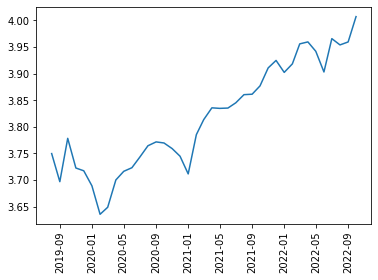

In [96]:
# 각 카운티의 시기별 소기업 밀도를 보여주는 피벗 테이블 
train_pivoted = df_all.pivot(index='cfips',columns='first_day_of_month',values='microbusiness_density')

# 시기별 평균 소기업 밀도 시각화
plt.plot(train_pivoted.mean(axis=0));
plt.xticks(rotation=90);

> 해석
- Covid-19로 소기업 밀도가 급격히 감소했던 시기가 존재
- 이후 엔데믹으로 완화되면서 소기업 밀도가 증가하여 최근에는 18세 이상 인구 100명 중 4명 정도는 소기업을 소유

In [97]:
# 시계열 변수 생성; 3,6 이외에도 바꿔서 시도해보기
## 이동 평균 변수 생성
df_all = moving_average(df_all, 'microbusiness_density', 3)
df_all = moving_average(df_all, 'microbusiness_density', 6)

## 가중 이동 평균 생성
df_all = weighted_moving_average(df_all, 'microbusiness_density', 3)
df_all = weighted_moving_average(df_all, 'microbusiness_density', 6)

In [98]:
df_all.iloc[:,-4:].head(6)
# 구간의 길이를 3,6으로 하여 이동 평균을 계산하였으므로 앞에 결측치가 발생

MA_3      MA_6     EMA_3     EMA_6
0       NaN       NaN       NaN       NaN
1       NaN       NaN       NaN       NaN
2  5.041958       NaN  5.056036       NaN
3  5.084946       NaN  5.090351       NaN
4  5.103046       NaN  5.088277       NaN
5  5.076114  5.059036  5.052875  5.052563

In [99]:
# 전월 대비 소기업 밀도의 변화를 나타내는 변수 생성
df_all['pct_change_before'] = df_all['microbusiness_density'].pct_change().shift(1)

In [100]:
df_all[['microbusiness_density','pct_change_before']].head()

microbusiness_density  pct_change_before
0               4.995701                NaN
1               5.031902                NaN
2               5.098270           0.007246
3               5.124666           0.013189
4               5.086203           0.005178

In [101]:
# 계산 방식 예시
5.031902/4.995701 - 1
# 결과를 한 칸 아래로 이동하여 저장하는 이유는 아마 예측할 때 작용하는 요인으로서 인덱싱을 용이하게 하기 위함으로 보임

0.007246430480927435

In [102]:
# 지연된 밀도 변수 생성; 지연 구간 길이 1~5; 결측치는 다음 값으로 대체
def lag_feature(df):
  for lag in range(1, 6):
    df[f'lag_density_{lag}'] = df.groupby('cfips')['microbusiness_density'].shift(lag)
    df[f'lag_density_{lag}'] = df.groupby('cfips')[f'lag_density_{lag}'].bfill()
  return df

df_all = lag_feature(df_all)

In [103]:
pd.concat([df_all['microbusiness_density'], df_all.iloc[:,-5:]], axis=1).head()

microbusiness_density  lag_density_1  lag_density_2  lag_density_3  \
0               4.995701       4.995701       4.995701       4.995701   
1               5.031902       4.995701       4.995701       4.995701   
2               5.098270       5.031902       4.995701       4.995701   
3               5.124666       5.098270       5.031902       4.995701   
4               5.086203       5.124666       5.098270       5.031902   

   lag_density_4  lag_density_5  
0       4.995701       4.995701  
1       4.995701       4.995701  
2       4.995701       4.995701  
3       4.995701       4.995701  
4       4.995701       4.995701

In [104]:
# 시기별 국가 평균 소기업 밀도 
df_all['national_avg'] = df_all.groupby(['year','month'])['microbusiness_density'].transform('mean')
# 시기별 주 평균 소기업 밀도
df_all['state_avg'] = df_all.groupby(['state','year','month'])['microbusiness_density'].transform('mean')

In [105]:
# 익월 밀도를 예측하는 것이 목표이므로 아래와 같은 target 변수(금월 데이터를 통한 익월 예측의 정답을 의미)로 생성
df_all['target'] = df_all.groupby('cfips')['microbusiness_density'].shift(-1)
df_all[['microbusiness_density','target']]

microbusiness_density    target
0                    4.995701  5.031902
1                    5.031902  5.098270
2                    5.098270  5.124666
3                    5.124666  5.086203
4                    5.086203  5.017472
...                       ...       ...
147340                    NaN       NaN
147341                    NaN       NaN
147342                    NaN       NaN
147343                    NaN       NaN
147344                    NaN       NaN

[147345 rows x 2 columns]

In [108]:
# 데이터셋 처리 과정 중간 확인
df_all.columns.values == np.array(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
                                   'microbusiness_density', 'active', 'dataset', 'year', 'month', 'pct_bb',
                                   'pct_college', 'pct_foreign', 'pct_workers', 'pct_inc', 'MA_3', 'MA_6',
                                   'EMA_3', 'EMA_6', 'pct_change_before', 'lag_density_1', 'lag_density_2',
                                   'lag_density_3', 'lag_density_4', 'lag_density_5', 'national_avg',
                                   'state_avg', 'target'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [110]:
# SMAPE : Symmetric Mean Absolute Percentage Error
# SMAPE = (1/n) * Σ( |forecast-actual| / ((|forecast|+|actual|)/2) ) * 100
# 하한 0% / 상한 200%
def SMAPE(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(f)+np.abs(a)) * 100)

In [115]:
# inf을 nan으로 대체; 원래도 없는 것 같음
df_all = df_all.replace([np.inf, -np.inf], np.nan)

In [117]:
# feature_list
feature_list = ['year', 'month', 'pct_bb','microbusiness_density',
                'pct_college', 'pct_foreign', 'pct_workers', 'pct_inc',
                'MA_3', 'MA_6', 'EMA_3', 'EMA_6',
                'lag_density_1', 'lag_density_2', 'lag_density_3', 'lag_density_4', 'lag_density_5',
                'pct_change_before', 'national_avg', 'state_avg']
len(feature_list)

20

In [118]:
len(df_all.columns)

28

In [120]:
# feature_list에서 제외된 특성
set(df_all.columns) - set(feature_list)

{'active',
 'cfips',
 'county',
 'dataset',
 'first_day_of_month',
 'row_id',
 'state',
 'target'}

In [121]:
# 데이터셋 분할
sample_train = df_all[df_all['dataset']=='train']
train_X = sample_train[feature_list]
train_y = sample_train['target']

In [123]:
train_X.head()

year  month  pct_bb  microbusiness_density  pct_college  pct_foreign  \
0  2019      8    80.8               4.995701         14.5          6.0   
1  2019      9    80.8               5.031902         14.5          6.0   
2  2019     10    80.8               5.098270         14.5          6.0   
3  2019     11    80.8               5.124666         14.5          6.0   
4  2019     12    80.8               5.086203         14.5          6.0   

   pct_workers  pct_inc      MA_3  MA_6     EMA_3  EMA_6  lag_density_1  \
0          1.3  57647.0       NaN   NaN       NaN    NaN       4.995701   
1          1.3  57647.0       NaN   NaN       NaN    NaN       4.995701   
2          1.3  57647.0  5.041958   NaN  5.056036    NaN       5.031902   
3          1.3  57647.0  5.084946   NaN  5.090351    NaN       5.098270   
4          1.3  57647.0  5.103046   NaN  5.088277    NaN       5.124666   

   lag_density_2  lag_density_3  lag_density_4  lag_density_5  \
0       4.995701       4.995701       4.995701       4.995701   
1       4.995701       4.995701       4.995701       4.995701   
2       4.995701       4.995701       4.995701       4.995701   
3       5.031902       4.995701       4.995701       4.995701   
4       5.098270       5.031902       4.995701       4.995701   

   pct_change_before  national_avg  state_avg  
0                NaN      3.749621  10.094114  
1                NaN      3.696846  10.648283  
2           0.007246      3.778263  10.707502  
3           0.013189      3.722510  10.813359  
4           0.005178      3.717284  10.893850

시계열 분할 방식을 통해 데이터셋을 구성해야 함
- 미래 시점을 통해 미리 학습하는 것을 방지
- 점진적 구성

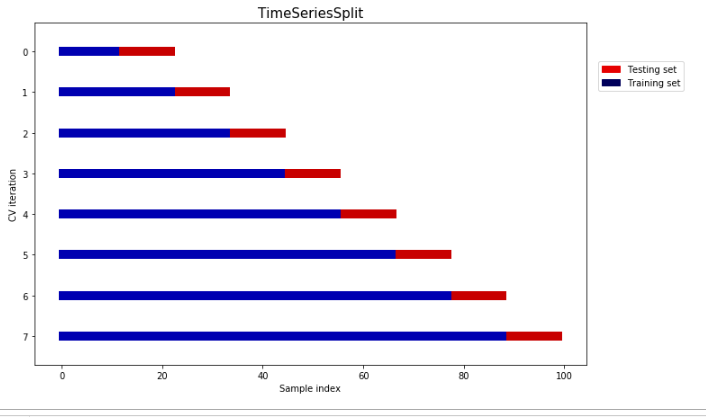

In [124]:
# SMAPE 손실을 모델 성능 지표로 사용하는 시계열 분할 교차검증 함수 정의
def smape_cv(model):
  tscv = TimeSeriesSplit(n_splits=7)
  smape_list = []
  model_name = model.__class__.__name__
  for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), 
                                           desc=f'{model_name} Cross Validations', total=7):
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    clf = model.fit(X_train, y_train)
    pred = clf.predict(X_test)
    smape = SMAPE(y_test, pred) 
    smape_list.append(smape)
  return model_name, smape_list

def print_smape_score(model):
  model_name, score = smape_cv(model)
  for i, r in enumerate(score, start=1):
    print(f'{i} FOLDS: {model_name} smape: {r:.4f}')
  print(f'\n{model_name} mean smape: {np.mean(score):.4f}')
  print('='*30)
  return model_name, np.mean(score)

In [125]:
# 카운티마다 8개 모델 훈련; 하이퍼파라미터 튜닝 가능
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=2, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=2, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=5, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=5, min_child_weight=5, n_jobs=-1)

In [126]:
model_list = [reg, ridge, lasso, Enet, DTree, rf, model_xgb, model_lgb]

In [127]:
# 카운티별로 테스트
test_list = df_all.cfips.unique()

In [ ]:
submit_df = pd.DataFrame()
model_results = {}
county_and_model = {}

# 훈련
for i in test_list: # 3135개의 카운티에 대하여 반복
  print(f'======================= county {i} modeling =====================')
  sample = df_all[df_all['cfips']==i]
  sample_train = sample[sample['dataset']=='train']
  train_X = sample_train[['year', 'month', 'pct_bb','microbusiness_density',
                          'pct_college', 'pct_foreign', 'pct_workers', 'pct_inc',
                          'MA_3', 'MA_6', 'EMA_3', 'EMA_6', 'lag_density_1', 'lag_density_2',
                          'lag_density_3', 'lag_density_4', 'lag_density_5',
                          'pct_change_before', 'national_avg', 'state_avg']]
  train_y = sample_train['target']
  train_X.fillna(method='bfill', inplace=True)
  train_X.fillna(method='ffill', inplace=True)
    
  model_dict = {}
  for model in [reg, ridge, lasso, Enet, DTree, rf, model_xgb, model_lgb]:
    model_name, mean_score = print_smape_score(model)
    model_dict[model_name] = mean_score
    model_results[i] = min(model_dict.values())
        
  final_model = model_list[list(model_dict.keys()).index(min(model_dict, key=model_dict.get))]
    
  sample.fillna(method='ffill', inplace=True)
    
  # testset
  sample_test = sample[sample['dataset']=='test']
  submit_X = sample_test[['year', 'month', 'pct_bb', 'microbusiness_density',
                          'pct_college', 'pct_foreign', 'pct_workers', 'pct_inc',
                          'MA_3', 'MA_6', 'EMA_3', 'EMA_6', 'lag_density_1', 'lag_density_2',
                          'lag_density_3', 'lag_density_4', 'lag_density_5',
                          'pct_change_before', 'national_avg', 'state_avg']]
  # 최종 채택 모델로 예측 수행
  county_and_model[i] = min(model_dict, key=model_dict.get)
  # print(county_and_model)

  predict_result = final_model.predict(submit_X).tolist()
    
  df = pd.DataFrame(list(zip(sample_test['row_id'].values.tolist(), predict_result)),
                    columns=['row_id','microbusiness_density'])
  submit_df = submit_df.append(df)

======================= county 10001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.88it/s]


1 FOLDS: LinearRegression smape: 11.4695
2 FOLDS: LinearRegression smape: 11.9531
3 FOLDS: LinearRegression smape: 13.4473
4 FOLDS: LinearRegression smape: 11.8224
5 FOLDS: LinearRegression smape: 2.1172
6 FOLDS: LinearRegression smape: 3.5098
7 FOLDS: LinearRegression smape: 1.0616

LinearRegression mean smape: 7.9115


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.76it/s]


1 FOLDS: Ridge smape: 1.1477
2 FOLDS: Ridge smape: 1.9119
3 FOLDS: Ridge smape: 0.6996
4 FOLDS: Ridge smape: 2.2674
5 FOLDS: Ridge smape: 4.4987
6 FOLDS: Ridge smape: 1.8051
7 FOLDS: Ridge smape: 1.6352

Ridge mean smape: 1.9951


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.04it/s]


1 FOLDS: Lasso smape: 0.6606
2 FOLDS: Lasso smape: 1.8823
3 FOLDS: Lasso smape: 1.9289
4 FOLDS: Lasso smape: 2.1242
5 FOLDS: Lasso smape: 4.5475
6 FOLDS: Lasso smape: 2.5018
7 FOLDS: Lasso smape: 2.2132

Lasso mean smape: 2.2655


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 195.04it/s]


1 FOLDS: ElasticNet smape: 1.5388
2 FOLDS: ElasticNet smape: 1.9067
3 FOLDS: ElasticNet smape: 0.7192
4 FOLDS: ElasticNet smape: 2.2505
5 FOLDS: ElasticNet smape: 4.6248
6 FOLDS: ElasticNet smape: 1.8431
7 FOLDS: ElasticNet smape: 1.7231

ElasticNet mean smape: 2.0866


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1769
2 FOLDS: DecisionTreeRegressor smape: 4.5527
3 FOLDS: DecisionTreeRegressor smape: 2.6131
4 FOLDS: DecisionTreeRegressor smape: 2.8972
5 FOLDS: DecisionTreeRegressor smape: 2.0340
6 FOLDS: DecisionTreeRegressor smape: 3.1601
7 FOLDS: DecisionTreeRegressor smape: 1.9747

DecisionTreeRegressor mean smape: 2.6298


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 2.4060
2 FOLDS: RandomForestRegressor smape: 4.5659
3 FOLDS: RandomForestRegressor smape: 6.7862
4 FOLDS: RandomForestRegressor smape: 4.2490
5 FOLDS: RandomForestRegressor smape: 2.9732
6 FOLDS: RandomForestRegressor smape: 4.4779
7 FOLDS: RandomForestRegressor smape: 3.1764

RandomForestRegressor mean smape: 4.0907


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.13it/s]

[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.12it/s]

[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.77it/s]


1 FOLDS: XGBRegressor smape: 4.5622
2 FOLDS: XGBRegressor smape: 5.1418
3 FOLDS: XGBRegressor smape: 9.8937
4 FOLDS: XGBRegressor smape: 6.4225
5 FOLDS: XGBRegressor smape: 4.9856
6 FOLDS: XGBRegressor smape: 6.9539
7 FOLDS: XGBRegressor smape: 5.1724

XGBRegressor mean smape: 6.1617


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.54it/s]


1 FOLDS: LGBMRegressor smape: 4.5621
2 FOLDS: LGBMRegressor smape: 6.0631
3 FOLDS: LGBMRegressor smape: 11.8201
4 FOLDS: LGBMRegressor smape: 13.4475
5 FOLDS: LGBMRegressor smape: 13.7544
6 FOLDS: LGBMRegressor smape: 16.2909
7 FOLDS: LGBMRegressor smape: 13.9700

LGBMRegressor mean smape: 11.4155
======================= county 10003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 207.13it/s]


1 FOLDS: LinearRegression smape: 30.9281
2 FOLDS: LinearRegression smape: 151.5692
3 FOLDS: LinearRegression smape: 200.0000
4 FOLDS: LinearRegression smape: 51.7341
5 FOLDS: LinearRegression smape: 23.4819
6 FOLDS: LinearRegression smape: 40.1482
7 FOLDS: LinearRegression smape: 4.1792

LinearRegression mean smape: 71.7201


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 201.36it/s]


1 FOLDS: Ridge smape: 24.1340
2 FOLDS: Ridge smape: 58.1079
3 FOLDS: Ridge smape: 6.7309
4 FOLDS: Ridge smape: 21.5557
5 FOLDS: Ridge smape: 27.1707
6 FOLDS: Ridge smape: 10.4681
7 FOLDS: Ridge smape: 3.0992

Ridge mean smape: 21.6095


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.49it/s]


1 FOLDS: Lasso smape: 25.7934
2 FOLDS: Lasso smape: 79.0680
3 FOLDS: Lasso smape: 5.5419
4 FOLDS: Lasso smape: 22.7914
5 FOLDS: Lasso smape: 26.6308
6 FOLDS: Lasso smape: 9.2385
7 FOLDS: Lasso smape: 2.5805

Lasso mean smape: 24.5207


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.63it/s]


1 FOLDS: ElasticNet smape: 24.7117
2 FOLDS: ElasticNet smape: 67.4592
3 FOLDS: ElasticNet smape: 6.0098
4 FOLDS: ElasticNet smape: 21.9873
5 FOLDS: ElasticNet smape: 27.7769
6 FOLDS: ElasticNet smape: 8.6758
7 FOLDS: ElasticNet smape: 2.5500

ElasticNet mean smape: 22.7387


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 33.2561
2 FOLDS: DecisionTreeRegressor smape: 1.7893
3 FOLDS: DecisionTreeRegressor smape: 1.6813
4 FOLDS: DecisionTreeRegressor smape: 24.5651
5 FOLDS: DecisionTreeRegressor smape: 8.2858
6 FOLDS: DecisionTreeRegressor smape: 7.6464
7 FOLDS: DecisionTreeRegressor smape: 6.5972

DecisionTreeRegressor mean smape: 11.9745


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 35.7638
2 FOLDS: RandomForestRegressor smape: 8.7445
3 FOLDS: RandomForestRegressor smape: 2.0569
4 FOLDS: RandomForestRegressor smape: 24.3874
5 FOLDS: RandomForestRegressor smape: 9.4982
6 FOLDS: RandomForestRegressor smape: 3.9213
7 FOLDS: RandomForestRegressor smape: 7.7165

RandomForestRegressor mean smape: 13.1555


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 23.86it/s]

[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.65it/s]


[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 35.7256
2 FOLDS: XGBRegressor smape: 13.0124
3 FOLDS: XGBRegressor smape: 2.8597
4 FOLDS: XGBRegressor smape: 24.1121
5 FOLDS: XGBRegressor smape: 8.0035
6 FOLDS: XGBRegressor smape: 6.6876
7 FOLDS: XGBRegressor smape: 7.0567

XGBRegressor mean smape: 13.9225


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 80.04it/s]


1 FOLDS: LGBMRegressor smape: 41.8330
2 FOLDS: LGBMRegressor smape: 40.1709
3 FOLDS: LGBMRegressor smape: 32.3193
4 FOLDS: LGBMRegressor smape: 12.7805
5 FOLDS: LGBMRegressor smape: 4.0941
6 FOLDS: LGBMRegressor smape: 3.9197
7 FOLDS: LGBMRegressor smape: 8.9823

LGBMRegressor mean smape: 20.5857
======================= county 10005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.61it/s]


1 FOLDS: LinearRegression smape: 8.6890
2 FOLDS: LinearRegression smape: 60.9893
3 FOLDS: LinearRegression smape: 55.7358
4 FOLDS: LinearRegression smape: 14.7296
5 FOLDS: LinearRegression smape: 4.3745
6 FOLDS: LinearRegression smape: 4.0877
7 FOLDS: LinearRegression smape: 1.0049

LinearRegression mean smape: 21.3730


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 189.24it/s]


1 FOLDS: Ridge smape: 6.4485
2 FOLDS: Ridge smape: 22.9376
3 FOLDS: Ridge smape: 89.8292
4 FOLDS: Ridge smape: 5.5056
5 FOLDS: Ridge smape: 7.7904
6 FOLDS: Ridge smape: 3.8595
7 FOLDS: Ridge smape: 0.6582

Ridge mean smape: 19.5756


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.65it/s]


1 FOLDS: Lasso smape: 6.2840
2 FOLDS: Lasso smape: 23.6852
3 FOLDS: Lasso smape: 19.2703
4 FOLDS: Lasso smape: 11.9851
5 FOLDS: Lasso smape: 11.6026
6 FOLDS: Lasso smape: 3.1532
7 FOLDS: Lasso smape: 0.5009

Lasso mean smape: 10.9259


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.92it/s]


1 FOLDS: ElasticNet smape: 7.4385
2 FOLDS: ElasticNet smape: 22.6709
3 FOLDS: ElasticNet smape: 84.1441
4 FOLDS: ElasticNet smape: 5.8694
5 FOLDS: ElasticNet smape: 7.7668
6 FOLDS: ElasticNet smape: 4.1917
7 FOLDS: ElasticNet smape: 0.2534

ElasticNet mean smape: 18.9050


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 187.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6209
2 FOLDS: DecisionTreeRegressor smape: 25.2921
3 FOLDS: DecisionTreeRegressor smape: 25.2833
4 FOLDS: DecisionTreeRegressor smape: 21.4047
5 FOLDS: DecisionTreeRegressor smape: 12.4786
6 FOLDS: DecisionTreeRegressor smape: 7.3678
7 FOLDS: DecisionTreeRegressor smape: 2.0112

DecisionTreeRegressor mean smape: 14.0655


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 4.2455
2 FOLDS: RandomForestRegressor smape: 24.5372
3 FOLDS: RandomForestRegressor smape: 43.8199
4 FOLDS: RandomForestRegressor smape: 34.0999
5 FOLDS: RandomForestRegressor smape: 20.2285
6 FOLDS: RandomForestRegressor smape: 11.4281
7 FOLDS: RandomForestRegressor smape: 6.3837

RandomForestRegressor mean smape: 20.6775


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 25.21it/s]

[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.61it/s]


[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.2980
2 FOLDS: XGBRegressor smape: 23.7305
3 FOLDS: XGBRegressor smape: 49.0167
4 FOLDS: XGBRegressor smape: 28.9310
5 FOLDS: XGBRegressor smape: 16.5663
6 FOLDS: XGBRegressor smape: 12.0065
7 FOLDS: XGBRegressor smape: 5.0406

XGBRegressor mean smape: 19.9414


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 79.96it/s]


1 FOLDS: LGBMRegressor smape: 4.2985
2 FOLDS: LGBMRegressor smape: 25.5138
3 FOLDS: LGBMRegressor smape: 62.1458
4 FOLDS: LGBMRegressor smape: 78.6378
5 FOLDS: LGBMRegressor smape: 77.9614
6 FOLDS: LGBMRegressor smape: 74.0342
7 FOLDS: LGBMRegressor smape: 51.9906

LGBMRegressor mean smape: 53.5117
======================= county 1001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 239.37it/s]


1 FOLDS: LinearRegression smape: 3.4414
2 FOLDS: LinearRegression smape: 73.1421
3 FOLDS: LinearRegression smape: 14.2886
4 FOLDS: LinearRegression smape: 3.1888
5 FOLDS: LinearRegression smape: 0.6124
6 FOLDS: LinearRegression smape: 0.9144
7 FOLDS: LinearRegression smape: 3.4557

LinearRegression mean smape: 14.1490


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 213.88it/s]


1 FOLDS: Ridge smape: 2.8832
2 FOLDS: Ridge smape: 7.0077
3 FOLDS: Ridge smape: 1.8471
4 FOLDS: Ridge smape: 0.4958
5 FOLDS: Ridge smape: 1.4843
6 FOLDS: Ridge smape: 1.1052
7 FOLDS: Ridge smape: 0.8570

Ridge mean smape: 2.2401


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 201.11it/s]


1 FOLDS: Lasso smape: 3.2708
2 FOLDS: Lasso smape: 6.4598
3 FOLDS: Lasso smape: 4.5094
4 FOLDS: Lasso smape: 0.3807
5 FOLDS: Lasso smape: 1.2292
6 FOLDS: Lasso smape: 1.1168
7 FOLDS: Lasso smape: 1.0310

Lasso mean smape: 2.5711


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 194.59it/s]


1 FOLDS: ElasticNet smape: 2.8114
2 FOLDS: ElasticNet smape: 7.0072
3 FOLDS: ElasticNet smape: 1.7769
4 FOLDS: ElasticNet smape: 0.5151
5 FOLDS: ElasticNet smape: 1.4733
6 FOLDS: ElasticNet smape: 1.1054
7 FOLDS: ElasticNet smape: 0.8405

ElasticNet mean smape: 2.2185


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 197.00it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4675
2 FOLDS: DecisionTreeRegressor smape: 2.4633
3 FOLDS: DecisionTreeRegressor smape: 4.1147
4 FOLDS: DecisionTreeRegressor smape: 3.5423
5 FOLDS: DecisionTreeRegressor smape: 3.5789
6 FOLDS: DecisionTreeRegressor smape: 1.2748
7 FOLDS: DecisionTreeRegressor smape: 1.1266

DecisionTreeRegressor mean smape: 2.7954


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 4.9438
2 FOLDS: RandomForestRegressor smape: 2.9238
3 FOLDS: RandomForestRegressor smape: 2.7590
4 FOLDS: RandomForestRegressor smape: 0.9228
5 FOLDS: RandomForestRegressor smape: 3.7186
6 FOLDS: RandomForestRegressor smape: 1.9405
7 FOLDS: RandomForestRegressor smape: 1.7421

RandomForestRegressor mean smape: 2.7072


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 25.13it/s]

[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.00it/s]


[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.4190
2 FOLDS: XGBRegressor smape: 2.4634
3 FOLDS: XGBRegressor smape: 5.9585
4 FOLDS: XGBRegressor smape: 3.1694
5 FOLDS: XGBRegressor smape: 5.8180
6 FOLDS: XGBRegressor smape: 5.8536
7 FOLDS: XGBRegressor smape: 4.5814

XGBRegressor mean smape: 4.7519


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 80.72it/s]


1 FOLDS: LGBMRegressor smape: 5.4190
2 FOLDS: LGBMRegressor smape: 2.4634
3 FOLDS: LGBMRegressor smape: 5.9585
4 FOLDS: LGBMRegressor smape: 4.3245
5 FOLDS: LGBMRegressor smape: 7.0703
6 FOLDS: LGBMRegressor smape: 7.7312
7 FOLDS: LGBMRegressor smape: 6.7916

LGBMRegressor mean smape: 5.6798
======================= county 1003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 234.45it/s]


1 FOLDS: LinearRegression smape: 18.9147
2 FOLDS: LinearRegression smape: 5.7232
3 FOLDS: LinearRegression smape: 13.9384
4 FOLDS: LinearRegression smape: 7.9756
5 FOLDS: LinearRegression smape: 0.4147
6 FOLDS: LinearRegression smape: 5.3075
7 FOLDS: LinearRegression smape: 5.5199

LinearRegression mean smape: 8.2563


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 236.69it/s]


1 FOLDS: Ridge smape: 3.6942
2 FOLDS: Ridge smape: 3.5656
3 FOLDS: Ridge smape: 2.7614
4 FOLDS: Ridge smape: 5.5150
5 FOLDS: Ridge smape: 2.1779
6 FOLDS: Ridge smape: 2.8503
7 FOLDS: Ridge smape: 1.1071

Ridge mean smape: 3.0959


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 228.94it/s]


1 FOLDS: Lasso smape: 3.6858
2 FOLDS: Lasso smape: 2.6155
3 FOLDS: Lasso smape: 2.1529
4 FOLDS: Lasso smape: 6.9011
5 FOLDS: Lasso smape: 2.0209
6 FOLDS: Lasso smape: 2.5792
7 FOLDS: Lasso smape: 0.5567

Lasso mean smape: 2.9303


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.17it/s]


1 FOLDS: ElasticNet smape: 3.7573
2 FOLDS: ElasticNet smape: 3.8142
3 FOLDS: ElasticNet smape: 2.8696
4 FOLDS: ElasticNet smape: 5.4696
5 FOLDS: ElasticNet smape: 2.0910
6 FOLDS: ElasticNet smape: 2.8457
7 FOLDS: ElasticNet smape: 1.0363

ElasticNet mean smape: 3.1262


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 247.74it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.8339
2 FOLDS: DecisionTreeRegressor smape: 3.7285
3 FOLDS: DecisionTreeRegressor smape: 3.1344
4 FOLDS: DecisionTreeRegressor smape: 4.7391
5 FOLDS: DecisionTreeRegressor smape: 2.0832
6 FOLDS: DecisionTreeRegressor smape: 3.6622
7 FOLDS: DecisionTreeRegressor smape: 0.7161

DecisionTreeRegressor mean smape: 3.8425


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


1 FOLDS: RandomForestRegressor smape: 7.5895
2 FOLDS: RandomForestRegressor smape: 1.9447
3 FOLDS: RandomForestRegressor smape: 1.4071
4 FOLDS: RandomForestRegressor smape: 2.9711
5 FOLDS: RandomForestRegressor smape: 1.4363
6 FOLDS: RandomForestRegressor smape: 3.5210
7 FOLDS: RandomForestRegressor smape: 2.1707

RandomForestRegressor mean smape: 3.0058


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 25.35it/s]

[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.64it/s]


[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.1914
2 FOLDS: XGBRegressor smape: 1.0810
3 FOLDS: XGBRegressor smape: 1.0826
4 FOLDS: XGBRegressor smape: 2.5708
5 FOLDS: XGBRegressor smape: 1.6525
6 FOLDS: XGBRegressor smape: 3.5247
7 FOLDS: XGBRegressor smape: 3.6508

XGBRegressor mean smape: 3.2505


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 85.75it/s]


1 FOLDS: LGBMRegressor smape: 9.3206
2 FOLDS: LGBMRegressor smape: 4.5048
3 FOLDS: LGBMRegressor smape: 3.6489
4 FOLDS: LGBMRegressor smape: 0.7975
5 FOLDS: LGBMRegressor smape: 1.0993
6 FOLDS: LGBMRegressor smape: 5.2330
7 FOLDS: LGBMRegressor smape: 4.9108

LGBMRegressor mean smape: 4.2164
======================= county 1005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 227.32it/s]


1 FOLDS: LinearRegression smape: 16.3856
2 FOLDS: LinearRegression smape: 48.6307
3 FOLDS: LinearRegression smape: 5.1143
4 FOLDS: LinearRegression smape: 9.6930
5 FOLDS: LinearRegression smape: 9.9197
6 FOLDS: LinearRegression smape: 1.2699
7 FOLDS: LinearRegression smape: 1.1555

LinearRegression mean smape: 13.1670


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 220.53it/s]


1 FOLDS: Ridge smape: 3.3911
2 FOLDS: Ridge smape: 3.1840
3 FOLDS: Ridge smape: 4.0258
4 FOLDS: Ridge smape: 2.6879
5 FOLDS: Ridge smape: 6.3468
6 FOLDS: Ridge smape: 0.9569
7 FOLDS: Ridge smape: 0.7215

Ridge mean smape: 3.0449


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 220.51it/s]


1 FOLDS: Lasso smape: 2.4362
2 FOLDS: Lasso smape: 3.0976
3 FOLDS: Lasso smape: 5.3311
4 FOLDS: Lasso smape: 4.5344
5 FOLDS: Lasso smape: 10.5490
6 FOLDS: Lasso smape: 5.5012
7 FOLDS: Lasso smape: 1.9925

Lasso mean smape: 4.7774


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.46it/s]


1 FOLDS: ElasticNet smape: 3.2770
2 FOLDS: ElasticNet smape: 3.7169
3 FOLDS: ElasticNet smape: 3.9647
4 FOLDS: ElasticNet smape: 2.8592
5 FOLDS: ElasticNet smape: 7.0771
6 FOLDS: ElasticNet smape: 0.6648
7 FOLDS: ElasticNet smape: 0.6510

ElasticNet mean smape: 3.1730


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.0899
2 FOLDS: DecisionTreeRegressor smape: 6.2428
3 FOLDS: DecisionTreeRegressor smape: 8.8184
4 FOLDS: DecisionTreeRegressor smape: 2.1489
5 FOLDS: DecisionTreeRegressor smape: 3.7311
6 FOLDS: DecisionTreeRegressor smape: 0.8417
7 FOLDS: DecisionTreeRegressor smape: 0.8321

DecisionTreeRegressor mean smape: 3.6721


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.5316
2 FOLDS: RandomForestRegressor smape: 5.0893
3 FOLDS: RandomForestRegressor smape: 8.5792
4 FOLDS: RandomForestRegressor smape: 4.4597
5 FOLDS: RandomForestRegressor smape: 4.1585
6 FOLDS: RandomForestRegressor smape: 0.8559
7 FOLDS: RandomForestRegressor smape: 1.0323

RandomForestRegressor mean smape: 3.6723


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.15it/s]

[04:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.02it/s]


[04:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7475
2 FOLDS: XGBRegressor smape: 3.5088
3 FOLDS: XGBRegressor smape: 6.8865
4 FOLDS: XGBRegressor smape: 8.2003
5 FOLDS: XGBRegressor smape: 10.6729
6 FOLDS: XGBRegressor smape: 10.1795
7 FOLDS: XGBRegressor smape: 6.7859

XGBRegressor mean smape: 6.8545


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 73.74it/s]


1 FOLDS: LGBMRegressor smape: 1.7465
2 FOLDS: LGBMRegressor smape: 3.5108
3 FOLDS: LGBMRegressor smape: 6.8885
4 FOLDS: LGBMRegressor smape: 8.2022
5 FOLDS: LGBMRegressor smape: 10.6748
6 FOLDS: LGBMRegressor smape: 10.1814
7 FOLDS: LGBMRegressor smape: 7.6629

LGBMRegressor mean smape: 6.9810
======================= county 1007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 225.05it/s]


1 FOLDS: LinearRegression smape: 4.1832
2 FOLDS: LinearRegression smape: 13.6483
3 FOLDS: LinearRegression smape: 15.8934
4 FOLDS: LinearRegression smape: 5.6266
5 FOLDS: LinearRegression smape: 1.5449
6 FOLDS: LinearRegression smape: 2.0793
7 FOLDS: LinearRegression smape: 0.8483

LinearRegression mean smape: 6.2606


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.28it/s]


1 FOLDS: Ridge smape: 0.5440
2 FOLDS: Ridge smape: 3.1761
3 FOLDS: Ridge smape: 4.5486
4 FOLDS: Ridge smape: 5.7539
5 FOLDS: Ridge smape: 2.0037
6 FOLDS: Ridge smape: 2.1201
7 FOLDS: Ridge smape: 1.4055

Ridge mean smape: 2.7931


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.83it/s]


1 FOLDS: Lasso smape: 0.9931
2 FOLDS: Lasso smape: 2.7820
3 FOLDS: Lasso smape: 5.5751
4 FOLDS: Lasso smape: 6.4558
5 FOLDS: Lasso smape: 3.2059
6 FOLDS: Lasso smape: 4.6883
7 FOLDS: Lasso smape: 3.1676

Lasso mean smape: 3.8383


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 195.06it/s]


1 FOLDS: ElasticNet smape: 0.4843
2 FOLDS: ElasticNet smape: 3.1951
3 FOLDS: ElasticNet smape: 4.6385
4 FOLDS: ElasticNet smape: 6.0710
5 FOLDS: ElasticNet smape: 2.4515
6 FOLDS: ElasticNet smape: 2.3968
7 FOLDS: ElasticNet smape: 1.8636

ElasticNet mean smape: 3.0144


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 204.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5314
2 FOLDS: DecisionTreeRegressor smape: 1.8995
3 FOLDS: DecisionTreeRegressor smape: 4.0991
4 FOLDS: DecisionTreeRegressor smape: 3.3588
5 FOLDS: DecisionTreeRegressor smape: 1.7820
6 FOLDS: DecisionTreeRegressor smape: 1.1269
7 FOLDS: DecisionTreeRegressor smape: 1.1097

DecisionTreeRegressor mean smape: 1.9868


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


1 FOLDS: RandomForestRegressor smape: 1.4938
2 FOLDS: RandomForestRegressor smape: 0.8492
3 FOLDS: RandomForestRegressor smape: 3.9025
4 FOLDS: RandomForestRegressor smape: 5.3962
5 FOLDS: RandomForestRegressor smape: 1.6362
6 FOLDS: RandomForestRegressor smape: 1.6144
7 FOLDS: RandomForestRegressor smape: 1.1132

RandomForestRegressor mean smape: 2.2865


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 25.68it/s]

[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.41it/s]


[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.1205
2 FOLDS: XGBRegressor smape: 0.8537
3 FOLDS: XGBRegressor smape: 3.3149
4 FOLDS: XGBRegressor smape: 6.4061
5 FOLDS: XGBRegressor smape: 3.2281
6 FOLDS: XGBRegressor smape: 1.9731
7 FOLDS: XGBRegressor smape: 1.8170

XGBRegressor mean smape: 2.9591


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 78.99it/s]


1 FOLDS: LGBMRegressor smape: 3.1221
2 FOLDS: LGBMRegressor smape: 0.8537
3 FOLDS: LGBMRegressor smape: 3.3133
4 FOLDS: LGBMRegressor smape: 6.4045
5 FOLDS: LGBMRegressor smape: 3.2264
6 FOLDS: LGBMRegressor smape: 1.9731
7 FOLDS: LGBMRegressor smape: 1.8183

LGBMRegressor mean smape: 2.9588
======================= county 1009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 233.47it/s]


1 FOLDS: LinearRegression smape: 2.6544
2 FOLDS: LinearRegression smape: 3.7946
3 FOLDS: LinearRegression smape: 1.1435
4 FOLDS: LinearRegression smape: 1.6369
5 FOLDS: LinearRegression smape: 2.6927
6 FOLDS: LinearRegression smape: 1.7836
7 FOLDS: LinearRegression smape: 2.0723

LinearRegression mean smape: 2.2540


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 203.86it/s]


1 FOLDS: Ridge smape: 1.7908
2 FOLDS: Ridge smape: 4.6561
3 FOLDS: Ridge smape: 0.3848
4 FOLDS: Ridge smape: 1.0158
5 FOLDS: Ridge smape: 2.3946
6 FOLDS: Ridge smape: 2.1195
7 FOLDS: Ridge smape: 1.0011

Ridge mean smape: 1.9089


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 185.14it/s]


1 FOLDS: Lasso smape: 2.9766
2 FOLDS: Lasso smape: 4.3142
3 FOLDS: Lasso smape: 1.8997
4 FOLDS: Lasso smape: 0.2404
5 FOLDS: Lasso smape: 1.1181
6 FOLDS: Lasso smape: 2.0505
7 FOLDS: Lasso smape: 1.1345

Lasso mean smape: 1.9620


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 202.99it/s]


1 FOLDS: ElasticNet smape: 1.7821
2 FOLDS: ElasticNet smape: 4.6697
3 FOLDS: ElasticNet smape: 0.3681
4 FOLDS: ElasticNet smape: 1.0031
5 FOLDS: ElasticNet smape: 2.8246
6 FOLDS: ElasticNet smape: 2.1609
7 FOLDS: ElasticNet smape: 0.9645

ElasticNet mean smape: 1.9676


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7708
2 FOLDS: DecisionTreeRegressor smape: 2.4624
3 FOLDS: DecisionTreeRegressor smape: 1.0925
4 FOLDS: DecisionTreeRegressor smape: 0.7315
5 FOLDS: DecisionTreeRegressor smape: 5.2711
6 FOLDS: DecisionTreeRegressor smape: 1.7031
7 FOLDS: DecisionTreeRegressor smape: 3.7136

DecisionTreeRegressor mean smape: 2.6779


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 3.8296
2 FOLDS: RandomForestRegressor smape: 2.6250
3 FOLDS: RandomForestRegressor smape: 3.0448
4 FOLDS: RandomForestRegressor smape: 1.1978
5 FOLDS: RandomForestRegressor smape: 3.1920
6 FOLDS: RandomForestRegressor smape: 1.3054
7 FOLDS: RandomForestRegressor smape: 2.7307

RandomForestRegressor mean smape: 2.5608


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 23.00it/s]

[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.87it/s]


[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.2073
2 FOLDS: XGBRegressor smape: 4.2540
3 FOLDS: XGBRegressor smape: 6.8905
4 FOLDS: XGBRegressor smape: 6.4445
5 FOLDS: XGBRegressor smape: 7.9468
6 FOLDS: XGBRegressor smape: 6.5634
7 FOLDS: XGBRegressor smape: 6.3149

XGBRegressor mean smape: 6.0888


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 79.64it/s]


1 FOLDS: LGBMRegressor smape: 4.2073
2 FOLDS: LGBMRegressor smape: 4.2540
3 FOLDS: LGBMRegressor smape: 6.8905
4 FOLDS: LGBMRegressor smape: 6.4445
5 FOLDS: LGBMRegressor smape: 7.9468
6 FOLDS: LGBMRegressor smape: 7.3952
7 FOLDS: LGBMRegressor smape: 7.4109

LGBMRegressor mean smape: 6.3641
======================= county 1011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 207.85it/s]


1 FOLDS: LinearRegression smape: 13.7926
2 FOLDS: LinearRegression smape: 40.8032
3 FOLDS: LinearRegression smape: 26.3592
4 FOLDS: LinearRegression smape: 10.3559
5 FOLDS: LinearRegression smape: 29.3412
6 FOLDS: LinearRegression smape: 6.9060
7 FOLDS: LinearRegression smape: 1.2643

LinearRegression mean smape: 18.4032


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 216.90it/s]


1 FOLDS: Ridge smape: 2.4960
2 FOLDS: Ridge smape: 6.0620
3 FOLDS: Ridge smape: 10.2670
4 FOLDS: Ridge smape: 1.5848
5 FOLDS: Ridge smape: 7.0252
6 FOLDS: Ridge smape: 4.7051
7 FOLDS: Ridge smape: 5.8877

Ridge mean smape: 5.4325


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 182.88it/s]


1 FOLDS: Lasso smape: 1.7922
2 FOLDS: Lasso smape: 5.6325
3 FOLDS: Lasso smape: 10.6375
4 FOLDS: Lasso smape: 1.5447
5 FOLDS: Lasso smape: 6.4226
6 FOLDS: Lasso smape: 2.2611
7 FOLDS: Lasso smape: 6.2627

Lasso mean smape: 4.9362


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.27it/s]


1 FOLDS: ElasticNet smape: 2.5026
2 FOLDS: ElasticNet smape: 6.2610
3 FOLDS: ElasticNet smape: 10.3719
4 FOLDS: ElasticNet smape: 1.6303
5 FOLDS: ElasticNet smape: 6.8948
6 FOLDS: ElasticNet smape: 4.5220
7 FOLDS: ElasticNet smape: 6.5703

ElasticNet mean smape: 5.5361


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 219.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.3202
2 FOLDS: DecisionTreeRegressor smape: 11.0061
3 FOLDS: DecisionTreeRegressor smape: 5.8665
4 FOLDS: DecisionTreeRegressor smape: 8.3765
5 FOLDS: DecisionTreeRegressor smape: 9.4177
6 FOLDS: DecisionTreeRegressor smape: 3.1037
7 FOLDS: DecisionTreeRegressor smape: 5.8197

DecisionTreeRegressor mean smape: 7.1301


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 6.5733
2 FOLDS: RandomForestRegressor smape: 12.4929
3 FOLDS: RandomForestRegressor smape: 2.2170
4 FOLDS: RandomForestRegressor smape: 7.2168
5 FOLDS: RandomForestRegressor smape: 5.9061
6 FOLDS: RandomForestRegressor smape: 3.6723
7 FOLDS: RandomForestRegressor smape: 3.5129

RandomForestRegressor mean smape: 5.9416


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.49it/s]

[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.12it/s]


[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.3657
2 FOLDS: XGBRegressor smape: 14.7761
3 FOLDS: XGBRegressor smape: 9.3931
4 FOLDS: XGBRegressor smape: 15.2185
5 FOLDS: XGBRegressor smape: 4.6372
6 FOLDS: XGBRegressor smape: 3.4370
7 FOLDS: XGBRegressor smape: 5.0402

XGBRegressor mean smape: 8.5525


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 77.43it/s]


1 FOLDS: LGBMRegressor smape: 7.3647
2 FOLDS: LGBMRegressor smape: 14.7750
3 FOLDS: LGBMRegressor smape: 9.3920
4 FOLDS: LGBMRegressor smape: 15.2174
5 FOLDS: LGBMRegressor smape: 5.3705
6 FOLDS: LGBMRegressor smape: 2.2321
7 FOLDS: LGBMRegressor smape: 5.2294

LGBMRegressor mean smape: 8.5116
======================= county 1013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 236.73it/s]


1 FOLDS: LinearRegression smape: 168.0989
2 FOLDS: LinearRegression smape: 157.1307
3 FOLDS: LinearRegression smape: 64.5222
4 FOLDS: LinearRegression smape: 72.5553
5 FOLDS: LinearRegression smape: 2.1420
6 FOLDS: LinearRegression smape: 6.6230
7 FOLDS: LinearRegression smape: 10.1781

LinearRegression mean smape: 68.7500


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 216.22it/s]


1 FOLDS: Ridge smape: 17.7756
2 FOLDS: Ridge smape: 31.2792
3 FOLDS: Ridge smape: 24.5020
4 FOLDS: Ridge smape: 15.2207
5 FOLDS: Ridge smape: 4.0387
6 FOLDS: Ridge smape: 5.9868
7 FOLDS: Ridge smape: 7.0234

Ridge mean smape: 15.1181


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.61it/s]


1 FOLDS: Lasso smape: 21.5529
2 FOLDS: Lasso smape: 31.1518
3 FOLDS: Lasso smape: 15.0734
4 FOLDS: Lasso smape: 9.1883
5 FOLDS: Lasso smape: 16.3270
6 FOLDS: Lasso smape: 5.2289
7 FOLDS: Lasso smape: 6.3856

Lasso mean smape: 14.9868


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.99it/s]


1 FOLDS: ElasticNet smape: 13.5325
2 FOLDS: ElasticNet smape: 30.7976
3 FOLDS: ElasticNet smape: 22.3066
4 FOLDS: ElasticNet smape: 15.1076
5 FOLDS: ElasticNet smape: 3.8788
6 FOLDS: ElasticNet smape: 5.9948
7 FOLDS: ElasticNet smape: 6.8790

ElasticNet mean smape: 14.0710


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.0500
2 FOLDS: DecisionTreeRegressor smape: 38.3071
3 FOLDS: DecisionTreeRegressor smape: 6.0345
4 FOLDS: DecisionTreeRegressor smape: 2.2490
5 FOLDS: DecisionTreeRegressor smape: 1.5436
6 FOLDS: DecisionTreeRegressor smape: 5.2266
7 FOLDS: DecisionTreeRegressor smape: 12.1525

DecisionTreeRegressor mean smape: 11.0805


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 15.1194
2 FOLDS: RandomForestRegressor smape: 35.3963
3 FOLDS: RandomForestRegressor smape: 31.9127
4 FOLDS: RandomForestRegressor smape: 5.3231
5 FOLDS: RandomForestRegressor smape: 13.4412
6 FOLDS: RandomForestRegressor smape: 5.2475
7 FOLDS: RandomForestRegressor smape: 7.9427

RandomForestRegressor mean smape: 16.3404


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.29it/s]

[04:15:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.93it/s]


[04:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 19.3256
2 FOLDS: XGBRegressor smape: 39.5073
3 FOLDS: XGBRegressor smape: 53.1378
4 FOLDS: XGBRegressor smape: 11.8772
5 FOLDS: XGBRegressor smape: 8.4314
6 FOLDS: XGBRegressor smape: 4.9020
7 FOLDS: XGBRegressor smape: 10.8043

XGBRegressor mean smape: 21.1408


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 74.12it/s]


1 FOLDS: LGBMRegressor smape: 19.3245
2 FOLDS: LGBMRegressor smape: 39.9698
3 FOLDS: LGBMRegressor smape: 61.1914
4 FOLDS: LGBMRegressor smape: 52.0167
5 FOLDS: LGBMRegressor smape: 44.3286
6 FOLDS: LGBMRegressor smape: 35.7701
7 FOLDS: LGBMRegressor smape: 31.6110

LGBMRegressor mean smape: 40.6017
======================= county 1015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 190.67it/s]


1 FOLDS: LinearRegression smape: 2.7257
2 FOLDS: LinearRegression smape: 14.9227
3 FOLDS: LinearRegression smape: 5.6420
4 FOLDS: LinearRegression smape: 1.5068
5 FOLDS: LinearRegression smape: 3.1420
6 FOLDS: LinearRegression smape: 1.5364
7 FOLDS: LinearRegression smape: 0.4772

LinearRegression mean smape: 4.2790


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 190.23it/s]


1 FOLDS: Ridge smape: 1.1303
2 FOLDS: Ridge smape: 7.4508
3 FOLDS: Ridge smape: 3.9132
4 FOLDS: Ridge smape: 0.6287
5 FOLDS: Ridge smape: 0.6820
6 FOLDS: Ridge smape: 1.0008
7 FOLDS: Ridge smape: 0.9815

Ridge mean smape: 2.2553


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.36it/s]


1 FOLDS: Lasso smape: 0.7267
2 FOLDS: Lasso smape: 7.3108
3 FOLDS: Lasso smape: 7.0617
4 FOLDS: Lasso smape: 3.2190
5 FOLDS: Lasso smape: 1.8625
6 FOLDS: Lasso smape: 1.4976
7 FOLDS: Lasso smape: 2.4892

Lasso mean smape: 3.4525


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.75it/s]


1 FOLDS: ElasticNet smape: 1.1347
2 FOLDS: ElasticNet smape: 7.5159
3 FOLDS: ElasticNet smape: 3.7309
4 FOLDS: ElasticNet smape: 0.6619
5 FOLDS: ElasticNet smape: 0.7557
6 FOLDS: ElasticNet smape: 0.9916
7 FOLDS: ElasticNet smape: 1.1496

ElasticNet mean smape: 2.2772


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 47.34it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0496
2 FOLDS: DecisionTreeRegressor smape: 3.1581
3 FOLDS: DecisionTreeRegressor smape: 8.5139
4 FOLDS: DecisionTreeRegressor smape: 1.1727
5 FOLDS: DecisionTreeRegressor smape: 0.4923
6 FOLDS: DecisionTreeRegressor smape: 1.1357
7 FOLDS: DecisionTreeRegressor smape: 1.1767

DecisionTreeRegressor mean smape: 2.3856


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


1 FOLDS: RandomForestRegressor smape: 1.9981
2 FOLDS: RandomForestRegressor smape: 3.4033
3 FOLDS: RandomForestRegressor smape: 5.0031
4 FOLDS: RandomForestRegressor smape: 0.4089
5 FOLDS: RandomForestRegressor smape: 1.0952
6 FOLDS: RandomForestRegressor smape: 1.2773
7 FOLDS: RandomForestRegressor smape: 0.7574

RandomForestRegressor mean smape: 1.9919


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 23.22it/s]

[04:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.17it/s]


[04:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.5721
2 FOLDS: XGBRegressor smape: 3.2492
3 FOLDS: XGBRegressor smape: 4.9654
4 FOLDS: XGBRegressor smape: 3.2629
5 FOLDS: XGBRegressor smape: 1.5207
6 FOLDS: XGBRegressor smape: 1.3102
7 FOLDS: XGBRegressor smape: 0.5496

XGBRegressor mean smape: 2.7757


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 82.66it/s]


1 FOLDS: LGBMRegressor smape: 4.5720
2 FOLDS: LGBMRegressor smape: 3.2492
3 FOLDS: LGBMRegressor smape: 4.9654
4 FOLDS: LGBMRegressor smape: 3.7318
5 FOLDS: LGBMRegressor smape: 2.1309
6 FOLDS: LGBMRegressor smape: 1.5702
7 FOLDS: LGBMRegressor smape: 1.2547

LGBMRegressor mean smape: 3.0677
======================= county 1017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 229.31it/s]


1 FOLDS: LinearRegression smape: 1.4530
2 FOLDS: LinearRegression smape: 7.2206
3 FOLDS: LinearRegression smape: 28.9937
4 FOLDS: LinearRegression smape: 8.2272
5 FOLDS: LinearRegression smape: 6.2137
6 FOLDS: LinearRegression smape: 7.3008
7 FOLDS: LinearRegression smape: 2.7286

LinearRegression mean smape: 8.8768


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 221.20it/s]


1 FOLDS: Ridge smape: 2.4807
2 FOLDS: Ridge smape: 3.6546
3 FOLDS: Ridge smape: 3.1000
4 FOLDS: Ridge smape: 3.7912
5 FOLDS: Ridge smape: 4.1883
6 FOLDS: Ridge smape: 1.8983
7 FOLDS: Ridge smape: 1.9325

Ridge mean smape: 3.0065


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 206.77it/s]


1 FOLDS: Lasso smape: 3.1424
2 FOLDS: Lasso smape: 3.4239
3 FOLDS: Lasso smape: 4.0143
4 FOLDS: Lasso smape: 3.8073
5 FOLDS: Lasso smape: 8.2917
6 FOLDS: Lasso smape: 5.2792
7 FOLDS: Lasso smape: 1.7301

Lasso mean smape: 4.2413


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.58it/s]


1 FOLDS: ElasticNet smape: 2.6765
2 FOLDS: ElasticNet smape: 3.5428
3 FOLDS: ElasticNet smape: 3.1333
4 FOLDS: ElasticNet smape: 3.8065
5 FOLDS: ElasticNet smape: 4.5601
6 FOLDS: ElasticNet smape: 2.0076
7 FOLDS: ElasticNet smape: 1.8690

ElasticNet mean smape: 3.0851


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1747
2 FOLDS: DecisionTreeRegressor smape: 3.9378
3 FOLDS: DecisionTreeRegressor smape: 6.9819
4 FOLDS: DecisionTreeRegressor smape: 6.4474
5 FOLDS: DecisionTreeRegressor smape: 3.9983
6 FOLDS: DecisionTreeRegressor smape: 3.2491
7 FOLDS: DecisionTreeRegressor smape: 1.5876

DecisionTreeRegressor mean smape: 4.0538


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 2.2916
2 FOLDS: RandomForestRegressor smape: 3.4987
3 FOLDS: RandomForestRegressor smape: 5.1164
4 FOLDS: RandomForestRegressor smape: 4.2148
5 FOLDS: RandomForestRegressor smape: 6.4133
6 FOLDS: RandomForestRegressor smape: 6.3365
7 FOLDS: RandomForestRegressor smape: 1.4922

RandomForestRegressor mean smape: 4.1948


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 23.57it/s]

[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.81it/s]


[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.6305
2 FOLDS: XGBRegressor smape: 3.3580
3 FOLDS: XGBRegressor smape: 5.2292
4 FOLDS: XGBRegressor smape: 2.9512
5 FOLDS: XGBRegressor smape: 6.8296
6 FOLDS: XGBRegressor smape: 10.5908
7 FOLDS: XGBRegressor smape: 6.6240

XGBRegressor mean smape: 5.4590


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 83.99it/s]


1 FOLDS: LGBMRegressor smape: 2.6321
2 FOLDS: LGBMRegressor smape: 3.3573
3 FOLDS: LGBMRegressor smape: 5.2276
4 FOLDS: LGBMRegressor smape: 2.9520
5 FOLDS: LGBMRegressor smape: 6.8311
6 FOLDS: LGBMRegressor smape: 10.5923
7 FOLDS: LGBMRegressor smape: 6.6252

LGBMRegressor mean smape: 5.4596
======================= county 1019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 212.74it/s]


1 FOLDS: LinearRegression smape: 28.5501
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 8.5600
4 FOLDS: LinearRegression smape: 7.6316
5 FOLDS: LinearRegression smape: 6.2451
6 FOLDS: LinearRegression smape: 13.6850
7 FOLDS: LinearRegression smape: 2.8687

LinearRegression mean smape: 38.2201


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.06it/s]


1 FOLDS: Ridge smape: 13.0110
2 FOLDS: Ridge smape: 1.1675
3 FOLDS: Ridge smape: 2.5948
4 FOLDS: Ridge smape: 6.8669
5 FOLDS: Ridge smape: 8.4717
6 FOLDS: Ridge smape: 8.2643
7 FOLDS: Ridge smape: 6.2639

Ridge mean smape: 6.6629


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 184.08it/s]


1 FOLDS: Lasso smape: 12.7840
2 FOLDS: Lasso smape: 1.6492
3 FOLDS: Lasso smape: 2.3256
4 FOLDS: Lasso smape: 6.7716
5 FOLDS: Lasso smape: 5.7231
6 FOLDS: Lasso smape: 5.9253
7 FOLDS: Lasso smape: 8.2137

Lasso mean smape: 6.1989


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 188.65it/s]


1 FOLDS: ElasticNet smape: 12.9545
2 FOLDS: ElasticNet smape: 1.2989
3 FOLDS: ElasticNet smape: 2.5710
4 FOLDS: ElasticNet smape: 7.1187
5 FOLDS: ElasticNet smape: 7.9291
6 FOLDS: ElasticNet smape: 8.0940
7 FOLDS: ElasticNet smape: 6.8783

ElasticNet mean smape: 6.6921


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 179.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.4125
2 FOLDS: DecisionTreeRegressor smape: 5.6907
3 FOLDS: DecisionTreeRegressor smape: 2.6044
4 FOLDS: DecisionTreeRegressor smape: 1.0427
5 FOLDS: DecisionTreeRegressor smape: 4.2779
6 FOLDS: DecisionTreeRegressor smape: 6.6144
7 FOLDS: DecisionTreeRegressor smape: 3.1960

DecisionTreeRegressor mean smape: 5.1198


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


1 FOLDS: RandomForestRegressor smape: 12.3580
2 FOLDS: RandomForestRegressor smape: 5.9047
3 FOLDS: RandomForestRegressor smape: 1.4303
4 FOLDS: RandomForestRegressor smape: 0.8760
5 FOLDS: RandomForestRegressor smape: 3.3756
6 FOLDS: RandomForestRegressor smape: 4.8320
7 FOLDS: RandomForestRegressor smape: 3.3331

RandomForestRegressor mean smape: 4.5871


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 24.44it/s]

[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.08it/s]


[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 12.1407
2 FOLDS: XGBRegressor smape: 9.2912
3 FOLDS: XGBRegressor smape: 7.1768
4 FOLDS: XGBRegressor smape: 5.0979
5 FOLDS: XGBRegressor smape: 5.8447
6 FOLDS: XGBRegressor smape: 4.5642
7 FOLDS: XGBRegressor smape: 2.7919

XGBRegressor mean smape: 6.7010


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 74.08it/s]


1 FOLDS: LGBMRegressor smape: 12.1426
2 FOLDS: LGBMRegressor smape: 9.2930
3 FOLDS: LGBMRegressor smape: 7.1786
4 FOLDS: LGBMRegressor smape: 5.0997
5 FOLDS: LGBMRegressor smape: 6.3155
6 FOLDS: LGBMRegressor smape: 4.8149
7 FOLDS: LGBMRegressor smape: 3.0023

LGBMRegressor mean smape: 6.8352
======================= county 1021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 184.50it/s]


1 FOLDS: LinearRegression smape: 6.7507
2 FOLDS: LinearRegression smape: 61.1545
3 FOLDS: LinearRegression smape: 19.4371
4 FOLDS: LinearRegression smape: 1.6406
5 FOLDS: LinearRegression smape: 3.8351
6 FOLDS: LinearRegression smape: 2.6466
7 FOLDS: LinearRegression smape: 1.7203

LinearRegression mean smape: 13.8835


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.30it/s]


1 FOLDS: Ridge smape: 3.9262
2 FOLDS: Ridge smape: 4.5624
3 FOLDS: Ridge smape: 6.0499
4 FOLDS: Ridge smape: 4.0397
5 FOLDS: Ridge smape: 6.5636
6 FOLDS: Ridge smape: 2.2000
7 FOLDS: Ridge smape: 0.8083

Ridge mean smape: 4.0215


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 182.64it/s]


1 FOLDS: Lasso smape: 2.9519
2 FOLDS: Lasso smape: 4.6044
3 FOLDS: Lasso smape: 7.3522
4 FOLDS: Lasso smape: 5.1106
5 FOLDS: Lasso smape: 5.8501
6 FOLDS: Lasso smape: 1.5097
7 FOLDS: Lasso smape: 0.5964

Lasso mean smape: 3.9965


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.87it/s]


1 FOLDS: ElasticNet smape: 3.9251
2 FOLDS: ElasticNet smape: 4.5953
3 FOLDS: ElasticNet smape: 6.1386
4 FOLDS: ElasticNet smape: 4.1746
5 FOLDS: ElasticNet smape: 4.4782
6 FOLDS: ElasticNet smape: 2.1241
7 FOLDS: ElasticNet smape: 0.8186

ElasticNet mean smape: 3.7506


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4405
2 FOLDS: DecisionTreeRegressor smape: 5.6671
3 FOLDS: DecisionTreeRegressor smape: 4.3834
4 FOLDS: DecisionTreeRegressor smape: 1.6829
5 FOLDS: DecisionTreeRegressor smape: 1.6858
6 FOLDS: DecisionTreeRegressor smape: 2.9926
7 FOLDS: DecisionTreeRegressor smape: 0.9168

DecisionTreeRegressor mean smape: 2.8242


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 2.2149
2 FOLDS: RandomForestRegressor smape: 4.8248
3 FOLDS: RandomForestRegressor smape: 8.0790
4 FOLDS: RandomForestRegressor smape: 3.3659
5 FOLDS: RandomForestRegressor smape: 2.4305
6 FOLDS: RandomForestRegressor smape: 3.9307
7 FOLDS: RandomForestRegressor smape: 0.9907

RandomForestRegressor mean smape: 3.6909


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.49it/s]

[04:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.03it/s]


[04:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.0737
2 FOLDS: XGBRegressor smape: 5.4467
3 FOLDS: XGBRegressor smape: 10.7009
4 FOLDS: XGBRegressor smape: 10.9439
5 FOLDS: XGBRegressor smape: 8.7988
6 FOLDS: XGBRegressor smape: 10.2443
7 FOLDS: XGBRegressor smape: 6.9675

XGBRegressor mean smape: 7.8823


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 82.91it/s]


1 FOLDS: LGBMRegressor smape: 2.0737
2 FOLDS: LGBMRegressor smape: 5.4467
3 FOLDS: LGBMRegressor smape: 10.7023
4 FOLDS: LGBMRegressor smape: 10.9453
5 FOLDS: LGBMRegressor smape: 11.0964
6 FOLDS: LGBMRegressor smape: 13.4669
7 FOLDS: LGBMRegressor smape: 10.0384

LGBMRegressor mean smape: 9.1100
======================= county 1023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.60it/s]


1 FOLDS: LinearRegression smape: 8.1837
2 FOLDS: LinearRegression smape: 29.6368
3 FOLDS: LinearRegression smape: 17.0946
4 FOLDS: LinearRegression smape: 10.5282
5 FOLDS: LinearRegression smape: 8.5763
6 FOLDS: LinearRegression smape: 6.4418
7 FOLDS: LinearRegression smape: 2.4512

LinearRegression mean smape: 11.8447


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.34it/s]


1 FOLDS: Ridge smape: 6.8041
2 FOLDS: Ridge smape: 7.1357
3 FOLDS: Ridge smape: 2.0183
4 FOLDS: Ridge smape: 7.1314
5 FOLDS: Ridge smape: 5.3092
6 FOLDS: Ridge smape: 4.2818
7 FOLDS: Ridge smape: 3.3224

Ridge mean smape: 5.1433


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.13it/s]


1 FOLDS: Lasso smape: 5.3350
2 FOLDS: Lasso smape: 6.6917
3 FOLDS: Lasso smape: 4.8645
4 FOLDS: Lasso smape: 10.5499
5 FOLDS: Lasso smape: 8.0899
6 FOLDS: Lasso smape: 6.5808
7 FOLDS: Lasso smape: 5.3618

Lasso mean smape: 6.7819


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.62it/s]


1 FOLDS: ElasticNet smape: 6.8550
2 FOLDS: ElasticNet smape: 7.1726
3 FOLDS: ElasticNet smape: 1.8667
4 FOLDS: ElasticNet smape: 7.2716
5 FOLDS: ElasticNet smape: 5.8118
6 FOLDS: ElasticNet smape: 4.7563
7 FOLDS: ElasticNet smape: 3.7664

ElasticNet mean smape: 5.3572


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.0008
2 FOLDS: DecisionTreeRegressor smape: 4.6588
3 FOLDS: DecisionTreeRegressor smape: 1.9937
4 FOLDS: DecisionTreeRegressor smape: 8.5134
5 FOLDS: DecisionTreeRegressor smape: 2.1571
6 FOLDS: DecisionTreeRegressor smape: 4.0746
7 FOLDS: DecisionTreeRegressor smape: 1.5633

DecisionTreeRegressor mean smape: 3.8517


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 1.4651
2 FOLDS: RandomForestRegressor smape: 6.6697
3 FOLDS: RandomForestRegressor smape: 4.5356
4 FOLDS: RandomForestRegressor smape: 8.3274
5 FOLDS: RandomForestRegressor smape: 5.9055
6 FOLDS: RandomForestRegressor smape: 5.7872
7 FOLDS: RandomForestRegressor smape: 3.5064

RandomForestRegressor mean smape: 5.1710


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.80it/s]

[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.95it/s]

[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 6.1090
2 FOLDS: XGBRegressor smape: 7.7098
3 FOLDS: XGBRegressor smape: 12.2365
4 FOLDS: XGBRegressor smape: 15.6991
5 FOLDS: XGBRegressor smape: 13.8191
6 FOLDS: XGBRegressor smape: 13.6916
7 FOLDS: XGBRegressor smape: 11.1935

XGBRegressor mean smape: 11.4941


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 70.00it/s]


1 FOLDS: LGBMRegressor smape: 6.1108
2 FOLDS: LGBMRegressor smape: 7.7116
3 FOLDS: LGBMRegressor smape: 12.2383
4 FOLDS: LGBMRegressor smape: 17.3430
5 FOLDS: LGBMRegressor smape: 18.2406
6 FOLDS: LGBMRegressor smape: 20.9949
7 FOLDS: LGBMRegressor smape: 17.8829

LGBMRegressor mean smape: 14.3603
======================= county 1025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 187.93it/s]


1 FOLDS: LinearRegression smape: 2.5118
2 FOLDS: LinearRegression smape: 15.3309
3 FOLDS: LinearRegression smape: 28.2475
4 FOLDS: LinearRegression smape: 1.9855
5 FOLDS: LinearRegression smape: 24.4279
6 FOLDS: LinearRegression smape: 9.2172
7 FOLDS: LinearRegression smape: 3.2309

LinearRegression mean smape: 12.1360


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 200.38it/s]


1 FOLDS: Ridge smape: 0.9881
2 FOLDS: Ridge smape: 2.9057
3 FOLDS: Ridge smape: 2.4172
4 FOLDS: Ridge smape: 1.9881
5 FOLDS: Ridge smape: 16.4991
6 FOLDS: Ridge smape: 7.5326
7 FOLDS: Ridge smape: 9.3111

Ridge mean smape: 5.9488


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.45it/s]


1 FOLDS: Lasso smape: 1.6966
2 FOLDS: Lasso smape: 2.7107
3 FOLDS: Lasso smape: 3.6865
4 FOLDS: Lasso smape: 3.2109
5 FOLDS: Lasso smape: 6.9157
6 FOLDS: Lasso smape: 11.3359
7 FOLDS: Lasso smape: 12.5310

Lasso mean smape: 6.0125


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 182.53it/s]


1 FOLDS: ElasticNet smape: 0.9902
2 FOLDS: ElasticNet smape: 2.9151
3 FOLDS: ElasticNet smape: 2.4707
4 FOLDS: ElasticNet smape: 2.0559
5 FOLDS: ElasticNet smape: 17.0170
6 FOLDS: ElasticNet smape: 7.6788
7 FOLDS: ElasticNet smape: 10.4437

ElasticNet mean smape: 6.2245


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 184.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8113
2 FOLDS: DecisionTreeRegressor smape: 2.6810
3 FOLDS: DecisionTreeRegressor smape: 6.7104
4 FOLDS: DecisionTreeRegressor smape: 1.6632
5 FOLDS: DecisionTreeRegressor smape: 5.5753
6 FOLDS: DecisionTreeRegressor smape: 10.9300
7 FOLDS: DecisionTreeRegressor smape: 4.6411

DecisionTreeRegressor mean smape: 4.8589


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 1.5702
2 FOLDS: RandomForestRegressor smape: 2.8482
3 FOLDS: RandomForestRegressor smape: 4.9506
4 FOLDS: RandomForestRegressor smape: 1.5167
5 FOLDS: RandomForestRegressor smape: 7.6752
6 FOLDS: RandomForestRegressor smape: 10.8675
7 FOLDS: RandomForestRegressor smape: 8.4952

RandomForestRegressor mean smape: 5.4176


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 20.17it/s]

[04:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.69it/s]


[04:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4170
2 FOLDS: XGBRegressor smape: 2.7391
3 FOLDS: XGBRegressor smape: 4.5856
4 FOLDS: XGBRegressor smape: 4.7255
5 FOLDS: XGBRegressor smape: 5.0864
6 FOLDS: XGBRegressor smape: 12.0040
7 FOLDS: XGBRegressor smape: 18.3743

XGBRegressor mean smape: 6.9903


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 72.68it/s]


1 FOLDS: LGBMRegressor smape: 1.4190
2 FOLDS: LGBMRegressor smape: 2.7381
3 FOLDS: LGBMRegressor smape: 4.5837
4 FOLDS: LGBMRegressor smape: 4.7234
5 FOLDS: LGBMRegressor smape: 5.0885
6 FOLDS: LGBMRegressor smape: 12.0061
7 FOLDS: LGBMRegressor smape: 18.3759

LGBMRegressor mean smape: 6.9907
======================= county 1027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 224.47it/s]


1 FOLDS: LinearRegression smape: 4.2356
2 FOLDS: LinearRegression smape: 35.1990
3 FOLDS: LinearRegression smape: 2.9330
4 FOLDS: LinearRegression smape: 6.4942
5 FOLDS: LinearRegression smape: 3.1810
6 FOLDS: LinearRegression smape: 11.4378
7 FOLDS: LinearRegression smape: 3.2313

LinearRegression mean smape: 9.5303


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 196.66it/s]


1 FOLDS: Ridge smape: 3.4681
2 FOLDS: Ridge smape: 2.9644
3 FOLDS: Ridge smape: 2.4598
4 FOLDS: Ridge smape: 2.6951
5 FOLDS: Ridge smape: 8.9277
6 FOLDS: Ridge smape: 0.6973
7 FOLDS: Ridge smape: 2.8085

Ridge mean smape: 3.4315


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.57it/s]


1 FOLDS: Lasso smape: 2.3390
2 FOLDS: Lasso smape: 2.9155
3 FOLDS: Lasso smape: 5.0164
4 FOLDS: Lasso smape: 3.4595
5 FOLDS: Lasso smape: 7.6851
6 FOLDS: Lasso smape: 6.0053
7 FOLDS: Lasso smape: 1.1808

Lasso mean smape: 4.0859


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.31it/s]


1 FOLDS: ElasticNet smape: 3.5063
2 FOLDS: ElasticNet smape: 2.9829
3 FOLDS: ElasticNet smape: 2.6202
4 FOLDS: ElasticNet smape: 2.8110
5 FOLDS: ElasticNet smape: 8.5396
6 FOLDS: ElasticNet smape: 1.0651
7 FOLDS: ElasticNet smape: 2.7542

ElasticNet mean smape: 3.4685


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 189.52it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0671
2 FOLDS: DecisionTreeRegressor smape: 2.9254
3 FOLDS: DecisionTreeRegressor smape: 3.7135
4 FOLDS: DecisionTreeRegressor smape: 0.7838
5 FOLDS: DecisionTreeRegressor smape: 4.7971
6 FOLDS: DecisionTreeRegressor smape: 6.7286
7 FOLDS: DecisionTreeRegressor smape: 3.0827

DecisionTreeRegressor mean smape: 3.2997


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 0.7483
2 FOLDS: RandomForestRegressor smape: 3.5092
3 FOLDS: RandomForestRegressor smape: 2.5980
4 FOLDS: RandomForestRegressor smape: 2.2912
5 FOLDS: RandomForestRegressor smape: 6.4322
6 FOLDS: RandomForestRegressor smape: 3.6178
7 FOLDS: RandomForestRegressor smape: 2.6850

RandomForestRegressor mean smape: 3.1259


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.73it/s]

[04:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.11it/s]


[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.6991
2 FOLDS: XGBRegressor smape: 1.9881
3 FOLDS: XGBRegressor smape: 4.6916
4 FOLDS: XGBRegressor smape: 4.4071
5 FOLDS: XGBRegressor smape: 6.3599
6 FOLDS: XGBRegressor smape: 10.5349
7 FOLDS: XGBRegressor smape: 2.7085

XGBRegressor mean smape: 4.7699


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 65.54it/s]


1 FOLDS: LGBMRegressor smape: 2.6990
2 FOLDS: LGBMRegressor smape: 1.9881
3 FOLDS: LGBMRegressor smape: 4.6916
4 FOLDS: LGBMRegressor smape: 4.4072
5 FOLDS: LGBMRegressor smape: 6.3606
6 FOLDS: LGBMRegressor smape: 10.5348
7 FOLDS: LGBMRegressor smape: 4.1028

LGBMRegressor mean smape: 4.9692
======================= county 1029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 182.98it/s]


1 FOLDS: LinearRegression smape: 9.7257
2 FOLDS: LinearRegression smape: 101.5579
3 FOLDS: LinearRegression smape: 17.3975
4 FOLDS: LinearRegression smape: 0.9481
5 FOLDS: LinearRegression smape: 100.5848
6 FOLDS: LinearRegression smape: 5.7706
7 FOLDS: LinearRegression smape: 1.2607

LinearRegression mean smape: 33.8922


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.78it/s]


1 FOLDS: Ridge smape: 2.4166
2 FOLDS: Ridge smape: 2.7231
3 FOLDS: Ridge smape: 3.3917
4 FOLDS: Ridge smape: 0.6744
5 FOLDS: Ridge smape: 3.8260
6 FOLDS: Ridge smape: 3.5398
7 FOLDS: Ridge smape: 2.6927

Ridge mean smape: 2.7520


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 194.66it/s]


1 FOLDS: Lasso smape: 0.9209
2 FOLDS: Lasso smape: 2.7781
3 FOLDS: Lasso smape: 4.0545
4 FOLDS: Lasso smape: 1.1278
5 FOLDS: Lasso smape: 1.5553
6 FOLDS: Lasso smape: 1.8072
7 FOLDS: Lasso smape: 2.7571

Lasso mean smape: 2.1430


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.64it/s]


1 FOLDS: ElasticNet smape: 2.4054
2 FOLDS: ElasticNet smape: 2.6825
3 FOLDS: ElasticNet smape: 3.5565
4 FOLDS: ElasticNet smape: 0.7040
5 FOLDS: ElasticNet smape: 2.5790
6 FOLDS: ElasticNet smape: 3.4806
7 FOLDS: ElasticNet smape: 2.7503

ElasticNet mean smape: 2.5940


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8663
2 FOLDS: DecisionTreeRegressor smape: 3.8287
3 FOLDS: DecisionTreeRegressor smape: 3.4962
4 FOLDS: DecisionTreeRegressor smape: 1.4844
5 FOLDS: DecisionTreeRegressor smape: 2.2579
6 FOLDS: DecisionTreeRegressor smape: 3.9055
7 FOLDS: DecisionTreeRegressor smape: 0.9605

DecisionTreeRegressor mean smape: 2.3999


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 1.4543
2 FOLDS: RandomForestRegressor smape: 3.7900
3 FOLDS: RandomForestRegressor smape: 0.6942
4 FOLDS: RandomForestRegressor smape: 0.9736
5 FOLDS: RandomForestRegressor smape: 0.9862
6 FOLDS: RandomForestRegressor smape: 3.5575
7 FOLDS: RandomForestRegressor smape: 2.0930

RandomForestRegressor mean smape: 1.9355


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.20it/s]

[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.74it/s]


[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.8500
2 FOLDS: XGBRegressor smape: 3.5261
3 FOLDS: XGBRegressor smape: 2.4012
4 FOLDS: XGBRegressor smape: 1.6428
5 FOLDS: XGBRegressor smape: 2.2588
6 FOLDS: XGBRegressor smape: 5.1545
7 FOLDS: XGBRegressor smape: 4.8629

XGBRegressor mean smape: 3.0995


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 73.40it/s]


1 FOLDS: LGBMRegressor smape: 1.8508
2 FOLDS: LGBMRegressor smape: 3.5269
3 FOLDS: LGBMRegressor smape: 2.4029
4 FOLDS: LGBMRegressor smape: 1.6444
5 FOLDS: LGBMRegressor smape: 2.2604
6 FOLDS: LGBMRegressor smape: 5.1562
7 FOLDS: LGBMRegressor smape: 4.8642

LGBMRegressor mean smape: 3.1008
======================= county 1031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 202.16it/s]


1 FOLDS: LinearRegression smape: 1.3623
2 FOLDS: LinearRegression smape: 2.6922
3 FOLDS: LinearRegression smape: 4.7592
4 FOLDS: LinearRegression smape: 4.8549
5 FOLDS: LinearRegression smape: 2.0506
6 FOLDS: LinearRegression smape: 1.1832
7 FOLDS: LinearRegression smape: 2.1675

LinearRegression mean smape: 2.7243


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.16it/s]


1 FOLDS: Ridge smape: 2.6594
2 FOLDS: Ridge smape: 2.0598
3 FOLDS: Ridge smape: 1.9516
4 FOLDS: Ridge smape: 1.7371
5 FOLDS: Ridge smape: 1.8835
6 FOLDS: Ridge smape: 1.4800
7 FOLDS: Ridge smape: 2.0314

Ridge mean smape: 1.9718


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 192.85it/s]


1 FOLDS: Lasso smape: 1.7827
2 FOLDS: Lasso smape: 2.3176
3 FOLDS: Lasso smape: 1.3860
4 FOLDS: Lasso smape: 1.4548
5 FOLDS: Lasso smape: 2.3424
6 FOLDS: Lasso smape: 3.2473
7 FOLDS: Lasso smape: 3.2190

Lasso mean smape: 2.2500


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.42it/s]


1 FOLDS: ElasticNet smape: 2.6418
2 FOLDS: ElasticNet smape: 2.0853
3 FOLDS: ElasticNet smape: 1.8478
4 FOLDS: ElasticNet smape: 1.7753
5 FOLDS: ElasticNet smape: 2.1994
6 FOLDS: ElasticNet smape: 1.6852
7 FOLDS: ElasticNet smape: 2.2671

ElasticNet mean smape: 2.0717


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 192.68it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5732
2 FOLDS: DecisionTreeRegressor smape: 3.6229
3 FOLDS: DecisionTreeRegressor smape: 1.2399
4 FOLDS: DecisionTreeRegressor smape: 1.1043
5 FOLDS: DecisionTreeRegressor smape: 1.6800
6 FOLDS: DecisionTreeRegressor smape: 2.5358
7 FOLDS: DecisionTreeRegressor smape: 1.1776

DecisionTreeRegressor mean smape: 1.8477


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 1.7039
2 FOLDS: RandomForestRegressor smape: 2.9249
3 FOLDS: RandomForestRegressor smape: 1.0114
4 FOLDS: RandomForestRegressor smape: 0.3233
5 FOLDS: RandomForestRegressor smape: 1.3159
6 FOLDS: RandomForestRegressor smape: 2.0310
7 FOLDS: RandomForestRegressor smape: 1.7727

RandomForestRegressor mean smape: 1.5833


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.51it/s]

[04:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.63it/s]


[04:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3130
2 FOLDS: XGBRegressor smape: 2.8928
3 FOLDS: XGBRegressor smape: 0.6561
4 FOLDS: XGBRegressor smape: 0.3371
5 FOLDS: XGBRegressor smape: 1.4683
6 FOLDS: XGBRegressor smape: 2.8574
7 FOLDS: XGBRegressor smape: 3.7235

XGBRegressor mean smape: 1.8926


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 60.74it/s]


1 FOLDS: LGBMRegressor smape: 1.3111
2 FOLDS: LGBMRegressor smape: 2.8909
3 FOLDS: LGBMRegressor smape: 0.6551
4 FOLDS: LGBMRegressor smape: 0.3371
5 FOLDS: LGBMRegressor smape: 1.4703
6 FOLDS: LGBMRegressor smape: 2.8593
7 FOLDS: LGBMRegressor smape: 3.7250

LGBMRegressor mean smape: 1.8927
======================= county 1033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 203.17it/s]


1 FOLDS: LinearRegression smape: 1.2846
2 FOLDS: LinearRegression smape: 5.6314
3 FOLDS: LinearRegression smape: 59.6739
4 FOLDS: LinearRegression smape: 2.6085
5 FOLDS: LinearRegression smape: 4.8296
6 FOLDS: LinearRegression smape: 0.9886
7 FOLDS: LinearRegression smape: 1.1202

LinearRegression mean smape: 10.8767


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.41it/s]


1 FOLDS: Ridge smape: 1.1944
2 FOLDS: Ridge smape: 3.2762
3 FOLDS: Ridge smape: 0.5186
4 FOLDS: Ridge smape: 0.4471
5 FOLDS: Ridge smape: 4.6416
6 FOLDS: Ridge smape: 2.9920
7 FOLDS: Ridge smape: 2.2684

Ridge mean smape: 2.1912


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.41it/s]


1 FOLDS: Lasso smape: 1.1027
2 FOLDS: Lasso smape: 3.1570
3 FOLDS: Lasso smape: 2.1084
4 FOLDS: Lasso smape: 0.9824
5 FOLDS: Lasso smape: 2.1620
6 FOLDS: Lasso smape: 3.2365
7 FOLDS: Lasso smape: 3.5035

Lasso mean smape: 2.3218


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 181.30it/s]


1 FOLDS: ElasticNet smape: 1.1935
2 FOLDS: ElasticNet smape: 3.2610
3 FOLDS: ElasticNet smape: 0.5552
4 FOLDS: ElasticNet smape: 0.4340
5 FOLDS: ElasticNet smape: 4.6977
6 FOLDS: ElasticNet smape: 3.4187
7 FOLDS: ElasticNet smape: 2.5897

ElasticNet mean smape: 2.3071


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 219.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2895
2 FOLDS: DecisionTreeRegressor smape: 3.2233
3 FOLDS: DecisionTreeRegressor smape: 0.8030
4 FOLDS: DecisionTreeRegressor smape: 0.2586
5 FOLDS: DecisionTreeRegressor smape: 2.5862
6 FOLDS: DecisionTreeRegressor smape: 1.7746
7 FOLDS: DecisionTreeRegressor smape: 2.5378

DecisionTreeRegressor mean smape: 1.7818


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 1.1077
2 FOLDS: RandomForestRegressor smape: 3.0927
3 FOLDS: RandomForestRegressor smape: 2.0360
4 FOLDS: RandomForestRegressor smape: 0.2446
5 FOLDS: RandomForestRegressor smape: 1.7515
6 FOLDS: RandomForestRegressor smape: 1.1137
7 FOLDS: RandomForestRegressor smape: 2.1592

RandomForestRegressor mean smape: 1.6436


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.38it/s]

[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.60it/s]


[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1322
2 FOLDS: XGBRegressor smape: 2.9792
3 FOLDS: XGBRegressor smape: 2.5741
4 FOLDS: XGBRegressor smape: 2.1056
5 FOLDS: XGBRegressor smape: 0.9449
6 FOLDS: XGBRegressor smape: 2.7821
7 FOLDS: XGBRegressor smape: 3.5414

XGBRegressor mean smape: 2.2942


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 80.80it/s]


1 FOLDS: LGBMRegressor smape: 1.1331
2 FOLDS: LGBMRegressor smape: 2.9774
3 FOLDS: LGBMRegressor smape: 2.5723
4 FOLDS: LGBMRegressor smape: 2.1037
5 FOLDS: LGBMRegressor smape: 0.9449
6 FOLDS: LGBMRegressor smape: 2.7840
7 FOLDS: LGBMRegressor smape: 3.5427

LGBMRegressor mean smape: 2.2940
======================= county 1035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 186.03it/s]


1 FOLDS: LinearRegression smape: 2.4722
2 FOLDS: LinearRegression smape: 58.4302
3 FOLDS: LinearRegression smape: 84.4965
4 FOLDS: LinearRegression smape: 200.0000
5 FOLDS: LinearRegression smape: 38.8511
6 FOLDS: LinearRegression smape: 13.1156
7 FOLDS: LinearRegression smape: 3.7387

LinearRegression mean smape: 57.3006


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.89it/s]


1 FOLDS: Ridge smape: 2.6338
2 FOLDS: Ridge smape: 10.1367
3 FOLDS: Ridge smape: 69.0850
4 FOLDS: Ridge smape: 32.8909
5 FOLDS: Ridge smape: 68.5000
6 FOLDS: Ridge smape: 2.9338
7 FOLDS: Ridge smape: 3.8450

Ridge mean smape: 27.1465


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.96it/s]


1 FOLDS: Lasso smape: 1.7804
2 FOLDS: Lasso smape: 9.7633
3 FOLDS: Lasso smape: 70.3645
4 FOLDS: Lasso smape: 29.5064
5 FOLDS: Lasso smape: 96.1671
6 FOLDS: Lasso smape: 4.2153
7 FOLDS: Lasso smape: 3.9267

Lasso mean smape: 30.8177


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.92it/s]


1 FOLDS: ElasticNet smape: 2.6489
2 FOLDS: ElasticNet smape: 10.0596
3 FOLDS: ElasticNet smape: 68.7142
4 FOLDS: ElasticNet smape: 32.3901
5 FOLDS: ElasticNet smape: 74.6545
6 FOLDS: ElasticNet smape: 3.1311
7 FOLDS: ElasticNet smape: 3.7441

ElasticNet mean smape: 27.9061


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.94it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.0349
2 FOLDS: DecisionTreeRegressor smape: 12.0694
3 FOLDS: DecisionTreeRegressor smape: 69.7060
4 FOLDS: DecisionTreeRegressor smape: 41.0632
5 FOLDS: DecisionTreeRegressor smape: 40.0975
6 FOLDS: DecisionTreeRegressor smape: 6.4955
7 FOLDS: DecisionTreeRegressor smape: 4.0171

DecisionTreeRegressor mean smape: 25.2119


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


1 FOLDS: RandomForestRegressor smape: 3.0313
2 FOLDS: RandomForestRegressor smape: 12.6375
3 FOLDS: RandomForestRegressor smape: 76.9070
4 FOLDS: RandomForestRegressor smape: 38.1991
5 FOLDS: RandomForestRegressor smape: 22.9591
6 FOLDS: RandomForestRegressor smape: 12.0411
7 FOLDS: RandomForestRegressor smape: 3.3437

RandomForestRegressor mean smape: 24.1598


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.53it/s]

[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.20it/s]


[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.5504
2 FOLDS: XGBRegressor smape: 14.1521
3 FOLDS: XGBRegressor smape: 89.0461
4 FOLDS: XGBRegressor smape: 37.1114
5 FOLDS: XGBRegressor smape: 22.9533
6 FOLDS: XGBRegressor smape: 5.8249
7 FOLDS: XGBRegressor smape: 1.4106

XGBRegressor mean smape: 25.0070


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 78.77it/s]


1 FOLDS: LGBMRegressor smape: 4.5517
2 FOLDS: LGBMRegressor smape: 14.1534
3 FOLDS: LGBMRegressor smape: 89.0471
4 FOLDS: LGBMRegressor smape: 28.9806
5 FOLDS: LGBMRegressor smape: 9.4043
6 FOLDS: LGBMRegressor smape: 3.9113
7 FOLDS: LGBMRegressor smape: 2.1111

LGBMRegressor mean smape: 21.7371
======================= county 1037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 195.45it/s]


1 FOLDS: LinearRegression smape: 13.5214
2 FOLDS: LinearRegression smape: 133.8345
3 FOLDS: LinearRegression smape: 4.1331
4 FOLDS: LinearRegression smape: 12.2510
5 FOLDS: LinearRegression smape: 8.9889
6 FOLDS: LinearRegression smape: 1.7577
7 FOLDS: LinearRegression smape: 0.8194

LinearRegression mean smape: 25.0437


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 192.04it/s]


1 FOLDS: Ridge smape: 3.7695
2 FOLDS: Ridge smape: 15.5516
3 FOLDS: Ridge smape: 1.3282
4 FOLDS: Ridge smape: 6.1284
5 FOLDS: Ridge smape: 3.0899
6 FOLDS: Ridge smape: 5.5272
7 FOLDS: Ridge smape: 7.0423

Ridge mean smape: 6.0624


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.19it/s]


1 FOLDS: Lasso smape: 6.9057
2 FOLDS: Lasso smape: 14.6376
3 FOLDS: Lasso smape: 4.4033
4 FOLDS: Lasso smape: 3.9121
5 FOLDS: Lasso smape: 2.7497
6 FOLDS: Lasso smape: 5.0964
7 FOLDS: Lasso smape: 7.9533

Lasso mean smape: 6.5226


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 180.71it/s]


1 FOLDS: ElasticNet smape: 3.8800
2 FOLDS: ElasticNet smape: 15.7681
3 FOLDS: ElasticNet smape: 1.5024
4 FOLDS: ElasticNet smape: 6.2349
5 FOLDS: ElasticNet smape: 2.7082
6 FOLDS: ElasticNet smape: 5.4110
7 FOLDS: ElasticNet smape: 7.5679

ElasticNet mean smape: 6.1532


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 188.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9051
2 FOLDS: DecisionTreeRegressor smape: 11.0640
3 FOLDS: DecisionTreeRegressor smape: 2.6544
4 FOLDS: DecisionTreeRegressor smape: 1.8062
5 FOLDS: DecisionTreeRegressor smape: 2.6813
6 FOLDS: DecisionTreeRegressor smape: 6.5025
7 FOLDS: DecisionTreeRegressor smape: 6.9429

DecisionTreeRegressor mean smape: 4.7938


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


1 FOLDS: RandomForestRegressor smape: 6.5747
2 FOLDS: RandomForestRegressor smape: 13.3785
3 FOLDS: RandomForestRegressor smape: 11.6883
4 FOLDS: RandomForestRegressor smape: 2.0708
5 FOLDS: RandomForestRegressor smape: 2.9930
6 FOLDS: RandomForestRegressor smape: 5.0706
7 FOLDS: RandomForestRegressor smape: 7.7052

RandomForestRegressor mean smape: 7.0687


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 21.79it/s]

[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.18it/s]


[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.4888
2 FOLDS: XGBRegressor smape: 17.8694
3 FOLDS: XGBRegressor smape: 27.0754
4 FOLDS: XGBRegressor smape: 14.7777
5 FOLDS: XGBRegressor smape: 8.4406
6 FOLDS: XGBRegressor smape: 10.6151
7 FOLDS: XGBRegressor smape: 14.5375

XGBRegressor mean smape: 14.6863


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 72.91it/s]


1 FOLDS: LGBMRegressor smape: 9.4905
2 FOLDS: LGBMRegressor smape: 17.8712
3 FOLDS: LGBMRegressor smape: 27.0773
4 FOLDS: LGBMRegressor smape: 18.4453
5 FOLDS: LGBMRegressor smape: 14.1161
6 FOLDS: LGBMRegressor smape: 16.3658
7 FOLDS: LGBMRegressor smape: 18.3985

LGBMRegressor mean smape: 17.3950
======================= county 1039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.51it/s]


1 FOLDS: LinearRegression smape: 2.1519
2 FOLDS: LinearRegression smape: 28.8315
3 FOLDS: LinearRegression smape: 9.2696
4 FOLDS: LinearRegression smape: 2.9195
5 FOLDS: LinearRegression smape: 1.7728
6 FOLDS: LinearRegression smape: 2.5560
7 FOLDS: LinearRegression smape: 1.4998

LinearRegression mean smape: 7.0002


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 188.30it/s]


1 FOLDS: Ridge smape: 2.8981
2 FOLDS: Ridge smape: 3.0325
3 FOLDS: Ridge smape: 0.3911
4 FOLDS: Ridge smape: 1.5315
5 FOLDS: Ridge smape: 3.2427
6 FOLDS: Ridge smape: 0.7722
7 FOLDS: Ridge smape: 0.2349

Ridge mean smape: 1.7290


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.91it/s]


1 FOLDS: Lasso smape: 2.5065
2 FOLDS: Lasso smape: 2.9213
3 FOLDS: Lasso smape: 2.1466
4 FOLDS: Lasso smape: 2.3640
5 FOLDS: Lasso smape: 1.7484
6 FOLDS: Lasso smape: 0.5167
7 FOLDS: Lasso smape: 0.3440

Lasso mean smape: 1.7925


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.85it/s]


1 FOLDS: ElasticNet smape: 2.8851
2 FOLDS: ElasticNet smape: 3.0643
3 FOLDS: ElasticNet smape: 0.4743
4 FOLDS: ElasticNet smape: 1.5319
5 FOLDS: ElasticNet smape: 3.6310
6 FOLDS: ElasticNet smape: 0.5970
7 FOLDS: ElasticNet smape: 0.2294

ElasticNet mean smape: 1.7733


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 188.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2626
2 FOLDS: DecisionTreeRegressor smape: 3.3306
3 FOLDS: DecisionTreeRegressor smape: 4.0661
4 FOLDS: DecisionTreeRegressor smape: 1.6664
5 FOLDS: DecisionTreeRegressor smape: 0.7277
6 FOLDS: DecisionTreeRegressor smape: 1.2447
7 FOLDS: DecisionTreeRegressor smape: 0.3596

DecisionTreeRegressor mean smape: 1.9511


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 2.3023
2 FOLDS: RandomForestRegressor smape: 3.1094
3 FOLDS: RandomForestRegressor smape: 2.8085
4 FOLDS: RandomForestRegressor smape: 2.0403
5 FOLDS: RandomForestRegressor smape: 0.7363
6 FOLDS: RandomForestRegressor smape: 0.8665
7 FOLDS: RandomForestRegressor smape: 0.3358

RandomForestRegressor mean smape: 1.7427


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.44it/s]

[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.53it/s]


[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2012
2 FOLDS: XGBRegressor smape: 2.8855
3 FOLDS: XGBRegressor smape: 4.7275
4 FOLDS: XGBRegressor smape: 5.5544
5 FOLDS: XGBRegressor smape: 5.5651
6 FOLDS: XGBRegressor smape: 4.1670
7 FOLDS: XGBRegressor smape: 3.3168

XGBRegressor mean smape: 4.0596


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 58.17it/s]


1 FOLDS: LGBMRegressor smape: 2.2012
2 FOLDS: LGBMRegressor smape: 2.8855
3 FOLDS: LGBMRegressor smape: 4.7275
4 FOLDS: LGBMRegressor smape: 5.5543
5 FOLDS: LGBMRegressor smape: 5.5650
6 FOLDS: LGBMRegressor smape: 4.1669
7 FOLDS: LGBMRegressor smape: 3.3168

LGBMRegressor mean smape: 4.0596
======================= county 1041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 207.09it/s]


1 FOLDS: LinearRegression smape: 15.7501
2 FOLDS: LinearRegression smape: 120.1086
3 FOLDS: LinearRegression smape: 22.2241
4 FOLDS: LinearRegression smape: 1.0359
5 FOLDS: LinearRegression smape: 2.0059
6 FOLDS: LinearRegression smape: 5.6720
7 FOLDS: LinearRegression smape: 4.4811

LinearRegression mean smape: 24.4682


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 207.96it/s]


1 FOLDS: Ridge smape: 5.2592
2 FOLDS: Ridge smape: 27.8072
3 FOLDS: Ridge smape: 2.5670
4 FOLDS: Ridge smape: 4.1451
5 FOLDS: Ridge smape: 3.1916
6 FOLDS: Ridge smape: 4.6960
7 FOLDS: Ridge smape: 4.4221

Ridge mean smape: 7.4412


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.52it/s]


1 FOLDS: Lasso smape: 3.6136
2 FOLDS: Lasso smape: 27.2290
3 FOLDS: Lasso smape: 4.3713
4 FOLDS: Lasso smape: 4.5800
5 FOLDS: Lasso smape: 4.4556
6 FOLDS: Lasso smape: 7.0586
7 FOLDS: Lasso smape: 2.7635

Lasso mean smape: 7.7245


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.74it/s]


1 FOLDS: ElasticNet smape: 5.2564
2 FOLDS: ElasticNet smape: 28.0231
3 FOLDS: ElasticNet smape: 2.7630
4 FOLDS: ElasticNet smape: 4.0239
5 FOLDS: ElasticNet smape: 3.3269
6 FOLDS: ElasticNet smape: 4.9356
7 FOLDS: ElasticNet smape: 4.3246

ElasticNet mean smape: 7.5220


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.0485
2 FOLDS: DecisionTreeRegressor smape: 11.8520
3 FOLDS: DecisionTreeRegressor smape: 5.0135
4 FOLDS: DecisionTreeRegressor smape: 2.8019
5 FOLDS: DecisionTreeRegressor smape: 8.8807
6 FOLDS: DecisionTreeRegressor smape: 6.1779
7 FOLDS: DecisionTreeRegressor smape: 7.7604

DecisionTreeRegressor mean smape: 6.5050


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


1 FOLDS: RandomForestRegressor smape: 1.9776
2 FOLDS: RandomForestRegressor smape: 9.0833
3 FOLDS: RandomForestRegressor smape: 5.2341
4 FOLDS: RandomForestRegressor smape: 3.9908
5 FOLDS: RandomForestRegressor smape: 5.7307
6 FOLDS: RandomForestRegressor smape: 6.9881
7 FOLDS: RandomForestRegressor smape: 1.9162

RandomForestRegressor mean smape: 4.9887


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.02it/s]

[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.05it/s]


[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.8491
2 FOLDS: XGBRegressor smape: 5.0111
3 FOLDS: XGBRegressor smape: 9.9917
4 FOLDS: XGBRegressor smape: 2.2557
5 FOLDS: XGBRegressor smape: 4.6654
6 FOLDS: XGBRegressor smape: 13.5155
7 FOLDS: XGBRegressor smape: 4.6794

XGBRegressor mean smape: 6.7097


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.91it/s]


1 FOLDS: LGBMRegressor smape: 6.8501
2 FOLDS: LGBMRegressor smape: 5.0111
3 FOLDS: LGBMRegressor smape: 9.9896
4 FOLDS: LGBMRegressor smape: 2.2551
5 FOLDS: LGBMRegressor smape: 4.6665
6 FOLDS: LGBMRegressor smape: 13.5165
7 FOLDS: LGBMRegressor smape: 5.0425

LGBMRegressor mean smape: 6.7616
======================= county 1043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 208.96it/s]


1 FOLDS: LinearRegression smape: 4.8827
2 FOLDS: LinearRegression smape: 7.1490
3 FOLDS: LinearRegression smape: 5.7052
4 FOLDS: LinearRegression smape: 2.2125
5 FOLDS: LinearRegression smape: 9.1770
6 FOLDS: LinearRegression smape: 2.1092
7 FOLDS: LinearRegression smape: 0.7624

LinearRegression mean smape: 4.5711


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.65it/s]


1 FOLDS: Ridge smape: 1.7623
2 FOLDS: Ridge smape: 1.9536
3 FOLDS: Ridge smape: 0.4482
4 FOLDS: Ridge smape: 1.4121
5 FOLDS: Ridge smape: 2.0962
6 FOLDS: Ridge smape: 0.8835
7 FOLDS: Ridge smape: 1.0894

Ridge mean smape: 1.3779


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.02it/s]


1 FOLDS: Lasso smape: 1.3303
2 FOLDS: Lasso smape: 1.6003
3 FOLDS: Lasso smape: 0.5873
4 FOLDS: Lasso smape: 1.7567
5 FOLDS: Lasso smape: 2.5874
6 FOLDS: Lasso smape: 1.3364
7 FOLDS: Lasso smape: 1.5717

Lasso mean smape: 1.5386


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.83it/s]


1 FOLDS: ElasticNet smape: 1.8220
2 FOLDS: ElasticNet smape: 1.9594
3 FOLDS: ElasticNet smape: 0.4380
4 FOLDS: ElasticNet smape: 1.4277
5 FOLDS: ElasticNet smape: 2.1325
6 FOLDS: ElasticNet smape: 0.9113
7 FOLDS: ElasticNet smape: 1.1527

ElasticNet mean smape: 1.4062


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 181.60it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8882
2 FOLDS: DecisionTreeRegressor smape: 1.9188
3 FOLDS: DecisionTreeRegressor smape: 1.0232
4 FOLDS: DecisionTreeRegressor smape: 2.2040
5 FOLDS: DecisionTreeRegressor smape: 1.9637
6 FOLDS: DecisionTreeRegressor smape: 1.0203
7 FOLDS: DecisionTreeRegressor smape: 1.7579

DecisionTreeRegressor mean smape: 1.8251


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 1.9673
2 FOLDS: RandomForestRegressor smape: 0.8934
3 FOLDS: RandomForestRegressor smape: 0.8487
4 FOLDS: RandomForestRegressor smape: 1.8744
5 FOLDS: RandomForestRegressor smape: 2.9691
6 FOLDS: RandomForestRegressor smape: 1.3319
7 FOLDS: RandomForestRegressor smape: 1.8223

RandomForestRegressor mean smape: 1.6724


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 19.24it/s]

[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 16.04it/s]

[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.20it/s]


1 FOLDS: XGBRegressor smape: 1.8672
2 FOLDS: XGBRegressor smape: 0.9524
3 FOLDS: XGBRegressor smape: 0.6697
4 FOLDS: XGBRegressor smape: 2.1753
5 FOLDS: XGBRegressor smape: 4.2810
6 FOLDS: XGBRegressor smape: 4.7551
7 FOLDS: XGBRegressor smape: 4.7903

XGBRegressor mean smape: 2.7844


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 58.66it/s]


1 FOLDS: LGBMRegressor smape: 1.8680
2 FOLDS: LGBMRegressor smape: 0.9516
3 FOLDS: LGBMRegressor smape: 0.6705
4 FOLDS: LGBMRegressor smape: 2.1771
5 FOLDS: LGBMRegressor smape: 4.2826
6 FOLDS: LGBMRegressor smape: 4.7550
7 FOLDS: LGBMRegressor smape: 4.7903

LGBMRegressor mean smape: 2.7850
======================= county 1045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.99it/s]


1 FOLDS: LinearRegression smape: 4.2921
2 FOLDS: LinearRegression smape: 8.5418
3 FOLDS: LinearRegression smape: 49.0025
4 FOLDS: LinearRegression smape: 15.9792
5 FOLDS: LinearRegression smape: 21.0610
6 FOLDS: LinearRegression smape: 1.3553
7 FOLDS: LinearRegression smape: 3.5095

LinearRegression mean smape: 14.8202


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.19it/s]


1 FOLDS: Ridge smape: 1.3564
2 FOLDS: Ridge smape: 9.5477
3 FOLDS: Ridge smape: 2.0830
4 FOLDS: Ridge smape: 1.0245
5 FOLDS: Ridge smape: 18.9496
6 FOLDS: Ridge smape: 2.2898
7 FOLDS: Ridge smape: 0.6426

Ridge mean smape: 5.1277


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 92.77it/s]


1 FOLDS: Lasso smape: 2.0334
2 FOLDS: Lasso smape: 9.2289
3 FOLDS: Lasso smape: 5.9898
4 FOLDS: Lasso smape: 1.4086
5 FOLDS: Lasso smape: 12.4804
6 FOLDS: Lasso smape: 2.1668
7 FOLDS: Lasso smape: 0.6425

Lasso mean smape: 4.8500


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.39it/s]


1 FOLDS: ElasticNet smape: 1.3769
2 FOLDS: ElasticNet smape: 9.5362
3 FOLDS: ElasticNet smape: 1.8771
4 FOLDS: ElasticNet smape: 0.9337
5 FOLDS: ElasticNet smape: 19.1123
6 FOLDS: ElasticNet smape: 2.2459
7 FOLDS: ElasticNet smape: 0.5885

ElasticNet mean smape: 5.0958


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8766
2 FOLDS: DecisionTreeRegressor smape: 9.6376
3 FOLDS: DecisionTreeRegressor smape: 0.5401
4 FOLDS: DecisionTreeRegressor smape: 0.6207
5 FOLDS: DecisionTreeRegressor smape: 9.4477
6 FOLDS: DecisionTreeRegressor smape: 2.4149
7 FOLDS: DecisionTreeRegressor smape: 0.5973

DecisionTreeRegressor mean smape: 3.7336


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]


1 FOLDS: RandomForestRegressor smape: 2.4180
2 FOLDS: RandomForestRegressor smape: 9.7967
3 FOLDS: RandomForestRegressor smape: 8.0162
4 FOLDS: RandomForestRegressor smape: 0.7050
5 FOLDS: RandomForestRegressor smape: 2.7432
6 FOLDS: RandomForestRegressor smape: 2.4884
7 FOLDS: RandomForestRegressor smape: 1.3322

RandomForestRegressor mean smape: 3.9285


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 21.34it/s]

[04:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.37it/s]


[04:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.5554
2 FOLDS: XGBRegressor smape: 10.1860
3 FOLDS: XGBRegressor smape: 17.6378
4 FOLDS: XGBRegressor smape: 6.6986
5 FOLDS: XGBRegressor smape: 5.1581
6 FOLDS: XGBRegressor smape: 5.9288
7 FOLDS: XGBRegressor smape: 4.6366

XGBRegressor mean smape: 7.5430


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 81.34it/s]


1 FOLDS: LGBMRegressor smape: 2.5569
2 FOLDS: LGBMRegressor smape: 10.1875
3 FOLDS: LGBMRegressor smape: 17.6392
4 FOLDS: LGBMRegressor smape: 13.8493
5 FOLDS: LGBMRegressor smape: 12.4632
6 FOLDS: LGBMRegressor smape: 12.4721
7 FOLDS: LGBMRegressor smape: 9.3889

LGBMRegressor mean smape: 11.2224
======================= county 1047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 221.95it/s]


1 FOLDS: LinearRegression smape: 2.9395
2 FOLDS: LinearRegression smape: 10.6431
3 FOLDS: LinearRegression smape: 3.0643
4 FOLDS: LinearRegression smape: 1.8739
5 FOLDS: LinearRegression smape: 17.0873
6 FOLDS: LinearRegression smape: 1.3165
7 FOLDS: LinearRegression smape: 2.1168

LinearRegression mean smape: 5.5773


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.42it/s]


1 FOLDS: Ridge smape: 1.0987
2 FOLDS: Ridge smape: 4.9799
3 FOLDS: Ridge smape: 0.8114
4 FOLDS: Ridge smape: 1.4099
5 FOLDS: Ridge smape: 12.2721
6 FOLDS: Ridge smape: 2.4696
7 FOLDS: Ridge smape: 0.3520

Ridge mean smape: 3.3420


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.29it/s]


1 FOLDS: Lasso smape: 2.5599
2 FOLDS: Lasso smape: 5.5536
3 FOLDS: Lasso smape: 2.2543
4 FOLDS: Lasso smape: 0.6290
5 FOLDS: Lasso smape: 5.4902
6 FOLDS: Lasso smape: 6.5154
7 FOLDS: Lasso smape: 1.2698

Lasso mean smape: 3.4675


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.37it/s]


1 FOLDS: ElasticNet smape: 1.1079
2 FOLDS: ElasticNet smape: 5.0035
3 FOLDS: ElasticNet smape: 0.8011
4 FOLDS: ElasticNet smape: 1.4115
5 FOLDS: ElasticNet smape: 11.4511
6 FOLDS: ElasticNet smape: 2.8916
7 FOLDS: ElasticNet smape: 0.3228

ElasticNet mean smape: 3.2842


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 185.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3524
2 FOLDS: DecisionTreeRegressor smape: 6.9135
3 FOLDS: DecisionTreeRegressor smape: 0.3693
4 FOLDS: DecisionTreeRegressor smape: 0.7944
5 FOLDS: DecisionTreeRegressor smape: 3.0024
6 FOLDS: DecisionTreeRegressor smape: 1.8342
7 FOLDS: DecisionTreeRegressor smape: 0.5552

DecisionTreeRegressor mean smape: 2.1173


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 2.6228
2 FOLDS: RandomForestRegressor smape: 6.6497
3 FOLDS: RandomForestRegressor smape: 3.8696
4 FOLDS: RandomForestRegressor smape: 0.7698
5 FOLDS: RandomForestRegressor smape: 3.5689
6 FOLDS: RandomForestRegressor smape: 2.7154
7 FOLDS: RandomForestRegressor smape: 0.4264

RandomForestRegressor mean smape: 2.9461


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.93it/s]

[04:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 19.73it/s]

[04:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.67it/s]


1 FOLDS: XGBRegressor smape: 2.8736
2 FOLDS: XGBRegressor smape: 8.2010
3 FOLDS: XGBRegressor smape: 11.0505
4 FOLDS: XGBRegressor smape: 9.5269
5 FOLDS: XGBRegressor smape: 9.7279
6 FOLDS: XGBRegressor smape: 9.7084
7 FOLDS: XGBRegressor smape: 6.4399

XGBRegressor mean smape: 8.2183


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 63.76it/s]


1 FOLDS: LGBMRegressor smape: 2.8753
2 FOLDS: LGBMRegressor smape: 8.2028
3 FOLDS: LGBMRegressor smape: 11.0522
4 FOLDS: LGBMRegressor smape: 9.5286
5 FOLDS: LGBMRegressor smape: 11.6677
6 FOLDS: LGBMRegressor smape: 12.5538
7 FOLDS: LGBMRegressor smape: 8.8318

LGBMRegressor mean smape: 9.2446
======================= county 1049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.02it/s]


1 FOLDS: LinearRegression smape: 3.9062
2 FOLDS: LinearRegression smape: 19.3240
3 FOLDS: LinearRegression smape: 5.0891
4 FOLDS: LinearRegression smape: 1.8742
5 FOLDS: LinearRegression smape: 1.1872
6 FOLDS: LinearRegression smape: 1.1722
7 FOLDS: LinearRegression smape: 0.8254

LinearRegression mean smape: 4.7683


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.69it/s]


1 FOLDS: Ridge smape: 2.0063
2 FOLDS: Ridge smape: 5.5747
3 FOLDS: Ridge smape: 0.3022
4 FOLDS: Ridge smape: 1.2850
5 FOLDS: Ridge smape: 1.2668
6 FOLDS: Ridge smape: 1.7044
7 FOLDS: Ridge smape: 2.1673

Ridge mean smape: 2.0438


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.87it/s]


1 FOLDS: Lasso smape: 1.2678
2 FOLDS: Lasso smape: 4.9801
3 FOLDS: Lasso smape: 0.3322
4 FOLDS: Lasso smape: 1.3712
5 FOLDS: Lasso smape: 2.0393
6 FOLDS: Lasso smape: 2.2222
7 FOLDS: Lasso smape: 2.3224

Lasso mean smape: 2.0765


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 202.49it/s]


1 FOLDS: ElasticNet smape: 2.0348
2 FOLDS: ElasticNet smape: 5.5152
3 FOLDS: ElasticNet smape: 0.3431
4 FOLDS: ElasticNet smape: 1.2818
5 FOLDS: ElasticNet smape: 1.2903
6 FOLDS: ElasticNet smape: 1.8892
7 FOLDS: ElasticNet smape: 2.2852

ElasticNet mean smape: 2.0914


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 195.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5823
2 FOLDS: DecisionTreeRegressor smape: 0.9616
3 FOLDS: DecisionTreeRegressor smape: 1.4538
4 FOLDS: DecisionTreeRegressor smape: 1.4554
5 FOLDS: DecisionTreeRegressor smape: 1.1606
6 FOLDS: DecisionTreeRegressor smape: 0.9817
7 FOLDS: DecisionTreeRegressor smape: 1.2810

DecisionTreeRegressor mean smape: 1.1252


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 0.8622
2 FOLDS: RandomForestRegressor smape: 1.0555
3 FOLDS: RandomForestRegressor smape: 1.5547
4 FOLDS: RandomForestRegressor smape: 1.6704
5 FOLDS: RandomForestRegressor smape: 2.3049
6 FOLDS: RandomForestRegressor smape: 0.7180
7 FOLDS: RandomForestRegressor smape: 0.8712

RandomForestRegressor mean smape: 1.2910


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 21.74it/s]

[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.15it/s]


[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.1312
2 FOLDS: XGBRegressor smape: 1.3952
3 FOLDS: XGBRegressor smape: 2.9536
4 FOLDS: XGBRegressor smape: 3.1632
5 FOLDS: XGBRegressor smape: 4.7994
6 FOLDS: XGBRegressor smape: 3.0986
7 FOLDS: XGBRegressor smape: 0.9571

XGBRegressor mean smape: 2.6426


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 57.96it/s]


1 FOLDS: LGBMRegressor smape: 2.1332
2 FOLDS: LGBMRegressor smape: 1.3961
3 FOLDS: LGBMRegressor smape: 2.9555
4 FOLDS: LGBMRegressor smape: 3.1651
5 FOLDS: LGBMRegressor smape: 4.8012
6 FOLDS: LGBMRegressor smape: 3.1004
7 FOLDS: LGBMRegressor smape: 0.9586

LGBMRegressor mean smape: 2.6443
======================= county 1051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 202.02it/s]


1 FOLDS: LinearRegression smape: 2.4434
2 FOLDS: LinearRegression smape: 58.5039
3 FOLDS: LinearRegression smape: 2.4876
4 FOLDS: LinearRegression smape: 5.5958
5 FOLDS: LinearRegression smape: 6.6647
6 FOLDS: LinearRegression smape: 5.0348
7 FOLDS: LinearRegression smape: 2.5324

LinearRegression mean smape: 11.8947


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 190.59it/s]


1 FOLDS: Ridge smape: 2.2526
2 FOLDS: Ridge smape: 2.2511
3 FOLDS: Ridge smape: 0.4678
4 FOLDS: Ridge smape: 6.1933
5 FOLDS: Ridge smape: 10.3283
6 FOLDS: Ridge smape: 0.4548
7 FOLDS: Ridge smape: 3.2809

Ridge mean smape: 3.6041


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.15it/s]


1 FOLDS: Lasso smape: 2.7670
2 FOLDS: Lasso smape: 2.0380
3 FOLDS: Lasso smape: 0.0793
4 FOLDS: Lasso smape: 6.4435
5 FOLDS: Lasso smape: 13.7330
6 FOLDS: Lasso smape: 3.0526
7 FOLDS: Lasso smape: 2.3234

Lasso mean smape: 4.3481


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.91it/s]


1 FOLDS: ElasticNet smape: 2.2514
2 FOLDS: ElasticNet smape: 2.2584
3 FOLDS: ElasticNet smape: 0.3392
4 FOLDS: ElasticNet smape: 6.2452
5 FOLDS: ElasticNet smape: 10.7533
6 FOLDS: ElasticNet smape: 0.4767
7 FOLDS: ElasticNet smape: 3.3003

ElasticNet mean smape: 3.6607


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3183
2 FOLDS: DecisionTreeRegressor smape: 3.4135
3 FOLDS: DecisionTreeRegressor smape: 2.3162
4 FOLDS: DecisionTreeRegressor smape: 7.0662
5 FOLDS: DecisionTreeRegressor smape: 5.0141
6 FOLDS: DecisionTreeRegressor smape: 0.9131
7 FOLDS: DecisionTreeRegressor smape: 2.2253

DecisionTreeRegressor mean smape: 3.4667


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 3.8525
2 FOLDS: RandomForestRegressor smape: 1.9171
3 FOLDS: RandomForestRegressor smape: 1.2302
4 FOLDS: RandomForestRegressor smape: 7.0221
5 FOLDS: RandomForestRegressor smape: 9.0975
6 FOLDS: RandomForestRegressor smape: 2.1171
7 FOLDS: RandomForestRegressor smape: 2.0540

RandomForestRegressor mean smape: 3.8986


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.64it/s]

[04:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.03it/s]


[04:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.5450
2 FOLDS: XGBRegressor smape: 1.0004
3 FOLDS: XGBRegressor smape: 1.3067
4 FOLDS: XGBRegressor smape: 8.8053
5 FOLDS: XGBRegressor smape: 15.7410
6 FOLDS: XGBRegressor smape: 5.3244
7 FOLDS: XGBRegressor smape: 1.2533

XGBRegressor mean smape: 5.4251


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 72.62it/s]


1 FOLDS: LGBMRegressor smape: 4.5449
2 FOLDS: LGBMRegressor smape: 1.0003
3 FOLDS: LGBMRegressor smape: 1.3067
4 FOLDS: LGBMRegressor smape: 8.8053
5 FOLDS: LGBMRegressor smape: 18.1169
6 FOLDS: LGBMRegressor smape: 16.7956
7 FOLDS: LGBMRegressor smape: 9.6371

LGBMRegressor mean smape: 8.6010
======================= county 1053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.10it/s]


1 FOLDS: LinearRegression smape: 8.6235
2 FOLDS: LinearRegression smape: 100.1396
3 FOLDS: LinearRegression smape: 16.5367
4 FOLDS: LinearRegression smape: 5.8646
5 FOLDS: LinearRegression smape: 1.6089
6 FOLDS: LinearRegression smape: 5.3795
7 FOLDS: LinearRegression smape: 2.0245

LinearRegression mean smape: 20.0253


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.87it/s]


1 FOLDS: Ridge smape: 3.1394
2 FOLDS: Ridge smape: 100.9671
3 FOLDS: Ridge smape: 0.8069
4 FOLDS: Ridge smape: 0.7248
5 FOLDS: Ridge smape: 1.3638
6 FOLDS: Ridge smape: 4.4138
7 FOLDS: Ridge smape: 1.0645

Ridge mean smape: 16.0686


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.29it/s]


1 FOLDS: Lasso smape: 3.9582
2 FOLDS: Lasso smape: 100.6396
3 FOLDS: Lasso smape: 1.0946
4 FOLDS: Lasso smape: 1.3486
5 FOLDS: Lasso smape: 3.6845
6 FOLDS: Lasso smape: 5.6247
7 FOLDS: Lasso smape: 2.0261

Lasso mean smape: 16.9109


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.14it/s]


1 FOLDS: ElasticNet smape: 3.1714
2 FOLDS: ElasticNet smape: 100.9679
3 FOLDS: ElasticNet smape: 0.8094
4 FOLDS: ElasticNet smape: 0.7404
5 FOLDS: ElasticNet smape: 1.3902
6 FOLDS: ElasticNet smape: 4.3928
7 FOLDS: ElasticNet smape: 1.4180

ElasticNet mean smape: 16.1272


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.07it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.0551
2 FOLDS: DecisionTreeRegressor smape: 2.6356
3 FOLDS: DecisionTreeRegressor smape: 2.9956
4 FOLDS: DecisionTreeRegressor smape: 3.7868
5 FOLDS: DecisionTreeRegressor smape: 1.4314
6 FOLDS: DecisionTreeRegressor smape: 11.5590
7 FOLDS: DecisionTreeRegressor smape: 1.0988

DecisionTreeRegressor mean smape: 3.9375


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 3.8319
2 FOLDS: RandomForestRegressor smape: 3.7722
3 FOLDS: RandomForestRegressor smape: 3.7158
4 FOLDS: RandomForestRegressor smape: 1.3159
5 FOLDS: RandomForestRegressor smape: 2.1040
6 FOLDS: RandomForestRegressor smape: 8.6817
7 FOLDS: RandomForestRegressor smape: 2.5717

RandomForestRegressor mean smape: 3.7133


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.44it/s]

[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 16.34it/s]

[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.25it/s]


1 FOLDS: XGBRegressor smape: 4.1451
2 FOLDS: XGBRegressor smape: 4.7775
3 FOLDS: XGBRegressor smape: 4.2050
4 FOLDS: XGBRegressor smape: 1.6426
5 FOLDS: XGBRegressor smape: 3.7678
6 FOLDS: XGBRegressor smape: 10.5155
7 FOLDS: XGBRegressor smape: 8.6922

XGBRegressor mean smape: 5.3922


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 83.28it/s]


1 FOLDS: LGBMRegressor smape: 4.1451
2 FOLDS: LGBMRegressor smape: 4.7775
3 FOLDS: LGBMRegressor smape: 4.2050
4 FOLDS: LGBMRegressor smape: 1.6426
5 FOLDS: LGBMRegressor smape: 3.7678
6 FOLDS: LGBMRegressor smape: 10.5155
7 FOLDS: LGBMRegressor smape: 9.0610

LGBMRegressor mean smape: 5.4449
======================= county 1055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 201.65it/s]


1 FOLDS: LinearRegression smape: 3.4709
2 FOLDS: LinearRegression smape: 16.0837
3 FOLDS: LinearRegression smape: 18.7448
4 FOLDS: LinearRegression smape: 1.7435
5 FOLDS: LinearRegression smape: 5.0315
6 FOLDS: LinearRegression smape: 4.3354
7 FOLDS: LinearRegression smape: 2.9751

LinearRegression mean smape: 7.4836


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 181.37it/s]


1 FOLDS: Ridge smape: 2.1144
2 FOLDS: Ridge smape: 4.1019
3 FOLDS: Ridge smape: 0.4515
4 FOLDS: Ridge smape: 2.9040
5 FOLDS: Ridge smape: 3.1240
6 FOLDS: Ridge smape: 3.7473
7 FOLDS: Ridge smape: 4.3380

Ridge mean smape: 2.9687


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.75it/s]


1 FOLDS: Lasso smape: 2.9388
2 FOLDS: Lasso smape: 3.8650
3 FOLDS: Lasso smape: 1.9468
4 FOLDS: Lasso smape: 1.8767
5 FOLDS: Lasso smape: 1.7924
6 FOLDS: Lasso smape: 4.4715
7 FOLDS: Lasso smape: 5.7553

Lasso mean smape: 3.2352


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.38it/s]


1 FOLDS: ElasticNet smape: 2.1038
2 FOLDS: ElasticNet smape: 4.1386
3 FOLDS: ElasticNet smape: 0.4891
4 FOLDS: ElasticNet smape: 2.9751
5 FOLDS: ElasticNet smape: 3.1671
6 FOLDS: ElasticNet smape: 3.7160
7 FOLDS: ElasticNet smape: 4.7934

ElasticNet mean smape: 3.0547


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.08it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5241
2 FOLDS: DecisionTreeRegressor smape: 3.0919
3 FOLDS: DecisionTreeRegressor smape: 0.1413
4 FOLDS: DecisionTreeRegressor smape: 1.6971
5 FOLDS: DecisionTreeRegressor smape: 1.9094
6 FOLDS: DecisionTreeRegressor smape: 5.6266
7 FOLDS: DecisionTreeRegressor smape: 2.1901

DecisionTreeRegressor mean smape: 2.4544


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 2.2024
2 FOLDS: RandomForestRegressor smape: 3.0393
3 FOLDS: RandomForestRegressor smape: 1.6869
4 FOLDS: RandomForestRegressor smape: 1.5589
5 FOLDS: RandomForestRegressor smape: 0.9437
6 FOLDS: RandomForestRegressor smape: 6.0621
7 FOLDS: RandomForestRegressor smape: 4.2880

RandomForestRegressor mean smape: 2.8259


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 23.21it/s]

[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.41it/s]


[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.5861
2 FOLDS: XGBRegressor smape: 3.3027
3 FOLDS: XGBRegressor smape: 4.4913
4 FOLDS: XGBRegressor smape: 2.0970
5 FOLDS: XGBRegressor smape: 3.0993
6 FOLDS: XGBRegressor smape: 8.6606
7 FOLDS: XGBRegressor smape: 9.6973

XGBRegressor mean smape: 4.8477


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 75.39it/s]


1 FOLDS: LGBMRegressor smape: 2.5879
2 FOLDS: LGBMRegressor smape: 3.3045
3 FOLDS: LGBMRegressor smape: 4.4931
4 FOLDS: LGBMRegressor smape: 2.0988
5 FOLDS: LGBMRegressor smape: 3.1011
6 FOLDS: LGBMRegressor smape: 8.6624
7 FOLDS: LGBMRegressor smape: 10.6323

LGBMRegressor mean smape: 4.9829
======================= county 1057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.22it/s]


1 FOLDS: LinearRegression smape: 7.6213
2 FOLDS: LinearRegression smape: 37.4038
3 FOLDS: LinearRegression smape: 81.1993
4 FOLDS: LinearRegression smape: 70.1511
5 FOLDS: LinearRegression smape: 15.4925
6 FOLDS: LinearRegression smape: 8.9467
7 FOLDS: LinearRegression smape: 8.7058

LinearRegression mean smape: 32.7886


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 181.58it/s]


1 FOLDS: Ridge smape: 6.9924
2 FOLDS: Ridge smape: 5.1424
3 FOLDS: Ridge smape: 51.3202
4 FOLDS: Ridge smape: 2.1312
5 FOLDS: Ridge smape: 10.7655
6 FOLDS: Ridge smape: 5.8421
7 FOLDS: Ridge smape: 3.9129

Ridge mean smape: 12.3010


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.29it/s]


1 FOLDS: Lasso smape: 7.8888
2 FOLDS: Lasso smape: 4.5696
3 FOLDS: Lasso smape: 51.7092
4 FOLDS: Lasso smape: 10.3389
5 FOLDS: Lasso smape: 6.2631
6 FOLDS: Lasso smape: 8.2896
7 FOLDS: Lasso smape: 7.0580

Lasso mean smape: 13.7310


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.65it/s]


1 FOLDS: ElasticNet smape: 7.0096
2 FOLDS: ElasticNet smape: 5.1214
3 FOLDS: ElasticNet smape: 51.5952
4 FOLDS: ElasticNet smape: 2.8803
5 FOLDS: ElasticNet smape: 11.2567
6 FOLDS: ElasticNet smape: 6.7825
7 FOLDS: ElasticNet smape: 4.7674

ElasticNet mean smape: 12.7733


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.4656
2 FOLDS: DecisionTreeRegressor smape: 8.9626
3 FOLDS: DecisionTreeRegressor smape: 44.9811
4 FOLDS: DecisionTreeRegressor smape: 32.3818
5 FOLDS: DecisionTreeRegressor smape: 0.7792
6 FOLDS: DecisionTreeRegressor smape: 1.0442
7 FOLDS: DecisionTreeRegressor smape: 2.0414

DecisionTreeRegressor mean smape: 14.2366


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 8.9306
2 FOLDS: RandomForestRegressor smape: 5.7871
3 FOLDS: RandomForestRegressor smape: 42.3659
4 FOLDS: RandomForestRegressor smape: 23.5498
5 FOLDS: RandomForestRegressor smape: 4.3266
6 FOLDS: RandomForestRegressor smape: 1.3266
7 FOLDS: RandomForestRegressor smape: 1.5781

RandomForestRegressor mean smape: 12.5521


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.36it/s]

[04:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.42it/s]

[04:18:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.8548
2 FOLDS: XGBRegressor smape: 10.0847
3 FOLDS: XGBRegressor smape: 39.2255


4 FOLDS: XGBRegressor smape: 35.2364
5 FOLDS: XGBRegressor smape: 9.5617
6 FOLDS: XGBRegressor smape: 7.7498
7 FOLDS: XGBRegressor smape: 3.1034

XGBRegressor mean smape: 16.2595


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 64.03it/s]


1 FOLDS: LGBMRegressor smape: 8.8548
2 FOLDS: LGBMRegressor smape: 10.0846
3 FOLDS: LGBMRegressor smape: 38.6503
4 FOLDS: LGBMRegressor smape: 40.8979
5 FOLDS: LGBMRegressor smape: 36.3845
6 FOLDS: LGBMRegressor smape: 33.0297
7 FOLDS: LGBMRegressor smape: 20.8199

LGBMRegressor mean smape: 26.9602
======================= county 1059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.06it/s]


1 FOLDS: LinearRegression smape: 2.8118
2 FOLDS: LinearRegression smape: 105.3293
3 FOLDS: LinearRegression smape: 39.2368
4 FOLDS: LinearRegression smape: 4.2786
5 FOLDS: LinearRegression smape: 13.0976
6 FOLDS: LinearRegression smape: 1.3428
7 FOLDS: LinearRegression smape: 6.7855

LinearRegression mean smape: 24.6975


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.38it/s]


1 FOLDS: Ridge smape: 2.1638
2 FOLDS: Ridge smape: 9.6683
3 FOLDS: Ridge smape: 1.1322
4 FOLDS: Ridge smape: 4.5363
5 FOLDS: Ridge smape: 8.0944
6 FOLDS: Ridge smape: 2.9178
7 FOLDS: Ridge smape: 3.1218

Ridge mean smape: 4.5192


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.25it/s]


1 FOLDS: Lasso smape: 1.8494
2 FOLDS: Lasso smape: 11.9774
3 FOLDS: Lasso smape: 1.6645
4 FOLDS: Lasso smape: 5.4713
5 FOLDS: Lasso smape: 11.6304
6 FOLDS: Lasso smape: 7.3518
7 FOLDS: Lasso smape: 1.4832

Lasso mean smape: 5.9183


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.59it/s]


1 FOLDS: ElasticNet smape: 1.9480
2 FOLDS: ElasticNet smape: 9.2392
3 FOLDS: ElasticNet smape: 1.0196
4 FOLDS: ElasticNet smape: 4.6000
5 FOLDS: ElasticNet smape: 8.1474
6 FOLDS: ElasticNet smape: 3.2242
7 FOLDS: ElasticNet smape: 2.9646

ElasticNet mean smape: 4.4490


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.31it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6456
2 FOLDS: DecisionTreeRegressor smape: 10.1539
3 FOLDS: DecisionTreeRegressor smape: 0.5481
4 FOLDS: DecisionTreeRegressor smape: 6.0235
5 FOLDS: DecisionTreeRegressor smape: 12.9301
6 FOLDS: DecisionTreeRegressor smape: 3.9869
7 FOLDS: DecisionTreeRegressor smape: 3.3158

DecisionTreeRegressor mean smape: 5.5148


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 1.5045
2 FOLDS: RandomForestRegressor smape: 9.7998
3 FOLDS: RandomForestRegressor smape: 8.0394
4 FOLDS: RandomForestRegressor smape: 5.8377
5 FOLDS: RandomForestRegressor smape: 6.8077
6 FOLDS: RandomForestRegressor smape: 6.8724
7 FOLDS: RandomForestRegressor smape: 2.6048

RandomForestRegressor mean smape: 5.9237


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.01it/s]

[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.05it/s]

[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 1.5323
2 FOLDS: XGBRegressor smape: 9.5742
3 FOLDS: XGBRegressor smape: 16.8895
4 FOLDS: XGBRegressor smape: 12.2816
5 FOLDS: XGBRegressor smape: 10.8005
6 FOLDS: XGBRegressor smape: 13.2849
7 FOLDS: XGBRegressor smape: 2.7129

XGBRegressor mean smape: 9.5823


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.78it/s]


1 FOLDS: LGBMRegressor smape: 1.5323
2 FOLDS: LGBMRegressor smape: 9.5749
3 FOLDS: LGBMRegressor smape: 16.8909
4 FOLDS: LGBMRegressor smape: 19.0490
5 FOLDS: LGBMRegressor smape: 19.0022
6 FOLDS: LGBMRegressor smape: 22.7853
7 FOLDS: LGBMRegressor smape: 12.2376

LGBMRegressor mean smape: 14.4389
======================= county 1061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 189.32it/s]


1 FOLDS: LinearRegression smape: 2.0478
2 FOLDS: LinearRegression smape: 103.2932
3 FOLDS: LinearRegression smape: 3.9200
4 FOLDS: LinearRegression smape: 2.6705
5 FOLDS: LinearRegression smape: 5.8949
6 FOLDS: LinearRegression smape: 1.1223
7 FOLDS: LinearRegression smape: 1.5819

LinearRegression mean smape: 17.2186


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 194.29it/s]


1 FOLDS: Ridge smape: 0.8837
2 FOLDS: Ridge smape: 8.3975
3 FOLDS: Ridge smape: 0.9384
4 FOLDS: Ridge smape: 0.6686
5 FOLDS: Ridge smape: 1.1586
6 FOLDS: Ridge smape: 2.2471
7 FOLDS: Ridge smape: 0.8388

Ridge mean smape: 2.1618


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.40it/s]


1 FOLDS: Lasso smape: 0.9456
2 FOLDS: Lasso smape: 6.8730
3 FOLDS: Lasso smape: 2.0267
4 FOLDS: Lasso smape: 1.6190
5 FOLDS: Lasso smape: 1.8055
6 FOLDS: Lasso smape: 3.5168
7 FOLDS: Lasso smape: 1.8722

Lasso mean smape: 2.6655


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.32it/s]


1 FOLDS: ElasticNet smape: 0.8823
2 FOLDS: ElasticNet smape: 8.4211
3 FOLDS: ElasticNet smape: 0.9436
4 FOLDS: ElasticNet smape: 0.6827
5 FOLDS: ElasticNet smape: 1.2977
6 FOLDS: ElasticNet smape: 2.0605
7 FOLDS: ElasticNet smape: 0.8381

ElasticNet mean smape: 2.1609


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2521
2 FOLDS: DecisionTreeRegressor smape: 2.4473
3 FOLDS: DecisionTreeRegressor smape: 1.1679
4 FOLDS: DecisionTreeRegressor smape: 0.7993
5 FOLDS: DecisionTreeRegressor smape: 0.9837
6 FOLDS: DecisionTreeRegressor smape: 3.4804
7 FOLDS: DecisionTreeRegressor smape: 1.3703

DecisionTreeRegressor mean smape: 1.6430


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 1.4787
2 FOLDS: RandomForestRegressor smape: 2.6250
3 FOLDS: RandomForestRegressor smape: 3.0503
4 FOLDS: RandomForestRegressor smape: 1.2386
5 FOLDS: RandomForestRegressor smape: 1.3385
6 FOLDS: RandomForestRegressor smape: 3.6022
7 FOLDS: RandomForestRegressor smape: 1.1714

RandomForestRegressor mean smape: 2.0721


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.47it/s]

[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.66it/s]


[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.6231
2 FOLDS: XGBRegressor smape: 2.9609
3 FOLDS: XGBRegressor smape: 5.5162
4 FOLDS: XGBRegressor smape: 5.4238
5 FOLDS: XGBRegressor smape: 5.5220
6 FOLDS: XGBRegressor smape: 7.5760
7 FOLDS: XGBRegressor smape: 5.9679

XGBRegressor mean smape: 4.9414


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 71.15it/s]


1 FOLDS: LGBMRegressor smape: 1.6247
2 FOLDS: LGBMRegressor smape: 2.9617
3 FOLDS: LGBMRegressor smape: 5.5178
4 FOLDS: LGBMRegressor smape: 5.4254
5 FOLDS: LGBMRegressor smape: 5.5235
6 FOLDS: LGBMRegressor smape: 7.5776
7 FOLDS: LGBMRegressor smape: 5.9691

LGBMRegressor mean smape: 4.9428
======================= county 1063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 190.87it/s]


1 FOLDS: LinearRegression smape: 17.6781
2 FOLDS: LinearRegression smape: 107.1653
3 FOLDS: LinearRegression smape: 52.5554
4 FOLDS: LinearRegression smape: 12.0522
5 FOLDS: LinearRegression smape: 37.6238
6 FOLDS: LinearRegression smape: 20.4264
7 FOLDS: LinearRegression smape: 14.2148

LinearRegression mean smape: 37.3880


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.56it/s]


1 FOLDS: Ridge smape: 1.5063
2 FOLDS: Ridge smape: 10.8213
3 FOLDS: Ridge smape: 13.1210
4 FOLDS: Ridge smape: 10.3716
5 FOLDS: Ridge smape: 16.3978
6 FOLDS: Ridge smape: 5.9050
7 FOLDS: Ridge smape: 2.1507

Ridge mean smape: 8.6105


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.02it/s]


1 FOLDS: Lasso smape: 2.1075
2 FOLDS: Lasso smape: 11.6503
3 FOLDS: Lasso smape: 11.8447
4 FOLDS: Lasso smape: 9.6500
5 FOLDS: Lasso smape: 14.5549
6 FOLDS: Lasso smape: 10.4670
7 FOLDS: Lasso smape: 5.8177

Lasso mean smape: 9.4417


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.49it/s]


1 FOLDS: ElasticNet smape: 1.5115
2 FOLDS: ElasticNet smape: 10.7508
3 FOLDS: ElasticNet smape: 13.2032
4 FOLDS: ElasticNet smape: 10.2632
5 FOLDS: ElasticNet smape: 16.0781
6 FOLDS: ElasticNet smape: 6.4585
7 FOLDS: ElasticNet smape: 2.7874

ElasticNet mean smape: 8.7218


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3950
2 FOLDS: DecisionTreeRegressor smape: 13.7768
3 FOLDS: DecisionTreeRegressor smape: 11.0975
4 FOLDS: DecisionTreeRegressor smape: 5.9487
5 FOLDS: DecisionTreeRegressor smape: 2.1596
6 FOLDS: DecisionTreeRegressor smape: 6.9710
7 FOLDS: DecisionTreeRegressor smape: 1.7219

DecisionTreeRegressor mean smape: 6.4387


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 2.2398
2 FOLDS: RandomForestRegressor smape: 12.7063
3 FOLDS: RandomForestRegressor smape: 4.4622
4 FOLDS: RandomForestRegressor smape: 7.1198
5 FOLDS: RandomForestRegressor smape: 5.2913
6 FOLDS: RandomForestRegressor smape: 6.1285
7 FOLDS: RandomForestRegressor smape: 3.0517

RandomForestRegressor mean smape: 5.8571


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.73it/s]

[04:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.03it/s]

[04:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.37it/s]

[04:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.06it/s]

[04:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


1 FOLDS: XGBRegressor smape: 2.4045
2 FOLDS: XGBRegressor smape: 11.6654
3 FOLDS: XGBRegressor smape: 4.9717
4 FOLDS: XGBRegressor smape: 4.7521
5 FOLDS: XGBRegressor smape: 7.3473
6 FOLDS: XGBRegressor smape: 8.8945
7 FOLDS: XGBRegressor smape: 8.6633

XGBRegressor mean smape: 6.9570


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 73.52it/s]


1 FOLDS: LGBMRegressor smape: 2.4038
2 FOLDS: LGBMRegressor smape: 11.6638
3 FOLDS: LGBMRegressor smape: 4.9700
4 FOLDS: LGBMRegressor smape: 4.7513
5 FOLDS: LGBMRegressor smape: 7.3490
6 FOLDS: LGBMRegressor smape: 8.8963
7 FOLDS: LGBMRegressor smape: 8.8856

LGBMRegressor mean smape: 6.9885
======================= county 1065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 185.20it/s]


1 FOLDS: LinearRegression smape: 3.2383
2 FOLDS: LinearRegression smape: 186.0675
3 FOLDS: LinearRegression smape: 19.9618
4 FOLDS: LinearRegression smape: 3.6185
5 FOLDS: LinearRegression smape: 7.1750
6 FOLDS: LinearRegression smape: 4.6270
7 FOLDS: LinearRegression smape: 2.0400

LinearRegression mean smape: 32.3897


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.87it/s]


1 FOLDS: Ridge smape: 5.0206
2 FOLDS: Ridge smape: 23.6310
3 FOLDS: Ridge smape: 5.6756
4 FOLDS: Ridge smape: 1.7758
5 FOLDS: Ridge smape: 4.4768
6 FOLDS: Ridge smape: 2.3594
7 FOLDS: Ridge smape: 1.5488

Ridge mean smape: 6.3554


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.30it/s]


1 FOLDS: Lasso smape: 7.2458
2 FOLDS: Lasso smape: 22.8226
3 FOLDS: Lasso smape: 7.5920
4 FOLDS: Lasso smape: 1.3226
5 FOLDS: Lasso smape: 4.0078
6 FOLDS: Lasso smape: 1.5043
7 FOLDS: Lasso smape: 0.7741

Lasso mean smape: 6.4670


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.99it/s]


1 FOLDS: ElasticNet smape: 5.1706
2 FOLDS: ElasticNet smape: 23.9579
3 FOLDS: ElasticNet smape: 5.9549
4 FOLDS: ElasticNet smape: 1.9445
5 FOLDS: ElasticNet smape: 4.4456
6 FOLDS: ElasticNet smape: 2.1174
7 FOLDS: ElasticNet smape: 1.3521

ElasticNet mean smape: 6.4204


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.0889
2 FOLDS: DecisionTreeRegressor smape: 4.6467
3 FOLDS: DecisionTreeRegressor smape: 7.0407
4 FOLDS: DecisionTreeRegressor smape: 0.9277
5 FOLDS: DecisionTreeRegressor smape: 2.8673
6 FOLDS: DecisionTreeRegressor smape: 1.7603
7 FOLDS: DecisionTreeRegressor smape: 2.6814

DecisionTreeRegressor mean smape: 3.8590


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


1 FOLDS: RandomForestRegressor smape: 11.2374
2 FOLDS: RandomForestRegressor smape: 5.8841
3 FOLDS: RandomForestRegressor smape: 11.0155
4 FOLDS: RandomForestRegressor smape: 2.3338
5 FOLDS: RandomForestRegressor smape: 2.0177
6 FOLDS: RandomForestRegressor smape: 1.8608
7 FOLDS: RandomForestRegressor smape: 1.8496

RandomForestRegressor mean smape: 5.1713


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.85it/s]

[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.43it/s]


[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 14.1827
2 FOLDS: XGBRegressor smape: 9.4353
3 FOLDS: XGBRegressor smape: 21.9684
4 FOLDS: XGBRegressor smape: 14.6131
5 FOLDS: XGBRegressor smape: 10.9127
6 FOLDS: XGBRegressor smape: 7.7692
7 FOLDS: XGBRegressor smape: 6.2395

XGBRegressor mean smape: 12.1601


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 59.75it/s]


1 FOLDS: LGBMRegressor smape: 14.1839
2 FOLDS: LGBMRegressor smape: 9.4365
3 FOLDS: LGBMRegressor smape: 21.9696
4 FOLDS: LGBMRegressor smape: 18.8052
5 FOLDS: LGBMRegressor smape: 17.3286
6 FOLDS: LGBMRegressor smape: 14.9617
7 FOLDS: LGBMRegressor smape: 11.5366

LGBMRegressor mean smape: 15.4603
======================= county 1067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.49it/s]


1 FOLDS: LinearRegression smape: 6.0832
2 FOLDS: LinearRegression smape: 9.9098
3 FOLDS: LinearRegression smape: 11.8996
4 FOLDS: LinearRegression smape: 8.3121
5 FOLDS: LinearRegression smape: 3.7254
6 FOLDS: LinearRegression smape: 5.1945
7 FOLDS: LinearRegression smape: 0.6619

LinearRegression mean smape: 6.5409


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.92it/s]


1 FOLDS: Ridge smape: 1.4534
2 FOLDS: Ridge smape: 3.8526
3 FOLDS: Ridge smape: 1.8032
4 FOLDS: Ridge smape: 4.0532
5 FOLDS: Ridge smape: 3.8992
6 FOLDS: Ridge smape: 1.0823
7 FOLDS: Ridge smape: 2.4632

Ridge mean smape: 2.6581


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.26it/s]


1 FOLDS: Lasso smape: 1.3750
2 FOLDS: Lasso smape: 3.7799
3 FOLDS: Lasso smape: 2.1749
4 FOLDS: Lasso smape: 5.2574
5 FOLDS: Lasso smape: 4.9313
6 FOLDS: Lasso smape: 2.0968
7 FOLDS: Lasso smape: 1.2885

Lasso mean smape: 2.9862


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.36it/s]


1 FOLDS: ElasticNet smape: 1.4640
2 FOLDS: ElasticNet smape: 3.8380
3 FOLDS: ElasticNet smape: 1.8069
4 FOLDS: ElasticNet smape: 4.1192
5 FOLDS: ElasticNet smape: 4.0122
6 FOLDS: ElasticNet smape: 0.9500
7 FOLDS: ElasticNet smape: 2.4217

ElasticNet mean smape: 2.6589


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4908
2 FOLDS: DecisionTreeRegressor smape: 2.6742
3 FOLDS: DecisionTreeRegressor smape: 1.8077
4 FOLDS: DecisionTreeRegressor smape: 2.7578
5 FOLDS: DecisionTreeRegressor smape: 1.4995
6 FOLDS: DecisionTreeRegressor smape: 0.4304
7 FOLDS: DecisionTreeRegressor smape: 1.6621

DecisionTreeRegressor mean smape: 1.7604


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 1.6233
2 FOLDS: RandomForestRegressor smape: 3.6488
3 FOLDS: RandomForestRegressor smape: 2.3826
4 FOLDS: RandomForestRegressor smape: 4.0648
5 FOLDS: RandomForestRegressor smape: 3.1552
6 FOLDS: RandomForestRegressor smape: 0.9905
7 FOLDS: RandomForestRegressor smape: 0.8019

RandomForestRegressor mean smape: 2.3810


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.39it/s]

[04:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.30it/s]


[04:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7290
2 FOLDS: XGBRegressor smape: 3.2657
3 FOLDS: XGBRegressor smape: 2.5468
4 FOLDS: XGBRegressor smape: 6.5660
5 FOLDS: XGBRegressor smape: 7.8694
6 FOLDS: XGBRegressor smape: 5.3630
7 FOLDS: XGBRegressor smape: 1.7428

XGBRegressor mean smape: 4.1547


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 54.03it/s]


1 FOLDS: LGBMRegressor smape: 1.7290
2 FOLDS: LGBMRegressor smape: 3.2658
3 FOLDS: LGBMRegressor smape: 2.5469
4 FOLDS: LGBMRegressor smape: 6.5660
5 FOLDS: LGBMRegressor smape: 7.8694
6 FOLDS: LGBMRegressor smape: 7.7747
7 FOLDS: LGBMRegressor smape: 3.9825

LGBMRegressor mean smape: 4.8192
======================= county 1069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 197.78it/s]


1 FOLDS: LinearRegression smape: 5.5109
2 FOLDS: LinearRegression smape: 17.4076
3 FOLDS: LinearRegression smape: 4.8542
4 FOLDS: LinearRegression smape: 6.6440
5 FOLDS: LinearRegression smape: 2.4057
6 FOLDS: LinearRegression smape: 0.8142
7 FOLDS: LinearRegression smape: 2.4881

LinearRegression mean smape: 5.7321


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.42it/s]


1 FOLDS: Ridge smape: 1.7025
2 FOLDS: Ridge smape: 3.3512
3 FOLDS: Ridge smape: 0.6836
4 FOLDS: Ridge smape: 2.7004
5 FOLDS: Ridge smape: 3.0409
6 FOLDS: Ridge smape: 0.9167
7 FOLDS: Ridge smape: 0.4822

Ridge mean smape: 1.8397


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.38it/s]


1 FOLDS: Lasso smape: 2.2043
2 FOLDS: Lasso smape: 3.2595
3 FOLDS: Lasso smape: 1.3812
4 FOLDS: Lasso smape: 2.9238
5 FOLDS: Lasso smape: 2.6627
6 FOLDS: Lasso smape: 0.9457
7 FOLDS: Lasso smape: 0.7149

Lasso mean smape: 2.0132


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.43it/s]


1 FOLDS: ElasticNet smape: 1.6658
2 FOLDS: ElasticNet smape: 3.3766
3 FOLDS: ElasticNet smape: 0.5587
4 FOLDS: ElasticNet smape: 2.7036
5 FOLDS: ElasticNet smape: 3.0274
6 FOLDS: ElasticNet smape: 0.9741
7 FOLDS: ElasticNet smape: 0.5265

ElasticNet mean smape: 1.8332


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3924
2 FOLDS: DecisionTreeRegressor smape: 3.4325
3 FOLDS: DecisionTreeRegressor smape: 4.7153
4 FOLDS: DecisionTreeRegressor smape: 0.4234
5 FOLDS: DecisionTreeRegressor smape: 0.6281
6 FOLDS: DecisionTreeRegressor smape: 0.8661
7 FOLDS: DecisionTreeRegressor smape: 1.7796

DecisionTreeRegressor mean smape: 2.0339


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 3.2784
2 FOLDS: RandomForestRegressor smape: 2.8594
3 FOLDS: RandomForestRegressor smape: 3.4139
4 FOLDS: RandomForestRegressor smape: 0.5917
5 FOLDS: RandomForestRegressor smape: 0.6493
6 FOLDS: RandomForestRegressor smape: 1.2088
7 FOLDS: RandomForestRegressor smape: 0.6035

RandomForestRegressor mean smape: 1.8007


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 21.72it/s]

[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.61it/s]

[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.3102
2 FOLDS: XGBRegressor smape: 2.8201


3 FOLDS: XGBRegressor smape: 1.3165
4 FOLDS: XGBRegressor smape: 1.5277
5 FOLDS: XGBRegressor smape: 1.5710
6 FOLDS: XGBRegressor smape: 1.5890
7 FOLDS: XGBRegressor smape: 0.2986

XGBRegressor mean smape: 1.9190


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 72.85it/s]


1 FOLDS: LGBMRegressor smape: 4.3101
2 FOLDS: LGBMRegressor smape: 2.8201
3 FOLDS: LGBMRegressor smape: 1.3165
4 FOLDS: LGBMRegressor smape: 1.5277
5 FOLDS: LGBMRegressor smape: 1.5710
6 FOLDS: LGBMRegressor smape: 1.5890
7 FOLDS: LGBMRegressor smape: 0.2986

LGBMRegressor mean smape: 1.9190
======================= county 1071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.37it/s]


1 FOLDS: LinearRegression smape: 3.8758
2 FOLDS: LinearRegression smape: 101.3511
3 FOLDS: LinearRegression smape: 28.5510
4 FOLDS: LinearRegression smape: 79.5693
5 FOLDS: LinearRegression smape: 38.2155
6 FOLDS: LinearRegression smape: 1.5668
7 FOLDS: LinearRegression smape: 2.7206

LinearRegression mean smape: 36.5500


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.95it/s]

1 FOLDS: Ridge smape: 2.7800
2 FOLDS: Ridge smape: 5.6404
3 FOLDS: Ridge smape: 13.0408
4 FOLDS: Ridge smape: 7.5159
5 FOLDS: Ridge smape: 3.9483
6 FOLDS: Ridge smape: 0.3063
7 FOLDS: Ridge smape: 0.7385

Ridge mean smape: 4.8529

Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.84it/s]


1 FOLDS: Lasso smape: 1.4840
2 FOLDS: Lasso smape: 6.4615
3 FOLDS: Lasso smape: 12.3929
4 FOLDS: Lasso smape: 8.2387
5 FOLDS: Lasso smape: 5.9367
6 FOLDS: Lasso smape: 3.4911
7 FOLDS: Lasso smape: 1.0318

Lasso mean smape: 5.5767


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.10it/s]


1 FOLDS: ElasticNet smape: 2.7981
2 FOLDS: ElasticNet smape: 5.6649
3 FOLDS: ElasticNet smape: 12.9993
4 FOLDS: ElasticNet smape: 7.6676
5 FOLDS: ElasticNet smape: 4.0978
6 FOLDS: ElasticNet smape: 0.4525
7 FOLDS: ElasticNet smape: 0.6687

ElasticNet mean smape: 4.9070


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9522
2 FOLDS: DecisionTreeRegressor smape: 5.2325
3 FOLDS: DecisionTreeRegressor smape: 10.6453
4 FOLDS: DecisionTreeRegressor smape: 12.9867
5 FOLDS: DecisionTreeRegressor smape: 2.0643
6 FOLDS: DecisionTreeRegressor smape: 1.5096
7 FOLDS: DecisionTreeRegressor smape: 1.0428

DecisionTreeRegressor mean smape: 5.0619


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 1.2287
2 FOLDS: RandomForestRegressor smape: 5.0462
3 FOLDS: RandomForestRegressor smape: 9.3649
4 FOLDS: RandomForestRegressor smape: 6.0740
5 FOLDS: RandomForestRegressor smape: 2.9729
6 FOLDS: RandomForestRegressor smape: 0.7645
7 FOLDS: RandomForestRegressor smape: 0.9606

RandomForestRegressor mean smape: 3.7731


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 18.20it/s]

[04:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.66it/s]

[04:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.20it/s]


1 FOLDS: XGBRegressor smape: 1.1403
2 FOLDS: XGBRegressor smape: 5.3299
3 FOLDS: XGBRegressor smape: 7.9951
4 FOLDS: XGBRegressor smape: 9.2215
5 FOLDS: XGBRegressor smape: 8.8157
6 FOLDS: XGBRegressor smape: 6.6427
7 FOLDS: XGBRegressor smape: 4.7778

XGBRegressor mean smape: 6.2747


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.74it/s]


1 FOLDS: LGBMRegressor smape: 1.1403
2 FOLDS: LGBMRegressor smape: 5.3300
3 FOLDS: LGBMRegressor smape: 7.9950
4 FOLDS: LGBMRegressor smape: 9.2215
5 FOLDS: LGBMRegressor smape: 10.0514
6 FOLDS: LGBMRegressor smape: 9.2647
7 FOLDS: LGBMRegressor smape: 6.9321

LGBMRegressor mean smape: 7.1336
======================= county 1073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 194.58it/s]


1 FOLDS: LinearRegression smape: 4.2810
2 FOLDS: LinearRegression smape: 0.9419
3 FOLDS: LinearRegression smape: 1.3233
4 FOLDS: LinearRegression smape: 1.1005
5 FOLDS: LinearRegression smape: 1.9279
6 FOLDS: LinearRegression smape: 1.0161
7 FOLDS: LinearRegression smape: 0.2961

LinearRegression mean smape: 1.5553


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 203.13it/s]


1 FOLDS: Ridge smape: 0.6553
2 FOLDS: Ridge smape: 1.7909
3 FOLDS: Ridge smape: 0.7397
4 FOLDS: Ridge smape: 1.5558
5 FOLDS: Ridge smape: 2.2591
6 FOLDS: Ridge smape: 0.6104
7 FOLDS: Ridge smape: 0.2978

Ridge mean smape: 1.1298


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.05it/s]


1 FOLDS: Lasso smape: 0.5916
2 FOLDS: Lasso smape: 1.7636
3 FOLDS: Lasso smape: 0.6483
4 FOLDS: Lasso smape: 1.5112
5 FOLDS: Lasso smape: 1.5526
6 FOLDS: Lasso smape: 1.4517
7 FOLDS: Lasso smape: 0.7211

Lasso mean smape: 1.1771


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.25it/s]


1 FOLDS: ElasticNet smape: 0.7184
2 FOLDS: ElasticNet smape: 1.8003
3 FOLDS: ElasticNet smape: 0.7570
4 FOLDS: ElasticNet smape: 1.5520
5 FOLDS: ElasticNet smape: 2.2432
6 FOLDS: ElasticNet smape: 0.6045
7 FOLDS: ElasticNet smape: 0.3342

ElasticNet mean smape: 1.1442


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.95it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8814
2 FOLDS: DecisionTreeRegressor smape: 0.9309
3 FOLDS: DecisionTreeRegressor smape: 0.4736
4 FOLDS: DecisionTreeRegressor smape: 1.1339
5 FOLDS: DecisionTreeRegressor smape: 1.0525
6 FOLDS: DecisionTreeRegressor smape: 0.5945
7 FOLDS: DecisionTreeRegressor smape: 1.0080

DecisionTreeRegressor mean smape: 0.8678


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 1.8830
2 FOLDS: RandomForestRegressor smape: 0.9640
3 FOLDS: RandomForestRegressor smape: 0.4945
4 FOLDS: RandomForestRegressor smape: 0.8813
5 FOLDS: RandomForestRegressor smape: 1.6593
6 FOLDS: RandomForestRegressor smape: 1.0411
7 FOLDS: RandomForestRegressor smape: 0.8748

RandomForestRegressor mean smape: 1.1140


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 22.39it/s]

[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.20it/s]


[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.4482
2 FOLDS: XGBRegressor smape: 0.7615
3 FOLDS: XGBRegressor smape: 0.9181
4 FOLDS: XGBRegressor smape: 0.5747
5 FOLDS: XGBRegressor smape: 2.5401
6 FOLDS: XGBRegressor smape: 2.9555
7 FOLDS: XGBRegressor smape: 2.2478

XGBRegressor mean smape: 1.7780


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 69.61it/s]


1 FOLDS: LGBMRegressor smape: 2.4482
2 FOLDS: LGBMRegressor smape: 0.7615
3 FOLDS: LGBMRegressor smape: 0.9180
4 FOLDS: LGBMRegressor smape: 0.5747
5 FOLDS: LGBMRegressor smape: 2.5401
6 FOLDS: LGBMRegressor smape: 3.1198
7 FOLDS: LGBMRegressor smape: 2.8800

LGBMRegressor mean smape: 1.8918
======================= county 1075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 189.33it/s]


1 FOLDS: LinearRegression smape: 5.4741
2 FOLDS: LinearRegression smape: 70.6064
3 FOLDS: LinearRegression smape: 10.5876
4 FOLDS: LinearRegression smape: 11.8167
5 FOLDS: LinearRegression smape: 18.3628
6 FOLDS: LinearRegression smape: 4.4426
7 FOLDS: LinearRegression smape: 2.3543

LinearRegression mean smape: 17.6635


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.84it/s]


1 FOLDS: Ridge smape: 1.2037
2 FOLDS: Ridge smape: 20.2764
3 FOLDS: Ridge smape: 2.9739
4 FOLDS: Ridge smape: 2.7221
5 FOLDS: Ridge smape: 15.5622
6 FOLDS: Ridge smape: 1.8981
7 FOLDS: Ridge smape: 3.2630

Ridge mean smape: 6.8428


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.58it/s]


1 FOLDS: Lasso smape: 1.8833
2 FOLDS: Lasso smape: 19.9551
3 FOLDS: Lasso smape: 2.5496
4 FOLDS: Lasso smape: 3.6313
5 FOLDS: Lasso smape: 13.8342
6 FOLDS: Lasso smape: 4.9137
7 FOLDS: Lasso smape: 0.9520

Lasso mean smape: 6.8170


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.26it/s]


1 FOLDS: ElasticNet smape: 1.3206
2 FOLDS: ElasticNet smape: 20.2371
3 FOLDS: ElasticNet smape: 2.9777
4 FOLDS: ElasticNet smape: 2.9803
5 FOLDS: ElasticNet smape: 15.0305
6 FOLDS: ElasticNet smape: 1.5721
7 FOLDS: ElasticNet smape: 3.0653

ElasticNet mean smape: 6.7405


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.31it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3713
2 FOLDS: DecisionTreeRegressor smape: 9.7725
3 FOLDS: DecisionTreeRegressor smape: 8.8320
4 FOLDS: DecisionTreeRegressor smape: 1.7758
5 FOLDS: DecisionTreeRegressor smape: 8.9668
6 FOLDS: DecisionTreeRegressor smape: 3.0777
7 FOLDS: DecisionTreeRegressor smape: 1.5000

DecisionTreeRegressor mean smape: 5.1852


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.8402
2 FOLDS: RandomForestRegressor smape: 8.8834
3 FOLDS: RandomForestRegressor smape: 3.2973
4 FOLDS: RandomForestRegressor smape: 1.0826
5 FOLDS: RandomForestRegressor smape: 5.4955
6 FOLDS: RandomForestRegressor smape: 3.8656
7 FOLDS: RandomForestRegressor smape: 2.8636

RandomForestRegressor mean smape: 4.0469


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:19:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.45it/s]

[04:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.39it/s]


[04:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.8362
2 FOLDS: XGBRegressor smape: 8.7272
3 FOLDS: XGBRegressor smape: 10.7298
4 FOLDS: XGBRegressor smape: 5.6900
5 FOLDS: XGBRegressor smape: 6.7926
6 FOLDS: XGBRegressor smape: 7.2304
7 FOLDS: XGBRegressor smape: 7.2400

XGBRegressor mean smape: 7.3209


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 53.74it/s]


1 FOLDS: LGBMRegressor smape: 4.8349
2 FOLDS: LGBMRegressor smape: 8.7272
3 FOLDS: LGBMRegressor smape: 10.7311
4 FOLDS: LGBMRegressor smape: 5.6912
5 FOLDS: LGBMRegressor smape: 6.7939
6 FOLDS: LGBMRegressor smape: 7.2316
7 FOLDS: LGBMRegressor smape: 7.2409

LGBMRegressor mean smape: 7.3215
======================= county 1077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 182.27it/s]


1 FOLDS: LinearRegression smape: 2.3003
2 FOLDS: LinearRegression smape: 3.8645
3 FOLDS: LinearRegression smape: 2.2700
4 FOLDS: LinearRegression smape: 1.2965
5 FOLDS: LinearRegression smape: 1.7264
6 FOLDS: LinearRegression smape: 0.4691
7 FOLDS: LinearRegression smape: 1.1350

LinearRegression mean smape: 1.8660


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.87it/s]


1 FOLDS: Ridge smape: 1.5779
2 FOLDS: Ridge smape: 2.9628
3 FOLDS: Ridge smape: 0.3106
4 FOLDS: Ridge smape: 0.2570
5 FOLDS: Ridge smape: 1.8375
6 FOLDS: Ridge smape: 0.3632
7 FOLDS: Ridge smape: 1.3206

Ridge mean smape: 1.2328


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.31it/s]


1 FOLDS: Lasso smape: 1.0274
2 FOLDS: Lasso smape: 2.6903
3 FOLDS: Lasso smape: 0.3832
4 FOLDS: Lasso smape: 0.4534
5 FOLDS: Lasso smape: 1.6074
6 FOLDS: Lasso smape: 1.0653
7 FOLDS: Lasso smape: 1.7984

Lasso mean smape: 1.2893


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.59it/s]


1 FOLDS: ElasticNet smape: 1.5691
2 FOLDS: ElasticNet smape: 2.9806
3 FOLDS: ElasticNet smape: 0.3154
4 FOLDS: ElasticNet smape: 0.2671
5 FOLDS: ElasticNet smape: 1.5726
6 FOLDS: ElasticNet smape: 0.3636
7 FOLDS: ElasticNet smape: 1.3728

ElasticNet mean smape: 1.2059


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4619
2 FOLDS: DecisionTreeRegressor smape: 1.3756
3 FOLDS: DecisionTreeRegressor smape: 2.0000
4 FOLDS: DecisionTreeRegressor smape: 1.3058
5 FOLDS: DecisionTreeRegressor smape: 1.7271
6 FOLDS: DecisionTreeRegressor smape: 0.4032
7 FOLDS: DecisionTreeRegressor smape: 1.3203

DecisionTreeRegressor mean smape: 1.3705


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.7539
2 FOLDS: RandomForestRegressor smape: 1.9783
3 FOLDS: RandomForestRegressor smape: 1.1640
4 FOLDS: RandomForestRegressor smape: 0.7297
5 FOLDS: RandomForestRegressor smape: 1.8098
6 FOLDS: RandomForestRegressor smape: 0.5981
7 FOLDS: RandomForestRegressor smape: 1.6765

RandomForestRegressor mean smape: 1.2443


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.56it/s]

[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.10it/s]


[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.4667
2 FOLDS: XGBRegressor smape: 2.2257
3 FOLDS: XGBRegressor smape: 1.5441
4 FOLDS: XGBRegressor smape: 1.6423
5 FOLDS: XGBRegressor smape: 2.8578
6 FOLDS: XGBRegressor smape: 2.8698
7 FOLDS: XGBRegressor smape: 3.4525

XGBRegressor mean smape: 2.1513


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 56.75it/s]


1 FOLDS: LGBMRegressor smape: 0.4685
2 FOLDS: LGBMRegressor smape: 2.2238
3 FOLDS: LGBMRegressor smape: 1.5422
4 FOLDS: LGBMRegressor smape: 1.6404
5 FOLDS: LGBMRegressor smape: 2.8559
6 FOLDS: LGBMRegressor smape: 2.8679
7 FOLDS: LGBMRegressor smape: 3.5302

LGBMRegressor mean smape: 2.1613
======================= county 1079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.28it/s]


1 FOLDS: LinearRegression smape: 3.7110
2 FOLDS: LinearRegression smape: 14.8372
3 FOLDS: LinearRegression smape: 11.9281
4 FOLDS: LinearRegression smape: 8.1251
5 FOLDS: LinearRegression smape: 15.8516
6 FOLDS: LinearRegression smape: 2.2683
7 FOLDS: LinearRegression smape: 1.3262

LinearRegression mean smape: 8.2925


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.66it/s]


1 FOLDS: Ridge smape: 3.9854
2 FOLDS: Ridge smape: 1.9734
3 FOLDS: Ridge smape: 3.9084
4 FOLDS: Ridge smape: 6.4119
5 FOLDS: Ridge smape: 7.7733
6 FOLDS: Ridge smape: 0.8843
7 FOLDS: Ridge smape: 0.6288

Ridge mean smape: 3.6522


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.50it/s]


1 FOLDS: Lasso smape: 2.9011
2 FOLDS: Lasso smape: 2.3302
3 FOLDS: Lasso smape: 4.3374
4 FOLDS: Lasso smape: 7.6345
5 FOLDS: Lasso smape: 6.0480
6 FOLDS: Lasso smape: 1.2680
7 FOLDS: Lasso smape: 0.9346

Lasso mean smape: 3.6363


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.44it/s]


1 FOLDS: ElasticNet smape: 3.9810
2 FOLDS: ElasticNet smape: 1.9784
3 FOLDS: ElasticNet smape: 4.1469
4 FOLDS: ElasticNet smape: 6.6888
5 FOLDS: ElasticNet smape: 9.7319
6 FOLDS: ElasticNet smape: 0.9274
7 FOLDS: ElasticNet smape: 0.8028

ElasticNet mean smape: 4.0367


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.31it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6691
2 FOLDS: DecisionTreeRegressor smape: 2.6909
3 FOLDS: DecisionTreeRegressor smape: 1.1847
4 FOLDS: DecisionTreeRegressor smape: 10.6438
5 FOLDS: DecisionTreeRegressor smape: 0.4732
6 FOLDS: DecisionTreeRegressor smape: 1.3202
7 FOLDS: DecisionTreeRegressor smape: 0.6949

DecisionTreeRegressor mean smape: 2.8110


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 2.6918
2 FOLDS: RandomForestRegressor smape: 2.5370
3 FOLDS: RandomForestRegressor smape: 3.0313
4 FOLDS: RandomForestRegressor smape: 8.8681
5 FOLDS: RandomForestRegressor smape: 1.1610
6 FOLDS: RandomForestRegressor smape: 0.9102
7 FOLDS: RandomForestRegressor smape: 0.3227

RandomForestRegressor mean smape: 2.7889


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.65it/s]

[04:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.76it/s]

[04:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.45it/s]

[04:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 12.36it/s]

[04:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.30it/s]


1 FOLDS: XGBRegressor smape: 2.6186
2 FOLDS: XGBRegressor smape: 2.6909
3 FOLDS: XGBRegressor smape: 4.9906
4 FOLDS: XGBRegressor smape: 8.4567
5 FOLDS: XGBRegressor smape: 7.9413
6 FOLDS: XGBRegressor smape: 7.2068
7 FOLDS: XGBRegressor smape: 4.2824

XGBRegressor mean smape: 5.4553


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 64.98it/s]


1 FOLDS: LGBMRegressor smape: 2.6186
2 FOLDS: LGBMRegressor smape: 2.6909
3 FOLDS: LGBMRegressor smape: 4.9923
4 FOLDS: LGBMRegressor smape: 8.4584
5 FOLDS: LGBMRegressor smape: 7.9430
6 FOLDS: LGBMRegressor smape: 7.2086
7 FOLDS: LGBMRegressor smape: 4.6631

LGBMRegressor mean smape: 5.5107
======================= county 1081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.71it/s]


1 FOLDS: LinearRegression smape: 1.7855
2 FOLDS: LinearRegression smape: 11.2335
3 FOLDS: LinearRegression smape: 0.7277
4 FOLDS: LinearRegression smape: 0.9816
5 FOLDS: LinearRegression smape: 6.2290
6 FOLDS: LinearRegression smape: 2.3699
7 FOLDS: LinearRegression smape: 0.6569

LinearRegression mean smape: 3.4263


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 78.46it/s]


1 FOLDS: Ridge smape: 1.5458
2 FOLDS: Ridge smape: 2.6212
3 FOLDS: Ridge smape: 0.9565
4 FOLDS: Ridge smape: 1.2616
5 FOLDS: Ridge smape: 2.1502
6 FOLDS: Ridge smape: 2.1145
7 FOLDS: Ridge smape: 1.4113

Ridge mean smape: 1.7230


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.05it/s]


1 FOLDS: Lasso smape: 2.0832
2 FOLDS: Lasso smape: 1.6044
3 FOLDS: Lasso smape: 0.6738
4 FOLDS: Lasso smape: 1.1817
5 FOLDS: Lasso smape: 2.0119
6 FOLDS: Lasso smape: 3.3942
7 FOLDS: Lasso smape: 2.8261

Lasso mean smape: 1.9679


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.39it/s]


1 FOLDS: ElasticNet smape: 1.5010
2 FOLDS: ElasticNet smape: 2.8699
3 FOLDS: ElasticNet smape: 0.9074
4 FOLDS: ElasticNet smape: 1.2359
5 FOLDS: ElasticNet smape: 2.2263
6 FOLDS: ElasticNet smape: 2.3495
7 FOLDS: ElasticNet smape: 1.6368

ElasticNet mean smape: 1.8181


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4361
2 FOLDS: DecisionTreeRegressor smape: 1.5104
3 FOLDS: DecisionTreeRegressor smape: 1.8051
4 FOLDS: DecisionTreeRegressor smape: 4.2167
5 FOLDS: DecisionTreeRegressor smape: 1.7657
6 FOLDS: DecisionTreeRegressor smape: 0.9690
7 FOLDS: DecisionTreeRegressor smape: 1.8792

DecisionTreeRegressor mean smape: 1.9403


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 1.5252
2 FOLDS: RandomForestRegressor smape: 1.3770
3 FOLDS: RandomForestRegressor smape: 1.7173
4 FOLDS: RandomForestRegressor smape: 1.5508
5 FOLDS: RandomForestRegressor smape: 1.2318
6 FOLDS: RandomForestRegressor smape: 0.8881
7 FOLDS: RandomForestRegressor smape: 1.3256

RandomForestRegressor mean smape: 1.3737


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.22it/s]

[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.08it/s]


[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3509
2 FOLDS: XGBRegressor smape: 1.6124
3 FOLDS: XGBRegressor smape: 2.2071
4 FOLDS: XGBRegressor smape: 2.2336
5 FOLDS: XGBRegressor smape: 0.5579
6 FOLDS: XGBRegressor smape: 1.6314
7 FOLDS: XGBRegressor smape: 2.5012

XGBRegressor mean smape: 1.7278


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.75it/s]


1 FOLDS: LGBMRegressor smape: 1.3509
2 FOLDS: LGBMRegressor smape: 1.6124
3 FOLDS: LGBMRegressor smape: 2.2071
4 FOLDS: LGBMRegressor smape: 2.2336
5 FOLDS: LGBMRegressor smape: 0.5579
6 FOLDS: LGBMRegressor smape: 1.6313
7 FOLDS: LGBMRegressor smape: 2.5012

LGBMRegressor mean smape: 1.7278
======================= county 1083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.03it/s]


1 FOLDS: LinearRegression smape: 7.6525
2 FOLDS: LinearRegression smape: 37.2337
3 FOLDS: LinearRegression smape: 1.5490
4 FOLDS: LinearRegression smape: 2.9424
5 FOLDS: LinearRegression smape: 3.0852
6 FOLDS: LinearRegression smape: 0.5244
7 FOLDS: LinearRegression smape: 2.0584

LinearRegression mean smape: 7.8637


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.54it/s]


1 FOLDS: Ridge smape: 2.6545
2 FOLDS: Ridge smape: 1.7541
3 FOLDS: Ridge smape: 1.9145
4 FOLDS: Ridge smape: 2.5607
5 FOLDS: Ridge smape: 1.6484
6 FOLDS: Ridge smape: 0.3420
7 FOLDS: Ridge smape: 1.6539

Ridge mean smape: 1.7897


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.21it/s]


1 FOLDS: Lasso smape: 3.2935
2 FOLDS: Lasso smape: 1.6379
3 FOLDS: Lasso smape: 2.1908
4 FOLDS: Lasso smape: 2.8091
5 FOLDS: Lasso smape: 2.1131
6 FOLDS: Lasso smape: 1.6755
7 FOLDS: Lasso smape: 1.0023

Lasso mean smape: 2.1032


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.69it/s]


1 FOLDS: ElasticNet smape: 2.6461
2 FOLDS: ElasticNet smape: 1.7724
3 FOLDS: ElasticNet smape: 2.0079
4 FOLDS: ElasticNet smape: 2.6078
5 FOLDS: ElasticNet smape: 1.9029
6 FOLDS: ElasticNet smape: 0.3418
7 FOLDS: ElasticNet smape: 1.6733

ElasticNet mean smape: 1.8503


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.07it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0289
2 FOLDS: DecisionTreeRegressor smape: 1.5463
3 FOLDS: DecisionTreeRegressor smape: 0.7386
4 FOLDS: DecisionTreeRegressor smape: 2.1385
5 FOLDS: DecisionTreeRegressor smape: 1.1110
6 FOLDS: DecisionTreeRegressor smape: 0.5025
7 FOLDS: DecisionTreeRegressor smape: 0.3453

DecisionTreeRegressor mean smape: 1.2016


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 1.7611
2 FOLDS: RandomForestRegressor smape: 1.7703
3 FOLDS: RandomForestRegressor smape: 0.9945
4 FOLDS: RandomForestRegressor smape: 1.4535
5 FOLDS: RandomForestRegressor smape: 1.2530
6 FOLDS: RandomForestRegressor smape: 0.6345
7 FOLDS: RandomForestRegressor smape: 0.5496

RandomForestRegressor mean smape: 1.2024


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 19.57it/s]

[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.15it/s]


[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.6184
2 FOLDS: XGBRegressor smape: 1.9843
3 FOLDS: XGBRegressor smape: 1.6372
4 FOLDS: XGBRegressor smape: 2.8946
5 FOLDS: XGBRegressor smape: 1.9944
6 FOLDS: XGBRegressor smape: 2.5555
7 FOLDS: XGBRegressor smape: 1.0847

XGBRegressor mean smape: 1.9670


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.25it/s]


1 FOLDS: LGBMRegressor smape: 1.6183
2 FOLDS: LGBMRegressor smape: 1.9843
3 FOLDS: LGBMRegressor smape: 1.6372
4 FOLDS: LGBMRegressor smape: 2.8945
5 FOLDS: LGBMRegressor smape: 1.9943
6 FOLDS: LGBMRegressor smape: 2.5555
7 FOLDS: LGBMRegressor smape: 1.0846

LGBMRegressor mean smape: 1.9670
======================= county 1085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.43it/s]


1 FOLDS: LinearRegression smape: 15.2850
2 FOLDS: LinearRegression smape: 105.1814
3 FOLDS: LinearRegression smape: 17.7826
4 FOLDS: LinearRegression smape: 23.8001
5 FOLDS: LinearRegression smape: 15.4835
6 FOLDS: LinearRegression smape: 3.2071
7 FOLDS: LinearRegression smape: 4.3363

LinearRegression mean smape: 26.4394


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.11it/s]


1 FOLDS: Ridge smape: 4.2641
2 FOLDS: Ridge smape: 15.0163
3 FOLDS: Ridge smape: 5.7323
4 FOLDS: Ridge smape: 2.7097
5 FOLDS: Ridge smape: 15.3323
6 FOLDS: Ridge smape: 1.1896
7 FOLDS: Ridge smape: 2.0223

Ridge mean smape: 6.6095


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.89it/s]


1 FOLDS: Lasso smape: 5.1007
2 FOLDS: Lasso smape: 13.9908
3 FOLDS: Lasso smape: 7.8093
4 FOLDS: Lasso smape: 1.4281
5 FOLDS: Lasso smape: 14.4548
6 FOLDS: Lasso smape: 2.0498
7 FOLDS: Lasso smape: 1.8636

Lasso mean smape: 6.6710


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.44it/s]


1 FOLDS: ElasticNet smape: 4.2351
2 FOLDS: ElasticNet smape: 15.2508
3 FOLDS: ElasticNet smape: 5.9925
4 FOLDS: ElasticNet smape: 2.5248
5 FOLDS: ElasticNet smape: 15.7118
6 FOLDS: ElasticNet smape: 1.2026
7 FOLDS: ElasticNet smape: 2.0280

ElasticNet mean smape: 6.7065


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.4915
2 FOLDS: DecisionTreeRegressor smape: 8.4481
3 FOLDS: DecisionTreeRegressor smape: 7.0120
4 FOLDS: DecisionTreeRegressor smape: 2.2605
5 FOLDS: DecisionTreeRegressor smape: 1.2041
6 FOLDS: DecisionTreeRegressor smape: 1.8894
7 FOLDS: DecisionTreeRegressor smape: 1.3884

DecisionTreeRegressor mean smape: 4.0991


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


1 FOLDS: RandomForestRegressor smape: 5.6560
2 FOLDS: RandomForestRegressor smape: 8.5307
3 FOLDS: RandomForestRegressor smape: 12.9863
4 FOLDS: RandomForestRegressor smape: 1.3634
5 FOLDS: RandomForestRegressor smape: 1.2598
6 FOLDS: RandomForestRegressor smape: 1.8403
7 FOLDS: RandomForestRegressor smape: 2.1027

RandomForestRegressor mean smape: 4.8199


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 19.22it/s]

[04:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.63it/s]


[04:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.3892
2 FOLDS: XGBRegressor smape: 12.2801
3 FOLDS: XGBRegressor smape: 24.8653
4 FOLDS: XGBRegressor smape: 10.6749
5 FOLDS: XGBRegressor smape: 6.7517
6 FOLDS: XGBRegressor smape: 3.1381
7 FOLDS: XGBRegressor smape: 1.2626

XGBRegressor mean smape: 9.3374


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 52.14it/s]


1 FOLDS: LGBMRegressor smape: 6.3912
2 FOLDS: LGBMRegressor smape: 12.2820
3 FOLDS: LGBMRegressor smape: 24.8672
4 FOLDS: LGBMRegressor smape: 19.6547
5 FOLDS: LGBMRegressor smape: 16.8981
6 FOLDS: LGBMRegressor smape: 12.3162
7 FOLDS: LGBMRegressor smape: 7.3502

LGBMRegressor mean smape: 14.2514
======================= county 1087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.23it/s]


1 FOLDS: LinearRegression smape: 4.7443
2 FOLDS: LinearRegression smape: 105.1126
3 FOLDS: LinearRegression smape: 13.2897
4 FOLDS: LinearRegression smape: 3.3607
5 FOLDS: LinearRegression smape: 10.9321
6 FOLDS: LinearRegression smape: 0.7748
7 FOLDS: LinearRegression smape: 2.2352

LinearRegression mean smape: 20.0642


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.88it/s]


1 FOLDS: Ridge smape: 1.1708
2 FOLDS: Ridge smape: 51.2784
3 FOLDS: Ridge smape: 3.7901
4 FOLDS: Ridge smape: 0.9664
5 FOLDS: Ridge smape: 11.2211
6 FOLDS: Ridge smape: 2.2743
7 FOLDS: Ridge smape: 0.9044

Ridge mean smape: 10.2293


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.82it/s]


1 FOLDS: Lasso smape: 1.6117
2 FOLDS: Lasso smape: 48.0637
3 FOLDS: Lasso smape: 3.5017
4 FOLDS: Lasso smape: 1.4220
5 FOLDS: Lasso smape: 10.8103
6 FOLDS: Lasso smape: 7.9658
7 FOLDS: Lasso smape: 1.3180

Lasso mean smape: 10.6705


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.37it/s]


1 FOLDS: ElasticNet smape: 1.1535
2 FOLDS: ElasticNet smape: 51.1606
3 FOLDS: ElasticNet smape: 4.0579
4 FOLDS: ElasticNet smape: 1.2612
5 FOLDS: ElasticNet smape: 10.9498
6 FOLDS: ElasticNet smape: 2.8924
7 FOLDS: ElasticNet smape: 0.7698

ElasticNet mean smape: 10.3207


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3762
2 FOLDS: DecisionTreeRegressor smape: 4.9749
3 FOLDS: DecisionTreeRegressor smape: 2.2279
4 FOLDS: DecisionTreeRegressor smape: 1.0781
5 FOLDS: DecisionTreeRegressor smape: 3.5810
6 FOLDS: DecisionTreeRegressor smape: 1.0639
7 FOLDS: DecisionTreeRegressor smape: 1.6318

DecisionTreeRegressor mean smape: 2.4191


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


1 FOLDS: RandomForestRegressor smape: 4.1045
2 FOLDS: RandomForestRegressor smape: 3.7529
3 FOLDS: RandomForestRegressor smape: 4.3208
4 FOLDS: RandomForestRegressor smape: 1.0902
5 FOLDS: RandomForestRegressor smape: 2.7610
6 FOLDS: RandomForestRegressor smape: 1.9594
7 FOLDS: RandomForestRegressor smape: 1.4793

RandomForestRegressor mean smape: 2.7812


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 19.15it/s]

[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.34it/s]


[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.3637
2 FOLDS: XGBRegressor smape: 3.9608
3 FOLDS: XGBRegressor smape: 5.6043
4 FOLDS: XGBRegressor smape: 3.2133
5 FOLDS: XGBRegressor smape: 2.2679
6 FOLDS: XGBRegressor smape: 4.0699
7 FOLDS: XGBRegressor smape: 1.9981

XGBRegressor mean smape: 4.0683


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 66.82it/s]


1 FOLDS: LGBMRegressor smape: 7.3637
2 FOLDS: LGBMRegressor smape: 3.9608
3 FOLDS: LGBMRegressor smape: 5.6043
4 FOLDS: LGBMRegressor smape: 3.6152
5 FOLDS: LGBMRegressor smape: 2.2680
6 FOLDS: LGBMRegressor smape: 4.7943
7 FOLDS: LGBMRegressor smape: 2.7126

LGBMRegressor mean smape: 4.3313
======================= county 1089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 185.57it/s]


1 FOLDS: LinearRegression smape: 4.8175
2 FOLDS: LinearRegression smape: 5.1693
3 FOLDS: LinearRegression smape: 21.1312
4 FOLDS: LinearRegression smape: 0.5821
5 FOLDS: LinearRegression smape: 6.7015
6 FOLDS: LinearRegression smape: 1.2572
7 FOLDS: LinearRegression smape: 0.3313

LinearRegression mean smape: 5.7129


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.45it/s]


1 FOLDS: Ridge smape: 0.9381
2 FOLDS: Ridge smape: 2.3318
3 FOLDS: Ridge smape: 1.0627
4 FOLDS: Ridge smape: 0.6922
5 FOLDS: Ridge smape: 1.2202
6 FOLDS: Ridge smape: 0.7881
7 FOLDS: Ridge smape: 0.3363

Ridge mean smape: 1.0528


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.51it/s]


1 FOLDS: Lasso smape: 1.0882
2 FOLDS: Lasso smape: 2.3631
3 FOLDS: Lasso smape: 0.7464
4 FOLDS: Lasso smape: 0.6395
5 FOLDS: Lasso smape: 1.4436
6 FOLDS: Lasso smape: 0.5868
7 FOLDS: Lasso smape: 0.7104

Lasso mean smape: 1.0826


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.74it/s]


1 FOLDS: ElasticNet smape: 0.9063
2 FOLDS: ElasticNet smape: 2.3371
3 FOLDS: ElasticNet smape: 1.1114
4 FOLDS: ElasticNet smape: 0.7189
5 FOLDS: ElasticNet smape: 1.2781
6 FOLDS: ElasticNet smape: 0.7313
7 FOLDS: ElasticNet smape: 0.4036

ElasticNet mean smape: 1.0695


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5952
2 FOLDS: DecisionTreeRegressor smape: 1.7544
3 FOLDS: DecisionTreeRegressor smape: 1.6663
4 FOLDS: DecisionTreeRegressor smape: 1.3581
5 FOLDS: DecisionTreeRegressor smape: 0.9369
6 FOLDS: DecisionTreeRegressor smape: 0.7604
7 FOLDS: DecisionTreeRegressor smape: 1.1850

DecisionTreeRegressor mean smape: 1.6080


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 2.9557
2 FOLDS: RandomForestRegressor smape: 1.1683
3 FOLDS: RandomForestRegressor smape: 0.5939
4 FOLDS: RandomForestRegressor smape: 0.5920
5 FOLDS: RandomForestRegressor smape: 0.9936
6 FOLDS: RandomForestRegressor smape: 0.5774
7 FOLDS: RandomForestRegressor smape: 1.2310

RandomForestRegressor mean smape: 1.1588


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 19.63it/s]

[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.64it/s]


[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.8838
2 FOLDS: XGBRegressor smape: 0.9481
3 FOLDS: XGBRegressor smape: 0.4265
4 FOLDS: XGBRegressor smape: 1.0832
5 FOLDS: XGBRegressor smape: 2.1112
6 FOLDS: XGBRegressor smape: 1.2111
7 FOLDS: XGBRegressor smape: 1.8807

XGBRegressor mean smape: 1.5064


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 63.00it/s]


1 FOLDS: LGBMRegressor smape: 2.8838
2 FOLDS: LGBMRegressor smape: 0.9480
3 FOLDS: LGBMRegressor smape: 0.4264
4 FOLDS: LGBMRegressor smape: 1.0831
5 FOLDS: LGBMRegressor smape: 2.1799
6 FOLDS: LGBMRegressor smape: 1.4435
7 FOLDS: LGBMRegressor smape: 2.1114

LGBMRegressor mean smape: 1.5823
======================= county 1091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 198.28it/s]


1 FOLDS: LinearRegression smape: 3.4386
2 FOLDS: LinearRegression smape: 8.7283
3 FOLDS: LinearRegression smape: 10.8239
4 FOLDS: LinearRegression smape: 3.7281
5 FOLDS: LinearRegression smape: 4.8484
6 FOLDS: LinearRegression smape: 2.0764
7 FOLDS: LinearRegression smape: 1.8130

LinearRegression mean smape: 5.0652


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.25it/s]


1 FOLDS: Ridge smape: 2.9058
2 FOLDS: Ridge smape: 1.8120
3 FOLDS: Ridge smape: 1.3646
4 FOLDS: Ridge smape: 0.9866
5 FOLDS: Ridge smape: 1.6739
6 FOLDS: Ridge smape: 2.0918
7 FOLDS: Ridge smape: 1.7105

Ridge mean smape: 1.7922


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.63it/s]


1 FOLDS: Lasso smape: 3.2767
2 FOLDS: Lasso smape: 2.3628
3 FOLDS: Lasso smape: 0.6170
4 FOLDS: Lasso smape: 0.3741
5 FOLDS: Lasso smape: 2.8266
6 FOLDS: Lasso smape: 1.9743
7 FOLDS: Lasso smape: 1.1148

Lasso mean smape: 1.7923


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.77it/s]


1 FOLDS: ElasticNet smape: 2.9251
2 FOLDS: ElasticNet smape: 1.7949
3 FOLDS: ElasticNet smape: 1.3051
4 FOLDS: ElasticNet smape: 0.9165
5 FOLDS: ElasticNet smape: 1.4888
6 FOLDS: ElasticNet smape: 1.9910
7 FOLDS: ElasticNet smape: 1.6658

ElasticNet mean smape: 1.7267


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.0695
2 FOLDS: DecisionTreeRegressor smape: 0.8403
3 FOLDS: DecisionTreeRegressor smape: 0.7736
4 FOLDS: DecisionTreeRegressor smape: 1.2488
5 FOLDS: DecisionTreeRegressor smape: 0.8755
6 FOLDS: DecisionTreeRegressor smape: 1.7623
7 FOLDS: DecisionTreeRegressor smape: 1.1297

DecisionTreeRegressor mean smape: 1.5285


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 3.4380
2 FOLDS: RandomForestRegressor smape: 2.9509
3 FOLDS: RandomForestRegressor smape: 0.9966
4 FOLDS: RandomForestRegressor smape: 1.5377
5 FOLDS: RandomForestRegressor smape: 1.0125
6 FOLDS: RandomForestRegressor smape: 1.7506
7 FOLDS: RandomForestRegressor smape: 0.7117

RandomForestRegressor mean smape: 1.7711


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 17.41it/s]

[04:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.81it/s]


[04:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.6455
2 FOLDS: XGBRegressor smape: 4.9263
3 FOLDS: XGBRegressor smape: 4.6385
4 FOLDS: XGBRegressor smape: 5.4638
5 FOLDS: XGBRegressor smape: 5.5483
6 FOLDS: XGBRegressor smape: 3.6122
7 FOLDS: XGBRegressor smape: 2.1068

XGBRegressor mean smape: 4.2773


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 65.14it/s]


1 FOLDS: LGBMRegressor smape: 3.6441
2 FOLDS: LGBMRegressor smape: 4.9249
3 FOLDS: LGBMRegressor smape: 4.6371
4 FOLDS: LGBMRegressor smape: 5.4624
5 FOLDS: LGBMRegressor smape: 5.5468
6 FOLDS: LGBMRegressor smape: 3.6114
7 FOLDS: LGBMRegressor smape: 2.1056

LGBMRegressor mean smape: 4.2761
======================= county 1093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 232.55it/s]


1 FOLDS: LinearRegression smape: 16.4074
2 FOLDS: LinearRegression smape: 133.5494
3 FOLDS: LinearRegression smape: 3.5725
4 FOLDS: LinearRegression smape: 9.4797
5 FOLDS: LinearRegression smape: 31.4119
6 FOLDS: LinearRegression smape: 1.2874
7 FOLDS: LinearRegression smape: 0.5209

LinearRegression mean smape: 28.0327


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.60it/s]


1 FOLDS: Ridge smape: 4.2333
2 FOLDS: Ridge smape: 30.1197
3 FOLDS: Ridge smape: 2.3956
4 FOLDS: Ridge smape: 1.3479
5 FOLDS: Ridge smape: 31.0801
6 FOLDS: Ridge smape: 1.0274
7 FOLDS: Ridge smape: 0.3712

Ridge mean smape: 10.0822


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.18it/s]


1 FOLDS: Lasso smape: 3.3125
2 FOLDS: Lasso smape: 29.6821
3 FOLDS: Lasso smape: 6.1686
4 FOLDS: Lasso smape: 1.7686
5 FOLDS: Lasso smape: 28.0869
6 FOLDS: Lasso smape: 1.9606
7 FOLDS: Lasso smape: 1.7728

Lasso mean smape: 10.3931


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.09it/s]


1 FOLDS: ElasticNet smape: 4.2824
2 FOLDS: ElasticNet smape: 30.3714
3 FOLDS: ElasticNet smape: 2.2215
4 FOLDS: ElasticNet smape: 1.3837
5 FOLDS: ElasticNet smape: 30.6704
6 FOLDS: ElasticNet smape: 0.8852
7 FOLDS: ElasticNet smape: 0.3775

ElasticNet mean smape: 10.0275


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9739
2 FOLDS: DecisionTreeRegressor smape: 7.1533
3 FOLDS: DecisionTreeRegressor smape: 5.1308
4 FOLDS: DecisionTreeRegressor smape: 1.1385
5 FOLDS: DecisionTreeRegressor smape: 8.4247
6 FOLDS: DecisionTreeRegressor smape: 1.0135
7 FOLDS: DecisionTreeRegressor smape: 0.2607

DecisionTreeRegressor mean smape: 3.4422


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


1 FOLDS: RandomForestRegressor smape: 4.2235
2 FOLDS: RandomForestRegressor smape: 7.2459
3 FOLDS: RandomForestRegressor smape: 11.9522
4 FOLDS: RandomForestRegressor smape: 2.5544
5 FOLDS: RandomForestRegressor smape: 1.6266
6 FOLDS: RandomForestRegressor smape: 0.7156
7 FOLDS: RandomForestRegressor smape: 0.5508

RandomForestRegressor mean smape: 4.1241


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.67it/s]

[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.52it/s]


[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.2125
2 FOLDS: XGBRegressor smape: 11.8402
3 FOLDS: XGBRegressor smape: 19.9507
4 FOLDS: XGBRegressor smape: 8.4724
5 FOLDS: XGBRegressor smape: 2.1681
6 FOLDS: XGBRegressor smape: 2.2777
7 FOLDS: XGBRegressor smape: 1.2917

XGBRegressor mean smape: 8.0305


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 53.18it/s]


1 FOLDS: LGBMRegressor smape: 10.2140
2 FOLDS: LGBMRegressor smape: 11.8418
3 FOLDS: LGBMRegressor smape: 21.4996
4 FOLDS: LGBMRegressor smape: 17.8654
5 FOLDS: LGBMRegressor smape: 11.4047
6 FOLDS: LGBMRegressor smape: 10.2380
7 FOLDS: LGBMRegressor smape: 6.7645

LGBMRegressor mean smape: 12.8326
======================= county 1095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.07it/s]


1 FOLDS: LinearRegression smape: 2.3534
2 FOLDS: LinearRegression smape: 12.8409
3 FOLDS: LinearRegression smape: 8.9453
4 FOLDS: LinearRegression smape: 0.3189
5 FOLDS: LinearRegression smape: 3.7403
6 FOLDS: LinearRegression smape: 2.2063
7 FOLDS: LinearRegression smape: 1.4077

LinearRegression mean smape: 4.5447


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 192.03it/s]


1 FOLDS: Ridge smape: 0.3277
2 FOLDS: Ridge smape: 1.0026
3 FOLDS: Ridge smape: 1.7092
4 FOLDS: Ridge smape: 0.3404
5 FOLDS: Ridge smape: 2.1328
6 FOLDS: Ridge smape: 1.5634
7 FOLDS: Ridge smape: 1.9885

Ridge mean smape: 1.2949


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.03it/s]


1 FOLDS: Lasso smape: 0.6980
2 FOLDS: Lasso smape: 0.5814
3 FOLDS: Lasso smape: 2.0370
4 FOLDS: Lasso smape: 0.2616
5 FOLDS: Lasso smape: 2.4746
6 FOLDS: Lasso smape: 3.0028
7 FOLDS: Lasso smape: 2.7456

Lasso mean smape: 1.6859


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.30it/s]


1 FOLDS: ElasticNet smape: 0.3313
2 FOLDS: ElasticNet smape: 0.9728
3 FOLDS: ElasticNet smape: 1.7948
4 FOLDS: ElasticNet smape: 0.3527
5 FOLDS: ElasticNet smape: 2.0057
6 FOLDS: ElasticNet smape: 1.6413
7 FOLDS: ElasticNet smape: 2.0654

ElasticNet mean smape: 1.3091


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2368
2 FOLDS: DecisionTreeRegressor smape: 1.6528
3 FOLDS: DecisionTreeRegressor smape: 0.9612
4 FOLDS: DecisionTreeRegressor smape: 0.5093
5 FOLDS: DecisionTreeRegressor smape: 2.0827
6 FOLDS: DecisionTreeRegressor smape: 3.0289
7 FOLDS: DecisionTreeRegressor smape: 1.2397

DecisionTreeRegressor mean smape: 1.3873


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.2814
2 FOLDS: RandomForestRegressor smape: 1.3776
3 FOLDS: RandomForestRegressor smape: 0.5442
4 FOLDS: RandomForestRegressor smape: 0.6189
5 FOLDS: RandomForestRegressor smape: 1.9619
6 FOLDS: RandomForestRegressor smape: 2.9637
7 FOLDS: RandomForestRegressor smape: 2.0117

RandomForestRegressor mean smape: 1.3942


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.30it/s]

[04:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.68it/s]

[04:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.30it/s]


1 FOLDS: XGBRegressor smape: 0.3087
2 FOLDS: XGBRegressor smape: 1.7222
3 FOLDS: XGBRegressor smape: 0.5205
4 FOLDS: XGBRegressor smape: 0.4069
5 FOLDS: XGBRegressor smape: 1.2528
6 FOLDS: XGBRegressor smape: 3.3491
7 FOLDS: XGBRegressor smape: 4.3025

XGBRegressor mean smape: 1.6947


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 66.47it/s]


1 FOLDS: LGBMRegressor smape: 0.3087
2 FOLDS: LGBMRegressor smape: 1.7222
3 FOLDS: LGBMRegressor smape: 0.5205
4 FOLDS: LGBMRegressor smape: 0.4070
5 FOLDS: LGBMRegressor smape: 1.2527
6 FOLDS: LGBMRegressor smape: 3.3490
7 FOLDS: LGBMRegressor smape: 4.3025

LGBMRegressor mean smape: 1.6947
======================= county 1097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.31it/s]


1 FOLDS: LinearRegression smape: 4.9032
2 FOLDS: LinearRegression smape: 135.3671
3 FOLDS: LinearRegression smape: 1.1033
4 FOLDS: LinearRegression smape: 0.7405
5 FOLDS: LinearRegression smape: 3.9067
6 FOLDS: LinearRegression smape: 0.5981
7 FOLDS: LinearRegression smape: 1.1241

LinearRegression mean smape: 21.1062


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.71it/s]


1 FOLDS: Ridge smape: 2.5606
2 FOLDS: Ridge smape: 8.2667
3 FOLDS: Ridge smape: 0.1093
4 FOLDS: Ridge smape: 0.8034
5 FOLDS: Ridge smape: 2.3066
6 FOLDS: Ridge smape: 1.0900
7 FOLDS: Ridge smape: 2.3094

Ridge mean smape: 2.4923


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.67it/s]


1 FOLDS: Lasso smape: 2.2387
2 FOLDS: Lasso smape: 9.9084
3 FOLDS: Lasso smape: 0.3861
4 FOLDS: Lasso smape: 1.0730
5 FOLDS: Lasso smape: 2.1101
6 FOLDS: Lasso smape: 1.3519
7 FOLDS: Lasso smape: 2.2353

Lasso mean smape: 2.7577


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.85it/s]


1 FOLDS: ElasticNet smape: 2.4021
2 FOLDS: ElasticNet smape: 7.7143
3 FOLDS: ElasticNet smape: 0.0927
4 FOLDS: ElasticNet smape: 0.7935
5 FOLDS: ElasticNet smape: 2.2942
6 FOLDS: ElasticNet smape: 1.1874
7 FOLDS: ElasticNet smape: 2.2682

ElasticNet mean smape: 2.3932


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1307
2 FOLDS: DecisionTreeRegressor smape: 2.3201
3 FOLDS: DecisionTreeRegressor smape: 0.1336
4 FOLDS: DecisionTreeRegressor smape: 0.6733
5 FOLDS: DecisionTreeRegressor smape: 1.9759
6 FOLDS: DecisionTreeRegressor smape: 0.7913
7 FOLDS: DecisionTreeRegressor smape: 2.4457

DecisionTreeRegressor mean smape: 1.3529


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.7768
2 FOLDS: RandomForestRegressor smape: 1.7329
3 FOLDS: RandomForestRegressor smape: 1.2081
4 FOLDS: RandomForestRegressor smape: 1.3493
5 FOLDS: RandomForestRegressor smape: 1.0425
6 FOLDS: RandomForestRegressor smape: 1.0881
7 FOLDS: RandomForestRegressor smape: 2.9131

RandomForestRegressor mean smape: 1.4444


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.73it/s]

[04:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.33it/s]


[04:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8042
2 FOLDS: XGBRegressor smape: 1.9230
3 FOLDS: XGBRegressor smape: 2.3614
4 FOLDS: XGBRegressor smape: 2.8157
5 FOLDS: XGBRegressor smape: 2.7224
6 FOLDS: XGBRegressor smape: 3.1765
7 FOLDS: XGBRegressor smape: 5.0019

XGBRegressor mean smape: 2.6864


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.38it/s]


1 FOLDS: LGBMRegressor smape: 0.8042
2 FOLDS: LGBMRegressor smape: 1.9230
3 FOLDS: LGBMRegressor smape: 2.3613
4 FOLDS: LGBMRegressor smape: 2.9955
5 FOLDS: LGBMRegressor smape: 3.0460
6 FOLDS: LGBMRegressor smape: 3.6168
7 FOLDS: LGBMRegressor smape: 5.4111

LGBMRegressor mean smape: 2.8797
======================= county 1099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.34it/s]


1 FOLDS: LinearRegression smape: 7.5251
2 FOLDS: LinearRegression smape: 13.5910
3 FOLDS: LinearRegression smape: 5.2394
4 FOLDS: LinearRegression smape: 7.4361
5 FOLDS: LinearRegression smape: 2.5051
6 FOLDS: LinearRegression smape: 2.7238
7 FOLDS: LinearRegression smape: 2.1764

LinearRegression mean smape: 5.8853


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.88it/s]


1 FOLDS: Ridge smape: 8.2711
2 FOLDS: Ridge smape: 4.9496
3 FOLDS: Ridge smape: 5.7827
4 FOLDS: Ridge smape: 1.2127
5 FOLDS: Ridge smape: 8.3401
6 FOLDS: Ridge smape: 1.5600
7 FOLDS: Ridge smape: 1.3260

Ridge mean smape: 4.4917


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.78it/s]


1 FOLDS: Lasso smape: 7.2689
2 FOLDS: Lasso smape: 4.1326
3 FOLDS: Lasso smape: 4.9230
4 FOLDS: Lasso smape: 3.8850
5 FOLDS: Lasso smape: 7.4550
6 FOLDS: Lasso smape: 2.7290
7 FOLDS: Lasso smape: 0.2556

Lasso mean smape: 4.3784


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.60it/s]


1 FOLDS: ElasticNet smape: 8.3745
2 FOLDS: ElasticNet smape: 4.7712
3 FOLDS: ElasticNet smape: 5.7199
4 FOLDS: ElasticNet smape: 1.8366
5 FOLDS: ElasticNet smape: 9.5100
6 FOLDS: ElasticNet smape: 1.3897
7 FOLDS: ElasticNet smape: 1.2262

ElasticNet mean smape: 4.6897


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.23it/s]


1 FOLDS: DecisionTreeRegressor smape: 21.0306
2 FOLDS: DecisionTreeRegressor smape: 2.0798
3 FOLDS: DecisionTreeRegressor smape: 5.2266
4 FOLDS: DecisionTreeRegressor smape: 3.6802
5 FOLDS: DecisionTreeRegressor smape: 4.4387
6 FOLDS: DecisionTreeRegressor smape: 2.1487
7 FOLDS: DecisionTreeRegressor smape: 1.2709

DecisionTreeRegressor mean smape: 5.6965


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 4.6587
2 FOLDS: RandomForestRegressor smape: 2.2000
3 FOLDS: RandomForestRegressor smape: 4.8806
4 FOLDS: RandomForestRegressor smape: 1.9589
5 FOLDS: RandomForestRegressor smape: 1.3115
6 FOLDS: RandomForestRegressor smape: 2.1172
7 FOLDS: RandomForestRegressor smape: 0.8088

RandomForestRegressor mean smape: 2.5622


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 17.13it/s]

[04:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.38it/s]

[04:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 9.4637
2 FOLDS: XGBRegressor smape: 3.9459
3 FOLDS: XGBRegressor smape: 2.4313
4 FOLDS: XGBRegressor smape: 1.5119
5 FOLDS: XGBRegressor smape: 0.3192
6 FOLDS: XGBRegressor smape: 2.3075
7 FOLDS: XGBRegressor smape: 3.7074

XGBRegressor mean smape: 3.3838


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 49.57it/s]


1 FOLDS: LGBMRegressor smape: 9.4647
2 FOLDS: LGBMRegressor smape: 3.9480
3 FOLDS: LGBMRegressor smape: 2.4302
4 FOLDS: LGBMRegressor smape: 1.5129
5 FOLDS: LGBMRegressor smape: 0.3171
6 FOLDS: LGBMRegressor smape: 2.3095
7 FOLDS: LGBMRegressor smape: 3.7089

LGBMRegressor mean smape: 3.3845
======================= county 11001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.22it/s]


1 FOLDS: LinearRegression smape: 36.9880
2 FOLDS: LinearRegression smape: 7.0006
3 FOLDS: LinearRegression smape: 2.7788
4 FOLDS: LinearRegression smape: 4.2355
5 FOLDS: LinearRegression smape: 4.6231
6 FOLDS: LinearRegression smape: 0.4536
7 FOLDS: LinearRegression smape: 0.2643

LinearRegression mean smape: 8.0491


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.67it/s]


1 FOLDS: Ridge smape: 0.7956
2 FOLDS: Ridge smape: 3.5822
3 FOLDS: Ridge smape: 4.4925
4 FOLDS: Ridge smape: 1.4221
5 FOLDS: Ridge smape: 2.7957
6 FOLDS: Ridge smape: 1.9807
7 FOLDS: Ridge smape: 0.5701

Ridge mean smape: 2.2341


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.69it/s]


1 FOLDS: Lasso smape: 0.7897
2 FOLDS: Lasso smape: 3.6724
3 FOLDS: Lasso smape: 0.6149
4 FOLDS: Lasso smape: 0.2763
5 FOLDS: Lasso smape: 3.5274
6 FOLDS: Lasso smape: 1.9358
7 FOLDS: Lasso smape: 0.5229

Lasso mean smape: 1.6199


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.95it/s]


1 FOLDS: ElasticNet smape: 0.8189
2 FOLDS: ElasticNet smape: 3.5594
3 FOLDS: ElasticNet smape: 4.6850
4 FOLDS: ElasticNet smape: 1.4539
5 FOLDS: ElasticNet smape: 2.7923
6 FOLDS: ElasticNet smape: 1.9840
7 FOLDS: ElasticNet smape: 0.5894

ElasticNet mean smape: 2.2690


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.32it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2769
2 FOLDS: DecisionTreeRegressor smape: 3.9738
3 FOLDS: DecisionTreeRegressor smape: 2.0170
4 FOLDS: DecisionTreeRegressor smape: 1.7743
5 FOLDS: DecisionTreeRegressor smape: 1.9738
6 FOLDS: DecisionTreeRegressor smape: 1.0783
7 FOLDS: DecisionTreeRegressor smape: 0.3928

DecisionTreeRegressor mean smape: 1.7838


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 2.6751
2 FOLDS: RandomForestRegressor smape: 3.1866
3 FOLDS: RandomForestRegressor smape: 1.9345
4 FOLDS: RandomForestRegressor smape: 0.6520
5 FOLDS: RandomForestRegressor smape: 0.9834
6 FOLDS: RandomForestRegressor smape: 0.5088
7 FOLDS: RandomForestRegressor smape: 0.8058

RandomForestRegressor mean smape: 1.5352


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.56it/s]

[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.02it/s]

[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.83it/s]


1 FOLDS: XGBRegressor smape: 3.0307
2 FOLDS: XGBRegressor smape: 3.3166
3 FOLDS: XGBRegressor smape: 2.1342
4 FOLDS: XGBRegressor smape: 1.1879
5 FOLDS: XGBRegressor smape: 0.8842
6 FOLDS: XGBRegressor smape: 0.6687
7 FOLDS: XGBRegressor smape: 1.6743

XGBRegressor mean smape: 1.8424


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 60.91it/s]


1 FOLDS: LGBMRegressor smape: 3.1802
2 FOLDS: LGBMRegressor smape: 3.5735
3 FOLDS: LGBMRegressor smape: 2.1371
4 FOLDS: LGBMRegressor smape: 0.7558
5 FOLDS: LGBMRegressor smape: 1.3149
6 FOLDS: LGBMRegressor smape: 2.0293
7 FOLDS: LGBMRegressor smape: 2.3385

LGBMRegressor mean smape: 2.1899
======================= county 1101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.82it/s]


1 FOLDS: LinearRegression smape: 5.2838
2 FOLDS: LinearRegression smape: 52.3005
3 FOLDS: LinearRegression smape: 11.9270
4 FOLDS: LinearRegression smape: 1.6029
5 FOLDS: LinearRegression smape: 2.2905
6 FOLDS: LinearRegression smape: 1.7123
7 FOLDS: LinearRegression smape: 0.4858

LinearRegression mean smape: 10.8004


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.92it/s]


1 FOLDS: Ridge smape: 1.6499
2 FOLDS: Ridge smape: 3.7360
3 FOLDS: Ridge smape: 1.9559
4 FOLDS: Ridge smape: 0.9822
5 FOLDS: Ridge smape: 3.7966
6 FOLDS: Ridge smape: 0.7216
7 FOLDS: Ridge smape: 1.2614

Ridge mean smape: 2.0148


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.68it/s]


1 FOLDS: Lasso smape: 1.7728
2 FOLDS: Lasso smape: 4.1995
3 FOLDS: Lasso smape: 2.1892
4 FOLDS: Lasso smape: 0.9532
5 FOLDS: Lasso smape: 4.0317
6 FOLDS: Lasso smape: 0.4154
7 FOLDS: Lasso smape: 0.9690

Lasso mean smape: 2.0758


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.17it/s]


1 FOLDS: ElasticNet smape: 1.6504
2 FOLDS: ElasticNet smape: 3.6626
3 FOLDS: ElasticNet smape: 2.0041
4 FOLDS: ElasticNet smape: 0.9772
5 FOLDS: ElasticNet smape: 3.9016
6 FOLDS: ElasticNet smape: 0.7236
7 FOLDS: ElasticNet smape: 1.2519

ElasticNet mean smape: 2.0245


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.28it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9496
2 FOLDS: DecisionTreeRegressor smape: 2.3916
3 FOLDS: DecisionTreeRegressor smape: 3.5437
4 FOLDS: DecisionTreeRegressor smape: 3.3057
5 FOLDS: DecisionTreeRegressor smape: 1.6411
6 FOLDS: DecisionTreeRegressor smape: 1.5726
7 FOLDS: DecisionTreeRegressor smape: 1.0097

DecisionTreeRegressor mean smape: 2.2020


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


1 FOLDS: RandomForestRegressor smape: 2.3034
2 FOLDS: RandomForestRegressor smape: 3.1182
3 FOLDS: RandomForestRegressor smape: 3.1964
4 FOLDS: RandomForestRegressor smape: 1.6096
5 FOLDS: RandomForestRegressor smape: 1.6873
6 FOLDS: RandomForestRegressor smape: 0.9323
7 FOLDS: RandomForestRegressor smape: 0.3654

RandomForestRegressor mean smape: 1.8875


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.82it/s]

[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.79it/s]

[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.7865
2 FOLDS: XGBRegressor smape: 2.3917


3 FOLDS: XGBRegressor smape: 3.4428
4 FOLDS: XGBRegressor smape: 1.3961
5 FOLDS: XGBRegressor smape: 2.4549
6 FOLDS: XGBRegressor smape: 0.9180
7 FOLDS: XGBRegressor smape: 0.4793

XGBRegressor mean smape: 1.9813


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 55.31it/s]


1 FOLDS: LGBMRegressor smape: 2.7865
2 FOLDS: LGBMRegressor smape: 2.3917
3 FOLDS: LGBMRegressor smape: 3.5758
4 FOLDS: LGBMRegressor smape: 1.5434
5 FOLDS: LGBMRegressor smape: 2.1986
6 FOLDS: LGBMRegressor smape: 1.1743
7 FOLDS: LGBMRegressor smape: 0.7248

LGBMRegressor mean smape: 2.0564
======================= county 1103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.87it/s]


1 FOLDS: LinearRegression smape: 2.7865
2 FOLDS: LinearRegression smape: 4.9175
3 FOLDS: LinearRegression smape: 6.5786
4 FOLDS: LinearRegression smape: 4.6141
5 FOLDS: LinearRegression smape: 1.5344
6 FOLDS: LinearRegression smape: 3.0838
7 FOLDS: LinearRegression smape: 2.4010

LinearRegression mean smape: 3.7023


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.08it/s]


1 FOLDS: Ridge smape: 1.6065
2 FOLDS: Ridge smape: 3.7946
3 FOLDS: Ridge smape: 5.2724
4 FOLDS: Ridge smape: 0.7246
5 FOLDS: Ridge smape: 1.2746
6 FOLDS: Ridge smape: 0.8626
7 FOLDS: Ridge smape: 0.7340

Ridge mean smape: 2.0384


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.73it/s]


1 FOLDS: Lasso smape: 0.9193
2 FOLDS: Lasso smape: 3.6412
3 FOLDS: Lasso smape: 7.5055
4 FOLDS: Lasso smape: 3.1914
5 FOLDS: Lasso smape: 1.8738
6 FOLDS: Lasso smape: 3.4924
7 FOLDS: Lasso smape: 0.6920

Lasso mean smape: 3.0451


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.36it/s]


1 FOLDS: ElasticNet smape: 1.6020
2 FOLDS: ElasticNet smape: 3.7864
3 FOLDS: ElasticNet smape: 5.2496
4 FOLDS: ElasticNet smape: 0.8044
5 FOLDS: ElasticNet smape: 1.3260
6 FOLDS: ElasticNet smape: 0.9591
7 FOLDS: ElasticNet smape: 0.5182

ElasticNet mean smape: 2.0351


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8305
2 FOLDS: DecisionTreeRegressor smape: 4.8381
3 FOLDS: DecisionTreeRegressor smape: 4.6575
4 FOLDS: DecisionTreeRegressor smape: 1.2560
5 FOLDS: DecisionTreeRegressor smape: 2.4770
6 FOLDS: DecisionTreeRegressor smape: 1.1312
7 FOLDS: DecisionTreeRegressor smape: 2.1420

DecisionTreeRegressor mean smape: 2.4760


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.6759
2 FOLDS: RandomForestRegressor smape: 4.0247
3 FOLDS: RandomForestRegressor smape: 7.7745
4 FOLDS: RandomForestRegressor smape: 1.4602
5 FOLDS: RandomForestRegressor smape: 2.2811
6 FOLDS: RandomForestRegressor smape: 2.7710
7 FOLDS: RandomForestRegressor smape: 0.5107

RandomForestRegressor mean smape: 2.7855


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 17.79it/s]

[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 16.55it/s]

[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.80it/s]


1 FOLDS: XGBRegressor smape: 0.7504
2 FOLDS: XGBRegressor smape: 3.9956
3 FOLDS: XGBRegressor smape: 11.3347
4 FOLDS: XGBRegressor smape: 5.5366
5 FOLDS: XGBRegressor smape: 3.3329
6 FOLDS: XGBRegressor smape: 0.8833
7 FOLDS: XGBRegressor smape: 1.5289

XGBRegressor mean smape: 3.9089


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 48.69it/s]


1 FOLDS: LGBMRegressor smape: 0.7503
2 FOLDS: LGBMRegressor smape: 3.9956
3 FOLDS: LGBMRegressor smape: 11.3346
4 FOLDS: LGBMRegressor smape: 10.2481
5 FOLDS: LGBMRegressor smape: 7.2227
6 FOLDS: LGBMRegressor smape: 2.6759
7 FOLDS: LGBMRegressor smape: 3.2791

LGBMRegressor mean smape: 5.6438
======================= county 1105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.83it/s]


1 FOLDS: LinearRegression smape: 3.3756
2 FOLDS: LinearRegression smape: 43.9515
3 FOLDS: LinearRegression smape: 13.5816
4 FOLDS: LinearRegression smape: 8.3729
5 FOLDS: LinearRegression smape: 3.1341
6 FOLDS: LinearRegression smape: 3.1368
7 FOLDS: LinearRegression smape: 3.4636

LinearRegression mean smape: 11.2880


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 110.43it/s]


1 FOLDS: Ridge smape: 1.6860
2 FOLDS: Ridge smape: 26.4839
3 FOLDS: Ridge smape: 1.0594
4 FOLDS: Ridge smape: 7.6187
5 FOLDS: Ridge smape: 10.1007
6 FOLDS: Ridge smape: 7.5169
7 FOLDS: Ridge smape: 12.1895

Ridge mean smape: 9.5221


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.48it/s]


1 FOLDS: Lasso smape: 2.9735
2 FOLDS: Lasso smape: 27.6329
3 FOLDS: Lasso smape: 1.2616
4 FOLDS: Lasso smape: 6.7655
5 FOLDS: Lasso smape: 8.6959
6 FOLDS: Lasso smape: 9.2303
7 FOLDS: Lasso smape: 17.6241

Lasso mean smape: 10.5977


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.90it/s]


1 FOLDS: ElasticNet smape: 2.2569
2 FOLDS: ElasticNet smape: 26.6517
3 FOLDS: ElasticNet smape: 0.9599
4 FOLDS: ElasticNet smape: 7.7315
5 FOLDS: ElasticNet smape: 9.6007
6 FOLDS: ElasticNet smape: 8.6066
7 FOLDS: ElasticNet smape: 13.8472

ElasticNet mean smape: 9.9507


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 38.3706
2 FOLDS: DecisionTreeRegressor smape: 9.6916
3 FOLDS: DecisionTreeRegressor smape: 9.7720
4 FOLDS: DecisionTreeRegressor smape: 2.3263
5 FOLDS: DecisionTreeRegressor smape: 6.3405
6 FOLDS: DecisionTreeRegressor smape: 6.2645
7 FOLDS: DecisionTreeRegressor smape: 8.2928

DecisionTreeRegressor mean smape: 11.5798


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 25.3595
2 FOLDS: RandomForestRegressor smape: 14.0961
3 FOLDS: RandomForestRegressor smape: 11.8438
4 FOLDS: RandomForestRegressor smape: 3.5332
5 FOLDS: RandomForestRegressor smape: 7.1856
6 FOLDS: RandomForestRegressor smape: 5.8665
7 FOLDS: RandomForestRegressor smape: 8.8755

RandomForestRegressor mean smape: 10.9657


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.31it/s]

[04:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.08it/s]

[04:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]


[04:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 28.7241
2 FOLDS: XGBRegressor smape: 29.5650
3 FOLDS: XGBRegressor smape: 29.4574
4 FOLDS: XGBRegressor smape: 18.1372
5 FOLDS: XGBRegressor smape: 2.9747
6 FOLDS: XGBRegressor smape: 3.0973
7 FOLDS: XGBRegressor smape: 9.4495

XGBRegressor mean smape: 17.3436


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.31it/s]


1 FOLDS: LGBMRegressor smape: 28.7258
2 FOLDS: LGBMRegressor smape: 31.1075
3 FOLDS: LGBMRegressor smape: 35.7376
4 FOLDS: LGBMRegressor smape: 30.5377
5 FOLDS: LGBMRegressor smape: 16.0846
6 FOLDS: LGBMRegressor smape: 8.9499
7 FOLDS: LGBMRegressor smape: 4.3159

LGBMRegressor mean smape: 22.2084
======================= county 1107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 99.99it/s]


1 FOLDS: LinearRegression smape: 10.2510
2 FOLDS: LinearRegression smape: 18.0764
3 FOLDS: LinearRegression smape: 34.3348
4 FOLDS: LinearRegression smape: 3.6294
5 FOLDS: LinearRegression smape: 4.4411
6 FOLDS: LinearRegression smape: 1.8899
7 FOLDS: LinearRegression smape: 1.1016

LinearRegression mean smape: 10.5320


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.03it/s]


1 FOLDS: Ridge smape: 6.5122
2 FOLDS: Ridge smape: 10.9565
3 FOLDS: Ridge smape: 1.2653
4 FOLDS: Ridge smape: 1.0167
5 FOLDS: Ridge smape: 6.6561
6 FOLDS: Ridge smape: 1.5410
7 FOLDS: Ridge smape: 0.4305

Ridge mean smape: 4.0540


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.64it/s]


1 FOLDS: Lasso smape: 7.8123
2 FOLDS: Lasso smape: 12.3841
3 FOLDS: Lasso smape: 4.8945
4 FOLDS: Lasso smape: 1.0314
5 FOLDS: Lasso smape: 2.8149
6 FOLDS: Lasso smape: 1.6788
7 FOLDS: Lasso smape: 0.5867

Lasso mean smape: 4.4575


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 68.01it/s]


1 FOLDS: ElasticNet smape: 6.6577
2 FOLDS: ElasticNet smape: 11.0695
3 FOLDS: ElasticNet smape: 1.3698
4 FOLDS: ElasticNet smape: 0.9988
5 FOLDS: ElasticNet smape: 4.7521
6 FOLDS: ElasticNet smape: 1.4720
7 FOLDS: ElasticNet smape: 0.4209

ElasticNet mean smape: 3.8201


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 92.98it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.7255
2 FOLDS: DecisionTreeRegressor smape: 10.3680
3 FOLDS: DecisionTreeRegressor smape: 3.1417
4 FOLDS: DecisionTreeRegressor smape: 3.3558
5 FOLDS: DecisionTreeRegressor smape: 4.3223
6 FOLDS: DecisionTreeRegressor smape: 1.0662
7 FOLDS: DecisionTreeRegressor smape: 0.9431

DecisionTreeRegressor mean smape: 3.7032


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


1 FOLDS: RandomForestRegressor smape: 3.4666
2 FOLDS: RandomForestRegressor smape: 10.1875
3 FOLDS: RandomForestRegressor smape: 8.6174
4 FOLDS: RandomForestRegressor smape: 3.5220
5 FOLDS: RandomForestRegressor smape: 2.5935
6 FOLDS: RandomForestRegressor smape: 1.1989
7 FOLDS: RandomForestRegressor smape: 0.3651

RandomForestRegressor mean smape: 4.2787


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.31it/s]

[04:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]

[04:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.0919
2 FOLDS: XGBRegressor smape: 10.6242
3 FOLDS: XGBRegressor smape: 16.0218


4 FOLDS: XGBRegressor smape: 16.2944
5 FOLDS: XGBRegressor smape: 10.1452
6 FOLDS: XGBRegressor smape: 8.4233
7 FOLDS: XGBRegressor smape: 7.3197

XGBRegressor mean smape: 10.4172


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.49it/s]


1 FOLDS: LGBMRegressor smape: 4.0932
2 FOLDS: LGBMRegressor smape: 10.6258
3 FOLDS: LGBMRegressor smape: 16.0234
4 FOLDS: LGBMRegressor smape: 16.2960
5 FOLDS: LGBMRegressor smape: 10.1468
6 FOLDS: LGBMRegressor smape: 9.3486
7 FOLDS: LGBMRegressor smape: 8.4928

LGBMRegressor mean smape: 10.7181
======================= county 1109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.56it/s]


1 FOLDS: LinearRegression smape: 6.8738
2 FOLDS: LinearRegression smape: 100.5543
3 FOLDS: LinearRegression smape: 2.2050
4 FOLDS: LinearRegression smape: 0.7077
5 FOLDS: LinearRegression smape: 12.0631
6 FOLDS: LinearRegression smape: 1.1141
7 FOLDS: LinearRegression smape: 0.5063

LinearRegression mean smape: 17.7178


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.85it/s]


1 FOLDS: Ridge smape: 2.2613
2 FOLDS: Ridge smape: 8.7041
3 FOLDS: Ridge smape: 0.3650
4 FOLDS: Ridge smape: 2.1796
5 FOLDS: Ridge smape: 2.4351
6 FOLDS: Ridge smape: 0.7680
7 FOLDS: Ridge smape: 1.1254

Ridge mean smape: 2.5484


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 103.39it/s]


1 FOLDS: Lasso smape: 2.4690
2 FOLDS: Lasso smape: 7.6368
3 FOLDS: Lasso smape: 1.0019
4 FOLDS: Lasso smape: 2.8923
5 FOLDS: Lasso smape: 2.6172
6 FOLDS: Lasso smape: 2.7591
7 FOLDS: Lasso smape: 2.6905

Lasso mean smape: 3.1524


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 64.54it/s]


1 FOLDS: ElasticNet smape: 2.2696
2 FOLDS: ElasticNet smape: 8.7359
3 FOLDS: ElasticNet smape: 0.4245
4 FOLDS: ElasticNet smape: 2.2466
5 FOLDS: ElasticNet smape: 2.3855
6 FOLDS: ElasticNet smape: 0.8818
7 FOLDS: ElasticNet smape: 1.2360

ElasticNet mean smape: 2.5971


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.98it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0618
2 FOLDS: DecisionTreeRegressor smape: 2.6633
3 FOLDS: DecisionTreeRegressor smape: 1.9695
4 FOLDS: DecisionTreeRegressor smape: 2.7856
5 FOLDS: DecisionTreeRegressor smape: 0.6185
6 FOLDS: DecisionTreeRegressor smape: 2.5247
7 FOLDS: DecisionTreeRegressor smape: 1.4664

DecisionTreeRegressor mean smape: 2.0128


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.6095
2 FOLDS: RandomForestRegressor smape: 2.0598
3 FOLDS: RandomForestRegressor smape: 1.1320
4 FOLDS: RandomForestRegressor smape: 2.5027
5 FOLDS: RandomForestRegressor smape: 1.3252
6 FOLDS: RandomForestRegressor smape: 1.9265
7 FOLDS: RandomForestRegressor smape: 1.7315

RandomForestRegressor mean smape: 1.8982


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.12it/s]

[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.12it/s]

[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.61it/s]


1 FOLDS: XGBRegressor smape: 3.2595
2 FOLDS: XGBRegressor smape: 1.9421
3 FOLDS: XGBRegressor smape: 0.4073
4 FOLDS: XGBRegressor smape: 2.7964
5 FOLDS: XGBRegressor smape: 3.5577
6 FOLDS: XGBRegressor smape: 4.8074
7 FOLDS: XGBRegressor smape: 4.9541

XGBRegressor mean smape: 3.1035


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.85it/s]


1 FOLDS: LGBMRegressor smape: 3.2595
2 FOLDS: LGBMRegressor smape: 1.9421
3 FOLDS: LGBMRegressor smape: 0.4073
4 FOLDS: LGBMRegressor smape: 2.7964
5 FOLDS: LGBMRegressor smape: 3.5577
6 FOLDS: LGBMRegressor smape: 4.8074
7 FOLDS: LGBMRegressor smape: 4.9541

LGBMRegressor mean smape: 3.1035
======================= county 1111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.25it/s]


1 FOLDS: LinearRegression smape: 8.6326
2 FOLDS: LinearRegression smape: 161.8621
3 FOLDS: LinearRegression smape: 9.6901
4 FOLDS: LinearRegression smape: 37.5048
5 FOLDS: LinearRegression smape: 124.4377
6 FOLDS: LinearRegression smape: 3.6892
7 FOLDS: LinearRegression smape: 6.9976

LinearRegression mean smape: 50.4020


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.35it/s]


1 FOLDS: Ridge smape: 8.1605
2 FOLDS: Ridge smape: 18.8212
3 FOLDS: Ridge smape: 9.0525
4 FOLDS: Ridge smape: 6.3978
5 FOLDS: Ridge smape: 27.7072
6 FOLDS: Ridge smape: 12.2491
7 FOLDS: Ridge smape: 2.0660

Ridge mean smape: 12.0649


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.81it/s]


1 FOLDS: Lasso smape: 8.8428
2 FOLDS: Lasso smape: 19.2596
3 FOLDS: Lasso smape: 9.0221
4 FOLDS: Lasso smape: 7.5200
5 FOLDS: Lasso smape: 43.8753
6 FOLDS: Lasso smape: 4.4766
7 FOLDS: Lasso smape: 1.5015

Lasso mean smape: 13.4997


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.56it/s]


1 FOLDS: ElasticNet smape: 8.2547
2 FOLDS: ElasticNet smape: 18.9241
3 FOLDS: ElasticNet smape: 9.2375
4 FOLDS: ElasticNet smape: 6.5758
5 FOLDS: ElasticNet smape: 28.4072
6 FOLDS: ElasticNet smape: 11.9219
7 FOLDS: ElasticNet smape: 2.1726

ElasticNet mean smape: 12.2134


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.1565
2 FOLDS: DecisionTreeRegressor smape: 32.1540
3 FOLDS: DecisionTreeRegressor smape: 13.0602
4 FOLDS: DecisionTreeRegressor smape: 15.5731
5 FOLDS: DecisionTreeRegressor smape: 32.9679
6 FOLDS: DecisionTreeRegressor smape: 6.9301
7 FOLDS: DecisionTreeRegressor smape: 3.7522

DecisionTreeRegressor mean smape: 16.2277


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 10.0534
2 FOLDS: RandomForestRegressor smape: 23.0307
3 FOLDS: RandomForestRegressor smape: 15.9904
4 FOLDS: RandomForestRegressor smape: 15.6475
5 FOLDS: RandomForestRegressor smape: 39.3792
6 FOLDS: RandomForestRegressor smape: 13.4633
7 FOLDS: RandomForestRegressor smape: 5.4876

RandomForestRegressor mean smape: 17.5789


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.99it/s]

[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.85it/s]

[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.28it/s]


[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 12.5315
2 FOLDS: XGBRegressor smape: 32.3008
3 FOLDS: XGBRegressor smape: 18.7556
4 FOLDS: XGBRegressor smape: 19.7494
5 FOLDS: XGBRegressor smape: 43.9905
6 FOLDS: XGBRegressor smape: 19.5110
7 FOLDS: XGBRegressor smape: 7.7811

XGBRegressor mean smape: 22.0886


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.01it/s]


1 FOLDS: LGBMRegressor smape: 12.5314
2 FOLDS: LGBMRegressor smape: 32.9702
3 FOLDS: LGBMRegressor smape: 31.4456
4 FOLDS: LGBMRegressor smape: 42.5712
5 FOLDS: LGBMRegressor smape: 72.2760
6 FOLDS: LGBMRegressor smape: 70.3474
7 FOLDS: LGBMRegressor smape: 49.3599

LGBMRegressor mean smape: 44.5002
======================= county 1113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.79it/s]


1 FOLDS: LinearRegression smape: 1.2983
2 FOLDS: LinearRegression smape: 3.7922
3 FOLDS: LinearRegression smape: 3.6537
4 FOLDS: LinearRegression smape: 0.8205
5 FOLDS: LinearRegression smape: 0.8525
6 FOLDS: LinearRegression smape: 1.7591
7 FOLDS: LinearRegression smape: 1.6873

LinearRegression mean smape: 1.9805


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.30it/s]


1 FOLDS: Ridge smape: 2.4093
2 FOLDS: Ridge smape: 6.3111
3 FOLDS: Ridge smape: 1.6897
4 FOLDS: Ridge smape: 3.1127
5 FOLDS: Ridge smape: 6.1950
6 FOLDS: Ridge smape: 1.1954
7 FOLDS: Ridge smape: 1.1284

Ridge mean smape: 3.1488


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.68it/s]


1 FOLDS: Lasso smape: 3.4208
2 FOLDS: Lasso smape: 6.0526
3 FOLDS: Lasso smape: 2.8016
4 FOLDS: Lasso smape: 3.5179
5 FOLDS: Lasso smape: 7.7919
6 FOLDS: Lasso smape: 3.3606
7 FOLDS: Lasso smape: 3.1781

Lasso mean smape: 4.3034


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.19it/s]


1 FOLDS: ElasticNet smape: 2.1762
2 FOLDS: ElasticNet smape: 6.4362
3 FOLDS: ElasticNet smape: 1.7217
4 FOLDS: ElasticNet smape: 3.0929
5 FOLDS: ElasticNet smape: 6.4021
6 FOLDS: ElasticNet smape: 1.4636
7 FOLDS: ElasticNet smape: 1.3749

ElasticNet mean smape: 3.2382


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.3996
2 FOLDS: DecisionTreeRegressor smape: 3.3785
3 FOLDS: DecisionTreeRegressor smape: 7.0535
4 FOLDS: DecisionTreeRegressor smape: 1.6616
5 FOLDS: DecisionTreeRegressor smape: 0.9216
6 FOLDS: DecisionTreeRegressor smape: 2.3401
7 FOLDS: DecisionTreeRegressor smape: 0.7200

DecisionTreeRegressor mean smape: 3.0678


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 6.8193
2 FOLDS: RandomForestRegressor smape: 3.8603
3 FOLDS: RandomForestRegressor smape: 5.0257
4 FOLDS: RandomForestRegressor smape: 1.7895
5 FOLDS: RandomForestRegressor smape: 0.7133
6 FOLDS: RandomForestRegressor smape: 1.2417
7 FOLDS: RandomForestRegressor smape: 2.2513

RandomForestRegressor mean smape: 3.1002


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.36it/s]

[04:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.96it/s]

[04:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]


[04:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.1984
2 FOLDS: XGBRegressor smape: 2.8969
3 FOLDS: XGBRegressor smape: 1.7588
4 FOLDS: XGBRegressor smape: 0.3150
5 FOLDS: XGBRegressor smape: 0.8362
6 FOLDS: XGBRegressor smape: 3.9026
7 FOLDS: XGBRegressor smape: 5.1530

XGBRegressor mean smape: 3.4373


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 61.90it/s]


1 FOLDS: LGBMRegressor smape: 9.2002
2 FOLDS: LGBMRegressor smape: 3.2559
3 FOLDS: LGBMRegressor smape: 0.6200
4 FOLDS: LGBMRegressor smape: 0.6984
5 FOLDS: LGBMRegressor smape: 1.0745
6 FOLDS: LGBMRegressor smape: 4.1024
7 FOLDS: LGBMRegressor smape: 5.5879

LGBMRegressor mean smape: 3.5056
======================= county 1115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.23it/s]


1 FOLDS: LinearRegression smape: 5.3479
2 FOLDS: LinearRegression smape: 109.1685
3 FOLDS: LinearRegression smape: 5.6673
4 FOLDS: LinearRegression smape: 5.3294
5 FOLDS: LinearRegression smape: 7.1369
6 FOLDS: LinearRegression smape: 2.4229
7 FOLDS: LinearRegression smape: 1.8470

LinearRegression mean smape: 19.5600


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 82.21it/s]


1 FOLDS: Ridge smape: 0.6838
2 FOLDS: Ridge smape: 1.4602
3 FOLDS: Ridge smape: 0.7066
4 FOLDS: Ridge smape: 0.8998
5 FOLDS: Ridge smape: 2.8685
6 FOLDS: Ridge smape: 2.7953
7 FOLDS: Ridge smape: 1.8490

Ridge mean smape: 1.6091


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 70.08it/s]


1 FOLDS: Lasso smape: 0.8020
2 FOLDS: Lasso smape: 1.4362
3 FOLDS: Lasso smape: 0.8302
4 FOLDS: Lasso smape: 0.7616
5 FOLDS: Lasso smape: 2.6459
6 FOLDS: Lasso smape: 4.5517
7 FOLDS: Lasso smape: 2.8061

Lasso mean smape: 1.9762


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 79.50it/s]


1 FOLDS: ElasticNet smape: 0.6887
2 FOLDS: ElasticNet smape: 1.4512
3 FOLDS: ElasticNet smape: 0.7302
4 FOLDS: ElasticNet smape: 0.8929
5 FOLDS: ElasticNet smape: 2.7094
6 FOLDS: ElasticNet smape: 2.9386
7 FOLDS: ElasticNet smape: 2.0368

ElasticNet mean smape: 1.6354


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 64.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6750
2 FOLDS: DecisionTreeRegressor smape: 3.6166
3 FOLDS: DecisionTreeRegressor smape: 0.6189
4 FOLDS: DecisionTreeRegressor smape: 0.7255
5 FOLDS: DecisionTreeRegressor smape: 1.4069
6 FOLDS: DecisionTreeRegressor smape: 1.6585
7 FOLDS: DecisionTreeRegressor smape: 1.6803

DecisionTreeRegressor mean smape: 1.4831


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.6978
2 FOLDS: RandomForestRegressor smape: 3.6353
3 FOLDS: RandomForestRegressor smape: 0.7849
4 FOLDS: RandomForestRegressor smape: 0.6061
5 FOLDS: RandomForestRegressor smape: 0.9692
6 FOLDS: RandomForestRegressor smape: 1.7839
7 FOLDS: RandomForestRegressor smape: 1.3485

RandomForestRegressor mean smape: 1.4037


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.62it/s]

[04:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.09it/s]

[04:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.56it/s]


[04:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5848
2 FOLDS: XGBRegressor smape: 3.1446
3 FOLDS: XGBRegressor smape: 2.5733
4 FOLDS: XGBRegressor smape: 2.0796
5 FOLDS: XGBRegressor smape: 1.0360
6 FOLDS: XGBRegressor smape: 1.4552
7 FOLDS: XGBRegressor smape: 2.2767

XGBRegressor mean smape: 1.8786


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 49.43it/s]


1 FOLDS: LGBMRegressor smape: 0.5848
2 FOLDS: LGBMRegressor smape: 3.1447
3 FOLDS: LGBMRegressor smape: 2.5733
4 FOLDS: LGBMRegressor smape: 2.0796
5 FOLDS: LGBMRegressor smape: 1.0360
6 FOLDS: LGBMRegressor smape: 1.4552
7 FOLDS: LGBMRegressor smape: 2.2767

LGBMRegressor mean smape: 1.8786
======================= county 1117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.74it/s]


1 FOLDS: LinearRegression smape: 12.7413
2 FOLDS: LinearRegression smape: 3.4766
3 FOLDS: LinearRegression smape: 10.9614
4 FOLDS: LinearRegression smape: 3.7574
5 FOLDS: LinearRegression smape: 3.7127
6 FOLDS: LinearRegression smape: 3.0091
7 FOLDS: LinearRegression smape: 3.1044

LinearRegression mean smape: 5.8233


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.39it/s]


1 FOLDS: Ridge smape: 4.3003
2 FOLDS: Ridge smape: 9.5949
3 FOLDS: Ridge smape: 1.9026
4 FOLDS: Ridge smape: 0.7259
5 FOLDS: Ridge smape: 0.9329
6 FOLDS: Ridge smape: 1.6502
7 FOLDS: Ridge smape: 1.1179

Ridge mean smape: 2.8892


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.38it/s]


1 FOLDS: Lasso smape: 4.5643
2 FOLDS: Lasso smape: 11.3542
3 FOLDS: Lasso smape: 0.8369
4 FOLDS: Lasso smape: 1.6767
5 FOLDS: Lasso smape: 0.6370
6 FOLDS: Lasso smape: 1.7688
7 FOLDS: Lasso smape: 1.1952

Lasso mean smape: 3.1476


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.09it/s]


1 FOLDS: ElasticNet smape: 4.0966
2 FOLDS: ElasticNet smape: 9.3958
3 FOLDS: ElasticNet smape: 2.4068
4 FOLDS: ElasticNet smape: 0.7238
5 FOLDS: ElasticNet smape: 0.8328
6 FOLDS: ElasticNet smape: 1.7234
7 FOLDS: ElasticNet smape: 1.2069

ElasticNet mean smape: 2.9123


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.5340
2 FOLDS: DecisionTreeRegressor smape: 5.7366
3 FOLDS: DecisionTreeRegressor smape: 9.2421
4 FOLDS: DecisionTreeRegressor smape: 1.3540
5 FOLDS: DecisionTreeRegressor smape: 0.5500
6 FOLDS: DecisionTreeRegressor smape: 2.9441
7 FOLDS: DecisionTreeRegressor smape: 1.9348

DecisionTreeRegressor mean smape: 3.8994


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]


1 FOLDS: RandomForestRegressor smape: 2.9539
2 FOLDS: RandomForestRegressor smape: 6.4998
3 FOLDS: RandomForestRegressor smape: 4.9427
4 FOLDS: RandomForestRegressor smape: 0.7534
5 FOLDS: RandomForestRegressor smape: 0.7323
6 FOLDS: RandomForestRegressor smape: 1.9016
7 FOLDS: RandomForestRegressor smape: 0.3534

RandomForestRegressor mean smape: 2.5910


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 17.11it/s]

[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 16.38it/s]

[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.14it/s]


1 FOLDS: XGBRegressor smape: 3.3198
2 FOLDS: XGBRegressor smape: 6.2756
3 FOLDS: XGBRegressor smape: 4.9129
4 FOLDS: XGBRegressor smape: 0.6717
5 FOLDS: XGBRegressor smape: 0.5285
6 FOLDS: XGBRegressor smape: 1.5816
7 FOLDS: XGBRegressor smape: 0.6467

XGBRegressor mean smape: 2.5624


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 70.07it/s]


1 FOLDS: LGBMRegressor smape: 3.6203
2 FOLDS: LGBMRegressor smape: 7.1173
3 FOLDS: LGBMRegressor smape: 6.9940
4 FOLDS: LGBMRegressor smape: 4.5965
5 FOLDS: LGBMRegressor smape: 3.4868
6 FOLDS: LGBMRegressor smape: 1.7529
7 FOLDS: LGBMRegressor smape: 0.7619

LGBMRegressor mean smape: 4.0471
======================= county 1119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.13it/s]


1 FOLDS: LinearRegression smape: 7.1284
2 FOLDS: LinearRegression smape: 6.4681
3 FOLDS: LinearRegression smape: 5.5673
4 FOLDS: LinearRegression smape: 2.5911
5 FOLDS: LinearRegression smape: 25.0431
6 FOLDS: LinearRegression smape: 13.5070
7 FOLDS: LinearRegression smape: 1.3507

LinearRegression mean smape: 8.8079


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.85it/s]


1 FOLDS: Ridge smape: 4.0633
2 FOLDS: Ridge smape: 1.5159
3 FOLDS: Ridge smape: 1.9432
4 FOLDS: Ridge smape: 4.5490
5 FOLDS: Ridge smape: 12.1099
6 FOLDS: Ridge smape: 7.2180
7 FOLDS: Ridge smape: 0.8207

Ridge mean smape: 4.6029


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.77it/s]


1 FOLDS: Lasso smape: 5.5627
2 FOLDS: Lasso smape: 1.9330
3 FOLDS: Lasso smape: 1.8904
4 FOLDS: Lasso smape: 3.3437
5 FOLDS: Lasso smape: 11.2999
6 FOLDS: Lasso smape: 4.8492
7 FOLDS: Lasso smape: 0.6943

Lasso mean smape: 4.2247


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.02it/s]


1 FOLDS: ElasticNet smape: 4.1795
2 FOLDS: ElasticNet smape: 1.5140
3 FOLDS: ElasticNet smape: 1.9337
4 FOLDS: ElasticNet smape: 4.4260
5 FOLDS: ElasticNet smape: 11.8295
6 FOLDS: ElasticNet smape: 7.0059
7 FOLDS: ElasticNet smape: 0.9071

ElasticNet mean smape: 4.5422


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.4658
2 FOLDS: DecisionTreeRegressor smape: 1.3670
3 FOLDS: DecisionTreeRegressor smape: 2.3893
4 FOLDS: DecisionTreeRegressor smape: 1.7297
5 FOLDS: DecisionTreeRegressor smape: 6.5263
6 FOLDS: DecisionTreeRegressor smape: 1.9526
7 FOLDS: DecisionTreeRegressor smape: 0.4777

DecisionTreeRegressor mean smape: 2.8441


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 5.4514
2 FOLDS: RandomForestRegressor smape: 3.0826
3 FOLDS: RandomForestRegressor smape: 2.2286
4 FOLDS: RandomForestRegressor smape: 1.4951
5 FOLDS: RandomForestRegressor smape: 6.7955
6 FOLDS: RandomForestRegressor smape: 1.9272
7 FOLDS: RandomForestRegressor smape: 0.2752

RandomForestRegressor mean smape: 3.0365


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.42it/s]

[04:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.28it/s]

[04:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.84it/s]


[04:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.6612
2 FOLDS: XGBRegressor smape: 5.5652
3 FOLDS: XGBRegressor smape: 5.1492
4 FOLDS: XGBRegressor smape: 2.8325
5 FOLDS: XGBRegressor smape: 5.1214
6 FOLDS: XGBRegressor smape: 2.1904
7 FOLDS: XGBRegressor smape: 1.2727

XGBRegressor mean smape: 3.9704


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 50.83it/s]


1 FOLDS: LGBMRegressor smape: 5.6623
2 FOLDS: LGBMRegressor smape: 5.5663
3 FOLDS: LGBMRegressor smape: 5.1502
4 FOLDS: LGBMRegressor smape: 2.8335
5 FOLDS: LGBMRegressor smape: 5.1203
6 FOLDS: LGBMRegressor smape: 2.1914
7 FOLDS: LGBMRegressor smape: 1.2735

LGBMRegressor mean smape: 3.9711
======================= county 1121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 74.96it/s]


1 FOLDS: LinearRegression smape: 1.4142
2 FOLDS: LinearRegression smape: 3.4206
3 FOLDS: LinearRegression smape: 1.9198
4 FOLDS: LinearRegression smape: 1.0061
5 FOLDS: LinearRegression smape: 2.6524
6 FOLDS: LinearRegression smape: 1.7594
7 FOLDS: LinearRegression smape: 1.5579

LinearRegression mean smape: 1.9615


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.24it/s]


1 FOLDS: Ridge smape: 3.1449
2 FOLDS: Ridge smape: 2.7227
3 FOLDS: Ridge smape: 0.4220
4 FOLDS: Ridge smape: 0.5621
5 FOLDS: Ridge smape: 2.2843
6 FOLDS: Ridge smape: 2.3299
7 FOLDS: Ridge smape: 0.4927

Ridge mean smape: 1.7084


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.67it/s]


1 FOLDS: Lasso smape: 3.0466
2 FOLDS: Lasso smape: 2.3042
3 FOLDS: Lasso smape: 2.7440
4 FOLDS: Lasso smape: 1.5024
5 FOLDS: Lasso smape: 1.6544
6 FOLDS: Lasso smape: 3.0467
7 FOLDS: Lasso smape: 0.9437

Lasso mean smape: 2.1774


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 95.42it/s]


1 FOLDS: ElasticNet smape: 3.0683
2 FOLDS: ElasticNet smape: 2.7547
3 FOLDS: ElasticNet smape: 0.4156
4 FOLDS: ElasticNet smape: 0.5781
5 FOLDS: ElasticNet smape: 2.1702
6 FOLDS: ElasticNet smape: 2.5788
7 FOLDS: ElasticNet smape: 0.5890

ElasticNet mean smape: 1.7364


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2450
2 FOLDS: DecisionTreeRegressor smape: 2.3841
3 FOLDS: DecisionTreeRegressor smape: 2.5124
4 FOLDS: DecisionTreeRegressor smape: 0.4259
5 FOLDS: DecisionTreeRegressor smape: 0.9487
6 FOLDS: DecisionTreeRegressor smape: 2.5870
7 FOLDS: DecisionTreeRegressor smape: 0.3306

DecisionTreeRegressor mean smape: 1.4905


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 1.0969
2 FOLDS: RandomForestRegressor smape: 1.9782
3 FOLDS: RandomForestRegressor smape: 1.9250
4 FOLDS: RandomForestRegressor smape: 1.4192
5 FOLDS: RandomForestRegressor smape: 0.6687
6 FOLDS: RandomForestRegressor smape: 2.0859
7 FOLDS: RandomForestRegressor smape: 0.6077

RandomForestRegressor mean smape: 1.3974


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.33it/s]

[04:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.73it/s]

[04:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.70it/s]


1 FOLDS: XGBRegressor smape: 1.5817
2 FOLDS: XGBRegressor smape: 1.0636
3 FOLDS: XGBRegressor smape: 2.6099
4 FOLDS: XGBRegressor smape: 3.2236
5 FOLDS: XGBRegressor smape: 2.0236
6 FOLDS: XGBRegressor smape: 4.0264
7 FOLDS: XGBRegressor smape: 3.3366

XGBRegressor mean smape: 2.5522


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.92it/s]


1 FOLDS: LGBMRegressor smape: 1.5817
2 FOLDS: LGBMRegressor smape: 1.0636
3 FOLDS: LGBMRegressor smape: 2.6099
4 FOLDS: LGBMRegressor smape: 3.2236
5 FOLDS: LGBMRegressor smape: 2.0235
6 FOLDS: LGBMRegressor smape: 4.0264
7 FOLDS: LGBMRegressor smape: 3.3366

LGBMRegressor mean smape: 2.5522
======================= county 1123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.87it/s]


1 FOLDS: LinearRegression smape: 2.2773
2 FOLDS: LinearRegression smape: 15.2816
3 FOLDS: LinearRegression smape: 0.5466
4 FOLDS: LinearRegression smape: 2.9665
5 FOLDS: LinearRegression smape: 0.6294
6 FOLDS: LinearRegression smape: 5.9513
7 FOLDS: LinearRegression smape: 8.7223

LinearRegression mean smape: 5.1964


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.42it/s]


1 FOLDS: Ridge smape: 0.6830
2 FOLDS: Ridge smape: 3.5535
3 FOLDS: Ridge smape: 0.5005
4 FOLDS: Ridge smape: 0.6161
5 FOLDS: Ridge smape: 1.0957
6 FOLDS: Ridge smape: 5.5944
7 FOLDS: Ridge smape: 9.8243

Ridge mean smape: 3.1239


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.85it/s]


1 FOLDS: Lasso smape: 0.7784
2 FOLDS: Lasso smape: 3.5349
3 FOLDS: Lasso smape: 1.2488
4 FOLDS: Lasso smape: 0.6611
5 FOLDS: Lasso smape: 0.4176
6 FOLDS: Lasso smape: 5.5044
7 FOLDS: Lasso smape: 11.6806

Lasso mean smape: 3.4037


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.06it/s]


1 FOLDS: ElasticNet smape: 0.6947
2 FOLDS: ElasticNet smape: 3.5333
3 FOLDS: ElasticNet smape: 0.5324
4 FOLDS: ElasticNet smape: 0.6801
5 FOLDS: ElasticNet smape: 1.0090
6 FOLDS: ElasticNet smape: 5.5714
7 FOLDS: ElasticNet smape: 10.1802

ElasticNet mean smape: 3.1716


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9867
2 FOLDS: DecisionTreeRegressor smape: 0.5683
3 FOLDS: DecisionTreeRegressor smape: 0.9332
4 FOLDS: DecisionTreeRegressor smape: 0.3031
5 FOLDS: DecisionTreeRegressor smape: 0.6416
6 FOLDS: DecisionTreeRegressor smape: 5.4844
7 FOLDS: DecisionTreeRegressor smape: 14.5238

DecisionTreeRegressor mean smape: 3.3487


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 0.8961
2 FOLDS: RandomForestRegressor smape: 1.1152
3 FOLDS: RandomForestRegressor smape: 0.4323
4 FOLDS: RandomForestRegressor smape: 0.2070
5 FOLDS: RandomForestRegressor smape: 0.5563
6 FOLDS: RandomForestRegressor smape: 5.4267
7 FOLDS: RandomForestRegressor smape: 10.6238

RandomForestRegressor mean smape: 2.7511


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.45it/s]

[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.79it/s]

[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.53it/s]


1 FOLDS: XGBRegressor smape: 1.4255
2 FOLDS: XGBRegressor smape: 1.8029
3 FOLDS: XGBRegressor smape: 1.1946
4 FOLDS: XGBRegressor smape: 0.9878
5 FOLDS: XGBRegressor smape: 1.4033
6 FOLDS: XGBRegressor smape: 5.4877
7 FOLDS: XGBRegressor smape: 11.9441

XGBRegressor mean smape: 3.4637


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.25it/s]


1 FOLDS: LGBMRegressor smape: 1.4256
2 FOLDS: LGBMRegressor smape: 1.8029
3 FOLDS: LGBMRegressor smape: 1.1946
4 FOLDS: LGBMRegressor smape: 0.9879
5 FOLDS: LGBMRegressor smape: 1.4034
6 FOLDS: LGBMRegressor smape: 5.4877
7 FOLDS: LGBMRegressor smape: 11.9441

LGBMRegressor mean smape: 3.4637
======================= county 1125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.11it/s]


1 FOLDS: LinearRegression smape: 8.1458
2 FOLDS: LinearRegression smape: 21.9192
3 FOLDS: LinearRegression smape: 94.9054
4 FOLDS: LinearRegression smape: 26.8632
5 FOLDS: LinearRegression smape: 25.3182
6 FOLDS: LinearRegression smape: 39.2466
7 FOLDS: LinearRegression smape: 3.9033

LinearRegression mean smape: 31.4717


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.27it/s]


1 FOLDS: Ridge smape: 5.8117
2 FOLDS: Ridge smape: 21.5001
3 FOLDS: Ridge smape: 42.5259
4 FOLDS: Ridge smape: 16.1025
5 FOLDS: Ridge smape: 22.7499
6 FOLDS: Ridge smape: 29.3720
7 FOLDS: Ridge smape: 5.7530

Ridge mean smape: 20.5450


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.92it/s]


1 FOLDS: Lasso smape: 5.5447
2 FOLDS: Lasso smape: 22.4661
3 FOLDS: Lasso smape: 36.6109
4 FOLDS: Lasso smape: 31.7855
5 FOLDS: Lasso smape: 22.4563
6 FOLDS: Lasso smape: 34.5645
7 FOLDS: Lasso smape: 5.4353

Lasso mean smape: 22.6947


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.89it/s]


1 FOLDS: ElasticNet smape: 5.8866
2 FOLDS: ElasticNet smape: 21.2211
3 FOLDS: ElasticNet smape: 43.8440
4 FOLDS: ElasticNet smape: 17.0567
5 FOLDS: ElasticNet smape: 22.8361
6 FOLDS: ElasticNet smape: 28.7900
7 FOLDS: ElasticNet smape: 5.5708

ElasticNet mean smape: 20.7436


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.8398
2 FOLDS: DecisionTreeRegressor smape: 21.5637
3 FOLDS: DecisionTreeRegressor smape: 39.5037
4 FOLDS: DecisionTreeRegressor smape: 2.7917
5 FOLDS: DecisionTreeRegressor smape: 19.1960
6 FOLDS: DecisionTreeRegressor smape: 1.6013
7 FOLDS: DecisionTreeRegressor smape: 1.0211

DecisionTreeRegressor mean smape: 12.7882


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 3.0004
2 FOLDS: RandomForestRegressor smape: 22.1292
3 FOLDS: RandomForestRegressor smape: 21.4303
4 FOLDS: RandomForestRegressor smape: 11.2826
5 FOLDS: RandomForestRegressor smape: 29.6702
6 FOLDS: RandomForestRegressor smape: 13.7074
7 FOLDS: RandomForestRegressor smape: 1.1011

RandomForestRegressor mean smape: 14.6173


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.52it/s]

[04:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 15.45it/s]

[04:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.92it/s]

[04:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.17it/s]


1 FOLDS: XGBRegressor smape: 1.9420
2 FOLDS: XGBRegressor smape: 22.4950
3 FOLDS: XGBRegressor smape: 20.6143
4 FOLDS: XGBRegressor smape: 8.3384
5 FOLDS: XGBRegressor smape: 35.7673
6 FOLDS: XGBRegressor smape: 14.7258
7 FOLDS: XGBRegressor smape: 2.0887

XGBRegressor mean smape: 15.1388


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 48.46it/s]


1 FOLDS: LGBMRegressor smape: 1.9420
2 FOLDS: LGBMRegressor smape: 22.4950
3 FOLDS: LGBMRegressor smape: 0.6222
4 FOLDS: LGBMRegressor smape: 3.8086
5 FOLDS: LGBMRegressor smape: 38.2057
6 FOLDS: LGBMRegressor smape: 35.5542
7 FOLDS: LGBMRegressor smape: 21.1791

LGBMRegressor mean smape: 17.6867
======================= county 1127 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 82.81it/s]


1 FOLDS: LinearRegression smape: 1.4015
2 FOLDS: LinearRegression smape: 8.5243
3 FOLDS: LinearRegression smape: 6.7882
4 FOLDS: LinearRegression smape: 6.1723
5 FOLDS: LinearRegression smape: 1.9880
6 FOLDS: LinearRegression smape: 4.4533
7 FOLDS: LinearRegression smape: 1.6824

LinearRegression mean smape: 4.4300


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 69.84it/s]


1 FOLDS: Ridge smape: 0.4685
2 FOLDS: Ridge smape: 4.2376
3 FOLDS: Ridge smape: 3.6457
4 FOLDS: Ridge smape: 2.1845
5 FOLDS: Ridge smape: 3.0979
6 FOLDS: Ridge smape: 2.6797
7 FOLDS: Ridge smape: 1.2458

Ridge mean smape: 2.5085


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 99.21it/s]


1 FOLDS: Lasso smape: 1.0999
2 FOLDS: Lasso smape: 4.0806
3 FOLDS: Lasso smape: 4.8753
4 FOLDS: Lasso smape: 1.1345
5 FOLDS: Lasso smape: 3.5245
6 FOLDS: Lasso smape: 5.4436
7 FOLDS: Lasso smape: 1.5589

Lasso mean smape: 3.1025


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 64.58it/s]


1 FOLDS: ElasticNet smape: 0.4702
2 FOLDS: ElasticNet smape: 4.2017
3 FOLDS: ElasticNet smape: 3.5933
4 FOLDS: ElasticNet smape: 2.0123
5 FOLDS: ElasticNet smape: 3.3784
6 FOLDS: ElasticNet smape: 3.0939
7 FOLDS: ElasticNet smape: 1.1248

ElasticNet mean smape: 2.5535


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8481
2 FOLDS: DecisionTreeRegressor smape: 3.6356
3 FOLDS: DecisionTreeRegressor smape: 0.4710
4 FOLDS: DecisionTreeRegressor smape: 4.9402
5 FOLDS: DecisionTreeRegressor smape: 1.0005
6 FOLDS: DecisionTreeRegressor smape: 2.0573
7 FOLDS: DecisionTreeRegressor smape: 1.2135

DecisionTreeRegressor mean smape: 2.0237


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.7483
2 FOLDS: RandomForestRegressor smape: 3.6252
3 FOLDS: RandomForestRegressor smape: 5.0606
4 FOLDS: RandomForestRegressor smape: 3.8664
5 FOLDS: RandomForestRegressor smape: 1.3608
6 FOLDS: RandomForestRegressor smape: 3.4307
7 FOLDS: RandomForestRegressor smape: 0.6108

RandomForestRegressor mean smape: 2.8147


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 17.01it/s]

[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.83it/s]

[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.12it/s]


1 FOLDS: XGBRegressor smape: 2.4933
2 FOLDS: XGBRegressor smape: 2.7248
3 FOLDS: XGBRegressor smape: 5.0049
4 FOLDS: XGBRegressor smape: 0.6780
5 FOLDS: XGBRegressor smape: 2.4293
6 FOLDS: XGBRegressor smape: 5.0051
7 FOLDS: XGBRegressor smape: 3.0792

XGBRegressor mean smape: 3.0592


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 73.55it/s]


1 FOLDS: LGBMRegressor smape: 2.4933
2 FOLDS: LGBMRegressor smape: 2.7248
3 FOLDS: LGBMRegressor smape: 5.0049
4 FOLDS: LGBMRegressor smape: 0.6780
5 FOLDS: LGBMRegressor smape: 2.4292
6 FOLDS: LGBMRegressor smape: 5.0051
7 FOLDS: LGBMRegressor smape: 3.0792

LGBMRegressor mean smape: 3.0592
======================= county 1129 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.14it/s]


1 FOLDS: LinearRegression smape: 14.4248
2 FOLDS: LinearRegression smape: 110.3979
3 FOLDS: LinearRegression smape: 18.3833
4 FOLDS: LinearRegression smape: 2.0294
5 FOLDS: LinearRegression smape: 13.6440
6 FOLDS: LinearRegression smape: 3.1762
7 FOLDS: LinearRegression smape: 1.3452

LinearRegression mean smape: 23.3430


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.48it/s]


1 FOLDS: Ridge smape: 7.8922
2 FOLDS: Ridge smape: 6.6554
3 FOLDS: Ridge smape: 2.6009
4 FOLDS: Ridge smape: 3.0442
5 FOLDS: Ridge smape: 0.8124
6 FOLDS: Ridge smape: 1.2826
7 FOLDS: Ridge smape: 4.3653

Ridge mean smape: 3.8076


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.84it/s]


1 FOLDS: Lasso smape: 8.3075
2 FOLDS: Lasso smape: 5.5481
3 FOLDS: Lasso smape: 2.6604
4 FOLDS: Lasso smape: 2.1786
5 FOLDS: Lasso smape: 0.8997
6 FOLDS: Lasso smape: 1.2172
7 FOLDS: Lasso smape: 3.9821

Lasso mean smape: 3.5419


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.02it/s]


1 FOLDS: ElasticNet smape: 7.8831
2 FOLDS: ElasticNet smape: 6.6961
3 FOLDS: ElasticNet smape: 2.5386
4 FOLDS: ElasticNet smape: 2.9798
5 FOLDS: ElasticNet smape: 1.4877
6 FOLDS: ElasticNet smape: 1.3288
7 FOLDS: ElasticNet smape: 4.3964

ElasticNet mean smape: 3.9015


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.50it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.5670
2 FOLDS: DecisionTreeRegressor smape: 4.7514
3 FOLDS: DecisionTreeRegressor smape: 2.5475
4 FOLDS: DecisionTreeRegressor smape: 1.2083
5 FOLDS: DecisionTreeRegressor smape: 4.5290
6 FOLDS: DecisionTreeRegressor smape: 1.1023
7 FOLDS: DecisionTreeRegressor smape: 2.5617

DecisionTreeRegressor mean smape: 3.7524


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 8.5370
2 FOLDS: RandomForestRegressor smape: 2.8402
3 FOLDS: RandomForestRegressor smape: 1.6218
4 FOLDS: RandomForestRegressor smape: 1.8446
5 FOLDS: RandomForestRegressor smape: 4.4652
6 FOLDS: RandomForestRegressor smape: 1.8383
7 FOLDS: RandomForestRegressor smape: 2.2762

RandomForestRegressor mean smape: 3.3462


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.11it/s]

[04:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.11it/s]

[04:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.52it/s]


[04:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.9912
2 FOLDS: XGBRegressor smape: 3.3144
3 FOLDS: XGBRegressor smape: 4.4400
4 FOLDS: XGBRegressor smape: 3.4324
5 FOLDS: XGBRegressor smape: 6.2685
6 FOLDS: XGBRegressor smape: 6.4380
7 FOLDS: XGBRegressor smape: 1.5000

XGBRegressor mean smape: 4.7692


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 49.41it/s]


1 FOLDS: LGBMRegressor smape: 7.9924
2 FOLDS: LGBMRegressor smape: 3.3155
3 FOLDS: LGBMRegressor smape: 4.4411
4 FOLDS: LGBMRegressor smape: 3.4336
5 FOLDS: LGBMRegressor smape: 6.2697
6 FOLDS: LGBMRegressor smape: 6.4392
7 FOLDS: LGBMRegressor smape: 1.5008

LGBMRegressor mean smape: 4.7703
======================= county 1131 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.15it/s]


1 FOLDS: LinearRegression smape: 117.4957
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 121.9737
4 FOLDS: LinearRegression smape: 10.1591
5 FOLDS: LinearRegression smape: 17.7563
6 FOLDS: LinearRegression smape: 8.2579
7 FOLDS: LinearRegression smape: 12.4912

LinearRegression mean smape: 69.7334


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.95it/s]


1 FOLDS: Ridge smape: 12.5595
2 FOLDS: Ridge smape: 75.4478
3 FOLDS: Ridge smape: 10.9032
4 FOLDS: Ridge smape: 30.8191
5 FOLDS: Ridge smape: 1.9615
6 FOLDS: Ridge smape: 2.1575
7 FOLDS: Ridge smape: 0.8636

Ridge mean smape: 19.2446


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.01it/s]


1 FOLDS: Lasso smape: 15.1031
2 FOLDS: Lasso smape: 78.2388
3 FOLDS: Lasso smape: 11.0947
4 FOLDS: Lasso smape: 37.1211
5 FOLDS: Lasso smape: 11.4896
6 FOLDS: Lasso smape: 2.6959
7 FOLDS: Lasso smape: 1.2213

Lasso mean smape: 22.4235


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.96it/s]


1 FOLDS: ElasticNet smape: 12.1781
2 FOLDS: ElasticNet smape: 74.6304
3 FOLDS: ElasticNet smape: 10.8150
4 FOLDS: ElasticNet smape: 30.8953
5 FOLDS: ElasticNet smape: 1.9261
6 FOLDS: ElasticNet smape: 2.1153
7 FOLDS: ElasticNet smape: 0.7832

ElasticNet mean smape: 19.0491


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 18.4227
2 FOLDS: DecisionTreeRegressor smape: 2.7809
3 FOLDS: DecisionTreeRegressor smape: 4.7043
4 FOLDS: DecisionTreeRegressor smape: 20.0841
5 FOLDS: DecisionTreeRegressor smape: 3.8926
6 FOLDS: DecisionTreeRegressor smape: 8.8971
7 FOLDS: DecisionTreeRegressor smape: 1.6575

DecisionTreeRegressor mean smape: 8.6342


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 29.1713
2 FOLDS: RandomForestRegressor smape: 4.4911
3 FOLDS: RandomForestRegressor smape: 4.0124
4 FOLDS: RandomForestRegressor smape: 20.4493
5 FOLDS: RandomForestRegressor smape: 1.3129
6 FOLDS: RandomForestRegressor smape: 6.1229
7 FOLDS: RandomForestRegressor smape: 2.6047

RandomForestRegressor mean smape: 9.7378


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.29it/s]

[04:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]


[04:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 35.6523
2 FOLDS: XGBRegressor smape: 11.4468
3 FOLDS: XGBRegressor smape: 7.5133
4 FOLDS: XGBRegressor smape: 16.7308
5 FOLDS: XGBRegressor smape: 1.4177
6 FOLDS: XGBRegressor smape: 7.2208
7 FOLDS: XGBRegressor smape: 4.0137

XGBRegressor mean smape: 11.9994


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 49.84it/s]


1 FOLDS: LGBMRegressor smape: 35.6535
2 FOLDS: LGBMRegressor smape: 25.7832
3 FOLDS: LGBMRegressor smape: 19.8957
4 FOLDS: LGBMRegressor smape: 6.1609
5 FOLDS: LGBMRegressor smape: 1.5849
6 FOLDS: LGBMRegressor smape: 7.0113
7 FOLDS: LGBMRegressor smape: 6.2939

LGBMRegressor mean smape: 14.6262
======================= county 1133 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.29it/s]


1 FOLDS: LinearRegression smape: 8.3751
2 FOLDS: LinearRegression smape: 8.1731
3 FOLDS: LinearRegression smape: 2.9228
4 FOLDS: LinearRegression smape: 1.1827
5 FOLDS: LinearRegression smape: 4.9256
6 FOLDS: LinearRegression smape: 18.3964
7 FOLDS: LinearRegression smape: 80.3827

LinearRegression mean smape: 17.7655


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.33it/s]


1 FOLDS: Ridge smape: 5.6886
2 FOLDS: Ridge smape: 1.6733
3 FOLDS: Ridge smape: 0.6882
4 FOLDS: Ridge smape: 1.5466
5 FOLDS: Ridge smape: 5.3781
6 FOLDS: Ridge smape: 17.1208
7 FOLDS: Ridge smape: 66.9467

Ridge mean smape: 14.1489


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.57it/s]


1 FOLDS: Lasso smape: 4.0824
2 FOLDS: Lasso smape: 1.7279
3 FOLDS: Lasso smape: 1.2574
4 FOLDS: Lasso smape: 1.5454
5 FOLDS: Lasso smape: 5.1442
6 FOLDS: Lasso smape: 18.9049
7 FOLDS: Lasso smape: 66.0689

Lasso mean smape: 14.1045


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.83it/s]


1 FOLDS: ElasticNet smape: 5.6733
2 FOLDS: ElasticNet smape: 1.6825
3 FOLDS: ElasticNet smape: 0.6919
4 FOLDS: ElasticNet smape: 1.5477
5 FOLDS: ElasticNet smape: 5.4284
6 FOLDS: ElasticNet smape: 17.6009
7 FOLDS: ElasticNet smape: 65.0035

ElasticNet mean smape: 13.9469


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4957
2 FOLDS: DecisionTreeRegressor smape: 1.4359
3 FOLDS: DecisionTreeRegressor smape: 1.5850
4 FOLDS: DecisionTreeRegressor smape: 1.5453
5 FOLDS: DecisionTreeRegressor smape: 3.1862
6 FOLDS: DecisionTreeRegressor smape: 18.2487
7 FOLDS: DecisionTreeRegressor smape: 50.0292

DecisionTreeRegressor mean smape: 11.3609


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.9534
2 FOLDS: RandomForestRegressor smape: 1.1631
3 FOLDS: RandomForestRegressor smape: 0.9097
4 FOLDS: RandomForestRegressor smape: 1.6150
5 FOLDS: RandomForestRegressor smape: 2.9500
6 FOLDS: RandomForestRegressor smape: 17.2101
7 FOLDS: RandomForestRegressor smape: 60.5850

RandomForestRegressor mean smape: 12.4838


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.98it/s]

[04:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 16.23it/s]

[04:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.60it/s]


1 FOLDS: XGBRegressor smape: 1.5176
2 FOLDS: XGBRegressor smape: 1.6368
3 FOLDS: XGBRegressor smape: 0.9634
4 FOLDS: XGBRegressor smape: 1.5453
5 FOLDS: XGBRegressor smape: 3.1411
6 FOLDS: XGBRegressor smape: 18.5245
7 FOLDS: XGBRegressor smape: 70.6944

XGBRegressor mean smape: 14.0033


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 50.95it/s]


1 FOLDS: LGBMRegressor smape: 1.5184
2 FOLDS: LGBMRegressor smape: 1.6351
3 FOLDS: LGBMRegressor smape: 0.9625
4 FOLDS: LGBMRegressor smape: 1.5453
5 FOLDS: LGBMRegressor smape: 3.1429
6 FOLDS: LGBMRegressor smape: 18.5262
7 FOLDS: LGBMRegressor smape: 74.2229

LGBMRegressor mean smape: 14.5076
======================= county 12001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.31it/s]


1 FOLDS: LinearRegression smape: 200.0000
2 FOLDS: LinearRegression smape: 73.4334
3 FOLDS: LinearRegression smape: 200.0000
4 FOLDS: LinearRegression smape: 37.5001
5 FOLDS: LinearRegression smape: 25.9285
6 FOLDS: LinearRegression smape: 2.0799
7 FOLDS: LinearRegression smape: 64.9728

LinearRegression mean smape: 86.2735


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 62.32it/s]


1 FOLDS: Ridge smape: 3.3929
2 FOLDS: Ridge smape: 83.5032
3 FOLDS: Ridge smape: 25.6744
4 FOLDS: Ridge smape: 4.5518
5 FOLDS: Ridge smape: 15.2558
6 FOLDS: Ridge smape: 1.3989
7 FOLDS: Ridge smape: 60.4406

Ridge mean smape: 27.7454


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 82.64it/s]


1 FOLDS: Lasso smape: 1.9964
2 FOLDS: Lasso smape: 83.1799
3 FOLDS: Lasso smape: 148.8280
4 FOLDS: Lasso smape: 5.4777
5 FOLDS: Lasso smape: 21.2088
6 FOLDS: Lasso smape: 3.0296
7 FOLDS: Lasso smape: 63.9683

Lasso mean smape: 46.8127


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 96.88it/s]


1 FOLDS: ElasticNet smape: 4.6999
2 FOLDS: ElasticNet smape: 83.6319
3 FOLDS: ElasticNet smape: 27.1856
4 FOLDS: ElasticNet smape: 4.6318
5 FOLDS: ElasticNet smape: 15.9643
6 FOLDS: ElasticNet smape: 1.2796
7 FOLDS: ElasticNet smape: 58.5691

ElasticNet mean smape: 27.9946


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.24it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.1206
2 FOLDS: DecisionTreeRegressor smape: 77.1809
3 FOLDS: DecisionTreeRegressor smape: 6.6556
4 FOLDS: DecisionTreeRegressor smape: 8.6472
5 FOLDS: DecisionTreeRegressor smape: 14.0880
6 FOLDS: DecisionTreeRegressor smape: 12.7046
7 FOLDS: DecisionTreeRegressor smape: 67.8968

DecisionTreeRegressor mean smape: 26.7562


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 22.8673
2 FOLDS: RandomForestRegressor smape: 70.8391
3 FOLDS: RandomForestRegressor smape: 38.9919
4 FOLDS: RandomForestRegressor smape: 15.8688
5 FOLDS: RandomForestRegressor smape: 21.3889
6 FOLDS: RandomForestRegressor smape: 16.5901
7 FOLDS: RandomForestRegressor smape: 68.1427

RandomForestRegressor mean smape: 36.3841


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.80it/s]

[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.49it/s]

[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.76it/s]


1 FOLDS: XGBRegressor smape: 0.8657
2 FOLDS: XGBRegressor smape: 76.1880
3 FOLDS: XGBRegressor smape: 69.5258
4 FOLDS: XGBRegressor smape: 17.6954
5 FOLDS: XGBRegressor smape: 25.7579
6 FOLDS: XGBRegressor smape: 13.7854
7 FOLDS: XGBRegressor smape: 62.9873

XGBRegressor mean smape: 38.1151


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 53.21it/s]


1 FOLDS: LGBMRegressor smape: 36.2560
2 FOLDS: LGBMRegressor smape: 67.1943
3 FOLDS: LGBMRegressor smape: 71.1911
4 FOLDS: LGBMRegressor smape: 64.3557
5 FOLDS: LGBMRegressor smape: 72.1597
6 FOLDS: LGBMRegressor smape: 75.5052
7 FOLDS: LGBMRegressor smape: 64.7886

LGBMRegressor mean smape: 64.4929
======================= county 12003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.78it/s]


1 FOLDS: LinearRegression smape: 6.2416
2 FOLDS: LinearRegression smape: 2.1206
3 FOLDS: LinearRegression smape: 2.7125
4 FOLDS: LinearRegression smape: 1.2992
5 FOLDS: LinearRegression smape: 2.8057
6 FOLDS: LinearRegression smape: 5.1772
7 FOLDS: LinearRegression smape: 0.6457

LinearRegression mean smape: 3.0003


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.57it/s]


1 FOLDS: Ridge smape: 1.6324
2 FOLDS: Ridge smape: 2.4837
3 FOLDS: Ridge smape: 0.4961
4 FOLDS: Ridge smape: 0.4207
5 FOLDS: Ridge smape: 2.3704
6 FOLDS: Ridge smape: 4.7973
7 FOLDS: Ridge smape: 5.2006

Ridge mean smape: 2.4859


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.20it/s]


1 FOLDS: Lasso smape: 3.0276
2 FOLDS: Lasso smape: 2.8778
3 FOLDS: Lasso smape: 2.4813
4 FOLDS: Lasso smape: 1.8473
5 FOLDS: Lasso smape: 3.4605
6 FOLDS: Lasso smape: 3.1183
7 FOLDS: Lasso smape: 4.6694

Lasso mean smape: 3.0689


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.89it/s]


1 FOLDS: ElasticNet smape: 1.4840
2 FOLDS: ElasticNet smape: 2.4951
3 FOLDS: ElasticNet smape: 0.5075
4 FOLDS: ElasticNet smape: 0.3434
5 FOLDS: ElasticNet smape: 3.4934
6 FOLDS: ElasticNet smape: 4.7248
7 FOLDS: ElasticNet smape: 5.5102

ElasticNet mean smape: 2.6512


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.52it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4676
2 FOLDS: DecisionTreeRegressor smape: 3.5003
3 FOLDS: DecisionTreeRegressor smape: 1.9040
4 FOLDS: DecisionTreeRegressor smape: 2.0998
5 FOLDS: DecisionTreeRegressor smape: 0.6916
6 FOLDS: DecisionTreeRegressor smape: 2.2513
7 FOLDS: DecisionTreeRegressor smape: 1.7639

DecisionTreeRegressor mean smape: 2.0969


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.3683
2 FOLDS: RandomForestRegressor smape: 2.3436
3 FOLDS: RandomForestRegressor smape: 1.6156
4 FOLDS: RandomForestRegressor smape: 1.9850
5 FOLDS: RandomForestRegressor smape: 1.1718
6 FOLDS: RandomForestRegressor smape: 2.6748
7 FOLDS: RandomForestRegressor smape: 1.4236

RandomForestRegressor mean smape: 1.9404


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 16.59it/s]

[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.11it/s]


[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2399
2 FOLDS: XGBRegressor smape: 2.0765
3 FOLDS: XGBRegressor smape: 2.5027
4 FOLDS: XGBRegressor smape: 3.8850
5 FOLDS: XGBRegressor smape: 4.4062
6 FOLDS: XGBRegressor smape: 2.6128
7 FOLDS: XGBRegressor smape: 2.9476

XGBRegressor mean smape: 2.9530


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 52.00it/s]


1 FOLDS: LGBMRegressor smape: 2.2399
2 FOLDS: LGBMRegressor smape: 2.0765
3 FOLDS: LGBMRegressor smape: 2.5027
4 FOLDS: LGBMRegressor smape: 3.8851
5 FOLDS: LGBMRegressor smape: 4.4062
6 FOLDS: LGBMRegressor smape: 2.6128
7 FOLDS: LGBMRegressor smape: 2.9476

LGBMRegressor mean smape: 2.9530
======================= county 12005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.97it/s]


1 FOLDS: LinearRegression smape: 4.3066
2 FOLDS: LinearRegression smape: 12.2576
3 FOLDS: LinearRegression smape: 2.3913
4 FOLDS: LinearRegression smape: 1.5343
5 FOLDS: LinearRegression smape: 5.1814
6 FOLDS: LinearRegression smape: 1.1855
7 FOLDS: LinearRegression smape: 0.4504

LinearRegression mean smape: 3.9010


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.24it/s]


1 FOLDS: Ridge smape: 1.5079
2 FOLDS: Ridge smape: 5.0181
3 FOLDS: Ridge smape: 0.6531
4 FOLDS: Ridge smape: 0.4877
5 FOLDS: Ridge smape: 2.4502
6 FOLDS: Ridge smape: 1.2232
7 FOLDS: Ridge smape: 0.8028

Ridge mean smape: 1.7347


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.77it/s]


1 FOLDS: Lasso smape: 1.7342
2 FOLDS: Lasso smape: 5.0336
3 FOLDS: Lasso smape: 1.8523
4 FOLDS: Lasso smape: 0.6882
5 FOLDS: Lasso smape: 3.3948
6 FOLDS: Lasso smape: 2.9313
7 FOLDS: Lasso smape: 1.8107

Lasso mean smape: 2.4921


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.04it/s]


1 FOLDS: ElasticNet smape: 1.2795
2 FOLDS: ElasticNet smape: 5.0640
3 FOLDS: ElasticNet smape: 0.6405
4 FOLDS: ElasticNet smape: 0.4717
5 FOLDS: ElasticNet smape: 2.4305
6 FOLDS: ElasticNet smape: 1.4328
7 FOLDS: ElasticNet smape: 0.9020

ElasticNet mean smape: 1.7458


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.37it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7201
2 FOLDS: DecisionTreeRegressor smape: 0.4691
3 FOLDS: DecisionTreeRegressor smape: 0.3522
4 FOLDS: DecisionTreeRegressor smape: 0.5748
5 FOLDS: DecisionTreeRegressor smape: 3.3560
6 FOLDS: DecisionTreeRegressor smape: 1.5854
7 FOLDS: DecisionTreeRegressor smape: 1.3151

DecisionTreeRegressor mean smape: 1.1961


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 0.5979
2 FOLDS: RandomForestRegressor smape: 0.5391
3 FOLDS: RandomForestRegressor smape: 0.3296
4 FOLDS: RandomForestRegressor smape: 0.3249
5 FOLDS: RandomForestRegressor smape: 2.6897
6 FOLDS: RandomForestRegressor smape: 1.7248
7 FOLDS: RandomForestRegressor smape: 1.9007

RandomForestRegressor mean smape: 1.1581


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.96it/s]

[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.91it/s]

[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.95it/s]


1 FOLDS: XGBRegressor smape: 1.3197
2 FOLDS: XGBRegressor smape: 1.1748
3 FOLDS: XGBRegressor smape: 0.6588
4 FOLDS: XGBRegressor smape: 0.7055
5 FOLDS: XGBRegressor smape: 2.5013
6 FOLDS: XGBRegressor smape: 1.7694
7 FOLDS: XGBRegressor smape: 2.9569

XGBRegressor mean smape: 1.5838


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.29it/s]


1 FOLDS: LGBMRegressor smape: 2.5514
2 FOLDS: LGBMRegressor smape: 2.2185
3 FOLDS: LGBMRegressor smape: 1.3202
4 FOLDS: LGBMRegressor smape: 1.0924
5 FOLDS: LGBMRegressor smape: 1.8617
6 FOLDS: LGBMRegressor smape: 4.1660
7 FOLDS: LGBMRegressor smape: 4.7350

LGBMRegressor mean smape: 2.5636
======================= county 12007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 185.39it/s]


1 FOLDS: LinearRegression smape: 22.9329
2 FOLDS: LinearRegression smape: 60.4750
3 FOLDS: LinearRegression smape: 15.4443
4 FOLDS: LinearRegression smape: 3.8469
5 FOLDS: LinearRegression smape: 39.0400
6 FOLDS: LinearRegression smape: 3.6982
7 FOLDS: LinearRegression smape: 1.8286

LinearRegression mean smape: 21.0380


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.48it/s]


1 FOLDS: Ridge smape: 2.8218
2 FOLDS: Ridge smape: 21.3188
3 FOLDS: Ridge smape: 0.5837
4 FOLDS: Ridge smape: 3.3761
5 FOLDS: Ridge smape: 24.2300
6 FOLDS: Ridge smape: 2.4257
7 FOLDS: Ridge smape: 1.0212

Ridge mean smape: 7.9682


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.51it/s]


1 FOLDS: Lasso smape: 3.3122
2 FOLDS: Lasso smape: 21.7539
3 FOLDS: Lasso smape: 0.8105
4 FOLDS: Lasso smape: 3.5725
5 FOLDS: Lasso smape: 22.6715
6 FOLDS: Lasso smape: 1.9028
7 FOLDS: Lasso smape: 0.4389

Lasso mean smape: 7.7803


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 73.53it/s]


1 FOLDS: ElasticNet smape: 2.7288
2 FOLDS: ElasticNet smape: 20.3693
3 FOLDS: ElasticNet smape: 0.5717
4 FOLDS: ElasticNet smape: 3.5654
5 FOLDS: ElasticNet smape: 23.2410
6 FOLDS: ElasticNet smape: 2.3743
7 FOLDS: ElasticNet smape: 0.8451

ElasticNet mean smape: 7.6708


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 84.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.4328
2 FOLDS: DecisionTreeRegressor smape: 12.7356
3 FOLDS: DecisionTreeRegressor smape: 0.7254
4 FOLDS: DecisionTreeRegressor smape: 1.0018
5 FOLDS: DecisionTreeRegressor smape: 0.6968
6 FOLDS: DecisionTreeRegressor smape: 1.5979
7 FOLDS: DecisionTreeRegressor smape: 1.1098

DecisionTreeRegressor mean smape: 3.1857


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]


1 FOLDS: RandomForestRegressor smape: 4.9540
2 FOLDS: RandomForestRegressor smape: 9.5995
3 FOLDS: RandomForestRegressor smape: 9.4678
4 FOLDS: RandomForestRegressor smape: 1.4854
5 FOLDS: RandomForestRegressor smape: 0.8216
6 FOLDS: RandomForestRegressor smape: 1.8424
7 FOLDS: RandomForestRegressor smape: 0.6890

RandomForestRegressor mean smape: 4.1228


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:01<00:02,  2.07it/s]

[04:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.53it/s]

[04:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.14it/s]

[04:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:02<00:00,  2.87it/s]

[04:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]


1 FOLDS: XGBRegressor smape: 5.5480
2 FOLDS: XGBRegressor smape: 8.7963
3 FOLDS: XGBRegressor smape: 15.8086
4 FOLDS: XGBRegressor smape: 3.2800
5 FOLDS: XGBRegressor smape: 1.9330
6 FOLDS: XGBRegressor smape: 0.9192
7 FOLDS: XGBRegressor smape: 0.8547

XGBRegressor mean smape: 5.3057


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.02it/s]


1 FOLDS: LGBMRegressor smape: 5.5480
2 FOLDS: LGBMRegressor smape: 8.7962
3 FOLDS: LGBMRegressor smape: 15.8086
4 FOLDS: LGBMRegressor smape: 10.5359
5 FOLDS: LGBMRegressor smape: 8.4396
6 FOLDS: LGBMRegressor smape: 5.8850
7 FOLDS: LGBMRegressor smape: 4.4933

LGBMRegressor mean smape: 8.5009
======================= county 12009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.40it/s]


1 FOLDS: LinearRegression smape: 1.7670
2 FOLDS: LinearRegression smape: 13.8598
3 FOLDS: LinearRegression smape: 17.7009
4 FOLDS: LinearRegression smape: 1.3057
5 FOLDS: LinearRegression smape: 4.4592
6 FOLDS: LinearRegression smape: 0.8022
7 FOLDS: LinearRegression smape: 1.0292

LinearRegression mean smape: 5.8463


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.47it/s]


1 FOLDS: Ridge smape: 0.7162
2 FOLDS: Ridge smape: 0.7214
3 FOLDS: Ridge smape: 2.6521
4 FOLDS: Ridge smape: 2.5085
5 FOLDS: Ridge smape: 3.6051
6 FOLDS: Ridge smape: 1.4091
7 FOLDS: Ridge smape: 0.8636

Ridge mean smape: 1.7823


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.07it/s]


1 FOLDS: Lasso smape: 0.8424
2 FOLDS: Lasso smape: 0.6947
3 FOLDS: Lasso smape: 2.8558
4 FOLDS: Lasso smape: 2.7680
5 FOLDS: Lasso smape: 4.3719
6 FOLDS: Lasso smape: 3.0356
7 FOLDS: Lasso smape: 1.6152

Lasso mean smape: 2.3119


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.52it/s]


1 FOLDS: ElasticNet smape: 0.7219
2 FOLDS: ElasticNet smape: 0.7268
3 FOLDS: ElasticNet smape: 2.6508
4 FOLDS: ElasticNet smape: 2.5569
5 FOLDS: ElasticNet smape: 3.6728
6 FOLDS: ElasticNet smape: 1.6012
7 FOLDS: ElasticNet smape: 1.0243

ElasticNet mean smape: 1.8507


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3780
2 FOLDS: DecisionTreeRegressor smape: 2.5499
3 FOLDS: DecisionTreeRegressor smape: 1.3695
4 FOLDS: DecisionTreeRegressor smape: 0.8950
5 FOLDS: DecisionTreeRegressor smape: 0.5252
6 FOLDS: DecisionTreeRegressor smape: 0.5338
7 FOLDS: DecisionTreeRegressor smape: 1.1681

DecisionTreeRegressor mean smape: 1.3456


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.4423
2 FOLDS: RandomForestRegressor smape: 2.8424
3 FOLDS: RandomForestRegressor smape: 0.8699
4 FOLDS: RandomForestRegressor smape: 0.7468
5 FOLDS: RandomForestRegressor smape: 1.0353
6 FOLDS: RandomForestRegressor smape: 0.6222
7 FOLDS: RandomForestRegressor smape: 0.4674

RandomForestRegressor mean smape: 1.2895


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.54it/s]

[04:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 11.58it/s]

[04:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.29it/s]

[04:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


1 FOLDS: XGBRegressor smape: 2.9520
2 FOLDS: XGBRegressor smape: 3.4049
3 FOLDS: XGBRegressor smape: 0.5373
4 FOLDS: XGBRegressor smape: 0.9967
5 FOLDS: XGBRegressor smape: 1.1931
6 FOLDS: XGBRegressor smape: 0.6477
7 FOLDS: XGBRegressor smape: 0.5188

XGBRegressor mean smape: 1.4643


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


1 FOLDS: LGBMRegressor smape: 3.8758
2 FOLDS: LGBMRegressor smape: 4.8783
3 FOLDS: LGBMRegressor smape: 2.9699
4 FOLDS: LGBMRegressor smape: 2.5062
5 FOLDS: LGBMRegressor smape: 0.6207
6 FOLDS: LGBMRegressor smape: 0.7608
7 FOLDS: LGBMRegressor smape: 0.1305

LGBMRegressor mean smape: 2.2489
======================= county 12011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.29it/s]


1 FOLDS: LinearRegression smape: 0.8047
2 FOLDS: LinearRegression smape: 5.7132
3 FOLDS: LinearRegression smape: 6.0194
4 FOLDS: LinearRegression smape: 3.9206
5 FOLDS: LinearRegression smape: 12.4231
6 FOLDS: LinearRegression smape: 2.4432
7 FOLDS: LinearRegression smape: 1.0273

LinearRegression mean smape: 4.6216


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.38it/s]


1 FOLDS: Ridge smape: 1.5638
2 FOLDS: Ridge smape: 3.5479
3 FOLDS: Ridge smape: 3.2201
4 FOLDS: Ridge smape: 1.2641
5 FOLDS: Ridge smape: 4.2257
6 FOLDS: Ridge smape: 2.3542
7 FOLDS: Ridge smape: 0.4752

Ridge mean smape: 2.3787


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.35it/s]


1 FOLDS: Lasso smape: 1.9342
2 FOLDS: Lasso smape: 3.2135
3 FOLDS: Lasso smape: 3.7145
4 FOLDS: Lasso smape: 1.1572
5 FOLDS: Lasso smape: 3.2777
6 FOLDS: Lasso smape: 2.1526
7 FOLDS: Lasso smape: 0.2996

Lasso mean smape: 2.2499


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.36it/s]


1 FOLDS: ElasticNet smape: 1.3878
2 FOLDS: ElasticNet smape: 3.2554
3 FOLDS: ElasticNet smape: 3.5629
4 FOLDS: ElasticNet smape: 1.2807
5 FOLDS: ElasticNet smape: 4.1678
6 FOLDS: ElasticNet smape: 2.4401
7 FOLDS: ElasticNet smape: 0.4998

ElasticNet mean smape: 2.3707


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.28it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1911
2 FOLDS: DecisionTreeRegressor smape: 4.0876
3 FOLDS: DecisionTreeRegressor smape: 2.0295
4 FOLDS: DecisionTreeRegressor smape: 2.8512
5 FOLDS: DecisionTreeRegressor smape: 1.2843
6 FOLDS: DecisionTreeRegressor smape: 2.7580
7 FOLDS: DecisionTreeRegressor smape: 3.9239

DecisionTreeRegressor mean smape: 2.5894


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.4919
2 FOLDS: RandomForestRegressor smape: 4.9058
3 FOLDS: RandomForestRegressor smape: 0.9533
4 FOLDS: RandomForestRegressor smape: 2.6782
5 FOLDS: RandomForestRegressor smape: 0.8580
6 FOLDS: RandomForestRegressor smape: 1.4289
7 FOLDS: RandomForestRegressor smape: 2.2694

RandomForestRegressor mean smape: 2.0836


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.64it/s]

[04:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.33it/s]

[04:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.50it/s]


1 FOLDS: XGBRegressor smape: 1.5598
2 FOLDS: XGBRegressor smape: 4.9262
3 FOLDS: XGBRegressor smape: 1.7010
4 FOLDS: XGBRegressor smape: 2.6054
5 FOLDS: XGBRegressor smape: 1.2256
6 FOLDS: XGBRegressor smape: 1.5135
7 FOLDS: XGBRegressor smape: 2.4515

XGBRegressor mean smape: 2.2833


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.80it/s]


1 FOLDS: LGBMRegressor smape: 1.5598
2 FOLDS: LGBMRegressor smape: 5.4705
3 FOLDS: LGBMRegressor smape: 5.0221
4 FOLDS: LGBMRegressor smape: 1.2569
5 FOLDS: LGBMRegressor smape: 1.5711
6 FOLDS: LGBMRegressor smape: 3.4544
7 FOLDS: LGBMRegressor smape: 3.8565

LGBMRegressor mean smape: 3.1702
======================= county 12013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.43it/s]


1 FOLDS: LinearRegression smape: 16.4247
2 FOLDS: LinearRegression smape: 50.8539
3 FOLDS: LinearRegression smape: 51.3605
4 FOLDS: LinearRegression smape: 3.0783
5 FOLDS: LinearRegression smape: 10.0371
6 FOLDS: LinearRegression smape: 2.0209
7 FOLDS: LinearRegression smape: 1.6498

LinearRegression mean smape: 19.3464


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.22it/s]


1 FOLDS: Ridge smape: 1.8940
2 FOLDS: Ridge smape: 6.2468
3 FOLDS: Ridge smape: 3.5688
4 FOLDS: Ridge smape: 6.9300
5 FOLDS: Ridge smape: 9.9734
6 FOLDS: Ridge smape: 1.6943
7 FOLDS: Ridge smape: 2.9078

Ridge mean smape: 4.7450


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.39it/s]


1 FOLDS: Lasso smape: 3.6947
2 FOLDS: Lasso smape: 8.3669
3 FOLDS: Lasso smape: 4.0352
4 FOLDS: Lasso smape: 8.1202
5 FOLDS: Lasso smape: 10.6779
6 FOLDS: Lasso smape: 0.7360
7 FOLDS: Lasso smape: 2.7724

Lasso mean smape: 5.4862


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.55it/s]


1 FOLDS: ElasticNet smape: 1.7519
2 FOLDS: ElasticNet smape: 5.9263
3 FOLDS: ElasticNet smape: 3.5676
4 FOLDS: ElasticNet smape: 7.3194
5 FOLDS: ElasticNet smape: 10.5275
6 FOLDS: ElasticNet smape: 1.7612
7 FOLDS: ElasticNet smape: 3.0305

ElasticNet mean smape: 4.8406


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7214
2 FOLDS: DecisionTreeRegressor smape: 13.7001
3 FOLDS: DecisionTreeRegressor smape: 7.8720
4 FOLDS: DecisionTreeRegressor smape: 8.1238
5 FOLDS: DecisionTreeRegressor smape: 7.2744
6 FOLDS: DecisionTreeRegressor smape: 3.1801
7 FOLDS: DecisionTreeRegressor smape: 2.5060

DecisionTreeRegressor mean smape: 6.6254


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 5.2163
2 FOLDS: RandomForestRegressor smape: 13.0679
3 FOLDS: RandomForestRegressor smape: 7.5633
4 FOLDS: RandomForestRegressor smape: 5.5989
5 FOLDS: RandomForestRegressor smape: 9.2953
6 FOLDS: RandomForestRegressor smape: 6.0885
7 FOLDS: RandomForestRegressor smape: 3.2864

RandomForestRegressor mean smape: 7.1595


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.75it/s]

[04:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.67it/s]


[04:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.8597
2 FOLDS: XGBRegressor smape: 13.7452
3 FOLDS: XGBRegressor smape: 13.5389
4 FOLDS: XGBRegressor smape: 11.0605
5 FOLDS: XGBRegressor smape: 15.5351
6 FOLDS: XGBRegressor smape: 16.5142
7 FOLDS: XGBRegressor smape: 9.7842

XGBRegressor mean smape: 12.7197


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 52.83it/s]


1 FOLDS: LGBMRegressor smape: 8.8578
2 FOLDS: LGBMRegressor smape: 13.7452
3 FOLDS: LGBMRegressor smape: 13.5407
4 FOLDS: LGBMRegressor smape: 13.8480
5 FOLDS: LGBMRegressor smape: 19.5027
6 FOLDS: LGBMRegressor smape: 22.1963
7 FOLDS: LGBMRegressor smape: 17.3912

LGBMRegressor mean smape: 15.5831
======================= county 12015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.38it/s]


1 FOLDS: LinearRegression smape: 1.4561
2 FOLDS: LinearRegression smape: 3.6271
3 FOLDS: LinearRegression smape: 2.2188
4 FOLDS: LinearRegression smape: 4.1894
5 FOLDS: LinearRegression smape: 3.0155
6 FOLDS: LinearRegression smape: 1.3257
7 FOLDS: LinearRegression smape: 1.0588

LinearRegression mean smape: 2.4131


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.75it/s]


1 FOLDS: Ridge smape: 0.6060
2 FOLDS: Ridge smape: 1.6697
3 FOLDS: Ridge smape: 0.6831
4 FOLDS: Ridge smape: 1.3660
5 FOLDS: Ridge smape: 1.5208
6 FOLDS: Ridge smape: 0.7712
7 FOLDS: Ridge smape: 0.5649

Ridge mean smape: 1.0260


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.52it/s]


1 FOLDS: Lasso smape: 0.7057
2 FOLDS: Lasso smape: 1.6541
3 FOLDS: Lasso smape: 0.9460
4 FOLDS: Lasso smape: 1.5534
5 FOLDS: Lasso smape: 1.7270
6 FOLDS: Lasso smape: 1.9787
7 FOLDS: Lasso smape: 0.9758

Lasso mean smape: 1.3629


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.33it/s]


1 FOLDS: ElasticNet smape: 0.5712
2 FOLDS: ElasticNet smape: 1.6658
3 FOLDS: ElasticNet smape: 0.7342
4 FOLDS: ElasticNet smape: 1.3796
5 FOLDS: ElasticNet smape: 1.5426
6 FOLDS: ElasticNet smape: 0.8437
7 FOLDS: ElasticNet smape: 0.5895

ElasticNet mean smape: 1.0467


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2642
2 FOLDS: DecisionTreeRegressor smape: 0.9756
3 FOLDS: DecisionTreeRegressor smape: 1.4358
4 FOLDS: DecisionTreeRegressor smape: 1.3046
5 FOLDS: DecisionTreeRegressor smape: 1.0507
6 FOLDS: DecisionTreeRegressor smape: 1.4838
7 FOLDS: DecisionTreeRegressor smape: 0.5159

DecisionTreeRegressor mean smape: 1.4330


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 1.8494
2 FOLDS: RandomForestRegressor smape: 1.2646
3 FOLDS: RandomForestRegressor smape: 1.8973
4 FOLDS: RandomForestRegressor smape: 1.9262
5 FOLDS: RandomForestRegressor smape: 1.1362
6 FOLDS: RandomForestRegressor smape: 1.5500
7 FOLDS: RandomForestRegressor smape: 1.0184

RandomForestRegressor mean smape: 1.5203


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.22it/s]

[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.55it/s]

[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.87it/s]


1 FOLDS: XGBRegressor smape: 1.9581
2 FOLDS: XGBRegressor smape: 1.2542
3 FOLDS: XGBRegressor smape: 2.0647
4 FOLDS: XGBRegressor smape: 3.2152
5 FOLDS: XGBRegressor smape: 2.6562
6 FOLDS: XGBRegressor smape: 3.1793
7 FOLDS: XGBRegressor smape: 2.5324

XGBRegressor mean smape: 2.4086


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.48it/s]


1 FOLDS: LGBMRegressor smape: 1.9581
2 FOLDS: LGBMRegressor smape: 1.2542
3 FOLDS: LGBMRegressor smape: 2.0647
4 FOLDS: LGBMRegressor smape: 3.3334
5 FOLDS: LGBMRegressor smape: 3.4053
6 FOLDS: LGBMRegressor smape: 4.4819
7 FOLDS: LGBMRegressor smape: 3.9032

LGBMRegressor mean smape: 2.9144
======================= county 12017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.29it/s]


1 FOLDS: LinearRegression smape: 1.0262
2 FOLDS: LinearRegression smape: 9.1037
3 FOLDS: LinearRegression smape: 9.7750
4 FOLDS: LinearRegression smape: 0.7875
5 FOLDS: LinearRegression smape: 1.6541
6 FOLDS: LinearRegression smape: 0.7402
7 FOLDS: LinearRegression smape: 0.3210

LinearRegression mean smape: 3.3440


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.57it/s]


1 FOLDS: Ridge smape: 0.7796
2 FOLDS: Ridge smape: 5.3761
3 FOLDS: Ridge smape: 0.9255
4 FOLDS: Ridge smape: 1.9181
5 FOLDS: Ridge smape: 0.7381
6 FOLDS: Ridge smape: 0.9584
7 FOLDS: Ridge smape: 0.5872

Ridge mean smape: 1.6119


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.14it/s]


1 FOLDS: Lasso smape: 0.8550
2 FOLDS: Lasso smape: 5.0790
3 FOLDS: Lasso smape: 0.8435
4 FOLDS: Lasso smape: 1.7449
5 FOLDS: Lasso smape: 0.4823
6 FOLDS: Lasso smape: 0.4589
7 FOLDS: Lasso smape: 0.4887

Lasso mean smape: 1.4217


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.14it/s]


1 FOLDS: ElasticNet smape: 0.7845
2 FOLDS: ElasticNet smape: 5.4723
3 FOLDS: ElasticNet smape: 0.8925
4 FOLDS: ElasticNet smape: 1.8888
5 FOLDS: ElasticNet smape: 0.7359
6 FOLDS: ElasticNet smape: 1.0102
7 FOLDS: ElasticNet smape: 0.6515

ElasticNet mean smape: 1.6337


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.34it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8049
2 FOLDS: DecisionTreeRegressor smape: 1.4233
3 FOLDS: DecisionTreeRegressor smape: 0.6883
4 FOLDS: DecisionTreeRegressor smape: 1.4369
5 FOLDS: DecisionTreeRegressor smape: 1.0772
6 FOLDS: DecisionTreeRegressor smape: 1.7152
7 FOLDS: DecisionTreeRegressor smape: 1.0425

DecisionTreeRegressor mean smape: 1.4555


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


1 FOLDS: RandomForestRegressor smape: 2.7473
2 FOLDS: RandomForestRegressor smape: 0.7259
3 FOLDS: RandomForestRegressor smape: 0.6787
4 FOLDS: RandomForestRegressor smape: 1.5530
5 FOLDS: RandomForestRegressor smape: 1.4363
6 FOLDS: RandomForestRegressor smape: 1.1377
7 FOLDS: RandomForestRegressor smape: 0.6634

RandomForestRegressor mean smape: 1.2775


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.52it/s]

[04:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.67it/s]

[04:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.87it/s]


1 FOLDS: XGBRegressor smape: 2.3060
2 FOLDS: XGBRegressor smape: 1.1483
3 FOLDS: XGBRegressor smape: 1.0981
4 FOLDS: XGBRegressor smape: 1.7145
5 FOLDS: XGBRegressor smape: 1.3353
6 FOLDS: XGBRegressor smape: 1.8466
7 FOLDS: XGBRegressor smape: 1.3888

XGBRegressor mean smape: 1.5482


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.51it/s]


1 FOLDS: LGBMRegressor smape: 2.3060
2 FOLDS: LGBMRegressor smape: 1.1483
3 FOLDS: LGBMRegressor smape: 1.0981
4 FOLDS: LGBMRegressor smape: 1.7145
5 FOLDS: LGBMRegressor smape: 1.3353
6 FOLDS: LGBMRegressor smape: 1.8467
7 FOLDS: LGBMRegressor smape: 1.4426

LGBMRegressor mean smape: 1.5559
======================= county 12019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.70it/s]


1 FOLDS: LinearRegression smape: 34.7065
2 FOLDS: LinearRegression smape: 1.2552
3 FOLDS: LinearRegression smape: 14.3037
4 FOLDS: LinearRegression smape: 2.9430
5 FOLDS: LinearRegression smape: 10.7593
6 FOLDS: LinearRegression smape: 3.7340
7 FOLDS: LinearRegression smape: 1.5716

LinearRegression mean smape: 9.8962


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.14it/s]


1 FOLDS: Ridge smape: 2.3732
2 FOLDS: Ridge smape: 20.8145
3 FOLDS: Ridge smape: 2.5049
4 FOLDS: Ridge smape: 3.5015
5 FOLDS: Ridge smape: 8.0872
6 FOLDS: Ridge smape: 1.9845
7 FOLDS: Ridge smape: 0.5798

Ridge mean smape: 5.6922


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.44it/s]


1 FOLDS: Lasso smape: 2.5809
2 FOLDS: Lasso smape: 22.9968
3 FOLDS: Lasso smape: 2.0047
4 FOLDS: Lasso smape: 3.8838
5 FOLDS: Lasso smape: 8.3803
6 FOLDS: Lasso smape: 2.3962
7 FOLDS: Lasso smape: 0.0806

Lasso mean smape: 6.0462


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.53it/s]


1 FOLDS: ElasticNet smape: 2.2198
2 FOLDS: ElasticNet smape: 19.6994
3 FOLDS: ElasticNet smape: 2.1013
4 FOLDS: ElasticNet smape: 3.6388
5 FOLDS: ElasticNet smape: 8.0435
6 FOLDS: ElasticNet smape: 2.1650
7 FOLDS: ElasticNet smape: 0.4795

ElasticNet mean smape: 5.4782


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.22it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3836
2 FOLDS: DecisionTreeRegressor smape: 6.9474
3 FOLDS: DecisionTreeRegressor smape: 3.0875
4 FOLDS: DecisionTreeRegressor smape: 1.5709
5 FOLDS: DecisionTreeRegressor smape: 3.7400
6 FOLDS: DecisionTreeRegressor smape: 0.4527
7 FOLDS: DecisionTreeRegressor smape: 0.3961

DecisionTreeRegressor mean smape: 2.9397


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 7.8136
2 FOLDS: RandomForestRegressor smape: 6.1551
3 FOLDS: RandomForestRegressor smape: 1.2605
4 FOLDS: RandomForestRegressor smape: 1.1856
5 FOLDS: RandomForestRegressor smape: 2.2956
6 FOLDS: RandomForestRegressor smape: 0.4926
7 FOLDS: RandomForestRegressor smape: 0.2177

RandomForestRegressor mean smape: 2.7744


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.29it/s]

[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.34it/s]

[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.85it/s]


1 FOLDS: XGBRegressor smape: 9.0624
2 FOLDS: XGBRegressor smape: 4.8693
3 FOLDS: XGBRegressor smape: 1.1967
4 FOLDS: XGBRegressor smape: 0.5203
5 FOLDS: XGBRegressor smape: 1.6646
6 FOLDS: XGBRegressor smape: 0.6716
7 FOLDS: XGBRegressor smape: 0.1802

XGBRegressor mean smape: 2.5950


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 49.73it/s]


1 FOLDS: LGBMRegressor smape: 9.7539
2 FOLDS: LGBMRegressor smape: 6.9527
3 FOLDS: LGBMRegressor smape: 4.1655
4 FOLDS: LGBMRegressor smape: 3.2404
5 FOLDS: LGBMRegressor smape: 2.0889
6 FOLDS: LGBMRegressor smape: 2.0030
7 FOLDS: LGBMRegressor smape: 1.2074

LGBMRegressor mean smape: 4.2017
======================= county 12021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.02it/s]


1 FOLDS: LinearRegression smape: 9.6056
2 FOLDS: LinearRegression smape: 32.0787
3 FOLDS: LinearRegression smape: 5.4569
4 FOLDS: LinearRegression smape: 2.1429
5 FOLDS: LinearRegression smape: 3.1257
6 FOLDS: LinearRegression smape: 2.0142
7 FOLDS: LinearRegression smape: 1.4784

LinearRegression mean smape: 7.9861


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.86it/s]


1 FOLDS: Ridge smape: 0.5256
2 FOLDS: Ridge smape: 1.0595
3 FOLDS: Ridge smape: 1.4806
4 FOLDS: Ridge smape: 2.3895
5 FOLDS: Ridge smape: 1.5985
6 FOLDS: Ridge smape: 2.4648
7 FOLDS: Ridge smape: 1.2245

Ridge mean smape: 1.5347


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.01it/s]


1 FOLDS: Lasso smape: 0.2844
2 FOLDS: Lasso smape: 1.0538
3 FOLDS: Lasso smape: 2.1605
4 FOLDS: Lasso smape: 2.1846
5 FOLDS: Lasso smape: 2.0232
6 FOLDS: Lasso smape: 2.9663
7 FOLDS: Lasso smape: 1.3062

Lasso mean smape: 1.7113


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.50it/s]


1 FOLDS: ElasticNet smape: 0.7828
2 FOLDS: ElasticNet smape: 1.0525
3 FOLDS: ElasticNet smape: 1.4327
4 FOLDS: ElasticNet smape: 2.3957
5 FOLDS: ElasticNet smape: 1.6457
6 FOLDS: ElasticNet smape: 2.5643
7 FOLDS: ElasticNet smape: 1.3498

ElasticNet mean smape: 1.6034


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.96it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4333
2 FOLDS: DecisionTreeRegressor smape: 4.8117
3 FOLDS: DecisionTreeRegressor smape: 1.3010
4 FOLDS: DecisionTreeRegressor smape: 0.6391
5 FOLDS: DecisionTreeRegressor smape: 0.9306
6 FOLDS: DecisionTreeRegressor smape: 2.9409
7 FOLDS: DecisionTreeRegressor smape: 3.4902

DecisionTreeRegressor mean smape: 2.0781


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 0.3966
2 FOLDS: RandomForestRegressor smape: 4.0535
3 FOLDS: RandomForestRegressor smape: 0.4292
4 FOLDS: RandomForestRegressor smape: 0.8949
5 FOLDS: RandomForestRegressor smape: 0.9371
6 FOLDS: RandomForestRegressor smape: 2.6793
7 FOLDS: RandomForestRegressor smape: 2.7391

RandomForestRegressor mean smape: 1.7328


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.36it/s]

[04:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.32it/s]

[04:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.02it/s]


[04:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.2862
2 FOLDS: XGBRegressor smape: 3.6289
3 FOLDS: XGBRegressor smape: 0.3779
4 FOLDS: XGBRegressor smape: 0.8437
5 FOLDS: XGBRegressor smape: 0.8632
6 FOLDS: XGBRegressor smape: 3.0791
7 FOLDS: XGBRegressor smape: 2.8638

XGBRegressor mean smape: 1.7061


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.21it/s]


1 FOLDS: LGBMRegressor smape: 1.1385
2 FOLDS: LGBMRegressor smape: 3.5617
3 FOLDS: LGBMRegressor smape: 2.0210
4 FOLDS: LGBMRegressor smape: 0.9458
5 FOLDS: LGBMRegressor smape: 0.7504
6 FOLDS: LGBMRegressor smape: 3.3867
7 FOLDS: LGBMRegressor smape: 4.7283

LGBMRegressor mean smape: 2.3618
======================= county 12023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.16it/s]


1 FOLDS: LinearRegression smape: 2.9893
2 FOLDS: LinearRegression smape: 34.7457
3 FOLDS: LinearRegression smape: 2.1566
4 FOLDS: LinearRegression smape: 1.1715
5 FOLDS: LinearRegression smape: 14.4432
6 FOLDS: LinearRegression smape: 0.9748
7 FOLDS: LinearRegression smape: 1.7613

LinearRegression mean smape: 8.3203


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.98it/s]


1 FOLDS: Ridge smape: 1.8950
2 FOLDS: Ridge smape: 1.7466
3 FOLDS: Ridge smape: 0.9043
4 FOLDS: Ridge smape: 0.8111
5 FOLDS: Ridge smape: 3.7766
6 FOLDS: Ridge smape: 1.0759
7 FOLDS: Ridge smape: 2.3013

Ridge mean smape: 1.7873


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.52it/s]


1 FOLDS: Lasso smape: 2.6883
2 FOLDS: Lasso smape: 1.0053
3 FOLDS: Lasso smape: 0.6387
4 FOLDS: Lasso smape: 0.7372
5 FOLDS: Lasso smape: 3.6204
6 FOLDS: Lasso smape: 3.3317
7 FOLDS: Lasso smape: 3.1796

Lasso mean smape: 2.1716


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.20it/s]


1 FOLDS: ElasticNet smape: 1.8331
2 FOLDS: ElasticNet smape: 1.8437
3 FOLDS: ElasticNet smape: 0.9003
4 FOLDS: ElasticNet smape: 0.8240
5 FOLDS: ElasticNet smape: 3.6963
6 FOLDS: ElasticNet smape: 1.2893
7 FOLDS: ElasticNet smape: 2.3725

ElasticNet mean smape: 1.8227


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3432
2 FOLDS: DecisionTreeRegressor smape: 3.3860
3 FOLDS: DecisionTreeRegressor smape: 4.4271
4 FOLDS: DecisionTreeRegressor smape: 0.9059
5 FOLDS: DecisionTreeRegressor smape: 2.2571
6 FOLDS: DecisionTreeRegressor smape: 1.1198
7 FOLDS: DecisionTreeRegressor smape: 4.1076

DecisionTreeRegressor mean smape: 2.6495


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 2.5451
2 FOLDS: RandomForestRegressor smape: 2.9846
3 FOLDS: RandomForestRegressor smape: 1.8539
4 FOLDS: RandomForestRegressor smape: 1.3871
5 FOLDS: RandomForestRegressor smape: 1.6958
6 FOLDS: RandomForestRegressor smape: 1.5734
7 FOLDS: RandomForestRegressor smape: 3.2812

RandomForestRegressor mean smape: 2.1887


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.39it/s]

[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.53it/s]

[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.8645
2 FOLDS: XGBRegressor smape: 3.1348
3 FOLDS: XGBRegressor smape: 3.9390


4 FOLDS: XGBRegressor smape: 4.2007
5 FOLDS: XGBRegressor smape: 4.0724
6 FOLDS: XGBRegressor smape: 4.2096
7 FOLDS: XGBRegressor smape: 5.3850

XGBRegressor mean smape: 3.9723


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.38it/s]


1 FOLDS: LGBMRegressor smape: 2.8644
2 FOLDS: LGBMRegressor smape: 3.1347
3 FOLDS: LGBMRegressor smape: 3.9390
4 FOLDS: LGBMRegressor smape: 4.2007
5 FOLDS: LGBMRegressor smape: 4.6949
6 FOLDS: LGBMRegressor smape: 5.3583
7 FOLDS: LGBMRegressor smape: 6.5956

LGBMRegressor mean smape: 4.3982
======================= county 12027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.59it/s]


1 FOLDS: LinearRegression smape: 4.5774
2 FOLDS: LinearRegression smape: 13.0990
3 FOLDS: LinearRegression smape: 4.9834
4 FOLDS: LinearRegression smape: 2.6052
5 FOLDS: LinearRegression smape: 4.7665
6 FOLDS: LinearRegression smape: 1.4776
7 FOLDS: LinearRegression smape: 1.9989

LinearRegression mean smape: 4.7868


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.63it/s]


1 FOLDS: Ridge smape: 1.3837
2 FOLDS: Ridge smape: 5.0927
3 FOLDS: Ridge smape: 1.1181
4 FOLDS: Ridge smape: 0.5678
5 FOLDS: Ridge smape: 4.1090
6 FOLDS: Ridge smape: 0.9158
7 FOLDS: Ridge smape: 1.0398

Ridge mean smape: 2.0324


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.09it/s]


1 FOLDS: Lasso smape: 1.5759
2 FOLDS: Lasso smape: 4.6238
3 FOLDS: Lasso smape: 0.9254
4 FOLDS: Lasso smape: 0.5737
5 FOLDS: Lasso smape: 3.4420
6 FOLDS: Lasso smape: 1.2558
7 FOLDS: Lasso smape: 0.8240

Lasso mean smape: 1.8887


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.13it/s]


1 FOLDS: ElasticNet smape: 1.4231
2 FOLDS: ElasticNet smape: 5.3169
3 FOLDS: ElasticNet smape: 1.0526
4 FOLDS: ElasticNet smape: 0.5739
5 FOLDS: ElasticNet smape: 4.0687
6 FOLDS: ElasticNet smape: 0.9147
7 FOLDS: ElasticNet smape: 0.8869

ElasticNet mean smape: 2.0338


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5980
2 FOLDS: DecisionTreeRegressor smape: 5.9367
3 FOLDS: DecisionTreeRegressor smape: 1.6713
4 FOLDS: DecisionTreeRegressor smape: 0.4189
5 FOLDS: DecisionTreeRegressor smape: 1.2645
6 FOLDS: DecisionTreeRegressor smape: 2.8660
7 FOLDS: DecisionTreeRegressor smape: 1.2386

DecisionTreeRegressor mean smape: 2.1420


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 0.9819
2 FOLDS: RandomForestRegressor smape: 3.5986
3 FOLDS: RandomForestRegressor smape: 0.8188
4 FOLDS: RandomForestRegressor smape: 0.8063
5 FOLDS: RandomForestRegressor smape: 0.4349
6 FOLDS: RandomForestRegressor smape: 2.2739
7 FOLDS: RandomForestRegressor smape: 1.5113

RandomForestRegressor mean smape: 1.4894


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.17it/s]

[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 15.54it/s]

[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.77it/s]


1 FOLDS: XGBRegressor smape: 1.4918
2 FOLDS: XGBRegressor smape: 3.0151
3 FOLDS: XGBRegressor smape: 2.3484
4 FOLDS: XGBRegressor smape: 1.9919
5 FOLDS: XGBRegressor smape: 1.2566
6 FOLDS: XGBRegressor smape: 3.0043
7 FOLDS: XGBRegressor smape: 2.8508

XGBRegressor mean smape: 2.2799


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 47.16it/s]


1 FOLDS: LGBMRegressor smape: 1.4918
2 FOLDS: LGBMRegressor smape: 3.0151
3 FOLDS: LGBMRegressor smape: 2.3484
4 FOLDS: LGBMRegressor smape: 1.9919
5 FOLDS: LGBMRegressor smape: 1.2566
6 FOLDS: LGBMRegressor smape: 3.0043
7 FOLDS: LGBMRegressor smape: 2.8508

LGBMRegressor mean smape: 2.2798
======================= county 12029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.43it/s]


1 FOLDS: LinearRegression smape: 4.0080
2 FOLDS: LinearRegression smape: 25.6214
3 FOLDS: LinearRegression smape: 146.7752
4 FOLDS: LinearRegression smape: 1.8284
5 FOLDS: LinearRegression smape: 5.2251
6 FOLDS: LinearRegression smape: 4.4016
7 FOLDS: LinearRegression smape: 2.3309

LinearRegression mean smape: 27.1701


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.32it/s]


1 FOLDS: Ridge smape: 8.3315
2 FOLDS: Ridge smape: 15.3525
3 FOLDS: Ridge smape: 1.6465
4 FOLDS: Ridge smape: 2.2924
5 FOLDS: Ridge smape: 2.6084
6 FOLDS: Ridge smape: 1.0532
7 FOLDS: Ridge smape: 2.1638

Ridge mean smape: 4.7783


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.25it/s]


1 FOLDS: Lasso smape: 7.5654
2 FOLDS: Lasso smape: 15.8649
3 FOLDS: Lasso smape: 1.6004
4 FOLDS: Lasso smape: 2.8887
5 FOLDS: Lasso smape: 3.0407
6 FOLDS: Lasso smape: 1.8334
7 FOLDS: Lasso smape: 3.8269

Lasso mean smape: 5.2315


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.12it/s]


1 FOLDS: ElasticNet smape: 8.8363
2 FOLDS: ElasticNet smape: 15.0699
3 FOLDS: ElasticNet smape: 1.6579
4 FOLDS: ElasticNet smape: 2.1535
5 FOLDS: ElasticNet smape: 2.4854
6 FOLDS: ElasticNet smape: 1.3173
7 FOLDS: ElasticNet smape: 2.5123

ElasticNet mean smape: 4.8618


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6151
2 FOLDS: DecisionTreeRegressor smape: 9.3872
3 FOLDS: DecisionTreeRegressor smape: 4.7753
4 FOLDS: DecisionTreeRegressor smape: 1.7173
5 FOLDS: DecisionTreeRegressor smape: 3.1952
6 FOLDS: DecisionTreeRegressor smape: 1.9898
7 FOLDS: DecisionTreeRegressor smape: 1.2393

DecisionTreeRegressor mean smape: 3.4170


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 2.5276
2 FOLDS: RandomForestRegressor smape: 8.4687
3 FOLDS: RandomForestRegressor smape: 3.2724
4 FOLDS: RandomForestRegressor smape: 3.1795
5 FOLDS: RandomForestRegressor smape: 4.6808
6 FOLDS: RandomForestRegressor smape: 1.8298
7 FOLDS: RandomForestRegressor smape: 3.1354

RandomForestRegressor mean smape: 3.8706


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.86it/s]

[04:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 12.97it/s]

[04:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.79it/s]

[04:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.00it/s]

[04:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


1 FOLDS: XGBRegressor smape: 7.3203
2 FOLDS: XGBRegressor smape: 7.0587
3 FOLDS: XGBRegressor smape: 3.3602
4 FOLDS: XGBRegressor smape: 4.7418
5 FOLDS: XGBRegressor smape: 7.4556
6 FOLDS: XGBRegressor smape: 8.1931
7 FOLDS: XGBRegressor smape: 7.8939

XGBRegressor mean smape: 6.5748


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.17it/s]


1 FOLDS: LGBMRegressor smape: 7.3203
2 FOLDS: LGBMRegressor smape: 6.4107
3 FOLDS: LGBMRegressor smape: 5.7666
4 FOLDS: LGBMRegressor smape: 7.4438
5 FOLDS: LGBMRegressor smape: 10.1056
6 FOLDS: LGBMRegressor smape: 11.3348
7 FOLDS: LGBMRegressor smape: 10.8629

LGBMRegressor mean smape: 8.4635
======================= county 12031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 96.15it/s]


1 FOLDS: LinearRegression smape: 1.4052
2 FOLDS: LinearRegression smape: 2.5140
3 FOLDS: LinearRegression smape: 0.3568
4 FOLDS: LinearRegression smape: 4.4994
5 FOLDS: LinearRegression smape: 0.4831
6 FOLDS: LinearRegression smape: 2.3521
7 FOLDS: LinearRegression smape: 0.9377

LinearRegression mean smape: 1.7926


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.76it/s]


1 FOLDS: Ridge smape: 1.0554
2 FOLDS: Ridge smape: 1.3965
3 FOLDS: Ridge smape: 0.8868
4 FOLDS: Ridge smape: 2.9087
5 FOLDS: Ridge smape: 0.9141
6 FOLDS: Ridge smape: 3.2189
7 FOLDS: Ridge smape: 1.2501

Ridge mean smape: 1.6615


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.59it/s]


1 FOLDS: Lasso smape: 1.2089
2 FOLDS: Lasso smape: 1.6997
3 FOLDS: Lasso smape: 0.6295
4 FOLDS: Lasso smape: 2.5815
5 FOLDS: Lasso smape: 0.7968
6 FOLDS: Lasso smape: 4.1942
7 FOLDS: Lasso smape: 2.3741

Lasso mean smape: 1.9264


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.90it/s]


1 FOLDS: ElasticNet smape: 1.0303
2 FOLDS: ElasticNet smape: 1.3090
3 FOLDS: ElasticNet smape: 0.9246
4 FOLDS: ElasticNet smape: 2.9146
5 FOLDS: ElasticNet smape: 0.9046
6 FOLDS: ElasticNet smape: 3.3180
7 FOLDS: ElasticNet smape: 1.4079

ElasticNet mean smape: 1.6870


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 61.60it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2921
2 FOLDS: DecisionTreeRegressor smape: 0.7132
3 FOLDS: DecisionTreeRegressor smape: 1.6110
4 FOLDS: DecisionTreeRegressor smape: 1.1570
5 FOLDS: DecisionTreeRegressor smape: 1.1012
6 FOLDS: DecisionTreeRegressor smape: 4.9486
7 FOLDS: DecisionTreeRegressor smape: 0.8902

DecisionTreeRegressor mean smape: 1.9590


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 3.4575
2 FOLDS: RandomForestRegressor smape: 1.3268
3 FOLDS: RandomForestRegressor smape: 1.2938
4 FOLDS: RandomForestRegressor smape: 0.7851
5 FOLDS: RandomForestRegressor smape: 0.5482
6 FOLDS: RandomForestRegressor smape: 4.8455
7 FOLDS: RandomForestRegressor smape: 2.1317

RandomForestRegressor mean smape: 2.0555


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.86it/s]

[04:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.11it/s]

[04:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.59it/s]


1 FOLDS: XGBRegressor smape: 3.2518
2 FOLDS: XGBRegressor smape: 2.0189
3 FOLDS: XGBRegressor smape: 2.2468
4 FOLDS: XGBRegressor smape: 0.4985
5 FOLDS: XGBRegressor smape: 1.2326
6 FOLDS: XGBRegressor smape: 5.4664
7 FOLDS: XGBRegressor smape: 3.3961

XGBRegressor mean smape: 2.5873


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.91it/s]


1 FOLDS: LGBMRegressor smape: 3.2537
2 FOLDS: LGBMRegressor smape: 2.7380
3 FOLDS: LGBMRegressor smape: 3.1881
4 FOLDS: LGBMRegressor smape: 1.6641
5 FOLDS: LGBMRegressor smape: 2.2708
6 FOLDS: LGBMRegressor smape: 6.4822
7 FOLDS: LGBMRegressor smape: 6.0701

LGBMRegressor mean smape: 3.6667
======================= county 12033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.61it/s]


1 FOLDS: LinearRegression smape: 7.3020
2 FOLDS: LinearRegression smape: 4.8909
3 FOLDS: LinearRegression smape: 1.2215
4 FOLDS: LinearRegression smape: 3.4731
5 FOLDS: LinearRegression smape: 0.4032
6 FOLDS: LinearRegression smape: 1.3281
7 FOLDS: LinearRegression smape: 0.8495

LinearRegression mean smape: 2.7812


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.26it/s]


1 FOLDS: Ridge smape: 1.2635
2 FOLDS: Ridge smape: 1.5075
3 FOLDS: Ridge smape: 0.9397
4 FOLDS: Ridge smape: 0.9484
5 FOLDS: Ridge smape: 0.7311
6 FOLDS: Ridge smape: 0.9018
7 FOLDS: Ridge smape: 0.9160

Ridge mean smape: 1.0297


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.09it/s]


1 FOLDS: Lasso smape: 1.5117
2 FOLDS: Lasso smape: 1.5107
3 FOLDS: Lasso smape: 1.6721
4 FOLDS: Lasso smape: 0.5095
5 FOLDS: Lasso smape: 0.6479
6 FOLDS: Lasso smape: 0.8622
7 FOLDS: Lasso smape: 1.1793

Lasso mean smape: 1.1276


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 104.76it/s]


1 FOLDS: ElasticNet smape: 1.2675
2 FOLDS: ElasticNet smape: 1.4814
3 FOLDS: ElasticNet smape: 0.8960
4 FOLDS: ElasticNet smape: 0.9200
5 FOLDS: ElasticNet smape: 0.7344
6 FOLDS: ElasticNet smape: 0.8993
7 FOLDS: ElasticNet smape: 0.9779

ElasticNet mean smape: 1.0252


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4438
2 FOLDS: DecisionTreeRegressor smape: 2.8779
3 FOLDS: DecisionTreeRegressor smape: 1.6605
4 FOLDS: DecisionTreeRegressor smape: 0.2760
5 FOLDS: DecisionTreeRegressor smape: 0.4193
6 FOLDS: DecisionTreeRegressor smape: 1.6858
7 FOLDS: DecisionTreeRegressor smape: 0.8097

DecisionTreeRegressor mean smape: 1.3104


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.4782
2 FOLDS: RandomForestRegressor smape: 2.1733
3 FOLDS: RandomForestRegressor smape: 1.6837
4 FOLDS: RandomForestRegressor smape: 0.3305
5 FOLDS: RandomForestRegressor smape: 0.4067
6 FOLDS: RandomForestRegressor smape: 2.0057
7 FOLDS: RandomForestRegressor smape: 1.4327

RandomForestRegressor mean smape: 1.3587


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.36it/s]

[04:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.88it/s]

[04:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]


[04:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7583
2 FOLDS: XGBRegressor smape: 2.0593
3 FOLDS: XGBRegressor smape: 2.9829
4 FOLDS: XGBRegressor smape: 2.2859
5 FOLDS: XGBRegressor smape: 1.7864
6 FOLDS: XGBRegressor smape: 3.1157
7 FOLDS: XGBRegressor smape: 3.3801

XGBRegressor mean smape: 2.4812


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.00it/s]


1 FOLDS: LGBMRegressor smape: 1.7583
2 FOLDS: LGBMRegressor smape: 2.0592
3 FOLDS: LGBMRegressor smape: 2.9828
4 FOLDS: LGBMRegressor smape: 2.5960
5 FOLDS: LGBMRegressor smape: 2.4744
6 FOLDS: LGBMRegressor smape: 4.0041
7 FOLDS: LGBMRegressor smape: 4.2377

LGBMRegressor mean smape: 2.8732
======================= county 12035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.50it/s]


1 FOLDS: LinearRegression smape: 9.5582
2 FOLDS: LinearRegression smape: 12.5984
3 FOLDS: LinearRegression smape: 2.2296
4 FOLDS: LinearRegression smape: 2.1529
5 FOLDS: LinearRegression smape: 2.8801
6 FOLDS: LinearRegression smape: 3.5519
7 FOLDS: LinearRegression smape: 1.3952

LinearRegression mean smape: 4.9095


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.49it/s]


1 FOLDS: Ridge smape: 2.5221
2 FOLDS: Ridge smape: 2.9406
3 FOLDS: Ridge smape: 1.5744
4 FOLDS: Ridge smape: 1.5474
5 FOLDS: Ridge smape: 1.4950
6 FOLDS: Ridge smape: 2.0957
7 FOLDS: Ridge smape: 0.7766

Ridge mean smape: 1.8502


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.84it/s]


1 FOLDS: Lasso smape: 3.3814
2 FOLDS: Lasso smape: 3.2022
3 FOLDS: Lasso smape: 1.2544
4 FOLDS: Lasso smape: 1.5625
5 FOLDS: Lasso smape: 1.5905
6 FOLDS: Lasso smape: 1.9094
7 FOLDS: Lasso smape: 1.0187

Lasso mean smape: 1.9884


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.66it/s]


1 FOLDS: ElasticNet smape: 2.0945
2 FOLDS: ElasticNet smape: 2.8542
3 FOLDS: ElasticNet smape: 1.5882
4 FOLDS: ElasticNet smape: 1.4747
5 FOLDS: ElasticNet smape: 1.4933
6 FOLDS: ElasticNet smape: 2.1163
7 FOLDS: ElasticNet smape: 0.8289

ElasticNet mean smape: 1.7786


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4158
2 FOLDS: DecisionTreeRegressor smape: 0.8958
3 FOLDS: DecisionTreeRegressor smape: 1.6639
4 FOLDS: DecisionTreeRegressor smape: 1.3454
5 FOLDS: DecisionTreeRegressor smape: 1.1439
6 FOLDS: DecisionTreeRegressor smape: 4.2348
7 FOLDS: DecisionTreeRegressor smape: 1.2834

DecisionTreeRegressor mean smape: 1.8547


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 3.3384
2 FOLDS: RandomForestRegressor smape: 1.4783
3 FOLDS: RandomForestRegressor smape: 0.9026
4 FOLDS: RandomForestRegressor smape: 0.4410
5 FOLDS: RandomForestRegressor smape: 1.3873
6 FOLDS: RandomForestRegressor smape: 3.1525
7 FOLDS: RandomForestRegressor smape: 2.6831

RandomForestRegressor mean smape: 1.9119


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.44it/s]

[04:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.74it/s]

[04:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.68it/s]


1 FOLDS: XGBRegressor smape: 4.5944
2 FOLDS: XGBRegressor smape: 1.7148
3 FOLDS: XGBRegressor smape: 0.8744
4 FOLDS: XGBRegressor smape: 0.4999
5 FOLDS: XGBRegressor smape: 1.2921
6 FOLDS: XGBRegressor smape: 3.5613
7 FOLDS: XGBRegressor smape: 3.2999

XGBRegressor mean smape: 2.2624


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.00it/s]


1 FOLDS: LGBMRegressor smape: 4.6922
2 FOLDS: LGBMRegressor smape: 1.9005
3 FOLDS: LGBMRegressor smape: 1.1332
4 FOLDS: LGBMRegressor smape: 0.4332
5 FOLDS: LGBMRegressor smape: 1.1439
6 FOLDS: LGBMRegressor smape: 4.1936
7 FOLDS: LGBMRegressor smape: 4.5576

LGBMRegressor mean smape: 2.5792
======================= county 12037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.97it/s]


1 FOLDS: LinearRegression smape: 10.4762
2 FOLDS: LinearRegression smape: 149.6168
3 FOLDS: LinearRegression smape: 159.1804
4 FOLDS: LinearRegression smape: 52.7979
5 FOLDS: LinearRegression smape: 70.8520
6 FOLDS: LinearRegression smape: 7.1422
7 FOLDS: LinearRegression smape: 21.4546

LinearRegression mean smape: 67.3600


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.57it/s]


1 FOLDS: Ridge smape: 36.1248
2 FOLDS: Ridge smape: 121.1700
3 FOLDS: Ridge smape: 11.4005
4 FOLDS: Ridge smape: 17.9182
5 FOLDS: Ridge smape: 28.7119
6 FOLDS: Ridge smape: 5.0258
7 FOLDS: Ridge smape: 6.3203

Ridge mean smape: 32.3817


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.02it/s]


1 FOLDS: Lasso smape: 25.1569
2 FOLDS: Lasso smape: 139.9446
3 FOLDS: Lasso smape: 36.5858
4 FOLDS: Lasso smape: 46.6500
5 FOLDS: Lasso smape: 49.4872
6 FOLDS: Lasso smape: 6.8512
7 FOLDS: Lasso smape: 13.7806

Lasso mean smape: 45.4938


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 103.10it/s]


1 FOLDS: ElasticNet smape: 35.2609
2 FOLDS: ElasticNet smape: 122.0403
3 FOLDS: ElasticNet smape: 8.0943
4 FOLDS: ElasticNet smape: 20.8484
5 FOLDS: ElasticNet smape: 29.1567
6 FOLDS: ElasticNet smape: 4.8757
7 FOLDS: ElasticNet smape: 5.8806

ElasticNet mean smape: 32.3081


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8177
2 FOLDS: DecisionTreeRegressor smape: 85.0846
3 FOLDS: DecisionTreeRegressor smape: 20.9351
4 FOLDS: DecisionTreeRegressor smape: 1.8668
5 FOLDS: DecisionTreeRegressor smape: 42.5097
6 FOLDS: DecisionTreeRegressor smape: 13.1779
7 FOLDS: DecisionTreeRegressor smape: 0.9383

DecisionTreeRegressor mean smape: 23.6186


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 14.5524
2 FOLDS: RandomForestRegressor smape: 74.1648
3 FOLDS: RandomForestRegressor smape: 25.5292
4 FOLDS: RandomForestRegressor smape: 4.0410
5 FOLDS: RandomForestRegressor smape: 38.6186
6 FOLDS: RandomForestRegressor smape: 11.2076
7 FOLDS: RandomForestRegressor smape: 2.4733

RandomForestRegressor mean smape: 24.3696


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.15it/s]

[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 13.31it/s]

[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]


[04:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.6481
2 FOLDS: XGBRegressor smape: 88.2601
3 FOLDS: XGBRegressor smape: 37.8092
4 FOLDS: XGBRegressor smape: 28.6254
5 FOLDS: XGBRegressor smape: 26.9107
6 FOLDS: XGBRegressor smape: 20.8967
7 FOLDS: XGBRegressor smape: 5.5032

XGBRegressor mean smape: 30.6648


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 48.68it/s]


1 FOLDS: LGBMRegressor smape: 22.7011
2 FOLDS: LGBMRegressor smape: 72.0586
3 FOLDS: LGBMRegressor smape: 56.8946
4 FOLDS: LGBMRegressor smape: 48.7939
5 FOLDS: LGBMRegressor smape: 67.1958
6 FOLDS: LGBMRegressor smape: 60.1797
7 FOLDS: LGBMRegressor smape: 40.0695

LGBMRegressor mean smape: 52.5561
======================= county 12039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.55it/s]


1 FOLDS: LinearRegression smape: 13.0608
2 FOLDS: LinearRegression smape: 39.0291
3 FOLDS: LinearRegression smape: 15.4045
4 FOLDS: LinearRegression smape: 3.0452
5 FOLDS: LinearRegression smape: 6.8722
6 FOLDS: LinearRegression smape: 1.3135
7 FOLDS: LinearRegression smape: 1.3891

LinearRegression mean smape: 11.4449


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.54it/s]


1 FOLDS: Ridge smape: 4.4319
2 FOLDS: Ridge smape: 2.7770
3 FOLDS: Ridge smape: 2.7918
4 FOLDS: Ridge smape: 3.6171
5 FOLDS: Ridge smape: 8.0504
6 FOLDS: Ridge smape: 0.7500
7 FOLDS: Ridge smape: 1.0480

Ridge mean smape: 3.3523


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.13it/s]


1 FOLDS: Lasso smape: 5.2395
2 FOLDS: Lasso smape: 2.7905
3 FOLDS: Lasso smape: 3.8626
4 FOLDS: Lasso smape: 5.4072
5 FOLDS: Lasso smape: 6.5445
6 FOLDS: Lasso smape: 2.1167
7 FOLDS: Lasso smape: 2.6321

Lasso mean smape: 4.0847


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.76it/s]


1 FOLDS: ElasticNet smape: 4.4269
2 FOLDS: ElasticNet smape: 2.7629
3 FOLDS: ElasticNet smape: 2.7672
4 FOLDS: ElasticNet smape: 3.8224
5 FOLDS: ElasticNet smape: 8.6561
6 FOLDS: ElasticNet smape: 0.9634
7 FOLDS: ElasticNet smape: 1.2470

ElasticNet mean smape: 3.5208


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.3023
2 FOLDS: DecisionTreeRegressor smape: 2.0113
3 FOLDS: DecisionTreeRegressor smape: 1.2165
4 FOLDS: DecisionTreeRegressor smape: 2.3225
5 FOLDS: DecisionTreeRegressor smape: 1.2938
6 FOLDS: DecisionTreeRegressor smape: 3.7013
7 FOLDS: DecisionTreeRegressor smape: 0.9191

DecisionTreeRegressor mean smape: 2.8238


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 6.9069
2 FOLDS: RandomForestRegressor smape: 2.4881
3 FOLDS: RandomForestRegressor smape: 1.3867
4 FOLDS: RandomForestRegressor smape: 1.4594
5 FOLDS: RandomForestRegressor smape: 1.9189
6 FOLDS: RandomForestRegressor smape: 0.8918
7 FOLDS: RandomForestRegressor smape: 0.8247

RandomForestRegressor mean smape: 2.2681


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.35it/s]

[04:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.82it/s]

[04:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.13it/s]

[04:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.09it/s]

[04:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.97it/s]


1 FOLDS: XGBRegressor smape: 7.1916
2 FOLDS: XGBRegressor smape: 1.9335
3 FOLDS: XGBRegressor smape: 1.5235
4 FOLDS: XGBRegressor smape: 2.2052
5 FOLDS: XGBRegressor smape: 0.5265
6 FOLDS: XGBRegressor smape: 1.9965
7 FOLDS: XGBRegressor smape: 3.0660

XGBRegressor mean smape: 2.6347


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.44it/s]


1 FOLDS: LGBMRegressor smape: 7.1934
2 FOLDS: LGBMRegressor smape: 1.9344
3 FOLDS: LGBMRegressor smape: 1.5217
4 FOLDS: LGBMRegressor smape: 2.2034
5 FOLDS: LGBMRegressor smape: 0.5265
6 FOLDS: LGBMRegressor smape: 1.9983
7 FOLDS: LGBMRegressor smape: 3.0674

LGBMRegressor mean smape: 2.6350
======================= county 12041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.65it/s]


1 FOLDS: LinearRegression smape: 10.1899
2 FOLDS: LinearRegression smape: 20.7430
3 FOLDS: LinearRegression smape: 26.6514
4 FOLDS: LinearRegression smape: 1.8223
5 FOLDS: LinearRegression smape: 14.3875
6 FOLDS: LinearRegression smape: 4.9416
7 FOLDS: LinearRegression smape: 0.4011

LinearRegression mean smape: 11.3053


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.17it/s]


1 FOLDS: Ridge smape: 1.0299
2 FOLDS: Ridge smape: 1.4847
3 FOLDS: Ridge smape: 1.2964
4 FOLDS: Ridge smape: 0.7548
5 FOLDS: Ridge smape: 9.9794
6 FOLDS: Ridge smape: 4.2563
7 FOLDS: Ridge smape: 1.9062

Ridge mean smape: 2.9583


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.77it/s]


1 FOLDS: Lasso smape: 1.0353
2 FOLDS: Lasso smape: 0.9219
3 FOLDS: Lasso smape: 1.4368
4 FOLDS: Lasso smape: 1.4403
5 FOLDS: Lasso smape: 10.3087
6 FOLDS: Lasso smape: 2.3765
7 FOLDS: Lasso smape: 1.9010

Lasso mean smape: 2.7743


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.72it/s]


1 FOLDS: ElasticNet smape: 1.0371
2 FOLDS: ElasticNet smape: 1.3850
3 FOLDS: ElasticNet smape: 1.3883
4 FOLDS: ElasticNet smape: 0.8479
5 FOLDS: ElasticNet smape: 10.3763
6 FOLDS: ElasticNet smape: 4.1571
7 FOLDS: ElasticNet smape: 2.0549

ElasticNet mean smape: 3.0352


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.67it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1720
2 FOLDS: DecisionTreeRegressor smape: 4.3612
3 FOLDS: DecisionTreeRegressor smape: 6.7263
4 FOLDS: DecisionTreeRegressor smape: 0.3035
5 FOLDS: DecisionTreeRegressor smape: 0.6887
6 FOLDS: DecisionTreeRegressor smape: 6.4660
7 FOLDS: DecisionTreeRegressor smape: 0.5156

DecisionTreeRegressor mean smape: 2.8905


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 0.9955
2 FOLDS: RandomForestRegressor smape: 3.8682
3 FOLDS: RandomForestRegressor smape: 3.6608
4 FOLDS: RandomForestRegressor smape: 1.3315
5 FOLDS: RandomForestRegressor smape: 1.1132
6 FOLDS: RandomForestRegressor smape: 6.0519
7 FOLDS: RandomForestRegressor smape: 2.1779

RandomForestRegressor mean smape: 2.7427


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.38it/s]

[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.73it/s]

[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.75it/s]


1 FOLDS: XGBRegressor smape: 1.1098
2 FOLDS: XGBRegressor smape: 3.8395
3 FOLDS: XGBRegressor smape: 6.9424
4 FOLDS: XGBRegressor smape: 6.5399
5 FOLDS: XGBRegressor smape: 4.9894
6 FOLDS: XGBRegressor smape: 9.5016
7 FOLDS: XGBRegressor smape: 6.9991

XGBRegressor mean smape: 5.7031


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.20it/s]


1 FOLDS: LGBMRegressor smape: 1.1088
2 FOLDS: LGBMRegressor smape: 3.8395
3 FOLDS: LGBMRegressor smape: 6.9444
4 FOLDS: LGBMRegressor smape: 6.5418
5 FOLDS: LGBMRegressor smape: 6.1203
6 FOLDS: LGBMRegressor smape: 11.1096
7 FOLDS: LGBMRegressor smape: 9.3085

LGBMRegressor mean smape: 6.4247
======================= county 12043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.36it/s]


1 FOLDS: LinearRegression smape: 2.8505
2 FOLDS: LinearRegression smape: 6.2864
3 FOLDS: LinearRegression smape: 36.9346
4 FOLDS: LinearRegression smape: 0.5490
5 FOLDS: LinearRegression smape: 21.7061
6 FOLDS: LinearRegression smape: 8.5969
7 FOLDS: LinearRegression smape: 0.8991

LinearRegression mean smape: 11.1175


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.20it/s]


1 FOLDS: Ridge smape: 1.3831
2 FOLDS: Ridge smape: 4.3331
3 FOLDS: Ridge smape: 0.3616
4 FOLDS: Ridge smape: 1.3049
5 FOLDS: Ridge smape: 12.8191
6 FOLDS: Ridge smape: 1.3886
7 FOLDS: Ridge smape: 0.9253

Ridge mean smape: 3.2165


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.07it/s]


1 FOLDS: Lasso smape: 1.2622
2 FOLDS: Lasso smape: 4.7904
3 FOLDS: Lasso smape: 4.6091
4 FOLDS: Lasso smape: 2.6735
5 FOLDS: Lasso smape: 6.2026
6 FOLDS: Lasso smape: 2.9775
7 FOLDS: Lasso smape: 1.0451

Lasso mean smape: 3.3658


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.14it/s]


1 FOLDS: ElasticNet smape: 1.3653
2 FOLDS: ElasticNet smape: 4.3194
3 FOLDS: ElasticNet smape: 0.3654
4 FOLDS: ElasticNet smape: 1.3209
5 FOLDS: ElasticNet smape: 11.8143
6 FOLDS: ElasticNet smape: 1.3024
7 FOLDS: ElasticNet smape: 0.8808

ElasticNet mean smape: 3.0526


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9878
2 FOLDS: DecisionTreeRegressor smape: 3.9475
3 FOLDS: DecisionTreeRegressor smape: 2.2641
4 FOLDS: DecisionTreeRegressor smape: 0.5102
5 FOLDS: DecisionTreeRegressor smape: 6.1010
6 FOLDS: DecisionTreeRegressor smape: 0.5517
7 FOLDS: DecisionTreeRegressor smape: 1.0371

DecisionTreeRegressor mean smape: 2.1999


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.5382
2 FOLDS: RandomForestRegressor smape: 3.5411
3 FOLDS: RandomForestRegressor smape: 0.4413
4 FOLDS: RandomForestRegressor smape: 0.6603
5 FOLDS: RandomForestRegressor smape: 6.3223
6 FOLDS: RandomForestRegressor smape: 1.8371
7 FOLDS: RandomForestRegressor smape: 1.0544

RandomForestRegressor mean smape: 2.1992


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.71it/s]

[04:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.41it/s]

[04:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]


[04:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.8305
2 FOLDS: XGBRegressor smape: 3.7672
3 FOLDS: XGBRegressor smape: 2.2879
4 FOLDS: XGBRegressor smape: 1.8834
5 FOLDS: XGBRegressor smape: 6.2940
6 FOLDS: XGBRegressor smape: 7.7265
7 FOLDS: XGBRegressor smape: 5.5004

XGBRegressor mean smape: 4.3271


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.64it/s]


1 FOLDS: LGBMRegressor smape: 2.8293
2 FOLDS: LGBMRegressor smape: 3.7672
3 FOLDS: LGBMRegressor smape: 2.2891
4 FOLDS: LGBMRegressor smape: 1.8846
5 FOLDS: LGBMRegressor smape: 6.2934
6 FOLDS: LGBMRegressor smape: 7.7252
7 FOLDS: LGBMRegressor smape: 5.4995

LGBMRegressor mean smape: 4.3269
======================= county 12045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.60it/s]


1 FOLDS: LinearRegression smape: 200.0000
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 141.2561
4 FOLDS: LinearRegression smape: 130.2929
5 FOLDS: LinearRegression smape: 51.6796
6 FOLDS: LinearRegression smape: 64.8579
7 FOLDS: LinearRegression smape: 8.3268

LinearRegression mean smape: 113.7733


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.99it/s]


1 FOLDS: Ridge smape: 42.3204
2 FOLDS: Ridge smape: 102.2085
3 FOLDS: Ridge smape: 60.3628
4 FOLDS: Ridge smape: 81.3358
5 FOLDS: Ridge smape: 110.5299
6 FOLDS: Ridge smape: 17.3774
7 FOLDS: Ridge smape: 19.4281

Ridge mean smape: 61.9376


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 100.56it/s]


1 FOLDS: Lasso smape: 194.8451
2 FOLDS: Lasso smape: 100.4170
3 FOLDS: Lasso smape: 117.7194
4 FOLDS: Lasso smape: 86.7045
5 FOLDS: Lasso smape: 116.8836
6 FOLDS: Lasso smape: 21.3411
7 FOLDS: Lasso smape: 14.9777

Lasso mean smape: 93.2698


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 85.00it/s]


1 FOLDS: ElasticNet smape: 166.8735
2 FOLDS: ElasticNet smape: 101.3691
3 FOLDS: ElasticNet smape: 51.4443
4 FOLDS: ElasticNet smape: 83.9299
5 FOLDS: ElasticNet smape: 111.1468
6 FOLDS: ElasticNet smape: 16.4881
7 FOLDS: ElasticNet smape: 18.9086

ElasticNet mean smape: 78.5943


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 64.5987
2 FOLDS: DecisionTreeRegressor smape: 62.6825
3 FOLDS: DecisionTreeRegressor smape: 2.4819
4 FOLDS: DecisionTreeRegressor smape: 22.8035
5 FOLDS: DecisionTreeRegressor smape: 1.8027
6 FOLDS: DecisionTreeRegressor smape: 1.4343
7 FOLDS: DecisionTreeRegressor smape: 0.9999

DecisionTreeRegressor mean smape: 22.4005


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 28.5677
2 FOLDS: RandomForestRegressor smape: 61.5511
3 FOLDS: RandomForestRegressor smape: 78.1069
4 FOLDS: RandomForestRegressor smape: 49.0501
5 FOLDS: RandomForestRegressor smape: 29.8382
6 FOLDS: RandomForestRegressor smape: 2.2591
7 FOLDS: RandomForestRegressor smape: 1.5943

RandomForestRegressor mean smape: 35.8525


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.23it/s]

[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.52it/s]

[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.39it/s]

[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.91it/s]

[04:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.47it/s]


1 FOLDS: XGBRegressor smape: 16.9575
2 FOLDS: XGBRegressor smape: 61.9468
3 FOLDS: XGBRegressor smape: 82.5504
4 FOLDS: XGBRegressor smape: 15.0175
5 FOLDS: XGBRegressor smape: 26.8639
6 FOLDS: XGBRegressor smape: 34.4658
7 FOLDS: XGBRegressor smape: 4.4627

XGBRegressor mean smape: 34.6092


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.58it/s]


1 FOLDS: LGBMRegressor smape: 79.6880
2 FOLDS: LGBMRegressor smape: 67.8270
3 FOLDS: LGBMRegressor smape: 88.3301
4 FOLDS: LGBMRegressor smape: 79.9362
5 FOLDS: LGBMRegressor smape: 71.4802
6 FOLDS: LGBMRegressor smape: 63.0762
7 FOLDS: LGBMRegressor smape: 41.4755

LGBMRegressor mean smape: 70.2590
======================= county 12047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 72.85it/s]


1 FOLDS: LinearRegression smape: 7.6820
2 FOLDS: LinearRegression smape: 108.8816
3 FOLDS: LinearRegression smape: 2.9513
4 FOLDS: LinearRegression smape: 4.3157
5 FOLDS: LinearRegression smape: 6.4674
6 FOLDS: LinearRegression smape: 1.7146
7 FOLDS: LinearRegression smape: 2.7286

LinearRegression mean smape: 19.2487


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 72.62it/s]


1 FOLDS: Ridge smape: 5.5382
2 FOLDS: Ridge smape: 5.8036
3 FOLDS: Ridge smape: 0.9779
4 FOLDS: Ridge smape: 1.2961
5 FOLDS: Ridge smape: 1.9330
6 FOLDS: Ridge smape: 0.9663
7 FOLDS: Ridge smape: 3.2807

Ridge mean smape: 2.8280


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 75.72it/s]


1 FOLDS: Lasso smape: 4.4345
2 FOLDS: Lasso smape: 6.0673
3 FOLDS: Lasso smape: 1.8582
4 FOLDS: Lasso smape: 2.8295
5 FOLDS: Lasso smape: 3.2798
6 FOLDS: Lasso smape: 3.6075
7 FOLDS: Lasso smape: 1.8337

Lasso mean smape: 3.4158


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 56.79it/s]


1 FOLDS: ElasticNet smape: 5.6432
2 FOLDS: ElasticNet smape: 5.6453
3 FOLDS: ElasticNet smape: 0.9684
4 FOLDS: ElasticNet smape: 1.3172
5 FOLDS: ElasticNet smape: 1.7260
6 FOLDS: ElasticNet smape: 1.1634
7 FOLDS: ElasticNet smape: 3.2510

ElasticNet mean smape: 2.8164


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 99.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7134
2 FOLDS: DecisionTreeRegressor smape: 2.2393
3 FOLDS: DecisionTreeRegressor smape: 2.4750
4 FOLDS: DecisionTreeRegressor smape: 2.8400
5 FOLDS: DecisionTreeRegressor smape: 5.3512
6 FOLDS: DecisionTreeRegressor smape: 1.7605
7 FOLDS: DecisionTreeRegressor smape: 2.8238

DecisionTreeRegressor mean smape: 2.7433


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 0.6280
2 FOLDS: RandomForestRegressor smape: 1.7954
3 FOLDS: RandomForestRegressor smape: 1.2193
4 FOLDS: RandomForestRegressor smape: 2.4271
5 FOLDS: RandomForestRegressor smape: 2.9019
6 FOLDS: RandomForestRegressor smape: 2.5588
7 FOLDS: RandomForestRegressor smape: 2.3588

RandomForestRegressor mean smape: 1.9842


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.99it/s]

[04:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 13.62it/s]

[04:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


[04:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5431
2 FOLDS: XGBRegressor smape: 1.3380
3 FOLDS: XGBRegressor smape: 0.9434
4 FOLDS: XGBRegressor smape: 2.9991
5 FOLDS: XGBRegressor smape: 4.3225
6 FOLDS: XGBRegressor smape: 6.2981
7 FOLDS: XGBRegressor smape: 1.6435

XGBRegressor mean smape: 2.7268


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.06it/s]


1 FOLDS: LGBMRegressor smape: 1.5447
2 FOLDS: LGBMRegressor smape: 1.3380
3 FOLDS: LGBMRegressor smape: 0.9434
4 FOLDS: LGBMRegressor smape: 3.0006
5 FOLDS: LGBMRegressor smape: 4.3240
6 FOLDS: LGBMRegressor smape: 6.2996
7 FOLDS: LGBMRegressor smape: 1.6447

LGBMRegressor mean smape: 2.7278
======================= county 12049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.16it/s]


1 FOLDS: LinearRegression smape: 20.7335
2 FOLDS: LinearRegression smape: 89.4198
3 FOLDS: LinearRegression smape: 9.8284
4 FOLDS: LinearRegression smape: 2.4238
5 FOLDS: LinearRegression smape: 10.8419
6 FOLDS: LinearRegression smape: 4.4470
7 FOLDS: LinearRegression smape: 2.1735

LinearRegression mean smape: 19.9811


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.32it/s]


1 FOLDS: Ridge smape: 1.9375
2 FOLDS: Ridge smape: 10.8587
3 FOLDS: Ridge smape: 3.8011
4 FOLDS: Ridge smape: 6.5892
5 FOLDS: Ridge smape: 4.9648
6 FOLDS: Ridge smape: 1.5291
7 FOLDS: Ridge smape: 1.6567

Ridge mean smape: 4.4767


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 73.83it/s]


1 FOLDS: Lasso smape: 1.1563
2 FOLDS: Lasso smape: 9.7939
3 FOLDS: Lasso smape: 2.0524
4 FOLDS: Lasso smape: 5.4155
5 FOLDS: Lasso smape: 6.2837
6 FOLDS: Lasso smape: 1.4834
7 FOLDS: Lasso smape: 1.8967

Lasso mean smape: 4.0117


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 78.29it/s]


1 FOLDS: ElasticNet smape: 2.0246
2 FOLDS: ElasticNet smape: 10.6723
3 FOLDS: ElasticNet smape: 3.7285
4 FOLDS: ElasticNet smape: 6.6398
5 FOLDS: ElasticNet smape: 5.9144
6 FOLDS: ElasticNet smape: 1.4820
7 FOLDS: ElasticNet smape: 1.6644

ElasticNet mean smape: 4.5894


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.1457
2 FOLDS: DecisionTreeRegressor smape: 5.2247
3 FOLDS: DecisionTreeRegressor smape: 1.6830
4 FOLDS: DecisionTreeRegressor smape: 2.7348
5 FOLDS: DecisionTreeRegressor smape: 1.6580
6 FOLDS: DecisionTreeRegressor smape: 0.6040
7 FOLDS: DecisionTreeRegressor smape: 0.6510

DecisionTreeRegressor mean smape: 2.5287


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 4.5155
2 FOLDS: RandomForestRegressor smape: 1.1440
3 FOLDS: RandomForestRegressor smape: 1.1441
4 FOLDS: RandomForestRegressor smape: 2.7355
5 FOLDS: RandomForestRegressor smape: 2.0366
6 FOLDS: RandomForestRegressor smape: 1.3754
7 FOLDS: RandomForestRegressor smape: 0.7048

RandomForestRegressor mean smape: 1.9508


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.24it/s]

[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 15.25it/s]

[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.11it/s]


[04:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.5429
2 FOLDS: XGBRegressor smape: 4.7984
3 FOLDS: XGBRegressor smape: 2.5360
4 FOLDS: XGBRegressor smape: 0.5918
5 FOLDS: XGBRegressor smape: 2.6165
6 FOLDS: XGBRegressor smape: 1.9656
7 FOLDS: XGBRegressor smape: 1.5562

XGBRegressor mean smape: 2.9439


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.02it/s]


1 FOLDS: LGBMRegressor smape: 6.5428
2 FOLDS: LGBMRegressor smape: 4.7983
3 FOLDS: LGBMRegressor smape: 2.5360
4 FOLDS: LGBMRegressor smape: 0.5918
5 FOLDS: LGBMRegressor smape: 2.6166
6 FOLDS: LGBMRegressor smape: 1.9656
7 FOLDS: LGBMRegressor smape: 1.5562

LGBMRegressor mean smape: 2.9439
======================= county 12051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.59it/s]


1 FOLDS: LinearRegression smape: 1.1684
2 FOLDS: LinearRegression smape: 11.0741
3 FOLDS: LinearRegression smape: 41.2618
4 FOLDS: LinearRegression smape: 3.6259
5 FOLDS: LinearRegression smape: 15.8578
6 FOLDS: LinearRegression smape: 2.0912
7 FOLDS: LinearRegression smape: 1.9991

LinearRegression mean smape: 11.0112


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.70it/s]


1 FOLDS: Ridge smape: 1.9357
2 FOLDS: Ridge smape: 10.1145
3 FOLDS: Ridge smape: 1.5015
4 FOLDS: Ridge smape: 4.6990
5 FOLDS: Ridge smape: 27.1333
6 FOLDS: Ridge smape: 0.9343
7 FOLDS: Ridge smape: 1.1905

Ridge mean smape: 6.7870


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.70it/s]


1 FOLDS: Lasso smape: 3.4848
2 FOLDS: Lasso smape: 8.6752
3 FOLDS: Lasso smape: 2.4412
4 FOLDS: Lasso smape: 2.7165
5 FOLDS: Lasso smape: 28.5174
6 FOLDS: Lasso smape: 1.0771
7 FOLDS: Lasso smape: 1.0300

Lasso mean smape: 6.8489


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.55it/s]


1 FOLDS: ElasticNet smape: 1.7693
2 FOLDS: ElasticNet smape: 10.5892
3 FOLDS: ElasticNet smape: 1.4822
4 FOLDS: ElasticNet smape: 4.6741
5 FOLDS: ElasticNet smape: 27.7020
6 FOLDS: ElasticNet smape: 1.0233
7 FOLDS: ElasticNet smape: 0.9929

ElasticNet mean smape: 6.8904


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.1328
2 FOLDS: DecisionTreeRegressor smape: 7.5363
3 FOLDS: DecisionTreeRegressor smape: 2.1054
4 FOLDS: DecisionTreeRegressor smape: 0.7442
5 FOLDS: DecisionTreeRegressor smape: 2.0611
6 FOLDS: DecisionTreeRegressor smape: 1.6677
7 FOLDS: DecisionTreeRegressor smape: 4.3249

DecisionTreeRegressor mean smape: 3.5103


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 4.6134
2 FOLDS: RandomForestRegressor smape: 1.7740
3 FOLDS: RandomForestRegressor smape: 3.7478
4 FOLDS: RandomForestRegressor smape: 1.5654
5 FOLDS: RandomForestRegressor smape: 1.5864
6 FOLDS: RandomForestRegressor smape: 1.6445
7 FOLDS: RandomForestRegressor smape: 2.4720

RandomForestRegressor mean smape: 2.4862


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.91it/s]

[04:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.91it/s]

[04:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.00it/s]


[04:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.3277
2 FOLDS: XGBRegressor smape: 5.1543
3 FOLDS: XGBRegressor smape: 3.1397
4 FOLDS: XGBRegressor smape: 0.6116
5 FOLDS: XGBRegressor smape: 2.4661
6 FOLDS: XGBRegressor smape: 6.0835
7 FOLDS: XGBRegressor smape: 6.2869

XGBRegressor mean smape: 3.8671


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.60it/s]


1 FOLDS: LGBMRegressor smape: 3.6833
2 FOLDS: LGBMRegressor smape: 2.6947
3 FOLDS: LGBMRegressor smape: 6.7142
4 FOLDS: LGBMRegressor smape: 5.6441
5 FOLDS: LGBMRegressor smape: 6.7085
6 FOLDS: LGBMRegressor smape: 10.0429
7 FOLDS: LGBMRegressor smape: 9.5900

LGBMRegressor mean smape: 6.4397
======================= county 12053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.27it/s]


1 FOLDS: LinearRegression smape: 14.4939
2 FOLDS: LinearRegression smape: 14.7405
3 FOLDS: LinearRegression smape: 3.1891
4 FOLDS: LinearRegression smape: 2.2314
5 FOLDS: LinearRegression smape: 5.6287
6 FOLDS: LinearRegression smape: 0.9337
7 FOLDS: LinearRegression smape: 1.0292

LinearRegression mean smape: 6.0352


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.83it/s]


1 FOLDS: Ridge smape: 3.0664
2 FOLDS: Ridge smape: 2.0319
3 FOLDS: Ridge smape: 1.1149
4 FOLDS: Ridge smape: 0.9819
5 FOLDS: Ridge smape: 2.3711
6 FOLDS: Ridge smape: 1.3038
7 FOLDS: Ridge smape: 0.5418

Ridge mean smape: 1.6303


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.38it/s]


1 FOLDS: Lasso smape: 2.7696
2 FOLDS: Lasso smape: 2.1138
3 FOLDS: Lasso smape: 1.8002
4 FOLDS: Lasso smape: 1.2317
5 FOLDS: Lasso smape: 1.9309
6 FOLDS: Lasso smape: 1.8705
7 FOLDS: Lasso smape: 1.2683

Lasso mean smape: 1.8550


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.40it/s]


1 FOLDS: ElasticNet smape: 2.9908
2 FOLDS: ElasticNet smape: 2.0318
3 FOLDS: ElasticNet smape: 1.0749
4 FOLDS: ElasticNet smape: 0.9766
5 FOLDS: ElasticNet smape: 2.3444
6 FOLDS: ElasticNet smape: 1.3958
7 FOLDS: ElasticNet smape: 0.6251

ElasticNet mean smape: 1.6342


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.54it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6938
2 FOLDS: DecisionTreeRegressor smape: 1.2392
3 FOLDS: DecisionTreeRegressor smape: 1.5430
4 FOLDS: DecisionTreeRegressor smape: 0.6647
5 FOLDS: DecisionTreeRegressor smape: 1.4956
6 FOLDS: DecisionTreeRegressor smape: 1.2487
7 FOLDS: DecisionTreeRegressor smape: 1.0698

DecisionTreeRegressor mean smape: 1.1364


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


1 FOLDS: RandomForestRegressor smape: 1.1328
2 FOLDS: RandomForestRegressor smape: 1.4227
3 FOLDS: RandomForestRegressor smape: 0.3587
4 FOLDS: RandomForestRegressor smape: 0.7116
5 FOLDS: RandomForestRegressor smape: 0.8465
6 FOLDS: RandomForestRegressor smape: 0.7646
7 FOLDS: RandomForestRegressor smape: 0.5121

RandomForestRegressor mean smape: 0.8213


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.95it/s]

[04:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 10.91it/s]

[04:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.89it/s]


[04:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.3335
2 FOLDS: XGBRegressor smape: 2.3384
3 FOLDS: XGBRegressor smape: 1.6028
4 FOLDS: XGBRegressor smape: 0.9319
5 FOLDS: XGBRegressor smape: 0.9390
6 FOLDS: XGBRegressor smape: 0.9311
7 FOLDS: XGBRegressor smape: 0.6411

XGBRegressor mean smape: 1.1025


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.91it/s]


1 FOLDS: LGBMRegressor smape: 0.2122
2 FOLDS: LGBMRegressor smape: 2.3384
3 FOLDS: LGBMRegressor smape: 1.8842
4 FOLDS: LGBMRegressor smape: 0.9319
5 FOLDS: LGBMRegressor smape: 1.0722
6 FOLDS: LGBMRegressor smape: 1.0357
7 FOLDS: LGBMRegressor smape: 0.7813

LGBMRegressor mean smape: 1.1794
======================= county 12055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.73it/s]


1 FOLDS: LinearRegression smape: 23.1756
2 FOLDS: LinearRegression smape: 102.8760
3 FOLDS: LinearRegression smape: 28.5132
4 FOLDS: LinearRegression smape: 17.8993
5 FOLDS: LinearRegression smape: 7.2565
6 FOLDS: LinearRegression smape: 2.6229
7 FOLDS: LinearRegression smape: 4.1035

LinearRegression mean smape: 26.6353


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.60it/s]


1 FOLDS: Ridge smape: 2.6293
2 FOLDS: Ridge smape: 11.3195
3 FOLDS: Ridge smape: 8.3132
4 FOLDS: Ridge smape: 5.1071
5 FOLDS: Ridge smape: 11.2477
6 FOLDS: Ridge smape: 4.0903
7 FOLDS: Ridge smape: 3.2809

Ridge mean smape: 6.5697


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.25it/s]


1 FOLDS: Lasso smape: 3.2111
2 FOLDS: Lasso smape: 12.6689
3 FOLDS: Lasso smape: 4.6752
4 FOLDS: Lasso smape: 7.2512
5 FOLDS: Lasso smape: 13.1613
6 FOLDS: Lasso smape: 5.1461
7 FOLDS: Lasso smape: 2.4844

Lasso mean smape: 6.9426


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.68it/s]


1 FOLDS: ElasticNet smape: 2.5607
2 FOLDS: ElasticNet smape: 11.5395
3 FOLDS: ElasticNet smape: 8.5988
4 FOLDS: ElasticNet smape: 5.1651
5 FOLDS: ElasticNet smape: 11.4567
6 FOLDS: ElasticNet smape: 4.3967
7 FOLDS: ElasticNet smape: 3.3108

ElasticNet mean smape: 6.7183


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 52.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.5865
2 FOLDS: DecisionTreeRegressor smape: 18.7332
3 FOLDS: DecisionTreeRegressor smape: 0.9830
4 FOLDS: DecisionTreeRegressor smape: 0.9976
5 FOLDS: DecisionTreeRegressor smape: 6.3023
6 FOLDS: DecisionTreeRegressor smape: 1.8359
7 FOLDS: DecisionTreeRegressor smape: 1.2218

DecisionTreeRegressor mean smape: 5.2372


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 5.2568
2 FOLDS: RandomForestRegressor smape: 22.4442
3 FOLDS: RandomForestRegressor smape: 5.6322
4 FOLDS: RandomForestRegressor smape: 1.7820
5 FOLDS: RandomForestRegressor smape: 2.3018
6 FOLDS: RandomForestRegressor smape: 1.5473
7 FOLDS: RandomForestRegressor smape: 0.8601

RandomForestRegressor mean smape: 5.6892


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.60it/s]

[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.39it/s]

[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.83it/s]


[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.3874
2 FOLDS: XGBRegressor smape: 24.6706
3 FOLDS: XGBRegressor smape: 10.6010
4 FOLDS: XGBRegressor smape: 2.0010
5 FOLDS: XGBRegressor smape: 2.3039
6 FOLDS: XGBRegressor smape: 0.8687
7 FOLDS: XGBRegressor smape: 0.4956

XGBRegressor mean smape: 6.6183


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.81it/s]


1 FOLDS: LGBMRegressor smape: 5.3874
2 FOLDS: LGBMRegressor smape: 24.6705
3 FOLDS: LGBMRegressor smape: 24.6001
4 FOLDS: LGBMRegressor smape: 18.5981
5 FOLDS: LGBMRegressor smape: 12.2672
6 FOLDS: LGBMRegressor smape: 12.0599
7 FOLDS: LGBMRegressor smape: 8.4891

LGBMRegressor mean smape: 15.1532
======================= county 12057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.36it/s]


1 FOLDS: LinearRegression smape: 0.8998
2 FOLDS: LinearRegression smape: 3.5148
3 FOLDS: LinearRegression smape: 7.1418
4 FOLDS: LinearRegression smape: 1.7170
5 FOLDS: LinearRegression smape: 0.8240
6 FOLDS: LinearRegression smape: 1.1333
7 FOLDS: LinearRegression smape: 1.7205

LinearRegression mean smape: 2.4216


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.00it/s]


1 FOLDS: Ridge smape: 1.2759
2 FOLDS: Ridge smape: 2.9452
3 FOLDS: Ridge smape: 0.9228
4 FOLDS: Ridge smape: 0.7657
5 FOLDS: Ridge smape: 2.1792
6 FOLDS: Ridge smape: 2.4870
7 FOLDS: Ridge smape: 1.5083

Ridge mean smape: 1.7263


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.51it/s]


1 FOLDS: Lasso smape: 1.3555
2 FOLDS: Lasso smape: 3.4343
3 FOLDS: Lasso smape: 0.7109
4 FOLDS: Lasso smape: 0.7587
5 FOLDS: Lasso smape: 2.4642
6 FOLDS: Lasso smape: 3.2353
7 FOLDS: Lasso smape: 1.2607

Lasso mean smape: 1.8885


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.29it/s]


1 FOLDS: ElasticNet smape: 1.3550
2 FOLDS: ElasticNet smape: 2.8111
3 FOLDS: ElasticNet smape: 0.9112
4 FOLDS: ElasticNet smape: 0.7706
5 FOLDS: ElasticNet smape: 2.2197
6 FOLDS: ElasticNet smape: 2.6258
7 FOLDS: ElasticNet smape: 1.5268

ElasticNet mean smape: 1.7457


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5757
2 FOLDS: DecisionTreeRegressor smape: 2.5724
3 FOLDS: DecisionTreeRegressor smape: 2.0789
4 FOLDS: DecisionTreeRegressor smape: 1.3490
5 FOLDS: DecisionTreeRegressor smape: 0.8712
6 FOLDS: DecisionTreeRegressor smape: 1.2301
7 FOLDS: DecisionTreeRegressor smape: 0.9039

DecisionTreeRegressor mean smape: 1.5116


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.4384
2 FOLDS: RandomForestRegressor smape: 2.9561
3 FOLDS: RandomForestRegressor smape: 2.3585
4 FOLDS: RandomForestRegressor smape: 0.5457
5 FOLDS: RandomForestRegressor smape: 0.8676
6 FOLDS: RandomForestRegressor smape: 0.8137
7 FOLDS: RandomForestRegressor smape: 1.3647

RandomForestRegressor mean smape: 1.4778


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.48it/s]

[04:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.18it/s]

[04:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.69it/s]

[04:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.27it/s]


1 FOLDS: XGBRegressor smape: 1.1518
2 FOLDS: XGBRegressor smape: 2.9550
3 FOLDS: XGBRegressor smape: 2.3656
4 FOLDS: XGBRegressor smape: 0.6296
5 FOLDS: XGBRegressor smape: 0.7381
6 FOLDS: XGBRegressor smape: 1.5596
7 FOLDS: XGBRegressor smape: 1.9256

XGBRegressor mean smape: 1.6179


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.92it/s]


1 FOLDS: LGBMRegressor smape: 1.6148
2 FOLDS: LGBMRegressor smape: 3.1764
3 FOLDS: LGBMRegressor smape: 3.0800
4 FOLDS: LGBMRegressor smape: 1.3477
5 FOLDS: LGBMRegressor smape: 0.7381
6 FOLDS: LGBMRegressor smape: 1.9326
7 FOLDS: LGBMRegressor smape: 3.0123

LGBMRegressor mean smape: 2.1288
======================= county 12059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.80it/s]


1 FOLDS: LinearRegression smape: 2.0077
2 FOLDS: LinearRegression smape: 31.9841
3 FOLDS: LinearRegression smape: 42.5332
4 FOLDS: LinearRegression smape: 11.0434
5 FOLDS: LinearRegression smape: 1.0156
6 FOLDS: LinearRegression smape: 7.8945
7 FOLDS: LinearRegression smape: 4.7661

LinearRegression mean smape: 14.4635


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.73it/s]


1 FOLDS: Ridge smape: 1.5724
2 FOLDS: Ridge smape: 7.0071
3 FOLDS: Ridge smape: 0.8337
4 FOLDS: Ridge smape: 1.6659
5 FOLDS: Ridge smape: 2.3634
6 FOLDS: Ridge smape: 5.2928
7 FOLDS: Ridge smape: 3.9058

Ridge mean smape: 3.2344


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.90it/s]


1 FOLDS: Lasso smape: 1.2823
2 FOLDS: Lasso smape: 6.9485
3 FOLDS: Lasso smape: 4.7576
4 FOLDS: Lasso smape: 1.4936
5 FOLDS: Lasso smape: 2.1788
6 FOLDS: Lasso smape: 7.9705
7 FOLDS: Lasso smape: 5.4874

Lasso mean smape: 4.3027


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.54it/s]


1 FOLDS: ElasticNet smape: 1.6215
2 FOLDS: ElasticNet smape: 6.9862
3 FOLDS: ElasticNet smape: 1.0572
4 FOLDS: ElasticNet smape: 1.7116
5 FOLDS: ElasticNet smape: 2.8746
6 FOLDS: ElasticNet smape: 5.3811
7 FOLDS: ElasticNet smape: 4.0987

ElasticNet mean smape: 3.3901


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0545
2 FOLDS: DecisionTreeRegressor smape: 6.5974
3 FOLDS: DecisionTreeRegressor smape: 3.0412
4 FOLDS: DecisionTreeRegressor smape: 4.9064
5 FOLDS: DecisionTreeRegressor smape: 1.1495
6 FOLDS: DecisionTreeRegressor smape: 6.6690
7 FOLDS: DecisionTreeRegressor smape: 4.5092

DecisionTreeRegressor mean smape: 3.9896


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.2053
2 FOLDS: RandomForestRegressor smape: 6.1956
3 FOLDS: RandomForestRegressor smape: 2.4910
4 FOLDS: RandomForestRegressor smape: 2.7582
5 FOLDS: RandomForestRegressor smape: 1.6464
6 FOLDS: RandomForestRegressor smape: 5.0763
7 FOLDS: RandomForestRegressor smape: 4.0974

RandomForestRegressor mean smape: 3.3529


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.63it/s]

[04:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.86it/s]

[04:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.77it/s]


[04:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9820
2 FOLDS: XGBRegressor smape: 5.7758
3 FOLDS: XGBRegressor smape: 7.1769
4 FOLDS: XGBRegressor smape: 3.3207
5 FOLDS: XGBRegressor smape: 1.8644
6 FOLDS: XGBRegressor smape: 5.0476
7 FOLDS: XGBRegressor smape: 7.0273

XGBRegressor mean smape: 4.5992


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.97it/s]


1 FOLDS: LGBMRegressor smape: 1.9820
2 FOLDS: LGBMRegressor smape: 5.7758
3 FOLDS: LGBMRegressor smape: 7.1770
4 FOLDS: LGBMRegressor smape: 3.9651
5 FOLDS: LGBMRegressor smape: 2.1070
6 FOLDS: LGBMRegressor smape: 5.3110
7 FOLDS: LGBMRegressor smape: 7.3877

LGBMRegressor mean smape: 4.8151
======================= county 12061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.42it/s]


1 FOLDS: LinearRegression smape: 15.0219
2 FOLDS: LinearRegression smape: 7.6864
3 FOLDS: LinearRegression smape: 4.1556
4 FOLDS: LinearRegression smape: 1.2549
5 FOLDS: LinearRegression smape: 1.4238
6 FOLDS: LinearRegression smape: 5.3113
7 FOLDS: LinearRegression smape: 3.0176

LinearRegression mean smape: 5.4102


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.21it/s]


1 FOLDS: Ridge smape: 3.8303
2 FOLDS: Ridge smape: 2.0826
3 FOLDS: Ridge smape: 1.0343
4 FOLDS: Ridge smape: 1.0971
5 FOLDS: Ridge smape: 1.8343
6 FOLDS: Ridge smape: 2.4688
7 FOLDS: Ridge smape: 1.9578

Ridge mean smape: 2.0436


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.99it/s]


1 FOLDS: Lasso smape: 3.1704
2 FOLDS: Lasso smape: 2.2291
3 FOLDS: Lasso smape: 0.9077
4 FOLDS: Lasso smape: 0.9351
5 FOLDS: Lasso smape: 2.4528
6 FOLDS: Lasso smape: 4.4079
7 FOLDS: Lasso smape: 1.8019

Lasso mean smape: 2.2721


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.41it/s]


1 FOLDS: ElasticNet smape: 3.7478
2 FOLDS: ElasticNet smape: 2.0181
3 FOLDS: ElasticNet smape: 1.0562
4 FOLDS: ElasticNet smape: 1.1052
5 FOLDS: ElasticNet smape: 1.9134
6 FOLDS: ElasticNet smape: 2.5828
7 FOLDS: ElasticNet smape: 1.8990

ElasticNet mean smape: 2.0461


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2537
2 FOLDS: DecisionTreeRegressor smape: 2.1049
3 FOLDS: DecisionTreeRegressor smape: 1.0365
4 FOLDS: DecisionTreeRegressor smape: 2.1637
5 FOLDS: DecisionTreeRegressor smape: 4.0039
6 FOLDS: DecisionTreeRegressor smape: 1.6925
7 FOLDS: DecisionTreeRegressor smape: 0.8477

DecisionTreeRegressor mean smape: 2.1575


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 2.0301
2 FOLDS: RandomForestRegressor smape: 2.0676
3 FOLDS: RandomForestRegressor smape: 1.9482
4 FOLDS: RandomForestRegressor smape: 2.7175
5 FOLDS: RandomForestRegressor smape: 4.5963
6 FOLDS: RandomForestRegressor smape: 1.9003
7 FOLDS: RandomForestRegressor smape: 0.4412

RandomForestRegressor mean smape: 2.2430


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 15.24it/s]

[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.44it/s]

[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.43it/s]


1 FOLDS: XGBRegressor smape: 0.8050
2 FOLDS: XGBRegressor smape: 2.0468
3 FOLDS: XGBRegressor smape: 2.3089
4 FOLDS: XGBRegressor smape: 1.9627
5 FOLDS: XGBRegressor smape: 3.4905
6 FOLDS: XGBRegressor smape: 1.4480
7 FOLDS: XGBRegressor smape: 0.4512

XGBRegressor mean smape: 1.7876


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.42it/s]

1 FOLDS: LGBMRegressor smape: 0.3667
2 FOLDS: LGBMRegressor smape: 3.1546
3 FOLDS: LGBMRegressor smape: 4.0312
4 FOLDS: LGBMRegressor smape: 3.9392
5 FOLDS: LGBMRegressor smape: 5.8682
6 FOLDS: LGBMRegressor smape: 2.2155
7 FOLDS: LGBMRegressor smape: 1.5742

LGBMRegressor mean smape: 3.0214


======================= county 12063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.16it/s]


1 FOLDS: LinearRegression smape: 3.1930
2 FOLDS: LinearRegression smape: 31.3509
3 FOLDS: LinearRegression smape: 10.0252
4 FOLDS: LinearRegression smape: 0.8055
5 FOLDS: LinearRegression smape: 7.1871
6 FOLDS: LinearRegression smape: 0.7332
7 FOLDS: LinearRegression smape: 1.3065

LinearRegression mean smape: 7.8002


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.95it/s]


1 FOLDS: Ridge smape: 0.3801
2 FOLDS: Ridge smape: 3.9605
3 FOLDS: Ridge smape: 0.9681
4 FOLDS: Ridge smape: 2.8591
5 FOLDS: Ridge smape: 4.0849
6 FOLDS: Ridge smape: 1.2132
7 FOLDS: Ridge smape: 2.2225

Ridge mean smape: 2.2412


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.40it/s]


1 FOLDS: Lasso smape: 1.9137
2 FOLDS: Lasso smape: 3.6973
3 FOLDS: Lasso smape: 3.2789
4 FOLDS: Lasso smape: 0.2710
5 FOLDS: Lasso smape: 0.9506
6 FOLDS: Lasso smape: 1.6172
7 FOLDS: Lasso smape: 2.8170

Lasso mean smape: 2.0780


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.27it/s]


1 FOLDS: ElasticNet smape: 0.1987
2 FOLDS: ElasticNet smape: 4.0872
3 FOLDS: ElasticNet smape: 0.9694
4 FOLDS: ElasticNet smape: 2.8344
5 FOLDS: ElasticNet smape: 4.1509
6 FOLDS: ElasticNet smape: 1.2109
7 FOLDS: ElasticNet smape: 2.3427

ElasticNet mean smape: 2.2563


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0550
2 FOLDS: DecisionTreeRegressor smape: 4.3667
3 FOLDS: DecisionTreeRegressor smape: 0.4777
4 FOLDS: DecisionTreeRegressor smape: 1.2920
5 FOLDS: DecisionTreeRegressor smape: 0.7760
6 FOLDS: DecisionTreeRegressor smape: 1.3128
7 FOLDS: DecisionTreeRegressor smape: 2.5870

DecisionTreeRegressor mean smape: 1.8382


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 1.8044
2 FOLDS: RandomForestRegressor smape: 3.3803
3 FOLDS: RandomForestRegressor smape: 1.3828
4 FOLDS: RandomForestRegressor smape: 0.5978
5 FOLDS: RandomForestRegressor smape: 0.6123
6 FOLDS: RandomForestRegressor smape: 1.0533
7 FOLDS: RandomForestRegressor smape: 1.6826

RandomForestRegressor mean smape: 1.5019


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.64it/s]

[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.66it/s]

[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.68it/s]


1 FOLDS: XGBRegressor smape: 2.8752
2 FOLDS: XGBRegressor smape: 4.1042
3 FOLDS: XGBRegressor smape: 4.5587
4 FOLDS: XGBRegressor smape: 2.9657
5 FOLDS: XGBRegressor smape: 2.2645
6 FOLDS: XGBRegressor smape: 1.0628
7 FOLDS: XGBRegressor smape: 0.7723

XGBRegressor mean smape: 2.6576


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.07it/s]


1 FOLDS: LGBMRegressor smape: 2.8732
2 FOLDS: LGBMRegressor smape: 4.1042
3 FOLDS: LGBMRegressor smape: 4.5587
4 FOLDS: LGBMRegressor smape: 2.9657
5 FOLDS: LGBMRegressor smape: 2.2645
6 FOLDS: LGBMRegressor smape: 1.0628
7 FOLDS: LGBMRegressor smape: 0.7723

LGBMRegressor mean smape: 2.6574
======================= county 12065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.99it/s]


1 FOLDS: LinearRegression smape: 176.5017
2 FOLDS: LinearRegression smape: 172.7226
3 FOLDS: LinearRegression smape: 80.0511
4 FOLDS: LinearRegression smape: 169.7824
5 FOLDS: LinearRegression smape: 59.6480
6 FOLDS: LinearRegression smape: 76.5888
7 FOLDS: LinearRegression smape: 24.4587

LinearRegression mean smape: 108.5362


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.32it/s]


1 FOLDS: Ridge smape: 26.9572
2 FOLDS: Ridge smape: 110.0528
3 FOLDS: Ridge smape: 74.0612
4 FOLDS: Ridge smape: 13.0514
5 FOLDS: Ridge smape: 29.4509
6 FOLDS: Ridge smape: 11.7214
7 FOLDS: Ridge smape: 13.4277

Ridge mean smape: 39.8175


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.72it/s]


1 FOLDS: Lasso smape: 92.4304
2 FOLDS: Lasso smape: 117.3455
3 FOLDS: Lasso smape: 78.7611
4 FOLDS: Lasso smape: 13.9045
5 FOLDS: Lasso smape: 28.7973
6 FOLDS: Lasso smape: 12.0541
7 FOLDS: Lasso smape: 11.3158

Lasso mean smape: 50.6584


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 97.56it/s]


1 FOLDS: ElasticNet smape: 31.8493
2 FOLDS: ElasticNet smape: 112.0608
3 FOLDS: ElasticNet smape: 76.0694
4 FOLDS: ElasticNet smape: 13.0158
5 FOLDS: ElasticNet smape: 29.4781
6 FOLDS: ElasticNet smape: 11.3396
7 FOLDS: ElasticNet smape: 13.0360

ElasticNet mean smape: 40.9784


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 21.9247
2 FOLDS: DecisionTreeRegressor smape: 34.3798
3 FOLDS: DecisionTreeRegressor smape: 10.8283
4 FOLDS: DecisionTreeRegressor smape: 1.3757
5 FOLDS: DecisionTreeRegressor smape: 3.2367
6 FOLDS: DecisionTreeRegressor smape: 0.9216
7 FOLDS: DecisionTreeRegressor smape: 0.8730

DecisionTreeRegressor mean smape: 10.5057


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 27.2670
2 FOLDS: RandomForestRegressor smape: 49.6902
3 FOLDS: RandomForestRegressor smape: 3.3962
4 FOLDS: RandomForestRegressor smape: 3.1830
5 FOLDS: RandomForestRegressor smape: 3.4248
6 FOLDS: RandomForestRegressor smape: 1.1113
7 FOLDS: RandomForestRegressor smape: 1.0282

RandomForestRegressor mean smape: 12.7287


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.84it/s]

[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.05it/s]

[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]


1 FOLDS: XGBRegressor smape: 26.2827
2 FOLDS: XGBRegressor smape: 36.9198
3 FOLDS: XGBRegressor smape: 6.7409
4 FOLDS: XGBRegressor smape: 11.5584
5 FOLDS: XGBRegressor smape: 4.9295
6 FOLDS: XGBRegressor smape: 1.1881
7 FOLDS: XGBRegressor smape: 3.8067

XGBRegressor mean smape: 13.0609


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.40it/s]


1 FOLDS: LGBMRegressor smape: 44.6691
2 FOLDS: LGBMRegressor smape: 52.8915
3 FOLDS: LGBMRegressor smape: 35.7589
4 FOLDS: LGBMRegressor smape: 32.2287
5 FOLDS: LGBMRegressor smape: 31.3492
6 FOLDS: LGBMRegressor smape: 27.5490
7 FOLDS: LGBMRegressor smape: 19.2172

LGBMRegressor mean smape: 34.8091
======================= county 12067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.88it/s]


1 FOLDS: LinearRegression smape: 2.9208
2 FOLDS: LinearRegression smape: 7.9009
3 FOLDS: LinearRegression smape: 63.9189
4 FOLDS: LinearRegression smape: 18.9467
5 FOLDS: LinearRegression smape: 7.7677
6 FOLDS: LinearRegression smape: 4.0016
7 FOLDS: LinearRegression smape: 3.6601

LinearRegression mean smape: 15.5881


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.03it/s]


1 FOLDS: Ridge smape: 6.2291
2 FOLDS: Ridge smape: 19.4076
3 FOLDS: Ridge smape: 1.5223
4 FOLDS: Ridge smape: 1.0566
5 FOLDS: Ridge smape: 2.2738
6 FOLDS: Ridge smape: 2.9293
7 FOLDS: Ridge smape: 4.0549

Ridge mean smape: 5.3534


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.73it/s]


1 FOLDS: Lasso smape: 5.4997
2 FOLDS: Lasso smape: 24.0139
3 FOLDS: Lasso smape: 0.5975
4 FOLDS: Lasso smape: 0.6769
5 FOLDS: Lasso smape: 2.1278
6 FOLDS: Lasso smape: 2.5892
7 FOLDS: Lasso smape: 3.4480

Lasso mean smape: 5.5647


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.42it/s]


1 FOLDS: ElasticNet smape: 5.9728
2 FOLDS: ElasticNet smape: 19.2556
3 FOLDS: ElasticNet smape: 1.3725
4 FOLDS: ElasticNet smape: 0.9537
5 FOLDS: ElasticNet smape: 2.5603
6 FOLDS: ElasticNet smape: 2.7503
7 FOLDS: ElasticNet smape: 3.7897

ElasticNet mean smape: 5.2364


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5656
2 FOLDS: DecisionTreeRegressor smape: 10.3180
3 FOLDS: DecisionTreeRegressor smape: 0.4000
4 FOLDS: DecisionTreeRegressor smape: 0.8016
5 FOLDS: DecisionTreeRegressor smape: 1.4572
6 FOLDS: DecisionTreeRegressor smape: 3.1023
7 FOLDS: DecisionTreeRegressor smape: 5.7545

DecisionTreeRegressor mean smape: 3.6285


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.0979
2 FOLDS: RandomForestRegressor smape: 10.8590
3 FOLDS: RandomForestRegressor smape: 11.1456
4 FOLDS: RandomForestRegressor smape: 0.9916
5 FOLDS: RandomForestRegressor smape: 1.2226
6 FOLDS: RandomForestRegressor smape: 3.6446
7 FOLDS: RandomForestRegressor smape: 4.5256

RandomForestRegressor mean smape: 5.0696


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.87it/s]

[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.28it/s]

[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.76it/s]


[04:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2969
2 FOLDS: XGBRegressor smape: 12.1449
3 FOLDS: XGBRegressor smape: 18.3778
4 FOLDS: XGBRegressor smape: 11.3886
5 FOLDS: XGBRegressor smape: 7.2996
6 FOLDS: XGBRegressor smape: 3.3686
7 FOLDS: XGBRegressor smape: 2.0017

XGBRegressor mean smape: 8.1254


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.73it/s]


1 FOLDS: LGBMRegressor smape: 2.2969
2 FOLDS: LGBMRegressor smape: 12.1430
3 FOLDS: LGBMRegressor smape: 18.3758
4 FOLDS: LGBMRegressor smape: 15.4269
5 FOLDS: LGBMRegressor smape: 12.4750
6 FOLDS: LGBMRegressor smape: 8.4219
7 FOLDS: LGBMRegressor smape: 2.1087

LGBMRegressor mean smape: 10.1783
======================= county 12069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.33it/s]


1 FOLDS: LinearRegression smape: 2.4610
2 FOLDS: LinearRegression smape: 16.6457
3 FOLDS: LinearRegression smape: 7.0650
4 FOLDS: LinearRegression smape: 0.9283
5 FOLDS: LinearRegression smape: 1.1447
6 FOLDS: LinearRegression smape: 0.6824
7 FOLDS: LinearRegression smape: 0.8004

LinearRegression mean smape: 4.2468


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.34it/s]


1 FOLDS: Ridge smape: 1.6643
2 FOLDS: Ridge smape: 2.8107
3 FOLDS: Ridge smape: 0.8093
4 FOLDS: Ridge smape: 0.4192
5 FOLDS: Ridge smape: 0.9936
6 FOLDS: Ridge smape: 0.9960
7 FOLDS: Ridge smape: 1.5719

Ridge mean smape: 1.3236


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.46it/s]


1 FOLDS: Lasso smape: 1.6757
2 FOLDS: Lasso smape: 2.7918
3 FOLDS: Lasso smape: 0.2832
4 FOLDS: Lasso smape: 0.4528
5 FOLDS: Lasso smape: 1.0483
6 FOLDS: Lasso smape: 1.4578
7 FOLDS: Lasso smape: 1.9645

Lasso mean smape: 1.3820


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.73it/s]


1 FOLDS: ElasticNet smape: 1.8022
2 FOLDS: ElasticNet smape: 2.8324
3 FOLDS: ElasticNet smape: 0.8633
4 FOLDS: ElasticNet smape: 0.4193
5 FOLDS: ElasticNet smape: 1.0066
6 FOLDS: ElasticNet smape: 1.0718
7 FOLDS: ElasticNet smape: 1.5865

ElasticNet mean smape: 1.3689


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.60it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2986
2 FOLDS: DecisionTreeRegressor smape: 1.6085
3 FOLDS: DecisionTreeRegressor smape: 2.7484
4 FOLDS: DecisionTreeRegressor smape: 0.5502
5 FOLDS: DecisionTreeRegressor smape: 1.9149
6 FOLDS: DecisionTreeRegressor smape: 1.1914
7 FOLDS: DecisionTreeRegressor smape: 0.6201

DecisionTreeRegressor mean smape: 1.4189


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 1.6070
2 FOLDS: RandomForestRegressor smape: 0.9771
3 FOLDS: RandomForestRegressor smape: 0.8838
4 FOLDS: RandomForestRegressor smape: 0.5344
5 FOLDS: RandomForestRegressor smape: 1.4867
6 FOLDS: RandomForestRegressor smape: 0.9726
7 FOLDS: RandomForestRegressor smape: 1.2028

RandomForestRegressor mean smape: 1.0949


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.84it/s]

[04:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.57it/s]

[04:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]


1 FOLDS: XGBRegressor smape: 2.1508
2 FOLDS: XGBRegressor smape: 1.8167
3 FOLDS: XGBRegressor smape: 0.9001
4 FOLDS: XGBRegressor smape: 0.5428
5 FOLDS: XGBRegressor smape: 1.2345
6 FOLDS: XGBRegressor smape: 1.2152
7 FOLDS: XGBRegressor smape: 1.9577

XGBRegressor mean smape: 1.4025


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.65it/s]


1 FOLDS: LGBMRegressor smape: 2.1508
2 FOLDS: LGBMRegressor smape: 1.9040
3 FOLDS: LGBMRegressor smape: 0.8112
4 FOLDS: LGBMRegressor smape: 0.5428
5 FOLDS: LGBMRegressor smape: 1.3681
6 FOLDS: LGBMRegressor smape: 1.1089
7 FOLDS: LGBMRegressor smape: 2.1064

LGBMRegressor mean smape: 1.4275
======================= county 12071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.16it/s]


1 FOLDS: LinearRegression smape: 2.1020
2 FOLDS: LinearRegression smape: 6.5309
3 FOLDS: LinearRegression smape: 2.0341
4 FOLDS: LinearRegression smape: 3.7449
5 FOLDS: LinearRegression smape: 1.3105
6 FOLDS: LinearRegression smape: 1.5484
7 FOLDS: LinearRegression smape: 2.4507

LinearRegression mean smape: 2.8174


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.52it/s]


1 FOLDS: Ridge smape: 1.6454
2 FOLDS: Ridge smape: 1.4847
3 FOLDS: Ridge smape: 0.2928
4 FOLDS: Ridge smape: 1.4182
5 FOLDS: Ridge smape: 1.7166
6 FOLDS: Ridge smape: 2.0002
7 FOLDS: Ridge smape: 1.6003

Ridge mean smape: 1.4512


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.98it/s]


1 FOLDS: Lasso smape: 1.5712
2 FOLDS: Lasso smape: 1.9293
3 FOLDS: Lasso smape: 0.7781
4 FOLDS: Lasso smape: 1.5657
5 FOLDS: Lasso smape: 1.7705
6 FOLDS: Lasso smape: 2.7960
7 FOLDS: Lasso smape: 2.3859

Lasso mean smape: 1.8281


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.20it/s]


1 FOLDS: ElasticNet smape: 1.8037
2 FOLDS: ElasticNet smape: 1.3681
3 FOLDS: ElasticNet smape: 0.2900
4 FOLDS: ElasticNet smape: 1.4208
5 FOLDS: ElasticNet smape: 1.7446
6 FOLDS: ElasticNet smape: 2.1241
7 FOLDS: ElasticNet smape: 1.6328

ElasticNet mean smape: 1.4834


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0532
2 FOLDS: DecisionTreeRegressor smape: 2.4699
3 FOLDS: DecisionTreeRegressor smape: 2.5638
4 FOLDS: DecisionTreeRegressor smape: 1.3134
5 FOLDS: DecisionTreeRegressor smape: 1.4719
6 FOLDS: DecisionTreeRegressor smape: 1.0833
7 FOLDS: DecisionTreeRegressor smape: 0.5002

DecisionTreeRegressor mean smape: 1.4937


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.3569
2 FOLDS: RandomForestRegressor smape: 2.8098
3 FOLDS: RandomForestRegressor smape: 1.7892
4 FOLDS: RandomForestRegressor smape: 0.8155
5 FOLDS: RandomForestRegressor smape: 0.9721
6 FOLDS: RandomForestRegressor smape: 0.8646
7 FOLDS: RandomForestRegressor smape: 0.6754

RandomForestRegressor mean smape: 1.1834


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.81it/s]

[04:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.70it/s]

[04:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.56it/s]


1 FOLDS: XGBRegressor smape: 0.3581
2 FOLDS: XGBRegressor smape: 3.0573
3 FOLDS: XGBRegressor smape: 2.4451
4 FOLDS: XGBRegressor smape: 0.5625
5 FOLDS: XGBRegressor smape: 0.8826
6 FOLDS: XGBRegressor smape: 0.9873
7 FOLDS: XGBRegressor smape: 0.8991

XGBRegressor mean smape: 1.3131


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.89it/s]


1 FOLDS: LGBMRegressor smape: 0.4157
2 FOLDS: LGBMRegressor smape: 3.1296
3 FOLDS: LGBMRegressor smape: 2.4729
4 FOLDS: LGBMRegressor smape: 0.8714
5 FOLDS: LGBMRegressor smape: 1.1603
6 FOLDS: LGBMRegressor smape: 0.7767
7 FOLDS: LGBMRegressor smape: 1.7226

LGBMRegressor mean smape: 1.5070
======================= county 12073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.24it/s]


1 FOLDS: LinearRegression smape: 48.7300
2 FOLDS: LinearRegression smape: 111.0489
3 FOLDS: LinearRegression smape: 21.4552
4 FOLDS: LinearRegression smape: 0.5439
5 FOLDS: LinearRegression smape: 4.6485
6 FOLDS: LinearRegression smape: 2.1331
7 FOLDS: LinearRegression smape: 1.2337

LinearRegression mean smape: 27.1133


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.57it/s]


1 FOLDS: Ridge smape: 4.5683
2 FOLDS: Ridge smape: 5.3297
3 FOLDS: Ridge smape: 4.7281
4 FOLDS: Ridge smape: 2.6900
5 FOLDS: Ridge smape: 0.6605
6 FOLDS: Ridge smape: 0.6100
7 FOLDS: Ridge smape: 0.3116

Ridge mean smape: 2.6997


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.25it/s]


1 FOLDS: Lasso smape: 3.1074
2 FOLDS: Lasso smape: 6.0902
3 FOLDS: Lasso smape: 4.8942
4 FOLDS: Lasso smape: 3.6621
5 FOLDS: Lasso smape: 0.9830
6 FOLDS: Lasso smape: 0.6153
7 FOLDS: Lasso smape: 0.1597

Lasso mean smape: 2.7874


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.46it/s]


1 FOLDS: ElasticNet smape: 7.4054
2 FOLDS: ElasticNet smape: 5.0946
3 FOLDS: ElasticNet smape: 4.5859
4 FOLDS: ElasticNet smape: 2.6780
5 FOLDS: ElasticNet smape: 0.6754
6 FOLDS: ElasticNet smape: 0.6297
7 FOLDS: ElasticNet smape: 0.2751

ElasticNet mean smape: 3.0492


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3364
2 FOLDS: DecisionTreeRegressor smape: 1.6750
3 FOLDS: DecisionTreeRegressor smape: 1.3177
4 FOLDS: DecisionTreeRegressor smape: 0.9588
5 FOLDS: DecisionTreeRegressor smape: 1.9158
6 FOLDS: DecisionTreeRegressor smape: 0.3819
7 FOLDS: DecisionTreeRegressor smape: 0.3112

DecisionTreeRegressor mean smape: 1.4138


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.6042
2 FOLDS: RandomForestRegressor smape: 2.9867
3 FOLDS: RandomForestRegressor smape: 0.6533
4 FOLDS: RandomForestRegressor smape: 1.2694
5 FOLDS: RandomForestRegressor smape: 1.1185
6 FOLDS: RandomForestRegressor smape: 0.3048
7 FOLDS: RandomForestRegressor smape: 0.4300

RandomForestRegressor mean smape: 1.4810


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.76it/s]

[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.24it/s]

[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.83it/s]


[04:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.9874
2 FOLDS: XGBRegressor smape: 3.3353
3 FOLDS: XGBRegressor smape: 0.9306
4 FOLDS: XGBRegressor smape: 1.1023
5 FOLDS: XGBRegressor smape: 1.2231
6 FOLDS: XGBRegressor smape: 0.3123
7 FOLDS: XGBRegressor smape: 0.4348

XGBRegressor mean smape: 1.7608


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.21it/s]


1 FOLDS: LGBMRegressor smape: 8.0664
2 FOLDS: LGBMRegressor smape: 8.4754
3 FOLDS: LGBMRegressor smape: 5.7442
4 FOLDS: LGBMRegressor smape: 2.8749
5 FOLDS: LGBMRegressor smape: 1.2928
6 FOLDS: LGBMRegressor smape: 1.2735
7 FOLDS: LGBMRegressor smape: 0.5714

LGBMRegressor mean smape: 4.0426
======================= county 12075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.63it/s]


1 FOLDS: LinearRegression smape: 1.6090
2 FOLDS: LinearRegression smape: 4.9173
3 FOLDS: LinearRegression smape: 10.0278
4 FOLDS: LinearRegression smape: 3.7570
5 FOLDS: LinearRegression smape: 4.8727
6 FOLDS: LinearRegression smape: 7.1672
7 FOLDS: LinearRegression smape: 1.3890

LinearRegression mean smape: 4.8200


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.95it/s]


1 FOLDS: Ridge smape: 0.8887
2 FOLDS: Ridge smape: 8.5290
3 FOLDS: Ridge smape: 0.9365
4 FOLDS: Ridge smape: 1.0071
5 FOLDS: Ridge smape: 1.5906
6 FOLDS: Ridge smape: 3.1098
7 FOLDS: Ridge smape: 1.1351

Ridge mean smape: 2.4567


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.59it/s]


1 FOLDS: Lasso smape: 0.6571
2 FOLDS: Lasso smape: 8.3222
3 FOLDS: Lasso smape: 1.2465
4 FOLDS: Lasso smape: 0.7341
5 FOLDS: Lasso smape: 1.1491
6 FOLDS: Lasso smape: 3.5424
7 FOLDS: Lasso smape: 1.0032

Lasso mean smape: 2.3792


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.37it/s]


1 FOLDS: ElasticNet smape: 0.9395
2 FOLDS: ElasticNet smape: 8.5179
3 FOLDS: ElasticNet smape: 0.9027
4 FOLDS: ElasticNet smape: 0.9137
5 FOLDS: ElasticNet smape: 1.4007
6 FOLDS: ElasticNet smape: 3.2253
7 FOLDS: ElasticNet smape: 1.1637

ElasticNet mean smape: 2.4376


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9799
2 FOLDS: DecisionTreeRegressor smape: 5.5469
3 FOLDS: DecisionTreeRegressor smape: 4.9383
4 FOLDS: DecisionTreeRegressor smape: 1.3108
5 FOLDS: DecisionTreeRegressor smape: 1.1494
6 FOLDS: DecisionTreeRegressor smape: 3.3222
7 FOLDS: DecisionTreeRegressor smape: 2.9769

DecisionTreeRegressor mean smape: 3.0320


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 2.4530
2 FOLDS: RandomForestRegressor smape: 5.6092
3 FOLDS: RandomForestRegressor smape: 3.7264
4 FOLDS: RandomForestRegressor smape: 1.4590
5 FOLDS: RandomForestRegressor smape: 2.3937
6 FOLDS: RandomForestRegressor smape: 4.2865
7 FOLDS: RandomForestRegressor smape: 1.7723

RandomForestRegressor mean smape: 3.1000


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.19it/s]

[04:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.18it/s]

[04:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


[04:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.8823
2 FOLDS: XGBRegressor smape: 5.0273
3 FOLDS: XGBRegressor smape: 6.5056
4 FOLDS: XGBRegressor smape: 3.3369
5 FOLDS: XGBRegressor smape: 1.9230
6 FOLDS: XGBRegressor smape: 5.3606
7 FOLDS: XGBRegressor smape: 1.0189

XGBRegressor mean smape: 3.7221


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.92it/s]


1 FOLDS: LGBMRegressor smape: 2.8842
2 FOLDS: LGBMRegressor smape: 5.0273
3 FOLDS: LGBMRegressor smape: 6.4989
4 FOLDS: LGBMRegressor smape: 6.7930
5 FOLDS: LGBMRegressor smape: 5.4285
6 FOLDS: LGBMRegressor smape: 8.5232
7 FOLDS: LGBMRegressor smape: 3.9708

LGBMRegressor mean smape: 5.5894
======================= county 12077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.06it/s]


1 FOLDS: LinearRegression smape: 2.1391
2 FOLDS: LinearRegression smape: 74.9979
3 FOLDS: LinearRegression smape: 120.5004
4 FOLDS: LinearRegression smape: 12.2719
5 FOLDS: LinearRegression smape: 69.8349
6 FOLDS: LinearRegression smape: 5.5665
7 FOLDS: LinearRegression smape: 11.7490

LinearRegression mean smape: 42.4371


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.81it/s]


1 FOLDS: Ridge smape: 1.7360
2 FOLDS: Ridge smape: 65.8445
3 FOLDS: Ridge smape: 16.7708
4 FOLDS: Ridge smape: 5.8283
5 FOLDS: Ridge smape: 63.4672
6 FOLDS: Ridge smape: 6.6479
7 FOLDS: Ridge smape: 9.9166

Ridge mean smape: 24.3159


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.36it/s]


1 FOLDS: Lasso smape: 1.6122
2 FOLDS: Lasso smape: 66.0632
3 FOLDS: Lasso smape: 13.1550
4 FOLDS: Lasso smape: 7.9040
5 FOLDS: Lasso smape: 70.5149
6 FOLDS: Lasso smape: 6.8201
7 FOLDS: Lasso smape: 9.4345

Lasso mean smape: 25.0720


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.30it/s]


1 FOLDS: ElasticNet smape: 1.8096
2 FOLDS: ElasticNet smape: 65.9242
3 FOLDS: ElasticNet smape: 16.5820
4 FOLDS: ElasticNet smape: 6.4764
5 FOLDS: ElasticNet smape: 63.9070
6 FOLDS: ElasticNet smape: 6.6938
7 FOLDS: ElasticNet smape: 9.9514

ElasticNet mean smape: 24.4777


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.5465
2 FOLDS: DecisionTreeRegressor smape: 47.8558
3 FOLDS: DecisionTreeRegressor smape: 6.1291
4 FOLDS: DecisionTreeRegressor smape: 21.4712
5 FOLDS: DecisionTreeRegressor smape: 9.0923
6 FOLDS: DecisionTreeRegressor smape: 12.8653
7 FOLDS: DecisionTreeRegressor smape: 6.9632

DecisionTreeRegressor mean smape: 15.8462


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 17.2096
2 FOLDS: RandomForestRegressor smape: 52.2285
3 FOLDS: RandomForestRegressor smape: 52.6899
4 FOLDS: RandomForestRegressor smape: 8.7288
5 FOLDS: RandomForestRegressor smape: 4.9580
6 FOLDS: RandomForestRegressor smape: 11.7608
7 FOLDS: RandomForestRegressor smape: 1.2539

RandomForestRegressor mean smape: 21.2614


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.18it/s]

[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.48it/s]

[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]


[04:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 15.4633
2 FOLDS: XGBRegressor smape: 50.4966
3 FOLDS: XGBRegressor smape: 84.6902
4 FOLDS: XGBRegressor smape: 18.9021
5 FOLDS: XGBRegressor smape: 11.9398
6 FOLDS: XGBRegressor smape: 15.9360
7 FOLDS: XGBRegressor smape: 3.3190

XGBRegressor mean smape: 28.6781


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.85it/s]


1 FOLDS: LGBMRegressor smape: 44.5304
2 FOLDS: LGBMRegressor smape: 56.2211
3 FOLDS: LGBMRegressor smape: 74.0928
4 FOLDS: LGBMRegressor smape: 45.2793
5 FOLDS: LGBMRegressor smape: 34.5114
6 FOLDS: LGBMRegressor smape: 17.3924
7 FOLDS: LGBMRegressor smape: 10.6418

LGBMRegressor mean smape: 40.3813
======================= county 12079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.29it/s]


1 FOLDS: LinearRegression smape: 36.6856
2 FOLDS: LinearRegression smape: 21.6038
3 FOLDS: LinearRegression smape: 8.2990
4 FOLDS: LinearRegression smape: 1.9571
5 FOLDS: LinearRegression smape: 3.0483
6 FOLDS: LinearRegression smape: 1.9459
7 FOLDS: LinearRegression smape: 4.1248

LinearRegression mean smape: 11.0950


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.82it/s]


1 FOLDS: Ridge smape: 12.7813
2 FOLDS: Ridge smape: 6.6033
3 FOLDS: Ridge smape: 1.0338
4 FOLDS: Ridge smape: 5.3544
5 FOLDS: Ridge smape: 6.5418
6 FOLDS: Ridge smape: 2.0941
7 FOLDS: Ridge smape: 2.6336

Ridge mean smape: 5.2917


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.99it/s]


1 FOLDS: Lasso smape: 15.2509
2 FOLDS: Lasso smape: 9.0715
3 FOLDS: Lasso smape: 6.0039
4 FOLDS: Lasso smape: 3.8028
5 FOLDS: Lasso smape: 13.6273
6 FOLDS: Lasso smape: 1.2363
7 FOLDS: Lasso smape: 3.0968

Lasso mean smape: 7.4413


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.88it/s]


1 FOLDS: ElasticNet smape: 11.8651
2 FOLDS: ElasticNet smape: 6.1280
3 FOLDS: ElasticNet smape: 0.9906
4 FOLDS: ElasticNet smape: 5.2915
5 FOLDS: ElasticNet smape: 6.9840
6 FOLDS: ElasticNet smape: 1.9892
7 FOLDS: ElasticNet smape: 2.8273

ElasticNet mean smape: 5.1537


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.58it/s]


1 FOLDS: DecisionTreeRegressor smape: 15.0166
2 FOLDS: DecisionTreeRegressor smape: 18.1772
3 FOLDS: DecisionTreeRegressor smape: 3.0811
4 FOLDS: DecisionTreeRegressor smape: 3.0129
5 FOLDS: DecisionTreeRegressor smape: 1.2065
6 FOLDS: DecisionTreeRegressor smape: 2.2571
7 FOLDS: DecisionTreeRegressor smape: 1.2545

DecisionTreeRegressor mean smape: 6.2866


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 13.4211
2 FOLDS: RandomForestRegressor smape: 9.5093
3 FOLDS: RandomForestRegressor smape: 2.7653
4 FOLDS: RandomForestRegressor smape: 1.5976
5 FOLDS: RandomForestRegressor smape: 1.1556
6 FOLDS: RandomForestRegressor smape: 2.1193
7 FOLDS: RandomForestRegressor smape: 0.8540

RandomForestRegressor mean smape: 4.4889


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.02it/s]

[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.23it/s]

[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.25it/s]


1 FOLDS: XGBRegressor smape: 16.5932
2 FOLDS: XGBRegressor smape: 12.2908
3 FOLDS: XGBRegressor smape: 6.8221
4 FOLDS: XGBRegressor smape: 5.2645
5 FOLDS: XGBRegressor smape: 4.2244
6 FOLDS: XGBRegressor smape: 5.0903
7 FOLDS: XGBRegressor smape: 2.9858

XGBRegressor mean smape: 7.6101


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.36it/s]


1 FOLDS: LGBMRegressor smape: 16.5947
2 FOLDS: LGBMRegressor smape: 13.8892
3 FOLDS: LGBMRegressor smape: 12.8745
4 FOLDS: LGBMRegressor smape: 11.0726
5 FOLDS: LGBMRegressor smape: 9.7289
6 FOLDS: LGBMRegressor smape: 10.0276
7 FOLDS: LGBMRegressor smape: 6.3867

LGBMRegressor mean smape: 11.5106
======================= county 12081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.67it/s]


1 FOLDS: LinearRegression smape: 6.2800
2 FOLDS: LinearRegression smape: 4.4412
3 FOLDS: LinearRegression smape: 15.0811
4 FOLDS: LinearRegression smape: 1.4158
5 FOLDS: LinearRegression smape: 3.9028
6 FOLDS: LinearRegression smape: 1.2610
7 FOLDS: LinearRegression smape: 1.7685

LinearRegression mean smape: 4.8786


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.71it/s]


1 FOLDS: Ridge smape: 0.5527
2 FOLDS: Ridge smape: 2.3939
3 FOLDS: Ridge smape: 0.1458
4 FOLDS: Ridge smape: 0.6174
5 FOLDS: Ridge smape: 1.0742
6 FOLDS: Ridge smape: 1.2936
7 FOLDS: Ridge smape: 2.5068

Ridge mean smape: 1.2263


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.54it/s]


1 FOLDS: Lasso smape: 0.5954
2 FOLDS: Lasso smape: 2.3385
3 FOLDS: Lasso smape: 0.7923
4 FOLDS: Lasso smape: 0.5118
5 FOLDS: Lasso smape: 1.1316
6 FOLDS: Lasso smape: 2.0241
7 FOLDS: Lasso smape: 2.4664

Lasso mean smape: 1.4086


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.20it/s]


1 FOLDS: ElasticNet smape: 0.7210
2 FOLDS: ElasticNet smape: 2.3366
3 FOLDS: ElasticNet smape: 0.1509
4 FOLDS: ElasticNet smape: 0.6291
5 FOLDS: ElasticNet smape: 1.0855
6 FOLDS: ElasticNet smape: 1.3730
7 FOLDS: ElasticNet smape: 2.4541

ElasticNet mean smape: 1.2500


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.07it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5045
2 FOLDS: DecisionTreeRegressor smape: 3.0719
3 FOLDS: DecisionTreeRegressor smape: 6.2546
4 FOLDS: DecisionTreeRegressor smape: 0.3925
5 FOLDS: DecisionTreeRegressor smape: 0.8393
6 FOLDS: DecisionTreeRegressor smape: 1.5370
7 FOLDS: DecisionTreeRegressor smape: 0.3569

DecisionTreeRegressor mean smape: 1.8510


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.4233
2 FOLDS: RandomForestRegressor smape: 3.3051
3 FOLDS: RandomForestRegressor smape: 2.9229
4 FOLDS: RandomForestRegressor smape: 0.4119
5 FOLDS: RandomForestRegressor smape: 0.8319
6 FOLDS: RandomForestRegressor smape: 1.0947
7 FOLDS: RandomForestRegressor smape: 0.4376

RandomForestRegressor mean smape: 1.3468


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.22it/s]

[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.80it/s]

[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]


[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.2745
2 FOLDS: XGBRegressor smape: 3.5429
3 FOLDS: XGBRegressor smape: 2.0478
4 FOLDS: XGBRegressor smape: 0.6066
5 FOLDS: XGBRegressor smape: 0.9372
6 FOLDS: XGBRegressor smape: 0.8840
7 FOLDS: XGBRegressor smape: 0.6073

XGBRegressor mean smape: 1.2715


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.32it/s]


1 FOLDS: LGBMRegressor smape: 0.2795
2 FOLDS: LGBMRegressor smape: 3.6639
3 FOLDS: LGBMRegressor smape: 2.6594
4 FOLDS: LGBMRegressor smape: 2.0364
5 FOLDS: LGBMRegressor smape: 1.7284
6 FOLDS: LGBMRegressor smape: 1.2229
7 FOLDS: LGBMRegressor smape: 1.6291

LGBMRegressor mean smape: 1.8885
======================= county 12083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.65it/s]


1 FOLDS: LinearRegression smape: 0.4698
2 FOLDS: LinearRegression smape: 1.5376
3 FOLDS: LinearRegression smape: 3.9985
4 FOLDS: LinearRegression smape: 1.7839
5 FOLDS: LinearRegression smape: 1.7068
6 FOLDS: LinearRegression smape: 0.8601
7 FOLDS: LinearRegression smape: 1.2337

LinearRegression mean smape: 1.6558


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.00it/s]


1 FOLDS: Ridge smape: 1.5414
2 FOLDS: Ridge smape: 1.7327
3 FOLDS: Ridge smape: 0.3613
4 FOLDS: Ridge smape: 0.1418
5 FOLDS: Ridge smape: 0.8419
6 FOLDS: Ridge smape: 0.6459
7 FOLDS: Ridge smape: 0.6734

Ridge mean smape: 0.8484


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.14it/s]


1 FOLDS: Lasso smape: 1.7546
2 FOLDS: Lasso smape: 1.8542
3 FOLDS: Lasso smape: 0.4433
4 FOLDS: Lasso smape: 0.2221
5 FOLDS: Lasso smape: 0.9746
6 FOLDS: Lasso smape: 1.1990
7 FOLDS: Lasso smape: 1.0639

Lasso mean smape: 1.0731


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.72it/s]


1 FOLDS: ElasticNet smape: 1.6349
2 FOLDS: ElasticNet smape: 1.6574
3 FOLDS: ElasticNet smape: 0.3928
4 FOLDS: ElasticNet smape: 0.1450
5 FOLDS: ElasticNet smape: 0.9207
6 FOLDS: ElasticNet smape: 0.6678
7 FOLDS: ElasticNet smape: 0.6706

ElasticNet mean smape: 0.8699


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0263
2 FOLDS: DecisionTreeRegressor smape: 2.5593
3 FOLDS: DecisionTreeRegressor smape: 0.8346
4 FOLDS: DecisionTreeRegressor smape: 0.4619
5 FOLDS: DecisionTreeRegressor smape: 0.7108
6 FOLDS: DecisionTreeRegressor smape: 0.6738
7 FOLDS: DecisionTreeRegressor smape: 1.1304

DecisionTreeRegressor mean smape: 1.1996


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.6811
2 FOLDS: RandomForestRegressor smape: 1.3157
3 FOLDS: RandomForestRegressor smape: 0.3834
4 FOLDS: RandomForestRegressor smape: 0.4438
5 FOLDS: RandomForestRegressor smape: 0.7104
6 FOLDS: RandomForestRegressor smape: 1.2866
7 FOLDS: RandomForestRegressor smape: 1.0553

RandomForestRegressor mean smape: 0.9823


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.01it/s]

[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.59it/s]

[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]


[04:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5660
2 FOLDS: XGBRegressor smape: 0.8651
3 FOLDS: XGBRegressor smape: 0.3786
4 FOLDS: XGBRegressor smape: 0.7965
5 FOLDS: XGBRegressor smape: 0.9126
6 FOLDS: XGBRegressor smape: 1.5785
7 FOLDS: XGBRegressor smape: 1.7791

XGBRegressor mean smape: 1.1252


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.38it/s]


1 FOLDS: LGBMRegressor smape: 1.5659
2 FOLDS: LGBMRegressor smape: 0.8651
3 FOLDS: LGBMRegressor smape: 0.3785
4 FOLDS: LGBMRegressor smape: 0.7965
5 FOLDS: LGBMRegressor smape: 0.9126
6 FOLDS: LGBMRegressor smape: 1.5785
7 FOLDS: LGBMRegressor smape: 1.7791

LGBMRegressor mean smape: 1.1252
======================= county 12085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.00it/s]


1 FOLDS: LinearRegression smape: 1.9005
2 FOLDS: LinearRegression smape: 14.9401
3 FOLDS: LinearRegression smape: 6.4980
4 FOLDS: LinearRegression smape: 2.3385
5 FOLDS: LinearRegression smape: 6.8384
6 FOLDS: LinearRegression smape: 0.8266
7 FOLDS: LinearRegression smape: 0.4951

LinearRegression mean smape: 4.8339


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.33it/s]


1 FOLDS: Ridge smape: 1.3031
2 FOLDS: Ridge smape: 1.3878
3 FOLDS: Ridge smape: 1.3493
4 FOLDS: Ridge smape: 1.5027
5 FOLDS: Ridge smape: 1.5618
6 FOLDS: Ridge smape: 0.4718
7 FOLDS: Ridge smape: 0.7792

Ridge mean smape: 1.1937


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.49it/s]


1 FOLDS: Lasso smape: 1.1508
2 FOLDS: Lasso smape: 1.4499
3 FOLDS: Lasso smape: 1.5107
4 FOLDS: Lasso smape: 1.6178
5 FOLDS: Lasso smape: 2.8858
6 FOLDS: Lasso smape: 0.6844
7 FOLDS: Lasso smape: 1.1173

Lasso mean smape: 1.4881


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.10it/s]


1 FOLDS: ElasticNet smape: 1.1216
2 FOLDS: ElasticNet smape: 1.3817
3 FOLDS: ElasticNet smape: 1.2659
4 FOLDS: ElasticNet smape: 1.4915
5 FOLDS: ElasticNet smape: 1.5902
6 FOLDS: ElasticNet smape: 0.4749
7 FOLDS: ElasticNet smape: 0.7785

ElasticNet mean smape: 1.1577


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.22it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.1813
2 FOLDS: DecisionTreeRegressor smape: 1.2934
3 FOLDS: DecisionTreeRegressor smape: 0.3628
4 FOLDS: DecisionTreeRegressor smape: 1.2776
5 FOLDS: DecisionTreeRegressor smape: 1.5130
6 FOLDS: DecisionTreeRegressor smape: 1.3011
7 FOLDS: DecisionTreeRegressor smape: 2.1325

DecisionTreeRegressor mean smape: 1.1517


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 0.6221
2 FOLDS: RandomForestRegressor smape: 1.7477
3 FOLDS: RandomForestRegressor smape: 0.3587
4 FOLDS: RandomForestRegressor smape: 0.8670
5 FOLDS: RandomForestRegressor smape: 1.4944
6 FOLDS: RandomForestRegressor smape: 0.8945
7 FOLDS: RandomForestRegressor smape: 1.3436

RandomForestRegressor mean smape: 1.0469


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.32it/s]

[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.04it/s]

[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]


1 FOLDS: XGBRegressor smape: 0.3076
2 FOLDS: XGBRegressor smape: 1.9033
3 FOLDS: XGBRegressor smape: 0.2749
4 FOLDS: XGBRegressor smape: 0.8350
5 FOLDS: XGBRegressor smape: 1.6266
6 FOLDS: XGBRegressor smape: 1.8768
7 FOLDS: XGBRegressor smape: 2.5175

XGBRegressor mean smape: 1.3345


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.56it/s]


1 FOLDS: LGBMRegressor smape: 0.2600
2 FOLDS: LGBMRegressor smape: 2.0438
3 FOLDS: LGBMRegressor smape: 0.4146
4 FOLDS: LGBMRegressor smape: 1.0282
5 FOLDS: LGBMRegressor smape: 2.6448
6 FOLDS: LGBMRegressor smape: 3.2389
7 FOLDS: LGBMRegressor smape: 3.6794

LGBMRegressor mean smape: 1.9014
======================= county 12086 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.72it/s]


1 FOLDS: LinearRegression smape: 0.5541
2 FOLDS: LinearRegression smape: 2.8522
3 FOLDS: LinearRegression smape: 4.9338
4 FOLDS: LinearRegression smape: 0.8094
5 FOLDS: LinearRegression smape: 3.6364
6 FOLDS: LinearRegression smape: 1.0527
7 FOLDS: LinearRegression smape: 1.1610

LinearRegression mean smape: 2.1428


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.22it/s]


1 FOLDS: Ridge smape: 0.6625
2 FOLDS: Ridge smape: 1.1237
3 FOLDS: Ridge smape: 1.8286
4 FOLDS: Ridge smape: 1.9259
5 FOLDS: Ridge smape: 0.8065
6 FOLDS: Ridge smape: 1.0629
7 FOLDS: Ridge smape: 1.1267

Ridge mean smape: 1.2195


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.46it/s]


1 FOLDS: Lasso smape: 0.8679
2 FOLDS: Lasso smape: 1.3514
3 FOLDS: Lasso smape: 1.3512
4 FOLDS: Lasso smape: 2.0342
5 FOLDS: Lasso smape: 0.7311
6 FOLDS: Lasso smape: 1.0561
7 FOLDS: Lasso smape: 1.1702

Lasso mean smape: 1.2231


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.93it/s]


1 FOLDS: ElasticNet smape: 0.6474
2 FOLDS: ElasticNet smape: 1.0345
3 FOLDS: ElasticNet smape: 1.9421
4 FOLDS: ElasticNet smape: 1.9324
5 FOLDS: ElasticNet smape: 0.7727
6 FOLDS: ElasticNet smape: 1.0768
7 FOLDS: ElasticNet smape: 1.1868

ElasticNet mean smape: 1.2275


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.24it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5870
2 FOLDS: DecisionTreeRegressor smape: 0.9930
3 FOLDS: DecisionTreeRegressor smape: 1.2438
4 FOLDS: DecisionTreeRegressor smape: 0.9976
5 FOLDS: DecisionTreeRegressor smape: 0.8697
6 FOLDS: DecisionTreeRegressor smape: 2.8416
7 FOLDS: DecisionTreeRegressor smape: 0.9587

DecisionTreeRegressor mean smape: 1.6416


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 2.8788
2 FOLDS: RandomForestRegressor smape: 1.3070
3 FOLDS: RandomForestRegressor smape: 1.0928
4 FOLDS: RandomForestRegressor smape: 1.2819
5 FOLDS: RandomForestRegressor smape: 1.5481
6 FOLDS: RandomForestRegressor smape: 2.5739
7 FOLDS: RandomForestRegressor smape: 0.8140

RandomForestRegressor mean smape: 1.6423


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.69it/s]

[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.40it/s]

[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.43it/s]


[04:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.6662
2 FOLDS: XGBRegressor smape: 1.5228
3 FOLDS: XGBRegressor smape: 1.5387
4 FOLDS: XGBRegressor smape: 2.2023
5 FOLDS: XGBRegressor smape: 2.3720
6 FOLDS: XGBRegressor smape: 3.3141
7 FOLDS: XGBRegressor smape: 1.5707

XGBRegressor mean smape: 2.3124


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.63it/s]


1 FOLDS: LGBMRegressor smape: 5.1867
2 FOLDS: LGBMRegressor smape: 4.2273
3 FOLDS: LGBMRegressor smape: 4.0746
4 FOLDS: LGBMRegressor smape: 4.7287
5 FOLDS: LGBMRegressor smape: 5.4056
6 FOLDS: LGBMRegressor smape: 7.1313
7 FOLDS: LGBMRegressor smape: 5.5441

LGBMRegressor mean smape: 5.1855
======================= county 12087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.74it/s]


1 FOLDS: LinearRegression smape: 3.5373
2 FOLDS: LinearRegression smape: 2.4202
3 FOLDS: LinearRegression smape: 0.7780
4 FOLDS: LinearRegression smape: 2.4529
5 FOLDS: LinearRegression smape: 1.4152
6 FOLDS: LinearRegression smape: 3.0281
7 FOLDS: LinearRegression smape: 1.6802

LinearRegression mean smape: 2.1874


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.39it/s]


1 FOLDS: Ridge smape: 1.6037
2 FOLDS: Ridge smape: 1.8587
3 FOLDS: Ridge smape: 0.7309
4 FOLDS: Ridge smape: 3.1967
5 FOLDS: Ridge smape: 1.6655
6 FOLDS: Ridge smape: 0.9473
7 FOLDS: Ridge smape: 0.5354

Ridge mean smape: 1.5054


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.59it/s]


1 FOLDS: Lasso smape: 1.6189
2 FOLDS: Lasso smape: 1.8921
3 FOLDS: Lasso smape: 0.6547
4 FOLDS: Lasso smape: 2.9486
5 FOLDS: Lasso smape: 1.2995
6 FOLDS: Lasso smape: 0.9015
7 FOLDS: Lasso smape: 0.7141

Lasso mean smape: 1.4328


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.19it/s]


1 FOLDS: ElasticNet smape: 1.8148
2 FOLDS: ElasticNet smape: 1.7385
3 FOLDS: ElasticNet smape: 0.7348
4 FOLDS: ElasticNet smape: 3.1818
5 FOLDS: ElasticNet smape: 1.6645
6 FOLDS: ElasticNet smape: 0.8959
7 FOLDS: ElasticNet smape: 0.5613

ElasticNet mean smape: 1.5131


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3347
2 FOLDS: DecisionTreeRegressor smape: 1.7609
3 FOLDS: DecisionTreeRegressor smape: 0.9135
4 FOLDS: DecisionTreeRegressor smape: 2.8227
5 FOLDS: DecisionTreeRegressor smape: 4.3440
6 FOLDS: DecisionTreeRegressor smape: 0.6903
7 FOLDS: DecisionTreeRegressor smape: 0.3771

DecisionTreeRegressor mean smape: 1.6062


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.1778
2 FOLDS: RandomForestRegressor smape: 1.4931
3 FOLDS: RandomForestRegressor smape: 0.6271
4 FOLDS: RandomForestRegressor smape: 3.1081
5 FOLDS: RandomForestRegressor smape: 1.9581
6 FOLDS: RandomForestRegressor smape: 0.7922
7 FOLDS: RandomForestRegressor smape: 0.7913

RandomForestRegressor mean smape: 1.2783


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.38it/s]

[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.81it/s]

[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


[04:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.1541
2 FOLDS: XGBRegressor smape: 1.5459
3 FOLDS: XGBRegressor smape: 0.5072
4 FOLDS: XGBRegressor smape: 3.3600
5 FOLDS: XGBRegressor smape: 1.5455
6 FOLDS: XGBRegressor smape: 0.7379
7 FOLDS: XGBRegressor smape: 0.5494

XGBRegressor mean smape: 1.2000


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.18it/s]


1 FOLDS: LGBMRegressor smape: 1.0630
2 FOLDS: LGBMRegressor smape: 1.4559
3 FOLDS: LGBMRegressor smape: 0.3939
4 FOLDS: LGBMRegressor smape: 3.2326
5 FOLDS: LGBMRegressor smape: 0.9240
6 FOLDS: LGBMRegressor smape: 0.7687
7 FOLDS: LGBMRegressor smape: 0.2902

LGBMRegressor mean smape: 1.1612
======================= county 12089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.72it/s]


1 FOLDS: LinearRegression smape: 2.4904
2 FOLDS: LinearRegression smape: 11.0710
3 FOLDS: LinearRegression smape: 6.1188
4 FOLDS: LinearRegression smape: 5.4705
5 FOLDS: LinearRegression smape: 10.6844
6 FOLDS: LinearRegression smape: 5.0862
7 FOLDS: LinearRegression smape: 1.1094

LinearRegression mean smape: 6.0044


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.55it/s]


1 FOLDS: Ridge smape: 1.2175
2 FOLDS: Ridge smape: 1.3137
3 FOLDS: Ridge smape: 1.2165
4 FOLDS: Ridge smape: 2.7264
5 FOLDS: Ridge smape: 1.6033
6 FOLDS: Ridge smape: 0.8803
7 FOLDS: Ridge smape: 0.9078

Ridge mean smape: 1.4093


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.88it/s]


1 FOLDS: Lasso smape: 1.0168
2 FOLDS: Lasso smape: 1.7591
3 FOLDS: Lasso smape: 1.6679
4 FOLDS: Lasso smape: 2.7100
5 FOLDS: Lasso smape: 2.6693
6 FOLDS: Lasso smape: 1.5145
7 FOLDS: Lasso smape: 1.4117

Lasso mean smape: 1.8213


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.26it/s]


1 FOLDS: ElasticNet smape: 1.2193
2 FOLDS: ElasticNet smape: 1.2442
3 FOLDS: ElasticNet smape: 1.2171
4 FOLDS: ElasticNet smape: 2.6920
5 FOLDS: ElasticNet smape: 1.8147
6 FOLDS: ElasticNet smape: 0.8545
7 FOLDS: ElasticNet smape: 0.9683

ElasticNet mean smape: 1.4300


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1177
2 FOLDS: DecisionTreeRegressor smape: 1.3908
3 FOLDS: DecisionTreeRegressor smape: 1.4189
4 FOLDS: DecisionTreeRegressor smape: 1.9161
5 FOLDS: DecisionTreeRegressor smape: 1.1657
6 FOLDS: DecisionTreeRegressor smape: 1.5998
7 FOLDS: DecisionTreeRegressor smape: 3.0159

DecisionTreeRegressor mean smape: 1.6607


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 0.7369
2 FOLDS: RandomForestRegressor smape: 1.3511
3 FOLDS: RandomForestRegressor smape: 0.7207
4 FOLDS: RandomForestRegressor smape: 2.1730
5 FOLDS: RandomForestRegressor smape: 1.8109
6 FOLDS: RandomForestRegressor smape: 1.1005
7 FOLDS: RandomForestRegressor smape: 2.0467

RandomForestRegressor mean smape: 1.4200


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.98it/s]

[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.77it/s]

[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


[04:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.3045
2 FOLDS: XGBRegressor smape: 1.6522
3 FOLDS: XGBRegressor smape: 0.2310
4 FOLDS: XGBRegressor smape: 2.2625
5 FOLDS: XGBRegressor smape: 3.1598
6 FOLDS: XGBRegressor smape: 2.5596
7 FOLDS: XGBRegressor smape: 2.9246

XGBRegressor mean smape: 1.8706


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.99it/s]


1 FOLDS: LGBMRegressor smape: 0.3045
2 FOLDS: LGBMRegressor smape: 1.6523
3 FOLDS: LGBMRegressor smape: 0.2310
4 FOLDS: LGBMRegressor smape: 2.2624
5 FOLDS: LGBMRegressor smape: 3.1598
6 FOLDS: LGBMRegressor smape: 3.6533
7 FOLDS: LGBMRegressor smape: 4.1309

LGBMRegressor mean smape: 2.1992
======================= county 12091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.50it/s]


1 FOLDS: LinearRegression smape: 7.0551
2 FOLDS: LinearRegression smape: 0.8089
3 FOLDS: LinearRegression smape: 4.0157
4 FOLDS: LinearRegression smape: 2.8798
5 FOLDS: LinearRegression smape: 3.8373
6 FOLDS: LinearRegression smape: 0.8703
7 FOLDS: LinearRegression smape: 0.9536

LinearRegression mean smape: 2.9172


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.29it/s]


1 FOLDS: Ridge smape: 0.4666
2 FOLDS: Ridge smape: 3.1484
3 FOLDS: Ridge smape: 1.0148
4 FOLDS: Ridge smape: 0.9919
5 FOLDS: Ridge smape: 3.1890
6 FOLDS: Ridge smape: 1.0014
7 FOLDS: Ridge smape: 0.7285

Ridge mean smape: 1.5058


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.14it/s]


1 FOLDS: Lasso smape: 0.5540
2 FOLDS: Lasso smape: 3.1482
3 FOLDS: Lasso smape: 1.4989
4 FOLDS: Lasso smape: 0.7606
5 FOLDS: Lasso smape: 3.6912
6 FOLDS: Lasso smape: 0.9534
7 FOLDS: Lasso smape: 0.8292

Lasso mean smape: 1.6336


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.16it/s]


1 FOLDS: ElasticNet smape: 0.4505
2 FOLDS: ElasticNet smape: 3.1434
3 FOLDS: ElasticNet smape: 0.8682
4 FOLDS: ElasticNet smape: 0.9488
5 FOLDS: ElasticNet smape: 3.2098
6 FOLDS: ElasticNet smape: 0.9969
7 FOLDS: ElasticNet smape: 0.7316

ElasticNet mean smape: 1.4785


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7816
2 FOLDS: DecisionTreeRegressor smape: 2.1120
3 FOLDS: DecisionTreeRegressor smape: 3.1115
4 FOLDS: DecisionTreeRegressor smape: 1.2022
5 FOLDS: DecisionTreeRegressor smape: 0.6654
6 FOLDS: DecisionTreeRegressor smape: 1.2680
7 FOLDS: DecisionTreeRegressor smape: 1.4496

DecisionTreeRegressor mean smape: 1.5129


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 0.3235
2 FOLDS: RandomForestRegressor smape: 2.3891
3 FOLDS: RandomForestRegressor smape: 2.1088
4 FOLDS: RandomForestRegressor smape: 0.9031
5 FOLDS: RandomForestRegressor smape: 0.9198
6 FOLDS: RandomForestRegressor smape: 0.8567
7 FOLDS: RandomForestRegressor smape: 1.3769

RandomForestRegressor mean smape: 1.2683


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.71it/s]

[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.13it/s]

[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.18it/s]


1 FOLDS: XGBRegressor smape: 0.8210
2 FOLDS: XGBRegressor smape: 1.9367
3 FOLDS: XGBRegressor smape: 2.6799
4 FOLDS: XGBRegressor smape: 1.8793
5 FOLDS: XGBRegressor smape: 1.3586
6 FOLDS: XGBRegressor smape: 1.2175
7 FOLDS: XGBRegressor smape: 2.0453

XGBRegressor mean smape: 1.7055


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.03it/s]


1 FOLDS: LGBMRegressor smape: 0.8210
2 FOLDS: LGBMRegressor smape: 1.9367
3 FOLDS: LGBMRegressor smape: 2.6799
4 FOLDS: LGBMRegressor smape: 2.5754
5 FOLDS: LGBMRegressor smape: 2.1957
6 FOLDS: LGBMRegressor smape: 2.1727
7 FOLDS: LGBMRegressor smape: 2.7678

LGBMRegressor mean smape: 2.1642
======================= county 12093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.53it/s]


1 FOLDS: LinearRegression smape: 2.5265
2 FOLDS: LinearRegression smape: 11.5365
3 FOLDS: LinearRegression smape: 1.4048
4 FOLDS: LinearRegression smape: 0.8021
5 FOLDS: LinearRegression smape: 33.0482
6 FOLDS: LinearRegression smape: 1.9586
7 FOLDS: LinearRegression smape: 1.1723

LinearRegression mean smape: 7.4927


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.53it/s]


1 FOLDS: Ridge smape: 1.1537
2 FOLDS: Ridge smape: 2.6372
3 FOLDS: Ridge smape: 0.3853
4 FOLDS: Ridge smape: 1.3702
5 FOLDS: Ridge smape: 3.6513
6 FOLDS: Ridge smape: 1.2106
7 FOLDS: Ridge smape: 1.6442

Ridge mean smape: 1.7218


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.64it/s]


1 FOLDS: Lasso smape: 1.4833
2 FOLDS: Lasso smape: 2.5894
3 FOLDS: Lasso smape: 1.1051
4 FOLDS: Lasso smape: 1.0646
5 FOLDS: Lasso smape: 3.1215
6 FOLDS: Lasso smape: 1.3862
7 FOLDS: Lasso smape: 1.9666

Lasso mean smape: 1.8167


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.74it/s]


1 FOLDS: ElasticNet smape: 1.0871
2 FOLDS: ElasticNet smape: 2.5891
3 FOLDS: ElasticNet smape: 0.4297
4 FOLDS: ElasticNet smape: 1.3607
5 FOLDS: ElasticNet smape: 3.9538
6 FOLDS: ElasticNet smape: 1.1719
7 FOLDS: ElasticNet smape: 1.6563

ElasticNet mean smape: 1.7498


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8463
2 FOLDS: DecisionTreeRegressor smape: 2.3305
3 FOLDS: DecisionTreeRegressor smape: 0.8887
4 FOLDS: DecisionTreeRegressor smape: 1.1496
5 FOLDS: DecisionTreeRegressor smape: 1.5230
6 FOLDS: DecisionTreeRegressor smape: 1.0836
7 FOLDS: DecisionTreeRegressor smape: 2.3630

DecisionTreeRegressor mean smape: 1.4550


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 1.1741
2 FOLDS: RandomForestRegressor smape: 1.9182
3 FOLDS: RandomForestRegressor smape: 0.6677
4 FOLDS: RandomForestRegressor smape: 1.6568
5 FOLDS: RandomForestRegressor smape: 1.5371
6 FOLDS: RandomForestRegressor smape: 1.4342
7 FOLDS: RandomForestRegressor smape: 1.5664

RandomForestRegressor mean smape: 1.4221


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.99it/s]

[04:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 14.60it/s]

[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.95it/s]


1 FOLDS: XGBRegressor smape: 0.9038
2 FOLDS: XGBRegressor smape: 2.1992
3 FOLDS: XGBRegressor smape: 1.2698
4 FOLDS: XGBRegressor smape: 2.3840
5 FOLDS: XGBRegressor smape: 2.8477
6 FOLDS: XGBRegressor smape: 2.8056
7 FOLDS: XGBRegressor smape: 0.3171

XGBRegressor mean smape: 1.8182


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.06it/s]


1 FOLDS: LGBMRegressor smape: 0.9038
2 FOLDS: LGBMRegressor smape: 2.1992
3 FOLDS: LGBMRegressor smape: 1.2698
4 FOLDS: LGBMRegressor smape: 2.3840
5 FOLDS: LGBMRegressor smape: 2.8478
6 FOLDS: LGBMRegressor smape: 2.8057
7 FOLDS: LGBMRegressor smape: 0.3172

LGBMRegressor mean smape: 1.8182
======================= county 12095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.67it/s]


1 FOLDS: LinearRegression smape: 15.4287
2 FOLDS: LinearRegression smape: 21.7795
3 FOLDS: LinearRegression smape: 22.8544
4 FOLDS: LinearRegression smape: 3.0143
5 FOLDS: LinearRegression smape: 2.2144
6 FOLDS: LinearRegression smape: 1.0397
7 FOLDS: LinearRegression smape: 1.0932

LinearRegression mean smape: 9.6320


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.07it/s]


1 FOLDS: Ridge smape: 1.9977
2 FOLDS: Ridge smape: 5.4104
3 FOLDS: Ridge smape: 2.3137
4 FOLDS: Ridge smape: 0.7586
5 FOLDS: Ridge smape: 1.4525
6 FOLDS: Ridge smape: 1.3378
7 FOLDS: Ridge smape: 0.2613

Ridge mean smape: 1.9332


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 110.69it/s]


1 FOLDS: Lasso smape: 1.5786
2 FOLDS: Lasso smape: 5.7650
3 FOLDS: Lasso smape: 1.4220
4 FOLDS: Lasso smape: 0.4732
5 FOLDS: Lasso smape: 1.4484
6 FOLDS: Lasso smape: 1.7088
7 FOLDS: Lasso smape: 0.1950

Lasso mean smape: 1.7987


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.78it/s]


1 FOLDS: ElasticNet smape: 2.2813
2 FOLDS: ElasticNet smape: 5.5621
3 FOLDS: ElasticNet smape: 2.4598
4 FOLDS: ElasticNet smape: 0.7700
5 FOLDS: ElasticNet smape: 1.4626
6 FOLDS: ElasticNet smape: 1.4817
7 FOLDS: ElasticNet smape: 0.2735

ElasticNet mean smape: 2.0416


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.9169
2 FOLDS: DecisionTreeRegressor smape: 3.3007
3 FOLDS: DecisionTreeRegressor smape: 0.2820
4 FOLDS: DecisionTreeRegressor smape: 0.5884
5 FOLDS: DecisionTreeRegressor smape: 0.6841
6 FOLDS: DecisionTreeRegressor smape: 1.8459
7 FOLDS: DecisionTreeRegressor smape: 1.6820

DecisionTreeRegressor mean smape: 1.9000


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


1 FOLDS: RandomForestRegressor smape: 4.8368
2 FOLDS: RandomForestRegressor smape: 1.9617
3 FOLDS: RandomForestRegressor smape: 0.4593
4 FOLDS: RandomForestRegressor smape: 0.3395
5 FOLDS: RandomForestRegressor smape: 0.7513
6 FOLDS: RandomForestRegressor smape: 2.1303
7 FOLDS: RandomForestRegressor smape: 1.8626

RandomForestRegressor mean smape: 1.7631


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.30it/s]

[04:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.08it/s]

[04:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 11.01it/s]

[04:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.63it/s]


[04:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.4228
2 FOLDS: XGBRegressor smape: 1.9099
3 FOLDS: XGBRegressor smape: 0.2963
4 FOLDS: XGBRegressor smape: 0.6734
5 FOLDS: XGBRegressor smape: 1.4027
6 FOLDS: XGBRegressor smape: 2.9979
7 FOLDS: XGBRegressor smape: 2.4889

XGBRegressor mean smape: 2.0274


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.19it/s]


1 FOLDS: LGBMRegressor smape: 4.3306
2 FOLDS: LGBMRegressor smape: 1.7135
3 FOLDS: LGBMRegressor smape: 0.2225
4 FOLDS: LGBMRegressor smape: 1.2126
5 FOLDS: LGBMRegressor smape: 3.2200
6 FOLDS: LGBMRegressor smape: 5.0799
7 FOLDS: LGBMRegressor smape: 4.3072

LGBMRegressor mean smape: 2.8695
======================= county 12097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.53it/s]


1 FOLDS: LinearRegression smape: 13.6796
2 FOLDS: LinearRegression smape: 13.3458
3 FOLDS: LinearRegression smape: 8.8528
4 FOLDS: LinearRegression smape: 2.6970
5 FOLDS: LinearRegression smape: 3.0491
6 FOLDS: LinearRegression smape: 0.9044
7 FOLDS: LinearRegression smape: 1.1504

LinearRegression mean smape: 6.2399


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.25it/s]


1 FOLDS: Ridge smape: 2.4226
2 FOLDS: Ridge smape: 2.9049
3 FOLDS: Ridge smape: 0.7966
4 FOLDS: Ridge smape: 1.0500
5 FOLDS: Ridge smape: 2.1157
6 FOLDS: Ridge smape: 0.9952
7 FOLDS: Ridge smape: 1.1003

Ridge mean smape: 1.6265


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.33it/s]


1 FOLDS: Lasso smape: 2.1609
2 FOLDS: Lasso smape: 3.0955
3 FOLDS: Lasso smape: 0.9984
4 FOLDS: Lasso smape: 1.0325
5 FOLDS: Lasso smape: 1.4972
6 FOLDS: Lasso smape: 1.1995
7 FOLDS: Lasso smape: 1.3162

Lasso mean smape: 1.6143


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.78it/s]


1 FOLDS: ElasticNet smape: 2.7729
2 FOLDS: ElasticNet smape: 2.8299
3 FOLDS: ElasticNet smape: 1.0102
4 FOLDS: ElasticNet smape: 1.0677
5 FOLDS: ElasticNet smape: 2.1244
6 FOLDS: ElasticNet smape: 1.0559
7 FOLDS: ElasticNet smape: 1.1398

ElasticNet mean smape: 1.7144


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.65it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7103
2 FOLDS: DecisionTreeRegressor smape: 2.8236
3 FOLDS: DecisionTreeRegressor smape: 1.1177
4 FOLDS: DecisionTreeRegressor smape: 2.0102
5 FOLDS: DecisionTreeRegressor smape: 1.2256
6 FOLDS: DecisionTreeRegressor smape: 1.2381
7 FOLDS: DecisionTreeRegressor smape: 0.9557

DecisionTreeRegressor mean smape: 1.5830


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 2.3962
2 FOLDS: RandomForestRegressor smape: 1.7139
3 FOLDS: RandomForestRegressor smape: 0.5206
4 FOLDS: RandomForestRegressor smape: 2.2558
5 FOLDS: RandomForestRegressor smape: 1.0533
6 FOLDS: RandomForestRegressor smape: 1.1566
7 FOLDS: RandomForestRegressor smape: 2.1153

RandomForestRegressor mean smape: 1.6017


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.64it/s]

[04:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.42it/s]

[04:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]


[04:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.8958
2 FOLDS: XGBRegressor smape: 1.3726
3 FOLDS: XGBRegressor smape: 0.7973
4 FOLDS: XGBRegressor smape: 2.7745
5 FOLDS: XGBRegressor smape: 1.0712
6 FOLDS: XGBRegressor smape: 1.9865
7 FOLDS: XGBRegressor smape: 2.8650

XGBRegressor mean smape: 1.9661


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.77it/s]


1 FOLDS: LGBMRegressor smape: 3.0136
2 FOLDS: LGBMRegressor smape: 1.3284
3 FOLDS: LGBMRegressor smape: 1.1545
4 FOLDS: LGBMRegressor smape: 2.6340
5 FOLDS: LGBMRegressor smape: 1.4335
6 FOLDS: LGBMRegressor smape: 2.5879
7 FOLDS: LGBMRegressor smape: 3.4796

LGBMRegressor mean smape: 2.2331
======================= county 12099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.19it/s]


1 FOLDS: LinearRegression smape: 3.0926
2 FOLDS: LinearRegression smape: 5.7115
3 FOLDS: LinearRegression smape: 6.8732
4 FOLDS: LinearRegression smape: 0.8620
5 FOLDS: LinearRegression smape: 1.8383
6 FOLDS: LinearRegression smape: 0.9998
7 FOLDS: LinearRegression smape: 0.4763

LinearRegression mean smape: 2.8363


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.51it/s]


1 FOLDS: Ridge smape: 1.5745
2 FOLDS: Ridge smape: 2.8022
3 FOLDS: Ridge smape: 0.6745
4 FOLDS: Ridge smape: 0.6290
5 FOLDS: Ridge smape: 0.6656
6 FOLDS: Ridge smape: 0.8238
7 FOLDS: Ridge smape: 0.5181

Ridge mean smape: 1.0983


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.66it/s]


1 FOLDS: Lasso smape: 0.6839
2 FOLDS: Lasso smape: 2.4422
3 FOLDS: Lasso smape: 0.8664
4 FOLDS: Lasso smape: 0.8328
5 FOLDS: Lasso smape: 1.2076
6 FOLDS: Lasso smape: 0.7318
7 FOLDS: Lasso smape: 0.2843

Lasso mean smape: 1.0070


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.56it/s]


1 FOLDS: ElasticNet smape: 1.6458
2 FOLDS: ElasticNet smape: 2.7044
3 FOLDS: ElasticNet smape: 0.6098
4 FOLDS: ElasticNet smape: 0.5913
5 FOLDS: ElasticNet smape: 0.6647
6 FOLDS: ElasticNet smape: 0.8469
7 FOLDS: ElasticNet smape: 0.4989

ElasticNet mean smape: 1.0803


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.12it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6780
2 FOLDS: DecisionTreeRegressor smape: 2.3779
3 FOLDS: DecisionTreeRegressor smape: 2.1557
4 FOLDS: DecisionTreeRegressor smape: 1.0593
5 FOLDS: DecisionTreeRegressor smape: 0.6666
6 FOLDS: DecisionTreeRegressor smape: 2.5854
7 FOLDS: DecisionTreeRegressor smape: 0.6467

DecisionTreeRegressor mean smape: 1.5956


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


1 FOLDS: RandomForestRegressor smape: 2.1678
2 FOLDS: RandomForestRegressor smape: 3.3476
3 FOLDS: RandomForestRegressor smape: 4.2317
4 FOLDS: RandomForestRegressor smape: 0.5254
5 FOLDS: RandomForestRegressor smape: 0.8831
6 FOLDS: RandomForestRegressor smape: 1.5361
7 FOLDS: RandomForestRegressor smape: 0.4225

RandomForestRegressor mean smape: 1.8734


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.78it/s]

[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 14.07it/s]

[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.70it/s]


1 FOLDS: XGBRegressor smape: 2.2844
2 FOLDS: XGBRegressor smape: 3.4976
3 FOLDS: XGBRegressor smape: 4.9973
4 FOLDS: XGBRegressor smape: 0.5318
5 FOLDS: XGBRegressor smape: 0.8446
6 FOLDS: XGBRegressor smape: 1.2086
7 FOLDS: XGBRegressor smape: 0.3103

XGBRegressor mean smape: 1.9535


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.66it/s]


1 FOLDS: LGBMRegressor smape: 2.9046
2 FOLDS: LGBMRegressor smape: 4.0937
3 FOLDS: LGBMRegressor smape: 7.5071
4 FOLDS: LGBMRegressor smape: 5.3899
5 FOLDS: LGBMRegressor smape: 4.2961
6 FOLDS: LGBMRegressor smape: 2.2839
7 FOLDS: LGBMRegressor smape: 2.0540

LGBMRegressor mean smape: 4.0756
======================= county 12101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.24it/s]


1 FOLDS: LinearRegression smape: 11.3007
2 FOLDS: LinearRegression smape: 10.4523
3 FOLDS: LinearRegression smape: 1.8174
4 FOLDS: LinearRegression smape: 4.5592
5 FOLDS: LinearRegression smape: 3.0730
6 FOLDS: LinearRegression smape: 2.3038
7 FOLDS: LinearRegression smape: 1.0914

LinearRegression mean smape: 4.9426


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.99it/s]


1 FOLDS: Ridge smape: 0.5593
2 FOLDS: Ridge smape: 2.5724
3 FOLDS: Ridge smape: 1.5827
4 FOLDS: Ridge smape: 2.2385
5 FOLDS: Ridge smape: 1.3107
6 FOLDS: Ridge smape: 0.7765
7 FOLDS: Ridge smape: 0.8145

Ridge mean smape: 1.4078


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.38it/s]


1 FOLDS: Lasso smape: 0.7263
2 FOLDS: Lasso smape: 2.7069
3 FOLDS: Lasso smape: 2.2134
4 FOLDS: Lasso smape: 2.3580
5 FOLDS: Lasso smape: 1.1501
6 FOLDS: Lasso smape: 0.8836
7 FOLDS: Lasso smape: 1.1814

Lasso mean smape: 1.6028


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.07it/s]


1 FOLDS: ElasticNet smape: 0.7664
2 FOLDS: ElasticNet smape: 2.5440
3 FOLDS: ElasticNet smape: 1.5283
4 FOLDS: ElasticNet smape: 2.1924
5 FOLDS: ElasticNet smape: 1.3093
6 FOLDS: ElasticNet smape: 0.7996
7 FOLDS: ElasticNet smape: 0.8220

ElasticNet mean smape: 1.4232


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7634
2 FOLDS: DecisionTreeRegressor smape: 2.5234
3 FOLDS: DecisionTreeRegressor smape: 0.5514
4 FOLDS: DecisionTreeRegressor smape: 2.5945
5 FOLDS: DecisionTreeRegressor smape: 1.6367
6 FOLDS: DecisionTreeRegressor smape: 1.1371
7 FOLDS: DecisionTreeRegressor smape: 0.3909

DecisionTreeRegressor mean smape: 1.3711


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.4412
2 FOLDS: RandomForestRegressor smape: 1.6166
3 FOLDS: RandomForestRegressor smape: 0.3929
4 FOLDS: RandomForestRegressor smape: 1.7727
5 FOLDS: RandomForestRegressor smape: 1.4987
6 FOLDS: RandomForestRegressor smape: 0.7599
7 FOLDS: RandomForestRegressor smape: 0.6845

RandomForestRegressor mean smape: 1.0238


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.23it/s]

[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.26it/s]

[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]


[04:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.2381
2 FOLDS: XGBRegressor smape: 1.9131
3 FOLDS: XGBRegressor smape: 0.2411
4 FOLDS: XGBRegressor smape: 1.7204
5 FOLDS: XGBRegressor smape: 1.1329
6 FOLDS: XGBRegressor smape: 0.8968
7 FOLDS: XGBRegressor smape: 1.5039

XGBRegressor mean smape: 1.0923


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.24it/s]


1 FOLDS: LGBMRegressor smape: 0.2381
2 FOLDS: LGBMRegressor smape: 1.9131
3 FOLDS: LGBMRegressor smape: 0.3105
4 FOLDS: LGBMRegressor smape: 1.7768
5 FOLDS: LGBMRegressor smape: 1.1329
6 FOLDS: LGBMRegressor smape: 0.9149
7 FOLDS: LGBMRegressor smape: 1.6278

LGBMRegressor mean smape: 1.1306
======================= county 12103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.34it/s]


1 FOLDS: LinearRegression smape: 2.5519
2 FOLDS: LinearRegression smape: 9.1965
3 FOLDS: LinearRegression smape: 2.2722
4 FOLDS: LinearRegression smape: 0.6353
5 FOLDS: LinearRegression smape: 1.6664
6 FOLDS: LinearRegression smape: 0.8014
7 FOLDS: LinearRegression smape: 0.7845

LinearRegression mean smape: 2.5583


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.50it/s]


1 FOLDS: Ridge smape: 1.3591
2 FOLDS: Ridge smape: 2.4680
3 FOLDS: Ridge smape: 0.7154
4 FOLDS: Ridge smape: 1.8614
5 FOLDS: Ridge smape: 1.5214
6 FOLDS: Ridge smape: 0.7407
7 FOLDS: Ridge smape: 0.4315

Ridge mean smape: 1.2996


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.81it/s]


1 FOLDS: Lasso smape: 1.5694
2 FOLDS: Lasso smape: 2.7320
3 FOLDS: Lasso smape: 0.6020
4 FOLDS: Lasso smape: 1.2262
5 FOLDS: Lasso smape: 0.6625
6 FOLDS: Lasso smape: 0.6401
7 FOLDS: Lasso smape: 0.5218

Lasso mean smape: 1.1363


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.44it/s]


1 FOLDS: ElasticNet smape: 1.7703
2 FOLDS: ElasticNet smape: 2.3595
3 FOLDS: ElasticNet smape: 0.8667
4 FOLDS: ElasticNet smape: 1.8576
5 FOLDS: ElasticNet smape: 1.4830
6 FOLDS: ElasticNet smape: 0.7224
7 FOLDS: ElasticNet smape: 0.4562

ElasticNet mean smape: 1.3594


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.68it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0119
2 FOLDS: DecisionTreeRegressor smape: 5.5425
3 FOLDS: DecisionTreeRegressor smape: 2.8622
4 FOLDS: DecisionTreeRegressor smape: 0.7316
5 FOLDS: DecisionTreeRegressor smape: 0.5979
6 FOLDS: DecisionTreeRegressor smape: 1.3870
7 FOLDS: DecisionTreeRegressor smape: 1.9176

DecisionTreeRegressor mean smape: 2.0073


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 2.6311
2 FOLDS: RandomForestRegressor smape: 3.2256
3 FOLDS: RandomForestRegressor smape: 1.7231
4 FOLDS: RandomForestRegressor smape: 0.9515
5 FOLDS: RandomForestRegressor smape: 0.6433
6 FOLDS: RandomForestRegressor smape: 1.4067
7 FOLDS: RandomForestRegressor smape: 1.7597

RandomForestRegressor mean smape: 1.7630


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.82it/s]

[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.61it/s]

[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]


[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.5614
2 FOLDS: XGBRegressor smape: 2.8585
3 FOLDS: XGBRegressor smape: 2.0549
4 FOLDS: XGBRegressor smape: 0.5124
5 FOLDS: XGBRegressor smape: 0.6861
6 FOLDS: XGBRegressor smape: 1.6501
7 FOLDS: XGBRegressor smape: 1.8752

XGBRegressor mean smape: 1.7426


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.89it/s]


1 FOLDS: LGBMRegressor smape: 2.8517
2 FOLDS: LGBMRegressor smape: 2.4866
3 FOLDS: LGBMRegressor smape: 3.2815
4 FOLDS: LGBMRegressor smape: 1.5921
5 FOLDS: LGBMRegressor smape: 1.8950
6 FOLDS: LGBMRegressor smape: 3.1027
7 FOLDS: LGBMRegressor smape: 3.2350

LGBMRegressor mean smape: 2.6350
======================= county 12105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.43it/s]


1 FOLDS: LinearRegression smape: 8.7840
2 FOLDS: LinearRegression smape: 2.8470
3 FOLDS: LinearRegression smape: 16.9516
4 FOLDS: LinearRegression smape: 3.3161
5 FOLDS: LinearRegression smape: 4.5590
6 FOLDS: LinearRegression smape: 2.1914
7 FOLDS: LinearRegression smape: 2.5870

LinearRegression mean smape: 5.8909


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.82it/s]


1 FOLDS: Ridge smape: 0.9470
2 FOLDS: Ridge smape: 2.0750
3 FOLDS: Ridge smape: 1.5895
4 FOLDS: Ridge smape: 1.3202
5 FOLDS: Ridge smape: 2.2197
6 FOLDS: Ridge smape: 1.5349
7 FOLDS: Ridge smape: 2.1291

Ridge mean smape: 1.6879


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.29it/s]


1 FOLDS: Lasso smape: 1.2079
2 FOLDS: Lasso smape: 2.2616
3 FOLDS: Lasso smape: 2.8056
4 FOLDS: Lasso smape: 1.3074
5 FOLDS: Lasso smape: 1.0105
6 FOLDS: Lasso smape: 1.9173
7 FOLDS: Lasso smape: 2.3902

Lasso mean smape: 1.8429


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.95it/s]


1 FOLDS: ElasticNet smape: 0.8585
2 FOLDS: ElasticNet smape: 2.0148
3 FOLDS: ElasticNet smape: 1.5481
4 FOLDS: ElasticNet smape: 1.3260
5 FOLDS: ElasticNet smape: 2.1766
6 FOLDS: ElasticNet smape: 1.5481
7 FOLDS: ElasticNet smape: 2.1154

ElasticNet mean smape: 1.6554


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.0590
2 FOLDS: DecisionTreeRegressor smape: 3.1531
3 FOLDS: DecisionTreeRegressor smape: 2.4435
4 FOLDS: DecisionTreeRegressor smape: 1.6879
5 FOLDS: DecisionTreeRegressor smape: 1.4813
6 FOLDS: DecisionTreeRegressor smape: 2.7127
7 FOLDS: DecisionTreeRegressor smape: 1.3746

DecisionTreeRegressor mean smape: 2.4160


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 3.5464
2 FOLDS: RandomForestRegressor smape: 1.5325
3 FOLDS: RandomForestRegressor smape: 2.7748
4 FOLDS: RandomForestRegressor smape: 0.8396
5 FOLDS: RandomForestRegressor smape: 1.0928
6 FOLDS: RandomForestRegressor smape: 2.7844
7 FOLDS: RandomForestRegressor smape: 2.6585

RandomForestRegressor mean smape: 2.1756


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.95it/s]

[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.36it/s]

[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]


1 FOLDS: XGBRegressor smape: 2.8819
2 FOLDS: XGBRegressor smape: 1.2753
3 FOLDS: XGBRegressor smape: 3.8222
4 FOLDS: XGBRegressor smape: 1.7780
5 FOLDS: XGBRegressor smape: 2.5360
6 FOLDS: XGBRegressor smape: 4.3870
7 FOLDS: XGBRegressor smape: 4.9210

XGBRegressor mean smape: 3.0859


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.01it/s]


1 FOLDS: LGBMRegressor smape: 2.8819
2 FOLDS: LGBMRegressor smape: 1.2753
3 FOLDS: LGBMRegressor smape: 3.8222
4 FOLDS: LGBMRegressor smape: 2.2109
5 FOLDS: LGBMRegressor smape: 3.0694
6 FOLDS: LGBMRegressor smape: 5.1984
7 FOLDS: LGBMRegressor smape: 6.0686

LGBMRegressor mean smape: 3.5038
======================= county 12107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.78it/s]


1 FOLDS: LinearRegression smape: 39.0186
2 FOLDS: LinearRegression smape: 140.4416
3 FOLDS: LinearRegression smape: 147.9991
4 FOLDS: LinearRegression smape: 46.2245
5 FOLDS: LinearRegression smape: 57.1776
6 FOLDS: LinearRegression smape: 11.9872
7 FOLDS: LinearRegression smape: 18.8900

LinearRegression mean smape: 65.9627


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.84it/s]


1 FOLDS: Ridge smape: 17.8826
2 FOLDS: Ridge smape: 83.6067
3 FOLDS: Ridge smape: 15.0369
4 FOLDS: Ridge smape: 3.0023
5 FOLDS: Ridge smape: 3.9659
6 FOLDS: Ridge smape: 3.0640
7 FOLDS: Ridge smape: 6.1633

Ridge mean smape: 18.9602


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 103.52it/s]


1 FOLDS: Lasso smape: 18.8576
2 FOLDS: Lasso smape: 82.9611
3 FOLDS: Lasso smape: 23.4973
4 FOLDS: Lasso smape: 5.4712
5 FOLDS: Lasso smape: 6.5754
6 FOLDS: Lasso smape: 3.2410
7 FOLDS: Lasso smape: 7.8806

Lasso mean smape: 21.2120


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.77it/s]


1 FOLDS: ElasticNet smape: 17.9515
2 FOLDS: ElasticNet smape: 86.0226
3 FOLDS: ElasticNet smape: 15.3716
4 FOLDS: ElasticNet smape: 2.3206
5 FOLDS: ElasticNet smape: 4.0045
6 FOLDS: ElasticNet smape: 3.0872
7 FOLDS: ElasticNet smape: 5.9485

ElasticNet mean smape: 19.2438


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6844
2 FOLDS: DecisionTreeRegressor smape: 62.9948
3 FOLDS: DecisionTreeRegressor smape: 8.7016
4 FOLDS: DecisionTreeRegressor smape: 0.8965
5 FOLDS: DecisionTreeRegressor smape: 15.8672
6 FOLDS: DecisionTreeRegressor smape: 0.5773
7 FOLDS: DecisionTreeRegressor smape: 0.6827

DecisionTreeRegressor mean smape: 13.0578


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 8.0927
2 FOLDS: RandomForestRegressor smape: 55.4528
3 FOLDS: RandomForestRegressor smape: 14.0419
4 FOLDS: RandomForestRegressor smape: 2.9239
5 FOLDS: RandomForestRegressor smape: 5.7084
6 FOLDS: RandomForestRegressor smape: 2.9457
7 FOLDS: RandomForestRegressor smape: 0.9520

RandomForestRegressor mean smape: 12.8739


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.81it/s]

[04:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.14it/s]

[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.2298
2 FOLDS: XGBRegressor smape: 57.8916
3 FOLDS: XGBRegressor smape: 5.2982
4 FOLDS: XGBRegressor smape: 14.2948
5 FOLDS: XGBRegressor smape: 4.0953
6 FOLDS: XGBRegressor smape: 6.8059
7 FOLDS: XGBRegressor smape: 2.2657

XGBRegressor mean smape: 12.9831


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.47it/s]


1 FOLDS: LGBMRegressor smape: 25.3637
2 FOLDS: LGBMRegressor smape: 47.4826
3 FOLDS: LGBMRegressor smape: 39.6580
4 FOLDS: LGBMRegressor smape: 33.1601
5 FOLDS: LGBMRegressor smape: 29.2283
6 FOLDS: LGBMRegressor smape: 25.3392
7 FOLDS: LGBMRegressor smape: 16.6154

LGBMRegressor mean smape: 30.9782
======================= county 12109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.24it/s]


1 FOLDS: LinearRegression smape: 7.0943
2 FOLDS: LinearRegression smape: 22.6736
3 FOLDS: LinearRegression smape: 1.9523
4 FOLDS: LinearRegression smape: 1.3441
5 FOLDS: LinearRegression smape: 55.7820
6 FOLDS: LinearRegression smape: 3.7108
7 FOLDS: LinearRegression smape: 1.0690

LinearRegression mean smape: 13.3752


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.37it/s]


1 FOLDS: Ridge smape: 1.5585
2 FOLDS: Ridge smape: 3.9180
3 FOLDS: Ridge smape: 1.5364
4 FOLDS: Ridge smape: 2.1067
5 FOLDS: Ridge smape: 2.3221
6 FOLDS: Ridge smape: 2.4117
7 FOLDS: Ridge smape: 3.1482

Ridge mean smape: 2.4288


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.56it/s]


1 FOLDS: Lasso smape: 2.3518
2 FOLDS: Lasso smape: 4.3153
3 FOLDS: Lasso smape: 1.3731
4 FOLDS: Lasso smape: 1.0577
5 FOLDS: Lasso smape: 1.5062
6 FOLDS: Lasso smape: 2.4119
7 FOLDS: Lasso smape: 2.9634

Lasso mean smape: 2.2828


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.70it/s]


1 FOLDS: ElasticNet smape: 2.1754
2 FOLDS: ElasticNet smape: 3.7853
3 FOLDS: ElasticNet smape: 1.3505
4 FOLDS: ElasticNet smape: 2.1188
5 FOLDS: ElasticNet smape: 2.2325
6 FOLDS: ElasticNet smape: 2.5111
7 FOLDS: ElasticNet smape: 3.2374

ElasticNet mean smape: 2.4873


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.07it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1736
2 FOLDS: DecisionTreeRegressor smape: 2.8501
3 FOLDS: DecisionTreeRegressor smape: 3.0426
4 FOLDS: DecisionTreeRegressor smape: 0.6407
5 FOLDS: DecisionTreeRegressor smape: 1.5917
6 FOLDS: DecisionTreeRegressor smape: 3.6448
7 FOLDS: DecisionTreeRegressor smape: 4.2377

DecisionTreeRegressor mean smape: 2.4545


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.7960
2 FOLDS: RandomForestRegressor smape: 3.3607
3 FOLDS: RandomForestRegressor smape: 4.3533
4 FOLDS: RandomForestRegressor smape: 1.5194
5 FOLDS: RandomForestRegressor smape: 1.6252
6 FOLDS: RandomForestRegressor smape: 4.0916
7 FOLDS: RandomForestRegressor smape: 4.9442

RandomForestRegressor mean smape: 2.9558


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.14it/s]

[04:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.12it/s]

[04:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.12it/s]


[04:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0220
2 FOLDS: XGBRegressor smape: 3.5285
3 FOLDS: XGBRegressor smape: 5.2546
4 FOLDS: XGBRegressor smape: 1.8184
5 FOLDS: XGBRegressor smape: 1.5918
6 FOLDS: XGBRegressor smape: 4.0417
7 FOLDS: XGBRegressor smape: 5.7332

XGBRegressor mean smape: 3.2843


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.63it/s]


1 FOLDS: LGBMRegressor smape: 0.9215
2 FOLDS: LGBMRegressor smape: 2.9255
3 FOLDS: LGBMRegressor smape: 4.9177
4 FOLDS: LGBMRegressor smape: 4.8688
5 FOLDS: LGBMRegressor smape: 3.3991
6 FOLDS: LGBMRegressor smape: 6.8365
7 FOLDS: LGBMRegressor smape: 9.2149

LGBMRegressor mean smape: 4.7263
======================= county 12111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.21it/s]


1 FOLDS: LinearRegression smape: 9.6648
2 FOLDS: LinearRegression smape: 4.0742
3 FOLDS: LinearRegression smape: 15.3692
4 FOLDS: LinearRegression smape: 7.5052
5 FOLDS: LinearRegression smape: 2.3760
6 FOLDS: LinearRegression smape: 1.8419
7 FOLDS: LinearRegression smape: 1.2748

LinearRegression mean smape: 6.0151


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.37it/s]


1 FOLDS: Ridge smape: 2.6856
2 FOLDS: Ridge smape: 2.4725
3 FOLDS: Ridge smape: 1.0775
4 FOLDS: Ridge smape: 0.5458
5 FOLDS: Ridge smape: 1.3874
6 FOLDS: Ridge smape: 2.9629
7 FOLDS: Ridge smape: 1.6374

Ridge mean smape: 1.8242


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.46it/s]


1 FOLDS: Lasso smape: 3.8772
2 FOLDS: Lasso smape: 2.2592
3 FOLDS: Lasso smape: 0.6109
4 FOLDS: Lasso smape: 0.5982
5 FOLDS: Lasso smape: 1.3162
6 FOLDS: Lasso smape: 4.1195
7 FOLDS: Lasso smape: 2.8617

Lasso mean smape: 2.2347


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.86it/s]


1 FOLDS: ElasticNet smape: 2.0413
2 FOLDS: ElasticNet smape: 2.6292
3 FOLDS: ElasticNet smape: 1.1119
4 FOLDS: ElasticNet smape: 0.5497
5 FOLDS: ElasticNet smape: 1.3873
6 FOLDS: ElasticNet smape: 3.1347
7 FOLDS: ElasticNet smape: 1.7427

ElasticNet mean smape: 1.7995


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.58it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4549
2 FOLDS: DecisionTreeRegressor smape: 2.7754
3 FOLDS: DecisionTreeRegressor smape: 1.2767
4 FOLDS: DecisionTreeRegressor smape: 3.6447
5 FOLDS: DecisionTreeRegressor smape: 1.2985
6 FOLDS: DecisionTreeRegressor smape: 5.2978
7 FOLDS: DecisionTreeRegressor smape: 2.3532

DecisionTreeRegressor mean smape: 2.7287


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.0833
2 FOLDS: RandomForestRegressor smape: 1.9395
3 FOLDS: RandomForestRegressor smape: 0.9803
4 FOLDS: RandomForestRegressor smape: 2.0662
5 FOLDS: RandomForestRegressor smape: 1.2418
6 FOLDS: RandomForestRegressor smape: 5.2005
7 FOLDS: RandomForestRegressor smape: 2.6615

RandomForestRegressor mean smape: 2.4533


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.23it/s]

[04:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]


[04:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.3112
2 FOLDS: XGBRegressor smape: 1.8624
3 FOLDS: XGBRegressor smape: 1.8088
4 FOLDS: XGBRegressor smape: 2.6584
5 FOLDS: XGBRegressor smape: 2.1809
6 FOLDS: XGBRegressor smape: 6.7335
7 FOLDS: XGBRegressor smape: 4.7880

XGBRegressor mean smape: 3.4776


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.78it/s]


1 FOLDS: LGBMRegressor smape: 4.3112
2 FOLDS: LGBMRegressor smape: 1.7340
3 FOLDS: LGBMRegressor smape: 2.2993
4 FOLDS: LGBMRegressor smape: 3.3105
5 FOLDS: LGBMRegressor smape: 3.1468
6 FOLDS: LGBMRegressor smape: 7.7815
7 FOLDS: LGBMRegressor smape: 7.5440

LGBMRegressor mean smape: 4.3039
======================= county 12113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.16it/s]


1 FOLDS: LinearRegression smape: 3.6648
2 FOLDS: LinearRegression smape: 10.4362
3 FOLDS: LinearRegression smape: 4.0800
4 FOLDS: LinearRegression smape: 6.9650
5 FOLDS: LinearRegression smape: 2.6613
6 FOLDS: LinearRegression smape: 4.8942
7 FOLDS: LinearRegression smape: 1.2556

LinearRegression mean smape: 4.8510


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.07it/s]


1 FOLDS: Ridge smape: 1.5767
2 FOLDS: Ridge smape: 2.8451
3 FOLDS: Ridge smape: 2.7214
4 FOLDS: Ridge smape: 3.8680
5 FOLDS: Ridge smape: 2.2932
6 FOLDS: Ridge smape: 1.1505
7 FOLDS: Ridge smape: 0.4039

Ridge mean smape: 2.1227


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.36it/s]


1 FOLDS: Lasso smape: 1.4265
2 FOLDS: Lasso smape: 2.9380
3 FOLDS: Lasso smape: 2.1172
4 FOLDS: Lasso smape: 3.9542
5 FOLDS: Lasso smape: 3.2080
6 FOLDS: Lasso smape: 1.3370
7 FOLDS: Lasso smape: 0.8893

Lasso mean smape: 2.2672


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.69it/s]


1 FOLDS: ElasticNet smape: 1.6000
2 FOLDS: ElasticNet smape: 2.8432
3 FOLDS: ElasticNet smape: 2.7392
4 FOLDS: ElasticNet smape: 3.8653
5 FOLDS: ElasticNet smape: 2.3824
6 FOLDS: ElasticNet smape: 1.1644
7 FOLDS: ElasticNet smape: 0.3965

ElasticNet mean smape: 2.1416


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4475
2 FOLDS: DecisionTreeRegressor smape: 1.9596
3 FOLDS: DecisionTreeRegressor smape: 3.3128
4 FOLDS: DecisionTreeRegressor smape: 4.3658
5 FOLDS: DecisionTreeRegressor smape: 0.8264
6 FOLDS: DecisionTreeRegressor smape: 0.8571
7 FOLDS: DecisionTreeRegressor smape: 2.4775

DecisionTreeRegressor mean smape: 2.0352


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 1.6347
2 FOLDS: RandomForestRegressor smape: 1.5632
3 FOLDS: RandomForestRegressor smape: 1.7820
4 FOLDS: RandomForestRegressor smape: 4.2115
5 FOLDS: RandomForestRegressor smape: 2.1123
6 FOLDS: RandomForestRegressor smape: 1.0706
7 FOLDS: RandomForestRegressor smape: 2.0120

RandomForestRegressor mean smape: 2.0552


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.71it/s]

[04:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.14it/s]

[04:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]


[04:29:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9975
2 FOLDS: XGBRegressor smape: 1.9209
3 FOLDS: XGBRegressor smape: 2.1238
4 FOLDS: XGBRegressor smape: 5.4195
5 FOLDS: XGBRegressor smape: 4.5440
6 FOLDS: XGBRegressor smape: 2.9716
7 FOLDS: XGBRegressor smape: 2.9788

XGBRegressor mean smape: 3.1366


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.55it/s]


1 FOLDS: LGBMRegressor smape: 1.9975
2 FOLDS: LGBMRegressor smape: 1.9209
3 FOLDS: LGBMRegressor smape: 2.1238
4 FOLDS: LGBMRegressor smape: 5.4195
5 FOLDS: LGBMRegressor smape: 6.2315
6 FOLDS: LGBMRegressor smape: 6.1158
7 FOLDS: LGBMRegressor smape: 5.6364

LGBMRegressor mean smape: 4.2065
======================= county 12115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.00it/s]


1 FOLDS: LinearRegression smape: 23.6484
2 FOLDS: LinearRegression smape: 42.1829
3 FOLDS: LinearRegression smape: 96.6721
4 FOLDS: LinearRegression smape: 7.4476
5 FOLDS: LinearRegression smape: 2.2366
6 FOLDS: LinearRegression smape: 0.6110
7 FOLDS: LinearRegression smape: 1.6397

LinearRegression mean smape: 24.9198


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.72it/s]


1 FOLDS: Ridge smape: 1.9305
2 FOLDS: Ridge smape: 8.5589
3 FOLDS: Ridge smape: 9.2136
4 FOLDS: Ridge smape: 6.1659
5 FOLDS: Ridge smape: 0.9651
6 FOLDS: Ridge smape: 0.6559
7 FOLDS: Ridge smape: 0.7482

Ridge mean smape: 4.0340


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.43it/s]


1 FOLDS: Lasso smape: 1.3018
2 FOLDS: Lasso smape: 9.3960
3 FOLDS: Lasso smape: 3.1856
4 FOLDS: Lasso smape: 4.5566
5 FOLDS: Lasso smape: 3.0458
6 FOLDS: Lasso smape: 1.1180
7 FOLDS: Lasso smape: 0.0507

Lasso mean smape: 3.2363


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.26it/s]


1 FOLDS: ElasticNet smape: 2.1272
2 FOLDS: ElasticNet smape: 8.5622
3 FOLDS: ElasticNet smape: 9.4310
4 FOLDS: ElasticNet smape: 6.5429
5 FOLDS: ElasticNet smape: 0.9835
6 FOLDS: ElasticNet smape: 0.7251
7 FOLDS: ElasticNet smape: 0.8198

ElasticNet mean smape: 4.1703


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2592
2 FOLDS: DecisionTreeRegressor smape: 7.6160
3 FOLDS: DecisionTreeRegressor smape: 0.5174
4 FOLDS: DecisionTreeRegressor smape: 0.6065
5 FOLDS: DecisionTreeRegressor smape: 0.8241
6 FOLDS: DecisionTreeRegressor smape: 0.6294
7 FOLDS: DecisionTreeRegressor smape: 2.0381

DecisionTreeRegressor mean smape: 2.0701


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 2.4295
2 FOLDS: RandomForestRegressor smape: 7.3775
3 FOLDS: RandomForestRegressor smape: 8.3809
4 FOLDS: RandomForestRegressor smape: 1.7920
5 FOLDS: RandomForestRegressor smape: 0.7059
6 FOLDS: RandomForestRegressor smape: 0.6854
7 FOLDS: RandomForestRegressor smape: 1.7046

RandomForestRegressor mean smape: 3.2965


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.82it/s]

[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.96it/s]

[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


[04:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.4750
2 FOLDS: XGBRegressor smape: 7.9078
3 FOLDS: XGBRegressor smape: 9.8278
4 FOLDS: XGBRegressor smape: 1.5246
5 FOLDS: XGBRegressor smape: 1.7353
6 FOLDS: XGBRegressor smape: 0.6612
7 FOLDS: XGBRegressor smape: 1.0931

XGBRegressor mean smape: 3.6035


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.59it/s]


1 FOLDS: LGBMRegressor smape: 2.4750
2 FOLDS: LGBMRegressor smape: 7.9239
3 FOLDS: LGBMRegressor smape: 13.4143
4 FOLDS: LGBMRegressor smape: 11.5192
5 FOLDS: LGBMRegressor smape: 9.9259
6 FOLDS: LGBMRegressor smape: 8.1413
7 FOLDS: LGBMRegressor smape: 4.2898

LGBMRegressor mean smape: 8.2413
======================= county 12117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.74it/s]


1 FOLDS: LinearRegression smape: 3.7923
2 FOLDS: LinearRegression smape: 25.8023
3 FOLDS: LinearRegression smape: 10.6739
4 FOLDS: LinearRegression smape: 1.5425
5 FOLDS: LinearRegression smape: 2.1471
6 FOLDS: LinearRegression smape: 1.3070
7 FOLDS: LinearRegression smape: 2.5994

LinearRegression mean smape: 6.8378


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.48it/s]


1 FOLDS: Ridge smape: 0.7031
2 FOLDS: Ridge smape: 2.9045
3 FOLDS: Ridge smape: 1.1138
4 FOLDS: Ridge smape: 0.4475
5 FOLDS: Ridge smape: 1.5744
6 FOLDS: Ridge smape: 1.2083
7 FOLDS: Ridge smape: 1.3708

Ridge mean smape: 1.3318


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.49it/s]


1 FOLDS: Lasso smape: 0.6699
2 FOLDS: Lasso smape: 3.3019
3 FOLDS: Lasso smape: 0.9165
4 FOLDS: Lasso smape: 0.2842
5 FOLDS: Lasso smape: 1.5995
6 FOLDS: Lasso smape: 1.9991
7 FOLDS: Lasso smape: 1.6829

Lasso mean smape: 1.4934


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.94it/s]


1 FOLDS: ElasticNet smape: 0.9065
2 FOLDS: ElasticNet smape: 2.7419
3 FOLDS: ElasticNet smape: 1.1677
4 FOLDS: ElasticNet smape: 0.4525
5 FOLDS: ElasticNet smape: 1.5570
6 FOLDS: ElasticNet smape: 1.2982
7 FOLDS: ElasticNet smape: 1.4098

ElasticNet mean smape: 1.3619


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6020
2 FOLDS: DecisionTreeRegressor smape: 1.8298
3 FOLDS: DecisionTreeRegressor smape: 3.5924
4 FOLDS: DecisionTreeRegressor smape: 0.7802
5 FOLDS: DecisionTreeRegressor smape: 0.3901
6 FOLDS: DecisionTreeRegressor smape: 1.1385
7 FOLDS: DecisionTreeRegressor smape: 0.3954

DecisionTreeRegressor mean smape: 1.3898


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 1.2668
2 FOLDS: RandomForestRegressor smape: 1.9369
3 FOLDS: RandomForestRegressor smape: 2.4395
4 FOLDS: RandomForestRegressor smape: 0.3838
5 FOLDS: RandomForestRegressor smape: 0.4064
6 FOLDS: RandomForestRegressor smape: 0.8123
7 FOLDS: RandomForestRegressor smape: 0.5638

RandomForestRegressor mean smape: 1.1157


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.55it/s]

[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.90it/s]

[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]


1 FOLDS: XGBRegressor smape: 1.3260
2 FOLDS: XGBRegressor smape: 2.4556
3 FOLDS: XGBRegressor smape: 2.3142
4 FOLDS: XGBRegressor smape: 0.2731
5 FOLDS: XGBRegressor smape: 0.4725
6 FOLDS: XGBRegressor smape: 0.9098
7 FOLDS: XGBRegressor smape: 1.2701

XGBRegressor mean smape: 1.2887


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.53it/s]


1 FOLDS: LGBMRegressor smape: 1.3259
2 FOLDS: LGBMRegressor smape: 2.5096
3 FOLDS: LGBMRegressor smape: 2.2949
4 FOLDS: LGBMRegressor smape: 1.0549
5 FOLDS: LGBMRegressor smape: 0.6450
6 FOLDS: LGBMRegressor smape: 0.6761
7 FOLDS: LGBMRegressor smape: 1.8592

LGBMRegressor mean smape: 1.4808
======================= county 12119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.61it/s]


1 FOLDS: LinearRegression smape: 4.3727
2 FOLDS: LinearRegression smape: 106.8722
3 FOLDS: LinearRegression smape: 2.0816
4 FOLDS: LinearRegression smape: 1.6159
5 FOLDS: LinearRegression smape: 9.7179
6 FOLDS: LinearRegression smape: 2.2313
7 FOLDS: LinearRegression smape: 1.8516

LinearRegression mean smape: 18.3919


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.55it/s]


1 FOLDS: Ridge smape: 0.9172
2 FOLDS: Ridge smape: 10.4237
3 FOLDS: Ridge smape: 0.6651
4 FOLDS: Ridge smape: 1.4186
5 FOLDS: Ridge smape: 9.8056
6 FOLDS: Ridge smape: 1.5573
7 FOLDS: Ridge smape: 0.3742

Ridge mean smape: 3.5945


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.52it/s]


1 FOLDS: Lasso smape: 1.1579
2 FOLDS: Lasso smape: 11.5372
3 FOLDS: Lasso smape: 0.9766
4 FOLDS: Lasso smape: 2.1594
5 FOLDS: Lasso smape: 9.4256
6 FOLDS: Lasso smape: 3.1618
7 FOLDS: Lasso smape: 0.3180

Lasso mean smape: 4.1052


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.83it/s]


1 FOLDS: ElasticNet smape: 0.8930
2 FOLDS: ElasticNet smape: 10.1428
3 FOLDS: ElasticNet smape: 0.6701
4 FOLDS: ElasticNet smape: 1.5080
5 FOLDS: ElasticNet smape: 9.9457
6 FOLDS: ElasticNet smape: 1.7156
7 FOLDS: ElasticNet smape: 0.3657

ElasticNet mean smape: 3.6058


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.96it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4905
2 FOLDS: DecisionTreeRegressor smape: 6.8467
3 FOLDS: DecisionTreeRegressor smape: 0.1481
4 FOLDS: DecisionTreeRegressor smape: 0.3623
5 FOLDS: DecisionTreeRegressor smape: 2.3700
6 FOLDS: DecisionTreeRegressor smape: 1.8058
7 FOLDS: DecisionTreeRegressor smape: 2.5657

DecisionTreeRegressor mean smape: 2.0842


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.6913
2 FOLDS: RandomForestRegressor smape: 5.6075
3 FOLDS: RandomForestRegressor smape: 3.5655
4 FOLDS: RandomForestRegressor smape: 0.4155
5 FOLDS: RandomForestRegressor smape: 1.1275
6 FOLDS: RandomForestRegressor smape: 0.6950
7 FOLDS: RandomForestRegressor smape: 1.2849

RandomForestRegressor mean smape: 1.9125


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.74it/s]

[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.12it/s]

[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.43it/s]


[04:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8983
2 FOLDS: XGBRegressor smape: 4.9233
3 FOLDS: XGBRegressor smape: 7.0030
4 FOLDS: XGBRegressor smape: 3.0613
5 FOLDS: XGBRegressor smape: 1.1629
6 FOLDS: XGBRegressor smape: 1.0230
7 FOLDS: XGBRegressor smape: 1.7590

XGBRegressor mean smape: 2.8330


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.29it/s]


1 FOLDS: LGBMRegressor smape: 0.8983
2 FOLDS: LGBMRegressor smape: 4.9233
3 FOLDS: LGBMRegressor smape: 7.6033
4 FOLDS: LGBMRegressor smape: 5.8777
5 FOLDS: LGBMRegressor smape: 2.7907
6 FOLDS: LGBMRegressor smape: 3.0708
7 FOLDS: LGBMRegressor smape: 3.3243

LGBMRegressor mean smape: 4.0698
======================= county 12121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.91it/s]


1 FOLDS: LinearRegression smape: 4.2385
2 FOLDS: LinearRegression smape: 8.5634
3 FOLDS: LinearRegression smape: 12.6786
4 FOLDS: LinearRegression smape: 1.8885
5 FOLDS: LinearRegression smape: 1.6050
6 FOLDS: LinearRegression smape: 1.3492
7 FOLDS: LinearRegression smape: 0.8249

LinearRegression mean smape: 4.4497


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.65it/s]


1 FOLDS: Ridge smape: 1.5693
2 FOLDS: Ridge smape: 4.8667
3 FOLDS: Ridge smape: 6.1863
4 FOLDS: Ridge smape: 1.7006
5 FOLDS: Ridge smape: 2.1008
6 FOLDS: Ridge smape: 0.6784
7 FOLDS: Ridge smape: 0.3654

Ridge mean smape: 2.4954


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 103.57it/s]


1 FOLDS: Lasso smape: 1.2896
2 FOLDS: Lasso smape: 4.6302
3 FOLDS: Lasso smape: 6.5441
4 FOLDS: Lasso smape: 1.8609
5 FOLDS: Lasso smape: 3.3984
6 FOLDS: Lasso smape: 1.7826
7 FOLDS: Lasso smape: 0.9757

Lasso mean smape: 2.9259


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.45it/s]


1 FOLDS: ElasticNet smape: 1.5360
2 FOLDS: ElasticNet smape: 4.9341
3 FOLDS: ElasticNet smape: 6.0439
4 FOLDS: ElasticNet smape: 1.7018
5 FOLDS: ElasticNet smape: 2.2163
6 FOLDS: ElasticNet smape: 0.6678
7 FOLDS: ElasticNet smape: 0.3118

ElasticNet mean smape: 2.4874


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7732
2 FOLDS: DecisionTreeRegressor smape: 2.9985
3 FOLDS: DecisionTreeRegressor smape: 7.6860
4 FOLDS: DecisionTreeRegressor smape: 2.5410
5 FOLDS: DecisionTreeRegressor smape: 2.9001
6 FOLDS: DecisionTreeRegressor smape: 0.6792
7 FOLDS: DecisionTreeRegressor smape: 1.0163

DecisionTreeRegressor mean smape: 2.6563


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 2.4727
2 FOLDS: RandomForestRegressor smape: 2.5375
3 FOLDS: RandomForestRegressor smape: 7.6853
4 FOLDS: RandomForestRegressor smape: 1.8302
5 FOLDS: RandomForestRegressor smape: 2.3811
6 FOLDS: RandomForestRegressor smape: 1.1806
7 FOLDS: RandomForestRegressor smape: 1.2741

RandomForestRegressor mean smape: 2.7659


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.96it/s]

[04:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.49it/s]

[04:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.65it/s]


[04:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2397
2 FOLDS: XGBRegressor smape: 2.8642
3 FOLDS: XGBRegressor smape: 7.0339
4 FOLDS: XGBRegressor smape: 2.6787
5 FOLDS: XGBRegressor smape: 2.1617
6 FOLDS: XGBRegressor smape: 2.6276
7 FOLDS: XGBRegressor smape: 2.7606

XGBRegressor mean smape: 3.1952


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.42it/s]


1 FOLDS: LGBMRegressor smape: 2.2396
2 FOLDS: LGBMRegressor smape: 2.8642
3 FOLDS: LGBMRegressor smape: 7.0340
4 FOLDS: LGBMRegressor smape: 3.6375
5 FOLDS: LGBMRegressor smape: 1.0207
6 FOLDS: LGBMRegressor smape: 3.3073
7 FOLDS: LGBMRegressor smape: 3.3229

LGBMRegressor mean smape: 3.3466
======================= county 12123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.37it/s]


1 FOLDS: LinearRegression smape: 7.3188
2 FOLDS: LinearRegression smape: 25.9127
3 FOLDS: LinearRegression smape: 15.5645
4 FOLDS: LinearRegression smape: 6.4410
5 FOLDS: LinearRegression smape: 1.5844
6 FOLDS: LinearRegression smape: 3.4249
7 FOLDS: LinearRegression smape: 2.9360

LinearRegression mean smape: 9.0260


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.98it/s]


1 FOLDS: Ridge smape: 8.7943
2 FOLDS: Ridge smape: 28.8844
3 FOLDS: Ridge smape: 2.7595
4 FOLDS: Ridge smape: 5.9726
5 FOLDS: Ridge smape: 8.1303
6 FOLDS: Ridge smape: 1.3013
7 FOLDS: Ridge smape: 4.9818

Ridge mean smape: 8.6892


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.10it/s]


1 FOLDS: Lasso smape: 8.1495
2 FOLDS: Lasso smape: 33.9601
3 FOLDS: Lasso smape: 4.0999
4 FOLDS: Lasso smape: 7.6005
5 FOLDS: Lasso smape: 12.3181
6 FOLDS: Lasso smape: 1.1288
7 FOLDS: Lasso smape: 6.5081

Lasso mean smape: 10.5378


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.60it/s]


1 FOLDS: ElasticNet smape: 8.7515
2 FOLDS: ElasticNet smape: 27.8102
3 FOLDS: ElasticNet smape: 2.7273
4 FOLDS: ElasticNet smape: 6.0630
5 FOLDS: ElasticNet smape: 7.6805
6 FOLDS: ElasticNet smape: 1.2043
7 FOLDS: ElasticNet smape: 5.1750

ElasticNet mean smape: 8.4874


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.0492
2 FOLDS: DecisionTreeRegressor smape: 5.6489
3 FOLDS: DecisionTreeRegressor smape: 7.1652
4 FOLDS: DecisionTreeRegressor smape: 16.3388
5 FOLDS: DecisionTreeRegressor smape: 11.0135
6 FOLDS: DecisionTreeRegressor smape: 0.6649
7 FOLDS: DecisionTreeRegressor smape: 6.3132

DecisionTreeRegressor mean smape: 7.1705


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 2.3570
2 FOLDS: RandomForestRegressor smape: 4.7648
3 FOLDS: RandomForestRegressor smape: 5.7459
4 FOLDS: RandomForestRegressor smape: 9.3421
5 FOLDS: RandomForestRegressor smape: 8.3177
6 FOLDS: RandomForestRegressor smape: 1.9127
7 FOLDS: RandomForestRegressor smape: 6.8102

RandomForestRegressor mean smape: 5.6072


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.77it/s]

[04:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.67it/s]

[04:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]


[04:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4368
2 FOLDS: XGBRegressor smape: 5.3452
3 FOLDS: XGBRegressor smape: 8.1542
4 FOLDS: XGBRegressor smape: 11.3097
5 FOLDS: XGBRegressor smape: 13.2218
6 FOLDS: XGBRegressor smape: 8.4023
7 FOLDS: XGBRegressor smape: 10.3655

XGBRegressor mean smape: 8.3194


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.16it/s]


1 FOLDS: LGBMRegressor smape: 1.4369
2 FOLDS: LGBMRegressor smape: 5.3452
3 FOLDS: LGBMRegressor smape: 8.1541
4 FOLDS: LGBMRegressor smape: 11.3097
5 FOLDS: LGBMRegressor smape: 15.5375
6 FOLDS: LGBMRegressor smape: 14.7856
7 FOLDS: LGBMRegressor smape: 16.1352

LGBMRegressor mean smape: 10.3863
======================= county 12125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.94it/s]


1 FOLDS: LinearRegression smape: 1.7343
2 FOLDS: LinearRegression smape: 41.4153
3 FOLDS: LinearRegression smape: 18.7917
4 FOLDS: LinearRegression smape: 14.1721
5 FOLDS: LinearRegression smape: 10.1695
6 FOLDS: LinearRegression smape: 3.5985
7 FOLDS: LinearRegression smape: 1.9512

LinearRegression mean smape: 13.1189


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.70it/s]


1 FOLDS: Ridge smape: 5.3728
2 FOLDS: Ridge smape: 5.1643
3 FOLDS: Ridge smape: 4.1213
4 FOLDS: Ridge smape: 2.9474
5 FOLDS: Ridge smape: 2.1741
6 FOLDS: Ridge smape: 3.3985
7 FOLDS: Ridge smape: 4.2775

Ridge mean smape: 3.9223


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.46it/s]


1 FOLDS: Lasso smape: 4.7323
2 FOLDS: Lasso smape: 4.5823
3 FOLDS: Lasso smape: 6.5649
4 FOLDS: Lasso smape: 4.7804
5 FOLDS: Lasso smape: 2.6403
6 FOLDS: Lasso smape: 3.4440
7 FOLDS: Lasso smape: 4.4454

Lasso mean smape: 4.4556


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.97it/s]


1 FOLDS: ElasticNet smape: 5.2605
2 FOLDS: ElasticNet smape: 5.0906
3 FOLDS: ElasticNet smape: 4.2127
4 FOLDS: ElasticNet smape: 3.0290
5 FOLDS: ElasticNet smape: 2.1098
6 FOLDS: ElasticNet smape: 3.4075
7 FOLDS: ElasticNet smape: 4.3944

ElasticNet mean smape: 3.9292


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.65it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.9532
2 FOLDS: DecisionTreeRegressor smape: 2.1491
3 FOLDS: DecisionTreeRegressor smape: 2.9375
4 FOLDS: DecisionTreeRegressor smape: 1.9077
5 FOLDS: DecisionTreeRegressor smape: 1.8774
6 FOLDS: DecisionTreeRegressor smape: 3.7138
7 FOLDS: DecisionTreeRegressor smape: 6.9885

DecisionTreeRegressor mean smape: 3.5039


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 4.4686
2 FOLDS: RandomForestRegressor smape: 3.4565
3 FOLDS: RandomForestRegressor smape: 5.9934
4 FOLDS: RandomForestRegressor smape: 3.3658
5 FOLDS: RandomForestRegressor smape: 2.0873
6 FOLDS: RandomForestRegressor smape: 3.9070
7 FOLDS: RandomForestRegressor smape: 5.6213

RandomForestRegressor mean smape: 4.1286


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.96it/s]

[04:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.66it/s]

[04:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]


[04:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.0859
2 FOLDS: XGBRegressor smape: 2.8856
3 FOLDS: XGBRegressor smape: 7.4852
4 FOLDS: XGBRegressor smape: 9.2203
5 FOLDS: XGBRegressor smape: 5.2635
6 FOLDS: XGBRegressor smape: 8.3277
7 FOLDS: XGBRegressor smape: 10.4886

XGBRegressor mean smape: 6.8224


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.25it/s]


1 FOLDS: LGBMRegressor smape: 4.0870
2 FOLDS: LGBMRegressor smape: 2.8856
3 FOLDS: LGBMRegressor smape: 7.4863
4 FOLDS: LGBMRegressor smape: 9.2214
5 FOLDS: LGBMRegressor smape: 5.2645
6 FOLDS: LGBMRegressor smape: 8.3288
7 FOLDS: LGBMRegressor smape: 10.4902

LGBMRegressor mean smape: 6.8234
======================= county 12127 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.44it/s]


1 FOLDS: LinearRegression smape: 18.1638
2 FOLDS: LinearRegression smape: 17.3180
3 FOLDS: LinearRegression smape: 33.8347
4 FOLDS: LinearRegression smape: 2.4691
5 FOLDS: LinearRegression smape: 4.1276
6 FOLDS: LinearRegression smape: 1.5704
7 FOLDS: LinearRegression smape: 0.7220

LinearRegression mean smape: 11.1722


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.57it/s]


1 FOLDS: Ridge smape: 4.7147
2 FOLDS: Ridge smape: 6.0392
3 FOLDS: Ridge smape: 1.7721
4 FOLDS: Ridge smape: 1.0822
5 FOLDS: Ridge smape: 3.0918
6 FOLDS: Ridge smape: 1.1783
7 FOLDS: Ridge smape: 0.6351

Ridge mean smape: 2.6448


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.87it/s]


1 FOLDS: Lasso smape: 1.4336
2 FOLDS: Lasso smape: 5.8171
3 FOLDS: Lasso smape: 1.5735
4 FOLDS: Lasso smape: 1.1804
5 FOLDS: Lasso smape: 3.0432
6 FOLDS: Lasso smape: 1.1669
7 FOLDS: Lasso smape: 0.2701

Lasso mean smape: 2.0693


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.18it/s]


1 FOLDS: ElasticNet smape: 6.6138
2 FOLDS: ElasticNet smape: 6.0699
3 FOLDS: ElasticNet smape: 1.4783
4 FOLDS: ElasticNet smape: 1.0606
5 FOLDS: ElasticNet smape: 3.1081
6 FOLDS: ElasticNet smape: 1.1816
7 FOLDS: ElasticNet smape: 0.5593

ElasticNet mean smape: 2.8674


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9910
2 FOLDS: DecisionTreeRegressor smape: 1.2647
3 FOLDS: DecisionTreeRegressor smape: 1.9184
4 FOLDS: DecisionTreeRegressor smape: 1.8378
5 FOLDS: DecisionTreeRegressor smape: 5.8619
6 FOLDS: DecisionTreeRegressor smape: 4.6310
7 FOLDS: DecisionTreeRegressor smape: 4.7199

DecisionTreeRegressor mean smape: 3.0321


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 2.1434
2 FOLDS: RandomForestRegressor smape: 1.6027
3 FOLDS: RandomForestRegressor smape: 0.8250
4 FOLDS: RandomForestRegressor smape: 1.9268
5 FOLDS: RandomForestRegressor smape: 7.3127
6 FOLDS: RandomForestRegressor smape: 4.8790
7 FOLDS: RandomForestRegressor smape: 4.0854

RandomForestRegressor mean smape: 3.2536


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.28it/s]

[04:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.13it/s]

[04:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]


[04:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0751
2 FOLDS: XGBRegressor smape: 1.1930
3 FOLDS: XGBRegressor smape: 0.1482
4 FOLDS: XGBRegressor smape: 1.7550
5 FOLDS: XGBRegressor smape: 7.4611
6 FOLDS: XGBRegressor smape: 4.7064
7 FOLDS: XGBRegressor smape: 3.9322

XGBRegressor mean smape: 3.1816


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.28it/s]


1 FOLDS: LGBMRegressor smape: 12.2740
2 FOLDS: LGBMRegressor smape: 6.8453
3 FOLDS: LGBMRegressor smape: 5.7562
4 FOLDS: LGBMRegressor smape: 3.0363
5 FOLDS: LGBMRegressor smape: 4.6334
6 FOLDS: LGBMRegressor smape: 9.9605
7 FOLDS: LGBMRegressor smape: 11.3343

LGBMRegressor mean smape: 7.6914
======================= county 12129 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.26it/s]


1 FOLDS: LinearRegression smape: 1.7949
2 FOLDS: LinearRegression smape: 6.3791
3 FOLDS: LinearRegression smape: 2.2404
4 FOLDS: LinearRegression smape: 1.2062
5 FOLDS: LinearRegression smape: 7.5396
6 FOLDS: LinearRegression smape: 2.1993
7 FOLDS: LinearRegression smape: 6.1844

LinearRegression mean smape: 3.9348


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.61it/s]


1 FOLDS: Ridge smape: 1.3212
2 FOLDS: Ridge smape: 2.9204
3 FOLDS: Ridge smape: 2.4040
4 FOLDS: Ridge smape: 0.6708
5 FOLDS: Ridge smape: 3.7198
6 FOLDS: Ridge smape: 0.7838
7 FOLDS: Ridge smape: 3.2319

Ridge mean smape: 2.1503


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.98it/s]


1 FOLDS: Lasso smape: 1.0616
2 FOLDS: Lasso smape: 2.9132
3 FOLDS: Lasso smape: 1.2927
4 FOLDS: Lasso smape: 1.1775
5 FOLDS: Lasso smape: 3.5725
6 FOLDS: Lasso smape: 1.3228
7 FOLDS: Lasso smape: 3.3461

Lasso mean smape: 2.0980


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.80it/s]


1 FOLDS: ElasticNet smape: 1.2922
2 FOLDS: ElasticNet smape: 2.9532
3 FOLDS: ElasticNet smape: 2.4432
4 FOLDS: ElasticNet smape: 0.7038
5 FOLDS: ElasticNet smape: 3.8566
6 FOLDS: ElasticNet smape: 0.7696
7 FOLDS: ElasticNet smape: 3.2513

ElasticNet mean smape: 2.1814


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7135
2 FOLDS: DecisionTreeRegressor smape: 3.4592
3 FOLDS: DecisionTreeRegressor smape: 1.8994
4 FOLDS: DecisionTreeRegressor smape: 0.6057
5 FOLDS: DecisionTreeRegressor smape: 1.9942
6 FOLDS: DecisionTreeRegressor smape: 1.2498
7 FOLDS: DecisionTreeRegressor smape: 2.9300

DecisionTreeRegressor mean smape: 1.8360


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.9230
2 FOLDS: RandomForestRegressor smape: 3.1137
3 FOLDS: RandomForestRegressor smape: 1.0130
4 FOLDS: RandomForestRegressor smape: 1.1000
5 FOLDS: RandomForestRegressor smape: 1.5752
6 FOLDS: RandomForestRegressor smape: 0.8158
7 FOLDS: RandomForestRegressor smape: 2.5978

RandomForestRegressor mean smape: 1.5912


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.24it/s]

[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.69it/s]

[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]


[04:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7725
2 FOLDS: XGBRegressor smape: 3.0573
3 FOLDS: XGBRegressor smape: 1.1434
4 FOLDS: XGBRegressor smape: 2.4659
5 FOLDS: XGBRegressor smape: 1.8024
6 FOLDS: XGBRegressor smape: 0.7757
7 FOLDS: XGBRegressor smape: 2.8396

XGBRegressor mean smape: 1.8367


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.91it/s]


1 FOLDS: LGBMRegressor smape: 0.7725
2 FOLDS: LGBMRegressor smape: 3.0573
3 FOLDS: LGBMRegressor smape: 1.1434
4 FOLDS: LGBMRegressor smape: 2.4659
5 FOLDS: LGBMRegressor smape: 1.8024
6 FOLDS: LGBMRegressor smape: 0.7757
7 FOLDS: LGBMRegressor smape: 2.8396

LGBMRegressor mean smape: 1.8367
======================= county 12131 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.35it/s]


1 FOLDS: LinearRegression smape: 3.6950
2 FOLDS: LinearRegression smape: 3.4155
3 FOLDS: LinearRegression smape: 19.6036
4 FOLDS: LinearRegression smape: 64.3082
5 FOLDS: LinearRegression smape: 19.4536
6 FOLDS: LinearRegression smape: 2.9477
7 FOLDS: LinearRegression smape: 4.4778

LinearRegression mean smape: 16.8430


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.93it/s]


1 FOLDS: Ridge smape: 2.6690
2 FOLDS: Ridge smape: 9.5051
3 FOLDS: Ridge smape: 6.4406
4 FOLDS: Ridge smape: 14.3754
5 FOLDS: Ridge smape: 6.6220
6 FOLDS: Ridge smape: 2.1501
7 FOLDS: Ridge smape: 3.0442

Ridge mean smape: 6.4009


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.02it/s]


1 FOLDS: Lasso smape: 1.8277
2 FOLDS: Lasso smape: 4.3970
3 FOLDS: Lasso smape: 6.1819
4 FOLDS: Lasso smape: 4.3144
5 FOLDS: Lasso smape: 7.8232
6 FOLDS: Lasso smape: 2.2091
7 FOLDS: Lasso smape: 3.1823

Lasso mean smape: 4.2765


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.35it/s]


1 FOLDS: ElasticNet smape: 2.7980
2 FOLDS: ElasticNet smape: 8.6575
3 FOLDS: ElasticNet smape: 6.5282
4 FOLDS: ElasticNet smape: 13.8323
5 FOLDS: ElasticNet smape: 6.6502
6 FOLDS: ElasticNet smape: 2.1371
7 FOLDS: ElasticNet smape: 3.0403

ElasticNet mean smape: 6.2348


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5477
2 FOLDS: DecisionTreeRegressor smape: 1.7352
3 FOLDS: DecisionTreeRegressor smape: 5.9557
4 FOLDS: DecisionTreeRegressor smape: 12.4420
5 FOLDS: DecisionTreeRegressor smape: 4.7353
6 FOLDS: DecisionTreeRegressor smape: 2.0485
7 FOLDS: DecisionTreeRegressor smape: 5.2050

DecisionTreeRegressor mean smape: 4.6671


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.7311
2 FOLDS: RandomForestRegressor smape: 1.7249
3 FOLDS: RandomForestRegressor smape: 6.0842
4 FOLDS: RandomForestRegressor smape: 17.0011
5 FOLDS: RandomForestRegressor smape: 6.6358
6 FOLDS: RandomForestRegressor smape: 2.0879
7 FOLDS: RandomForestRegressor smape: 7.1950

RandomForestRegressor mean smape: 5.9229


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.39it/s]

[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.40it/s]

[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]



[04:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.6073
2 FOLDS: XGBRegressor smape: 5.4836
3 FOLDS: XGBRegressor smape: 7.4981
4 FOLDS: XGBRegressor smape: 12.6528
5 FOLDS: XGBRegressor smape: 5.4255
6 FOLDS: XGBRegressor smape: 2.0486
7 FOLDS: XGBRegressor smape: 6.9271

XGBRegressor mean smape: 5.9490


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.51it/s]


1 FOLDS: LGBMRegressor smape: 1.7689
2 FOLDS: LGBMRegressor smape: 1.6802
3 FOLDS: LGBMRegressor smape: 6.7655
4 FOLDS: LGBMRegressor smape: 22.6965
5 FOLDS: LGBMRegressor smape: 24.8874
6 FOLDS: LGBMRegressor smape: 21.4637
7 FOLDS: LGBMRegressor smape: 20.7285

LGBMRegressor mean smape: 14.2844
======================= county 12133 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.27it/s]


1 FOLDS: LinearRegression smape: 7.9702
2 FOLDS: LinearRegression smape: 101.2803
3 FOLDS: LinearRegression smape: 20.0028
4 FOLDS: LinearRegression smape: 9.3875
5 FOLDS: LinearRegression smape: 100.9511
6 FOLDS: LinearRegression smape: 2.8114
7 FOLDS: LinearRegression smape: 1.6768

LinearRegression mean smape: 34.8686


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.05it/s]


1 FOLDS: Ridge smape: 2.7758
2 FOLDS: Ridge smape: 14.5678
3 FOLDS: Ridge smape: 1.1012
4 FOLDS: Ridge smape: 5.2842
5 FOLDS: Ridge smape: 1.1967
6 FOLDS: Ridge smape: 2.9278
7 FOLDS: Ridge smape: 1.8376

Ridge mean smape: 4.2416


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.71it/s]


1 FOLDS: Lasso smape: 4.8463
2 FOLDS: Lasso smape: 11.9171
3 FOLDS: Lasso smape: 0.7204
4 FOLDS: Lasso smape: 4.4331
5 FOLDS: Lasso smape: 1.2120
6 FOLDS: Lasso smape: 2.5098
7 FOLDS: Lasso smape: 2.0750

Lasso mean smape: 3.9591


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.67it/s]


1 FOLDS: ElasticNet smape: 2.7245
2 FOLDS: ElasticNet smape: 14.6890
3 FOLDS: ElasticNet smape: 0.9763
4 FOLDS: ElasticNet smape: 5.2736
5 FOLDS: ElasticNet smape: 1.3001
6 FOLDS: ElasticNet smape: 2.9156
7 FOLDS: ElasticNet smape: 1.9188

ElasticNet mean smape: 4.2568


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.94it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.1852
2 FOLDS: DecisionTreeRegressor smape: 5.9373
3 FOLDS: DecisionTreeRegressor smape: 9.4928
4 FOLDS: DecisionTreeRegressor smape: 4.5314
5 FOLDS: DecisionTreeRegressor smape: 4.2429
6 FOLDS: DecisionTreeRegressor smape: 3.6501
7 FOLDS: DecisionTreeRegressor smape: 2.9125

DecisionTreeRegressor mean smape: 4.9932


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


1 FOLDS: RandomForestRegressor smape: 5.5286
2 FOLDS: RandomForestRegressor smape: 6.0808
3 FOLDS: RandomForestRegressor smape: 6.5239
4 FOLDS: RandomForestRegressor smape: 3.4557
5 FOLDS: RandomForestRegressor smape: 0.7099
6 FOLDS: RandomForestRegressor smape: 3.4354
7 FOLDS: RandomForestRegressor smape: 2.8908

RandomForestRegressor mean smape: 4.0893


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.58it/s]

[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.79it/s]

[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]


[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.3098
2 FOLDS: XGBRegressor smape: 7.0660
3 FOLDS: XGBRegressor smape: 11.0787
4 FOLDS: XGBRegressor smape: 2.6304
5 FOLDS: XGBRegressor smape: 3.6565
6 FOLDS: XGBRegressor smape: 6.1125
7 FOLDS: XGBRegressor smape: 4.7102

XGBRegressor mean smape: 5.9377


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.98it/s]


1 FOLDS: LGBMRegressor smape: 6.3097
2 FOLDS: LGBMRegressor smape: 7.0660
3 FOLDS: LGBMRegressor smape: 11.0787
4 FOLDS: LGBMRegressor smape: 5.1033
5 FOLDS: LGBMRegressor smape: 5.6193
6 FOLDS: LGBMRegressor smape: 8.2087
7 FOLDS: LGBMRegressor smape: 6.4501

LGBMRegressor mean smape: 7.1194
======================= county 13001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.06it/s]


1 FOLDS: LinearRegression smape: 6.0257
2 FOLDS: LinearRegression smape: 22.6919
3 FOLDS: LinearRegression smape: 9.9005
4 FOLDS: LinearRegression smape: 14.3750
5 FOLDS: LinearRegression smape: 9.7689
6 FOLDS: LinearRegression smape: 2.5884
7 FOLDS: LinearRegression smape: 0.7537

LinearRegression mean smape: 9.4434


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.96it/s]


1 FOLDS: Ridge smape: 8.5996
2 FOLDS: Ridge smape: 2.0215
3 FOLDS: Ridge smape: 5.3000
4 FOLDS: Ridge smape: 10.2260
5 FOLDS: Ridge smape: 8.8661
6 FOLDS: Ridge smape: 1.8483
7 FOLDS: Ridge smape: 4.2965

Ridge mean smape: 5.8797


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.93it/s]


1 FOLDS: Lasso smape: 11.1772
2 FOLDS: Lasso smape: 1.6225
3 FOLDS: Lasso smape: 5.0030
4 FOLDS: Lasso smape: 12.5236
5 FOLDS: Lasso smape: 3.4896
6 FOLDS: Lasso smape: 2.8602
7 FOLDS: Lasso smape: 2.8624

Lasso mean smape: 5.6484


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.04it/s]


1 FOLDS: ElasticNet smape: 8.6670
2 FOLDS: ElasticNet smape: 2.1093
3 FOLDS: ElasticNet smape: 5.2778
4 FOLDS: ElasticNet smape: 10.8534
5 FOLDS: ElasticNet smape: 7.1411
6 FOLDS: ElasticNet smape: 1.8556
7 FOLDS: ElasticNet smape: 4.2623

ElasticNet mean smape: 5.7381


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.9029
2 FOLDS: DecisionTreeRegressor smape: 2.8968
3 FOLDS: DecisionTreeRegressor smape: 10.9511
4 FOLDS: DecisionTreeRegressor smape: 1.8761
5 FOLDS: DecisionTreeRegressor smape: 4.1615
6 FOLDS: DecisionTreeRegressor smape: 4.1873
7 FOLDS: DecisionTreeRegressor smape: 2.0986

DecisionTreeRegressor mean smape: 5.0106


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 9.0247
2 FOLDS: RandomForestRegressor smape: 2.1623
3 FOLDS: RandomForestRegressor smape: 5.8064
4 FOLDS: RandomForestRegressor smape: 4.7569
5 FOLDS: RandomForestRegressor smape: 3.1992
6 FOLDS: RandomForestRegressor smape: 2.7640
7 FOLDS: RandomForestRegressor smape: 1.1023

RandomForestRegressor mean smape: 4.1165


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.96it/s]

[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.47it/s]

[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.39it/s]


[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 11.2442
2 FOLDS: XGBRegressor smape: 4.5789
3 FOLDS: XGBRegressor smape: 3.1248
4 FOLDS: XGBRegressor smape: 6.9313
5 FOLDS: XGBRegressor smape: 3.0319
6 FOLDS: XGBRegressor smape: 3.6745
7 FOLDS: XGBRegressor smape: 0.4531

XGBRegressor mean smape: 4.7198


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.23it/s]


1 FOLDS: LGBMRegressor smape: 11.2455
2 FOLDS: LGBMRegressor smape: 4.5789
3 FOLDS: LGBMRegressor smape: 3.1242
4 FOLDS: LGBMRegressor smape: 6.9301
5 FOLDS: LGBMRegressor smape: 3.0331
6 FOLDS: LGBMRegressor smape: 3.6758
7 FOLDS: LGBMRegressor smape: 0.4534

LGBMRegressor mean smape: 4.7202
======================= county 13003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.66it/s]


1 FOLDS: LinearRegression smape: 10.9584
2 FOLDS: LinearRegression smape: 7.0646
3 FOLDS: LinearRegression smape: 4.3551
4 FOLDS: LinearRegression smape: 10.4087
5 FOLDS: LinearRegression smape: 46.7612
6 FOLDS: LinearRegression smape: 2.8590
7 FOLDS: LinearRegression smape: 3.5456

LinearRegression mean smape: 12.2789


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.21it/s]


1 FOLDS: Ridge smape: 2.0337
2 FOLDS: Ridge smape: 0.8962
3 FOLDS: Ridge smape: 2.2855
4 FOLDS: Ridge smape: 2.7626
5 FOLDS: Ridge smape: 0.7785
6 FOLDS: Ridge smape: 2.0175
7 FOLDS: Ridge smape: 1.7554

Ridge mean smape: 1.7899


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.51it/s]


1 FOLDS: Lasso smape: 2.1243
2 FOLDS: Lasso smape: 0.2340
3 FOLDS: Lasso smape: 2.5072
4 FOLDS: Lasso smape: 2.6526
5 FOLDS: Lasso smape: 2.6651
6 FOLDS: Lasso smape: 4.1803
7 FOLDS: Lasso smape: 2.8589

Lasso mean smape: 2.4603


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.05it/s]


1 FOLDS: ElasticNet smape: 2.0028
2 FOLDS: ElasticNet smape: 0.9056
3 FOLDS: ElasticNet smape: 2.2558
4 FOLDS: ElasticNet smape: 2.7907
5 FOLDS: ElasticNet smape: 1.7724
6 FOLDS: ElasticNet smape: 2.0352
7 FOLDS: ElasticNet smape: 1.7823

ElasticNet mean smape: 1.9350


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0931
2 FOLDS: DecisionTreeRegressor smape: 2.1136
3 FOLDS: DecisionTreeRegressor smape: 3.8618
4 FOLDS: DecisionTreeRegressor smape: 5.5221
5 FOLDS: DecisionTreeRegressor smape: 2.6557
6 FOLDS: DecisionTreeRegressor smape: 1.9658
7 FOLDS: DecisionTreeRegressor smape: 1.4347

DecisionTreeRegressor mean smape: 2.6638


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 1.7405
2 FOLDS: RandomForestRegressor smape: 0.8062
3 FOLDS: RandomForestRegressor smape: 2.7816
4 FOLDS: RandomForestRegressor smape: 3.7016
5 FOLDS: RandomForestRegressor smape: 1.1993
6 FOLDS: RandomForestRegressor smape: 2.9944
7 FOLDS: RandomForestRegressor smape: 2.8467

RandomForestRegressor mean smape: 2.2958


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.21it/s]

[04:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.86it/s]

[04:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]


[04:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.0544
2 FOLDS: XGBRegressor smape: 0.3496
3 FOLDS: XGBRegressor smape: 2.8121
4 FOLDS: XGBRegressor smape: 4.3536
5 FOLDS: XGBRegressor smape: 3.3355
6 FOLDS: XGBRegressor smape: 6.0651
7 FOLDS: XGBRegressor smape: 6.0634

XGBRegressor mean smape: 3.5762


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.44it/s]


1 FOLDS: LGBMRegressor smape: 2.0550
2 FOLDS: LGBMRegressor smape: 0.3509
3 FOLDS: LGBMRegressor smape: 2.8135
4 FOLDS: LGBMRegressor smape: 4.3549
5 FOLDS: LGBMRegressor smape: 3.3368
6 FOLDS: LGBMRegressor smape: 6.0664
7 FOLDS: LGBMRegressor smape: 6.0644

LGBMRegressor mean smape: 3.5774
======================= county 13005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.53it/s]


1 FOLDS: LinearRegression smape: 4.8372
2 FOLDS: LinearRegression smape: 28.4061
3 FOLDS: LinearRegression smape: 9.0315
4 FOLDS: LinearRegression smape: 11.7333
5 FOLDS: LinearRegression smape: 9.5767
6 FOLDS: LinearRegression smape: 2.7486
7 FOLDS: LinearRegression smape: 0.8220

LinearRegression mean smape: 9.5936


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.10it/s]


1 FOLDS: Ridge smape: 1.7011
2 FOLDS: Ridge smape: 3.2253
3 FOLDS: Ridge smape: 2.4143
4 FOLDS: Ridge smape: 1.7310
5 FOLDS: Ridge smape: 6.3072
6 FOLDS: Ridge smape: 2.1345
7 FOLDS: Ridge smape: 3.8168

Ridge mean smape: 3.0472


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.27it/s]


1 FOLDS: Lasso smape: 3.1616
2 FOLDS: Lasso smape: 2.4223
3 FOLDS: Lasso smape: 2.3421
4 FOLDS: Lasso smape: 2.7829
5 FOLDS: Lasso smape: 7.3721
6 FOLDS: Lasso smape: 2.3815
7 FOLDS: Lasso smape: 2.7533

Lasso mean smape: 3.3165


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.69it/s]


1 FOLDS: ElasticNet smape: 1.7327
2 FOLDS: ElasticNet smape: 3.1281
3 FOLDS: ElasticNet smape: 2.2920
4 FOLDS: ElasticNet smape: 1.8024
5 FOLDS: ElasticNet smape: 5.9473
6 FOLDS: ElasticNet smape: 2.1826
7 FOLDS: ElasticNet smape: 3.8848

ElasticNet mean smape: 2.9957


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6448
2 FOLDS: DecisionTreeRegressor smape: 2.3694
3 FOLDS: DecisionTreeRegressor smape: 1.9784
4 FOLDS: DecisionTreeRegressor smape: 2.8271
5 FOLDS: DecisionTreeRegressor smape: 9.7803
6 FOLDS: DecisionTreeRegressor smape: 1.6394
7 FOLDS: DecisionTreeRegressor smape: 3.7260

DecisionTreeRegressor mean smape: 3.8522


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.0464
2 FOLDS: RandomForestRegressor smape: 2.0063
3 FOLDS: RandomForestRegressor smape: 1.6152
4 FOLDS: RandomForestRegressor smape: 2.9120
5 FOLDS: RandomForestRegressor smape: 8.7362
6 FOLDS: RandomForestRegressor smape: 2.5680
7 FOLDS: RandomForestRegressor smape: 2.0835

RandomForestRegressor mean smape: 3.2811


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.89it/s]

[04:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.11it/s]

[04:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]


[04:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.5512
2 FOLDS: XGBRegressor smape: 1.9100
3 FOLDS: XGBRegressor smape: 2.3133
4 FOLDS: XGBRegressor smape: 3.3462
5 FOLDS: XGBRegressor smape: 9.8330
6 FOLDS: XGBRegressor smape: 10.6796
7 FOLDS: XGBRegressor smape: 3.5150

XGBRegressor mean smape: 4.8783


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.95it/s]


1 FOLDS: LGBMRegressor smape: 2.5528
2 FOLDS: LGBMRegressor smape: 1.9116
3 FOLDS: LGBMRegressor smape: 2.3142
4 FOLDS: LGBMRegressor smape: 3.3470
5 FOLDS: LGBMRegressor smape: 9.8346
6 FOLDS: LGBMRegressor smape: 10.6812
7 FOLDS: LGBMRegressor smape: 4.5578

LGBMRegressor mean smape: 5.0284
======================= county 13007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.61it/s]


1 FOLDS: LinearRegression smape: 34.6946
2 FOLDS: LinearRegression smape: 43.1975
3 FOLDS: LinearRegression smape: 47.3620
4 FOLDS: LinearRegression smape: 34.9013
5 FOLDS: LinearRegression smape: 58.2829
6 FOLDS: LinearRegression smape: 15.0437
7 FOLDS: LinearRegression smape: 12.7089

LinearRegression mean smape: 35.1701


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.57it/s]


1 FOLDS: Ridge smape: 3.5033
2 FOLDS: Ridge smape: 32.2541
3 FOLDS: Ridge smape: 11.8971
4 FOLDS: Ridge smape: 6.5977
5 FOLDS: Ridge smape: 5.0492
6 FOLDS: Ridge smape: 2.3248
7 FOLDS: Ridge smape: 3.4276

Ridge mean smape: 9.2934


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.30it/s]


1 FOLDS: Lasso smape: 3.1472
2 FOLDS: Lasso smape: 31.7588
3 FOLDS: Lasso smape: 2.4757
4 FOLDS: Lasso smape: 9.7719
5 FOLDS: Lasso smape: 8.0884
6 FOLDS: Lasso smape: 2.4763
7 FOLDS: Lasso smape: 4.2075

Lasso mean smape: 8.8465


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.14it/s]


1 FOLDS: ElasticNet smape: 3.6605
2 FOLDS: ElasticNet smape: 32.2289
3 FOLDS: ElasticNet smape: 13.3304
4 FOLDS: ElasticNet smape: 6.7856
5 FOLDS: ElasticNet smape: 5.0291
6 FOLDS: ElasticNet smape: 2.3485
7 FOLDS: ElasticNet smape: 3.6600

ElasticNet mean smape: 9.5776


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 29.7106
2 FOLDS: DecisionTreeRegressor smape: 32.8430
3 FOLDS: DecisionTreeRegressor smape: 9.9837
4 FOLDS: DecisionTreeRegressor smape: 22.2859
5 FOLDS: DecisionTreeRegressor smape: 14.4591
6 FOLDS: DecisionTreeRegressor smape: 11.4459
7 FOLDS: DecisionTreeRegressor smape: 5.8006

DecisionTreeRegressor mean smape: 18.0755


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 10.8157
2 FOLDS: RandomForestRegressor smape: 28.7106
3 FOLDS: RandomForestRegressor smape: 22.4308
4 FOLDS: RandomForestRegressor smape: 5.5140
5 FOLDS: RandomForestRegressor smape: 2.4259
6 FOLDS: RandomForestRegressor smape: 4.9899
7 FOLDS: RandomForestRegressor smape: 0.9424

RandomForestRegressor mean smape: 10.8327


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.65it/s]

[04:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.00it/s]

[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 11.63it/s]

[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.77it/s]


[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 13.0153
2 FOLDS: XGBRegressor smape: 27.8684
3 FOLDS: XGBRegressor smape: 24.5635
4 FOLDS: XGBRegressor smape: 4.7884
5 FOLDS: XGBRegressor smape: 0.9158
6 FOLDS: XGBRegressor smape: 2.7054
7 FOLDS: XGBRegressor smape: 0.8591

XGBRegressor mean smape: 10.6737


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.19it/s]


1 FOLDS: LGBMRegressor smape: 13.0170
2 FOLDS: LGBMRegressor smape: 27.3467
3 FOLDS: LGBMRegressor smape: 24.8687
4 FOLDS: LGBMRegressor smape: 6.2190
5 FOLDS: LGBMRegressor smape: 1.7303
6 FOLDS: LGBMRegressor smape: 3.8250
7 FOLDS: LGBMRegressor smape: 2.5871

LGBMRegressor mean smape: 11.3706
======================= county 13009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.86it/s]


1 FOLDS: LinearRegression smape: 1.5944
2 FOLDS: LinearRegression smape: 30.8802
3 FOLDS: LinearRegression smape: 4.7523
4 FOLDS: LinearRegression smape: 2.0260
5 FOLDS: LinearRegression smape: 1.3856
6 FOLDS: LinearRegression smape: 1.7043
7 FOLDS: LinearRegression smape: 1.2231

LinearRegression mean smape: 6.2237


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.81it/s]


1 FOLDS: Ridge smape: 1.9681
2 FOLDS: Ridge smape: 4.6411
3 FOLDS: Ridge smape: 1.5496
4 FOLDS: Ridge smape: 1.9019
5 FOLDS: Ridge smape: 3.4062
6 FOLDS: Ridge smape: 1.2991
7 FOLDS: Ridge smape: 0.9153

Ridge mean smape: 2.2402


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.44it/s]


1 FOLDS: Lasso smape: 2.8770
2 FOLDS: Lasso smape: 4.2911
3 FOLDS: Lasso smape: 2.0216
4 FOLDS: Lasso smape: 1.9529
5 FOLDS: Lasso smape: 2.4586
6 FOLDS: Lasso smape: 2.6141
7 FOLDS: Lasso smape: 0.6611

Lasso mean smape: 2.4109


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.44it/s]


1 FOLDS: ElasticNet smape: 1.9537
2 FOLDS: ElasticNet smape: 4.6845
3 FOLDS: ElasticNet smape: 1.5399
4 FOLDS: ElasticNet smape: 1.9969
5 FOLDS: ElasticNet smape: 3.3381
6 FOLDS: ElasticNet smape: 1.5433
7 FOLDS: ElasticNet smape: 0.8655

ElasticNet mean smape: 2.2746


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6697
2 FOLDS: DecisionTreeRegressor smape: 1.1302
3 FOLDS: DecisionTreeRegressor smape: 1.1807
4 FOLDS: DecisionTreeRegressor smape: 1.4494
5 FOLDS: DecisionTreeRegressor smape: 0.8367
6 FOLDS: DecisionTreeRegressor smape: 0.6965
7 FOLDS: DecisionTreeRegressor smape: 2.0989

DecisionTreeRegressor mean smape: 1.5803


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 3.9731
2 FOLDS: RandomForestRegressor smape: 1.3308
3 FOLDS: RandomForestRegressor smape: 2.1862
4 FOLDS: RandomForestRegressor smape: 1.0146
5 FOLDS: RandomForestRegressor smape: 0.5667
6 FOLDS: RandomForestRegressor smape: 0.6845
7 FOLDS: RandomForestRegressor smape: 1.5747

RandomForestRegressor mean smape: 1.6187


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.42it/s]

[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.25it/s]

[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]


[04:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.2897
2 FOLDS: XGBRegressor smape: 5.1944
3 FOLDS: XGBRegressor smape: 6.3875
4 FOLDS: XGBRegressor smape: 4.8338
5 FOLDS: XGBRegressor smape: 3.5808
6 FOLDS: XGBRegressor smape: 3.0406
7 FOLDS: XGBRegressor smape: 3.3774

XGBRegressor mean smape: 4.6720


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.65it/s]


1 FOLDS: LGBMRegressor smape: 6.2916
2 FOLDS: LGBMRegressor smape: 5.1964
3 FOLDS: LGBMRegressor smape: 6.3894
4 FOLDS: LGBMRegressor smape: 5.6557
5 FOLDS: LGBMRegressor smape: 4.5921
6 FOLDS: LGBMRegressor smape: 4.1793
7 FOLDS: LGBMRegressor smape: 4.3372

LGBMRegressor mean smape: 5.2345
======================= county 13011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.54it/s]


1 FOLDS: LinearRegression smape: 12.6794
2 FOLDS: LinearRegression smape: 7.6776
3 FOLDS: LinearRegression smape: 45.3622
4 FOLDS: LinearRegression smape: 7.2141
5 FOLDS: LinearRegression smape: 2.3075
6 FOLDS: LinearRegression smape: 3.2241
7 FOLDS: LinearRegression smape: 2.2332

LinearRegression mean smape: 11.5283


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.31it/s]


1 FOLDS: Ridge smape: 0.7967
2 FOLDS: Ridge smape: 0.4120
3 FOLDS: Ridge smape: 13.8827
4 FOLDS: Ridge smape: 9.6549
5 FOLDS: Ridge smape: 16.2584
6 FOLDS: Ridge smape: 5.6205
7 FOLDS: Ridge smape: 2.1538

Ridge mean smape: 6.9684


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.78it/s]


1 FOLDS: Lasso smape: 3.2810
2 FOLDS: Lasso smape: 1.1194
3 FOLDS: Lasso smape: 13.7070
4 FOLDS: Lasso smape: 12.5508
5 FOLDS: Lasso smape: 9.0951
6 FOLDS: Lasso smape: 10.8298
7 FOLDS: Lasso smape: 4.8415

Lasso mean smape: 7.9178


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.29it/s]


1 FOLDS: ElasticNet smape: 0.8062
2 FOLDS: ElasticNet smape: 0.4228
3 FOLDS: ElasticNet smape: 13.9872
4 FOLDS: ElasticNet smape: 10.3438
5 FOLDS: ElasticNet smape: 17.6211
6 FOLDS: ElasticNet smape: 5.8728
7 FOLDS: ElasticNet smape: 2.6052

ElasticNet mean smape: 7.3799


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5921
2 FOLDS: DecisionTreeRegressor smape: 1.6795
3 FOLDS: DecisionTreeRegressor smape: 9.6535
4 FOLDS: DecisionTreeRegressor smape: 8.6661
5 FOLDS: DecisionTreeRegressor smape: 3.3723
6 FOLDS: DecisionTreeRegressor smape: 5.8728
7 FOLDS: DecisionTreeRegressor smape: 0.3717

DecisionTreeRegressor mean smape: 4.7440


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 6.7315
2 FOLDS: RandomForestRegressor smape: 3.7631
3 FOLDS: RandomForestRegressor smape: 8.6917
4 FOLDS: RandomForestRegressor smape: 3.8345
5 FOLDS: RandomForestRegressor smape: 3.2960
6 FOLDS: RandomForestRegressor smape: 6.7944
7 FOLDS: RandomForestRegressor smape: 2.2579

RandomForestRegressor mean smape: 5.0527


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.34it/s]

[04:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 13.33it/s]

[04:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.65it/s]


[04:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.0701
2 FOLDS: XGBRegressor smape: 8.5206
3 FOLDS: XGBRegressor smape: 6.2591
4 FOLDS: XGBRegressor smape: 7.5259
5 FOLDS: XGBRegressor smape: 8.8016
6 FOLDS: XGBRegressor smape: 14.1304
7 FOLDS: XGBRegressor smape: 11.6865

XGBRegressor mean smape: 9.2849


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.43it/s]


1 FOLDS: LGBMRegressor smape: 8.0688
2 FOLDS: LGBMRegressor smape: 8.5193
3 FOLDS: LGBMRegressor smape: 6.2598
4 FOLDS: LGBMRegressor smape: 7.5273
5 FOLDS: LGBMRegressor smape: 8.8030
6 FOLDS: LGBMRegressor smape: 14.1318
7 FOLDS: LGBMRegressor smape: 11.6875

LGBMRegressor mean smape: 9.2853
======================= county 13013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.08it/s]


1 FOLDS: LinearRegression smape: 18.4265
2 FOLDS: LinearRegression smape: 166.4606
3 FOLDS: LinearRegression smape: 17.1671
4 FOLDS: LinearRegression smape: 2.9581
5 FOLDS: LinearRegression smape: 7.4775
6 FOLDS: LinearRegression smape: 1.0333
7 FOLDS: LinearRegression smape: 1.9583

LinearRegression mean smape: 30.7830


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.65it/s]


1 FOLDS: Ridge smape: 14.9078
2 FOLDS: Ridge smape: 58.7098
3 FOLDS: Ridge smape: 2.1520
4 FOLDS: Ridge smape: 2.2867
5 FOLDS: Ridge smape: 5.2350
6 FOLDS: Ridge smape: 1.3826
7 FOLDS: Ridge smape: 1.1809

Ridge mean smape: 12.2650


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.94it/s]


1 FOLDS: Lasso smape: 16.1981
2 FOLDS: Lasso smape: 80.5018
3 FOLDS: Lasso smape: 1.1451
4 FOLDS: Lasso smape: 1.4953
5 FOLDS: Lasso smape: 4.6054
6 FOLDS: Lasso smape: 1.7429
7 FOLDS: Lasso smape: 1.3124

Lasso mean smape: 15.2859


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.22it/s]


1 FOLDS: ElasticNet smape: 14.7795
2 FOLDS: ElasticNet smape: 74.5921
3 FOLDS: ElasticNet smape: 2.4133
4 FOLDS: ElasticNet smape: 2.3162
5 FOLDS: ElasticNet smape: 5.2261
6 FOLDS: ElasticNet smape: 1.5764
7 FOLDS: ElasticNet smape: 1.2521

ElasticNet mean smape: 14.5937


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.12it/s]


1 FOLDS: DecisionTreeRegressor smape: 11.3843
2 FOLDS: DecisionTreeRegressor smape: 6.5087
3 FOLDS: DecisionTreeRegressor smape: 0.2312
4 FOLDS: DecisionTreeRegressor smape: 0.8573
5 FOLDS: DecisionTreeRegressor smape: 4.1108
6 FOLDS: DecisionTreeRegressor smape: 0.9066
7 FOLDS: DecisionTreeRegressor smape: 4.3660

DecisionTreeRegressor mean smape: 4.0521


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 7.4805
2 FOLDS: RandomForestRegressor smape: 3.2768
3 FOLDS: RandomForestRegressor smape: 1.6050
4 FOLDS: RandomForestRegressor smape: 0.7094
5 FOLDS: RandomForestRegressor smape: 1.0044
6 FOLDS: RandomForestRegressor smape: 1.0302
7 FOLDS: RandomForestRegressor smape: 2.9319

RandomForestRegressor mean smape: 2.5769


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.31it/s]

[04:31:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.17it/s]

[04:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]


[04:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.3433
2 FOLDS: XGBRegressor smape: 3.3872
3 FOLDS: XGBRegressor smape: 2.2519
4 FOLDS: XGBRegressor smape: 1.1209
5 FOLDS: XGBRegressor smape: 1.2989
6 FOLDS: XGBRegressor smape: 1.2274
7 FOLDS: XGBRegressor smape: 2.7966

XGBRegressor mean smape: 2.6323


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.09it/s]


1 FOLDS: LGBMRegressor smape: 3.8084
2 FOLDS: LGBMRegressor smape: 1.6248
3 FOLDS: LGBMRegressor smape: 0.5017
4 FOLDS: LGBMRegressor smape: 0.5717
5 FOLDS: LGBMRegressor smape: 1.1743
6 FOLDS: LGBMRegressor smape: 0.8805
7 FOLDS: LGBMRegressor smape: 2.1904

LGBMRegressor mean smape: 1.5360
======================= county 13015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.74it/s]


1 FOLDS: LinearRegression smape: 3.0456
2 FOLDS: LinearRegression smape: 2.4690
3 FOLDS: LinearRegression smape: 6.0400
4 FOLDS: LinearRegression smape: 0.5467
5 FOLDS: LinearRegression smape: 2.8136
6 FOLDS: LinearRegression smape: 1.2352
7 FOLDS: LinearRegression smape: 0.3282

LinearRegression mean smape: 2.3540


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.06it/s]


1 FOLDS: Ridge smape: 2.0882
2 FOLDS: Ridge smape: 1.4831
3 FOLDS: Ridge smape: 0.3445
4 FOLDS: Ridge smape: 0.5151
5 FOLDS: Ridge smape: 1.3120
6 FOLDS: Ridge smape: 0.8846
7 FOLDS: Ridge smape: 0.0234

Ridge mean smape: 0.9501


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.61it/s]


1 FOLDS: Lasso smape: 2.0988
2 FOLDS: Lasso smape: 1.4907
3 FOLDS: Lasso smape: 0.8536
4 FOLDS: Lasso smape: 0.5110
5 FOLDS: Lasso smape: 1.1932
6 FOLDS: Lasso smape: 1.2458
7 FOLDS: Lasso smape: 0.1569

Lasso mean smape: 1.0786


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.19it/s]


1 FOLDS: ElasticNet smape: 2.0828
2 FOLDS: ElasticNet smape: 1.4841
3 FOLDS: ElasticNet smape: 0.3933
4 FOLDS: ElasticNet smape: 0.4887
5 FOLDS: ElasticNet smape: 1.3227
6 FOLDS: ElasticNet smape: 0.9557
7 FOLDS: ElasticNet smape: 0.0423

ElasticNet mean smape: 0.9671


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6421
2 FOLDS: DecisionTreeRegressor smape: 1.1950
3 FOLDS: DecisionTreeRegressor smape: 1.7234
4 FOLDS: DecisionTreeRegressor smape: 0.4070
5 FOLDS: DecisionTreeRegressor smape: 3.0887
6 FOLDS: DecisionTreeRegressor smape: 1.1498
7 FOLDS: DecisionTreeRegressor smape: 0.5630

DecisionTreeRegressor mean smape: 1.2527


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.8588
2 FOLDS: RandomForestRegressor smape: 1.2671
3 FOLDS: RandomForestRegressor smape: 1.4102
4 FOLDS: RandomForestRegressor smape: 1.0086
5 FOLDS: RandomForestRegressor smape: 2.7513
6 FOLDS: RandomForestRegressor smape: 0.5340
7 FOLDS: RandomForestRegressor smape: 0.2833

RandomForestRegressor mean smape: 1.1591


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.93it/s]

[04:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.03it/s]

[04:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.78it/s]


[04:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7323
2 FOLDS: XGBRegressor smape: 1.8021
3 FOLDS: XGBRegressor smape: 0.9038
4 FOLDS: XGBRegressor smape: 1.1074
5 FOLDS: XGBRegressor smape: 3.1573
6 FOLDS: XGBRegressor smape: 1.9646
7 FOLDS: XGBRegressor smape: 1.4445

XGBRegressor mean smape: 1.5874


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.02it/s]


1 FOLDS: LGBMRegressor smape: 0.7322
2 FOLDS: LGBMRegressor smape: 1.8022
3 FOLDS: LGBMRegressor smape: 0.9038
4 FOLDS: LGBMRegressor smape: 1.1075
5 FOLDS: LGBMRegressor smape: 3.1574
6 FOLDS: LGBMRegressor smape: 2.0524
7 FOLDS: LGBMRegressor smape: 1.7128

LGBMRegressor mean smape: 1.6383
======================= county 13017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.28it/s]


1 FOLDS: LinearRegression smape: 15.1086
2 FOLDS: LinearRegression smape: 108.6286
3 FOLDS: LinearRegression smape: 17.2935
4 FOLDS: LinearRegression smape: 8.8013
5 FOLDS: LinearRegression smape: 5.5985
6 FOLDS: LinearRegression smape: 0.5377
7 FOLDS: LinearRegression smape: 2.3581

LinearRegression mean smape: 22.6181


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.20it/s]


1 FOLDS: Ridge smape: 4.4803
2 FOLDS: Ridge smape: 4.5031
3 FOLDS: Ridge smape: 4.5852
4 FOLDS: Ridge smape: 3.7965
5 FOLDS: Ridge smape: 6.6853
6 FOLDS: Ridge smape: 0.7117
7 FOLDS: Ridge smape: 0.6043

Ridge mean smape: 3.6238


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.16it/s]


1 FOLDS: Lasso smape: 3.4968
2 FOLDS: Lasso smape: 4.6010
3 FOLDS: Lasso smape: 3.1271
4 FOLDS: Lasso smape: 3.3225
5 FOLDS: Lasso smape: 6.8579
6 FOLDS: Lasso smape: 5.6281
7 FOLDS: Lasso smape: 2.0316

Lasso mean smape: 4.1521


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.82it/s]


1 FOLDS: ElasticNet smape: 4.4865
2 FOLDS: ElasticNet smape: 4.5693
3 FOLDS: ElasticNet smape: 4.5047
4 FOLDS: ElasticNet smape: 3.8851
5 FOLDS: ElasticNet smape: 6.5285
6 FOLDS: ElasticNet smape: 0.8511
7 FOLDS: ElasticNet smape: 0.5867

ElasticNet mean smape: 3.6303


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2505
2 FOLDS: DecisionTreeRegressor smape: 5.8088
3 FOLDS: DecisionTreeRegressor smape: 4.3110
4 FOLDS: DecisionTreeRegressor smape: 2.7759
5 FOLDS: DecisionTreeRegressor smape: 10.9980
6 FOLDS: DecisionTreeRegressor smape: 0.4288
7 FOLDS: DecisionTreeRegressor smape: 0.8275

DecisionTreeRegressor mean smape: 3.9144


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 1.5101
2 FOLDS: RandomForestRegressor smape: 5.7207
3 FOLDS: RandomForestRegressor smape: 0.6483
4 FOLDS: RandomForestRegressor smape: 3.0775
5 FOLDS: RandomForestRegressor smape: 2.7814
6 FOLDS: RandomForestRegressor smape: 1.9590
7 FOLDS: RandomForestRegressor smape: 1.5566

RandomForestRegressor mean smape: 2.4648


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.37it/s]

[04:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.97it/s]

[04:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]


[04:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5531
2 FOLDS: XGBRegressor smape: 5.4562
3 FOLDS: XGBRegressor smape: 3.9318
4 FOLDS: XGBRegressor smape: 2.3676
5 FOLDS: XGBRegressor smape: 3.5491
6 FOLDS: XGBRegressor smape: 4.8999
7 FOLDS: XGBRegressor smape: 4.0730

XGBRegressor mean smape: 3.5472


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.98it/s]


1 FOLDS: LGBMRegressor smape: 0.5531
2 FOLDS: LGBMRegressor smape: 5.4562
3 FOLDS: LGBMRegressor smape: 3.9318
4 FOLDS: LGBMRegressor smape: 2.3677
5 FOLDS: LGBMRegressor smape: 3.5491
6 FOLDS: LGBMRegressor smape: 4.8999
7 FOLDS: LGBMRegressor smape: 4.0729

LGBMRegressor mean smape: 3.5472
======================= county 13019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.39it/s]


1 FOLDS: LinearRegression smape: 7.5324
2 FOLDS: LinearRegression smape: 107.7154
3 FOLDS: LinearRegression smape: 76.9105
4 FOLDS: LinearRegression smape: 5.5250
5 FOLDS: LinearRegression smape: 17.3437
6 FOLDS: LinearRegression smape: 2.8265
7 FOLDS: LinearRegression smape: 2.0177

LinearRegression mean smape: 31.4102


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.51it/s]


1 FOLDS: Ridge smape: 2.0199
2 FOLDS: Ridge smape: 42.0493
3 FOLDS: Ridge smape: 6.4941
4 FOLDS: Ridge smape: 3.8857
5 FOLDS: Ridge smape: 17.2514
6 FOLDS: Ridge smape: 2.5765
7 FOLDS: Ridge smape: 5.4592

Ridge mean smape: 11.3909


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.99it/s]


1 FOLDS: Lasso smape: 3.4404
2 FOLDS: Lasso smape: 40.4278
3 FOLDS: Lasso smape: 4.1804
4 FOLDS: Lasso smape: 2.3811
5 FOLDS: Lasso smape: 4.0975
6 FOLDS: Lasso smape: 4.7134
7 FOLDS: Lasso smape: 5.9643

Lasso mean smape: 9.3150


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.22it/s]


1 FOLDS: ElasticNet smape: 1.9654
2 FOLDS: ElasticNet smape: 41.8753
3 FOLDS: ElasticNet smape: 6.5126
4 FOLDS: ElasticNet smape: 3.8224
5 FOLDS: ElasticNet smape: 17.0757
6 FOLDS: ElasticNet smape: 2.7572
7 FOLDS: ElasticNet smape: 5.5206

ElasticNet mean smape: 11.3613


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.5645
2 FOLDS: DecisionTreeRegressor smape: 15.4537
3 FOLDS: DecisionTreeRegressor smape: 2.4886
4 FOLDS: DecisionTreeRegressor smape: 3.8682
5 FOLDS: DecisionTreeRegressor smape: 5.7006
6 FOLDS: DecisionTreeRegressor smape: 1.0154
7 FOLDS: DecisionTreeRegressor smape: 3.0071

DecisionTreeRegressor mean smape: 5.8711


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 7.2921
2 FOLDS: RandomForestRegressor smape: 17.0078
3 FOLDS: RandomForestRegressor smape: 1.4172
4 FOLDS: RandomForestRegressor smape: 3.0317
5 FOLDS: RandomForestRegressor smape: 4.7757
6 FOLDS: RandomForestRegressor smape: 1.8924
7 FOLDS: RandomForestRegressor smape: 2.3177

RandomForestRegressor mean smape: 5.3906


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.88it/s]

[04:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.24it/s]

[04:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.92it/s]


1 FOLDS: XGBRegressor smape: 9.1515
2 FOLDS: XGBRegressor smape: 22.8016
3 FOLDS: XGBRegressor smape: 12.3503
4 FOLDS: XGBRegressor smape: 8.4592
5 FOLDS: XGBRegressor smape: 8.3707
6 FOLDS: XGBRegressor smape: 7.3511
7 FOLDS: XGBRegressor smape: 1.8355

XGBRegressor mean smape: 10.0457


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.86it/s]


1 FOLDS: LGBMRegressor smape: 9.1532
2 FOLDS: LGBMRegressor smape: 22.8032
3 FOLDS: LGBMRegressor smape: 19.6863
4 FOLDS: LGBMRegressor smape: 19.1828
5 FOLDS: LGBMRegressor smape: 18.5562
6 FOLDS: LGBMRegressor smape: 16.9633
7 FOLDS: LGBMRegressor smape: 8.4962

LGBMRegressor mean smape: 16.4059
======================= county 13021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.79it/s]


1 FOLDS: LinearRegression smape: 0.8339
2 FOLDS: LinearRegression smape: 9.2353
3 FOLDS: LinearRegression smape: 0.7684
4 FOLDS: LinearRegression smape: 4.4190
5 FOLDS: LinearRegression smape: 7.7393
6 FOLDS: LinearRegression smape: 0.5841
7 FOLDS: LinearRegression smape: 0.4865

LinearRegression mean smape: 3.4381


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.56it/s]


1 FOLDS: Ridge smape: 0.6777
2 FOLDS: Ridge smape: 2.2405
3 FOLDS: Ridge smape: 0.5334
4 FOLDS: Ridge smape: 0.7039
5 FOLDS: Ridge smape: 2.5736
6 FOLDS: Ridge smape: 0.6497
7 FOLDS: Ridge smape: 0.4241

Ridge mean smape: 1.1147


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.56it/s]


1 FOLDS: Lasso smape: 0.5562
2 FOLDS: Lasso smape: 2.2700
3 FOLDS: Lasso smape: 0.9128
4 FOLDS: Lasso smape: 0.2820
5 FOLDS: Lasso smape: 1.2386
6 FOLDS: Lasso smape: 0.9732
7 FOLDS: Lasso smape: 0.6178

Lasso mean smape: 0.9787


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.91it/s]


1 FOLDS: ElasticNet smape: 0.6868
2 FOLDS: ElasticNet smape: 2.2433
3 FOLDS: ElasticNet smape: 0.5663
4 FOLDS: ElasticNet smape: 0.6530
5 FOLDS: ElasticNet smape: 2.4905
6 FOLDS: ElasticNet smape: 0.6470
7 FOLDS: ElasticNet smape: 0.4354

ElasticNet mean smape: 1.1032


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7376
2 FOLDS: DecisionTreeRegressor smape: 1.7219
3 FOLDS: DecisionTreeRegressor smape: 0.8661
4 FOLDS: DecisionTreeRegressor smape: 0.3948
5 FOLDS: DecisionTreeRegressor smape: 0.9837
6 FOLDS: DecisionTreeRegressor smape: 1.6944
7 FOLDS: DecisionTreeRegressor smape: 0.2524

DecisionTreeRegressor mean smape: 0.9501


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.7030
2 FOLDS: RandomForestRegressor smape: 2.3071
3 FOLDS: RandomForestRegressor smape: 0.3948
4 FOLDS: RandomForestRegressor smape: 0.2520
5 FOLDS: RandomForestRegressor smape: 1.0655
6 FOLDS: RandomForestRegressor smape: 1.3252
7 FOLDS: RandomForestRegressor smape: 0.6741

RandomForestRegressor mean smape: 0.9602


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.93it/s]

[04:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.76it/s]

[04:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]


[04:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8172
2 FOLDS: XGBRegressor smape: 2.6456
3 FOLDS: XGBRegressor smape: 2.7137
4 FOLDS: XGBRegressor smape: 1.5078
5 FOLDS: XGBRegressor smape: 2.0773
6 FOLDS: XGBRegressor smape: 2.5818
7 FOLDS: XGBRegressor smape: 2.2078

XGBRegressor mean smape: 2.0788


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.39it/s]


1 FOLDS: LGBMRegressor smape: 0.8172
2 FOLDS: LGBMRegressor smape: 2.6456
3 FOLDS: LGBMRegressor smape: 2.7137
4 FOLDS: LGBMRegressor smape: 2.2927
5 FOLDS: LGBMRegressor smape: 2.9036
6 FOLDS: LGBMRegressor smape: 3.5860
7 FOLDS: LGBMRegressor smape: 3.1200

LGBMRegressor mean smape: 2.5827
======================= county 13023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.22it/s]


1 FOLDS: LinearRegression smape: 3.3594
2 FOLDS: LinearRegression smape: 4.9200
3 FOLDS: LinearRegression smape: 2.8117
4 FOLDS: LinearRegression smape: 2.4044
5 FOLDS: LinearRegression smape: 9.7186
6 FOLDS: LinearRegression smape: 3.7315
7 FOLDS: LinearRegression smape: 3.1508

LinearRegression mean smape: 4.2995


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.99it/s]


1 FOLDS: Ridge smape: 1.2937
2 FOLDS: Ridge smape: 4.2463
3 FOLDS: Ridge smape: 3.0861
4 FOLDS: Ridge smape: 1.5672
5 FOLDS: Ridge smape: 6.1798
6 FOLDS: Ridge smape: 5.6223
7 FOLDS: Ridge smape: 1.5805

Ridge mean smape: 3.3680


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.16it/s]


1 FOLDS: Lasso smape: 2.3668
2 FOLDS: Lasso smape: 3.9214
3 FOLDS: Lasso smape: 1.6059
4 FOLDS: Lasso smape: 2.1398
5 FOLDS: Lasso smape: 7.4509
6 FOLDS: Lasso smape: 10.2214
7 FOLDS: Lasso smape: 1.6830

Lasso mean smape: 4.1984


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.35it/s]


1 FOLDS: ElasticNet smape: 1.4177
2 FOLDS: ElasticNet smape: 4.2174
3 FOLDS: ElasticNet smape: 3.0866
4 FOLDS: ElasticNet smape: 1.5488
5 FOLDS: ElasticNet smape: 6.2955
6 FOLDS: ElasticNet smape: 6.4168
7 FOLDS: ElasticNet smape: 0.9742

ElasticNet mean smape: 3.4224


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8294
2 FOLDS: DecisionTreeRegressor smape: 4.4003
3 FOLDS: DecisionTreeRegressor smape: 2.9403
4 FOLDS: DecisionTreeRegressor smape: 3.2909
5 FOLDS: DecisionTreeRegressor smape: 8.6162
6 FOLDS: DecisionTreeRegressor smape: 5.4855
7 FOLDS: DecisionTreeRegressor smape: 1.8678

DecisionTreeRegressor mean smape: 3.9186


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 0.9913
2 FOLDS: RandomForestRegressor smape: 3.1788
3 FOLDS: RandomForestRegressor smape: 1.4535
4 FOLDS: RandomForestRegressor smape: 2.9551
5 FOLDS: RandomForestRegressor smape: 7.9486
6 FOLDS: RandomForestRegressor smape: 8.1952
7 FOLDS: RandomForestRegressor smape: 1.3525

RandomForestRegressor mean smape: 3.7250


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.55it/s]

[04:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.46it/s]

[04:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.99it/s]

[04:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 1.7645
2 FOLDS: XGBRegressor smape: 1.8920
3 FOLDS: XGBRegressor smape: 0.9209
4 FOLDS: XGBRegressor smape: 3.6919
5 FOLDS: XGBRegressor smape: 9.5673
6 FOLDS: XGBRegressor smape: 16.9012
7 FOLDS: XGBRegressor smape: 5.0670

XGBRegressor mean smape: 5.6864


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.32it/s]


1 FOLDS: LGBMRegressor smape: 1.7652
2 FOLDS: LGBMRegressor smape: 1.8928
3 FOLDS: LGBMRegressor smape: 0.9216
4 FOLDS: LGBMRegressor smape: 3.6934
5 FOLDS: LGBMRegressor smape: 9.5689
6 FOLDS: LGBMRegressor smape: 16.9027
7 FOLDS: LGBMRegressor smape: 9.7050

LGBMRegressor mean smape: 6.3500
======================= county 13025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.77it/s]


1 FOLDS: LinearRegression smape: 5.9065
2 FOLDS: LinearRegression smape: 84.3895
3 FOLDS: LinearRegression smape: 176.2776
4 FOLDS: LinearRegression smape: 55.6153
5 FOLDS: LinearRegression smape: 87.5715
6 FOLDS: LinearRegression smape: 6.6551
7 FOLDS: LinearRegression smape: 4.6261

LinearRegression mean smape: 60.1488


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.40it/s]


1 FOLDS: Ridge smape: 3.3184
2 FOLDS: Ridge smape: 65.2524
3 FOLDS: Ridge smape: 1.9869
4 FOLDS: Ridge smape: 3.7440
5 FOLDS: Ridge smape: 80.6449
6 FOLDS: Ridge smape: 3.5041
7 FOLDS: Ridge smape: 1.8442

Ridge mean smape: 22.8993


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.94it/s]


1 FOLDS: Lasso smape: 2.7596
2 FOLDS: Lasso smape: 64.4941
3 FOLDS: Lasso smape: 6.1157
4 FOLDS: Lasso smape: 2.5537
5 FOLDS: Lasso smape: 83.7325
6 FOLDS: Lasso smape: 3.4181
7 FOLDS: Lasso smape: 4.1166

Lasso mean smape: 23.8844


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.12it/s]


1 FOLDS: ElasticNet smape: 3.3621
2 FOLDS: ElasticNet smape: 65.0042
3 FOLDS: ElasticNet smape: 4.5031
4 FOLDS: ElasticNet smape: 2.8995
5 FOLDS: ElasticNet smape: 80.7174
6 FOLDS: ElasticNet smape: 3.6906
7 FOLDS: ElasticNet smape: 1.6888

ElasticNet mean smape: 23.1237


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6963
2 FOLDS: DecisionTreeRegressor smape: 53.0688
3 FOLDS: DecisionTreeRegressor smape: 3.5513
4 FOLDS: DecisionTreeRegressor smape: 2.1120
5 FOLDS: DecisionTreeRegressor smape: 57.9308
6 FOLDS: DecisionTreeRegressor smape: 3.8242
7 FOLDS: DecisionTreeRegressor smape: 7.5409

DecisionTreeRegressor mean smape: 18.3892


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 1.0530
2 FOLDS: RandomForestRegressor smape: 53.3697
3 FOLDS: RandomForestRegressor smape: 80.7690
4 FOLDS: RandomForestRegressor smape: 4.8543
5 FOLDS: RandomForestRegressor smape: 20.8160
6 FOLDS: RandomForestRegressor smape: 4.9700
7 FOLDS: RandomForestRegressor smape: 5.4094

RandomForestRegressor mean smape: 24.4630


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.23it/s]

[04:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.30it/s]

[04:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.12it/s]


[04:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.5163
2 FOLDS: XGBRegressor smape: 53.3327
3 FOLDS: XGBRegressor smape: 92.3801
4 FOLDS: XGBRegressor smape: 12.9579
5 FOLDS: XGBRegressor smape: 13.3270
6 FOLDS: XGBRegressor smape: 8.5108
7 FOLDS: XGBRegressor smape: 1.7640

XGBRegressor mean smape: 26.3984


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.41it/s]


1 FOLDS: LGBMRegressor smape: 2.5162
2 FOLDS: LGBMRegressor smape: 53.3327
3 FOLDS: LGBMRegressor smape: 102.7090
4 FOLDS: LGBMRegressor smape: 92.3508
5 FOLDS: LGBMRegressor smape: 88.2416
6 FOLDS: LGBMRegressor smape: 79.8195
7 FOLDS: LGBMRegressor smape: 51.7972

LGBMRegressor mean smape: 67.2524
======================= county 13027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.37it/s]


1 FOLDS: LinearRegression smape: 9.7701
2 FOLDS: LinearRegression smape: 52.0336
3 FOLDS: LinearRegression smape: 21.4645
4 FOLDS: LinearRegression smape: 6.1828
5 FOLDS: LinearRegression smape: 3.8735
6 FOLDS: LinearRegression smape: 2.8032
7 FOLDS: LinearRegression smape: 2.8963

LinearRegression mean smape: 14.1463


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.66it/s]


1 FOLDS: Ridge smape: 2.5681
2 FOLDS: Ridge smape: 71.5379
3 FOLDS: Ridge smape: 3.5177
4 FOLDS: Ridge smape: 7.0570
5 FOLDS: Ridge smape: 6.8097
6 FOLDS: Ridge smape: 0.5977
7 FOLDS: Ridge smape: 1.6256

Ridge mean smape: 13.3877


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.60it/s]


1 FOLDS: Lasso smape: 1.8344
2 FOLDS: Lasso smape: 60.8736
3 FOLDS: Lasso smape: 2.8399
4 FOLDS: Lasso smape: 6.6171
5 FOLDS: Lasso smape: 9.2802
6 FOLDS: Lasso smape: 6.4071
7 FOLDS: Lasso smape: 5.7835

Lasso mean smape: 13.3765


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.69it/s]


1 FOLDS: ElasticNet smape: 2.7081
2 FOLDS: ElasticNet smape: 71.7964
3 FOLDS: ElasticNet smape: 3.6498
4 FOLDS: ElasticNet smape: 7.4044
5 FOLDS: ElasticNet smape: 7.5760
6 FOLDS: ElasticNet smape: 0.9319
7 FOLDS: ElasticNet smape: 1.8923

ElasticNet mean smape: 13.7084


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1654
2 FOLDS: DecisionTreeRegressor smape: 5.3492
3 FOLDS: DecisionTreeRegressor smape: 1.6627
4 FOLDS: DecisionTreeRegressor smape: 4.5552
5 FOLDS: DecisionTreeRegressor smape: 6.1924
6 FOLDS: DecisionTreeRegressor smape: 2.0926
7 FOLDS: DecisionTreeRegressor smape: 2.1458

DecisionTreeRegressor mean smape: 3.3090


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 5.0867
2 FOLDS: RandomForestRegressor smape: 4.8196
3 FOLDS: RandomForestRegressor smape: 2.4894
4 FOLDS: RandomForestRegressor smape: 5.1287
5 FOLDS: RandomForestRegressor smape: 4.3828
6 FOLDS: RandomForestRegressor smape: 0.7571
7 FOLDS: RandomForestRegressor smape: 2.1610

RandomForestRegressor mean smape: 3.5465


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.71it/s]

[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.00it/s]

[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.95it/s]


1 FOLDS: XGBRegressor smape: 6.6377
2 FOLDS: XGBRegressor smape: 1.8879
3 FOLDS: XGBRegressor smape: 5.2878
4 FOLDS: XGBRegressor smape: 9.7533
5 FOLDS: XGBRegressor smape: 12.2420
6 FOLDS: XGBRegressor smape: 7.5720
7 FOLDS: XGBRegressor smape: 6.8256

XGBRegressor mean smape: 7.1723


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.95it/s]


1 FOLDS: LGBMRegressor smape: 6.6392
2 FOLDS: LGBMRegressor smape: 1.8879
3 FOLDS: LGBMRegressor smape: 5.2862
4 FOLDS: LGBMRegressor smape: 9.7517
5 FOLDS: LGBMRegressor smape: 12.2404
6 FOLDS: LGBMRegressor smape: 9.1221
7 FOLDS: LGBMRegressor smape: 8.6252

LGBMRegressor mean smape: 7.6504
======================= county 13029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.33it/s]


1 FOLDS: LinearRegression smape: 2.8242
2 FOLDS: LinearRegression smape: 4.5159
3 FOLDS: LinearRegression smape: 7.4328
4 FOLDS: LinearRegression smape: 0.6156
5 FOLDS: LinearRegression smape: 2.2934
6 FOLDS: LinearRegression smape: 3.4818
7 FOLDS: LinearRegression smape: 2.1059

LinearRegression mean smape: 3.3242


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.87it/s]


1 FOLDS: Ridge smape: 1.4704
2 FOLDS: Ridge smape: 3.2797
3 FOLDS: Ridge smape: 0.8011
4 FOLDS: Ridge smape: 1.3042
5 FOLDS: Ridge smape: 1.3359
6 FOLDS: Ridge smape: 1.7933
7 FOLDS: Ridge smape: 2.6376

Ridge mean smape: 1.8032


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.08it/s]


1 FOLDS: Lasso smape: 1.1203
2 FOLDS: Lasso smape: 3.2026
3 FOLDS: Lasso smape: 1.1110
4 FOLDS: Lasso smape: 0.7071
5 FOLDS: Lasso smape: 2.2032
6 FOLDS: Lasso smape: 2.4673
7 FOLDS: Lasso smape: 2.7601

Lasso mean smape: 1.9388


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.23it/s]


1 FOLDS: ElasticNet smape: 1.4178
2 FOLDS: ElasticNet smape: 3.2936
3 FOLDS: ElasticNet smape: 0.8027
4 FOLDS: ElasticNet smape: 1.3095
5 FOLDS: ElasticNet smape: 1.3405
6 FOLDS: ElasticNet smape: 1.8907
7 FOLDS: ElasticNet smape: 2.6096

ElasticNet mean smape: 1.8092


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6557
2 FOLDS: DecisionTreeRegressor smape: 4.0608
3 FOLDS: DecisionTreeRegressor smape: 1.1407
4 FOLDS: DecisionTreeRegressor smape: 1.2511
5 FOLDS: DecisionTreeRegressor smape: 1.1033
6 FOLDS: DecisionTreeRegressor smape: 1.4239
7 FOLDS: DecisionTreeRegressor smape: 0.8902

DecisionTreeRegressor mean smape: 1.5037


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.3513
2 FOLDS: RandomForestRegressor smape: 3.8004
3 FOLDS: RandomForestRegressor smape: 0.7868
4 FOLDS: RandomForestRegressor smape: 0.7912
5 FOLDS: RandomForestRegressor smape: 1.3120
6 FOLDS: RandomForestRegressor smape: 1.2416
7 FOLDS: RandomForestRegressor smape: 0.9631

RandomForestRegressor mean smape: 1.3209


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.97it/s]

[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 13.55it/s]

[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]


1 FOLDS: XGBRegressor smape: 0.4892
2 FOLDS: XGBRegressor smape: 3.7355
3 FOLDS: XGBRegressor smape: 2.2794
4 FOLDS: XGBRegressor smape: 0.7963
5 FOLDS: XGBRegressor smape: 1.7067
6 FOLDS: XGBRegressor smape: 0.9308
7 FOLDS: XGBRegressor smape: 1.6945

XGBRegressor mean smape: 1.6618


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.75it/s]


1 FOLDS: LGBMRegressor smape: 0.4892
2 FOLDS: LGBMRegressor smape: 3.7356
3 FOLDS: LGBMRegressor smape: 2.4959
4 FOLDS: LGBMRegressor smape: 1.0113
5 FOLDS: LGBMRegressor smape: 2.3727
6 FOLDS: LGBMRegressor smape: 0.8311
7 FOLDS: LGBMRegressor smape: 2.1916

LGBMRegressor mean smape: 1.8754
======================= county 13031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.64it/s]


1 FOLDS: LinearRegression smape: 9.2273
2 FOLDS: LinearRegression smape: 10.4321
3 FOLDS: LinearRegression smape: 10.4904
4 FOLDS: LinearRegression smape: 6.9737
5 FOLDS: LinearRegression smape: 0.7206
6 FOLDS: LinearRegression smape: 1.2805
7 FOLDS: LinearRegression smape: 1.1297

LinearRegression mean smape: 5.7506


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.08it/s]


1 FOLDS: Ridge smape: 2.2594
2 FOLDS: Ridge smape: 5.5035
3 FOLDS: Ridge smape: 0.9301
4 FOLDS: Ridge smape: 1.8117
5 FOLDS: Ridge smape: 1.2610
6 FOLDS: Ridge smape: 0.6615
7 FOLDS: Ridge smape: 0.2591

Ridge mean smape: 1.8123


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.97it/s]


1 FOLDS: Lasso smape: 2.7988
2 FOLDS: Lasso smape: 5.3331
3 FOLDS: Lasso smape: 1.0936
4 FOLDS: Lasso smape: 1.7096
5 FOLDS: Lasso smape: 1.0948
6 FOLDS: Lasso smape: 0.7215
7 FOLDS: Lasso smape: 0.1512

Lasso mean smape: 1.8432


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.03it/s]


1 FOLDS: ElasticNet smape: 2.2004
2 FOLDS: ElasticNet smape: 5.5537
3 FOLDS: ElasticNet smape: 0.9327
4 FOLDS: ElasticNet smape: 1.7899
5 FOLDS: ElasticNet smape: 1.3909
6 FOLDS: ElasticNet smape: 0.6406
7 FOLDS: ElasticNet smape: 0.1990

ElasticNet mean smape: 1.8153


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.8754
2 FOLDS: DecisionTreeRegressor smape: 2.3499
3 FOLDS: DecisionTreeRegressor smape: 0.8022
4 FOLDS: DecisionTreeRegressor smape: 0.4056
5 FOLDS: DecisionTreeRegressor smape: 0.9930
6 FOLDS: DecisionTreeRegressor smape: 0.9287
7 FOLDS: DecisionTreeRegressor smape: 1.1782

DecisionTreeRegressor mean smape: 1.6476


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 4.2757
2 FOLDS: RandomForestRegressor smape: 1.6157
3 FOLDS: RandomForestRegressor smape: 0.2182
4 FOLDS: RandomForestRegressor smape: 0.3058
5 FOLDS: RandomForestRegressor smape: 0.9329
6 FOLDS: RandomForestRegressor smape: 0.6930
7 FOLDS: RandomForestRegressor smape: 0.3678

RandomForestRegressor mean smape: 1.2013


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.00it/s]

[04:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 12.91it/s]

[04:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.83it/s]


[04:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.0090
2 FOLDS: XGBRegressor smape: 1.1956
3 FOLDS: XGBRegressor smape: 0.3072
4 FOLDS: XGBRegressor smape: 0.6174
5 FOLDS: XGBRegressor smape: 0.7397
6 FOLDS: XGBRegressor smape: 0.7926
7 FOLDS: XGBRegressor smape: 0.9846

XGBRegressor mean smape: 1.3780


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.98it/s]


1 FOLDS: LGBMRegressor smape: 5.0090
2 FOLDS: LGBMRegressor smape: 1.1956
3 FOLDS: LGBMRegressor smape: 0.3071
4 FOLDS: LGBMRegressor smape: 0.6173
5 FOLDS: LGBMRegressor smape: 0.7397
6 FOLDS: LGBMRegressor smape: 0.7926
7 FOLDS: LGBMRegressor smape: 0.9845

LGBMRegressor mean smape: 1.3780
======================= county 13033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.79it/s]


1 FOLDS: LinearRegression smape: 10.1744
2 FOLDS: LinearRegression smape: 116.9135
3 FOLDS: LinearRegression smape: 77.6445
4 FOLDS: LinearRegression smape: 13.3403
5 FOLDS: LinearRegression smape: 11.5426
6 FOLDS: LinearRegression smape: 6.5820
7 FOLDS: LinearRegression smape: 5.6727

LinearRegression mean smape: 34.5529


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.17it/s]


1 FOLDS: Ridge smape: 12.8311
2 FOLDS: Ridge smape: 25.3565
3 FOLDS: Ridge smape: 11.7306
4 FOLDS: Ridge smape: 1.4333
5 FOLDS: Ridge smape: 1.4857
6 FOLDS: Ridge smape: 3.5337
7 FOLDS: Ridge smape: 4.2553

Ridge mean smape: 8.6609


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.89it/s]


1 FOLDS: Lasso smape: 12.7760
2 FOLDS: Lasso smape: 29.1146
3 FOLDS: Lasso smape: 10.5711
4 FOLDS: Lasso smape: 1.4034
5 FOLDS: Lasso smape: 1.6206
6 FOLDS: Lasso smape: 5.6467
7 FOLDS: Lasso smape: 6.0683

Lasso mean smape: 9.6001


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.42it/s]


1 FOLDS: ElasticNet smape: 12.8203
2 FOLDS: ElasticNet smape: 24.8164
3 FOLDS: ElasticNet smape: 11.3962
4 FOLDS: ElasticNet smape: 1.4412
5 FOLDS: ElasticNet smape: 1.4919
6 FOLDS: ElasticNet smape: 3.8332
7 FOLDS: ElasticNet smape: 4.4651

ElasticNet mean smape: 8.6092


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.7194
2 FOLDS: DecisionTreeRegressor smape: 28.9518
3 FOLDS: DecisionTreeRegressor smape: 5.5444
4 FOLDS: DecisionTreeRegressor smape: 20.6861
5 FOLDS: DecisionTreeRegressor smape: 3.8212
6 FOLDS: DecisionTreeRegressor smape: 2.0003
7 FOLDS: DecisionTreeRegressor smape: 1.6523

DecisionTreeRegressor mean smape: 10.7679


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 13.3478
2 FOLDS: RandomForestRegressor smape: 26.6990
3 FOLDS: RandomForestRegressor smape: 5.3872
4 FOLDS: RandomForestRegressor smape: 15.2010
5 FOLDS: RandomForestRegressor smape: 9.1722
6 FOLDS: RandomForestRegressor smape: 2.7942
7 FOLDS: RandomForestRegressor smape: 1.5798

RandomForestRegressor mean smape: 10.5973


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.19it/s]

[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 12.86it/s]

[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]


1 FOLDS: XGBRegressor smape: 13.2598
2 FOLDS: XGBRegressor smape: 35.4645
3 FOLDS: XGBRegressor smape: 7.8772
4 FOLDS: XGBRegressor smape: 17.2700
5 FOLDS: XGBRegressor smape: 18.2515
6 FOLDS: XGBRegressor smape: 9.5790
7 FOLDS: XGBRegressor smape: 5.8061

XGBRegressor mean smape: 15.3583


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.69it/s]


1 FOLDS: LGBMRegressor smape: 13.2617
2 FOLDS: LGBMRegressor smape: 35.4663
3 FOLDS: LGBMRegressor smape: 23.0851
4 FOLDS: LGBMRegressor smape: 31.7899
5 FOLDS: LGBMRegressor smape: 33.0818
6 FOLDS: LGBMRegressor smape: 30.3168
7 FOLDS: LGBMRegressor smape: 20.8466

LGBMRegressor mean smape: 26.8355
======================= county 13035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.81it/s]


1 FOLDS: LinearRegression smape: 12.9524
2 FOLDS: LinearRegression smape: 58.1595
3 FOLDS: LinearRegression smape: 2.6848
4 FOLDS: LinearRegression smape: 3.5693
5 FOLDS: LinearRegression smape: 14.3256
6 FOLDS: LinearRegression smape: 2.2319
7 FOLDS: LinearRegression smape: 2.0249

LinearRegression mean smape: 13.7069


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.15it/s]


1 FOLDS: Ridge smape: 12.7804
2 FOLDS: Ridge smape: 3.5627
3 FOLDS: Ridge smape: 1.8509
4 FOLDS: Ridge smape: 4.2823
5 FOLDS: Ridge smape: 6.5745
6 FOLDS: Ridge smape: 2.3846
7 FOLDS: Ridge smape: 0.7937

Ridge mean smape: 4.6042


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.77it/s]


1 FOLDS: Lasso smape: 11.7635
2 FOLDS: Lasso smape: 4.5364
3 FOLDS: Lasso smape: 2.0243
4 FOLDS: Lasso smape: 5.2108
5 FOLDS: Lasso smape: 8.2058
6 FOLDS: Lasso smape: 1.0543
7 FOLDS: Lasso smape: 0.7660

Lasso mean smape: 4.7945


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.92it/s]


1 FOLDS: ElasticNet smape: 13.2716
2 FOLDS: ElasticNet smape: 3.3864
3 FOLDS: ElasticNet smape: 1.7767
4 FOLDS: ElasticNet smape: 4.2537
5 FOLDS: ElasticNet smape: 6.5074
6 FOLDS: ElasticNet smape: 2.3824
7 FOLDS: ElasticNet smape: 0.8350

ElasticNet mean smape: 4.6304


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.00it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.3348
2 FOLDS: DecisionTreeRegressor smape: 6.1250
3 FOLDS: DecisionTreeRegressor smape: 1.6016
4 FOLDS: DecisionTreeRegressor smape: 2.2067
5 FOLDS: DecisionTreeRegressor smape: 4.7667
6 FOLDS: DecisionTreeRegressor smape: 3.1745
7 FOLDS: DecisionTreeRegressor smape: 3.2844

DecisionTreeRegressor mean smape: 3.9276


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 6.4678
2 FOLDS: RandomForestRegressor smape: 2.9510
3 FOLDS: RandomForestRegressor smape: 0.6282
4 FOLDS: RandomForestRegressor smape: 1.2245
5 FOLDS: RandomForestRegressor smape: 1.3025
6 FOLDS: RandomForestRegressor smape: 3.5898
7 FOLDS: RandomForestRegressor smape: 1.7823

RandomForestRegressor mean smape: 2.5637


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.92it/s]

[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.65it/s]

[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 10.86it/s]

[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.32it/s]


1 FOLDS: XGBRegressor smape: 8.3163
2 FOLDS: XGBRegressor smape: 5.7426
3 FOLDS: XGBRegressor smape: 1.7578
4 FOLDS: XGBRegressor smape: 0.8722
5 FOLDS: XGBRegressor smape: 1.0480
6 FOLDS: XGBRegressor smape: 4.0894
7 FOLDS: XGBRegressor smape: 3.6221

XGBRegressor mean smape: 3.6355


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.37it/s]


1 FOLDS: LGBMRegressor smape: 8.3162
2 FOLDS: LGBMRegressor smape: 6.3574
3 FOLDS: LGBMRegressor smape: 4.2422
4 FOLDS: LGBMRegressor smape: 3.1281
5 FOLDS: LGBMRegressor smape: 1.0049
6 FOLDS: LGBMRegressor smape: 5.6048
7 FOLDS: LGBMRegressor smape: 4.8672

LGBMRegressor mean smape: 4.7887
======================= county 13037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.28it/s]


1 FOLDS: LinearRegression smape: 14.5538
2 FOLDS: LinearRegression smape: 19.4515
3 FOLDS: LinearRegression smape: 9.9443
4 FOLDS: LinearRegression smape: 4.7250
5 FOLDS: LinearRegression smape: 38.5541
6 FOLDS: LinearRegression smape: 1.2610
7 FOLDS: LinearRegression smape: 4.6714

LinearRegression mean smape: 13.3087


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.75it/s]


1 FOLDS: Ridge smape: 11.2985
2 FOLDS: Ridge smape: 5.6094
3 FOLDS: Ridge smape: 1.9539
4 FOLDS: Ridge smape: 5.6136
5 FOLDS: Ridge smape: 17.8339
6 FOLDS: Ridge smape: 2.7675
7 FOLDS: Ridge smape: 2.5658

Ridge mean smape: 6.8061


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.16it/s]


1 FOLDS: Lasso smape: 11.4434
2 FOLDS: Lasso smape: 6.1798
3 FOLDS: Lasso smape: 2.6022
4 FOLDS: Lasso smape: 5.0993
5 FOLDS: Lasso smape: 17.0631
6 FOLDS: Lasso smape: 6.5491
7 FOLDS: Lasso smape: 2.3644

Lasso mean smape: 7.3288


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.01it/s]


1 FOLDS: ElasticNet smape: 11.3344
2 FOLDS: ElasticNet smape: 5.5027
3 FOLDS: ElasticNet smape: 1.9264
4 FOLDS: ElasticNet smape: 5.5563
5 FOLDS: ElasticNet smape: 17.7314
6 FOLDS: ElasticNet smape: 2.9589
7 FOLDS: ElasticNet smape: 2.4833

ElasticNet mean smape: 6.7847


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 11.4605
2 FOLDS: DecisionTreeRegressor smape: 12.1958
3 FOLDS: DecisionTreeRegressor smape: 2.0082
4 FOLDS: DecisionTreeRegressor smape: 2.5438
5 FOLDS: DecisionTreeRegressor smape: 5.6317
6 FOLDS: DecisionTreeRegressor smape: 4.4628
7 FOLDS: DecisionTreeRegressor smape: 9.5163

DecisionTreeRegressor mean smape: 6.8313


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 13.3380
2 FOLDS: RandomForestRegressor smape: 8.4039
3 FOLDS: RandomForestRegressor smape: 3.0122
4 FOLDS: RandomForestRegressor smape: 3.4835
5 FOLDS: RandomForestRegressor smape: 4.3297
6 FOLDS: RandomForestRegressor smape: 4.2785
7 FOLDS: RandomForestRegressor smape: 7.5043

RandomForestRegressor mean smape: 6.3357


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.64it/s]

[04:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.24it/s]

[04:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


[04:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 14.4220
2 FOLDS: XGBRegressor smape: 14.6661
3 FOLDS: XGBRegressor smape: 14.1023
4 FOLDS: XGBRegressor smape: 12.3107
5 FOLDS: XGBRegressor smape: 13.5195
6 FOLDS: XGBRegressor smape: 13.4291
7 FOLDS: XGBRegressor smape: 14.3017

XGBRegressor mean smape: 13.8216


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.69it/s]


1 FOLDS: LGBMRegressor smape: 14.4209
2 FOLDS: LGBMRegressor smape: 14.6650
3 FOLDS: LGBMRegressor smape: 14.1012
4 FOLDS: LGBMRegressor smape: 12.3130
5 FOLDS: LGBMRegressor smape: 13.5214
6 FOLDS: LGBMRegressor smape: 13.4312
7 FOLDS: LGBMRegressor smape: 14.3031

LGBMRegressor mean smape: 13.8223
======================= county 13039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.73it/s]


1 FOLDS: LinearRegression smape: 17.8185
2 FOLDS: LinearRegression smape: 15.4466
3 FOLDS: LinearRegression smape: 4.3224
4 FOLDS: LinearRegression smape: 5.4265
5 FOLDS: LinearRegression smape: 17.8284
6 FOLDS: LinearRegression smape: 4.6477
7 FOLDS: LinearRegression smape: 1.7245

LinearRegression mean smape: 9.6021


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.65it/s]


1 FOLDS: Ridge smape: 0.7210
2 FOLDS: Ridge smape: 4.5200
3 FOLDS: Ridge smape: 0.8308
4 FOLDS: Ridge smape: 2.1834
5 FOLDS: Ridge smape: 7.7377
6 FOLDS: Ridge smape: 2.5330
7 FOLDS: Ridge smape: 4.5474

Ridge mean smape: 3.2962


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.65it/s]


1 FOLDS: Lasso smape: 0.8173
2 FOLDS: Lasso smape: 4.2305
3 FOLDS: Lasso smape: 2.9289
4 FOLDS: Lasso smape: 0.8386
5 FOLDS: Lasso smape: 7.9791
6 FOLDS: Lasso smape: 5.1873
7 FOLDS: Lasso smape: 6.2961

Lasso mean smape: 4.0397


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.30it/s]


1 FOLDS: ElasticNet smape: 0.7004
2 FOLDS: ElasticNet smape: 4.5352
3 FOLDS: ElasticNet smape: 0.6492
4 FOLDS: ElasticNet smape: 2.2260
5 FOLDS: ElasticNet smape: 7.4887
6 FOLDS: ElasticNet smape: 2.8543
7 FOLDS: ElasticNet smape: 4.7552

ElasticNet mean smape: 3.3156


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.11it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8697
2 FOLDS: DecisionTreeRegressor smape: 8.1187
3 FOLDS: DecisionTreeRegressor smape: 0.9548
4 FOLDS: DecisionTreeRegressor smape: 2.2516
5 FOLDS: DecisionTreeRegressor smape: 1.6089
6 FOLDS: DecisionTreeRegressor smape: 2.2795
7 FOLDS: DecisionTreeRegressor smape: 2.3411

DecisionTreeRegressor mean smape: 2.6320


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.6548
2 FOLDS: RandomForestRegressor smape: 6.9332
3 FOLDS: RandomForestRegressor smape: 3.6404
4 FOLDS: RandomForestRegressor smape: 1.2656
5 FOLDS: RandomForestRegressor smape: 1.2695
6 FOLDS: RandomForestRegressor smape: 2.2281
7 FOLDS: RandomForestRegressor smape: 3.0864

RandomForestRegressor mean smape: 2.7254


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.36it/s]

[04:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.15it/s]

[04:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]


[04:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3557
2 FOLDS: XGBRegressor smape: 5.9653
3 FOLDS: XGBRegressor smape: 6.6401
4 FOLDS: XGBRegressor smape: 1.5417
5 FOLDS: XGBRegressor smape: 0.7460
6 FOLDS: XGBRegressor smape: 2.1715
7 FOLDS: XGBRegressor smape: 3.9557

XGBRegressor mean smape: 3.1966


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.61it/s]


1 FOLDS: LGBMRegressor smape: 1.3558
2 FOLDS: LGBMRegressor smape: 5.9654
3 FOLDS: LGBMRegressor smape: 6.6402
4 FOLDS: LGBMRegressor smape: 3.6001
5 FOLDS: LGBMRegressor smape: 2.4074
6 FOLDS: LGBMRegressor smape: 2.9299
7 FOLDS: LGBMRegressor smape: 4.8101

LGBMRegressor mean smape: 3.9584
======================= county 13043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.84it/s]


1 FOLDS: LinearRegression smape: 67.6493
2 FOLDS: LinearRegression smape: 89.9235
3 FOLDS: LinearRegression smape: 3.7397
4 FOLDS: LinearRegression smape: 25.8353
5 FOLDS: LinearRegression smape: 2.5368
6 FOLDS: LinearRegression smape: 4.4559
7 FOLDS: LinearRegression smape: 3.4751

LinearRegression mean smape: 28.2308


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.03it/s]


1 FOLDS: Ridge smape: 3.7613
2 FOLDS: Ridge smape: 56.7026
3 FOLDS: Ridge smape: 10.7386
4 FOLDS: Ridge smape: 7.7464
5 FOLDS: Ridge smape: 20.2910
6 FOLDS: Ridge smape: 1.3827
7 FOLDS: Ridge smape: 1.1616

Ridge mean smape: 14.5406


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.31it/s]


1 FOLDS: Lasso smape: 3.0755
2 FOLDS: Lasso smape: 56.7773
3 FOLDS: Lasso smape: 13.0304
4 FOLDS: Lasso smape: 16.5661
5 FOLDS: Lasso smape: 16.6078
6 FOLDS: Lasso smape: 2.0495
7 FOLDS: Lasso smape: 0.9781

Lasso mean smape: 15.5835


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.05it/s]


1 FOLDS: ElasticNet smape: 4.1699
2 FOLDS: ElasticNet smape: 57.2866
3 FOLDS: ElasticNet smape: 10.9354
4 FOLDS: ElasticNet smape: 7.5886
5 FOLDS: ElasticNet smape: 20.3651
6 FOLDS: ElasticNet smape: 1.5676
7 FOLDS: ElasticNet smape: 1.0882

ElasticNet mean smape: 14.7145


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.7819
2 FOLDS: DecisionTreeRegressor smape: 2.0142
3 FOLDS: DecisionTreeRegressor smape: 4.8564
4 FOLDS: DecisionTreeRegressor smape: 9.2768
5 FOLDS: DecisionTreeRegressor smape: 3.4909
6 FOLDS: DecisionTreeRegressor smape: 0.3111
7 FOLDS: DecisionTreeRegressor smape: 2.3850

DecisionTreeRegressor mean smape: 4.4452


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 13.0284
2 FOLDS: RandomForestRegressor smape: 4.0459
3 FOLDS: RandomForestRegressor smape: 3.7822
4 FOLDS: RandomForestRegressor smape: 7.1806
5 FOLDS: RandomForestRegressor smape: 1.5652
6 FOLDS: RandomForestRegressor smape: 0.6932
7 FOLDS: RandomForestRegressor smape: 2.7013

RandomForestRegressor mean smape: 4.7138


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.35it/s]

[04:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 11.94it/s]

[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]


[04:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 17.5881
2 FOLDS: XGBRegressor smape: 6.3404
3 FOLDS: XGBRegressor smape: 2.8940
4 FOLDS: XGBRegressor smape: 5.3189
5 FOLDS: XGBRegressor smape: 2.3885
6 FOLDS: XGBRegressor smape: 1.2251
7 FOLDS: XGBRegressor smape: 2.3170

XGBRegressor mean smape: 5.4389


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.81it/s]


1 FOLDS: LGBMRegressor smape: 24.1434
2 FOLDS: LGBMRegressor smape: 19.1254
3 FOLDS: LGBMRegressor smape: 11.1419
4 FOLDS: LGBMRegressor smape: 2.7842
5 FOLDS: LGBMRegressor smape: 1.0387
6 FOLDS: LGBMRegressor smape: 1.0670
7 FOLDS: LGBMRegressor smape: 3.1491

LGBMRegressor mean smape: 8.9214
======================= county 13045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.53it/s]


1 FOLDS: LinearRegression smape: 16.1053
2 FOLDS: LinearRegression smape: 24.4798
3 FOLDS: LinearRegression smape: 4.5526
4 FOLDS: LinearRegression smape: 1.0108
5 FOLDS: LinearRegression smape: 4.5478
6 FOLDS: LinearRegression smape: 0.9636
7 FOLDS: LinearRegression smape: 0.6344

LinearRegression mean smape: 7.4706


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.88it/s]


1 FOLDS: Ridge smape: 2.3340
2 FOLDS: Ridge smape: 2.5135
3 FOLDS: Ridge smape: 0.4828
4 FOLDS: Ridge smape: 0.6560
5 FOLDS: Ridge smape: 3.2175
6 FOLDS: Ridge smape: 0.7536
7 FOLDS: Ridge smape: 0.5353

Ridge mean smape: 1.4990


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.95it/s]


1 FOLDS: Lasso smape: 2.6069
2 FOLDS: Lasso smape: 2.5800
3 FOLDS: Lasso smape: 0.9106
4 FOLDS: Lasso smape: 0.5523
5 FOLDS: Lasso smape: 1.5367
6 FOLDS: Lasso smape: 1.2211
7 FOLDS: Lasso smape: 0.2097

Lasso mean smape: 1.3739


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.69it/s]


1 FOLDS: ElasticNet smape: 2.4089
2 FOLDS: ElasticNet smape: 2.4847
3 FOLDS: ElasticNet smape: 0.4995
4 FOLDS: ElasticNet smape: 0.7085
5 FOLDS: ElasticNet smape: 3.0917
6 FOLDS: ElasticNet smape: 0.7884
7 FOLDS: ElasticNet smape: 0.4851

ElasticNet mean smape: 1.4953


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4273
2 FOLDS: DecisionTreeRegressor smape: 2.9776
3 FOLDS: DecisionTreeRegressor smape: 0.9112
4 FOLDS: DecisionTreeRegressor smape: 0.5693
5 FOLDS: DecisionTreeRegressor smape: 1.0475
6 FOLDS: DecisionTreeRegressor smape: 1.2071
7 FOLDS: DecisionTreeRegressor smape: 0.9679

DecisionTreeRegressor mean smape: 1.5869


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 2.8204
2 FOLDS: RandomForestRegressor smape: 3.6790
3 FOLDS: RandomForestRegressor smape: 2.3492
4 FOLDS: RandomForestRegressor smape: 1.1811
5 FOLDS: RandomForestRegressor smape: 1.4391
6 FOLDS: RandomForestRegressor smape: 1.7516
7 FOLDS: RandomForestRegressor smape: 1.4746

RandomForestRegressor mean smape: 2.0993


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  6.00it/s]

[04:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.78it/s]

[04:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


[04:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.9220
2 FOLDS: XGBRegressor smape: 3.7133
3 FOLDS: XGBRegressor smape: 5.0797
4 FOLDS: XGBRegressor smape: 3.6043
5 FOLDS: XGBRegressor smape: 3.8594
6 FOLDS: XGBRegressor smape: 4.3164
7 FOLDS: XGBRegressor smape: 3.6469

XGBRegressor mean smape: 3.8774


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.91it/s]


1 FOLDS: LGBMRegressor smape: 2.9238
2 FOLDS: LGBMRegressor smape: 3.7151
3 FOLDS: LGBMRegressor smape: 5.4309
4 FOLDS: LGBMRegressor smape: 5.4501
5 FOLDS: LGBMRegressor smape: 6.0189
6 FOLDS: LGBMRegressor smape: 6.9579
7 FOLDS: LGBMRegressor smape: 6.1952

LGBMRegressor mean smape: 5.2417
======================= county 13047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.61it/s]


1 FOLDS: LinearRegression smape: 2.7407
2 FOLDS: LinearRegression smape: 2.7532
3 FOLDS: LinearRegression smape: 0.6900
4 FOLDS: LinearRegression smape: 2.8525
5 FOLDS: LinearRegression smape: 1.1944
6 FOLDS: LinearRegression smape: 1.9102
7 FOLDS: LinearRegression smape: 0.7180

LinearRegression mean smape: 1.8370


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.24it/s]


1 FOLDS: Ridge smape: 1.3993
2 FOLDS: Ridge smape: 1.8978
3 FOLDS: Ridge smape: 0.6929
4 FOLDS: Ridge smape: 3.1150
5 FOLDS: Ridge smape: 3.4652
6 FOLDS: Ridge smape: 0.9199
7 FOLDS: Ridge smape: 0.8393

Ridge mean smape: 1.7613


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.10it/s]


1 FOLDS: Lasso smape: 0.8865
2 FOLDS: Lasso smape: 1.7304
3 FOLDS: Lasso smape: 0.4560
4 FOLDS: Lasso smape: 2.8886
5 FOLDS: Lasso smape: 3.1922
6 FOLDS: Lasso smape: 0.9018
7 FOLDS: Lasso smape: 0.6076

Lasso mean smape: 1.5233


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.61it/s]


1 FOLDS: ElasticNet smape: 1.4590
2 FOLDS: ElasticNet smape: 1.8955
3 FOLDS: ElasticNet smape: 0.6831
4 FOLDS: ElasticNet smape: 3.1627
5 FOLDS: ElasticNet smape: 3.5693
6 FOLDS: ElasticNet smape: 0.9133
7 FOLDS: ElasticNet smape: 0.8505

ElasticNet mean smape: 1.7905


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.37it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1319
2 FOLDS: DecisionTreeRegressor smape: 1.0700
3 FOLDS: DecisionTreeRegressor smape: 2.2037
4 FOLDS: DecisionTreeRegressor smape: 2.0306
5 FOLDS: DecisionTreeRegressor smape: 0.7199
6 FOLDS: DecisionTreeRegressor smape: 0.7602
7 FOLDS: DecisionTreeRegressor smape: 0.3419

DecisionTreeRegressor mean smape: 1.1797


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.3486
2 FOLDS: RandomForestRegressor smape: 0.6381
3 FOLDS: RandomForestRegressor smape: 0.8576
4 FOLDS: RandomForestRegressor smape: 1.8566
5 FOLDS: RandomForestRegressor smape: 2.2512
6 FOLDS: RandomForestRegressor smape: 0.8967
7 FOLDS: RandomForestRegressor smape: 0.1943

RandomForestRegressor mean smape: 1.0062


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

[04:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 11.94it/s]

[04:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.60it/s]


[04:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5210
2 FOLDS: XGBRegressor smape: 1.3005
3 FOLDS: XGBRegressor smape: 0.9094
4 FOLDS: XGBRegressor smape: 2.0905
5 FOLDS: XGBRegressor smape: 3.6373
6 FOLDS: XGBRegressor smape: 3.2861
7 FOLDS: XGBRegressor smape: 1.9216

XGBRegressor mean smape: 1.9523


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.91it/s]


1 FOLDS: LGBMRegressor smape: 0.5210
2 FOLDS: LGBMRegressor smape: 1.3005
3 FOLDS: LGBMRegressor smape: 0.9094
4 FOLDS: LGBMRegressor smape: 2.0904
5 FOLDS: LGBMRegressor smape: 3.6372
6 FOLDS: LGBMRegressor smape: 3.2860
7 FOLDS: LGBMRegressor smape: 1.9216

LGBMRegressor mean smape: 1.9523
======================= county 13049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.09it/s]


1 FOLDS: LinearRegression smape: 6.2350
2 FOLDS: LinearRegression smape: 43.7808
3 FOLDS: LinearRegression smape: 29.6738
4 FOLDS: LinearRegression smape: 7.4326
5 FOLDS: LinearRegression smape: 7.5137
6 FOLDS: LinearRegression smape: 6.0270
7 FOLDS: LinearRegression smape: 3.3526

LinearRegression mean smape: 14.8594


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.73it/s]


1 FOLDS: Ridge smape: 2.6772
2 FOLDS: Ridge smape: 1.3044
3 FOLDS: Ridge smape: 2.7142
4 FOLDS: Ridge smape: 4.4329
5 FOLDS: Ridge smape: 5.3840
6 FOLDS: Ridge smape: 7.0065
7 FOLDS: Ridge smape: 2.3001

Ridge mean smape: 3.6885


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.91it/s]


1 FOLDS: Lasso smape: 3.6330
2 FOLDS: Lasso smape: 1.6307
3 FOLDS: Lasso smape: 1.6512
4 FOLDS: Lasso smape: 4.6638
5 FOLDS: Lasso smape: 4.5370
6 FOLDS: Lasso smape: 9.3513
7 FOLDS: Lasso smape: 4.5831

Lasso mean smape: 4.2929


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.21it/s]


1 FOLDS: ElasticNet smape: 2.6522
2 FOLDS: ElasticNet smape: 1.2713
3 FOLDS: ElasticNet smape: 2.5316
4 FOLDS: ElasticNet smape: 4.4549
5 FOLDS: ElasticNet smape: 5.3420
6 FOLDS: ElasticNet smape: 7.3742
7 FOLDS: ElasticNet smape: 2.9741

ElasticNet mean smape: 3.8000


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3582
2 FOLDS: DecisionTreeRegressor smape: 5.0753
3 FOLDS: DecisionTreeRegressor smape: 3.9472
4 FOLDS: DecisionTreeRegressor smape: 7.3210
5 FOLDS: DecisionTreeRegressor smape: 0.6237
6 FOLDS: DecisionTreeRegressor smape: 7.8252
7 FOLDS: DecisionTreeRegressor smape: 3.9545

DecisionTreeRegressor mean smape: 4.4436


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]


1 FOLDS: RandomForestRegressor smape: 2.9106
2 FOLDS: RandomForestRegressor smape: 4.1092
3 FOLDS: RandomForestRegressor smape: 3.6364
4 FOLDS: RandomForestRegressor smape: 5.5806
5 FOLDS: RandomForestRegressor smape: 2.4026
6 FOLDS: RandomForestRegressor smape: 6.1517
7 FOLDS: RandomForestRegressor smape: 2.9974

RandomForestRegressor mean smape: 3.9698


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.98it/s]

[04:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.20it/s]

[04:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.77it/s]


[04:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.1221
2 FOLDS: XGBRegressor smape: 4.0996
3 FOLDS: XGBRegressor smape: 3.6401
4 FOLDS: XGBRegressor smape: 3.8454
5 FOLDS: XGBRegressor smape: 4.5192
6 FOLDS: XGBRegressor smape: 4.7477
7 FOLDS: XGBRegressor smape: 5.5574

XGBRegressor mean smape: 4.2188


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.89it/s]


1 FOLDS: LGBMRegressor smape: 3.1239
2 FOLDS: LGBMRegressor smape: 4.0996
3 FOLDS: LGBMRegressor smape: 3.6384
4 FOLDS: LGBMRegressor smape: 3.8437
5 FOLDS: LGBMRegressor smape: 4.5174
6 FOLDS: LGBMRegressor smape: 4.7486
7 FOLDS: LGBMRegressor smape: 5.5586

LGBMRegressor mean smape: 4.2186
======================= county 13051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.06it/s]


1 FOLDS: LinearRegression smape: 6.7411
2 FOLDS: LinearRegression smape: 0.6824
3 FOLDS: LinearRegression smape: 0.6520
4 FOLDS: LinearRegression smape: 0.7530
5 FOLDS: LinearRegression smape: 2.8467
6 FOLDS: LinearRegression smape: 1.8002
7 FOLDS: LinearRegression smape: 1.4257

LinearRegression mean smape: 2.1287


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.27it/s]


1 FOLDS: Ridge smape: 1.7321
2 FOLDS: Ridge smape: 1.6063
3 FOLDS: Ridge smape: 0.6351
4 FOLDS: Ridge smape: 1.1487
5 FOLDS: Ridge smape: 1.5642
6 FOLDS: Ridge smape: 0.8988
7 FOLDS: Ridge smape: 0.6206

Ridge mean smape: 1.1723


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.31it/s]


1 FOLDS: Lasso smape: 2.1243
2 FOLDS: Lasso smape: 1.6691
3 FOLDS: Lasso smape: 0.3222
4 FOLDS: Lasso smape: 1.0468
5 FOLDS: Lasso smape: 1.7900
6 FOLDS: Lasso smape: 2.3542
7 FOLDS: Lasso smape: 1.3197

Lasso mean smape: 1.5180


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.74it/s]


1 FOLDS: ElasticNet smape: 1.6391
2 FOLDS: ElasticNet smape: 1.5967
3 FOLDS: ElasticNet smape: 0.6422
4 FOLDS: ElasticNet smape: 1.1183
5 FOLDS: ElasticNet smape: 1.5906
6 FOLDS: ElasticNet smape: 0.9733
7 FOLDS: ElasticNet smape: 0.6889

ElasticNet mean smape: 1.1784


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.66it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8293
2 FOLDS: DecisionTreeRegressor smape: 1.2446
3 FOLDS: DecisionTreeRegressor smape: 0.4992
4 FOLDS: DecisionTreeRegressor smape: 1.2126
5 FOLDS: DecisionTreeRegressor smape: 1.1017
6 FOLDS: DecisionTreeRegressor smape: 1.5584
7 FOLDS: DecisionTreeRegressor smape: 0.9903

DecisionTreeRegressor mean smape: 1.3480


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 3.4845
2 FOLDS: RandomForestRegressor smape: 0.5526
3 FOLDS: RandomForestRegressor smape: 0.3129
4 FOLDS: RandomForestRegressor smape: 1.0600
5 FOLDS: RandomForestRegressor smape: 1.2602
6 FOLDS: RandomForestRegressor smape: 2.0266
7 FOLDS: RandomForestRegressor smape: 1.5810

RandomForestRegressor mean smape: 1.4683


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.88it/s]

[04:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.55it/s]

[04:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.21it/s]


[04:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.4871
2 FOLDS: XGBRegressor smape: 1.1328
3 FOLDS: XGBRegressor smape: 1.7009
4 FOLDS: XGBRegressor smape: 2.1349
5 FOLDS: XGBRegressor smape: 2.6982
6 FOLDS: XGBRegressor smape: 3.9708
7 FOLDS: XGBRegressor smape: 3.4140

XGBRegressor mean smape: 2.7912


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.06it/s]


1 FOLDS: LGBMRegressor smape: 4.4870
2 FOLDS: LGBMRegressor smape: 2.2448
3 FOLDS: LGBMRegressor smape: 2.6600
4 FOLDS: LGBMRegressor smape: 3.1034
5 FOLDS: LGBMRegressor smape: 3.7913
6 FOLDS: LGBMRegressor smape: 5.2237
7 FOLDS: LGBMRegressor smape: 5.1588

LGBMRegressor mean smape: 3.8099
======================= county 13053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.32it/s]


1 FOLDS: LinearRegression smape: 14.1733
2 FOLDS: LinearRegression smape: 33.0773
3 FOLDS: LinearRegression smape: 84.7898
4 FOLDS: LinearRegression smape: 6.5472
5 FOLDS: LinearRegression smape: 3.5371
6 FOLDS: LinearRegression smape: 1.0340
7 FOLDS: LinearRegression smape: 2.4227

LinearRegression mean smape: 20.7974


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.90it/s]


1 FOLDS: Ridge smape: 5.1049
2 FOLDS: Ridge smape: 7.3597
3 FOLDS: Ridge smape: 1.1607
4 FOLDS: Ridge smape: 1.1595
5 FOLDS: Ridge smape: 2.2974
6 FOLDS: Ridge smape: 1.8176
7 FOLDS: Ridge smape: 4.0741

Ridge mean smape: 3.2820


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.87it/s]


1 FOLDS: Lasso smape: 4.3135
2 FOLDS: Lasso smape: 6.7998
3 FOLDS: Lasso smape: 2.0346
4 FOLDS: Lasso smape: 0.8478
5 FOLDS: Lasso smape: 1.5659
6 FOLDS: Lasso smape: 1.7087
7 FOLDS: Lasso smape: 4.0037

Lasso mean smape: 3.0391


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.58it/s]


1 FOLDS: ElasticNet smape: 5.2388
2 FOLDS: ElasticNet smape: 7.3200
3 FOLDS: ElasticNet smape: 1.1721
4 FOLDS: ElasticNet smape: 1.1457
5 FOLDS: ElasticNet smape: 1.7218
6 FOLDS: ElasticNet smape: 1.8335
7 FOLDS: ElasticNet smape: 4.0881

ElasticNet mean smape: 3.2171


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1822
2 FOLDS: DecisionTreeRegressor smape: 4.6836
3 FOLDS: DecisionTreeRegressor smape: 4.8634
4 FOLDS: DecisionTreeRegressor smape: 1.6995
5 FOLDS: DecisionTreeRegressor smape: 2.6442
6 FOLDS: DecisionTreeRegressor smape: 2.6317
7 FOLDS: DecisionTreeRegressor smape: 2.7930

DecisionTreeRegressor mean smape: 3.2139


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 4.2355
2 FOLDS: RandomForestRegressor smape: 3.5521
3 FOLDS: RandomForestRegressor smape: 2.2894
4 FOLDS: RandomForestRegressor smape: 1.3239
5 FOLDS: RandomForestRegressor smape: 2.0031
6 FOLDS: RandomForestRegressor smape: 1.8091
7 FOLDS: RandomForestRegressor smape: 2.9045

RandomForestRegressor mean smape: 2.5882


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.37it/s]

[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.86it/s]


[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.6840
2 FOLDS: XGBRegressor smape: 2.5269
3 FOLDS: XGBRegressor smape: 1.0105
4 FOLDS: XGBRegressor smape: 0.9037
5 FOLDS: XGBRegressor smape: 1.5080
6 FOLDS: XGBRegressor smape: 1.6307
7 FOLDS: XGBRegressor smape: 3.9371

XGBRegressor mean smape: 2.3144


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.93it/s]


1 FOLDS: LGBMRegressor smape: 4.6853
2 FOLDS: LGBMRegressor smape: 2.5269
3 FOLDS: LGBMRegressor smape: 1.0105
4 FOLDS: LGBMRegressor smape: 0.9051
5 FOLDS: LGBMRegressor smape: 1.5081
6 FOLDS: LGBMRegressor smape: 1.6314
7 FOLDS: LGBMRegressor smape: 3.9382

LGBMRegressor mean smape: 2.3151
======================= county 13055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.87it/s]


1 FOLDS: LinearRegression smape: 1.4902
2 FOLDS: LinearRegression smape: 1.8210
3 FOLDS: LinearRegression smape: 84.9466
4 FOLDS: LinearRegression smape: 2.6405
5 FOLDS: LinearRegression smape: 1.7614
6 FOLDS: LinearRegression smape: 1.2924
7 FOLDS: LinearRegression smape: 2.4612

LinearRegression mean smape: 13.7733


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.62it/s]


1 FOLDS: Ridge smape: 2.6765
2 FOLDS: Ridge smape: 7.6436
3 FOLDS: Ridge smape: 0.4321
4 FOLDS: Ridge smape: 1.3675
5 FOLDS: Ridge smape: 7.9362
6 FOLDS: Ridge smape: 1.5927
7 FOLDS: Ridge smape: 1.1646

Ridge mean smape: 3.2590


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.21it/s]


1 FOLDS: Lasso smape: 1.5987
2 FOLDS: Lasso smape: 7.4456
3 FOLDS: Lasso smape: 1.8834
4 FOLDS: Lasso smape: 1.1003
5 FOLDS: Lasso smape: 5.7640
6 FOLDS: Lasso smape: 4.2163
7 FOLDS: Lasso smape: 0.9004

Lasso mean smape: 3.2727


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.21it/s]


1 FOLDS: ElasticNet smape: 2.6173
2 FOLDS: ElasticNet smape: 7.5685
3 FOLDS: ElasticNet smape: 0.3838
4 FOLDS: ElasticNet smape: 1.4209
5 FOLDS: ElasticNet smape: 8.1812
6 FOLDS: ElasticNet smape: 1.9406
7 FOLDS: ElasticNet smape: 1.0772

ElasticNet mean smape: 3.3128


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0816
2 FOLDS: DecisionTreeRegressor smape: 5.8133
3 FOLDS: DecisionTreeRegressor smape: 0.5688
4 FOLDS: DecisionTreeRegressor smape: 1.2118
5 FOLDS: DecisionTreeRegressor smape: 1.5247
6 FOLDS: DecisionTreeRegressor smape: 0.3854
7 FOLDS: DecisionTreeRegressor smape: 2.4038

DecisionTreeRegressor mean smape: 1.8556


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 0.4179
2 FOLDS: RandomForestRegressor smape: 5.7128
3 FOLDS: RandomForestRegressor smape: 4.2799
4 FOLDS: RandomForestRegressor smape: 0.8875
5 FOLDS: RandomForestRegressor smape: 1.9928
6 FOLDS: RandomForestRegressor smape: 0.8646
7 FOLDS: RandomForestRegressor smape: 1.6956

RandomForestRegressor mean smape: 2.2645


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.39it/s]

[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.36it/s]

[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.87it/s]

[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.64it/s]


1 FOLDS: XGBRegressor smape: 0.7618
2 FOLDS: XGBRegressor smape: 5.0311
3 FOLDS: XGBRegressor smape: 6.8053
4 FOLDS: XGBRegressor smape: 4.6877
5 FOLDS: XGBRegressor smape: 1.9352
6 FOLDS: XGBRegressor smape: 0.9876
7 FOLDS: XGBRegressor smape: 2.6427

XGBRegressor mean smape: 3.2645


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.83it/s]


1 FOLDS: LGBMRegressor smape: 0.7618
2 FOLDS: LGBMRegressor smape: 5.0312
3 FOLDS: LGBMRegressor smape: 6.8054
4 FOLDS: LGBMRegressor smape: 4.6877
5 FOLDS: LGBMRegressor smape: 1.9352
6 FOLDS: LGBMRegressor smape: 0.9876
7 FOLDS: LGBMRegressor smape: 2.6428

LGBMRegressor mean smape: 3.2645
======================= county 13057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.29it/s]


1 FOLDS: LinearRegression smape: 9.7899
2 FOLDS: LinearRegression smape: 10.5281
3 FOLDS: LinearRegression smape: 0.8878
4 FOLDS: LinearRegression smape: 0.9121
5 FOLDS: LinearRegression smape: 1.1360
6 FOLDS: LinearRegression smape: 0.6407
7 FOLDS: LinearRegression smape: 0.5174

LinearRegression mean smape: 3.4874


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.66it/s]


1 FOLDS: Ridge smape: 1.0499
2 FOLDS: Ridge smape: 2.1438
3 FOLDS: Ridge smape: 0.9321
4 FOLDS: Ridge smape: 0.5232
5 FOLDS: Ridge smape: 0.7165
6 FOLDS: Ridge smape: 0.5492
7 FOLDS: Ridge smape: 0.8964

Ridge mean smape: 0.9730


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.95it/s]


1 FOLDS: Lasso smape: 1.2172
2 FOLDS: Lasso smape: 2.2183
3 FOLDS: Lasso smape: 0.4346
4 FOLDS: Lasso smape: 0.5306
5 FOLDS: Lasso smape: 0.8096
6 FOLDS: Lasso smape: 0.6378
7 FOLDS: Lasso smape: 0.8847

Lasso mean smape: 0.9618


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.49it/s]


1 FOLDS: ElasticNet smape: 1.4903
2 FOLDS: ElasticNet smape: 2.1404
3 FOLDS: ElasticNet smape: 1.0322
4 FOLDS: ElasticNet smape: 0.5212
5 FOLDS: ElasticNet smape: 0.7223
6 FOLDS: ElasticNet smape: 0.5490
7 FOLDS: ElasticNet smape: 0.8945

ElasticNet mean smape: 1.0500


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.87it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8481
2 FOLDS: DecisionTreeRegressor smape: 3.0100
3 FOLDS: DecisionTreeRegressor smape: 5.4170
4 FOLDS: DecisionTreeRegressor smape: 0.6189
5 FOLDS: DecisionTreeRegressor smape: 1.3072
6 FOLDS: DecisionTreeRegressor smape: 1.0329
7 FOLDS: DecisionTreeRegressor smape: 0.7965

DecisionTreeRegressor mean smape: 1.8615


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


1 FOLDS: RandomForestRegressor smape: 0.5090
2 FOLDS: RandomForestRegressor smape: 3.1231
3 FOLDS: RandomForestRegressor smape: 2.1817
4 FOLDS: RandomForestRegressor smape: 0.5208
5 FOLDS: RandomForestRegressor smape: 1.4257
6 FOLDS: RandomForestRegressor smape: 0.7470
7 FOLDS: RandomForestRegressor smape: 0.6189

RandomForestRegressor mean smape: 1.3038


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.37it/s]

[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.45it/s]

[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]


[04:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.6181
2 FOLDS: XGBRegressor smape: 3.1606
3 FOLDS: XGBRegressor smape: 2.0229
4 FOLDS: XGBRegressor smape: 0.9159
5 FOLDS: XGBRegressor smape: 1.7988
6 FOLDS: XGBRegressor smape: 1.1293
7 FOLDS: XGBRegressor smape: 0.1272

XGBRegressor mean smape: 1.3961


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.57it/s]


1 FOLDS: LGBMRegressor smape: 0.2203
2 FOLDS: LGBMRegressor smape: 3.3010
3 FOLDS: LGBMRegressor smape: 2.7376
4 FOLDS: LGBMRegressor smape: 2.4330
5 FOLDS: LGBMRegressor smape: 3.2040
6 FOLDS: LGBMRegressor smape: 2.6457
7 FOLDS: LGBMRegressor smape: 1.2509

LGBMRegressor mean smape: 2.2561
======================= county 13059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.04it/s]


1 FOLDS: LinearRegression smape: 11.5945
2 FOLDS: LinearRegression smape: 9.6496
3 FOLDS: LinearRegression smape: 0.5047
4 FOLDS: LinearRegression smape: 0.6157
5 FOLDS: LinearRegression smape: 2.4687
6 FOLDS: LinearRegression smape: 0.9092
7 FOLDS: LinearRegression smape: 0.9385

LinearRegression mean smape: 3.8116


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.94it/s]


1 FOLDS: Ridge smape: 1.2560
2 FOLDS: Ridge smape: 0.9956
3 FOLDS: Ridge smape: 1.6320
4 FOLDS: Ridge smape: 0.7583
5 FOLDS: Ridge smape: 2.3968
6 FOLDS: Ridge smape: 0.7120
7 FOLDS: Ridge smape: 0.6793

Ridge mean smape: 1.2043


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.21it/s]


1 FOLDS: Lasso smape: 1.5833
2 FOLDS: Lasso smape: 0.8642
3 FOLDS: Lasso smape: 1.4962
4 FOLDS: Lasso smape: 0.9934
5 FOLDS: Lasso smape: 2.2865
6 FOLDS: Lasso smape: 1.6455
7 FOLDS: Lasso smape: 1.2333

Lasso mean smape: 1.4432


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.59it/s]


1 FOLDS: ElasticNet smape: 1.2202
2 FOLDS: ElasticNet smape: 1.0369
3 FOLDS: ElasticNet smape: 1.6311
4 FOLDS: ElasticNet smape: 0.7565
5 FOLDS: ElasticNet smape: 2.3079
6 FOLDS: ElasticNet smape: 0.7210
7 FOLDS: ElasticNet smape: 0.7138

ElasticNet mean smape: 1.1982


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3096
2 FOLDS: DecisionTreeRegressor smape: 0.8995
3 FOLDS: DecisionTreeRegressor smape: 1.1415
4 FOLDS: DecisionTreeRegressor smape: 1.6337
5 FOLDS: DecisionTreeRegressor smape: 1.3537
6 FOLDS: DecisionTreeRegressor smape: 1.1124
7 FOLDS: DecisionTreeRegressor smape: 1.4656

DecisionTreeRegressor mean smape: 1.2737


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 1.4815
2 FOLDS: RandomForestRegressor smape: 0.9402
3 FOLDS: RandomForestRegressor smape: 1.0839
4 FOLDS: RandomForestRegressor smape: 1.3499
5 FOLDS: RandomForestRegressor smape: 2.3040
6 FOLDS: RandomForestRegressor smape: 0.9901
7 FOLDS: RandomForestRegressor smape: 1.5670

RandomForestRegressor mean smape: 1.3881


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.13it/s]

[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.15it/s]

[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.26it/s]

[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.31it/s]

[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.94it/s]


1 FOLDS: XGBRegressor smape: 1.3266
2 FOLDS: XGBRegressor smape: 1.1042
3 FOLDS: XGBRegressor smape: 1.0124
4 FOLDS: XGBRegressor smape: 1.9395
5 FOLDS: XGBRegressor smape: 3.2596
6 FOLDS: XGBRegressor smape: 3.1169
7 FOLDS: XGBRegressor smape: 2.8793

XGBRegressor mean smape: 2.0912


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.71it/s]


1 FOLDS: LGBMRegressor smape: 1.3265
2 FOLDS: LGBMRegressor smape: 1.1042
3 FOLDS: LGBMRegressor smape: 1.0124
4 FOLDS: LGBMRegressor smape: 1.9394
5 FOLDS: LGBMRegressor smape: 3.2596
6 FOLDS: LGBMRegressor smape: 3.6028
7 FOLDS: LGBMRegressor smape: 3.8701

LGBMRegressor mean smape: 2.3021
======================= county 13061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.38it/s]


1 FOLDS: LinearRegression smape: 20.9054
2 FOLDS: LinearRegression smape: 60.2730
3 FOLDS: LinearRegression smape: 14.2582
4 FOLDS: LinearRegression smape: 35.1591
5 FOLDS: LinearRegression smape: 17.6820
6 FOLDS: LinearRegression smape: 6.6959
7 FOLDS: LinearRegression smape: 6.1121

LinearRegression mean smape: 23.0123


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.50it/s]


1 FOLDS: Ridge smape: 4.4894
2 FOLDS: Ridge smape: 5.3037
3 FOLDS: Ridge smape: 6.7257
4 FOLDS: Ridge smape: 5.7168
5 FOLDS: Ridge smape: 15.7921
6 FOLDS: Ridge smape: 4.6791
7 FOLDS: Ridge smape: 1.3508

Ridge mean smape: 6.2940


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.39it/s]


1 FOLDS: Lasso smape: 4.2255
2 FOLDS: Lasso smape: 5.9054
3 FOLDS: Lasso smape: 6.5814
4 FOLDS: Lasso smape: 5.3721
5 FOLDS: Lasso smape: 15.5304
6 FOLDS: Lasso smape: 4.0991
7 FOLDS: Lasso smape: 1.2652

Lasso mean smape: 6.1399


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.76it/s]


1 FOLDS: ElasticNet smape: 4.7145
2 FOLDS: ElasticNet smape: 5.0533
3 FOLDS: ElasticNet smape: 6.6683
4 FOLDS: ElasticNet smape: 5.4523
5 FOLDS: ElasticNet smape: 15.3290
6 FOLDS: ElasticNet smape: 4.5671
7 FOLDS: ElasticNet smape: 1.2531

ElasticNet mean smape: 6.1482


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.5655
2 FOLDS: DecisionTreeRegressor smape: 18.0279
3 FOLDS: DecisionTreeRegressor smape: 22.8980
4 FOLDS: DecisionTreeRegressor smape: 11.5091
5 FOLDS: DecisionTreeRegressor smape: 5.7404
6 FOLDS: DecisionTreeRegressor smape: 4.0183
7 FOLDS: DecisionTreeRegressor smape: 22.2577

DecisionTreeRegressor mean smape: 13.2881


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 7.8384
2 FOLDS: RandomForestRegressor smape: 16.4680
3 FOLDS: RandomForestRegressor smape: 17.0946
4 FOLDS: RandomForestRegressor smape: 5.0829
5 FOLDS: RandomForestRegressor smape: 12.3802
6 FOLDS: RandomForestRegressor smape: 6.8306
7 FOLDS: RandomForestRegressor smape: 7.9450

RandomForestRegressor mean smape: 10.5200


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.27it/s]

[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.72it/s]


[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.8708
2 FOLDS: XGBRegressor smape: 14.8666
3 FOLDS: XGBRegressor smape: 18.8951
4 FOLDS: XGBRegressor smape: 9.2908
5 FOLDS: XGBRegressor smape: 14.4398
6 FOLDS: XGBRegressor smape: 19.5014
7 FOLDS: XGBRegressor smape: 13.7059

XGBRegressor mean smape: 14.2243


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.45it/s]


1 FOLDS: LGBMRegressor smape: 8.8721
2 FOLDS: LGBMRegressor smape: 14.8666
3 FOLDS: LGBMRegressor smape: 18.8937
4 FOLDS: LGBMRegressor smape: 10.8915
5 FOLDS: LGBMRegressor smape: 14.4463
6 FOLDS: LGBMRegressor smape: 21.5952
7 FOLDS: LGBMRegressor smape: 15.6846

LGBMRegressor mean smape: 15.0357
======================= county 13063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.74it/s]


1 FOLDS: LinearRegression smape: 62.6977
2 FOLDS: LinearRegression smape: 5.1056
3 FOLDS: LinearRegression smape: 4.3080
4 FOLDS: LinearRegression smape: 1.4935
5 FOLDS: LinearRegression smape: 2.5464
6 FOLDS: LinearRegression smape: 3.1390
7 FOLDS: LinearRegression smape: 0.8591

LinearRegression mean smape: 11.4499


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.66it/s]


1 FOLDS: Ridge smape: 4.1669
2 FOLDS: Ridge smape: 4.9485
3 FOLDS: Ridge smape: 2.7736
4 FOLDS: Ridge smape: 3.1207
5 FOLDS: Ridge smape: 1.3915
6 FOLDS: Ridge smape: 0.5897
7 FOLDS: Ridge smape: 2.0763

Ridge mean smape: 2.7239


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.48it/s]


1 FOLDS: Lasso smape: 5.1731
2 FOLDS: Lasso smape: 5.3769
3 FOLDS: Lasso smape: 3.5284
4 FOLDS: Lasso smape: 4.6757
5 FOLDS: Lasso smape: 2.1003
6 FOLDS: Lasso smape: 1.9023
7 FOLDS: Lasso smape: 3.8034

Lasso mean smape: 3.7943


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.86it/s]


1 FOLDS: ElasticNet smape: 3.6998
2 FOLDS: ElasticNet smape: 4.5433
3 FOLDS: ElasticNet smape: 2.7202
4 FOLDS: ElasticNet smape: 3.0899
5 FOLDS: ElasticNet smape: 1.4056
6 FOLDS: ElasticNet smape: 0.6541
7 FOLDS: ElasticNet smape: 2.2632

ElasticNet mean smape: 2.6251


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.6368
2 FOLDS: DecisionTreeRegressor smape: 2.1384
3 FOLDS: DecisionTreeRegressor smape: 0.5713
4 FOLDS: DecisionTreeRegressor smape: 0.9065
5 FOLDS: DecisionTreeRegressor smape: 0.6580
6 FOLDS: DecisionTreeRegressor smape: 0.5192
7 FOLDS: DecisionTreeRegressor smape: 0.8772

DecisionTreeRegressor mean smape: 1.9011


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 9.7349
2 FOLDS: RandomForestRegressor smape: 1.4937
3 FOLDS: RandomForestRegressor smape: 0.3878
4 FOLDS: RandomForestRegressor smape: 1.3745
5 FOLDS: RandomForestRegressor smape: 1.4020
6 FOLDS: RandomForestRegressor smape: 0.7606
7 FOLDS: RandomForestRegressor smape: 0.9418

RandomForestRegressor mean smape: 2.2993


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.60it/s]

[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.73it/s]

[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.02it/s]

[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.21it/s]


1 FOLDS: XGBRegressor smape: 11.6892
2 FOLDS: XGBRegressor smape: 2.0920
3 FOLDS: XGBRegressor smape: 2.9841
4 FOLDS: XGBRegressor smape: 3.2761
5 FOLDS: XGBRegressor smape: 3.6510
6 FOLDS: XGBRegressor smape: 3.4284
7 FOLDS: XGBRegressor smape: 0.7915

XGBRegressor mean smape: 3.9875


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.50it/s]


1 FOLDS: LGBMRegressor smape: 11.6892
2 FOLDS: LGBMRegressor smape: 6.8912
3 FOLDS: LGBMRegressor smape: 7.0659
4 FOLDS: LGBMRegressor smape: 7.0849
5 FOLDS: LGBMRegressor smape: 7.2290
6 FOLDS: LGBMRegressor smape: 6.9362
7 FOLDS: LGBMRegressor smape: 3.5433

LGBMRegressor mean smape: 7.2057
======================= county 13065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.45it/s]


1 FOLDS: LinearRegression smape: 11.4749
2 FOLDS: LinearRegression smape: 74.0143
3 FOLDS: LinearRegression smape: 3.1329
4 FOLDS: LinearRegression smape: 19.6640
5 FOLDS: LinearRegression smape: 49.1292
6 FOLDS: LinearRegression smape: 4.8433
7 FOLDS: LinearRegression smape: 1.7558

LinearRegression mean smape: 23.4306


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.05it/s]


1 FOLDS: Ridge smape: 3.9772
2 FOLDS: Ridge smape: 8.2631
3 FOLDS: Ridge smape: 2.1748
4 FOLDS: Ridge smape: 2.7695
5 FOLDS: Ridge smape: 24.1014
6 FOLDS: Ridge smape: 3.3875
7 FOLDS: Ridge smape: 0.7597

Ridge mean smape: 6.4905


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.17it/s]


1 FOLDS: Lasso smape: 3.6467
2 FOLDS: Lasso smape: 7.8412
3 FOLDS: Lasso smape: 2.7635
4 FOLDS: Lasso smape: 3.0625
5 FOLDS: Lasso smape: 18.2269
6 FOLDS: Lasso smape: 6.1179
7 FOLDS: Lasso smape: 1.0664

Lasso mean smape: 6.1036


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.80it/s]


1 FOLDS: ElasticNet smape: 4.0068
2 FOLDS: ElasticNet smape: 8.3241
3 FOLDS: ElasticNet smape: 2.1584
4 FOLDS: ElasticNet smape: 2.7688
5 FOLDS: ElasticNet smape: 25.7405
6 FOLDS: ElasticNet smape: 3.6655
7 FOLDS: ElasticNet smape: 0.8079

ElasticNet mean smape: 6.7817


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.23it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.3302
2 FOLDS: DecisionTreeRegressor smape: 7.8472
3 FOLDS: DecisionTreeRegressor smape: 2.2392
4 FOLDS: DecisionTreeRegressor smape: 3.3628
5 FOLDS: DecisionTreeRegressor smape: 3.4062
6 FOLDS: DecisionTreeRegressor smape: 1.0182
7 FOLDS: DecisionTreeRegressor smape: 3.8638

DecisionTreeRegressor mean smape: 4.2954


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.0660
2 FOLDS: RandomForestRegressor smape: 5.7056
3 FOLDS: RandomForestRegressor smape: 2.7871
4 FOLDS: RandomForestRegressor smape: 2.9909
5 FOLDS: RandomForestRegressor smape: 2.9532
6 FOLDS: RandomForestRegressor smape: 2.0579
7 FOLDS: RandomForestRegressor smape: 0.6233

RandomForestRegressor mean smape: 2.8834


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.82it/s]

[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.39it/s]

[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.28it/s]


[04:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0706
2 FOLDS: XGBRegressor smape: 4.8446
3 FOLDS: XGBRegressor smape: 6.4975
4 FOLDS: XGBRegressor smape: 6.1599
5 FOLDS: XGBRegressor smape: 6.2418
6 FOLDS: XGBRegressor smape: 1.5827
7 FOLDS: XGBRegressor smape: 1.4162

XGBRegressor mean smape: 4.2590


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.51it/s]


1 FOLDS: LGBMRegressor smape: 3.0706
2 FOLDS: LGBMRegressor smape: 4.8446
3 FOLDS: LGBMRegressor smape: 6.4961
4 FOLDS: LGBMRegressor smape: 6.1584
5 FOLDS: LGBMRegressor smape: 6.2403
6 FOLDS: LGBMRegressor smape: 1.7381
7 FOLDS: LGBMRegressor smape: 1.4151

LGBMRegressor mean smape: 4.2805
======================= county 13067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.05it/s]


1 FOLDS: LinearRegression smape: 2.6273
2 FOLDS: LinearRegression smape: 4.3277
3 FOLDS: LinearRegression smape: 2.8015
4 FOLDS: LinearRegression smape: 0.6043
5 FOLDS: LinearRegression smape: 2.4803
6 FOLDS: LinearRegression smape: 1.6992
7 FOLDS: LinearRegression smape: 0.5449

LinearRegression mean smape: 2.1550


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.90it/s]


1 FOLDS: Ridge smape: 0.7168
2 FOLDS: Ridge smape: 1.3093
3 FOLDS: Ridge smape: 0.6415
4 FOLDS: Ridge smape: 0.2824
5 FOLDS: Ridge smape: 0.5255
6 FOLDS: Ridge smape: 0.8468
7 FOLDS: Ridge smape: 0.6481

Ridge mean smape: 0.7101


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.24it/s]


1 FOLDS: Lasso smape: 0.7778
2 FOLDS: Lasso smape: 1.4830
3 FOLDS: Lasso smape: 0.8629
4 FOLDS: Lasso smape: 0.2665
5 FOLDS: Lasso smape: 0.3546
6 FOLDS: Lasso smape: 0.7611
7 FOLDS: Lasso smape: 0.7456

Lasso mean smape: 0.7502


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.15it/s]


1 FOLDS: ElasticNet smape: 0.6538
2 FOLDS: ElasticNet smape: 1.3114
3 FOLDS: ElasticNet smape: 0.5364
4 FOLDS: ElasticNet smape: 0.2831
5 FOLDS: ElasticNet smape: 0.5055
6 FOLDS: ElasticNet smape: 0.8575
7 FOLDS: ElasticNet smape: 0.6718

ElasticNet mean smape: 0.6885


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0610
2 FOLDS: DecisionTreeRegressor smape: 0.6259
3 FOLDS: DecisionTreeRegressor smape: 1.9866
4 FOLDS: DecisionTreeRegressor smape: 0.7081
5 FOLDS: DecisionTreeRegressor smape: 0.8828
6 FOLDS: DecisionTreeRegressor smape: 0.6500
7 FOLDS: DecisionTreeRegressor smape: 1.9350

DecisionTreeRegressor mean smape: 1.2642


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.7737
2 FOLDS: RandomForestRegressor smape: 0.6303
3 FOLDS: RandomForestRegressor smape: 2.4092
4 FOLDS: RandomForestRegressor smape: 1.1649
5 FOLDS: RandomForestRegressor smape: 1.2902
6 FOLDS: RandomForestRegressor smape: 0.8178
7 FOLDS: RandomForestRegressor smape: 2.2548

RandomForestRegressor mean smape: 1.7630


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.94it/s]

[04:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.17it/s]

[04:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]


[04:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.2069
2 FOLDS: XGBRegressor smape: 0.7843
3 FOLDS: XGBRegressor smape: 2.9626
4 FOLDS: XGBRegressor smape: 2.1951
5 FOLDS: XGBRegressor smape: 2.1987
6 FOLDS: XGBRegressor smape: 1.5391
7 FOLDS: XGBRegressor smape: 2.8114

XGBRegressor mean smape: 2.3855


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.13it/s]


1 FOLDS: LGBMRegressor smape: 4.0066
2 FOLDS: LGBMRegressor smape: 2.4272
3 FOLDS: LGBMRegressor smape: 4.6314
4 FOLDS: LGBMRegressor smape: 4.9301
5 FOLDS: LGBMRegressor smape: 5.4053
6 FOLDS: LGBMRegressor smape: 5.2808
7 FOLDS: LGBMRegressor smape: 5.6830

LGBMRegressor mean smape: 4.6235
======================= county 13069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.79it/s]


1 FOLDS: LinearRegression smape: 20.3455
2 FOLDS: LinearRegression smape: 15.4191
3 FOLDS: LinearRegression smape: 6.3638
4 FOLDS: LinearRegression smape: 7.2791
5 FOLDS: LinearRegression smape: 1.2118
6 FOLDS: LinearRegression smape: 2.0882
7 FOLDS: LinearRegression smape: 4.2365

LinearRegression mean smape: 8.1349


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.26it/s]


1 FOLDS: Ridge smape: 3.9527
2 FOLDS: Ridge smape: 14.1754
3 FOLDS: Ridge smape: 12.0900
4 FOLDS: Ridge smape: 7.1348
5 FOLDS: Ridge smape: 3.9921
6 FOLDS: Ridge smape: 1.8016
7 FOLDS: Ridge smape: 0.7701

Ridge mean smape: 6.2738


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.61it/s]


1 FOLDS: Lasso smape: 2.7306
2 FOLDS: Lasso smape: 12.4159
3 FOLDS: Lasso smape: 14.6312
4 FOLDS: Lasso smape: 13.5149
5 FOLDS: Lasso smape: 3.5770
6 FOLDS: Lasso smape: 2.8846
7 FOLDS: Lasso smape: 1.9319

Lasso mean smape: 7.3837


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.76it/s]


1 FOLDS: ElasticNet smape: 4.9667
2 FOLDS: ElasticNet smape: 14.4326
3 FOLDS: ElasticNet smape: 12.0088
4 FOLDS: ElasticNet smape: 7.3299
5 FOLDS: ElasticNet smape: 2.6908
6 FOLDS: ElasticNet smape: 2.0196
7 FOLDS: ElasticNet smape: 0.7144

ElasticNet mean smape: 6.3090


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.8716
2 FOLDS: DecisionTreeRegressor smape: 3.2824
3 FOLDS: DecisionTreeRegressor smape: 8.2911
4 FOLDS: DecisionTreeRegressor smape: 2.5742
5 FOLDS: DecisionTreeRegressor smape: 3.4459
6 FOLDS: DecisionTreeRegressor smape: 3.7114
7 FOLDS: DecisionTreeRegressor smape: 5.2238

DecisionTreeRegressor mean smape: 5.3429


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 10.0694
2 FOLDS: RandomForestRegressor smape: 1.8549
3 FOLDS: RandomForestRegressor smape: 5.7977
4 FOLDS: RandomForestRegressor smape: 2.6530
5 FOLDS: RandomForestRegressor smape: 1.6160
6 FOLDS: RandomForestRegressor smape: 1.3753
7 FOLDS: RandomForestRegressor smape: 1.0869

RandomForestRegressor mean smape: 3.4933


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.98it/s]

[04:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 12.38it/s]

[04:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


1 FOLDS: XGBRegressor smape: 13.0186
2 FOLDS: XGBRegressor smape: 4.0026
3 FOLDS: XGBRegressor smape: 4.6383
4 FOLDS: XGBRegressor smape: 5.1646
5 FOLDS: XGBRegressor smape: 2.5227
6 FOLDS: XGBRegressor smape: 2.4563
7 FOLDS: XGBRegressor smape: 0.9701

XGBRegressor mean smape: 4.6819


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.74it/s]


1 FOLDS: LGBMRegressor smape: 13.0186
2 FOLDS: LGBMRegressor smape: 5.6009
3 FOLDS: LGBMRegressor smape: 5.0012
4 FOLDS: LGBMRegressor smape: 7.7794
5 FOLDS: LGBMRegressor smape: 5.1343
6 FOLDS: LGBMRegressor smape: 0.7454
7 FOLDS: LGBMRegressor smape: 0.8561

LGBMRegressor mean smape: 5.4480
======================= county 13071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 179.95it/s]


1 FOLDS: LinearRegression smape: 6.8636
2 FOLDS: LinearRegression smape: 5.1786
3 FOLDS: LinearRegression smape: 15.9395
4 FOLDS: LinearRegression smape: 3.7038
5 FOLDS: LinearRegression smape: 2.9801
6 FOLDS: LinearRegression smape: 1.9605
7 FOLDS: LinearRegression smape: 1.3833

LinearRegression mean smape: 5.4299


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.17it/s]


1 FOLDS: Ridge smape: 3.2700
2 FOLDS: Ridge smape: 1.0013
3 FOLDS: Ridge smape: 0.8541
4 FOLDS: Ridge smape: 2.7996
5 FOLDS: Ridge smape: 3.2814
6 FOLDS: Ridge smape: 1.5607
7 FOLDS: Ridge smape: 1.5906

Ridge mean smape: 2.0511


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.04it/s]


1 FOLDS: Lasso smape: 4.2428
2 FOLDS: Lasso smape: 0.9168
3 FOLDS: Lasso smape: 0.8056
4 FOLDS: Lasso smape: 2.3169
5 FOLDS: Lasso smape: 3.2035
6 FOLDS: Lasso smape: 0.7142
7 FOLDS: Lasso smape: 0.9240

Lasso mean smape: 1.8748


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.89it/s]


1 FOLDS: ElasticNet smape: 3.2237
2 FOLDS: ElasticNet smape: 1.0394
3 FOLDS: ElasticNet smape: 0.8618
4 FOLDS: ElasticNet smape: 2.7761
5 FOLDS: ElasticNet smape: 3.4218
6 FOLDS: ElasticNet smape: 1.2844
7 FOLDS: ElasticNet smape: 1.5789

ElasticNet mean smape: 2.0266


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.7953
2 FOLDS: DecisionTreeRegressor smape: 0.9875
3 FOLDS: DecisionTreeRegressor smape: 3.3670
4 FOLDS: DecisionTreeRegressor smape: 1.4794
5 FOLDS: DecisionTreeRegressor smape: 0.7334
6 FOLDS: DecisionTreeRegressor smape: 0.7117
7 FOLDS: DecisionTreeRegressor smape: 0.3182

DecisionTreeRegressor mean smape: 1.9132


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 6.7928
2 FOLDS: RandomForestRegressor smape: 2.9594
3 FOLDS: RandomForestRegressor smape: 4.0974
4 FOLDS: RandomForestRegressor smape: 2.0484
5 FOLDS: RandomForestRegressor smape: 1.3726
6 FOLDS: RandomForestRegressor smape: 0.7363
7 FOLDS: RandomForestRegressor smape: 0.6908

RandomForestRegressor mean smape: 2.6711


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:02,  2.05it/s]

[04:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.30it/s]

[04:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.07it/s]

[04:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]


[04:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.4397
2 FOLDS: XGBRegressor smape: 9.2025
3 FOLDS: XGBRegressor smape: 9.6977
4 FOLDS: XGBRegressor smape: 8.0362
5 FOLDS: XGBRegressor smape: 6.7630
6 FOLDS: XGBRegressor smape: 5.4378
7 FOLDS: XGBRegressor smape: 3.9062

XGBRegressor mean smape: 7.4976


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.03it/s]


1 FOLDS: LGBMRegressor smape: 9.4397
2 FOLDS: LGBMRegressor smape: 9.2025
3 FOLDS: LGBMRegressor smape: 11.1385
4 FOLDS: LGBMRegressor smape: 10.6880
5 FOLDS: LGBMRegressor smape: 10.1608
6 FOLDS: LGBMRegressor smape: 9.3398
7 FOLDS: LGBMRegressor smape: 6.8826

LGBMRegressor mean smape: 9.5503
======================= county 13073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.10it/s]


1 FOLDS: LinearRegression smape: 2.3012
2 FOLDS: LinearRegression smape: 26.3540
3 FOLDS: LinearRegression smape: 16.7794
4 FOLDS: LinearRegression smape: 3.9806
5 FOLDS: LinearRegression smape: 1.6308
6 FOLDS: LinearRegression smape: 2.3997
7 FOLDS: LinearRegression smape: 1.3911

LinearRegression mean smape: 7.8338


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.31it/s]


1 FOLDS: Ridge smape: 0.8060
2 FOLDS: Ridge smape: 3.6710
3 FOLDS: Ridge smape: 0.7732
4 FOLDS: Ridge smape: 0.8362
5 FOLDS: Ridge smape: 4.3512
6 FOLDS: Ridge smape: 4.3736
7 FOLDS: Ridge smape: 2.6733

Ridge mean smape: 2.4978


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.84it/s]


1 FOLDS: Lasso smape: 1.2632
2 FOLDS: Lasso smape: 2.7010
3 FOLDS: Lasso smape: 0.6354
4 FOLDS: Lasso smape: 0.8087
5 FOLDS: Lasso smape: 3.0573
6 FOLDS: Lasso smape: 5.1817
7 FOLDS: Lasso smape: 4.5628

Lasso mean smape: 2.6014


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.06it/s]


1 FOLDS: ElasticNet smape: 0.6338
2 FOLDS: ElasticNet smape: 3.9378
3 FOLDS: ElasticNet smape: 0.7870
4 FOLDS: ElasticNet smape: 0.8552
5 FOLDS: ElasticNet smape: 4.2324
6 FOLDS: ElasticNet smape: 4.3425
7 FOLDS: ElasticNet smape: 2.8556

ElasticNet mean smape: 2.5206


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.58it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4431
2 FOLDS: DecisionTreeRegressor smape: 3.0731
3 FOLDS: DecisionTreeRegressor smape: 5.4580
4 FOLDS: DecisionTreeRegressor smape: 1.0872
5 FOLDS: DecisionTreeRegressor smape: 2.8037
6 FOLDS: DecisionTreeRegressor smape: 5.4670
7 FOLDS: DecisionTreeRegressor smape: 2.7088

DecisionTreeRegressor mean smape: 3.0058


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 0.9150
2 FOLDS: RandomForestRegressor smape: 2.7344
3 FOLDS: RandomForestRegressor smape: 3.5394
4 FOLDS: RandomForestRegressor smape: 0.6961
5 FOLDS: RandomForestRegressor smape: 1.9613
6 FOLDS: RandomForestRegressor smape: 5.4295
7 FOLDS: RandomForestRegressor smape: 3.6126

RandomForestRegressor mean smape: 2.6983


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.93it/s]

[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 11.02it/s]

[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.19it/s]


[04:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0322
2 FOLDS: XGBRegressor smape: 2.5755
3 FOLDS: XGBRegressor smape: 3.0690
4 FOLDS: XGBRegressor smape: 1.0224
5 FOLDS: XGBRegressor smape: 2.0385
6 FOLDS: XGBRegressor smape: 6.2238
7 FOLDS: XGBRegressor smape: 5.3695

XGBRegressor mean smape: 3.0473


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.49it/s]


1 FOLDS: LGBMRegressor smape: 1.0322
2 FOLDS: LGBMRegressor smape: 2.5756
3 FOLDS: LGBMRegressor smape: 3.0691
4 FOLDS: LGBMRegressor smape: 1.6276
5 FOLDS: LGBMRegressor smape: 1.7190
6 FOLDS: LGBMRegressor smape: 6.6678
7 FOLDS: LGBMRegressor smape: 7.8479

LGBMRegressor mean smape: 3.5056
======================= county 13075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.95it/s]


1 FOLDS: LinearRegression smape: 8.2057
2 FOLDS: LinearRegression smape: 12.5610
3 FOLDS: LinearRegression smape: 8.8151
4 FOLDS: LinearRegression smape: 2.7153
5 FOLDS: LinearRegression smape: 11.8738
6 FOLDS: LinearRegression smape: 7.2294
7 FOLDS: LinearRegression smape: 1.5024

LinearRegression mean smape: 7.5575


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.14it/s]


1 FOLDS: Ridge smape: 6.6016
2 FOLDS: Ridge smape: 9.0985
3 FOLDS: Ridge smape: 6.4698
4 FOLDS: Ridge smape: 9.5315
5 FOLDS: Ridge smape: 1.5295
6 FOLDS: Ridge smape: 4.3034
7 FOLDS: Ridge smape: 1.5500

Ridge mean smape: 5.5835


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.12it/s]


1 FOLDS: Lasso smape: 4.9294
2 FOLDS: Lasso smape: 9.3352
3 FOLDS: Lasso smape: 7.9234
4 FOLDS: Lasso smape: 13.0428
5 FOLDS: Lasso smape: 10.7759
6 FOLDS: Lasso smape: 2.5157
7 FOLDS: Lasso smape: 0.8857

Lasso mean smape: 7.0583


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.31it/s]


1 FOLDS: ElasticNet smape: 7.7974
2 FOLDS: ElasticNet smape: 9.1038
3 FOLDS: ElasticNet smape: 6.3595
4 FOLDS: ElasticNet smape: 9.4266
5 FOLDS: ElasticNet smape: 2.3561
6 FOLDS: ElasticNet smape: 4.1446
7 FOLDS: ElasticNet smape: 1.4151

ElasticNet mean smape: 5.8004


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0810
2 FOLDS: DecisionTreeRegressor smape: 1.9511
3 FOLDS: DecisionTreeRegressor smape: 2.3698
4 FOLDS: DecisionTreeRegressor smape: 6.5110
5 FOLDS: DecisionTreeRegressor smape: 4.0935
6 FOLDS: DecisionTreeRegressor smape: 3.0724
7 FOLDS: DecisionTreeRegressor smape: 1.3111

DecisionTreeRegressor mean smape: 2.9128


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.0285
2 FOLDS: RandomForestRegressor smape: 0.7391
3 FOLDS: RandomForestRegressor smape: 2.7619
4 FOLDS: RandomForestRegressor smape: 6.7614
5 FOLDS: RandomForestRegressor smape: 5.0781
6 FOLDS: RandomForestRegressor smape: 1.6915
7 FOLDS: RandomForestRegressor smape: 1.3267

RandomForestRegressor mean smape: 3.0553


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.34it/s]

[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.29it/s]

[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.13it/s]


[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.91it/s]

[04:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 10.7290
2 FOLDS: XGBRegressor smape: 3.7963
3 FOLDS: XGBRegressor smape: 1.1461
4 FOLDS: XGBRegressor smape: 5.4665
5 FOLDS: XGBRegressor smape: 6.3624
6 FOLDS: XGBRegressor smape: 6.2350
7 FOLDS: XGBRegressor smape: 4.7540

XGBRegressor mean smape: 5.4985


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.74it/s]


1 FOLDS: LGBMRegressor smape: 11.8819
2 FOLDS: LGBMRegressor smape: 7.7451
3 FOLDS: LGBMRegressor smape: 3.2716
4 FOLDS: LGBMRegressor smape: 4.4917
5 FOLDS: LGBMRegressor smape: 10.1038
6 FOLDS: LGBMRegressor smape: 10.8039
7 FOLDS: LGBMRegressor smape: 8.3215

LGBMRegressor mean smape: 8.0885
======================= county 13077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.17it/s]


1 FOLDS: LinearRegression smape: 3.8135
2 FOLDS: LinearRegression smape: 7.6527
3 FOLDS: LinearRegression smape: 4.1407
4 FOLDS: LinearRegression smape: 3.8530
5 FOLDS: LinearRegression smape: 3.3521
6 FOLDS: LinearRegression smape: 2.6995
7 FOLDS: LinearRegression smape: 0.3037

LinearRegression mean smape: 3.6879


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.03it/s]


1 FOLDS: Ridge smape: 0.8661
2 FOLDS: Ridge smape: 3.2806
3 FOLDS: Ridge smape: 1.7003
4 FOLDS: Ridge smape: 0.3633
5 FOLDS: Ridge smape: 0.9209
6 FOLDS: Ridge smape: 0.6767
7 FOLDS: Ridge smape: 1.4579

Ridge mean smape: 1.3237


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.53it/s]


1 FOLDS: Lasso smape: 1.1771
2 FOLDS: Lasso smape: 3.0375
3 FOLDS: Lasso smape: 1.6196
4 FOLDS: Lasso smape: 0.4383
5 FOLDS: Lasso smape: 0.9169
6 FOLDS: Lasso smape: 1.3805
7 FOLDS: Lasso smape: 2.0496

Lasso mean smape: 1.5171


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.79it/s]


1 FOLDS: ElasticNet smape: 0.8181
2 FOLDS: ElasticNet smape: 3.3634
3 FOLDS: ElasticNet smape: 1.7272
4 FOLDS: ElasticNet smape: 0.3688
5 FOLDS: ElasticNet smape: 0.9221
6 FOLDS: ElasticNet smape: 0.6691
7 FOLDS: ElasticNet smape: 1.5129

ElasticNet mean smape: 1.3402


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6803
2 FOLDS: DecisionTreeRegressor smape: 2.2646
3 FOLDS: DecisionTreeRegressor smape: 0.6996
4 FOLDS: DecisionTreeRegressor smape: 1.6495
5 FOLDS: DecisionTreeRegressor smape: 1.1980
6 FOLDS: DecisionTreeRegressor smape: 0.7566
7 FOLDS: DecisionTreeRegressor smape: 1.8942

DecisionTreeRegressor mean smape: 1.4490


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 2.6231
2 FOLDS: RandomForestRegressor smape: 1.2357
3 FOLDS: RandomForestRegressor smape: 1.0772
4 FOLDS: RandomForestRegressor smape: 0.7794
5 FOLDS: RandomForestRegressor smape: 0.7717
6 FOLDS: RandomForestRegressor smape: 0.9411
7 FOLDS: RandomForestRegressor smape: 2.2677

RandomForestRegressor mean smape: 1.3851


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.44it/s]

[04:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.33it/s]

[04:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  9.84it/s]

[04:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.73it/s]


1 FOLDS: XGBRegressor smape: 2.6562
2 FOLDS: XGBRegressor smape: 0.8409
3 FOLDS: XGBRegressor smape: 0.8045
4 FOLDS: XGBRegressor smape: 0.9471
5 FOLDS: XGBRegressor smape: 0.7278
6 FOLDS: XGBRegressor smape: 1.5392
7 FOLDS: XGBRegressor smape: 3.0759

XGBRegressor mean smape: 1.5131


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.85it/s]


1 FOLDS: LGBMRegressor smape: 2.6561
2 FOLDS: LGBMRegressor smape: 0.8409
3 FOLDS: LGBMRegressor smape: 0.8046
4 FOLDS: LGBMRegressor smape: 0.9471
5 FOLDS: LGBMRegressor smape: 0.7278
6 FOLDS: LGBMRegressor smape: 1.5391
7 FOLDS: LGBMRegressor smape: 3.0759

LGBMRegressor mean smape: 1.5131
======================= county 13079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.63it/s]


1 FOLDS: LinearRegression smape: 22.2353
2 FOLDS: LinearRegression smape: 3.3675
3 FOLDS: LinearRegression smape: 22.2716
4 FOLDS: LinearRegression smape: 2.2153
5 FOLDS: LinearRegression smape: 4.9831
6 FOLDS: LinearRegression smape: 2.9052
7 FOLDS: LinearRegression smape: 3.7693

LinearRegression mean smape: 8.8211


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.57it/s]


1 FOLDS: Ridge smape: 6.3533
2 FOLDS: Ridge smape: 7.7940
3 FOLDS: Ridge smape: 5.5609
4 FOLDS: Ridge smape: 2.6625
5 FOLDS: Ridge smape: 3.8818
6 FOLDS: Ridge smape: 2.5188
7 FOLDS: Ridge smape: 2.4785

Ridge mean smape: 4.4643


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.07it/s]


1 FOLDS: Lasso smape: 3.5292
2 FOLDS: Lasso smape: 7.6792
3 FOLDS: Lasso smape: 3.9430
4 FOLDS: Lasso smape: 3.1701
5 FOLDS: Lasso smape: 3.5378
6 FOLDS: Lasso smape: 3.0799
7 FOLDS: Lasso smape: 1.2737

Lasso mean smape: 3.7447


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.40it/s]


1 FOLDS: ElasticNet smape: 6.3623
2 FOLDS: ElasticNet smape: 7.6389
3 FOLDS: ElasticNet smape: 5.5014
4 FOLDS: ElasticNet smape: 2.6275
5 FOLDS: ElasticNet smape: 3.9410
6 FOLDS: ElasticNet smape: 3.1160
7 FOLDS: ElasticNet smape: 2.2597

ElasticNet mean smape: 4.4924


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0101
2 FOLDS: DecisionTreeRegressor smape: 4.3761
3 FOLDS: DecisionTreeRegressor smape: 13.8022
4 FOLDS: DecisionTreeRegressor smape: 1.7316
5 FOLDS: DecisionTreeRegressor smape: 3.1636
6 FOLDS: DecisionTreeRegressor smape: 6.6720
7 FOLDS: DecisionTreeRegressor smape: 1.4472

DecisionTreeRegressor mean smape: 4.6004


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 2.0513
2 FOLDS: RandomForestRegressor smape: 4.8118
3 FOLDS: RandomForestRegressor smape: 12.4340
4 FOLDS: RandomForestRegressor smape: 4.3555
5 FOLDS: RandomForestRegressor smape: 4.9831
6 FOLDS: RandomForestRegressor smape: 6.1519
7 FOLDS: RandomForestRegressor smape: 1.6584

RandomForestRegressor mean smape: 5.2066


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.66it/s]

[04:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.19it/s]

[04:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.80it/s]


[04:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.5373
2 FOLDS: XGBRegressor smape: 6.7018
3 FOLDS: XGBRegressor smape: 17.2313
4 FOLDS: XGBRegressor smape: 17.5283
5 FOLDS: XGBRegressor smape: 13.4105
6 FOLDS: XGBRegressor smape: 18.9622
7 FOLDS: XGBRegressor smape: 10.0758

XGBRegressor mean smape: 13.2067


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.42it/s]


1 FOLDS: LGBMRegressor smape: 8.5364
2 FOLDS: LGBMRegressor smape: 6.7009
3 FOLDS: LGBMRegressor smape: 17.2303
4 FOLDS: LGBMRegressor smape: 17.5303
5 FOLDS: LGBMRegressor smape: 13.4124
6 FOLDS: LGBMRegressor smape: 18.9642
7 FOLDS: LGBMRegressor smape: 10.8641

LGBMRegressor mean smape: 13.3198
======================= county 13081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.92it/s]


1 FOLDS: LinearRegression smape: 11.1636
2 FOLDS: LinearRegression smape: 10.9472
3 FOLDS: LinearRegression smape: 13.1420
4 FOLDS: LinearRegression smape: 1.9856
5 FOLDS: LinearRegression smape: 14.0426
6 FOLDS: LinearRegression smape: 2.1056
7 FOLDS: LinearRegression smape: 0.8864

LinearRegression mean smape: 7.7533


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.18it/s]


1 FOLDS: Ridge smape: 2.7905
2 FOLDS: Ridge smape: 6.2293
3 FOLDS: Ridge smape: 3.0358
4 FOLDS: Ridge smape: 10.5793
5 FOLDS: Ridge smape: 7.1210
6 FOLDS: Ridge smape: 2.0139
7 FOLDS: Ridge smape: 0.6397

Ridge mean smape: 4.6299


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.46it/s]


1 FOLDS: Lasso smape: 2.2654
2 FOLDS: Lasso smape: 5.8494
3 FOLDS: Lasso smape: 2.0847
4 FOLDS: Lasso smape: 8.5226
5 FOLDS: Lasso smape: 11.0438
6 FOLDS: Lasso smape: 2.2880
7 FOLDS: Lasso smape: 0.5562

Lasso mean smape: 4.6586


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.89it/s]


1 FOLDS: ElasticNet smape: 2.9244
2 FOLDS: ElasticNet smape: 6.2101
3 FOLDS: ElasticNet smape: 3.1365
4 FOLDS: ElasticNet smape: 10.7284
5 FOLDS: ElasticNet smape: 7.9332
6 FOLDS: ElasticNet smape: 1.6972
7 FOLDS: ElasticNet smape: 0.6363

ElasticNet mean smape: 4.7523


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.8511
2 FOLDS: DecisionTreeRegressor smape: 1.7244
3 FOLDS: DecisionTreeRegressor smape: 0.8250
4 FOLDS: DecisionTreeRegressor smape: 4.2351
5 FOLDS: DecisionTreeRegressor smape: 1.0021
6 FOLDS: DecisionTreeRegressor smape: 1.3962
7 FOLDS: DecisionTreeRegressor smape: 3.4234

DecisionTreeRegressor mean smape: 2.3511


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 5.3879
2 FOLDS: RandomForestRegressor smape: 4.7252
3 FOLDS: RandomForestRegressor smape: 0.9446
4 FOLDS: RandomForestRegressor smape: 4.2466
5 FOLDS: RandomForestRegressor smape: 1.2718
6 FOLDS: RandomForestRegressor smape: 2.2074
7 FOLDS: RandomForestRegressor smape: 1.5892

RandomForestRegressor mean smape: 2.9104


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

[04:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.14it/s]


[04:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.94it/s]

[04:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.37it/s]


1 FOLDS: XGBRegressor smape: 11.0234
2 FOLDS: XGBRegressor smape: 12.8922
3 FOLDS: XGBRegressor smape: 8.6507
4 FOLDS: XGBRegressor smape: 1.0412
5 FOLDS: XGBRegressor smape: 1.0471
6 FOLDS: XGBRegressor smape: 4.0745
7 FOLDS: XGBRegressor smape: 4.3545

XGBRegressor mean smape: 6.1548


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.88it/s]


1 FOLDS: LGBMRegressor smape: 11.0250
2 FOLDS: LGBMRegressor smape: 12.8937
3 FOLDS: LGBMRegressor smape: 10.9226
4 FOLDS: LGBMRegressor smape: 4.1446
5 FOLDS: LGBMRegressor smape: 3.0278
6 FOLDS: LGBMRegressor smape: 6.1780
7 FOLDS: LGBMRegressor smape: 5.7964

LGBMRegressor mean smape: 7.7126
======================= county 13083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.79it/s]


1 FOLDS: LinearRegression smape: 7.5148
2 FOLDS: LinearRegression smape: 32.4718
3 FOLDS: LinearRegression smape: 32.5297
4 FOLDS: LinearRegression smape: 10.7526
5 FOLDS: LinearRegression smape: 19.3202
6 FOLDS: LinearRegression smape: 3.7563
7 FOLDS: LinearRegression smape: 2.3896

LinearRegression mean smape: 15.5336


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.57it/s]


1 FOLDS: Ridge smape: 1.4466
2 FOLDS: Ridge smape: 11.9472
3 FOLDS: Ridge smape: 2.6529
4 FOLDS: Ridge smape: 2.5950
5 FOLDS: Ridge smape: 20.4810
6 FOLDS: Ridge smape: 7.0325
7 FOLDS: Ridge smape: 2.6090

Ridge mean smape: 6.9663


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.12it/s]


1 FOLDS: Lasso smape: 1.6405
2 FOLDS: Lasso smape: 11.9226
3 FOLDS: Lasso smape: 0.8320
4 FOLDS: Lasso smape: 2.4384
5 FOLDS: Lasso smape: 20.9389
6 FOLDS: Lasso smape: 9.5775
7 FOLDS: Lasso smape: 3.9995

Lasso mean smape: 7.3356


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.47it/s]


1 FOLDS: ElasticNet smape: 1.4777
2 FOLDS: ElasticNet smape: 11.9662
3 FOLDS: ElasticNet smape: 2.1600
4 FOLDS: ElasticNet smape: 2.7604
5 FOLDS: ElasticNet smape: 20.9718
6 FOLDS: ElasticNet smape: 7.5488
7 FOLDS: ElasticNet smape: 2.8782

ElasticNet mean smape: 7.1090


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8433
2 FOLDS: DecisionTreeRegressor smape: 12.1467
3 FOLDS: DecisionTreeRegressor smape: 0.7313
4 FOLDS: DecisionTreeRegressor smape: 1.9913
5 FOLDS: DecisionTreeRegressor smape: 0.9601
6 FOLDS: DecisionTreeRegressor smape: 4.0748
7 FOLDS: DecisionTreeRegressor smape: 1.5895

DecisionTreeRegressor mean smape: 3.3338


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 1.4442
2 FOLDS: RandomForestRegressor smape: 12.2873
3 FOLDS: RandomForestRegressor smape: 9.7692
4 FOLDS: RandomForestRegressor smape: 1.8797
5 FOLDS: RandomForestRegressor smape: 3.0768
6 FOLDS: RandomForestRegressor smape: 1.8797
7 FOLDS: RandomForestRegressor smape: 1.5767

RandomForestRegressor mean smape: 4.5591


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.19it/s]

[04:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]


[04:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7106
2 FOLDS: XGBRegressor smape: 12.7189
3 FOLDS: XGBRegressor smape: 18.1481
4 FOLDS: XGBRegressor smape: 4.5136
5 FOLDS: XGBRegressor smape: 1.5451
6 FOLDS: XGBRegressor smape: 1.2254
7 FOLDS: XGBRegressor smape: 1.4058

XGBRegressor mean smape: 5.8953


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.03it/s]


1 FOLDS: LGBMRegressor smape: 1.7106
2 FOLDS: LGBMRegressor smape: 12.7189
3 FOLDS: LGBMRegressor smape: 19.9528
4 FOLDS: LGBMRegressor smape: 16.1661
5 FOLDS: LGBMRegressor smape: 12.0632
6 FOLDS: LGBMRegressor smape: 9.0741
7 FOLDS: LGBMRegressor smape: 4.7924

LGBMRegressor mean smape: 10.9255
======================= county 13085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.03it/s]


1 FOLDS: LinearRegression smape: 8.5532
2 FOLDS: LinearRegression smape: 6.5125
3 FOLDS: LinearRegression smape: 16.4370
4 FOLDS: LinearRegression smape: 2.0715
5 FOLDS: LinearRegression smape: 11.9807
6 FOLDS: LinearRegression smape: 1.2972
7 FOLDS: LinearRegression smape: 0.8944

LinearRegression mean smape: 6.8209


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.13it/s]


1 FOLDS: Ridge smape: 0.6686
2 FOLDS: Ridge smape: 1.8875
3 FOLDS: Ridge smape: 0.5305
4 FOLDS: Ridge smape: 0.7184
5 FOLDS: Ridge smape: 1.9199
6 FOLDS: Ridge smape: 1.5383
7 FOLDS: Ridge smape: 0.9512

Ridge mean smape: 1.1735


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.07it/s]


1 FOLDS: Lasso smape: 0.9788
2 FOLDS: Lasso smape: 1.8334
3 FOLDS: Lasso smape: 0.5104
4 FOLDS: Lasso smape: 0.6727
5 FOLDS: Lasso smape: 2.1276
6 FOLDS: Lasso smape: 1.1217
7 FOLDS: Lasso smape: 1.0164

Lasso mean smape: 1.1801


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.62it/s]


1 FOLDS: ElasticNet smape: 0.5658
2 FOLDS: ElasticNet smape: 1.9220
3 FOLDS: ElasticNet smape: 0.5290
4 FOLDS: ElasticNet smape: 0.7135
5 FOLDS: ElasticNet smape: 1.9621
6 FOLDS: ElasticNet smape: 1.5446
7 FOLDS: ElasticNet smape: 0.9850

ElasticNet mean smape: 1.1746


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2915
2 FOLDS: DecisionTreeRegressor smape: 1.8136
3 FOLDS: DecisionTreeRegressor smape: 1.3696
4 FOLDS: DecisionTreeRegressor smape: 0.8020
5 FOLDS: DecisionTreeRegressor smape: 0.8554
6 FOLDS: DecisionTreeRegressor smape: 1.1910
7 FOLDS: DecisionTreeRegressor smape: 0.2741

DecisionTreeRegressor mean smape: 1.0853


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 1.5812
2 FOLDS: RandomForestRegressor smape: 1.5735
3 FOLDS: RandomForestRegressor smape: 0.6501
4 FOLDS: RandomForestRegressor smape: 1.0178
5 FOLDS: RandomForestRegressor smape: 0.5877
6 FOLDS: RandomForestRegressor smape: 1.2691
7 FOLDS: RandomForestRegressor smape: 0.8678

RandomForestRegressor mean smape: 1.0782


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.06it/s]

[04:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 11.55it/s]

[04:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]



1 FOLDS: XGBRegressor smape: 2.1540
2 FOLDS: XGBRegressor smape: 1.2255
3 FOLDS: XGBRegressor smape: 0.9925
4 FOLDS: XGBRegressor smape: 0.6727
5 FOLDS: XGBRegressor smape: 0.9779
6 FOLDS: XGBRegressor smape: 1.9300
7 FOLDS: XGBRegressor smape: 1.9655

XGBRegressor mean smape: 1.4169


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.16it/s]


1 FOLDS: LGBMRegressor smape: 2.1540
2 FOLDS: LGBMRegressor smape: 1.2255
3 FOLDS: LGBMRegressor smape: 0.9924
4 FOLDS: LGBMRegressor smape: 0.6727
5 FOLDS: LGBMRegressor smape: 0.9779
6 FOLDS: LGBMRegressor smape: 1.9300
7 FOLDS: LGBMRegressor smape: 2.0317

LGBMRegressor mean smape: 1.4263
======================= county 13087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.23it/s]


1 FOLDS: LinearRegression smape: 17.9490
2 FOLDS: LinearRegression smape: 26.2737
3 FOLDS: LinearRegression smape: 37.6265
4 FOLDS: LinearRegression smape: 1.2110
5 FOLDS: LinearRegression smape: 10.0830
6 FOLDS: LinearRegression smape: 3.5453
7 FOLDS: LinearRegression smape: 1.9015

LinearRegression mean smape: 14.0843


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.46it/s]


1 FOLDS: Ridge smape: 6.7001
2 FOLDS: Ridge smape: 4.9569
3 FOLDS: Ridge smape: 7.7754
4 FOLDS: Ridge smape: 7.3506
5 FOLDS: Ridge smape: 9.0809
6 FOLDS: Ridge smape: 1.4697
7 FOLDS: Ridge smape: 0.9693

Ridge mean smape: 5.4718


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.60it/s]


1 FOLDS: Lasso smape: 5.2718
2 FOLDS: Lasso smape: 5.8562
3 FOLDS: Lasso smape: 8.5507
4 FOLDS: Lasso smape: 10.0285
5 FOLDS: Lasso smape: 12.9923
6 FOLDS: Lasso smape: 4.9063
7 FOLDS: Lasso smape: 1.4664

Lasso mean smape: 7.0103


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.54it/s]


1 FOLDS: ElasticNet smape: 8.5350
2 FOLDS: ElasticNet smape: 4.7102
3 FOLDS: ElasticNet smape: 7.8387
4 FOLDS: ElasticNet smape: 7.2727
5 FOLDS: ElasticNet smape: 9.5165
6 FOLDS: ElasticNet smape: 1.5618
7 FOLDS: ElasticNet smape: 0.9173

ElasticNet mean smape: 5.7646


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3819
2 FOLDS: DecisionTreeRegressor smape: 3.3525
3 FOLDS: DecisionTreeRegressor smape: 1.6346
4 FOLDS: DecisionTreeRegressor smape: 0.8845
5 FOLDS: DecisionTreeRegressor smape: 4.0893
6 FOLDS: DecisionTreeRegressor smape: 3.9365
7 FOLDS: DecisionTreeRegressor smape: 1.8037

DecisionTreeRegressor mean smape: 2.5833


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 13.7061
2 FOLDS: RandomForestRegressor smape: 5.5707
3 FOLDS: RandomForestRegressor smape: 0.7201
4 FOLDS: RandomForestRegressor smape: 0.6952
5 FOLDS: RandomForestRegressor smape: 2.4454
6 FOLDS: RandomForestRegressor smape: 3.2154
7 FOLDS: RandomForestRegressor smape: 2.2038

RandomForestRegressor mean smape: 4.0795


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.81it/s]

[04:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 12.25it/s]

[04:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


1 FOLDS: XGBRegressor smape: 18.8782
2 FOLDS: XGBRegressor smape: 8.2445
3 FOLDS: XGBRegressor smape: 6.0733
4 FOLDS: XGBRegressor smape: 3.4467
5 FOLDS: XGBRegressor smape: 5.3609
6 FOLDS: XGBRegressor smape: 5.5084
7 FOLDS: XGBRegressor smape: 5.1545

XGBRegressor mean smape: 7.5238


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.65it/s]


1 FOLDS: LGBMRegressor smape: 19.6244
2 FOLDS: LGBMRegressor smape: 16.7558
3 FOLDS: LGBMRegressor smape: 13.8576
4 FOLDS: LGBMRegressor smape: 10.5703
5 FOLDS: LGBMRegressor smape: 11.5537
6 FOLDS: LGBMRegressor smape: 11.4815
7 FOLDS: LGBMRegressor smape: 9.5053

LGBMRegressor mean smape: 13.3355
======================= county 13089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.31it/s]


1 FOLDS: LinearRegression smape: 4.1896
2 FOLDS: LinearRegression smape: 8.1223
3 FOLDS: LinearRegression smape: 9.8186
4 FOLDS: LinearRegression smape: 0.3787
5 FOLDS: LinearRegression smape: 3.5084
6 FOLDS: LinearRegression smape: 1.4943
7 FOLDS: LinearRegression smape: 0.9670

LinearRegression mean smape: 4.0684


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.38it/s]


1 FOLDS: Ridge smape: 2.9133
2 FOLDS: Ridge smape: 0.7734
3 FOLDS: Ridge smape: 4.1818
4 FOLDS: Ridge smape: 2.1041
5 FOLDS: Ridge smape: 3.0333
6 FOLDS: Ridge smape: 0.7693
7 FOLDS: Ridge smape: 0.2483

Ridge mean smape: 2.0033


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.54it/s]


1 FOLDS: Lasso smape: 3.2894
2 FOLDS: Lasso smape: 0.4733
3 FOLDS: Lasso smape: 3.9706
4 FOLDS: Lasso smape: 1.6265
5 FOLDS: Lasso smape: 2.6733
6 FOLDS: Lasso smape: 1.0886
7 FOLDS: Lasso smape: 0.2922

Lasso mean smape: 1.9163


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 98.43it/s]


1 FOLDS: ElasticNet smape: 2.9086
2 FOLDS: ElasticNet smape: 0.8104
3 FOLDS: ElasticNet smape: 4.2217
4 FOLDS: ElasticNet smape: 2.0988
5 FOLDS: ElasticNet smape: 3.0185
6 FOLDS: ElasticNet smape: 0.8304
7 FOLDS: ElasticNet smape: 0.3478

ElasticNet mean smape: 2.0338


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5676
2 FOLDS: DecisionTreeRegressor smape: 3.6627
3 FOLDS: DecisionTreeRegressor smape: 2.1740
4 FOLDS: DecisionTreeRegressor smape: 4.9692
5 FOLDS: DecisionTreeRegressor smape: 2.6160
6 FOLDS: DecisionTreeRegressor smape: 0.7696
7 FOLDS: DecisionTreeRegressor smape: 0.3709

DecisionTreeRegressor mean smape: 2.5900


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.2742
2 FOLDS: RandomForestRegressor smape: 1.2077
3 FOLDS: RandomForestRegressor smape: 3.0489
4 FOLDS: RandomForestRegressor smape: 3.5192
5 FOLDS: RandomForestRegressor smape: 1.7087
6 FOLDS: RandomForestRegressor smape: 1.0005
7 FOLDS: RandomForestRegressor smape: 1.1355

RandomForestRegressor mean smape: 2.1278


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

[04:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.88it/s]

[04:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.96it/s]

[04:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.68it/s]

[04:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.59it/s]

[04:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.93it/s]


1 FOLDS: XGBRegressor smape: 3.0877
2 FOLDS: XGBRegressor smape: 1.0983
3 FOLDS: XGBRegressor smape: 3.2255
4 FOLDS: XGBRegressor smape: 2.4569
5 FOLDS: XGBRegressor smape: 1.8073
6 FOLDS: XGBRegressor smape: 1.4311
7 FOLDS: XGBRegressor smape: 2.6871

XGBRegressor mean smape: 2.2563


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.13it/s]


1 FOLDS: LGBMRegressor smape: 3.2097
2 FOLDS: LGBMRegressor smape: 1.8254
3 FOLDS: LGBMRegressor smape: 3.1010
4 FOLDS: LGBMRegressor smape: 1.6861
5 FOLDS: LGBMRegressor smape: 1.4635
6 FOLDS: LGBMRegressor smape: 3.3694
7 FOLDS: LGBMRegressor smape: 3.1807

LGBMRegressor mean smape: 2.5480
======================= county 13091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.82it/s]


1 FOLDS: LinearRegression smape: 6.5406
2 FOLDS: LinearRegression smape: 100.7495
3 FOLDS: LinearRegression smape: 8.9351
4 FOLDS: LinearRegression smape: 1.3400
5 FOLDS: LinearRegression smape: 3.9929
6 FOLDS: LinearRegression smape: 1.2361
7 FOLDS: LinearRegression smape: 1.8899

LinearRegression mean smape: 17.8120


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.46it/s]


1 FOLDS: Ridge smape: 6.2284
2 FOLDS: Ridge smape: 12.2472
3 FOLDS: Ridge smape: 2.8498
4 FOLDS: Ridge smape: 4.3017
5 FOLDS: Ridge smape: 2.7502
6 FOLDS: Ridge smape: 1.1281
7 FOLDS: Ridge smape: 1.4514

Ridge mean smape: 4.4224


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.15it/s]


1 FOLDS: Lasso smape: 7.9579
2 FOLDS: Lasso smape: 28.7251
3 FOLDS: Lasso smape: 3.4499
4 FOLDS: Lasso smape: 4.3528
5 FOLDS: Lasso smape: 1.7869
6 FOLDS: Lasso smape: 1.7378
7 FOLDS: Lasso smape: 1.2638

Lasso mean smape: 7.0392


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.96it/s]


1 FOLDS: ElasticNet smape: 4.0794
2 FOLDS: ElasticNet smape: 2.5931
3 FOLDS: ElasticNet smape: 2.6939
4 FOLDS: ElasticNet smape: 4.2271
5 FOLDS: ElasticNet smape: 2.9646
6 FOLDS: ElasticNet smape: 1.5903
7 FOLDS: ElasticNet smape: 1.3243

ElasticNet mean smape: 2.7818


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2815
2 FOLDS: DecisionTreeRegressor smape: 4.6302
3 FOLDS: DecisionTreeRegressor smape: 2.2008
4 FOLDS: DecisionTreeRegressor smape: 3.7126
5 FOLDS: DecisionTreeRegressor smape: 1.3169
6 FOLDS: DecisionTreeRegressor smape: 0.6712
7 FOLDS: DecisionTreeRegressor smape: 2.3184

DecisionTreeRegressor mean smape: 2.3045


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.8330
2 FOLDS: RandomForestRegressor smape: 4.2723
3 FOLDS: RandomForestRegressor smape: 3.1305
4 FOLDS: RandomForestRegressor smape: 3.0185
5 FOLDS: RandomForestRegressor smape: 1.7991
6 FOLDS: RandomForestRegressor smape: 1.2572
7 FOLDS: RandomForestRegressor smape: 2.1740

RandomForestRegressor mean smape: 2.3549


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.94it/s]

[04:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 12.69it/s]

[04:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


[04:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.0391
2 FOLDS: XGBRegressor smape: 4.2776
3 FOLDS: XGBRegressor smape: 6.8381
4 FOLDS: XGBRegressor smape: 8.7569
5 FOLDS: XGBRegressor smape: 8.3056
6 FOLDS: XGBRegressor smape: 9.2592
7 FOLDS: XGBRegressor smape: 8.3705

XGBRegressor mean smape: 7.1210


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.42it/s]


1 FOLDS: LGBMRegressor smape: 4.0412
2 FOLDS: LGBMRegressor smape: 4.2776
3 FOLDS: LGBMRegressor smape: 6.8360
4 FOLDS: LGBMRegressor smape: 8.7559
5 FOLDS: LGBMRegressor smape: 8.3046
6 FOLDS: LGBMRegressor smape: 9.2581
7 FOLDS: LGBMRegressor smape: 8.7436

LGBMRegressor mean smape: 7.1739
======================= county 13093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.51it/s]


1 FOLDS: LinearRegression smape: 8.6788
2 FOLDS: LinearRegression smape: 27.7051
3 FOLDS: LinearRegression smape: 59.2756
4 FOLDS: LinearRegression smape: 21.8628
5 FOLDS: LinearRegression smape: 103.7936
6 FOLDS: LinearRegression smape: 10.3737
7 FOLDS: LinearRegression smape: 3.4957

LinearRegression mean smape: 33.5979


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.27it/s]


1 FOLDS: Ridge smape: 4.4824
2 FOLDS: Ridge smape: 4.7019
3 FOLDS: Ridge smape: 3.5948
4 FOLDS: Ridge smape: 11.2360
5 FOLDS: Ridge smape: 15.7095
6 FOLDS: Ridge smape: 11.8841
7 FOLDS: Ridge smape: 9.0179

Ridge mean smape: 8.6609


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.74it/s]


1 FOLDS: Lasso smape: 5.1973
2 FOLDS: Lasso smape: 4.0899
3 FOLDS: Lasso smape: 3.0991
4 FOLDS: Lasso smape: 11.2410
5 FOLDS: Lasso smape: 6.1838
6 FOLDS: Lasso smape: 13.6101
7 FOLDS: Lasso smape: 10.9327

Lasso mean smape: 7.7649


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.22it/s]


1 FOLDS: ElasticNet smape: 4.6026
2 FOLDS: ElasticNet smape: 4.7153
3 FOLDS: ElasticNet smape: 3.4329
4 FOLDS: ElasticNet smape: 11.4335
5 FOLDS: ElasticNet smape: 16.2556
6 FOLDS: ElasticNet smape: 12.4014
7 FOLDS: ElasticNet smape: 10.2520

ElasticNet mean smape: 9.0133


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5500
2 FOLDS: DecisionTreeRegressor smape: 3.7942
3 FOLDS: DecisionTreeRegressor smape: 4.5849
4 FOLDS: DecisionTreeRegressor smape: 7.6179
5 FOLDS: DecisionTreeRegressor smape: 2.0783
6 FOLDS: DecisionTreeRegressor smape: 10.4560
7 FOLDS: DecisionTreeRegressor smape: 4.6904

DecisionTreeRegressor mean smape: 5.1102


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.7555
2 FOLDS: RandomForestRegressor smape: 3.2767
3 FOLDS: RandomForestRegressor smape: 3.6311
4 FOLDS: RandomForestRegressor smape: 10.4176
5 FOLDS: RandomForestRegressor smape: 3.5288
6 FOLDS: RandomForestRegressor smape: 9.5470
7 FOLDS: RandomForestRegressor smape: 4.9072

RandomForestRegressor mean smape: 5.5806


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.61it/s]

[04:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.52it/s]


[04:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.2224
2 FOLDS: XGBRegressor smape: 3.5985
3 FOLDS: XGBRegressor smape: 3.1350
4 FOLDS: XGBRegressor smape: 10.2544
5 FOLDS: XGBRegressor smape: 10.5315
6 FOLDS: XGBRegressor smape: 6.7842
7 FOLDS: XGBRegressor smape: 8.5564

XGBRegressor mean smape: 6.8689


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.69it/s]


1 FOLDS: LGBMRegressor smape: 5.2240
2 FOLDS: LGBMRegressor smape: 3.5985
3 FOLDS: LGBMRegressor smape: 3.1358
4 FOLDS: LGBMRegressor smape: 10.2528
5 FOLDS: LGBMRegressor smape: 10.5299
6 FOLDS: LGBMRegressor smape: 6.7842
7 FOLDS: LGBMRegressor smape: 8.5577

LGBMRegressor mean smape: 6.8690
======================= county 13095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.92it/s]


1 FOLDS: LinearRegression smape: 2.9910
2 FOLDS: LinearRegression smape: 7.7792
3 FOLDS: LinearRegression smape: 10.5936
4 FOLDS: LinearRegression smape: 2.4132
5 FOLDS: LinearRegression smape: 0.8076
6 FOLDS: LinearRegression smape: 1.6186
7 FOLDS: LinearRegression smape: 0.2602

LinearRegression mean smape: 3.7805


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.44it/s]


1 FOLDS: Ridge smape: 4.9425
2 FOLDS: Ridge smape: 3.6412
3 FOLDS: Ridge smape: 2.5651
4 FOLDS: Ridge smape: 4.2313
5 FOLDS: Ridge smape: 0.7112
6 FOLDS: Ridge smape: 0.7385
7 FOLDS: Ridge smape: 0.3469

Ridge mean smape: 2.4538


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.82it/s]


1 FOLDS: Lasso smape: 6.1202
2 FOLDS: Lasso smape: 2.9608
3 FOLDS: Lasso smape: 2.9861
4 FOLDS: Lasso smape: 5.6765
5 FOLDS: Lasso smape: 2.0752
6 FOLDS: Lasso smape: 1.1667
7 FOLDS: Lasso smape: 1.3703

Lasso mean smape: 3.1937


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.04it/s]


1 FOLDS: ElasticNet smape: 4.7699
2 FOLDS: ElasticNet smape: 3.6972
3 FOLDS: ElasticNet smape: 2.6153
4 FOLDS: ElasticNet smape: 4.3284
5 FOLDS: ElasticNet smape: 0.7678
6 FOLDS: ElasticNet smape: 0.7326
7 FOLDS: ElasticNet smape: 0.3811

ElasticNet mean smape: 2.4703


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.6443
2 FOLDS: DecisionTreeRegressor smape: 3.1684
3 FOLDS: DecisionTreeRegressor smape: 1.5102
4 FOLDS: DecisionTreeRegressor smape: 3.7850
5 FOLDS: DecisionTreeRegressor smape: 1.5423
6 FOLDS: DecisionTreeRegressor smape: 1.5892
7 FOLDS: DecisionTreeRegressor smape: 2.6239

DecisionTreeRegressor mean smape: 3.1233


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 8.5611
2 FOLDS: RandomForestRegressor smape: 1.9824
3 FOLDS: RandomForestRegressor smape: 1.0291
4 FOLDS: RandomForestRegressor smape: 1.1578
5 FOLDS: RandomForestRegressor smape: 2.0265
6 FOLDS: RandomForestRegressor smape: 2.2748
7 FOLDS: RandomForestRegressor smape: 2.4160

RandomForestRegressor mean smape: 2.7783


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.40it/s]

[04:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.49it/s]

[04:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.20it/s]


[04:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.9967
2 FOLDS: XGBRegressor smape: 1.9347
3 FOLDS: XGBRegressor smape: 0.6419
4 FOLDS: XGBRegressor smape: 0.7035
5 FOLDS: XGBRegressor smape: 2.8959
6 FOLDS: XGBRegressor smape: 4.2533
7 FOLDS: XGBRegressor smape: 4.4315

XGBRegressor mean smape: 3.6939


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.40it/s]


1 FOLDS: LGBMRegressor smape: 10.9966
2 FOLDS: LGBMRegressor smape: 4.7830
3 FOLDS: LGBMRegressor smape: 3.3096
4 FOLDS: LGBMRegressor smape: 2.6546
5 FOLDS: LGBMRegressor smape: 4.6803
6 FOLDS: LGBMRegressor smape: 5.9125
7 FOLDS: LGBMRegressor smape: 6.0616

LGBMRegressor mean smape: 5.4855
======================= county 13097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.13it/s]


1 FOLDS: LinearRegression smape: 2.4025
2 FOLDS: LinearRegression smape: 3.6229
3 FOLDS: LinearRegression smape: 2.3201
4 FOLDS: LinearRegression smape: 0.7792
5 FOLDS: LinearRegression smape: 2.5937
6 FOLDS: LinearRegression smape: 2.2744
7 FOLDS: LinearRegression smape: 1.3595

LinearRegression mean smape: 2.1932


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.81it/s]


1 FOLDS: Ridge smape: 1.4672
2 FOLDS: Ridge smape: 2.5510
3 FOLDS: Ridge smape: 1.0557
4 FOLDS: Ridge smape: 0.8909
5 FOLDS: Ridge smape: 1.4486
6 FOLDS: Ridge smape: 1.3204
7 FOLDS: Ridge smape: 0.2674

Ridge mean smape: 1.2859


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.34it/s]


1 FOLDS: Lasso smape: 1.6937
2 FOLDS: Lasso smape: 2.8443
3 FOLDS: Lasso smape: 0.8506
4 FOLDS: Lasso smape: 1.1390
5 FOLDS: Lasso smape: 1.5129
6 FOLDS: Lasso smape: 2.1176
7 FOLDS: Lasso smape: 0.4628

Lasso mean smape: 1.5173


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.83it/s]


1 FOLDS: ElasticNet smape: 1.4251
2 FOLDS: ElasticNet smape: 2.4184
3 FOLDS: ElasticNet smape: 1.1303
4 FOLDS: ElasticNet smape: 0.8922
5 FOLDS: ElasticNet smape: 1.4491
6 FOLDS: ElasticNet smape: 1.4271
7 FOLDS: ElasticNet smape: 0.2335

ElasticNet mean smape: 1.2822


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1975
2 FOLDS: DecisionTreeRegressor smape: 2.7900
3 FOLDS: DecisionTreeRegressor smape: 2.0725
4 FOLDS: DecisionTreeRegressor smape: 0.8948
5 FOLDS: DecisionTreeRegressor smape: 3.0392
6 FOLDS: DecisionTreeRegressor smape: 5.0458
7 FOLDS: DecisionTreeRegressor smape: 0.4428

DecisionTreeRegressor mean smape: 2.4975


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 3.8150
2 FOLDS: RandomForestRegressor smape: 2.1534
3 FOLDS: RandomForestRegressor smape: 0.4538
4 FOLDS: RandomForestRegressor smape: 0.8772
5 FOLDS: RandomForestRegressor smape: 2.6600
6 FOLDS: RandomForestRegressor smape: 4.5978
7 FOLDS: RandomForestRegressor smape: 1.0395

RandomForestRegressor mean smape: 2.2281


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.51it/s]

[04:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 11.63it/s]

[04:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.08it/s]


[04:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.9130
2 FOLDS: XGBRegressor smape: 0.8947
3 FOLDS: XGBRegressor smape: 0.9510
4 FOLDS: XGBRegressor smape: 1.9306
5 FOLDS: XGBRegressor smape: 3.4440
6 FOLDS: XGBRegressor smape: 6.3326
7 FOLDS: XGBRegressor smape: 2.3144

XGBRegressor mean smape: 3.1115


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 45.56it/s]


1 FOLDS: LGBMRegressor smape: 5.9129
2 FOLDS: LGBMRegressor smape: 1.5903
3 FOLDS: LGBMRegressor smape: 2.3208
4 FOLDS: LGBMRegressor smape: 3.5615
5 FOLDS: LGBMRegressor smape: 5.2117
6 FOLDS: LGBMRegressor smape: 9.0343
7 FOLDS: LGBMRegressor smape: 6.9603

LGBMRegressor mean smape: 4.9417
======================= county 13099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.25it/s]


1 FOLDS: LinearRegression smape: 5.8360
2 FOLDS: LinearRegression smape: 19.6612
3 FOLDS: LinearRegression smape: 98.3718
4 FOLDS: LinearRegression smape: 8.1580
5 FOLDS: LinearRegression smape: 10.3663
6 FOLDS: LinearRegression smape: 20.1560
7 FOLDS: LinearRegression smape: 3.2010

LinearRegression mean smape: 23.6786


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.60it/s]


1 FOLDS: Ridge smape: 9.3410
2 FOLDS: Ridge smape: 8.2406
3 FOLDS: Ridge smape: 6.7313
4 FOLDS: Ridge smape: 1.6543
5 FOLDS: Ridge smape: 7.8880
6 FOLDS: Ridge smape: 8.2767
7 FOLDS: Ridge smape: 1.8851

Ridge mean smape: 6.2881


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.40it/s]


1 FOLDS: Lasso smape: 10.7084
2 FOLDS: Lasso smape: 7.4920
3 FOLDS: Lasso smape: 5.7086
4 FOLDS: Lasso smape: 2.0387
5 FOLDS: Lasso smape: 11.5372
6 FOLDS: Lasso smape: 3.1873
7 FOLDS: Lasso smape: 1.4137

Lasso mean smape: 6.0123


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.15it/s]


1 FOLDS: ElasticNet smape: 7.9478
2 FOLDS: ElasticNet smape: 8.9278
3 FOLDS: ElasticNet smape: 6.5817
4 FOLDS: ElasticNet smape: 1.6798
5 FOLDS: ElasticNet smape: 7.1614
6 FOLDS: ElasticNet smape: 7.9546
7 FOLDS: ElasticNet smape: 1.7381

ElasticNet mean smape: 5.9987


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4865
2 FOLDS: DecisionTreeRegressor smape: 11.7331
3 FOLDS: DecisionTreeRegressor smape: 6.3920
4 FOLDS: DecisionTreeRegressor smape: 3.2695
5 FOLDS: DecisionTreeRegressor smape: 4.7900
6 FOLDS: DecisionTreeRegressor smape: 7.3565
7 FOLDS: DecisionTreeRegressor smape: 1.2781

DecisionTreeRegressor mean smape: 5.1865


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 1.8495
2 FOLDS: RandomForestRegressor smape: 10.7996
3 FOLDS: RandomForestRegressor smape: 2.7378
4 FOLDS: RandomForestRegressor smape: 2.9629
5 FOLDS: RandomForestRegressor smape: 3.4084
6 FOLDS: RandomForestRegressor smape: 8.7066
7 FOLDS: RandomForestRegressor smape: 2.5111

RandomForestRegressor mean smape: 4.7109


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

[04:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.83it/s]

[04:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.83it/s]

[04:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.70it/s]

[04:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.32it/s]


[04:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.8320
2 FOLDS: XGBRegressor smape: 9.3302
3 FOLDS: XGBRegressor smape: 3.5941
4 FOLDS: XGBRegressor smape: 3.3024
5 FOLDS: XGBRegressor smape: 4.0355
6 FOLDS: XGBRegressor smape: 11.8168
7 FOLDS: XGBRegressor smape: 7.3081

XGBRegressor mean smape: 6.4599


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.47it/s]


1 FOLDS: LGBMRegressor smape: 5.8341
2 FOLDS: LGBMRegressor smape: 9.3292
3 FOLDS: LGBMRegressor smape: 3.8851
4 FOLDS: LGBMRegressor smape: 3.1652
5 FOLDS: LGBMRegressor smape: 4.0366
6 FOLDS: LGBMRegressor smape: 11.8189
7 FOLDS: LGBMRegressor smape: 8.0052

LGBMRegressor mean smape: 6.5820
======================= county 13101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.13it/s]


1 FOLDS: LinearRegression smape: 15.0503
2 FOLDS: LinearRegression smape: 100.7883
3 FOLDS: LinearRegression smape: 1.9217
4 FOLDS: LinearRegression smape: 0.6316
5 FOLDS: LinearRegression smape: 62.1625
6 FOLDS: LinearRegression smape: 31.4562
7 FOLDS: LinearRegression smape: 4.1622

LinearRegression mean smape: 30.8818


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.99it/s]


1 FOLDS: Ridge smape: 3.1198
2 FOLDS: Ridge smape: 100.8284
3 FOLDS: Ridge smape: 0.1597
4 FOLDS: Ridge smape: 0.2727
5 FOLDS: Ridge smape: 21.5886
6 FOLDS: Ridge smape: 5.3145
7 FOLDS: Ridge smape: 1.6347

Ridge mean smape: 18.9883


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.13it/s]


1 FOLDS: Lasso smape: 0.2173
2 FOLDS: Lasso smape: 100.2647
3 FOLDS: Lasso smape: 0.2966
4 FOLDS: Lasso smape: 0.0968
5 FOLDS: Lasso smape: 23.0640
6 FOLDS: Lasso smape: 22.7464
7 FOLDS: Lasso smape: 8.6900

Lasso mean smape: 22.1966


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.07it/s]


1 FOLDS: ElasticNet smape: 2.3254
2 FOLDS: ElasticNet smape: 100.6170
3 FOLDS: ElasticNet smape: 0.0351
4 FOLDS: ElasticNet smape: 0.0141
5 FOLDS: ElasticNet smape: 21.9511
6 FOLDS: ElasticNet smape: 9.0850
7 FOLDS: ElasticNet smape: 3.1801

ElasticNet mean smape: 19.6011


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.0000
2 FOLDS: DecisionTreeRegressor smape: 0.7942
3 FOLDS: DecisionTreeRegressor smape: 0.0000
4 FOLDS: DecisionTreeRegressor smape: 0.0000
5 FOLDS: DecisionTreeRegressor smape: 22.9409
6 FOLDS: DecisionTreeRegressor smape: 0.0000
7 FOLDS: DecisionTreeRegressor smape: 0.0000

DecisionTreeRegressor mean smape: 3.3907


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


1 FOLDS: RandomForestRegressor smape: 0.8482
2 FOLDS: RandomForestRegressor smape: 0.5613
3 FOLDS: RandomForestRegressor smape: 0.0516
4 FOLDS: RandomForestRegressor smape: 0.0884
5 FOLDS: RandomForestRegressor smape: 21.8651
6 FOLDS: RandomForestRegressor smape: 12.8746
7 FOLDS: RandomForestRegressor smape: 0.2552

RandomForestRegressor mean smape: 5.2206


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.17it/s]

[04:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.90it/s]

[04:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]


[04:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.2642
2 FOLDS: XGBRegressor smape: 1.6105
3 FOLDS: XGBRegressor smape: 1.0091
4 FOLDS: XGBRegressor smape: 0.8340
5 FOLDS: XGBRegressor smape: 22.0974
6 FOLDS: XGBRegressor smape: 39.1819
7 FOLDS: XGBRegressor smape: 25.4581

XGBRegressor mean smape: 13.3508


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.69it/s]


1 FOLDS: LGBMRegressor smape: 3.2643
2 FOLDS: LGBMRegressor smape: 1.6102
3 FOLDS: LGBMRegressor smape: 1.0089
4 FOLDS: LGBMRegressor smape: 0.8341
5 FOLDS: LGBMRegressor smape: 22.0976
6 FOLDS: LGBMRegressor smape: 39.1821
7 FOLDS: LGBMRegressor smape: 25.4581

LGBMRegressor mean smape: 13.3508
======================= county 13103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.19it/s]


1 FOLDS: LinearRegression smape: 6.4742
2 FOLDS: LinearRegression smape: 35.2735
3 FOLDS: LinearRegression smape: 45.7085
4 FOLDS: LinearRegression smape: 1.2110
5 FOLDS: LinearRegression smape: 4.2700
6 FOLDS: LinearRegression smape: 4.8740
7 FOLDS: LinearRegression smape: 1.0462

LinearRegression mean smape: 14.1225


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.81it/s]


1 FOLDS: Ridge smape: 2.4691
2 FOLDS: Ridge smape: 9.3816
3 FOLDS: Ridge smape: 2.0647
4 FOLDS: Ridge smape: 1.0759
5 FOLDS: Ridge smape: 3.6560
6 FOLDS: Ridge smape: 1.8905
7 FOLDS: Ridge smape: 0.2150

Ridge mean smape: 2.9647


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.72it/s]


1 FOLDS: Lasso smape: 2.9213
2 FOLDS: Lasso smape: 9.0015
3 FOLDS: Lasso smape: 1.3855
4 FOLDS: Lasso smape: 0.7895
5 FOLDS: Lasso smape: 4.0732
6 FOLDS: Lasso smape: 2.9692
7 FOLDS: Lasso smape: 0.8059

Lasso mean smape: 3.1352


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.46it/s]


1 FOLDS: ElasticNet smape: 2.4629
2 FOLDS: ElasticNet smape: 9.5073
3 FOLDS: ElasticNet smape: 2.1825
4 FOLDS: ElasticNet smape: 1.0508
5 FOLDS: ElasticNet smape: 4.3001
6 FOLDS: ElasticNet smape: 1.9058
7 FOLDS: ElasticNet smape: 0.2531

ElasticNet mean smape: 3.0947


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.0315
2 FOLDS: DecisionTreeRegressor smape: 5.9502
3 FOLDS: DecisionTreeRegressor smape: 1.1273
4 FOLDS: DecisionTreeRegressor smape: 2.5135
5 FOLDS: DecisionTreeRegressor smape: 4.3374
6 FOLDS: DecisionTreeRegressor smape: 2.8125
7 FOLDS: DecisionTreeRegressor smape: 1.5342

DecisionTreeRegressor mean smape: 3.7581


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 5.7245
2 FOLDS: RandomForestRegressor smape: 4.0724
3 FOLDS: RandomForestRegressor smape: 2.5775
4 FOLDS: RandomForestRegressor smape: 1.0643
5 FOLDS: RandomForestRegressor smape: 1.8087
6 FOLDS: RandomForestRegressor smape: 1.7917
7 FOLDS: RandomForestRegressor smape: 0.7062

RandomForestRegressor mean smape: 2.5350


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.63it/s]

[04:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.40it/s]

[04:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.25it/s]

[04:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.44it/s]


[04:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.6574
2 FOLDS: XGBRegressor smape: 3.0780
3 FOLDS: XGBRegressor smape: 2.7042
4 FOLDS: XGBRegressor smape: 0.9143
5 FOLDS: XGBRegressor smape: 0.8535
6 FOLDS: XGBRegressor smape: 3.0553
7 FOLDS: XGBRegressor smape: 2.6038

XGBRegressor mean smape: 2.6952


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.24it/s]


1 FOLDS: LGBMRegressor smape: 5.6574
2 FOLDS: LGBMRegressor smape: 3.0780
3 FOLDS: LGBMRegressor smape: 2.8877
4 FOLDS: LGBMRegressor smape: 1.0639
5 FOLDS: LGBMRegressor smape: 0.5261
6 FOLDS: LGBMRegressor smape: 3.2153
7 FOLDS: LGBMRegressor smape: 3.1962

LGBMRegressor mean smape: 2.8035
======================= county 13105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.27it/s]


1 FOLDS: LinearRegression smape: 4.4624
2 FOLDS: LinearRegression smape: 102.9460
3 FOLDS: LinearRegression smape: 5.1001
4 FOLDS: LinearRegression smape: 2.8137
5 FOLDS: LinearRegression smape: 11.8800
6 FOLDS: LinearRegression smape: 1.5257
7 FOLDS: LinearRegression smape: 0.9783

LinearRegression mean smape: 18.5295


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.12it/s]


1 FOLDS: Ridge smape: 5.8299
2 FOLDS: Ridge smape: 8.1828
3 FOLDS: Ridge smape: 0.9843
4 FOLDS: Ridge smape: 0.7873
5 FOLDS: Ridge smape: 14.5047
6 FOLDS: Ridge smape: 2.7717
7 FOLDS: Ridge smape: 0.6255

Ridge mean smape: 4.8123


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.83it/s]


1 FOLDS: Lasso smape: 5.2084
2 FOLDS: Lasso smape: 8.5505
3 FOLDS: Lasso smape: 4.5609
4 FOLDS: Lasso smape: 1.8151
5 FOLDS: Lasso smape: 18.2853
6 FOLDS: Lasso smape: 4.4511
7 FOLDS: Lasso smape: 0.3736

Lasso mean smape: 6.1779


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.35it/s]


1 FOLDS: ElasticNet smape: 5.9525
2 FOLDS: ElasticNet smape: 8.0266
3 FOLDS: ElasticNet smape: 0.7932
4 FOLDS: ElasticNet smape: 0.7230
5 FOLDS: ElasticNet smape: 15.0928
6 FOLDS: ElasticNet smape: 3.1813
7 FOLDS: ElasticNet smape: 0.4633

ElasticNet mean smape: 4.8904


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3275
2 FOLDS: DecisionTreeRegressor smape: 8.4941
3 FOLDS: DecisionTreeRegressor smape: 1.6641
4 FOLDS: DecisionTreeRegressor smape: 9.1472
5 FOLDS: DecisionTreeRegressor smape: 1.7903
6 FOLDS: DecisionTreeRegressor smape: 2.9106
7 FOLDS: DecisionTreeRegressor smape: 0.2890

DecisionTreeRegressor mean smape: 3.6604


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.1861
2 FOLDS: RandomForestRegressor smape: 6.7404
3 FOLDS: RandomForestRegressor smape: 1.5244
4 FOLDS: RandomForestRegressor smape: 0.6375
5 FOLDS: RandomForestRegressor smape: 1.0759
6 FOLDS: RandomForestRegressor smape: 1.3661
7 FOLDS: RandomForestRegressor smape: 0.0913

RandomForestRegressor mean smape: 2.0888


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.25it/s]

[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.22it/s]

[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.43it/s]

[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.22it/s]

[04:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.53it/s]


1 FOLDS: XGBRegressor smape: 9.2989
2 FOLDS: XGBRegressor smape: 4.0315
3 FOLDS: XGBRegressor smape: 1.9640
4 FOLDS: XGBRegressor smape: 0.9578
5 FOLDS: XGBRegressor smape: 0.6768
6 FOLDS: XGBRegressor smape: 2.7851
7 FOLDS: XGBRegressor smape: 1.0629

XGBRegressor mean smape: 2.9681


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.81it/s]


1 FOLDS: LGBMRegressor smape: 11.3807
2 FOLDS: LGBMRegressor smape: 3.9323
3 FOLDS: LGBMRegressor smape: 2.9688
4 FOLDS: LGBMRegressor smape: 0.6383
5 FOLDS: LGBMRegressor smape: 0.7341
6 FOLDS: LGBMRegressor smape: 3.5923
7 FOLDS: LGBMRegressor smape: 2.2890

LGBMRegressor mean smape: 3.6479
======================= county 13107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.60it/s]


1 FOLDS: LinearRegression smape: 12.3335
2 FOLDS: LinearRegression smape: 17.4767
3 FOLDS: LinearRegression smape: 79.6457
4 FOLDS: LinearRegression smape: 2.8010
5 FOLDS: LinearRegression smape: 3.7729
6 FOLDS: LinearRegression smape: 1.7900
7 FOLDS: LinearRegression smape: 1.1335

LinearRegression mean smape: 16.9933


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.45it/s]


1 FOLDS: Ridge smape: 5.5417
2 FOLDS: Ridge smape: 4.2847
3 FOLDS: Ridge smape: 2.6870
4 FOLDS: Ridge smape: 3.0874
5 FOLDS: Ridge smape: 3.8272
6 FOLDS: Ridge smape: 1.7395
7 FOLDS: Ridge smape: 0.6937

Ridge mean smape: 3.1230


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.99it/s]


1 FOLDS: Lasso smape: 4.1533
2 FOLDS: Lasso smape: 4.8430
3 FOLDS: Lasso smape: 1.7417
4 FOLDS: Lasso smape: 2.6394
5 FOLDS: Lasso smape: 3.6153
6 FOLDS: Lasso smape: 2.5320
7 FOLDS: Lasso smape: 1.5651

Lasso mean smape: 3.0128


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.78it/s]


1 FOLDS: ElasticNet smape: 5.4658
2 FOLDS: ElasticNet smape: 4.4269
3 FOLDS: ElasticNet smape: 2.6916
4 FOLDS: ElasticNet smape: 3.0956
5 FOLDS: ElasticNet smape: 4.0651
6 FOLDS: ElasticNet smape: 2.1314
7 FOLDS: ElasticNet smape: 0.9140

ElasticNet mean smape: 3.2558


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.77it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6424
2 FOLDS: DecisionTreeRegressor smape: 3.3721
3 FOLDS: DecisionTreeRegressor smape: 3.9795
4 FOLDS: DecisionTreeRegressor smape: 2.5821
5 FOLDS: DecisionTreeRegressor smape: 5.0983
6 FOLDS: DecisionTreeRegressor smape: 1.3445
7 FOLDS: DecisionTreeRegressor smape: 0.5620

DecisionTreeRegressor mean smape: 3.0830


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.5804
2 FOLDS: RandomForestRegressor smape: 2.0160
3 FOLDS: RandomForestRegressor smape: 1.9152
4 FOLDS: RandomForestRegressor smape: 2.4350
5 FOLDS: RandomForestRegressor smape: 3.1751
6 FOLDS: RandomForestRegressor smape: 1.8660
7 FOLDS: RandomForestRegressor smape: 0.2512

RandomForestRegressor mean smape: 2.1770


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.96it/s]

[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.37it/s]

[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 1.6288
2 FOLDS: XGBRegressor smape: 1.4384
3 FOLDS: XGBRegressor smape: 1.2664
4 FOLDS: XGBRegressor smape: 2.1587
5 FOLDS: XGBRegressor smape: 4.3073
6 FOLDS: XGBRegressor smape: 4.5002
7 FOLDS: XGBRegressor smape: 3.0457

XGBRegressor mean smape: 2.6208


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.84it/s]


1 FOLDS: LGBMRegressor smape: 1.6288
2 FOLDS: LGBMRegressor smape: 1.4383
3 FOLDS: LGBMRegressor smape: 1.2665
4 FOLDS: LGBMRegressor smape: 2.1587
5 FOLDS: LGBMRegressor smape: 4.3073
6 FOLDS: LGBMRegressor smape: 4.5002
7 FOLDS: LGBMRegressor smape: 3.0457

LGBMRegressor mean smape: 2.6208
======================= county 13109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.06it/s]


1 FOLDS: LinearRegression smape: 2.1325
2 FOLDS: LinearRegression smape: 103.7561
3 FOLDS: LinearRegression smape: 5.4914
4 FOLDS: LinearRegression smape: 19.1314
5 FOLDS: LinearRegression smape: 8.1283
6 FOLDS: LinearRegression smape: 3.5784
7 FOLDS: LinearRegression smape: 0.7995

LinearRegression mean smape: 20.4311


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.56it/s]


1 FOLDS: Ridge smape: 0.9811
2 FOLDS: Ridge smape: 5.3052
3 FOLDS: Ridge smape: 1.7914
4 FOLDS: Ridge smape: 3.6153
5 FOLDS: Ridge smape: 15.7219
6 FOLDS: Ridge smape: 5.7229
7 FOLDS: Ridge smape: 3.2186

Ridge mean smape: 5.1938


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.61it/s]


1 FOLDS: Lasso smape: 1.5730
2 FOLDS: Lasso smape: 4.9994
3 FOLDS: Lasso smape: 1.1230
4 FOLDS: Lasso smape: 2.8643
5 FOLDS: Lasso smape: 14.8128
6 FOLDS: Lasso smape: 14.3989
7 FOLDS: Lasso smape: 6.7591

Lasso mean smape: 6.6472


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.85it/s]


1 FOLDS: ElasticNet smape: 0.9785
2 FOLDS: ElasticNet smape: 5.2665
3 FOLDS: ElasticNet smape: 1.7846
4 FOLDS: ElasticNet smape: 3.4452
5 FOLDS: ElasticNet smape: 15.7077
6 FOLDS: ElasticNet smape: 6.6473
7 FOLDS: ElasticNet smape: 3.7110

ElasticNet mean smape: 5.3630


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.15it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7620
2 FOLDS: DecisionTreeRegressor smape: 7.3965
3 FOLDS: DecisionTreeRegressor smape: 5.4750
4 FOLDS: DecisionTreeRegressor smape: 1.3637
5 FOLDS: DecisionTreeRegressor smape: 2.5765
6 FOLDS: DecisionTreeRegressor smape: 4.3563
7 FOLDS: DecisionTreeRegressor smape: 0.4348

DecisionTreeRegressor mean smape: 3.6235


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 4.9196
2 FOLDS: RandomForestRegressor smape: 7.2417
3 FOLDS: RandomForestRegressor smape: 7.6208
4 FOLDS: RandomForestRegressor smape: 1.7602
5 FOLDS: RandomForestRegressor smape: 2.4438
6 FOLDS: RandomForestRegressor smape: 2.2195
7 FOLDS: RandomForestRegressor smape: 0.6833

RandomForestRegressor mean smape: 3.8413


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.43it/s]

[04:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 11.29it/s]

[04:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.57it/s]


1 FOLDS: XGBRegressor smape: 5.3068
2 FOLDS: XGBRegressor smape: 10.3366
3 FOLDS: XGBRegressor smape: 15.7098
4 FOLDS: XGBRegressor smape: 10.2595
5 FOLDS: XGBRegressor smape: 4.2489
6 FOLDS: XGBRegressor smape: 1.7424
7 FOLDS: XGBRegressor smape: 0.6630

XGBRegressor mean smape: 6.8953


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.64it/s]


1 FOLDS: LGBMRegressor smape: 5.3068
2 FOLDS: LGBMRegressor smape: 10.3366
3 FOLDS: LGBMRegressor smape: 15.7098
4 FOLDS: LGBMRegressor smape: 14.2832
5 FOLDS: LGBMRegressor smape: 9.7291
6 FOLDS: LGBMRegressor smape: 6.8782
7 FOLDS: LGBMRegressor smape: 4.0957

LGBMRegressor mean smape: 9.4771
======================= county 13111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.91it/s]


1 FOLDS: LinearRegression smape: 0.7569
2 FOLDS: LinearRegression smape: 7.2050
3 FOLDS: LinearRegression smape: 2.1992
4 FOLDS: LinearRegression smape: 0.6214
5 FOLDS: LinearRegression smape: 13.0748
6 FOLDS: LinearRegression smape: 2.8747
7 FOLDS: LinearRegression smape: 0.5470

LinearRegression mean smape: 3.8970


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.57it/s]


1 FOLDS: Ridge smape: 2.0961
2 FOLDS: Ridge smape: 2.5987
3 FOLDS: Ridge smape: 2.0971
4 FOLDS: Ridge smape: 3.6790
5 FOLDS: Ridge smape: 2.8177
6 FOLDS: Ridge smape: 3.3186
7 FOLDS: Ridge smape: 0.3919

Ridge mean smape: 2.4284


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.38it/s]


1 FOLDS: Lasso smape: 2.3076
2 FOLDS: Lasso smape: 2.5609
3 FOLDS: Lasso smape: 2.4348
4 FOLDS: Lasso smape: 4.3906
5 FOLDS: Lasso smape: 4.1944
6 FOLDS: Lasso smape: 4.0981
7 FOLDS: Lasso smape: 0.9835

Lasso mean smape: 2.9957


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.64it/s]


1 FOLDS: ElasticNet smape: 1.9499
2 FOLDS: ElasticNet smape: 2.6145
3 FOLDS: ElasticNet smape: 2.1584
4 FOLDS: ElasticNet smape: 3.6947
5 FOLDS: ElasticNet smape: 2.8430
6 FOLDS: ElasticNet smape: 3.4211
7 FOLDS: ElasticNet smape: 0.3252

ElasticNet mean smape: 2.4295


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4061
2 FOLDS: DecisionTreeRegressor smape: 1.3438
3 FOLDS: DecisionTreeRegressor smape: 1.9031
4 FOLDS: DecisionTreeRegressor smape: 3.5917
5 FOLDS: DecisionTreeRegressor smape: 2.4714
6 FOLDS: DecisionTreeRegressor smape: 7.3418
7 FOLDS: DecisionTreeRegressor smape: 0.9807

DecisionTreeRegressor mean smape: 2.5769


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 1.1037
2 FOLDS: RandomForestRegressor smape: 0.9993
3 FOLDS: RandomForestRegressor smape: 1.1897
4 FOLDS: RandomForestRegressor smape: 2.7577
5 FOLDS: RandomForestRegressor smape: 3.1904
6 FOLDS: RandomForestRegressor smape: 2.9783
7 FOLDS: RandomForestRegressor smape: 0.5319

RandomForestRegressor mean smape: 1.8216


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.89it/s]

[04:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 11.48it/s]

[04:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.74it/s]


1 FOLDS: XGBRegressor smape: 2.3768
2 FOLDS: XGBRegressor smape: 0.7334
3 FOLDS: XGBRegressor smape: 1.0447
4 FOLDS: XGBRegressor smape: 2.9994
5 FOLDS: XGBRegressor smape: 4.3412
6 FOLDS: XGBRegressor smape: 2.3613
7 FOLDS: XGBRegressor smape: 0.8196

XGBRegressor mean smape: 2.0966


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.15it/s]


1 FOLDS: LGBMRegressor smape: 2.3768
2 FOLDS: LGBMRegressor smape: 0.7378
3 FOLDS: LGBMRegressor smape: 0.7215
4 FOLDS: LGBMRegressor smape: 3.0697
5 FOLDS: LGBMRegressor smape: 4.7817
6 FOLDS: LGBMRegressor smape: 1.6340
7 FOLDS: LGBMRegressor smape: 1.6367

LGBMRegressor mean smape: 2.1369
======================= county 13113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.64it/s]


1 FOLDS: LinearRegression smape: 4.3867
2 FOLDS: LinearRegression smape: 9.0050
3 FOLDS: LinearRegression smape: 13.1912
4 FOLDS: LinearRegression smape: 3.8138
5 FOLDS: LinearRegression smape: 0.7656
6 FOLDS: LinearRegression smape: 2.9951
7 FOLDS: LinearRegression smape: 6.1639

LinearRegression mean smape: 5.7602


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.35it/s]


1 FOLDS: Ridge smape: 0.3045
2 FOLDS: Ridge smape: 6.7246
3 FOLDS: Ridge smape: 3.4622
4 FOLDS: Ridge smape: 0.6737
5 FOLDS: Ridge smape: 2.2701
6 FOLDS: Ridge smape: 0.9508
7 FOLDS: Ridge smape: 7.3600

Ridge mean smape: 3.1066


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.15it/s]


1 FOLDS: Lasso smape: 0.4273
2 FOLDS: Lasso smape: 6.6036
3 FOLDS: Lasso smape: 1.2956
4 FOLDS: Lasso smape: 0.5581
5 FOLDS: Lasso smape: 1.4411
6 FOLDS: Lasso smape: 1.0542
7 FOLDS: Lasso smape: 8.5308

Lasso mean smape: 2.8444


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.99it/s]


1 FOLDS: ElasticNet smape: 0.2827
2 FOLDS: ElasticNet smape: 6.7414
3 FOLDS: ElasticNet smape: 3.7037
4 FOLDS: ElasticNet smape: 0.7098
5 FOLDS: ElasticNet smape: 2.2353
6 FOLDS: ElasticNet smape: 0.9022
7 FOLDS: ElasticNet smape: 7.2261

ElasticNet mean smape: 3.1145


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1404
2 FOLDS: DecisionTreeRegressor smape: 7.2312
3 FOLDS: DecisionTreeRegressor smape: 1.2731
4 FOLDS: DecisionTreeRegressor smape: 1.1660
5 FOLDS: DecisionTreeRegressor smape: 1.3504
6 FOLDS: DecisionTreeRegressor smape: 3.9023
7 FOLDS: DecisionTreeRegressor smape: 9.1588

DecisionTreeRegressor mean smape: 3.7460


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 0.9601
2 FOLDS: RandomForestRegressor smape: 5.7512
3 FOLDS: RandomForestRegressor smape: 5.7589
4 FOLDS: RandomForestRegressor smape: 1.2805
5 FOLDS: RandomForestRegressor smape: 1.0884
6 FOLDS: RandomForestRegressor smape: 3.4289
7 FOLDS: RandomForestRegressor smape: 10.0010

RandomForestRegressor mean smape: 4.0384


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.26it/s]

[04:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 10.08it/s]

[04:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.63it/s]


1 FOLDS: XGBRegressor smape: 1.3053
2 FOLDS: XGBRegressor smape: 5.6164
3 FOLDS: XGBRegressor smape: 8.3933
4 FOLDS: XGBRegressor smape: 1.9842
5 FOLDS: XGBRegressor smape: 2.1689
6 FOLDS: XGBRegressor smape: 4.2854
7 FOLDS: XGBRegressor smape: 10.8395

XGBRegressor mean smape: 4.9419


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.54it/s]


1 FOLDS: LGBMRegressor smape: 1.3052
2 FOLDS: LGBMRegressor smape: 5.6673
3 FOLDS: LGBMRegressor smape: 10.6366
4 FOLDS: LGBMRegressor smape: 9.6256
5 FOLDS: LGBMRegressor smape: 9.1488
6 FOLDS: LGBMRegressor smape: 11.2634
7 FOLDS: LGBMRegressor smape: 17.2641

LGBMRegressor mean smape: 9.2730
======================= county 13115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.76it/s]


1 FOLDS: LinearRegression smape: 1.5077
2 FOLDS: LinearRegression smape: 89.0152
3 FOLDS: LinearRegression smape: 1.9370
4 FOLDS: LinearRegression smape: 1.6061
5 FOLDS: LinearRegression smape: 4.7877
6 FOLDS: LinearRegression smape: 2.3703
7 FOLDS: LinearRegression smape: 0.7387

LinearRegression mean smape: 14.5661


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.39it/s]


1 FOLDS: Ridge smape: 0.9888
2 FOLDS: Ridge smape: 10.4073
3 FOLDS: Ridge smape: 0.2729
4 FOLDS: Ridge smape: 0.5937
5 FOLDS: Ridge smape: 1.3912
6 FOLDS: Ridge smape: 0.9946
7 FOLDS: Ridge smape: 0.1388

Ridge mean smape: 2.1125


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.68it/s]


1 FOLDS: Lasso smape: 1.2161
2 FOLDS: Lasso smape: 7.3493
3 FOLDS: Lasso smape: 0.3219
4 FOLDS: Lasso smape: 0.5890
5 FOLDS: Lasso smape: 0.8112
6 FOLDS: Lasso smape: 0.9043
7 FOLDS: Lasso smape: 0.1540

Lasso mean smape: 1.6208


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.34it/s]


1 FOLDS: ElasticNet smape: 1.0414
2 FOLDS: ElasticNet smape: 10.5063
3 FOLDS: ElasticNet smape: 0.2907
4 FOLDS: ElasticNet smape: 0.5899
5 FOLDS: ElasticNet smape: 1.5941
6 FOLDS: ElasticNet smape: 1.0048
7 FOLDS: ElasticNet smape: 0.1552

ElasticNet mean smape: 2.1689


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1096
2 FOLDS: DecisionTreeRegressor smape: 1.3991
3 FOLDS: DecisionTreeRegressor smape: 0.6429
4 FOLDS: DecisionTreeRegressor smape: 0.5723
5 FOLDS: DecisionTreeRegressor smape: 0.8158
6 FOLDS: DecisionTreeRegressor smape: 2.3152
7 FOLDS: DecisionTreeRegressor smape: 0.3903

DecisionTreeRegressor mean smape: 1.0350


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 1.8662
2 FOLDS: RandomForestRegressor smape: 1.1247
3 FOLDS: RandomForestRegressor smape: 0.4095
4 FOLDS: RandomForestRegressor smape: 0.7866
5 FOLDS: RandomForestRegressor smape: 0.7427
6 FOLDS: RandomForestRegressor smape: 2.2193
7 FOLDS: RandomForestRegressor smape: 0.0817

RandomForestRegressor mean smape: 1.0330


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.22it/s]

[04:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.06it/s]

[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.68it/s]


[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9980
2 FOLDS: XGBRegressor smape: 0.9089
3 FOLDS: XGBRegressor smape: 1.6762
4 FOLDS: XGBRegressor smape: 1.7528
5 FOLDS: XGBRegressor smape: 1.9814
6 FOLDS: XGBRegressor smape: 3.7143
7 FOLDS: XGBRegressor smape: 2.3857

XGBRegressor mean smape: 2.0596


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.64it/s]


1 FOLDS: LGBMRegressor smape: 1.9979
2 FOLDS: LGBMRegressor smape: 0.9089
3 FOLDS: LGBMRegressor smape: 1.6762
4 FOLDS: LGBMRegressor smape: 1.7528
5 FOLDS: LGBMRegressor smape: 1.9814
6 FOLDS: LGBMRegressor smape: 3.7142
7 FOLDS: LGBMRegressor smape: 2.3856

LGBMRegressor mean smape: 2.0596
======================= county 13117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.79it/s]


1 FOLDS: LinearRegression smape: 19.0976
2 FOLDS: LinearRegression smape: 164.0515
3 FOLDS: LinearRegression smape: 39.7499
4 FOLDS: LinearRegression smape: 2.7199
5 FOLDS: LinearRegression smape: 13.0447
6 FOLDS: LinearRegression smape: 13.1697
7 FOLDS: LinearRegression smape: 2.1593

LinearRegression mean smape: 36.2847


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.42it/s]


1 FOLDS: Ridge smape: 3.0772
2 FOLDS: Ridge smape: 4.6476
3 FOLDS: Ridge smape: 0.5753
4 FOLDS: Ridge smape: 3.5053
5 FOLDS: Ridge smape: 7.1807
6 FOLDS: Ridge smape: 7.0007
7 FOLDS: Ridge smape: 1.7271

Ridge mean smape: 3.9591


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.35it/s]


1 FOLDS: Lasso smape: 2.7894
2 FOLDS: Lasso smape: 4.7359
3 FOLDS: Lasso smape: 0.7322
4 FOLDS: Lasso smape: 3.0367
5 FOLDS: Lasso smape: 6.2685
6 FOLDS: Lasso smape: 7.1947
7 FOLDS: Lasso smape: 0.8195

Lasso mean smape: 3.6538


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 104.82it/s]


1 FOLDS: ElasticNet smape: 3.3954
2 FOLDS: ElasticNet smape: 4.7305
3 FOLDS: ElasticNet smape: 0.6963
4 FOLDS: ElasticNet smape: 3.5431
5 FOLDS: ElasticNet smape: 7.1054
6 FOLDS: ElasticNet smape: 7.1263
7 FOLDS: ElasticNet smape: 1.6347

ElasticNet mean smape: 4.0331


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.7093
2 FOLDS: DecisionTreeRegressor smape: 4.3725
3 FOLDS: DecisionTreeRegressor smape: 5.1165
4 FOLDS: DecisionTreeRegressor smape: 2.4846
5 FOLDS: DecisionTreeRegressor smape: 1.8885
6 FOLDS: DecisionTreeRegressor smape: 5.0329
7 FOLDS: DecisionTreeRegressor smape: 7.3544

DecisionTreeRegressor mean smape: 4.4227


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 5.3046
2 FOLDS: RandomForestRegressor smape: 1.3647
3 FOLDS: RandomForestRegressor smape: 4.6525
4 FOLDS: RandomForestRegressor smape: 2.6137
5 FOLDS: RandomForestRegressor smape: 2.5871
6 FOLDS: RandomForestRegressor smape: 6.0350
7 FOLDS: RandomForestRegressor smape: 3.4001

RandomForestRegressor mean smape: 3.7082


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.23it/s]

[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.36it/s]

[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.85it/s]


1 FOLDS: XGBRegressor smape: 6.1010
2 FOLDS: XGBRegressor smape: 1.8580
3 FOLDS: XGBRegressor smape: 4.4315
4 FOLDS: XGBRegressor smape: 3.0413
5 FOLDS: XGBRegressor smape: 2.3831
6 FOLDS: XGBRegressor smape: 6.2881
7 FOLDS: XGBRegressor smape: 3.2486

XGBRegressor mean smape: 3.9074


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.87it/s]


1 FOLDS: LGBMRegressor smape: 8.5599
2 FOLDS: LGBMRegressor smape: 6.2183
3 FOLDS: LGBMRegressor smape: 9.9407
4 FOLDS: LGBMRegressor smape: 9.0744
5 FOLDS: LGBMRegressor smape: 6.0328
6 FOLDS: LGBMRegressor smape: 2.4801
7 FOLDS: LGBMRegressor smape: 4.4492

LGBMRegressor mean smape: 6.6793
======================= county 13119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.19it/s]


1 FOLDS: LinearRegression smape: 7.3151
2 FOLDS: LinearRegression smape: 31.6468
3 FOLDS: LinearRegression smape: 10.9599
4 FOLDS: LinearRegression smape: 6.1228
5 FOLDS: LinearRegression smape: 14.3648
6 FOLDS: LinearRegression smape: 1.1814
7 FOLDS: LinearRegression smape: 3.0160

LinearRegression mean smape: 10.6581


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.01it/s]


1 FOLDS: Ridge smape: 2.1078
2 FOLDS: Ridge smape: 10.3666
3 FOLDS: Ridge smape: 1.3463
4 FOLDS: Ridge smape: 1.7455
5 FOLDS: Ridge smape: 22.9533
6 FOLDS: Ridge smape: 1.1510
7 FOLDS: Ridge smape: 1.9912

Ridge mean smape: 5.9517


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.45it/s]


1 FOLDS: Lasso smape: 2.8313
2 FOLDS: Lasso smape: 12.0166
3 FOLDS: Lasso smape: 0.3503
4 FOLDS: Lasso smape: 1.6505
5 FOLDS: Lasso smape: 25.2407
6 FOLDS: Lasso smape: 1.2436
7 FOLDS: Lasso smape: 2.1930

Lasso mean smape: 6.5037


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.75it/s]


1 FOLDS: ElasticNet smape: 1.8677
2 FOLDS: ElasticNet smape: 9.9814
3 FOLDS: ElasticNet smape: 1.3405
4 FOLDS: ElasticNet smape: 1.8005
5 FOLDS: ElasticNet smape: 23.1799
6 FOLDS: ElasticNet smape: 1.1780
7 FOLDS: ElasticNet smape: 2.0171

ElasticNet mean smape: 5.9093


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.63it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1702
2 FOLDS: DecisionTreeRegressor smape: 12.6330
3 FOLDS: DecisionTreeRegressor smape: 0.4550
4 FOLDS: DecisionTreeRegressor smape: 2.7683
5 FOLDS: DecisionTreeRegressor smape: 3.1298
6 FOLDS: DecisionTreeRegressor smape: 0.9380
7 FOLDS: DecisionTreeRegressor smape: 1.0436

DecisionTreeRegressor mean smape: 3.3054


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 1.9052
2 FOLDS: RandomForestRegressor smape: 11.3319
3 FOLDS: RandomForestRegressor smape: 7.8338
4 FOLDS: RandomForestRegressor smape: 2.7531
5 FOLDS: RandomForestRegressor smape: 5.8590
6 FOLDS: RandomForestRegressor smape: 1.4129
7 FOLDS: RandomForestRegressor smape: 0.8300

RandomForestRegressor mean smape: 4.5608


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.25it/s]

[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.21it/s]

[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.86it/s]


1 FOLDS: XGBRegressor smape: 1.7955
2 FOLDS: XGBRegressor smape: 11.2421
3 FOLDS: XGBRegressor smape: 14.7551
4 FOLDS: XGBRegressor smape: 5.3758
5 FOLDS: XGBRegressor smape: 8.2280
6 FOLDS: XGBRegressor smape: 4.0620
7 FOLDS: XGBRegressor smape: 1.3081

XGBRegressor mean smape: 6.6809


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.32it/s]


1 FOLDS: LGBMRegressor smape: 1.7955
2 FOLDS: LGBMRegressor smape: 11.2421
3 FOLDS: LGBMRegressor smape: 19.0101
4 FOLDS: LGBMRegressor smape: 17.7783
5 FOLDS: LGBMRegressor smape: 19.7378
6 FOLDS: LGBMRegressor smape: 17.7755
7 FOLDS: LGBMRegressor smape: 11.1530

LGBMRegressor mean smape: 14.0703
======================= county 13121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.71it/s]


1 FOLDS: LinearRegression smape: 7.5084
2 FOLDS: LinearRegression smape: 2.8209
3 FOLDS: LinearRegression smape: 10.0549
4 FOLDS: LinearRegression smape: 1.2497
5 FOLDS: LinearRegression smape: 3.4046
6 FOLDS: LinearRegression smape: 1.9120
7 FOLDS: LinearRegression smape: 0.5433

LinearRegression mean smape: 3.9277


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.65it/s]


1 FOLDS: Ridge smape: 2.0041
2 FOLDS: Ridge smape: 1.5655
3 FOLDS: Ridge smape: 0.8776
4 FOLDS: Ridge smape: 0.7603
5 FOLDS: Ridge smape: 1.9108
6 FOLDS: Ridge smape: 0.4462
7 FOLDS: Ridge smape: 0.7670

Ridge mean smape: 1.1902


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.66it/s]


1 FOLDS: Lasso smape: 2.4244
2 FOLDS: Lasso smape: 2.0450
3 FOLDS: Lasso smape: 0.7034
4 FOLDS: Lasso smape: 0.8253
5 FOLDS: Lasso smape: 2.1847
6 FOLDS: Lasso smape: 0.5072
7 FOLDS: Lasso smape: 0.8386

Lasso mean smape: 1.3612


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.68it/s]


1 FOLDS: ElasticNet smape: 2.3110
2 FOLDS: ElasticNet smape: 1.5600
3 FOLDS: ElasticNet smape: 0.9284
4 FOLDS: ElasticNet smape: 0.7597
5 FOLDS: ElasticNet smape: 1.9681
6 FOLDS: ElasticNet smape: 0.4566
7 FOLDS: ElasticNet smape: 0.7569

ElasticNet mean smape: 1.2486


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6371
2 FOLDS: DecisionTreeRegressor smape: 0.6768
3 FOLDS: DecisionTreeRegressor smape: 1.1498
4 FOLDS: DecisionTreeRegressor smape: 0.7930
5 FOLDS: DecisionTreeRegressor smape: 2.8438
6 FOLDS: DecisionTreeRegressor smape: 1.0179
7 FOLDS: DecisionTreeRegressor smape: 0.7065

DecisionTreeRegressor mean smape: 1.2607


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 1.3686
2 FOLDS: RandomForestRegressor smape: 0.9326
3 FOLDS: RandomForestRegressor smape: 0.5840
4 FOLDS: RandomForestRegressor smape: 0.5313
5 FOLDS: RandomForestRegressor smape: 2.2573
6 FOLDS: RandomForestRegressor smape: 0.9891
7 FOLDS: RandomForestRegressor smape: 0.4507

RandomForestRegressor mean smape: 1.0162


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.48it/s]

[04:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.61it/s]

[04:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.64it/s]

[04:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.29it/s]

[04:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.48it/s]


1 FOLDS: XGBRegressor smape: 1.5285
2 FOLDS: XGBRegressor smape: 0.9155
3 FOLDS: XGBRegressor smape: 0.5994
4 FOLDS: XGBRegressor smape: 0.8057
5 FOLDS: XGBRegressor smape: 2.1942
6 FOLDS: XGBRegressor smape: 1.0056
7 FOLDS: XGBRegressor smape: 0.4707

XGBRegressor mean smape: 1.0742


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.30it/s]


1 FOLDS: LGBMRegressor smape: 1.7375
2 FOLDS: LGBMRegressor smape: 1.6319
3 FOLDS: LGBMRegressor smape: 0.6537
4 FOLDS: LGBMRegressor smape: 1.6578
5 FOLDS: LGBMRegressor smape: 1.8289
6 FOLDS: LGBMRegressor smape: 1.9180
7 FOLDS: LGBMRegressor smape: 1.3216

LGBMRegressor mean smape: 1.5356
======================= county 13123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.61it/s]


1 FOLDS: LinearRegression smape: 1.7349
2 FOLDS: LinearRegression smape: 6.7915
3 FOLDS: LinearRegression smape: 14.3310
4 FOLDS: LinearRegression smape: 5.3359
5 FOLDS: LinearRegression smape: 2.8167
6 FOLDS: LinearRegression smape: 4.1315
7 FOLDS: LinearRegression smape: 1.0704

LinearRegression mean smape: 5.1731


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.97it/s]


1 FOLDS: Ridge smape: 0.8836
2 FOLDS: Ridge smape: 4.9746
3 FOLDS: Ridge smape: 3.5271
4 FOLDS: Ridge smape: 1.3616
5 FOLDS: Ridge smape: 3.1991
6 FOLDS: Ridge smape: 1.1808
7 FOLDS: Ridge smape: 0.8232

Ridge mean smape: 2.2786


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.51it/s]


1 FOLDS: Lasso smape: 0.8246
2 FOLDS: Lasso smape: 5.0040
3 FOLDS: Lasso smape: 4.0798
4 FOLDS: Lasso smape: 1.6651
5 FOLDS: Lasso smape: 3.7136
6 FOLDS: Lasso smape: 1.2377
7 FOLDS: Lasso smape: 0.7219

Lasso mean smape: 2.4638


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 91.90it/s]


1 FOLDS: ElasticNet smape: 0.8349
2 FOLDS: ElasticNet smape: 4.9944
3 FOLDS: ElasticNet smape: 3.4348
4 FOLDS: ElasticNet smape: 1.2682
5 FOLDS: ElasticNet smape: 2.9924
6 FOLDS: ElasticNet smape: 1.0955
7 FOLDS: ElasticNet smape: 0.7818

ElasticNet mean smape: 2.2003


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4021
2 FOLDS: DecisionTreeRegressor smape: 0.9033
3 FOLDS: DecisionTreeRegressor smape: 4.2895
4 FOLDS: DecisionTreeRegressor smape: 1.7555
5 FOLDS: DecisionTreeRegressor smape: 2.1736
6 FOLDS: DecisionTreeRegressor smape: 0.4479
7 FOLDS: DecisionTreeRegressor smape: 0.1528

DecisionTreeRegressor mean smape: 1.7321


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.7401
2 FOLDS: RandomForestRegressor smape: 2.1678
3 FOLDS: RandomForestRegressor smape: 2.0983
4 FOLDS: RandomForestRegressor smape: 1.1923
5 FOLDS: RandomForestRegressor smape: 2.5860
6 FOLDS: RandomForestRegressor smape: 0.5158
7 FOLDS: RandomForestRegressor smape: 0.2683

RandomForestRegressor mean smape: 1.7955


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.55it/s]

[04:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.46it/s]

[04:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.40it/s]


1 FOLDS: XGBRegressor smape: 4.6777
2 FOLDS: XGBRegressor smape: 2.7693
3 FOLDS: XGBRegressor smape: 2.0452
4 FOLDS: XGBRegressor smape: 0.5080
5 FOLDS: XGBRegressor smape: 2.5779
6 FOLDS: XGBRegressor smape: 1.4433
7 FOLDS: XGBRegressor smape: 1.1190

XGBRegressor mean smape: 2.1629


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.65it/s]


1 FOLDS: LGBMRegressor smape: 6.1195
2 FOLDS: LGBMRegressor smape: 4.9526
3 FOLDS: LGBMRegressor smape: 1.0769
4 FOLDS: LGBMRegressor smape: 2.0096
5 FOLDS: LGBMRegressor smape: 4.6684
6 FOLDS: LGBMRegressor smape: 3.9370
7 FOLDS: LGBMRegressor smape: 2.9079

LGBMRegressor mean smape: 3.6674
======================= county 13125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.84it/s]


1 FOLDS: LinearRegression smape: 5.6873
2 FOLDS: LinearRegression smape: 37.4049
3 FOLDS: LinearRegression smape: 4.0556
4 FOLDS: LinearRegression smape: 3.5698
5 FOLDS: LinearRegression smape: 10.4465
6 FOLDS: LinearRegression smape: 10.0578
7 FOLDS: LinearRegression smape: 5.2006

LinearRegression mean smape: 10.9175


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.92it/s]


1 FOLDS: Ridge smape: 4.4975
2 FOLDS: Ridge smape: 24.0239
3 FOLDS: Ridge smape: 5.5244
4 FOLDS: Ridge smape: 4.0200
5 FOLDS: Ridge smape: 26.3941
6 FOLDS: Ridge smape: 4.5963
7 FOLDS: Ridge smape: 5.7630

Ridge mean smape: 10.6885


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.80it/s]


1 FOLDS: Lasso smape: 7.4181
2 FOLDS: Lasso smape: 22.2006
3 FOLDS: Lasso smape: 8.1842
4 FOLDS: Lasso smape: 6.7794
5 FOLDS: Lasso smape: 57.0995
6 FOLDS: Lasso smape: 5.5152
7 FOLDS: Lasso smape: 7.6541

Lasso mean smape: 16.4073


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.90it/s]


1 FOLDS: ElasticNet smape: 3.7412
2 FOLDS: ElasticNet smape: 24.8966
3 FOLDS: ElasticNet smape: 5.5310
4 FOLDS: ElasticNet smape: 4.2746
5 FOLDS: ElasticNet smape: 29.4332
6 FOLDS: ElasticNet smape: 4.4497
7 FOLDS: ElasticNet smape: 5.9578

ElasticNet mean smape: 11.1834


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.5386
2 FOLDS: DecisionTreeRegressor smape: 9.4431
3 FOLDS: DecisionTreeRegressor smape: 10.2207
4 FOLDS: DecisionTreeRegressor smape: 8.3304
5 FOLDS: DecisionTreeRegressor smape: 4.7649
6 FOLDS: DecisionTreeRegressor smape: 8.9069
7 FOLDS: DecisionTreeRegressor smape: 3.3505

DecisionTreeRegressor mean smape: 7.7936


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 10.3602
2 FOLDS: RandomForestRegressor smape: 11.8534
3 FOLDS: RandomForestRegressor smape: 14.6163
4 FOLDS: RandomForestRegressor smape: 10.7983
5 FOLDS: RandomForestRegressor smape: 7.7236
6 FOLDS: RandomForestRegressor smape: 2.6020
7 FOLDS: RandomForestRegressor smape: 3.5234

RandomForestRegressor mean smape: 8.7824


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.85it/s]

[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.60it/s]

[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.88it/s]


1 FOLDS: XGBRegressor smape: 12.5984
2 FOLDS: XGBRegressor smape: 16.5991
3 FOLDS: XGBRegressor smape: 26.7731
4 FOLDS: XGBRegressor smape: 21.7530
5 FOLDS: XGBRegressor smape: 16.5013
6 FOLDS: XGBRegressor smape: 2.3556
7 FOLDS: XGBRegressor smape: 2.4993

XGBRegressor mean smape: 14.1543


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.35it/s]


1 FOLDS: LGBMRegressor smape: 12.5995
2 FOLDS: LGBMRegressor smape: 16.6002
3 FOLDS: LGBMRegressor smape: 27.6069
4 FOLDS: LGBMRegressor smape: 32.1314
5 FOLDS: LGBMRegressor smape: 33.4492
6 FOLDS: LGBMRegressor smape: 22.9018
7 FOLDS: LGBMRegressor smape: 12.9494

LGBMRegressor mean smape: 22.6055
======================= county 13127 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.60it/s]


1 FOLDS: LinearRegression smape: 55.2239
2 FOLDS: LinearRegression smape: 55.0832
3 FOLDS: LinearRegression smape: 3.5400
4 FOLDS: LinearRegression smape: 12.4330
5 FOLDS: LinearRegression smape: 14.5357
6 FOLDS: LinearRegression smape: 4.7174
7 FOLDS: LinearRegression smape: 0.2986

LinearRegression mean smape: 20.8331


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.14it/s]


1 FOLDS: Ridge smape: 5.6246
2 FOLDS: Ridge smape: 1.3570
3 FOLDS: Ridge smape: 5.4950
4 FOLDS: Ridge smape: 4.7117
5 FOLDS: Ridge smape: 2.9223
6 FOLDS: Ridge smape: 0.9992
7 FOLDS: Ridge smape: 0.7895

Ridge mean smape: 3.1285


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.54it/s]


1 FOLDS: Lasso smape: 4.8305
2 FOLDS: Lasso smape: 1.4222
3 FOLDS: Lasso smape: 4.9095
4 FOLDS: Lasso smape: 6.7516
5 FOLDS: Lasso smape: 4.7604
6 FOLDS: Lasso smape: 0.7811
7 FOLDS: Lasso smape: 0.2840

Lasso mean smape: 3.3913


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.69it/s]


1 FOLDS: ElasticNet smape: 6.9283
2 FOLDS: ElasticNet smape: 1.4005
3 FOLDS: ElasticNet smape: 5.5032
4 FOLDS: ElasticNet smape: 4.5723
5 FOLDS: ElasticNet smape: 3.0008
6 FOLDS: ElasticNet smape: 0.9522
7 FOLDS: ElasticNet smape: 0.7901

ElasticNet mean smape: 3.3068


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7433
2 FOLDS: DecisionTreeRegressor smape: 2.4667
3 FOLDS: DecisionTreeRegressor smape: 1.4290
4 FOLDS: DecisionTreeRegressor smape: 6.1950
5 FOLDS: DecisionTreeRegressor smape: 5.4263
6 FOLDS: DecisionTreeRegressor smape: 0.6179
7 FOLDS: DecisionTreeRegressor smape: 0.7538

DecisionTreeRegressor mean smape: 2.6617


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


1 FOLDS: RandomForestRegressor smape: 0.6836
2 FOLDS: RandomForestRegressor smape: 2.1664
3 FOLDS: RandomForestRegressor smape: 1.8973
4 FOLDS: RandomForestRegressor smape: 3.8899
5 FOLDS: RandomForestRegressor smape: 5.1585
6 FOLDS: RandomForestRegressor smape: 1.4334
7 FOLDS: RandomForestRegressor smape: 0.8957

RandomForestRegressor mean smape: 2.3036


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.93it/s]

[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 10.27it/s]

[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.47it/s]


1 FOLDS: XGBRegressor smape: 3.2194
2 FOLDS: XGBRegressor smape: 3.0581
3 FOLDS: XGBRegressor smape: 2.1361
4 FOLDS: XGBRegressor smape: 4.7783
5 FOLDS: XGBRegressor smape: 5.7953
6 FOLDS: XGBRegressor smape: 2.0586
7 FOLDS: XGBRegressor smape: 1.5624

XGBRegressor mean smape: 3.2297


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.07it/s]


1 FOLDS: LGBMRegressor smape: 5.0761
2 FOLDS: LGBMRegressor smape: 6.2126
3 FOLDS: LGBMRegressor smape: 3.0909
4 FOLDS: LGBMRegressor smape: 3.2405
5 FOLDS: LGBMRegressor smape: 7.4981
6 FOLDS: LGBMRegressor smape: 6.4662
7 FOLDS: LGBMRegressor smape: 4.9160

LGBMRegressor mean smape: 5.2143
======================= county 13129 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.27it/s]


1 FOLDS: LinearRegression smape: 0.9138
2 FOLDS: LinearRegression smape: 60.0818
3 FOLDS: LinearRegression smape: 6.7900
4 FOLDS: LinearRegression smape: 1.6472
5 FOLDS: LinearRegression smape: 5.3280
6 FOLDS: LinearRegression smape: 1.5371
7 FOLDS: LinearRegression smape: 1.0715

LinearRegression mean smape: 11.0528


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.74it/s]


1 FOLDS: Ridge smape: 1.5523
2 FOLDS: Ridge smape: 1.5203
3 FOLDS: Ridge smape: 0.9961
4 FOLDS: Ridge smape: 3.4602
5 FOLDS: Ridge smape: 3.3392
6 FOLDS: Ridge smape: 2.0729
7 FOLDS: Ridge smape: 0.8648

Ridge mean smape: 1.9723


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.96it/s]


1 FOLDS: Lasso smape: 1.2464
2 FOLDS: Lasso smape: 1.5159
3 FOLDS: Lasso smape: 0.9715
4 FOLDS: Lasso smape: 3.0871
5 FOLDS: Lasso smape: 3.8603
6 FOLDS: Lasso smape: 4.4701
7 FOLDS: Lasso smape: 1.6458

Lasso mean smape: 2.3996


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.33it/s]


1 FOLDS: ElasticNet smape: 1.6679
2 FOLDS: ElasticNet smape: 1.4645
3 FOLDS: ElasticNet smape: 0.9999
4 FOLDS: ElasticNet smape: 3.4310
5 FOLDS: ElasticNet smape: 3.3746
6 FOLDS: ElasticNet smape: 2.2646
7 FOLDS: ElasticNet smape: 1.0574

ElasticNet mean smape: 2.0371


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.14it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6898
2 FOLDS: DecisionTreeRegressor smape: 1.7729
3 FOLDS: DecisionTreeRegressor smape: 0.8618
4 FOLDS: DecisionTreeRegressor smape: 5.8225
5 FOLDS: DecisionTreeRegressor smape: 0.6967
6 FOLDS: DecisionTreeRegressor smape: 1.7602
7 FOLDS: DecisionTreeRegressor smape: 0.7505

DecisionTreeRegressor mean smape: 1.9078


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 0.7661
2 FOLDS: RandomForestRegressor smape: 1.2669
3 FOLDS: RandomForestRegressor smape: 1.3186
4 FOLDS: RandomForestRegressor smape: 4.3760
5 FOLDS: RandomForestRegressor smape: 1.0615
6 FOLDS: RandomForestRegressor smape: 1.5815
7 FOLDS: RandomForestRegressor smape: 0.3277

RandomForestRegressor mean smape: 1.5283


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.51it/s]

[04:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.75it/s]

[04:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.08it/s]

[04:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.92it/s]

[04:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


1 FOLDS: XGBRegressor smape: 0.3155
2 FOLDS: XGBRegressor smape: 1.6704
3 FOLDS: XGBRegressor smape: 2.7098
4 FOLDS: XGBRegressor smape: 5.1821
5 FOLDS: XGBRegressor smape: 5.3009
6 FOLDS: XGBRegressor smape: 2.1391
7 FOLDS: XGBRegressor smape: 1.1266

XGBRegressor mean smape: 2.6349


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.88it/s]


1 FOLDS: LGBMRegressor smape: 0.3155
2 FOLDS: LGBMRegressor smape: 1.6704
3 FOLDS: LGBMRegressor smape: 2.7098
4 FOLDS: LGBMRegressor smape: 5.1821
5 FOLDS: LGBMRegressor smape: 5.3010
6 FOLDS: LGBMRegressor smape: 2.8444
7 FOLDS: LGBMRegressor smape: 1.6002

LGBMRegressor mean smape: 2.8034
======================= county 13131 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.96it/s]


1 FOLDS: LinearRegression smape: 0.9258
2 FOLDS: LinearRegression smape: 17.3467
3 FOLDS: LinearRegression smape: 5.4961
4 FOLDS: LinearRegression smape: 9.2971
5 FOLDS: LinearRegression smape: 20.5931
6 FOLDS: LinearRegression smape: 3.5022
7 FOLDS: LinearRegression smape: 18.8455

LinearRegression mean smape: 10.8581


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.19it/s]


1 FOLDS: Ridge smape: 0.5411
2 FOLDS: Ridge smape: 1.8358
3 FOLDS: Ridge smape: 4.5590
4 FOLDS: Ridge smape: 1.8767
5 FOLDS: Ridge smape: 2.0850
6 FOLDS: Ridge smape: 1.9142
7 FOLDS: Ridge smape: 24.3642

Ridge mean smape: 5.3109


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.79it/s]


1 FOLDS: Lasso smape: 0.5405
2 FOLDS: Lasso smape: 1.7888
3 FOLDS: Lasso smape: 4.6148
4 FOLDS: Lasso smape: 1.7070
5 FOLDS: Lasso smape: 1.2414
6 FOLDS: Lasso smape: 2.3535
7 FOLDS: Lasso smape: 24.7912

Lasso mean smape: 5.2910


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.15it/s]


1 FOLDS: ElasticNet smape: 0.5406
2 FOLDS: ElasticNet smape: 1.8204
3 FOLDS: ElasticNet smape: 4.5584
4 FOLDS: ElasticNet smape: 1.8465
5 FOLDS: ElasticNet smape: 1.9167
6 FOLDS: ElasticNet smape: 1.8938
7 FOLDS: ElasticNet smape: 24.5389

ElasticNet mean smape: 5.3022


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5405
2 FOLDS: DecisionTreeRegressor smape: 2.2194
3 FOLDS: DecisionTreeRegressor smape: 4.2015
4 FOLDS: DecisionTreeRegressor smape: 3.3484
5 FOLDS: DecisionTreeRegressor smape: 3.2185
6 FOLDS: DecisionTreeRegressor smape: 2.8825
7 FOLDS: DecisionTreeRegressor smape: 26.1390

DecisionTreeRegressor mean smape: 6.0785


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 0.5875
2 FOLDS: RandomForestRegressor smape: 1.8689
3 FOLDS: RandomForestRegressor smape: 4.4938
4 FOLDS: RandomForestRegressor smape: 1.6537
5 FOLDS: RandomForestRegressor smape: 1.1589
6 FOLDS: RandomForestRegressor smape: 1.9140
7 FOLDS: RandomForestRegressor smape: 25.0004

RandomForestRegressor mean smape: 5.2396


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.55it/s]

[04:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.77it/s]


[04:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5405
2 FOLDS: XGBRegressor smape: 1.5781
3 FOLDS: XGBRegressor smape: 4.2616
4 FOLDS: XGBRegressor smape: 1.7780
5 FOLDS: XGBRegressor smape: 1.4248
6 FOLDS: XGBRegressor smape: 2.0825
7 FOLDS: XGBRegressor smape: 25.0133

XGBRegressor mean smape: 5.2398


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.66it/s]


1 FOLDS: LGBMRegressor smape: 0.5405
2 FOLDS: LGBMRegressor smape: 1.5774
3 FOLDS: LGBMRegressor smape: 4.2609
4 FOLDS: LGBMRegressor smape: 1.7773
5 FOLDS: LGBMRegressor smape: 1.4241
6 FOLDS: LGBMRegressor smape: 2.0832
7 FOLDS: LGBMRegressor smape: 25.0143

LGBMRegressor mean smape: 5.2397
======================= county 13133 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.59it/s]


1 FOLDS: LinearRegression smape: 2.9991
2 FOLDS: LinearRegression smape: 109.0360
3 FOLDS: LinearRegression smape: 3.9071
4 FOLDS: LinearRegression smape: 7.8641
5 FOLDS: LinearRegression smape: 8.5361
6 FOLDS: LinearRegression smape: 1.8075
7 FOLDS: LinearRegression smape: 5.4865

LinearRegression mean smape: 19.9480


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.21it/s]


1 FOLDS: Ridge smape: 2.0296
2 FOLDS: Ridge smape: 3.3276
3 FOLDS: Ridge smape: 1.7617
4 FOLDS: Ridge smape: 4.8999
5 FOLDS: Ridge smape: 2.4123
6 FOLDS: Ridge smape: 2.7267
7 FOLDS: Ridge smape: 5.0052

Ridge mean smape: 3.1661


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.71it/s]


1 FOLDS: Lasso smape: 1.8686
2 FOLDS: Lasso smape: 2.9653
3 FOLDS: Lasso smape: 1.5455
4 FOLDS: Lasso smape: 4.3971
5 FOLDS: Lasso smape: 2.9666
6 FOLDS: Lasso smape: 4.1461
7 FOLDS: Lasso smape: 6.2577

Lasso mean smape: 3.4496


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.95it/s]


1 FOLDS: ElasticNet smape: 2.3188
2 FOLDS: ElasticNet smape: 3.4358
3 FOLDS: ElasticNet smape: 1.7802
4 FOLDS: ElasticNet smape: 4.8976
5 FOLDS: ElasticNet smape: 2.3884
6 FOLDS: ElasticNet smape: 2.8434
7 FOLDS: ElasticNet smape: 5.1968

ElasticNet mean smape: 3.2659


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.7221
2 FOLDS: DecisionTreeRegressor smape: 3.7872
3 FOLDS: DecisionTreeRegressor smape: 0.5918
4 FOLDS: DecisionTreeRegressor smape: 2.2670
5 FOLDS: DecisionTreeRegressor smape: 1.1557
6 FOLDS: DecisionTreeRegressor smape: 1.0674
7 FOLDS: DecisionTreeRegressor smape: 4.5922

DecisionTreeRegressor mean smape: 2.3119


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 3.5629
2 FOLDS: RandomForestRegressor smape: 3.9286
3 FOLDS: RandomForestRegressor smape: 0.6717
4 FOLDS: RandomForestRegressor smape: 2.5165
5 FOLDS: RandomForestRegressor smape: 0.8661
6 FOLDS: RandomForestRegressor smape: 1.6586
7 FOLDS: RandomForestRegressor smape: 5.5860

RandomForestRegressor mean smape: 2.6843


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.51it/s]

[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.95it/s]


[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.59it/s]


1 FOLDS: XGBRegressor smape: 3.3529
2 FOLDS: XGBRegressor smape: 3.9982
3 FOLDS: XGBRegressor smape: 2.6885
4 FOLDS: XGBRegressor smape: 1.5821
5 FOLDS: XGBRegressor smape: 1.4684
6 FOLDS: XGBRegressor smape: 1.5963
7 FOLDS: XGBRegressor smape: 6.0433

XGBRegressor mean smape: 2.9614


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.07it/s]


1 FOLDS: LGBMRegressor smape: 3.3530
2 FOLDS: LGBMRegressor smape: 3.9982
3 FOLDS: LGBMRegressor smape: 3.6126
4 FOLDS: LGBMRegressor smape: 0.8947
5 FOLDS: LGBMRegressor smape: 1.6155
6 FOLDS: LGBMRegressor smape: 1.4505
7 FOLDS: LGBMRegressor smape: 6.3115

LGBMRegressor mean smape: 3.0337
======================= county 13135 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.20it/s]


1 FOLDS: LinearRegression smape: 49.4414
2 FOLDS: LinearRegression smape: 3.2465
3 FOLDS: LinearRegression smape: 2.6186
4 FOLDS: LinearRegression smape: 1.6179
5 FOLDS: LinearRegression smape: 4.4135
6 FOLDS: LinearRegression smape: 3.1992
7 FOLDS: LinearRegression smape: 0.5582

LinearRegression mean smape: 9.2993


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.65it/s]


1 FOLDS: Ridge smape: 3.1214
2 FOLDS: Ridge smape: 3.4155
3 FOLDS: Ridge smape: 0.4807
4 FOLDS: Ridge smape: 0.9177
5 FOLDS: Ridge smape: 1.9674
6 FOLDS: Ridge smape: 1.9235
7 FOLDS: Ridge smape: 1.0179

Ridge mean smape: 1.8349


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.13it/s]


1 FOLDS: Lasso smape: 3.7763
2 FOLDS: Lasso smape: 3.2718
3 FOLDS: Lasso smape: 0.8091
4 FOLDS: Lasso smape: 1.0725
5 FOLDS: Lasso smape: 0.8291
6 FOLDS: Lasso smape: 2.3194
7 FOLDS: Lasso smape: 1.1021

Lasso mean smape: 1.8829


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.02it/s]


1 FOLDS: ElasticNet smape: 4.5374
2 FOLDS: ElasticNet smape: 3.4132
3 FOLDS: ElasticNet smape: 0.3342
4 FOLDS: ElasticNet smape: 0.9345
5 FOLDS: ElasticNet smape: 1.9295
6 FOLDS: ElasticNet smape: 1.9020
7 FOLDS: ElasticNet smape: 0.9957

ElasticNet mean smape: 2.0066


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6495
2 FOLDS: DecisionTreeRegressor smape: 5.1536
3 FOLDS: DecisionTreeRegressor smape: 3.5082
4 FOLDS: DecisionTreeRegressor smape: 0.2813
5 FOLDS: DecisionTreeRegressor smape: 0.6401
6 FOLDS: DecisionTreeRegressor smape: 2.2676
7 FOLDS: DecisionTreeRegressor smape: 0.5665

DecisionTreeRegressor mean smape: 2.4381


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.4698
2 FOLDS: RandomForestRegressor smape: 2.8764
3 FOLDS: RandomForestRegressor smape: 2.0277
4 FOLDS: RandomForestRegressor smape: 0.6110
5 FOLDS: RandomForestRegressor smape: 0.4916
6 FOLDS: RandomForestRegressor smape: 1.7153
7 FOLDS: RandomForestRegressor smape: 0.3757

RandomForestRegressor mean smape: 1.6525


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.23it/s]

[04:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.90it/s]


[04:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.1533
2 FOLDS: XGBRegressor smape: 2.2349
3 FOLDS: XGBRegressor smape: 2.9339
4 FOLDS: XGBRegressor smape: 1.3746
5 FOLDS: XGBRegressor smape: 0.6109
6 FOLDS: XGBRegressor smape: 1.4731
7 FOLDS: XGBRegressor smape: 0.1852

XGBRegressor mean smape: 1.7094


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.90it/s]


1 FOLDS: LGBMRegressor smape: 3.5028
2 FOLDS: LGBMRegressor smape: 2.5352
3 FOLDS: LGBMRegressor smape: 4.2552
4 FOLDS: LGBMRegressor smape: 3.7691
5 FOLDS: LGBMRegressor smape: 2.8961
6 FOLDS: LGBMRegressor smape: 0.8795
7 FOLDS: LGBMRegressor smape: 0.4008

LGBMRegressor mean smape: 2.6055
======================= county 13137 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.17it/s]


1 FOLDS: LinearRegression smape: 0.4298
2 FOLDS: LinearRegression smape: 24.2856
3 FOLDS: LinearRegression smape: 11.6787
4 FOLDS: LinearRegression smape: 3.3626
5 FOLDS: LinearRegression smape: 2.9253
6 FOLDS: LinearRegression smape: 1.4045
7 FOLDS: LinearRegression smape: 0.3074

LinearRegression mean smape: 6.3420


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.99it/s]


1 FOLDS: Ridge smape: 0.5459
2 FOLDS: Ridge smape: 4.5944
3 FOLDS: Ridge smape: 0.8403
4 FOLDS: Ridge smape: 1.7093
5 FOLDS: Ridge smape: 3.3203
6 FOLDS: Ridge smape: 1.9399
7 FOLDS: Ridge smape: 0.2952

Ridge mean smape: 1.8922


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.91it/s]


1 FOLDS: Lasso smape: 0.5324
2 FOLDS: Lasso smape: 4.5081
3 FOLDS: Lasso smape: 0.7395
4 FOLDS: Lasso smape: 1.0708
5 FOLDS: Lasso smape: 2.5552
6 FOLDS: Lasso smape: 3.1942
7 FOLDS: Lasso smape: 0.9240

Lasso mean smape: 1.9320


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.28it/s]


1 FOLDS: ElasticNet smape: 0.8947
2 FOLDS: ElasticNet smape: 4.5701
3 FOLDS: ElasticNet smape: 0.9025
4 FOLDS: ElasticNet smape: 1.6831
5 FOLDS: ElasticNet smape: 3.0711
6 FOLDS: ElasticNet smape: 2.0672
7 FOLDS: ElasticNet smape: 0.3255

ElasticNet mean smape: 1.9306


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6987
2 FOLDS: DecisionTreeRegressor smape: 6.8846
3 FOLDS: DecisionTreeRegressor smape: 0.4880
4 FOLDS: DecisionTreeRegressor smape: 0.8203
5 FOLDS: DecisionTreeRegressor smape: 0.5771
6 FOLDS: DecisionTreeRegressor smape: 0.9830
7 FOLDS: DecisionTreeRegressor smape: 1.2685

DecisionTreeRegressor mean smape: 1.6743


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 1.9327
2 FOLDS: RandomForestRegressor smape: 4.4047
3 FOLDS: RandomForestRegressor smape: 2.7820
4 FOLDS: RandomForestRegressor smape: 0.3876
5 FOLDS: RandomForestRegressor smape: 0.3215
6 FOLDS: RandomForestRegressor smape: 1.0860
7 FOLDS: RandomForestRegressor smape: 1.0697

RandomForestRegressor mean smape: 1.7120


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.63it/s]

[04:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.61it/s]

[04:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.36it/s]

[04:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.53it/s]


[04:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2751
2 FOLDS: XGBRegressor smape: 4.8821
3 FOLDS: XGBRegressor smape: 6.5780
4 FOLDS: XGBRegressor smape: 3.2477
5 FOLDS: XGBRegressor smape: 2.4652
6 FOLDS: XGBRegressor smape: 1.8813
7 FOLDS: XGBRegressor smape: 2.1006

XGBRegressor mean smape: 3.3471


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.98it/s]


1 FOLDS: LGBMRegressor smape: 2.2750
2 FOLDS: LGBMRegressor smape: 4.8820
3 FOLDS: LGBMRegressor smape: 6.5780
4 FOLDS: LGBMRegressor smape: 5.0707
5 FOLDS: LGBMRegressor smape: 4.5873
6 FOLDS: LGBMRegressor smape: 3.9845
7 FOLDS: LGBMRegressor smape: 3.5295

LGBMRegressor mean smape: 4.4153
======================= county 13139 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.49it/s]


1 FOLDS: LinearRegression smape: 4.7795
2 FOLDS: LinearRegression smape: 7.1491
3 FOLDS: LinearRegression smape: 10.3624
4 FOLDS: LinearRegression smape: 2.0429
5 FOLDS: LinearRegression smape: 2.6153
6 FOLDS: LinearRegression smape: 5.8151
7 FOLDS: LinearRegression smape: 0.8580

LinearRegression mean smape: 4.8032


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.41it/s]


1 FOLDS: Ridge smape: 1.3680
2 FOLDS: Ridge smape: 0.7051
3 FOLDS: Ridge smape: 0.8316
4 FOLDS: Ridge smape: 2.5268
5 FOLDS: Ridge smape: 3.0278
6 FOLDS: Ridge smape: 0.8358
7 FOLDS: Ridge smape: 0.5873

Ridge mean smape: 1.4118


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.93it/s]


1 FOLDS: Lasso smape: 1.5115
2 FOLDS: Lasso smape: 0.6849
3 FOLDS: Lasso smape: 1.1389
4 FOLDS: Lasso smape: 2.7872
5 FOLDS: Lasso smape: 4.6541
6 FOLDS: Lasso smape: 1.6057
7 FOLDS: Lasso smape: 1.3762

Lasso mean smape: 1.9655


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.56it/s]


1 FOLDS: ElasticNet smape: 1.3980
2 FOLDS: ElasticNet smape: 0.7092
3 FOLDS: ElasticNet smape: 0.8720
4 FOLDS: ElasticNet smape: 2.5121
5 FOLDS: ElasticNet smape: 3.1160
6 FOLDS: ElasticNet smape: 0.8204
7 FOLDS: ElasticNet smape: 0.7343

ElasticNet mean smape: 1.4517


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1168
2 FOLDS: DecisionTreeRegressor smape: 0.8087
3 FOLDS: DecisionTreeRegressor smape: 0.3492
4 FOLDS: DecisionTreeRegressor smape: 2.0883
5 FOLDS: DecisionTreeRegressor smape: 1.2357
6 FOLDS: DecisionTreeRegressor smape: 2.2126
7 FOLDS: DecisionTreeRegressor smape: 1.2525

DecisionTreeRegressor mean smape: 1.2948


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 0.9722
2 FOLDS: RandomForestRegressor smape: 1.0401
3 FOLDS: RandomForestRegressor smape: 0.1983
4 FOLDS: RandomForestRegressor smape: 2.1757
5 FOLDS: RandomForestRegressor smape: 3.4416
6 FOLDS: RandomForestRegressor smape: 2.0864
7 FOLDS: RandomForestRegressor smape: 1.7464

RandomForestRegressor mean smape: 1.6658


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.90it/s]

[04:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.13it/s]

[04:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.64it/s]


[04:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5455
2 FOLDS: XGBRegressor smape: 1.3056
3 FOLDS: XGBRegressor smape: 0.4287
4 FOLDS: XGBRegressor smape: 2.6991
5 FOLDS: XGBRegressor smape: 5.0950
6 FOLDS: XGBRegressor smape: 3.9956
7 FOLDS: XGBRegressor smape: 3.6564

XGBRegressor mean smape: 2.5323


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.43it/s]


1 FOLDS: LGBMRegressor smape: 0.5455
2 FOLDS: LGBMRegressor smape: 1.3057
3 FOLDS: LGBMRegressor smape: 0.4287
4 FOLDS: LGBMRegressor smape: 2.6990
5 FOLDS: LGBMRegressor smape: 5.0949
6 FOLDS: LGBMRegressor smape: 6.1510
7 FOLDS: LGBMRegressor smape: 5.9134

LGBMRegressor mean smape: 3.1626
======================= county 13141 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.57it/s]


1 FOLDS: LinearRegression smape: 20.6739
2 FOLDS: LinearRegression smape: 115.8085
3 FOLDS: LinearRegression smape: 7.8016
4 FOLDS: LinearRegression smape: 4.6529
5 FOLDS: LinearRegression smape: 11.5338
6 FOLDS: LinearRegression smape: 3.0464
7 FOLDS: LinearRegression smape: 1.6243

LinearRegression mean smape: 23.5916


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.10it/s]


1 FOLDS: Ridge smape: 4.7113
2 FOLDS: Ridge smape: 11.3889
3 FOLDS: Ridge smape: 2.4974
4 FOLDS: Ridge smape: 2.6458
5 FOLDS: Ridge smape: 4.5964
6 FOLDS: Ridge smape: 2.9296
7 FOLDS: Ridge smape: 1.5667

Ridge mean smape: 4.3337


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.34it/s]


1 FOLDS: Lasso smape: 2.7807
2 FOLDS: Lasso smape: 10.3484
3 FOLDS: Lasso smape: 7.7568
4 FOLDS: Lasso smape: 1.4564
5 FOLDS: Lasso smape: 6.3514
6 FOLDS: Lasso smape: 9.8831
7 FOLDS: Lasso smape: 2.5931

Lasso mean smape: 5.8814


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.78it/s]


1 FOLDS: ElasticNet smape: 5.0229
2 FOLDS: ElasticNet smape: 11.4109
3 FOLDS: ElasticNet smape: 2.6657
4 FOLDS: ElasticNet smape: 2.5840
5 FOLDS: ElasticNet smape: 4.8754
6 FOLDS: ElasticNet smape: 3.5712
7 FOLDS: ElasticNet smape: 1.6177

ElasticNet mean smape: 4.5354


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.28it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.1755
2 FOLDS: DecisionTreeRegressor smape: 5.7534
3 FOLDS: DecisionTreeRegressor smape: 3.7932
4 FOLDS: DecisionTreeRegressor smape: 1.3747
5 FOLDS: DecisionTreeRegressor smape: 12.1692
6 FOLDS: DecisionTreeRegressor smape: 3.3780
7 FOLDS: DecisionTreeRegressor smape: 1.9477

DecisionTreeRegressor mean smape: 5.2274


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 6.8499
2 FOLDS: RandomForestRegressor smape: 6.6978
3 FOLDS: RandomForestRegressor smape: 11.9672
4 FOLDS: RandomForestRegressor smape: 1.6165
5 FOLDS: RandomForestRegressor smape: 5.9378
6 FOLDS: RandomForestRegressor smape: 5.5021
7 FOLDS: RandomForestRegressor smape: 1.9718

RandomForestRegressor mean smape: 5.7919


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.67it/s]

[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.27it/s]

[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.65it/s]

[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.30it/s]


1 FOLDS: XGBRegressor smape: 8.0048
2 FOLDS: XGBRegressor smape: 10.1859
3 FOLDS: XGBRegressor smape: 17.2548
4 FOLDS: XGBRegressor smape: 11.8350
5 FOLDS: XGBRegressor smape: 12.7405
6 FOLDS: XGBRegressor smape: 14.4486
7 FOLDS: XGBRegressor smape: 9.1037

XGBRegressor mean smape: 11.9390


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.03it/s]


1 FOLDS: LGBMRegressor smape: 8.0061
2 FOLDS: LGBMRegressor smape: 10.1872
3 FOLDS: LGBMRegressor smape: 17.2561
4 FOLDS: LGBMRegressor smape: 13.0172
5 FOLDS: LGBMRegressor smape: 15.1125
6 FOLDS: LGBMRegressor smape: 18.1265
7 FOLDS: LGBMRegressor smape: 12.7149

LGBMRegressor mean smape: 13.4886
======================= county 13143 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.71it/s]


1 FOLDS: LinearRegression smape: 5.5054
2 FOLDS: LinearRegression smape: 61.7094
3 FOLDS: LinearRegression smape: 2.8140
4 FOLDS: LinearRegression smape: 12.8884
5 FOLDS: LinearRegression smape: 15.3993
6 FOLDS: LinearRegression smape: 5.6796
7 FOLDS: LinearRegression smape: 0.8013

LinearRegression mean smape: 14.9710


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.11it/s]


1 FOLDS: Ridge smape: 2.1734
2 FOLDS: Ridge smape: 5.8813
3 FOLDS: Ridge smape: 2.7768
4 FOLDS: Ridge smape: 3.7712
5 FOLDS: Ridge smape: 1.9886
6 FOLDS: Ridge smape: 4.8353
7 FOLDS: Ridge smape: 3.6239

Ridge mean smape: 3.5786


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.62it/s]


1 FOLDS: Lasso smape: 2.0993
2 FOLDS: Lasso smape: 6.0611
3 FOLDS: Lasso smape: 3.0008
4 FOLDS: Lasso smape: 4.0164
5 FOLDS: Lasso smape: 4.2504
6 FOLDS: Lasso smape: 3.3843
7 FOLDS: Lasso smape: 3.0850

Lasso mean smape: 3.6996


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.41it/s]


1 FOLDS: ElasticNet smape: 2.0761
2 FOLDS: ElasticNet smape: 5.8456
3 FOLDS: ElasticNet smape: 2.5161
4 FOLDS: ElasticNet smape: 3.8574
5 FOLDS: ElasticNet smape: 2.4842
6 FOLDS: ElasticNet smape: 4.7048
7 FOLDS: ElasticNet smape: 3.6447

ElasticNet mean smape: 3.5899


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4250
2 FOLDS: DecisionTreeRegressor smape: 4.4781
3 FOLDS: DecisionTreeRegressor smape: 2.5857
4 FOLDS: DecisionTreeRegressor smape: 5.9508
5 FOLDS: DecisionTreeRegressor smape: 4.5675
6 FOLDS: DecisionTreeRegressor smape: 3.1767
7 FOLDS: DecisionTreeRegressor smape: 1.7514

DecisionTreeRegressor mean smape: 3.4193


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 2.2427
2 FOLDS: RandomForestRegressor smape: 4.3081
3 FOLDS: RandomForestRegressor smape: 2.8895
4 FOLDS: RandomForestRegressor smape: 6.4433
5 FOLDS: RandomForestRegressor smape: 2.8510
6 FOLDS: RandomForestRegressor smape: 1.8855
7 FOLDS: RandomForestRegressor smape: 0.9873

RandomForestRegressor mean smape: 3.0868


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.84it/s]

[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.57it/s]

[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.80it/s]


1 FOLDS: XGBRegressor smape: 4.6482
2 FOLDS: XGBRegressor smape: 4.4785
3 FOLDS: XGBRegressor smape: 2.8610
4 FOLDS: XGBRegressor smape: 5.1197
5 FOLDS: XGBRegressor smape: 2.4612
6 FOLDS: XGBRegressor smape: 1.4974
7 FOLDS: XGBRegressor smape: 0.8330

XGBRegressor mean smape: 3.1284


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.53it/s]


1 FOLDS: LGBMRegressor smape: 4.6482
2 FOLDS: LGBMRegressor smape: 4.4785
3 FOLDS: LGBMRegressor smape: 3.7595
4 FOLDS: LGBMRegressor smape: 3.6690
5 FOLDS: LGBMRegressor smape: 2.8473
6 FOLDS: LGBMRegressor smape: 1.8512
7 FOLDS: LGBMRegressor smape: 0.9184

LGBMRegressor mean smape: 3.1674
======================= county 13145 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.30it/s]


1 FOLDS: LinearRegression smape: 0.4244
2 FOLDS: LinearRegression smape: 20.9442
3 FOLDS: LinearRegression smape: 4.2358
4 FOLDS: LinearRegression smape: 0.5503
5 FOLDS: LinearRegression smape: 0.9093
6 FOLDS: LinearRegression smape: 1.7683
7 FOLDS: LinearRegression smape: 0.9361

LinearRegression mean smape: 4.2526


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.96it/s]


1 FOLDS: Ridge smape: 0.4377
2 FOLDS: Ridge smape: 5.9430
3 FOLDS: Ridge smape: 1.8489
4 FOLDS: Ridge smape: 0.5413
5 FOLDS: Ridge smape: 1.1954
6 FOLDS: Ridge smape: 2.5282
7 FOLDS: Ridge smape: 1.9723

Ridge mean smape: 2.0667


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.69it/s]


1 FOLDS: Lasso smape: 0.8550
2 FOLDS: Lasso smape: 5.8754
3 FOLDS: Lasso smape: 3.0544
4 FOLDS: Lasso smape: 0.6452
5 FOLDS: Lasso smape: 1.6046
6 FOLDS: Lasso smape: 3.3845
7 FOLDS: Lasso smape: 3.1165

Lasso mean smape: 2.6479


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.25it/s]


1 FOLDS: ElasticNet smape: 0.4479
2 FOLDS: ElasticNet smape: 5.9536
3 FOLDS: ElasticNet smape: 1.6532
4 FOLDS: ElasticNet smape: 0.4694
5 FOLDS: ElasticNet smape: 1.2302
6 FOLDS: ElasticNet smape: 2.5519
7 FOLDS: ElasticNet smape: 2.1343

ElasticNet mean smape: 2.0629


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1515
2 FOLDS: DecisionTreeRegressor smape: 4.7366
3 FOLDS: DecisionTreeRegressor smape: 2.2465
4 FOLDS: DecisionTreeRegressor smape: 0.5292
5 FOLDS: DecisionTreeRegressor smape: 1.6966
6 FOLDS: DecisionTreeRegressor smape: 2.2821
7 FOLDS: DecisionTreeRegressor smape: 1.7294

DecisionTreeRegressor mean smape: 2.1960


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 1.7971
2 FOLDS: RandomForestRegressor smape: 4.9338
3 FOLDS: RandomForestRegressor smape: 5.2537
4 FOLDS: RandomForestRegressor smape: 1.3729
5 FOLDS: RandomForestRegressor smape: 0.8378
6 FOLDS: RandomForestRegressor smape: 2.7684
7 FOLDS: RandomForestRegressor smape: 2.5409

RandomForestRegressor mean smape: 2.7864


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.51it/s]

[04:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.03it/s]

[04:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.69it/s]


1 FOLDS: XGBRegressor smape: 2.2663
2 FOLDS: XGBRegressor smape: 6.0623
3 FOLDS: XGBRegressor smape: 10.1851
4 FOLDS: XGBRegressor smape: 4.1864
5 FOLDS: XGBRegressor smape: 2.2788
6 FOLDS: XGBRegressor smape: 4.5380
7 FOLDS: XGBRegressor smape: 5.2460

XGBRegressor mean smape: 4.9661


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.05it/s]


1 FOLDS: LGBMRegressor smape: 2.2663
2 FOLDS: LGBMRegressor smape: 6.0623
3 FOLDS: LGBMRegressor smape: 11.0231
4 FOLDS: LGBMRegressor smape: 10.0358
5 FOLDS: LGBMRegressor smape: 8.0257
6 FOLDS: LGBMRegressor smape: 9.7149
7 FOLDS: LGBMRegressor smape: 9.1564

LGBMRegressor mean smape: 8.0406
======================= county 13147 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.81it/s]


1 FOLDS: LinearRegression smape: 5.9552
2 FOLDS: LinearRegression smape: 112.9208
3 FOLDS: LinearRegression smape: 115.9981
4 FOLDS: LinearRegression smape: 7.6223
5 FOLDS: LinearRegression smape: 10.2957
6 FOLDS: LinearRegression smape: 0.7522
7 FOLDS: LinearRegression smape: 0.8742

LinearRegression mean smape: 36.3455


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.40it/s]


1 FOLDS: Ridge smape: 2.9332
2 FOLDS: Ridge smape: 101.8289
3 FOLDS: Ridge smape: 5.7019
4 FOLDS: Ridge smape: 2.6983
5 FOLDS: Ridge smape: 12.0763
6 FOLDS: Ridge smape: 2.0005
7 FOLDS: Ridge smape: 0.6894

Ridge mean smape: 18.2755


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.31it/s]


1 FOLDS: Lasso smape: 4.4456
2 FOLDS: Lasso smape: 101.4808
3 FOLDS: Lasso smape: 7.5308
4 FOLDS: Lasso smape: 5.4273
5 FOLDS: Lasso smape: 13.3559
6 FOLDS: Lasso smape: 5.1697
7 FOLDS: Lasso smape: 1.0567

Lasso mean smape: 19.7810


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.79it/s]


1 FOLDS: ElasticNet smape: 2.7332
2 FOLDS: ElasticNet smape: 101.8611
3 FOLDS: ElasticNet smape: 5.9504
4 FOLDS: ElasticNet smape: 2.8874
5 FOLDS: ElasticNet smape: 12.3356
6 FOLDS: ElasticNet smape: 2.3514
7 FOLDS: ElasticNet smape: 0.6879

ElasticNet mean smape: 18.4010


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5060
2 FOLDS: DecisionTreeRegressor smape: 8.8312
3 FOLDS: DecisionTreeRegressor smape: 5.0704
4 FOLDS: DecisionTreeRegressor smape: 1.8379
5 FOLDS: DecisionTreeRegressor smape: 3.1655
6 FOLDS: DecisionTreeRegressor smape: 2.1883
7 FOLDS: DecisionTreeRegressor smape: 1.1014

DecisionTreeRegressor mean smape: 3.6715


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 7.1050
2 FOLDS: RandomForestRegressor smape: 7.1950
3 FOLDS: RandomForestRegressor smape: 9.7479
4 FOLDS: RandomForestRegressor smape: 2.6084
5 FOLDS: RandomForestRegressor smape: 2.6312
6 FOLDS: RandomForestRegressor smape: 1.3501
7 FOLDS: RandomForestRegressor smape: 0.6605

RandomForestRegressor mean smape: 4.4712


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.76it/s]

[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.79it/s]

[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]


[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.9702
2 FOLDS: XGBRegressor smape: 7.2862
3 FOLDS: XGBRegressor smape: 13.0293
4 FOLDS: XGBRegressor smape: 6.5142
5 FOLDS: XGBRegressor smape: 6.0067
6 FOLDS: XGBRegressor smape: 2.2814
7 FOLDS: XGBRegressor smape: 1.9589

XGBRegressor mean smape: 6.7210


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.05it/s]


1 FOLDS: LGBMRegressor smape: 9.9685
2 FOLDS: LGBMRegressor smape: 7.2872
3 FOLDS: LGBMRegressor smape: 12.6931
4 FOLDS: LGBMRegressor smape: 11.3088
5 FOLDS: LGBMRegressor smape: 11.4473
6 FOLDS: LGBMRegressor smape: 8.0560
7 FOLDS: LGBMRegressor smape: 5.8606

LGBMRegressor mean smape: 9.5174
======================= county 13149 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.10it/s]


1 FOLDS: LinearRegression smape: 117.9877
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 9.5018
4 FOLDS: LinearRegression smape: 3.0732
5 FOLDS: LinearRegression smape: 7.9829
6 FOLDS: LinearRegression smape: 6.7324
7 FOLDS: LinearRegression smape: 3.2774

LinearRegression mean smape: 49.7936


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.10it/s]


1 FOLDS: Ridge smape: 24.4536
2 FOLDS: Ridge smape: 13.3706
3 FOLDS: Ridge smape: 2.9247
4 FOLDS: Ridge smape: 1.0077
5 FOLDS: Ridge smape: 1.0434
6 FOLDS: Ridge smape: 3.0244
7 FOLDS: Ridge smape: 4.7655

Ridge mean smape: 7.2271


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.96it/s]


1 FOLDS: Lasso smape: 25.8783
2 FOLDS: Lasso smape: 10.5149
3 FOLDS: Lasso smape: 3.1685
4 FOLDS: Lasso smape: 1.0455
5 FOLDS: Lasso smape: 2.1374
6 FOLDS: Lasso smape: 5.5815
7 FOLDS: Lasso smape: 8.6525

Lasso mean smape: 8.1398


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 101.84it/s]


1 FOLDS: ElasticNet smape: 22.7190
2 FOLDS: ElasticNet smape: 14.6059
3 FOLDS: ElasticNet smape: 3.0001
4 FOLDS: ElasticNet smape: 0.9832
5 FOLDS: ElasticNet smape: 1.2306
6 FOLDS: ElasticNet smape: 3.4133
7 FOLDS: ElasticNet smape: 5.1301

ElasticNet mean smape: 7.2974


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 19.0510
2 FOLDS: DecisionTreeRegressor smape: 6.6059
3 FOLDS: DecisionTreeRegressor smape: 0.5945
4 FOLDS: DecisionTreeRegressor smape: 2.4484
5 FOLDS: DecisionTreeRegressor smape: 3.3350
6 FOLDS: DecisionTreeRegressor smape: 3.8227
7 FOLDS: DecisionTreeRegressor smape: 4.4663

DecisionTreeRegressor mean smape: 5.7605


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 7.0545
2 FOLDS: RandomForestRegressor smape: 1.4912
3 FOLDS: RandomForestRegressor smape: 0.6201
4 FOLDS: RandomForestRegressor smape: 1.5075
5 FOLDS: RandomForestRegressor smape: 3.3830
6 FOLDS: RandomForestRegressor smape: 3.4449
7 FOLDS: RandomForestRegressor smape: 5.5964

RandomForestRegressor mean smape: 3.2997


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.01it/s]

[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.38it/s]

[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


1 FOLDS: XGBRegressor smape: 3.0990
2 FOLDS: XGBRegressor smape: 1.2855
3 FOLDS: XGBRegressor smape: 0.3191
4 FOLDS: XGBRegressor smape: 1.8594
5 FOLDS: XGBRegressor smape: 4.7730
6 FOLDS: XGBRegressor smape: 8.0493
7 FOLDS: XGBRegressor smape: 9.2242

XGBRegressor mean smape: 4.0871


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.12it/s]


1 FOLDS: LGBMRegressor smape: 1.3993
2 FOLDS: LGBMRegressor smape: 1.3068
3 FOLDS: LGBMRegressor smape: 0.7942
4 FOLDS: LGBMRegressor smape: 1.8610
5 FOLDS: LGBMRegressor smape: 4.7745
6 FOLDS: LGBMRegressor smape: 9.0063
7 FOLDS: LGBMRegressor smape: 11.3510

LGBMRegressor mean smape: 4.3562
======================= county 13151 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.50it/s]


1 FOLDS: LinearRegression smape: 37.1458
2 FOLDS: LinearRegression smape: 7.3057
3 FOLDS: LinearRegression smape: 4.5694
4 FOLDS: LinearRegression smape: 3.8110
5 FOLDS: LinearRegression smape: 9.5568
6 FOLDS: LinearRegression smape: 1.4071
7 FOLDS: LinearRegression smape: 1.0812

LinearRegression mean smape: 9.2682


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.49it/s]


1 FOLDS: Ridge smape: 4.7938
2 FOLDS: Ridge smape: 4.1653
3 FOLDS: Ridge smape: 0.3116
4 FOLDS: Ridge smape: 1.1328
5 FOLDS: Ridge smape: 4.1845
6 FOLDS: Ridge smape: 1.1809
7 FOLDS: Ridge smape: 0.0691

Ridge mean smape: 2.2626


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.59it/s]


1 FOLDS: Lasso smape: 4.7679
2 FOLDS: Lasso smape: 4.4537
3 FOLDS: Lasso smape: 1.2028
4 FOLDS: Lasso smape: 0.8003
5 FOLDS: Lasso smape: 4.7555
6 FOLDS: Lasso smape: 1.9058
7 FOLDS: Lasso smape: 0.4175

Lasso mean smape: 2.6148


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.73it/s]


1 FOLDS: ElasticNet smape: 4.9688
2 FOLDS: ElasticNet smape: 4.1072
3 FOLDS: ElasticNet smape: 0.3379
4 FOLDS: ElasticNet smape: 1.1467
5 FOLDS: ElasticNet smape: 4.1429
6 FOLDS: ElasticNet smape: 1.2666
7 FOLDS: ElasticNet smape: 0.1040

ElasticNet mean smape: 2.2963


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.7525
2 FOLDS: DecisionTreeRegressor smape: 1.8723
3 FOLDS: DecisionTreeRegressor smape: 3.1007
4 FOLDS: DecisionTreeRegressor smape: 4.7582
5 FOLDS: DecisionTreeRegressor smape: 1.7518
6 FOLDS: DecisionTreeRegressor smape: 3.0707
7 FOLDS: DecisionTreeRegressor smape: 1.0043

DecisionTreeRegressor mean smape: 3.4729


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 7.4872
2 FOLDS: RandomForestRegressor smape: 2.3431
3 FOLDS: RandomForestRegressor smape: 4.4095
4 FOLDS: RandomForestRegressor smape: 4.0918
5 FOLDS: RandomForestRegressor smape: 3.3364
6 FOLDS: RandomForestRegressor smape: 3.2424
7 FOLDS: RandomForestRegressor smape: 1.8049

RandomForestRegressor mean smape: 3.8165


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.34it/s]

[04:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.68it/s]

[04:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.05it/s]

[04:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.73it/s]

[04:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.64it/s]


1 FOLDS: XGBRegressor smape: 7.5924
2 FOLDS: XGBRegressor smape: 3.4377
3 FOLDS: XGBRegressor smape: 6.0381
4 FOLDS: XGBRegressor smape: 5.7294
5 FOLDS: XGBRegressor smape: 4.8254
6 FOLDS: XGBRegressor smape: 4.7309
7 FOLDS: XGBRegressor smape: 3.2530

XGBRegressor mean smape: 5.0867


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.16it/s]


1 FOLDS: LGBMRegressor smape: 7.5924
2 FOLDS: LGBMRegressor smape: 5.8443
3 FOLDS: LGBMRegressor smape: 9.3527
4 FOLDS: LGBMRegressor smape: 11.2229
5 FOLDS: LGBMRegressor smape: 12.2593
6 FOLDS: LGBMRegressor smape: 13.5234
7 FOLDS: LGBMRegressor smape: 10.7167

LGBMRegressor mean smape: 10.0731
======================= county 13153 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.69it/s]


1 FOLDS: LinearRegression smape: 9.9960
2 FOLDS: LinearRegression smape: 6.9159
3 FOLDS: LinearRegression smape: 1.4717
4 FOLDS: LinearRegression smape: 1.5419
5 FOLDS: LinearRegression smape: 2.6346
6 FOLDS: LinearRegression smape: 2.4993
7 FOLDS: LinearRegression smape: 1.3416

LinearRegression mean smape: 3.7716


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.90it/s]


1 FOLDS: Ridge smape: 3.9039
2 FOLDS: Ridge smape: 2.9708
3 FOLDS: Ridge smape: 1.7775
4 FOLDS: Ridge smape: 3.2182
5 FOLDS: Ridge smape: 1.5562
6 FOLDS: Ridge smape: 0.7199
7 FOLDS: Ridge smape: 0.5416

Ridge mean smape: 2.0983


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.49it/s]


1 FOLDS: Lasso smape: 5.0871
2 FOLDS: Lasso smape: 2.0210
3 FOLDS: Lasso smape: 1.7944
4 FOLDS: Lasso smape: 3.5287
5 FOLDS: Lasso smape: 1.3661
6 FOLDS: Lasso smape: 0.7083
7 FOLDS: Lasso smape: 0.3250

Lasso mean smape: 2.1187


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.51it/s]


1 FOLDS: ElasticNet smape: 3.3400
2 FOLDS: ElasticNet smape: 3.2750
3 FOLDS: ElasticNet smape: 1.8503
4 FOLDS: ElasticNet smape: 3.2661
5 FOLDS: ElasticNet smape: 1.5080
6 FOLDS: ElasticNet smape: 0.7167
7 FOLDS: ElasticNet smape: 0.5053

ElasticNet mean smape: 2.0659


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6107
2 FOLDS: DecisionTreeRegressor smape: 2.0729
3 FOLDS: DecisionTreeRegressor smape: 1.5094
4 FOLDS: DecisionTreeRegressor smape: 0.5548
5 FOLDS: DecisionTreeRegressor smape: 2.3985
6 FOLDS: DecisionTreeRegressor smape: 2.5891
7 FOLDS: DecisionTreeRegressor smape: 0.2931

DecisionTreeRegressor mean smape: 2.0041


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 5.8118
2 FOLDS: RandomForestRegressor smape: 0.7638
3 FOLDS: RandomForestRegressor smape: 0.3459
4 FOLDS: RandomForestRegressor smape: 0.6146
5 FOLDS: RandomForestRegressor smape: 1.8708
6 FOLDS: RandomForestRegressor smape: 2.8725
7 FOLDS: RandomForestRegressor smape: 0.8304

RandomForestRegressor mean smape: 1.8728


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.09it/s]

[04:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.85it/s]

[04:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.95it/s]


[04:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.9584
2 FOLDS: XGBRegressor smape: 2.8571
3 FOLDS: XGBRegressor smape: 1.9864
4 FOLDS: XGBRegressor smape: 1.7028
5 FOLDS: XGBRegressor smape: 3.1640
6 FOLDS: XGBRegressor smape: 4.8337
7 FOLDS: XGBRegressor smape: 3.7133

XGBRegressor mean smape: 3.6022


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.35it/s]


1 FOLDS: LGBMRegressor smape: 6.9584
2 FOLDS: LGBMRegressor smape: 3.5450
3 FOLDS: LGBMRegressor smape: 3.0307
4 FOLDS: LGBMRegressor smape: 2.7728
5 FOLDS: LGBMRegressor smape: 4.1049
6 FOLDS: LGBMRegressor smape: 5.8611
7 FOLDS: LGBMRegressor smape: 4.7190

LGBMRegressor mean smape: 4.4274
======================= county 13155 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.18it/s]


1 FOLDS: LinearRegression smape: 16.2554
2 FOLDS: LinearRegression smape: 63.1713
3 FOLDS: LinearRegression smape: 15.1490
4 FOLDS: LinearRegression smape: 1.4341
5 FOLDS: LinearRegression smape: 5.7798
6 FOLDS: LinearRegression smape: 4.2087
7 FOLDS: LinearRegression smape: 2.7909

LinearRegression mean smape: 15.5413


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.15it/s]


1 FOLDS: Ridge smape: 5.2483
2 FOLDS: Ridge smape: 14.7529
3 FOLDS: Ridge smape: 3.1563
4 FOLDS: Ridge smape: 2.1712
5 FOLDS: Ridge smape: 6.5259
6 FOLDS: Ridge smape: 2.2664
7 FOLDS: Ridge smape: 0.7446

Ridge mean smape: 4.9808


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.77it/s]


1 FOLDS: Lasso smape: 8.8240
2 FOLDS: Lasso smape: 10.8651
3 FOLDS: Lasso smape: 6.1965
4 FOLDS: Lasso smape: 3.7055
5 FOLDS: Lasso smape: 5.6655
6 FOLDS: Lasso smape: 4.8230
7 FOLDS: Lasso smape: 1.7777

Lasso mean smape: 5.9796


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.94it/s]


1 FOLDS: ElasticNet smape: 5.1306
2 FOLDS: ElasticNet smape: 15.4038
3 FOLDS: ElasticNet smape: 3.2152
4 FOLDS: ElasticNet smape: 2.1713
5 FOLDS: ElasticNet smape: 6.9512
6 FOLDS: ElasticNet smape: 2.3155
7 FOLDS: ElasticNet smape: 0.8002

ElasticNet mean smape: 5.1411


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.70it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3646
2 FOLDS: DecisionTreeRegressor smape: 2.5981
3 FOLDS: DecisionTreeRegressor smape: 5.3415
4 FOLDS: DecisionTreeRegressor smape: 3.9542
5 FOLDS: DecisionTreeRegressor smape: 3.8757
6 FOLDS: DecisionTreeRegressor smape: 6.3641
7 FOLDS: DecisionTreeRegressor smape: 5.1394

DecisionTreeRegressor mean smape: 4.5197


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 6.0531
2 FOLDS: RandomForestRegressor smape: 3.0080
3 FOLDS: RandomForestRegressor smape: 2.9239
4 FOLDS: RandomForestRegressor smape: 2.8607
5 FOLDS: RandomForestRegressor smape: 3.7626
6 FOLDS: RandomForestRegressor smape: 3.3881
7 FOLDS: RandomForestRegressor smape: 3.1220

RandomForestRegressor mean smape: 3.5883


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.97it/s]

[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00, 10.02it/s]

[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.18it/s]


1 FOLDS: XGBRegressor smape: 8.2761
2 FOLDS: XGBRegressor smape: 4.1400
3 FOLDS: XGBRegressor smape: 2.2367
4 FOLDS: XGBRegressor smape: 4.2172
5 FOLDS: XGBRegressor smape: 2.7107
6 FOLDS: XGBRegressor smape: 5.3855
7 FOLDS: XGBRegressor smape: 5.1552

XGBRegressor mean smape: 4.5888


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.95it/s]


1 FOLDS: LGBMRegressor smape: 8.2774
2 FOLDS: LGBMRegressor smape: 4.1400
3 FOLDS: LGBMRegressor smape: 2.2367
4 FOLDS: LGBMRegressor smape: 4.2186
5 FOLDS: LGBMRegressor smape: 2.7107
6 FOLDS: LGBMRegressor smape: 5.3869
7 FOLDS: LGBMRegressor smape: 5.1563

LGBMRegressor mean smape: 4.5895
======================= county 13157 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.04it/s]


1 FOLDS: LinearRegression smape: 7.0040
2 FOLDS: LinearRegression smape: 10.8463
3 FOLDS: LinearRegression smape: 3.3731
4 FOLDS: LinearRegression smape: 1.0992
5 FOLDS: LinearRegression smape: 2.5776
6 FOLDS: LinearRegression smape: 5.3264
7 FOLDS: LinearRegression smape: 1.1387

LinearRegression mean smape: 4.4808


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.90it/s]


1 FOLDS: Ridge smape: 2.5280
2 FOLDS: Ridge smape: 2.3868
3 FOLDS: Ridge smape: 1.9722
4 FOLDS: Ridge smape: 0.7232
5 FOLDS: Ridge smape: 1.4483
6 FOLDS: Ridge smape: 2.7536
7 FOLDS: Ridge smape: 1.7480

Ridge mean smape: 1.9372


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.35it/s]


1 FOLDS: Lasso smape: 2.8525
2 FOLDS: Lasso smape: 2.3418
3 FOLDS: Lasso smape: 2.4073
4 FOLDS: Lasso smape: 0.8544
5 FOLDS: Lasso smape: 1.4919
6 FOLDS: Lasso smape: 2.7863
7 FOLDS: Lasso smape: 1.7408

Lasso mean smape: 2.0679


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.52it/s]


1 FOLDS: ElasticNet smape: 2.9279
2 FOLDS: ElasticNet smape: 2.4647
3 FOLDS: ElasticNet smape: 1.7449
4 FOLDS: ElasticNet smape: 0.7022
5 FOLDS: ElasticNet smape: 1.3754
6 FOLDS: ElasticNet smape: 2.7145
7 FOLDS: ElasticNet smape: 1.7014

ElasticNet mean smape: 1.9473


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5033
2 FOLDS: DecisionTreeRegressor smape: 3.2720
3 FOLDS: DecisionTreeRegressor smape: 2.4482
4 FOLDS: DecisionTreeRegressor smape: 0.8584
5 FOLDS: DecisionTreeRegressor smape: 2.5620
6 FOLDS: DecisionTreeRegressor smape: 0.7822
7 FOLDS: DecisionTreeRegressor smape: 0.0816

DecisionTreeRegressor mean smape: 1.6440


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 0.2184
2 FOLDS: RandomForestRegressor smape: 3.0857
3 FOLDS: RandomForestRegressor smape: 4.6329
4 FOLDS: RandomForestRegressor smape: 0.2409
5 FOLDS: RandomForestRegressor smape: 2.9373
6 FOLDS: RandomForestRegressor smape: 0.4100
7 FOLDS: RandomForestRegressor smape: 0.9109

RandomForestRegressor mean smape: 1.7766


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.46it/s]

[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.13it/s]

[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.69it/s]


[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8593
2 FOLDS: XGBRegressor smape: 3.1961
3 FOLDS: XGBRegressor smape: 4.9116
4 FOLDS: XGBRegressor smape: 0.6039
5 FOLDS: XGBRegressor smape: 2.9665
6 FOLDS: XGBRegressor smape: 1.4677
7 FOLDS: XGBRegressor smape: 0.5944

XGBRegressor mean smape: 2.0856


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.46it/s]


1 FOLDS: LGBMRegressor smape: 2.3913
2 FOLDS: LGBMRegressor smape: 4.5206
3 FOLDS: LGBMRegressor smape: 7.7278
4 FOLDS: LGBMRegressor smape: 5.8756
5 FOLDS: LGBMRegressor smape: 7.6377
6 FOLDS: LGBMRegressor smape: 5.9853
7 FOLDS: LGBMRegressor smape: 3.1429

LGBMRegressor mean smape: 5.3259
======================= county 13159 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.25it/s]


1 FOLDS: LinearRegression smape: 41.6336
2 FOLDS: LinearRegression smape: 51.0736
3 FOLDS: LinearRegression smape: 51.7232
4 FOLDS: LinearRegression smape: 5.0369
5 FOLDS: LinearRegression smape: 7.8818
6 FOLDS: LinearRegression smape: 7.0692
7 FOLDS: LinearRegression smape: 4.3481

LinearRegression mean smape: 24.1095


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.61it/s]


1 FOLDS: Ridge smape: 4.0261
2 FOLDS: Ridge smape: 34.4354
3 FOLDS: Ridge smape: 7.2093
4 FOLDS: Ridge smape: 4.8938
5 FOLDS: Ridge smape: 6.1903
6 FOLDS: Ridge smape: 4.5317
7 FOLDS: Ridge smape: 2.1385

Ridge mean smape: 9.0607


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.61it/s]


1 FOLDS: Lasso smape: 4.2418
2 FOLDS: Lasso smape: 27.9260
3 FOLDS: Lasso smape: 3.5704
4 FOLDS: Lasso smape: 3.6708
5 FOLDS: Lasso smape: 6.7277
6 FOLDS: Lasso smape: 7.7567
7 FOLDS: Lasso smape: 4.7218

Lasso mean smape: 8.3736


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.34it/s]


1 FOLDS: ElasticNet smape: 4.8589
2 FOLDS: ElasticNet smape: 36.8602
3 FOLDS: ElasticNet smape: 7.7559
4 FOLDS: ElasticNet smape: 4.8194
5 FOLDS: ElasticNet smape: 6.6010
6 FOLDS: ElasticNet smape: 4.8704
7 FOLDS: ElasticNet smape: 2.4367

ElasticNet mean smape: 9.7432


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.1919
2 FOLDS: DecisionTreeRegressor smape: 3.5439
3 FOLDS: DecisionTreeRegressor smape: 6.6468
4 FOLDS: DecisionTreeRegressor smape: 3.1549
5 FOLDS: DecisionTreeRegressor smape: 1.2177
6 FOLDS: DecisionTreeRegressor smape: 4.8428
7 FOLDS: DecisionTreeRegressor smape: 0.4108

DecisionTreeRegressor mean smape: 3.8584


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 4.9317
2 FOLDS: RandomForestRegressor smape: 3.7585
3 FOLDS: RandomForestRegressor smape: 5.8749
4 FOLDS: RandomForestRegressor smape: 0.4098
5 FOLDS: RandomForestRegressor smape: 1.1379
6 FOLDS: RandomForestRegressor smape: 5.7595
7 FOLDS: RandomForestRegressor smape: 0.8107

RandomForestRegressor mean smape: 3.2404


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.04it/s]

[04:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.13it/s]

[04:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.00it/s]

[04:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.50it/s]


1 FOLDS: XGBRegressor smape: 6.1485
2 FOLDS: XGBRegressor smape: 4.0269
3 FOLDS: XGBRegressor smape: 7.0394
4 FOLDS: XGBRegressor smape: 2.5347
5 FOLDS: XGBRegressor smape: 2.1353
6 FOLDS: XGBRegressor smape: 3.0355
7 FOLDS: XGBRegressor smape: 2.2821

XGBRegressor mean smape: 3.8861


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.67it/s]


1 FOLDS: LGBMRegressor smape: 6.1484
2 FOLDS: LGBMRegressor smape: 4.5509
3 FOLDS: LGBMRegressor smape: 7.5896
4 FOLDS: LGBMRegressor smape: 5.8643
5 FOLDS: LGBMRegressor smape: 4.9779
6 FOLDS: LGBMRegressor smape: 2.6199
7 FOLDS: LGBMRegressor smape: 5.2137

LGBMRegressor mean smape: 5.2807
======================= county 13161 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.58it/s]


1 FOLDS: LinearRegression smape: 8.4298
2 FOLDS: LinearRegression smape: 9.0134
3 FOLDS: LinearRegression smape: 10.1142
4 FOLDS: LinearRegression smape: 5.4656
5 FOLDS: LinearRegression smape: 4.8847
6 FOLDS: LinearRegression smape: 3.4376
7 FOLDS: LinearRegression smape: 1.2259

LinearRegression mean smape: 6.0816


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.67it/s]


1 FOLDS: Ridge smape: 3.9560
2 FOLDS: Ridge smape: 3.4390
3 FOLDS: Ridge smape: 3.4501
4 FOLDS: Ridge smape: 1.7047
5 FOLDS: Ridge smape: 4.2387
6 FOLDS: Ridge smape: 3.3263
7 FOLDS: Ridge smape: 4.8879

Ridge mean smape: 3.5718


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.70it/s]


1 FOLDS: Lasso smape: 2.2332
2 FOLDS: Lasso smape: 3.4861
3 FOLDS: Lasso smape: 1.5706
4 FOLDS: Lasso smape: 0.9286
5 FOLDS: Lasso smape: 3.9820
6 FOLDS: Lasso smape: 1.5498
7 FOLDS: Lasso smape: 4.2900

Lasso mean smape: 2.5772


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.94it/s]


1 FOLDS: ElasticNet smape: 3.8983
2 FOLDS: ElasticNet smape: 3.3800
3 FOLDS: ElasticNet smape: 3.3947
4 FOLDS: ElasticNet smape: 1.6542
5 FOLDS: ElasticNet smape: 4.2506
6 FOLDS: ElasticNet smape: 2.9611
7 FOLDS: ElasticNet smape: 4.9387

ElasticNet mean smape: 3.4968


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8729
2 FOLDS: DecisionTreeRegressor smape: 2.4055
3 FOLDS: DecisionTreeRegressor smape: 1.2879
4 FOLDS: DecisionTreeRegressor smape: 1.2950
5 FOLDS: DecisionTreeRegressor smape: 3.2462
6 FOLDS: DecisionTreeRegressor smape: 3.3066
7 FOLDS: DecisionTreeRegressor smape: 2.8995

DecisionTreeRegressor mean smape: 2.1876


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.9899
2 FOLDS: RandomForestRegressor smape: 2.1731
3 FOLDS: RandomForestRegressor smape: 1.2328
4 FOLDS: RandomForestRegressor smape: 0.9778
5 FOLDS: RandomForestRegressor smape: 1.9805
6 FOLDS: RandomForestRegressor smape: 3.2808
7 FOLDS: RandomForestRegressor smape: 3.3743

RandomForestRegressor mean smape: 2.4299


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.12it/s]

[04:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.85it/s]


[04:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.3940
2 FOLDS: XGBRegressor smape: 5.8784
3 FOLDS: XGBRegressor smape: 1.1479
4 FOLDS: XGBRegressor smape: 2.6700
5 FOLDS: XGBRegressor smape: 1.3871
6 FOLDS: XGBRegressor smape: 1.8110
7 FOLDS: XGBRegressor smape: 4.5658

XGBRegressor mean smape: 3.2649


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.58it/s]


1 FOLDS: LGBMRegressor smape: 5.3921
2 FOLDS: LGBMRegressor smape: 5.8765
3 FOLDS: LGBMRegressor smape: 1.1459
4 FOLDS: LGBMRegressor smape: 2.6681
5 FOLDS: LGBMRegressor smape: 1.3851
6 FOLDS: LGBMRegressor smape: 1.8130
7 FOLDS: LGBMRegressor smape: 4.5673

LGBMRegressor mean smape: 3.2640
======================= county 13163 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.39it/s]


1 FOLDS: LinearRegression smape: 9.2680
2 FOLDS: LinearRegression smape: 61.5689
3 FOLDS: LinearRegression smape: 13.0244
4 FOLDS: LinearRegression smape: 18.7711
5 FOLDS: LinearRegression smape: 4.9369
6 FOLDS: LinearRegression smape: 3.0386
7 FOLDS: LinearRegression smape: 1.4159

LinearRegression mean smape: 16.0034


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.85it/s]


1 FOLDS: Ridge smape: 10.2980
2 FOLDS: Ridge smape: 5.4352
3 FOLDS: Ridge smape: 5.4111
4 FOLDS: Ridge smape: 8.9214
5 FOLDS: Ridge smape: 3.6007
6 FOLDS: Ridge smape: 1.5493
7 FOLDS: Ridge smape: 0.3607

Ridge mean smape: 5.0824


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.63it/s]


1 FOLDS: Lasso smape: 11.2529
2 FOLDS: Lasso smape: 6.2715
3 FOLDS: Lasso smape: 4.6712
4 FOLDS: Lasso smape: 11.6353
5 FOLDS: Lasso smape: 11.1902
6 FOLDS: Lasso smape: 4.6531
7 FOLDS: Lasso smape: 0.8765

Lasso mean smape: 7.2215


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.98it/s]


1 FOLDS: ElasticNet smape: 10.2724
2 FOLDS: ElasticNet smape: 5.0266
3 FOLDS: ElasticNet smape: 5.3606
4 FOLDS: ElasticNet smape: 9.2173
5 FOLDS: ElasticNet smape: 3.9339
6 FOLDS: ElasticNet smape: 1.4907
7 FOLDS: ElasticNet smape: 0.4710

ElasticNet mean smape: 5.1104


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 13.4433
2 FOLDS: DecisionTreeRegressor smape: 6.1819
3 FOLDS: DecisionTreeRegressor smape: 11.5907
4 FOLDS: DecisionTreeRegressor smape: 11.8903
5 FOLDS: DecisionTreeRegressor smape: 2.4830
6 FOLDS: DecisionTreeRegressor smape: 4.0039
7 FOLDS: DecisionTreeRegressor smape: 2.1238

DecisionTreeRegressor mean smape: 7.3881


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 13.4500
2 FOLDS: RandomForestRegressor smape: 4.7221
3 FOLDS: RandomForestRegressor smape: 10.0713
4 FOLDS: RandomForestRegressor smape: 7.2385
5 FOLDS: RandomForestRegressor smape: 3.3722
6 FOLDS: RandomForestRegressor smape: 2.5824
7 FOLDS: RandomForestRegressor smape: 1.3724

RandomForestRegressor mean smape: 6.1156


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.70it/s]

[04:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.51it/s]

[04:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


[04:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 16.5826
2 FOLDS: XGBRegressor smape: 5.9732
3 FOLDS: XGBRegressor smape: 4.5140
4 FOLDS: XGBRegressor smape: 3.5860
5 FOLDS: XGBRegressor smape: 4.5932
6 FOLDS: XGBRegressor smape: 1.4214
7 FOLDS: XGBRegressor smape: 0.5738

XGBRegressor mean smape: 5.3206


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.53it/s]


1 FOLDS: LGBMRegressor smape: 16.5826
2 FOLDS: LGBMRegressor smape: 8.5909
3 FOLDS: LGBMRegressor smape: 1.6374
4 FOLDS: LGBMRegressor smape: 2.0631
5 FOLDS: LGBMRegressor smape: 4.4748
6 FOLDS: LGBMRegressor smape: 2.1212
7 FOLDS: LGBMRegressor smape: 2.8686

LGBMRegressor mean smape: 5.4770
======================= county 13165 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.69it/s]


1 FOLDS: LinearRegression smape: 14.6073
2 FOLDS: LinearRegression smape: 5.2326
3 FOLDS: LinearRegression smape: 47.5481
4 FOLDS: LinearRegression smape: 4.8891
5 FOLDS: LinearRegression smape: 102.2479
6 FOLDS: LinearRegression smape: 3.1654
7 FOLDS: LinearRegression smape: 5.0729

LinearRegression mean smape: 26.1090


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.91it/s]


1 FOLDS: Ridge smape: 5.0094
2 FOLDS: Ridge smape: 3.1864
3 FOLDS: Ridge smape: 8.3903
4 FOLDS: Ridge smape: 11.0445
5 FOLDS: Ridge smape: 104.8712
6 FOLDS: Ridge smape: 2.9702
7 FOLDS: Ridge smape: 2.4713

Ridge mean smape: 19.7062


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.00it/s]


1 FOLDS: Lasso smape: 6.9041
2 FOLDS: Lasso smape: 4.3227
3 FOLDS: Lasso smape: 5.1728
4 FOLDS: Lasso smape: 12.8719
5 FOLDS: Lasso smape: 107.0847
6 FOLDS: Lasso smape: 2.5190
7 FOLDS: Lasso smape: 3.4131

Lasso mean smape: 20.3269


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.93it/s]


1 FOLDS: ElasticNet smape: 4.9685
2 FOLDS: ElasticNet smape: 3.4427
3 FOLDS: ElasticNet smape: 8.4091
4 FOLDS: ElasticNet smape: 11.6719
5 FOLDS: ElasticNet smape: 105.2279
6 FOLDS: ElasticNet smape: 2.8679
7 FOLDS: ElasticNet smape: 2.7838

ElasticNet mean smape: 19.9103


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.0725
2 FOLDS: DecisionTreeRegressor smape: 4.8768
3 FOLDS: DecisionTreeRegressor smape: 2.9505
4 FOLDS: DecisionTreeRegressor smape: 2.3797
5 FOLDS: DecisionTreeRegressor smape: 3.0592
6 FOLDS: DecisionTreeRegressor smape: 4.1321
7 FOLDS: DecisionTreeRegressor smape: 1.6427

DecisionTreeRegressor mean smape: 4.1591


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 12.8765
2 FOLDS: RandomForestRegressor smape: 7.8122
3 FOLDS: RandomForestRegressor smape: 2.9275
4 FOLDS: RandomForestRegressor smape: 2.9833
5 FOLDS: RandomForestRegressor smape: 4.1157
6 FOLDS: RandomForestRegressor smape: 3.0742
7 FOLDS: RandomForestRegressor smape: 1.9103

RandomForestRegressor mean smape: 5.1000


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.44it/s]

[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.77it/s]

[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.20it/s]


1 FOLDS: XGBRegressor smape: 22.0988
2 FOLDS: XGBRegressor smape: 18.9135
3 FOLDS: XGBRegressor smape: 6.9895
4 FOLDS: XGBRegressor smape: 2.6296
5 FOLDS: XGBRegressor smape: 1.6768
6 FOLDS: XGBRegressor smape: 3.2041
7 FOLDS: XGBRegressor smape: 1.2014

XGBRegressor mean smape: 8.1020


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.60it/s]


1 FOLDS: LGBMRegressor smape: 22.0999
2 FOLDS: LGBMRegressor smape: 22.2352
3 FOLDS: LGBMRegressor smape: 13.6180
4 FOLDS: LGBMRegressor smape: 8.8976
5 FOLDS: LGBMRegressor smape: 4.2221
6 FOLDS: LGBMRegressor smape: 5.2566
7 FOLDS: LGBMRegressor smape: 1.7249

LGBMRegressor mean smape: 11.1506
======================= county 13167 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.28it/s]


1 FOLDS: LinearRegression smape: 10.7308
2 FOLDS: LinearRegression smape: 50.3396
3 FOLDS: LinearRegression smape: 8.3835
4 FOLDS: LinearRegression smape: 7.9215
5 FOLDS: LinearRegression smape: 100.6550
6 FOLDS: LinearRegression smape: 2.5660
7 FOLDS: LinearRegression smape: 1.1342

LinearRegression mean smape: 25.9615


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.33it/s]


1 FOLDS: Ridge smape: 4.1160
2 FOLDS: Ridge smape: 1.3374
3 FOLDS: Ridge smape: 7.2556
4 FOLDS: Ridge smape: 10.2304
5 FOLDS: Ridge smape: 35.8191
6 FOLDS: Ridge smape: 1.7279
7 FOLDS: Ridge smape: 1.2751

Ridge mean smape: 8.8231


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.42it/s]


1 FOLDS: Lasso smape: 6.6694
2 FOLDS: Lasso smape: 1.2671
3 FOLDS: Lasso smape: 7.0781
4 FOLDS: Lasso smape: 10.4927
5 FOLDS: Lasso smape: 2.7943
6 FOLDS: Lasso smape: 1.8449
7 FOLDS: Lasso smape: 0.8368

Lasso mean smape: 4.4262


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.18it/s]


1 FOLDS: ElasticNet smape: 4.1442
2 FOLDS: ElasticNet smape: 1.3435
3 FOLDS: ElasticNet smape: 7.3150
4 FOLDS: ElasticNet smape: 10.6216
5 FOLDS: ElasticNet smape: 31.4018
6 FOLDS: ElasticNet smape: 1.6515
7 FOLDS: ElasticNet smape: 1.1848

ElasticNet mean smape: 8.2375


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.8238
2 FOLDS: DecisionTreeRegressor smape: 2.4286
3 FOLDS: DecisionTreeRegressor smape: 5.9616
4 FOLDS: DecisionTreeRegressor smape: 2.1001
5 FOLDS: DecisionTreeRegressor smape: 2.5941
6 FOLDS: DecisionTreeRegressor smape: 1.7050
7 FOLDS: DecisionTreeRegressor smape: 0.9315

DecisionTreeRegressor mean smape: 3.7921


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 8.4126
2 FOLDS: RandomForestRegressor smape: 3.0798
3 FOLDS: RandomForestRegressor smape: 8.4574
4 FOLDS: RandomForestRegressor smape: 2.9732
5 FOLDS: RandomForestRegressor smape: 1.6573
6 FOLDS: RandomForestRegressor smape: 1.4727
7 FOLDS: RandomForestRegressor smape: 0.8682

RandomForestRegressor mean smape: 3.8459


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.69it/s]

[04:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.68it/s]

[04:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.03it/s]


1 FOLDS: XGBRegressor smape: 9.1832
2 FOLDS: XGBRegressor smape: 7.2252
3 FOLDS: XGBRegressor smape: 1.2577
4 FOLDS: XGBRegressor smape: 2.4003
5 FOLDS: XGBRegressor smape: 1.0474
6 FOLDS: XGBRegressor smape: 1.3224
7 FOLDS: XGBRegressor smape: 1.0926

XGBRegressor mean smape: 3.3613


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.99it/s]


1 FOLDS: LGBMRegressor smape: 9.1847
2 FOLDS: LGBMRegressor smape: 7.2266
3 FOLDS: LGBMRegressor smape: 1.2562
4 FOLDS: LGBMRegressor smape: 2.3989
5 FOLDS: LGBMRegressor smape: 1.0474
6 FOLDS: LGBMRegressor smape: 1.3232
7 FOLDS: LGBMRegressor smape: 1.0930

LGBMRegressor mean smape: 3.3614
======================= county 13169 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.52it/s]


1 FOLDS: LinearRegression smape: 2.9980
2 FOLDS: LinearRegression smape: 99.9076
3 FOLDS: LinearRegression smape: 68.1081
4 FOLDS: LinearRegression smape: 82.2231
5 FOLDS: LinearRegression smape: 7.9324
6 FOLDS: LinearRegression smape: 7.3875
7 FOLDS: LinearRegression smape: 2.3773

LinearRegression mean smape: 38.7049


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.96it/s]


1 FOLDS: Ridge smape: 2.5685
2 FOLDS: Ridge smape: 16.6329
3 FOLDS: Ridge smape: 1.8635
4 FOLDS: Ridge smape: 1.5521
5 FOLDS: Ridge smape: 8.8917
6 FOLDS: Ridge smape: 4.1472
7 FOLDS: Ridge smape: 0.3948

Ridge mean smape: 5.1501


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.56it/s]


1 FOLDS: Lasso smape: 2.7088
2 FOLDS: Lasso smape: 16.0427
3 FOLDS: Lasso smape: 4.5751
4 FOLDS: Lasso smape: 1.3029
5 FOLDS: Lasso smape: 10.9433
6 FOLDS: Lasso smape: 3.6659
7 FOLDS: Lasso smape: 0.4294

Lasso mean smape: 5.6669


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.15it/s]


1 FOLDS: ElasticNet smape: 2.6239
2 FOLDS: ElasticNet smape: 16.6351
3 FOLDS: ElasticNet smape: 2.2719
4 FOLDS: ElasticNet smape: 1.3639
5 FOLDS: ElasticNet smape: 9.4832
6 FOLDS: ElasticNet smape: 4.2972
7 FOLDS: ElasticNet smape: 0.3906

ElasticNet mean smape: 5.2951


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.0581
2 FOLDS: DecisionTreeRegressor smape: 14.2796
3 FOLDS: DecisionTreeRegressor smape: 5.5063
4 FOLDS: DecisionTreeRegressor smape: 0.8244
5 FOLDS: DecisionTreeRegressor smape: 5.0750
6 FOLDS: DecisionTreeRegressor smape: 8.2711
7 FOLDS: DecisionTreeRegressor smape: 0.9324

DecisionTreeRegressor mean smape: 5.4210


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.9333
2 FOLDS: RandomForestRegressor smape: 13.4420
3 FOLDS: RandomForestRegressor smape: 7.9044
4 FOLDS: RandomForestRegressor smape: 1.1476
5 FOLDS: RandomForestRegressor smape: 5.6277
6 FOLDS: RandomForestRegressor smape: 12.8018
7 FOLDS: RandomForestRegressor smape: 0.9431

RandomForestRegressor mean smape: 6.4000


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.68it/s]

[04:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.39it/s]

[04:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.53it/s]


1 FOLDS: XGBRegressor smape: 2.7907
2 FOLDS: XGBRegressor smape: 14.8198
3 FOLDS: XGBRegressor smape: 20.5869
4 FOLDS: XGBRegressor smape: 8.7262
5 FOLDS: XGBRegressor smape: 9.3593
6 FOLDS: XGBRegressor smape: 20.7656
7 FOLDS: XGBRegressor smape: 5.8342

XGBRegressor mean smape: 11.8404


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.71it/s]


1 FOLDS: LGBMRegressor smape: 2.7923
2 FOLDS: LGBMRegressor smape: 14.8214
3 FOLDS: LGBMRegressor smape: 21.4213
4 FOLDS: LGBMRegressor smape: 17.9913
5 FOLDS: LGBMRegressor smape: 18.7990
6 FOLDS: LGBMRegressor smape: 30.0025
7 FOLDS: LGBMRegressor smape: 20.2261

LGBMRegressor mean smape: 18.0077
======================= county 13171 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.72it/s]


1 FOLDS: LinearRegression smape: 6.1902
2 FOLDS: LinearRegression smape: 115.0965
3 FOLDS: LinearRegression smape: 14.1525
4 FOLDS: LinearRegression smape: 2.6388
5 FOLDS: LinearRegression smape: 11.7994
6 FOLDS: LinearRegression smape: 1.6985
7 FOLDS: LinearRegression smape: 2.7023

LinearRegression mean smape: 22.0397


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.14it/s]


1 FOLDS: Ridge smape: 4.0309
2 FOLDS: Ridge smape: 14.5507
3 FOLDS: Ridge smape: 2.8903
4 FOLDS: Ridge smape: 4.0688
5 FOLDS: Ridge smape: 13.7471
6 FOLDS: Ridge smape: 0.7013
7 FOLDS: Ridge smape: 0.7117

Ridge mean smape: 5.8144


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.89it/s]


1 FOLDS: Lasso smape: 4.7465
2 FOLDS: Lasso smape: 13.4595
3 FOLDS: Lasso smape: 2.6548
4 FOLDS: Lasso smape: 3.4974
5 FOLDS: Lasso smape: 12.5667
6 FOLDS: Lasso smape: 2.5967
7 FOLDS: Lasso smape: 1.0384

Lasso mean smape: 5.7943


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.90it/s]


1 FOLDS: ElasticNet smape: 4.0208
2 FOLDS: ElasticNet smape: 14.3373
3 FOLDS: ElasticNet smape: 2.9137
4 FOLDS: ElasticNet smape: 4.0494
5 FOLDS: ElasticNet smape: 13.6807
6 FOLDS: ElasticNet smape: 0.7570
7 FOLDS: ElasticNet smape: 0.6551

ElasticNet mean smape: 5.7734


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.7508
2 FOLDS: DecisionTreeRegressor smape: 5.7556
3 FOLDS: DecisionTreeRegressor smape: 1.0679
4 FOLDS: DecisionTreeRegressor smape: 0.6552
5 FOLDS: DecisionTreeRegressor smape: 0.6424
6 FOLDS: DecisionTreeRegressor smape: 0.8086
7 FOLDS: DecisionTreeRegressor smape: 2.2440

DecisionTreeRegressor mean smape: 2.4178


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 5.7296
2 FOLDS: RandomForestRegressor smape: 10.3875
3 FOLDS: RandomForestRegressor smape: 4.2652
4 FOLDS: RandomForestRegressor smape: 0.8876
5 FOLDS: RandomForestRegressor smape: 0.5939
6 FOLDS: RandomForestRegressor smape: 1.2436
7 FOLDS: RandomForestRegressor smape: 1.7286

RandomForestRegressor mean smape: 3.5480


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.21it/s]

[04:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.26it/s]

[04:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.83it/s]


1 FOLDS: XGBRegressor smape: 5.3884
2 FOLDS: XGBRegressor smape: 13.2559
3 FOLDS: XGBRegressor smape: 13.0558
4 FOLDS: XGBRegressor smape: 5.6704
5 FOLDS: XGBRegressor smape: 3.6653
6 FOLDS: XGBRegressor smape: 4.2213
7 FOLDS: XGBRegressor smape: 3.4392

XGBRegressor mean smape: 6.9566


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.08it/s]


1 FOLDS: LGBMRegressor smape: 5.3884
2 FOLDS: LGBMRegressor smape: 13.2558
3 FOLDS: LGBMRegressor smape: 15.5914
4 FOLDS: LGBMRegressor smape: 12.7941
5 FOLDS: LGBMRegressor smape: 10.4836
6 FOLDS: LGBMRegressor smape: 10.3112
7 FOLDS: LGBMRegressor smape: 7.8035

LGBMRegressor mean smape: 10.8040
======================= county 13173 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.82it/s]


1 FOLDS: LinearRegression smape: 15.0551
2 FOLDS: LinearRegression smape: 47.9282
3 FOLDS: LinearRegression smape: 2.2902
4 FOLDS: LinearRegression smape: 11.3848
5 FOLDS: LinearRegression smape: 14.9568
6 FOLDS: LinearRegression smape: 11.6128
7 FOLDS: LinearRegression smape: 6.0370

LinearRegression mean smape: 15.6093


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.47it/s]


1 FOLDS: Ridge smape: 8.4448
2 FOLDS: Ridge smape: 1.6387
3 FOLDS: Ridge smape: 2.6644
4 FOLDS: Ridge smape: 3.8065
5 FOLDS: Ridge smape: 9.6881
6 FOLDS: Ridge smape: 10.3685
7 FOLDS: Ridge smape: 1.9528

Ridge mean smape: 5.5091


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.16it/s]


1 FOLDS: Lasso smape: 8.0420
2 FOLDS: Lasso smape: 1.7713
3 FOLDS: Lasso smape: 2.9387
4 FOLDS: Lasso smape: 4.1993
5 FOLDS: Lasso smape: 6.4080
6 FOLDS: Lasso smape: 11.6598
7 FOLDS: Lasso smape: 4.9508

Lasso mean smape: 5.7100


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.38it/s]


1 FOLDS: ElasticNet smape: 8.3059
2 FOLDS: ElasticNet smape: 1.6208
3 FOLDS: ElasticNet smape: 2.7407
4 FOLDS: ElasticNet smape: 3.8723
5 FOLDS: ElasticNet smape: 9.2308
6 FOLDS: ElasticNet smape: 10.7715
7 FOLDS: ElasticNet smape: 2.7967

ElasticNet mean smape: 5.6198


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.8537
2 FOLDS: DecisionTreeRegressor smape: 2.8024
3 FOLDS: DecisionTreeRegressor smape: 2.8766
4 FOLDS: DecisionTreeRegressor smape: 9.1426
5 FOLDS: DecisionTreeRegressor smape: 6.3132
6 FOLDS: DecisionTreeRegressor smape: 7.5805
7 FOLDS: DecisionTreeRegressor smape: 0.5178

DecisionTreeRegressor mean smape: 5.1553


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 6.2973
2 FOLDS: RandomForestRegressor smape: 2.7917
3 FOLDS: RandomForestRegressor smape: 2.1698
4 FOLDS: RandomForestRegressor smape: 7.0197
5 FOLDS: RandomForestRegressor smape: 5.5365
6 FOLDS: RandomForestRegressor smape: 10.1643
7 FOLDS: RandomForestRegressor smape: 4.5078

RandomForestRegressor mean smape: 5.4982


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.41it/s]

[04:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.79it/s]

[04:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.96it/s]


1 FOLDS: XGBRegressor smape: 4.3565
2 FOLDS: XGBRegressor smape: 6.2407
3 FOLDS: XGBRegressor smape: 4.0832
4 FOLDS: XGBRegressor smape: 3.0537
5 FOLDS: XGBRegressor smape: 5.2719
6 FOLDS: XGBRegressor smape: 9.6619
7 FOLDS: XGBRegressor smape: 8.8350

XGBRegressor mean smape: 5.9290


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.20it/s]


1 FOLDS: LGBMRegressor smape: 4.3577
2 FOLDS: LGBMRegressor smape: 6.2407
3 FOLDS: LGBMRegressor smape: 4.0820
4 FOLDS: LGBMRegressor smape: 3.0530
5 FOLDS: LGBMRegressor smape: 5.2713
6 FOLDS: LGBMRegressor smape: 9.6631
7 FOLDS: LGBMRegressor smape: 8.8360

LGBMRegressor mean smape: 5.9291
======================= county 13175 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.28it/s]


1 FOLDS: LinearRegression smape: 0.7616
2 FOLDS: LinearRegression smape: 17.7638
3 FOLDS: LinearRegression smape: 3.4881
4 FOLDS: LinearRegression smape: 0.4658
5 FOLDS: LinearRegression smape: 3.0923
6 FOLDS: LinearRegression smape: 1.7536
7 FOLDS: LinearRegression smape: 0.7552

LinearRegression mean smape: 4.0115


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.16it/s]


1 FOLDS: Ridge smape: 2.1303
2 FOLDS: Ridge smape: 1.1640
3 FOLDS: Ridge smape: 1.3985
4 FOLDS: Ridge smape: 1.6481
5 FOLDS: Ridge smape: 0.8654
6 FOLDS: Ridge smape: 0.7617
7 FOLDS: Ridge smape: 1.1328

Ridge mean smape: 1.3001


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.42it/s]


1 FOLDS: Lasso smape: 1.7605
2 FOLDS: Lasso smape: 1.2192
3 FOLDS: Lasso smape: 0.7816
4 FOLDS: Lasso smape: 0.8725
5 FOLDS: Lasso smape: 0.9944
6 FOLDS: Lasso smape: 1.7569
7 FOLDS: Lasso smape: 1.6030

Lasso mean smape: 1.2840


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.00it/s]


1 FOLDS: ElasticNet smape: 2.0915
2 FOLDS: ElasticNet smape: 1.1804
3 FOLDS: ElasticNet smape: 1.3637
4 FOLDS: ElasticNet smape: 1.6026
5 FOLDS: ElasticNet smape: 0.8870
6 FOLDS: ElasticNet smape: 0.7375
7 FOLDS: ElasticNet smape: 1.1201

ElasticNet mean smape: 1.2832


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5863
2 FOLDS: DecisionTreeRegressor smape: 0.6026
3 FOLDS: DecisionTreeRegressor smape: 1.8180
4 FOLDS: DecisionTreeRegressor smape: 4.0124
5 FOLDS: DecisionTreeRegressor smape: 3.5596
6 FOLDS: DecisionTreeRegressor smape: 0.8927
7 FOLDS: DecisionTreeRegressor smape: 0.3519

DecisionTreeRegressor mean smape: 1.9748


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 0.6842
2 FOLDS: RandomForestRegressor smape: 1.2427
3 FOLDS: RandomForestRegressor smape: 1.9490
4 FOLDS: RandomForestRegressor smape: 2.8120
5 FOLDS: RandomForestRegressor smape: 0.3199
6 FOLDS: RandomForestRegressor smape: 1.0343
7 FOLDS: RandomForestRegressor smape: 0.3190

RandomForestRegressor mean smape: 1.1944


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.07it/s]

[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.94it/s]

[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.55it/s]

[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


1 FOLDS: XGBRegressor smape: 0.4577
2 FOLDS: XGBRegressor smape: 1.7195
3 FOLDS: XGBRegressor smape: 2.7280
4 FOLDS: XGBRegressor smape: 3.2357
5 FOLDS: XGBRegressor smape: 1.6548
6 FOLDS: XGBRegressor smape: 1.1075
7 FOLDS: XGBRegressor smape: 0.9788

XGBRegressor mean smape: 1.6974


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.06it/s]


1 FOLDS: LGBMRegressor smape: 0.4568
2 FOLDS: LGBMRegressor smape: 1.7175
3 FOLDS: LGBMRegressor smape: 2.7261
4 FOLDS: LGBMRegressor smape: 3.2338
5 FOLDS: LGBMRegressor smape: 1.6528
6 FOLDS: LGBMRegressor smape: 1.1064
7 FOLDS: LGBMRegressor smape: 0.9802

LGBMRegressor mean smape: 1.6962
======================= county 13177 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.36it/s]


1 FOLDS: LinearRegression smape: 2.8182
2 FOLDS: LinearRegression smape: 63.8354
3 FOLDS: LinearRegression smape: 2.5140
4 FOLDS: LinearRegression smape: 1.1464
5 FOLDS: LinearRegression smape: 21.1567
6 FOLDS: LinearRegression smape: 2.1292
7 FOLDS: LinearRegression smape: 1.8995

LinearRegression mean smape: 13.6427


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.99it/s]


1 FOLDS: Ridge smape: 4.0437
2 FOLDS: Ridge smape: 15.5315
3 FOLDS: Ridge smape: 1.6607
4 FOLDS: Ridge smape: 1.5755
5 FOLDS: Ridge smape: 5.0512
6 FOLDS: Ridge smape: 1.7459
7 FOLDS: Ridge smape: 0.1921

Ridge mean smape: 4.2572


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.47it/s]


1 FOLDS: Lasso smape: 4.8310
2 FOLDS: Lasso smape: 13.7672
3 FOLDS: Lasso smape: 1.3931
4 FOLDS: Lasso smape: 1.0657
5 FOLDS: Lasso smape: 3.5391
6 FOLDS: Lasso smape: 3.6497
7 FOLDS: Lasso smape: 0.8435

Lasso mean smape: 4.1556


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.25it/s]


1 FOLDS: ElasticNet smape: 3.9934
2 FOLDS: ElasticNet smape: 15.7587
3 FOLDS: ElasticNet smape: 1.6454
4 FOLDS: ElasticNet smape: 1.5888
5 FOLDS: ElasticNet smape: 4.8863
6 FOLDS: ElasticNet smape: 1.7759
7 FOLDS: ElasticNet smape: 0.2074

ElasticNet mean smape: 4.2651


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.8767
2 FOLDS: DecisionTreeRegressor smape: 2.7871
3 FOLDS: DecisionTreeRegressor smape: 0.6183
4 FOLDS: DecisionTreeRegressor smape: 1.9959
5 FOLDS: DecisionTreeRegressor smape: 1.5912
6 FOLDS: DecisionTreeRegressor smape: 3.0390
7 FOLDS: DecisionTreeRegressor smape: 0.4391

DecisionTreeRegressor mean smape: 2.0496


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 3.5482
2 FOLDS: RandomForestRegressor smape: 1.9805
3 FOLDS: RandomForestRegressor smape: 0.8640
4 FOLDS: RandomForestRegressor smape: 1.7012
5 FOLDS: RandomForestRegressor smape: 2.8367
6 FOLDS: RandomForestRegressor smape: 3.1915
7 FOLDS: RandomForestRegressor smape: 0.6181

RandomForestRegressor mean smape: 2.1057


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.53it/s]

[04:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.57it/s]

[04:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.75it/s]


1 FOLDS: XGBRegressor smape: 4.8471
2 FOLDS: XGBRegressor smape: 3.1956
3 FOLDS: XGBRegressor smape: 3.7062
4 FOLDS: XGBRegressor smape: 4.1734
5 FOLDS: XGBRegressor smape: 5.9279
6 FOLDS: XGBRegressor smape: 7.4778
7 FOLDS: XGBRegressor smape: 4.6212

XGBRegressor mean smape: 4.8499


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.76it/s]


1 FOLDS: LGBMRegressor smape: 4.8487
2 FOLDS: LGBMRegressor smape: 3.1955
3 FOLDS: LGBMRegressor smape: 3.7062
4 FOLDS: LGBMRegressor smape: 4.1734
5 FOLDS: LGBMRegressor smape: 6.1268
6 FOLDS: LGBMRegressor smape: 8.2500
7 FOLDS: LGBMRegressor smape: 6.3001

LGBMRegressor mean smape: 5.2287
======================= county 13179 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.88it/s]


1 FOLDS: LinearRegression smape: 10.1909
2 FOLDS: LinearRegression smape: 5.6910
3 FOLDS: LinearRegression smape: 7.8677
4 FOLDS: LinearRegression smape: 1.1796
5 FOLDS: LinearRegression smape: 3.3975
6 FOLDS: LinearRegression smape: 2.4878
7 FOLDS: LinearRegression smape: 0.9887

LinearRegression mean smape: 4.5433


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.50it/s]


1 FOLDS: Ridge smape: 1.9650
2 FOLDS: Ridge smape: 5.8030
3 FOLDS: Ridge smape: 2.3456
4 FOLDS: Ridge smape: 3.5599
5 FOLDS: Ridge smape: 2.1826
6 FOLDS: Ridge smape: 1.4713
7 FOLDS: Ridge smape: 0.7676

Ridge mean smape: 2.5850


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.82it/s]


1 FOLDS: Lasso smape: 2.8199
2 FOLDS: Lasso smape: 5.5459
3 FOLDS: Lasso smape: 3.3223
4 FOLDS: Lasso smape: 4.5834
5 FOLDS: Lasso smape: 3.6773
6 FOLDS: Lasso smape: 1.9742
7 FOLDS: Lasso smape: 0.8623

Lasso mean smape: 3.2550


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.12it/s]


1 FOLDS: ElasticNet smape: 1.9104
2 FOLDS: ElasticNet smape: 5.7621
3 FOLDS: ElasticNet smape: 2.3920
4 FOLDS: ElasticNet smape: 3.5963
5 FOLDS: ElasticNet smape: 2.3631
6 FOLDS: ElasticNet smape: 1.4676
7 FOLDS: ElasticNet smape: 0.8376

ElasticNet mean smape: 2.6184


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.8612
2 FOLDS: DecisionTreeRegressor smape: 4.4878
3 FOLDS: DecisionTreeRegressor smape: 2.3578
4 FOLDS: DecisionTreeRegressor smape: 0.7194
5 FOLDS: DecisionTreeRegressor smape: 1.1305
6 FOLDS: DecisionTreeRegressor smape: 2.6623
7 FOLDS: DecisionTreeRegressor smape: 1.5052

DecisionTreeRegressor mean smape: 2.6749


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


1 FOLDS: RandomForestRegressor smape: 6.8215
2 FOLDS: RandomForestRegressor smape: 2.6201
3 FOLDS: RandomForestRegressor smape: 1.2665
4 FOLDS: RandomForestRegressor smape: 0.7934
5 FOLDS: RandomForestRegressor smape: 0.7451
6 FOLDS: RandomForestRegressor smape: 2.4673
7 FOLDS: RandomForestRegressor smape: 2.3692

RandomForestRegressor mean smape: 2.4404


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.23it/s]

[04:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.20it/s]

[04:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.12it/s]


[04:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.5399
2 FOLDS: XGBRegressor smape: 1.5960
3 FOLDS: XGBRegressor smape: 2.4631
4 FOLDS: XGBRegressor smape: 2.5364
5 FOLDS: XGBRegressor smape: 2.4484
6 FOLDS: XGBRegressor smape: 4.1631
7 FOLDS: XGBRegressor smape: 5.2762

XGBRegressor mean smape: 4.1462


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.01it/s]


1 FOLDS: LGBMRegressor smape: 10.5398
2 FOLDS: LGBMRegressor smape: 4.1548
3 FOLDS: LGBMRegressor smape: 4.4141
4 FOLDS: LGBMRegressor smape: 4.4171
5 FOLDS: LGBMRegressor smape: 4.1171
6 FOLDS: LGBMRegressor smape: 5.8343
7 FOLDS: LGBMRegressor smape: 6.4761

LGBMRegressor mean smape: 5.7076
======================= county 13181 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.58it/s]


1 FOLDS: LinearRegression smape: 28.9132
2 FOLDS: LinearRegression smape: 11.1879
3 FOLDS: LinearRegression smape: 8.2418
4 FOLDS: LinearRegression smape: 2.5756
5 FOLDS: LinearRegression smape: 4.2728
6 FOLDS: LinearRegression smape: 0.8285
7 FOLDS: LinearRegression smape: 3.9211

LinearRegression mean smape: 8.5630


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.72it/s]


1 FOLDS: Ridge smape: 1.2598
2 FOLDS: Ridge smape: 8.9739
3 FOLDS: Ridge smape: 1.2950
4 FOLDS: Ridge smape: 2.1005
5 FOLDS: Ridge smape: 1.4001
6 FOLDS: Ridge smape: 1.6631
7 FOLDS: Ridge smape: 1.6442

Ridge mean smape: 2.6195


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.61it/s]


1 FOLDS: Lasso smape: 1.1540
2 FOLDS: Lasso smape: 9.4592
3 FOLDS: Lasso smape: 0.5831
4 FOLDS: Lasso smape: 1.9379
5 FOLDS: Lasso smape: 3.5562
6 FOLDS: Lasso smape: 1.0157
7 FOLDS: Lasso smape: 1.3341

Lasso mean smape: 2.7200


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.92it/s]


1 FOLDS: ElasticNet smape: 1.2654
2 FOLDS: ElasticNet smape: 8.9849
3 FOLDS: ElasticNet smape: 1.4048
4 FOLDS: ElasticNet smape: 2.1440
5 FOLDS: ElasticNet smape: 1.4190
6 FOLDS: ElasticNet smape: 1.6118
7 FOLDS: ElasticNet smape: 1.6931

ElasticNet mean smape: 2.6461


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3021
2 FOLDS: DecisionTreeRegressor smape: 1.5240
3 FOLDS: DecisionTreeRegressor smape: 1.9656
4 FOLDS: DecisionTreeRegressor smape: 3.0301
5 FOLDS: DecisionTreeRegressor smape: 0.6178
6 FOLDS: DecisionTreeRegressor smape: 1.5827
7 FOLDS: DecisionTreeRegressor smape: 1.0204

DecisionTreeRegressor mean smape: 1.8632


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 5.1841
2 FOLDS: RandomForestRegressor smape: 1.5816
3 FOLDS: RandomForestRegressor smape: 0.8922
4 FOLDS: RandomForestRegressor smape: 1.8285
5 FOLDS: RandomForestRegressor smape: 1.8216
6 FOLDS: RandomForestRegressor smape: 1.5379
7 FOLDS: RandomForestRegressor smape: 0.4289

RandomForestRegressor mean smape: 1.8964


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.69it/s]

[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.18it/s]


[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.3700
2 FOLDS: XGBRegressor smape: 5.8050
3 FOLDS: XGBRegressor smape: 4.4644
4 FOLDS: XGBRegressor smape: 4.7981
5 FOLDS: XGBRegressor smape: 5.4137
6 FOLDS: XGBRegressor smape: 4.7768
7 FOLDS: XGBRegressor smape: 3.0802

XGBRegressor mean smape: 5.5298


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.37it/s]


1 FOLDS: LGBMRegressor smape: 10.3699
2 FOLDS: LGBMRegressor smape: 7.9151
3 FOLDS: LGBMRegressor smape: 6.6365
4 FOLDS: LGBMRegressor smape: 7.0047
5 FOLDS: LGBMRegressor smape: 7.6587
6 FOLDS: LGBMRegressor smape: 7.0611
7 FOLDS: LGBMRegressor smape: 4.6848

LGBMRegressor mean smape: 7.3330
======================= county 13183 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.44it/s]


1 FOLDS: LinearRegression smape: 3.6601
2 FOLDS: LinearRegression smape: 5.4679
3 FOLDS: LinearRegression smape: 5.6691
4 FOLDS: LinearRegression smape: 2.7347
5 FOLDS: LinearRegression smape: 6.1887
6 FOLDS: LinearRegression smape: 11.4148
7 FOLDS: LinearRegression smape: 2.3045

LinearRegression mean smape: 5.3485


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.98it/s]


1 FOLDS: Ridge smape: 1.8340
2 FOLDS: Ridge smape: 6.0644
3 FOLDS: Ridge smape: 2.6507
4 FOLDS: Ridge smape: 3.4686
5 FOLDS: Ridge smape: 11.1901
6 FOLDS: Ridge smape: 5.9710
7 FOLDS: Ridge smape: 0.6593

Ridge mean smape: 4.5483


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.06it/s]


1 FOLDS: Lasso smape: 2.9428
2 FOLDS: Lasso smape: 6.1858
3 FOLDS: Lasso smape: 4.8632
4 FOLDS: Lasso smape: 4.5393
5 FOLDS: Lasso smape: 12.6526
6 FOLDS: Lasso smape: 8.1105
7 FOLDS: Lasso smape: 0.7150

Lasso mean smape: 5.7156


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.83it/s]


1 FOLDS: ElasticNet smape: 1.8255
2 FOLDS: ElasticNet smape: 6.1593
3 FOLDS: ElasticNet smape: 2.6189
4 FOLDS: ElasticNet smape: 3.4660
5 FOLDS: ElasticNet smape: 13.4148
6 FOLDS: ElasticNet smape: 6.2602
7 FOLDS: ElasticNet smape: 0.6039

ElasticNet mean smape: 4.9069


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3700
2 FOLDS: DecisionTreeRegressor smape: 8.5614
3 FOLDS: DecisionTreeRegressor smape: 8.1591
4 FOLDS: DecisionTreeRegressor smape: 1.5931
5 FOLDS: DecisionTreeRegressor smape: 1.2915
6 FOLDS: DecisionTreeRegressor smape: 2.3597
7 FOLDS: DecisionTreeRegressor smape: 2.5980

DecisionTreeRegressor mean smape: 3.9904


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 6.0346
2 FOLDS: RandomForestRegressor smape: 7.1737
3 FOLDS: RandomForestRegressor smape: 6.0994
4 FOLDS: RandomForestRegressor smape: 2.2006
5 FOLDS: RandomForestRegressor smape: 1.4605
6 FOLDS: RandomForestRegressor smape: 4.2893
7 FOLDS: RandomForestRegressor smape: 1.8108

RandomForestRegressor mean smape: 4.1527


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.42it/s]

[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.66it/s]

[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.29it/s]


[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.8553
2 FOLDS: XGBRegressor smape: 5.7647
3 FOLDS: XGBRegressor smape: 7.3922
4 FOLDS: XGBRegressor smape: 6.9153
5 FOLDS: XGBRegressor smape: 4.7442
6 FOLDS: XGBRegressor smape: 3.5256
7 FOLDS: XGBRegressor smape: 1.6446

XGBRegressor mean smape: 5.2631


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.08it/s]


1 FOLDS: LGBMRegressor smape: 6.8570
2 FOLDS: LGBMRegressor smape: 5.7631
3 FOLDS: LGBMRegressor smape: 7.3906
4 FOLDS: LGBMRegressor smape: 6.9137
5 FOLDS: LGBMRegressor smape: 4.7425
6 FOLDS: LGBMRegressor smape: 3.5264
7 FOLDS: LGBMRegressor smape: 1.6458

LGBMRegressor mean smape: 5.2627
======================= county 13185 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.21it/s]


1 FOLDS: LinearRegression smape: 27.1204
2 FOLDS: LinearRegression smape: 5.4531
3 FOLDS: LinearRegression smape: 3.6850
4 FOLDS: LinearRegression smape: 1.5311
5 FOLDS: LinearRegression smape: 11.3426
6 FOLDS: LinearRegression smape: 0.7305
7 FOLDS: LinearRegression smape: 0.4468

LinearRegression mean smape: 7.1871


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.25it/s]


1 FOLDS: Ridge smape: 3.4437
2 FOLDS: Ridge smape: 2.7660
3 FOLDS: Ridge smape: 0.5953
4 FOLDS: Ridge smape: 0.7950
5 FOLDS: Ridge smape: 4.2227
6 FOLDS: Ridge smape: 0.6624
7 FOLDS: Ridge smape: 0.1664

Ridge mean smape: 1.8073


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.95it/s]


1 FOLDS: Lasso smape: 4.0857
2 FOLDS: Lasso smape: 2.7285
3 FOLDS: Lasso smape: 2.1005
4 FOLDS: Lasso smape: 0.3109
5 FOLDS: Lasso smape: 3.8507
6 FOLDS: Lasso smape: 0.7911
7 FOLDS: Lasso smape: 0.3920

Lasso mean smape: 2.0371


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.03it/s]


1 FOLDS: ElasticNet smape: 3.4116
2 FOLDS: ElasticNet smape: 2.7705
3 FOLDS: ElasticNet smape: 0.6204
4 FOLDS: ElasticNet smape: 0.8341
5 FOLDS: ElasticNet smape: 4.5337
6 FOLDS: ElasticNet smape: 0.6221
7 FOLDS: ElasticNet smape: 0.1606

ElasticNet mean smape: 1.8504


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.62it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1888
2 FOLDS: DecisionTreeRegressor smape: 1.3779
3 FOLDS: DecisionTreeRegressor smape: 1.5611
4 FOLDS: DecisionTreeRegressor smape: 0.4904
5 FOLDS: DecisionTreeRegressor smape: 0.8499
6 FOLDS: DecisionTreeRegressor smape: 1.6079
7 FOLDS: DecisionTreeRegressor smape: 0.3190

DecisionTreeRegressor mean smape: 1.3421


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.3628
2 FOLDS: RandomForestRegressor smape: 1.4535
3 FOLDS: RandomForestRegressor smape: 2.1186
4 FOLDS: RandomForestRegressor smape: 0.9425
5 FOLDS: RandomForestRegressor smape: 0.8420
6 FOLDS: RandomForestRegressor smape: 1.9440
7 FOLDS: RandomForestRegressor smape: 0.6984

RandomForestRegressor mean smape: 1.6231


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.75it/s]

[04:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.78it/s]

[04:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.36it/s]


1 FOLDS: XGBRegressor smape: 3.8956
2 FOLDS: XGBRegressor smape: 1.7131
3 FOLDS: XGBRegressor smape: 4.0136
4 FOLDS: XGBRegressor smape: 3.5942
5 FOLDS: XGBRegressor smape: 3.2521
6 FOLDS: XGBRegressor smape: 4.5734
7 FOLDS: XGBRegressor smape: 3.3757

XGBRegressor mean smape: 3.4883


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.60it/s]


1 FOLDS: LGBMRegressor smape: 3.8956
2 FOLDS: LGBMRegressor smape: 1.7131
3 FOLDS: LGBMRegressor smape: 4.0136
4 FOLDS: LGBMRegressor smape: 3.7720
5 FOLDS: LGBMRegressor smape: 3.9397
6 FOLDS: LGBMRegressor smape: 5.5450
7 FOLDS: LGBMRegressor smape: 4.3928

LGBMRegressor mean smape: 3.8960
======================= county 13187 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.48it/s]


1 FOLDS: LinearRegression smape: 6.3245
2 FOLDS: LinearRegression smape: 10.2575
3 FOLDS: LinearRegression smape: 15.2702
4 FOLDS: LinearRegression smape: 14.7048
5 FOLDS: LinearRegression smape: 57.0263
6 FOLDS: LinearRegression smape: 2.5236
7 FOLDS: LinearRegression smape: 0.6192

LinearRegression mean smape: 15.2466


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.84it/s]


1 FOLDS: Ridge smape: 1.4514
2 FOLDS: Ridge smape: 6.7056
3 FOLDS: Ridge smape: 4.6847
4 FOLDS: Ridge smape: 3.0134
5 FOLDS: Ridge smape: 11.6379
6 FOLDS: Ridge smape: 0.9261
7 FOLDS: Ridge smape: 0.6062

Ridge mean smape: 4.1465


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.46it/s]


1 FOLDS: Lasso smape: 1.5893
2 FOLDS: Lasso smape: 8.2621
3 FOLDS: Lasso smape: 4.3714
4 FOLDS: Lasso smape: 3.0088
5 FOLDS: Lasso smape: 16.4549
6 FOLDS: Lasso smape: 1.1289
7 FOLDS: Lasso smape: 0.4763

Lasso mean smape: 5.0417


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.41it/s]


1 FOLDS: ElasticNet smape: 2.0589
2 FOLDS: ElasticNet smape: 6.1148
3 FOLDS: ElasticNet smape: 4.6478
4 FOLDS: ElasticNet smape: 3.0372
5 FOLDS: ElasticNet smape: 12.2479
6 FOLDS: ElasticNet smape: 1.0051
7 FOLDS: ElasticNet smape: 0.6116

ElasticNet mean smape: 4.2462


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8594
2 FOLDS: DecisionTreeRegressor smape: 5.5350
3 FOLDS: DecisionTreeRegressor smape: 10.1342
4 FOLDS: DecisionTreeRegressor smape: 0.3887
5 FOLDS: DecisionTreeRegressor smape: 2.2651
6 FOLDS: DecisionTreeRegressor smape: 1.0863
7 FOLDS: DecisionTreeRegressor smape: 1.1805

DecisionTreeRegressor mean smape: 3.2070


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.7699
2 FOLDS: RandomForestRegressor smape: 4.3165
3 FOLDS: RandomForestRegressor smape: 7.1799
4 FOLDS: RandomForestRegressor smape: 1.6924
5 FOLDS: RandomForestRegressor smape: 1.5465
6 FOLDS: RandomForestRegressor smape: 0.4730
7 FOLDS: RandomForestRegressor smape: 1.0270

RandomForestRegressor mean smape: 2.8579


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.01it/s]

[04:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.05it/s]

[04:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  9.12it/s]

[04:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.29it/s]


1 FOLDS: XGBRegressor smape: 4.0660
2 FOLDS: XGBRegressor smape: 5.1717
3 FOLDS: XGBRegressor smape: 8.6266
4 FOLDS: XGBRegressor smape: 3.8161
5 FOLDS: XGBRegressor smape: 3.7434
6 FOLDS: XGBRegressor smape: 2.2562
7 FOLDS: XGBRegressor smape: 2.5624

XGBRegressor mean smape: 4.3203


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.94it/s]


1 FOLDS: LGBMRegressor smape: 4.0679
2 FOLDS: LGBMRegressor smape: 5.4127
3 FOLDS: LGBMRegressor smape: 9.0904
4 FOLDS: LGBMRegressor smape: 8.6280
5 FOLDS: LGBMRegressor smape: 8.5155
6 FOLDS: LGBMRegressor smape: 7.0398
7 FOLDS: LGBMRegressor smape: 5.8930

LGBMRegressor mean smape: 6.9496
======================= county 13189 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.99it/s]


1 FOLDS: LinearRegression smape: 4.1873
2 FOLDS: LinearRegression smape: 110.7364
3 FOLDS: LinearRegression smape: 15.1975
4 FOLDS: LinearRegression smape: 3.0648
5 FOLDS: LinearRegression smape: 4.0513
6 FOLDS: LinearRegression smape: 4.6217
7 FOLDS: LinearRegression smape: 1.2258

LinearRegression mean smape: 20.4407


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.75it/s]


1 FOLDS: Ridge smape: 2.6107
2 FOLDS: Ridge smape: 10.7566
3 FOLDS: Ridge smape: 2.3387
4 FOLDS: Ridge smape: 1.7320
5 FOLDS: Ridge smape: 5.7286
6 FOLDS: Ridge smape: 6.6214
7 FOLDS: Ridge smape: 3.4058

Ridge mean smape: 4.7420


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.93it/s]


1 FOLDS: Lasso smape: 2.2281
2 FOLDS: Lasso smape: 10.3922
3 FOLDS: Lasso smape: 3.3606
4 FOLDS: Lasso smape: 3.0476
5 FOLDS: Lasso smape: 5.1468
6 FOLDS: Lasso smape: 8.6674
7 FOLDS: Lasso smape: 5.4409

Lasso mean smape: 5.4691


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.35it/s]


1 FOLDS: ElasticNet smape: 2.5966
2 FOLDS: ElasticNet smape: 10.7323
3 FOLDS: ElasticNet smape: 2.2810
4 FOLDS: ElasticNet smape: 1.7933
5 FOLDS: ElasticNet smape: 5.6694
6 FOLDS: ElasticNet smape: 7.2723
7 FOLDS: ElasticNet smape: 4.0610

ElasticNet mean smape: 4.9151


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.32it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5938
2 FOLDS: DecisionTreeRegressor smape: 7.8727
3 FOLDS: DecisionTreeRegressor smape: 3.1691
4 FOLDS: DecisionTreeRegressor smape: 1.9830
5 FOLDS: DecisionTreeRegressor smape: 2.1576
6 FOLDS: DecisionTreeRegressor smape: 2.7178
7 FOLDS: DecisionTreeRegressor smape: 1.6070

DecisionTreeRegressor mean smape: 3.1573


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.8881
2 FOLDS: RandomForestRegressor smape: 7.4070
3 FOLDS: RandomForestRegressor smape: 6.1017
4 FOLDS: RandomForestRegressor smape: 3.0603
5 FOLDS: RandomForestRegressor smape: 1.1677
6 FOLDS: RandomForestRegressor smape: 3.0279
7 FOLDS: RandomForestRegressor smape: 0.9898

RandomForestRegressor mean smape: 3.3775


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.35it/s]

[04:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.61it/s]

[04:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.04it/s]

[04:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.51it/s]


1 FOLDS: XGBRegressor smape: 2.2996
2 FOLDS: XGBRegressor smape: 6.3446
3 FOLDS: XGBRegressor smape: 10.2613
4 FOLDS: XGBRegressor smape: 10.6790
5 FOLDS: XGBRegressor smape: 4.9934
6 FOLDS: XGBRegressor smape: 1.4629
7 FOLDS: XGBRegressor smape: 0.8276

XGBRegressor mean smape: 5.2669


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.35it/s]


1 FOLDS: LGBMRegressor smape: 2.2996
2 FOLDS: LGBMRegressor smape: 6.3446
3 FOLDS: LGBMRegressor smape: 10.2614
4 FOLDS: LGBMRegressor smape: 11.3970
5 FOLDS: LGBMRegressor smape: 8.0355
6 FOLDS: LGBMRegressor smape: 4.2157
7 FOLDS: LGBMRegressor smape: 1.9082

LGBMRegressor mean smape: 6.3517
======================= county 13191 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.03it/s]


1 FOLDS: LinearRegression smape: 4.8511
2 FOLDS: LinearRegression smape: 9.5587
3 FOLDS: LinearRegression smape: 30.6159
4 FOLDS: LinearRegression smape: 2.8933
5 FOLDS: LinearRegression smape: 12.4123
6 FOLDS: LinearRegression smape: 2.1598
7 FOLDS: LinearRegression smape: 0.9382

LinearRegression mean smape: 9.0613


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.09it/s]


1 FOLDS: Ridge smape: 2.6218
2 FOLDS: Ridge smape: 5.2169
3 FOLDS: Ridge smape: 1.2337
4 FOLDS: Ridge smape: 2.1665
5 FOLDS: Ridge smape: 13.1792
6 FOLDS: Ridge smape: 3.1357
7 FOLDS: Ridge smape: 1.9145

Ridge mean smape: 4.2098


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.06it/s]


1 FOLDS: Lasso smape: 1.8902
2 FOLDS: Lasso smape: 4.9286
3 FOLDS: Lasso smape: 2.7005
4 FOLDS: Lasso smape: 2.7341
5 FOLDS: Lasso smape: 12.0205
6 FOLDS: Lasso smape: 6.8074
7 FOLDS: Lasso smape: 3.5991

Lasso mean smape: 4.9543


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.06it/s]


1 FOLDS: ElasticNet smape: 2.5043
2 FOLDS: ElasticNet smape: 5.2411
3 FOLDS: ElasticNet smape: 1.1760
4 FOLDS: ElasticNet smape: 2.2363
5 FOLDS: ElasticNet smape: 12.9594
6 FOLDS: ElasticNet smape: 3.5586
7 FOLDS: ElasticNet smape: 2.2378

ElasticNet mean smape: 4.2734


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2611
2 FOLDS: DecisionTreeRegressor smape: 8.3016
3 FOLDS: DecisionTreeRegressor smape: 0.9623
4 FOLDS: DecisionTreeRegressor smape: 1.7270
5 FOLDS: DecisionTreeRegressor smape: 0.7345
6 FOLDS: DecisionTreeRegressor smape: 3.2845
7 FOLDS: DecisionTreeRegressor smape: 1.0648

DecisionTreeRegressor mean smape: 2.6194


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 0.9727
2 FOLDS: RandomForestRegressor smape: 8.6413
3 FOLDS: RandomForestRegressor smape: 8.4478
4 FOLDS: RandomForestRegressor smape: 2.0642
5 FOLDS: RandomForestRegressor smape: 0.8140
6 FOLDS: RandomForestRegressor smape: 3.0317
7 FOLDS: RandomForestRegressor smape: 2.5935

RandomForestRegressor mean smape: 3.7950


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.53it/s]

[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.65it/s]

[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


1 FOLDS: XGBRegressor smape: 2.1221
2 FOLDS: XGBRegressor smape: 9.5785
3 FOLDS: XGBRegressor smape: 14.0400
4 FOLDS: XGBRegressor smape: 7.0363
5 FOLDS: XGBRegressor smape: 3.7409
6 FOLDS: XGBRegressor smape: 1.2899
7 FOLDS: XGBRegressor smape: 1.7624

XGBRegressor mean smape: 5.6529


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.34it/s]


1 FOLDS: LGBMRegressor smape: 2.1204
2 FOLDS: LGBMRegressor smape: 9.5766
3 FOLDS: LGBMRegressor smape: 14.4209
4 FOLDS: LGBMRegressor smape: 13.7814
5 FOLDS: LGBMRegressor smape: 10.5990
6 FOLDS: LGBMRegressor smape: 6.4870
7 FOLDS: LGBMRegressor smape: 2.4837

LGBMRegressor mean smape: 8.4956
======================= county 13193 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.31it/s]


1 FOLDS: LinearRegression smape: 31.3489
2 FOLDS: LinearRegression smape: 72.2653
3 FOLDS: LinearRegression smape: 6.7579
4 FOLDS: LinearRegression smape: 5.4826
5 FOLDS: LinearRegression smape: 6.7780
6 FOLDS: LinearRegression smape: 9.2517
7 FOLDS: LinearRegression smape: 6.9709

LinearRegression mean smape: 19.8365


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.68it/s]


1 FOLDS: Ridge smape: 3.6956
2 FOLDS: Ridge smape: 7.3225
3 FOLDS: Ridge smape: 2.1880
4 FOLDS: Ridge smape: 4.9993
5 FOLDS: Ridge smape: 8.2163
6 FOLDS: Ridge smape: 7.5885
7 FOLDS: Ridge smape: 14.4022

Ridge mean smape: 6.9161


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.89it/s]


1 FOLDS: Lasso smape: 1.7563
2 FOLDS: Lasso smape: 7.0576
3 FOLDS: Lasso smape: 4.2960
4 FOLDS: Lasso smape: 1.3012
5 FOLDS: Lasso smape: 2.2411
6 FOLDS: Lasso smape: 7.7649
7 FOLDS: Lasso smape: 17.3456

Lasso mean smape: 5.9661


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.28it/s]


1 FOLDS: ElasticNet smape: 3.7437
2 FOLDS: ElasticNet smape: 7.3198
3 FOLDS: ElasticNet smape: 2.2399
4 FOLDS: ElasticNet smape: 5.0573
5 FOLDS: ElasticNet smape: 8.5700
6 FOLDS: ElasticNet smape: 7.7293
7 FOLDS: ElasticNet smape: 14.8513

ElasticNet mean smape: 7.0730


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.4552
2 FOLDS: DecisionTreeRegressor smape: 7.2300
3 FOLDS: DecisionTreeRegressor smape: 3.5983
4 FOLDS: DecisionTreeRegressor smape: 4.7522
5 FOLDS: DecisionTreeRegressor smape: 2.9714
6 FOLDS: DecisionTreeRegressor smape: 8.3152
7 FOLDS: DecisionTreeRegressor smape: 9.2170

DecisionTreeRegressor mean smape: 5.9342


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.5882
2 FOLDS: RandomForestRegressor smape: 7.0030
3 FOLDS: RandomForestRegressor smape: 1.0108
4 FOLDS: RandomForestRegressor smape: 4.2142
5 FOLDS: RandomForestRegressor smape: 1.7011
6 FOLDS: RandomForestRegressor smape: 7.1206
7 FOLDS: RandomForestRegressor smape: 12.1993

RandomForestRegressor mean smape: 5.1196


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.64it/s]

[04:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.02it/s]

[04:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.81it/s]


1 FOLDS: XGBRegressor smape: 3.0277
2 FOLDS: XGBRegressor smape: 5.3778
3 FOLDS: XGBRegressor smape: 4.2891
4 FOLDS: XGBRegressor smape: 2.1904
5 FOLDS: XGBRegressor smape: 0.7648
6 FOLDS: XGBRegressor smape: 8.0854
7 FOLDS: XGBRegressor smape: 19.4931

XGBRegressor mean smape: 6.1755


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.96it/s]


1 FOLDS: LGBMRegressor smape: 3.0289
2 FOLDS: LGBMRegressor smape: 5.3765
3 FOLDS: LGBMRegressor smape: 4.2878
4 FOLDS: LGBMRegressor smape: 2.1917
5 FOLDS: LGBMRegressor smape: 0.7642
6 FOLDS: LGBMRegressor smape: 8.0854
7 FOLDS: LGBMRegressor smape: 19.4940

LGBMRegressor mean smape: 6.1755
======================= county 13195 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.90it/s]


1 FOLDS: LinearRegression smape: 5.1342
2 FOLDS: LinearRegression smape: 100.8753
3 FOLDS: LinearRegression smape: 5.6932
4 FOLDS: LinearRegression smape: 0.4880
5 FOLDS: LinearRegression smape: 24.4558
6 FOLDS: LinearRegression smape: 3.4222
7 FOLDS: LinearRegression smape: 1.1425

LinearRegression mean smape: 20.1730


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.24it/s]


1 FOLDS: Ridge smape: 3.1062
2 FOLDS: Ridge smape: 4.8757
3 FOLDS: Ridge smape: 0.6312
4 FOLDS: Ridge smape: 0.6994
5 FOLDS: Ridge smape: 7.2593
6 FOLDS: Ridge smape: 1.3268
7 FOLDS: Ridge smape: 0.2414

Ridge mean smape: 2.5914


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.46it/s]


1 FOLDS: Lasso smape: 4.3464
2 FOLDS: Lasso smape: 4.7332
3 FOLDS: Lasso smape: 2.8516
4 FOLDS: Lasso smape: 1.7503
5 FOLDS: Lasso smape: 10.8956
6 FOLDS: Lasso smape: 0.9897
7 FOLDS: Lasso smape: 0.2757

Lasso mean smape: 3.6918


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.33it/s]


1 FOLDS: ElasticNet smape: 3.0117
2 FOLDS: ElasticNet smape: 4.9290
3 FOLDS: ElasticNet smape: 0.6320
4 FOLDS: ElasticNet smape: 0.7285
5 FOLDS: ElasticNet smape: 8.1576
6 FOLDS: ElasticNet smape: 1.2757
7 FOLDS: ElasticNet smape: 0.2473

ElasticNet mean smape: 2.7117


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2721
2 FOLDS: DecisionTreeRegressor smape: 1.7625
3 FOLDS: DecisionTreeRegressor smape: 1.6519
4 FOLDS: DecisionTreeRegressor smape: 1.4313
5 FOLDS: DecisionTreeRegressor smape: 3.9633
6 FOLDS: DecisionTreeRegressor smape: 3.5614
7 FOLDS: DecisionTreeRegressor smape: 0.1726

DecisionTreeRegressor mean smape: 2.2593


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.5144
2 FOLDS: RandomForestRegressor smape: 3.1481
3 FOLDS: RandomForestRegressor smape: 3.0481
4 FOLDS: RandomForestRegressor smape: 2.6435
5 FOLDS: RandomForestRegressor smape: 1.2367
6 FOLDS: RandomForestRegressor smape: 3.5370
7 FOLDS: RandomForestRegressor smape: 1.0872

RandomForestRegressor mean smape: 2.6021


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.56it/s]

[04:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.55it/s]

[04:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.28it/s]

[04:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.96it/s]


1 FOLDS: XGBRegressor smape: 3.6894
2 FOLDS: XGBRegressor smape: 4.4456
3 FOLDS: XGBRegressor smape: 6.9012
4 FOLDS: XGBRegressor smape: 7.7707
5 FOLDS: XGBRegressor smape: 5.0129
6 FOLDS: XGBRegressor smape: 6.7774
7 FOLDS: XGBRegressor smape: 4.9700

XGBRegressor mean smape: 5.6525


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.34it/s]


1 FOLDS: LGBMRegressor smape: 3.6913
2 FOLDS: LGBMRegressor smape: 4.4475
3 FOLDS: LGBMRegressor smape: 6.9031
4 FOLDS: LGBMRegressor smape: 8.0833
5 FOLDS: LGBMRegressor smape: 6.7439
6 FOLDS: LGBMRegressor smape: 9.0310
7 FOLDS: LGBMRegressor smape: 7.1410

LGBMRegressor mean smape: 6.5773
======================= county 13197 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.00it/s]


1 FOLDS: LinearRegression smape: 5.5896
2 FOLDS: LinearRegression smape: 26.6119
3 FOLDS: LinearRegression smape: 6.3031
4 FOLDS: LinearRegression smape: 3.7938
5 FOLDS: LinearRegression smape: 2.3397
6 FOLDS: LinearRegression smape: 2.1723
7 FOLDS: LinearRegression smape: 1.3577

LinearRegression mean smape: 6.8812


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.21it/s]


1 FOLDS: Ridge smape: 3.7946
2 FOLDS: Ridge smape: 5.6672
3 FOLDS: Ridge smape: 1.4554
4 FOLDS: Ridge smape: 1.7363
5 FOLDS: Ridge smape: 3.9148
6 FOLDS: Ridge smape: 2.3554
7 FOLDS: Ridge smape: 0.7192

Ridge mean smape: 2.8061


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.39it/s]


1 FOLDS: Lasso smape: 2.7919
2 FOLDS: Lasso smape: 5.1931
3 FOLDS: Lasso smape: 5.0847
4 FOLDS: Lasso smape: 1.1298
5 FOLDS: Lasso smape: 6.3089
6 FOLDS: Lasso smape: 2.0746
7 FOLDS: Lasso smape: 0.6826

Lasso mean smape: 3.3237


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.43it/s]


1 FOLDS: ElasticNet smape: 3.7130
2 FOLDS: ElasticNet smape: 5.6024
3 FOLDS: ElasticNet smape: 1.5277
4 FOLDS: ElasticNet smape: 1.7043
5 FOLDS: ElasticNet smape: 4.4343
6 FOLDS: ElasticNet smape: 2.3255
7 FOLDS: ElasticNet smape: 0.7346

ElasticNet mean smape: 2.8631


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2717
2 FOLDS: DecisionTreeRegressor smape: 2.2396
3 FOLDS: DecisionTreeRegressor smape: 7.7126
4 FOLDS: DecisionTreeRegressor smape: 1.5025
5 FOLDS: DecisionTreeRegressor smape: 2.5954
6 FOLDS: DecisionTreeRegressor smape: 2.0800
7 FOLDS: DecisionTreeRegressor smape: 0.8646

DecisionTreeRegressor mean smape: 2.6095


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 1.2337
2 FOLDS: RandomForestRegressor smape: 2.3872
3 FOLDS: RandomForestRegressor smape: 4.5651
4 FOLDS: RandomForestRegressor smape: 0.9657
5 FOLDS: RandomForestRegressor smape: 1.7074
6 FOLDS: RandomForestRegressor smape: 2.1651
7 FOLDS: RandomForestRegressor smape: 0.5636

RandomForestRegressor mean smape: 1.9411


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.38it/s]

[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.58it/s]

[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.08it/s]


1 FOLDS: XGBRegressor smape: 2.8967
2 FOLDS: XGBRegressor smape: 3.2089
3 FOLDS: XGBRegressor smape: 6.9593
4 FOLDS: XGBRegressor smape: 4.9623
5 FOLDS: XGBRegressor smape: 2.7855
6 FOLDS: XGBRegressor smape: 3.7188
7 FOLDS: XGBRegressor smape: 2.2877

XGBRegressor mean smape: 3.8313


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.95it/s]


1 FOLDS: LGBMRegressor smape: 2.8981
2 FOLDS: LGBMRegressor smape: 3.2096
3 FOLDS: LGBMRegressor smape: 6.9607
4 FOLDS: LGBMRegressor smape: 4.9637
5 FOLDS: LGBMRegressor smape: 2.7869
6 FOLDS: LGBMRegressor smape: 3.7202
7 FOLDS: LGBMRegressor smape: 2.2888

LGBMRegressor mean smape: 3.8326
======================= county 13199 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.89it/s]


1 FOLDS: LinearRegression smape: 3.5912
2 FOLDS: LinearRegression smape: 104.2200
3 FOLDS: LinearRegression smape: 7.0867
4 FOLDS: LinearRegression smape: 1.5050
5 FOLDS: LinearRegression smape: 19.7670
6 FOLDS: LinearRegression smape: 1.9400
7 FOLDS: LinearRegression smape: 0.9580

LinearRegression mean smape: 19.8669


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.68it/s]


1 FOLDS: Ridge smape: 0.6893
2 FOLDS: Ridge smape: 101.0522
3 FOLDS: Ridge smape: 1.3166
4 FOLDS: Ridge smape: 1.6342
5 FOLDS: Ridge smape: 15.9055
6 FOLDS: Ridge smape: 1.9755
7 FOLDS: Ridge smape: 0.8081

Ridge mean smape: 17.6259


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.73it/s]


1 FOLDS: Lasso smape: 2.3249
2 FOLDS: Lasso smape: 100.7565
3 FOLDS: Lasso smape: 1.2240
4 FOLDS: Lasso smape: 1.3290
5 FOLDS: Lasso smape: 16.7772
6 FOLDS: Lasso smape: 3.4317
7 FOLDS: Lasso smape: 0.9164

Lasso mean smape: 18.1085


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.97it/s]


1 FOLDS: ElasticNet smape: 0.6873
2 FOLDS: ElasticNet smape: 101.0855
3 FOLDS: ElasticNet smape: 1.3431
4 FOLDS: ElasticNet smape: 1.7522
5 FOLDS: ElasticNet smape: 15.6183
6 FOLDS: ElasticNet smape: 2.1044
7 FOLDS: ElasticNet smape: 0.7907

ElasticNet mean smape: 17.6259


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8875
2 FOLDS: DecisionTreeRegressor smape: 5.4956
3 FOLDS: DecisionTreeRegressor smape: 1.3563
4 FOLDS: DecisionTreeRegressor smape: 1.3067
5 FOLDS: DecisionTreeRegressor smape: 1.8133
6 FOLDS: DecisionTreeRegressor smape: 0.3963
7 FOLDS: DecisionTreeRegressor smape: 1.7602

DecisionTreeRegressor mean smape: 2.0023


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 2.3223
2 FOLDS: RandomForestRegressor smape: 5.1704
3 FOLDS: RandomForestRegressor smape: 3.7417
4 FOLDS: RandomForestRegressor smape: 1.2971
5 FOLDS: RandomForestRegressor smape: 2.1098
6 FOLDS: RandomForestRegressor smape: 0.6787
7 FOLDS: RandomForestRegressor smape: 1.6255

RandomForestRegressor mean smape: 2.4208


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.00it/s]

[04:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.32it/s]

[04:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.34it/s]

[04:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.52it/s]


1 FOLDS: XGBRegressor smape: 3.9832
2 FOLDS: XGBRegressor smape: 5.8981
3 FOLDS: XGBRegressor smape: 8.8181
4 FOLDS: XGBRegressor smape: 7.2665
5 FOLDS: XGBRegressor smape: 6.2482
6 FOLDS: XGBRegressor smape: 4.6600
7 FOLDS: XGBRegressor smape: 4.4572

XGBRegressor mean smape: 5.9045


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.63it/s]


1 FOLDS: LGBMRegressor smape: 3.9832
2 FOLDS: LGBMRegressor smape: 5.8981
3 FOLDS: LGBMRegressor smape: 8.8181
4 FOLDS: LGBMRegressor smape: 7.8611
5 FOLDS: LGBMRegressor smape: 8.0235
6 FOLDS: LGBMRegressor smape: 7.0407
7 FOLDS: LGBMRegressor smape: 6.1261

LGBMRegressor mean smape: 6.8215
======================= county 13201 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.05it/s]


1 FOLDS: LinearRegression smape: 50.3132
2 FOLDS: LinearRegression smape: 132.6966
3 FOLDS: LinearRegression smape: 3.7025
4 FOLDS: LinearRegression smape: 10.6814
5 FOLDS: LinearRegression smape: 7.2903
6 FOLDS: LinearRegression smape: 8.8131
7 FOLDS: LinearRegression smape: 0.3730

LinearRegression mean smape: 30.5529


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.66it/s]


1 FOLDS: Ridge smape: 5.8584
2 FOLDS: Ridge smape: 14.5212
3 FOLDS: Ridge smape: 1.8652
4 FOLDS: Ridge smape: 11.5000
5 FOLDS: Ridge smape: 8.8126
6 FOLDS: Ridge smape: 3.3181
7 FOLDS: Ridge smape: 1.5238

Ridge mean smape: 6.7713


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.20it/s]


1 FOLDS: Lasso smape: 8.0973
2 FOLDS: Lasso smape: 13.8527
3 FOLDS: Lasso smape: 2.0529
4 FOLDS: Lasso smape: 10.1391
5 FOLDS: Lasso smape: 7.7554
6 FOLDS: Lasso smape: 6.1095
7 FOLDS: Lasso smape: 0.9717

Lasso mean smape: 6.9970


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.03it/s]


1 FOLDS: ElasticNet smape: 5.6930
2 FOLDS: ElasticNet smape: 14.5861
3 FOLDS: ElasticNet smape: 1.9235
4 FOLDS: ElasticNet smape: 11.5792
5 FOLDS: ElasticNet smape: 8.3541
6 FOLDS: ElasticNet smape: 3.4164
7 FOLDS: ElasticNet smape: 1.4113

ElasticNet mean smape: 6.7091


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.71it/s]


1 FOLDS: DecisionTreeRegressor smape: 14.9884
2 FOLDS: DecisionTreeRegressor smape: 12.4039
3 FOLDS: DecisionTreeRegressor smape: 1.9950
4 FOLDS: DecisionTreeRegressor smape: 7.3047
5 FOLDS: DecisionTreeRegressor smape: 1.3878
6 FOLDS: DecisionTreeRegressor smape: 3.3615
7 FOLDS: DecisionTreeRegressor smape: 2.8696

DecisionTreeRegressor mean smape: 6.3301


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 11.7264
2 FOLDS: RandomForestRegressor smape: 8.9156
3 FOLDS: RandomForestRegressor smape: 9.2452
4 FOLDS: RandomForestRegressor smape: 7.1073
5 FOLDS: RandomForestRegressor smape: 2.8024
6 FOLDS: RandomForestRegressor smape: 3.6965
7 FOLDS: RandomForestRegressor smape: 1.6889

RandomForestRegressor mean smape: 6.4546


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.31it/s]

[04:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.94it/s]


[04:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 11.0088
2 FOLDS: XGBRegressor smape: 12.7744
3 FOLDS: XGBRegressor smape: 20.2758
4 FOLDS: XGBRegressor smape: 4.1283
5 FOLDS: XGBRegressor smape: 1.3878
6 FOLDS: XGBRegressor smape: 2.3061
7 FOLDS: XGBRegressor smape: 2.1403

XGBRegressor mean smape: 7.7173


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.01it/s]


1 FOLDS: LGBMRegressor smape: 11.0100
2 FOLDS: LGBMRegressor smape: 12.7755
3 FOLDS: LGBMRegressor smape: 20.2768
4 FOLDS: LGBMRegressor smape: 8.1901
5 FOLDS: LGBMRegressor smape: 4.5210
6 FOLDS: LGBMRegressor smape: 2.6688
7 FOLDS: LGBMRegressor smape: 3.4897

LGBMRegressor mean smape: 8.9903
======================= county 13205 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.61it/s]


1 FOLDS: LinearRegression smape: 14.1726
2 FOLDS: LinearRegression smape: 65.5622
3 FOLDS: LinearRegression smape: 33.4598
4 FOLDS: LinearRegression smape: 5.5278
5 FOLDS: LinearRegression smape: 6.8780
6 FOLDS: LinearRegression smape: 2.0056
7 FOLDS: LinearRegression smape: 1.5866

LinearRegression mean smape: 18.4561


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.91it/s]


1 FOLDS: Ridge smape: 6.9224
2 FOLDS: Ridge smape: 4.2921
3 FOLDS: Ridge smape: 2.3129
4 FOLDS: Ridge smape: 8.5208
5 FOLDS: Ridge smape: 6.4518
6 FOLDS: Ridge smape: 1.0999
7 FOLDS: Ridge smape: 1.9170

Ridge mean smape: 4.5024


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.96it/s]


1 FOLDS: Lasso smape: 9.0810
2 FOLDS: Lasso smape: 4.2558
3 FOLDS: Lasso smape: 5.7584
4 FOLDS: Lasso smape: 6.6764
5 FOLDS: Lasso smape: 4.9093
6 FOLDS: Lasso smape: 2.0225
7 FOLDS: Lasso smape: 2.8401

Lasso mean smape: 5.0776


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.67it/s]


1 FOLDS: ElasticNet smape: 7.1358
2 FOLDS: ElasticNet smape: 4.5180
3 FOLDS: ElasticNet smape: 2.3450
4 FOLDS: ElasticNet smape: 8.6890
5 FOLDS: ElasticNet smape: 8.0213
6 FOLDS: ElasticNet smape: 1.4766
7 FOLDS: ElasticNet smape: 2.1711

ElasticNet mean smape: 4.9081


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.2785
2 FOLDS: DecisionTreeRegressor smape: 2.3315
3 FOLDS: DecisionTreeRegressor smape: 5.0369
4 FOLDS: DecisionTreeRegressor smape: 2.3733
5 FOLDS: DecisionTreeRegressor smape: 0.3725
6 FOLDS: DecisionTreeRegressor smape: 3.5768
7 FOLDS: DecisionTreeRegressor smape: 3.5158

DecisionTreeRegressor mean smape: 3.6408


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 11.9692
2 FOLDS: RandomForestRegressor smape: 2.4818
3 FOLDS: RandomForestRegressor smape: 5.0590
4 FOLDS: RandomForestRegressor smape: 2.1737
5 FOLDS: RandomForestRegressor smape: 0.4139
6 FOLDS: RandomForestRegressor smape: 2.2498
7 FOLDS: RandomForestRegressor smape: 2.2102

RandomForestRegressor mean smape: 3.7940


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.41it/s]

[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.99it/s]

[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]


1 FOLDS: XGBRegressor smape: 16.7312
2 FOLDS: XGBRegressor smape: 13.2117
3 FOLDS: XGBRegressor smape: 13.8155
4 FOLDS: XGBRegressor smape: 6.9059
5 FOLDS: XGBRegressor smape: 6.5233
6 FOLDS: XGBRegressor smape: 7.7398
7 FOLDS: XGBRegressor smape: 5.2505

XGBRegressor mean smape: 10.0254


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.17it/s]


1 FOLDS: LGBMRegressor smape: 16.7324
2 FOLDS: LGBMRegressor smape: 13.2128
3 FOLDS: LGBMRegressor smape: 15.4576
4 FOLDS: LGBMRegressor smape: 9.7177
5 FOLDS: LGBMRegressor smape: 9.4650
6 FOLDS: LGBMRegressor smape: 10.4046
7 FOLDS: LGBMRegressor smape: 7.3866

LGBMRegressor mean smape: 11.7681
======================= county 13207 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.14it/s]


1 FOLDS: LinearRegression smape: 5.0035
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 200.0000
4 FOLDS: LinearRegression smape: 2.3618
5 FOLDS: LinearRegression smape: 12.4704
6 FOLDS: LinearRegression smape: 8.8778
7 FOLDS: LinearRegression smape: 4.2106

LinearRegression mean smape: 61.8463


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.96it/s]


1 FOLDS: Ridge smape: 5.4109
2 FOLDS: Ridge smape: 11.1423
3 FOLDS: Ridge smape: 1.9584
4 FOLDS: Ridge smape: 5.3126
5 FOLDS: Ridge smape: 4.2394
6 FOLDS: Ridge smape: 2.8512
7 FOLDS: Ridge smape: 2.9386

Ridge mean smape: 4.8362


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.00it/s]

1 FOLDS: Lasso smape: 5.3710


2 FOLDS: Lasso smape: 12.2680
3 FOLDS: Lasso smape: 2.2988
4 FOLDS: Lasso smape: 6.3208
5 FOLDS: Lasso smape: 2.9072
6 FOLDS: Lasso smape: 2.5134
7 FOLDS: Lasso smape: 2.9393

Lasso mean smape: 4.9455


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.22it/s]


1 FOLDS: ElasticNet smape: 5.3660
2 FOLDS: ElasticNet smape: 11.2396
3 FOLDS: ElasticNet smape: 1.9022
4 FOLDS: ElasticNet smape: 5.2476
5 FOLDS: ElasticNet smape: 4.0781
6 FOLDS: ElasticNet smape: 2.7523
7 FOLDS: ElasticNet smape: 2.8842

ElasticNet mean smape: 4.7814


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.9664
2 FOLDS: DecisionTreeRegressor smape: 12.6203
3 FOLDS: DecisionTreeRegressor smape: 5.0146
4 FOLDS: DecisionTreeRegressor smape: 0.7874
5 FOLDS: DecisionTreeRegressor smape: 3.3417
6 FOLDS: DecisionTreeRegressor smape: 0.8369
7 FOLDS: DecisionTreeRegressor smape: 0.2490

DecisionTreeRegressor mean smape: 3.9738


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 4.9597
2 FOLDS: RandomForestRegressor smape: 12.7529
3 FOLDS: RandomForestRegressor smape: 1.5887
4 FOLDS: RandomForestRegressor smape: 0.6987
5 FOLDS: RandomForestRegressor smape: 2.8131
6 FOLDS: RandomForestRegressor smape: 0.9240
7 FOLDS: RandomForestRegressor smape: 0.2537

RandomForestRegressor mean smape: 3.4273


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.62it/s]

[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.97it/s]

[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.80it/s]


[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.9442
2 FOLDS: XGBRegressor smape: 14.0299
3 FOLDS: XGBRegressor smape: 2.9083
4 FOLDS: XGBRegressor smape: 1.0509
5 FOLDS: XGBRegressor smape: 4.1305
6 FOLDS: XGBRegressor smape: 4.6072
7 FOLDS: XGBRegressor smape: 2.6393

XGBRegressor mean smape: 4.9015


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.32it/s]


1 FOLDS: LGBMRegressor smape: 4.9451
2 FOLDS: LGBMRegressor smape: 14.0317
3 FOLDS: LGBMRegressor smape: 7.7701
4 FOLDS: LGBMRegressor smape: 6.1415
5 FOLDS: LGBMRegressor smape: 8.3176
6 FOLDS: LGBMRegressor smape: 8.8651
7 FOLDS: LGBMRegressor smape: 5.9155

LGBMRegressor mean smape: 7.9981
======================= county 13209 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.77it/s]


1 FOLDS: LinearRegression smape: 13.4475
2 FOLDS: LinearRegression smape: 52.7251
3 FOLDS: LinearRegression smape: 14.0392
4 FOLDS: LinearRegression smape: 10.7768
5 FOLDS: LinearRegression smape: 37.6502
6 FOLDS: LinearRegression smape: 7.8837
7 FOLDS: LinearRegression smape: 1.9264

LinearRegression mean smape: 19.7784


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.11it/s]


1 FOLDS: Ridge smape: 3.2633
2 FOLDS: Ridge smape: 9.8867
3 FOLDS: Ridge smape: 5.4707
4 FOLDS: Ridge smape: 7.1354
5 FOLDS: Ridge smape: 14.9233
6 FOLDS: Ridge smape: 4.8809
7 FOLDS: Ridge smape: 1.9556

Ridge mean smape: 6.7880


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.87it/s]


1 FOLDS: Lasso smape: 4.7179
2 FOLDS: Lasso smape: 8.3449
3 FOLDS: Lasso smape: 6.3087
4 FOLDS: Lasso smape: 6.0299
5 FOLDS: Lasso smape: 16.7715
6 FOLDS: Lasso smape: 9.1908
7 FOLDS: Lasso smape: 3.0368

Lasso mean smape: 7.7715


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.23it/s]


1 FOLDS: ElasticNet smape: 3.2575
2 FOLDS: ElasticNet smape: 9.9153
3 FOLDS: ElasticNet smape: 5.3955
4 FOLDS: ElasticNet smape: 7.2014
5 FOLDS: ElasticNet smape: 12.4371
6 FOLDS: ElasticNet smape: 5.1080
7 FOLDS: ElasticNet smape: 2.1227

ElasticNet mean smape: 6.4911


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.8764
2 FOLDS: DecisionTreeRegressor smape: 11.8036
3 FOLDS: DecisionTreeRegressor smape: 2.2476
4 FOLDS: DecisionTreeRegressor smape: 4.6829
5 FOLDS: DecisionTreeRegressor smape: 4.8023
6 FOLDS: DecisionTreeRegressor smape: 3.2879
7 FOLDS: DecisionTreeRegressor smape: 1.0989

DecisionTreeRegressor mean smape: 4.5428


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 9.3400
2 FOLDS: RandomForestRegressor smape: 10.1495
3 FOLDS: RandomForestRegressor smape: 4.1793
4 FOLDS: RandomForestRegressor smape: 1.4511
5 FOLDS: RandomForestRegressor smape: 4.8501
6 FOLDS: RandomForestRegressor smape: 0.7583
7 FOLDS: RandomForestRegressor smape: 1.0587

RandomForestRegressor mean smape: 4.5410


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.98it/s]

[04:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.60it/s]

[04:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.86it/s]


1 FOLDS: XGBRegressor smape: 12.1548
2 FOLDS: XGBRegressor smape: 17.3218
3 FOLDS: XGBRegressor smape: 17.9510
4 FOLDS: XGBRegressor smape: 13.4901
5 FOLDS: XGBRegressor smape: 15.4036
6 FOLDS: XGBRegressor smape: 10.6287
7 FOLDS: XGBRegressor smape: 7.1274

XGBRegressor mean smape: 13.4396


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.66it/s]


1 FOLDS: LGBMRegressor smape: 12.1538
2 FOLDS: LGBMRegressor smape: 17.3207
3 FOLDS: LGBMRegressor smape: 17.9527
4 FOLDS: LGBMRegressor smape: 13.4918
5 FOLDS: LGBMRegressor smape: 15.4054
6 FOLDS: LGBMRegressor smape: 11.5511
7 FOLDS: LGBMRegressor smape: 8.3073

LGBMRegressor mean smape: 13.7404
======================= county 13211 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.38it/s]


1 FOLDS: LinearRegression smape: 3.2645
2 FOLDS: LinearRegression smape: 2.9257
3 FOLDS: LinearRegression smape: 5.8195
4 FOLDS: LinearRegression smape: 5.4302
5 FOLDS: LinearRegression smape: 2.0987
6 FOLDS: LinearRegression smape: 3.1272
7 FOLDS: LinearRegression smape: 0.5322

LinearRegression mean smape: 3.3140


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.30it/s]


1 FOLDS: Ridge smape: 2.7505
2 FOLDS: Ridge smape: 3.8257
3 FOLDS: Ridge smape: 1.2952
4 FOLDS: Ridge smape: 1.0602
5 FOLDS: Ridge smape: 2.4592
6 FOLDS: Ridge smape: 3.0494
7 FOLDS: Ridge smape: 1.8955

Ridge mean smape: 2.3337


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.40it/s]


1 FOLDS: Lasso smape: 3.2306
2 FOLDS: Lasso smape: 3.9733
3 FOLDS: Lasso smape: 0.7800
4 FOLDS: Lasso smape: 1.1337
5 FOLDS: Lasso smape: 1.7923
6 FOLDS: Lasso smape: 2.5170
7 FOLDS: Lasso smape: 1.8234

Lasso mean smape: 2.1786


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.12it/s]


1 FOLDS: ElasticNet smape: 2.6631
2 FOLDS: ElasticNet smape: 3.7830
3 FOLDS: ElasticNet smape: 1.3033
4 FOLDS: ElasticNet smape: 1.0906
5 FOLDS: ElasticNet smape: 2.3887
6 FOLDS: ElasticNet smape: 2.9388
7 FOLDS: ElasticNet smape: 1.8017

ElasticNet mean smape: 2.2813


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5326
2 FOLDS: DecisionTreeRegressor smape: 4.6336
3 FOLDS: DecisionTreeRegressor smape: 0.3788
4 FOLDS: DecisionTreeRegressor smape: 1.3764
5 FOLDS: DecisionTreeRegressor smape: 1.1726
6 FOLDS: DecisionTreeRegressor smape: 4.9603
7 FOLDS: DecisionTreeRegressor smape: 1.0796

DecisionTreeRegressor mean smape: 2.4477


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.6131
2 FOLDS: RandomForestRegressor smape: 3.6163
3 FOLDS: RandomForestRegressor smape: 2.3459
4 FOLDS: RandomForestRegressor smape: 1.4563
5 FOLDS: RandomForestRegressor smape: 1.9330
6 FOLDS: RandomForestRegressor smape: 4.6781
7 FOLDS: RandomForestRegressor smape: 2.0123

RandomForestRegressor mean smape: 2.8078


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.93it/s]

[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.21it/s]

[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.62it/s]

[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.70it/s]


1 FOLDS: XGBRegressor smape: 3.5955
2 FOLDS: XGBRegressor smape: 4.6461
3 FOLDS: XGBRegressor smape: 5.3069
4 FOLDS: XGBRegressor smape: 2.9849
5 FOLDS: XGBRegressor smape: 3.1763
6 FOLDS: XGBRegressor smape: 6.7329
7 FOLDS: XGBRegressor smape: 3.9232

XGBRegressor mean smape: 4.3380


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.61it/s]


1 FOLDS: LGBMRegressor smape: 3.5955
2 FOLDS: LGBMRegressor smape: 4.6460
3 FOLDS: LGBMRegressor smape: 6.5384
4 FOLDS: LGBMRegressor smape: 6.3653
5 FOLDS: LGBMRegressor smape: 6.6562
6 FOLDS: LGBMRegressor smape: 10.4493
7 FOLDS: LGBMRegressor smape: 8.7364

LGBMRegressor mean smape: 6.7124
======================= county 13213 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.44it/s]


1 FOLDS: LinearRegression smape: 20.5480
2 FOLDS: LinearRegression smape: 15.0647
3 FOLDS: LinearRegression smape: 33.0379
4 FOLDS: LinearRegression smape: 3.4137
5 FOLDS: LinearRegression smape: 6.3468
6 FOLDS: LinearRegression smape: 2.2809
7 FOLDS: LinearRegression smape: 0.4757

LinearRegression mean smape: 11.5954


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.07it/s]


1 FOLDS: Ridge smape: 1.6266
2 FOLDS: Ridge smape: 4.9305
3 FOLDS: Ridge smape: 2.9981
4 FOLDS: Ridge smape: 6.0925
5 FOLDS: Ridge smape: 7.5229
6 FOLDS: Ridge smape: 1.1921
7 FOLDS: Ridge smape: 0.8664

Ridge mean smape: 3.6042


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.21it/s]


1 FOLDS: Lasso smape: 1.4790
2 FOLDS: Lasso smape: 4.3776
3 FOLDS: Lasso smape: 3.8443
4 FOLDS: Lasso smape: 6.7391
5 FOLDS: Lasso smape: 9.5587
6 FOLDS: Lasso smape: 4.1660
7 FOLDS: Lasso smape: 1.0672

Lasso mean smape: 4.4617


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.83it/s]


1 FOLDS: ElasticNet smape: 2.1247
2 FOLDS: ElasticNet smape: 5.0291
3 FOLDS: ElasticNet smape: 3.0090
4 FOLDS: ElasticNet smape: 6.0876
5 FOLDS: ElasticNet smape: 7.7826
6 FOLDS: ElasticNet smape: 1.6858
7 FOLDS: ElasticNet smape: 0.7507

ElasticNet mean smape: 3.7814


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.11it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.8402
2 FOLDS: DecisionTreeRegressor smape: 4.2954
3 FOLDS: DecisionTreeRegressor smape: 4.6294
4 FOLDS: DecisionTreeRegressor smape: 3.6326
5 FOLDS: DecisionTreeRegressor smape: 2.2187
6 FOLDS: DecisionTreeRegressor smape: 0.6840
7 FOLDS: DecisionTreeRegressor smape: 1.1127

DecisionTreeRegressor mean smape: 3.9162


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 7.4972
2 FOLDS: RandomForestRegressor smape: 1.8891
3 FOLDS: RandomForestRegressor smape: 1.2241
4 FOLDS: RandomForestRegressor smape: 2.9818
5 FOLDS: RandomForestRegressor smape: 5.8863
6 FOLDS: RandomForestRegressor smape: 0.7005
7 FOLDS: RandomForestRegressor smape: 0.7153

RandomForestRegressor mean smape: 2.9849


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.54it/s]

[04:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.86it/s]

[04:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


1 FOLDS: XGBRegressor smape: 4.7970
2 FOLDS: XGBRegressor smape: 0.7399
3 FOLDS: XGBRegressor smape: 1.8500
4 FOLDS: XGBRegressor smape: 5.0707
5 FOLDS: XGBRegressor smape: 10.7270
6 FOLDS: XGBRegressor smape: 8.9293
7 FOLDS: XGBRegressor smape: 5.0831

XGBRegressor mean smape: 5.3139


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.61it/s]


1 FOLDS: LGBMRegressor smape: 4.7987
2 FOLDS: LGBMRegressor smape: 0.7390
3 FOLDS: LGBMRegressor smape: 1.8484
4 FOLDS: LGBMRegressor smape: 5.0690
5 FOLDS: LGBMRegressor smape: 10.7252
6 FOLDS: LGBMRegressor smape: 8.9276
7 FOLDS: LGBMRegressor smape: 5.6612

LGBMRegressor mean smape: 5.3956
======================= county 13215 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.65it/s]


1 FOLDS: LinearRegression smape: 35.2739
2 FOLDS: LinearRegression smape: 4.7498
3 FOLDS: LinearRegression smape: 6.4874
4 FOLDS: LinearRegression smape: 1.1269
5 FOLDS: LinearRegression smape: 2.7992
6 FOLDS: LinearRegression smape: 2.3296
7 FOLDS: LinearRegression smape: 1.1229

LinearRegression mean smape: 7.6985


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.97it/s]


1 FOLDS: Ridge smape: 0.8894
2 FOLDS: Ridge smape: 1.2520
3 FOLDS: Ridge smape: 0.6676
4 FOLDS: Ridge smape: 2.6579
5 FOLDS: Ridge smape: 2.4907
6 FOLDS: Ridge smape: 0.6899
7 FOLDS: Ridge smape: 0.5016

Ridge mean smape: 1.3070


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.45it/s]


1 FOLDS: Lasso smape: 0.8409
2 FOLDS: Lasso smape: 1.2567
3 FOLDS: Lasso smape: 0.4877
4 FOLDS: Lasso smape: 2.4449
5 FOLDS: Lasso smape: 2.2747
6 FOLDS: Lasso smape: 1.6506
7 FOLDS: Lasso smape: 0.3129

Lasso mean smape: 1.3241


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.57it/s]


1 FOLDS: ElasticNet smape: 0.8838
2 FOLDS: ElasticNet smape: 1.2468
3 FOLDS: ElasticNet smape: 0.6715
4 FOLDS: ElasticNet smape: 2.6148
5 FOLDS: ElasticNet smape: 2.6661
6 FOLDS: ElasticNet smape: 0.6322
7 FOLDS: ElasticNet smape: 0.4539

ElasticNet mean smape: 1.3099


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3340
2 FOLDS: DecisionTreeRegressor smape: 2.0119
3 FOLDS: DecisionTreeRegressor smape: 1.4314
4 FOLDS: DecisionTreeRegressor smape: 1.0616
5 FOLDS: DecisionTreeRegressor smape: 2.7425
6 FOLDS: DecisionTreeRegressor smape: 2.2767
7 FOLDS: DecisionTreeRegressor smape: 0.5541

DecisionTreeRegressor mean smape: 1.6303


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 3.4742
2 FOLDS: RandomForestRegressor smape: 1.4481
3 FOLDS: RandomForestRegressor smape: 0.4036
4 FOLDS: RandomForestRegressor smape: 0.3311
5 FOLDS: RandomForestRegressor smape: 1.8761
6 FOLDS: RandomForestRegressor smape: 1.6033
7 FOLDS: RandomForestRegressor smape: 1.0389

RandomForestRegressor mean smape: 1.4536


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.66it/s]

[04:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.47it/s]


[04:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.8188
2 FOLDS: XGBRegressor smape: 2.3981
3 FOLDS: XGBRegressor smape: 1.1891
4 FOLDS: XGBRegressor smape: 1.3730
5 FOLDS: XGBRegressor smape: 3.3675
6 FOLDS: XGBRegressor smape: 3.8146
7 FOLDS: XGBRegressor smape: 3.2001

XGBRegressor mean smape: 2.8802


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.20it/s]


1 FOLDS: LGBMRegressor smape: 4.8187
2 FOLDS: LGBMRegressor smape: 2.4399
3 FOLDS: LGBMRegressor smape: 1.5764
4 FOLDS: LGBMRegressor smape: 1.8287
5 FOLDS: LGBMRegressor smape: 3.7696
6 FOLDS: LGBMRegressor smape: 4.4368
7 FOLDS: LGBMRegressor smape: 3.9213

LGBMRegressor mean smape: 3.2559
======================= county 13217 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.93it/s]


1 FOLDS: LinearRegression smape: 15.3937
2 FOLDS: LinearRegression smape: 66.6385
3 FOLDS: LinearRegression smape: 5.7329
4 FOLDS: LinearRegression smape: 9.5479
5 FOLDS: LinearRegression smape: 2.1103
6 FOLDS: LinearRegression smape: 1.2424
7 FOLDS: LinearRegression smape: 2.1464

LinearRegression mean smape: 14.6875


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.54it/s]


1 FOLDS: Ridge smape: 4.8313
2 FOLDS: Ridge smape: 19.7462
3 FOLDS: Ridge smape: 1.1961
4 FOLDS: Ridge smape: 0.9985
5 FOLDS: Ridge smape: 2.4825
6 FOLDS: Ridge smape: 1.1700
7 FOLDS: Ridge smape: 0.5773

Ridge mean smape: 4.4289


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.98it/s]


1 FOLDS: Lasso smape: 4.7274
2 FOLDS: Lasso smape: 20.8811
3 FOLDS: Lasso smape: 0.5750
4 FOLDS: Lasso smape: 0.6155
5 FOLDS: Lasso smape: 3.1375
6 FOLDS: Lasso smape: 2.9670
7 FOLDS: Lasso smape: 0.5109

Lasso mean smape: 4.7735


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.45it/s]


1 FOLDS: ElasticNet smape: 5.1162
2 FOLDS: ElasticNet smape: 19.4119
3 FOLDS: ElasticNet smape: 1.2987
4 FOLDS: ElasticNet smape: 1.0046
5 FOLDS: ElasticNet smape: 2.6147
6 FOLDS: ElasticNet smape: 1.3156
7 FOLDS: ElasticNet smape: 0.5842

ElasticNet mean smape: 4.4780


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.4658
2 FOLDS: DecisionTreeRegressor smape: 4.3473
3 FOLDS: DecisionTreeRegressor smape: 2.9041
4 FOLDS: DecisionTreeRegressor smape: 2.4322
5 FOLDS: DecisionTreeRegressor smape: 6.3803
6 FOLDS: DecisionTreeRegressor smape: 1.7228
7 FOLDS: DecisionTreeRegressor smape: 0.2169

DecisionTreeRegressor mean smape: 4.0671


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 9.0795
2 FOLDS: RandomForestRegressor smape: 2.5228
3 FOLDS: RandomForestRegressor smape: 1.6046
4 FOLDS: RandomForestRegressor smape: 1.4491
5 FOLDS: RandomForestRegressor smape: 4.9054
6 FOLDS: RandomForestRegressor smape: 3.4175
7 FOLDS: RandomForestRegressor smape: 1.1068

RandomForestRegressor mean smape: 3.4408


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.39it/s]

[04:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.03it/s]

[04:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


1 FOLDS: XGBRegressor smape: 7.7992
2 FOLDS: XGBRegressor smape: 1.7434
3 FOLDS: XGBRegressor smape: 0.5948
4 FOLDS: XGBRegressor smape: 2.4639
5 FOLDS: XGBRegressor smape: 5.2287
6 FOLDS: XGBRegressor smape: 5.5478
7 FOLDS: XGBRegressor smape: 3.2110

XGBRegressor mean smape: 3.7984


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.18it/s]


1 FOLDS: LGBMRegressor smape: 7.7991
2 FOLDS: LGBMRegressor smape: 2.1254
3 FOLDS: LGBMRegressor smape: 1.8621
4 FOLDS: LGBMRegressor smape: 4.2033
5 FOLDS: LGBMRegressor smape: 7.0406
6 FOLDS: LGBMRegressor smape: 8.7511
7 FOLDS: LGBMRegressor smape: 6.6882

LGBMRegressor mean smape: 5.4957
======================= county 13219 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.35it/s]


1 FOLDS: LinearRegression smape: 4.1988
2 FOLDS: LinearRegression smape: 7.2112
3 FOLDS: LinearRegression smape: 110.9044
4 FOLDS: LinearRegression smape: 2.0007
5 FOLDS: LinearRegression smape: 1.7691
6 FOLDS: LinearRegression smape: 1.6458
7 FOLDS: LinearRegression smape: 0.5361

LinearRegression mean smape: 18.3237


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.82it/s]


1 FOLDS: Ridge smape: 1.0543
2 FOLDS: Ridge smape: 4.4003
3 FOLDS: Ridge smape: 2.6185
4 FOLDS: Ridge smape: 0.7798
5 FOLDS: Ridge smape: 1.5009
6 FOLDS: Ridge smape: 0.7282
7 FOLDS: Ridge smape: 0.2441

Ridge mean smape: 1.6180


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.95it/s]


1 FOLDS: Lasso smape: 1.1901
2 FOLDS: Lasso smape: 4.4585
3 FOLDS: Lasso smape: 1.4732
4 FOLDS: Lasso smape: 0.9392
5 FOLDS: Lasso smape: 2.0845
6 FOLDS: Lasso smape: 0.4879
7 FOLDS: Lasso smape: 0.1355

Lasso mean smape: 1.5384


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.33it/s]


1 FOLDS: ElasticNet smape: 1.0551
2 FOLDS: ElasticNet smape: 4.3638
3 FOLDS: ElasticNet smape: 2.7431
4 FOLDS: ElasticNet smape: 0.7811
5 FOLDS: ElasticNet smape: 1.5787
6 FOLDS: ElasticNet smape: 0.7197
7 FOLDS: ElasticNet smape: 0.2486

ElasticNet mean smape: 1.6414


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9991
2 FOLDS: DecisionTreeRegressor smape: 4.0906
3 FOLDS: DecisionTreeRegressor smape: 0.6128
4 FOLDS: DecisionTreeRegressor smape: 1.5226
5 FOLDS: DecisionTreeRegressor smape: 1.1536
6 FOLDS: DecisionTreeRegressor smape: 1.0739
7 FOLDS: DecisionTreeRegressor smape: 1.2232

DecisionTreeRegressor mean smape: 1.8108


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


1 FOLDS: RandomForestRegressor smape: 2.1791
2 FOLDS: RandomForestRegressor smape: 4.3739
3 FOLDS: RandomForestRegressor smape: 4.2817
4 FOLDS: RandomForestRegressor smape: 0.9376
5 FOLDS: RandomForestRegressor smape: 1.3791
6 FOLDS: RandomForestRegressor smape: 1.5215
7 FOLDS: RandomForestRegressor smape: 0.4978

RandomForestRegressor mean smape: 2.1673


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.56it/s]

[04:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.68it/s]

[04:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.37it/s]


[04:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.4309
2 FOLDS: XGBRegressor smape: 4.1528
3 FOLDS: XGBRegressor smape: 5.5611
4 FOLDS: XGBRegressor smape: 1.2574
5 FOLDS: XGBRegressor smape: 1.4392
6 FOLDS: XGBRegressor smape: 1.8077
7 FOLDS: XGBRegressor smape: 0.7781

XGBRegressor mean smape: 2.4896


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.25it/s]


1 FOLDS: LGBMRegressor smape: 2.4329
2 FOLDS: LGBMRegressor smape: 4.1189
3 FOLDS: LGBMRegressor smape: 6.1181
4 FOLDS: LGBMRegressor smape: 4.1720
5 FOLDS: LGBMRegressor smape: 3.9112
6 FOLDS: LGBMRegressor smape: 4.6709
7 FOLDS: LGBMRegressor smape: 2.8779

LGBMRegressor mean smape: 4.0431
======================= county 13221 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.87it/s]


1 FOLDS: LinearRegression smape: 2.2579
2 FOLDS: LinearRegression smape: 120.4000
3 FOLDS: LinearRegression smape: 3.8144
4 FOLDS: LinearRegression smape: 15.1714
5 FOLDS: LinearRegression smape: 2.0158
6 FOLDS: LinearRegression smape: 3.1908
7 FOLDS: LinearRegression smape: 0.6582

LinearRegression mean smape: 21.0726


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.09it/s]


1 FOLDS: Ridge smape: 2.0797
2 FOLDS: Ridge smape: 6.4064
3 FOLDS: Ridge smape: 5.3442
4 FOLDS: Ridge smape: 1.3011
5 FOLDS: Ridge smape: 7.5530
6 FOLDS: Ridge smape: 1.7042
7 FOLDS: Ridge smape: 1.4894

Ridge mean smape: 3.6968


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.16it/s]


1 FOLDS: Lasso smape: 3.0658
2 FOLDS: Lasso smape: 5.7150
3 FOLDS: Lasso smape: 5.2288
4 FOLDS: Lasso smape: 1.2331
5 FOLDS: Lasso smape: 7.4762
6 FOLDS: Lasso smape: 3.4740
7 FOLDS: Lasso smape: 0.6367

Lasso mean smape: 3.8328


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.22it/s]


1 FOLDS: ElasticNet smape: 2.1412
2 FOLDS: ElasticNet smape: 6.3685
3 FOLDS: ElasticNet smape: 5.3684
4 FOLDS: ElasticNet smape: 1.2740
5 FOLDS: ElasticNet smape: 7.6316
6 FOLDS: ElasticNet smape: 1.7559
7 FOLDS: ElasticNet smape: 1.5018

ElasticNet mean smape: 3.7202


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7809
2 FOLDS: DecisionTreeRegressor smape: 4.5960
3 FOLDS: DecisionTreeRegressor smape: 5.2057
4 FOLDS: DecisionTreeRegressor smape: 1.4558
5 FOLDS: DecisionTreeRegressor smape: 3.2564
6 FOLDS: DecisionTreeRegressor smape: 1.4435
7 FOLDS: DecisionTreeRegressor smape: 2.5857

DecisionTreeRegressor mean smape: 3.1891


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 3.4898
2 FOLDS: RandomForestRegressor smape: 2.9713
3 FOLDS: RandomForestRegressor smape: 6.5186
4 FOLDS: RandomForestRegressor smape: 1.2610
5 FOLDS: RandomForestRegressor smape: 1.5939
6 FOLDS: RandomForestRegressor smape: 1.5307
7 FOLDS: RandomForestRegressor smape: 1.8882

RandomForestRegressor mean smape: 2.7505


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.07it/s]

[04:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.60it/s]

[04:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


[04:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.3606
2 FOLDS: XGBRegressor smape: 2.6811
3 FOLDS: XGBRegressor smape: 7.2639
4 FOLDS: XGBRegressor smape: 4.0741
5 FOLDS: XGBRegressor smape: 1.7600
6 FOLDS: XGBRegressor smape: 2.3338
7 FOLDS: XGBRegressor smape: 3.2133

XGBRegressor mean smape: 3.5267


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.02it/s]


1 FOLDS: LGBMRegressor smape: 3.3606
2 FOLDS: LGBMRegressor smape: 2.6811
3 FOLDS: LGBMRegressor smape: 7.2638
4 FOLDS: LGBMRegressor smape: 4.0741
5 FOLDS: LGBMRegressor smape: 1.7600
6 FOLDS: LGBMRegressor smape: 2.3338
7 FOLDS: LGBMRegressor smape: 3.2133

LGBMRegressor mean smape: 3.5267
======================= county 13223 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.60it/s]


1 FOLDS: LinearRegression smape: 6.8731
2 FOLDS: LinearRegression smape: 38.5548
3 FOLDS: LinearRegression smape: 2.3565
4 FOLDS: LinearRegression smape: 2.3230
5 FOLDS: LinearRegression smape: 6.8028
6 FOLDS: LinearRegression smape: 1.7699
7 FOLDS: LinearRegression smape: 0.7813

LinearRegression mean smape: 8.4945


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.47it/s]


1 FOLDS: Ridge smape: 1.7404
2 FOLDS: Ridge smape: 3.9038
3 FOLDS: Ridge smape: 3.3719
4 FOLDS: Ridge smape: 3.9446
5 FOLDS: Ridge smape: 1.7347
6 FOLDS: Ridge smape: 0.6198
7 FOLDS: Ridge smape: 0.1948

Ridge mean smape: 2.2157


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.65it/s]


1 FOLDS: Lasso smape: 1.8349
2 FOLDS: Lasso smape: 4.0426
3 FOLDS: Lasso smape: 3.1710
4 FOLDS: Lasso smape: 4.5238
5 FOLDS: Lasso smape: 2.3792
6 FOLDS: Lasso smape: 0.8820
7 FOLDS: Lasso smape: 0.3236

Lasso mean smape: 2.4510


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.79it/s]


1 FOLDS: ElasticNet smape: 1.7421
2 FOLDS: ElasticNet smape: 3.9193
3 FOLDS: ElasticNet smape: 3.3332
4 FOLDS: ElasticNet smape: 3.9680
5 FOLDS: ElasticNet smape: 1.5774
6 FOLDS: ElasticNet smape: 0.6140
7 FOLDS: ElasticNet smape: 0.1924

ElasticNet mean smape: 2.1924


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5380
2 FOLDS: DecisionTreeRegressor smape: 3.4242
3 FOLDS: DecisionTreeRegressor smape: 1.8269
4 FOLDS: DecisionTreeRegressor smape: 3.7990
5 FOLDS: DecisionTreeRegressor smape: 1.4621
6 FOLDS: DecisionTreeRegressor smape: 1.2203
7 FOLDS: DecisionTreeRegressor smape: 1.6698

DecisionTreeRegressor mean smape: 2.1343


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 2.5239
2 FOLDS: RandomForestRegressor smape: 2.5560
3 FOLDS: RandomForestRegressor smape: 2.1079
4 FOLDS: RandomForestRegressor smape: 4.2149
5 FOLDS: RandomForestRegressor smape: 1.1397
6 FOLDS: RandomForestRegressor smape: 1.1032
7 FOLDS: RandomForestRegressor smape: 1.7227

RandomForestRegressor mean smape: 2.1955


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.60it/s]

[04:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.85it/s]

[04:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.51it/s]

[04:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.2176
2 FOLDS: XGBRegressor smape: 2.3847
3 FOLDS: XGBRegressor smape: 3.0462


4 FOLDS: XGBRegressor smape: 6.1156
5 FOLDS: XGBRegressor smape: 2.1518
6 FOLDS: XGBRegressor smape: 2.8011
7 FOLDS: XGBRegressor smape: 2.8656

XGBRegressor mean smape: 3.2261


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.94it/s]


1 FOLDS: LGBMRegressor smape: 3.2176
2 FOLDS: LGBMRegressor smape: 2.3847
3 FOLDS: LGBMRegressor smape: 3.0462
4 FOLDS: LGBMRegressor smape: 6.8077
5 FOLDS: LGBMRegressor smape: 5.2331
6 FOLDS: LGBMRegressor smape: 5.7904
7 FOLDS: LGBMRegressor smape: 5.1332

LGBMRegressor mean smape: 4.5161
======================= county 13225 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.23it/s]


1 FOLDS: LinearRegression smape: 3.6437
2 FOLDS: LinearRegression smape: 49.3431
3 FOLDS: LinearRegression smape: 6.8497
4 FOLDS: LinearRegression smape: 1.7505
5 FOLDS: LinearRegression smape: 0.8016
6 FOLDS: LinearRegression smape: 2.2248
7 FOLDS: LinearRegression smape: 2.9788

LinearRegression mean smape: 9.6560


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.91it/s]


1 FOLDS: Ridge smape: 2.2188
2 FOLDS: Ridge smape: 48.6536
3 FOLDS: Ridge smape: 2.9696
4 FOLDS: Ridge smape: 5.9348
5 FOLDS: Ridge smape: 1.5980
6 FOLDS: Ridge smape: 0.7852
7 FOLDS: Ridge smape: 2.3307

Ridge mean smape: 9.2129


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.29it/s]


1 FOLDS: Lasso smape: 2.2590
2 FOLDS: Lasso smape: 36.5010
3 FOLDS: Lasso smape: 2.7738
4 FOLDS: Lasso smape: 7.3335
5 FOLDS: Lasso smape: 2.3209
6 FOLDS: Lasso smape: 1.0197
7 FOLDS: Lasso smape: 3.1372

Lasso mean smape: 7.9064


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.75it/s]


1 FOLDS: ElasticNet smape: 2.3220
2 FOLDS: ElasticNet smape: 55.1945
3 FOLDS: ElasticNet smape: 3.1620
4 FOLDS: ElasticNet smape: 5.9822
5 FOLDS: ElasticNet smape: 1.5615
6 FOLDS: ElasticNet smape: 0.7779
7 FOLDS: ElasticNet smape: 2.4211

ElasticNet mean smape: 10.2030


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3501
2 FOLDS: DecisionTreeRegressor smape: 0.9131
3 FOLDS: DecisionTreeRegressor smape: 1.3423
4 FOLDS: DecisionTreeRegressor smape: 6.4313
5 FOLDS: DecisionTreeRegressor smape: 0.7053
6 FOLDS: DecisionTreeRegressor smape: 0.8029
7 FOLDS: DecisionTreeRegressor smape: 2.6564

DecisionTreeRegressor mean smape: 2.4573


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 5.3703
2 FOLDS: RandomForestRegressor smape: 0.9954
3 FOLDS: RandomForestRegressor smape: 1.8673
4 FOLDS: RandomForestRegressor smape: 4.4471
5 FOLDS: RandomForestRegressor smape: 0.5560
6 FOLDS: RandomForestRegressor smape: 0.7419
7 FOLDS: RandomForestRegressor smape: 2.8115

RandomForestRegressor mean smape: 2.3985


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.82it/s]

[04:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.05it/s]

[04:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.28it/s]


[04:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.8576
2 FOLDS: XGBRegressor smape: 1.8417
3 FOLDS: XGBRegressor smape: 0.9706
4 FOLDS: XGBRegressor smape: 2.1566
5 FOLDS: XGBRegressor smape: 0.8688
6 FOLDS: XGBRegressor smape: 1.5021
7 FOLDS: XGBRegressor smape: 3.7175

XGBRegressor mean smape: 2.7021


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.54it/s]


1 FOLDS: LGBMRegressor smape: 7.8597
2 FOLDS: LGBMRegressor smape: 4.1817
3 FOLDS: LGBMRegressor smape: 1.9323
4 FOLDS: LGBMRegressor smape: 2.2765
5 FOLDS: LGBMRegressor smape: 2.7626
6 FOLDS: LGBMRegressor smape: 3.2199
7 FOLDS: LGBMRegressor smape: 4.9985

LGBMRegressor mean smape: 3.8902
======================= county 13227 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.92it/s]


1 FOLDS: LinearRegression smape: 24.8970
2 FOLDS: LinearRegression smape: 27.6772
3 FOLDS: LinearRegression smape: 2.8670
4 FOLDS: LinearRegression smape: 2.3712
5 FOLDS: LinearRegression smape: 3.7586
6 FOLDS: LinearRegression smape: 0.8336
7 FOLDS: LinearRegression smape: 0.8357

LinearRegression mean smape: 9.0343


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.76it/s]


1 FOLDS: Ridge smape: 10.0905
2 FOLDS: Ridge smape: 8.6234
3 FOLDS: Ridge smape: 1.1572
4 FOLDS: Ridge smape: 2.2972
5 FOLDS: Ridge smape: 1.8845
6 FOLDS: Ridge smape: 0.7395
7 FOLDS: Ridge smape: 1.3800

Ridge mean smape: 3.7389


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.35it/s]


1 FOLDS: Lasso smape: 10.7239
2 FOLDS: Lasso smape: 6.8235
3 FOLDS: Lasso smape: 1.6566
4 FOLDS: Lasso smape: 0.5431
5 FOLDS: Lasso smape: 3.7935
6 FOLDS: Lasso smape: 0.9395
7 FOLDS: Lasso smape: 1.4337

Lasso mean smape: 3.7020


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.80it/s]


1 FOLDS: ElasticNet smape: 11.8693
2 FOLDS: ElasticNet smape: 8.3098
3 FOLDS: ElasticNet smape: 1.1515
4 FOLDS: ElasticNet smape: 2.3929
5 FOLDS: ElasticNet smape: 2.0203
6 FOLDS: ElasticNet smape: 0.7420
7 FOLDS: ElasticNet smape: 1.3995

ElasticNet mean smape: 3.9836


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4678
2 FOLDS: DecisionTreeRegressor smape: 5.5674
3 FOLDS: DecisionTreeRegressor smape: 2.8211
4 FOLDS: DecisionTreeRegressor smape: 2.2079
5 FOLDS: DecisionTreeRegressor smape: 1.3250
6 FOLDS: DecisionTreeRegressor smape: 0.7531
7 FOLDS: DecisionTreeRegressor smape: 2.6991

DecisionTreeRegressor mean smape: 2.6916


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 3.9664
2 FOLDS: RandomForestRegressor smape: 5.8673
3 FOLDS: RandomForestRegressor smape: 2.7577
4 FOLDS: RandomForestRegressor smape: 1.3892
5 FOLDS: RandomForestRegressor smape: 1.5651
6 FOLDS: RandomForestRegressor smape: 0.7300
7 FOLDS: RandomForestRegressor smape: 1.9394

RandomForestRegressor mean smape: 2.6021


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.00it/s]

[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.85it/s]


[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0003
2 FOLDS: XGBRegressor smape: 6.6387
3 FOLDS: XGBRegressor smape: 3.0503
4 FOLDS: XGBRegressor smape: 1.3552
5 FOLDS: XGBRegressor smape: 0.8534
6 FOLDS: XGBRegressor smape: 0.7592
7 FOLDS: XGBRegressor smape: 2.2438

XGBRegressor mean smape: 2.5573


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.56it/s]


1 FOLDS: LGBMRegressor smape: 1.9950
2 FOLDS: LGBMRegressor smape: 5.1702
3 FOLDS: LGBMRegressor smape: 6.7561
4 FOLDS: LGBMRegressor smape: 5.9959
5 FOLDS: LGBMRegressor smape: 3.5461
6 FOLDS: LGBMRegressor smape: 3.4963
7 FOLDS: LGBMRegressor smape: 4.3543

LGBMRegressor mean smape: 4.4734
======================= county 13229 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.78it/s]


1 FOLDS: LinearRegression smape: 3.9567
2 FOLDS: LinearRegression smape: 42.4410
3 FOLDS: LinearRegression smape: 8.1533
4 FOLDS: LinearRegression smape: 5.4223
5 FOLDS: LinearRegression smape: 1.8132
6 FOLDS: LinearRegression smape: 2.8563
7 FOLDS: LinearRegression smape: 2.0354

LinearRegression mean smape: 9.5255


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.19it/s]


1 FOLDS: Ridge smape: 8.1227
2 FOLDS: Ridge smape: 6.8978
3 FOLDS: Ridge smape: 1.8692
4 FOLDS: Ridge smape: 2.3614
5 FOLDS: Ridge smape: 0.8121
6 FOLDS: Ridge smape: 2.5060
7 FOLDS: Ridge smape: 2.1649

Ridge mean smape: 3.5334


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.27it/s]


1 FOLDS: Lasso smape: 8.0769
2 FOLDS: Lasso smape: 5.7685
3 FOLDS: Lasso smape: 5.4092
4 FOLDS: Lasso smape: 1.3513
5 FOLDS: Lasso smape: 3.9936
6 FOLDS: Lasso smape: 0.6325
7 FOLDS: Lasso smape: 1.3968

Lasso mean smape: 3.8041


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.69it/s]


1 FOLDS: ElasticNet smape: 7.5133
2 FOLDS: ElasticNet smape: 7.3238
3 FOLDS: ElasticNet smape: 1.8199
4 FOLDS: ElasticNet smape: 2.3758
5 FOLDS: ElasticNet smape: 0.9840
6 FOLDS: ElasticNet smape: 2.2578
7 FOLDS: ElasticNet smape: 2.1108

ElasticNet mean smape: 3.4836


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.3978
2 FOLDS: DecisionTreeRegressor smape: 6.0761
3 FOLDS: DecisionTreeRegressor smape: 1.4917
4 FOLDS: DecisionTreeRegressor smape: 1.2651
5 FOLDS: DecisionTreeRegressor smape: 5.3220
6 FOLDS: DecisionTreeRegressor smape: 1.1149
7 FOLDS: DecisionTreeRegressor smape: 0.6355

DecisionTreeRegressor mean smape: 3.4719


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 6.8703
2 FOLDS: RandomForestRegressor smape: 3.0114
3 FOLDS: RandomForestRegressor smape: 2.2371
4 FOLDS: RandomForestRegressor smape: 1.6406
5 FOLDS: RandomForestRegressor smape: 5.0418
6 FOLDS: RandomForestRegressor smape: 0.7838
7 FOLDS: RandomForestRegressor smape: 0.3467

RandomForestRegressor mean smape: 2.8474


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.79it/s]

[04:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.75it/s]

[04:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.41it/s]

[04:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.88it/s]


1 FOLDS: XGBRegressor smape: 7.2334
2 FOLDS: XGBRegressor smape: 4.2615
3 FOLDS: XGBRegressor smape: 5.8192
4 FOLDS: XGBRegressor smape: 4.9533
5 FOLDS: XGBRegressor smape: 8.5773
6 FOLDS: XGBRegressor smape: 6.6206
7 FOLDS: XGBRegressor smape: 3.6977

XGBRegressor mean smape: 5.8804


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.96it/s]


1 FOLDS: LGBMRegressor smape: 7.2334
2 FOLDS: LGBMRegressor smape: 4.2615
3 FOLDS: LGBMRegressor smape: 5.8191
4 FOLDS: LGBMRegressor smape: 4.9533
5 FOLDS: LGBMRegressor smape: 8.9251
6 FOLDS: LGBMRegressor smape: 7.5576
7 FOLDS: LGBMRegressor smape: 5.1608

LGBMRegressor mean smape: 6.2730
======================= county 13231 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.44it/s]


1 FOLDS: LinearRegression smape: 2.3935
2 FOLDS: LinearRegression smape: 3.7941
3 FOLDS: LinearRegression smape: 13.5614
4 FOLDS: LinearRegression smape: 9.0553
5 FOLDS: LinearRegression smape: 2.4641
6 FOLDS: LinearRegression smape: 0.8036
7 FOLDS: LinearRegression smape: 1.1784

LinearRegression mean smape: 4.7500


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.34it/s]


1 FOLDS: Ridge smape: 1.2244
2 FOLDS: Ridge smape: 1.4724
3 FOLDS: Ridge smape: 4.0410
4 FOLDS: Ridge smape: 4.7182
5 FOLDS: Ridge smape: 2.2315
6 FOLDS: Ridge smape: 0.9600
7 FOLDS: Ridge smape: 0.9538

Ridge mean smape: 2.2287


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.70it/s]


1 FOLDS: Lasso smape: 0.7334
2 FOLDS: Lasso smape: 1.5354
3 FOLDS: Lasso smape: 4.4624
4 FOLDS: Lasso smape: 5.4714
5 FOLDS: Lasso smape: 2.3597
6 FOLDS: Lasso smape: 1.0650
7 FOLDS: Lasso smape: 1.4296

Lasso mean smape: 2.4367


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.00it/s]


1 FOLDS: ElasticNet smape: 1.3538
2 FOLDS: ElasticNet smape: 1.4805
3 FOLDS: ElasticNet smape: 4.1192
4 FOLDS: ElasticNet smape: 4.8089
5 FOLDS: ElasticNet smape: 2.0931
6 FOLDS: ElasticNet smape: 0.9170
7 FOLDS: ElasticNet smape: 0.9197

ElasticNet mean smape: 2.2418


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9875
2 FOLDS: DecisionTreeRegressor smape: 4.1372
3 FOLDS: DecisionTreeRegressor smape: 3.7232
4 FOLDS: DecisionTreeRegressor smape: 5.1901
5 FOLDS: DecisionTreeRegressor smape: 1.7210
6 FOLDS: DecisionTreeRegressor smape: 1.5630
7 FOLDS: DecisionTreeRegressor smape: 2.1574

DecisionTreeRegressor mean smape: 3.0685


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 1.2937
2 FOLDS: RandomForestRegressor smape: 3.4120
3 FOLDS: RandomForestRegressor smape: 2.5681
4 FOLDS: RandomForestRegressor smape: 4.3810
5 FOLDS: RandomForestRegressor smape: 1.3842
6 FOLDS: RandomForestRegressor smape: 1.1581
7 FOLDS: RandomForestRegressor smape: 1.5830

RandomForestRegressor mean smape: 2.2543


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.07it/s]

[04:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.95it/s]

[04:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.50it/s]


1 FOLDS: XGBRegressor smape: 1.3017
2 FOLDS: XGBRegressor smape: 3.1016
3 FOLDS: XGBRegressor smape: 1.7217
4 FOLDS: XGBRegressor smape: 4.7010
5 FOLDS: XGBRegressor smape: 4.5471
6 FOLDS: XGBRegressor smape: 3.7891
7 FOLDS: XGBRegressor smape: 3.5446

XGBRegressor mean smape: 3.2438


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.47it/s]


1 FOLDS: LGBMRegressor smape: 1.3017
2 FOLDS: LGBMRegressor smape: 3.1017
3 FOLDS: LGBMRegressor smape: 1.7217
4 FOLDS: LGBMRegressor smape: 4.7009
5 FOLDS: LGBMRegressor smape: 4.5471
6 FOLDS: LGBMRegressor smape: 4.2951
7 FOLDS: LGBMRegressor smape: 4.2565

LGBMRegressor mean smape: 3.4178
======================= county 13233 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.93it/s]


1 FOLDS: LinearRegression smape: 3.9965
2 FOLDS: LinearRegression smape: 24.4971
3 FOLDS: LinearRegression smape: 29.5149
4 FOLDS: LinearRegression smape: 2.7550
5 FOLDS: LinearRegression smape: 3.6773
6 FOLDS: LinearRegression smape: 2.7246
7 FOLDS: LinearRegression smape: 1.5493

LinearRegression mean smape: 9.8164


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.94it/s]


1 FOLDS: Ridge smape: 1.8222
2 FOLDS: Ridge smape: 1.6956
3 FOLDS: Ridge smape: 1.2546
4 FOLDS: Ridge smape: 0.5704
5 FOLDS: Ridge smape: 1.0524
6 FOLDS: Ridge smape: 2.6065
7 FOLDS: Ridge smape: 0.5701

Ridge mean smape: 1.3674


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.92it/s]


1 FOLDS: Lasso smape: 1.4888
2 FOLDS: Lasso smape: 1.5222
3 FOLDS: Lasso smape: 1.1287
4 FOLDS: Lasso smape: 0.6276
5 FOLDS: Lasso smape: 1.3190
6 FOLDS: Lasso smape: 3.2206
7 FOLDS: Lasso smape: 0.2877

Lasso mean smape: 1.3707


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.12it/s]


1 FOLDS: ElasticNet smape: 1.7988
2 FOLDS: ElasticNet smape: 1.6710
3 FOLDS: ElasticNet smape: 1.1513
4 FOLDS: ElasticNet smape: 0.5721
5 FOLDS: ElasticNet smape: 1.0927
6 FOLDS: ElasticNet smape: 2.6648
7 FOLDS: ElasticNet smape: 0.5517

ElasticNet mean smape: 1.3575


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9282
2 FOLDS: DecisionTreeRegressor smape: 1.7927
3 FOLDS: DecisionTreeRegressor smape: 1.8095
4 FOLDS: DecisionTreeRegressor smape: 2.2220
5 FOLDS: DecisionTreeRegressor smape: 1.4438
6 FOLDS: DecisionTreeRegressor smape: 2.5836
7 FOLDS: DecisionTreeRegressor smape: 1.5402

DecisionTreeRegressor mean smape: 1.7600


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 1.4696
2 FOLDS: RandomForestRegressor smape: 1.7226
3 FOLDS: RandomForestRegressor smape: 0.7385
4 FOLDS: RandomForestRegressor smape: 0.7563
5 FOLDS: RandomForestRegressor smape: 1.6330
6 FOLDS: RandomForestRegressor smape: 3.0650
7 FOLDS: RandomForestRegressor smape: 0.8194

RandomForestRegressor mean smape: 1.4578


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.49it/s]

[04:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.39it/s]

[04:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]


[04:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3661
2 FOLDS: XGBRegressor smape: 1.2802
3 FOLDS: XGBRegressor smape: 0.9441
4 FOLDS: XGBRegressor smape: 0.6732
5 FOLDS: XGBRegressor smape: 1.5739
6 FOLDS: XGBRegressor smape: 3.9206
7 FOLDS: XGBRegressor smape: 1.6917

XGBRegressor mean smape: 1.6357


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.82it/s]


1 FOLDS: LGBMRegressor smape: 1.3670
2 FOLDS: LGBMRegressor smape: 1.2783
3 FOLDS: LGBMRegressor smape: 0.9459
4 FOLDS: LGBMRegressor smape: 0.6741
5 FOLDS: LGBMRegressor smape: 1.5758
6 FOLDS: LGBMRegressor smape: 3.9225
7 FOLDS: LGBMRegressor smape: 1.6930

LGBMRegressor mean smape: 1.6367
======================= county 13235 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.91it/s]


1 FOLDS: LinearRegression smape: 12.9270
2 FOLDS: LinearRegression smape: 81.8685
3 FOLDS: LinearRegression smape: 17.4415
4 FOLDS: LinearRegression smape: 9.8325
5 FOLDS: LinearRegression smape: 13.5721
6 FOLDS: LinearRegression smape: 6.6885
7 FOLDS: LinearRegression smape: 8.5187

LinearRegression mean smape: 21.5498


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.44it/s]


1 FOLDS: Ridge smape: 4.8573
2 FOLDS: Ridge smape: 100.9143
3 FOLDS: Ridge smape: 7.6308
4 FOLDS: Ridge smape: 2.7453
5 FOLDS: Ridge smape: 5.9710
6 FOLDS: Ridge smape: 3.6725
7 FOLDS: Ridge smape: 6.7435

Ridge mean smape: 18.9335


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.92it/s]


1 FOLDS: Lasso smape: 4.9283
2 FOLDS: Lasso smape: 101.2802
3 FOLDS: Lasso smape: 7.1482
4 FOLDS: Lasso smape: 2.0011
5 FOLDS: Lasso smape: 5.0614
6 FOLDS: Lasso smape: 4.3783
7 FOLDS: Lasso smape: 4.7074

Lasso mean smape: 18.5007


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.95it/s]


1 FOLDS: ElasticNet smape: 4.8564
2 FOLDS: ElasticNet smape: 100.9143
3 FOLDS: ElasticNet smape: 7.6231
4 FOLDS: ElasticNet smape: 2.8603
5 FOLDS: ElasticNet smape: 6.1534
6 FOLDS: ElasticNet smape: 3.5796
7 FOLDS: ElasticNet smape: 6.8647

ElasticNet mean smape: 18.9788


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.6808
2 FOLDS: DecisionTreeRegressor smape: 5.5134
3 FOLDS: DecisionTreeRegressor smape: 2.7546
4 FOLDS: DecisionTreeRegressor smape: 1.7013
5 FOLDS: DecisionTreeRegressor smape: 2.7877
6 FOLDS: DecisionTreeRegressor smape: 2.2399
7 FOLDS: DecisionTreeRegressor smape: 5.0328

DecisionTreeRegressor mean smape: 4.2443


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 7.3289
2 FOLDS: RandomForestRegressor smape: 4.4583
3 FOLDS: RandomForestRegressor smape: 3.7338
4 FOLDS: RandomForestRegressor smape: 0.9358
5 FOLDS: RandomForestRegressor smape: 2.4280
6 FOLDS: RandomForestRegressor smape: 3.2445
7 FOLDS: RandomForestRegressor smape: 3.6083

RandomForestRegressor mean smape: 3.6768


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.46it/s]

[04:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.73it/s]

[04:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]


[04:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.9282
2 FOLDS: XGBRegressor smape: 6.4893
3 FOLDS: XGBRegressor smape: 1.2223
4 FOLDS: XGBRegressor smape: 1.5637
5 FOLDS: XGBRegressor smape: 2.4478
6 FOLDS: XGBRegressor smape: 3.9219
7 FOLDS: XGBRegressor smape: 4.3389

XGBRegressor mean smape: 3.7017


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.04it/s]


1 FOLDS: LGBMRegressor smape: 5.9265
2 FOLDS: LGBMRegressor smape: 6.4875
3 FOLDS: LGBMRegressor smape: 1.2231
4 FOLDS: LGBMRegressor smape: 1.5628
5 FOLDS: LGBMRegressor smape: 2.4469
6 FOLDS: LGBMRegressor smape: 3.9210
7 FOLDS: LGBMRegressor smape: 4.3402

LGBMRegressor mean smape: 3.7012
======================= county 13237 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.14it/s]


1 FOLDS: LinearRegression smape: 8.6608
2 FOLDS: LinearRegression smape: 28.9174
3 FOLDS: LinearRegression smape: 8.7207
4 FOLDS: LinearRegression smape: 2.4686
5 FOLDS: LinearRegression smape: 9.2135
6 FOLDS: LinearRegression smape: 2.2510
7 FOLDS: LinearRegression smape: 3.4302

LinearRegression mean smape: 9.0946


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.57it/s]


1 FOLDS: Ridge smape: 5.1317
2 FOLDS: Ridge smape: 9.4303
3 FOLDS: Ridge smape: 1.2642
4 FOLDS: Ridge smape: 0.7266
5 FOLDS: Ridge smape: 6.3042
6 FOLDS: Ridge smape: 2.6794
7 FOLDS: Ridge smape: 3.2431

Ridge mean smape: 4.1114


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.33it/s]


1 FOLDS: Lasso smape: 5.5529
2 FOLDS: Lasso smape: 9.4649
3 FOLDS: Lasso smape: 0.4727
4 FOLDS: Lasso smape: 0.6973
5 FOLDS: Lasso smape: 8.1099
6 FOLDS: Lasso smape: 3.6272
7 FOLDS: Lasso smape: 4.1579

Lasso mean smape: 4.5833


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.12it/s]


1 FOLDS: ElasticNet smape: 5.0591
2 FOLDS: ElasticNet smape: 9.3957
3 FOLDS: ElasticNet smape: 1.2464
4 FOLDS: ElasticNet smape: 0.6704
5 FOLDS: ElasticNet smape: 6.5026
6 FOLDS: ElasticNet smape: 2.8868
7 FOLDS: ElasticNet smape: 3.3626

ElasticNet mean smape: 4.1605


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.1452
2 FOLDS: DecisionTreeRegressor smape: 4.9035
3 FOLDS: DecisionTreeRegressor smape: 1.1583
4 FOLDS: DecisionTreeRegressor smape: 2.8938
5 FOLDS: DecisionTreeRegressor smape: 2.4787
6 FOLDS: DecisionTreeRegressor smape: 1.5612
7 FOLDS: DecisionTreeRegressor smape: 1.7386

DecisionTreeRegressor mean smape: 3.1256


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 7.0094
2 FOLDS: RandomForestRegressor smape: 6.2035
3 FOLDS: RandomForestRegressor smape: 5.2374
4 FOLDS: RandomForestRegressor smape: 3.6935
5 FOLDS: RandomForestRegressor smape: 3.1203
6 FOLDS: RandomForestRegressor smape: 1.3579
7 FOLDS: RandomForestRegressor smape: 1.2807

RandomForestRegressor mean smape: 3.9861


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.36it/s]

[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.09it/s]

[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.88it/s]

[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


[04:45:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.6951
2 FOLDS: XGBRegressor smape: 10.0269
3 FOLDS: XGBRegressor smape: 10.1542
4 FOLDS: XGBRegressor smape: 6.4612
5 FOLDS: XGBRegressor smape: 6.9175
6 FOLDS: XGBRegressor smape: 4.5709
7 FOLDS: XGBRegressor smape: 0.7407

XGBRegressor mean smape: 6.5095


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.57it/s]


1 FOLDS: LGBMRegressor smape: 6.6950
2 FOLDS: LGBMRegressor smape: 10.0268
3 FOLDS: LGBMRegressor smape: 13.8334
4 FOLDS: LGBMRegressor smape: 14.4798
5 FOLDS: LGBMRegressor smape: 15.2611
6 FOLDS: LGBMRegressor smape: 14.1543
7 FOLDS: LGBMRegressor smape: 7.9629

LGBMRegressor mean smape: 11.7733
======================= county 13239 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.49it/s]


1 FOLDS: LinearRegression smape: 3.1273
2 FOLDS: LinearRegression smape: 11.7534
3 FOLDS: LinearRegression smape: 22.5825
4 FOLDS: LinearRegression smape: 34.3541
5 FOLDS: LinearRegression smape: 38.0174
6 FOLDS: LinearRegression smape: 8.4207
7 FOLDS: LinearRegression smape: 2.6521

LinearRegression mean smape: 17.2725


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.95it/s]


1 FOLDS: Ridge smape: 21.4111
2 FOLDS: Ridge smape: 5.1861
3 FOLDS: Ridge smape: 7.3403
4 FOLDS: Ridge smape: 15.2019
5 FOLDS: Ridge smape: 59.8803
6 FOLDS: Ridge smape: 21.0323
7 FOLDS: Ridge smape: 9.7768

Ridge mean smape: 19.9756


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.27it/s]


1 FOLDS: Lasso smape: 24.6419
2 FOLDS: Lasso smape: 7.6222
3 FOLDS: Lasso smape: 4.9570
4 FOLDS: Lasso smape: 14.0182
5 FOLDS: Lasso smape: 62.3568
6 FOLDS: Lasso smape: 19.1804
7 FOLDS: Lasso smape: 9.3087

Lasso mean smape: 20.2979


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.56it/s]


1 FOLDS: ElasticNet smape: 23.7048
2 FOLDS: ElasticNet smape: 5.5972
3 FOLDS: ElasticNet smape: 7.9717
4 FOLDS: ElasticNet smape: 15.1150
5 FOLDS: ElasticNet smape: 60.0790
6 FOLDS: ElasticNet smape: 20.8273
7 FOLDS: ElasticNet smape: 9.0552

ElasticNet mean smape: 20.3357


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6661
2 FOLDS: DecisionTreeRegressor smape: 16.9860
3 FOLDS: DecisionTreeRegressor smape: 18.1000
4 FOLDS: DecisionTreeRegressor smape: 12.2132
5 FOLDS: DecisionTreeRegressor smape: 37.6587
6 FOLDS: DecisionTreeRegressor smape: 9.8925
7 FOLDS: DecisionTreeRegressor smape: 1.7241

DecisionTreeRegressor mean smape: 14.3201


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 2.3238
2 FOLDS: RandomForestRegressor smape: 15.5096
3 FOLDS: RandomForestRegressor smape: 11.3406
4 FOLDS: RandomForestRegressor smape: 13.1821
5 FOLDS: RandomForestRegressor smape: 46.9072
6 FOLDS: RandomForestRegressor smape: 45.3503
7 FOLDS: RandomForestRegressor smape: 3.3238

RandomForestRegressor mean smape: 19.7054


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.55it/s]

[04:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.20it/s]

[04:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.59it/s]

[04:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.33it/s]


1 FOLDS: XGBRegressor smape: 3.5483
2 FOLDS: XGBRegressor smape: 14.8673
3 FOLDS: XGBRegressor smape: 17.0585
4 FOLDS: XGBRegressor smape: 12.5279
5 FOLDS: XGBRegressor smape: 44.1841
6 FOLDS: XGBRegressor smape: 53.4088
7 FOLDS: XGBRegressor smape: 9.3880

XGBRegressor mean smape: 22.1404


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.72it/s]


1 FOLDS: LGBMRegressor smape: 6.1328
2 FOLDS: LGBMRegressor smape: 17.0474
3 FOLDS: LGBMRegressor smape: 30.5452
4 FOLDS: LGBMRegressor smape: 24.8698
5 FOLDS: LGBMRegressor smape: 48.2981
6 FOLDS: LGBMRegressor smape: 71.3661
7 FOLDS: LGBMRegressor smape: 50.1942

LGBMRegressor mean smape: 35.4933
======================= county 13241 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.11it/s]


1 FOLDS: LinearRegression smape: 136.0627
2 FOLDS: LinearRegression smape: 61.7602
3 FOLDS: LinearRegression smape: 4.7222
4 FOLDS: LinearRegression smape: 0.8290
5 FOLDS: LinearRegression smape: 38.2916
6 FOLDS: LinearRegression smape: 1.8110
7 FOLDS: LinearRegression smape: 2.4432

LinearRegression mean smape: 35.1314


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.58it/s]


1 FOLDS: Ridge smape: 12.7397
2 FOLDS: Ridge smape: 7.6072
3 FOLDS: Ridge smape: 4.2063
4 FOLDS: Ridge smape: 4.4416
5 FOLDS: Ridge smape: 2.7608
6 FOLDS: Ridge smape: 1.7983
7 FOLDS: Ridge smape: 0.8291

Ridge mean smape: 4.9119


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.64it/s]


1 FOLDS: Lasso smape: 9.5044
2 FOLDS: Lasso smape: 6.4904
3 FOLDS: Lasso smape: 3.2124
4 FOLDS: Lasso smape: 2.6781
5 FOLDS: Lasso smape: 2.5111
6 FOLDS: Lasso smape: 2.9581
7 FOLDS: Lasso smape: 1.1691

Lasso mean smape: 4.0748


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.90it/s]


1 FOLDS: ElasticNet smape: 14.8378
2 FOLDS: ElasticNet smape: 7.3569
3 FOLDS: ElasticNet smape: 4.3778
4 FOLDS: ElasticNet smape: 4.4583
5 FOLDS: ElasticNet smape: 2.7880
6 FOLDS: ElasticNet smape: 1.9201
7 FOLDS: ElasticNet smape: 0.8973

ElasticNet mean smape: 5.2338


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.68it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9056
2 FOLDS: DecisionTreeRegressor smape: 2.6599
3 FOLDS: DecisionTreeRegressor smape: 0.7102
4 FOLDS: DecisionTreeRegressor smape: 0.3595
5 FOLDS: DecisionTreeRegressor smape: 1.3781
6 FOLDS: DecisionTreeRegressor smape: 1.4395
7 FOLDS: DecisionTreeRegressor smape: 0.7347

DecisionTreeRegressor mean smape: 1.3125


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.6504
2 FOLDS: RandomForestRegressor smape: 2.2950
3 FOLDS: RandomForestRegressor smape: 2.6533
4 FOLDS: RandomForestRegressor smape: 0.8525
5 FOLDS: RandomForestRegressor smape: 0.8009
6 FOLDS: RandomForestRegressor smape: 0.6246
7 FOLDS: RandomForestRegressor smape: 0.5509

RandomForestRegressor mean smape: 1.3468


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.34it/s]

[04:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.53it/s]

[04:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.18it/s]


[04:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.3913
2 FOLDS: XGBRegressor smape: 2.0412
3 FOLDS: XGBRegressor smape: 1.0481
4 FOLDS: XGBRegressor smape: 0.8548
5 FOLDS: XGBRegressor smape: 0.9046
6 FOLDS: XGBRegressor smape: 0.6045
7 FOLDS: XGBRegressor smape: 0.7763

XGBRegressor mean smape: 1.3744


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.45it/s]


1 FOLDS: LGBMRegressor smape: 9.7576
2 FOLDS: LGBMRegressor smape: 5.5051
3 FOLDS: LGBMRegressor smape: 2.5380
4 FOLDS: LGBMRegressor smape: 1.6514
5 FOLDS: LGBMRegressor smape: 2.2776
6 FOLDS: LGBMRegressor smape: 1.8376
7 FOLDS: LGBMRegressor smape: 0.3682

LGBMRegressor mean smape: 3.4194
======================= county 13243 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.07it/s]


1 FOLDS: LinearRegression smape: 6.7699
2 FOLDS: LinearRegression smape: 67.7000
3 FOLDS: LinearRegression smape: 29.0244
4 FOLDS: LinearRegression smape: 10.9050
5 FOLDS: LinearRegression smape: 10.5990
6 FOLDS: LinearRegression smape: 5.5977
7 FOLDS: LinearRegression smape: 1.4903

LinearRegression mean smape: 18.8695


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.85it/s]


1 FOLDS: Ridge smape: 5.9658
2 FOLDS: Ridge smape: 13.9544
3 FOLDS: Ridge smape: 5.6620
4 FOLDS: Ridge smape: 12.3269
5 FOLDS: Ridge smape: 8.2507
6 FOLDS: Ridge smape: 3.3566
7 FOLDS: Ridge smape: 2.0220

Ridge mean smape: 7.3626


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.17it/s]


1 FOLDS: Lasso smape: 9.1157
2 FOLDS: Lasso smape: 12.1237
3 FOLDS: Lasso smape: 5.3345
4 FOLDS: Lasso smape: 11.5404
5 FOLDS: Lasso smape: 5.7092
6 FOLDS: Lasso smape: 3.6071
7 FOLDS: Lasso smape: 1.6245

Lasso mean smape: 7.0079


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.79it/s]


1 FOLDS: ElasticNet smape: 5.9118
2 FOLDS: ElasticNet smape: 13.9858
3 FOLDS: ElasticNet smape: 5.5286
4 FOLDS: ElasticNet smape: 12.5134
5 FOLDS: ElasticNet smape: 7.8144
6 FOLDS: ElasticNet smape: 3.3996
7 FOLDS: ElasticNet smape: 1.9283

ElasticNet mean smape: 7.2974


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.4600
2 FOLDS: DecisionTreeRegressor smape: 7.4701
3 FOLDS: DecisionTreeRegressor smape: 10.6606
4 FOLDS: DecisionTreeRegressor smape: 6.1838
5 FOLDS: DecisionTreeRegressor smape: 4.7516
6 FOLDS: DecisionTreeRegressor smape: 3.4689
7 FOLDS: DecisionTreeRegressor smape: 0.9686

DecisionTreeRegressor mean smape: 5.8519


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 10.6406
2 FOLDS: RandomForestRegressor smape: 7.6852
3 FOLDS: RandomForestRegressor smape: 6.6286
4 FOLDS: RandomForestRegressor smape: 5.7228
5 FOLDS: RandomForestRegressor smape: 3.3326
6 FOLDS: RandomForestRegressor smape: 2.0319
7 FOLDS: RandomForestRegressor smape: 1.7295

RandomForestRegressor mean smape: 5.3959


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.58it/s]

[04:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.67it/s]

[04:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.59it/s]

[04:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.47it/s]


1 FOLDS: XGBRegressor smape: 10.7223
2 FOLDS: XGBRegressor smape: 7.6893
3 FOLDS: XGBRegressor smape: 2.1534
4 FOLDS: XGBRegressor smape: 3.6430
5 FOLDS: XGBRegressor smape: 3.5746
6 FOLDS: XGBRegressor smape: 1.4926
7 FOLDS: XGBRegressor smape: 1.8423

XGBRegressor mean smape: 4.4454


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.03it/s]


1 FOLDS: LGBMRegressor smape: 10.7240
2 FOLDS: LGBMRegressor smape: 7.6910
3 FOLDS: LGBMRegressor smape: 2.1534
4 FOLDS: LGBMRegressor smape: 3.6422
5 FOLDS: LGBMRegressor smape: 3.5746
6 FOLDS: LGBMRegressor smape: 1.4926
7 FOLDS: LGBMRegressor smape: 1.8435

LGBMRegressor mean smape: 4.4459
======================= county 13245 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.35it/s]


1 FOLDS: LinearRegression smape: 1.1659
2 FOLDS: LinearRegression smape: 17.4373
3 FOLDS: LinearRegression smape: 3.6929
4 FOLDS: LinearRegression smape: 2.9348
5 FOLDS: LinearRegression smape: 4.4694
6 FOLDS: LinearRegression smape: 0.9978
7 FOLDS: LinearRegression smape: 1.4520

LinearRegression mean smape: 4.5929


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.11it/s]


1 FOLDS: Ridge smape: 1.2396
2 FOLDS: Ridge smape: 4.3062
3 FOLDS: Ridge smape: 1.6612
4 FOLDS: Ridge smape: 3.2607
5 FOLDS: Ridge smape: 2.4107
6 FOLDS: Ridge smape: 1.1028
7 FOLDS: Ridge smape: 0.0716

Ridge mean smape: 2.0075


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.11it/s]


1 FOLDS: Lasso smape: 2.2126
2 FOLDS: Lasso smape: 3.8410
3 FOLDS: Lasso smape: 1.7288
4 FOLDS: Lasso smape: 3.6581
5 FOLDS: Lasso smape: 2.1651
6 FOLDS: Lasso smape: 0.9967
7 FOLDS: Lasso smape: 0.2856

Lasso mean smape: 2.1268


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.52it/s]


1 FOLDS: ElasticNet smape: 1.1319
2 FOLDS: ElasticNet smape: 4.3713
3 FOLDS: ElasticNet smape: 1.6603
4 FOLDS: ElasticNet smape: 3.3057
5 FOLDS: ElasticNet smape: 2.4243
6 FOLDS: ElasticNet smape: 0.9626
7 FOLDS: ElasticNet smape: 0.0727

ElasticNet mean smape: 1.9898


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6373
2 FOLDS: DecisionTreeRegressor smape: 6.8473
3 FOLDS: DecisionTreeRegressor smape: 0.3566
4 FOLDS: DecisionTreeRegressor smape: 1.4227
5 FOLDS: DecisionTreeRegressor smape: 2.5085
6 FOLDS: DecisionTreeRegressor smape: 1.4663
7 FOLDS: DecisionTreeRegressor smape: 1.6002

DecisionTreeRegressor mean smape: 2.1199


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.3427
2 FOLDS: RandomForestRegressor smape: 2.4412
3 FOLDS: RandomForestRegressor smape: 1.8203
4 FOLDS: RandomForestRegressor smape: 1.1841
5 FOLDS: RandomForestRegressor smape: 1.0996
6 FOLDS: RandomForestRegressor smape: 1.1039
7 FOLDS: RandomForestRegressor smape: 0.9222

RandomForestRegressor mean smape: 1.7020


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.19it/s]

[04:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.65it/s]

[04:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.19it/s]


[04:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.6286
2 FOLDS: XGBRegressor smape: 3.0940
3 FOLDS: XGBRegressor smape: 4.3602
4 FOLDS: XGBRegressor smape: 1.4226
5 FOLDS: XGBRegressor smape: 1.4156
6 FOLDS: XGBRegressor smape: 2.9360
7 FOLDS: XGBRegressor smape: 2.1363

XGBRegressor mean smape: 2.8562


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.02it/s]


1 FOLDS: LGBMRegressor smape: 4.6286
2 FOLDS: LGBMRegressor smape: 3.0939
3 FOLDS: LGBMRegressor smape: 4.5190
4 FOLDS: LGBMRegressor smape: 2.0968
5 FOLDS: LGBMRegressor smape: 2.1428
6 FOLDS: LGBMRegressor smape: 3.5905
7 FOLDS: LGBMRegressor smape: 2.6838

LGBMRegressor mean smape: 3.2508
======================= county 13247 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.99it/s]


1 FOLDS: LinearRegression smape: 15.8227
2 FOLDS: LinearRegression smape: 1.5512
3 FOLDS: LinearRegression smape: 1.1316
4 FOLDS: LinearRegression smape: 2.5100
5 FOLDS: LinearRegression smape: 3.4113
6 FOLDS: LinearRegression smape: 1.0019
7 FOLDS: LinearRegression smape: 2.5061

LinearRegression mean smape: 3.9907


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.78it/s]


1 FOLDS: Ridge smape: 4.1304
2 FOLDS: Ridge smape: 1.0221
3 FOLDS: Ridge smape: 0.5970
4 FOLDS: Ridge smape: 0.8439
5 FOLDS: Ridge smape: 1.5573
6 FOLDS: Ridge smape: 0.8698
7 FOLDS: Ridge smape: 1.5683

Ridge mean smape: 1.5127


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.28it/s]


1 FOLDS: Lasso smape: 3.9129
2 FOLDS: Lasso smape: 1.3889
3 FOLDS: Lasso smape: 0.8112
4 FOLDS: Lasso smape: 0.8556
5 FOLDS: Lasso smape: 1.6928
6 FOLDS: Lasso smape: 0.9781
7 FOLDS: Lasso smape: 1.4478

Lasso mean smape: 1.5839


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.29it/s]


1 FOLDS: ElasticNet smape: 4.5008
2 FOLDS: ElasticNet smape: 0.9074
3 FOLDS: ElasticNet smape: 0.5791
4 FOLDS: ElasticNet smape: 0.8447
5 FOLDS: ElasticNet smape: 1.4936
6 FOLDS: ElasticNet smape: 0.8627
7 FOLDS: ElasticNet smape: 1.5957

ElasticNet mean smape: 1.5406


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.12it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6108
2 FOLDS: DecisionTreeRegressor smape: 1.4202
3 FOLDS: DecisionTreeRegressor smape: 3.8943
4 FOLDS: DecisionTreeRegressor smape: 2.2040
5 FOLDS: DecisionTreeRegressor smape: 3.7017
6 FOLDS: DecisionTreeRegressor smape: 1.9850
7 FOLDS: DecisionTreeRegressor smape: 0.5633

DecisionTreeRegressor mean smape: 2.6256


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 7.7570
2 FOLDS: RandomForestRegressor smape: 2.7519
3 FOLDS: RandomForestRegressor smape: 3.7411
4 FOLDS: RandomForestRegressor smape: 3.0453
5 FOLDS: RandomForestRegressor smape: 3.2651
6 FOLDS: RandomForestRegressor smape: 2.3503
7 FOLDS: RandomForestRegressor smape: 0.3355

RandomForestRegressor mean smape: 3.3209


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.80it/s]

[04:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  9.28it/s]

[04:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]


1 FOLDS: XGBRegressor smape: 7.7347
2 FOLDS: XGBRegressor smape: 4.0767
3 FOLDS: XGBRegressor smape: 5.0630
4 FOLDS: XGBRegressor smape: 4.4779
5 FOLDS: XGBRegressor smape: 4.6272
6 FOLDS: XGBRegressor smape: 3.6827
7 FOLDS: XGBRegressor smape: 1.3338

XGBRegressor mean smape: 4.4280


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.89it/s]


1 FOLDS: LGBMRegressor smape: 7.8368
2 FOLDS: LGBMRegressor smape: 7.6733
3 FOLDS: LGBMRegressor smape: 9.5837
4 FOLDS: LGBMRegressor smape: 10.5788
5 FOLDS: LGBMRegressor smape: 11.9560
6 FOLDS: LGBMRegressor smape: 12.4110
7 FOLDS: LGBMRegressor smape: 8.4156

LGBMRegressor mean smape: 9.7793
======================= county 13249 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.88it/s]


1 FOLDS: LinearRegression smape: 6.7375
2 FOLDS: LinearRegression smape: 108.1135
3 FOLDS: LinearRegression smape: 3.1713
4 FOLDS: LinearRegression smape: 1.4530
5 FOLDS: LinearRegression smape: 7.2222
6 FOLDS: LinearRegression smape: 6.3023
7 FOLDS: LinearRegression smape: 0.7857

LinearRegression mean smape: 19.1122


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.55it/s]


1 FOLDS: Ridge smape: 1.5456
2 FOLDS: Ridge smape: 96.6844
3 FOLDS: Ridge smape: 1.7499
4 FOLDS: Ridge smape: 7.0602
5 FOLDS: Ridge smape: 6.1968
6 FOLDS: Ridge smape: 0.8479
7 FOLDS: Ridge smape: 1.0948

Ridge mean smape: 16.4542


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.51it/s]


1 FOLDS: Lasso smape: 4.7213
2 FOLDS: Lasso smape: 92.7464
3 FOLDS: Lasso smape: 1.1495
4 FOLDS: Lasso smape: 4.8483
5 FOLDS: Lasso smape: 2.8569
6 FOLDS: Lasso smape: 1.6856
7 FOLDS: Lasso smape: 0.7698

Lasso mean smape: 15.5397


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.38it/s]


1 FOLDS: ElasticNet smape: 0.7011
2 FOLDS: ElasticNet smape: 97.2660
3 FOLDS: ElasticNet smape: 1.8601
4 FOLDS: ElasticNet smape: 7.1899
5 FOLDS: ElasticNet smape: 5.7204
6 FOLDS: ElasticNet smape: 0.6972
7 FOLDS: ElasticNet smape: 1.0021

ElasticNet mean smape: 16.3481


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.5976
2 FOLDS: DecisionTreeRegressor smape: 1.5447
3 FOLDS: DecisionTreeRegressor smape: 3.7101
4 FOLDS: DecisionTreeRegressor smape: 1.2055
5 FOLDS: DecisionTreeRegressor smape: 2.0210
6 FOLDS: DecisionTreeRegressor smape: 1.0307
7 FOLDS: DecisionTreeRegressor smape: 0.5883

DecisionTreeRegressor mean smape: 2.0997


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 4.6200
2 FOLDS: RandomForestRegressor smape: 1.5083
3 FOLDS: RandomForestRegressor smape: 1.9769
4 FOLDS: RandomForestRegressor smape: 4.1733
5 FOLDS: RandomForestRegressor smape: 2.6699
6 FOLDS: RandomForestRegressor smape: 0.9216
7 FOLDS: RandomForestRegressor smape: 0.6365

RandomForestRegressor mean smape: 2.3581


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.26it/s]

[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.42it/s]


[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.0942
2 FOLDS: XGBRegressor smape: 2.7830
3 FOLDS: XGBRegressor smape: 1.1495
4 FOLDS: XGBRegressor smape: 4.3935
5 FOLDS: XGBRegressor smape: 2.7202
6 FOLDS: XGBRegressor smape: 1.0959
7 FOLDS: XGBRegressor smape: 0.9025

XGBRegressor mean smape: 2.7341


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.38it/s]


1 FOLDS: LGBMRegressor smape: 6.0962
2 FOLDS: LGBMRegressor smape: 2.7840
3 FOLDS: LGBMRegressor smape: 1.1495
4 FOLDS: LGBMRegressor smape: 4.3916
5 FOLDS: LGBMRegressor smape: 2.7192
6 FOLDS: LGBMRegressor smape: 1.0968
7 FOLDS: LGBMRegressor smape: 0.9020

LGBMRegressor mean smape: 2.7342
======================= county 13251 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.53it/s]


1 FOLDS: LinearRegression smape: 7.8524
2 FOLDS: LinearRegression smape: 75.3537
3 FOLDS: LinearRegression smape: 10.3229
4 FOLDS: LinearRegression smape: 24.1716
5 FOLDS: LinearRegression smape: 12.5482
6 FOLDS: LinearRegression smape: 6.4417
7 FOLDS: LinearRegression smape: 3.5768

LinearRegression mean smape: 20.0382


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.32it/s]


1 FOLDS: Ridge smape: 2.1527
2 FOLDS: Ridge smape: 12.9371
3 FOLDS: Ridge smape: 1.6949
4 FOLDS: Ridge smape: 16.4098
5 FOLDS: Ridge smape: 3.4804
6 FOLDS: Ridge smape: 0.4468
7 FOLDS: Ridge smape: 2.1676

Ridge mean smape: 5.6127


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.20it/s]


1 FOLDS: Lasso smape: 2.8874
2 FOLDS: Lasso smape: 12.9472
3 FOLDS: Lasso smape: 1.5163
4 FOLDS: Lasso smape: 15.6162
5 FOLDS: Lasso smape: 12.9724
6 FOLDS: Lasso smape: 2.8089
7 FOLDS: Lasso smape: 1.9924

Lasso mean smape: 7.2487


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.29it/s]


1 FOLDS: ElasticNet smape: 2.1603
2 FOLDS: ElasticNet smape: 12.9558
3 FOLDS: ElasticNet smape: 2.1591
4 FOLDS: ElasticNet smape: 15.9676
5 FOLDS: ElasticNet smape: 4.1116
6 FOLDS: ElasticNet smape: 0.5262
7 FOLDS: ElasticNet smape: 2.1095

ElasticNet mean smape: 5.7129


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1120
2 FOLDS: DecisionTreeRegressor smape: 15.5758
3 FOLDS: DecisionTreeRegressor smape: 1.6991
4 FOLDS: DecisionTreeRegressor smape: 16.8834
5 FOLDS: DecisionTreeRegressor smape: 3.9898
6 FOLDS: DecisionTreeRegressor smape: 2.9469
7 FOLDS: DecisionTreeRegressor smape: 1.2559

DecisionTreeRegressor mean smape: 6.4947


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.3286
2 FOLDS: RandomForestRegressor smape: 13.1267
3 FOLDS: RandomForestRegressor smape: 7.8348
4 FOLDS: RandomForestRegressor smape: 16.6670
5 FOLDS: RandomForestRegressor smape: 5.9793
6 FOLDS: RandomForestRegressor smape: 4.1934
7 FOLDS: RandomForestRegressor smape: 1.2363

RandomForestRegressor mean smape: 7.3380


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.80it/s]

[04:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  9.80it/s]

[04:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.03it/s]


[04:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2537
2 FOLDS: XGBRegressor smape: 12.9009
3 FOLDS: XGBRegressor smape: 20.0790
4 FOLDS: XGBRegressor smape: 21.5785
5 FOLDS: XGBRegressor smape: 12.0597
6 FOLDS: XGBRegressor smape: 8.8355
7 FOLDS: XGBRegressor smape: 3.7650

XGBRegressor mean smape: 11.6389


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 46.81it/s]


1 FOLDS: LGBMRegressor smape: 2.2537
2 FOLDS: LGBMRegressor smape: 12.9009
3 FOLDS: LGBMRegressor smape: 20.7677
4 FOLDS: LGBMRegressor smape: 33.0878
5 FOLDS: LGBMRegressor smape: 31.4232
6 FOLDS: LGBMRegressor smape: 30.3097
7 FOLDS: LGBMRegressor smape: 19.4038

LGBMRegressor mean smape: 21.4495
======================= county 13253 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.35it/s]


1 FOLDS: LinearRegression smape: 27.0323
2 FOLDS: LinearRegression smape: 10.4554
3 FOLDS: LinearRegression smape: 9.3760
4 FOLDS: LinearRegression smape: 12.5400
5 FOLDS: LinearRegression smape: 14.5769
6 FOLDS: LinearRegression smape: 6.2051
7 FOLDS: LinearRegression smape: 6.0806

LinearRegression mean smape: 12.3238


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.84it/s]


1 FOLDS: Ridge smape: 7.1916
2 FOLDS: Ridge smape: 15.2934
3 FOLDS: Ridge smape: 3.8922
4 FOLDS: Ridge smape: 4.0138
5 FOLDS: Ridge smape: 7.4897
6 FOLDS: Ridge smape: 3.9893
7 FOLDS: Ridge smape: 0.8890

Ridge mean smape: 6.1084


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.31it/s]


1 FOLDS: Lasso smape: 6.1052
2 FOLDS: Lasso smape: 13.4185
3 FOLDS: Lasso smape: 3.2975
4 FOLDS: Lasso smape: 4.0676
5 FOLDS: Lasso smape: 8.3587
6 FOLDS: Lasso smape: 3.9360
7 FOLDS: Lasso smape: 1.1797

Lasso mean smape: 5.7662


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.72it/s]


1 FOLDS: ElasticNet smape: 7.2677
2 FOLDS: ElasticNet smape: 15.2611
3 FOLDS: ElasticNet smape: 3.7646
4 FOLDS: ElasticNet smape: 4.0566
5 FOLDS: ElasticNet smape: 7.5229
6 FOLDS: ElasticNet smape: 3.9045
7 FOLDS: ElasticNet smape: 0.9289

ElasticNet mean smape: 6.1009


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6611
2 FOLDS: DecisionTreeRegressor smape: 5.0836
3 FOLDS: DecisionTreeRegressor smape: 14.7903
4 FOLDS: DecisionTreeRegressor smape: 7.2725
5 FOLDS: DecisionTreeRegressor smape: 8.4952
6 FOLDS: DecisionTreeRegressor smape: 6.2470
7 FOLDS: DecisionTreeRegressor smape: 1.9176

DecisionTreeRegressor mean smape: 6.7810


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


1 FOLDS: RandomForestRegressor smape: 3.8392
2 FOLDS: RandomForestRegressor smape: 6.6213
3 FOLDS: RandomForestRegressor smape: 10.2296
4 FOLDS: RandomForestRegressor smape: 4.2992
5 FOLDS: RandomForestRegressor smape: 4.9932
6 FOLDS: RandomForestRegressor smape: 4.8754
7 FOLDS: RandomForestRegressor smape: 0.7346

RandomForestRegressor mean smape: 5.0846


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.49it/s]

[04:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.44it/s]

[04:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.82it/s]

[04:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]


1 FOLDS: XGBRegressor smape: 4.7018
2 FOLDS: XGBRegressor smape: 8.5340
3 FOLDS: XGBRegressor smape: 11.8448
4 FOLDS: XGBRegressor smape: 6.3126
5 FOLDS: XGBRegressor smape: 4.7987
6 FOLDS: XGBRegressor smape: 9.7000
7 FOLDS: XGBRegressor smape: 6.6558

XGBRegressor mean smape: 7.5068


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.60it/s]


1 FOLDS: LGBMRegressor smape: 4.7029
2 FOLDS: LGBMRegressor smape: 8.5330
3 FOLDS: LGBMRegressor smape: 11.8438
4 FOLDS: LGBMRegressor smape: 6.3121
5 FOLDS: LGBMRegressor smape: 4.7998
6 FOLDS: LGBMRegressor smape: 9.7011
7 FOLDS: LGBMRegressor smape: 6.6566

LGBMRegressor mean smape: 7.5070
======================= county 13255 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.29it/s]


1 FOLDS: LinearRegression smape: 17.9068
2 FOLDS: LinearRegression smape: 96.5647
3 FOLDS: LinearRegression smape: 4.4747
4 FOLDS: LinearRegression smape: 1.9056
5 FOLDS: LinearRegression smape: 7.2758
6 FOLDS: LinearRegression smape: 0.9161
7 FOLDS: LinearRegression smape: 1.5145

LinearRegression mean smape: 18.6512


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.96it/s]


1 FOLDS: Ridge smape: 8.7724
2 FOLDS: Ridge smape: 42.2397
3 FOLDS: Ridge smape: 3.3459
4 FOLDS: Ridge smape: 3.3803
5 FOLDS: Ridge smape: 4.3991
6 FOLDS: Ridge smape: 0.9536
7 FOLDS: Ridge smape: 0.1265

Ridge mean smape: 9.0311


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.36it/s]


1 FOLDS: Lasso smape: 9.3538
2 FOLDS: Lasso smape: 42.3111
3 FOLDS: Lasso smape: 3.2257
4 FOLDS: Lasso smape: 3.7192
5 FOLDS: Lasso smape: 4.2156
6 FOLDS: Lasso smape: 2.5232
7 FOLDS: Lasso smape: 0.4210

Lasso mean smape: 9.3956


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.43it/s]


1 FOLDS: ElasticNet smape: 8.7396
2 FOLDS: ElasticNet smape: 41.9503
3 FOLDS: ElasticNet smape: 3.3456
4 FOLDS: ElasticNet smape: 3.4089
5 FOLDS: ElasticNet smape: 4.4808
6 FOLDS: ElasticNet smape: 1.0609
7 FOLDS: ElasticNet smape: 0.1608

ElasticNet mean smape: 9.0210


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.14it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.0975
2 FOLDS: DecisionTreeRegressor smape: 4.7358
3 FOLDS: DecisionTreeRegressor smape: 0.2577
4 FOLDS: DecisionTreeRegressor smape: 0.3593
5 FOLDS: DecisionTreeRegressor smape: 0.9407
6 FOLDS: DecisionTreeRegressor smape: 1.1835
7 FOLDS: DecisionTreeRegressor smape: 0.9196

DecisionTreeRegressor mean smape: 2.6420


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 9.8121
2 FOLDS: RandomForestRegressor smape: 2.2619
3 FOLDS: RandomForestRegressor smape: 1.5033
4 FOLDS: RandomForestRegressor smape: 0.8950
5 FOLDS: RandomForestRegressor smape: 0.7189
6 FOLDS: RandomForestRegressor smape: 0.8897
7 FOLDS: RandomForestRegressor smape: 1.5706

RandomForestRegressor mean smape: 2.5216


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.86it/s]

[04:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.70it/s]

[04:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]


1 FOLDS: XGBRegressor smape: 10.2704
2 FOLDS: XGBRegressor smape: 5.2060
3 FOLDS: XGBRegressor smape: 4.1025
4 FOLDS: XGBRegressor smape: 3.3525
5 FOLDS: XGBRegressor smape: 1.4657
6 FOLDS: XGBRegressor smape: 2.4447
7 FOLDS: XGBRegressor smape: 2.8301

XGBRegressor mean smape: 4.2389


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.61it/s]


1 FOLDS: LGBMRegressor smape: 10.2704
2 FOLDS: LGBMRegressor smape: 8.1223
3 FOLDS: LGBMRegressor smape: 7.9307
4 FOLDS: LGBMRegressor smape: 6.9943
5 FOLDS: LGBMRegressor smape: 5.0513
6 FOLDS: LGBMRegressor smape: 5.6124
7 FOLDS: LGBMRegressor smape: 5.1391

LGBMRegressor mean smape: 7.0172
======================= county 13257 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.76it/s]


1 FOLDS: LinearRegression smape: 20.0047
2 FOLDS: LinearRegression smape: 97.5483
3 FOLDS: LinearRegression smape: 8.6832
4 FOLDS: LinearRegression smape: 9.7458
5 FOLDS: LinearRegression smape: 5.5917
6 FOLDS: LinearRegression smape: 2.2254
7 FOLDS: LinearRegression smape: 0.4754

LinearRegression mean smape: 20.6106


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.55it/s]


1 FOLDS: Ridge smape: 2.9572
2 FOLDS: Ridge smape: 6.8269
3 FOLDS: Ridge smape: 2.0957
4 FOLDS: Ridge smape: 0.5822
5 FOLDS: Ridge smape: 6.7360
6 FOLDS: Ridge smape: 1.3726
7 FOLDS: Ridge smape: 1.0755

Ridge mean smape: 3.0923


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.16it/s]


1 FOLDS: Lasso smape: 2.4282
2 FOLDS: Lasso smape: 7.2605
3 FOLDS: Lasso smape: 0.5401
4 FOLDS: Lasso smape: 0.2931
5 FOLDS: Lasso smape: 1.9415
6 FOLDS: Lasso smape: 1.6018
7 FOLDS: Lasso smape: 1.0793

Lasso mean smape: 2.1635


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.42it/s]


1 FOLDS: ElasticNet smape: 3.8738
2 FOLDS: ElasticNet smape: 6.6780
3 FOLDS: ElasticNet smape: 2.2775
4 FOLDS: ElasticNet smape: 0.5394
5 FOLDS: ElasticNet smape: 6.6451
6 FOLDS: ElasticNet smape: 1.3661
7 FOLDS: ElasticNet smape: 0.9496

ElasticNet mean smape: 3.1899


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.67it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6672
2 FOLDS: DecisionTreeRegressor smape: 14.7617
3 FOLDS: DecisionTreeRegressor smape: 1.1859
4 FOLDS: DecisionTreeRegressor smape: 1.8432
5 FOLDS: DecisionTreeRegressor smape: 2.5594
6 FOLDS: DecisionTreeRegressor smape: 1.2396
7 FOLDS: DecisionTreeRegressor smape: 1.1122

DecisionTreeRegressor mean smape: 3.7670


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 5.1031
2 FOLDS: RandomForestRegressor smape: 10.9456
3 FOLDS: RandomForestRegressor smape: 7.2894
4 FOLDS: RandomForestRegressor smape: 2.6570
5 FOLDS: RandomForestRegressor smape: 1.7297
6 FOLDS: RandomForestRegressor smape: 1.3983
7 FOLDS: RandomForestRegressor smape: 0.6465

RandomForestRegressor mean smape: 4.2528


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.60it/s]

[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.14it/s]

[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.85it/s]

[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.24it/s]


[04:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.7616
2 FOLDS: XGBRegressor smape: 11.1552
3 FOLDS: XGBRegressor smape: 12.6525
4 FOLDS: XGBRegressor smape: 6.7075
5 FOLDS: XGBRegressor smape: 2.3263
6 FOLDS: XGBRegressor smape: 1.2432
7 FOLDS: XGBRegressor smape: 1.2682

XGBRegressor mean smape: 6.0163


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.77it/s]


1 FOLDS: LGBMRegressor smape: 6.7634
2 FOLDS: LGBMRegressor smape: 10.5465
3 FOLDS: LGBMRegressor smape: 16.3369
4 FOLDS: LGBMRegressor smape: 15.5904
5 FOLDS: LGBMRegressor smape: 11.3597
6 FOLDS: LGBMRegressor smape: 9.1506
7 FOLDS: LGBMRegressor smape: 6.5917

LGBMRegressor mean smape: 10.9056
======================= county 13259 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.40it/s]


1 FOLDS: LinearRegression smape: 26.3146
2 FOLDS: LinearRegression smape: 58.5695
3 FOLDS: LinearRegression smape: 8.5686
4 FOLDS: LinearRegression smape: 7.7277
5 FOLDS: LinearRegression smape: 10.0693
6 FOLDS: LinearRegression smape: 1.6823
7 FOLDS: LinearRegression smape: 9.8543

LinearRegression mean smape: 17.5409


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.67it/s]


1 FOLDS: Ridge smape: 11.9325
2 FOLDS: Ridge smape: 9.7348
3 FOLDS: Ridge smape: 7.8158
4 FOLDS: Ridge smape: 2.2936
5 FOLDS: Ridge smape: 3.1345
6 FOLDS: Ridge smape: 1.3168
7 FOLDS: Ridge smape: 2.8728

Ridge mean smape: 5.5858


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.81it/s]


1 FOLDS: Lasso smape: 8.8476
2 FOLDS: Lasso smape: 9.3723
3 FOLDS: Lasso smape: 5.3602
4 FOLDS: Lasso smape: 2.3506
5 FOLDS: Lasso smape: 3.5540
6 FOLDS: Lasso smape: 1.9694
7 FOLDS: Lasso smape: 2.5737

Lasso mean smape: 4.8611


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.21it/s]


1 FOLDS: ElasticNet smape: 12.1082
2 FOLDS: ElasticNet smape: 9.7707
3 FOLDS: ElasticNet smape: 7.6697
4 FOLDS: ElasticNet smape: 2.2873
5 FOLDS: ElasticNet smape: 3.1469
6 FOLDS: ElasticNet smape: 1.3958
7 FOLDS: ElasticNet smape: 2.8246

ElasticNet mean smape: 5.6005


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4391
2 FOLDS: DecisionTreeRegressor smape: 7.2145
3 FOLDS: DecisionTreeRegressor smape: 5.9290
4 FOLDS: DecisionTreeRegressor smape: 3.8099
5 FOLDS: DecisionTreeRegressor smape: 3.3721
6 FOLDS: DecisionTreeRegressor smape: 2.3429
7 FOLDS: DecisionTreeRegressor smape: 3.4476

DecisionTreeRegressor mean smape: 4.0793


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.5725
2 FOLDS: RandomForestRegressor smape: 7.8607
3 FOLDS: RandomForestRegressor smape: 4.7433
4 FOLDS: RandomForestRegressor smape: 1.9226
5 FOLDS: RandomForestRegressor smape: 3.8130
6 FOLDS: RandomForestRegressor smape: 1.8967
7 FOLDS: RandomForestRegressor smape: 2.5133

RandomForestRegressor mean smape: 3.7603


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.76it/s]

[04:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.52it/s]

[04:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.49it/s]

[04:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.20it/s]


[04:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.5973
2 FOLDS: XGBRegressor smape: 6.6088
3 FOLDS: XGBRegressor smape: 1.5125
4 FOLDS: XGBRegressor smape: 2.0249
5 FOLDS: XGBRegressor smape: 3.7532
6 FOLDS: XGBRegressor smape: 2.5259
7 FOLDS: XGBRegressor smape: 2.8084

XGBRegressor mean smape: 3.4044


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.31it/s]


1 FOLDS: LGBMRegressor smape: 4.5987
2 FOLDS: LGBMRegressor smape: 6.6088
3 FOLDS: LGBMRegressor smape: 1.5118
4 FOLDS: LGBMRegressor smape: 2.0242
5 FOLDS: LGBMRegressor smape: 3.7525
6 FOLDS: LGBMRegressor smape: 2.5274
7 FOLDS: LGBMRegressor smape: 2.8088

LGBMRegressor mean smape: 3.4046
======================= county 13261 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.00it/s]


1 FOLDS: LinearRegression smape: 5.5340
2 FOLDS: LinearRegression smape: 15.7589
3 FOLDS: LinearRegression smape: 17.2087
4 FOLDS: LinearRegression smape: 1.3827
5 FOLDS: LinearRegression smape: 2.2117
6 FOLDS: LinearRegression smape: 2.3271
7 FOLDS: LinearRegression smape: 0.9349

LinearRegression mean smape: 6.4797


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.91it/s]


1 FOLDS: Ridge smape: 1.5574
2 FOLDS: Ridge smape: 4.2025
3 FOLDS: Ridge smape: 0.8982
4 FOLDS: Ridge smape: 1.0102
5 FOLDS: Ridge smape: 2.2621
6 FOLDS: Ridge smape: 3.2942
7 FOLDS: Ridge smape: 2.9131

Ridge mean smape: 2.3054


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.37it/s]


1 FOLDS: Lasso smape: 2.3378
2 FOLDS: Lasso smape: 3.8100
3 FOLDS: Lasso smape: 3.2061
4 FOLDS: Lasso smape: 1.2416
5 FOLDS: Lasso smape: 1.2825
6 FOLDS: Lasso smape: 2.9606
7 FOLDS: Lasso smape: 2.7205

Lasso mean smape: 2.5084


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.06it/s]


1 FOLDS: ElasticNet smape: 1.5452
2 FOLDS: ElasticNet smape: 4.1941
3 FOLDS: ElasticNet smape: 0.9280
4 FOLDS: ElasticNet smape: 0.9495
5 FOLDS: ElasticNet smape: 2.6612
6 FOLDS: ElasticNet smape: 3.3556
7 FOLDS: ElasticNet smape: 3.0192

ElasticNet mean smape: 2.3790


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0347
2 FOLDS: DecisionTreeRegressor smape: 1.7437
3 FOLDS: DecisionTreeRegressor smape: 1.8838
4 FOLDS: DecisionTreeRegressor smape: 1.5921
5 FOLDS: DecisionTreeRegressor smape: 1.9685
6 FOLDS: DecisionTreeRegressor smape: 1.9476
7 FOLDS: DecisionTreeRegressor smape: 0.6576

DecisionTreeRegressor mean smape: 2.1183


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 6.0081
2 FOLDS: RandomForestRegressor smape: 0.4628
3 FOLDS: RandomForestRegressor smape: 1.6547
4 FOLDS: RandomForestRegressor smape: 2.0173
5 FOLDS: RandomForestRegressor smape: 1.8759
6 FOLDS: RandomForestRegressor smape: 1.5331
7 FOLDS: RandomForestRegressor smape: 0.6534

RandomForestRegressor mean smape: 2.0293


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.04it/s]

[04:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.15it/s]

[04:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


1 FOLDS: XGBRegressor smape: 6.9657
2 FOLDS: XGBRegressor smape: 3.7977
3 FOLDS: XGBRegressor smape: 5.5250
4 FOLDS: XGBRegressor smape: 6.0725
5 FOLDS: XGBRegressor smape: 6.7615
6 FOLDS: XGBRegressor smape: 5.3117
7 FOLDS: XGBRegressor smape: 2.4605

XGBRegressor mean smape: 5.2706


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.87it/s]


1 FOLDS: LGBMRegressor smape: 6.9656
2 FOLDS: LGBMRegressor smape: 3.7977
3 FOLDS: LGBMRegressor smape: 5.5250
4 FOLDS: LGBMRegressor smape: 6.0724
5 FOLDS: LGBMRegressor smape: 7.0373
6 FOLDS: LGBMRegressor smape: 5.8326
7 FOLDS: LGBMRegressor smape: 2.9930

LGBMRegressor mean smape: 5.4605
======================= county 13263 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.50it/s]


1 FOLDS: LinearRegression smape: 3.8593
2 FOLDS: LinearRegression smape: 19.6901
3 FOLDS: LinearRegression smape: 6.1834
4 FOLDS: LinearRegression smape: 6.9228
5 FOLDS: LinearRegression smape: 20.1499
6 FOLDS: LinearRegression smape: 2.8079
7 FOLDS: LinearRegression smape: 3.4279

LinearRegression mean smape: 9.0059


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.20it/s]


1 FOLDS: Ridge smape: 18.7841
2 FOLDS: Ridge smape: 39.0293
3 FOLDS: Ridge smape: 4.5275
4 FOLDS: Ridge smape: 15.7742
5 FOLDS: Ridge smape: 23.6198
6 FOLDS: Ridge smape: 4.9131
7 FOLDS: Ridge smape: 1.0548

Ridge mean smape: 15.3861


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.45it/s]


1 FOLDS: Lasso smape: 18.6379
2 FOLDS: Lasso smape: 38.0910
3 FOLDS: Lasso smape: 4.6754
4 FOLDS: Lasso smape: 15.8469
5 FOLDS: Lasso smape: 24.0897
6 FOLDS: Lasso smape: 7.5031
7 FOLDS: Lasso smape: 0.8531

Lasso mean smape: 15.6710


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.89it/s]


1 FOLDS: ElasticNet smape: 18.9145
2 FOLDS: ElasticNet smape: 39.2249
3 FOLDS: ElasticNet smape: 4.4509
4 FOLDS: ElasticNet smape: 16.2836
5 FOLDS: ElasticNet smape: 24.1809
6 FOLDS: ElasticNet smape: 5.1265
7 FOLDS: ElasticNet smape: 1.1519

ElasticNet mean smape: 15.6190


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.22it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.7458
2 FOLDS: DecisionTreeRegressor smape: 19.8920
3 FOLDS: DecisionTreeRegressor smape: 5.2464
4 FOLDS: DecisionTreeRegressor smape: 7.7004
5 FOLDS: DecisionTreeRegressor smape: 4.0117
6 FOLDS: DecisionTreeRegressor smape: 3.2511
7 FOLDS: DecisionTreeRegressor smape: 2.1354

DecisionTreeRegressor mean smape: 7.8547


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 14.1280
2 FOLDS: RandomForestRegressor smape: 14.9068
3 FOLDS: RandomForestRegressor smape: 11.4781
4 FOLDS: RandomForestRegressor smape: 9.1813
5 FOLDS: RandomForestRegressor smape: 8.2146
6 FOLDS: RandomForestRegressor smape: 3.8527
7 FOLDS: RandomForestRegressor smape: 1.8167

RandomForestRegressor mean smape: 9.0826


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.95it/s]

[04:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.30it/s]

[04:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.33it/s]


[04:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 15.5427
2 FOLDS: XGBRegressor smape: 20.7246
3 FOLDS: XGBRegressor smape: 28.0847
4 FOLDS: XGBRegressor smape: 3.6649
5 FOLDS: XGBRegressor smape: 3.0971
6 FOLDS: XGBRegressor smape: 3.2506
7 FOLDS: XGBRegressor smape: 2.9064

XGBRegressor mean smape: 11.0387


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.45it/s]


1 FOLDS: LGBMRegressor smape: 15.5442
2 FOLDS: LGBMRegressor smape: 20.7260
3 FOLDS: LGBMRegressor smape: 29.2847
4 FOLDS: LGBMRegressor smape: 12.1532
5 FOLDS: LGBMRegressor smape: 3.6761
6 FOLDS: LGBMRegressor smape: 6.6006
7 FOLDS: LGBMRegressor smape: 7.9155

LGBMRegressor mean smape: 13.7001
======================= county 13265 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.15it/s]


1 FOLDS: LinearRegression smape: 0.9451
2 FOLDS: LinearRegression smape: 23.4353
3 FOLDS: LinearRegression smape: 2.4326
4 FOLDS: LinearRegression smape: 3.3076
5 FOLDS: LinearRegression smape: 21.5657
6 FOLDS: LinearRegression smape: 0.5808
7 FOLDS: LinearRegression smape: 1.0244

LinearRegression mean smape: 7.6131


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.67it/s]


1 FOLDS: Ridge smape: 3.3613
2 FOLDS: Ridge smape: 12.1010
3 FOLDS: Ridge smape: 0.6452
4 FOLDS: Ridge smape: 1.1091
5 FOLDS: Ridge smape: 2.1003
6 FOLDS: Ridge smape: 1.3386
7 FOLDS: Ridge smape: 0.7314

Ridge mean smape: 3.0553


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.58it/s]


1 FOLDS: Lasso smape: 0.9464
2 FOLDS: Lasso smape: 16.2672
3 FOLDS: Lasso smape: 0.8931
4 FOLDS: Lasso smape: 0.3614
5 FOLDS: Lasso smape: 1.9274
6 FOLDS: Lasso smape: 2.3667
7 FOLDS: Lasso smape: 1.0146

Lasso mean smape: 3.3967


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.00it/s]


1 FOLDS: ElasticNet smape: 2.6687
2 FOLDS: ElasticNet smape: 12.0344
3 FOLDS: ElasticNet smape: 0.6716
4 FOLDS: ElasticNet smape: 1.1208
5 FOLDS: ElasticNet smape: 2.4702
6 FOLDS: ElasticNet smape: 3.0747
7 FOLDS: ElasticNet smape: 1.4377

ElasticNet mean smape: 3.3540


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.34it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.0000
2 FOLDS: DecisionTreeRegressor smape: 2.8464
3 FOLDS: DecisionTreeRegressor smape: 0.0000
4 FOLDS: DecisionTreeRegressor smape: 0.0000
5 FOLDS: DecisionTreeRegressor smape: 0.1096
6 FOLDS: DecisionTreeRegressor smape: 0.0000
7 FOLDS: DecisionTreeRegressor smape: 0.0000

DecisionTreeRegressor mean smape: 0.4223


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 1.2656
2 FOLDS: RandomForestRegressor smape: 4.2379
3 FOLDS: RandomForestRegressor smape: 2.9525
4 FOLDS: RandomForestRegressor smape: 0.1274
5 FOLDS: RandomForestRegressor smape: 0.1593
6 FOLDS: RandomForestRegressor smape: 0.0639
7 FOLDS: RandomForestRegressor smape: 0.1191

RandomForestRegressor mean smape: 1.2751


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.81it/s]

[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.19it/s]


[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.4263
2 FOLDS: XGBRegressor smape: 6.0720
3 FOLDS: XGBRegressor smape: 5.7091
4 FOLDS: XGBRegressor smape: 4.6932
5 FOLDS: XGBRegressor smape: 4.0937
6 FOLDS: XGBRegressor smape: 3.5928
7 FOLDS: XGBRegressor smape: 2.3819

XGBRegressor mean smape: 4.4241


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.61it/s]


1 FOLDS: LGBMRegressor smape: 4.4249
2 FOLDS: LGBMRegressor smape: 6.0707
3 FOLDS: LGBMRegressor smape: 5.7078
4 FOLDS: LGBMRegressor smape: 4.6919
5 FOLDS: LGBMRegressor smape: 4.0925
6 FOLDS: LGBMRegressor smape: 3.5915
7 FOLDS: LGBMRegressor smape: 2.3809

LGBMRegressor mean smape: 4.4229
======================= county 13267 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.67it/s]


1 FOLDS: LinearRegression smape: 6.7072
2 FOLDS: LinearRegression smape: 2.3291
3 FOLDS: LinearRegression smape: 6.3556
4 FOLDS: LinearRegression smape: 2.9503
5 FOLDS: LinearRegression smape: 2.8958
6 FOLDS: LinearRegression smape: 3.9228
7 FOLDS: LinearRegression smape: 0.6429

LinearRegression mean smape: 3.6862


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.12it/s]


1 FOLDS: Ridge smape: 0.2494
2 FOLDS: Ridge smape: 1.9680
3 FOLDS: Ridge smape: 2.3044
4 FOLDS: Ridge smape: 4.4594
5 FOLDS: Ridge smape: 3.1893
6 FOLDS: Ridge smape: 6.3986
7 FOLDS: Ridge smape: 4.3601

Ridge mean smape: 3.2756


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.52it/s]


1 FOLDS: Lasso smape: 1.8050
2 FOLDS: Lasso smape: 1.2166
3 FOLDS: Lasso smape: 2.0417
4 FOLDS: Lasso smape: 4.1341
5 FOLDS: Lasso smape: 3.3879
6 FOLDS: Lasso smape: 8.3237
7 FOLDS: Lasso smape: 6.6787

Lasso mean smape: 3.9411


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.04it/s]


1 FOLDS: ElasticNet smape: 0.2897
2 FOLDS: ElasticNet smape: 1.9420
3 FOLDS: ElasticNet smape: 2.3510
4 FOLDS: ElasticNet smape: 4.5703
5 FOLDS: ElasticNet smape: 3.2540
6 FOLDS: ElasticNet smape: 7.2179
7 FOLDS: ElasticNet smape: 5.2091

ElasticNet mean smape: 3.5477


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5312
2 FOLDS: DecisionTreeRegressor smape: 1.8589
3 FOLDS: DecisionTreeRegressor smape: 2.1696
4 FOLDS: DecisionTreeRegressor smape: 4.3107
5 FOLDS: DecisionTreeRegressor smape: 2.9270
6 FOLDS: DecisionTreeRegressor smape: 2.6648
7 FOLDS: DecisionTreeRegressor smape: 2.2413

DecisionTreeRegressor mean smape: 2.3862


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 0.8533
2 FOLDS: RandomForestRegressor smape: 0.8452
3 FOLDS: RandomForestRegressor smape: 2.2825
4 FOLDS: RandomForestRegressor smape: 3.6534
5 FOLDS: RandomForestRegressor smape: 2.2939
6 FOLDS: RandomForestRegressor smape: 4.3125
7 FOLDS: RandomForestRegressor smape: 3.3846

RandomForestRegressor mean smape: 2.5179


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.82it/s]

[04:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.82it/s]

[04:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.25it/s]


1 FOLDS: XGBRegressor smape: 1.4873
2 FOLDS: XGBRegressor smape: 0.6833
3 FOLDS: XGBRegressor smape: 2.4917
4 FOLDS: XGBRegressor smape: 5.3766
5 FOLDS: XGBRegressor smape: 2.6786
6 FOLDS: XGBRegressor smape: 4.4742
7 FOLDS: XGBRegressor smape: 6.2970

XGBRegressor mean smape: 3.3555


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.73it/s]


1 FOLDS: LGBMRegressor smape: 1.4888
2 FOLDS: LGBMRegressor smape: 0.6825
3 FOLDS: LGBMRegressor smape: 2.4902
4 FOLDS: LGBMRegressor smape: 5.3751
5 FOLDS: LGBMRegressor smape: 2.6771
6 FOLDS: LGBMRegressor smape: 4.4758
7 FOLDS: LGBMRegressor smape: 6.2981

LGBMRegressor mean smape: 3.3554
======================= county 13269 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.11it/s]


1 FOLDS: LinearRegression smape: 13.4799
2 FOLDS: LinearRegression smape: 16.3379
3 FOLDS: LinearRegression smape: 25.7886
4 FOLDS: LinearRegression smape: 23.1508
5 FOLDS: LinearRegression smape: 7.2313
6 FOLDS: LinearRegression smape: 0.7818
7 FOLDS: LinearRegression smape: 2.5312

LinearRegression mean smape: 12.7574


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.62it/s]


1 FOLDS: Ridge smape: 4.7731
2 FOLDS: Ridge smape: 3.2779
3 FOLDS: Ridge smape: 5.0331
4 FOLDS: Ridge smape: 0.9455
5 FOLDS: Ridge smape: 21.8332
6 FOLDS: Ridge smape: 0.9987
7 FOLDS: Ridge smape: 2.8345

Ridge mean smape: 5.6709


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.26it/s]


1 FOLDS: Lasso smape: 3.4200
2 FOLDS: Lasso smape: 3.2485
3 FOLDS: Lasso smape: 6.8781
4 FOLDS: Lasso smape: 2.6437
5 FOLDS: Lasso smape: 20.5884
6 FOLDS: Lasso smape: 3.8687
7 FOLDS: Lasso smape: 4.7642

Lasso mean smape: 6.4874


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.40it/s]


1 FOLDS: ElasticNet smape: 4.8567
2 FOLDS: ElasticNet smape: 3.3722
3 FOLDS: ElasticNet smape: 4.6734
4 FOLDS: ElasticNet smape: 1.4230
5 FOLDS: ElasticNet smape: 23.6526
6 FOLDS: ElasticNet smape: 1.1784
7 FOLDS: ElasticNet smape: 3.0426

ElasticNet mean smape: 6.0284


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5768
2 FOLDS: DecisionTreeRegressor smape: 7.4796
3 FOLDS: DecisionTreeRegressor smape: 9.5389
4 FOLDS: DecisionTreeRegressor smape: 4.2228
5 FOLDS: DecisionTreeRegressor smape: 2.3500
6 FOLDS: DecisionTreeRegressor smape: 4.0708
7 FOLDS: DecisionTreeRegressor smape: 6.5820

DecisionTreeRegressor mean smape: 5.2601


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.7725
2 FOLDS: RandomForestRegressor smape: 5.3291
3 FOLDS: RandomForestRegressor smape: 7.8731
4 FOLDS: RandomForestRegressor smape: 1.5201
5 FOLDS: RandomForestRegressor smape: 1.3962
6 FOLDS: RandomForestRegressor smape: 2.7864
7 FOLDS: RandomForestRegressor smape: 3.3255

RandomForestRegressor mean smape: 3.7147


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.06it/s]

[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.91it/s]

[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


[04:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.7552
2 FOLDS: XGBRegressor smape: 5.2559
3 FOLDS: XGBRegressor smape: 6.6905
4 FOLDS: XGBRegressor smape: 1.6670
5 FOLDS: XGBRegressor smape: 2.4729
6 FOLDS: XGBRegressor smape: 0.7824
7 FOLDS: XGBRegressor smape: 4.4936

XGBRegressor mean smape: 3.8739


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.81it/s]


1 FOLDS: LGBMRegressor smape: 5.7570
2 FOLDS: LGBMRegressor smape: 5.2559
3 FOLDS: LGBMRegressor smape: 6.6887
4 FOLDS: LGBMRegressor smape: 1.6651
5 FOLDS: LGBMRegressor smape: 2.4710
6 FOLDS: LGBMRegressor smape: 0.7814
7 FOLDS: LGBMRegressor smape: 4.4950

LGBMRegressor mean smape: 3.8734
======================= county 13271 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.19it/s]


1 FOLDS: LinearRegression smape: 14.2107
2 FOLDS: LinearRegression smape: 69.1568
3 FOLDS: LinearRegression smape: 2.4272
4 FOLDS: LinearRegression smape: 3.1331
5 FOLDS: LinearRegression smape: 7.1222
6 FOLDS: LinearRegression smape: 4.2902
7 FOLDS: LinearRegression smape: 10.1584

LinearRegression mean smape: 15.7855


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.87it/s]


1 FOLDS: Ridge smape: 2.9346
2 FOLDS: Ridge smape: 7.3784
3 FOLDS: Ridge smape: 3.1410
4 FOLDS: Ridge smape: 2.2262
5 FOLDS: Ridge smape: 3.4887
6 FOLDS: Ridge smape: 2.3527
7 FOLDS: Ridge smape: 7.9851

Ridge mean smape: 4.2153


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.79it/s]


1 FOLDS: Lasso smape: 2.6469
2 FOLDS: Lasso smape: 7.6870
3 FOLDS: Lasso smape: 5.9455
4 FOLDS: Lasso smape: 4.1701
5 FOLDS: Lasso smape: 2.6557
6 FOLDS: Lasso smape: 2.5185
7 FOLDS: Lasso smape: 8.0777

Lasso mean smape: 4.8145


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.23it/s]


1 FOLDS: ElasticNet smape: 2.9270
2 FOLDS: ElasticNet smape: 7.3802
3 FOLDS: ElasticNet smape: 3.2343
4 FOLDS: ElasticNet smape: 2.3550
5 FOLDS: ElasticNet smape: 4.0132
6 FOLDS: ElasticNet smape: 2.4428
7 FOLDS: ElasticNet smape: 7.8692

ElasticNet mean smape: 4.3174


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2741
2 FOLDS: DecisionTreeRegressor smape: 5.3867
3 FOLDS: DecisionTreeRegressor smape: 6.7178
4 FOLDS: DecisionTreeRegressor smape: 3.4108
5 FOLDS: DecisionTreeRegressor smape: 2.6374
6 FOLDS: DecisionTreeRegressor smape: 2.9948
7 FOLDS: DecisionTreeRegressor smape: 10.7891

DecisionTreeRegressor mean smape: 5.0301


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 3.2717
2 FOLDS: RandomForestRegressor smape: 5.2010
3 FOLDS: RandomForestRegressor smape: 5.4299
4 FOLDS: RandomForestRegressor smape: 4.2648
5 FOLDS: RandomForestRegressor smape: 2.1455
6 FOLDS: RandomForestRegressor smape: 3.0146
7 FOLDS: RandomForestRegressor smape: 10.4737

RandomForestRegressor mean smape: 4.8288


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.35it/s]

[04:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.59it/s]

[04:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.72it/s]

[04:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]


1 FOLDS: XGBRegressor smape: 3.6908
2 FOLDS: XGBRegressor smape: 3.8773
3 FOLDS: XGBRegressor smape: 6.6289
4 FOLDS: XGBRegressor smape: 8.8521
5 FOLDS: XGBRegressor smape: 9.1982
6 FOLDS: XGBRegressor smape: 8.9728
7 FOLDS: XGBRegressor smape: 15.8483

XGBRegressor mean smape: 8.1526


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.94it/s]


1 FOLDS: LGBMRegressor smape: 3.6899
2 FOLDS: LGBMRegressor smape: 3.8793
3 FOLDS: LGBMRegressor smape: 6.6309
4 FOLDS: LGBMRegressor smape: 8.8540
5 FOLDS: LGBMRegressor smape: 9.2002
6 FOLDS: LGBMRegressor smape: 8.9747
7 FOLDS: LGBMRegressor smape: 15.8497

LGBMRegressor mean smape: 8.1541
======================= county 13273 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.83it/s]


1 FOLDS: LinearRegression smape: 10.6740
2 FOLDS: LinearRegression smape: 100.6125
3 FOLDS: LinearRegression smape: 9.5113
4 FOLDS: LinearRegression smape: 15.5761
5 FOLDS: LinearRegression smape: 4.0900
6 FOLDS: LinearRegression smape: 4.0358
7 FOLDS: LinearRegression smape: 6.9088

LinearRegression mean smape: 21.6298


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.25it/s]


1 FOLDS: Ridge smape: 3.4014
2 FOLDS: Ridge smape: 8.9908
3 FOLDS: Ridge smape: 2.4231
4 FOLDS: Ridge smape: 2.0913
5 FOLDS: Ridge smape: 6.0048
6 FOLDS: Ridge smape: 2.0788
7 FOLDS: Ridge smape: 4.8924

Ridge mean smape: 4.2689


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 101.68it/s]


1 FOLDS: Lasso smape: 3.1593
2 FOLDS: Lasso smape: 7.9602
3 FOLDS: Lasso smape: 5.4673
4 FOLDS: Lasso smape: 2.4675
5 FOLDS: Lasso smape: 4.6564
6 FOLDS: Lasso smape: 3.7364
7 FOLDS: Lasso smape: 7.3756

Lasso mean smape: 4.9747


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.46it/s]


1 FOLDS: ElasticNet smape: 3.4030
2 FOLDS: ElasticNet smape: 9.0080
3 FOLDS: ElasticNet smape: 2.6590
4 FOLDS: ElasticNet smape: 2.1090
5 FOLDS: ElasticNet smape: 5.3010
6 FOLDS: ElasticNet smape: 2.3706
7 FOLDS: ElasticNet smape: 5.1721

ElasticNet mean smape: 4.2890


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.08it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3512
2 FOLDS: DecisionTreeRegressor smape: 4.4370
3 FOLDS: DecisionTreeRegressor smape: 4.3415
4 FOLDS: DecisionTreeRegressor smape: 2.0982
5 FOLDS: DecisionTreeRegressor smape: 5.6213
6 FOLDS: DecisionTreeRegressor smape: 2.9795
7 FOLDS: DecisionTreeRegressor smape: 5.9549

DecisionTreeRegressor mean smape: 4.2548


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.6888
2 FOLDS: RandomForestRegressor smape: 4.0335
3 FOLDS: RandomForestRegressor smape: 5.1927
4 FOLDS: RandomForestRegressor smape: 2.0223
5 FOLDS: RandomForestRegressor smape: 3.4257
6 FOLDS: RandomForestRegressor smape: 2.3647
7 FOLDS: RandomForestRegressor smape: 4.8392

RandomForestRegressor mean smape: 3.6524


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.12it/s]

[04:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.04it/s]


[04:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.34it/s]

[04:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.48it/s]

[04:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]


1 FOLDS: XGBRegressor smape: 4.6882
2 FOLDS: XGBRegressor smape: 4.2405
3 FOLDS: XGBRegressor smape: 9.0930
4 FOLDS: XGBRegressor smape: 6.3191
5 FOLDS: XGBRegressor smape: 2.0956
6 FOLDS: XGBRegressor smape: 3.6592
7 FOLDS: XGBRegressor smape: 7.3826

XGBRegressor mean smape: 5.3540


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.16it/s]


1 FOLDS: LGBMRegressor smape: 4.6893
2 FOLDS: LGBMRegressor smape: 4.2405
3 FOLDS: LGBMRegressor smape: 9.0941
4 FOLDS: LGBMRegressor smape: 6.3202
5 FOLDS: LGBMRegressor smape: 2.0945
6 FOLDS: LGBMRegressor smape: 3.6581
7 FOLDS: LGBMRegressor smape: 7.3819

LGBMRegressor mean smape: 5.3541
======================= county 13275 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.72it/s]


1 FOLDS: LinearRegression smape: 1.4844
2 FOLDS: LinearRegression smape: 100.9368
3 FOLDS: LinearRegression smape: 19.9720
4 FOLDS: LinearRegression smape: 0.9826
5 FOLDS: LinearRegression smape: 6.3829
6 FOLDS: LinearRegression smape: 1.7116
7 FOLDS: LinearRegression smape: 0.3172

LinearRegression mean smape: 18.8268


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.80it/s]


1 FOLDS: Ridge smape: 0.8260
2 FOLDS: Ridge smape: 24.9059
3 FOLDS: Ridge smape: 1.1895
4 FOLDS: Ridge smape: 1.5813
5 FOLDS: Ridge smape: 6.4654
6 FOLDS: Ridge smape: 2.4733
7 FOLDS: Ridge smape: 0.3393

Ridge mean smape: 5.3972


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.60it/s]


1 FOLDS: Lasso smape: 0.9017
2 FOLDS: Lasso smape: 24.1023
3 FOLDS: Lasso smape: 0.9070
4 FOLDS: Lasso smape: 1.4090
5 FOLDS: Lasso smape: 6.7550
6 FOLDS: Lasso smape: 3.2053
7 FOLDS: Lasso smape: 0.2823

Lasso mean smape: 5.3661


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.64it/s]


1 FOLDS: ElasticNet smape: 0.7996
2 FOLDS: ElasticNet smape: 24.6426
3 FOLDS: ElasticNet smape: 1.1786
4 FOLDS: ElasticNet smape: 1.6401
5 FOLDS: ElasticNet smape: 6.4420
6 FOLDS: ElasticNet smape: 2.6644
7 FOLDS: ElasticNet smape: 0.3158

ElasticNet mean smape: 5.3833


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.8610
2 FOLDS: DecisionTreeRegressor smape: 4.4106
3 FOLDS: DecisionTreeRegressor smape: 4.8039
4 FOLDS: DecisionTreeRegressor smape: 0.6003
5 FOLDS: DecisionTreeRegressor smape: 5.2420
6 FOLDS: DecisionTreeRegressor smape: 1.3509
7 FOLDS: DecisionTreeRegressor smape: 2.2515

DecisionTreeRegressor mean smape: 3.2172


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 4.8885
2 FOLDS: RandomForestRegressor smape: 6.3998
3 FOLDS: RandomForestRegressor smape: 3.8382
4 FOLDS: RandomForestRegressor smape: 0.9035
5 FOLDS: RandomForestRegressor smape: 0.7664
6 FOLDS: RandomForestRegressor smape: 1.0737
7 FOLDS: RandomForestRegressor smape: 2.1903

RandomForestRegressor mean smape: 2.8658


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.25it/s]

[04:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.57it/s]

[04:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.93it/s]


[04:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.0730
2 FOLDS: XGBRegressor smape: 8.5177
3 FOLDS: XGBRegressor smape: 8.7462
4 FOLDS: XGBRegressor smape: 3.8339
5 FOLDS: XGBRegressor smape: 2.6452
6 FOLDS: XGBRegressor smape: 2.0061
7 FOLDS: XGBRegressor smape: 3.0803

XGBRegressor mean smape: 4.9861


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.60it/s]


1 FOLDS: LGBMRegressor smape: 6.0730
2 FOLDS: LGBMRegressor smape: 9.1551
3 FOLDS: LGBMRegressor smape: 11.9366
4 FOLDS: LGBMRegressor smape: 10.5717
5 FOLDS: LGBMRegressor smape: 9.1036
6 FOLDS: LGBMRegressor smape: 7.8556
7 FOLDS: LGBMRegressor smape: 7.0517

LGBMRegressor mean smape: 8.8210
======================= county 13277 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.87it/s]


1 FOLDS: LinearRegression smape: 7.5445
2 FOLDS: LinearRegression smape: 12.8723
3 FOLDS: LinearRegression smape: 13.5680
4 FOLDS: LinearRegression smape: 1.7102
5 FOLDS: LinearRegression smape: 5.0746
6 FOLDS: LinearRegression smape: 2.6348
7 FOLDS: LinearRegression smape: 0.9589

LinearRegression mean smape: 6.3376


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.98it/s]


1 FOLDS: Ridge smape: 2.7442
2 FOLDS: Ridge smape: 4.4326
3 FOLDS: Ridge smape: 1.3501
4 FOLDS: Ridge smape: 1.4058
5 FOLDS: Ridge smape: 4.0341
6 FOLDS: Ridge smape: 2.0626
7 FOLDS: Ridge smape: 0.3599

Ridge mean smape: 2.3413


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.15it/s]


1 FOLDS: Lasso smape: 3.4449
2 FOLDS: Lasso smape: 4.6586
3 FOLDS: Lasso smape: 1.1285
4 FOLDS: Lasso smape: 0.5329
5 FOLDS: Lasso smape: 2.9705
6 FOLDS: Lasso smape: 4.6893
7 FOLDS: Lasso smape: 0.8014

Lasso mean smape: 2.6037


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.37it/s]


1 FOLDS: ElasticNet smape: 2.7578
2 FOLDS: ElasticNet smape: 4.4303
3 FOLDS: ElasticNet smape: 1.3141
4 FOLDS: ElasticNet smape: 1.3679
5 FOLDS: ElasticNet smape: 3.6013
6 FOLDS: ElasticNet smape: 2.1841
7 FOLDS: ElasticNet smape: 0.3189

ElasticNet mean smape: 2.2820


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.12it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6560
2 FOLDS: DecisionTreeRegressor smape: 4.7449
3 FOLDS: DecisionTreeRegressor smape: 0.8837
4 FOLDS: DecisionTreeRegressor smape: 1.3566
5 FOLDS: DecisionTreeRegressor smape: 1.2387
6 FOLDS: DecisionTreeRegressor smape: 3.3740
7 FOLDS: DecisionTreeRegressor smape: 0.3321

DecisionTreeRegressor mean smape: 2.0837


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 2.0010
2 FOLDS: RandomForestRegressor smape: 4.5576
3 FOLDS: RandomForestRegressor smape: 0.4880
4 FOLDS: RandomForestRegressor smape: 1.2429
5 FOLDS: RandomForestRegressor smape: 1.0380
6 FOLDS: RandomForestRegressor smape: 3.5526
7 FOLDS: RandomForestRegressor smape: 0.6337

RandomForestRegressor mean smape: 1.9306


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.43it/s]

[04:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  9.17it/s]

[04:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.74it/s]


[04:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3690
2 FOLDS: XGBRegressor smape: 4.9821
3 FOLDS: XGBRegressor smape: 3.0302
4 FOLDS: XGBRegressor smape: 3.8115
5 FOLDS: XGBRegressor smape: 3.2640
6 FOLDS: XGBRegressor smape: 6.1669
7 FOLDS: XGBRegressor smape: 4.5817

XGBRegressor mean smape: 4.0293


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.62it/s]


1 FOLDS: LGBMRegressor smape: 2.3690
2 FOLDS: LGBMRegressor smape: 4.9820
3 FOLDS: LGBMRegressor smape: 3.0302
4 FOLDS: LGBMRegressor smape: 3.8115
5 FOLDS: LGBMRegressor smape: 3.2640
6 FOLDS: LGBMRegressor smape: 6.1668
7 FOLDS: LGBMRegressor smape: 4.7570

LGBMRegressor mean smape: 4.0544
======================= county 13279 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.01it/s]


1 FOLDS: LinearRegression smape: 18.1632
2 FOLDS: LinearRegression smape: 102.1402
3 FOLDS: LinearRegression smape: 6.8267
4 FOLDS: LinearRegression smape: 7.2020
5 FOLDS: LinearRegression smape: 14.6956
6 FOLDS: LinearRegression smape: 6.9358
7 FOLDS: LinearRegression smape: 1.8100

LinearRegression mean smape: 22.5391


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.56it/s]


1 FOLDS: Ridge smape: 5.4752
2 FOLDS: Ridge smape: 12.2171
3 FOLDS: Ridge smape: 1.3122
4 FOLDS: Ridge smape: 1.9855
5 FOLDS: Ridge smape: 6.6975
6 FOLDS: Ridge smape: 2.2355
7 FOLDS: Ridge smape: 1.8551

Ridge mean smape: 4.5397


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.92it/s]


1 FOLDS: Lasso smape: 4.3827
2 FOLDS: Lasso smape: 9.9944
3 FOLDS: Lasso smape: 1.3466
4 FOLDS: Lasso smape: 1.5089
5 FOLDS: Lasso smape: 5.2062
6 FOLDS: Lasso smape: 5.6688
7 FOLDS: Lasso smape: 3.4008

Lasso mean smape: 4.5012


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.40it/s]


1 FOLDS: ElasticNet smape: 5.6842
2 FOLDS: ElasticNet smape: 12.2281
3 FOLDS: ElasticNet smape: 1.3279
4 FOLDS: ElasticNet smape: 2.0401
5 FOLDS: ElasticNet smape: 7.0184
6 FOLDS: ElasticNet smape: 2.5476
7 FOLDS: ElasticNet smape: 2.2061

ElasticNet mean smape: 4.7218


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.9796
2 FOLDS: DecisionTreeRegressor smape: 5.6555
3 FOLDS: DecisionTreeRegressor smape: 9.7270
4 FOLDS: DecisionTreeRegressor smape: 1.5826
5 FOLDS: DecisionTreeRegressor smape: 1.4534
6 FOLDS: DecisionTreeRegressor smape: 3.9096
7 FOLDS: DecisionTreeRegressor smape: 0.9040

DecisionTreeRegressor mean smape: 3.8874


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.2842
2 FOLDS: RandomForestRegressor smape: 4.9068
3 FOLDS: RandomForestRegressor smape: 6.3593
4 FOLDS: RandomForestRegressor smape: 0.4922
5 FOLDS: RandomForestRegressor smape: 0.9438
6 FOLDS: RandomForestRegressor smape: 1.8156
7 FOLDS: RandomForestRegressor smape: 1.2413

RandomForestRegressor mean smape: 2.5776


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.57it/s]

[04:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.50it/s]

[04:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.92it/s]

[04:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.90it/s]

[04:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]


[04:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2478
2 FOLDS: XGBRegressor smape: 7.4818
3 FOLDS: XGBRegressor smape: 11.7765
4 FOLDS: XGBRegressor smape: 5.0353
5 FOLDS: XGBRegressor smape: 2.4060
6 FOLDS: XGBRegressor smape: 1.2350
7 FOLDS: XGBRegressor smape: 1.2418

XGBRegressor mean smape: 4.4892


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.47it/s]


1 FOLDS: LGBMRegressor smape: 2.2459
2 FOLDS: LGBMRegressor smape: 7.4799
3 FOLDS: LGBMRegressor smape: 12.0594
4 FOLDS: LGBMRegressor smape: 9.1445
5 FOLDS: LGBMRegressor smape: 6.5219
6 FOLDS: LGBMRegressor smape: 4.0025
7 FOLDS: LGBMRegressor smape: 1.0938

LGBMRegressor mean smape: 6.0783
======================= county 13281 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.69it/s]


1 FOLDS: LinearRegression smape: 2.1051
2 FOLDS: LinearRegression smape: 19.6947
3 FOLDS: LinearRegression smape: 27.5774
4 FOLDS: LinearRegression smape: 3.5547
5 FOLDS: LinearRegression smape: 5.5371
6 FOLDS: LinearRegression smape: 2.7154
7 FOLDS: LinearRegression smape: 0.9188

LinearRegression mean smape: 8.8719


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.40it/s]


1 FOLDS: Ridge smape: 1.3031
2 FOLDS: Ridge smape: 4.5283
3 FOLDS: Ridge smape: 3.5093
4 FOLDS: Ridge smape: 2.0979
5 FOLDS: Ridge smape: 4.2843
6 FOLDS: Ridge smape: 2.3079
7 FOLDS: Ridge smape: 0.9335

Ridge mean smape: 2.7092


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.29it/s]


1 FOLDS: Lasso smape: 1.4156
2 FOLDS: Lasso smape: 4.6874
3 FOLDS: Lasso smape: 3.1111
4 FOLDS: Lasso smape: 3.4116
5 FOLDS: Lasso smape: 3.9167
6 FOLDS: Lasso smape: 2.8061
7 FOLDS: Lasso smape: 0.6535

Lasso mean smape: 2.8574


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.95it/s]


1 FOLDS: ElasticNet smape: 1.2161
2 FOLDS: ElasticNet smape: 4.4831
3 FOLDS: ElasticNet smape: 3.6155
4 FOLDS: ElasticNet smape: 2.1209
5 FOLDS: ElasticNet smape: 4.2955
6 FOLDS: ElasticNet smape: 2.4194
7 FOLDS: ElasticNet smape: 0.8939

ElasticNet mean smape: 2.7206


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.1890
2 FOLDS: DecisionTreeRegressor smape: 4.7142
3 FOLDS: DecisionTreeRegressor smape: 5.9416
4 FOLDS: DecisionTreeRegressor smape: 1.6600
5 FOLDS: DecisionTreeRegressor smape: 3.9961
6 FOLDS: DecisionTreeRegressor smape: 2.6538
7 FOLDS: DecisionTreeRegressor smape: 1.5645

DecisionTreeRegressor mean smape: 3.5313


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.3147
2 FOLDS: RandomForestRegressor smape: 3.1510
3 FOLDS: RandomForestRegressor smape: 5.4896
4 FOLDS: RandomForestRegressor smape: 2.0681
5 FOLDS: RandomForestRegressor smape: 2.5811
6 FOLDS: RandomForestRegressor smape: 2.7762
7 FOLDS: RandomForestRegressor smape: 0.7709

RandomForestRegressor mean smape: 2.7359


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.20it/s]

[04:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.50it/s]

[04:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.46it/s]


[04:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3113
2 FOLDS: XGBRegressor smape: 3.2101
3 FOLDS: XGBRegressor smape: 4.2679
4 FOLDS: XGBRegressor smape: 2.8353
5 FOLDS: XGBRegressor smape: 2.2043
6 FOLDS: XGBRegressor smape: 2.5528
7 FOLDS: XGBRegressor smape: 0.4818

XGBRegressor mean smape: 2.5519


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.56it/s]


1 FOLDS: LGBMRegressor smape: 2.3094
2 FOLDS: LGBMRegressor smape: 3.2101
3 FOLDS: LGBMRegressor smape: 3.4501
4 FOLDS: LGBMRegressor smape: 3.8639
5 FOLDS: LGBMRegressor smape: 1.3798
6 FOLDS: LGBMRegressor smape: 3.7485
7 FOLDS: LGBMRegressor smape: 1.3363

LGBMRegressor mean smape: 2.7569
======================= county 13283 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.07it/s]


1 FOLDS: LinearRegression smape: 6.7236
2 FOLDS: LinearRegression smape: 38.2266
3 FOLDS: LinearRegression smape: 13.6290
4 FOLDS: LinearRegression smape: 20.8659
5 FOLDS: LinearRegression smape: 8.1752
6 FOLDS: LinearRegression smape: 11.9854
7 FOLDS: LinearRegression smape: 5.9573

LinearRegression mean smape: 15.0804


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.80it/s]


1 FOLDS: Ridge smape: 4.5342
2 FOLDS: Ridge smape: 16.4815
3 FOLDS: Ridge smape: 6.2094
4 FOLDS: Ridge smape: 9.9280
5 FOLDS: Ridge smape: 14.1995
6 FOLDS: Ridge smape: 10.9381
7 FOLDS: Ridge smape: 1.6942

Ridge mean smape: 9.1407


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.33it/s]


1 FOLDS: Lasso smape: 6.7273
2 FOLDS: Lasso smape: 19.3147
3 FOLDS: Lasso smape: 4.1396
4 FOLDS: Lasso smape: 10.0472
5 FOLDS: Lasso smape: 10.2312
6 FOLDS: Lasso smape: 12.5114
7 FOLDS: Lasso smape: 4.3038

Lasso mean smape: 9.6107


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.16it/s]


1 FOLDS: ElasticNet smape: 4.6467
2 FOLDS: ElasticNet smape: 16.4086
3 FOLDS: ElasticNet smape: 6.1523
4 FOLDS: ElasticNet smape: 10.2849
5 FOLDS: ElasticNet smape: 15.4446
6 FOLDS: ElasticNet smape: 11.2171
7 FOLDS: ElasticNet smape: 2.0525

ElasticNet mean smape: 9.4581


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5256
2 FOLDS: DecisionTreeRegressor smape: 10.8366
3 FOLDS: DecisionTreeRegressor smape: 12.9620
4 FOLDS: DecisionTreeRegressor smape: 1.6606
5 FOLDS: DecisionTreeRegressor smape: 5.0345
6 FOLDS: DecisionTreeRegressor smape: 5.6088
7 FOLDS: DecisionTreeRegressor smape: 4.2434

DecisionTreeRegressor mean smape: 6.1245


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.2868
2 FOLDS: RandomForestRegressor smape: 12.3697
3 FOLDS: RandomForestRegressor smape: 8.3802
4 FOLDS: RandomForestRegressor smape: 2.3309
5 FOLDS: RandomForestRegressor smape: 4.1069
6 FOLDS: RandomForestRegressor smape: 5.9447
7 FOLDS: RandomForestRegressor smape: 2.6557

RandomForestRegressor mean smape: 5.4393


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.83it/s]

[04:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.66it/s]


[04:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.7592
2 FOLDS: XGBRegressor smape: 12.4907
3 FOLDS: XGBRegressor smape: 13.3795
4 FOLDS: XGBRegressor smape: 7.8216
5 FOLDS: XGBRegressor smape: 3.9025
6 FOLDS: XGBRegressor smape: 6.6516
7 FOLDS: XGBRegressor smape: 3.1013

XGBRegressor mean smape: 7.1581


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.37it/s]


1 FOLDS: LGBMRegressor smape: 2.7587
2 FOLDS: LGBMRegressor smape: 12.4897
3 FOLDS: LGBMRegressor smape: 13.3784
4 FOLDS: LGBMRegressor smape: 7.8205
5 FOLDS: LGBMRegressor smape: 3.9014
6 FOLDS: LGBMRegressor smape: 6.6527
7 FOLDS: LGBMRegressor smape: 3.4626

LGBMRegressor mean smape: 7.2091
======================= county 13285 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.84it/s]


1 FOLDS: LinearRegression smape: 10.3603
2 FOLDS: LinearRegression smape: 21.5255
3 FOLDS: LinearRegression smape: 5.5055
4 FOLDS: LinearRegression smape: 9.8629
5 FOLDS: LinearRegression smape: 3.3152
6 FOLDS: LinearRegression smape: 1.7127
7 FOLDS: LinearRegression smape: 1.4782

LinearRegression mean smape: 7.6800


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.43it/s]


1 FOLDS: Ridge smape: 3.0683
2 FOLDS: Ridge smape: 17.0424
3 FOLDS: Ridge smape: 3.5727
4 FOLDS: Ridge smape: 5.9858
5 FOLDS: Ridge smape: 2.5194
6 FOLDS: Ridge smape: 1.7007
7 FOLDS: Ridge smape: 3.9910

Ridge mean smape: 5.4115


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.28it/s]


1 FOLDS: Lasso smape: 3.9056
2 FOLDS: Lasso smape: 16.8412
3 FOLDS: Lasso smape: 3.8873
4 FOLDS: Lasso smape: 6.8750
5 FOLDS: Lasso smape: 4.3026
6 FOLDS: Lasso smape: 2.6999
7 FOLDS: Lasso smape: 6.2515

Lasso mean smape: 6.3947


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.76it/s]


1 FOLDS: ElasticNet smape: 2.9822
2 FOLDS: ElasticNet smape: 16.7998
3 FOLDS: ElasticNet smape: 3.5652
4 FOLDS: ElasticNet smape: 5.9966
5 FOLDS: ElasticNet smape: 2.3889
6 FOLDS: ElasticNet smape: 1.7157
7 FOLDS: ElasticNet smape: 4.2253

ElasticNet mean smape: 5.3820


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.2013
2 FOLDS: DecisionTreeRegressor smape: 4.8224
3 FOLDS: DecisionTreeRegressor smape: 5.7159
4 FOLDS: DecisionTreeRegressor smape: 6.2237
5 FOLDS: DecisionTreeRegressor smape: 4.7478
6 FOLDS: DecisionTreeRegressor smape: 5.1348
7 FOLDS: DecisionTreeRegressor smape: 6.5238

DecisionTreeRegressor mean smape: 5.4814


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


1 FOLDS: RandomForestRegressor smape: 5.0721
2 FOLDS: RandomForestRegressor smape: 3.7601
3 FOLDS: RandomForestRegressor smape: 6.1208
4 FOLDS: RandomForestRegressor smape: 9.0594
5 FOLDS: RandomForestRegressor smape: 6.2153
6 FOLDS: RandomForestRegressor smape: 6.4925
7 FOLDS: RandomForestRegressor smape: 8.5951

RandomForestRegressor mean smape: 6.4736


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.97it/s]

[04:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.96it/s]

[04:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]


[04:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.6207
2 FOLDS: XGBRegressor smape: 4.6961
3 FOLDS: XGBRegressor smape: 8.9817
4 FOLDS: XGBRegressor smape: 14.3305
5 FOLDS: XGBRegressor smape: 9.3276
6 FOLDS: XGBRegressor smape: 10.3182
7 FOLDS: XGBRegressor smape: 11.5127

XGBRegressor mean smape: 9.3982


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.24it/s]


1 FOLDS: LGBMRegressor smape: 6.6207
2 FOLDS: LGBMRegressor smape: 4.3491
3 FOLDS: LGBMRegressor smape: 10.0508
4 FOLDS: LGBMRegressor smape: 17.8671
5 FOLDS: LGBMRegressor smape: 20.5206
6 FOLDS: LGBMRegressor smape: 23.7931
7 FOLDS: LGBMRegressor smape: 24.1694

LGBMRegressor mean smape: 15.3387
======================= county 13287 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.87it/s]


1 FOLDS: LinearRegression smape: 13.3694
2 FOLDS: LinearRegression smape: 13.0853
3 FOLDS: LinearRegression smape: 56.2494
4 FOLDS: LinearRegression smape: 12.7912
5 FOLDS: LinearRegression smape: 9.0391
6 FOLDS: LinearRegression smape: 13.3554
7 FOLDS: LinearRegression smape: 10.1035

LinearRegression mean smape: 18.2848


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.73it/s]


1 FOLDS: Ridge smape: 4.5977
2 FOLDS: Ridge smape: 2.4180
3 FOLDS: Ridge smape: 2.1823
4 FOLDS: Ridge smape: 3.5188
5 FOLDS: Ridge smape: 8.1078
6 FOLDS: Ridge smape: 10.6159
7 FOLDS: Ridge smape: 5.6824

Ridge mean smape: 5.3033


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.68it/s]


1 FOLDS: Lasso smape: 3.4076
2 FOLDS: Lasso smape: 2.3979
3 FOLDS: Lasso smape: 3.6815
4 FOLDS: Lasso smape: 4.6407
5 FOLDS: Lasso smape: 7.9565
6 FOLDS: Lasso smape: 10.1880
7 FOLDS: Lasso smape: 5.6510

Lasso mean smape: 5.4176


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.26it/s]


1 FOLDS: ElasticNet smape: 4.9428
2 FOLDS: ElasticNet smape: 2.3736
3 FOLDS: ElasticNet smape: 2.2696
4 FOLDS: ElasticNet smape: 3.6671
5 FOLDS: ElasticNet smape: 8.0901
6 FOLDS: ElasticNet smape: 10.6197
7 FOLDS: ElasticNet smape: 5.8045

ElasticNet mean smape: 5.3953


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.58it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9575
2 FOLDS: DecisionTreeRegressor smape: 6.3734
3 FOLDS: DecisionTreeRegressor smape: 3.9477
4 FOLDS: DecisionTreeRegressor smape: 2.1205
5 FOLDS: DecisionTreeRegressor smape: 9.6960
6 FOLDS: DecisionTreeRegressor smape: 10.8828
7 FOLDS: DecisionTreeRegressor smape: 11.8532

DecisionTreeRegressor mean smape: 6.5473


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.4370
2 FOLDS: RandomForestRegressor smape: 5.6161
3 FOLDS: RandomForestRegressor smape: 2.3685
4 FOLDS: RandomForestRegressor smape: 1.2169
5 FOLDS: RandomForestRegressor smape: 8.8135
6 FOLDS: RandomForestRegressor smape: 5.1719
7 FOLDS: RandomForestRegressor smape: 3.1609

RandomForestRegressor mean smape: 4.1121


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.15it/s]

[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.83it/s]

[04:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]


[04:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.5334
2 FOLDS: XGBRegressor smape: 5.9305
3 FOLDS: XGBRegressor smape: 1.6842
4 FOLDS: XGBRegressor smape: 2.1605
5 FOLDS: XGBRegressor smape: 9.6957
6 FOLDS: XGBRegressor smape: 1.6933
7 FOLDS: XGBRegressor smape: 0.5556

XGBRegressor mean smape: 4.4648


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.58it/s]


1 FOLDS: LGBMRegressor smape: 9.5334
2 FOLDS: LGBMRegressor smape: 6.7085
3 FOLDS: LGBMRegressor smape: 2.5324
4 FOLDS: LGBMRegressor smape: 3.4544
5 FOLDS: LGBMRegressor smape: 10.2980
6 FOLDS: LGBMRegressor smape: 2.7820
7 FOLDS: LGBMRegressor smape: 0.9408

LGBMRegressor mean smape: 5.1785
======================= county 13289 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.81it/s]


1 FOLDS: LinearRegression smape: 1.8411
2 FOLDS: LinearRegression smape: 11.8931
3 FOLDS: LinearRegression smape: 53.1571
4 FOLDS: LinearRegression smape: 5.0874
5 FOLDS: LinearRegression smape: 2.6715
6 FOLDS: LinearRegression smape: 2.0425
7 FOLDS: LinearRegression smape: 3.2911

LinearRegression mean smape: 11.4262


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.62it/s]


1 FOLDS: Ridge smape: 10.5425
2 FOLDS: Ridge smape: 11.1153
3 FOLDS: Ridge smape: 1.4218
4 FOLDS: Ridge smape: 1.7920
5 FOLDS: Ridge smape: 20.2897
6 FOLDS: Ridge smape: 1.7251
7 FOLDS: Ridge smape: 4.7850

Ridge mean smape: 7.3816


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.10it/s]


1 FOLDS: Lasso smape: 9.7108
2 FOLDS: Lasso smape: 11.3166
3 FOLDS: Lasso smape: 2.7745
4 FOLDS: Lasso smape: 0.9584
5 FOLDS: Lasso smape: 26.7137
6 FOLDS: Lasso smape: 2.1097
7 FOLDS: Lasso smape: 5.5139

Lasso mean smape: 8.4425


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.53it/s]


1 FOLDS: ElasticNet smape: 10.6562
2 FOLDS: ElasticNet smape: 11.0908
3 FOLDS: ElasticNet smape: 1.3016
4 FOLDS: ElasticNet smape: 1.8422
5 FOLDS: ElasticNet smape: 20.5288
6 FOLDS: ElasticNet smape: 1.8500
7 FOLDS: ElasticNet smape: 5.0451

ElasticNet mean smape: 7.4735


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.3871
2 FOLDS: DecisionTreeRegressor smape: 10.0469
3 FOLDS: DecisionTreeRegressor smape: 14.2282
4 FOLDS: DecisionTreeRegressor smape: 4.6635
5 FOLDS: DecisionTreeRegressor smape: 3.7029
6 FOLDS: DecisionTreeRegressor smape: 4.5793
7 FOLDS: DecisionTreeRegressor smape: 2.6004

DecisionTreeRegressor mean smape: 6.4583


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 4.1898
2 FOLDS: RandomForestRegressor smape: 8.1796
3 FOLDS: RandomForestRegressor smape: 8.8859
4 FOLDS: RandomForestRegressor smape: 4.2817
5 FOLDS: RandomForestRegressor smape: 3.2318
6 FOLDS: RandomForestRegressor smape: 6.1063
7 FOLDS: RandomForestRegressor smape: 1.9907

RandomForestRegressor mean smape: 5.2665


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.62it/s]

[04:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.48it/s]

[04:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.78it/s]

[04:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.29it/s]

[04:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


1 FOLDS: XGBRegressor smape: 3.8312
2 FOLDS: XGBRegressor smape: 8.9698
3 FOLDS: XGBRegressor smape: 11.2438
4 FOLDS: XGBRegressor smape: 9.4162
5 FOLDS: XGBRegressor smape: 7.8270
6 FOLDS: XGBRegressor smape: 11.1923
7 FOLDS: XGBRegressor smape: 2.3633

XGBRegressor mean smape: 7.8348


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.06it/s]


1 FOLDS: LGBMRegressor smape: 3.1162
2 FOLDS: LGBMRegressor smape: 8.8626
3 FOLDS: LGBMRegressor smape: 12.9666
4 FOLDS: LGBMRegressor smape: 14.3025
5 FOLDS: LGBMRegressor smape: 14.5381
6 FOLDS: LGBMRegressor smape: 18.7603
7 FOLDS: LGBMRegressor smape: 10.2630

LGBMRegressor mean smape: 11.8299
======================= county 13291 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.97it/s]


1 FOLDS: LinearRegression smape: 6.0169
2 FOLDS: LinearRegression smape: 6.2765
3 FOLDS: LinearRegression smape: 25.8538
4 FOLDS: LinearRegression smape: 1.6635
5 FOLDS: LinearRegression smape: 1.8953
6 FOLDS: LinearRegression smape: 1.9802
7 FOLDS: LinearRegression smape: 1.4977

LinearRegression mean smape: 6.4549


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.17it/s]


1 FOLDS: Ridge smape: 1.1949
2 FOLDS: Ridge smape: 8.3217
3 FOLDS: Ridge smape: 1.7280
4 FOLDS: Ridge smape: 2.5489
5 FOLDS: Ridge smape: 4.6084
6 FOLDS: Ridge smape: 1.0319
7 FOLDS: Ridge smape: 0.9011

Ridge mean smape: 2.9050


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.79it/s]


1 FOLDS: Lasso smape: 1.3006
2 FOLDS: Lasso smape: 9.7780
3 FOLDS: Lasso smape: 1.2411
4 FOLDS: Lasso smape: 0.3687
5 FOLDS: Lasso smape: 6.0428
6 FOLDS: Lasso smape: 1.2453
7 FOLDS: Lasso smape: 1.0469

Lasso mean smape: 3.0033


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.41it/s]


1 FOLDS: ElasticNet smape: 1.0654
2 FOLDS: ElasticNet smape: 7.8686
3 FOLDS: ElasticNet smape: 2.0004
4 FOLDS: ElasticNet smape: 2.5956
5 FOLDS: ElasticNet smape: 4.7755
6 FOLDS: ElasticNet smape: 1.1536
7 FOLDS: ElasticNet smape: 0.9967

ElasticNet mean smape: 2.9223


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6181
2 FOLDS: DecisionTreeRegressor smape: 11.0155
3 FOLDS: DecisionTreeRegressor smape: 1.7752
4 FOLDS: DecisionTreeRegressor smape: 0.5029
5 FOLDS: DecisionTreeRegressor smape: 2.2264
6 FOLDS: DecisionTreeRegressor smape: 1.6942
7 FOLDS: DecisionTreeRegressor smape: 0.7656

DecisionTreeRegressor mean smape: 3.2283


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 3.1936
2 FOLDS: RandomForestRegressor smape: 11.4107
3 FOLDS: RandomForestRegressor smape: 11.9945
4 FOLDS: RandomForestRegressor smape: 1.2332
5 FOLDS: RandomForestRegressor smape: 1.9409
6 FOLDS: RandomForestRegressor smape: 0.5997
7 FOLDS: RandomForestRegressor smape: 0.6309

RandomForestRegressor mean smape: 4.4291


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.33it/s]

[04:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.18it/s]

[04:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]


[04:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.9450
2 FOLDS: XGBRegressor smape: 11.0080
3 FOLDS: XGBRegressor smape: 13.0918
4 FOLDS: XGBRegressor smape: 2.5174
5 FOLDS: XGBRegressor smape: 1.1850
6 FOLDS: XGBRegressor smape: 0.6428
7 FOLDS: XGBRegressor smape: 1.4888

XGBRegressor mean smape: 4.6970


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.05it/s]


1 FOLDS: LGBMRegressor smape: 2.9450
2 FOLDS: LGBMRegressor smape: 11.0080
3 FOLDS: LGBMRegressor smape: 20.0229
4 FOLDS: LGBMRegressor smape: 16.6569
5 FOLDS: LGBMRegressor smape: 12.9185
6 FOLDS: LGBMRegressor smape: 10.6849
7 FOLDS: LGBMRegressor smape: 8.3556

LGBMRegressor mean smape: 11.7988
======================= county 13293 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.44it/s]


1 FOLDS: LinearRegression smape: 3.2788
2 FOLDS: LinearRegression smape: 8.4843
3 FOLDS: LinearRegression smape: 1.2907
4 FOLDS: LinearRegression smape: 1.0024
5 FOLDS: LinearRegression smape: 5.7071
6 FOLDS: LinearRegression smape: 6.8014
7 FOLDS: LinearRegression smape: 0.5769

LinearRegression mean smape: 3.8774


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.38it/s]


1 FOLDS: Ridge smape: 0.6885
2 FOLDS: Ridge smape: 1.1237
3 FOLDS: Ridge smape: 0.3798
4 FOLDS: Ridge smape: 0.7857
5 FOLDS: Ridge smape: 2.0642
6 FOLDS: Ridge smape: 3.3140
7 FOLDS: Ridge smape: 1.7036

Ridge mean smape: 1.4371


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.33it/s]


1 FOLDS: Lasso smape: 1.2256
2 FOLDS: Lasso smape: 0.7889
3 FOLDS: Lasso smape: 0.4380
4 FOLDS: Lasso smape: 1.1293
5 FOLDS: Lasso smape: 2.2274
6 FOLDS: Lasso smape: 4.8406
7 FOLDS: Lasso smape: 2.8731

Lasso mean smape: 1.9318


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.78it/s]


1 FOLDS: ElasticNet smape: 0.7733
2 FOLDS: ElasticNet smape: 1.1097
3 FOLDS: ElasticNet smape: 0.3769
4 FOLDS: ElasticNet smape: 0.7986
5 FOLDS: ElasticNet smape: 2.1621
6 FOLDS: ElasticNet smape: 3.6307
7 FOLDS: ElasticNet smape: 1.9643

ElasticNet mean smape: 1.5451


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2127
2 FOLDS: DecisionTreeRegressor smape: 1.2087
3 FOLDS: DecisionTreeRegressor smape: 1.3623
4 FOLDS: DecisionTreeRegressor smape: 1.9380
5 FOLDS: DecisionTreeRegressor smape: 0.7488
6 FOLDS: DecisionTreeRegressor smape: 1.6371
7 FOLDS: DecisionTreeRegressor smape: 1.0629

DecisionTreeRegressor mean smape: 1.5958


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.3226
2 FOLDS: RandomForestRegressor smape: 1.8446
3 FOLDS: RandomForestRegressor smape: 2.0697
4 FOLDS: RandomForestRegressor smape: 2.8631
5 FOLDS: RandomForestRegressor smape: 1.3727
6 FOLDS: RandomForestRegressor smape: 1.4340
7 FOLDS: RandomForestRegressor smape: 0.2642

RandomForestRegressor mean smape: 1.8816


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.60it/s]

[04:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.64it/s]

[04:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.00it/s]

[04:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


1 FOLDS: XGBRegressor smape: 4.4574
2 FOLDS: XGBRegressor smape: 4.4719
3 FOLDS: XGBRegressor smape: 5.8292
4 FOLDS: XGBRegressor smape: 7.5911
5 FOLDS: XGBRegressor smape: 6.9610
6 FOLDS: XGBRegressor smape: 3.7166
7 FOLDS: XGBRegressor smape: 2.5237

XGBRegressor mean smape: 5.0787


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.47it/s]


1 FOLDS: LGBMRegressor smape: 4.4573
2 FOLDS: LGBMRegressor smape: 4.4719
3 FOLDS: LGBMRegressor smape: 5.8291
4 FOLDS: LGBMRegressor smape: 7.5911
5 FOLDS: LGBMRegressor smape: 7.5384
6 FOLDS: LGBMRegressor smape: 5.0048
7 FOLDS: LGBMRegressor smape: 3.6451

LGBMRegressor mean smape: 5.5054
======================= county 13295 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.65it/s]


1 FOLDS: LinearRegression smape: 6.2163
2 FOLDS: LinearRegression smape: 51.6423
3 FOLDS: LinearRegression smape: 3.8987
4 FOLDS: LinearRegression smape: 5.8462
5 FOLDS: LinearRegression smape: 10.2338
6 FOLDS: LinearRegression smape: 4.3411
7 FOLDS: LinearRegression smape: 0.8695

LinearRegression mean smape: 11.8640


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.17it/s]


1 FOLDS: Ridge smape: 0.8261
2 FOLDS: Ridge smape: 18.0765
3 FOLDS: Ridge smape: 2.3926
4 FOLDS: Ridge smape: 4.5725
5 FOLDS: Ridge smape: 2.9756
6 FOLDS: Ridge smape: 2.2753
7 FOLDS: Ridge smape: 0.8593

Ridge mean smape: 4.5683


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.05it/s]


1 FOLDS: Lasso smape: 1.1151
2 FOLDS: Lasso smape: 13.1334
3 FOLDS: Lasso smape: 2.5803
4 FOLDS: Lasso smape: 4.9903
5 FOLDS: Lasso smape: 3.9348
6 FOLDS: Lasso smape: 6.2520
7 FOLDS: Lasso smape: 2.8659

Lasso mean smape: 4.9817


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.79it/s]


1 FOLDS: ElasticNet smape: 0.8197
2 FOLDS: ElasticNet smape: 17.4665
3 FOLDS: ElasticNet smape: 2.4109
4 FOLDS: ElasticNet smape: 4.5246
5 FOLDS: ElasticNet smape: 3.2168
6 FOLDS: ElasticNet smape: 2.6449
7 FOLDS: ElasticNet smape: 1.1499

ElasticNet mean smape: 4.6047


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7675
2 FOLDS: DecisionTreeRegressor smape: 1.7386
3 FOLDS: DecisionTreeRegressor smape: 2.2381
4 FOLDS: DecisionTreeRegressor smape: 4.1628
5 FOLDS: DecisionTreeRegressor smape: 0.6185
6 FOLDS: DecisionTreeRegressor smape: 4.0939
7 FOLDS: DecisionTreeRegressor smape: 0.9436

DecisionTreeRegressor mean smape: 2.2233


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.5713
2 FOLDS: RandomForestRegressor smape: 0.8448
3 FOLDS: RandomForestRegressor smape: 2.3956
4 FOLDS: RandomForestRegressor smape: 4.8674
5 FOLDS: RandomForestRegressor smape: 1.4694
6 FOLDS: RandomForestRegressor smape: 3.6270
7 FOLDS: RandomForestRegressor smape: 1.9492

RandomForestRegressor mean smape: 2.3892


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.39it/s]

[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.95it/s]

[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.38it/s]


[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.2424
2 FOLDS: XGBRegressor smape: 0.7218
3 FOLDS: XGBRegressor smape: 2.6005
4 FOLDS: XGBRegressor smape: 6.8859
5 FOLDS: XGBRegressor smape: 6.6187
6 FOLDS: XGBRegressor smape: 7.6769
7 FOLDS: XGBRegressor smape: 5.9651

XGBRegressor mean smape: 4.5302


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.18it/s]


1 FOLDS: LGBMRegressor smape: 1.2423
2 FOLDS: LGBMRegressor smape: 0.7218
3 FOLDS: LGBMRegressor smape: 2.6005
4 FOLDS: LGBMRegressor smape: 6.8859
5 FOLDS: LGBMRegressor smape: 7.0818
6 FOLDS: LGBMRegressor smape: 9.6105
7 FOLDS: LGBMRegressor smape: 8.4838

LGBMRegressor mean smape: 5.2324
======================= county 13297 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.87it/s]


1 FOLDS: LinearRegression smape: 1.5614
2 FOLDS: LinearRegression smape: 4.3287
3 FOLDS: LinearRegression smape: 1.8427
4 FOLDS: LinearRegression smape: 3.3992
5 FOLDS: LinearRegression smape: 7.8375
6 FOLDS: LinearRegression smape: 1.2144
7 FOLDS: LinearRegression smape: 0.7671

LinearRegression mean smape: 2.9930


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.81it/s]


1 FOLDS: Ridge smape: 2.0268
2 FOLDS: Ridge smape: 1.9365
3 FOLDS: Ridge smape: 0.6005
4 FOLDS: Ridge smape: 0.2070
5 FOLDS: Ridge smape: 2.7720
6 FOLDS: Ridge smape: 0.7903
7 FOLDS: Ridge smape: 0.2536

Ridge mean smape: 1.2267


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.95it/s]


1 FOLDS: Lasso smape: 2.1749
2 FOLDS: Lasso smape: 2.1554
3 FOLDS: Lasso smape: 0.6596
4 FOLDS: Lasso smape: 0.2416
5 FOLDS: Lasso smape: 2.9129
6 FOLDS: Lasso smape: 1.1283
7 FOLDS: Lasso smape: 0.3788

Lasso mean smape: 1.3788


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.87it/s]


1 FOLDS: ElasticNet smape: 2.0095
2 FOLDS: ElasticNet smape: 1.8597
3 FOLDS: ElasticNet smape: 0.6366
4 FOLDS: ElasticNet smape: 0.2084
5 FOLDS: ElasticNet smape: 2.7536
6 FOLDS: ElasticNet smape: 0.8356
7 FOLDS: ElasticNet smape: 0.2648

ElasticNet mean smape: 1.2240


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9229
2 FOLDS: DecisionTreeRegressor smape: 2.2032
3 FOLDS: DecisionTreeRegressor smape: 1.4435
4 FOLDS: DecisionTreeRegressor smape: 1.4513
5 FOLDS: DecisionTreeRegressor smape: 0.8520
6 FOLDS: DecisionTreeRegressor smape: 1.8622
7 FOLDS: DecisionTreeRegressor smape: 0.5625

DecisionTreeRegressor mean smape: 1.6139


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 4.8228
2 FOLDS: RandomForestRegressor smape: 2.3975
3 FOLDS: RandomForestRegressor smape: 3.1804
4 FOLDS: RandomForestRegressor smape: 2.2861
5 FOLDS: RandomForestRegressor smape: 0.8752
6 FOLDS: RandomForestRegressor smape: 1.8568
7 FOLDS: RandomForestRegressor smape: 1.1630

RandomForestRegressor mean smape: 2.3688


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.89it/s]

[04:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.17it/s]

[04:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]


[04:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.0783
2 FOLDS: XGBRegressor smape: 2.8909
3 FOLDS: XGBRegressor smape: 5.0306
4 FOLDS: XGBRegressor smape: 3.2411
5 FOLDS: XGBRegressor smape: 2.1554
6 FOLDS: XGBRegressor smape: 3.1922
7 FOLDS: XGBRegressor smape: 2.4055

XGBRegressor mean smape: 3.4277


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.03it/s]


1 FOLDS: LGBMRegressor smape: 5.0803
2 FOLDS: LGBMRegressor smape: 4.5094
3 FOLDS: LGBMRegressor smape: 7.1838
4 FOLDS: LGBMRegressor smape: 7.4767
5 FOLDS: LGBMRegressor smape: 6.7107
6 FOLDS: LGBMRegressor smape: 7.7224
7 FOLDS: LGBMRegressor smape: 6.2565

LGBMRegressor mean smape: 6.4200
======================= county 13299 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.92it/s]


1 FOLDS: LinearRegression smape: 0.8003
2 FOLDS: LinearRegression smape: 106.7545
3 FOLDS: LinearRegression smape: 5.4081
4 FOLDS: LinearRegression smape: 6.2854
5 FOLDS: LinearRegression smape: 2.0950
6 FOLDS: LinearRegression smape: 2.3568
7 FOLDS: LinearRegression smape: 0.6510

LinearRegression mean smape: 17.7644


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.17it/s]


1 FOLDS: Ridge smape: 2.1893
2 FOLDS: Ridge smape: 6.5091
3 FOLDS: Ridge smape: 1.1694
4 FOLDS: Ridge smape: 7.5424
5 FOLDS: Ridge smape: 2.0607
6 FOLDS: Ridge smape: 0.7150
7 FOLDS: Ridge smape: 0.8680

Ridge mean smape: 3.0077


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.66it/s]


1 FOLDS: Lasso smape: 3.8994
2 FOLDS: Lasso smape: 4.6338
3 FOLDS: Lasso smape: 1.8621
4 FOLDS: Lasso smape: 6.1510
5 FOLDS: Lasso smape: 2.1057
6 FOLDS: Lasso smape: 1.6750
7 FOLDS: Lasso smape: 1.7736

Lasso mean smape: 3.1572


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.63it/s]


1 FOLDS: ElasticNet smape: 1.5910
2 FOLDS: ElasticNet smape: 7.1092
3 FOLDS: ElasticNet smape: 1.1728
4 FOLDS: ElasticNet smape: 7.6657
5 FOLDS: ElasticNet smape: 2.1626
6 FOLDS: ElasticNet smape: 0.8674
7 FOLDS: ElasticNet smape: 1.0198

ElasticNet mean smape: 3.0841


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.87it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6889
2 FOLDS: DecisionTreeRegressor smape: 0.7198
3 FOLDS: DecisionTreeRegressor smape: 0.9479
4 FOLDS: DecisionTreeRegressor smape: 2.6297
5 FOLDS: DecisionTreeRegressor smape: 1.2605
6 FOLDS: DecisionTreeRegressor smape: 0.6727
7 FOLDS: DecisionTreeRegressor smape: 1.1049

DecisionTreeRegressor mean smape: 1.4321


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 3.1049
2 FOLDS: RandomForestRegressor smape: 1.0108
3 FOLDS: RandomForestRegressor smape: 1.1766
4 FOLDS: RandomForestRegressor smape: 3.5649
5 FOLDS: RandomForestRegressor smape: 0.7351
6 FOLDS: RandomForestRegressor smape: 0.6163
7 FOLDS: RandomForestRegressor smape: 0.8080

RandomForestRegressor mean smape: 1.5738


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.63it/s]

[04:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.66it/s]

[04:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


1 FOLDS: XGBRegressor smape: 3.7562
2 FOLDS: XGBRegressor smape: 2.7433
3 FOLDS: XGBRegressor smape: 2.8126
4 FOLDS: XGBRegressor smape: 3.3670
5 FOLDS: XGBRegressor smape: 2.0234
6 FOLDS: XGBRegressor smape: 1.9132
7 FOLDS: XGBRegressor smape: 1.9917

XGBRegressor mean smape: 2.6582


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.50it/s]


1 FOLDS: LGBMRegressor smape: 3.7582
2 FOLDS: LGBMRegressor smape: 2.7450
3 FOLDS: LGBMRegressor smape: 2.8144
4 FOLDS: LGBMRegressor smape: 3.3652
5 FOLDS: LGBMRegressor smape: 2.0215
6 FOLDS: LGBMRegressor smape: 1.9115
7 FOLDS: LGBMRegressor smape: 1.9903

LGBMRegressor mean smape: 2.6580
======================= county 13301 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.86it/s]


1 FOLDS: LinearRegression smape: 25.7202
2 FOLDS: LinearRegression smape: 11.1671
3 FOLDS: LinearRegression smape: 29.6562
4 FOLDS: LinearRegression smape: 2.4993
5 FOLDS: LinearRegression smape: 14.6624
6 FOLDS: LinearRegression smape: 11.2618
7 FOLDS: LinearRegression smape: 4.9390

LinearRegression mean smape: 14.2723


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.26it/s]


1 FOLDS: Ridge smape: 1.7507
2 FOLDS: Ridge smape: 20.7071
3 FOLDS: Ridge smape: 9.1008
4 FOLDS: Ridge smape: 4.1619
5 FOLDS: Ridge smape: 5.0548
6 FOLDS: Ridge smape: 7.9012
7 FOLDS: Ridge smape: 2.9736

Ridge mean smape: 7.3786


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.11it/s]


1 FOLDS: Lasso smape: 1.7886
2 FOLDS: Lasso smape: 22.7540
3 FOLDS: Lasso smape: 12.1427
4 FOLDS: Lasso smape: 1.7737
5 FOLDS: Lasso smape: 7.0512
6 FOLDS: Lasso smape: 6.5279
7 FOLDS: Lasso smape: 3.9432

Lasso mean smape: 7.9973


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.01it/s]


1 FOLDS: ElasticNet smape: 1.7270
2 FOLDS: ElasticNet smape: 20.6347
3 FOLDS: ElasticNet smape: 9.1265
4 FOLDS: ElasticNet smape: 3.7549
5 FOLDS: ElasticNet smape: 4.7421
6 FOLDS: ElasticNet smape: 7.9257
7 FOLDS: ElasticNet smape: 3.1251

ElasticNet mean smape: 7.2908


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.69it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7885
2 FOLDS: DecisionTreeRegressor smape: 2.5100
3 FOLDS: DecisionTreeRegressor smape: 12.3413
4 FOLDS: DecisionTreeRegressor smape: 2.3066
5 FOLDS: DecisionTreeRegressor smape: 4.9076
6 FOLDS: DecisionTreeRegressor smape: 8.3064
7 FOLDS: DecisionTreeRegressor smape: 1.5766

DecisionTreeRegressor mean smape: 4.8196


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.3605
2 FOLDS: RandomForestRegressor smape: 2.4656
3 FOLDS: RandomForestRegressor smape: 10.8002
4 FOLDS: RandomForestRegressor smape: 1.5967
5 FOLDS: RandomForestRegressor smape: 3.1663
6 FOLDS: RandomForestRegressor smape: 6.8948
7 FOLDS: RandomForestRegressor smape: 1.6761

RandomForestRegressor mean smape: 4.1372


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.11it/s]

[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.47it/s]

[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


[04:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.9025
2 FOLDS: XGBRegressor smape: 4.2057
3 FOLDS: XGBRegressor smape: 6.9809
4 FOLDS: XGBRegressor smape: 1.4155
5 FOLDS: XGBRegressor smape: 4.2901
6 FOLDS: XGBRegressor smape: 4.9403
7 FOLDS: XGBRegressor smape: 2.8398

XGBRegressor mean smape: 4.2250


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.19it/s]


1 FOLDS: LGBMRegressor smape: 10.6499
2 FOLDS: LGBMRegressor smape: 8.6376
3 FOLDS: LGBMRegressor smape: 3.2652
4 FOLDS: LGBMRegressor smape: 1.3424
5 FOLDS: LGBMRegressor smape: 3.8898
6 FOLDS: LGBMRegressor smape: 5.8514
7 FOLDS: LGBMRegressor smape: 5.5290

LGBMRegressor mean smape: 5.5950
======================= county 13303 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.43it/s]


1 FOLDS: LinearRegression smape: 9.7756
2 FOLDS: LinearRegression smape: 40.1124
3 FOLDS: LinearRegression smape: 112.2761
4 FOLDS: LinearRegression smape: 4.0869
5 FOLDS: LinearRegression smape: 100.0961
6 FOLDS: LinearRegression smape: 1.4968
7 FOLDS: LinearRegression smape: 5.3328

LinearRegression mean smape: 39.0252


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.25it/s]


1 FOLDS: Ridge smape: 4.6380
2 FOLDS: Ridge smape: 19.5484
3 FOLDS: Ridge smape: 1.0653
4 FOLDS: Ridge smape: 0.4879
5 FOLDS: Ridge smape: 72.9304
6 FOLDS: Ridge smape: 1.5190
7 FOLDS: Ridge smape: 3.8836

Ridge mean smape: 14.8675


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.64it/s]


1 FOLDS: Lasso smape: 7.5005
2 FOLDS: Lasso smape: 18.4484
3 FOLDS: Lasso smape: 1.0289
4 FOLDS: Lasso smape: 1.4724
5 FOLDS: Lasso smape: 55.3654
6 FOLDS: Lasso smape: 1.1668
7 FOLDS: Lasso smape: 3.2741

Lasso mean smape: 12.6081


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.91it/s]


1 FOLDS: ElasticNet smape: 4.7301
2 FOLDS: ElasticNet smape: 21.4551
3 FOLDS: ElasticNet smape: 1.0690
4 FOLDS: ElasticNet smape: 0.4921
5 FOLDS: ElasticNet smape: 74.5309
6 FOLDS: ElasticNet smape: 1.4834
7 FOLDS: ElasticNet smape: 3.8889

ElasticNet mean smape: 15.3785


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.7087
2 FOLDS: DecisionTreeRegressor smape: 5.1828
3 FOLDS: DecisionTreeRegressor smape: 3.4896
4 FOLDS: DecisionTreeRegressor smape: 1.0075
5 FOLDS: DecisionTreeRegressor smape: 3.3774
6 FOLDS: DecisionTreeRegressor smape: 1.3086
7 FOLDS: DecisionTreeRegressor smape: 2.3920

DecisionTreeRegressor mean smape: 3.3524


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 7.3807
2 FOLDS: RandomForestRegressor smape: 2.6556
3 FOLDS: RandomForestRegressor smape: 1.3614
4 FOLDS: RandomForestRegressor smape: 1.6115
5 FOLDS: RandomForestRegressor smape: 4.0360
6 FOLDS: RandomForestRegressor smape: 1.7277
7 FOLDS: RandomForestRegressor smape: 1.8216

RandomForestRegressor mean smape: 2.9421


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.55it/s]

[04:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.44it/s]

[04:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.89it/s]


1 FOLDS: XGBRegressor smape: 7.8841
2 FOLDS: XGBRegressor smape: 0.7136
3 FOLDS: XGBRegressor smape: 2.1543
4 FOLDS: XGBRegressor smape: 4.4892
5 FOLDS: XGBRegressor smape: 7.5212
6 FOLDS: XGBRegressor smape: 8.3816
7 FOLDS: XGBRegressor smape: 3.4780

XGBRegressor mean smape: 4.9460


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.75it/s]


1 FOLDS: LGBMRegressor smape: 7.8858
2 FOLDS: LGBMRegressor smape: 0.7144
3 FOLDS: LGBMRegressor smape: 2.1558
4 FOLDS: LGBMRegressor smape: 4.4908
5 FOLDS: LGBMRegressor smape: 7.5227
6 FOLDS: LGBMRegressor smape: 8.3832
7 FOLDS: LGBMRegressor smape: 3.4791

LGBMRegressor mean smape: 4.9474
======================= county 13305 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.66it/s]


1 FOLDS: LinearRegression smape: 11.5230
2 FOLDS: LinearRegression smape: 10.7748
3 FOLDS: LinearRegression smape: 25.9935
4 FOLDS: LinearRegression smape: 3.8939
5 FOLDS: LinearRegression smape: 6.0903
6 FOLDS: LinearRegression smape: 12.2581
7 FOLDS: LinearRegression smape: 1.1803

LinearRegression mean smape: 10.2448


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.31it/s]


1 FOLDS: Ridge smape: 1.6844
2 FOLDS: Ridge smape: 3.9699
3 FOLDS: Ridge smape: 1.3873
4 FOLDS: Ridge smape: 9.9619
5 FOLDS: Ridge smape: 4.1807
6 FOLDS: Ridge smape: 2.8497
7 FOLDS: Ridge smape: 1.1906

Ridge mean smape: 3.6035


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.55it/s]


1 FOLDS: Lasso smape: 1.3954
2 FOLDS: Lasso smape: 4.0061
3 FOLDS: Lasso smape: 1.4645
4 FOLDS: Lasso smape: 9.5279
5 FOLDS: Lasso smape: 5.8587
6 FOLDS: Lasso smape: 1.4829
7 FOLDS: Lasso smape: 1.1813

Lasso mean smape: 3.5595


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.01it/s]


1 FOLDS: ElasticNet smape: 1.6314
2 FOLDS: ElasticNet smape: 3.9410
3 FOLDS: ElasticNet smape: 1.2424
4 FOLDS: ElasticNet smape: 9.6696
5 FOLDS: ElasticNet smape: 4.6421
6 FOLDS: ElasticNet smape: 2.5445
7 FOLDS: ElasticNet smape: 1.5103

ElasticNet mean smape: 3.5973


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.22it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8283
2 FOLDS: DecisionTreeRegressor smape: 1.7704
3 FOLDS: DecisionTreeRegressor smape: 6.3405
4 FOLDS: DecisionTreeRegressor smape: 12.7317
5 FOLDS: DecisionTreeRegressor smape: 1.2847
6 FOLDS: DecisionTreeRegressor smape: 3.0790
7 FOLDS: DecisionTreeRegressor smape: 0.2511

DecisionTreeRegressor mean smape: 3.8980


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 4.2090
2 FOLDS: RandomForestRegressor smape: 2.6115
3 FOLDS: RandomForestRegressor smape: 3.9432
4 FOLDS: RandomForestRegressor smape: 8.4535
5 FOLDS: RandomForestRegressor smape: 4.7851
6 FOLDS: RandomForestRegressor smape: 2.0915
7 FOLDS: RandomForestRegressor smape: 0.8100

RandomForestRegressor mean smape: 3.8434


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.17it/s]

[04:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.78it/s]

[04:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.07it/s]


[04:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.9237
2 FOLDS: XGBRegressor smape: 3.2729
3 FOLDS: XGBRegressor smape: 4.5037
4 FOLDS: XGBRegressor smape: 10.8720
5 FOLDS: XGBRegressor smape: 9.5750
6 FOLDS: XGBRegressor smape: 2.7101
7 FOLDS: XGBRegressor smape: 0.5881

XGBRegressor mean smape: 4.9208


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.12it/s]


1 FOLDS: LGBMRegressor smape: 2.9236
2 FOLDS: LGBMRegressor smape: 3.2729
3 FOLDS: LGBMRegressor smape: 4.5037
4 FOLDS: LGBMRegressor smape: 10.8720
5 FOLDS: LGBMRegressor smape: 11.1955
6 FOLDS: LGBMRegressor smape: 5.8469
7 FOLDS: LGBMRegressor smape: 2.9709

LGBMRegressor mean smape: 5.9408
======================= county 13307 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.44it/s]


1 FOLDS: LinearRegression smape: 53.0556
2 FOLDS: LinearRegression smape: 112.7819
3 FOLDS: LinearRegression smape: 26.6856
4 FOLDS: LinearRegression smape: 39.6888
5 FOLDS: LinearRegression smape: 47.1391
6 FOLDS: LinearRegression smape: 11.3965
7 FOLDS: LinearRegression smape: 10.1043

LinearRegression mean smape: 42.9788


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.55it/s]


1 FOLDS: Ridge smape: 7.0962
2 FOLDS: Ridge smape: 103.6104
3 FOLDS: Ridge smape: 6.2257
4 FOLDS: Ridge smape: 34.1887
5 FOLDS: Ridge smape: 9.8051
6 FOLDS: Ridge smape: 14.1955
7 FOLDS: Ridge smape: 8.6672

Ridge mean smape: 26.2556


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.77it/s]


1 FOLDS: Lasso smape: 7.8793
2 FOLDS: Lasso smape: 103.3309
3 FOLDS: Lasso smape: 4.7672
4 FOLDS: Lasso smape: 36.2259
5 FOLDS: Lasso smape: 7.8742
6 FOLDS: Lasso smape: 14.3023
7 FOLDS: Lasso smape: 11.2964

Lasso mean smape: 26.5252


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.09it/s]


1 FOLDS: ElasticNet smape: 7.0053
2 FOLDS: ElasticNet smape: 103.5728
3 FOLDS: ElasticNet smape: 6.3715
4 FOLDS: ElasticNet smape: 34.6160
5 FOLDS: ElasticNet smape: 6.1988
6 FOLDS: ElasticNet smape: 14.2331
7 FOLDS: ElasticNet smape: 9.3957

ElasticNet mean smape: 25.9133


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 11.7972
2 FOLDS: DecisionTreeRegressor smape: 2.7707
3 FOLDS: DecisionTreeRegressor smape: 2.3810
4 FOLDS: DecisionTreeRegressor smape: 44.3911
5 FOLDS: DecisionTreeRegressor smape: 1.2788
6 FOLDS: DecisionTreeRegressor smape: 6.4516
7 FOLDS: DecisionTreeRegressor smape: 0.0000

DecisionTreeRegressor mean smape: 9.8672


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 16.1307
2 FOLDS: RandomForestRegressor smape: 9.5565
3 FOLDS: RandomForestRegressor smape: 4.7549
4 FOLDS: RandomForestRegressor smape: 46.2019
5 FOLDS: RandomForestRegressor smape: 0.8752
6 FOLDS: RandomForestRegressor smape: 7.2952
7 FOLDS: RandomForestRegressor smape: 0.8389

RandomForestRegressor mean smape: 12.2362


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.52it/s]

[04:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.55it/s]

[04:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


1 FOLDS: XGBRegressor smape: 35.2601
2 FOLDS: XGBRegressor smape: 33.2935
3 FOLDS: XGBRegressor smape: 25.6739
4 FOLDS: XGBRegressor smape: 62.8090
5 FOLDS: XGBRegressor smape: 17.5676
6 FOLDS: XGBRegressor smape: 3.8068
7 FOLDS: XGBRegressor smape: 2.3078

XGBRegressor mean smape: 25.8170


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.42it/s]


1 FOLDS: LGBMRegressor smape: 35.2586
2 FOLDS: LGBMRegressor smape: 33.2920
3 FOLDS: LGBMRegressor smape: 30.4198
4 FOLDS: LGBMRegressor smape: 69.2448
5 FOLDS: LGBMRegressor smape: 52.1129
6 FOLDS: LGBMRegressor smape: 37.3166
7 FOLDS: LGBMRegressor smape: 24.2714

LGBMRegressor mean smape: 40.2737
======================= county 13309 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.71it/s]


1 FOLDS: LinearRegression smape: 20.3126
2 FOLDS: LinearRegression smape: 24.9876
3 FOLDS: LinearRegression smape: 4.9399
4 FOLDS: LinearRegression smape: 6.3534
5 FOLDS: LinearRegression smape: 8.4866
6 FOLDS: LinearRegression smape: 3.1230
7 FOLDS: LinearRegression smape: 7.2310

LinearRegression mean smape: 10.7763


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.48it/s]


1 FOLDS: Ridge smape: 2.9857
2 FOLDS: Ridge smape: 2.0923
3 FOLDS: Ridge smape: 3.3579
4 FOLDS: Ridge smape: 4.2119
5 FOLDS: Ridge smape: 4.7300
6 FOLDS: Ridge smape: 7.2363
7 FOLDS: Ridge smape: 5.6972

Ridge mean smape: 4.3302


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.34it/s]


1 FOLDS: Lasso smape: 2.3045
2 FOLDS: Lasso smape: 2.1361
3 FOLDS: Lasso smape: 3.4878
4 FOLDS: Lasso smape: 4.3556
5 FOLDS: Lasso smape: 4.1852
6 FOLDS: Lasso smape: 9.5510
7 FOLDS: Lasso smape: 8.2633

Lasso mean smape: 4.8976


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.76it/s]


1 FOLDS: ElasticNet smape: 2.9458
2 FOLDS: ElasticNet smape: 2.1018
3 FOLDS: ElasticNet smape: 3.3390
4 FOLDS: ElasticNet smape: 4.2524
5 FOLDS: ElasticNet smape: 4.7174
6 FOLDS: ElasticNet smape: 7.9631
7 FOLDS: ElasticNet smape: 5.9392

ElasticNet mean smape: 4.4655


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3530
2 FOLDS: DecisionTreeRegressor smape: 1.0572
3 FOLDS: DecisionTreeRegressor smape: 4.9900
4 FOLDS: DecisionTreeRegressor smape: 2.5521
5 FOLDS: DecisionTreeRegressor smape: 2.7346
6 FOLDS: DecisionTreeRegressor smape: 7.2822
7 FOLDS: DecisionTreeRegressor smape: 2.7952

DecisionTreeRegressor mean smape: 3.3949


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 2.1606
2 FOLDS: RandomForestRegressor smape: 1.2246
3 FOLDS: RandomForestRegressor smape: 4.1541
4 FOLDS: RandomForestRegressor smape: 3.1248
5 FOLDS: RandomForestRegressor smape: 3.2033
6 FOLDS: RandomForestRegressor smape: 7.1789
7 FOLDS: RandomForestRegressor smape: 4.8771

RandomForestRegressor mean smape: 3.7033


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.22it/s]

[04:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.57it/s]

[04:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.87it/s]


[04:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.1509
2 FOLDS: XGBRegressor smape: 1.3682
3 FOLDS: XGBRegressor smape: 3.7602
4 FOLDS: XGBRegressor smape: 4.3634
5 FOLDS: XGBRegressor smape: 2.9361
6 FOLDS: XGBRegressor smape: 9.5572
7 FOLDS: XGBRegressor smape: 10.9534

XGBRegressor mean smape: 5.0128


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.12it/s]


1 FOLDS: LGBMRegressor smape: 2.1509
2 FOLDS: LGBMRegressor smape: 1.3667
3 FOLDS: LGBMRegressor smape: 3.7595
4 FOLDS: LGBMRegressor smape: 4.3650
5 FOLDS: LGBMRegressor smape: 2.9353
6 FOLDS: LGBMRegressor smape: 9.5587
7 FOLDS: LGBMRegressor smape: 10.9545

LGBMRegressor mean smape: 5.0129
======================= county 13311 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.80it/s]


1 FOLDS: LinearRegression smape: 2.0427
2 FOLDS: LinearRegression smape: 41.5693
3 FOLDS: LinearRegression smape: 17.3139
4 FOLDS: LinearRegression smape: 3.3985
5 FOLDS: LinearRegression smape: 5.7796
6 FOLDS: LinearRegression smape: 5.4736
7 FOLDS: LinearRegression smape: 0.7509

LinearRegression mean smape: 10.9041


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.07it/s]


1 FOLDS: Ridge smape: 1.3099
2 FOLDS: Ridge smape: 2.2164
3 FOLDS: Ridge smape: 1.3291
4 FOLDS: Ridge smape: 0.4231
5 FOLDS: Ridge smape: 2.0808
6 FOLDS: Ridge smape: 1.7893
7 FOLDS: Ridge smape: 1.3056

Ridge mean smape: 1.4935


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.95it/s]


1 FOLDS: Lasso smape: 1.2154
2 FOLDS: Lasso smape: 2.0191
3 FOLDS: Lasso smape: 1.1086
4 FOLDS: Lasso smape: 0.4064
5 FOLDS: Lasso smape: 2.0496
6 FOLDS: Lasso smape: 1.0340
7 FOLDS: Lasso smape: 1.0078

Lasso mean smape: 1.2630


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.46it/s]


1 FOLDS: ElasticNet smape: 1.3274
2 FOLDS: ElasticNet smape: 2.2039
3 FOLDS: ElasticNet smape: 1.2856
4 FOLDS: ElasticNet smape: 0.4052
5 FOLDS: ElasticNet smape: 2.0618
6 FOLDS: ElasticNet smape: 1.7115
7 FOLDS: ElasticNet smape: 1.2525

ElasticNet mean smape: 1.4640


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0423
2 FOLDS: DecisionTreeRegressor smape: 3.8361
3 FOLDS: DecisionTreeRegressor smape: 1.0178
4 FOLDS: DecisionTreeRegressor smape: 0.8319
5 FOLDS: DecisionTreeRegressor smape: 1.3915
6 FOLDS: DecisionTreeRegressor smape: 1.6304
7 FOLDS: DecisionTreeRegressor smape: 0.4667

DecisionTreeRegressor mean smape: 1.4595


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 0.9367
2 FOLDS: RandomForestRegressor smape: 3.7497
3 FOLDS: RandomForestRegressor smape: 1.5019
4 FOLDS: RandomForestRegressor smape: 0.6340
5 FOLDS: RandomForestRegressor smape: 1.0105
6 FOLDS: RandomForestRegressor smape: 1.9059
7 FOLDS: RandomForestRegressor smape: 1.6349

RandomForestRegressor mean smape: 1.6248


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.21it/s]

[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.43it/s]

[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.91it/s]


[04:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5645
2 FOLDS: XGBRegressor smape: 3.9894
3 FOLDS: XGBRegressor smape: 3.8445
4 FOLDS: XGBRegressor smape: 2.8093
5 FOLDS: XGBRegressor smape: 1.3711
6 FOLDS: XGBRegressor smape: 3.4115
7 FOLDS: XGBRegressor smape: 3.0005

XGBRegressor mean smape: 2.8558


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.92it/s]


1 FOLDS: LGBMRegressor smape: 1.5645
2 FOLDS: LGBMRegressor smape: 3.9894
3 FOLDS: LGBMRegressor smape: 3.8444
4 FOLDS: LGBMRegressor smape: 3.6244
5 FOLDS: LGBMRegressor smape: 2.4902
6 FOLDS: LGBMRegressor smape: 4.3874
7 FOLDS: LGBMRegressor smape: 3.9244

LGBMRegressor mean smape: 3.4035
======================= county 13313 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.18it/s]


1 FOLDS: LinearRegression smape: 7.4819
2 FOLDS: LinearRegression smape: 5.1876
3 FOLDS: LinearRegression smape: 0.9940
4 FOLDS: LinearRegression smape: 2.1222
5 FOLDS: LinearRegression smape: 1.2927
6 FOLDS: LinearRegression smape: 1.0277
7 FOLDS: LinearRegression smape: 0.8445

LinearRegression mean smape: 2.7072


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.71it/s]


1 FOLDS: Ridge smape: 0.9329
2 FOLDS: Ridge smape: 1.1411
3 FOLDS: Ridge smape: 2.2615
4 FOLDS: Ridge smape: 0.6491
5 FOLDS: Ridge smape: 0.8285
6 FOLDS: Ridge smape: 0.7636
7 FOLDS: Ridge smape: 0.8771

Ridge mean smape: 1.0648


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.03it/s]


1 FOLDS: Lasso smape: 0.6907
2 FOLDS: Lasso smape: 1.0506
3 FOLDS: Lasso smape: 2.1469
4 FOLDS: Lasso smape: 1.2950
5 FOLDS: Lasso smape: 1.4880
6 FOLDS: Lasso smape: 0.9086
7 FOLDS: Lasso smape: 1.3968

Lasso mean smape: 1.2824


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.92it/s]


1 FOLDS: ElasticNet smape: 0.9370
2 FOLDS: ElasticNet smape: 1.1592
3 FOLDS: ElasticNet smape: 2.2680
4 FOLDS: ElasticNet smape: 0.6590
5 FOLDS: ElasticNet smape: 0.8078
6 FOLDS: ElasticNet smape: 0.7536
7 FOLDS: ElasticNet smape: 0.9608

ElasticNet mean smape: 1.0779


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5858
2 FOLDS: DecisionTreeRegressor smape: 1.2579
3 FOLDS: DecisionTreeRegressor smape: 2.1222
4 FOLDS: DecisionTreeRegressor smape: 0.7538
5 FOLDS: DecisionTreeRegressor smape: 0.7938
6 FOLDS: DecisionTreeRegressor smape: 0.8058
7 FOLDS: DecisionTreeRegressor smape: 1.9698

DecisionTreeRegressor mean smape: 1.1842


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 1.4531
2 FOLDS: RandomForestRegressor smape: 0.8540
3 FOLDS: RandomForestRegressor smape: 2.3986
4 FOLDS: RandomForestRegressor smape: 1.2096
5 FOLDS: RandomForestRegressor smape: 1.0599
6 FOLDS: RandomForestRegressor smape: 0.8157
7 FOLDS: RandomForestRegressor smape: 1.9395

RandomForestRegressor mean smape: 1.3900


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.52it/s]

[04:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.58it/s]

[04:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.22it/s]

[04:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.13it/s]

[04:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]


1 FOLDS: XGBRegressor smape: 1.8896
2 FOLDS: XGBRegressor smape: 0.7015
3 FOLDS: XGBRegressor smape: 3.1456
4 FOLDS: XGBRegressor smape: 3.4249
5 FOLDS: XGBRegressor smape: 3.9298
6 FOLDS: XGBRegressor smape: 3.0145
7 FOLDS: XGBRegressor smape: 3.5032

XGBRegressor mean smape: 2.8013


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.18it/s]


1 FOLDS: LGBMRegressor smape: 1.8896
2 FOLDS: LGBMRegressor smape: 0.7014
3 FOLDS: LGBMRegressor smape: 3.1455
4 FOLDS: LGBMRegressor smape: 3.4249
5 FOLDS: LGBMRegressor smape: 3.9298
6 FOLDS: LGBMRegressor smape: 3.6276
7 FOLDS: LGBMRegressor smape: 4.1622

LGBMRegressor mean smape: 2.9830
======================= county 13315 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.79it/s]


1 FOLDS: LinearRegression smape: 2.4889
2 FOLDS: LinearRegression smape: 12.4675
3 FOLDS: LinearRegression smape: 22.3261
4 FOLDS: LinearRegression smape: 11.9044
5 FOLDS: LinearRegression smape: 103.5748
6 FOLDS: LinearRegression smape: 6.5592
7 FOLDS: LinearRegression smape: 5.4924

LinearRegression mean smape: 23.5447


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.31it/s]


1 FOLDS: Ridge smape: 5.3134
2 FOLDS: Ridge smape: 21.3187
3 FOLDS: Ridge smape: 1.2259
4 FOLDS: Ridge smape: 4.7655
5 FOLDS: Ridge smape: 29.2787
6 FOLDS: Ridge smape: 4.9177
7 FOLDS: Ridge smape: 4.6321

Ridge mean smape: 10.2074


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.24it/s]


1 FOLDS: Lasso smape: 3.4480
2 FOLDS: Lasso smape: 21.2755
3 FOLDS: Lasso smape: 4.4698
4 FOLDS: Lasso smape: 7.4388
5 FOLDS: Lasso smape: 27.2748
6 FOLDS: Lasso smape: 16.0834
7 FOLDS: Lasso smape: 7.4393

Lasso mean smape: 12.4899


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 99.65it/s]


1 FOLDS: ElasticNet smape: 5.2335
2 FOLDS: ElasticNet smape: 21.4176
3 FOLDS: ElasticNet smape: 1.2919
4 FOLDS: ElasticNet smape: 5.3683
5 FOLDS: ElasticNet smape: 27.2401
6 FOLDS: ElasticNet smape: 5.8654
7 FOLDS: ElasticNet smape: 5.2168

ElasticNet mean smape: 10.2334


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4886
2 FOLDS: DecisionTreeRegressor smape: 17.3310
3 FOLDS: DecisionTreeRegressor smape: 5.0528
4 FOLDS: DecisionTreeRegressor smape: 6.8249
5 FOLDS: DecisionTreeRegressor smape: 6.5288
6 FOLDS: DecisionTreeRegressor smape: 3.0307
7 FOLDS: DecisionTreeRegressor smape: 11.3367

DecisionTreeRegressor mean smape: 7.5133


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.8956
2 FOLDS: RandomForestRegressor smape: 16.9880
3 FOLDS: RandomForestRegressor smape: 8.3697
4 FOLDS: RandomForestRegressor smape: 9.0533
5 FOLDS: RandomForestRegressor smape: 2.9173
6 FOLDS: RandomForestRegressor smape: 3.4230
7 FOLDS: RandomForestRegressor smape: 7.5555

RandomForestRegressor mean smape: 7.0289


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.72it/s]

[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.40it/s]

[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.37it/s]


[04:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.6653
2 FOLDS: XGBRegressor smape: 15.8691
3 FOLDS: XGBRegressor smape: 21.3207
4 FOLDS: XGBRegressor smape: 24.7270
5 FOLDS: XGBRegressor smape: 12.1516
6 FOLDS: XGBRegressor smape: 2.6508
7 FOLDS: XGBRegressor smape: 2.8353

XGBRegressor mean smape: 11.6028


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.06it/s]


1 FOLDS: LGBMRegressor smape: 1.6665
2 FOLDS: LGBMRegressor smape: 15.8678
3 FOLDS: LGBMRegressor smape: 21.3194
4 FOLDS: LGBMRegressor smape: 26.2891
5 FOLDS: LGBMRegressor smape: 17.5235
6 FOLDS: LGBMRegressor smape: 9.0818
7 FOLDS: LGBMRegressor smape: 4.4111

LGBMRegressor mean smape: 13.7370
======================= county 13317 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.71it/s]


1 FOLDS: LinearRegression smape: 25.8770
2 FOLDS: LinearRegression smape: 115.1480
3 FOLDS: LinearRegression smape: 12.5986
4 FOLDS: LinearRegression smape: 144.3074
5 FOLDS: LinearRegression smape: 6.4168
6 FOLDS: LinearRegression smape: 2.4264
7 FOLDS: LinearRegression smape: 8.7014

LinearRegression mean smape: 45.0679


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.02it/s]


1 FOLDS: Ridge smape: 12.7634
2 FOLDS: Ridge smape: 2.6361
3 FOLDS: Ridge smape: 1.7640
4 FOLDS: Ridge smape: 4.8884
5 FOLDS: Ridge smape: 10.4097
6 FOLDS: Ridge smape: 2.1625
7 FOLDS: Ridge smape: 6.8748

Ridge mean smape: 5.9284


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.29it/s]


1 FOLDS: Lasso smape: 11.5953
2 FOLDS: Lasso smape: 2.8129
3 FOLDS: Lasso smape: 1.4910
4 FOLDS: Lasso smape: 3.4090
5 FOLDS: Lasso smape: 10.8620
6 FOLDS: Lasso smape: 7.7250
7 FOLDS: Lasso smape: 8.3902

Lasso mean smape: 6.6122


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.55it/s]


1 FOLDS: ElasticNet smape: 12.9373
2 FOLDS: ElasticNet smape: 2.5290
3 FOLDS: ElasticNet smape: 1.6129
4 FOLDS: ElasticNet smape: 4.7217
5 FOLDS: ElasticNet smape: 10.5068
6 FOLDS: ElasticNet smape: 2.5437
7 FOLDS: ElasticNet smape: 7.0593

ElasticNet mean smape: 5.9872


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.77it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.9698
2 FOLDS: DecisionTreeRegressor smape: 14.6499
3 FOLDS: DecisionTreeRegressor smape: 1.5107
4 FOLDS: DecisionTreeRegressor smape: 4.6377
5 FOLDS: DecisionTreeRegressor smape: 13.8070
6 FOLDS: DecisionTreeRegressor smape: 1.5607
7 FOLDS: DecisionTreeRegressor smape: 5.7418

DecisionTreeRegressor mean smape: 7.1254


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 5.7425
2 FOLDS: RandomForestRegressor smape: 14.6941
3 FOLDS: RandomForestRegressor smape: 10.2990
4 FOLDS: RandomForestRegressor smape: 4.0727
5 FOLDS: RandomForestRegressor smape: 4.9567
6 FOLDS: RandomForestRegressor smape: 1.3159
7 FOLDS: RandomForestRegressor smape: 6.6070

RandomForestRegressor mean smape: 6.8125


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.42it/s]

[04:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.00it/s]

[04:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.91it/s]


[04:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.2603
2 FOLDS: XGBRegressor smape: 15.4577
3 FOLDS: XGBRegressor smape: 21.4609
4 FOLDS: XGBRegressor smape: 10.4256
5 FOLDS: XGBRegressor smape: 7.7704
6 FOLDS: XGBRegressor smape: 5.8411
7 FOLDS: XGBRegressor smape: 9.8520

XGBRegressor mean smape: 10.2954


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.63it/s]


1 FOLDS: LGBMRegressor smape: 1.2602
2 FOLDS: LGBMRegressor smape: 15.4577
3 FOLDS: LGBMRegressor smape: 26.7719
4 FOLDS: LGBMRegressor smape: 24.6983
5 FOLDS: LGBMRegressor smape: 23.0313
6 FOLDS: LGBMRegressor smape: 20.0550
7 FOLDS: LGBMRegressor smape: 19.8020

LGBMRegressor mean smape: 18.7252
======================= county 13319 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.30it/s]


1 FOLDS: LinearRegression smape: 1.8440
2 FOLDS: LinearRegression smape: 35.8812
3 FOLDS: LinearRegression smape: 13.2762
4 FOLDS: LinearRegression smape: 3.7297
5 FOLDS: LinearRegression smape: 5.7952
6 FOLDS: LinearRegression smape: 1.1587
7 FOLDS: LinearRegression smape: 0.4025

LinearRegression mean smape: 8.8697


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.37it/s]


1 FOLDS: Ridge smape: 6.7966
2 FOLDS: Ridge smape: 4.7859
3 FOLDS: Ridge smape: 4.6621
4 FOLDS: Ridge smape: 3.6690
5 FOLDS: Ridge smape: 8.3284
6 FOLDS: Ridge smape: 2.9205
7 FOLDS: Ridge smape: 1.7604

Ridge mean smape: 4.7033


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.67it/s]


1 FOLDS: Lasso smape: 6.5337
2 FOLDS: Lasso smape: 4.5613
3 FOLDS: Lasso smape: 3.0509
4 FOLDS: Lasso smape: 3.9988
5 FOLDS: Lasso smape: 7.1616
6 FOLDS: Lasso smape: 1.3864
7 FOLDS: Lasso smape: 1.9789

Lasso mean smape: 4.0959


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.83it/s]


1 FOLDS: ElasticNet smape: 6.6173
2 FOLDS: ElasticNet smape: 4.8796
3 FOLDS: ElasticNet smape: 4.6431
4 FOLDS: ElasticNet smape: 3.7604
5 FOLDS: ElasticNet smape: 8.8512
6 FOLDS: ElasticNet smape: 2.7070
7 FOLDS: ElasticNet smape: 1.8894

ElasticNet mean smape: 4.7640


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9596
2 FOLDS: DecisionTreeRegressor smape: 5.1509
3 FOLDS: DecisionTreeRegressor smape: 2.4375
4 FOLDS: DecisionTreeRegressor smape: 2.9992
5 FOLDS: DecisionTreeRegressor smape: 5.4341
6 FOLDS: DecisionTreeRegressor smape: 1.0875
7 FOLDS: DecisionTreeRegressor smape: 0.7336

DecisionTreeRegressor mean smape: 2.9718


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 3.0808
2 FOLDS: RandomForestRegressor smape: 3.1337
3 FOLDS: RandomForestRegressor smape: 2.3950
4 FOLDS: RandomForestRegressor smape: 3.0003
5 FOLDS: RandomForestRegressor smape: 5.1626
6 FOLDS: RandomForestRegressor smape: 1.1209
7 FOLDS: RandomForestRegressor smape: 0.9374

RandomForestRegressor mean smape: 2.6901


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.44it/s]

[04:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.63it/s]

[04:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.60it/s]

[04:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.99it/s]


1 FOLDS: XGBRegressor smape: 2.5074
2 FOLDS: XGBRegressor smape: 4.3439
3 FOLDS: XGBRegressor smape: 1.4973
4 FOLDS: XGBRegressor smape: 3.0738
5 FOLDS: XGBRegressor smape: 6.9748
6 FOLDS: XGBRegressor smape: 5.9865
7 FOLDS: XGBRegressor smape: 2.1832

XGBRegressor mean smape: 3.7953


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.40it/s]


1 FOLDS: LGBMRegressor smape: 2.5055
2 FOLDS: LGBMRegressor smape: 4.3420
3 FOLDS: LGBMRegressor smape: 1.4973
4 FOLDS: LGBMRegressor smape: 3.0757
5 FOLDS: LGBMRegressor smape: 6.9767
6 FOLDS: LGBMRegressor smape: 5.9884
7 FOLDS: LGBMRegressor smape: 2.9126

LGBMRegressor mean smape: 3.8997
======================= county 13321 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.03it/s]


1 FOLDS: LinearRegression smape: 7.0154
2 FOLDS: LinearRegression smape: 27.7675
3 FOLDS: LinearRegression smape: 6.1000
4 FOLDS: LinearRegression smape: 3.2730
5 FOLDS: LinearRegression smape: 3.0539
6 FOLDS: LinearRegression smape: 8.3519
7 FOLDS: LinearRegression smape: 2.0828

LinearRegression mean smape: 8.2349


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.47it/s]


1 FOLDS: Ridge smape: 3.2389
2 FOLDS: Ridge smape: 9.8681
3 FOLDS: Ridge smape: 0.9146
4 FOLDS: Ridge smape: 5.4165
5 FOLDS: Ridge smape: 1.1318
6 FOLDS: Ridge smape: 1.0729
7 FOLDS: Ridge smape: 4.8771

Ridge mean smape: 3.7885


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.10it/s]


1 FOLDS: Lasso smape: 1.8006
2 FOLDS: Lasso smape: 8.7914
3 FOLDS: Lasso smape: 7.1889
4 FOLDS: Lasso smape: 12.3517
5 FOLDS: Lasso smape: 3.7442
6 FOLDS: Lasso smape: 1.0573
7 FOLDS: Lasso smape: 4.2854

Lasso mean smape: 5.6028


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.17it/s]


1 FOLDS: ElasticNet smape: 3.2733
2 FOLDS: ElasticNet smape: 9.8321
3 FOLDS: ElasticNet smape: 0.9781
4 FOLDS: ElasticNet smape: 5.6177
5 FOLDS: ElasticNet smape: 1.2784
6 FOLDS: ElasticNet smape: 1.1152
7 FOLDS: ElasticNet smape: 4.9945

ElasticNet mean smape: 3.8699


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.7101
2 FOLDS: DecisionTreeRegressor smape: 2.5779
3 FOLDS: DecisionTreeRegressor smape: 1.7368
4 FOLDS: DecisionTreeRegressor smape: 6.6091
5 FOLDS: DecisionTreeRegressor smape: 1.5139
6 FOLDS: DecisionTreeRegressor smape: 2.1265
7 FOLDS: DecisionTreeRegressor smape: 3.6356

DecisionTreeRegressor mean smape: 3.7014


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 4.7424
2 FOLDS: RandomForestRegressor smape: 2.8307
3 FOLDS: RandomForestRegressor smape: 3.7069
4 FOLDS: RandomForestRegressor smape: 8.2328
5 FOLDS: RandomForestRegressor smape: 2.0710
6 FOLDS: RandomForestRegressor smape: 1.9191
7 FOLDS: RandomForestRegressor smape: 2.2440

RandomForestRegressor mean smape: 3.6781


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.80it/s]

[04:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.69it/s]

[04:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.95it/s]

[04:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]


[04:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.3100
2 FOLDS: XGBRegressor smape: 4.3592
3 FOLDS: XGBRegressor smape: 7.7305
4 FOLDS: XGBRegressor smape: 14.2824
5 FOLDS: XGBRegressor smape: 12.7985
6 FOLDS: XGBRegressor smape: 11.6648
7 FOLDS: XGBRegressor smape: 4.7619

XGBRegressor mean smape: 8.9867


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.76it/s]


1 FOLDS: LGBMRegressor smape: 7.3114
2 FOLDS: LGBMRegressor smape: 4.3606
3 FOLDS: LGBMRegressor smape: 7.7319
4 FOLDS: LGBMRegressor smape: 14.2838
5 FOLDS: LGBMRegressor smape: 12.7998
6 FOLDS: LGBMRegressor smape: 11.6661
7 FOLDS: LGBMRegressor smape: 5.3812

LGBMRegressor mean smape: 9.0764
======================= county 15001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.33it/s]


1 FOLDS: LinearRegression smape: 1.6869
2 FOLDS: LinearRegression smape: 7.6344
3 FOLDS: LinearRegression smape: 1.5629
4 FOLDS: LinearRegression smape: 1.0314
5 FOLDS: LinearRegression smape: 16.2498
6 FOLDS: LinearRegression smape: 0.7718
7 FOLDS: LinearRegression smape: 0.4394

LinearRegression mean smape: 4.1967


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.88it/s]


1 FOLDS: Ridge smape: 1.3056
2 FOLDS: Ridge smape: 2.2981
3 FOLDS: Ridge smape: 0.6989
4 FOLDS: Ridge smape: 0.5263
5 FOLDS: Ridge smape: 1.5647
6 FOLDS: Ridge smape: 0.6566
7 FOLDS: Ridge smape: 0.7738

Ridge mean smape: 1.1177


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.82it/s]


1 FOLDS: Lasso smape: 0.9441
2 FOLDS: Lasso smape: 1.7383
3 FOLDS: Lasso smape: 0.4125
4 FOLDS: Lasso smape: 0.3181
5 FOLDS: Lasso smape: 1.4389
6 FOLDS: Lasso smape: 1.1109
7 FOLDS: Lasso smape: 0.3289

Lasso mean smape: 0.8988


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.14it/s]


1 FOLDS: ElasticNet smape: 1.3271
2 FOLDS: ElasticNet smape: 2.1509
3 FOLDS: ElasticNet smape: 0.7229
4 FOLDS: ElasticNet smape: 0.4965
5 FOLDS: ElasticNet smape: 1.4863
6 FOLDS: ElasticNet smape: 0.6566
7 FOLDS: ElasticNet smape: 0.7338

ElasticNet mean smape: 1.0820


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7419
2 FOLDS: DecisionTreeRegressor smape: 0.9985
3 FOLDS: DecisionTreeRegressor smape: 0.8385
4 FOLDS: DecisionTreeRegressor smape: 1.1462
5 FOLDS: DecisionTreeRegressor smape: 0.8336
6 FOLDS: DecisionTreeRegressor smape: 0.7867
7 FOLDS: DecisionTreeRegressor smape: 0.6337

DecisionTreeRegressor mean smape: 0.8541


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.7506
2 FOLDS: RandomForestRegressor smape: 1.0580
3 FOLDS: RandomForestRegressor smape: 0.8722
4 FOLDS: RandomForestRegressor smape: 0.5625
5 FOLDS: RandomForestRegressor smape: 0.4716
6 FOLDS: RandomForestRegressor smape: 0.6906
7 FOLDS: RandomForestRegressor smape: 0.3532

RandomForestRegressor mean smape: 0.6798


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.93it/s]

[04:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.02it/s]

[04:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.75it/s]

[04:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.98it/s]


1 FOLDS: XGBRegressor smape: 0.8768
2 FOLDS: XGBRegressor smape: 1.0825
3 FOLDS: XGBRegressor smape: 0.8202
4 FOLDS: XGBRegressor smape: 0.6929
5 FOLDS: XGBRegressor smape: 0.5417
6 FOLDS: XGBRegressor smape: 0.7153
7 FOLDS: XGBRegressor smape: 0.5252

XGBRegressor mean smape: 0.7507


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.58it/s]


1 FOLDS: LGBMRegressor smape: 0.8768
2 FOLDS: LGBMRegressor smape: 1.0825
3 FOLDS: LGBMRegressor smape: 0.8201
4 FOLDS: LGBMRegressor smape: 0.6929
5 FOLDS: LGBMRegressor smape: 0.5417
6 FOLDS: LGBMRegressor smape: 0.7153
7 FOLDS: LGBMRegressor smape: 0.5251

LGBMRegressor mean smape: 0.7506
======================= county 15003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.57it/s]


1 FOLDS: LinearRegression smape: 1.4077
2 FOLDS: LinearRegression smape: 2.8746
3 FOLDS: LinearRegression smape: 4.8336
4 FOLDS: LinearRegression smape: 2.9846
5 FOLDS: LinearRegression smape: 2.6682
6 FOLDS: LinearRegression smape: 1.3201
7 FOLDS: LinearRegression smape: 1.6346

LinearRegression mean smape: 2.5319


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.57it/s]


1 FOLDS: Ridge smape: 0.6228
2 FOLDS: Ridge smape: 4.5987
3 FOLDS: Ridge smape: 1.7750
4 FOLDS: Ridge smape: 1.4386
5 FOLDS: Ridge smape: 1.1901
6 FOLDS: Ridge smape: 0.8767
7 FOLDS: Ridge smape: 0.8297

Ridge mean smape: 1.6188


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.38it/s]


1 FOLDS: Lasso smape: 0.5149
2 FOLDS: Lasso smape: 4.6804
3 FOLDS: Lasso smape: 2.2695
4 FOLDS: Lasso smape: 1.5350
5 FOLDS: Lasso smape: 2.0137
6 FOLDS: Lasso smape: 2.3702
7 FOLDS: Lasso smape: 1.7098

Lasso mean smape: 2.1562


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.50it/s]


1 FOLDS: ElasticNet smape: 0.6670
2 FOLDS: ElasticNet smape: 4.6208
3 FOLDS: ElasticNet smape: 1.7640
4 FOLDS: ElasticNet smape: 1.4506
5 FOLDS: ElasticNet smape: 1.3287
6 FOLDS: ElasticNet smape: 1.0007
7 FOLDS: ElasticNet smape: 0.9213

ElasticNet mean smape: 1.6790


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.11it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8458
2 FOLDS: DecisionTreeRegressor smape: 3.5077
3 FOLDS: DecisionTreeRegressor smape: 0.9373
4 FOLDS: DecisionTreeRegressor smape: 0.3108
5 FOLDS: DecisionTreeRegressor smape: 1.4437
6 FOLDS: DecisionTreeRegressor smape: 1.1239
7 FOLDS: DecisionTreeRegressor smape: 0.6401

DecisionTreeRegressor mean smape: 1.4013


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.7552
2 FOLDS: RandomForestRegressor smape: 3.4962
3 FOLDS: RandomForestRegressor smape: 2.6268
4 FOLDS: RandomForestRegressor smape: 0.3261
5 FOLDS: RandomForestRegressor smape: 0.7879
6 FOLDS: RandomForestRegressor smape: 1.0958
7 FOLDS: RandomForestRegressor smape: 0.8352

RandomForestRegressor mean smape: 1.5604


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.41it/s]

[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.93it/s]

[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.42it/s]

[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]


1 FOLDS: XGBRegressor smape: 1.7271
2 FOLDS: XGBRegressor smape: 3.1201
3 FOLDS: XGBRegressor smape: 4.1299
4 FOLDS: XGBRegressor smape: 1.9038
5 FOLDS: XGBRegressor smape: 0.3898
6 FOLDS: XGBRegressor smape: 0.6073
7 FOLDS: XGBRegressor smape: 1.0371

XGBRegressor mean smape: 1.8450


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.53it/s]


1 FOLDS: LGBMRegressor smape: 1.7271
2 FOLDS: LGBMRegressor smape: 3.1201
3 FOLDS: LGBMRegressor smape: 4.1260
4 FOLDS: LGBMRegressor smape: 3.6874
5 FOLDS: LGBMRegressor smape: 2.0892
6 FOLDS: LGBMRegressor smape: 1.0198
7 FOLDS: LGBMRegressor smape: 0.4640

LGBMRegressor mean smape: 2.3191
======================= county 15005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.12it/s]


1 FOLDS: LinearRegression smape: 50.0607
2 FOLDS: LinearRegression smape: 157.1524
3 FOLDS: LinearRegression smape: 25.0235
4 FOLDS: LinearRegression smape: 10.5419
5 FOLDS: LinearRegression smape: 89.1961
6 FOLDS: LinearRegression smape: 128.6815
7 FOLDS: LinearRegression smape: 90.7630

LinearRegression mean smape: 78.7741


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.33it/s]


1 FOLDS: Ridge smape: 10.6094
2 FOLDS: Ridge smape: 98.0973
3 FOLDS: Ridge smape: 18.6456
4 FOLDS: Ridge smape: 4.3788
5 FOLDS: Ridge smape: 95.1870
6 FOLDS: Ridge smape: 64.3360
7 FOLDS: Ridge smape: 150.0000

Ridge mean smape: 63.0363


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.04it/s]


1 FOLDS: Lasso smape: 31.0567
2 FOLDS: Lasso smape: 102.5094
3 FOLDS: Lasso smape: 15.9157
4 FOLDS: Lasso smape: 1.7128
5 FOLDS: Lasso smape: 83.2784
6 FOLDS: Lasso smape: 97.6302
7 FOLDS: Lasso smape: 150.0000

Lasso mean smape: 68.8719


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 97.65it/s]


1 FOLDS: ElasticNet smape: 18.0760
2 FOLDS: ElasticNet smape: 100.4542
3 FOLDS: ElasticNet smape: 19.8765
4 FOLDS: ElasticNet smape: 4.2950
5 FOLDS: ElasticNet smape: 93.1288
6 FOLDS: ElasticNet smape: 66.5060
7 FOLDS: ElasticNet smape: 150.0000

ElasticNet mean smape: 64.6195


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.28it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.1569
2 FOLDS: DecisionTreeRegressor smape: 26.0435
3 FOLDS: DecisionTreeRegressor smape: 0.0000
4 FOLDS: DecisionTreeRegressor smape: 0.0000
5 FOLDS: DecisionTreeRegressor smape: 111.0000
6 FOLDS: DecisionTreeRegressor smape: 10.0000
7 FOLDS: DecisionTreeRegressor smape: 46.3384

DecisionTreeRegressor mean smape: 29.3627


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 14.3059
2 FOLDS: RandomForestRegressor smape: 16.8672
3 FOLDS: RandomForestRegressor smape: 8.9468
4 FOLDS: RandomForestRegressor smape: 1.8118
5 FOLDS: RandomForestRegressor smape: 112.2016
6 FOLDS: RandomForestRegressor smape: 86.1385
7 FOLDS: RandomForestRegressor smape: 28.0121

RandomForestRegressor mean smape: 38.3263


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.66it/s]

[04:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.80it/s]

[04:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


[04:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.7662
2 FOLDS: XGBRegressor smape: 20.2557
3 FOLDS: XGBRegressor smape: 5.6134
4 FOLDS: XGBRegressor smape: 0.8739
5 FOLDS: XGBRegressor smape: 110.8161
6 FOLDS: XGBRegressor smape: 40.6761
7 FOLDS: XGBRegressor smape: 28.0955

XGBRegressor mean smape: 31.0138


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.34it/s]


1 FOLDS: LGBMRegressor smape: 17.4654
2 FOLDS: LGBMRegressor smape: 9.1805
3 FOLDS: LGBMRegressor smape: 12.2705
4 FOLDS: LGBMRegressor smape: 10.2459
5 FOLDS: LGBMRegressor smape: 116.0887
6 FOLDS: LGBMRegressor smape: 151.8482
7 FOLDS: LGBMRegressor smape: 120.0864

LGBMRegressor mean smape: 62.4551
======================= county 15007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.14it/s]


1 FOLDS: LinearRegression smape: 3.2738
2 FOLDS: LinearRegression smape: 6.1378
3 FOLDS: LinearRegression smape: 14.4879
4 FOLDS: LinearRegression smape: 0.9117
5 FOLDS: LinearRegression smape: 0.8976
6 FOLDS: LinearRegression smape: 1.2238
7 FOLDS: LinearRegression smape: 0.6718

LinearRegression mean smape: 3.9435


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.68it/s]


1 FOLDS: Ridge smape: 0.4807
2 FOLDS: Ridge smape: 7.2343
3 FOLDS: Ridge smape: 4.6087
4 FOLDS: Ridge smape: 0.3408
5 FOLDS: Ridge smape: 4.1138
6 FOLDS: Ridge smape: 0.4881
7 FOLDS: Ridge smape: 0.3116

Ridge mean smape: 2.5111


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.66it/s]


1 FOLDS: Lasso smape: 0.4941
2 FOLDS: Lasso smape: 6.8175
3 FOLDS: Lasso smape: 1.7707
4 FOLDS: Lasso smape: 0.4554
5 FOLDS: Lasso smape: 5.0665
6 FOLDS: Lasso smape: 0.5152
7 FOLDS: Lasso smape: 0.5948

Lasso mean smape: 2.2449


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.54it/s]


1 FOLDS: ElasticNet smape: 0.5069
2 FOLDS: ElasticNet smape: 7.3287
3 FOLDS: ElasticNet smape: 5.1098
4 FOLDS: ElasticNet smape: 0.3591
5 FOLDS: ElasticNet smape: 4.0165
6 FOLDS: ElasticNet smape: 0.5165
7 FOLDS: ElasticNet smape: 0.2806

ElasticNet mean smape: 2.5883


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5198
2 FOLDS: DecisionTreeRegressor smape: 7.2848
3 FOLDS: DecisionTreeRegressor smape: 1.2142
4 FOLDS: DecisionTreeRegressor smape: 1.1433
5 FOLDS: DecisionTreeRegressor smape: 1.2253
6 FOLDS: DecisionTreeRegressor smape: 0.3052
7 FOLDS: DecisionTreeRegressor smape: 0.5316

DecisionTreeRegressor mean smape: 1.7463


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 0.2822
2 FOLDS: RandomForestRegressor smape: 7.0484
3 FOLDS: RandomForestRegressor smape: 7.5340
4 FOLDS: RandomForestRegressor smape: 0.2595
5 FOLDS: RandomForestRegressor smape: 0.9166
6 FOLDS: RandomForestRegressor smape: 0.4235
7 FOLDS: RandomForestRegressor smape: 0.3275

RandomForestRegressor mean smape: 2.3988


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.09it/s]

[04:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.64it/s]

[04:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]


[04:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5668
2 FOLDS: XGBRegressor smape: 6.9908
3 FOLDS: XGBRegressor smape: 11.0939
4 FOLDS: XGBRegressor smape: 1.3665
5 FOLDS: XGBRegressor smape: 0.4082
6 FOLDS: XGBRegressor smape: 0.4417
7 FOLDS: XGBRegressor smape: 0.6399

XGBRegressor mean smape: 3.0725


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.36it/s]


1 FOLDS: LGBMRegressor smape: 0.5668
2 FOLDS: LGBMRegressor smape: 6.9643
3 FOLDS: LGBMRegressor smape: 12.2006
4 FOLDS: LGBMRegressor smape: 10.2588
5 FOLDS: LGBMRegressor smape: 8.0138
6 FOLDS: LGBMRegressor smape: 7.2037
7 FOLDS: LGBMRegressor smape: 5.3204

LGBMRegressor mean smape: 7.2183
======================= county 15009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.67it/s]


1 FOLDS: LinearRegression smape: 11.0577
2 FOLDS: LinearRegression smape: 2.8911
3 FOLDS: LinearRegression smape: 3.4270
4 FOLDS: LinearRegression smape: 0.7293
5 FOLDS: LinearRegression smape: 0.9867
6 FOLDS: LinearRegression smape: 0.8772
7 FOLDS: LinearRegression smape: 1.3904

LinearRegression mean smape: 3.0513


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.30it/s]


1 FOLDS: Ridge smape: 0.4017
2 FOLDS: Ridge smape: 1.4454
3 FOLDS: Ridge smape: 1.4418
4 FOLDS: Ridge smape: 0.9026
5 FOLDS: Ridge smape: 2.1077
6 FOLDS: Ridge smape: 1.0058
7 FOLDS: Ridge smape: 1.5460

Ridge mean smape: 1.2644


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.71it/s]


1 FOLDS: Lasso smape: 0.6885
2 FOLDS: Lasso smape: 2.2333
3 FOLDS: Lasso smape: 1.2402
4 FOLDS: Lasso smape: 0.3067
5 FOLDS: Lasso smape: 2.3376
6 FOLDS: Lasso smape: 0.9330
7 FOLDS: Lasso smape: 1.7684

Lasso mean smape: 1.3583


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.65it/s]


1 FOLDS: ElasticNet smape: 0.4472
2 FOLDS: ElasticNet smape: 1.2040
3 FOLDS: ElasticNet smape: 1.4112
4 FOLDS: ElasticNet smape: 0.9266
5 FOLDS: ElasticNet smape: 2.1044
6 FOLDS: ElasticNet smape: 1.0333
7 FOLDS: ElasticNet smape: 1.5771

ElasticNet mean smape: 1.2434


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4548
2 FOLDS: DecisionTreeRegressor smape: 0.8064
3 FOLDS: DecisionTreeRegressor smape: 2.8068
4 FOLDS: DecisionTreeRegressor smape: 2.0297
5 FOLDS: DecisionTreeRegressor smape: 0.6446
6 FOLDS: DecisionTreeRegressor smape: 1.0017
7 FOLDS: DecisionTreeRegressor smape: 1.1853

DecisionTreeRegressor mean smape: 1.2756


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 0.8327
2 FOLDS: RandomForestRegressor smape: 1.6146
3 FOLDS: RandomForestRegressor smape: 2.3343
4 FOLDS: RandomForestRegressor smape: 0.5712
5 FOLDS: RandomForestRegressor smape: 1.1301
6 FOLDS: RandomForestRegressor smape: 0.9454
7 FOLDS: RandomForestRegressor smape: 1.5476

RandomForestRegressor mean smape: 1.2823


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.46it/s]

[04:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.66it/s]

[04:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.56it/s]

[04:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.55it/s]


1 FOLDS: XGBRegressor smape: 1.4316
2 FOLDS: XGBRegressor smape: 2.2782
3 FOLDS: XGBRegressor smape: 2.6312
4 FOLDS: XGBRegressor smape: 0.3136
5 FOLDS: XGBRegressor smape: 1.1967
6 FOLDS: XGBRegressor smape: 1.0591
7 FOLDS: XGBRegressor smape: 2.0852

XGBRegressor mean smape: 1.5708


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.55it/s]


1 FOLDS: LGBMRegressor smape: 1.4315
2 FOLDS: LGBMRegressor smape: 2.3970
3 FOLDS: LGBMRegressor smape: 2.6679
4 FOLDS: LGBMRegressor smape: 0.6794
5 FOLDS: LGBMRegressor smape: 0.1856
6 FOLDS: LGBMRegressor smape: 1.0181
7 FOLDS: LGBMRegressor smape: 2.6935

LGBMRegressor mean smape: 1.5819
======================= county 16001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.98it/s]


1 FOLDS: LinearRegression smape: 3.6466
2 FOLDS: LinearRegression smape: 11.5167
3 FOLDS: LinearRegression smape: 0.9957
4 FOLDS: LinearRegression smape: 0.9502
5 FOLDS: LinearRegression smape: 4.6673
6 FOLDS: LinearRegression smape: 2.8322
7 FOLDS: LinearRegression smape: 0.8594

LinearRegression mean smape: 3.6383


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.90it/s]


1 FOLDS: Ridge smape: 0.8716
2 FOLDS: Ridge smape: 0.8485
3 FOLDS: Ridge smape: 0.4416
4 FOLDS: Ridge smape: 0.5443
5 FOLDS: Ridge smape: 1.4349
6 FOLDS: Ridge smape: 1.1292
7 FOLDS: Ridge smape: 1.8851

Ridge mean smape: 1.0222


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.57it/s]


1 FOLDS: Lasso smape: 0.5600
2 FOLDS: Lasso smape: 0.8739
3 FOLDS: Lasso smape: 0.5634
4 FOLDS: Lasso smape: 0.8316
5 FOLDS: Lasso smape: 1.2310
6 FOLDS: Lasso smape: 1.4570
7 FOLDS: Lasso smape: 1.8336

Lasso mean smape: 1.0501


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.25it/s]


1 FOLDS: ElasticNet smape: 1.1319
2 FOLDS: ElasticNet smape: 0.8644
3 FOLDS: ElasticNet smape: 0.4927
4 FOLDS: ElasticNet smape: 0.5484
5 FOLDS: ElasticNet smape: 1.4411
6 FOLDS: ElasticNet smape: 1.1789
7 FOLDS: ElasticNet smape: 1.8532

ElasticNet mean smape: 1.0729


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0923
2 FOLDS: DecisionTreeRegressor smape: 1.4115
3 FOLDS: DecisionTreeRegressor smape: 0.6939
4 FOLDS: DecisionTreeRegressor smape: 0.6059
5 FOLDS: DecisionTreeRegressor smape: 1.9503
6 FOLDS: DecisionTreeRegressor smape: 0.8596
7 FOLDS: DecisionTreeRegressor smape: 0.3180

DecisionTreeRegressor mean smape: 1.1331


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.2766
2 FOLDS: RandomForestRegressor smape: 1.3957
3 FOLDS: RandomForestRegressor smape: 0.9221
4 FOLDS: RandomForestRegressor smape: 0.3721
5 FOLDS: RandomForestRegressor smape: 1.4147
6 FOLDS: RandomForestRegressor smape: 0.9535
7 FOLDS: RandomForestRegressor smape: 1.2640

RandomForestRegressor mean smape: 0.9427


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.59it/s]

[04:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.61it/s]

[04:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.64it/s]

[04:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]


1 FOLDS: XGBRegressor smape: 0.3568
2 FOLDS: XGBRegressor smape: 1.3004
3 FOLDS: XGBRegressor smape: 0.8449
4 FOLDS: XGBRegressor smape: 0.4949
5 FOLDS: XGBRegressor smape: 1.3453
6 FOLDS: XGBRegressor smape: 1.0812
7 FOLDS: XGBRegressor smape: 1.8180

XGBRegressor mean smape: 1.0345


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.79it/s]


1 FOLDS: LGBMRegressor smape: 0.4289
2 FOLDS: LGBMRegressor smape: 1.4033
3 FOLDS: LGBMRegressor smape: 0.6389
4 FOLDS: LGBMRegressor smape: 0.4981
5 FOLDS: LGBMRegressor smape: 1.4506
6 FOLDS: LGBMRegressor smape: 1.1666
7 FOLDS: LGBMRegressor smape: 2.1795

LGBMRegressor mean smape: 1.1094
======================= county 16003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.21it/s]


1 FOLDS: LinearRegression smape: 16.8810
2 FOLDS: LinearRegression smape: 63.0201
3 FOLDS: LinearRegression smape: 9.5870
4 FOLDS: LinearRegression smape: 1.2472
5 FOLDS: LinearRegression smape: 6.1227
6 FOLDS: LinearRegression smape: 1.7622
7 FOLDS: LinearRegression smape: 0.4666

LinearRegression mean smape: 14.1553


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.99it/s]


1 FOLDS: Ridge smape: 2.3309
2 FOLDS: Ridge smape: 5.1614
3 FOLDS: Ridge smape: 2.8107
4 FOLDS: Ridge smape: 1.8801
5 FOLDS: Ridge smape: 1.4719
6 FOLDS: Ridge smape: 1.1598
7 FOLDS: Ridge smape: 1.0042

Ridge mean smape: 2.2599


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.98it/s]


1 FOLDS: Lasso smape: 2.5004
2 FOLDS: Lasso smape: 5.8635
3 FOLDS: Lasso smape: 1.8781
4 FOLDS: Lasso smape: 2.2912
5 FOLDS: Lasso smape: 1.0904
6 FOLDS: Lasso smape: 1.0735
7 FOLDS: Lasso smape: 1.4189

Lasso mean smape: 2.3023


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.87it/s]


1 FOLDS: ElasticNet smape: 2.0269
2 FOLDS: ElasticNet smape: 4.8486
3 FOLDS: ElasticNet smape: 2.7363
4 FOLDS: ElasticNet smape: 1.8985
5 FOLDS: ElasticNet smape: 1.1534
6 FOLDS: ElasticNet smape: 1.1389
7 FOLDS: ElasticNet smape: 0.9983

ElasticNet mean smape: 2.1144


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2875
2 FOLDS: DecisionTreeRegressor smape: 2.3197
3 FOLDS: DecisionTreeRegressor smape: 1.2267
4 FOLDS: DecisionTreeRegressor smape: 1.5476
5 FOLDS: DecisionTreeRegressor smape: 2.0661
6 FOLDS: DecisionTreeRegressor smape: 1.6675
7 FOLDS: DecisionTreeRegressor smape: 1.6033

DecisionTreeRegressor mean smape: 1.8169


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.2491
2 FOLDS: RandomForestRegressor smape: 2.0721
3 FOLDS: RandomForestRegressor smape: 2.0123
4 FOLDS: RandomForestRegressor smape: 1.3088
5 FOLDS: RandomForestRegressor smape: 1.4572
6 FOLDS: RandomForestRegressor smape: 1.2006
7 FOLDS: RandomForestRegressor smape: 1.4352

RandomForestRegressor mean smape: 1.5336


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.72it/s]

[04:51:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.39it/s]

[04:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.92it/s]

[04:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


1 FOLDS: XGBRegressor smape: 1.8100
2 FOLDS: XGBRegressor smape: 1.0455
3 FOLDS: XGBRegressor smape: 2.2677
4 FOLDS: XGBRegressor smape: 1.4756
5 FOLDS: XGBRegressor smape: 1.0671
6 FOLDS: XGBRegressor smape: 1.5073
7 FOLDS: XGBRegressor smape: 0.9025

XGBRegressor mean smape: 1.4394


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.83it/s]


1 FOLDS: LGBMRegressor smape: 1.8100
2 FOLDS: LGBMRegressor smape: 1.0455
3 FOLDS: LGBMRegressor smape: 2.2677
4 FOLDS: LGBMRegressor smape: 1.4756
5 FOLDS: LGBMRegressor smape: 1.0671
6 FOLDS: LGBMRegressor smape: 1.5073
7 FOLDS: LGBMRegressor smape: 0.9026

LGBMRegressor mean smape: 1.4394
======================= county 16005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.90it/s]


1 FOLDS: LinearRegression smape: 1.4046
2 FOLDS: LinearRegression smape: 4.3783
3 FOLDS: LinearRegression smape: 3.3374
4 FOLDS: LinearRegression smape: 7.5567
5 FOLDS: LinearRegression smape: 14.2884
6 FOLDS: LinearRegression smape: 1.0884
7 FOLDS: LinearRegression smape: 0.1489

LinearRegression mean smape: 4.6004


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.24it/s]


1 FOLDS: Ridge smape: 0.6879
2 FOLDS: Ridge smape: 3.4745
3 FOLDS: Ridge smape: 0.5428
4 FOLDS: Ridge smape: 3.5964
5 FOLDS: Ridge smape: 1.2463
6 FOLDS: Ridge smape: 0.6024
7 FOLDS: Ridge smape: 0.4115

Ridge mean smape: 1.5088


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.15it/s]


1 FOLDS: Lasso smape: 0.8268
2 FOLDS: Lasso smape: 3.5120
3 FOLDS: Lasso smape: 3.0676
4 FOLDS: Lasso smape: 3.9612
5 FOLDS: Lasso smape: 1.5332
6 FOLDS: Lasso smape: 0.9666
7 FOLDS: Lasso smape: 0.2531

Lasso mean smape: 2.0172


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.47it/s]


1 FOLDS: ElasticNet smape: 0.6913
2 FOLDS: ElasticNet smape: 3.4694
3 FOLDS: ElasticNet smape: 0.3925
4 FOLDS: ElasticNet smape: 3.5266
5 FOLDS: ElasticNet smape: 1.3938
6 FOLDS: ElasticNet smape: 0.5831
7 FOLDS: ElasticNet smape: 0.3707

ElasticNet mean smape: 1.4896


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.97it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2360
2 FOLDS: DecisionTreeRegressor smape: 4.3859
3 FOLDS: DecisionTreeRegressor smape: 1.1220
4 FOLDS: DecisionTreeRegressor smape: 4.3489
5 FOLDS: DecisionTreeRegressor smape: 0.5357
6 FOLDS: DecisionTreeRegressor smape: 0.9449
7 FOLDS: DecisionTreeRegressor smape: 0.6800

DecisionTreeRegressor mean smape: 2.0362


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 2.1980
2 FOLDS: RandomForestRegressor smape: 3.1543
3 FOLDS: RandomForestRegressor smape: 2.6550
4 FOLDS: RandomForestRegressor smape: 4.6776
5 FOLDS: RandomForestRegressor smape: 0.6142
6 FOLDS: RandomForestRegressor smape: 0.8495
7 FOLDS: RandomForestRegressor smape: 1.0145

RandomForestRegressor mean smape: 2.1662


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:51:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.72it/s]

[04:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.22it/s]

[04:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.38it/s]


[04:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9684
2 FOLDS: XGBRegressor smape: 2.2528
3 FOLDS: XGBRegressor smape: 4.4069
4 FOLDS: XGBRegressor smape: 7.3816
5 FOLDS: XGBRegressor smape: 3.2162
6 FOLDS: XGBRegressor smape: 2.5018
7 FOLDS: XGBRegressor smape: 2.3085

XGBRegressor mean smape: 3.4338


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.25it/s]


1 FOLDS: LGBMRegressor smape: 1.9705
2 FOLDS: LGBMRegressor smape: 2.2538
3 FOLDS: LGBMRegressor smape: 4.4089
4 FOLDS: LGBMRegressor smape: 7.9095
5 FOLDS: LGBMRegressor smape: 6.3393
6 FOLDS: LGBMRegressor smape: 6.0047
7 FOLDS: LGBMRegressor smape: 4.9323

LGBMRegressor mean smape: 4.8313
======================= county 16007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.77it/s]


1 FOLDS: LinearRegression smape: 18.5646
2 FOLDS: LinearRegression smape: 30.7076
3 FOLDS: LinearRegression smape: 21.6615
4 FOLDS: LinearRegression smape: 12.9947
5 FOLDS: LinearRegression smape: 4.2823
6 FOLDS: LinearRegression smape: 1.4412
7 FOLDS: LinearRegression smape: 1.3354

LinearRegression mean smape: 12.9982


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.13it/s]


1 FOLDS: Ridge smape: 3.3340
2 FOLDS: Ridge smape: 6.1202
3 FOLDS: Ridge smape: 10.5453
4 FOLDS: Ridge smape: 4.3710
5 FOLDS: Ridge smape: 0.8436
6 FOLDS: Ridge smape: 2.4596
7 FOLDS: Ridge smape: 0.7343

Ridge mean smape: 4.0583


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.27it/s]


1 FOLDS: Lasso smape: 3.9314
2 FOLDS: Lasso smape: 6.4676
3 FOLDS: Lasso smape: 10.4280
4 FOLDS: Lasso smape: 10.3147
5 FOLDS: Lasso smape: 2.3944
6 FOLDS: Lasso smape: 1.4809
7 FOLDS: Lasso smape: 1.0968

Lasso mean smape: 5.1591


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.34it/s]


1 FOLDS: ElasticNet smape: 3.2740
2 FOLDS: ElasticNet smape: 6.2933
3 FOLDS: ElasticNet smape: 10.6866
4 FOLDS: ElasticNet smape: 4.2823
5 FOLDS: ElasticNet smape: 0.7969
6 FOLDS: ElasticNet smape: 2.6233
7 FOLDS: ElasticNet smape: 0.7794

ElasticNet mean smape: 4.1051


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.01it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.1667
2 FOLDS: DecisionTreeRegressor smape: 2.2356
3 FOLDS: DecisionTreeRegressor smape: 5.4600
4 FOLDS: DecisionTreeRegressor smape: 4.1915
5 FOLDS: DecisionTreeRegressor smape: 3.1292
6 FOLDS: DecisionTreeRegressor smape: 0.9164
7 FOLDS: DecisionTreeRegressor smape: 0.7704

DecisionTreeRegressor mean smape: 3.5528


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 7.1741
2 FOLDS: RandomForestRegressor smape: 4.5238
3 FOLDS: RandomForestRegressor smape: 6.4231
4 FOLDS: RandomForestRegressor smape: 2.7629
5 FOLDS: RandomForestRegressor smape: 1.7383
6 FOLDS: RandomForestRegressor smape: 1.2387
7 FOLDS: RandomForestRegressor smape: 0.6226

RandomForestRegressor mean smape: 3.4976


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.34it/s]

[04:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.12it/s]

[04:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.32it/s]

[04:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


1 FOLDS: XGBRegressor smape: 7.3979
2 FOLDS: XGBRegressor smape: 8.7628
3 FOLDS: XGBRegressor smape: 2.3156
4 FOLDS: XGBRegressor smape: 3.6947
5 FOLDS: XGBRegressor smape: 3.6161
6 FOLDS: XGBRegressor smape: 1.5373
7 FOLDS: XGBRegressor smape: 0.8020

XGBRegressor mean smape: 4.0181


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.63it/s]


1 FOLDS: LGBMRegressor smape: 7.3979
2 FOLDS: LGBMRegressor smape: 9.2035
3 FOLDS: LGBMRegressor smape: 2.4366
4 FOLDS: LGBMRegressor smape: 5.2307
5 FOLDS: LGBMRegressor smape: 5.2008
6 FOLDS: LGBMRegressor smape: 3.1734
7 FOLDS: LGBMRegressor smape: 1.9137

LGBMRegressor mean smape: 4.9367
======================= county 16009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.04it/s]


1 FOLDS: LinearRegression smape: 2.5825
2 FOLDS: LinearRegression smape: 35.9414
3 FOLDS: LinearRegression smape: 85.3654
4 FOLDS: LinearRegression smape: 44.3984
5 FOLDS: LinearRegression smape: 100.1938
6 FOLDS: LinearRegression smape: 3.0554
7 FOLDS: LinearRegression smape: 1.2301

LinearRegression mean smape: 38.9667


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.78it/s]


1 FOLDS: Ridge smape: 3.2680
2 FOLDS: Ridge smape: 31.7270
3 FOLDS: Ridge smape: 10.0088
4 FOLDS: Ridge smape: 8.6957
5 FOLDS: Ridge smape: 100.9803
6 FOLDS: Ridge smape: 9.8463
7 FOLDS: Ridge smape: 2.7342

Ridge mean smape: 23.8943


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.15it/s]


1 FOLDS: Lasso smape: 3.0548
2 FOLDS: Lasso smape: 32.3282
3 FOLDS: Lasso smape: 9.5535
4 FOLDS: Lasso smape: 4.0681
5 FOLDS: Lasso smape: 100.9083
6 FOLDS: Lasso smape: 2.1448
7 FOLDS: Lasso smape: 2.0040

Lasso mean smape: 22.0088


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.28it/s]


1 FOLDS: ElasticNet smape: 2.9602
2 FOLDS: ElasticNet smape: 31.5687
3 FOLDS: ElasticNet smape: 10.1015
4 FOLDS: ElasticNet smape: 8.5756
5 FOLDS: ElasticNet smape: 100.9753
6 FOLDS: ElasticNet smape: 10.8608
7 FOLDS: ElasticNet smape: 3.2530

ElasticNet mean smape: 24.0422


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.1875
2 FOLDS: DecisionTreeRegressor smape: 33.1856
3 FOLDS: DecisionTreeRegressor smape: 1.8291
4 FOLDS: DecisionTreeRegressor smape: 2.7289
5 FOLDS: DecisionTreeRegressor smape: 0.9288
6 FOLDS: DecisionTreeRegressor smape: 1.6250
7 FOLDS: DecisionTreeRegressor smape: 2.2457

DecisionTreeRegressor mean smape: 6.6758


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 3.0337
2 FOLDS: RandomForestRegressor smape: 32.5726
3 FOLDS: RandomForestRegressor smape: 38.4867
4 FOLDS: RandomForestRegressor smape: 5.0913
5 FOLDS: RandomForestRegressor smape: 0.2323
6 FOLDS: RandomForestRegressor smape: 0.9067
7 FOLDS: RandomForestRegressor smape: 2.4176

RandomForestRegressor mean smape: 11.8201


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.97it/s]

[04:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.46it/s]

[04:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.10it/s]

[04:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.55it/s]

[04:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


1 FOLDS: XGBRegressor smape: 1.7613
2 FOLDS: XGBRegressor smape: 32.6597
3 FOLDS: XGBRegressor smape: 51.0556
4 FOLDS: XGBRegressor smape: 9.0387
5 FOLDS: XGBRegressor smape: 4.3766
6 FOLDS: XGBRegressor smape: 2.5413
7 FOLDS: XGBRegressor smape: 0.8276

XGBRegressor mean smape: 14.6087


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.39it/s]


1 FOLDS: LGBMRegressor smape: 1.7613
2 FOLDS: LGBMRegressor smape: 32.7418
3 FOLDS: LGBMRegressor smape: 61.3018
4 FOLDS: LGBMRegressor smape: 56.5753
5 FOLDS: LGBMRegressor smape: 50.0646
6 FOLDS: LGBMRegressor smape: 44.3969
7 FOLDS: LGBMRegressor smape: 28.1431

LGBMRegressor mean smape: 39.2835
======================= county 16011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.09it/s]


1 FOLDS: LinearRegression smape: 4.3481
2 FOLDS: LinearRegression smape: 105.8963
3 FOLDS: LinearRegression smape: 9.2197
4 FOLDS: LinearRegression smape: 0.5682
5 FOLDS: LinearRegression smape: 2.8480
6 FOLDS: LinearRegression smape: 1.5645
7 FOLDS: LinearRegression smape: 0.2327

LinearRegression mean smape: 17.8111


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.16it/s]


1 FOLDS: Ridge smape: 0.9295
2 FOLDS: Ridge smape: 100.7865
3 FOLDS: Ridge smape: 1.1910
4 FOLDS: Ridge smape: 1.2000
5 FOLDS: Ridge smape: 3.9805
6 FOLDS: Ridge smape: 1.4647
7 FOLDS: Ridge smape: 0.4589

Ridge mean smape: 15.7159


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.67it/s]


1 FOLDS: Lasso smape: 0.8207
2 FOLDS: Lasso smape: 100.6508
3 FOLDS: Lasso smape: 0.6780
4 FOLDS: Lasso smape: 0.8959
5 FOLDS: Lasso smape: 3.1564
6 FOLDS: Lasso smape: 3.5965
7 FOLDS: Lasso smape: 1.7309

Lasso mean smape: 15.9327


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.86it/s]


1 FOLDS: ElasticNet smape: 0.9236
2 FOLDS: ElasticNet smape: 100.7944
3 FOLDS: ElasticNet smape: 0.9766
4 FOLDS: ElasticNet smape: 1.1910
5 FOLDS: ElasticNet smape: 4.0355
6 FOLDS: ElasticNet smape: 1.6961
7 FOLDS: ElasticNet smape: 0.5731

ElasticNet mean smape: 15.7415


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8578
2 FOLDS: DecisionTreeRegressor smape: 2.2951
3 FOLDS: DecisionTreeRegressor smape: 1.6878
4 FOLDS: DecisionTreeRegressor smape: 0.7997
5 FOLDS: DecisionTreeRegressor smape: 0.9507
6 FOLDS: DecisionTreeRegressor smape: 2.1629
7 FOLDS: DecisionTreeRegressor smape: 0.5445

DecisionTreeRegressor mean smape: 1.4712


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 2.1081
2 FOLDS: RandomForestRegressor smape: 2.1062
3 FOLDS: RandomForestRegressor smape: 1.9595
4 FOLDS: RandomForestRegressor smape: 1.7432
5 FOLDS: RandomForestRegressor smape: 0.7625
6 FOLDS: RandomForestRegressor smape: 1.3649
7 FOLDS: RandomForestRegressor smape: 0.3795

RandomForestRegressor mean smape: 1.4891


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.61it/s]

[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.01it/s]

[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]


[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.4771
2 FOLDS: XGBRegressor smape: 2.6258
3 FOLDS: XGBRegressor smape: 2.6970
4 FOLDS: XGBRegressor smape: 1.1790
5 FOLDS: XGBRegressor smape: 1.3823
6 FOLDS: XGBRegressor smape: 1.2177
7 FOLDS: XGBRegressor smape: 1.5588

XGBRegressor mean smape: 1.8768


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.82it/s]


1 FOLDS: LGBMRegressor smape: 2.4771
2 FOLDS: LGBMRegressor smape: 2.6258
3 FOLDS: LGBMRegressor smape: 2.6970
4 FOLDS: LGBMRegressor smape: 1.1790
5 FOLDS: LGBMRegressor smape: 1.3823
6 FOLDS: LGBMRegressor smape: 1.2177
7 FOLDS: LGBMRegressor smape: 1.5587

LGBMRegressor mean smape: 1.8768
======================= county 16013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.61it/s]


1 FOLDS: LinearRegression smape: 4.7974
2 FOLDS: LinearRegression smape: 16.5391
3 FOLDS: LinearRegression smape: 3.7326
4 FOLDS: LinearRegression smape: 1.6014
5 FOLDS: LinearRegression smape: 2.0252
6 FOLDS: LinearRegression smape: 1.2421
7 FOLDS: LinearRegression smape: 0.6086

LinearRegression mean smape: 4.3638


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.56it/s]


1 FOLDS: Ridge smape: 0.7957
2 FOLDS: Ridge smape: 3.7853
3 FOLDS: Ridge smape: 1.1202
4 FOLDS: Ridge smape: 0.4758
5 FOLDS: Ridge smape: 0.5042
6 FOLDS: Ridge smape: 0.3539
7 FOLDS: Ridge smape: 0.4807

Ridge mean smape: 1.0737


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.95it/s]


1 FOLDS: Lasso smape: 0.7484
2 FOLDS: Lasso smape: 1.7817
3 FOLDS: Lasso smape: 0.5654
4 FOLDS: Lasso smape: 0.4751
5 FOLDS: Lasso smape: 0.6780
6 FOLDS: Lasso smape: 0.2544
7 FOLDS: Lasso smape: 0.4499

Lasso mean smape: 0.7076


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.30it/s]


1 FOLDS: ElasticNet smape: 0.5699
2 FOLDS: ElasticNet smape: 3.9864
3 FOLDS: ElasticNet smape: 1.2179
4 FOLDS: ElasticNet smape: 0.4972
5 FOLDS: ElasticNet smape: 0.4568
6 FOLDS: ElasticNet smape: 0.3415
7 FOLDS: ElasticNet smape: 0.4600

ElasticNet mean smape: 1.0757


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9981
2 FOLDS: DecisionTreeRegressor smape: 1.9863
3 FOLDS: DecisionTreeRegressor smape: 0.7449
4 FOLDS: DecisionTreeRegressor smape: 1.0335
5 FOLDS: DecisionTreeRegressor smape: 0.4945
6 FOLDS: DecisionTreeRegressor smape: 0.6472
7 FOLDS: DecisionTreeRegressor smape: 0.1190

DecisionTreeRegressor mean smape: 0.8605


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.3000
2 FOLDS: RandomForestRegressor smape: 1.4055
3 FOLDS: RandomForestRegressor smape: 0.6104
4 FOLDS: RandomForestRegressor smape: 0.6898
5 FOLDS: RandomForestRegressor smape: 0.3899
6 FOLDS: RandomForestRegressor smape: 0.4539
7 FOLDS: RandomForestRegressor smape: 0.1292

RandomForestRegressor mean smape: 0.7112


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.61it/s]

[04:51:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.24it/s]

[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.49it/s]

[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.34it/s]


[04:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.8564
2 FOLDS: XGBRegressor smape: 1.5655
3 FOLDS: XGBRegressor smape: 0.6749
4 FOLDS: XGBRegressor smape: 0.6595
5 FOLDS: XGBRegressor smape: 0.5424
6 FOLDS: XGBRegressor smape: 0.5136
7 FOLDS: XGBRegressor smape: 0.1335

XGBRegressor mean smape: 0.8494


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.36it/s]


1 FOLDS: LGBMRegressor smape: 2.1000
2 FOLDS: LGBMRegressor smape: 1.1117
3 FOLDS: LGBMRegressor smape: 0.6214
4 FOLDS: LGBMRegressor smape: 0.7621
5 FOLDS: LGBMRegressor smape: 0.5635
6 FOLDS: LGBMRegressor smape: 0.7092
7 FOLDS: LGBMRegressor smape: 0.3663

LGBMRegressor mean smape: 0.8906
======================= county 16015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.62it/s]


1 FOLDS: LinearRegression smape: 7.6108
2 FOLDS: LinearRegression smape: 14.0670
3 FOLDS: LinearRegression smape: 28.6004
4 FOLDS: LinearRegression smape: 4.1598
5 FOLDS: LinearRegression smape: 13.1184
6 FOLDS: LinearRegression smape: 1.9579
7 FOLDS: LinearRegression smape: 0.6210

LinearRegression mean smape: 10.0193


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.94it/s]


1 FOLDS: Ridge smape: 4.2934
2 FOLDS: Ridge smape: 7.8028
3 FOLDS: Ridge smape: 0.9543
4 FOLDS: Ridge smape: 0.4490
5 FOLDS: Ridge smape: 5.3837
6 FOLDS: Ridge smape: 0.5388
7 FOLDS: Ridge smape: 0.1924

Ridge mean smape: 2.8020


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.90it/s]


1 FOLDS: Lasso smape: 3.7249
2 FOLDS: Lasso smape: 8.0242
3 FOLDS: Lasso smape: 0.5581
4 FOLDS: Lasso smape: 1.1198
5 FOLDS: Lasso smape: 5.6742
6 FOLDS: Lasso smape: 0.5740
7 FOLDS: Lasso smape: 0.2989

Lasso mean smape: 2.8535


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.25it/s]


1 FOLDS: ElasticNet smape: 4.6440
2 FOLDS: ElasticNet smape: 7.7842
3 FOLDS: ElasticNet smape: 0.8345
4 FOLDS: ElasticNet smape: 0.4465
5 FOLDS: ElasticNet smape: 5.6358
6 FOLDS: ElasticNet smape: 0.5277
7 FOLDS: ElasticNet smape: 0.1673

ElasticNet mean smape: 2.8629


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5128
2 FOLDS: DecisionTreeRegressor smape: 4.2835
3 FOLDS: DecisionTreeRegressor smape: 4.3390
4 FOLDS: DecisionTreeRegressor smape: 0.8994
5 FOLDS: DecisionTreeRegressor smape: 3.5374
6 FOLDS: DecisionTreeRegressor smape: 2.1952
7 FOLDS: DecisionTreeRegressor smape: 0.1839

DecisionTreeRegressor mean smape: 2.7073


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 1.3826
2 FOLDS: RandomForestRegressor smape: 4.5934
3 FOLDS: RandomForestRegressor smape: 2.5716
4 FOLDS: RandomForestRegressor smape: 1.0546
5 FOLDS: RandomForestRegressor smape: 3.2579
6 FOLDS: RandomForestRegressor smape: 1.8430
7 FOLDS: RandomForestRegressor smape: 0.1671

RandomForestRegressor mean smape: 2.1243


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.39it/s]

[04:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.15it/s]

[04:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.74it/s]

[04:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.94it/s]


1 FOLDS: XGBRegressor smape: 1.7592
2 FOLDS: XGBRegressor smape: 4.4309
3 FOLDS: XGBRegressor smape: 3.9525
4 FOLDS: XGBRegressor smape: 0.6039
5 FOLDS: XGBRegressor smape: 3.6462
6 FOLDS: XGBRegressor smape: 3.5564
7 FOLDS: XGBRegressor smape: 0.8378

XGBRegressor mean smape: 2.6838


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.54it/s]


1 FOLDS: LGBMRegressor smape: 1.7592
2 FOLDS: LGBMRegressor smape: 4.2952
3 FOLDS: LGBMRegressor smape: 4.7709
4 FOLDS: LGBMRegressor smape: 2.8317
5 FOLDS: LGBMRegressor smape: 5.4555
6 FOLDS: LGBMRegressor smape: 5.6154
7 FOLDS: LGBMRegressor smape: 3.3164

LGBMRegressor mean smape: 4.0063
======================= county 16017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.77it/s]


1 FOLDS: LinearRegression smape: 4.7913
2 FOLDS: LinearRegression smape: 6.5256
3 FOLDS: LinearRegression smape: 0.4364
4 FOLDS: LinearRegression smape: 1.5967
5 FOLDS: LinearRegression smape: 4.0462
6 FOLDS: LinearRegression smape: 1.7416
7 FOLDS: LinearRegression smape: 0.7229

LinearRegression mean smape: 2.8372


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.98it/s]


1 FOLDS: Ridge smape: 2.2890
2 FOLDS: Ridge smape: 2.0452
3 FOLDS: Ridge smape: 0.4875
4 FOLDS: Ridge smape: 0.4417
5 FOLDS: Ridge smape: 0.7018
6 FOLDS: Ridge smape: 1.0147
7 FOLDS: Ridge smape: 0.4428

Ridge mean smape: 1.0604


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.37it/s]


1 FOLDS: Lasso smape: 2.0885
2 FOLDS: Lasso smape: 2.2260
3 FOLDS: Lasso smape: 0.6305
4 FOLDS: Lasso smape: 0.4313
5 FOLDS: Lasso smape: 1.0768
6 FOLDS: Lasso smape: 0.8553
7 FOLDS: Lasso smape: 0.4620

Lasso mean smape: 1.1101


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.97it/s]


1 FOLDS: ElasticNet smape: 2.3560
2 FOLDS: ElasticNet smape: 1.9830
3 FOLDS: ElasticNet smape: 0.5973
4 FOLDS: ElasticNet smape: 0.4461
5 FOLDS: ElasticNet smape: 0.7758
6 FOLDS: ElasticNet smape: 1.0141
7 FOLDS: ElasticNet smape: 0.4560

ElasticNet mean smape: 1.0898


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.50it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2078
2 FOLDS: DecisionTreeRegressor smape: 1.8347
3 FOLDS: DecisionTreeRegressor smape: 0.6166
4 FOLDS: DecisionTreeRegressor smape: 0.5476
5 FOLDS: DecisionTreeRegressor smape: 1.3199
6 FOLDS: DecisionTreeRegressor smape: 0.9820
7 FOLDS: DecisionTreeRegressor smape: 0.8256

DecisionTreeRegressor mean smape: 1.1906


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.6783
2 FOLDS: RandomForestRegressor smape: 1.5625
3 FOLDS: RandomForestRegressor smape: 0.3222
4 FOLDS: RandomForestRegressor smape: 0.6129
5 FOLDS: RandomForestRegressor smape: 0.7496
6 FOLDS: RandomForestRegressor smape: 1.0333
7 FOLDS: RandomForestRegressor smape: 0.2258

RandomForestRegressor mean smape: 0.8835


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.40it/s]

[04:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.35it/s]

[04:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.52it/s]


[04:52:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8231
2 FOLDS: XGBRegressor smape: 1.3830
3 FOLDS: XGBRegressor smape: 1.1623
4 FOLDS: XGBRegressor smape: 1.1867
5 FOLDS: XGBRegressor smape: 0.7320
6 FOLDS: XGBRegressor smape: 1.3470
7 FOLDS: XGBRegressor smape: 0.4920

XGBRegressor mean smape: 1.0180


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.82it/s]


1 FOLDS: LGBMRegressor smape: 0.9334
2 FOLDS: LGBMRegressor smape: 1.1685
3 FOLDS: LGBMRegressor smape: 1.4761
4 FOLDS: LGBMRegressor smape: 1.6436
5 FOLDS: LGBMRegressor smape: 0.8402
6 FOLDS: LGBMRegressor smape: 1.7636
7 FOLDS: LGBMRegressor smape: 0.8532

LGBMRegressor mean smape: 1.2398
======================= county 16019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.42it/s]


1 FOLDS: LinearRegression smape: 6.1201
2 FOLDS: LinearRegression smape: 22.7782
3 FOLDS: LinearRegression smape: 127.5557
4 FOLDS: LinearRegression smape: 11.8718
5 FOLDS: LinearRegression smape: 7.1448
6 FOLDS: LinearRegression smape: 1.6028
7 FOLDS: LinearRegression smape: 1.0711

LinearRegression mean smape: 25.4492


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.86it/s]


1 FOLDS: Ridge smape: 1.2988
2 FOLDS: Ridge smape: 9.5969
3 FOLDS: Ridge smape: 3.5960
4 FOLDS: Ridge smape: 1.3643
5 FOLDS: Ridge smape: 1.4891
6 FOLDS: Ridge smape: 0.6024
7 FOLDS: Ridge smape: 1.1248

Ridge mean smape: 2.7246


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.71it/s]


1 FOLDS: Lasso smape: 1.0587
2 FOLDS: Lasso smape: 9.9248
3 FOLDS: Lasso smape: 0.1560
4 FOLDS: Lasso smape: 1.1227
5 FOLDS: Lasso smape: 1.2666
6 FOLDS: Lasso smape: 0.6156
7 FOLDS: Lasso smape: 0.9443

Lasso mean smape: 2.1555


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.52it/s]


1 FOLDS: ElasticNet smape: 1.4705
2 FOLDS: ElasticNet smape: 9.4828
3 FOLDS: ElasticNet smape: 3.2940
4 FOLDS: ElasticNet smape: 1.1788
5 FOLDS: ElasticNet smape: 1.4911
6 FOLDS: ElasticNet smape: 0.5920
7 FOLDS: ElasticNet smape: 1.0786

ElasticNet mean smape: 2.6554


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.09it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1006
2 FOLDS: DecisionTreeRegressor smape: 8.5085
3 FOLDS: DecisionTreeRegressor smape: 1.1555
4 FOLDS: DecisionTreeRegressor smape: 2.0854
5 FOLDS: DecisionTreeRegressor smape: 1.1268
6 FOLDS: DecisionTreeRegressor smape: 0.9810
7 FOLDS: DecisionTreeRegressor smape: 3.6672

DecisionTreeRegressor mean smape: 2.6607


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 0.6727
2 FOLDS: RandomForestRegressor smape: 8.3088
3 FOLDS: RandomForestRegressor smape: 7.1968
4 FOLDS: RandomForestRegressor smape: 1.8655
5 FOLDS: RandomForestRegressor smape: 0.6888
6 FOLDS: RandomForestRegressor smape: 1.0431
7 FOLDS: RandomForestRegressor smape: 3.1982

RandomForestRegressor mean smape: 3.2820


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.81it/s]

[04:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.89it/s]

[04:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.85it/s]

[04:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]


1 FOLDS: XGBRegressor smape: 1.4997
2 FOLDS: XGBRegressor smape: 8.4392
3 FOLDS: XGBRegressor smape: 9.6708
4 FOLDS: XGBRegressor smape: 1.2491
5 FOLDS: XGBRegressor smape: 0.7731
6 FOLDS: XGBRegressor smape: 1.0112
7 FOLDS: XGBRegressor smape: 1.9068

XGBRegressor mean smape: 3.5071


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.17it/s]


1 FOLDS: LGBMRegressor smape: 1.4996
2 FOLDS: LGBMRegressor smape: 8.4393
3 FOLDS: LGBMRegressor smape: 13.1027
4 FOLDS: LGBMRegressor smape: 8.8683
5 FOLDS: LGBMRegressor smape: 8.0636
6 FOLDS: LGBMRegressor smape: 5.8516
7 FOLDS: LGBMRegressor smape: 2.1555

LGBMRegressor mean smape: 6.8544
======================= county 16021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.63it/s]


1 FOLDS: LinearRegression smape: 2.3314
2 FOLDS: LinearRegression smape: 90.1516
3 FOLDS: LinearRegression smape: 97.7273
4 FOLDS: LinearRegression smape: 33.5694
5 FOLDS: LinearRegression smape: 39.9677
6 FOLDS: LinearRegression smape: 2.6091
7 FOLDS: LinearRegression smape: 0.9684

LinearRegression mean smape: 38.1893


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.79it/s]


1 FOLDS: Ridge smape: 0.7733
2 FOLDS: Ridge smape: 63.0286
3 FOLDS: Ridge smape: 200.0000
4 FOLDS: Ridge smape: 200.0000
5 FOLDS: Ridge smape: 28.2531
6 FOLDS: Ridge smape: 3.1266
7 FOLDS: Ridge smape: 2.3602

Ridge mean smape: 71.0774


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.46it/s]


1 FOLDS: Lasso smape: 0.4351
2 FOLDS: Lasso smape: 65.4274
3 FOLDS: Lasso smape: 13.6670
4 FOLDS: Lasso smape: 130.8891
5 FOLDS: Lasso smape: 8.1068
6 FOLDS: Lasso smape: 3.2921
7 FOLDS: Lasso smape: 4.0409

Lasso mean smape: 32.2655


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 94.40it/s]


1 FOLDS: ElasticNet smape: 1.0728
2 FOLDS: ElasticNet smape: 62.0763
3 FOLDS: ElasticNet smape: 200.0000
4 FOLDS: ElasticNet smape: 200.0000
5 FOLDS: ElasticNet smape: 27.9305
6 FOLDS: ElasticNet smape: 3.1502
7 FOLDS: ElasticNet smape: 2.4420

ElasticNet mean smape: 70.9531


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.24it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3200
2 FOLDS: DecisionTreeRegressor smape: 69.5577
3 FOLDS: DecisionTreeRegressor smape: 13.5035
4 FOLDS: DecisionTreeRegressor smape: 12.0713
5 FOLDS: DecisionTreeRegressor smape: 7.2461
6 FOLDS: DecisionTreeRegressor smape: 6.5886
7 FOLDS: DecisionTreeRegressor smape: 3.1355

DecisionTreeRegressor mean smape: 16.4890


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 2.8422
2 FOLDS: RandomForestRegressor smape: 70.0885
3 FOLDS: RandomForestRegressor smape: 63.0390
4 FOLDS: RandomForestRegressor smape: 16.4115
5 FOLDS: RandomForestRegressor smape: 12.2758
6 FOLDS: RandomForestRegressor smape: 9.3215
7 FOLDS: RandomForestRegressor smape: 6.3260

RandomForestRegressor mean smape: 25.7578


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.29it/s]

[04:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.10it/s]

[04:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.59it/s]


[04:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.4294
2 FOLDS: XGBRegressor smape: 70.2922
3 FOLDS: XGBRegressor smape: 90.1358
4 FOLDS: XGBRegressor smape: 10.1763
5 FOLDS: XGBRegressor smape: 13.2591
6 FOLDS: XGBRegressor smape: 8.2575
7 FOLDS: XGBRegressor smape: 5.8061

XGBRegressor mean smape: 28.7652


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.52it/s]


1 FOLDS: LGBMRegressor smape: 3.6570
2 FOLDS: LGBMRegressor smape: 70.5403
3 FOLDS: LGBMRegressor smape: 119.0089
4 FOLDS: LGBMRegressor smape: 100.0835
5 FOLDS: LGBMRegressor smape: 87.8621
6 FOLDS: LGBMRegressor smape: 79.8140
7 FOLDS: LGBMRegressor smape: 56.2474

LGBMRegressor mean smape: 73.8876
======================= county 16023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.65it/s]


1 FOLDS: LinearRegression smape: 12.5968
2 FOLDS: LinearRegression smape: 67.2736
3 FOLDS: LinearRegression smape: 4.7026
4 FOLDS: LinearRegression smape: 2.5184
5 FOLDS: LinearRegression smape: 52.5520
6 FOLDS: LinearRegression smape: 1.7801
7 FOLDS: LinearRegression smape: 2.0453

LinearRegression mean smape: 20.4955


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.09it/s]


1 FOLDS: Ridge smape: 10.8509
2 FOLDS: Ridge smape: 1.4869
3 FOLDS: Ridge smape: 3.3454
4 FOLDS: Ridge smape: 5.5959
5 FOLDS: Ridge smape: 1.1156
6 FOLDS: Ridge smape: 3.3068
7 FOLDS: Ridge smape: 3.2986

Ridge mean smape: 4.1429


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.62it/s]


1 FOLDS: Lasso smape: 10.1478
2 FOLDS: Lasso smape: 1.8320
3 FOLDS: Lasso smape: 2.6096
4 FOLDS: Lasso smape: 5.5810
5 FOLDS: Lasso smape: 9.8897
6 FOLDS: Lasso smape: 4.0114
7 FOLDS: Lasso smape: 4.3888

Lasso mean smape: 5.4943


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.98it/s]


1 FOLDS: ElasticNet smape: 11.1356
2 FOLDS: ElasticNet smape: 1.4577
3 FOLDS: ElasticNet smape: 3.5446
4 FOLDS: ElasticNet smape: 5.6323
5 FOLDS: ElasticNet smape: 1.6951
6 FOLDS: ElasticNet smape: 3.4211
7 FOLDS: ElasticNet smape: 3.6829

ElasticNet mean smape: 4.3670


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.58it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.4017
2 FOLDS: DecisionTreeRegressor smape: 2.0621
3 FOLDS: DecisionTreeRegressor smape: 3.4091
4 FOLDS: DecisionTreeRegressor smape: 6.2873
5 FOLDS: DecisionTreeRegressor smape: 3.0792
6 FOLDS: DecisionTreeRegressor smape: 5.2586
7 FOLDS: DecisionTreeRegressor smape: 2.5990

DecisionTreeRegressor mean smape: 3.8710


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.4683
2 FOLDS: RandomForestRegressor smape: 2.0262
3 FOLDS: RandomForestRegressor smape: 2.9593
4 FOLDS: RandomForestRegressor smape: 2.9600
5 FOLDS: RandomForestRegressor smape: 2.4124
6 FOLDS: RandomForestRegressor smape: 4.8490
7 FOLDS: RandomForestRegressor smape: 3.2449

RandomForestRegressor mean smape: 2.9886


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.18it/s]

[04:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.93it/s]

[04:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.14it/s]

[04:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.15it/s]


1 FOLDS: XGBRegressor smape: 2.6733
2 FOLDS: XGBRegressor smape: 4.4827
3 FOLDS: XGBRegressor smape: 5.4443
4 FOLDS: XGBRegressor smape: 2.1715
5 FOLDS: XGBRegressor smape: 1.4442
6 FOLDS: XGBRegressor smape: 5.7941
7 FOLDS: XGBRegressor smape: 7.2494

XGBRegressor mean smape: 4.1799


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.29it/s]


1 FOLDS: LGBMRegressor smape: 2.6714
2 FOLDS: LGBMRegressor smape: 4.4808
3 FOLDS: LGBMRegressor smape: 5.6639
4 FOLDS: LGBMRegressor smape: 1.8733
5 FOLDS: LGBMRegressor smape: 1.4025
6 FOLDS: LGBMRegressor smape: 6.0353
7 FOLDS: LGBMRegressor smape: 8.2469

LGBMRegressor mean smape: 4.3391
======================= county 16025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.85it/s]


1 FOLDS: LinearRegression smape: 131.8498
2 FOLDS: LinearRegression smape: 88.4682
3 FOLDS: LinearRegression smape: 40.3493
4 FOLDS: LinearRegression smape: 10.5131
5 FOLDS: LinearRegression smape: 26.0754
6 FOLDS: LinearRegression smape: 10.0037
7 FOLDS: LinearRegression smape: 1.6655

LinearRegression mean smape: 44.1321


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.28it/s]


1 FOLDS: Ridge smape: 38.1793
2 FOLDS: Ridge smape: 13.6824
3 FOLDS: Ridge smape: 9.5130
4 FOLDS: Ridge smape: 16.7850
5 FOLDS: Ridge smape: 5.7232
6 FOLDS: Ridge smape: 2.2695
7 FOLDS: Ridge smape: 1.6376

Ridge mean smape: 12.5414


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.07it/s]


1 FOLDS: Lasso smape: 36.3811
2 FOLDS: Lasso smape: 22.6790
3 FOLDS: Lasso smape: 8.9452
4 FOLDS: Lasso smape: 15.5568
5 FOLDS: Lasso smape: 7.6465
6 FOLDS: Lasso smape: 2.9972
7 FOLDS: Lasso smape: 0.9646

Lasso mean smape: 13.5958


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.69it/s]


1 FOLDS: ElasticNet smape: 39.5118
2 FOLDS: ElasticNet smape: 17.1599
3 FOLDS: ElasticNet smape: 9.9723
4 FOLDS: ElasticNet smape: 16.7345
5 FOLDS: ElasticNet smape: 6.4487
6 FOLDS: ElasticNet smape: 2.3622
7 FOLDS: ElasticNet smape: 1.4727

ElasticNet mean smape: 13.3803


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 14.6462
2 FOLDS: DecisionTreeRegressor smape: 10.9259
3 FOLDS: DecisionTreeRegressor smape: 1.9895
4 FOLDS: DecisionTreeRegressor smape: 7.6164
5 FOLDS: DecisionTreeRegressor smape: 9.7832
6 FOLDS: DecisionTreeRegressor smape: 22.0969
7 FOLDS: DecisionTreeRegressor smape: 13.2407

DecisionTreeRegressor mean smape: 11.4713


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 19.1665
2 FOLDS: RandomForestRegressor smape: 5.2232
3 FOLDS: RandomForestRegressor smape: 1.7263
4 FOLDS: RandomForestRegressor smape: 4.8313
5 FOLDS: RandomForestRegressor smape: 12.3472
6 FOLDS: RandomForestRegressor smape: 24.7151
7 FOLDS: RandomForestRegressor smape: 7.3027

RandomForestRegressor mean smape: 10.7589


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.07it/s]

[04:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.69it/s]

[04:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.53it/s]

[04:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]


[04:52:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 21.2365
2 FOLDS: XGBRegressor smape: 5.7875
3 FOLDS: XGBRegressor smape: 2.3228
4 FOLDS: XGBRegressor smape: 8.5172
5 FOLDS: XGBRegressor smape: 12.7070
6 FOLDS: XGBRegressor smape: 22.1479
7 FOLDS: XGBRegressor smape: 0.6220

XGBRegressor mean smape: 10.4773


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.52it/s]


1 FOLDS: LGBMRegressor smape: 21.0117
2 FOLDS: LGBMRegressor smape: 8.6974
3 FOLDS: LGBMRegressor smape: 0.9210
4 FOLDS: LGBMRegressor smape: 11.0190
5 FOLDS: LGBMRegressor smape: 14.2167
6 FOLDS: LGBMRegressor smape: 16.7917
7 FOLDS: LGBMRegressor smape: 8.5469

LGBMRegressor mean smape: 11.6006
======================= county 16027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.83it/s]


1 FOLDS: LinearRegression smape: 4.6823
2 FOLDS: LinearRegression smape: 54.0473
3 FOLDS: LinearRegression smape: 18.9914
4 FOLDS: LinearRegression smape: 1.7280
5 FOLDS: LinearRegression smape: 8.6059
6 FOLDS: LinearRegression smape: 3.3996
7 FOLDS: LinearRegression smape: 0.4560

LinearRegression mean smape: 13.1301


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.54it/s]


1 FOLDS: Ridge smape: 0.7687
2 FOLDS: Ridge smape: 4.7956
3 FOLDS: Ridge smape: 1.4046
4 FOLDS: Ridge smape: 0.8409
5 FOLDS: Ridge smape: 4.9799
6 FOLDS: Ridge smape: 2.1744
7 FOLDS: Ridge smape: 1.6698

Ridge mean smape: 2.3763


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.78it/s]


1 FOLDS: Lasso smape: 0.8539
2 FOLDS: Lasso smape: 4.7780
3 FOLDS: Lasso smape: 1.3170
4 FOLDS: Lasso smape: 0.7865
5 FOLDS: Lasso smape: 4.6990
6 FOLDS: Lasso smape: 4.1438
7 FOLDS: Lasso smape: 2.3185

Lasso mean smape: 2.6995


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.07it/s]


1 FOLDS: ElasticNet smape: 0.9617
2 FOLDS: ElasticNet smape: 4.7640
3 FOLDS: ElasticNet smape: 1.4915
4 FOLDS: ElasticNet smape: 0.8521
5 FOLDS: ElasticNet smape: 4.9719
6 FOLDS: ElasticNet smape: 2.3534
7 FOLDS: ElasticNet smape: 1.6945

ElasticNet mean smape: 2.4413


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3751
2 FOLDS: DecisionTreeRegressor smape: 5.9020
3 FOLDS: DecisionTreeRegressor smape: 4.7077
4 FOLDS: DecisionTreeRegressor smape: 1.8367
5 FOLDS: DecisionTreeRegressor smape: 1.0746
6 FOLDS: DecisionTreeRegressor smape: 0.9014
7 FOLDS: DecisionTreeRegressor smape: 3.5466

DecisionTreeRegressor mean smape: 2.7634


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.6428
2 FOLDS: RandomForestRegressor smape: 5.8540
3 FOLDS: RandomForestRegressor smape: 4.2501
4 FOLDS: RandomForestRegressor smape: 0.9483
5 FOLDS: RandomForestRegressor smape: 1.1443
6 FOLDS: RandomForestRegressor smape: 0.9725
7 FOLDS: RandomForestRegressor smape: 2.1410

RandomForestRegressor mean smape: 2.2790


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.44it/s]

[04:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.83it/s]

[04:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.21it/s]


[04:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.6429
2 FOLDS: XGBRegressor smape: 5.6025
3 FOLDS: XGBRegressor smape: 5.6948
4 FOLDS: XGBRegressor smape: 1.1055
5 FOLDS: XGBRegressor smape: 1.8563
6 FOLDS: XGBRegressor smape: 0.8680
7 FOLDS: XGBRegressor smape: 1.3771

XGBRegressor mean smape: 2.4496


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.55it/s]


1 FOLDS: LGBMRegressor smape: 0.6428
2 FOLDS: LGBMRegressor smape: 5.6026
3 FOLDS: LGBMRegressor smape: 6.2508
4 FOLDS: LGBMRegressor smape: 3.8357
5 FOLDS: LGBMRegressor smape: 3.9832
6 FOLDS: LGBMRegressor smape: 2.3796
7 FOLDS: LGBMRegressor smape: 0.2309

LGBMRegressor mean smape: 3.2751
======================= county 16029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.76it/s]


1 FOLDS: LinearRegression smape: 12.9828
2 FOLDS: LinearRegression smape: 10.1930
3 FOLDS: LinearRegression smape: 9.1285
4 FOLDS: LinearRegression smape: 8.1283
5 FOLDS: LinearRegression smape: 3.0090
6 FOLDS: LinearRegression smape: 3.8444
7 FOLDS: LinearRegression smape: 1.7157

LinearRegression mean smape: 7.0003


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.93it/s]


1 FOLDS: Ridge smape: 3.2814
2 FOLDS: Ridge smape: 2.9115
3 FOLDS: Ridge smape: 5.0751
4 FOLDS: Ridge smape: 2.2653
5 FOLDS: Ridge smape: 4.1728
6 FOLDS: Ridge smape: 1.8641
7 FOLDS: Ridge smape: 0.2579

Ridge mean smape: 2.8326


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.89it/s]


1 FOLDS: Lasso smape: 2.9208
2 FOLDS: Lasso smape: 2.7681
3 FOLDS: Lasso smape: 1.5451
4 FOLDS: Lasso smape: 2.4268
5 FOLDS: Lasso smape: 4.0235
6 FOLDS: Lasso smape: 4.0528
7 FOLDS: Lasso smape: 0.7464

Lasso mean smape: 2.6405


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.23it/s]


1 FOLDS: ElasticNet smape: 3.2696
2 FOLDS: ElasticNet smape: 2.9425
3 FOLDS: ElasticNet smape: 5.3456
4 FOLDS: ElasticNet smape: 2.2913
5 FOLDS: ElasticNet smape: 4.0566
6 FOLDS: ElasticNet smape: 1.9161
7 FOLDS: ElasticNet smape: 0.2337

ElasticNet mean smape: 2.8650


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.67it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5835
2 FOLDS: DecisionTreeRegressor smape: 3.0381
3 FOLDS: DecisionTreeRegressor smape: 4.5348
4 FOLDS: DecisionTreeRegressor smape: 2.4635
5 FOLDS: DecisionTreeRegressor smape: 4.4452
6 FOLDS: DecisionTreeRegressor smape: 1.9808
7 FOLDS: DecisionTreeRegressor smape: 2.3801

DecisionTreeRegressor mean smape: 3.0609


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 2.6757
2 FOLDS: RandomForestRegressor smape: 2.8218
3 FOLDS: RandomForestRegressor smape: 2.1394
4 FOLDS: RandomForestRegressor smape: 2.2472
5 FOLDS: RandomForestRegressor smape: 2.1679
6 FOLDS: RandomForestRegressor smape: 4.3107
7 FOLDS: RandomForestRegressor smape: 1.1838

RandomForestRegressor mean smape: 2.5066


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.86it/s]

[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.45it/s]

[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.77it/s]

[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.05it/s]


1 FOLDS: XGBRegressor smape: 1.1941
2 FOLDS: XGBRegressor smape: 2.5573
3 FOLDS: XGBRegressor smape: 0.9926
4 FOLDS: XGBRegressor smape: 2.4636
5 FOLDS: XGBRegressor smape: 2.5610
6 FOLDS: XGBRegressor smape: 3.6550
7 FOLDS: XGBRegressor smape: 1.7442

XGBRegressor mean smape: 2.1668


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.34it/s]


1 FOLDS: LGBMRegressor smape: 1.1960
2 FOLDS: LGBMRegressor smape: 2.5573
3 FOLDS: LGBMRegressor smape: 0.9926
4 FOLDS: LGBMRegressor smape: 2.4636
5 FOLDS: LGBMRegressor smape: 2.5600
6 FOLDS: LGBMRegressor smape: 3.6530
7 FOLDS: LGBMRegressor smape: 1.7426

LGBMRegressor mean smape: 2.1664
======================= county 16031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.81it/s]


1 FOLDS: LinearRegression smape: 33.9924
2 FOLDS: LinearRegression smape: 41.2470
3 FOLDS: LinearRegression smape: 27.0065
4 FOLDS: LinearRegression smape: 8.6427
5 FOLDS: LinearRegression smape: 4.3925
6 FOLDS: LinearRegression smape: 7.2094
7 FOLDS: LinearRegression smape: 0.8067

LinearRegression mean smape: 17.6139


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.58it/s]


1 FOLDS: Ridge smape: 1.3210
2 FOLDS: Ridge smape: 3.8467
3 FOLDS: Ridge smape: 6.0649
4 FOLDS: Ridge smape: 4.2855
5 FOLDS: Ridge smape: 1.3987
6 FOLDS: Ridge smape: 3.5258
7 FOLDS: Ridge smape: 1.2176

Ridge mean smape: 3.0943


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.44it/s]


1 FOLDS: Lasso smape: 1.1663
2 FOLDS: Lasso smape: 3.9060
3 FOLDS: Lasso smape: 4.7561
4 FOLDS: Lasso smape: 9.5244
5 FOLDS: Lasso smape: 2.1306
6 FOLDS: Lasso smape: 2.5886
7 FOLDS: Lasso smape: 2.2029

Lasso mean smape: 3.7536


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.49it/s]


1 FOLDS: ElasticNet smape: 1.5026
2 FOLDS: ElasticNet smape: 3.7570
3 FOLDS: ElasticNet smape: 6.0470
4 FOLDS: ElasticNet smape: 4.1095
5 FOLDS: ElasticNet smape: 1.4453
6 FOLDS: ElasticNet smape: 3.5247
7 FOLDS: ElasticNet smape: 1.3835

ElasticNet mean smape: 3.1099


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0271
2 FOLDS: DecisionTreeRegressor smape: 3.1290
3 FOLDS: DecisionTreeRegressor smape: 4.5952
4 FOLDS: DecisionTreeRegressor smape: 3.9695
5 FOLDS: DecisionTreeRegressor smape: 2.5302
6 FOLDS: DecisionTreeRegressor smape: 1.4912
7 FOLDS: DecisionTreeRegressor smape: 0.6885

DecisionTreeRegressor mean smape: 2.6330


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 4.4579
2 FOLDS: RandomForestRegressor smape: 3.4814
3 FOLDS: RandomForestRegressor smape: 2.7927
4 FOLDS: RandomForestRegressor smape: 4.5388
5 FOLDS: RandomForestRegressor smape: 3.5864
6 FOLDS: RandomForestRegressor smape: 1.8292
7 FOLDS: RandomForestRegressor smape: 0.6532

RandomForestRegressor mean smape: 3.0485


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.19it/s]

[04:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.77it/s]

[04:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.97it/s]

[04:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.38it/s]


1 FOLDS: XGBRegressor smape: 8.7362
2 FOLDS: XGBRegressor smape: 6.5091
3 FOLDS: XGBRegressor smape: 3.0027
4 FOLDS: XGBRegressor smape: 2.2168
5 FOLDS: XGBRegressor smape: 2.1824
6 FOLDS: XGBRegressor smape: 2.1345
7 FOLDS: XGBRegressor smape: 0.3840

XGBRegressor mean smape: 3.5951


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.21it/s]


1 FOLDS: LGBMRegressor smape: 9.8254
2 FOLDS: LGBMRegressor smape: 9.7989
3 FOLDS: LGBMRegressor smape: 6.1836
4 FOLDS: LGBMRegressor smape: 1.3138
5 FOLDS: LGBMRegressor smape: 1.4490
6 FOLDS: LGBMRegressor smape: 2.7354
7 FOLDS: LGBMRegressor smape: 1.7426

LGBMRegressor mean smape: 4.7212
======================= county 16033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.64it/s]


1 FOLDS: LinearRegression smape: 60.9587
2 FOLDS: LinearRegression smape: 103.6354
3 FOLDS: LinearRegression smape: 82.0934
4 FOLDS: LinearRegression smape: 12.6162
5 FOLDS: LinearRegression smape: 6.4042
6 FOLDS: LinearRegression smape: 14.4785
7 FOLDS: LinearRegression smape: 3.8502

LinearRegression mean smape: 40.5767


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.38it/s]


1 FOLDS: Ridge smape: 50.6700
2 FOLDS: Ridge smape: 13.7440
3 FOLDS: Ridge smape: 8.5072
4 FOLDS: Ridge smape: 11.8911
5 FOLDS: Ridge smape: 26.7136
6 FOLDS: Ridge smape: 9.7540
7 FOLDS: Ridge smape: 13.3223

Ridge mean smape: 19.2289


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.22it/s]


1 FOLDS: Lasso smape: 48.0600
2 FOLDS: Lasso smape: 56.4183
3 FOLDS: Lasso smape: 8.5898
4 FOLDS: Lasso smape: 13.0962
5 FOLDS: Lasso smape: 45.0165
6 FOLDS: Lasso smape: 1.8187
7 FOLDS: Lasso smape: 15.1669

Lasso mean smape: 26.8809


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.58it/s]


1 FOLDS: ElasticNet smape: 50.6465
2 FOLDS: ElasticNet smape: 6.3083
3 FOLDS: ElasticNet smape: 8.1351
4 FOLDS: ElasticNet smape: 11.7339
5 FOLDS: ElasticNet smape: 28.0732
6 FOLDS: ElasticNet smape: 8.6912
7 FOLDS: ElasticNet smape: 14.0306

ElasticNet mean smape: 18.2313


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 25.5556
2 FOLDS: DecisionTreeRegressor smape: 21.6728
3 FOLDS: DecisionTreeRegressor smape: 3.8531
4 FOLDS: DecisionTreeRegressor smape: 2.0274
5 FOLDS: DecisionTreeRegressor smape: 20.0992
6 FOLDS: DecisionTreeRegressor smape: 0.0000
7 FOLDS: DecisionTreeRegressor smape: 11.5385

DecisionTreeRegressor mean smape: 12.1067


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 21.2948
2 FOLDS: RandomForestRegressor smape: 15.1570
3 FOLDS: RandomForestRegressor smape: 1.0140
4 FOLDS: RandomForestRegressor smape: 0.4716
5 FOLDS: RandomForestRegressor smape: 19.4573
6 FOLDS: RandomForestRegressor smape: 9.2504
7 FOLDS: RandomForestRegressor smape: 10.2966

RandomForestRegressor mean smape: 10.9917


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.22it/s]

[04:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.15it/s]

[04:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]


[04:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 16.8275
2 FOLDS: XGBRegressor smape: 19.3098
3 FOLDS: XGBRegressor smape: 5.3975
4 FOLDS: XGBRegressor smape: 4.3126
5 FOLDS: XGBRegressor smape: 23.4254
6 FOLDS: XGBRegressor smape: 29.9834
7 FOLDS: XGBRegressor smape: 2.6045

XGBRegressor mean smape: 14.5515


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.68it/s]


1 FOLDS: LGBMRegressor smape: 16.0756
2 FOLDS: LGBMRegressor smape: 20.4202
3 FOLDS: LGBMRegressor smape: 10.1974
4 FOLDS: LGBMRegressor smape: 8.3499
5 FOLDS: LGBMRegressor smape: 27.1403
6 FOLDS: LGBMRegressor smape: 34.8492
7 FOLDS: LGBMRegressor smape: 11.2908

LGBMRegressor mean smape: 18.3319
======================= county 16035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.79it/s]


1 FOLDS: LinearRegression smape: 3.0991
2 FOLDS: LinearRegression smape: 26.4434
3 FOLDS: LinearRegression smape: 22.6883
4 FOLDS: LinearRegression smape: 4.0729
5 FOLDS: LinearRegression smape: 17.6052
6 FOLDS: LinearRegression smape: 2.4703
7 FOLDS: LinearRegression smape: 1.9947

LinearRegression mean smape: 11.1963


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.98it/s]


1 FOLDS: Ridge smape: 2.7350
2 FOLDS: Ridge smape: 9.1093
3 FOLDS: Ridge smape: 5.1417
4 FOLDS: Ridge smape: 2.7856
5 FOLDS: Ridge smape: 2.8463
6 FOLDS: Ridge smape: 1.0622
7 FOLDS: Ridge smape: 1.1490

Ridge mean smape: 3.5470


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.07it/s]


1 FOLDS: Lasso smape: 2.7500
2 FOLDS: Lasso smape: 8.7162
3 FOLDS: Lasso smape: 6.0420
4 FOLDS: Lasso smape: 4.7612
5 FOLDS: Lasso smape: 5.1862
6 FOLDS: Lasso smape: 1.8930
7 FOLDS: Lasso smape: 0.9208

Lasso mean smape: 4.3242


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.94it/s]


1 FOLDS: ElasticNet smape: 2.7223
2 FOLDS: ElasticNet smape: 9.0041
3 FOLDS: ElasticNet smape: 5.2113
4 FOLDS: ElasticNet smape: 2.7608
5 FOLDS: ElasticNet smape: 2.7100
6 FOLDS: ElasticNet smape: 1.2021
7 FOLDS: ElasticNet smape: 1.0455

ElasticNet mean smape: 3.5223


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.0250
2 FOLDS: DecisionTreeRegressor smape: 7.3999
3 FOLDS: DecisionTreeRegressor smape: 5.5406
4 FOLDS: DecisionTreeRegressor smape: 1.4426
5 FOLDS: DecisionTreeRegressor smape: 5.3377
6 FOLDS: DecisionTreeRegressor smape: 4.3157
7 FOLDS: DecisionTreeRegressor smape: 1.1182

DecisionTreeRegressor mean smape: 4.1685


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 3.8491
2 FOLDS: RandomForestRegressor smape: 7.1690
3 FOLDS: RandomForestRegressor smape: 3.9673
4 FOLDS: RandomForestRegressor smape: 3.8055
5 FOLDS: RandomForestRegressor smape: 3.3309
6 FOLDS: RandomForestRegressor smape: 3.6076
7 FOLDS: RandomForestRegressor smape: 1.7873

RandomForestRegressor mean smape: 3.9310


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.41it/s]

[04:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.02it/s]

[04:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.18it/s]

[04:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]


1 FOLDS: XGBRegressor smape: 5.8006
2 FOLDS: XGBRegressor smape: 6.2018
3 FOLDS: XGBRegressor smape: 2.5185
4 FOLDS: XGBRegressor smape: 3.5872
5 FOLDS: XGBRegressor smape: 5.9523
6 FOLDS: XGBRegressor smape: 8.3981
7 FOLDS: XGBRegressor smape: 6.1848

XGBRegressor mean smape: 5.5205


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.90it/s]


1 FOLDS: LGBMRegressor smape: 5.8024
2 FOLDS: LGBMRegressor smape: 6.2018
3 FOLDS: LGBMRegressor smape: 2.5177
4 FOLDS: LGBMRegressor smape: 3.5855
5 FOLDS: LGBMRegressor smape: 5.9506
6 FOLDS: LGBMRegressor smape: 8.8666
7 FOLDS: LGBMRegressor smape: 7.8468

LGBMRegressor mean smape: 5.8245
======================= county 16037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.49it/s]


1 FOLDS: LinearRegression smape: 30.6402
2 FOLDS: LinearRegression smape: 10.2873
3 FOLDS: LinearRegression smape: 53.1719
4 FOLDS: LinearRegression smape: 6.6380
5 FOLDS: LinearRegression smape: 20.6049
6 FOLDS: LinearRegression smape: 4.9145
7 FOLDS: LinearRegression smape: 3.0187

LinearRegression mean smape: 18.4679


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.07it/s]


1 FOLDS: Ridge smape: 1.6641
2 FOLDS: Ridge smape: 14.5327
3 FOLDS: Ridge smape: 9.2436
4 FOLDS: Ridge smape: 2.9349
5 FOLDS: Ridge smape: 11.0110
6 FOLDS: Ridge smape: 2.1424
7 FOLDS: Ridge smape: 3.4519

Ridge mean smape: 6.4258


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.69it/s]


1 FOLDS: Lasso smape: 1.9755
2 FOLDS: Lasso smape: 16.5469
3 FOLDS: Lasso smape: 3.9002
4 FOLDS: Lasso smape: 0.8923
5 FOLDS: Lasso smape: 5.9003
6 FOLDS: Lasso smape: 2.1995
7 FOLDS: Lasso smape: 3.5197

Lasso mean smape: 4.9906


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.57it/s]


1 FOLDS: ElasticNet smape: 2.3145
2 FOLDS: ElasticNet smape: 13.9136
3 FOLDS: ElasticNet smape: 9.0010
4 FOLDS: ElasticNet smape: 2.8221
5 FOLDS: ElasticNet smape: 11.3194
6 FOLDS: ElasticNet smape: 2.1423
7 FOLDS: ElasticNet smape: 3.4409

ElasticNet mean smape: 6.4220


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 11.4919
2 FOLDS: DecisionTreeRegressor smape: 13.7649
3 FOLDS: DecisionTreeRegressor smape: 1.7135
4 FOLDS: DecisionTreeRegressor smape: 1.5975
5 FOLDS: DecisionTreeRegressor smape: 1.6773
6 FOLDS: DecisionTreeRegressor smape: 3.3746
7 FOLDS: DecisionTreeRegressor smape: 5.8246

DecisionTreeRegressor mean smape: 5.6349


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 5.6559
2 FOLDS: RandomForestRegressor smape: 13.0227
3 FOLDS: RandomForestRegressor smape: 13.3424
4 FOLDS: RandomForestRegressor smape: 0.6587
5 FOLDS: RandomForestRegressor smape: 1.2226
6 FOLDS: RandomForestRegressor smape: 2.5285
7 FOLDS: RandomForestRegressor smape: 4.2699

RandomForestRegressor mean smape: 5.8144


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.53it/s]

[04:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.93it/s]

[04:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.55it/s]

[04:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.84it/s]


1 FOLDS: XGBRegressor smape: 5.6425
2 FOLDS: XGBRegressor smape: 13.4447
3 FOLDS: XGBRegressor smape: 21.4371
4 FOLDS: XGBRegressor smape: 1.9613
5 FOLDS: XGBRegressor smape: 2.3152
6 FOLDS: XGBRegressor smape: 1.8108
7 FOLDS: XGBRegressor smape: 5.0701

XGBRegressor mean smape: 7.3831


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.51it/s]


1 FOLDS: LGBMRegressor smape: 5.0943
2 FOLDS: LGBMRegressor smape: 14.0705
3 FOLDS: LGBMRegressor smape: 24.8612
4 FOLDS: LGBMRegressor smape: 19.0890
5 FOLDS: LGBMRegressor smape: 16.8868
6 FOLDS: LGBMRegressor smape: 13.0722
7 FOLDS: LGBMRegressor smape: 13.4601

LGBMRegressor mean smape: 15.2192
======================= county 16039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.44it/s]


1 FOLDS: LinearRegression smape: 1.7238
2 FOLDS: LinearRegression smape: 4.6850
3 FOLDS: LinearRegression smape: 1.9673
4 FOLDS: LinearRegression smape: 2.2670
5 FOLDS: LinearRegression smape: 6.1939
6 FOLDS: LinearRegression smape: 0.8927
7 FOLDS: LinearRegression smape: 5.0809

LinearRegression mean smape: 3.2586


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.17it/s]


1 FOLDS: Ridge smape: 1.8385
2 FOLDS: Ridge smape: 0.7535
3 FOLDS: Ridge smape: 1.2305
4 FOLDS: Ridge smape: 2.7169
5 FOLDS: Ridge smape: 2.6422
6 FOLDS: Ridge smape: 1.4081
7 FOLDS: Ridge smape: 3.3338

Ridge mean smape: 1.9891


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.44it/s]


1 FOLDS: Lasso smape: 1.1284
2 FOLDS: Lasso smape: 0.4531
3 FOLDS: Lasso smape: 1.1081
4 FOLDS: Lasso smape: 3.5843
5 FOLDS: Lasso smape: 3.4582
6 FOLDS: Lasso smape: 3.0776
7 FOLDS: Lasso smape: 2.1830

Lasso mean smape: 2.1418


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.49it/s]


1 FOLDS: ElasticNet smape: 1.8108
2 FOLDS: ElasticNet smape: 0.7355
3 FOLDS: ElasticNet smape: 1.1990
4 FOLDS: ElasticNet smape: 2.7679
5 FOLDS: ElasticNet smape: 2.7806
6 FOLDS: ElasticNet smape: 1.7788
7 FOLDS: ElasticNet smape: 3.1507

ElasticNet mean smape: 2.0319


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4117
2 FOLDS: DecisionTreeRegressor smape: 0.5345
3 FOLDS: DecisionTreeRegressor smape: 0.9901
4 FOLDS: DecisionTreeRegressor smape: 3.0469
5 FOLDS: DecisionTreeRegressor smape: 1.2728
6 FOLDS: DecisionTreeRegressor smape: 1.8645
7 FOLDS: DecisionTreeRegressor smape: 3.1197

DecisionTreeRegressor mean smape: 1.6058


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 0.3930
2 FOLDS: RandomForestRegressor smape: 0.5698
3 FOLDS: RandomForestRegressor smape: 1.1075
4 FOLDS: RandomForestRegressor smape: 3.1410
5 FOLDS: RandomForestRegressor smape: 1.9268
6 FOLDS: RandomForestRegressor smape: 2.4182
7 FOLDS: RandomForestRegressor smape: 2.5780

RandomForestRegressor mean smape: 1.7335


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.73it/s]

[04:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.70it/s]

[04:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.30it/s]

[04:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]


1 FOLDS: XGBRegressor smape: 0.3402
2 FOLDS: XGBRegressor smape: 0.3916
3 FOLDS: XGBRegressor smape: 1.0396
4 FOLDS: XGBRegressor smape: 3.6197
5 FOLDS: XGBRegressor smape: 4.7365
6 FOLDS: XGBRegressor smape: 6.4684
7 FOLDS: XGBRegressor smape: 1.1366

XGBRegressor mean smape: 2.5332


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.54it/s]


1 FOLDS: LGBMRegressor smape: 0.3411
2 FOLDS: LGBMRegressor smape: 0.3907
3 FOLDS: LGBMRegressor smape: 1.0415
4 FOLDS: LGBMRegressor smape: 3.6216
5 FOLDS: LGBMRegressor smape: 4.7384
6 FOLDS: LGBMRegressor smape: 6.4703
7 FOLDS: LGBMRegressor smape: 1.3884

LGBMRegressor mean smape: 2.5703
======================= county 16041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.91it/s]


1 FOLDS: LinearRegression smape: 0.5751
2 FOLDS: LinearRegression smape: 16.4686
3 FOLDS: LinearRegression smape: 31.4443
4 FOLDS: LinearRegression smape: 11.5277
5 FOLDS: LinearRegression smape: 2.5944
6 FOLDS: LinearRegression smape: 1.2927
7 FOLDS: LinearRegression smape: 1.5141

LinearRegression mean smape: 9.3453


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.47it/s]


1 FOLDS: Ridge smape: 3.4756
2 FOLDS: Ridge smape: 9.4231
3 FOLDS: Ridge smape: 1.2777
4 FOLDS: Ridge smape: 1.1487
5 FOLDS: Ridge smape: 3.1036
6 FOLDS: Ridge smape: 0.9269
7 FOLDS: Ridge smape: 1.5108

Ridge mean smape: 2.9809


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.88it/s]


1 FOLDS: Lasso smape: 3.3363
2 FOLDS: Lasso smape: 9.4702
3 FOLDS: Lasso smape: 1.0665
4 FOLDS: Lasso smape: 1.1311
5 FOLDS: Lasso smape: 4.2219
6 FOLDS: Lasso smape: 4.0657
7 FOLDS: Lasso smape: 0.4994

Lasso mean smape: 3.3987


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.33it/s]


1 FOLDS: ElasticNet smape: 3.3429
2 FOLDS: ElasticNet smape: 9.4190
3 FOLDS: ElasticNet smape: 1.4358
4 FOLDS: ElasticNet smape: 1.1474
5 FOLDS: ElasticNet smape: 3.4636
6 FOLDS: ElasticNet smape: 1.0426
7 FOLDS: ElasticNet smape: 1.4053

ElasticNet mean smape: 3.0367


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9242
2 FOLDS: DecisionTreeRegressor smape: 9.5630
3 FOLDS: DecisionTreeRegressor smape: 0.7095
4 FOLDS: DecisionTreeRegressor smape: 1.3071
5 FOLDS: DecisionTreeRegressor smape: 1.1410
6 FOLDS: DecisionTreeRegressor smape: 0.7326
7 FOLDS: DecisionTreeRegressor smape: 0.5629

DecisionTreeRegressor mean smape: 2.2772


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 1.2756
2 FOLDS: RandomForestRegressor smape: 9.7934
3 FOLDS: RandomForestRegressor smape: 8.8967
4 FOLDS: RandomForestRegressor smape: 1.4279
5 FOLDS: RandomForestRegressor smape: 1.3460
6 FOLDS: RandomForestRegressor smape: 0.6486
7 FOLDS: RandomForestRegressor smape: 1.0807

RandomForestRegressor mean smape: 3.4955


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.96it/s]

[04:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.39it/s]

[04:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


[04:53:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.9926
2 FOLDS: XGBRegressor smape: 9.8414
3 FOLDS: XGBRegressor smape: 15.3991
4 FOLDS: XGBRegressor smape: 1.9185
5 FOLDS: XGBRegressor smape: 2.3683
6 FOLDS: XGBRegressor smape: 1.3686
7 FOLDS: XGBRegressor smape: 1.8858

XGBRegressor mean smape: 4.8249


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.53it/s]


1 FOLDS: LGBMRegressor smape: 0.9926
2 FOLDS: LGBMRegressor smape: 9.8414
3 FOLDS: LGBMRegressor smape: 15.3675
4 FOLDS: LGBMRegressor smape: 11.2094
5 FOLDS: LGBMRegressor smape: 10.5644
6 FOLDS: LGBMRegressor smape: 8.8391
7 FOLDS: LGBMRegressor smape: 6.9076

LGBMRegressor mean smape: 9.1031
======================= county 16043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.60it/s]


1 FOLDS: LinearRegression smape: 27.3736
2 FOLDS: LinearRegression smape: 92.0913
3 FOLDS: LinearRegression smape: 31.3883
4 FOLDS: LinearRegression smape: 8.7625
5 FOLDS: LinearRegression smape: 5.1975
6 FOLDS: LinearRegression smape: 3.3667
7 FOLDS: LinearRegression smape: 2.4837

LinearRegression mean smape: 24.3805


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.75it/s]


1 FOLDS: Ridge smape: 14.3089
2 FOLDS: Ridge smape: 14.2487
3 FOLDS: Ridge smape: 4.2434
4 FOLDS: Ridge smape: 0.7997
5 FOLDS: Ridge smape: 0.9965
6 FOLDS: Ridge smape: 1.7029
7 FOLDS: Ridge smape: 3.3194

Ridge mean smape: 5.6599


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.69it/s]


1 FOLDS: Lasso smape: 14.4644
2 FOLDS: Lasso smape: 14.3866
3 FOLDS: Lasso smape: 2.8293
4 FOLDS: Lasso smape: 1.1029
5 FOLDS: Lasso smape: 2.8089
6 FOLDS: Lasso smape: 1.9696
7 FOLDS: Lasso smape: 3.2081

Lasso mean smape: 5.8243


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.32it/s]


1 FOLDS: ElasticNet smape: 14.2869
2 FOLDS: ElasticNet smape: 13.0773
3 FOLDS: ElasticNet smape: 4.4972
4 FOLDS: ElasticNet smape: 0.8203
5 FOLDS: ElasticNet smape: 1.1448
6 FOLDS: ElasticNet smape: 1.8209
7 FOLDS: ElasticNet smape: 3.4175

ElasticNet mean smape: 5.5807


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 14.1843
2 FOLDS: DecisionTreeRegressor smape: 5.5706
3 FOLDS: DecisionTreeRegressor smape: 1.0204
4 FOLDS: DecisionTreeRegressor smape: 5.8134
5 FOLDS: DecisionTreeRegressor smape: 5.7664
6 FOLDS: DecisionTreeRegressor smape: 1.3852
7 FOLDS: DecisionTreeRegressor smape: 0.9554

DecisionTreeRegressor mean smape: 4.9565


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 14.4179
2 FOLDS: RandomForestRegressor smape: 3.2172
3 FOLDS: RandomForestRegressor smape: 1.5761
4 FOLDS: RandomForestRegressor smape: 5.1538
5 FOLDS: RandomForestRegressor smape: 5.9782
6 FOLDS: RandomForestRegressor smape: 1.0196
7 FOLDS: RandomForestRegressor smape: 1.0359

RandomForestRegressor mean smape: 4.6284


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.45it/s]

[04:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.31it/s]

[04:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]


[04:53:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 14.9183
2 FOLDS: XGBRegressor smape: 2.6574
3 FOLDS: XGBRegressor smape: 0.5689
4 FOLDS: XGBRegressor smape: 4.8495
5 FOLDS: XGBRegressor smape: 4.8695
6 FOLDS: XGBRegressor smape: 2.1979
7 FOLDS: XGBRegressor smape: 0.8490

XGBRegressor mean smape: 4.4158


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.92it/s]


1 FOLDS: LGBMRegressor smape: 14.9202
2 FOLDS: LGBMRegressor smape: 6.6584
3 FOLDS: LGBMRegressor smape: 4.4575
4 FOLDS: LGBMRegressor smape: 9.8395
5 FOLDS: LGBMRegressor smape: 10.3600
6 FOLDS: LGBMRegressor smape: 8.5009
7 FOLDS: LGBMRegressor smape: 4.8585

LGBMRegressor mean smape: 8.5136
======================= county 16045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.30it/s]


1 FOLDS: LinearRegression smape: 10.1934
2 FOLDS: LinearRegression smape: 64.2607
3 FOLDS: LinearRegression smape: 24.7278
4 FOLDS: LinearRegression smape: 7.9713
5 FOLDS: LinearRegression smape: 22.7616
6 FOLDS: LinearRegression smape: 3.4082
7 FOLDS: LinearRegression smape: 2.0687

LinearRegression mean smape: 19.3417


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.97it/s]


1 FOLDS: Ridge smape: 1.4508
2 FOLDS: Ridge smape: 4.4967
3 FOLDS: Ridge smape: 2.2839
4 FOLDS: Ridge smape: 1.8657
5 FOLDS: Ridge smape: 20.7578
6 FOLDS: Ridge smape: 0.2371
7 FOLDS: Ridge smape: 0.8526

Ridge mean smape: 4.5635


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.14it/s]


1 FOLDS: Lasso smape: 1.4933
2 FOLDS: Lasso smape: 4.7834
3 FOLDS: Lasso smape: 1.3984
4 FOLDS: Lasso smape: 1.8423
5 FOLDS: Lasso smape: 21.9781
6 FOLDS: Lasso smape: 0.9865
7 FOLDS: Lasso smape: 1.6626

Lasso mean smape: 4.8778


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.72it/s]


1 FOLDS: ElasticNet smape: 1.2790
2 FOLDS: ElasticNet smape: 4.9589
3 FOLDS: ElasticNet smape: 2.4392
4 FOLDS: ElasticNet smape: 2.0051
5 FOLDS: ElasticNet smape: 20.8861
6 FOLDS: ElasticNet smape: 0.2763
7 FOLDS: ElasticNet smape: 0.9291

ElasticNet mean smape: 4.6820


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5043
2 FOLDS: DecisionTreeRegressor smape: 10.5898
3 FOLDS: DecisionTreeRegressor smape: 1.4220
4 FOLDS: DecisionTreeRegressor smape: 0.5554
5 FOLDS: DecisionTreeRegressor smape: 1.0547
6 FOLDS: DecisionTreeRegressor smape: 0.9530
7 FOLDS: DecisionTreeRegressor smape: 1.0907

DecisionTreeRegressor mean smape: 2.5957


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.4530
2 FOLDS: RandomForestRegressor smape: 9.1564
3 FOLDS: RandomForestRegressor smape: 8.3556
4 FOLDS: RandomForestRegressor smape: 2.1843
5 FOLDS: RandomForestRegressor smape: 1.2971
6 FOLDS: RandomForestRegressor smape: 0.6465
7 FOLDS: RandomForestRegressor smape: 1.6202

RandomForestRegressor mean smape: 3.5304


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.87it/s]

[04:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.47it/s]

[04:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]


[04:54:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0809
2 FOLDS: XGBRegressor smape: 9.0885
3 FOLDS: XGBRegressor smape: 14.1541
4 FOLDS: XGBRegressor smape: 4.2722
5 FOLDS: XGBRegressor smape: 0.7410
6 FOLDS: XGBRegressor smape: 0.2585
7 FOLDS: XGBRegressor smape: 0.7783

XGBRegressor mean smape: 4.3391


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.54it/s]


1 FOLDS: LGBMRegressor smape: 1.0808
2 FOLDS: LGBMRegressor smape: 9.0885
3 FOLDS: LGBMRegressor smape: 15.1520
4 FOLDS: LGBMRegressor smape: 14.2360
5 FOLDS: LGBMRegressor smape: 10.6293
6 FOLDS: LGBMRegressor smape: 8.6627
7 FOLDS: LGBMRegressor smape: 4.6370

LGBMRegressor mean smape: 9.0695
======================= county 16047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.50it/s]


1 FOLDS: LinearRegression smape: 19.4641
2 FOLDS: LinearRegression smape: 8.4616
3 FOLDS: LinearRegression smape: 5.1759
4 FOLDS: LinearRegression smape: 2.1122
5 FOLDS: LinearRegression smape: 3.3297
6 FOLDS: LinearRegression smape: 4.1490
7 FOLDS: LinearRegression smape: 1.0265

LinearRegression mean smape: 6.2456


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.86it/s]


1 FOLDS: Ridge smape: 2.3593
2 FOLDS: Ridge smape: 3.5093
3 FOLDS: Ridge smape: 1.2880
4 FOLDS: Ridge smape: 0.5194
5 FOLDS: Ridge smape: 2.7012
6 FOLDS: Ridge smape: 2.1464
7 FOLDS: Ridge smape: 0.7964

Ridge mean smape: 1.9029


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.99it/s]


1 FOLDS: Lasso smape: 1.2810
2 FOLDS: Lasso smape: 3.1113
3 FOLDS: Lasso smape: 4.7137
4 FOLDS: Lasso smape: 2.2130
5 FOLDS: Lasso smape: 2.3743
6 FOLDS: Lasso smape: 2.1741
7 FOLDS: Lasso smape: 0.8032

Lasso mean smape: 2.3815


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.10it/s]


1 FOLDS: ElasticNet smape: 2.3568
2 FOLDS: ElasticNet smape: 3.5698
3 FOLDS: ElasticNet smape: 1.2392
4 FOLDS: ElasticNet smape: 0.4759
5 FOLDS: ElasticNet smape: 2.9250
6 FOLDS: ElasticNet smape: 2.1452
7 FOLDS: ElasticNet smape: 0.7621

ElasticNet mean smape: 1.9249


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.69it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4646
2 FOLDS: DecisionTreeRegressor smape: 3.3995
3 FOLDS: DecisionTreeRegressor smape: 2.1913
4 FOLDS: DecisionTreeRegressor smape: 1.4173
5 FOLDS: DecisionTreeRegressor smape: 1.3682
6 FOLDS: DecisionTreeRegressor smape: 2.2821
7 FOLDS: DecisionTreeRegressor smape: 0.5721

DecisionTreeRegressor mean smape: 1.9564


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.2860
2 FOLDS: RandomForestRegressor smape: 2.9443
3 FOLDS: RandomForestRegressor smape: 3.7871
4 FOLDS: RandomForestRegressor smape: 0.9656
5 FOLDS: RandomForestRegressor smape: 1.1760
6 FOLDS: RandomForestRegressor smape: 2.0849
7 FOLDS: RandomForestRegressor smape: 0.6328

RandomForestRegressor mean smape: 1.8395


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.78it/s]

[04:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.36it/s]

[04:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.60it/s]

[04:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.70it/s]

[04:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]


1 FOLDS: XGBRegressor smape: 0.6114
2 FOLDS: XGBRegressor smape: 2.7851
3 FOLDS: XGBRegressor smape: 5.2437
4 FOLDS: XGBRegressor smape: 4.9027
5 FOLDS: XGBRegressor smape: 2.5591
6 FOLDS: XGBRegressor smape: 4.5842
7 FOLDS: XGBRegressor smape: 3.5373

XGBRegressor mean smape: 3.4605


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.48it/s]


1 FOLDS: LGBMRegressor smape: 0.6114
2 FOLDS: LGBMRegressor smape: 2.7851
3 FOLDS: LGBMRegressor smape: 5.2437
4 FOLDS: LGBMRegressor smape: 4.9026
5 FOLDS: LGBMRegressor smape: 2.5591
6 FOLDS: LGBMRegressor smape: 4.5841
7 FOLDS: LGBMRegressor smape: 3.5373

LGBMRegressor mean smape: 3.4605
======================= county 16049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.24it/s]


1 FOLDS: LinearRegression smape: 2.0403
2 FOLDS: LinearRegression smape: 24.2424
3 FOLDS: LinearRegression smape: 60.3879
4 FOLDS: LinearRegression smape: 9.0166
5 FOLDS: LinearRegression smape: 19.7433
6 FOLDS: LinearRegression smape: 2.4791
7 FOLDS: LinearRegression smape: 0.3737

LinearRegression mean smape: 16.8976


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.39it/s]


1 FOLDS: Ridge smape: 0.8112
2 FOLDS: Ridge smape: 13.9495
3 FOLDS: Ridge smape: 1.6499
4 FOLDS: Ridge smape: 2.5846
5 FOLDS: Ridge smape: 17.2596
6 FOLDS: Ridge smape: 4.6311
7 FOLDS: Ridge smape: 0.9482

Ridge mean smape: 5.9763


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.47it/s]


1 FOLDS: Lasso smape: 0.6182
2 FOLDS: Lasso smape: 14.2568
3 FOLDS: Lasso smape: 1.7326
4 FOLDS: Lasso smape: 2.2533
5 FOLDS: Lasso smape: 19.7301
6 FOLDS: Lasso smape: 4.5870
7 FOLDS: Lasso smape: 1.1507

Lasso mean smape: 6.3327


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.88it/s]


1 FOLDS: ElasticNet smape: 0.8253
2 FOLDS: ElasticNet smape: 14.0384
3 FOLDS: ElasticNet smape: 2.0393
4 FOLDS: ElasticNet smape: 2.4212
5 FOLDS: ElasticNet smape: 17.4715
6 FOLDS: ElasticNet smape: 4.8827
7 FOLDS: ElasticNet smape: 0.9974

ElasticNet mean smape: 6.0966


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5301
2 FOLDS: DecisionTreeRegressor smape: 16.0282
3 FOLDS: DecisionTreeRegressor smape: 1.5995
4 FOLDS: DecisionTreeRegressor smape: 4.9149
5 FOLDS: DecisionTreeRegressor smape: 0.4023
6 FOLDS: DecisionTreeRegressor smape: 2.8156
7 FOLDS: DecisionTreeRegressor smape: 1.4519

DecisionTreeRegressor mean smape: 4.1061


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.8751
2 FOLDS: RandomForestRegressor smape: 15.8971
3 FOLDS: RandomForestRegressor smape: 15.2317
4 FOLDS: RandomForestRegressor smape: 4.0354
5 FOLDS: RandomForestRegressor smape: 3.1243
6 FOLDS: RandomForestRegressor smape: 1.8577
7 FOLDS: RandomForestRegressor smape: 0.6450

RandomForestRegressor mean smape: 5.9523


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.76it/s]

[04:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.14it/s]

[04:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]


1 FOLDS: XGBRegressor smape: 1.1284
2 FOLDS: XGBRegressor smape: 15.9017
3 FOLDS: XGBRegressor smape: 21.5698
4 FOLDS: XGBRegressor smape: 4.2906
5 FOLDS: XGBRegressor smape: 3.0539
6 FOLDS: XGBRegressor smape: 1.2654
7 FOLDS: XGBRegressor smape: 0.1206

XGBRegressor mean smape: 6.7615


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.55it/s]


1 FOLDS: LGBMRegressor smape: 1.1284
2 FOLDS: LGBMRegressor smape: 15.9017
3 FOLDS: LGBMRegressor smape: 29.0584
4 FOLDS: LGBMRegressor smape: 25.2352
5 FOLDS: LGBMRegressor smape: 21.5173
6 FOLDS: LGBMRegressor smape: 15.7033
7 FOLDS: LGBMRegressor smape: 10.5205

LGBMRegressor mean smape: 17.0093
======================= county 16051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.68it/s]


1 FOLDS: LinearRegression smape: 24.6237
2 FOLDS: LinearRegression smape: 38.6313
3 FOLDS: LinearRegression smape: 107.1696
4 FOLDS: LinearRegression smape: 5.1590
5 FOLDS: LinearRegression smape: 26.1298
6 FOLDS: LinearRegression smape: 7.5794
7 FOLDS: LinearRegression smape: 0.6258

LinearRegression mean smape: 29.9884


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.57it/s]


1 FOLDS: Ridge smape: 1.6864
2 FOLDS: Ridge smape: 7.4321
3 FOLDS: Ridge smape: 1.4961
4 FOLDS: Ridge smape: 4.0656
5 FOLDS: Ridge smape: 18.2213
6 FOLDS: Ridge smape: 1.2337
7 FOLDS: Ridge smape: 2.0951

Ridge mean smape: 5.1758


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.63it/s]


1 FOLDS: Lasso smape: 1.4873
2 FOLDS: Lasso smape: 7.7702
3 FOLDS: Lasso smape: 0.2224
4 FOLDS: Lasso smape: 2.8183
5 FOLDS: Lasso smape: 19.9444
6 FOLDS: Lasso smape: 4.1902
7 FOLDS: Lasso smape: 1.6385

Lasso mean smape: 5.4387


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.15it/s]


1 FOLDS: ElasticNet smape: 2.0577
2 FOLDS: ElasticNet smape: 7.2797
3 FOLDS: ElasticNet smape: 1.5896
4 FOLDS: ElasticNet smape: 4.0644
5 FOLDS: ElasticNet smape: 18.3880
6 FOLDS: ElasticNet smape: 1.3032
7 FOLDS: ElasticNet smape: 2.3605

ElasticNet mean smape: 5.2919


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3984
2 FOLDS: DecisionTreeRegressor smape: 5.7066
3 FOLDS: DecisionTreeRegressor smape: 1.6286
4 FOLDS: DecisionTreeRegressor smape: 1.4193
5 FOLDS: DecisionTreeRegressor smape: 17.9617
6 FOLDS: DecisionTreeRegressor smape: 4.3751
7 FOLDS: DecisionTreeRegressor smape: 1.4145

DecisionTreeRegressor mean smape: 5.1292


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.0866
2 FOLDS: RandomForestRegressor smape: 5.3174
3 FOLDS: RandomForestRegressor smape: 5.1897
4 FOLDS: RandomForestRegressor smape: 1.7828
5 FOLDS: RandomForestRegressor smape: 17.8186
6 FOLDS: RandomForestRegressor smape: 14.3904
7 FOLDS: RandomForestRegressor smape: 2.8455

RandomForestRegressor mean smape: 7.2044


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.57it/s]

[04:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.53it/s]

[04:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.33it/s]

[04:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.37it/s]

[04:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]


1 FOLDS: XGBRegressor smape: 3.1157
2 FOLDS: XGBRegressor smape: 6.0977
3 FOLDS: XGBRegressor smape: 7.9047
4 FOLDS: XGBRegressor smape: 2.6824
5 FOLDS: XGBRegressor smape: 17.3127
6 FOLDS: XGBRegressor smape: 15.9003
7 FOLDS: XGBRegressor smape: 3.9607

XGBRegressor mean smape: 8.1392


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.73it/s]


1 FOLDS: LGBMRegressor smape: 3.1156
2 FOLDS: LGBMRegressor smape: 6.0978
3 FOLDS: LGBMRegressor smape: 8.1577
4 FOLDS: LGBMRegressor smape: 8.0250
5 FOLDS: LGBMRegressor smape: 17.7906
6 FOLDS: LGBMRegressor smape: 31.2315
7 FOLDS: LGBMRegressor smape: 22.5895

LGBMRegressor mean smape: 13.8582
======================= county 16053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.35it/s]


1 FOLDS: LinearRegression smape: 10.8286
2 FOLDS: LinearRegression smape: 129.1454
3 FOLDS: LinearRegression smape: 1.8946
4 FOLDS: LinearRegression smape: 5.1262
5 FOLDS: LinearRegression smape: 5.4780
6 FOLDS: LinearRegression smape: 8.0859
7 FOLDS: LinearRegression smape: 1.7792

LinearRegression mean smape: 23.1911


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.59it/s]


1 FOLDS: Ridge smape: 2.9903
2 FOLDS: Ridge smape: 1.2135
3 FOLDS: Ridge smape: 0.4907
4 FOLDS: Ridge smape: 2.7157
5 FOLDS: Ridge smape: 6.5321
6 FOLDS: Ridge smape: 2.1288
7 FOLDS: Ridge smape: 1.0671

Ridge mean smape: 2.4483


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.33it/s]


1 FOLDS: Lasso smape: 2.2241
2 FOLDS: Lasso smape: 1.7015
3 FOLDS: Lasso smape: 1.9747
4 FOLDS: Lasso smape: 3.2939
5 FOLDS: Lasso smape: 7.7504
6 FOLDS: Lasso smape: 4.4894
7 FOLDS: Lasso smape: 3.0594

Lasso mean smape: 3.4991


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.71it/s]


1 FOLDS: ElasticNet smape: 3.0072
2 FOLDS: ElasticNet smape: 1.2958
3 FOLDS: ElasticNet smape: 0.5156
4 FOLDS: ElasticNet smape: 2.7517
5 FOLDS: ElasticNet smape: 6.6213
6 FOLDS: ElasticNet smape: 1.8990
7 FOLDS: ElasticNet smape: 1.4501

ElasticNet mean smape: 2.5058


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5735
2 FOLDS: DecisionTreeRegressor smape: 2.6026
3 FOLDS: DecisionTreeRegressor smape: 2.8460
4 FOLDS: DecisionTreeRegressor smape: 2.7077
5 FOLDS: DecisionTreeRegressor smape: 4.4554
6 FOLDS: DecisionTreeRegressor smape: 4.5218
7 FOLDS: DecisionTreeRegressor smape: 3.4195

DecisionTreeRegressor mean smape: 3.1609


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.9923
2 FOLDS: RandomForestRegressor smape: 1.8107
3 FOLDS: RandomForestRegressor smape: 0.9163
4 FOLDS: RandomForestRegressor smape: 1.8898
5 FOLDS: RandomForestRegressor smape: 4.8991
6 FOLDS: RandomForestRegressor smape: 2.2959
7 FOLDS: RandomForestRegressor smape: 2.6351

RandomForestRegressor mean smape: 2.2056


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.53it/s]

[04:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.68it/s]

[04:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]


[04:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.8521
2 FOLDS: XGBRegressor smape: 3.3848
3 FOLDS: XGBRegressor smape: 2.6656
4 FOLDS: XGBRegressor smape: 0.8917
5 FOLDS: XGBRegressor smape: 4.9931
6 FOLDS: XGBRegressor smape: 5.2957
7 FOLDS: XGBRegressor smape: 5.8336

XGBRegressor mean smape: 3.5595


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.68it/s]


1 FOLDS: LGBMRegressor smape: 1.8522
2 FOLDS: LGBMRegressor smape: 3.3848
3 FOLDS: LGBMRegressor smape: 2.6656
4 FOLDS: LGBMRegressor smape: 0.8917
5 FOLDS: LGBMRegressor smape: 4.9931
6 FOLDS: LGBMRegressor smape: 5.2956
7 FOLDS: LGBMRegressor smape: 5.8336

LGBMRegressor mean smape: 3.5595
======================= county 16055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.44it/s]


1 FOLDS: LinearRegression smape: 7.1219
2 FOLDS: LinearRegression smape: 29.3692
3 FOLDS: LinearRegression smape: 14.1642
4 FOLDS: LinearRegression smape: 0.6414
5 FOLDS: LinearRegression smape: 2.4861
6 FOLDS: LinearRegression smape: 1.2813
7 FOLDS: LinearRegression smape: 0.6530

LinearRegression mean smape: 7.9596


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.19it/s]


1 FOLDS: Ridge smape: 0.4775
2 FOLDS: Ridge smape: 5.4942
3 FOLDS: Ridge smape: 0.3721
4 FOLDS: Ridge smape: 0.6482
5 FOLDS: Ridge smape: 0.6648
6 FOLDS: Ridge smape: 0.6639
7 FOLDS: Ridge smape: 1.1193

Ridge mean smape: 1.3486


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.63it/s]


1 FOLDS: Lasso smape: 0.3935
2 FOLDS: Lasso smape: 4.3849
3 FOLDS: Lasso smape: 0.2396
4 FOLDS: Lasso smape: 0.5212
5 FOLDS: Lasso smape: 0.7475
6 FOLDS: Lasso smape: 0.8902
7 FOLDS: Lasso smape: 1.5071

Lasso mean smape: 1.2406


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.47it/s]


1 FOLDS: ElasticNet smape: 0.5864
2 FOLDS: ElasticNet smape: 5.7651
3 FOLDS: ElasticNet smape: 0.3320
4 FOLDS: ElasticNet smape: 0.6314
5 FOLDS: ElasticNet smape: 0.6561
6 FOLDS: ElasticNet smape: 0.6879
7 FOLDS: ElasticNet smape: 1.1647

ElasticNet mean smape: 1.4034


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8891
2 FOLDS: DecisionTreeRegressor smape: 2.4017
3 FOLDS: DecisionTreeRegressor smape: 0.9550
4 FOLDS: DecisionTreeRegressor smape: 0.6057
5 FOLDS: DecisionTreeRegressor smape: 1.1627
6 FOLDS: DecisionTreeRegressor smape: 1.1031
7 FOLDS: DecisionTreeRegressor smape: 0.6286

DecisionTreeRegressor mean smape: 1.1065


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 1.8764
2 FOLDS: RandomForestRegressor smape: 1.7700
3 FOLDS: RandomForestRegressor smape: 0.5167
4 FOLDS: RandomForestRegressor smape: 0.5969
5 FOLDS: RandomForestRegressor smape: 0.7411
6 FOLDS: RandomForestRegressor smape: 0.8057
7 FOLDS: RandomForestRegressor smape: 0.8352

RandomForestRegressor mean smape: 1.0203


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.71it/s]

[04:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.40it/s]

[04:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]


[04:54:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.6804
2 FOLDS: XGBRegressor smape: 1.5312
3 FOLDS: XGBRegressor smape: 0.3720
4 FOLDS: XGBRegressor smape: 0.3502
5 FOLDS: XGBRegressor smape: 0.7450
6 FOLDS: XGBRegressor smape: 0.6295
7 FOLDS: XGBRegressor smape: 1.4901

XGBRegressor mean smape: 0.9712


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.76it/s]


1 FOLDS: LGBMRegressor smape: 1.6803
2 FOLDS: LGBMRegressor smape: 1.4112
3 FOLDS: LGBMRegressor smape: 0.5322
4 FOLDS: LGBMRegressor smape: 0.4042
5 FOLDS: LGBMRegressor smape: 0.7896
6 FOLDS: LGBMRegressor smape: 0.5938
7 FOLDS: LGBMRegressor smape: 1.5957

LGBMRegressor mean smape: 1.0010
======================= county 16057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.86it/s]


1 FOLDS: LinearRegression smape: 5.2455
2 FOLDS: LinearRegression smape: 6.5403
3 FOLDS: LinearRegression smape: 4.5567
4 FOLDS: LinearRegression smape: 3.5007
5 FOLDS: LinearRegression smape: 3.2792
6 FOLDS: LinearRegression smape: 2.8470
7 FOLDS: LinearRegression smape: 0.3354

LinearRegression mean smape: 3.7578


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.79it/s]


1 FOLDS: Ridge smape: 1.6806
2 FOLDS: Ridge smape: 1.9382
3 FOLDS: Ridge smape: 0.6524
4 FOLDS: Ridge smape: 0.9177
5 FOLDS: Ridge smape: 1.6267
6 FOLDS: Ridge smape: 1.4746
7 FOLDS: Ridge smape: 0.7879

Ridge mean smape: 1.2969


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.04it/s]


1 FOLDS: Lasso smape: 1.0977
2 FOLDS: Lasso smape: 1.7052
3 FOLDS: Lasso smape: 0.3451
4 FOLDS: Lasso smape: 0.8544
5 FOLDS: Lasso smape: 2.0057
6 FOLDS: Lasso smape: 2.8812
7 FOLDS: Lasso smape: 1.3871

Lasso mean smape: 1.4680


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.12it/s]


1 FOLDS: ElasticNet smape: 1.9012
2 FOLDS: ElasticNet smape: 1.9838
3 FOLDS: ElasticNet smape: 0.5955
4 FOLDS: ElasticNet smape: 0.9253
5 FOLDS: ElasticNet smape: 1.6345
6 FOLDS: ElasticNet smape: 1.5694
7 FOLDS: ElasticNet smape: 0.8666

ElasticNet mean smape: 1.3537


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9546
2 FOLDS: DecisionTreeRegressor smape: 1.2107
3 FOLDS: DecisionTreeRegressor smape: 0.3705
4 FOLDS: DecisionTreeRegressor smape: 1.5167
5 FOLDS: DecisionTreeRegressor smape: 2.1745
6 FOLDS: DecisionTreeRegressor smape: 1.3391
7 FOLDS: DecisionTreeRegressor smape: 1.2439

DecisionTreeRegressor mean smape: 1.2586


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 0.5627
2 FOLDS: RandomForestRegressor smape: 1.5177
3 FOLDS: RandomForestRegressor smape: 0.9784
4 FOLDS: RandomForestRegressor smape: 0.7194
5 FOLDS: RandomForestRegressor smape: 1.2913
6 FOLDS: RandomForestRegressor smape: 1.3600
7 FOLDS: RandomForestRegressor smape: 0.5161

RandomForestRegressor mean smape: 0.9922


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.92it/s]

[04:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.89it/s]

[04:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.21it/s]

[04:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.84it/s]

[04:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]


1 FOLDS: XGBRegressor smape: 0.7266
2 FOLDS: XGBRegressor smape: 2.2149
3 FOLDS: XGBRegressor smape: 2.2376
4 FOLDS: XGBRegressor smape: 1.2825
5 FOLDS: XGBRegressor smape: 0.6284
6 FOLDS: XGBRegressor smape: 1.4562
7 FOLDS: XGBRegressor smape: 1.4349

XGBRegressor mean smape: 1.4259


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.20it/s]


1 FOLDS: LGBMRegressor smape: 0.7267
2 FOLDS: LGBMRegressor smape: 2.2149
3 FOLDS: LGBMRegressor smape: 2.2377
4 FOLDS: LGBMRegressor smape: 1.2825
5 FOLDS: LGBMRegressor smape: 0.6284
6 FOLDS: LGBMRegressor smape: 1.4562
7 FOLDS: LGBMRegressor smape: 1.4349

LGBMRegressor mean smape: 1.4259
======================= county 16059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.92it/s]


1 FOLDS: LinearRegression smape: 15.8446
2 FOLDS: LinearRegression smape: 63.1705
3 FOLDS: LinearRegression smape: 38.6099
4 FOLDS: LinearRegression smape: 1.8836
5 FOLDS: LinearRegression smape: 2.9486
6 FOLDS: LinearRegression smape: 3.8653
7 FOLDS: LinearRegression smape: 1.7792

LinearRegression mean smape: 18.3002


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.83it/s]


1 FOLDS: Ridge smape: 0.8297
2 FOLDS: Ridge smape: 6.8495
3 FOLDS: Ridge smape: 6.2506
4 FOLDS: Ridge smape: 2.1952
5 FOLDS: Ridge smape: 1.8604
6 FOLDS: Ridge smape: 2.2514
7 FOLDS: Ridge smape: 0.9450

Ridge mean smape: 3.0260


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.50it/s]


1 FOLDS: Lasso smape: 1.0176
2 FOLDS: Lasso smape: 6.6635
3 FOLDS: Lasso smape: 11.2676
4 FOLDS: Lasso smape: 5.5953
5 FOLDS: Lasso smape: 6.0691
6 FOLDS: Lasso smape: 2.9342
7 FOLDS: Lasso smape: 1.3999

Lasso mean smape: 4.9925


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.61it/s]


1 FOLDS: ElasticNet smape: 1.9966
2 FOLDS: ElasticNet smape: 6.6481
3 FOLDS: ElasticNet smape: 5.9300
4 FOLDS: ElasticNet smape: 2.1305
5 FOLDS: ElasticNet smape: 2.3717
6 FOLDS: ElasticNet smape: 2.3651
7 FOLDS: ElasticNet smape: 1.0907

ElasticNet mean smape: 3.2189


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.67it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.5824
2 FOLDS: DecisionTreeRegressor smape: 1.5903
3 FOLDS: DecisionTreeRegressor smape: 4.3708
4 FOLDS: DecisionTreeRegressor smape: 0.4551
5 FOLDS: DecisionTreeRegressor smape: 1.6813
6 FOLDS: DecisionTreeRegressor smape: 2.1945
7 FOLDS: DecisionTreeRegressor smape: 1.7109

DecisionTreeRegressor mean smape: 2.6550


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 13.2177
2 FOLDS: RandomForestRegressor smape: 3.8381
3 FOLDS: RandomForestRegressor smape: 3.8618
4 FOLDS: RandomForestRegressor smape: 0.6594
5 FOLDS: RandomForestRegressor smape: 0.9590
6 FOLDS: RandomForestRegressor smape: 1.9086
7 FOLDS: RandomForestRegressor smape: 1.3284

RandomForestRegressor mean smape: 3.6819


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.59it/s]

[04:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.68it/s]

[04:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.17it/s]

[04:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


1 FOLDS: XGBRegressor smape: 12.7711
2 FOLDS: XGBRegressor smape: 6.6977
3 FOLDS: XGBRegressor smape: 1.6083
4 FOLDS: XGBRegressor smape: 0.4822
5 FOLDS: XGBRegressor smape: 0.7981
6 FOLDS: XGBRegressor smape: 1.9798
7 FOLDS: XGBRegressor smape: 1.4063

XGBRegressor mean smape: 3.6777


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.59it/s]


1 FOLDS: LGBMRegressor smape: 20.2630
2 FOLDS: LGBMRegressor smape: 17.3518
3 FOLDS: LGBMRegressor smape: 7.9525
4 FOLDS: LGBMRegressor smape: 6.3844
5 FOLDS: LGBMRegressor smape: 6.3196
6 FOLDS: LGBMRegressor smape: 4.3590
7 FOLDS: LGBMRegressor smape: 1.7332

LGBMRegressor mean smape: 9.1948
======================= county 16061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.39it/s]


1 FOLDS: LinearRegression smape: 4.9829
2 FOLDS: LinearRegression smape: 17.7930
3 FOLDS: LinearRegression smape: 18.3838
4 FOLDS: LinearRegression smape: 31.1423
5 FOLDS: LinearRegression smape: 3.3532
6 FOLDS: LinearRegression smape: 3.0676
7 FOLDS: LinearRegression smape: 1.6046

LinearRegression mean smape: 11.4754


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.27it/s]


1 FOLDS: Ridge smape: 1.8465
2 FOLDS: Ridge smape: 10.0642
3 FOLDS: Ridge smape: 11.9116
4 FOLDS: Ridge smape: 0.9728
5 FOLDS: Ridge smape: 3.8796
6 FOLDS: Ridge smape: 3.6453
7 FOLDS: Ridge smape: 2.6377

Ridge mean smape: 4.9940


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.49it/s]


1 FOLDS: Lasso smape: 1.8851
2 FOLDS: Lasso smape: 9.4466
3 FOLDS: Lasso smape: 9.4786
4 FOLDS: Lasso smape: 0.9098
5 FOLDS: Lasso smape: 4.2226
6 FOLDS: Lasso smape: 6.4297
7 FOLDS: Lasso smape: 4.4718

Lasso mean smape: 5.2634


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.35it/s]


1 FOLDS: ElasticNet smape: 1.8407
2 FOLDS: ElasticNet smape: 10.0093
3 FOLDS: ElasticNet smape: 11.9123
4 FOLDS: ElasticNet smape: 0.9517
5 FOLDS: ElasticNet smape: 4.5210
6 FOLDS: ElasticNet smape: 4.1568
7 FOLDS: ElasticNet smape: 2.9869

ElasticNet mean smape: 5.1970


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.7389
2 FOLDS: DecisionTreeRegressor smape: 4.2273
3 FOLDS: DecisionTreeRegressor smape: 4.0945
4 FOLDS: DecisionTreeRegressor smape: 2.4050
5 FOLDS: DecisionTreeRegressor smape: 4.5131
6 FOLDS: DecisionTreeRegressor smape: 3.4076
7 FOLDS: DecisionTreeRegressor smape: 2.0180

DecisionTreeRegressor mean smape: 4.3435


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 6.3930
2 FOLDS: RandomForestRegressor smape: 4.5016
3 FOLDS: RandomForestRegressor smape: 5.8624
4 FOLDS: RandomForestRegressor smape: 1.0274
5 FOLDS: RandomForestRegressor smape: 2.2094
6 FOLDS: RandomForestRegressor smape: 2.9996
7 FOLDS: RandomForestRegressor smape: 2.2050

RandomForestRegressor mean smape: 3.5998


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.66it/s]

[04:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.38it/s]

[04:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.83it/s]

[04:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]


1 FOLDS: XGBRegressor smape: 7.0625
2 FOLDS: XGBRegressor smape: 5.9030
3 FOLDS: XGBRegressor smape: 2.5661
4 FOLDS: XGBRegressor smape: 2.3783
5 FOLDS: XGBRegressor smape: 0.9352
6 FOLDS: XGBRegressor smape: 1.9347
7 FOLDS: XGBRegressor smape: 3.3042

XGBRegressor mean smape: 3.4406


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.88it/s]


1 FOLDS: LGBMRegressor smape: 7.0641
2 FOLDS: LGBMRegressor smape: 5.9046
3 FOLDS: LGBMRegressor smape: 2.5653
4 FOLDS: LGBMRegressor smape: 2.3799
5 FOLDS: LGBMRegressor smape: 0.9369
6 FOLDS: LGBMRegressor smape: 1.9331
7 FOLDS: LGBMRegressor smape: 3.3030

LGBMRegressor mean smape: 3.4410
======================= county 16063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.24it/s]


1 FOLDS: LinearRegression smape: 6.8258
2 FOLDS: LinearRegression smape: 29.7073
3 FOLDS: LinearRegression smape: 9.7320
4 FOLDS: LinearRegression smape: 2.5887
5 FOLDS: LinearRegression smape: 33.1807
6 FOLDS: LinearRegression smape: 18.5781
7 FOLDS: LinearRegression smape: 1.6165

LinearRegression mean smape: 14.6042


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.93it/s]


1 FOLDS: Ridge smape: 5.3654
2 FOLDS: Ridge smape: 3.7592
3 FOLDS: Ridge smape: 3.3953
4 FOLDS: Ridge smape: 5.3507
5 FOLDS: Ridge smape: 13.9577
6 FOLDS: Ridge smape: 6.2496
7 FOLDS: Ridge smape: 0.7720

Ridge mean smape: 5.5500


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.03it/s]


1 FOLDS: Lasso smape: 3.5175
2 FOLDS: Lasso smape: 4.0883
3 FOLDS: Lasso smape: 2.5810
4 FOLDS: Lasso smape: 5.0743
5 FOLDS: Lasso smape: 14.8058
6 FOLDS: Lasso smape: 16.2109
7 FOLDS: Lasso smape: 5.3906

Lasso mean smape: 7.3812


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.14it/s]


1 FOLDS: ElasticNet smape: 5.5543
2 FOLDS: ElasticNet smape: 3.9133
3 FOLDS: ElasticNet smape: 3.3883
4 FOLDS: ElasticNet smape: 5.3384
5 FOLDS: ElasticNet smape: 14.4065
6 FOLDS: ElasticNet smape: 8.1853
7 FOLDS: ElasticNet smape: 0.6056

ElasticNet mean smape: 5.9131


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7930
2 FOLDS: DecisionTreeRegressor smape: 6.1532
3 FOLDS: DecisionTreeRegressor smape: 4.4516
4 FOLDS: DecisionTreeRegressor smape: 5.6301
5 FOLDS: DecisionTreeRegressor smape: 6.8965
6 FOLDS: DecisionTreeRegressor smape: 2.8981
7 FOLDS: DecisionTreeRegressor smape: 2.3431

DecisionTreeRegressor mean smape: 4.3094


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.9177
2 FOLDS: RandomForestRegressor smape: 4.0899
3 FOLDS: RandomForestRegressor smape: 7.5752
4 FOLDS: RandomForestRegressor smape: 7.1660
5 FOLDS: RandomForestRegressor smape: 7.1688
6 FOLDS: RandomForestRegressor smape: 2.1656
7 FOLDS: RandomForestRegressor smape: 2.5816

RandomForestRegressor mean smape: 4.6664


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.47it/s]

[04:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.08it/s]

[04:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.30it/s]


[04:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.9073
2 FOLDS: XGBRegressor smape: 8.3287
3 FOLDS: XGBRegressor smape: 12.1451
4 FOLDS: XGBRegressor smape: 17.0001
5 FOLDS: XGBRegressor smape: 4.3802
6 FOLDS: XGBRegressor smape: 1.8221
7 FOLDS: XGBRegressor smape: 3.2677

XGBRegressor mean smape: 7.6930


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.49it/s]


1 FOLDS: LGBMRegressor smape: 6.9056
2 FOLDS: LGBMRegressor smape: 8.3269
3 FOLDS: LGBMRegressor smape: 12.1433
4 FOLDS: LGBMRegressor smape: 17.4041
5 FOLDS: LGBMRegressor smape: 6.0587
6 FOLDS: LGBMRegressor smape: 1.8220
7 FOLDS: LGBMRegressor smape: 4.0051

LGBMRegressor mean smape: 8.0951
======================= county 16065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.37it/s]


1 FOLDS: LinearRegression smape: 2.8814
2 FOLDS: LinearRegression smape: 31.5796
3 FOLDS: LinearRegression smape: 13.5994
4 FOLDS: LinearRegression smape: 1.2484
5 FOLDS: LinearRegression smape: 13.0779
6 FOLDS: LinearRegression smape: 5.3098
7 FOLDS: LinearRegression smape: 2.1182

LinearRegression mean smape: 9.9735


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.71it/s]


1 FOLDS: Ridge smape: 1.5620
2 FOLDS: Ridge smape: 9.3567
3 FOLDS: Ridge smape: 0.5464
4 FOLDS: Ridge smape: 0.2657
5 FOLDS: Ridge smape: 11.6480
6 FOLDS: Ridge smape: 1.4657
7 FOLDS: Ridge smape: 1.3122

Ridge mean smape: 3.7367


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.65it/s]


1 FOLDS: Lasso smape: 1.0487
2 FOLDS: Lasso smape: 9.3068
3 FOLDS: Lasso smape: 1.2079
4 FOLDS: Lasso smape: 0.5726
5 FOLDS: Lasso smape: 8.3126
6 FOLDS: Lasso smape: 1.3555
7 FOLDS: Lasso smape: 1.5544

Lasso mean smape: 3.3369


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.28it/s]


1 FOLDS: ElasticNet smape: 1.6122
2 FOLDS: ElasticNet smape: 9.3314
3 FOLDS: ElasticNet smape: 0.4404
4 FOLDS: ElasticNet smape: 0.3261
5 FOLDS: ElasticNet smape: 11.6505
6 FOLDS: ElasticNet smape: 1.3649
7 FOLDS: ElasticNet smape: 1.1830

ElasticNet mean smape: 3.7012


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2317
2 FOLDS: DecisionTreeRegressor smape: 8.7202
3 FOLDS: DecisionTreeRegressor smape: 0.3962
4 FOLDS: DecisionTreeRegressor smape: 0.4954
5 FOLDS: DecisionTreeRegressor smape: 9.4524
6 FOLDS: DecisionTreeRegressor smape: 2.3401
7 FOLDS: DecisionTreeRegressor smape: 0.8092

DecisionTreeRegressor mean smape: 3.2065


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 0.4672
2 FOLDS: RandomForestRegressor smape: 8.9007
3 FOLDS: RandomForestRegressor smape: 8.7822
4 FOLDS: RandomForestRegressor smape: 0.5930
5 FOLDS: RandomForestRegressor smape: 3.6674
6 FOLDS: RandomForestRegressor smape: 3.6755
7 FOLDS: RandomForestRegressor smape: 1.8635

RandomForestRegressor mean smape: 3.9928


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.91it/s]

[04:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.73it/s]

[04:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.98it/s]

[04:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]


1 FOLDS: XGBRegressor smape: 0.5570
2 FOLDS: XGBRegressor smape: 8.9217
3 FOLDS: XGBRegressor smape: 12.4346
4 FOLDS: XGBRegressor smape: 1.9566
5 FOLDS: XGBRegressor smape: 1.8029
6 FOLDS: XGBRegressor smape: 4.0931
7 FOLDS: XGBRegressor smape: 3.6822

XGBRegressor mean smape: 4.7783


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.94it/s]


1 FOLDS: LGBMRegressor smape: 0.5570
2 FOLDS: LGBMRegressor smape: 8.9217
3 FOLDS: LGBMRegressor smape: 14.8479
4 FOLDS: LGBMRegressor smape: 12.2083
5 FOLDS: LGBMRegressor smape: 10.4423
6 FOLDS: LGBMRegressor smape: 11.9191
7 FOLDS: LGBMRegressor smape: 9.7251

LGBMRegressor mean smape: 9.8031
======================= county 16067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.85it/s]


1 FOLDS: LinearRegression smape: 12.8931
2 FOLDS: LinearRegression smape: 8.5789
3 FOLDS: LinearRegression smape: 198.2304
4 FOLDS: LinearRegression smape: 9.0329
5 FOLDS: LinearRegression smape: 12.8443
6 FOLDS: LinearRegression smape: 4.3062
7 FOLDS: LinearRegression smape: 0.6837

LinearRegression mean smape: 35.2242


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.70it/s]


1 FOLDS: Ridge smape: 2.7624
2 FOLDS: Ridge smape: 9.9308
3 FOLDS: Ridge smape: 3.5722
4 FOLDS: Ridge smape: 3.4192
5 FOLDS: Ridge smape: 3.3907
6 FOLDS: Ridge smape: 3.7651
7 FOLDS: Ridge smape: 2.2789

Ridge mean smape: 4.1599


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.61it/s]


1 FOLDS: Lasso smape: 3.5409
2 FOLDS: Lasso smape: 9.7721
3 FOLDS: Lasso smape: 3.5086
4 FOLDS: Lasso smape: 3.8539
5 FOLDS: Lasso smape: 5.4994
6 FOLDS: Lasso smape: 1.8231
7 FOLDS: Lasso smape: 2.6267

Lasso mean smape: 4.3750


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.91it/s]


1 FOLDS: ElasticNet smape: 2.5339
2 FOLDS: ElasticNet smape: 9.8786
3 FOLDS: ElasticNet smape: 3.6498
4 FOLDS: ElasticNet smape: 3.4939
5 FOLDS: ElasticNet smape: 3.5058
6 FOLDS: ElasticNet smape: 3.7823
7 FOLDS: ElasticNet smape: 2.4298

ElasticNet mean smape: 4.1820


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7479
2 FOLDS: DecisionTreeRegressor smape: 11.6280
3 FOLDS: DecisionTreeRegressor smape: 1.3868
4 FOLDS: DecisionTreeRegressor smape: 5.2359
5 FOLDS: DecisionTreeRegressor smape: 4.2655
6 FOLDS: DecisionTreeRegressor smape: 7.1584
7 FOLDS: DecisionTreeRegressor smape: 1.0380

DecisionTreeRegressor mean smape: 4.6372


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.1328
2 FOLDS: RandomForestRegressor smape: 11.1670
3 FOLDS: RandomForestRegressor smape: 11.7926
4 FOLDS: RandomForestRegressor smape: 4.3947
5 FOLDS: RandomForestRegressor smape: 3.7848
6 FOLDS: RandomForestRegressor smape: 1.3493
7 FOLDS: RandomForestRegressor smape: 0.6674

RandomForestRegressor mean smape: 4.8984


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.68it/s]

[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.99it/s]

[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.70it/s]

[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


1 FOLDS: XGBRegressor smape: 1.3820
2 FOLDS: XGBRegressor smape: 11.6290
3 FOLDS: XGBRegressor smape: 19.9593
4 FOLDS: XGBRegressor smape: 3.2442
5 FOLDS: XGBRegressor smape: 5.1396
6 FOLDS: XGBRegressor smape: 4.3317
7 FOLDS: XGBRegressor smape: 1.7989

XGBRegressor mean smape: 6.7835


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.61it/s]


1 FOLDS: LGBMRegressor smape: 1.3820
2 FOLDS: LGBMRegressor smape: 11.6291
3 FOLDS: LGBMRegressor smape: 20.0896
4 FOLDS: LGBMRegressor smape: 11.9841
5 FOLDS: LGBMRegressor smape: 2.7992
6 FOLDS: LGBMRegressor smape: 5.4311
7 FOLDS: LGBMRegressor smape: 4.2004

LGBMRegressor mean smape: 8.2165
======================= county 16069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.61it/s]


1 FOLDS: LinearRegression smape: 1.2584
2 FOLDS: LinearRegression smape: 18.7808
3 FOLDS: LinearRegression smape: 6.5945
4 FOLDS: LinearRegression smape: 2.0280
5 FOLDS: LinearRegression smape: 16.9534
6 FOLDS: LinearRegression smape: 0.7293
7 FOLDS: LinearRegression smape: 0.6651

LinearRegression mean smape: 6.7156


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.34it/s]


1 FOLDS: Ridge smape: 0.5242
2 FOLDS: Ridge smape: 8.0063
3 FOLDS: Ridge smape: 0.3177
4 FOLDS: Ridge smape: 1.9128
5 FOLDS: Ridge smape: 6.0278
6 FOLDS: Ridge smape: 0.8433
7 FOLDS: Ridge smape: 0.7570

Ridge mean smape: 2.6270


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.41it/s]


1 FOLDS: Lasso smape: 0.2645
2 FOLDS: Lasso smape: 8.0251
3 FOLDS: Lasso smape: 1.0889
4 FOLDS: Lasso smape: 2.0568
5 FOLDS: Lasso smape: 6.4292
6 FOLDS: Lasso smape: 0.4941
7 FOLDS: Lasso smape: 0.7272

Lasso mean smape: 2.7265


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.71it/s]


1 FOLDS: ElasticNet smape: 0.5554
2 FOLDS: ElasticNet smape: 8.1173
3 FOLDS: ElasticNet smape: 0.3395
4 FOLDS: ElasticNet smape: 1.9287
5 FOLDS: ElasticNet smape: 6.1797
6 FOLDS: ElasticNet smape: 0.7657
7 FOLDS: ElasticNet smape: 0.7675

ElasticNet mean smape: 2.6648


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6219
2 FOLDS: DecisionTreeRegressor smape: 3.7788
3 FOLDS: DecisionTreeRegressor smape: 0.8312
4 FOLDS: DecisionTreeRegressor smape: 2.6538
5 FOLDS: DecisionTreeRegressor smape: 3.2539
6 FOLDS: DecisionTreeRegressor smape: 3.2929
7 FOLDS: DecisionTreeRegressor smape: 0.5264

DecisionTreeRegressor mean smape: 2.1370


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 2.4837
2 FOLDS: RandomForestRegressor smape: 3.2247
3 FOLDS: RandomForestRegressor smape: 0.4990
4 FOLDS: RandomForestRegressor smape: 2.4406
5 FOLDS: RandomForestRegressor smape: 4.3379
6 FOLDS: RandomForestRegressor smape: 3.2621
7 FOLDS: RandomForestRegressor smape: 0.6351

RandomForestRegressor mean smape: 2.4119


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.35it/s]

[04:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.59it/s]

[04:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]


[04:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.7355
2 FOLDS: XGBRegressor smape: 3.6622
3 FOLDS: XGBRegressor smape: 2.6619
4 FOLDS: XGBRegressor smape: 2.5890
5 FOLDS: XGBRegressor smape: 4.9462
6 FOLDS: XGBRegressor smape: 5.7952
7 FOLDS: XGBRegressor smape: 2.9717

XGBRegressor mean smape: 3.7660


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.35it/s]


1 FOLDS: LGBMRegressor smape: 3.7355
2 FOLDS: LGBMRegressor smape: 3.6622
3 FOLDS: LGBMRegressor smape: 3.5758
4 FOLDS: LGBMRegressor smape: 3.0627
5 FOLDS: LGBMRegressor smape: 4.9770
6 FOLDS: LGBMRegressor smape: 6.7872
7 FOLDS: LGBMRegressor smape: 4.8161

LGBMRegressor mean smape: 4.3738
======================= county 16071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.67it/s]


1 FOLDS: LinearRegression smape: 3.4932
2 FOLDS: LinearRegression smape: 10.0511
3 FOLDS: LinearRegression smape: 3.9460
4 FOLDS: LinearRegression smape: 4.7082
5 FOLDS: LinearRegression smape: 3.7610
6 FOLDS: LinearRegression smape: 2.8171
7 FOLDS: LinearRegression smape: 1.2405

LinearRegression mean smape: 4.2882


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.67it/s]


1 FOLDS: Ridge smape: 1.7241
2 FOLDS: Ridge smape: 4.1655
3 FOLDS: Ridge smape: 1.1886
4 FOLDS: Ridge smape: 1.1016
5 FOLDS: Ridge smape: 2.2186
6 FOLDS: Ridge smape: 1.8420
7 FOLDS: Ridge smape: 1.9622

Ridge mean smape: 2.0289


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.51it/s]


1 FOLDS: Lasso smape: 1.6367
2 FOLDS: Lasso smape: 3.9618
3 FOLDS: Lasso smape: 0.5764
4 FOLDS: Lasso smape: 1.1050
5 FOLDS: Lasso smape: 2.4083
6 FOLDS: Lasso smape: 2.4139
7 FOLDS: Lasso smape: 2.6711

Lasso mean smape: 2.1105


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.40it/s]


1 FOLDS: ElasticNet smape: 1.7455
2 FOLDS: ElasticNet smape: 4.1724
3 FOLDS: ElasticNet smape: 1.1067
4 FOLDS: ElasticNet smape: 1.1046
5 FOLDS: ElasticNet smape: 2.2306
6 FOLDS: ElasticNet smape: 1.8935
7 FOLDS: ElasticNet smape: 2.0928

ElasticNet mean smape: 2.0494


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.00it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4935
2 FOLDS: DecisionTreeRegressor smape: 4.5506
3 FOLDS: DecisionTreeRegressor smape: 1.1020
4 FOLDS: DecisionTreeRegressor smape: 1.3790
5 FOLDS: DecisionTreeRegressor smape: 5.7760
6 FOLDS: DecisionTreeRegressor smape: 1.9597
7 FOLDS: DecisionTreeRegressor smape: 1.3161

DecisionTreeRegressor mean smape: 2.5110


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.4820
2 FOLDS: RandomForestRegressor smape: 3.9398
3 FOLDS: RandomForestRegressor smape: 3.0533
4 FOLDS: RandomForestRegressor smape: 1.0271
5 FOLDS: RandomForestRegressor smape: 6.1962
6 FOLDS: RandomForestRegressor smape: 4.8694
7 FOLDS: RandomForestRegressor smape: 2.1223

RandomForestRegressor mean smape: 3.2414


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:55:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.72it/s]

[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.31it/s]

[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]


[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9888
2 FOLDS: XGBRegressor smape: 5.0934
3 FOLDS: XGBRegressor smape: 7.2335
4 FOLDS: XGBRegressor smape: 3.7871
5 FOLDS: XGBRegressor smape: 7.8269
6 FOLDS: XGBRegressor smape: 9.3767
7 FOLDS: XGBRegressor smape: 5.5099

XGBRegressor mean smape: 5.8309


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.33it/s]


1 FOLDS: LGBMRegressor smape: 1.9887
2 FOLDS: LGBMRegressor smape: 5.0934
3 FOLDS: LGBMRegressor smape: 7.2335
4 FOLDS: LGBMRegressor smape: 5.9341
5 FOLDS: LGBMRegressor smape: 10.2957
6 FOLDS: LGBMRegressor smape: 13.2181
7 FOLDS: LGBMRegressor smape: 10.7577

LGBMRegressor mean smape: 7.7887
======================= county 16073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.47it/s]


1 FOLDS: LinearRegression smape: 6.6538
2 FOLDS: LinearRegression smape: 18.6090
3 FOLDS: LinearRegression smape: 32.2662
4 FOLDS: LinearRegression smape: 12.8040
5 FOLDS: LinearRegression smape: 16.1812
6 FOLDS: LinearRegression smape: 3.1831
7 FOLDS: LinearRegression smape: 0.5766

LinearRegression mean smape: 12.8963


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.32it/s]


1 FOLDS: Ridge smape: 3.6169
2 FOLDS: Ridge smape: 9.5431
3 FOLDS: Ridge smape: 1.2718
4 FOLDS: Ridge smape: 3.0779
5 FOLDS: Ridge smape: 10.6452
6 FOLDS: Ridge smape: 3.8455
7 FOLDS: Ridge smape: 0.4098

Ridge mean smape: 4.6300


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.07it/s]


1 FOLDS: Lasso smape: 3.0333
2 FOLDS: Lasso smape: 8.9904
3 FOLDS: Lasso smape: 0.7591
4 FOLDS: Lasso smape: 2.8349
5 FOLDS: Lasso smape: 10.5199
6 FOLDS: Lasso smape: 4.9932
7 FOLDS: Lasso smape: 0.6401

Lasso mean smape: 4.5387


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 110.42it/s]


1 FOLDS: ElasticNet smape: 3.7025
2 FOLDS: ElasticNet smape: 9.5639
3 FOLDS: ElasticNet smape: 1.4771
4 FOLDS: ElasticNet smape: 2.9079
5 FOLDS: ElasticNet smape: 11.1394
6 FOLDS: ElasticNet smape: 4.0532
7 FOLDS: ElasticNet smape: 0.4509

ElasticNet mean smape: 4.7564


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.44it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2248
2 FOLDS: DecisionTreeRegressor smape: 5.9550
3 FOLDS: DecisionTreeRegressor smape: 2.2411
4 FOLDS: DecisionTreeRegressor smape: 3.1308
5 FOLDS: DecisionTreeRegressor smape: 1.9498
6 FOLDS: DecisionTreeRegressor smape: 3.3423
7 FOLDS: DecisionTreeRegressor smape: 0.9693

DecisionTreeRegressor mean smape: 2.8304


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.8157
2 FOLDS: RandomForestRegressor smape: 6.5724
3 FOLDS: RandomForestRegressor smape: 3.3050
4 FOLDS: RandomForestRegressor smape: 3.1001
5 FOLDS: RandomForestRegressor smape: 2.9769
6 FOLDS: RandomForestRegressor smape: 2.5956
7 FOLDS: RandomForestRegressor smape: 0.7476

RandomForestRegressor mean smape: 3.0162


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

[04:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.21it/s]

[04:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.58it/s]

[04:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.77it/s]

[04:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]


1 FOLDS: XGBRegressor smape: 1.6427
2 FOLDS: XGBRegressor smape: 6.9966
3 FOLDS: XGBRegressor smape: 6.6597
4 FOLDS: XGBRegressor smape: 8.1475
5 FOLDS: XGBRegressor smape: 7.2371
6 FOLDS: XGBRegressor smape: 7.1403
7 FOLDS: XGBRegressor smape: 4.4769

XGBRegressor mean smape: 6.0430


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.17it/s]


1 FOLDS: LGBMRegressor smape: 1.6427
2 FOLDS: LGBMRegressor smape: 6.9966
3 FOLDS: LGBMRegressor smape: 6.6597
4 FOLDS: LGBMRegressor smape: 8.1475
5 FOLDS: LGBMRegressor smape: 9.0609
6 FOLDS: LGBMRegressor smape: 9.5929
7 FOLDS: LGBMRegressor smape: 6.8356

LGBMRegressor mean smape: 6.9909
======================= county 16075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.30it/s]


1 FOLDS: LinearRegression smape: 1.6540
2 FOLDS: LinearRegression smape: 9.8346
3 FOLDS: LinearRegression smape: 7.4580
4 FOLDS: LinearRegression smape: 1.1342
5 FOLDS: LinearRegression smape: 2.3481
6 FOLDS: LinearRegression smape: 1.1635
7 FOLDS: LinearRegression smape: 1.7374

LinearRegression mean smape: 3.6185


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.97it/s]


1 FOLDS: Ridge smape: 2.6944
2 FOLDS: Ridge smape: 6.4476
3 FOLDS: Ridge smape: 3.7331
4 FOLDS: Ridge smape: 2.0148
5 FOLDS: Ridge smape: 1.7245
6 FOLDS: Ridge smape: 0.9311
7 FOLDS: Ridge smape: 3.0238

Ridge mean smape: 2.9384


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.01it/s]


1 FOLDS: Lasso smape: 2.1975
2 FOLDS: Lasso smape: 6.4066
3 FOLDS: Lasso smape: 3.7527
4 FOLDS: Lasso smape: 2.9590
5 FOLDS: Lasso smape: 1.3248
6 FOLDS: Lasso smape: 0.8705
7 FOLDS: Lasso smape: 3.2750

Lasso mean smape: 2.9695


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.28it/s]


1 FOLDS: ElasticNet smape: 2.6730
2 FOLDS: ElasticNet smape: 6.4867
3 FOLDS: ElasticNet smape: 3.7140
4 FOLDS: ElasticNet smape: 2.0971
5 FOLDS: ElasticNet smape: 1.6853
6 FOLDS: ElasticNet smape: 0.9732
7 FOLDS: ElasticNet smape: 2.9677

ElasticNet mean smape: 2.9424


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.69it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0407
2 FOLDS: DecisionTreeRegressor smape: 6.2473
3 FOLDS: DecisionTreeRegressor smape: 4.3966
4 FOLDS: DecisionTreeRegressor smape: 1.3936
5 FOLDS: DecisionTreeRegressor smape: 1.6738
6 FOLDS: DecisionTreeRegressor smape: 1.5073
7 FOLDS: DecisionTreeRegressor smape: 4.6999

DecisionTreeRegressor mean smape: 3.1370


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.5170
2 FOLDS: RandomForestRegressor smape: 6.3003
3 FOLDS: RandomForestRegressor smape: 1.2409
4 FOLDS: RandomForestRegressor smape: 3.1343
5 FOLDS: RandomForestRegressor smape: 1.3840
6 FOLDS: RandomForestRegressor smape: 0.9187
7 FOLDS: RandomForestRegressor smape: 4.1699

RandomForestRegressor mean smape: 2.6665


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.77it/s]

[04:56:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.03it/s]

[04:56:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.23it/s]

[04:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.86it/s]


[04:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.2253
2 FOLDS: XGBRegressor smape: 6.5385
3 FOLDS: XGBRegressor smape: 6.2290
4 FOLDS: XGBRegressor smape: 0.3514
5 FOLDS: XGBRegressor smape: 1.9018
6 FOLDS: XGBRegressor smape: 1.4739
7 FOLDS: XGBRegressor smape: 3.4304

XGBRegressor mean smape: 3.0215


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.68it/s]


1 FOLDS: LGBMRegressor smape: 1.2253
2 FOLDS: LGBMRegressor smape: 6.5385
3 FOLDS: LGBMRegressor smape: 6.2290
4 FOLDS: LGBMRegressor smape: 2.7173
5 FOLDS: LGBMRegressor smape: 3.5445
6 FOLDS: LGBMRegressor smape: 2.4674
7 FOLDS: LGBMRegressor smape: 2.2127

LGBMRegressor mean smape: 3.5621
======================= county 16077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.28it/s]


1 FOLDS: LinearRegression smape: 200.0000
2 FOLDS: LinearRegression smape: 69.9178
3 FOLDS: LinearRegression smape: 200.0000
4 FOLDS: LinearRegression smape: 4.3445
5 FOLDS: LinearRegression smape: 86.4149
6 FOLDS: LinearRegression smape: 2.1991
7 FOLDS: LinearRegression smape: 1.2996

LinearRegression mean smape: 80.5966


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.08it/s]


1 FOLDS: Ridge smape: 117.5441
2 FOLDS: Ridge smape: 83.6487
3 FOLDS: Ridge smape: 3.8642
4 FOLDS: Ridge smape: 10.6367
5 FOLDS: Ridge smape: 81.3845
6 FOLDS: Ridge smape: 4.0060
7 FOLDS: Ridge smape: 2.8724

Ridge mean smape: 43.4224


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 114.98it/s]


1 FOLDS: Lasso smape: 79.2536
2 FOLDS: Lasso smape: 71.2995
3 FOLDS: Lasso smape: 19.3254
4 FOLDS: Lasso smape: 21.2616
5 FOLDS: Lasso smape: 13.8652
6 FOLDS: Lasso smape: 3.4457
7 FOLDS: Lasso smape: 2.8295

Lasso mean smape: 30.1829


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 110.17it/s]


1 FOLDS: ElasticNet smape: 126.3892
2 FOLDS: ElasticNet smape: 80.1774
3 FOLDS: ElasticNet smape: 6.4770
4 FOLDS: ElasticNet smape: 12.4572
5 FOLDS: ElasticNet smape: 77.4979
6 FOLDS: ElasticNet smape: 3.9569
7 FOLDS: ElasticNet smape: 2.6011

ElasticNet mean smape: 44.2224


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4867
2 FOLDS: DecisionTreeRegressor smape: 0.9329
3 FOLDS: DecisionTreeRegressor smape: 2.1636
4 FOLDS: DecisionTreeRegressor smape: 2.8512
5 FOLDS: DecisionTreeRegressor smape: 2.8724
6 FOLDS: DecisionTreeRegressor smape: 1.5054
7 FOLDS: DecisionTreeRegressor smape: 0.9464

DecisionTreeRegressor mean smape: 1.6798


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 20.0952
2 FOLDS: RandomForestRegressor smape: 17.5139
3 FOLDS: RandomForestRegressor smape: 12.8974
4 FOLDS: RandomForestRegressor smape: 1.5008
5 FOLDS: RandomForestRegressor smape: 2.5096
6 FOLDS: RandomForestRegressor smape: 0.6922
7 FOLDS: RandomForestRegressor smape: 0.9738

RandomForestRegressor mean smape: 8.0261


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.99it/s]

[04:56:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.44it/s]

[04:56:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.28it/s]

[04:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.37it/s]


1 FOLDS: XGBRegressor smape: 27.3551
2 FOLDS: XGBRegressor smape: 25.0576
3 FOLDS: XGBRegressor smape: 17.8924
4 FOLDS: XGBRegressor smape: 12.3850
5 FOLDS: XGBRegressor smape: 9.3294
6 FOLDS: XGBRegressor smape: 8.0486
7 FOLDS: XGBRegressor smape: 6.1991

XGBRegressor mean smape: 15.1810


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.44it/s]


1 FOLDS: LGBMRegressor smape: 68.0789
2 FOLDS: LGBMRegressor smape: 53.3996
3 FOLDS: LGBMRegressor smape: 44.4761
4 FOLDS: LGBMRegressor smape: 36.4253
5 FOLDS: LGBMRegressor smape: 28.5274
6 FOLDS: LGBMRegressor smape: 23.3444
7 FOLDS: LGBMRegressor smape: 15.0842

LGBMRegressor mean smape: 38.4766
======================= county 16079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.07it/s]


1 FOLDS: LinearRegression smape: 102.2177
2 FOLDS: LinearRegression smape: 166.4038
3 FOLDS: LinearRegression smape: 4.7600
4 FOLDS: LinearRegression smape: 7.3935
5 FOLDS: LinearRegression smape: 18.9227
6 FOLDS: LinearRegression smape: 3.6004
7 FOLDS: LinearRegression smape: 3.0520

LinearRegression mean smape: 43.7643


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.81it/s]


1 FOLDS: Ridge smape: 5.7252
2 FOLDS: Ridge smape: 9.8432
3 FOLDS: Ridge smape: 3.0516
4 FOLDS: Ridge smape: 4.8074
5 FOLDS: Ridge smape: 3.0756
6 FOLDS: Ridge smape: 1.5301
7 FOLDS: Ridge smape: 1.5552

Ridge mean smape: 4.2269


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.57it/s]


1 FOLDS: Lasso smape: 5.9475
2 FOLDS: Lasso smape: 6.3671
3 FOLDS: Lasso smape: 1.0280
4 FOLDS: Lasso smape: 2.4903
5 FOLDS: Lasso smape: 4.4077
6 FOLDS: Lasso smape: 1.2840
7 FOLDS: Lasso smape: 1.3363

Lasso mean smape: 3.2659


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.46it/s]


1 FOLDS: ElasticNet smape: 3.5062
2 FOLDS: ElasticNet smape: 9.6038
3 FOLDS: ElasticNet smape: 3.1421
4 FOLDS: ElasticNet smape: 4.7428
5 FOLDS: ElasticNet smape: 3.0526
6 FOLDS: ElasticNet smape: 1.4944
7 FOLDS: ElasticNet smape: 1.5970

ElasticNet mean smape: 3.8770


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.09it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7798
2 FOLDS: DecisionTreeRegressor smape: 4.7414
3 FOLDS: DecisionTreeRegressor smape: 1.6622
4 FOLDS: DecisionTreeRegressor smape: 2.3191
5 FOLDS: DecisionTreeRegressor smape: 1.7473
6 FOLDS: DecisionTreeRegressor smape: 1.9017
7 FOLDS: DecisionTreeRegressor smape: 1.8923

DecisionTreeRegressor mean smape: 2.5777


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 7.2979
2 FOLDS: RandomForestRegressor smape: 3.7529
3 FOLDS: RandomForestRegressor smape: 1.7800
4 FOLDS: RandomForestRegressor smape: 1.2396
5 FOLDS: RandomForestRegressor smape: 2.7160
6 FOLDS: RandomForestRegressor smape: 1.1512
7 FOLDS: RandomForestRegressor smape: 1.4147

RandomForestRegressor mean smape: 2.7646


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:56:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.50it/s]

[04:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.70it/s]

[04:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]


[04:56:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.7140
2 FOLDS: XGBRegressor smape: 6.6508
3 FOLDS: XGBRegressor smape: 2.9517
4 FOLDS: XGBRegressor smape: 1.0564
5 FOLDS: XGBRegressor smape: 2.3042
6 FOLDS: XGBRegressor smape: 0.7061
7 FOLDS: XGBRegressor smape: 1.4693

XGBRegressor mean smape: 3.5504


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.82it/s]


1 FOLDS: LGBMRegressor smape: 11.0615
2 FOLDS: LGBMRegressor smape: 5.6949
3 FOLDS: LGBMRegressor smape: 5.8019
4 FOLDS: LGBMRegressor smape: 2.7027
5 FOLDS: LGBMRegressor smape: 1.6075
6 FOLDS: LGBMRegressor smape: 1.6935
7 FOLDS: LGBMRegressor smape: 0.8961

LGBMRegressor mean smape: 4.2083
======================= county 16081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.21it/s]


1 FOLDS: LinearRegression smape: 6.7361
2 FOLDS: LinearRegression smape: 50.6093
3 FOLDS: LinearRegression smape: 9.4014
4 FOLDS: LinearRegression smape: 9.7813
5 FOLDS: LinearRegression smape: 6.9556
6 FOLDS: LinearRegression smape: 1.6521
7 FOLDS: LinearRegression smape: 1.6956

LinearRegression mean smape: 12.4045


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.95it/s]


1 FOLDS: Ridge smape: 5.6163
2 FOLDS: Ridge smape: 7.1049
3 FOLDS: Ridge smape: 3.9136
4 FOLDS: Ridge smape: 2.8646
5 FOLDS: Ridge smape: 5.5824
6 FOLDS: Ridge smape: 0.2245
7 FOLDS: Ridge smape: 1.7059

Ridge mean smape: 3.8589


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.72it/s]


1 FOLDS: Lasso smape: 3.5639
2 FOLDS: Lasso smape: 5.6218
3 FOLDS: Lasso smape: 5.5790
4 FOLDS: Lasso smape: 1.5996
5 FOLDS: Lasso smape: 5.1195
6 FOLDS: Lasso smape: 1.3133
7 FOLDS: Lasso smape: 1.0888

Lasso mean smape: 3.4123


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.72it/s]


1 FOLDS: ElasticNet smape: 6.3019
2 FOLDS: ElasticNet smape: 7.1081
3 FOLDS: ElasticNet smape: 4.2206
4 FOLDS: ElasticNet smape: 2.9472
5 FOLDS: ElasticNet smape: 5.5370
6 FOLDS: ElasticNet smape: 0.2282
7 FOLDS: ElasticNet smape: 1.6005

ElasticNet mean smape: 3.9919


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.5539
2 FOLDS: DecisionTreeRegressor smape: 11.2268
3 FOLDS: DecisionTreeRegressor smape: 4.7539
4 FOLDS: DecisionTreeRegressor smape: 1.7238
5 FOLDS: DecisionTreeRegressor smape: 2.1529
6 FOLDS: DecisionTreeRegressor smape: 1.6002
7 FOLDS: DecisionTreeRegressor smape: 1.6057

DecisionTreeRegressor mean smape: 4.0882


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 6.5664
2 FOLDS: RandomForestRegressor smape: 7.0954
3 FOLDS: RandomForestRegressor smape: 5.5115
4 FOLDS: RandomForestRegressor smape: 3.0264
5 FOLDS: RandomForestRegressor smape: 1.8555
6 FOLDS: RandomForestRegressor smape: 1.6281
7 FOLDS: RandomForestRegressor smape: 0.1653

RandomForestRegressor mean smape: 3.6926


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.59it/s]

[04:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.70it/s]

[04:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.40it/s]

[04:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]


[04:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.6730
2 FOLDS: XGBRegressor smape: 5.0691
3 FOLDS: XGBRegressor smape: 4.7703
4 FOLDS: XGBRegressor smape: 1.1426
5 FOLDS: XGBRegressor smape: 2.2333
6 FOLDS: XGBRegressor smape: 2.0598
7 FOLDS: XGBRegressor smape: 0.0751

XGBRegressor mean smape: 3.1462


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.43it/s]


1 FOLDS: LGBMRegressor smape: 6.6956
2 FOLDS: LGBMRegressor smape: 6.0318
3 FOLDS: LGBMRegressor smape: 5.9909
4 FOLDS: LGBMRegressor smape: 1.8756
5 FOLDS: LGBMRegressor smape: 1.3617
6 FOLDS: LGBMRegressor smape: 0.7148
7 FOLDS: LGBMRegressor smape: 0.0949

LGBMRegressor mean smape: 3.2522
======================= county 16083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.16it/s]


1 FOLDS: LinearRegression smape: 20.4464
2 FOLDS: LinearRegression smape: 14.6746
3 FOLDS: LinearRegression smape: 12.2216
4 FOLDS: LinearRegression smape: 3.0792
5 FOLDS: LinearRegression smape: 6.9296
6 FOLDS: LinearRegression smape: 0.9294
7 FOLDS: LinearRegression smape: 1.2552

LinearRegression mean smape: 8.5052


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.72it/s]


1 FOLDS: Ridge smape: 0.5088
2 FOLDS: Ridge smape: 2.5710
3 FOLDS: Ridge smape: 1.4693
4 FOLDS: Ridge smape: 1.3230
5 FOLDS: Ridge smape: 0.3570
6 FOLDS: Ridge smape: 0.6425
7 FOLDS: Ridge smape: 1.0609

Ridge mean smape: 1.1332


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.95it/s]


1 FOLDS: Lasso smape: 0.3534
2 FOLDS: Lasso smape: 2.3808
3 FOLDS: Lasso smape: 1.9081
4 FOLDS: Lasso smape: 1.5547
5 FOLDS: Lasso smape: 1.5322
6 FOLDS: Lasso smape: 0.7344
7 FOLDS: Lasso smape: 1.4261

Lasso mean smape: 1.4128


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.78it/s]


1 FOLDS: ElasticNet smape: 0.6082
2 FOLDS: ElasticNet smape: 2.6131
3 FOLDS: ElasticNet smape: 1.4348
4 FOLDS: ElasticNet smape: 1.3275
5 FOLDS: ElasticNet smape: 0.3563
6 FOLDS: ElasticNet smape: 0.6392
7 FOLDS: ElasticNet smape: 1.1014

ElasticNet mean smape: 1.1544


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9674
2 FOLDS: DecisionTreeRegressor smape: 1.2891
3 FOLDS: DecisionTreeRegressor smape: 1.1514
4 FOLDS: DecisionTreeRegressor smape: 1.3614
5 FOLDS: DecisionTreeRegressor smape: 1.1808
6 FOLDS: DecisionTreeRegressor smape: 1.3124
7 FOLDS: DecisionTreeRegressor smape: 1.3526

DecisionTreeRegressor mean smape: 1.2307


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.5395
2 FOLDS: RandomForestRegressor smape: 0.8990
3 FOLDS: RandomForestRegressor smape: 0.8905
4 FOLDS: RandomForestRegressor smape: 0.9272
5 FOLDS: RandomForestRegressor smape: 1.4462
6 FOLDS: RandomForestRegressor smape: 1.3611
7 FOLDS: RandomForestRegressor smape: 1.7038

RandomForestRegressor mean smape: 1.3953


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.51it/s]

[04:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.83it/s]

[04:56:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.27it/s]


[04:56:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.8146
2 FOLDS: XGBRegressor smape: 1.2807
3 FOLDS: XGBRegressor smape: 0.6467
4 FOLDS: XGBRegressor smape: 0.9858
5 FOLDS: XGBRegressor smape: 2.6846
6 FOLDS: XGBRegressor smape: 3.2273
7 FOLDS: XGBRegressor smape: 3.4764

XGBRegressor mean smape: 2.1594


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.15it/s]


1 FOLDS: LGBMRegressor smape: 2.8146
2 FOLDS: LGBMRegressor smape: 1.2806
3 FOLDS: LGBMRegressor smape: 0.6466
4 FOLDS: LGBMRegressor smape: 0.9857
5 FOLDS: LGBMRegressor smape: 2.7633
6 FOLDS: LGBMRegressor smape: 3.3818
7 FOLDS: LGBMRegressor smape: 4.0541

LGBMRegressor mean smape: 2.2752
======================= county 16085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.40it/s]


1 FOLDS: LinearRegression smape: 8.8813
2 FOLDS: LinearRegression smape: 160.8632
3 FOLDS: LinearRegression smape: 2.5101
4 FOLDS: LinearRegression smape: 4.3442
5 FOLDS: LinearRegression smape: 3.3233
6 FOLDS: LinearRegression smape: 5.6250
7 FOLDS: LinearRegression smape: 1.0570

LinearRegression mean smape: 26.6577


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.38it/s]


1 FOLDS: Ridge smape: 3.2342
2 FOLDS: Ridge smape: 25.4224
3 FOLDS: Ridge smape: 5.3463
4 FOLDS: Ridge smape: 3.8816
5 FOLDS: Ridge smape: 1.7076
6 FOLDS: Ridge smape: 1.2410
7 FOLDS: Ridge smape: 0.2065

Ridge mean smape: 5.8628


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.55it/s]


1 FOLDS: Lasso smape: 3.3483
2 FOLDS: Lasso smape: 22.6985
3 FOLDS: Lasso smape: 4.5260
4 FOLDS: Lasso smape: 4.2554
5 FOLDS: Lasso smape: 1.8670
6 FOLDS: Lasso smape: 0.9511
7 FOLDS: Lasso smape: 0.1282

Lasso mean smape: 5.3964


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 94.78it/s]


1 FOLDS: ElasticNet smape: 3.6119
2 FOLDS: ElasticNet smape: 23.8733
3 FOLDS: ElasticNet smape: 5.5396
4 FOLDS: ElasticNet smape: 3.9154
5 FOLDS: ElasticNet smape: 1.7116
6 FOLDS: ElasticNet smape: 1.2876
7 FOLDS: ElasticNet smape: 0.1616

ElasticNet mean smape: 5.7287


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5183
2 FOLDS: DecisionTreeRegressor smape: 4.3747
3 FOLDS: DecisionTreeRegressor smape: 2.3088
4 FOLDS: DecisionTreeRegressor smape: 1.3366
5 FOLDS: DecisionTreeRegressor smape: 1.2566
6 FOLDS: DecisionTreeRegressor smape: 1.3525
7 FOLDS: DecisionTreeRegressor smape: 2.5689

DecisionTreeRegressor mean smape: 2.3880


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 4.8077
2 FOLDS: RandomForestRegressor smape: 3.5633
3 FOLDS: RandomForestRegressor smape: 2.7907
4 FOLDS: RandomForestRegressor smape: 0.5520
5 FOLDS: RandomForestRegressor smape: 1.6430
6 FOLDS: RandomForestRegressor smape: 1.2440
7 FOLDS: RandomForestRegressor smape: 1.4168

RandomForestRegressor mean smape: 2.2882


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.67it/s]

[04:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.87it/s]

[04:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.94it/s]


[04:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.6922
2 FOLDS: XGBRegressor smape: 3.0362
3 FOLDS: XGBRegressor smape: 3.2629
4 FOLDS: XGBRegressor smape: 1.8815
5 FOLDS: XGBRegressor smape: 3.3499
6 FOLDS: XGBRegressor smape: 1.4630
7 FOLDS: XGBRegressor smape: 0.8467

XGBRegressor mean smape: 2.9332


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.02it/s]


1 FOLDS: LGBMRegressor smape: 6.2896
2 FOLDS: LGBMRegressor smape: 2.0067
3 FOLDS: LGBMRegressor smape: 1.9023
4 FOLDS: LGBMRegressor smape: 1.7923
5 FOLDS: LGBMRegressor smape: 2.9489
6 FOLDS: LGBMRegressor smape: 1.3992
7 FOLDS: LGBMRegressor smape: 0.7127

LGBMRegressor mean smape: 2.4360
======================= county 16087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.01it/s]


1 FOLDS: LinearRegression smape: 3.3196
2 FOLDS: LinearRegression smape: 106.3779
3 FOLDS: LinearRegression smape: 14.0547
4 FOLDS: LinearRegression smape: 1.8731
5 FOLDS: LinearRegression smape: 4.5012
6 FOLDS: LinearRegression smape: 2.7867
7 FOLDS: LinearRegression smape: 1.0046

LinearRegression mean smape: 19.1311


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.72it/s]


1 FOLDS: Ridge smape: 0.8787
2 FOLDS: Ridge smape: 103.2692
3 FOLDS: Ridge smape: 1.8641
4 FOLDS: Ridge smape: 1.2576
5 FOLDS: Ridge smape: 2.1917
6 FOLDS: Ridge smape: 1.9790
7 FOLDS: Ridge smape: 1.4635

Ridge mean smape: 16.1291


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.70it/s]


1 FOLDS: Lasso smape: 1.0038
2 FOLDS: Lasso smape: 82.5595
3 FOLDS: Lasso smape: 2.6367
4 FOLDS: Lasso smape: 1.7498
5 FOLDS: Lasso smape: 2.3835
6 FOLDS: Lasso smape: 2.5590
7 FOLDS: Lasso smape: 1.7021

Lasso mean smape: 13.5135


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.36it/s]


1 FOLDS: ElasticNet smape: 1.1944
2 FOLDS: ElasticNet smape: 103.3002
3 FOLDS: ElasticNet smape: 1.9122
4 FOLDS: ElasticNet smape: 1.2830
5 FOLDS: ElasticNet smape: 2.4832
6 FOLDS: ElasticNet smape: 1.9553
7 FOLDS: ElasticNet smape: 1.6199

ElasticNet mean smape: 16.2497


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4774
2 FOLDS: DecisionTreeRegressor smape: 3.6577
3 FOLDS: DecisionTreeRegressor smape: 1.1355
4 FOLDS: DecisionTreeRegressor smape: 1.6143
5 FOLDS: DecisionTreeRegressor smape: 1.5742
6 FOLDS: DecisionTreeRegressor smape: 3.9995
7 FOLDS: DecisionTreeRegressor smape: 0.6185

DecisionTreeRegressor mean smape: 2.0110


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 3.0625
2 FOLDS: RandomForestRegressor smape: 2.8266
3 FOLDS: RandomForestRegressor smape: 1.7725
4 FOLDS: RandomForestRegressor smape: 1.7608
5 FOLDS: RandomForestRegressor smape: 1.1663
6 FOLDS: RandomForestRegressor smape: 2.1821
7 FOLDS: RandomForestRegressor smape: 1.4245

RandomForestRegressor mean smape: 2.0279


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.74it/s]

[04:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.74it/s]

[04:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.94it/s]


1 FOLDS: XGBRegressor smape: 4.8127
2 FOLDS: XGBRegressor smape: 1.2520
3 FOLDS: XGBRegressor smape: 3.3903
4 FOLDS: XGBRegressor smape: 3.6702
5 FOLDS: XGBRegressor smape: 1.2422
6 FOLDS: XGBRegressor smape: 2.1401
7 FOLDS: XGBRegressor smape: 3.0703

XGBRegressor mean smape: 2.7968


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.79it/s]


1 FOLDS: LGBMRegressor smape: 4.8144
2 FOLDS: LGBMRegressor smape: 1.2512
3 FOLDS: LGBMRegressor smape: 3.3919
4 FOLDS: LGBMRegressor smape: 3.6702
5 FOLDS: LGBMRegressor smape: 1.2422
6 FOLDS: LGBMRegressor smape: 2.1401
7 FOLDS: LGBMRegressor smape: 3.0703

LGBMRegressor mean smape: 2.7972
======================= county 17001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.04it/s]


1 FOLDS: LinearRegression smape: 0.9279
2 FOLDS: LinearRegression smape: 1.8844
3 FOLDS: LinearRegression smape: 6.2125
4 FOLDS: LinearRegression smape: 1.4354
5 FOLDS: LinearRegression smape: 5.9095
6 FOLDS: LinearRegression smape: 2.8857
7 FOLDS: LinearRegression smape: 1.5247

LinearRegression mean smape: 2.9686


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.30it/s]


1 FOLDS: Ridge smape: 1.4352
2 FOLDS: Ridge smape: 1.4284
3 FOLDS: Ridge smape: 1.7845
4 FOLDS: Ridge smape: 4.5409
5 FOLDS: Ridge smape: 1.8501
6 FOLDS: Ridge smape: 0.3854
7 FOLDS: Ridge smape: 1.0000

Ridge mean smape: 1.7749


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.82it/s]


1 FOLDS: Lasso smape: 1.0915
2 FOLDS: Lasso smape: 1.5971
3 FOLDS: Lasso smape: 2.3354
4 FOLDS: Lasso smape: 5.3662
5 FOLDS: Lasso smape: 3.9582
6 FOLDS: Lasso smape: 2.4879
7 FOLDS: Lasso smape: 0.3826

Lasso mean smape: 2.4598


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 99.26it/s]


1 FOLDS: ElasticNet smape: 1.4289
2 FOLDS: ElasticNet smape: 1.4329
3 FOLDS: ElasticNet smape: 1.7607
4 FOLDS: ElasticNet smape: 4.6255
5 FOLDS: ElasticNet smape: 2.0634
6 FOLDS: ElasticNet smape: 0.2598
7 FOLDS: ElasticNet smape: 0.8768

ElasticNet mean smape: 1.7783


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.06it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6532
2 FOLDS: DecisionTreeRegressor smape: 2.4221
3 FOLDS: DecisionTreeRegressor smape: 1.2535
4 FOLDS: DecisionTreeRegressor smape: 3.1693
5 FOLDS: DecisionTreeRegressor smape: 1.7804
6 FOLDS: DecisionTreeRegressor smape: 0.7912
7 FOLDS: DecisionTreeRegressor smape: 0.4035

DecisionTreeRegressor mean smape: 1.6390


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.0678
2 FOLDS: RandomForestRegressor smape: 1.8737
3 FOLDS: RandomForestRegressor smape: 2.3947
4 FOLDS: RandomForestRegressor smape: 3.7466
5 FOLDS: RandomForestRegressor smape: 2.8655
6 FOLDS: RandomForestRegressor smape: 1.4101
7 FOLDS: RandomForestRegressor smape: 0.3381

RandomForestRegressor mean smape: 1.9566


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:56:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.47it/s]

[04:56:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.79it/s]

[04:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]


[04:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7062
2 FOLDS: XGBRegressor smape: 2.0075
3 FOLDS: XGBRegressor smape: 3.3536
4 FOLDS: XGBRegressor smape: 6.3248
5 FOLDS: XGBRegressor smape: 5.8178
6 FOLDS: XGBRegressor smape: 4.7861
7 FOLDS: XGBRegressor smape: 1.5776

XGBRegressor mean smape: 3.5105


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.17it/s]


1 FOLDS: LGBMRegressor smape: 0.7052
2 FOLDS: LGBMRegressor smape: 2.0075
3 FOLDS: LGBMRegressor smape: 3.3517
4 FOLDS: LGBMRegressor smape: 6.3228
5 FOLDS: LGBMRegressor smape: 7.7753
6 FOLDS: LGBMRegressor smape: 8.4483
7 FOLDS: LGBMRegressor smape: 5.1644

LGBMRegressor mean smape: 4.8250
======================= county 17003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 101.22it/s]


1 FOLDS: LinearRegression smape: 4.8140
2 FOLDS: LinearRegression smape: 38.6111
3 FOLDS: LinearRegression smape: 11.8569
4 FOLDS: LinearRegression smape: 1.8913
5 FOLDS: LinearRegression smape: 7.3241
6 FOLDS: LinearRegression smape: 1.0648
7 FOLDS: LinearRegression smape: 2.0681

LinearRegression mean smape: 9.6615


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.41it/s]


1 FOLDS: Ridge smape: 2.7719
2 FOLDS: Ridge smape: 1.3617
3 FOLDS: Ridge smape: 1.6179
4 FOLDS: Ridge smape: 2.0587
5 FOLDS: Ridge smape: 8.6837
6 FOLDS: Ridge smape: 1.0321
7 FOLDS: Ridge smape: 1.7332

Ridge mean smape: 2.7513


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.38it/s]


1 FOLDS: Lasso smape: 3.6303
2 FOLDS: Lasso smape: 0.9792
3 FOLDS: Lasso smape: 1.2240
4 FOLDS: Lasso smape: 2.1016
5 FOLDS: Lasso smape: 8.0921
6 FOLDS: Lasso smape: 3.7160
7 FOLDS: Lasso smape: 0.6662

Lasso mean smape: 2.9156


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.21it/s]


1 FOLDS: ElasticNet smape: 2.6980
2 FOLDS: ElasticNet smape: 1.3790
3 FOLDS: ElasticNet smape: 1.6936
4 FOLDS: ElasticNet smape: 2.0656
5 FOLDS: ElasticNet smape: 8.8166
6 FOLDS: ElasticNet smape: 0.8570
7 FOLDS: ElasticNet smape: 1.6375

ElasticNet mean smape: 2.7353


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.0671
2 FOLDS: DecisionTreeRegressor smape: 1.9116
3 FOLDS: DecisionTreeRegressor smape: 1.0582
4 FOLDS: DecisionTreeRegressor smape: 2.8328
5 FOLDS: DecisionTreeRegressor smape: 2.0388
6 FOLDS: DecisionTreeRegressor smape: 0.7401
7 FOLDS: DecisionTreeRegressor smape: 0.7826

DecisionTreeRegressor mean smape: 2.3473


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 6.7147
2 FOLDS: RandomForestRegressor smape: 1.2175
3 FOLDS: RandomForestRegressor smape: 0.1096
4 FOLDS: RandomForestRegressor smape: 2.7736
5 FOLDS: RandomForestRegressor smape: 2.4011
6 FOLDS: RandomForestRegressor smape: 1.2305
7 FOLDS: RandomForestRegressor smape: 0.7934

RandomForestRegressor mean smape: 2.1772


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:57:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

[04:57:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.13it/s]

[04:57:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.23it/s]

[04:57:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  4.81it/s]

[04:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


[04:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.7129
2 FOLDS: XGBRegressor smape: 5.3060
3 FOLDS: XGBRegressor smape: 4.1538
4 FOLDS: XGBRegressor smape: 4.9128
5 FOLDS: XGBRegressor smape: 4.7220
6 FOLDS: XGBRegressor smape: 5.3819
7 FOLDS: XGBRegressor smape: 2.8913

XGBRegressor mean smape: 5.0115


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.58it/s]


1 FOLDS: LGBMRegressor smape: 7.7129
2 FOLDS: LGBMRegressor smape: 5.3060
3 FOLDS: LGBMRegressor smape: 4.1537
4 FOLDS: LGBMRegressor smape: 5.2014
5 FOLDS: LGBMRegressor smape: 5.5367
6 FOLDS: LGBMRegressor smape: 6.3882
7 FOLDS: LGBMRegressor smape: 3.7695

LGBMRegressor mean smape: 5.4383
======================= county 17005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.46it/s]


1 FOLDS: LinearRegression smape: 25.3932
2 FOLDS: LinearRegression smape: 61.5297
3 FOLDS: LinearRegression smape: 28.5707
4 FOLDS: LinearRegression smape: 14.1146
5 FOLDS: LinearRegression smape: 5.7233
6 FOLDS: LinearRegression smape: 3.6283
7 FOLDS: LinearRegression smape: 1.3514

LinearRegression mean smape: 20.0444


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.97it/s]


1 FOLDS: Ridge smape: 1.1663
2 FOLDS: Ridge smape: 2.8584
3 FOLDS: Ridge smape: 9.9533
4 FOLDS: Ridge smape: 2.8998
5 FOLDS: Ridge smape: 3.4153
6 FOLDS: Ridge smape: 1.6739
7 FOLDS: Ridge smape: 2.4909

Ridge mean smape: 3.4940


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.04it/s]


1 FOLDS: Lasso smape: 1.6753
2 FOLDS: Lasso smape: 2.9201
3 FOLDS: Lasso smape: 8.1100
4 FOLDS: Lasso smape: 7.4386
5 FOLDS: Lasso smape: 4.6924
6 FOLDS: Lasso smape: 1.8161
7 FOLDS: Lasso smape: 4.2229

Lasso mean smape: 4.4108


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.55it/s]


1 FOLDS: ElasticNet smape: 1.1822
2 FOLDS: ElasticNet smape: 2.8221
3 FOLDS: ElasticNet smape: 9.8899
4 FOLDS: ElasticNet smape: 2.8125
5 FOLDS: ElasticNet smape: 3.5111
6 FOLDS: ElasticNet smape: 1.6650
7 FOLDS: ElasticNet smape: 2.5545

ElasticNet mean smape: 3.4910


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.01it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8005
2 FOLDS: DecisionTreeRegressor smape: 4.7474
3 FOLDS: DecisionTreeRegressor smape: 13.1781
4 FOLDS: DecisionTreeRegressor smape: 0.8976
5 FOLDS: DecisionTreeRegressor smape: 4.5671
6 FOLDS: DecisionTreeRegressor smape: 2.3358
7 FOLDS: DecisionTreeRegressor smape: 3.8678

DecisionTreeRegressor mean smape: 4.6278


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 3.6993
2 FOLDS: RandomForestRegressor smape: 4.3498
3 FOLDS: RandomForestRegressor smape: 9.8411
4 FOLDS: RandomForestRegressor smape: 3.3404
5 FOLDS: RandomForestRegressor smape: 4.6494
6 FOLDS: RandomForestRegressor smape: 1.7464
7 FOLDS: RandomForestRegressor smape: 3.3460

RandomForestRegressor mean smape: 4.4246


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:57:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.61it/s]

[04:57:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.60it/s]

[04:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]


[04:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.7067
2 FOLDS: XGBRegressor smape: 4.7457
3 FOLDS: XGBRegressor smape: 9.3828
4 FOLDS: XGBRegressor smape: 8.2789
5 FOLDS: XGBRegressor smape: 8.3847
6 FOLDS: XGBRegressor smape: 7.7668
7 FOLDS: XGBRegressor smape: 6.9378

XGBRegressor mean smape: 7.0290


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.49it/s]


1 FOLDS: LGBMRegressor smape: 3.7048
2 FOLDS: LGBMRegressor smape: 4.7457
3 FOLDS: LGBMRegressor smape: 9.3846
4 FOLDS: LGBMRegressor smape: 9.5325
5 FOLDS: LGBMRegressor smape: 12.1706
6 FOLDS: LGBMRegressor smape: 12.5040
7 FOLDS: LGBMRegressor smape: 11.7868

LGBMRegressor mean smape: 9.1184
======================= county 17007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.36it/s]


1 FOLDS: LinearRegression smape: 4.3135
2 FOLDS: LinearRegression smape: 2.7073
3 FOLDS: LinearRegression smape: 15.2127
4 FOLDS: LinearRegression smape: 1.3374
5 FOLDS: LinearRegression smape: 8.6127
6 FOLDS: LinearRegression smape: 2.1911
7 FOLDS: LinearRegression smape: 6.0798

LinearRegression mean smape: 5.7792


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.31it/s]


1 FOLDS: Ridge smape: 3.9140
2 FOLDS: Ridge smape: 1.6578
3 FOLDS: Ridge smape: 3.0011
4 FOLDS: Ridge smape: 2.3092
5 FOLDS: Ridge smape: 1.9388
6 FOLDS: Ridge smape: 1.3311
7 FOLDS: Ridge smape: 3.1749

Ridge mean smape: 2.4753


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.95it/s]


1 FOLDS: Lasso smape: 2.7626
2 FOLDS: Lasso smape: 1.6188
3 FOLDS: Lasso smape: 3.3409
4 FOLDS: Lasso smape: 3.2831
5 FOLDS: Lasso smape: 1.8848
6 FOLDS: Lasso smape: 1.0159
7 FOLDS: Lasso smape: 3.3772

Lasso mean smape: 2.4690


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.60it/s]


1 FOLDS: ElasticNet smape: 4.4182
2 FOLDS: ElasticNet smape: 1.7169
3 FOLDS: ElasticNet smape: 2.9519
4 FOLDS: ElasticNet smape: 2.3058
5 FOLDS: ElasticNet smape: 1.9749
6 FOLDS: ElasticNet smape: 1.3094
7 FOLDS: ElasticNet smape: 3.2491

ElasticNet mean smape: 2.5609


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7056
2 FOLDS: DecisionTreeRegressor smape: 3.2164
3 FOLDS: DecisionTreeRegressor smape: 2.7427
4 FOLDS: DecisionTreeRegressor smape: 0.3071
5 FOLDS: DecisionTreeRegressor smape: 0.5151
6 FOLDS: DecisionTreeRegressor smape: 1.4166
7 FOLDS: DecisionTreeRegressor smape: 4.0687

DecisionTreeRegressor mean smape: 1.9960


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.4969
2 FOLDS: RandomForestRegressor smape: 2.6891
3 FOLDS: RandomForestRegressor smape: 4.0372
4 FOLDS: RandomForestRegressor smape: 1.5582
5 FOLDS: RandomForestRegressor smape: 1.0191
6 FOLDS: RandomForestRegressor smape: 1.1910
7 FOLDS: RandomForestRegressor smape: 3.3980

RandomForestRegressor mean smape: 2.0556


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.66it/s]

[04:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.08it/s]

[04:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.29it/s]

[04:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


1 FOLDS: XGBRegressor smape: 0.1651
2 FOLDS: XGBRegressor smape: 2.9352
3 FOLDS: XGBRegressor smape: 4.5127
4 FOLDS: XGBRegressor smape: 3.9625
5 FOLDS: XGBRegressor smape: 3.4118
6 FOLDS: XGBRegressor smape: 1.7819
7 FOLDS: XGBRegressor smape: 2.2375

XGBRegressor mean smape: 2.7152


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.14it/s]


1 FOLDS: LGBMRegressor smape: 0.1651
2 FOLDS: LGBMRegressor smape: 2.9352
3 FOLDS: LGBMRegressor smape: 4.5126
4 FOLDS: LGBMRegressor smape: 3.9625
5 FOLDS: LGBMRegressor smape: 4.1883
6 FOLDS: LGBMRegressor smape: 2.7140
7 FOLDS: LGBMRegressor smape: 1.4869

LGBMRegressor mean smape: 2.8521
======================= county 17009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.84it/s]


1 FOLDS: LinearRegression smape: 8.9938
2 FOLDS: LinearRegression smape: 7.5029
3 FOLDS: LinearRegression smape: 3.0823
4 FOLDS: LinearRegression smape: 6.8955
5 FOLDS: LinearRegression smape: 8.3307
6 FOLDS: LinearRegression smape: 2.1143
7 FOLDS: LinearRegression smape: 1.6872

LinearRegression mean smape: 5.5152


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.62it/s]


1 FOLDS: Ridge smape: 3.5522
2 FOLDS: Ridge smape: 1.6229
3 FOLDS: Ridge smape: 1.7921
4 FOLDS: Ridge smape: 4.1000
5 FOLDS: Ridge smape: 1.5575
6 FOLDS: Ridge smape: 1.7713
7 FOLDS: Ridge smape: 1.0966

Ridge mean smape: 2.2132


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.98it/s]


1 FOLDS: Lasso smape: 2.6161
2 FOLDS: Lasso smape: 1.6485
3 FOLDS: Lasso smape: 0.8475
4 FOLDS: Lasso smape: 3.4298
5 FOLDS: Lasso smape: 1.2233
6 FOLDS: Lasso smape: 2.9765
7 FOLDS: Lasso smape: 1.0756

Lasso mean smape: 1.9739


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.85it/s]


1 FOLDS: ElasticNet smape: 3.5339
2 FOLDS: ElasticNet smape: 1.6461
3 FOLDS: ElasticNet smape: 1.7379
4 FOLDS: ElasticNet smape: 4.0243
5 FOLDS: ElasticNet smape: 1.5847
6 FOLDS: ElasticNet smape: 2.0914
7 FOLDS: ElasticNet smape: 0.9673

ElasticNet mean smape: 2.2265


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.09it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7172
2 FOLDS: DecisionTreeRegressor smape: 4.1267
3 FOLDS: DecisionTreeRegressor smape: 0.7367
4 FOLDS: DecisionTreeRegressor smape: 0.6291
5 FOLDS: DecisionTreeRegressor smape: 1.4934
6 FOLDS: DecisionTreeRegressor smape: 1.8048
7 FOLDS: DecisionTreeRegressor smape: 2.5171

DecisionTreeRegressor mean smape: 1.7178


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 0.8558
2 FOLDS: RandomForestRegressor smape: 2.9718
3 FOLDS: RandomForestRegressor smape: 0.2922
4 FOLDS: RandomForestRegressor smape: 1.6069
5 FOLDS: RandomForestRegressor smape: 1.0218
6 FOLDS: RandomForestRegressor smape: 1.6951
7 FOLDS: RandomForestRegressor smape: 1.5244

RandomForestRegressor mean smape: 1.4240


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.46it/s]

[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.30it/s]

[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.02it/s]

[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.04it/s]


1 FOLDS: XGBRegressor smape: 1.0140
2 FOLDS: XGBRegressor smape: 2.6275
3 FOLDS: XGBRegressor smape: 1.8998
4 FOLDS: XGBRegressor smape: 0.7270
5 FOLDS: XGBRegressor smape: 1.1079
6 FOLDS: XGBRegressor smape: 3.3883
7 FOLDS: XGBRegressor smape: 1.3756

XGBRegressor mean smape: 1.7343


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.86it/s]


1 FOLDS: LGBMRegressor smape: 1.0140
2 FOLDS: LGBMRegressor smape: 2.6275
3 FOLDS: LGBMRegressor smape: 1.8998
4 FOLDS: LGBMRegressor smape: 0.7270
5 FOLDS: LGBMRegressor smape: 1.1079
6 FOLDS: LGBMRegressor smape: 3.3883
7 FOLDS: LGBMRegressor smape: 1.3755

LGBMRegressor mean smape: 1.7343
======================= county 17011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.84it/s]


1 FOLDS: LinearRegression smape: 3.5771
2 FOLDS: LinearRegression smape: 13.2340
3 FOLDS: LinearRegression smape: 1.5086
4 FOLDS: LinearRegression smape: 0.4518
5 FOLDS: LinearRegression smape: 44.7458
6 FOLDS: LinearRegression smape: 1.7914
7 FOLDS: LinearRegression smape: 0.7566

LinearRegression mean smape: 9.4379


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.89it/s]


1 FOLDS: Ridge smape: 1.0628
2 FOLDS: Ridge smape: 5.9452
3 FOLDS: Ridge smape: 1.4086
4 FOLDS: Ridge smape: 1.1814
5 FOLDS: Ridge smape: 8.8276
6 FOLDS: Ridge smape: 1.7189
7 FOLDS: Ridge smape: 0.9601

Ridge mean smape: 3.0150


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.74it/s]


1 FOLDS: Lasso smape: 1.2042
2 FOLDS: Lasso smape: 6.2270
3 FOLDS: Lasso smape: 4.2556
4 FOLDS: Lasso smape: 1.0683
5 FOLDS: Lasso smape: 2.1492
6 FOLDS: Lasso smape: 1.4077
7 FOLDS: Lasso smape: 1.4111

Lasso mean smape: 2.5319


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.31it/s]


1 FOLDS: ElasticNet smape: 1.0786
2 FOLDS: ElasticNet smape: 6.0139
3 FOLDS: ElasticNet smape: 1.3019
4 FOLDS: ElasticNet smape: 1.1482
5 FOLDS: ElasticNet smape: 8.3025
6 FOLDS: ElasticNet smape: 1.7113
7 FOLDS: ElasticNet smape: 0.9579

ElasticNet mean smape: 2.9306


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9240
2 FOLDS: DecisionTreeRegressor smape: 1.8199
3 FOLDS: DecisionTreeRegressor smape: 1.8040
4 FOLDS: DecisionTreeRegressor smape: 0.8773
5 FOLDS: DecisionTreeRegressor smape: 3.0601
6 FOLDS: DecisionTreeRegressor smape: 1.5185
7 FOLDS: DecisionTreeRegressor smape: 2.8075

DecisionTreeRegressor mean smape: 1.8302


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 0.4605
2 FOLDS: RandomForestRegressor smape: 3.2922
3 FOLDS: RandomForestRegressor smape: 0.9458
4 FOLDS: RandomForestRegressor smape: 0.8474
5 FOLDS: RandomForestRegressor smape: 2.3579
6 FOLDS: RandomForestRegressor smape: 1.5373
7 FOLDS: RandomForestRegressor smape: 2.3713

RandomForestRegressor mean smape: 1.6875


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:57:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.49it/s]

[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.58it/s]

[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.80it/s]

[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]


1 FOLDS: XGBRegressor smape: 1.1717
2 FOLDS: XGBRegressor smape: 3.0098
3 FOLDS: XGBRegressor smape: 3.6693
4 FOLDS: XGBRegressor smape: 2.3458
5 FOLDS: XGBRegressor smape: 2.2009
6 FOLDS: XGBRegressor smape: 2.0357
7 FOLDS: XGBRegressor smape: 3.0331

XGBRegressor mean smape: 2.4952


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.83it/s]


1 FOLDS: LGBMRegressor smape: 1.1698
2 FOLDS: LGBMRegressor smape: 3.0108
3 FOLDS: LGBMRegressor smape: 3.6711
4 FOLDS: LGBMRegressor smape: 2.3477
5 FOLDS: LGBMRegressor smape: 2.2028
6 FOLDS: LGBMRegressor smape: 2.0375
7 FOLDS: LGBMRegressor smape: 3.0345

LGBMRegressor mean smape: 2.4963
======================= county 17013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.19it/s]


1 FOLDS: LinearRegression smape: 9.5085
2 FOLDS: LinearRegression smape: 89.6976
3 FOLDS: LinearRegression smape: 26.0676
4 FOLDS: LinearRegression smape: 26.5353
5 FOLDS: LinearRegression smape: 26.9701
6 FOLDS: LinearRegression smape: 4.6120
7 FOLDS: LinearRegression smape: 2.9710

LinearRegression mean smape: 26.6232


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.16it/s]


1 FOLDS: Ridge smape: 4.1664
2 FOLDS: Ridge smape: 53.3041
3 FOLDS: Ridge smape: 2.2565
4 FOLDS: Ridge smape: 32.5861
5 FOLDS: Ridge smape: 20.1956
6 FOLDS: Ridge smape: 1.5017
7 FOLDS: Ridge smape: 1.6650

Ridge mean smape: 16.5251


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.32it/s]


1 FOLDS: Lasso smape: 2.9632
2 FOLDS: Lasso smape: 53.4761
3 FOLDS: Lasso smape: 1.4682
4 FOLDS: Lasso smape: 36.3128
5 FOLDS: Lasso smape: 20.9964
6 FOLDS: Lasso smape: 2.4574
7 FOLDS: Lasso smape: 1.9631

Lasso mean smape: 17.0910


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.68it/s]


1 FOLDS: ElasticNet smape: 5.2726
2 FOLDS: ElasticNet smape: 53.3106
3 FOLDS: ElasticNet smape: 2.2158
4 FOLDS: ElasticNet smape: 32.9352
5 FOLDS: ElasticNet smape: 19.9207
6 FOLDS: ElasticNet smape: 1.3998
7 FOLDS: ElasticNet smape: 1.7814

ElasticNet mean smape: 16.6909


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6531
2 FOLDS: DecisionTreeRegressor smape: 20.0985
3 FOLDS: DecisionTreeRegressor smape: 1.6951
4 FOLDS: DecisionTreeRegressor smape: 37.9900
5 FOLDS: DecisionTreeRegressor smape: 22.4423
6 FOLDS: DecisionTreeRegressor smape: 1.1539
7 FOLDS: DecisionTreeRegressor smape: 1.5597

DecisionTreeRegressor mean smape: 12.3704


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 3.6052
2 FOLDS: RandomForestRegressor smape: 16.2306
3 FOLDS: RandomForestRegressor smape: 13.2961
4 FOLDS: RandomForestRegressor smape: 34.7978
5 FOLDS: RandomForestRegressor smape: 15.6588
6 FOLDS: RandomForestRegressor smape: 2.6939
7 FOLDS: RandomForestRegressor smape: 1.7233

RandomForestRegressor mean smape: 12.5722


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:57:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.99it/s]

[04:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.45it/s]

[04:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.86it/s]


[04:57:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.1932
2 FOLDS: XGBRegressor smape: 13.1268
3 FOLDS: XGBRegressor smape: 22.3642
4 FOLDS: XGBRegressor smape: 29.0146
5 FOLDS: XGBRegressor smape: 17.2187
6 FOLDS: XGBRegressor smape: 4.7140
7 FOLDS: XGBRegressor smape: 3.8166

XGBRegressor mean smape: 13.9212


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.81it/s]


1 FOLDS: LGBMRegressor smape: 7.1946
2 FOLDS: LGBMRegressor smape: 13.1255
3 FOLDS: LGBMRegressor smape: 22.4250
4 FOLDS: LGBMRegressor smape: 18.8978
5 FOLDS: LGBMRegressor smape: 16.7046
6 FOLDS: LGBMRegressor smape: 13.7784
7 FOLDS: LGBMRegressor smape: 10.1184

LGBMRegressor mean smape: 14.6063
======================= county 17015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.80it/s]


1 FOLDS: LinearRegression smape: 10.7374
2 FOLDS: LinearRegression smape: 31.6271
3 FOLDS: LinearRegression smape: 2.8529
4 FOLDS: LinearRegression smape: 2.1064
5 FOLDS: LinearRegression smape: 5.7935
6 FOLDS: LinearRegression smape: 0.5605
7 FOLDS: LinearRegression smape: 0.5011

LinearRegression mean smape: 7.7399


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.30it/s]


1 FOLDS: Ridge smape: 3.4024
2 FOLDS: Ridge smape: 1.9954
3 FOLDS: Ridge smape: 0.7170
4 FOLDS: Ridge smape: 0.8107
5 FOLDS: Ridge smape: 0.3787
6 FOLDS: Ridge smape: 0.6858
7 FOLDS: Ridge smape: 0.3394

Ridge mean smape: 1.1899


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.20it/s]


1 FOLDS: Lasso smape: 2.6711
2 FOLDS: Lasso smape: 1.9171
3 FOLDS: Lasso smape: 0.3345
4 FOLDS: Lasso smape: 0.7787
5 FOLDS: Lasso smape: 0.4868
6 FOLDS: Lasso smape: 0.5201
7 FOLDS: Lasso smape: 0.1699

Lasso mean smape: 0.9826


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.14it/s]


1 FOLDS: ElasticNet smape: 3.8734
2 FOLDS: ElasticNet smape: 2.0400
3 FOLDS: ElasticNet smape: 0.6996
4 FOLDS: ElasticNet smape: 0.8156
5 FOLDS: ElasticNet smape: 0.4082
6 FOLDS: ElasticNet smape: 0.7550
7 FOLDS: ElasticNet smape: 0.3432

ElasticNet mean smape: 1.2764


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.55it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6567
2 FOLDS: DecisionTreeRegressor smape: 1.7660
3 FOLDS: DecisionTreeRegressor smape: 0.8724
4 FOLDS: DecisionTreeRegressor smape: 0.8270
5 FOLDS: DecisionTreeRegressor smape: 0.8590
6 FOLDS: DecisionTreeRegressor smape: 0.6833
7 FOLDS: DecisionTreeRegressor smape: 0.7460

DecisionTreeRegressor mean smape: 0.9158


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 0.5148
2 FOLDS: RandomForestRegressor smape: 1.2494
3 FOLDS: RandomForestRegressor smape: 0.9570
4 FOLDS: RandomForestRegressor smape: 0.4499
5 FOLDS: RandomForestRegressor smape: 0.4609
6 FOLDS: RandomForestRegressor smape: 0.4010
7 FOLDS: RandomForestRegressor smape: 0.4855

RandomForestRegressor mean smape: 0.6455


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.29it/s]

[04:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.74it/s]

[04:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.26it/s]

[04:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


1 FOLDS: XGBRegressor smape: 0.5594
2 FOLDS: XGBRegressor smape: 1.3217
3 FOLDS: XGBRegressor smape: 1.2046
4 FOLDS: XGBRegressor smape: 0.4242
5 FOLDS: XGBRegressor smape: 0.4702
6 FOLDS: XGBRegressor smape: 1.1766
7 FOLDS: XGBRegressor smape: 0.6573

XGBRegressor mean smape: 0.8306


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.33it/s]


1 FOLDS: LGBMRegressor smape: 0.5594
2 FOLDS: LGBMRegressor smape: 1.3217
3 FOLDS: LGBMRegressor smape: 1.2046
4 FOLDS: LGBMRegressor smape: 0.4242
5 FOLDS: LGBMRegressor smape: 0.4702
6 FOLDS: LGBMRegressor smape: 1.1766
7 FOLDS: LGBMRegressor smape: 0.6573

LGBMRegressor mean smape: 0.8306
======================= county 17017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.56it/s]


1 FOLDS: LinearRegression smape: 12.2374
2 FOLDS: LinearRegression smape: 41.4434
3 FOLDS: LinearRegression smape: 5.2692
4 FOLDS: LinearRegression smape: 10.7864
5 FOLDS: LinearRegression smape: 12.9382
6 FOLDS: LinearRegression smape: 2.9623
7 FOLDS: LinearRegression smape: 0.7403

LinearRegression mean smape: 12.3396


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.45it/s]


1 FOLDS: Ridge smape: 9.1380
2 FOLDS: Ridge smape: 4.0709
3 FOLDS: Ridge smape: 4.0399
4 FOLDS: Ridge smape: 1.8160
5 FOLDS: Ridge smape: 4.8442
6 FOLDS: Ridge smape: 4.9639
7 FOLDS: Ridge smape: 1.7014

Ridge mean smape: 4.3678


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.72it/s]


1 FOLDS: Lasso smape: 9.3644
2 FOLDS: Lasso smape: 3.7601
3 FOLDS: Lasso smape: 0.3582
4 FOLDS: Lasso smape: 2.2711
5 FOLDS: Lasso smape: 6.4771
6 FOLDS: Lasso smape: 10.4729
7 FOLDS: Lasso smape: 4.7506

Lasso mean smape: 5.3506


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.80it/s]


1 FOLDS: ElasticNet smape: 8.8668
2 FOLDS: ElasticNet smape: 3.9547
3 FOLDS: ElasticNet smape: 3.9365
4 FOLDS: ElasticNet smape: 1.8254
5 FOLDS: ElasticNet smape: 5.3302
6 FOLDS: ElasticNet smape: 5.8619
7 FOLDS: ElasticNet smape: 2.1161

ElasticNet mean smape: 4.5559


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.18it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.3993
2 FOLDS: DecisionTreeRegressor smape: 6.9664
3 FOLDS: DecisionTreeRegressor smape: 5.1617
4 FOLDS: DecisionTreeRegressor smape: 3.5073
5 FOLDS: DecisionTreeRegressor smape: 0.6838
6 FOLDS: DecisionTreeRegressor smape: 2.2842
7 FOLDS: DecisionTreeRegressor smape: 1.2834

DecisionTreeRegressor mean smape: 4.3266


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 10.2329
2 FOLDS: RandomForestRegressor smape: 2.2917
3 FOLDS: RandomForestRegressor smape: 0.8518
4 FOLDS: RandomForestRegressor smape: 4.1140
5 FOLDS: RandomForestRegressor smape: 2.5829
6 FOLDS: RandomForestRegressor smape: 1.3266
7 FOLDS: RandomForestRegressor smape: 0.7308

RandomForestRegressor mean smape: 3.1615


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.35it/s]

[04:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.16it/s]

[04:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]


[04:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 11.4915
2 FOLDS: XGBRegressor smape: 9.4769
3 FOLDS: XGBRegressor smape: 5.5802
4 FOLDS: XGBRegressor smape: 9.0634
5 FOLDS: XGBRegressor smape: 6.7007
6 FOLDS: XGBRegressor smape: 4.2238
7 FOLDS: XGBRegressor smape: 3.6911

XGBRegressor mean smape: 7.1754


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.14it/s]


1 FOLDS: LGBMRegressor smape: 11.4910
2 FOLDS: LGBMRegressor smape: 9.4758
3 FOLDS: LGBMRegressor smape: 5.5790
4 FOLDS: LGBMRegressor smape: 9.0622
5 FOLDS: LGBMRegressor smape: 6.6996
6 FOLDS: LGBMRegressor smape: 4.2226
7 FOLDS: LGBMRegressor smape: 3.6902

LGBMRegressor mean smape: 7.1743
======================= county 17019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.14it/s]


1 FOLDS: LinearRegression smape: 1.5312
2 FOLDS: LinearRegression smape: 6.3888
3 FOLDS: LinearRegression smape: 2.3482
4 FOLDS: LinearRegression smape: 1.4674
5 FOLDS: LinearRegression smape: 2.7508
6 FOLDS: LinearRegression smape: 0.4620
7 FOLDS: LinearRegression smape: 0.0869

LinearRegression mean smape: 2.1479


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.23it/s]


1 FOLDS: Ridge smape: 0.4477
2 FOLDS: Ridge smape: 1.9087
3 FOLDS: Ridge smape: 1.8984
4 FOLDS: Ridge smape: 1.6930
5 FOLDS: Ridge smape: 1.9896
6 FOLDS: Ridge smape: 1.7969
7 FOLDS: Ridge smape: 0.9097

Ridge mean smape: 1.5206


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.96it/s]


1 FOLDS: Lasso smape: 0.6729
2 FOLDS: Lasso smape: 1.9123
3 FOLDS: Lasso smape: 2.8708
4 FOLDS: Lasso smape: 2.5513
5 FOLDS: Lasso smape: 1.4202
6 FOLDS: Lasso smape: 1.1905
7 FOLDS: Lasso smape: 1.2113

Lasso mean smape: 1.6899


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.15it/s]


1 FOLDS: ElasticNet smape: 0.4379
2 FOLDS: ElasticNet smape: 1.9151
3 FOLDS: ElasticNet smape: 1.6888
4 FOLDS: ElasticNet smape: 1.7179
5 FOLDS: ElasticNet smape: 2.0009
6 FOLDS: ElasticNet smape: 1.8357
7 FOLDS: ElasticNet smape: 1.0460

ElasticNet mean smape: 1.5203


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.74it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3119
2 FOLDS: DecisionTreeRegressor smape: 1.9727
3 FOLDS: DecisionTreeRegressor smape: 0.2622
4 FOLDS: DecisionTreeRegressor smape: 0.4254
5 FOLDS: DecisionTreeRegressor smape: 0.4086
6 FOLDS: DecisionTreeRegressor smape: 0.6459
7 FOLDS: DecisionTreeRegressor smape: 1.1697

DecisionTreeRegressor mean smape: 0.7423


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 0.5547
2 FOLDS: RandomForestRegressor smape: 2.2510
3 FOLDS: RandomForestRegressor smape: 2.3441
4 FOLDS: RandomForestRegressor smape: 0.4779
5 FOLDS: RandomForestRegressor smape: 0.3338
6 FOLDS: RandomForestRegressor smape: 0.5438
7 FOLDS: RandomForestRegressor smape: 0.9586

RandomForestRegressor mean smape: 1.0663


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.35it/s]

[04:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.80it/s]

[04:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.23it/s]

[04:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]


1 FOLDS: XGBRegressor smape: 0.8530
2 FOLDS: XGBRegressor smape: 2.6519
3 FOLDS: XGBRegressor smape: 3.7223
4 FOLDS: XGBRegressor smape: 2.2630
5 FOLDS: XGBRegressor smape: 1.6599
6 FOLDS: XGBRegressor smape: 1.2830
7 FOLDS: XGBRegressor smape: 0.2977

XGBRegressor mean smape: 1.8187


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.57it/s]


1 FOLDS: LGBMRegressor smape: 0.8530
2 FOLDS: LGBMRegressor smape: 2.6519
3 FOLDS: LGBMRegressor smape: 3.7223
4 FOLDS: LGBMRegressor smape: 3.3507
5 FOLDS: LGBMRegressor smape: 2.7878
6 FOLDS: LGBMRegressor smape: 1.9984
7 FOLDS: LGBMRegressor smape: 0.5531

LGBMRegressor mean smape: 2.2739
======================= county 17021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.79it/s]


1 FOLDS: LinearRegression smape: 6.6020
2 FOLDS: LinearRegression smape: 20.3325
3 FOLDS: LinearRegression smape: 6.0868
4 FOLDS: LinearRegression smape: 0.6684
5 FOLDS: LinearRegression smape: 9.1828
6 FOLDS: LinearRegression smape: 1.0322
7 FOLDS: LinearRegression smape: 2.5140

LinearRegression mean smape: 6.6313


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.84it/s]


1 FOLDS: Ridge smape: 1.8257
2 FOLDS: Ridge smape: 5.6053
3 FOLDS: Ridge smape: 1.8441
4 FOLDS: Ridge smape: 2.8513
5 FOLDS: Ridge smape: 5.1172
6 FOLDS: Ridge smape: 0.7278
7 FOLDS: Ridge smape: 1.7980

Ridge mean smape: 2.8242


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.86it/s]


1 FOLDS: Lasso smape: 0.8193
2 FOLDS: Lasso smape: 5.6338
3 FOLDS: Lasso smape: 6.2058
4 FOLDS: Lasso smape: 4.7160
5 FOLDS: Lasso smape: 5.3219
6 FOLDS: Lasso smape: 1.4635
7 FOLDS: Lasso smape: 2.6165

Lasso mean smape: 3.8253


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.93it/s]


1 FOLDS: ElasticNet smape: 1.8175
2 FOLDS: ElasticNet smape: 5.6002
3 FOLDS: ElasticNet smape: 1.5381
4 FOLDS: ElasticNet smape: 2.9218
5 FOLDS: ElasticNet smape: 5.7007
6 FOLDS: ElasticNet smape: 0.5912
7 FOLDS: ElasticNet smape: 1.9767

ElasticNet mean smape: 2.8780


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.60it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6217
2 FOLDS: DecisionTreeRegressor smape: 4.9696
3 FOLDS: DecisionTreeRegressor smape: 1.6607
4 FOLDS: DecisionTreeRegressor smape: 1.9008
5 FOLDS: DecisionTreeRegressor smape: 3.1379
6 FOLDS: DecisionTreeRegressor smape: 1.4959
7 FOLDS: DecisionTreeRegressor smape: 1.8584

DecisionTreeRegressor mean smape: 2.3779


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.0410
2 FOLDS: RandomForestRegressor smape: 5.5260
3 FOLDS: RandomForestRegressor smape: 1.7973
4 FOLDS: RandomForestRegressor smape: 1.6465
5 FOLDS: RandomForestRegressor smape: 0.7132
6 FOLDS: RandomForestRegressor smape: 0.3145
7 FOLDS: RandomForestRegressor smape: 2.3981

RandomForestRegressor mean smape: 1.9195


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:58:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.87it/s]

[04:58:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.39it/s]

[04:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


[04:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.9018
2 FOLDS: XGBRegressor smape: 4.5613
3 FOLDS: XGBRegressor smape: 6.3197
4 FOLDS: XGBRegressor smape: 6.8551
5 FOLDS: XGBRegressor smape: 3.6332
6 FOLDS: XGBRegressor smape: 2.9409
7 FOLDS: XGBRegressor smape: 0.3762

XGBRegressor mean smape: 3.6555


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.76it/s]


1 FOLDS: LGBMRegressor smape: 0.9018
2 FOLDS: LGBMRegressor smape: 4.5613
3 FOLDS: LGBMRegressor smape: 6.3197
4 FOLDS: LGBMRegressor smape: 6.8551
5 FOLDS: LGBMRegressor smape: 4.5663
6 FOLDS: LGBMRegressor smape: 3.7371
7 FOLDS: LGBMRegressor smape: 0.5118

LGBMRegressor mean smape: 3.9219
======================= county 17023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.31it/s]


1 FOLDS: LinearRegression smape: 3.0529
2 FOLDS: LinearRegression smape: 7.0673
3 FOLDS: LinearRegression smape: 13.6895
4 FOLDS: LinearRegression smape: 6.7892
5 FOLDS: LinearRegression smape: 1.6954
6 FOLDS: LinearRegression smape: 4.9552
7 FOLDS: LinearRegression smape: 2.2598

LinearRegression mean smape: 5.6442


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.54it/s]


1 FOLDS: Ridge smape: 2.1003
2 FOLDS: Ridge smape: 2.8001
3 FOLDS: Ridge smape: 2.9077
4 FOLDS: Ridge smape: 4.2414
5 FOLDS: Ridge smape: 3.7759
6 FOLDS: Ridge smape: 4.0772
7 FOLDS: Ridge smape: 0.4342

Ridge mean smape: 2.9053


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.39it/s]


1 FOLDS: Lasso smape: 1.1157
2 FOLDS: Lasso smape: 2.6091
3 FOLDS: Lasso smape: 4.1918
4 FOLDS: Lasso smape: 4.1427
5 FOLDS: Lasso smape: 3.4662
6 FOLDS: Lasso smape: 3.0161
7 FOLDS: Lasso smape: 0.5495

Lasso mean smape: 2.7273


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.49it/s]


1 FOLDS: ElasticNet smape: 2.0905
2 FOLDS: ElasticNet smape: 2.8379
3 FOLDS: ElasticNet smape: 2.8855
4 FOLDS: ElasticNet smape: 4.1475
5 FOLDS: ElasticNet smape: 3.8537
6 FOLDS: ElasticNet smape: 3.7633
7 FOLDS: ElasticNet smape: 0.4711

ElasticNet mean smape: 2.8642


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1148
2 FOLDS: DecisionTreeRegressor smape: 2.9485
3 FOLDS: DecisionTreeRegressor smape: 1.7031
4 FOLDS: DecisionTreeRegressor smape: 4.1139
5 FOLDS: DecisionTreeRegressor smape: 0.3012
6 FOLDS: DecisionTreeRegressor smape: 5.6837
7 FOLDS: DecisionTreeRegressor smape: 1.7469

DecisionTreeRegressor mean smape: 2.5160


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 2.0516
2 FOLDS: RandomForestRegressor smape: 1.3182
3 FOLDS: RandomForestRegressor smape: 1.7365
4 FOLDS: RandomForestRegressor smape: 3.3489
5 FOLDS: RandomForestRegressor smape: 1.4682
6 FOLDS: RandomForestRegressor smape: 3.4016
7 FOLDS: RandomForestRegressor smape: 1.0358

RandomForestRegressor mean smape: 2.0515


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.03it/s]

[04:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.37it/s]

[04:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.97it/s]

[04:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.62it/s]


1 FOLDS: XGBRegressor smape: 2.6834
2 FOLDS: XGBRegressor smape: 1.7320
3 FOLDS: XGBRegressor smape: 1.3254
4 FOLDS: XGBRegressor smape: 2.8304
5 FOLDS: XGBRegressor smape: 3.0075
6 FOLDS: XGBRegressor smape: 2.3788
7 FOLDS: XGBRegressor smape: 0.8589

XGBRegressor mean smape: 2.1166


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.09it/s]


1 FOLDS: LGBMRegressor smape: 2.6848
2 FOLDS: LGBMRegressor smape: 1.7335
3 FOLDS: LGBMRegressor smape: 1.3247
4 FOLDS: LGBMRegressor smape: 2.8289
5 FOLDS: LGBMRegressor smape: 3.0060
6 FOLDS: LGBMRegressor smape: 2.3803
7 FOLDS: LGBMRegressor smape: 0.8599

LGBMRegressor mean smape: 2.1169
======================= county 17025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.54it/s]


1 FOLDS: LinearRegression smape: 8.4320
2 FOLDS: LinearRegression smape: 62.2663
3 FOLDS: LinearRegression smape: 3.0350
4 FOLDS: LinearRegression smape: 1.9177
5 FOLDS: LinearRegression smape: 19.7286
6 FOLDS: LinearRegression smape: 2.6467
7 FOLDS: LinearRegression smape: 2.6582

LinearRegression mean smape: 14.3835


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.04it/s]


1 FOLDS: Ridge smape: 1.8420
2 FOLDS: Ridge smape: 1.1433
3 FOLDS: Ridge smape: 1.0838
4 FOLDS: Ridge smape: 1.1607
5 FOLDS: Ridge smape: 5.3640
6 FOLDS: Ridge smape: 1.8627
7 FOLDS: Ridge smape: 2.0958

Ridge mean smape: 2.0789


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.59it/s]


1 FOLDS: Lasso smape: 0.8001
2 FOLDS: Lasso smape: 0.9048
3 FOLDS: Lasso smape: 0.7270
4 FOLDS: Lasso smape: 0.8156
5 FOLDS: Lasso smape: 5.2284
6 FOLDS: Lasso smape: 1.9650
7 FOLDS: Lasso smape: 1.8363

Lasso mean smape: 1.7539


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.86it/s]


1 FOLDS: ElasticNet smape: 1.8219
2 FOLDS: ElasticNet smape: 1.1102
3 FOLDS: ElasticNet smape: 1.0200
4 FOLDS: ElasticNet smape: 1.1383
5 FOLDS: ElasticNet smape: 5.5391
6 FOLDS: ElasticNet smape: 1.8990
7 FOLDS: ElasticNet smape: 2.0298

ElasticNet mean smape: 2.0798


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7937
2 FOLDS: DecisionTreeRegressor smape: 1.1019
3 FOLDS: DecisionTreeRegressor smape: 2.2433
4 FOLDS: DecisionTreeRegressor smape: 0.4285
5 FOLDS: DecisionTreeRegressor smape: 1.2356
6 FOLDS: DecisionTreeRegressor smape: 2.4813
7 FOLDS: DecisionTreeRegressor smape: 1.5006

DecisionTreeRegressor mean smape: 1.3978


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.8043
2 FOLDS: RandomForestRegressor smape: 0.9862
3 FOLDS: RandomForestRegressor smape: 1.3649
4 FOLDS: RandomForestRegressor smape: 0.4240
5 FOLDS: RandomForestRegressor smape: 0.7677
6 FOLDS: RandomForestRegressor smape: 2.4784
7 FOLDS: RandomForestRegressor smape: 1.5681

RandomForestRegressor mean smape: 1.1991


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.57it/s]

[04:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.35it/s]

[04:58:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]


[04:58:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3134
2 FOLDS: XGBRegressor smape: 1.7496
3 FOLDS: XGBRegressor smape: 0.5420
4 FOLDS: XGBRegressor smape: 0.4058
5 FOLDS: XGBRegressor smape: 0.8468
6 FOLDS: XGBRegressor smape: 2.9268
7 FOLDS: XGBRegressor smape: 0.3942

XGBRegressor mean smape: 1.3112


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.09it/s]


1 FOLDS: LGBMRegressor smape: 2.3134
2 FOLDS: LGBMRegressor smape: 1.7495
3 FOLDS: LGBMRegressor smape: 0.5420
4 FOLDS: LGBMRegressor smape: 0.4058
5 FOLDS: LGBMRegressor smape: 0.8468
6 FOLDS: LGBMRegressor smape: 2.9268
7 FOLDS: LGBMRegressor smape: 0.3942

LGBMRegressor mean smape: 1.3112
======================= county 17027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.88it/s]


1 FOLDS: LinearRegression smape: 2.0415
2 FOLDS: LinearRegression smape: 8.9958
3 FOLDS: LinearRegression smape: 6.3468
4 FOLDS: LinearRegression smape: 5.3007
5 FOLDS: LinearRegression smape: 4.6452
6 FOLDS: LinearRegression smape: 2.8992
7 FOLDS: LinearRegression smape: 0.6851

LinearRegression mean smape: 4.4163


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.89it/s]


1 FOLDS: Ridge smape: 1.8711
2 FOLDS: Ridge smape: 5.8855
3 FOLDS: Ridge smape: 0.9138
4 FOLDS: Ridge smape: 0.9567
5 FOLDS: Ridge smape: 1.7984
6 FOLDS: Ridge smape: 2.2287
7 FOLDS: Ridge smape: 2.1122

Ridge mean smape: 2.2523


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.04it/s]


1 FOLDS: Lasso smape: 1.5583
2 FOLDS: Lasso smape: 6.0731
3 FOLDS: Lasso smape: 1.7240
4 FOLDS: Lasso smape: 1.0065
5 FOLDS: Lasso smape: 1.1881
6 FOLDS: Lasso smape: 1.8465
7 FOLDS: Lasso smape: 1.9235

Lasso mean smape: 2.1886


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.57it/s]


1 FOLDS: ElasticNet smape: 1.8158
2 FOLDS: ElasticNet smape: 5.8644
3 FOLDS: ElasticNet smape: 0.9324
4 FOLDS: ElasticNet smape: 0.9672
5 FOLDS: ElasticNet smape: 1.1985
6 FOLDS: ElasticNet smape: 2.1515
7 FOLDS: ElasticNet smape: 2.1701

ElasticNet mean smape: 2.1571


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5337
2 FOLDS: DecisionTreeRegressor smape: 5.4272
3 FOLDS: DecisionTreeRegressor smape: 0.9070
4 FOLDS: DecisionTreeRegressor smape: 0.9680
5 FOLDS: DecisionTreeRegressor smape: 0.9430
6 FOLDS: DecisionTreeRegressor smape: 2.8285
7 FOLDS: DecisionTreeRegressor smape: 2.8057

DecisionTreeRegressor mean smape: 2.2019


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


1 FOLDS: RandomForestRegressor smape: 1.1704
2 FOLDS: RandomForestRegressor smape: 4.9211
3 FOLDS: RandomForestRegressor smape: 4.3121
4 FOLDS: RandomForestRegressor smape: 1.4249
5 FOLDS: RandomForestRegressor smape: 0.3635
6 FOLDS: RandomForestRegressor smape: 2.6839
7 FOLDS: RandomForestRegressor smape: 2.6188

RandomForestRegressor mean smape: 2.4992


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.35it/s]

[04:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.86it/s]

[04:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.30it/s]

[04:58:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.40it/s]


1 FOLDS: XGBRegressor smape: 1.0576
2 FOLDS: XGBRegressor smape: 4.3167
3 FOLDS: XGBRegressor smape: 7.7780
4 FOLDS: XGBRegressor smape: 6.2074
5 FOLDS: XGBRegressor smape: 3.7265
6 FOLDS: XGBRegressor smape: 4.6845
7 FOLDS: XGBRegressor smape: 5.1581

XGBRegressor mean smape: 4.7041


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


1 FOLDS: LGBMRegressor smape: 1.0576
2 FOLDS: LGBMRegressor smape: 4.3167
3 FOLDS: LGBMRegressor smape: 7.7798
4 FOLDS: LGBMRegressor smape: 7.2056
5 FOLDS: LGBMRegressor smape: 5.7731
6 FOLDS: LGBMRegressor smape: 6.8114
7 FOLDS: LGBMRegressor smape: 6.8465

LGBMRegressor mean smape: 5.6844
======================= county 17029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.03it/s]


1 FOLDS: LinearRegression smape: 1.5521
2 FOLDS: LinearRegression smape: 99.9869
3 FOLDS: LinearRegression smape: 3.3210
4 FOLDS: LinearRegression smape: 3.9264
5 FOLDS: LinearRegression smape: 15.4248
6 FOLDS: LinearRegression smape: 13.9005
7 FOLDS: LinearRegression smape: 1.1876

LinearRegression mean smape: 19.8999


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.77it/s]


1 FOLDS: Ridge smape: 2.7838
2 FOLDS: Ridge smape: 2.6937
3 FOLDS: Ridge smape: 1.1044
4 FOLDS: Ridge smape: 7.6894
5 FOLDS: Ridge smape: 4.3571
6 FOLDS: Ridge smape: 2.8722
7 FOLDS: Ridge smape: 2.8942

Ridge mean smape: 3.4850


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.38it/s]


1 FOLDS: Lasso smape: 2.3396
2 FOLDS: Lasso smape: 2.6196
3 FOLDS: Lasso smape: 1.1291
4 FOLDS: Lasso smape: 8.0249
5 FOLDS: Lasso smape: 7.2026
6 FOLDS: Lasso smape: 1.5040
7 FOLDS: Lasso smape: 3.2666

Lasso mean smape: 3.7266


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.71it/s]


1 FOLDS: ElasticNet smape: 2.8269
2 FOLDS: ElasticNet smape: 2.6144
3 FOLDS: ElasticNet smape: 1.1165
4 FOLDS: ElasticNet smape: 7.8207
5 FOLDS: ElasticNet smape: 4.4305
6 FOLDS: ElasticNet smape: 2.7830
7 FOLDS: ElasticNet smape: 3.1151

ElasticNet mean smape: 3.5296


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1535
2 FOLDS: DecisionTreeRegressor smape: 2.0677
3 FOLDS: DecisionTreeRegressor smape: 2.0251
4 FOLDS: DecisionTreeRegressor smape: 6.2351
5 FOLDS: DecisionTreeRegressor smape: 2.4530
6 FOLDS: DecisionTreeRegressor smape: 1.2505
7 FOLDS: DecisionTreeRegressor smape: 0.9894

DecisionTreeRegressor mean smape: 2.4535


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.5570
2 FOLDS: RandomForestRegressor smape: 2.4339
3 FOLDS: RandomForestRegressor smape: 1.5196
4 FOLDS: RandomForestRegressor smape: 6.8968
5 FOLDS: RandomForestRegressor smape: 4.5124
6 FOLDS: RandomForestRegressor smape: 0.9649
7 FOLDS: RandomForestRegressor smape: 1.3335

RandomForestRegressor mean smape: 2.7454


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.93it/s]

[04:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.01it/s]

[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.87it/s]


[04:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9488
2 FOLDS: XGBRegressor smape: 2.5169
3 FOLDS: XGBRegressor smape: 1.6057
4 FOLDS: XGBRegressor smape: 7.5212
5 FOLDS: XGBRegressor smape: 8.5741
6 FOLDS: XGBRegressor smape: 2.7121
7 FOLDS: XGBRegressor smape: 0.3776

XGBRegressor mean smape: 3.6080


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.09it/s]


1 FOLDS: LGBMRegressor smape: 1.9488
2 FOLDS: LGBMRegressor smape: 2.5169
3 FOLDS: LGBMRegressor smape: 1.6056
4 FOLDS: LGBMRegressor smape: 7.5212
5 FOLDS: LGBMRegressor smape: 8.6066
6 FOLDS: LGBMRegressor smape: 6.1743
7 FOLDS: LGBMRegressor smape: 2.8210

LGBMRegressor mean smape: 4.4564
======================= county 17031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.98it/s]


1 FOLDS: LinearRegression smape: 1.0375
2 FOLDS: LinearRegression smape: 2.7923
3 FOLDS: LinearRegression smape: 6.6748
4 FOLDS: LinearRegression smape: 1.0757
5 FOLDS: LinearRegression smape: 4.1372
6 FOLDS: LinearRegression smape: 0.8682
7 FOLDS: LinearRegression smape: 0.3656

LinearRegression mean smape: 2.4216


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.86it/s]


1 FOLDS: Ridge smape: 0.4042
2 FOLDS: Ridge smape: 2.6847
3 FOLDS: Ridge smape: 0.4111
4 FOLDS: Ridge smape: 1.0411
5 FOLDS: Ridge smape: 2.6316
6 FOLDS: Ridge smape: 1.5930
7 FOLDS: Ridge smape: 0.1926

Ridge mean smape: 1.2798


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.00it/s]


1 FOLDS: Lasso smape: 0.9730
2 FOLDS: Lasso smape: 2.5405
3 FOLDS: Lasso smape: 1.0276
4 FOLDS: Lasso smape: 0.8817
5 FOLDS: Lasso smape: 2.0098
6 FOLDS: Lasso smape: 2.5106
7 FOLDS: Lasso smape: 1.1479

Lasso mean smape: 1.5844


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.01it/s]


1 FOLDS: ElasticNet smape: 0.3447
2 FOLDS: ElasticNet smape: 2.6914
3 FOLDS: ElasticNet smape: 0.3599
4 FOLDS: ElasticNet smape: 1.0647
5 FOLDS: ElasticNet smape: 2.6454
6 FOLDS: ElasticNet smape: 1.7251
7 FOLDS: ElasticNet smape: 0.2397

ElasticNet mean smape: 1.2958


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.01it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2121
2 FOLDS: DecisionTreeRegressor smape: 2.3278
3 FOLDS: DecisionTreeRegressor smape: 1.2359
4 FOLDS: DecisionTreeRegressor smape: 0.3329
5 FOLDS: DecisionTreeRegressor smape: 1.1579
6 FOLDS: DecisionTreeRegressor smape: 0.6978
7 FOLDS: DecisionTreeRegressor smape: 0.3702

DecisionTreeRegressor mean smape: 0.9049


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 0.5389
2 FOLDS: RandomForestRegressor smape: 2.3754
3 FOLDS: RandomForestRegressor smape: 1.0973
4 FOLDS: RandomForestRegressor smape: 0.3603
5 FOLDS: RandomForestRegressor smape: 0.9921
6 FOLDS: RandomForestRegressor smape: 0.6508
7 FOLDS: RandomForestRegressor smape: 0.1312

RandomForestRegressor mean smape: 0.8780


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:58:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.78it/s]

[04:58:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.38it/s]

[04:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


[04:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7865
2 FOLDS: XGBRegressor smape: 2.4560
3 FOLDS: XGBRegressor smape: 3.0551
4 FOLDS: XGBRegressor smape: 0.6049
5 FOLDS: XGBRegressor smape: 0.3602
6 FOLDS: XGBRegressor smape: 0.7551
7 FOLDS: XGBRegressor smape: 0.1867

XGBRegressor mean smape: 1.1721


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]


1 FOLDS: LGBMRegressor smape: 0.7864
2 FOLDS: LGBMRegressor smape: 2.4560
3 FOLDS: LGBMRegressor smape: 3.0437
4 FOLDS: LGBMRegressor smape: 2.2762
5 FOLDS: LGBMRegressor smape: 1.0544
6 FOLDS: LGBMRegressor smape: 0.8732
7 FOLDS: LGBMRegressor smape: 0.0695

LGBMRegressor mean smape: 1.5085
======================= county 17033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.16it/s]


1 FOLDS: LinearRegression smape: 1.6862
2 FOLDS: LinearRegression smape: 178.3169
3 FOLDS: LinearRegression smape: 9.1789
4 FOLDS: LinearRegression smape: 8.1130
5 FOLDS: LinearRegression smape: 9.3764
6 FOLDS: LinearRegression smape: 1.5207
7 FOLDS: LinearRegression smape: 1.2347

LinearRegression mean smape: 29.9181


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.78it/s]


1 FOLDS: Ridge smape: 1.6670
2 FOLDS: Ridge smape: 6.1754
3 FOLDS: Ridge smape: 3.6316
4 FOLDS: Ridge smape: 3.0870
5 FOLDS: Ridge smape: 8.5289
6 FOLDS: Ridge smape: 1.1713
7 FOLDS: Ridge smape: 3.2633

Ridge mean smape: 3.9321


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.63it/s]


1 FOLDS: Lasso smape: 2.7736
2 FOLDS: Lasso smape: 5.9162
3 FOLDS: Lasso smape: 4.6643
4 FOLDS: Lasso smape: 4.0940
5 FOLDS: Lasso smape: 8.8768
6 FOLDS: Lasso smape: 7.5698
7 FOLDS: Lasso smape: 0.4948

Lasso mean smape: 4.9128


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.14it/s]


1 FOLDS: ElasticNet smape: 1.6223
2 FOLDS: ElasticNet smape: 6.2239
3 FOLDS: ElasticNet smape: 3.6561
4 FOLDS: ElasticNet smape: 3.1690
5 FOLDS: ElasticNet smape: 8.7227
6 FOLDS: ElasticNet smape: 1.9462
7 FOLDS: ElasticNet smape: 2.9221

ElasticNet mean smape: 4.0375


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.63it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.2328
2 FOLDS: DecisionTreeRegressor smape: 5.7663
3 FOLDS: DecisionTreeRegressor smape: 1.0654
4 FOLDS: DecisionTreeRegressor smape: 0.3292
5 FOLDS: DecisionTreeRegressor smape: 1.7672
6 FOLDS: DecisionTreeRegressor smape: 1.2674
7 FOLDS: DecisionTreeRegressor smape: 2.1962

DecisionTreeRegressor mean smape: 2.6607


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 5.4836
2 FOLDS: RandomForestRegressor smape: 6.0931
3 FOLDS: RandomForestRegressor smape: 7.9055
4 FOLDS: RandomForestRegressor smape: 0.7698
5 FOLDS: RandomForestRegressor smape: 1.4130
6 FOLDS: RandomForestRegressor smape: 1.4834
7 FOLDS: RandomForestRegressor smape: 2.9014

RandomForestRegressor mean smape: 3.7214


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:59:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.91it/s]

[04:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.09it/s]

[04:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]


[04:59:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.6609
2 FOLDS: XGBRegressor smape: 6.8430
3 FOLDS: XGBRegressor smape: 10.6280
4 FOLDS: XGBRegressor smape: 5.8639
5 FOLDS: XGBRegressor smape: 3.0983
6 FOLDS: XGBRegressor smape: 2.1852
7 FOLDS: XGBRegressor smape: 3.3685

XGBRegressor mean smape: 5.3782


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.64it/s]


1 FOLDS: LGBMRegressor smape: 5.6628
2 FOLDS: LGBMRegressor smape: 6.8430
3 FOLDS: LGBMRegressor smape: 10.6261
4 FOLDS: LGBMRegressor smape: 8.7772
5 FOLDS: LGBMRegressor smape: 5.6639
6 FOLDS: LGBMRegressor smape: 3.4068
7 FOLDS: LGBMRegressor smape: 5.0543

LGBMRegressor mean smape: 6.5763
======================= county 17035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 102.51it/s]


1 FOLDS: LinearRegression smape: 3.1234
2 FOLDS: LinearRegression smape: 6.6860
3 FOLDS: LinearRegression smape: 38.8129
4 FOLDS: LinearRegression smape: 4.8792
5 FOLDS: LinearRegression smape: 3.1498
6 FOLDS: LinearRegression smape: 3.5230
7 FOLDS: LinearRegression smape: 0.5001

LinearRegression mean smape: 8.6678


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.96it/s]


1 FOLDS: Ridge smape: 1.2955
2 FOLDS: Ridge smape: 3.2735
3 FOLDS: Ridge smape: 1.1652
4 FOLDS: Ridge smape: 2.1870
5 FOLDS: Ridge smape: 2.4480
6 FOLDS: Ridge smape: 2.5819
7 FOLDS: Ridge smape: 0.3094

Ridge mean smape: 1.8944


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.87it/s]


1 FOLDS: Lasso smape: 0.6464
2 FOLDS: Lasso smape: 2.9971
3 FOLDS: Lasso smape: 0.5732
4 FOLDS: Lasso smape: 2.1046
5 FOLDS: Lasso smape: 3.6509
6 FOLDS: Lasso smape: 1.6389
7 FOLDS: Lasso smape: 1.6215

Lasso mean smape: 1.8904


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.10it/s]


1 FOLDS: ElasticNet smape: 1.3165
2 FOLDS: ElasticNet smape: 3.2968
3 FOLDS: ElasticNet smape: 1.1615
4 FOLDS: ElasticNet smape: 2.1938
5 FOLDS: ElasticNet smape: 2.4601
6 FOLDS: ElasticNet smape: 2.5086
7 FOLDS: ElasticNet smape: 0.4467

ElasticNet mean smape: 1.9120


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7214
2 FOLDS: DecisionTreeRegressor smape: 2.5471
3 FOLDS: DecisionTreeRegressor smape: 1.2057
4 FOLDS: DecisionTreeRegressor smape: 3.7854
5 FOLDS: DecisionTreeRegressor smape: 0.8076
6 FOLDS: DecisionTreeRegressor smape: 2.3447
7 FOLDS: DecisionTreeRegressor smape: 4.1203

DecisionTreeRegressor mean smape: 2.6475


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 3.1169
2 FOLDS: RandomForestRegressor smape: 1.8411
3 FOLDS: RandomForestRegressor smape: 0.3991
4 FOLDS: RandomForestRegressor smape: 3.3804
5 FOLDS: RandomForestRegressor smape: 3.3074
6 FOLDS: RandomForestRegressor smape: 2.2309
7 FOLDS: RandomForestRegressor smape: 2.5882

RandomForestRegressor mean smape: 2.4091


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.94it/s]

[04:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.66it/s]

[04:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.61it/s]

[04:59:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]


1 FOLDS: XGBRegressor smape: 2.4996
2 FOLDS: XGBRegressor smape: 2.1183
3 FOLDS: XGBRegressor smape: 0.2849
4 FOLDS: XGBRegressor smape: 3.6594
5 FOLDS: XGBRegressor smape: 6.0314
6 FOLDS: XGBRegressor smape: 4.3707
7 FOLDS: XGBRegressor smape: 5.4632

XGBRegressor mean smape: 3.4896


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.95it/s]


1 FOLDS: LGBMRegressor smape: 2.5012
2 FOLDS: LGBMRegressor smape: 2.1183
3 FOLDS: LGBMRegressor smape: 0.2864
4 FOLDS: LGBMRegressor smape: 3.6610
5 FOLDS: LGBMRegressor smape: 6.0329
6 FOLDS: LGBMRegressor smape: 4.3722
7 FOLDS: LGBMRegressor smape: 5.4643

LGBMRegressor mean smape: 3.4909
======================= county 17037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.17it/s]


1 FOLDS: LinearRegression smape: 8.1674
2 FOLDS: LinearRegression smape: 59.0615
3 FOLDS: LinearRegression smape: 33.5479
4 FOLDS: LinearRegression smape: 1.7705
5 FOLDS: LinearRegression smape: 19.9692
6 FOLDS: LinearRegression smape: 0.5146
7 FOLDS: LinearRegression smape: 0.8081

LinearRegression mean smape: 17.6913


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.29it/s]


1 FOLDS: Ridge smape: 2.9157
2 FOLDS: Ridge smape: 18.6922
3 FOLDS: Ridge smape: 18.0132
4 FOLDS: Ridge smape: 19.6873
5 FOLDS: Ridge smape: 3.4454
6 FOLDS: Ridge smape: 0.9169
7 FOLDS: Ridge smape: 0.6280

Ridge mean smape: 9.1855


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.44it/s]


1 FOLDS: Lasso smape: 2.8962
2 FOLDS: Lasso smape: 18.4640
3 FOLDS: Lasso smape: 3.2963
4 FOLDS: Lasso smape: 8.0883
5 FOLDS: Lasso smape: 3.9617
6 FOLDS: Lasso smape: 1.0484
7 FOLDS: Lasso smape: 0.5181

Lasso mean smape: 5.4676


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 97.73it/s]


1 FOLDS: ElasticNet smape: 2.8335
2 FOLDS: ElasticNet smape: 19.7234
3 FOLDS: ElasticNet smape: 18.6111
4 FOLDS: ElasticNet smape: 19.4941
5 FOLDS: ElasticNet smape: 3.4143
6 FOLDS: ElasticNet smape: 0.9085
7 FOLDS: ElasticNet smape: 0.6271

ElasticNet mean smape: 9.3731


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.7943
2 FOLDS: DecisionTreeRegressor smape: 12.9540
3 FOLDS: DecisionTreeRegressor smape: 3.7269
4 FOLDS: DecisionTreeRegressor smape: 3.8968
5 FOLDS: DecisionTreeRegressor smape: 1.3731
6 FOLDS: DecisionTreeRegressor smape: 0.7687
7 FOLDS: DecisionTreeRegressor smape: 0.5471

DecisionTreeRegressor mean smape: 4.2944


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 6.6203
2 FOLDS: RandomForestRegressor smape: 11.8766
3 FOLDS: RandomForestRegressor smape: 11.5177
4 FOLDS: RandomForestRegressor smape: 6.8934
5 FOLDS: RandomForestRegressor smape: 3.5588
6 FOLDS: RandomForestRegressor smape: 2.1337
7 FOLDS: RandomForestRegressor smape: 1.2880

RandomForestRegressor mean smape: 6.2698


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.62it/s]

[04:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.03it/s]

[04:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.71it/s]

[04:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]


1 FOLDS: XGBRegressor smape: 7.0439
2 FOLDS: XGBRegressor smape: 11.0048
3 FOLDS: XGBRegressor smape: 19.4162
4 FOLDS: XGBRegressor smape: 5.3155
5 FOLDS: XGBRegressor smape: 3.3765
6 FOLDS: XGBRegressor smape: 2.6677
7 FOLDS: XGBRegressor smape: 1.4874

XGBRegressor mean smape: 7.1874


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.37it/s]


1 FOLDS: LGBMRegressor smape: 6.2937
2 FOLDS: LGBMRegressor smape: 11.7096
3 FOLDS: LGBMRegressor smape: 21.7104
4 FOLDS: LGBMRegressor smape: 22.5679
5 FOLDS: LGBMRegressor smape: 20.7787
6 FOLDS: LGBMRegressor smape: 18.4921
7 FOLDS: LGBMRegressor smape: 13.2754

LGBMRegressor mean smape: 16.4040
======================= county 17039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.13it/s]


1 FOLDS: LinearRegression smape: 1.6422
2 FOLDS: LinearRegression smape: 7.0257
3 FOLDS: LinearRegression smape: 12.2939
4 FOLDS: LinearRegression smape: 2.2284
5 FOLDS: LinearRegression smape: 100.3674
6 FOLDS: LinearRegression smape: 6.0896
7 FOLDS: LinearRegression smape: 1.2484

LinearRegression mean smape: 18.6994


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.24it/s]


1 FOLDS: Ridge smape: 2.4319
2 FOLDS: Ridge smape: 2.8725
3 FOLDS: Ridge smape: 1.7064
4 FOLDS: Ridge smape: 1.1167
5 FOLDS: Ridge smape: 100.3635
6 FOLDS: Ridge smape: 5.6953
7 FOLDS: Ridge smape: 5.6073

Ridge mean smape: 17.1134


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.83it/s]


1 FOLDS: Lasso smape: 1.5465
2 FOLDS: Lasso smape: 3.7314
3 FOLDS: Lasso smape: 1.2426
4 FOLDS: Lasso smape: 2.1344
5 FOLDS: Lasso smape: 37.7233
6 FOLDS: Lasso smape: 5.5098
7 FOLDS: Lasso smape: 5.5944

Lasso mean smape: 8.2118


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.16it/s]


1 FOLDS: ElasticNet smape: 2.5039
2 FOLDS: ElasticNet smape: 2.8410
3 FOLDS: ElasticNet smape: 1.6967
4 FOLDS: ElasticNet smape: 1.1331
5 FOLDS: ElasticNet smape: 100.3852
6 FOLDS: ElasticNet smape: 5.6976
7 FOLDS: ElasticNet smape: 5.7520

ElasticNet mean smape: 17.1442


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0037
2 FOLDS: DecisionTreeRegressor smape: 5.0170
3 FOLDS: DecisionTreeRegressor smape: 2.9995
4 FOLDS: DecisionTreeRegressor smape: 0.7855
5 FOLDS: DecisionTreeRegressor smape: 0.7599
6 FOLDS: DecisionTreeRegressor smape: 4.6795
7 FOLDS: DecisionTreeRegressor smape: 2.7102

DecisionTreeRegressor mean smape: 2.7079


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.6672
2 FOLDS: RandomForestRegressor smape: 3.7534
3 FOLDS: RandomForestRegressor smape: 0.3779
4 FOLDS: RandomForestRegressor smape: 0.7600
5 FOLDS: RandomForestRegressor smape: 0.7072
6 FOLDS: RandomForestRegressor smape: 4.4110
7 FOLDS: RandomForestRegressor smape: 4.4804

RandomForestRegressor mean smape: 2.3082


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:59:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.56it/s]

[04:59:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.03it/s]

[04:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.66it/s]

[04:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]


1 FOLDS: XGBRegressor smape: 1.5566
2 FOLDS: XGBRegressor smape: 3.7456
3 FOLDS: XGBRegressor smape: 1.5682
4 FOLDS: XGBRegressor smape: 1.5147
5 FOLDS: XGBRegressor smape: 0.8978
6 FOLDS: XGBRegressor smape: 4.6333
7 FOLDS: XGBRegressor smape: 7.4138

XGBRegressor mean smape: 3.0471


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.67it/s]


1 FOLDS: LGBMRegressor smape: 1.5566
2 FOLDS: LGBMRegressor smape: 3.7456
3 FOLDS: LGBMRegressor smape: 1.5682
4 FOLDS: LGBMRegressor smape: 1.5147
5 FOLDS: LGBMRegressor smape: 0.8978
6 FOLDS: LGBMRegressor smape: 4.6332
7 FOLDS: LGBMRegressor smape: 7.4138

LGBMRegressor mean smape: 3.0471
======================= county 17041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.87it/s]


1 FOLDS: LinearRegression smape: 2.7665
2 FOLDS: LinearRegression smape: 30.8273
3 FOLDS: LinearRegression smape: 1.9637
4 FOLDS: LinearRegression smape: 0.5451
5 FOLDS: LinearRegression smape: 3.0224
6 FOLDS: LinearRegression smape: 1.5576
7 FOLDS: LinearRegression smape: 2.4077

LinearRegression mean smape: 6.1558


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.16it/s]


1 FOLDS: Ridge smape: 2.2948
2 FOLDS: Ridge smape: 1.5929
3 FOLDS: Ridge smape: 1.4544
4 FOLDS: Ridge smape: 2.5879
5 FOLDS: Ridge smape: 2.7599
6 FOLDS: Ridge smape: 2.0463
7 FOLDS: Ridge smape: 0.4195

Ridge mean smape: 1.8794


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.57it/s]


1 FOLDS: Lasso smape: 1.4373
2 FOLDS: Lasso smape: 1.5370
3 FOLDS: Lasso smape: 1.8380
4 FOLDS: Lasso smape: 2.5760
5 FOLDS: Lasso smape: 2.4581
6 FOLDS: Lasso smape: 3.1079
7 FOLDS: Lasso smape: 1.5318

Lasso mean smape: 2.0695


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.74it/s]


1 FOLDS: ElasticNet smape: 2.4321
2 FOLDS: ElasticNet smape: 1.5791
3 FOLDS: ElasticNet smape: 1.4692
4 FOLDS: ElasticNet smape: 2.6293
5 FOLDS: ElasticNet smape: 3.0496
6 FOLDS: ElasticNet smape: 2.3107
7 FOLDS: ElasticNet smape: 0.6571

ElasticNet mean smape: 2.0181


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3206
2 FOLDS: DecisionTreeRegressor smape: 2.0907
3 FOLDS: DecisionTreeRegressor smape: 1.8860
4 FOLDS: DecisionTreeRegressor smape: 3.4093
5 FOLDS: DecisionTreeRegressor smape: 0.5135
6 FOLDS: DecisionTreeRegressor smape: 1.9752
7 FOLDS: DecisionTreeRegressor smape: 0.7778

DecisionTreeRegressor mean smape: 1.8533


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.9761
2 FOLDS: RandomForestRegressor smape: 1.5104
3 FOLDS: RandomForestRegressor smape: 1.0340
4 FOLDS: RandomForestRegressor smape: 1.9663
5 FOLDS: RandomForestRegressor smape: 1.2360
6 FOLDS: RandomForestRegressor smape: 2.2777
7 FOLDS: RandomForestRegressor smape: 0.5934

RandomForestRegressor mean smape: 1.5134


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[04:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.14it/s]

[04:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.89it/s]

[04:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.94it/s]


[04:59:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7957
2 FOLDS: XGBRegressor smape: 1.0243
3 FOLDS: XGBRegressor smape: 0.4615
4 FOLDS: XGBRegressor smape: 1.7834
5 FOLDS: XGBRegressor smape: 2.6332
6 FOLDS: XGBRegressor smape: 4.4690
7 FOLDS: XGBRegressor smape: 3.4519

XGBRegressor mean smape: 2.2313


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.80it/s]


1 FOLDS: LGBMRegressor smape: 1.7957
2 FOLDS: LGBMRegressor smape: 1.0243
3 FOLDS: LGBMRegressor smape: 0.4615
4 FOLDS: LGBMRegressor smape: 1.7834
5 FOLDS: LGBMRegressor smape: 2.6331
6 FOLDS: LGBMRegressor smape: 4.4690
7 FOLDS: LGBMRegressor smape: 3.4518

LGBMRegressor mean smape: 2.2313
======================= county 17043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.98it/s]


1 FOLDS: LinearRegression smape: 47.6203
2 FOLDS: LinearRegression smape: 81.5583
3 FOLDS: LinearRegression smape: 16.0561
4 FOLDS: LinearRegression smape: 1.8653
5 FOLDS: LinearRegression smape: 15.9754
6 FOLDS: LinearRegression smape: 3.2190
7 FOLDS: LinearRegression smape: 0.9999

LinearRegression mean smape: 23.8992


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.18it/s]


1 FOLDS: Ridge smape: 0.8365
2 FOLDS: Ridge smape: 6.4286
3 FOLDS: Ridge smape: 3.2757
4 FOLDS: Ridge smape: 3.4920
5 FOLDS: Ridge smape: 1.6559
6 FOLDS: Ridge smape: 2.0344
7 FOLDS: Ridge smape: 0.4614

Ridge mean smape: 2.5978


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.49it/s]


1 FOLDS: Lasso smape: 1.2035
2 FOLDS: Lasso smape: 6.2759
3 FOLDS: Lasso smape: 2.4034
4 FOLDS: Lasso smape: 3.8624
5 FOLDS: Lasso smape: 0.8794
6 FOLDS: Lasso smape: 1.9881
7 FOLDS: Lasso smape: 0.6336

Lasso mean smape: 2.4638


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.02it/s]


1 FOLDS: ElasticNet smape: 0.7032
2 FOLDS: ElasticNet smape: 6.2182
3 FOLDS: ElasticNet smape: 3.2953
4 FOLDS: ElasticNet smape: 3.6332
5 FOLDS: ElasticNet smape: 1.5651
6 FOLDS: ElasticNet smape: 2.0885
7 FOLDS: ElasticNet smape: 0.4731

ElasticNet mean smape: 2.5681


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.1702
2 FOLDS: DecisionTreeRegressor smape: 4.8650
3 FOLDS: DecisionTreeRegressor smape: 3.6716
4 FOLDS: DecisionTreeRegressor smape: 1.2458
5 FOLDS: DecisionTreeRegressor smape: 2.0687
6 FOLDS: DecisionTreeRegressor smape: 1.9695
7 FOLDS: DecisionTreeRegressor smape: 2.3894

DecisionTreeRegressor mean smape: 3.0543


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 3.4613
2 FOLDS: RandomForestRegressor smape: 4.7097
3 FOLDS: RandomForestRegressor smape: 3.7739
4 FOLDS: RandomForestRegressor smape: 0.6251
5 FOLDS: RandomForestRegressor smape: 1.2260
6 FOLDS: RandomForestRegressor smape: 1.4377
7 FOLDS: RandomForestRegressor smape: 0.1565

RandomForestRegressor mean smape: 2.1986


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.33it/s]

[04:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.13it/s]

[04:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]


[04:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9039
2 FOLDS: XGBRegressor smape: 4.7375
3 FOLDS: XGBRegressor smape: 4.8655
4 FOLDS: XGBRegressor smape: 0.4247
5 FOLDS: XGBRegressor smape: 1.3488
6 FOLDS: XGBRegressor smape: 2.6706
7 FOLDS: XGBRegressor smape: 0.2632

XGBRegressor mean smape: 2.3163


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.21it/s]


1 FOLDS: LGBMRegressor smape: 4.3993
2 FOLDS: LGBMRegressor smape: 4.8674
3 FOLDS: LGBMRegressor smape: 5.9568
4 FOLDS: LGBMRegressor smape: 3.8037
5 FOLDS: LGBMRegressor smape: 1.6358
6 FOLDS: LGBMRegressor smape: 1.0508
7 FOLDS: LGBMRegressor smape: 1.4156

LGBMRegressor mean smape: 3.3042
======================= county 17045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.14it/s]


1 FOLDS: LinearRegression smape: 4.4630
2 FOLDS: LinearRegression smape: 13.3958
3 FOLDS: LinearRegression smape: 15.1113
4 FOLDS: LinearRegression smape: 2.7902
5 FOLDS: LinearRegression smape: 5.4112
6 FOLDS: LinearRegression smape: 0.7871
7 FOLDS: LinearRegression smape: 0.6369

LinearRegression mean smape: 6.0851


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.23it/s]


1 FOLDS: Ridge smape: 0.7481
2 FOLDS: Ridge smape: 1.5880
3 FOLDS: Ridge smape: 2.3580
4 FOLDS: Ridge smape: 0.9180
5 FOLDS: Ridge smape: 2.5381
6 FOLDS: Ridge smape: 0.6384
7 FOLDS: Ridge smape: 1.3225

Ridge mean smape: 1.4444


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.93it/s]


1 FOLDS: Lasso smape: 0.9521
2 FOLDS: Lasso smape: 1.5418
3 FOLDS: Lasso smape: 0.9975
4 FOLDS: Lasso smape: 0.8741
5 FOLDS: Lasso smape: 1.8699
6 FOLDS: Lasso smape: 1.0861
7 FOLDS: Lasso smape: 2.0436

Lasso mean smape: 1.3379


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.81it/s]


1 FOLDS: ElasticNet smape: 0.7887
2 FOLDS: ElasticNet smape: 1.5812
3 FOLDS: ElasticNet smape: 2.2760
4 FOLDS: ElasticNet smape: 0.9192
5 FOLDS: ElasticNet smape: 2.7092
6 FOLDS: ElasticNet smape: 0.4290
7 FOLDS: ElasticNet smape: 1.3904

ElasticNet mean smape: 1.4419


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4465
2 FOLDS: DecisionTreeRegressor smape: 0.8683
3 FOLDS: DecisionTreeRegressor smape: 2.2214
4 FOLDS: DecisionTreeRegressor smape: 1.1991
5 FOLDS: DecisionTreeRegressor smape: 1.6153
6 FOLDS: DecisionTreeRegressor smape: 0.9321
7 FOLDS: DecisionTreeRegressor smape: 1.6789

DecisionTreeRegressor mean smape: 1.2802


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.5761
2 FOLDS: RandomForestRegressor smape: 1.4814
3 FOLDS: RandomForestRegressor smape: 1.1784
4 FOLDS: RandomForestRegressor smape: 0.7687
5 FOLDS: RandomForestRegressor smape: 1.7720
6 FOLDS: RandomForestRegressor smape: 0.8225
7 FOLDS: RandomForestRegressor smape: 1.8224

RandomForestRegressor mean smape: 1.2031


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.79it/s]

[04:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.19it/s]

[04:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.30it/s]

[04:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]


1 FOLDS: XGBRegressor smape: 0.8055
2 FOLDS: XGBRegressor smape: 1.5121
3 FOLDS: XGBRegressor smape: 1.0382
4 FOLDS: XGBRegressor smape: 0.9076
5 FOLDS: XGBRegressor smape: 1.9179
6 FOLDS: XGBRegressor smape: 1.6230
7 FOLDS: XGBRegressor smape: 2.7893

XGBRegressor mean smape: 1.5134


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]


1 FOLDS: LGBMRegressor smape: 0.8062
2 FOLDS: LGBMRegressor smape: 1.5121
3 FOLDS: LGBMRegressor smape: 1.0389
4 FOLDS: LGBMRegressor smape: 0.9083
5 FOLDS: LGBMRegressor smape: 1.9165
6 FOLDS: LGBMRegressor smape: 1.6215
7 FOLDS: LGBMRegressor smape: 2.7882

LGBMRegressor mean smape: 1.5131
======================= county 17047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.36it/s]


1 FOLDS: LinearRegression smape: 7.6680
2 FOLDS: LinearRegression smape: 68.6667
3 FOLDS: LinearRegression smape: 6.4667
4 FOLDS: LinearRegression smape: 6.0649
5 FOLDS: LinearRegression smape: 21.7630
6 FOLDS: LinearRegression smape: 5.1370
7 FOLDS: LinearRegression smape: 2.7127

LinearRegression mean smape: 16.9256


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.69it/s]


1 FOLDS: Ridge smape: 5.1363
2 FOLDS: Ridge smape: 50.4094
3 FOLDS: Ridge smape: 6.9774
4 FOLDS: Ridge smape: 4.6905
5 FOLDS: Ridge smape: 25.9191
6 FOLDS: Ridge smape: 9.8970
7 FOLDS: Ridge smape: 1.4165

Ridge mean smape: 14.9209


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.41it/s]


1 FOLDS: Lasso smape: 8.8208
2 FOLDS: Lasso smape: 48.9553
3 FOLDS: Lasso smape: 7.1645
4 FOLDS: Lasso smape: 4.6188
5 FOLDS: Lasso smape: 20.1191
6 FOLDS: Lasso smape: 11.3302
7 FOLDS: Lasso smape: 0.7424

Lasso mean smape: 14.5359


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.36it/s]


1 FOLDS: ElasticNet smape: 4.8500
2 FOLDS: ElasticNet smape: 50.2514
3 FOLDS: ElasticNet smape: 7.3633
4 FOLDS: ElasticNet smape: 5.1769
5 FOLDS: ElasticNet smape: 25.8485
6 FOLDS: ElasticNet smape: 10.7840
7 FOLDS: ElasticNet smape: 1.0485

ElasticNet mean smape: 15.0461


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 13.6817
2 FOLDS: DecisionTreeRegressor smape: 9.0916
3 FOLDS: DecisionTreeRegressor smape: 5.1797
4 FOLDS: DecisionTreeRegressor smape: 3.2573
5 FOLDS: DecisionTreeRegressor smape: 1.5334
6 FOLDS: DecisionTreeRegressor smape: 7.2718
7 FOLDS: DecisionTreeRegressor smape: 9.0264

DecisionTreeRegressor mean smape: 7.0060


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 11.8232
2 FOLDS: RandomForestRegressor smape: 5.5728
3 FOLDS: RandomForestRegressor smape: 2.9893
4 FOLDS: RandomForestRegressor smape: 3.1866
5 FOLDS: RandomForestRegressor smape: 0.3963
6 FOLDS: RandomForestRegressor smape: 2.3621
7 FOLDS: RandomForestRegressor smape: 4.0997

RandomForestRegressor mean smape: 4.3471


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.09it/s]

[05:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.92it/s]

[05:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


[05:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 13.9378
2 FOLDS: XGBRegressor smape: 6.8688
3 FOLDS: XGBRegressor smape: 6.9308
4 FOLDS: XGBRegressor smape: 3.4556
5 FOLDS: XGBRegressor smape: 2.9665
6 FOLDS: XGBRegressor smape: 3.9728
7 FOLDS: XGBRegressor smape: 0.7433

XGBRegressor mean smape: 5.5536


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 44.95it/s]


1 FOLDS: LGBMRegressor smape: 13.9393
2 FOLDS: LGBMRegressor smape: 6.8688
3 FOLDS: LGBMRegressor smape: 6.9293
4 FOLDS: LGBMRegressor smape: 3.4540
5 FOLDS: LGBMRegressor smape: 2.9650
6 FOLDS: LGBMRegressor smape: 3.9744
7 FOLDS: LGBMRegressor smape: 0.7429

LGBMRegressor mean smape: 5.5534
======================= county 17049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.87it/s]


1 FOLDS: LinearRegression smape: 7.2495
2 FOLDS: LinearRegression smape: 1.2830
3 FOLDS: LinearRegression smape: 0.5991
4 FOLDS: LinearRegression smape: 4.1856
5 FOLDS: LinearRegression smape: 6.1773
6 FOLDS: LinearRegression smape: 1.4639
7 FOLDS: LinearRegression smape: 0.5728

LinearRegression mean smape: 3.0759


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.20it/s]


1 FOLDS: Ridge smape: 0.7528
2 FOLDS: Ridge smape: 1.0700
3 FOLDS: Ridge smape: 1.2303
4 FOLDS: Ridge smape: 2.2739
5 FOLDS: Ridge smape: 4.6360
6 FOLDS: Ridge smape: 3.7883
7 FOLDS: Ridge smape: 0.1383

Ridge mean smape: 1.9842


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.45it/s]


1 FOLDS: Lasso smape: 0.4841
2 FOLDS: Lasso smape: 0.6556
3 FOLDS: Lasso smape: 1.6114
4 FOLDS: Lasso smape: 2.3186
5 FOLDS: Lasso smape: 4.8325
6 FOLDS: Lasso smape: 5.7384
7 FOLDS: Lasso smape: 1.4774

Lasso mean smape: 2.4454


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.99it/s]


1 FOLDS: ElasticNet smape: 0.9348
2 FOLDS: ElasticNet smape: 1.2071
3 FOLDS: ElasticNet smape: 1.2036
4 FOLDS: ElasticNet smape: 2.2568
5 FOLDS: ElasticNet smape: 4.6231
6 FOLDS: ElasticNet smape: 3.9522
7 FOLDS: ElasticNet smape: 0.2381

ElasticNet mean smape: 2.0594


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.14it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2836
2 FOLDS: DecisionTreeRegressor smape: 1.0766
3 FOLDS: DecisionTreeRegressor smape: 0.9627
4 FOLDS: DecisionTreeRegressor smape: 2.8964
5 FOLDS: DecisionTreeRegressor smape: 3.9333
6 FOLDS: DecisionTreeRegressor smape: 5.9898
7 FOLDS: DecisionTreeRegressor smape: 2.5921

DecisionTreeRegressor mean smape: 2.8192


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.7783
2 FOLDS: RandomForestRegressor smape: 0.2857
3 FOLDS: RandomForestRegressor smape: 1.2842
4 FOLDS: RandomForestRegressor smape: 2.8105
5 FOLDS: RandomForestRegressor smape: 4.2122
6 FOLDS: RandomForestRegressor smape: 7.3034
7 FOLDS: RandomForestRegressor smape: 4.2495

RandomForestRegressor mean smape: 3.1320


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.82it/s]

[05:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.51it/s]

[05:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.73it/s]

[05:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]


[05:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4468
2 FOLDS: XGBRegressor smape: 0.6700
3 FOLDS: XGBRegressor smape: 1.5464
4 FOLDS: XGBRegressor smape: 3.8088
5 FOLDS: XGBRegressor smape: 5.5014
6 FOLDS: XGBRegressor smape: 9.1217
7 FOLDS: XGBRegressor smape: 5.5462

XGBRegressor mean smape: 3.9488


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.67it/s]


1 FOLDS: LGBMRegressor smape: 1.4467
2 FOLDS: LGBMRegressor smape: 0.6700
3 FOLDS: LGBMRegressor smape: 1.5463
4 FOLDS: LGBMRegressor smape: 3.8088
5 FOLDS: LGBMRegressor smape: 7.0319
6 FOLDS: LGBMRegressor smape: 13.4681
7 FOLDS: LGBMRegressor smape: 13.1475

LGBMRegressor mean smape: 5.8742
======================= county 17051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.48it/s]


1 FOLDS: LinearRegression smape: 9.7077
2 FOLDS: LinearRegression smape: 10.3293
3 FOLDS: LinearRegression smape: 12.1499
4 FOLDS: LinearRegression smape: 18.7915
5 FOLDS: LinearRegression smape: 4.5449
6 FOLDS: LinearRegression smape: 3.6425
7 FOLDS: LinearRegression smape: 2.7600

LinearRegression mean smape: 8.8465


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.25it/s]


1 FOLDS: Ridge smape: 2.9983
2 FOLDS: Ridge smape: 8.5508
3 FOLDS: Ridge smape: 2.3357
4 FOLDS: Ridge smape: 0.5064
5 FOLDS: Ridge smape: 1.0704
6 FOLDS: Ridge smape: 2.5381
7 FOLDS: Ridge smape: 3.2264

Ridge mean smape: 3.0323


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.64it/s]


1 FOLDS: Lasso smape: 1.2565
2 FOLDS: Lasso smape: 12.7593
3 FOLDS: Lasso smape: 1.6831
4 FOLDS: Lasso smape: 0.7298
5 FOLDS: Lasso smape: 1.8861
6 FOLDS: Lasso smape: 1.3778
7 FOLDS: Lasso smape: 2.4618

Lasso mean smape: 3.1649


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.37it/s]


1 FOLDS: ElasticNet smape: 3.4407
2 FOLDS: ElasticNet smape: 7.2749
3 FOLDS: ElasticNet smape: 2.4427
4 FOLDS: ElasticNet smape: 0.4652
5 FOLDS: ElasticNet smape: 0.9395
6 FOLDS: ElasticNet smape: 2.5438
7 FOLDS: ElasticNet smape: 3.2535

ElasticNet mean smape: 2.9086


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6505
2 FOLDS: DecisionTreeRegressor smape: 5.5851
3 FOLDS: DecisionTreeRegressor smape: 1.3656
4 FOLDS: DecisionTreeRegressor smape: 2.8667
5 FOLDS: DecisionTreeRegressor smape: 0.8460
6 FOLDS: DecisionTreeRegressor smape: 5.2042
7 FOLDS: DecisionTreeRegressor smape: 0.5710

DecisionTreeRegressor mean smape: 2.8699


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 2.2682
2 FOLDS: RandomForestRegressor smape: 4.8277
3 FOLDS: RandomForestRegressor smape: 0.4979
4 FOLDS: RandomForestRegressor smape: 2.1279
5 FOLDS: RandomForestRegressor smape: 0.8489
6 FOLDS: RandomForestRegressor smape: 1.1902
7 FOLDS: RandomForestRegressor smape: 0.4157

RandomForestRegressor mean smape: 1.7395


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:00:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.12it/s]

[05:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.43it/s]

[05:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.43it/s]

[05:00:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]


1 FOLDS: XGBRegressor smape: 1.5067
2 FOLDS: XGBRegressor smape: 5.2755
3 FOLDS: XGBRegressor smape: 0.5664
4 FOLDS: XGBRegressor smape: 2.4896
5 FOLDS: XGBRegressor smape: 2.6459
6 FOLDS: XGBRegressor smape: 0.9195
7 FOLDS: XGBRegressor smape: 1.2080

XGBRegressor mean smape: 2.0874


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.27it/s]


1 FOLDS: LGBMRegressor smape: 1.5053
2 FOLDS: LGBMRegressor smape: 5.2769
3 FOLDS: LGBMRegressor smape: 0.5671
4 FOLDS: LGBMRegressor smape: 2.4911
5 FOLDS: LGBMRegressor smape: 2.6473
6 FOLDS: LGBMRegressor smape: 0.9210
7 FOLDS: LGBMRegressor smape: 1.2069

LGBMRegressor mean smape: 2.0880
======================= county 17053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.00it/s]


1 FOLDS: LinearRegression smape: 0.9605
2 FOLDS: LinearRegression smape: 10.6958
3 FOLDS: LinearRegression smape: 9.2677
4 FOLDS: LinearRegression smape: 2.5794
5 FOLDS: LinearRegression smape: 0.7041
6 FOLDS: LinearRegression smape: 1.4460
7 FOLDS: LinearRegression smape: 0.8337

LinearRegression mean smape: 3.7839


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.67it/s]


1 FOLDS: Ridge smape: 2.1467
2 FOLDS: Ridge smape: 4.5888
3 FOLDS: Ridge smape: 0.2601
4 FOLDS: Ridge smape: 1.0898
5 FOLDS: Ridge smape: 1.8262
6 FOLDS: Ridge smape: 1.0194
7 FOLDS: Ridge smape: 0.9035

Ridge mean smape: 1.6906


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.91it/s]


1 FOLDS: Lasso smape: 2.1478
2 FOLDS: Lasso smape: 4.5388
3 FOLDS: Lasso smape: 0.3005
4 FOLDS: Lasso smape: 1.2257
5 FOLDS: Lasso smape: 0.6561
6 FOLDS: Lasso smape: 1.0131
7 FOLDS: Lasso smape: 1.0704

Lasso mean smape: 1.5646


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.73it/s]


1 FOLDS: ElasticNet smape: 2.1029
2 FOLDS: ElasticNet smape: 4.5568
3 FOLDS: ElasticNet smape: 0.2410
4 FOLDS: ElasticNet smape: 1.1224
5 FOLDS: ElasticNet smape: 1.9136
6 FOLDS: ElasticNet smape: 1.0154
7 FOLDS: ElasticNet smape: 0.8830

ElasticNet mean smape: 1.6907


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1925
2 FOLDS: DecisionTreeRegressor smape: 3.3650
3 FOLDS: DecisionTreeRegressor smape: 1.3975
4 FOLDS: DecisionTreeRegressor smape: 1.5119
5 FOLDS: DecisionTreeRegressor smape: 1.3510
6 FOLDS: DecisionTreeRegressor smape: 3.7299
7 FOLDS: DecisionTreeRegressor smape: 1.8376

DecisionTreeRegressor mean smape: 2.1979


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 2.1975
2 FOLDS: RandomForestRegressor smape: 3.1804
3 FOLDS: RandomForestRegressor smape: 2.2849
4 FOLDS: RandomForestRegressor smape: 0.7054
5 FOLDS: RandomForestRegressor smape: 1.8848
6 FOLDS: RandomForestRegressor smape: 2.2441
7 FOLDS: RandomForestRegressor smape: 1.5495

RandomForestRegressor mean smape: 2.0066


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.45it/s]

[05:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.44it/s]

[05:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.16it/s]

[05:00:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]


1 FOLDS: XGBRegressor smape: 2.1478
2 FOLDS: XGBRegressor smape: 3.3651
3 FOLDS: XGBRegressor smape: 2.5196
4 FOLDS: XGBRegressor smape: 0.5784
5 FOLDS: XGBRegressor smape: 1.5825
6 FOLDS: XGBRegressor smape: 2.9394
7 FOLDS: XGBRegressor smape: 3.3709

XGBRegressor mean smape: 2.3577


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.09it/s]


1 FOLDS: LGBMRegressor smape: 2.1478
2 FOLDS: LGBMRegressor smape: 3.3651
3 FOLDS: LGBMRegressor smape: 2.5176
4 FOLDS: LGBMRegressor smape: 0.5784
5 FOLDS: LGBMRegressor smape: 1.5835
6 FOLDS: LGBMRegressor smape: 2.9414
7 FOLDS: LGBMRegressor smape: 3.3724

LGBMRegressor mean smape: 2.3580
======================= county 17055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.69it/s]


1 FOLDS: LinearRegression smape: 2.6693
2 FOLDS: LinearRegression smape: 3.4493
3 FOLDS: LinearRegression smape: 5.5382
4 FOLDS: LinearRegression smape: 1.4803
5 FOLDS: LinearRegression smape: 2.0042
6 FOLDS: LinearRegression smape: 7.0425
7 FOLDS: LinearRegression smape: 2.2515

LinearRegression mean smape: 3.4908


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.21it/s]


1 FOLDS: Ridge smape: 1.9685
2 FOLDS: Ridge smape: 2.6859
3 FOLDS: Ridge smape: 1.9746
4 FOLDS: Ridge smape: 0.9670
5 FOLDS: Ridge smape: 1.8777
6 FOLDS: Ridge smape: 5.7273
7 FOLDS: Ridge smape: 3.3952

Ridge mean smape: 2.6566


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.42it/s]


1 FOLDS: Lasso smape: 2.5777
2 FOLDS: Lasso smape: 3.1153
3 FOLDS: Lasso smape: 0.5692
4 FOLDS: Lasso smape: 2.2145
5 FOLDS: Lasso smape: 1.8621
6 FOLDS: Lasso smape: 5.1822
7 FOLDS: Lasso smape: 5.5801

Lasso mean smape: 3.0144


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.16it/s]


1 FOLDS: ElasticNet smape: 2.0267
2 FOLDS: ElasticNet smape: 2.7915
3 FOLDS: ElasticNet smape: 1.9207
4 FOLDS: ElasticNet smape: 1.0169
5 FOLDS: ElasticNet smape: 1.8450
6 FOLDS: ElasticNet smape: 6.2546
7 FOLDS: ElasticNet smape: 4.1431

ElasticNet mean smape: 2.8569


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.08it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.1521
2 FOLDS: DecisionTreeRegressor smape: 6.3740
3 FOLDS: DecisionTreeRegressor smape: 1.0657
4 FOLDS: DecisionTreeRegressor smape: 4.1119
5 FOLDS: DecisionTreeRegressor smape: 1.6296
6 FOLDS: DecisionTreeRegressor smape: 5.5639
7 FOLDS: DecisionTreeRegressor smape: 0.1555

DecisionTreeRegressor mean smape: 3.2932


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.9300
2 FOLDS: RandomForestRegressor smape: 5.0117
3 FOLDS: RandomForestRegressor smape: 0.8858
4 FOLDS: RandomForestRegressor smape: 3.6177
5 FOLDS: RandomForestRegressor smape: 2.1562
6 FOLDS: RandomForestRegressor smape: 3.1461
7 FOLDS: RandomForestRegressor smape: 1.3231

RandomForestRegressor mean smape: 2.7244


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.41it/s]

[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.61it/s]

[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


[05:00:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.8994
2 FOLDS: XGBRegressor smape: 6.6540
3 FOLDS: XGBRegressor smape: 6.1502
4 FOLDS: XGBRegressor smape: 7.6979
5 FOLDS: XGBRegressor smape: 5.6286
6 FOLDS: XGBRegressor smape: 1.1855
7 FOLDS: XGBRegressor smape: 1.5660

XGBRegressor mean smape: 4.6831


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.86it/s]


1 FOLDS: LGBMRegressor smape: 3.8976
2 FOLDS: LGBMRegressor smape: 6.6521
3 FOLDS: LGBMRegressor smape: 6.1484
4 FOLDS: LGBMRegressor smape: 8.4664
5 FOLDS: LGBMRegressor smape: 7.5140
6 FOLDS: LGBMRegressor smape: 2.2267
7 FOLDS: LGBMRegressor smape: 0.2329

LGBMRegressor mean smape: 5.0197
======================= county 17057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.48it/s]


1 FOLDS: LinearRegression smape: 1.7600
2 FOLDS: LinearRegression smape: 7.2491
3 FOLDS: LinearRegression smape: 26.1645
4 FOLDS: LinearRegression smape: 6.9159
5 FOLDS: LinearRegression smape: 1.4299
6 FOLDS: LinearRegression smape: 2.1290
7 FOLDS: LinearRegression smape: 1.9530

LinearRegression mean smape: 6.8002


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.22it/s]


1 FOLDS: Ridge smape: 2.3161
2 FOLDS: Ridge smape: 4.7335
3 FOLDS: Ridge smape: 2.8548
4 FOLDS: Ridge smape: 6.7509
5 FOLDS: Ridge smape: 6.1392
6 FOLDS: Ridge smape: 1.4546
7 FOLDS: Ridge smape: 1.3389

Ridge mean smape: 3.6554


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.61it/s]


1 FOLDS: Lasso smape: 3.9129
2 FOLDS: Lasso smape: 5.2599
3 FOLDS: Lasso smape: 1.6349
4 FOLDS: Lasso smape: 5.8505
5 FOLDS: Lasso smape: 6.9414
6 FOLDS: Lasso smape: 6.0233
7 FOLDS: Lasso smape: 4.9700

Lasso mean smape: 4.9418


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.33it/s]


1 FOLDS: ElasticNet smape: 2.3686
2 FOLDS: ElasticNet smape: 4.7415
3 FOLDS: ElasticNet smape: 2.8717
4 FOLDS: ElasticNet smape: 6.7449
5 FOLDS: ElasticNet smape: 6.6623
6 FOLDS: ElasticNet smape: 2.0638
7 FOLDS: ElasticNet smape: 1.9080

ElasticNet mean smape: 3.9087


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.45it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.0532
2 FOLDS: DecisionTreeRegressor smape: 4.8089
3 FOLDS: DecisionTreeRegressor smape: 1.0458
4 FOLDS: DecisionTreeRegressor smape: 2.9231
5 FOLDS: DecisionTreeRegressor smape: 7.0870
6 FOLDS: DecisionTreeRegressor smape: 1.3331
7 FOLDS: DecisionTreeRegressor smape: 0.6983

DecisionTreeRegressor mean smape: 2.9928


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 3.5077
2 FOLDS: RandomForestRegressor smape: 6.2380
3 FOLDS: RandomForestRegressor smape: 0.7612
4 FOLDS: RandomForestRegressor smape: 2.5194
5 FOLDS: RandomForestRegressor smape: 3.2623
6 FOLDS: RandomForestRegressor smape: 1.3893
7 FOLDS: RandomForestRegressor smape: 1.0790

RandomForestRegressor mean smape: 2.6796


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.84it/s]

[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.56it/s]

[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.20it/s]


[05:00:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.6493
2 FOLDS: XGBRegressor smape: 9.4983
3 FOLDS: XGBRegressor smape: 7.1573
4 FOLDS: XGBRegressor smape: 3.0855
5 FOLDS: XGBRegressor smape: 1.1486
6 FOLDS: XGBRegressor smape: 1.7036
7 FOLDS: XGBRegressor smape: 2.5127

XGBRegressor mean smape: 4.2507


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.52it/s]


1 FOLDS: LGBMRegressor smape: 4.6477
2 FOLDS: LGBMRegressor smape: 9.4966
3 FOLDS: LGBMRegressor smape: 7.1557
4 FOLDS: LGBMRegressor smape: 3.0839
5 FOLDS: LGBMRegressor smape: 1.1495
6 FOLDS: LGBMRegressor smape: 1.7053
7 FOLDS: LGBMRegressor smape: 2.5139

LGBMRegressor mean smape: 4.2504
======================= county 17059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.10it/s]


1 FOLDS: LinearRegression smape: 36.1974
2 FOLDS: LinearRegression smape: 101.5586
3 FOLDS: LinearRegression smape: 10.6031
4 FOLDS: LinearRegression smape: 2.4379
5 FOLDS: LinearRegression smape: 6.3427
6 FOLDS: LinearRegression smape: 9.4261
7 FOLDS: LinearRegression smape: 4.6042

LinearRegression mean smape: 24.4529


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.13it/s]


1 FOLDS: Ridge smape: 8.1128
2 FOLDS: Ridge smape: 102.8283
3 FOLDS: Ridge smape: 6.5063
4 FOLDS: Ridge smape: 15.1576
5 FOLDS: Ridge smape: 10.0219
6 FOLDS: Ridge smape: 6.8378
7 FOLDS: Ridge smape: 4.7969

Ridge mean smape: 22.0374


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.00it/s]


1 FOLDS: Lasso smape: 11.7812
2 FOLDS: Lasso smape: 103.4684
3 FOLDS: Lasso smape: 5.5667
4 FOLDS: Lasso smape: 12.5239
5 FOLDS: Lasso smape: 14.5903
6 FOLDS: Lasso smape: 9.0067
7 FOLDS: Lasso smape: 8.6432

Lasso mean smape: 23.6543


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.05it/s]


1 FOLDS: ElasticNet smape: 9.9725
2 FOLDS: ElasticNet smape: 102.4804
3 FOLDS: ElasticNet smape: 6.7757
4 FOLDS: ElasticNet smape: 15.2837
5 FOLDS: ElasticNet smape: 10.1452
6 FOLDS: ElasticNet smape: 7.3659
7 FOLDS: ElasticNet smape: 5.5935

ElasticNet mean smape: 22.5167


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.5444
2 FOLDS: DecisionTreeRegressor smape: 10.2399
3 FOLDS: DecisionTreeRegressor smape: 1.3353
4 FOLDS: DecisionTreeRegressor smape: 4.8752
5 FOLDS: DecisionTreeRegressor smape: 7.2653
6 FOLDS: DecisionTreeRegressor smape: 5.9128
7 FOLDS: DecisionTreeRegressor smape: 7.4419

DecisionTreeRegressor mean smape: 7.0878


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 14.2935
2 FOLDS: RandomForestRegressor smape: 8.6697
3 FOLDS: RandomForestRegressor smape: 4.5187
4 FOLDS: RandomForestRegressor smape: 2.3599
5 FOLDS: RandomForestRegressor smape: 5.8182
6 FOLDS: RandomForestRegressor smape: 5.6561
7 FOLDS: RandomForestRegressor smape: 4.4102

RandomForestRegressor mean smape: 6.5323


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.18it/s]

[05:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.29it/s]

[05:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.05it/s]

[05:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]


1 FOLDS: XGBRegressor smape: 17.3893
2 FOLDS: XGBRegressor smape: 12.9015
3 FOLDS: XGBRegressor smape: 10.8644
4 FOLDS: XGBRegressor smape: 4.5219
5 FOLDS: XGBRegressor smape: 3.5788
6 FOLDS: XGBRegressor smape: 6.4801
7 FOLDS: XGBRegressor smape: 7.2658

XGBRegressor mean smape: 9.0003


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.53it/s]


1 FOLDS: LGBMRegressor smape: 18.7980
2 FOLDS: LGBMRegressor smape: 18.0036
3 FOLDS: LGBMRegressor smape: 18.3777
4 FOLDS: LGBMRegressor smape: 12.8038
5 FOLDS: LGBMRegressor smape: 6.3862
6 FOLDS: LGBMRegressor smape: 2.3828
7 FOLDS: LGBMRegressor smape: 5.7925

LGBMRegressor mean smape: 11.7921
======================= county 17061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.03it/s]


1 FOLDS: LinearRegression smape: 4.8274
2 FOLDS: LinearRegression smape: 99.5305
3 FOLDS: LinearRegression smape: 36.7478
4 FOLDS: LinearRegression smape: 9.3199
5 FOLDS: LinearRegression smape: 2.8688
6 FOLDS: LinearRegression smape: 2.8720
7 FOLDS: LinearRegression smape: 0.9291

LinearRegression mean smape: 22.4422


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.92it/s]


1 FOLDS: Ridge smape: 4.2916
2 FOLDS: Ridge smape: 25.3381
3 FOLDS: Ridge smape: 2.1120
4 FOLDS: Ridge smape: 1.2817
5 FOLDS: Ridge smape: 7.7293
6 FOLDS: Ridge smape: 1.6873
7 FOLDS: Ridge smape: 1.6605

Ridge mean smape: 6.3001


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.52it/s]


1 FOLDS: Lasso smape: 3.6155
2 FOLDS: Lasso smape: 25.4418
3 FOLDS: Lasso smape: 6.4166
4 FOLDS: Lasso smape: 3.2796
5 FOLDS: Lasso smape: 1.6613
6 FOLDS: Lasso smape: 1.0716
7 FOLDS: Lasso smape: 3.9443

Lasso mean smape: 6.4901


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.89it/s]


1 FOLDS: ElasticNet smape: 4.2104
2 FOLDS: ElasticNet smape: 25.3864
3 FOLDS: ElasticNet smape: 2.2466
4 FOLDS: ElasticNet smape: 1.0163
5 FOLDS: ElasticNet smape: 6.8796
6 FOLDS: ElasticNet smape: 1.5376
7 FOLDS: ElasticNet smape: 2.0367

ElasticNet mean smape: 6.1877


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.71it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5000
2 FOLDS: DecisionTreeRegressor smape: 11.1491
3 FOLDS: DecisionTreeRegressor smape: 1.2435
4 FOLDS: DecisionTreeRegressor smape: 0.6294
5 FOLDS: DecisionTreeRegressor smape: 2.0449
6 FOLDS: DecisionTreeRegressor smape: 7.6389
7 FOLDS: DecisionTreeRegressor smape: 2.9727

DecisionTreeRegressor mean smape: 3.7398


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.1807
2 FOLDS: RandomForestRegressor smape: 11.7485
3 FOLDS: RandomForestRegressor smape: 5.5369
4 FOLDS: RandomForestRegressor smape: 2.6942
5 FOLDS: RandomForestRegressor smape: 0.8605
6 FOLDS: RandomForestRegressor smape: 5.4428
7 FOLDS: RandomForestRegressor smape: 0.8942

RandomForestRegressor mean smape: 4.1940


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.29it/s]

[05:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.66it/s]

[05:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.42it/s]

[05:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]


1 FOLDS: XGBRegressor smape: 6.7174
2 FOLDS: XGBRegressor smape: 8.2579
3 FOLDS: XGBRegressor smape: 15.4387
4 FOLDS: XGBRegressor smape: 9.3523
5 FOLDS: XGBRegressor smape: 5.2948
6 FOLDS: XGBRegressor smape: 7.7495
7 FOLDS: XGBRegressor smape: 1.8627

XGBRegressor mean smape: 7.8105


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.08it/s]


1 FOLDS: LGBMRegressor smape: 6.7189
2 FOLDS: LGBMRegressor smape: 8.2572
3 FOLDS: LGBMRegressor smape: 15.4372
4 FOLDS: LGBMRegressor smape: 13.7564
5 FOLDS: LGBMRegressor smape: 10.4272
6 FOLDS: LGBMRegressor smape: 11.7725
7 FOLDS: LGBMRegressor smape: 5.4923

LGBMRegressor mean smape: 10.2660
======================= county 17063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.75it/s]


1 FOLDS: LinearRegression smape: 3.7423
2 FOLDS: LinearRegression smape: 135.2524
3 FOLDS: LinearRegression smape: 24.0875
4 FOLDS: LinearRegression smape: 21.5168
5 FOLDS: LinearRegression smape: 11.3089
6 FOLDS: LinearRegression smape: 4.6904
7 FOLDS: LinearRegression smape: 0.7373

LinearRegression mean smape: 28.7622


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.03it/s]


1 FOLDS: Ridge smape: 7.4241
2 FOLDS: Ridge smape: 19.0536
3 FOLDS: Ridge smape: 1.3714
4 FOLDS: Ridge smape: 1.9398
5 FOLDS: Ridge smape: 8.3053
6 FOLDS: Ridge smape: 0.6670
7 FOLDS: Ridge smape: 1.6709

Ridge mean smape: 5.7760


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.60it/s]


1 FOLDS: Lasso smape: 6.5409
2 FOLDS: Lasso smape: 19.5740
3 FOLDS: Lasso smape: 1.0618
4 FOLDS: Lasso smape: 0.8771
5 FOLDS: Lasso smape: 9.0376
6 FOLDS: Lasso smape: 0.7553
7 FOLDS: Lasso smape: 1.0620

Lasso mean smape: 5.5584


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 94.69it/s]


1 FOLDS: ElasticNet smape: 7.9282
2 FOLDS: ElasticNet smape: 18.2278
3 FOLDS: ElasticNet smape: 1.2428
4 FOLDS: ElasticNet smape: 1.8573
5 FOLDS: ElasticNet smape: 8.2137
6 FOLDS: ElasticNet smape: 0.6493
7 FOLDS: ElasticNet smape: 1.7125

ElasticNet mean smape: 5.6902


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.32it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.1998
2 FOLDS: DecisionTreeRegressor smape: 16.1625
3 FOLDS: DecisionTreeRegressor smape: 1.1707
4 FOLDS: DecisionTreeRegressor smape: 0.4669
5 FOLDS: DecisionTreeRegressor smape: 1.9846
6 FOLDS: DecisionTreeRegressor smape: 1.7664
7 FOLDS: DecisionTreeRegressor smape: 0.2724

DecisionTreeRegressor mean smape: 4.0033


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 6.0837
2 FOLDS: RandomForestRegressor smape: 13.6789
3 FOLDS: RandomForestRegressor smape: 7.3056
4 FOLDS: RandomForestRegressor smape: 1.7824
5 FOLDS: RandomForestRegressor smape: 2.2339
6 FOLDS: RandomForestRegressor smape: 4.8123
7 FOLDS: RandomForestRegressor smape: 3.1631

RandomForestRegressor mean smape: 5.5800


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.81it/s]

[05:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.15it/s]

[05:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


[05:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.7351
2 FOLDS: XGBRegressor smape: 6.2048
3 FOLDS: XGBRegressor smape: 10.8201
4 FOLDS: XGBRegressor smape: 1.9382
5 FOLDS: XGBRegressor smape: 1.1618
6 FOLDS: XGBRegressor smape: 4.0457
7 FOLDS: XGBRegressor smape: 2.9454

XGBRegressor mean smape: 4.9787


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.81it/s]


1 FOLDS: LGBMRegressor smape: 4.9492
2 FOLDS: LGBMRegressor smape: 17.1307
3 FOLDS: LGBMRegressor smape: 17.4764
4 FOLDS: LGBMRegressor smape: 14.9698
5 FOLDS: LGBMRegressor smape: 11.3280
6 FOLDS: LGBMRegressor smape: 12.7023
7 FOLDS: LGBMRegressor smape: 7.8620

LGBMRegressor mean smape: 12.3455
======================= county 17065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.02it/s]


1 FOLDS: LinearRegression smape: 8.3066
2 FOLDS: LinearRegression smape: 138.1776
3 FOLDS: LinearRegression smape: 12.0150
4 FOLDS: LinearRegression smape: 3.6697
5 FOLDS: LinearRegression smape: 9.7800
6 FOLDS: LinearRegression smape: 6.2047
7 FOLDS: LinearRegression smape: 3.0772

LinearRegression mean smape: 25.8901


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.53it/s]


1 FOLDS: Ridge smape: 10.7836
2 FOLDS: Ridge smape: 8.7469
3 FOLDS: Ridge smape: 4.5094
4 FOLDS: Ridge smape: 3.9827
5 FOLDS: Ridge smape: 12.2273
6 FOLDS: Ridge smape: 2.5003
7 FOLDS: Ridge smape: 0.9484

Ridge mean smape: 6.2427


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.79it/s]


1 FOLDS: Lasso smape: 13.3144
2 FOLDS: Lasso smape: 9.0984
3 FOLDS: Lasso smape: 3.0782
4 FOLDS: Lasso smape: 3.0176
5 FOLDS: Lasso smape: 14.0815
6 FOLDS: Lasso smape: 7.2722
7 FOLDS: Lasso smape: 1.1627

Lasso mean smape: 7.2893


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.16it/s]


1 FOLDS: ElasticNet smape: 10.4996
2 FOLDS: ElasticNet smape: 8.7771
3 FOLDS: ElasticNet smape: 4.5871
4 FOLDS: ElasticNet smape: 4.1067
5 FOLDS: ElasticNet smape: 12.5827
6 FOLDS: ElasticNet smape: 2.3074
7 FOLDS: ElasticNet smape: 0.7032

ElasticNet mean smape: 6.2234


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 10.2276
2 FOLDS: DecisionTreeRegressor smape: 1.9225
3 FOLDS: DecisionTreeRegressor smape: 4.5624
4 FOLDS: DecisionTreeRegressor smape: 2.4281
5 FOLDS: DecisionTreeRegressor smape: 8.0887
6 FOLDS: DecisionTreeRegressor smape: 4.5064
7 FOLDS: DecisionTreeRegressor smape: 1.7074

DecisionTreeRegressor mean smape: 4.7776


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 11.9797
2 FOLDS: RandomForestRegressor smape: 2.2324
3 FOLDS: RandomForestRegressor smape: 3.2283
4 FOLDS: RandomForestRegressor smape: 1.2095
5 FOLDS: RandomForestRegressor smape: 8.3903
6 FOLDS: RandomForestRegressor smape: 9.6607
7 FOLDS: RandomForestRegressor smape: 1.1270

RandomForestRegressor mean smape: 5.4040


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.33it/s]

[05:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.10it/s]


[05:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.29it/s]

[05:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]


[05:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 13.9057
2 FOLDS: XGBRegressor smape: 9.4892
3 FOLDS: XGBRegressor smape: 4.1403
4 FOLDS: XGBRegressor smape: 4.4333
5 FOLDS: XGBRegressor smape: 12.4578
6 FOLDS: XGBRegressor smape: 21.2106
7 FOLDS: XGBRegressor smape: 6.7427

XGBRegressor mean smape: 10.3399


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.64it/s]


1 FOLDS: LGBMRegressor smape: 13.9075
2 FOLDS: LGBMRegressor smape: 9.4909
3 FOLDS: LGBMRegressor smape: 4.8434
4 FOLDS: LGBMRegressor smape: 5.5003
5 FOLDS: LGBMRegressor smape: 13.3796
6 FOLDS: LGBMRegressor smape: 22.8927
7 FOLDS: LGBMRegressor smape: 15.9720

LGBMRegressor mean smape: 12.2838
======================= county 17067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.46it/s]


1 FOLDS: LinearRegression smape: 2.5404
2 FOLDS: LinearRegression smape: 10.2173
3 FOLDS: LinearRegression smape: 1.6194
4 FOLDS: LinearRegression smape: 3.0108
5 FOLDS: LinearRegression smape: 32.1350
6 FOLDS: LinearRegression smape: 9.4577
7 FOLDS: LinearRegression smape: 4.1846

LinearRegression mean smape: 9.0236


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.29it/s]


1 FOLDS: Ridge smape: 4.9410
2 FOLDS: Ridge smape: 59.2493
3 FOLDS: Ridge smape: 0.9735
4 FOLDS: Ridge smape: 1.0213
5 FOLDS: Ridge smape: 12.0364
6 FOLDS: Ridge smape: 2.1619
7 FOLDS: Ridge smape: 4.1999

Ridge mean smape: 12.0833


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.28it/s]


1 FOLDS: Lasso smape: 4.4259
2 FOLDS: Lasso smape: 54.2579
3 FOLDS: Lasso smape: 0.9225
4 FOLDS: Lasso smape: 0.8812
5 FOLDS: Lasso smape: 11.6740
6 FOLDS: Lasso smape: 1.4740
7 FOLDS: Lasso smape: 4.1623

Lasso mean smape: 11.1140


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.82it/s]


1 FOLDS: ElasticNet smape: 4.9924
2 FOLDS: ElasticNet smape: 59.1940
3 FOLDS: ElasticNet smape: 0.9769
4 FOLDS: ElasticNet smape: 1.0136
5 FOLDS: ElasticNet smape: 11.6339
6 FOLDS: ElasticNet smape: 2.4142
7 FOLDS: ElasticNet smape: 4.3182

ElasticNet mean smape: 12.0776


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.22it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.3524
2 FOLDS: DecisionTreeRegressor smape: 0.3616
3 FOLDS: DecisionTreeRegressor smape: 2.3225
4 FOLDS: DecisionTreeRegressor smape: 0.7133
5 FOLDS: DecisionTreeRegressor smape: 4.8570
6 FOLDS: DecisionTreeRegressor smape: 1.0349
7 FOLDS: DecisionTreeRegressor smape: 4.7847

DecisionTreeRegressor mean smape: 2.7752


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 5.1613
2 FOLDS: RandomForestRegressor smape: 2.0831
3 FOLDS: RandomForestRegressor smape: 2.2721
4 FOLDS: RandomForestRegressor smape: 1.5508
5 FOLDS: RandomForestRegressor smape: 4.5456
6 FOLDS: RandomForestRegressor smape: 0.9533
7 FOLDS: RandomForestRegressor smape: 4.3601

RandomForestRegressor mean smape: 2.9895


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:01:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.18it/s]

[05:01:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.03it/s]

[05:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.91it/s]


[05:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.3239
2 FOLDS: XGBRegressor smape: 5.3625
3 FOLDS: XGBRegressor smape: 5.3726
4 FOLDS: XGBRegressor smape: 5.0984
5 FOLDS: XGBRegressor smape: 2.4548
6 FOLDS: XGBRegressor smape: 1.3917
7 FOLDS: XGBRegressor smape: 4.9796

XGBRegressor mean smape: 4.2834


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.69it/s]


1 FOLDS: LGBMRegressor smape: 5.3239
2 FOLDS: LGBMRegressor smape: 5.3625
3 FOLDS: LGBMRegressor smape: 6.1717
4 FOLDS: LGBMRegressor smape: 6.8242
5 FOLDS: LGBMRegressor smape: 2.9162
6 FOLDS: LGBMRegressor smape: 1.9140
7 FOLDS: LGBMRegressor smape: 6.0501

LGBMRegressor mean smape: 4.9375
======================= county 17069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.05it/s]


1 FOLDS: LinearRegression smape: 3.8378
2 FOLDS: LinearRegression smape: 94.3750
3 FOLDS: LinearRegression smape: 14.3932
4 FOLDS: LinearRegression smape: 2.2662
5 FOLDS: LinearRegression smape: 29.0736
6 FOLDS: LinearRegression smape: 7.4402
7 FOLDS: LinearRegression smape: 1.1407

LinearRegression mean smape: 21.7895


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.73it/s]


1 FOLDS: Ridge smape: 9.4737
2 FOLDS: Ridge smape: 4.0472
3 FOLDS: Ridge smape: 2.0107
4 FOLDS: Ridge smape: 1.3938
5 FOLDS: Ridge smape: 3.9053
6 FOLDS: Ridge smape: 6.6994
7 FOLDS: Ridge smape: 1.3459

Ridge mean smape: 4.1251


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.37it/s]


1 FOLDS: Lasso smape: 10.3590
2 FOLDS: Lasso smape: 7.4493
3 FOLDS: Lasso smape: 4.1360
4 FOLDS: Lasso smape: 1.3925
5 FOLDS: Lasso smape: 4.5468
6 FOLDS: Lasso smape: 12.3407
7 FOLDS: Lasso smape: 4.8106

Lasso mean smape: 6.4335


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.76it/s]


1 FOLDS: ElasticNet smape: 9.1438
2 FOLDS: ElasticNet smape: 3.0022
3 FOLDS: ElasticNet smape: 1.9204
4 FOLDS: ElasticNet smape: 1.3762
5 FOLDS: ElasticNet smape: 3.8418
6 FOLDS: ElasticNet smape: 7.1518
7 FOLDS: ElasticNet smape: 1.7922

ElasticNet mean smape: 4.0326


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9873
2 FOLDS: DecisionTreeRegressor smape: 8.9236
3 FOLDS: DecisionTreeRegressor smape: 6.5053
4 FOLDS: DecisionTreeRegressor smape: 0.0000
5 FOLDS: DecisionTreeRegressor smape: 0.4447
6 FOLDS: DecisionTreeRegressor smape: 8.9849
7 FOLDS: DecisionTreeRegressor smape: 1.6163

DecisionTreeRegressor mean smape: 3.9232


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.6034
2 FOLDS: RandomForestRegressor smape: 8.1985
3 FOLDS: RandomForestRegressor smape: 12.3397
4 FOLDS: RandomForestRegressor smape: 4.2667
5 FOLDS: RandomForestRegressor smape: 2.0622
6 FOLDS: RandomForestRegressor smape: 10.8560
7 FOLDS: RandomForestRegressor smape: 2.5054

RandomForestRegressor mean smape: 5.9760


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.15it/s]

[05:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.63it/s]

[05:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.95it/s]

[05:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.79it/s]

[05:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


1 FOLDS: XGBRegressor smape: 4.6865
2 FOLDS: XGBRegressor smape: 10.5827
3 FOLDS: XGBRegressor smape: 20.1245
4 FOLDS: XGBRegressor smape: 10.9153
5 FOLDS: XGBRegressor smape: 6.3484
6 FOLDS: XGBRegressor smape: 13.5974
7 FOLDS: XGBRegressor smape: 10.1952

XGBRegressor mean smape: 10.9214


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.22it/s]


1 FOLDS: LGBMRegressor smape: 4.6848
2 FOLDS: LGBMRegressor smape: 10.8090
3 FOLDS: LGBMRegressor smape: 22.0697
4 FOLDS: LGBMRegressor smape: 21.9017
5 FOLDS: LGBMRegressor smape: 19.4053
6 FOLDS: LGBMRegressor smape: 26.1347
7 FOLDS: LGBMRegressor smape: 20.8180

LGBMRegressor mean smape: 17.9747
======================= county 17071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.46it/s]


1 FOLDS: LinearRegression smape: 19.2368
2 FOLDS: LinearRegression smape: 31.2042
3 FOLDS: LinearRegression smape: 8.8425
4 FOLDS: LinearRegression smape: 14.2486
5 FOLDS: LinearRegression smape: 5.1967
6 FOLDS: LinearRegression smape: 4.8428
7 FOLDS: LinearRegression smape: 4.7845

LinearRegression mean smape: 12.6223


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.43it/s]


1 FOLDS: Ridge smape: 11.9378
2 FOLDS: Ridge smape: 8.5490
3 FOLDS: Ridge smape: 0.8621
4 FOLDS: Ridge smape: 9.8715
5 FOLDS: Ridge smape: 11.9658
6 FOLDS: Ridge smape: 5.9559
7 FOLDS: Ridge smape: 6.1571

Ridge mean smape: 7.8999


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.30it/s]


1 FOLDS: Lasso smape: 9.1727
2 FOLDS: Lasso smape: 7.2342
3 FOLDS: Lasso smape: 7.7095
4 FOLDS: Lasso smape: 5.8092
5 FOLDS: Lasso smape: 13.5305
6 FOLDS: Lasso smape: 2.7601
7 FOLDS: Lasso smape: 3.8645

Lasso mean smape: 7.1544


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.23it/s]


1 FOLDS: ElasticNet smape: 12.1017
2 FOLDS: ElasticNet smape: 8.5591
3 FOLDS: ElasticNet smape: 0.8928
4 FOLDS: ElasticNet smape: 9.7134
5 FOLDS: ElasticNet smape: 12.1274
6 FOLDS: ElasticNet smape: 5.7349
7 FOLDS: ElasticNet smape: 6.3288

ElasticNet mean smape: 7.9226


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0104
2 FOLDS: DecisionTreeRegressor smape: 6.2868
3 FOLDS: DecisionTreeRegressor smape: 0.7937
4 FOLDS: DecisionTreeRegressor smape: 9.7174
5 FOLDS: DecisionTreeRegressor smape: 6.8477
6 FOLDS: DecisionTreeRegressor smape: 7.7176
7 FOLDS: DecisionTreeRegressor smape: 3.1614

DecisionTreeRegressor mean smape: 5.6478


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.0152
2 FOLDS: RandomForestRegressor smape: 6.0247
3 FOLDS: RandomForestRegressor smape: 4.9752
4 FOLDS: RandomForestRegressor smape: 7.1876
5 FOLDS: RandomForestRegressor smape: 7.4289
6 FOLDS: RandomForestRegressor smape: 4.1705
7 FOLDS: RandomForestRegressor smape: 3.1812

RandomForestRegressor mean smape: 4.9976


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.42it/s]

[05:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.77it/s]

[05:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]


[05:01:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.4248
2 FOLDS: XGBRegressor smape: 7.1946
3 FOLDS: XGBRegressor smape: 12.0223
4 FOLDS: XGBRegressor smape: 3.7302
5 FOLDS: XGBRegressor smape: 8.0739
6 FOLDS: XGBRegressor smape: 2.7592
7 FOLDS: XGBRegressor smape: 3.0554

XGBRegressor mean smape: 5.7515


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.38it/s]


1 FOLDS: LGBMRegressor smape: 3.4232
2 FOLDS: LGBMRegressor smape: 7.1938
3 FOLDS: LGBMRegressor smape: 12.0206
4 FOLDS: LGBMRegressor smape: 3.7293
5 FOLDS: LGBMRegressor smape: 8.0756
6 FOLDS: LGBMRegressor smape: 2.7592
7 FOLDS: LGBMRegressor smape: 3.0550

LGBMRegressor mean smape: 5.7510
======================= county 17073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.94it/s]


1 FOLDS: LinearRegression smape: 0.8278
2 FOLDS: LinearRegression smape: 22.8502
3 FOLDS: LinearRegression smape: 2.5090
4 FOLDS: LinearRegression smape: 2.9504
5 FOLDS: LinearRegression smape: 0.7903
6 FOLDS: LinearRegression smape: 1.5302
7 FOLDS: LinearRegression smape: 3.9993

LinearRegression mean smape: 5.0653


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.75it/s]


1 FOLDS: Ridge smape: 0.6578
2 FOLDS: Ridge smape: 5.2128
3 FOLDS: Ridge smape: 1.9531
4 FOLDS: Ridge smape: 1.7375
5 FOLDS: Ridge smape: 2.1467
6 FOLDS: Ridge smape: 1.3608
7 FOLDS: Ridge smape: 2.9510

Ridge mean smape: 2.2885


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.67it/s]


1 FOLDS: Lasso smape: 0.6501
2 FOLDS: Lasso smape: 4.6259
3 FOLDS: Lasso smape: 3.3801
4 FOLDS: Lasso smape: 1.8802
5 FOLDS: Lasso smape: 0.2853
6 FOLDS: Lasso smape: 1.7148
7 FOLDS: Lasso smape: 4.0748

Lasso mean smape: 2.3730


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.54it/s]


1 FOLDS: ElasticNet smape: 0.6608
2 FOLDS: ElasticNet smape: 5.2153
3 FOLDS: ElasticNet smape: 1.9703
4 FOLDS: ElasticNet smape: 1.8728
5 FOLDS: ElasticNet smape: 1.9871
6 FOLDS: ElasticNet smape: 1.3971
7 FOLDS: ElasticNet smape: 3.2022

ElasticNet mean smape: 2.3294


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7847
2 FOLDS: DecisionTreeRegressor smape: 1.2127
3 FOLDS: DecisionTreeRegressor smape: 2.1962
4 FOLDS: DecisionTreeRegressor smape: 0.3369
5 FOLDS: DecisionTreeRegressor smape: 0.9792
6 FOLDS: DecisionTreeRegressor smape: 2.2722
7 FOLDS: DecisionTreeRegressor smape: 1.6328

DecisionTreeRegressor mean smape: 1.3449


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


1 FOLDS: RandomForestRegressor smape: 1.9607
2 FOLDS: RandomForestRegressor smape: 1.0129
3 FOLDS: RandomForestRegressor smape: 1.2586
4 FOLDS: RandomForestRegressor smape: 0.4773
5 FOLDS: RandomForestRegressor smape: 1.1249
6 FOLDS: RandomForestRegressor smape: 1.8156
7 FOLDS: RandomForestRegressor smape: 2.3244

RandomForestRegressor mean smape: 1.4249


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.34it/s]

[05:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.75it/s]

[05:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.38it/s]

[05:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


1 FOLDS: XGBRegressor smape: 2.8716
2 FOLDS: XGBRegressor smape: 1.1370
3 FOLDS: XGBRegressor smape: 1.3680
4 FOLDS: XGBRegressor smape: 1.7155
5 FOLDS: XGBRegressor smape: 0.4110
6 FOLDS: XGBRegressor smape: 1.4750
7 FOLDS: XGBRegressor smape: 4.1938

XGBRegressor mean smape: 1.8817


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.30it/s]


1 FOLDS: LGBMRegressor smape: 2.8736
2 FOLDS: LGBMRegressor smape: 1.1381
3 FOLDS: LGBMRegressor smape: 1.3658
4 FOLDS: LGBMRegressor smape: 1.7135
5 FOLDS: LGBMRegressor smape: 0.4100
6 FOLDS: LGBMRegressor smape: 1.4760
7 FOLDS: LGBMRegressor smape: 4.1953

LGBMRegressor mean smape: 1.8818
======================= county 17075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.46it/s]


1 FOLDS: LinearRegression smape: 76.8941
2 FOLDS: LinearRegression smape: 149.8674
3 FOLDS: LinearRegression smape: 153.1936
4 FOLDS: LinearRegression smape: 137.3579
5 FOLDS: LinearRegression smape: 156.0079
6 FOLDS: LinearRegression smape: 65.9448
7 FOLDS: LinearRegression smape: 105.7541

LinearRegression mean smape: 120.7171


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.54it/s]


1 FOLDS: Ridge smape: 68.5526
2 FOLDS: Ridge smape: 150.2866
3 FOLDS: Ridge smape: 200.0000
4 FOLDS: Ridge smape: 200.0000
5 FOLDS: Ridge smape: 158.4749
6 FOLDS: Ridge smape: 143.8616
7 FOLDS: Ridge smape: 4.3347

Ridge mean smape: 132.2158


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.90it/s]


1 FOLDS: Lasso smape: 59.4695
2 FOLDS: Lasso smape: 170.6843
3 FOLDS: Lasso smape: 200.0000
4 FOLDS: Lasso smape: 200.0000
5 FOLDS: Lasso smape: 116.4602
6 FOLDS: Lasso smape: 58.7709
7 FOLDS: Lasso smape: 43.8769

Lasso mean smape: 121.3231


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.86it/s]


1 FOLDS: ElasticNet smape: 67.1669
2 FOLDS: ElasticNet smape: 159.8676
3 FOLDS: ElasticNet smape: 200.0000
4 FOLDS: ElasticNet smape: 200.0000
5 FOLDS: ElasticNet smape: 150.3755
6 FOLDS: ElasticNet smape: 162.9666
7 FOLDS: ElasticNet smape: 3.9655

ElasticNet mean smape: 134.9060


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 19.4657
2 FOLDS: DecisionTreeRegressor smape: 76.1571
3 FOLDS: DecisionTreeRegressor smape: 95.2965
4 FOLDS: DecisionTreeRegressor smape: 1.2878
5 FOLDS: DecisionTreeRegressor smape: 1.5388
6 FOLDS: DecisionTreeRegressor smape: 4.6354
7 FOLDS: DecisionTreeRegressor smape: 6.4793

DecisionTreeRegressor mean smape: 29.2658


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 74.7319
2 FOLDS: RandomForestRegressor smape: 99.1556
3 FOLDS: RandomForestRegressor smape: 145.7308
4 FOLDS: RandomForestRegressor smape: 95.4271
5 FOLDS: RandomForestRegressor smape: 47.6542
6 FOLDS: RandomForestRegressor smape: 51.3830
7 FOLDS: RandomForestRegressor smape: 24.2532

RandomForestRegressor mean smape: 76.9051


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.89it/s]

[05:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.31it/s]

[05:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.94it/s]

[05:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]


[05:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 71.7377
2 FOLDS: XGBRegressor smape: 66.0995
3 FOLDS: XGBRegressor smape: 59.8092
4 FOLDS: XGBRegressor smape: 18.9086
5 FOLDS: XGBRegressor smape: 100.7496
6 FOLDS: XGBRegressor smape: 87.6086
7 FOLDS: XGBRegressor smape: 27.8093

XGBRegressor mean smape: 61.8175


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.82it/s]


1 FOLDS: LGBMRegressor smape: 84.0768
2 FOLDS: LGBMRegressor smape: 138.0337
3 FOLDS: LGBMRegressor smape: 176.0419
4 FOLDS: LGBMRegressor smape: 170.6396
5 FOLDS: LGBMRegressor smape: 165.7559
6 FOLDS: LGBMRegressor smape: 162.4088
7 FOLDS: LGBMRegressor smape: 120.3643

LGBMRegressor mean smape: 145.3316
======================= county 17077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.95it/s]


1 FOLDS: LinearRegression smape: 6.6998
2 FOLDS: LinearRegression smape: 16.2279
3 FOLDS: LinearRegression smape: 11.4124
4 FOLDS: LinearRegression smape: 0.8877
5 FOLDS: LinearRegression smape: 3.6189
6 FOLDS: LinearRegression smape: 3.0524
7 FOLDS: LinearRegression smape: 0.9911

LinearRegression mean smape: 6.1272


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.10it/s]


1 FOLDS: Ridge smape: 2.0571
2 FOLDS: Ridge smape: 3.2775
3 FOLDS: Ridge smape: 0.3958
4 FOLDS: Ridge smape: 0.9927
5 FOLDS: Ridge smape: 0.1293
6 FOLDS: Ridge smape: 1.7005
7 FOLDS: Ridge smape: 1.1680

Ridge mean smape: 1.3887


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.45it/s]


1 FOLDS: Lasso smape: 1.5148
2 FOLDS: Lasso smape: 3.4695
3 FOLDS: Lasso smape: 0.8244
4 FOLDS: Lasso smape: 0.5981
5 FOLDS: Lasso smape: 0.1821
6 FOLDS: Lasso smape: 1.6147
7 FOLDS: Lasso smape: 1.2556

Lasso mean smape: 1.3513


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.68it/s]


1 FOLDS: ElasticNet smape: 2.0288
2 FOLDS: ElasticNet smape: 3.3057
3 FOLDS: ElasticNet smape: 0.3902
4 FOLDS: ElasticNet smape: 0.9224
5 FOLDS: ElasticNet smape: 0.1083
6 FOLDS: ElasticNet smape: 1.7387
7 FOLDS: ElasticNet smape: 1.2250

ElasticNet mean smape: 1.3884


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0100
2 FOLDS: DecisionTreeRegressor smape: 2.3802
3 FOLDS: DecisionTreeRegressor smape: 0.8349
4 FOLDS: DecisionTreeRegressor smape: 3.1649
5 FOLDS: DecisionTreeRegressor smape: 0.1730
6 FOLDS: DecisionTreeRegressor smape: 1.0708
7 FOLDS: DecisionTreeRegressor smape: 0.1832

DecisionTreeRegressor mean smape: 1.4024


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.5255
2 FOLDS: RandomForestRegressor smape: 3.7164
3 FOLDS: RandomForestRegressor smape: 1.7412
4 FOLDS: RandomForestRegressor smape: 1.8748
5 FOLDS: RandomForestRegressor smape: 0.5543
6 FOLDS: RandomForestRegressor smape: 1.1798
7 FOLDS: RandomForestRegressor smape: 0.4627

RandomForestRegressor mean smape: 1.5793


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.92it/s]

[05:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.76it/s]

[05:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.93it/s]

[05:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]


1 FOLDS: XGBRegressor smape: 0.8537
2 FOLDS: XGBRegressor smape: 3.9865
3 FOLDS: XGBRegressor smape: 4.1680
4 FOLDS: XGBRegressor smape: 0.2243
5 FOLDS: XGBRegressor smape: 0.2572
6 FOLDS: XGBRegressor smape: 1.2946
7 FOLDS: XGBRegressor smape: 0.6902

XGBRegressor mean smape: 1.6392


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.16it/s]


1 FOLDS: LGBMRegressor smape: 0.8555
2 FOLDS: LGBMRegressor smape: 3.9865
3 FOLDS: LGBMRegressor smape: 4.1661
4 FOLDS: LGBMRegressor smape: 1.3753
5 FOLDS: LGBMRegressor smape: 0.8572
6 FOLDS: LGBMRegressor smape: 1.7304
7 FOLDS: LGBMRegressor smape: 1.1086

LGBMRegressor mean smape: 2.0114
======================= county 17079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.81it/s]


1 FOLDS: LinearRegression smape: 6.8800
2 FOLDS: LinearRegression smape: 10.3441
3 FOLDS: LinearRegression smape: 1.5533
4 FOLDS: LinearRegression smape: 3.4436
5 FOLDS: LinearRegression smape: 35.6574
6 FOLDS: LinearRegression smape: 3.1355
7 FOLDS: LinearRegression smape: 2.4206

LinearRegression mean smape: 9.0621


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.52it/s]


1 FOLDS: Ridge smape: 3.4946
2 FOLDS: Ridge smape: 8.7677
3 FOLDS: Ridge smape: 0.4412
4 FOLDS: Ridge smape: 1.2164
5 FOLDS: Ridge smape: 34.3844
6 FOLDS: Ridge smape: 1.2315
7 FOLDS: Ridge smape: 0.3822

Ridge mean smape: 7.1311


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.78it/s]


1 FOLDS: Lasso smape: 2.2583
2 FOLDS: Lasso smape: 8.9364
3 FOLDS: Lasso smape: 5.1161
4 FOLDS: Lasso smape: 1.7648
5 FOLDS: Lasso smape: 44.3812
6 FOLDS: Lasso smape: 1.3736
7 FOLDS: Lasso smape: 0.3744

Lasso mean smape: 9.1721


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.30it/s]


1 FOLDS: ElasticNet smape: 3.5405
2 FOLDS: ElasticNet smape: 8.7785
3 FOLDS: ElasticNet smape: 0.4095
4 FOLDS: ElasticNet smape: 1.1479
5 FOLDS: ElasticNet smape: 37.5050
6 FOLDS: ElasticNet smape: 1.3440
7 FOLDS: ElasticNet smape: 0.3571

ElasticNet mean smape: 7.5832


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8105
2 FOLDS: DecisionTreeRegressor smape: 8.9568
3 FOLDS: DecisionTreeRegressor smape: 0.7463
4 FOLDS: DecisionTreeRegressor smape: 0.9951
5 FOLDS: DecisionTreeRegressor smape: 5.0094
6 FOLDS: DecisionTreeRegressor smape: 1.1196
7 FOLDS: DecisionTreeRegressor smape: 2.1091

DecisionTreeRegressor mean smape: 2.8210


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.1367
2 FOLDS: RandomForestRegressor smape: 7.8147
3 FOLDS: RandomForestRegressor smape: 2.7716
4 FOLDS: RandomForestRegressor smape: 0.7513
5 FOLDS: RandomForestRegressor smape: 2.8882
6 FOLDS: RandomForestRegressor smape: 1.0471
7 FOLDS: RandomForestRegressor smape: 1.0358

RandomForestRegressor mean smape: 2.4922


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.67it/s]

[05:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.88it/s]

[05:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.44it/s]

[05:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.01it/s]

[05:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]


1 FOLDS: XGBRegressor smape: 0.3443
2 FOLDS: XGBRegressor smape: 7.6687
3 FOLDS: XGBRegressor smape: 9.3677
4 FOLDS: XGBRegressor smape: 7.8084
5 FOLDS: XGBRegressor smape: 7.3430
6 FOLDS: XGBRegressor smape: 4.5357
7 FOLDS: XGBRegressor smape: 4.0342

XGBRegressor mean smape: 5.8717


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.12it/s]


1 FOLDS: LGBMRegressor smape: 0.3443
2 FOLDS: LGBMRegressor smape: 7.6688
3 FOLDS: LGBMRegressor smape: 9.3677
4 FOLDS: LGBMRegressor smape: 7.8070
5 FOLDS: LGBMRegressor smape: 8.5631
6 FOLDS: LGBMRegressor smape: 6.5324
7 FOLDS: LGBMRegressor smape: 5.3605

LGBMRegressor mean smape: 6.5205
======================= county 17081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.51it/s]


1 FOLDS: LinearRegression smape: 8.0966
2 FOLDS: LinearRegression smape: 14.7770
3 FOLDS: LinearRegression smape: 3.5993
4 FOLDS: LinearRegression smape: 1.3596
5 FOLDS: LinearRegression smape: 9.2579
6 FOLDS: LinearRegression smape: 4.0555
7 FOLDS: LinearRegression smape: 0.6508

LinearRegression mean smape: 5.9710


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.22it/s]


1 FOLDS: Ridge smape: 0.7534
2 FOLDS: Ridge smape: 3.4038
3 FOLDS: Ridge smape: 0.4448
4 FOLDS: Ridge smape: 0.7913
5 FOLDS: Ridge smape: 5.4713
6 FOLDS: Ridge smape: 3.2157
7 FOLDS: Ridge smape: 2.5904

Ridge mean smape: 2.3815


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.92it/s]


1 FOLDS: Lasso smape: 1.0460
2 FOLDS: Lasso smape: 4.0104
3 FOLDS: Lasso smape: 2.2444
4 FOLDS: Lasso smape: 1.0408
5 FOLDS: Lasso smape: 4.0308
6 FOLDS: Lasso smape: 4.6850
7 FOLDS: Lasso smape: 4.5821

Lasso mean smape: 3.0914


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.32it/s]


1 FOLDS: ElasticNet smape: 0.6153
2 FOLDS: ElasticNet smape: 3.4460
3 FOLDS: ElasticNet smape: 0.5166
4 FOLDS: ElasticNet smape: 0.7773
5 FOLDS: ElasticNet smape: 5.5970
6 FOLDS: ElasticNet smape: 3.8159
7 FOLDS: ElasticNet smape: 3.1033

ElasticNet mean smape: 2.5531


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.98it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4517
2 FOLDS: DecisionTreeRegressor smape: 3.2088
3 FOLDS: DecisionTreeRegressor smape: 1.0650
4 FOLDS: DecisionTreeRegressor smape: 0.6705
5 FOLDS: DecisionTreeRegressor smape: 2.7327
6 FOLDS: DecisionTreeRegressor smape: 0.9729
7 FOLDS: DecisionTreeRegressor smape: 2.6556

DecisionTreeRegressor mean smape: 1.9653


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.0602
2 FOLDS: RandomForestRegressor smape: 2.7489
3 FOLDS: RandomForestRegressor smape: 1.8294
4 FOLDS: RandomForestRegressor smape: 1.4873
5 FOLDS: RandomForestRegressor smape: 2.1872
6 FOLDS: RandomForestRegressor smape: 1.0224
7 FOLDS: RandomForestRegressor smape: 1.6253

RandomForestRegressor mean smape: 1.7087


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.76it/s]

[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.13it/s]

[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]


[05:02:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.6662
2 FOLDS: XGBRegressor smape: 2.7448
3 FOLDS: XGBRegressor smape: 4.1014
4 FOLDS: XGBRegressor smape: 4.6548
5 FOLDS: XGBRegressor smape: 1.1649
6 FOLDS: XGBRegressor smape: 1.6027
7 FOLDS: XGBRegressor smape: 2.9584

XGBRegressor mean smape: 2.5562


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.10it/s]


1 FOLDS: LGBMRegressor smape: 0.6662
2 FOLDS: LGBMRegressor smape: 2.7430
3 FOLDS: LGBMRegressor smape: 4.0996
4 FOLDS: LGBMRegressor smape: 4.6530
5 FOLDS: LGBMRegressor smape: 1.1639
6 FOLDS: LGBMRegressor smape: 1.6046
7 FOLDS: LGBMRegressor smape: 2.9598

LGBMRegressor mean smape: 2.5557
======================= county 17083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.29it/s]


1 FOLDS: LinearRegression smape: 5.5361
2 FOLDS: LinearRegression smape: 87.2427
3 FOLDS: LinearRegression smape: 41.0863
4 FOLDS: LinearRegression smape: 4.6332
5 FOLDS: LinearRegression smape: 1.8870
6 FOLDS: LinearRegression smape: 1.9642
7 FOLDS: LinearRegression smape: 0.7133

LinearRegression mean smape: 20.4375


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.86it/s]


1 FOLDS: Ridge smape: 2.1351
2 FOLDS: Ridge smape: 36.5860
3 FOLDS: Ridge smape: 3.7568
4 FOLDS: Ridge smape: 2.8432
5 FOLDS: Ridge smape: 3.4918
6 FOLDS: Ridge smape: 0.7749
7 FOLDS: Ridge smape: 1.4842

Ridge mean smape: 7.2960


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.76it/s]


1 FOLDS: Lasso smape: 1.5149
2 FOLDS: Lasso smape: 34.2071
3 FOLDS: Lasso smape: 3.3640
4 FOLDS: Lasso smape: 2.8773
5 FOLDS: Lasso smape: 4.2208
6 FOLDS: Lasso smape: 5.2234
7 FOLDS: Lasso smape: 0.3720

Lasso mean smape: 7.3971


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.37it/s]


1 FOLDS: ElasticNet smape: 2.2127
2 FOLDS: ElasticNet smape: 36.3454
3 FOLDS: ElasticNet smape: 3.7567
4 FOLDS: ElasticNet smape: 2.9273
5 FOLDS: ElasticNet smape: 4.1120
6 FOLDS: ElasticNet smape: 1.0756
7 FOLDS: ElasticNet smape: 1.2720

ElasticNet mean smape: 7.3860


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1674
2 FOLDS: DecisionTreeRegressor smape: 4.8341
3 FOLDS: DecisionTreeRegressor smape: 10.8112
4 FOLDS: DecisionTreeRegressor smape: 1.1637
5 FOLDS: DecisionTreeRegressor smape: 5.5268
6 FOLDS: DecisionTreeRegressor smape: 0.4847
7 FOLDS: DecisionTreeRegressor smape: 1.7880

DecisionTreeRegressor mean smape: 3.6823


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.0619
2 FOLDS: RandomForestRegressor smape: 5.3656
3 FOLDS: RandomForestRegressor smape: 6.5159
4 FOLDS: RandomForestRegressor smape: 3.0540
5 FOLDS: RandomForestRegressor smape: 2.3289
6 FOLDS: RandomForestRegressor smape: 3.2397
7 FOLDS: RandomForestRegressor smape: 2.3521

RandomForestRegressor mean smape: 3.7026


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:02:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.11it/s]

[05:02:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.23it/s]

[05:02:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.87it/s]


[05:02:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.7614
2 FOLDS: XGBRegressor smape: 5.4943
3 FOLDS: XGBRegressor smape: 9.6010
4 FOLDS: XGBRegressor smape: 9.7321
5 FOLDS: XGBRegressor smape: 7.0831
6 FOLDS: XGBRegressor smape: 5.8989
7 FOLDS: XGBRegressor smape: 4.6578

XGBRegressor mean smape: 6.6041


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.14it/s]


1 FOLDS: LGBMRegressor smape: 3.7613
2 FOLDS: LGBMRegressor smape: 5.4943
3 FOLDS: LGBMRegressor smape: 9.6011
4 FOLDS: LGBMRegressor smape: 9.7321
5 FOLDS: LGBMRegressor smape: 8.3704
6 FOLDS: LGBMRegressor smape: 6.7219
7 FOLDS: LGBMRegressor smape: 6.2721

LGBMRegressor mean smape: 7.1362
======================= county 17085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.07it/s]


1 FOLDS: LinearRegression smape: 4.6663
2 FOLDS: LinearRegression smape: 6.0542
3 FOLDS: LinearRegression smape: 7.1368
4 FOLDS: LinearRegression smape: 3.2203
5 FOLDS: LinearRegression smape: 6.7266
6 FOLDS: LinearRegression smape: 1.7628
7 FOLDS: LinearRegression smape: 0.4493

LinearRegression mean smape: 4.2880


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.85it/s]


1 FOLDS: Ridge smape: 5.4230
2 FOLDS: Ridge smape: 7.1692
3 FOLDS: Ridge smape: 1.9321
4 FOLDS: Ridge smape: 0.9721
5 FOLDS: Ridge smape: 3.0577
6 FOLDS: Ridge smape: 0.4400
7 FOLDS: Ridge smape: 0.3306

Ridge mean smape: 2.7607


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.17it/s]


1 FOLDS: Lasso smape: 5.4757
2 FOLDS: Lasso smape: 8.0687
3 FOLDS: Lasso smape: 0.9100
4 FOLDS: Lasso smape: 0.5464
5 FOLDS: Lasso smape: 5.0427
6 FOLDS: Lasso smape: 0.7845
7 FOLDS: Lasso smape: 0.0901

Lasso mean smape: 2.9883


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.52it/s]


1 FOLDS: ElasticNet smape: 5.3730
2 FOLDS: ElasticNet smape: 6.8860
3 FOLDS: ElasticNet smape: 2.0580
4 FOLDS: ElasticNet smape: 1.0455
5 FOLDS: ElasticNet smape: 3.2253
6 FOLDS: ElasticNet smape: 0.4204
7 FOLDS: ElasticNet smape: 0.2297

ElasticNet mean smape: 2.7483


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6545
2 FOLDS: DecisionTreeRegressor smape: 4.8889
3 FOLDS: DecisionTreeRegressor smape: 2.3813
4 FOLDS: DecisionTreeRegressor smape: 0.5149
5 FOLDS: DecisionTreeRegressor smape: 0.7926
6 FOLDS: DecisionTreeRegressor smape: 1.5086
7 FOLDS: DecisionTreeRegressor smape: 1.0107

DecisionTreeRegressor mean smape: 1.9645


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.3515
2 FOLDS: RandomForestRegressor smape: 6.4805
3 FOLDS: RandomForestRegressor smape: 3.9091
4 FOLDS: RandomForestRegressor smape: 0.9423
5 FOLDS: RandomForestRegressor smape: 0.5871
6 FOLDS: RandomForestRegressor smape: 1.9165
7 FOLDS: RandomForestRegressor smape: 0.9642

RandomForestRegressor mean smape: 2.3073


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  3.73it/s]

[05:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.46it/s]

[05:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.44it/s]

[05:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]


[05:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4225
2 FOLDS: XGBRegressor smape: 7.7337
3 FOLDS: XGBRegressor smape: 6.4460
4 FOLDS: XGBRegressor smape: 2.6755
5 FOLDS: XGBRegressor smape: 1.5646
6 FOLDS: XGBRegressor smape: 2.9768
7 FOLDS: XGBRegressor smape: 3.0646

XGBRegressor mean smape: 3.6977


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]


1 FOLDS: LGBMRegressor smape: 1.4225
2 FOLDS: LGBMRegressor smape: 7.7338
3 FOLDS: LGBMRegressor smape: 9.7832
4 FOLDS: LGBMRegressor smape: 8.5525
5 FOLDS: LGBMRegressor smape: 6.9715
6 FOLDS: LGBMRegressor smape: 7.7649
7 FOLDS: LGBMRegressor smape: 5.9547

LGBMRegressor mean smape: 6.8833
======================= county 17087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.38it/s]


1 FOLDS: LinearRegression smape: 0.5173
2 FOLDS: LinearRegression smape: 23.5577
3 FOLDS: LinearRegression smape: 2.3937
4 FOLDS: LinearRegression smape: 6.1980
5 FOLDS: LinearRegression smape: 2.5790
6 FOLDS: LinearRegression smape: 4.4197
7 FOLDS: LinearRegression smape: 2.6684

LinearRegression mean smape: 6.0477


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.44it/s]


1 FOLDS: Ridge smape: 0.5758
2 FOLDS: Ridge smape: 2.2106
3 FOLDS: Ridge smape: 3.3043
4 FOLDS: Ridge smape: 5.8063
5 FOLDS: Ridge smape: 1.9831
6 FOLDS: Ridge smape: 3.0879
7 FOLDS: Ridge smape: 5.9180

Ridge mean smape: 3.2694


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.42it/s]


1 FOLDS: Lasso smape: 1.3259
2 FOLDS: Lasso smape: 2.0553
3 FOLDS: Lasso smape: 4.4716
4 FOLDS: Lasso smape: 6.4431
5 FOLDS: Lasso smape: 3.1296
6 FOLDS: Lasso smape: 3.2033
7 FOLDS: Lasso smape: 6.0616

Lasso mean smape: 3.8129


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.42it/s]


1 FOLDS: ElasticNet smape: 0.5782
2 FOLDS: ElasticNet smape: 2.1998
3 FOLDS: ElasticNet smape: 3.3260
4 FOLDS: ElasticNet smape: 5.9506
5 FOLDS: ElasticNet smape: 1.9576
6 FOLDS: ElasticNet smape: 3.0657
7 FOLDS: ElasticNet smape: 6.3750

ElasticNet mean smape: 3.3504


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2015
2 FOLDS: DecisionTreeRegressor smape: 1.9528
3 FOLDS: DecisionTreeRegressor smape: 3.4505
4 FOLDS: DecisionTreeRegressor smape: 3.7922
5 FOLDS: DecisionTreeRegressor smape: 0.6625
6 FOLDS: DecisionTreeRegressor smape: 3.2006
7 FOLDS: DecisionTreeRegressor smape: 7.3856

DecisionTreeRegressor mean smape: 3.0922


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 1.7567
2 FOLDS: RandomForestRegressor smape: 1.9423
3 FOLDS: RandomForestRegressor smape: 3.3248
4 FOLDS: RandomForestRegressor smape: 4.7589
5 FOLDS: RandomForestRegressor smape: 2.1386
6 FOLDS: RandomForestRegressor smape: 3.1609
7 FOLDS: RandomForestRegressor smape: 5.0244

RandomForestRegressor mean smape: 3.1581


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.41it/s]

[05:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.83it/s]

[05:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.23it/s]

[05:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


1 FOLDS: XGBRegressor smape: 2.8324
2 FOLDS: XGBRegressor smape: 0.9159
3 FOLDS: XGBRegressor smape: 3.6175
4 FOLDS: XGBRegressor smape: 7.1995
5 FOLDS: XGBRegressor smape: 7.2175
6 FOLDS: XGBRegressor smape: 6.0268
7 FOLDS: XGBRegressor smape: 2.0263

XGBRegressor mean smape: 4.2623


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.79it/s]


1 FOLDS: LGBMRegressor smape: 2.8340
2 FOLDS: LGBMRegressor smape: 0.9151
3 FOLDS: LGBMRegressor smape: 3.6158
4 FOLDS: LGBMRegressor smape: 7.1977
5 FOLDS: LGBMRegressor smape: 7.2158
6 FOLDS: LGBMRegressor smape: 6.0259
7 FOLDS: LGBMRegressor smape: 2.0276

LGBMRegressor mean smape: 4.2617
======================= county 17089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.73it/s]


1 FOLDS: LinearRegression smape: 1.4608
2 FOLDS: LinearRegression smape: 2.1043
3 FOLDS: LinearRegression smape: 3.6745
4 FOLDS: LinearRegression smape: 0.6484
5 FOLDS: LinearRegression smape: 8.2356
6 FOLDS: LinearRegression smape: 1.3187
7 FOLDS: LinearRegression smape: 0.5275

LinearRegression mean smape: 2.5671


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.35it/s]


1 FOLDS: Ridge smape: 1.3557
2 FOLDS: Ridge smape: 3.1951
3 FOLDS: Ridge smape: 0.4054
4 FOLDS: Ridge smape: 0.7445
5 FOLDS: Ridge smape: 5.6490
6 FOLDS: Ridge smape: 1.3263
7 FOLDS: Ridge smape: 0.7222

Ridge mean smape: 1.9140


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.89it/s]


1 FOLDS: Lasso smape: 1.2105
2 FOLDS: Lasso smape: 3.3997
3 FOLDS: Lasso smape: 1.6072
4 FOLDS: Lasso smape: 0.4294
5 FOLDS: Lasso smape: 4.8397
6 FOLDS: Lasso smape: 3.0104
7 FOLDS: Lasso smape: 1.7329

Lasso mean smape: 2.3186


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.60it/s]


1 FOLDS: ElasticNet smape: 1.2910
2 FOLDS: ElasticNet smape: 3.1874
3 FOLDS: ElasticNet smape: 0.2436
4 FOLDS: ElasticNet smape: 0.8055
5 FOLDS: ElasticNet smape: 5.7080
6 FOLDS: ElasticNet smape: 1.4696
7 FOLDS: ElasticNet smape: 0.8396

ElasticNet mean smape: 1.9350


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0268
2 FOLDS: DecisionTreeRegressor smape: 4.2197
3 FOLDS: DecisionTreeRegressor smape: 0.2922
4 FOLDS: DecisionTreeRegressor smape: 0.3946
5 FOLDS: DecisionTreeRegressor smape: 0.7324
6 FOLDS: DecisionTreeRegressor smape: 0.4877
7 FOLDS: DecisionTreeRegressor smape: 0.8113

DecisionTreeRegressor mean smape: 1.1378


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.0466
2 FOLDS: RandomForestRegressor smape: 4.3021
3 FOLDS: RandomForestRegressor smape: 2.1816
4 FOLDS: RandomForestRegressor smape: 0.3053
5 FOLDS: RandomForestRegressor smape: 0.3755
6 FOLDS: RandomForestRegressor smape: 0.5059
7 FOLDS: RandomForestRegressor smape: 0.7312

RandomForestRegressor mean smape: 1.3497


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.13it/s]

[05:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.61it/s]

[05:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.90it/s]

[05:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


1 FOLDS: XGBRegressor smape: 1.2198
2 FOLDS: XGBRegressor smape: 5.0147
3 FOLDS: XGBRegressor smape: 5.3720
4 FOLDS: XGBRegressor smape: 1.6067
5 FOLDS: XGBRegressor smape: 1.0058
6 FOLDS: XGBRegressor smape: 0.9593
7 FOLDS: XGBRegressor smape: 0.2514

XGBRegressor mean smape: 2.2043


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.16it/s]


1 FOLDS: LGBMRegressor smape: 1.2198
2 FOLDS: LGBMRegressor smape: 5.0148
3 FOLDS: LGBMRegressor smape: 6.7196
4 FOLDS: LGBMRegressor smape: 5.3045
5 FOLDS: LGBMRegressor smape: 4.2335
6 FOLDS: LGBMRegressor smape: 3.8996
7 FOLDS: LGBMRegressor smape: 1.8929

LGBMRegressor mean smape: 4.0407
======================= county 17091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.92it/s]


1 FOLDS: LinearRegression smape: 2.6466
2 FOLDS: LinearRegression smape: 4.5704
3 FOLDS: LinearRegression smape: 5.5766
4 FOLDS: LinearRegression smape: 3.4995
5 FOLDS: LinearRegression smape: 2.6910
6 FOLDS: LinearRegression smape: 0.6205
7 FOLDS: LinearRegression smape: 0.8867

LinearRegression mean smape: 2.9273


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.74it/s]


1 FOLDS: Ridge smape: 1.6341
2 FOLDS: Ridge smape: 1.9449
3 FOLDS: Ridge smape: 1.3267
4 FOLDS: Ridge smape: 3.2532
5 FOLDS: Ridge smape: 1.9719
6 FOLDS: Ridge smape: 0.5884
7 FOLDS: Ridge smape: 0.1670

Ridge mean smape: 1.5552


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.18it/s]


1 FOLDS: Lasso smape: 1.0709
2 FOLDS: Lasso smape: 1.9332
3 FOLDS: Lasso smape: 1.4946
4 FOLDS: Lasso smape: 3.3947
5 FOLDS: Lasso smape: 2.9673
6 FOLDS: Lasso smape: 2.9448
7 FOLDS: Lasso smape: 1.0162

Lasso mean smape: 2.1174


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.86it/s]


1 FOLDS: ElasticNet smape: 1.6295
2 FOLDS: ElasticNet smape: 1.9398
3 FOLDS: ElasticNet smape: 1.4104
4 FOLDS: ElasticNet smape: 3.2790
5 FOLDS: ElasticNet smape: 2.2304
6 FOLDS: ElasticNet smape: 0.6825
7 FOLDS: ElasticNet smape: 0.2162

ElasticNet mean smape: 1.6268


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8968
2 FOLDS: DecisionTreeRegressor smape: 2.7898
3 FOLDS: DecisionTreeRegressor smape: 0.6900
4 FOLDS: DecisionTreeRegressor smape: 2.3368
5 FOLDS: DecisionTreeRegressor smape: 0.9032
6 FOLDS: DecisionTreeRegressor smape: 0.6713
7 FOLDS: DecisionTreeRegressor smape: 0.2684

DecisionTreeRegressor mean smape: 1.2223


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 0.7317
2 FOLDS: RandomForestRegressor smape: 1.8434
3 FOLDS: RandomForestRegressor smape: 0.6251
4 FOLDS: RandomForestRegressor smape: 2.0113
5 FOLDS: RandomForestRegressor smape: 1.6905
6 FOLDS: RandomForestRegressor smape: 1.0545
7 FOLDS: RandomForestRegressor smape: 0.2744

RandomForestRegressor mean smape: 1.1758


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.72it/s]

[05:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.38it/s]

[05:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.66it/s]

[05:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.20it/s]


[05:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.9311
2 FOLDS: XGBRegressor smape: 2.3827
3 FOLDS: XGBRegressor smape: 0.2272
4 FOLDS: XGBRegressor smape: 1.9380
5 FOLDS: XGBRegressor smape: 2.7491
6 FOLDS: XGBRegressor smape: 3.2966
7 FOLDS: XGBRegressor smape: 2.4312

XGBRegressor mean smape: 1.9937


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.11it/s]


1 FOLDS: LGBMRegressor smape: 0.9311
2 FOLDS: LGBMRegressor smape: 2.3828
3 FOLDS: LGBMRegressor smape: 0.2272
4 FOLDS: LGBMRegressor smape: 1.9380
5 FOLDS: LGBMRegressor smape: 2.7491
6 FOLDS: LGBMRegressor smape: 3.2966
7 FOLDS: LGBMRegressor smape: 2.4312

LGBMRegressor mean smape: 1.9937
======================= county 17093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.47it/s]


1 FOLDS: LinearRegression smape: 6.8937
2 FOLDS: LinearRegression smape: 17.1826
3 FOLDS: LinearRegression smape: 1.1207
4 FOLDS: LinearRegression smape: 0.8735
5 FOLDS: LinearRegression smape: 0.5248
6 FOLDS: LinearRegression smape: 1.1574
7 FOLDS: LinearRegression smape: 0.8614

LinearRegression mean smape: 4.0877


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.81it/s]


1 FOLDS: Ridge smape: 1.2512
2 FOLDS: Ridge smape: 2.2655
3 FOLDS: Ridge smape: 0.6747
4 FOLDS: Ridge smape: 0.2386
5 FOLDS: Ridge smape: 0.6943
6 FOLDS: Ridge smape: 0.8349
7 FOLDS: Ridge smape: 0.8050

Ridge mean smape: 0.9663


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.72it/s]


1 FOLDS: Lasso smape: 1.5322
2 FOLDS: Lasso smape: 2.2010
3 FOLDS: Lasso smape: 0.8043
4 FOLDS: Lasso smape: 0.2472
5 FOLDS: Lasso smape: 0.5913
6 FOLDS: Lasso smape: 0.8544
7 FOLDS: Lasso smape: 0.6480

Lasso mean smape: 0.9826


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.53it/s]


1 FOLDS: ElasticNet smape: 1.3081
2 FOLDS: ElasticNet smape: 2.2625
3 FOLDS: ElasticNet smape: 0.7028
4 FOLDS: ElasticNet smape: 0.2408
5 FOLDS: ElasticNet smape: 0.7151
6 FOLDS: ElasticNet smape: 0.8468
7 FOLDS: ElasticNet smape: 0.7935

ElasticNet mean smape: 0.9814


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2555
2 FOLDS: DecisionTreeRegressor smape: 1.2020
3 FOLDS: DecisionTreeRegressor smape: 1.4617
4 FOLDS: DecisionTreeRegressor smape: 0.4425
5 FOLDS: DecisionTreeRegressor smape: 0.7048
6 FOLDS: DecisionTreeRegressor smape: 0.9529
7 FOLDS: DecisionTreeRegressor smape: 0.3594

DecisionTreeRegressor mean smape: 0.7684


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 0.3933
2 FOLDS: RandomForestRegressor smape: 1.6621
3 FOLDS: RandomForestRegressor smape: 1.0040
4 FOLDS: RandomForestRegressor smape: 0.4293
5 FOLDS: RandomForestRegressor smape: 0.8392
6 FOLDS: RandomForestRegressor smape: 0.9508
7 FOLDS: RandomForestRegressor smape: 0.5541

RandomForestRegressor mean smape: 0.8333


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.59it/s]

[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.96it/s]

[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.02it/s]

[05:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]


1 FOLDS: XGBRegressor smape: 0.6019
2 FOLDS: XGBRegressor smape: 2.0701
3 FOLDS: XGBRegressor smape: 1.4185
4 FOLDS: XGBRegressor smape: 0.8887
5 FOLDS: XGBRegressor smape: 1.3026
6 FOLDS: XGBRegressor smape: 1.3833
7 FOLDS: XGBRegressor smape: 0.2145

XGBRegressor mean smape: 1.1256


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.34it/s]


1 FOLDS: LGBMRegressor smape: 0.6018
2 FOLDS: LGBMRegressor smape: 2.0701
3 FOLDS: LGBMRegressor smape: 1.5334
4 FOLDS: LGBMRegressor smape: 1.0841
5 FOLDS: LGBMRegressor smape: 1.4660
6 FOLDS: LGBMRegressor smape: 1.5957
7 FOLDS: LGBMRegressor smape: 0.1529

LGBMRegressor mean smape: 1.2149
======================= county 17095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.58it/s]


1 FOLDS: LinearRegression smape: 12.9339
2 FOLDS: LinearRegression smape: 145.1805
3 FOLDS: LinearRegression smape: 2.0466
4 FOLDS: LinearRegression smape: 12.7439
5 FOLDS: LinearRegression smape: 13.1063
6 FOLDS: LinearRegression smape: 3.2373
7 FOLDS: LinearRegression smape: 0.3551

LinearRegression mean smape: 27.0862


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.91it/s]


1 FOLDS: Ridge smape: 2.4033
2 FOLDS: Ridge smape: 5.3189
3 FOLDS: Ridge smape: 0.4845
4 FOLDS: Ridge smape: 4.1993
5 FOLDS: Ridge smape: 4.7824
6 FOLDS: Ridge smape: 2.9936
7 FOLDS: Ridge smape: 1.1928

Ridge mean smape: 3.0536


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.67it/s]


1 FOLDS: Lasso smape: 3.1138
2 FOLDS: Lasso smape: 5.1240
3 FOLDS: Lasso smape: 3.6790
4 FOLDS: Lasso smape: 2.2744
5 FOLDS: Lasso smape: 4.1078
6 FOLDS: Lasso smape: 3.8914
7 FOLDS: Lasso smape: 2.5521

Lasso mean smape: 3.5346


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.16it/s]


1 FOLDS: ElasticNet smape: 2.3950
2 FOLDS: ElasticNet smape: 5.2946
3 FOLDS: ElasticNet smape: 0.6136
4 FOLDS: ElasticNet smape: 4.2786
5 FOLDS: ElasticNet smape: 5.0440
6 FOLDS: ElasticNet smape: 3.3360
7 FOLDS: ElasticNet smape: 1.6058

ElasticNet mean smape: 3.2239


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.6627
2 FOLDS: DecisionTreeRegressor smape: 2.4860
3 FOLDS: DecisionTreeRegressor smape: 0.8019
4 FOLDS: DecisionTreeRegressor smape: 1.8347
5 FOLDS: DecisionTreeRegressor smape: 0.3830
6 FOLDS: DecisionTreeRegressor smape: 0.9868
7 FOLDS: DecisionTreeRegressor smape: 0.1298

DecisionTreeRegressor mean smape: 1.7550


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 5.1384
2 FOLDS: RandomForestRegressor smape: 3.5434
3 FOLDS: RandomForestRegressor smape: 2.0153
4 FOLDS: RandomForestRegressor smape: 1.2548
5 FOLDS: RandomForestRegressor smape: 0.8194
6 FOLDS: RandomForestRegressor smape: 1.2737
7 FOLDS: RandomForestRegressor smape: 0.1361

RandomForestRegressor mean smape: 2.0259


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.89it/s]

[05:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.93it/s]

[05:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.91it/s]

[05:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]


1 FOLDS: XGBRegressor smape: 5.7555
2 FOLDS: XGBRegressor smape: 8.0007
3 FOLDS: XGBRegressor smape: 7.1494
4 FOLDS: XGBRegressor smape: 2.8084
5 FOLDS: XGBRegressor smape: 1.5161
6 FOLDS: XGBRegressor smape: 0.3911
7 FOLDS: XGBRegressor smape: 0.2656

XGBRegressor mean smape: 3.6981


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.60it/s]


1 FOLDS: LGBMRegressor smape: 5.7556
2 FOLDS: LGBMRegressor smape: 8.0007
3 FOLDS: LGBMRegressor smape: 8.7560
4 FOLDS: LGBMRegressor smape: 5.8293
5 FOLDS: LGBMRegressor smape: 4.2771
6 FOLDS: LGBMRegressor smape: 2.3106
7 FOLDS: LGBMRegressor smape: 1.1136

LGBMRegressor mean smape: 5.1490
======================= county 17097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.34it/s]


1 FOLDS: LinearRegression smape: 0.7269
2 FOLDS: LinearRegression smape: 9.1117
3 FOLDS: LinearRegression smape: 17.8803
4 FOLDS: LinearRegression smape: 2.7876
5 FOLDS: LinearRegression smape: 3.0575
6 FOLDS: LinearRegression smape: 1.1887
7 FOLDS: LinearRegression smape: 0.4019

LinearRegression mean smape: 5.0221


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.48it/s]


1 FOLDS: Ridge smape: 0.6023
2 FOLDS: Ridge smape: 0.9395
3 FOLDS: Ridge smape: 1.6889
4 FOLDS: Ridge smape: 1.3332
5 FOLDS: Ridge smape: 1.3381
6 FOLDS: Ridge smape: 0.6489
7 FOLDS: Ridge smape: 0.8352

Ridge mean smape: 1.0552


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.17it/s]


1 FOLDS: Lasso smape: 0.7847
2 FOLDS: Lasso smape: 1.0441
3 FOLDS: Lasso smape: 1.3584
4 FOLDS: Lasso smape: 1.2575
5 FOLDS: Lasso smape: 1.3973
6 FOLDS: Lasso smape: 1.2251
7 FOLDS: Lasso smape: 1.4023

Lasso mean smape: 1.2099


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.61it/s]


1 FOLDS: ElasticNet smape: 0.4729
2 FOLDS: ElasticNet smape: 0.9280
3 FOLDS: ElasticNet smape: 1.7683
4 FOLDS: ElasticNet smape: 1.3456
5 FOLDS: ElasticNet smape: 1.3615
6 FOLDS: ElasticNet smape: 0.7553
7 FOLDS: ElasticNet smape: 0.9361

ElasticNet mean smape: 1.0811


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0893
2 FOLDS: DecisionTreeRegressor smape: 1.9334
3 FOLDS: DecisionTreeRegressor smape: 0.8227
4 FOLDS: DecisionTreeRegressor smape: 1.5823
5 FOLDS: DecisionTreeRegressor smape: 1.0441
6 FOLDS: DecisionTreeRegressor smape: 0.9317
7 FOLDS: DecisionTreeRegressor smape: 2.2244

DecisionTreeRegressor mean smape: 1.3754


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.4586
2 FOLDS: RandomForestRegressor smape: 1.5378
3 FOLDS: RandomForestRegressor smape: 0.8754
4 FOLDS: RandomForestRegressor smape: 0.6311
5 FOLDS: RandomForestRegressor smape: 0.5771
6 FOLDS: RandomForestRegressor smape: 0.5685
7 FOLDS: RandomForestRegressor smape: 1.6055

RandomForestRegressor mean smape: 1.0363


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.55it/s]

[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.05it/s]

[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]


[05:03:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2123
2 FOLDS: XGBRegressor smape: 1.9201
3 FOLDS: XGBRegressor smape: 0.4664
4 FOLDS: XGBRegressor smape: 0.8466
5 FOLDS: XGBRegressor smape: 1.8994
6 FOLDS: XGBRegressor smape: 2.0416
7 FOLDS: XGBRegressor smape: 2.6314

XGBRegressor mean smape: 1.7168


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.69it/s]


1 FOLDS: LGBMRegressor smape: 2.2123
2 FOLDS: LGBMRegressor smape: 2.1497
3 FOLDS: LGBMRegressor smape: 0.3480
4 FOLDS: LGBMRegressor smape: 1.3634
5 FOLDS: LGBMRegressor smape: 2.5272
6 FOLDS: LGBMRegressor smape: 3.0376
7 FOLDS: LGBMRegressor smape: 3.7287

LGBMRegressor mean smape: 2.1953
======================= county 17099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.44it/s]


1 FOLDS: LinearRegression smape: 6.4354
2 FOLDS: LinearRegression smape: 62.2625
3 FOLDS: LinearRegression smape: 7.9181
4 FOLDS: LinearRegression smape: 7.8385
5 FOLDS: LinearRegression smape: 2.9673
6 FOLDS: LinearRegression smape: 1.3381
7 FOLDS: LinearRegression smape: 0.7335

LinearRegression mean smape: 12.7848


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.24it/s]


1 FOLDS: Ridge smape: 8.5989
2 FOLDS: Ridge smape: 3.9527
3 FOLDS: Ridge smape: 3.5046
4 FOLDS: Ridge smape: 9.3689
5 FOLDS: Ridge smape: 4.0514
6 FOLDS: Ridge smape: 0.7089
7 FOLDS: Ridge smape: 0.3621

Ridge mean smape: 4.3639


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.67it/s]


1 FOLDS: Lasso smape: 8.5134
2 FOLDS: Lasso smape: 5.8615
3 FOLDS: Lasso smape: 2.0505
4 FOLDS: Lasso smape: 9.8756
5 FOLDS: Lasso smape: 6.7148
6 FOLDS: Lasso smape: 2.8895
7 FOLDS: Lasso smape: 1.9877

Lasso mean smape: 5.4133


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.89it/s]


1 FOLDS: ElasticNet smape: 8.4304
2 FOLDS: ElasticNet smape: 3.4206
3 FOLDS: ElasticNet smape: 3.5381
4 FOLDS: ElasticNet smape: 9.4549
5 FOLDS: ElasticNet smape: 4.0303
6 FOLDS: ElasticNet smape: 0.8098
7 FOLDS: ElasticNet smape: 0.4952

ElasticNet mean smape: 4.3113


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.68it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.3502
2 FOLDS: DecisionTreeRegressor smape: 3.6310
3 FOLDS: DecisionTreeRegressor smape: 2.6535
4 FOLDS: DecisionTreeRegressor smape: 5.7356
5 FOLDS: DecisionTreeRegressor smape: 4.9490
6 FOLDS: DecisionTreeRegressor smape: 0.6070
7 FOLDS: DecisionTreeRegressor smape: 0.9511

DecisionTreeRegressor mean smape: 3.4110


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 4.4202
2 FOLDS: RandomForestRegressor smape: 3.2507
3 FOLDS: RandomForestRegressor smape: 0.8527
4 FOLDS: RandomForestRegressor smape: 5.7785
5 FOLDS: RandomForestRegressor smape: 5.1214
6 FOLDS: RandomForestRegressor smape: 1.2170
7 FOLDS: RandomForestRegressor smape: 1.4715

RandomForestRegressor mean smape: 3.1589


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.90it/s]

[05:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.82it/s]

[05:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.17it/s]

[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.90it/s]


[05:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.0626
2 FOLDS: XGBRegressor smape: 4.5526
3 FOLDS: XGBRegressor smape: 1.7415
4 FOLDS: XGBRegressor smape: 5.3263
5 FOLDS: XGBRegressor smape: 6.2073
6 FOLDS: XGBRegressor smape: 4.6672
7 FOLDS: XGBRegressor smape: 3.8697

XGBRegressor mean smape: 4.3468


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


1 FOLDS: LGBMRegressor smape: 4.0627
2 FOLDS: LGBMRegressor smape: 4.6446
3 FOLDS: LGBMRegressor smape: 2.2226
4 FOLDS: LGBMRegressor smape: 5.8246
5 FOLDS: LGBMRegressor smape: 7.3532
6 FOLDS: LGBMRegressor smape: 6.9958
7 FOLDS: LGBMRegressor smape: 5.9760

LGBMRegressor mean smape: 5.2971
======================= county 17101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.57it/s]


1 FOLDS: LinearRegression smape: 2.1917
2 FOLDS: LinearRegression smape: 5.9261
3 FOLDS: LinearRegression smape: 23.0986
4 FOLDS: LinearRegression smape: 4.5912
5 FOLDS: LinearRegression smape: 42.0673
6 FOLDS: LinearRegression smape: 2.6378
7 FOLDS: LinearRegression smape: 1.8628

LinearRegression mean smape: 11.7679


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.44it/s]


1 FOLDS: Ridge smape: 2.2060
2 FOLDS: Ridge smape: 9.0581
3 FOLDS: Ridge smape: 2.2185
4 FOLDS: Ridge smape: 2.2038
5 FOLDS: Ridge smape: 11.0276
6 FOLDS: Ridge smape: 0.9498
7 FOLDS: Ridge smape: 1.9774

Ridge mean smape: 4.2345


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.33it/s]


1 FOLDS: Lasso smape: 0.8958
2 FOLDS: Lasso smape: 9.4617
3 FOLDS: Lasso smape: 3.9910
4 FOLDS: Lasso smape: 0.9747
5 FOLDS: Lasso smape: 15.1303
6 FOLDS: Lasso smape: 0.8604
7 FOLDS: Lasso smape: 1.9925

Lasso mean smape: 4.7581


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.03it/s]


1 FOLDS: ElasticNet smape: 2.0911
2 FOLDS: ElasticNet smape: 9.0254
3 FOLDS: ElasticNet smape: 2.3029
4 FOLDS: ElasticNet smape: 2.2688
5 FOLDS: ElasticNet smape: 11.5499
6 FOLDS: ElasticNet smape: 0.9935
7 FOLDS: ElasticNet smape: 1.9840

ElasticNet mean smape: 4.3165


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8411
2 FOLDS: DecisionTreeRegressor smape: 10.8892
3 FOLDS: DecisionTreeRegressor smape: 2.2693
4 FOLDS: DecisionTreeRegressor smape: 0.6123
5 FOLDS: DecisionTreeRegressor smape: 4.9467
6 FOLDS: DecisionTreeRegressor smape: 1.4797
7 FOLDS: DecisionTreeRegressor smape: 3.0209

DecisionTreeRegressor mean smape: 3.7228


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.0754
2 FOLDS: RandomForestRegressor smape: 9.9379
3 FOLDS: RandomForestRegressor smape: 2.7629
4 FOLDS: RandomForestRegressor smape: 0.8056
5 FOLDS: RandomForestRegressor smape: 3.7476
6 FOLDS: RandomForestRegressor smape: 1.0401
7 FOLDS: RandomForestRegressor smape: 2.1161

RandomForestRegressor mean smape: 3.0694


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.90it/s]

[05:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.50it/s]

[05:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.23it/s]

[05:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]

[05:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8320
2 FOLDS: XGBRegressor smape: 9.7972
3 FOLDS: XGBRegressor smape: 11.6610
4 FOLDS: XGBRegressor smape: 9.3241


5 FOLDS: XGBRegressor smape: 3.6935
6 FOLDS: XGBRegressor smape: 2.7250
7 FOLDS: XGBRegressor smape: 3.0652

XGBRegressor mean smape: 5.8711


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.37it/s]


1 FOLDS: LGBMRegressor smape: 0.8310
2 FOLDS: LGBMRegressor smape: 9.7953
3 FOLDS: LGBMRegressor smape: 11.6591
4 FOLDS: LGBMRegressor smape: 9.3221
5 FOLDS: LGBMRegressor smape: 4.4842
6 FOLDS: LGBMRegressor smape: 3.3576
7 FOLDS: LGBMRegressor smape: 3.4590

LGBMRegressor mean smape: 6.1297
======================= county 17103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.20it/s]


1 FOLDS: LinearRegression smape: 2.4405
2 FOLDS: LinearRegression smape: 7.5670
3 FOLDS: LinearRegression smape: 8.3078
4 FOLDS: LinearRegression smape: 2.3355
5 FOLDS: LinearRegression smape: 3.1529
6 FOLDS: LinearRegression smape: 3.5088
7 FOLDS: LinearRegression smape: 0.2841

LinearRegression mean smape: 3.9424


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.33it/s]


1 FOLDS: Ridge smape: 1.5966
2 FOLDS: Ridge smape: 3.3134
3 FOLDS: Ridge smape: 2.0240
4 FOLDS: Ridge smape: 0.8943
5 FOLDS: Ridge smape: 8.2971
6 FOLDS: Ridge smape: 2.2687
7 FOLDS: Ridge smape: 0.2629

Ridge mean smape: 2.6653


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.91it/s]


1 FOLDS: Lasso smape: 1.4907
2 FOLDS: Lasso smape: 3.4514
3 FOLDS: Lasso smape: 3.1676
4 FOLDS: Lasso smape: 1.0029
5 FOLDS: Lasso smape: 9.8364
6 FOLDS: Lasso smape: 3.9831
7 FOLDS: Lasso smape: 1.2105

Lasso mean smape: 3.4490


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.07it/s]


1 FOLDS: ElasticNet smape: 1.4835
2 FOLDS: ElasticNet smape: 3.2191
3 FOLDS: ElasticNet smape: 2.0952
4 FOLDS: ElasticNet smape: 0.8796
5 FOLDS: ElasticNet smape: 9.0532
6 FOLDS: ElasticNet smape: 2.5645
7 FOLDS: ElasticNet smape: 0.5245

ElasticNet mean smape: 2.8314


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2727
2 FOLDS: DecisionTreeRegressor smape: 3.1108
3 FOLDS: DecisionTreeRegressor smape: 1.6803
4 FOLDS: DecisionTreeRegressor smape: 0.9367
5 FOLDS: DecisionTreeRegressor smape: 2.9323
6 FOLDS: DecisionTreeRegressor smape: 1.2630
7 FOLDS: DecisionTreeRegressor smape: 0.2957

DecisionTreeRegressor mean smape: 1.6416


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 0.8948
2 FOLDS: RandomForestRegressor smape: 3.6857
3 FOLDS: RandomForestRegressor smape: 3.7393
4 FOLDS: RandomForestRegressor smape: 0.8854
5 FOLDS: RandomForestRegressor smape: 1.3029
6 FOLDS: RandomForestRegressor smape: 0.6651
7 FOLDS: RandomForestRegressor smape: 0.2111

RandomForestRegressor mean smape: 1.6263


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.69it/s]

[05:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.76it/s]

[05:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.42it/s]

[05:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]


[05:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1891
2 FOLDS: XGBRegressor smape: 3.6131
3 FOLDS: XGBRegressor smape: 7.4095
4 FOLDS: XGBRegressor smape: 4.8204
5 FOLDS: XGBRegressor smape: 3.6170
6 FOLDS: XGBRegressor smape: 1.0234
7 FOLDS: XGBRegressor smape: 0.5202

XGBRegressor mean smape: 3.1704


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.96it/s]


1 FOLDS: LGBMRegressor smape: 1.1891
2 FOLDS: LGBMRegressor smape: 3.6131
3 FOLDS: LGBMRegressor smape: 7.4095
4 FOLDS: LGBMRegressor smape: 5.8622
5 FOLDS: LGBMRegressor smape: 5.2342
6 FOLDS: LGBMRegressor smape: 2.6217
7 FOLDS: LGBMRegressor smape: 1.7248

LGBMRegressor mean smape: 3.9507
======================= county 17105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.40it/s]


1 FOLDS: LinearRegression smape: 45.5056
2 FOLDS: LinearRegression smape: 164.9009
3 FOLDS: LinearRegression smape: 22.0576
4 FOLDS: LinearRegression smape: 34.7959
5 FOLDS: LinearRegression smape: 4.2983
6 FOLDS: LinearRegression smape: 3.5606
7 FOLDS: LinearRegression smape: 4.4049

LinearRegression mean smape: 39.9320


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.68it/s]


1 FOLDS: Ridge smape: 11.7536
2 FOLDS: Ridge smape: 11.0547
3 FOLDS: Ridge smape: 1.8327
4 FOLDS: Ridge smape: 5.3097
5 FOLDS: Ridge smape: 9.5326
6 FOLDS: Ridge smape: 0.6927
7 FOLDS: Ridge smape: 0.7697

Ridge mean smape: 5.8494


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.84it/s]


1 FOLDS: Lasso smape: 10.8123
2 FOLDS: Lasso smape: 15.1988
3 FOLDS: Lasso smape: 0.6124
4 FOLDS: Lasso smape: 4.4507
5 FOLDS: Lasso smape: 11.3954
6 FOLDS: Lasso smape: 2.6621
7 FOLDS: Lasso smape: 0.5965

Lasso mean smape: 6.5326


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.55it/s]


1 FOLDS: ElasticNet smape: 12.3797
2 FOLDS: ElasticNet smape: 9.2348
3 FOLDS: ElasticNet smape: 2.6760
4 FOLDS: ElasticNet smape: 5.2799
5 FOLDS: ElasticNet smape: 9.8059
6 FOLDS: ElasticNet smape: 0.6934
7 FOLDS: ElasticNet smape: 0.6638

ElasticNet mean smape: 5.8191


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.3384
2 FOLDS: DecisionTreeRegressor smape: 9.2408
3 FOLDS: DecisionTreeRegressor smape: 7.4306
4 FOLDS: DecisionTreeRegressor smape: 1.6476
5 FOLDS: DecisionTreeRegressor smape: 1.7782
6 FOLDS: DecisionTreeRegressor smape: 2.6237
7 FOLDS: DecisionTreeRegressor smape: 1.5105

DecisionTreeRegressor mean smape: 4.3671


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 7.1786
2 FOLDS: RandomForestRegressor smape: 11.0877
3 FOLDS: RandomForestRegressor smape: 7.2487
4 FOLDS: RandomForestRegressor smape: 1.0990
5 FOLDS: RandomForestRegressor smape: 1.2969
6 FOLDS: RandomForestRegressor smape: 0.4592
7 FOLDS: RandomForestRegressor smape: 1.5660

RandomForestRegressor mean smape: 4.2766


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.74it/s]

[05:03:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.86it/s]

[05:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.13it/s]

[05:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.51it/s]

[05:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]


1 FOLDS: XGBRegressor smape: 8.9537
2 FOLDS: XGBRegressor smape: 14.2876
3 FOLDS: XGBRegressor smape: 7.6450
4 FOLDS: XGBRegressor smape: 2.7951
5 FOLDS: XGBRegressor smape: 1.2036
6 FOLDS: XGBRegressor smape: 1.1082
7 FOLDS: XGBRegressor smape: 1.1983

XGBRegressor mean smape: 5.3131


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.28it/s]


1 FOLDS: LGBMRegressor smape: 11.0303
2 FOLDS: LGBMRegressor smape: 14.6718
3 FOLDS: LGBMRegressor smape: 10.6717
4 FOLDS: LGBMRegressor smape: 7.8035
5 FOLDS: LGBMRegressor smape: 4.4420
6 FOLDS: LGBMRegressor smape: 3.1221
7 FOLDS: LGBMRegressor smape: 3.3562

LGBMRegressor mean smape: 7.8711
======================= county 17107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.95it/s]


1 FOLDS: LinearRegression smape: 1.3239
2 FOLDS: LinearRegression smape: 3.3446
3 FOLDS: LinearRegression smape: 3.6231
4 FOLDS: LinearRegression smape: 3.7459
5 FOLDS: LinearRegression smape: 14.9638
6 FOLDS: LinearRegression smape: 3.9450
7 FOLDS: LinearRegression smape: 0.6176

LinearRegression mean smape: 4.5091


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.35it/s]


1 FOLDS: Ridge smape: 1.4761
2 FOLDS: Ridge smape: 3.7679
3 FOLDS: Ridge smape: 2.7758
4 FOLDS: Ridge smape: 3.3084
5 FOLDS: Ridge smape: 10.3010
6 FOLDS: Ridge smape: 1.6732
7 FOLDS: Ridge smape: 0.5670

Ridge mean smape: 3.4099


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.54it/s]


1 FOLDS: Lasso smape: 0.7563
2 FOLDS: Lasso smape: 4.1406
3 FOLDS: Lasso smape: 4.2239
4 FOLDS: Lasso smape: 2.1476
5 FOLDS: Lasso smape: 7.7721
6 FOLDS: Lasso smape: 1.0260
7 FOLDS: Lasso smape: 0.8548

Lasso mean smape: 2.9888


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.50it/s]


1 FOLDS: ElasticNet smape: 1.4583
2 FOLDS: ElasticNet smape: 3.8542
3 FOLDS: ElasticNet smape: 2.9696
4 FOLDS: ElasticNet smape: 3.0856
5 FOLDS: ElasticNet smape: 10.0677
6 FOLDS: ElasticNet smape: 1.6152
7 FOLDS: ElasticNet smape: 0.4265

ElasticNet mean smape: 3.3539


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.34it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4003
2 FOLDS: DecisionTreeRegressor smape: 6.2573
3 FOLDS: DecisionTreeRegressor smape: 3.0402
4 FOLDS: DecisionTreeRegressor smape: 3.1830
5 FOLDS: DecisionTreeRegressor smape: 7.3711
6 FOLDS: DecisionTreeRegressor smape: 2.3006
7 FOLDS: DecisionTreeRegressor smape: 0.9398

DecisionTreeRegressor mean smape: 3.3560


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.8214
2 FOLDS: RandomForestRegressor smape: 6.7326
3 FOLDS: RandomForestRegressor smape: 6.5362
4 FOLDS: RandomForestRegressor smape: 1.9182
5 FOLDS: RandomForestRegressor smape: 1.9635
6 FOLDS: RandomForestRegressor smape: 2.3055
7 FOLDS: RandomForestRegressor smape: 0.4212

RandomForestRegressor mean smape: 3.0998


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.92it/s]

[05:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.27it/s]

[05:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]


[05:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.1155
2 FOLDS: XGBRegressor smape: 7.9431
3 FOLDS: XGBRegressor smape: 13.8225
4 FOLDS: XGBRegressor smape: 5.8977
5 FOLDS: XGBRegressor smape: 1.9737
6 FOLDS: XGBRegressor smape: 0.8934
7 FOLDS: XGBRegressor smape: 0.6333

XGBRegressor mean smape: 4.7542


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.53it/s]


1 FOLDS: LGBMRegressor smape: 2.1155
2 FOLDS: LGBMRegressor smape: 7.9431
3 FOLDS: LGBMRegressor smape: 13.8225
4 FOLDS: LGBMRegressor smape: 8.6894
5 FOLDS: LGBMRegressor smape: 5.3194
6 FOLDS: LGBMRegressor smape: 2.6455
7 FOLDS: LGBMRegressor smape: 2.2640

LGBMRegressor mean smape: 6.1142
======================= county 17109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.48it/s]


1 FOLDS: LinearRegression smape: 2.2376
2 FOLDS: LinearRegression smape: 28.2566
3 FOLDS: LinearRegression smape: 1.9010
4 FOLDS: LinearRegression smape: 4.9092
5 FOLDS: LinearRegression smape: 2.0521
6 FOLDS: LinearRegression smape: 5.3543
7 FOLDS: LinearRegression smape: 3.5139

LinearRegression mean smape: 6.8892


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.25it/s]


1 FOLDS: Ridge smape: 0.6276
2 FOLDS: Ridge smape: 8.8322
3 FOLDS: Ridge smape: 4.7679
4 FOLDS: Ridge smape: 0.5374
5 FOLDS: Ridge smape: 8.9789
6 FOLDS: Ridge smape: 1.0426
7 FOLDS: Ridge smape: 0.8618

Ridge mean smape: 3.6641


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.19it/s]


1 FOLDS: Lasso smape: 1.0428
2 FOLDS: Lasso smape: 9.0321
3 FOLDS: Lasso smape: 8.4725
4 FOLDS: Lasso smape: 2.3683
5 FOLDS: Lasso smape: 9.6381
6 FOLDS: Lasso smape: 7.1966
7 FOLDS: Lasso smape: 3.4488

Lasso mean smape: 5.8856


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.58it/s]


1 FOLDS: ElasticNet smape: 0.6217
2 FOLDS: ElasticNet smape: 8.8020
3 FOLDS: ElasticNet smape: 4.6072
4 FOLDS: ElasticNet smape: 0.5332
5 FOLDS: ElasticNet smape: 8.4889
6 FOLDS: ElasticNet smape: 1.5078
7 FOLDS: ElasticNet smape: 0.8479

ElasticNet mean smape: 3.6298


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6315
2 FOLDS: DecisionTreeRegressor smape: 9.5297
3 FOLDS: DecisionTreeRegressor smape: 1.0957
4 FOLDS: DecisionTreeRegressor smape: 0.4825
5 FOLDS: DecisionTreeRegressor smape: 8.7544
6 FOLDS: DecisionTreeRegressor smape: 15.1147
7 FOLDS: DecisionTreeRegressor smape: 0.7159

DecisionTreeRegressor mean smape: 5.3321


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.1845
2 FOLDS: RandomForestRegressor smape: 9.5262
3 FOLDS: RandomForestRegressor smape: 5.6878
4 FOLDS: RandomForestRegressor smape: 0.5110
5 FOLDS: RandomForestRegressor smape: 14.9974
6 FOLDS: RandomForestRegressor smape: 14.7884
7 FOLDS: RandomForestRegressor smape: 2.2982

RandomForestRegressor mean smape: 6.9990


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:04:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.65it/s]

[05:04:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.08it/s]

[05:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]


[05:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.2005
2 FOLDS: XGBRegressor smape: 9.9296
3 FOLDS: XGBRegressor smape: 15.6548
4 FOLDS: XGBRegressor smape: 5.1509
5 FOLDS: XGBRegressor smape: 16.8457
6 FOLDS: XGBRegressor smape: 19.6868
7 FOLDS: XGBRegressor smape: 5.5702

XGBRegressor mean smape: 10.5769


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.51it/s]


1 FOLDS: LGBMRegressor smape: 1.2005
2 FOLDS: LGBMRegressor smape: 9.9296
3 FOLDS: LGBMRegressor smape: 15.6548
4 FOLDS: LGBMRegressor smape: 11.8972
5 FOLDS: LGBMRegressor smape: 16.8877
6 FOLDS: LGBMRegressor smape: 24.6675
7 FOLDS: LGBMRegressor smape: 17.2805

LGBMRegressor mean smape: 13.9311
======================= county 17111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.71it/s]


1 FOLDS: LinearRegression smape: 2.3457
2 FOLDS: LinearRegression smape: 3.1843
3 FOLDS: LinearRegression smape: 2.5652
4 FOLDS: LinearRegression smape: 0.3507
5 FOLDS: LinearRegression smape: 1.3347
6 FOLDS: LinearRegression smape: 1.0177
7 FOLDS: LinearRegression smape: 0.1649

LinearRegression mean smape: 1.5662


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.25it/s]


1 FOLDS: Ridge smape: 0.3371
2 FOLDS: Ridge smape: 2.3873
3 FOLDS: Ridge smape: 1.7998
4 FOLDS: Ridge smape: 1.3333
5 FOLDS: Ridge smape: 2.1446
6 FOLDS: Ridge smape: 1.3954
7 FOLDS: Ridge smape: 0.2980

Ridge mean smape: 1.3851


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.27it/s]


1 FOLDS: Lasso smape: 0.4599
2 FOLDS: Lasso smape: 2.3812
3 FOLDS: Lasso smape: 2.0814
4 FOLDS: Lasso smape: 1.4683
5 FOLDS: Lasso smape: 2.7694
6 FOLDS: Lasso smape: 2.9344
7 FOLDS: Lasso smape: 1.5295

Lasso mean smape: 1.9463


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.45it/s]


1 FOLDS: ElasticNet smape: 0.3236
2 FOLDS: ElasticNet smape: 2.3842
3 FOLDS: ElasticNet smape: 1.7067
4 FOLDS: ElasticNet smape: 1.3253
5 FOLDS: ElasticNet smape: 2.2231
6 FOLDS: ElasticNet smape: 1.5353
7 FOLDS: ElasticNet smape: 0.4082

ElasticNet mean smape: 1.4152


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3928
2 FOLDS: DecisionTreeRegressor smape: 2.2553
3 FOLDS: DecisionTreeRegressor smape: 4.5126
4 FOLDS: DecisionTreeRegressor smape: 0.4179
5 FOLDS: DecisionTreeRegressor smape: 0.4975
6 FOLDS: DecisionTreeRegressor smape: 0.8723
7 FOLDS: DecisionTreeRegressor smape: 0.9238

DecisionTreeRegressor mean smape: 1.4103


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.3324
2 FOLDS: RandomForestRegressor smape: 2.3346
3 FOLDS: RandomForestRegressor smape: 2.7003
4 FOLDS: RandomForestRegressor smape: 0.4561
5 FOLDS: RandomForestRegressor smape: 0.2904
6 FOLDS: RandomForestRegressor smape: 0.6409
7 FOLDS: RandomForestRegressor smape: 0.1685

RandomForestRegressor mean smape: 0.9890


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:04:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.94it/s]

[05:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.52it/s]

[05:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.00it/s]

[05:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]


1 FOLDS: XGBRegressor smape: 0.4937
2 FOLDS: XGBRegressor smape: 2.6488
3 FOLDS: XGBRegressor smape: 4.0861
4 FOLDS: XGBRegressor smape: 1.4231
5 FOLDS: XGBRegressor smape: 0.9380
6 FOLDS: XGBRegressor smape: 1.0206
7 FOLDS: XGBRegressor smape: 0.4100

XGBRegressor mean smape: 1.5743


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.63it/s]


1 FOLDS: LGBMRegressor smape: 0.4958
2 FOLDS: LGBMRegressor smape: 2.6478
3 FOLDS: LGBMRegressor smape: 4.0676
4 FOLDS: LGBMRegressor smape: 3.5810
5 FOLDS: LGBMRegressor smape: 2.5496
6 FOLDS: LGBMRegressor smape: 1.4272
7 FOLDS: LGBMRegressor smape: 0.3509

LGBMRegressor mean smape: 2.1600
======================= county 17113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.41it/s]


1 FOLDS: LinearRegression smape: 0.4221
2 FOLDS: LinearRegression smape: 1.7361
3 FOLDS: LinearRegression smape: 0.8572
4 FOLDS: LinearRegression smape: 0.4469
5 FOLDS: LinearRegression smape: 1.0347
6 FOLDS: LinearRegression smape: 1.1145
7 FOLDS: LinearRegression smape: 1.1413

LinearRegression mean smape: 0.9647


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.33it/s]


1 FOLDS: Ridge smape: 0.2796
2 FOLDS: Ridge smape: 1.6683
3 FOLDS: Ridge smape: 0.1738
4 FOLDS: Ridge smape: 0.4707
5 FOLDS: Ridge smape: 0.7630
6 FOLDS: Ridge smape: 1.1464
7 FOLDS: Ridge smape: 2.7518

Ridge mean smape: 1.0362


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.85it/s]


1 FOLDS: Lasso smape: 0.2689
2 FOLDS: Lasso smape: 1.6418
3 FOLDS: Lasso smape: 0.4950
4 FOLDS: Lasso smape: 0.3675
5 FOLDS: Lasso smape: 1.1582
6 FOLDS: Lasso smape: 2.1190
7 FOLDS: Lasso smape: 3.4090

Lasso mean smape: 1.3513


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.12it/s]


1 FOLDS: ElasticNet smape: 0.2827
2 FOLDS: ElasticNet smape: 1.6515
3 FOLDS: ElasticNet smape: 0.1755
4 FOLDS: ElasticNet smape: 0.4797
5 FOLDS: ElasticNet smape: 0.8846
6 FOLDS: ElasticNet smape: 1.1791
7 FOLDS: ElasticNet smape: 2.9070

ElasticNet mean smape: 1.0800


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3517
2 FOLDS: DecisionTreeRegressor smape: 1.5531
3 FOLDS: DecisionTreeRegressor smape: 0.1786
4 FOLDS: DecisionTreeRegressor smape: 0.4662
5 FOLDS: DecisionTreeRegressor smape: 1.5534
6 FOLDS: DecisionTreeRegressor smape: 1.1611
7 FOLDS: DecisionTreeRegressor smape: 2.2805

DecisionTreeRegressor mean smape: 1.0778


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 0.1952
2 FOLDS: RandomForestRegressor smape: 1.7032
3 FOLDS: RandomForestRegressor smape: 0.6957
4 FOLDS: RandomForestRegressor smape: 0.3743
5 FOLDS: RandomForestRegressor smape: 1.0941
6 FOLDS: RandomForestRegressor smape: 0.8017
7 FOLDS: RandomForestRegressor smape: 2.5434

RandomForestRegressor mean smape: 1.0582


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.97it/s]

[05:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.97it/s]

[05:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.55it/s]

[05:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.33it/s]


1 FOLDS: XGBRegressor smape: 0.2193
2 FOLDS: XGBRegressor smape: 1.8398
3 FOLDS: XGBRegressor smape: 2.2781
4 FOLDS: XGBRegressor smape: 1.6559
5 FOLDS: XGBRegressor smape: 0.4576
6 FOLDS: XGBRegressor smape: 0.7862
7 FOLDS: XGBRegressor smape: 3.2592

XGBRegressor mean smape: 1.4994


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.82it/s]


1 FOLDS: LGBMRegressor smape: 0.2193
2 FOLDS: LGBMRegressor smape: 1.8399
3 FOLDS: LGBMRegressor smape: 2.2781
4 FOLDS: LGBMRegressor smape: 1.6560
5 FOLDS: LGBMRegressor smape: 0.4577
6 FOLDS: LGBMRegressor smape: 0.7862
7 FOLDS: LGBMRegressor smape: 3.2591

LGBMRegressor mean smape: 1.4995
======================= county 17115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.18it/s]


1 FOLDS: LinearRegression smape: 1.2880
2 FOLDS: LinearRegression smape: 43.5292
3 FOLDS: LinearRegression smape: 13.5094
4 FOLDS: LinearRegression smape: 1.9109
5 FOLDS: LinearRegression smape: 4.4237
6 FOLDS: LinearRegression smape: 0.9086
7 FOLDS: LinearRegression smape: 0.4182

LinearRegression mean smape: 9.4268


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.57it/s]


1 FOLDS: Ridge smape: 0.9078
2 FOLDS: Ridge smape: 2.1728
3 FOLDS: Ridge smape: 2.9694
4 FOLDS: Ridge smape: 3.8573
5 FOLDS: Ridge smape: 3.8617
6 FOLDS: Ridge smape: 0.6287
7 FOLDS: Ridge smape: 0.2431

Ridge mean smape: 2.0915


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.35it/s]


1 FOLDS: Lasso smape: 0.7631
2 FOLDS: Lasso smape: 2.0121
3 FOLDS: Lasso smape: 2.1899
4 FOLDS: Lasso smape: 4.3737
5 FOLDS: Lasso smape: 3.5340
6 FOLDS: Lasso smape: 0.4786
7 FOLDS: Lasso smape: 0.1607

Lasso mean smape: 1.9303


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.14it/s]


1 FOLDS: ElasticNet smape: 0.9322
2 FOLDS: ElasticNet smape: 2.2051
3 FOLDS: ElasticNet smape: 3.0152
4 FOLDS: ElasticNet smape: 4.0626
5 FOLDS: ElasticNet smape: 3.5512
6 FOLDS: ElasticNet smape: 0.6197
7 FOLDS: ElasticNet smape: 0.2014

ElasticNet mean smape: 2.0839


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3317
2 FOLDS: DecisionTreeRegressor smape: 0.4358
3 FOLDS: DecisionTreeRegressor smape: 1.7674
4 FOLDS: DecisionTreeRegressor smape: 1.2193
5 FOLDS: DecisionTreeRegressor smape: 0.8550
6 FOLDS: DecisionTreeRegressor smape: 0.8256
7 FOLDS: DecisionTreeRegressor smape: 1.5232

DecisionTreeRegressor mean smape: 0.9940


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.7929
2 FOLDS: RandomForestRegressor smape: 0.4739
3 FOLDS: RandomForestRegressor smape: 1.9374
4 FOLDS: RandomForestRegressor smape: 1.5028
5 FOLDS: RandomForestRegressor smape: 0.3293
6 FOLDS: RandomForestRegressor smape: 1.2229
7 FOLDS: RandomForestRegressor smape: 0.2796

RandomForestRegressor mean smape: 1.0770


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.59it/s]

[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.93it/s]

[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.34it/s]


1 FOLDS: XGBRegressor smape: 2.9293
2 FOLDS: XGBRegressor smape: 2.2500
3 FOLDS: XGBRegressor smape: 1.7698
4 FOLDS: XGBRegressor smape: 3.2599
5 FOLDS: XGBRegressor smape: 1.1844
6 FOLDS: XGBRegressor smape: 0.5660
7 FOLDS: XGBRegressor smape: 0.1952

XGBRegressor mean smape: 1.7364


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.54it/s]


1 FOLDS: LGBMRegressor smape: 2.9292
2 FOLDS: LGBMRegressor smape: 2.2500
3 FOLDS: LGBMRegressor smape: 1.7698
4 FOLDS: LGBMRegressor smape: 3.2599
5 FOLDS: LGBMRegressor smape: 1.1845
6 FOLDS: LGBMRegressor smape: 0.5660
7 FOLDS: LGBMRegressor smape: 0.1952

LGBMRegressor mean smape: 1.7364
======================= county 17117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.35it/s]


1 FOLDS: LinearRegression smape: 0.7887
2 FOLDS: LinearRegression smape: 59.2981
3 FOLDS: LinearRegression smape: 6.5919
4 FOLDS: LinearRegression smape: 2.0575
5 FOLDS: LinearRegression smape: 0.9486
6 FOLDS: LinearRegression smape: 0.5504
7 FOLDS: LinearRegression smape: 1.5510

LinearRegression mean smape: 10.2552


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.49it/s]


1 FOLDS: Ridge smape: 1.7277
2 FOLDS: Ridge smape: 7.7819
3 FOLDS: Ridge smape: 0.5210
4 FOLDS: Ridge smape: 0.7075
5 FOLDS: Ridge smape: 1.0149
6 FOLDS: Ridge smape: 0.2956
7 FOLDS: Ridge smape: 1.5428

Ridge mean smape: 1.9416


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.81it/s]


1 FOLDS: Lasso smape: 1.1493
2 FOLDS: Lasso smape: 9.8035
3 FOLDS: Lasso smape: 0.6420
4 FOLDS: Lasso smape: 0.7499
5 FOLDS: Lasso smape: 1.0794
6 FOLDS: Lasso smape: 0.8338
7 FOLDS: Lasso smape: 1.8979

Lasso mean smape: 2.3080


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.57it/s]


1 FOLDS: ElasticNet smape: 1.7038
2 FOLDS: ElasticNet smape: 8.5311
3 FOLDS: ElasticNet smape: 0.5299
4 FOLDS: ElasticNet smape: 0.7182
5 FOLDS: ElasticNet smape: 1.0897
6 FOLDS: ElasticNet smape: 0.4182
7 FOLDS: ElasticNet smape: 1.6689

ElasticNet mean smape: 2.0943


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0663
2 FOLDS: DecisionTreeRegressor smape: 1.0045
3 FOLDS: DecisionTreeRegressor smape: 0.3848
4 FOLDS: DecisionTreeRegressor smape: 1.2528
5 FOLDS: DecisionTreeRegressor smape: 1.9964
6 FOLDS: DecisionTreeRegressor smape: 1.0367
7 FOLDS: DecisionTreeRegressor smape: 2.4380

DecisionTreeRegressor mean smape: 1.3113


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.0456
2 FOLDS: RandomForestRegressor smape: 0.8147
3 FOLDS: RandomForestRegressor smape: 0.2131
4 FOLDS: RandomForestRegressor smape: 0.7362
5 FOLDS: RandomForestRegressor smape: 1.5796
6 FOLDS: RandomForestRegressor smape: 0.4426
7 FOLDS: RandomForestRegressor smape: 2.1113

RandomForestRegressor mean smape: 0.9919


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.12it/s]

[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.06it/s]

[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.16it/s]

[05:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]


1 FOLDS: XGBRegressor smape: 0.6714
2 FOLDS: XGBRegressor smape: 0.8447
3 FOLDS: XGBRegressor smape: 0.4849
4 FOLDS: XGBRegressor smape: 0.6795
5 FOLDS: XGBRegressor smape: 1.7643
6 FOLDS: XGBRegressor smape: 1.5663
7 FOLDS: XGBRegressor smape: 2.1564

XGBRegressor mean smape: 1.1668


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.86it/s]


1 FOLDS: LGBMRegressor smape: 0.6724
2 FOLDS: LGBMRegressor smape: 0.8456
3 FOLDS: LGBMRegressor smape: 0.4830
4 FOLDS: LGBMRegressor smape: 0.6795
5 FOLDS: LGBMRegressor smape: 1.7643
6 FOLDS: LGBMRegressor smape: 1.5644
7 FOLDS: LGBMRegressor smape: 2.1550

LGBMRegressor mean smape: 1.1663
======================= county 17119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.57it/s]


1 FOLDS: LinearRegression smape: 140.0637
2 FOLDS: LinearRegression smape: 30.8328
3 FOLDS: LinearRegression smape: 14.8276
4 FOLDS: LinearRegression smape: 5.7041
5 FOLDS: LinearRegression smape: 8.3238
6 FOLDS: LinearRegression smape: 2.3805
7 FOLDS: LinearRegression smape: 2.3703

LinearRegression mean smape: 29.2147


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.33it/s]


1 FOLDS: Ridge smape: 6.8911
2 FOLDS: Ridge smape: 14.2157
3 FOLDS: Ridge smape: 3.1354
4 FOLDS: Ridge smape: 3.2372
5 FOLDS: Ridge smape: 0.7842
6 FOLDS: Ridge smape: 0.7302
7 FOLDS: Ridge smape: 0.9020

Ridge mean smape: 4.2708


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.87it/s]


1 FOLDS: Lasso smape: 5.8131
2 FOLDS: Lasso smape: 12.2827
3 FOLDS: Lasso smape: 2.2655
4 FOLDS: Lasso smape: 2.5276
5 FOLDS: Lasso smape: 1.5850
6 FOLDS: Lasso smape: 0.9585
7 FOLDS: Lasso smape: 0.5719

Lasso mean smape: 3.7149


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.41it/s]


1 FOLDS: ElasticNet smape: 6.3374
2 FOLDS: ElasticNet smape: 14.3567
3 FOLDS: ElasticNet smape: 3.0830
4 FOLDS: ElasticNet smape: 3.2121
5 FOLDS: ElasticNet smape: 0.7788
6 FOLDS: ElasticNet smape: 0.7233
7 FOLDS: ElasticNet smape: 0.9880

ElasticNet mean smape: 4.2113


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1869
2 FOLDS: DecisionTreeRegressor smape: 2.6942
3 FOLDS: DecisionTreeRegressor smape: 0.7212
4 FOLDS: DecisionTreeRegressor smape: 0.4714
5 FOLDS: DecisionTreeRegressor smape: 1.4502
6 FOLDS: DecisionTreeRegressor smape: 4.5425
7 FOLDS: DecisionTreeRegressor smape: 2.1914

DecisionTreeRegressor mean smape: 2.0368


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 3.8655
2 FOLDS: RandomForestRegressor smape: 1.0417
3 FOLDS: RandomForestRegressor smape: 0.3859
4 FOLDS: RandomForestRegressor smape: 0.6379
5 FOLDS: RandomForestRegressor smape: 1.7860
6 FOLDS: RandomForestRegressor smape: 3.5515
7 FOLDS: RandomForestRegressor smape: 3.0531

RandomForestRegressor mean smape: 2.0460


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.76it/s]

[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.44it/s]

[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.92it/s]


[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.1303
2 FOLDS: XGBRegressor smape: 2.0397
3 FOLDS: XGBRegressor smape: 1.3713
4 FOLDS: XGBRegressor smape: 1.5390
5 FOLDS: XGBRegressor smape: 2.3501
6 FOLDS: XGBRegressor smape: 3.0313
7 FOLDS: XGBRegressor smape: 4.9141

XGBRegressor mean smape: 3.6251


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.90it/s]


1 FOLDS: LGBMRegressor smape: 11.3077
2 FOLDS: LGBMRegressor smape: 8.9315
3 FOLDS: LGBMRegressor smape: 6.9885
4 FOLDS: LGBMRegressor smape: 6.2480
5 FOLDS: LGBMRegressor smape: 6.3350
6 FOLDS: LGBMRegressor smape: 6.5725
7 FOLDS: LGBMRegressor smape: 7.3187

LGBMRegressor mean smape: 7.6717
======================= county 17121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.38it/s]


1 FOLDS: LinearRegression smape: 1.5539
2 FOLDS: LinearRegression smape: 12.0974
3 FOLDS: LinearRegression smape: 2.2167
4 FOLDS: LinearRegression smape: 5.1188
5 FOLDS: LinearRegression smape: 1.2641
6 FOLDS: LinearRegression smape: 3.6693
7 FOLDS: LinearRegression smape: 1.4770

LinearRegression mean smape: 3.9139


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.46it/s]


1 FOLDS: Ridge smape: 0.9143
2 FOLDS: Ridge smape: 4.5800
3 FOLDS: Ridge smape: 0.8637
4 FOLDS: Ridge smape: 4.9066
5 FOLDS: Ridge smape: 1.2989
6 FOLDS: Ridge smape: 1.5425
7 FOLDS: Ridge smape: 0.8389

Ridge mean smape: 2.1350


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.46it/s]


1 FOLDS: Lasso smape: 1.6732
2 FOLDS: Lasso smape: 4.1110
3 FOLDS: Lasso smape: 1.0559
4 FOLDS: Lasso smape: 4.6808
5 FOLDS: Lasso smape: 1.3111
6 FOLDS: Lasso smape: 1.5081
7 FOLDS: Lasso smape: 1.0816

Lasso mean smape: 2.2031


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.14it/s]


1 FOLDS: ElasticNet smape: 0.9269
2 FOLDS: ElasticNet smape: 4.5717
3 FOLDS: ElasticNet smape: 0.8570
4 FOLDS: ElasticNet smape: 4.9253
5 FOLDS: ElasticNet smape: 1.3810
6 FOLDS: ElasticNet smape: 1.5283
7 FOLDS: ElasticNet smape: 0.9067

ElasticNet mean smape: 2.1567


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.09it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5646
2 FOLDS: DecisionTreeRegressor smape: 4.6612
3 FOLDS: DecisionTreeRegressor smape: 3.1298
4 FOLDS: DecisionTreeRegressor smape: 5.6705
5 FOLDS: DecisionTreeRegressor smape: 1.2254
6 FOLDS: DecisionTreeRegressor smape: 1.5131
7 FOLDS: DecisionTreeRegressor smape: 2.0396

DecisionTreeRegressor mean smape: 2.9720


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 2.7870
2 FOLDS: RandomForestRegressor smape: 2.4137
3 FOLDS: RandomForestRegressor smape: 0.6325
4 FOLDS: RandomForestRegressor smape: 4.1837
5 FOLDS: RandomForestRegressor smape: 0.6115
6 FOLDS: RandomForestRegressor smape: 1.6855
7 FOLDS: RandomForestRegressor smape: 1.1706

RandomForestRegressor mean smape: 1.9264


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.44it/s]

[05:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.32it/s]

[05:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.47it/s]

[05:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.64it/s]

[05:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]


1 FOLDS: XGBRegressor smape: 3.0090
2 FOLDS: XGBRegressor smape: 2.4227
3 FOLDS: XGBRegressor smape: 0.9639
4 FOLDS: XGBRegressor smape: 3.5487
5 FOLDS: XGBRegressor smape: 2.9838
6 FOLDS: XGBRegressor smape: 2.7984
7 FOLDS: XGBRegressor smape: 0.8139

XGBRegressor mean smape: 2.3629


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.19it/s]


1 FOLDS: LGBMRegressor smape: 3.0109
2 FOLDS: LGBMRegressor smape: 2.4227
3 FOLDS: LGBMRegressor smape: 0.9629
4 FOLDS: LGBMRegressor smape: 3.5477
5 FOLDS: LGBMRegressor smape: 2.9818
6 FOLDS: LGBMRegressor smape: 2.7964
7 FOLDS: LGBMRegressor smape: 0.8124

LGBMRegressor mean smape: 2.3621
======================= county 17123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.90it/s]


1 FOLDS: LinearRegression smape: 26.5458
2 FOLDS: LinearRegression smape: 23.3294
3 FOLDS: LinearRegression smape: 4.9975
4 FOLDS: LinearRegression smape: 1.9088
5 FOLDS: LinearRegression smape: 7.3089
6 FOLDS: LinearRegression smape: 4.1216
7 FOLDS: LinearRegression smape: 0.3268

LinearRegression mean smape: 9.7913


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.32it/s]


1 FOLDS: Ridge smape: 0.4935
2 FOLDS: Ridge smape: 12.8957
3 FOLDS: Ridge smape: 0.9881
4 FOLDS: Ridge smape: 0.5454
5 FOLDS: Ridge smape: 3.7454
6 FOLDS: Ridge smape: 2.9700
7 FOLDS: Ridge smape: 1.7635

Ridge mean smape: 3.3431


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.05it/s]


1 FOLDS: Lasso smape: 0.5041
2 FOLDS: Lasso smape: 11.9863
3 FOLDS: Lasso smape: 1.8675
4 FOLDS: Lasso smape: 0.6525
5 FOLDS: Lasso smape: 1.3628
6 FOLDS: Lasso smape: 2.2562
7 FOLDS: Lasso smape: 1.6154

Lasso mean smape: 2.8921


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.05it/s]


1 FOLDS: ElasticNet smape: 0.3931
2 FOLDS: ElasticNet smape: 12.9186
3 FOLDS: ElasticNet smape: 1.0657
4 FOLDS: ElasticNet smape: 0.5507
5 FOLDS: ElasticNet smape: 2.3525
6 FOLDS: ElasticNet smape: 2.9294
7 FOLDS: ElasticNet smape: 1.7707

ElasticNet mean smape: 3.1401


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.4566
2 FOLDS: DecisionTreeRegressor smape: 4.4426
3 FOLDS: DecisionTreeRegressor smape: 0.3306
4 FOLDS: DecisionTreeRegressor smape: 1.3126
5 FOLDS: DecisionTreeRegressor smape: 2.5854
6 FOLDS: DecisionTreeRegressor smape: 9.5823
7 FOLDS: DecisionTreeRegressor smape: 0.6746

DecisionTreeRegressor mean smape: 3.4835


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


1 FOLDS: RandomForestRegressor smape: 3.5068
2 FOLDS: RandomForestRegressor smape: 5.9852
3 FOLDS: RandomForestRegressor smape: 4.5325
4 FOLDS: RandomForestRegressor smape: 0.7084
5 FOLDS: RandomForestRegressor smape: 1.6916
6 FOLDS: RandomForestRegressor smape: 6.2123
7 FOLDS: RandomForestRegressor smape: 1.6066

RandomForestRegressor mean smape: 3.4633


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.07it/s]

[05:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.49it/s]

[05:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.13it/s]

[05:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.93it/s]

[05:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]


[05:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.4147
2 FOLDS: XGBRegressor smape: 5.9023
3 FOLDS: XGBRegressor smape: 9.8162
4 FOLDS: XGBRegressor smape: 4.8815
5 FOLDS: XGBRegressor smape: 1.0094
6 FOLDS: XGBRegressor smape: 4.4689
7 FOLDS: XGBRegressor smape: 1.9997

XGBRegressor mean smape: 4.3561


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.33it/s]


1 FOLDS: LGBMRegressor smape: 2.4146
2 FOLDS: LGBMRegressor smape: 5.9023
3 FOLDS: LGBMRegressor smape: 9.8162
4 FOLDS: LGBMRegressor smape: 6.8680
5 FOLDS: LGBMRegressor smape: 2.8587
6 FOLDS: LGBMRegressor smape: 3.6985
7 FOLDS: LGBMRegressor smape: 3.0639

LGBMRegressor mean smape: 4.9460
======================= county 17125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.22it/s]


1 FOLDS: LinearRegression smape: 1.4741
2 FOLDS: LinearRegression smape: 21.7557
3 FOLDS: LinearRegression smape: 7.8335
4 FOLDS: LinearRegression smape: 22.2427
5 FOLDS: LinearRegression smape: 4.0038
6 FOLDS: LinearRegression smape: 6.4906
7 FOLDS: LinearRegression smape: 3.9257

LinearRegression mean smape: 9.6752


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.06it/s]


1 FOLDS: Ridge smape: 1.9462
2 FOLDS: Ridge smape: 11.1272
3 FOLDS: Ridge smape: 1.6751
4 FOLDS: Ridge smape: 3.4625
5 FOLDS: Ridge smape: 4.6106
6 FOLDS: Ridge smape: 3.4265
7 FOLDS: Ridge smape: 4.2664

Ridge mean smape: 4.3592


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.10it/s]


1 FOLDS: Lasso smape: 1.7663
2 FOLDS: Lasso smape: 11.2134
3 FOLDS: Lasso smape: 1.9633
4 FOLDS: Lasso smape: 4.2484
5 FOLDS: Lasso smape: 3.8508
6 FOLDS: Lasso smape: 1.8429
7 FOLDS: Lasso smape: 3.5592

Lasso mean smape: 4.0635


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.80it/s]


1 FOLDS: ElasticNet smape: 1.9446
2 FOLDS: ElasticNet smape: 11.0572
3 FOLDS: ElasticNet smape: 1.7352
4 FOLDS: ElasticNet smape: 3.5252
5 FOLDS: ElasticNet smape: 4.7253
6 FOLDS: ElasticNet smape: 3.0938
7 FOLDS: ElasticNet smape: 4.1520

ElasticNet mean smape: 4.3190


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.50it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3980
2 FOLDS: DecisionTreeRegressor smape: 10.2897
3 FOLDS: DecisionTreeRegressor smape: 2.6170
4 FOLDS: DecisionTreeRegressor smape: 2.9590
5 FOLDS: DecisionTreeRegressor smape: 1.6946
6 FOLDS: DecisionTreeRegressor smape: 5.5062
7 FOLDS: DecisionTreeRegressor smape: 7.6404

DecisionTreeRegressor mean smape: 4.4436


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.0292
2 FOLDS: RandomForestRegressor smape: 10.5158
3 FOLDS: RandomForestRegressor smape: 5.9570
4 FOLDS: RandomForestRegressor smape: 4.6250
5 FOLDS: RandomForestRegressor smape: 3.5391
6 FOLDS: RandomForestRegressor smape: 6.4367
7 FOLDS: RandomForestRegressor smape: 4.0241

RandomForestRegressor mean smape: 5.1610


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:05:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.97it/s]

[05:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.99it/s]

[05:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]


[05:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7663
2 FOLDS: XGBRegressor smape: 10.4880
3 FOLDS: XGBRegressor smape: 9.2865
4 FOLDS: XGBRegressor smape: 2.4274
5 FOLDS: XGBRegressor smape: 5.4816
6 FOLDS: XGBRegressor smape: 11.2652
7 FOLDS: XGBRegressor smape: 8.8937

XGBRegressor mean smape: 7.0870


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.87it/s]


1 FOLDS: LGBMRegressor smape: 1.7663
2 FOLDS: LGBMRegressor smape: 10.4880
3 FOLDS: LGBMRegressor smape: 9.2886
4 FOLDS: LGBMRegressor smape: 2.4294
5 FOLDS: LGBMRegressor smape: 5.4826
6 FOLDS: LGBMRegressor smape: 11.2671
7 FOLDS: LGBMRegressor smape: 9.2575

LGBMRegressor mean smape: 7.1399
======================= county 17127 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.81it/s]


1 FOLDS: LinearRegression smape: 14.8145
2 FOLDS: LinearRegression smape: 112.4014
3 FOLDS: LinearRegression smape: 11.5538
4 FOLDS: LinearRegression smape: 12.8025
5 FOLDS: LinearRegression smape: 55.3465
6 FOLDS: LinearRegression smape: 11.9047
7 FOLDS: LinearRegression smape: 3.8608

LinearRegression mean smape: 31.8120


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.78it/s]


1 FOLDS: Ridge smape: 3.4751
2 FOLDS: Ridge smape: 102.1599
3 FOLDS: Ridge smape: 2.5380
4 FOLDS: Ridge smape: 5.3000
5 FOLDS: Ridge smape: 14.2722
6 FOLDS: Ridge smape: 5.5973
7 FOLDS: Ridge smape: 3.7012

Ridge mean smape: 19.5777


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.31it/s]


1 FOLDS: Lasso smape: 4.6287
2 FOLDS: Lasso smape: 102.2172
3 FOLDS: Lasso smape: 1.8644
4 FOLDS: Lasso smape: 4.4570
5 FOLDS: Lasso smape: 12.1441
6 FOLDS: Lasso smape: 10.1613
7 FOLDS: Lasso smape: 7.2212

Lasso mean smape: 20.3848


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.15it/s]


1 FOLDS: ElasticNet smape: 2.7950
2 FOLDS: ElasticNet smape: 102.0497
3 FOLDS: ElasticNet smape: 2.5880
4 FOLDS: ElasticNet smape: 5.2257
5 FOLDS: ElasticNet smape: 13.8582
6 FOLDS: ElasticNet smape: 6.0461
7 FOLDS: ElasticNet smape: 4.1228

ElasticNet mean smape: 19.5265


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.69it/s]


1 FOLDS: DecisionTreeRegressor smape: 18.1214
2 FOLDS: DecisionTreeRegressor smape: 1.9966
3 FOLDS: DecisionTreeRegressor smape: 3.1297
4 FOLDS: DecisionTreeRegressor smape: 0.5051
5 FOLDS: DecisionTreeRegressor smape: 2.1608
6 FOLDS: DecisionTreeRegressor smape: 2.3050
7 FOLDS: DecisionTreeRegressor smape: 1.1946

DecisionTreeRegressor mean smape: 4.2019


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 11.1976
2 FOLDS: RandomForestRegressor smape: 3.5718
3 FOLDS: RandomForestRegressor smape: 4.3671
4 FOLDS: RandomForestRegressor smape: 2.0157
5 FOLDS: RandomForestRegressor smape: 2.4954
6 FOLDS: RandomForestRegressor smape: 2.3354
7 FOLDS: RandomForestRegressor smape: 0.5499

RandomForestRegressor mean smape: 3.7904


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.26it/s]

[05:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.03it/s]

[05:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.41it/s]

[05:05:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]


1 FOLDS: XGBRegressor smape: 9.9607
2 FOLDS: XGBRegressor smape: 8.1137
3 FOLDS: XGBRegressor smape: 9.5422
4 FOLDS: XGBRegressor smape: 7.6396
5 FOLDS: XGBRegressor smape: 2.1917
6 FOLDS: XGBRegressor smape: 2.1674
7 FOLDS: XGBRegressor smape: 0.3922

XGBRegressor mean smape: 5.7154


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.44it/s]


1 FOLDS: LGBMRegressor smape: 9.9589
2 FOLDS: LGBMRegressor smape: 9.1045
3 FOLDS: LGBMRegressor smape: 11.8302
4 FOLDS: LGBMRegressor smape: 11.4934
5 FOLDS: LGBMRegressor smape: 6.6015
6 FOLDS: LGBMRegressor smape: 4.0831
7 FOLDS: LGBMRegressor smape: 0.9105

LGBMRegressor mean smape: 7.7117
======================= county 17129 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.81it/s]


1 FOLDS: LinearRegression smape: 3.0382
2 FOLDS: LinearRegression smape: 5.7989
3 FOLDS: LinearRegression smape: 0.5467
4 FOLDS: LinearRegression smape: 1.5027
5 FOLDS: LinearRegression smape: 4.4571
6 FOLDS: LinearRegression smape: 1.5542
7 FOLDS: LinearRegression smape: 1.6437

LinearRegression mean smape: 2.6488


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.72it/s]


1 FOLDS: Ridge smape: 0.5324
2 FOLDS: Ridge smape: 5.9770
3 FOLDS: Ridge smape: 1.6423
4 FOLDS: Ridge smape: 1.7031
5 FOLDS: Ridge smape: 2.2183
6 FOLDS: Ridge smape: 2.5516
7 FOLDS: Ridge smape: 2.0138

Ridge mean smape: 2.3769


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.29it/s]


1 FOLDS: Lasso smape: 0.5655
2 FOLDS: Lasso smape: 5.8020
3 FOLDS: Lasso smape: 1.5332
4 FOLDS: Lasso smape: 1.3353
5 FOLDS: Lasso smape: 0.9446
6 FOLDS: Lasso smape: 2.1766
7 FOLDS: Lasso smape: 2.3411

Lasso mean smape: 2.0998


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.45it/s]


1 FOLDS: ElasticNet smape: 0.5143
2 FOLDS: ElasticNet smape: 5.9941
3 FOLDS: ElasticNet smape: 1.8206
4 FOLDS: ElasticNet smape: 1.8383
5 FOLDS: ElasticNet smape: 2.4071
6 FOLDS: ElasticNet smape: 2.5646
7 FOLDS: ElasticNet smape: 1.9986

ElasticNet mean smape: 2.4482


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6946
2 FOLDS: DecisionTreeRegressor smape: 6.1027
3 FOLDS: DecisionTreeRegressor smape: 3.7193
4 FOLDS: DecisionTreeRegressor smape: 1.3565
5 FOLDS: DecisionTreeRegressor smape: 2.7222
6 FOLDS: DecisionTreeRegressor smape: 1.7579
7 FOLDS: DecisionTreeRegressor smape: 3.3357

DecisionTreeRegressor mean smape: 3.0984


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 0.8080
2 FOLDS: RandomForestRegressor smape: 5.0638
3 FOLDS: RandomForestRegressor smape: 1.2409
4 FOLDS: RandomForestRegressor smape: 2.3256
5 FOLDS: RandomForestRegressor smape: 1.0314
6 FOLDS: RandomForestRegressor smape: 3.5835
7 FOLDS: RandomForestRegressor smape: 2.0490

RandomForestRegressor mean smape: 2.3003


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.63it/s]

[05:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.13it/s]

[05:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.97it/s]

[05:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.62it/s]


[05:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.5529
2 FOLDS: XGBRegressor smape: 4.8820
3 FOLDS: XGBRegressor smape: 3.6518
4 FOLDS: XGBRegressor smape: 1.0630
5 FOLDS: XGBRegressor smape: 2.9261
6 FOLDS: XGBRegressor smape: 4.7686
7 FOLDS: XGBRegressor smape: 4.0675

XGBRegressor mean smape: 3.1303


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.42it/s]


1 FOLDS: LGBMRegressor smape: 0.5538
2 FOLDS: LGBMRegressor smape: 4.8820
3 FOLDS: LGBMRegressor smape: 3.6536
4 FOLDS: LGBMRegressor smape: 1.0639
5 FOLDS: LGBMRegressor smape: 2.9279
6 FOLDS: LGBMRegressor smape: 4.7705
7 FOLDS: LGBMRegressor smape: 4.2437

LGBMRegressor mean smape: 3.1565
======================= county 17131 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.55it/s]


1 FOLDS: LinearRegression smape: 10.5083
2 FOLDS: LinearRegression smape: 33.3980
3 FOLDS: LinearRegression smape: 13.4998
4 FOLDS: LinearRegression smape: 12.9028
5 FOLDS: LinearRegression smape: 4.9016
6 FOLDS: LinearRegression smape: 2.9298
7 FOLDS: LinearRegression smape: 1.1885

LinearRegression mean smape: 11.3327


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.02it/s]


1 FOLDS: Ridge smape: 3.0257
2 FOLDS: Ridge smape: 1.4732
3 FOLDS: Ridge smape: 4.7043
4 FOLDS: Ridge smape: 7.5074
5 FOLDS: Ridge smape: 6.2895
6 FOLDS: Ridge smape: 4.1195
7 FOLDS: Ridge smape: 3.6475

Ridge mean smape: 4.3953


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.83it/s]


1 FOLDS: Lasso smape: 3.1543
2 FOLDS: Lasso smape: 1.1639
3 FOLDS: Lasso smape: 4.8883
4 FOLDS: Lasso smape: 8.5530
5 FOLDS: Lasso smape: 2.1391
6 FOLDS: Lasso smape: 4.6160
7 FOLDS: Lasso smape: 5.4602

Lasso mean smape: 4.2821


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.47it/s]


1 FOLDS: ElasticNet smape: 3.0277
2 FOLDS: ElasticNet smape: 1.5139
3 FOLDS: ElasticNet smape: 4.7533
4 FOLDS: ElasticNet smape: 7.7243
5 FOLDS: ElasticNet smape: 6.6450
6 FOLDS: ElasticNet smape: 4.4060
7 FOLDS: ElasticNet smape: 4.1925

ElasticNet mean smape: 4.6090


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.60it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1226
2 FOLDS: DecisionTreeRegressor smape: 1.8967
3 FOLDS: DecisionTreeRegressor smape: 5.8354
4 FOLDS: DecisionTreeRegressor smape: 6.5770
5 FOLDS: DecisionTreeRegressor smape: 1.1930
6 FOLDS: DecisionTreeRegressor smape: 4.1853
7 FOLDS: DecisionTreeRegressor smape: 0.4806

DecisionTreeRegressor mean smape: 3.3272


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 3.1176
2 FOLDS: RandomForestRegressor smape: 0.6391
3 FOLDS: RandomForestRegressor smape: 4.2257
4 FOLDS: RandomForestRegressor smape: 6.7867
5 FOLDS: RandomForestRegressor smape: 0.8483
6 FOLDS: RandomForestRegressor smape: 3.6407
7 FOLDS: RandomForestRegressor smape: 1.6509

RandomForestRegressor mean smape: 2.9870


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.22it/s]

[05:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.02it/s]

[05:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.77it/s]

[05:05:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]


1 FOLDS: XGBRegressor smape: 3.0266
2 FOLDS: XGBRegressor smape: 1.1994
3 FOLDS: XGBRegressor smape: 2.9849
4 FOLDS: XGBRegressor smape: 8.2495
5 FOLDS: XGBRegressor smape: 6.8847
6 FOLDS: XGBRegressor smape: 2.3399
7 FOLDS: XGBRegressor smape: 1.4139

XGBRegressor mean smape: 3.7284


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.97it/s]


1 FOLDS: LGBMRegressor smape: 3.0266
2 FOLDS: LGBMRegressor smape: 1.2014
3 FOLDS: LGBMRegressor smape: 2.9830
4 FOLDS: LGBMRegressor smape: 8.2475
5 FOLDS: LGBMRegressor smape: 6.8826
6 FOLDS: LGBMRegressor smape: 3.1252
7 FOLDS: LGBMRegressor smape: 1.8836

LGBMRegressor mean smape: 3.9071
======================= county 17133 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.75it/s]


1 FOLDS: LinearRegression smape: 1.5007
2 FOLDS: LinearRegression smape: 10.1262
3 FOLDS: LinearRegression smape: 1.8161
4 FOLDS: LinearRegression smape: 4.6024
5 FOLDS: LinearRegression smape: 4.7155
6 FOLDS: LinearRegression smape: 2.0939
7 FOLDS: LinearRegression smape: 0.7640

LinearRegression mean smape: 3.6598


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.24it/s]


1 FOLDS: Ridge smape: 2.9817
2 FOLDS: Ridge smape: 7.0847
3 FOLDS: Ridge smape: 1.2989
4 FOLDS: Ridge smape: 3.4999
5 FOLDS: Ridge smape: 3.9332
6 FOLDS: Ridge smape: 1.2704
7 FOLDS: Ridge smape: 0.8481

Ridge mean smape: 2.9881


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.67it/s]


1 FOLDS: Lasso smape: 2.7687
2 FOLDS: Lasso smape: 7.2928
3 FOLDS: Lasso smape: 0.7737
4 FOLDS: Lasso smape: 3.8616
5 FOLDS: Lasso smape: 2.0909
6 FOLDS: Lasso smape: 2.0160
7 FOLDS: Lasso smape: 1.0791

Lasso mean smape: 2.8404


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.52it/s]


1 FOLDS: ElasticNet smape: 2.9034
2 FOLDS: ElasticNet smape: 7.0297
3 FOLDS: ElasticNet smape: 1.2559
4 FOLDS: ElasticNet smape: 3.6631
5 FOLDS: ElasticNet smape: 3.9488
6 FOLDS: ElasticNet smape: 1.3446
7 FOLDS: ElasticNet smape: 0.8644

ElasticNet mean smape: 3.0014


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4653
2 FOLDS: DecisionTreeRegressor smape: 7.6162
3 FOLDS: DecisionTreeRegressor smape: 1.4991
4 FOLDS: DecisionTreeRegressor smape: 3.4801
5 FOLDS: DecisionTreeRegressor smape: 0.5818
6 FOLDS: DecisionTreeRegressor smape: 2.1262
7 FOLDS: DecisionTreeRegressor smape: 0.6998

DecisionTreeRegressor mean smape: 2.4955


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 0.8844
2 FOLDS: RandomForestRegressor smape: 6.7269
3 FOLDS: RandomForestRegressor smape: 3.0907
4 FOLDS: RandomForestRegressor smape: 3.7799
5 FOLDS: RandomForestRegressor smape: 1.4285
6 FOLDS: RandomForestRegressor smape: 0.8194
7 FOLDS: RandomForestRegressor smape: 0.6943

RandomForestRegressor mean smape: 2.4891


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:05:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.51it/s]

[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.14it/s]

[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]


[05:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.4353
2 FOLDS: XGBRegressor smape: 6.6677
3 FOLDS: XGBRegressor smape: 7.9780
4 FOLDS: XGBRegressor smape: 1.8749
5 FOLDS: XGBRegressor smape: 1.2567
6 FOLDS: XGBRegressor smape: 0.5739
7 FOLDS: XGBRegressor smape: 0.7980

XGBRegressor mean smape: 2.7978


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.61it/s]


1 FOLDS: LGBMRegressor smape: 0.4353
2 FOLDS: LGBMRegressor smape: 6.6677
3 FOLDS: LGBMRegressor smape: 9.4045
4 FOLDS: LGBMRegressor smape: 3.9031
5 FOLDS: LGBMRegressor smape: 2.2165
6 FOLDS: LGBMRegressor smape: 0.6930
7 FOLDS: LGBMRegressor smape: 0.7573

LGBMRegressor mean smape: 3.4396
======================= county 17135 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.79it/s]


1 FOLDS: LinearRegression smape: 18.2919
2 FOLDS: LinearRegression smape: 187.2303
3 FOLDS: LinearRegression smape: 37.1956
4 FOLDS: LinearRegression smape: 11.4308
5 FOLDS: LinearRegression smape: 3.4922
6 FOLDS: LinearRegression smape: 7.9533
7 FOLDS: LinearRegression smape: 7.0718

LinearRegression mean smape: 38.9523


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.96it/s]


1 FOLDS: Ridge smape: 1.5322
2 FOLDS: Ridge smape: 7.4990
3 FOLDS: Ridge smape: 5.5899
4 FOLDS: Ridge smape: 6.5042
5 FOLDS: Ridge smape: 4.2206
6 FOLDS: Ridge smape: 9.4376
7 FOLDS: Ridge smape: 12.5858

Ridge mean smape: 6.7670


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.70it/s]


1 FOLDS: Lasso smape: 3.3804
2 FOLDS: Lasso smape: 6.9263
3 FOLDS: Lasso smape: 7.4920
4 FOLDS: Lasso smape: 8.0274
5 FOLDS: Lasso smape: 4.6044
6 FOLDS: Lasso smape: 12.9108
7 FOLDS: Lasso smape: 22.3621

Lasso mean smape: 9.3862


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.42it/s]


1 FOLDS: ElasticNet smape: 1.0626
2 FOLDS: ElasticNet smape: 7.6905
3 FOLDS: ElasticNet smape: 5.2843
4 FOLDS: ElasticNet smape: 6.5640
5 FOLDS: ElasticNet smape: 4.2136
6 FOLDS: ElasticNet smape: 10.0624
7 FOLDS: ElasticNet smape: 13.9123

ElasticNet mean smape: 6.9699


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.8093
2 FOLDS: DecisionTreeRegressor smape: 3.9817
3 FOLDS: DecisionTreeRegressor smape: 6.5133
4 FOLDS: DecisionTreeRegressor smape: 16.6626
5 FOLDS: DecisionTreeRegressor smape: 5.1684
6 FOLDS: DecisionTreeRegressor smape: 6.2145
7 FOLDS: DecisionTreeRegressor smape: 18.3588

DecisionTreeRegressor mean smape: 8.6726


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 4.6648
2 FOLDS: RandomForestRegressor smape: 5.1139
3 FOLDS: RandomForestRegressor smape: 6.0491
4 FOLDS: RandomForestRegressor smape: 12.2726
5 FOLDS: RandomForestRegressor smape: 2.2296
6 FOLDS: RandomForestRegressor smape: 5.5115
7 FOLDS: RandomForestRegressor smape: 17.4134

RandomForestRegressor mean smape: 7.6078


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.26it/s]

[05:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.10it/s]

[05:06:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.11it/s]

[05:06:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]


[05:06:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.0966
2 FOLDS: XGBRegressor smape: 6.5388
3 FOLDS: XGBRegressor smape: 8.2459
4 FOLDS: XGBRegressor smape: 10.1681
5 FOLDS: XGBRegressor smape: 2.5942
6 FOLDS: XGBRegressor smape: 8.3783
7 FOLDS: XGBRegressor smape: 21.3857

XGBRegressor mean smape: 9.2011


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]


1 FOLDS: LGBMRegressor smape: 7.0966
2 FOLDS: LGBMRegressor smape: 6.5388
3 FOLDS: LGBMRegressor smape: 8.2459
4 FOLDS: LGBMRegressor smape: 8.9968
5 FOLDS: LGBMRegressor smape: 3.5572
6 FOLDS: LGBMRegressor smape: 8.9923
7 FOLDS: LGBMRegressor smape: 23.6555

LGBMRegressor mean smape: 9.5833
======================= county 17137 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.45it/s]


1 FOLDS: LinearRegression smape: 6.1639
2 FOLDS: LinearRegression smape: 17.8511
3 FOLDS: LinearRegression smape: 3.5585
4 FOLDS: LinearRegression smape: 3.1163
5 FOLDS: LinearRegression smape: 1.6598
6 FOLDS: LinearRegression smape: 3.4032
7 FOLDS: LinearRegression smape: 0.9871

LinearRegression mean smape: 5.2486


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.98it/s]


1 FOLDS: Ridge smape: 1.7050
2 FOLDS: Ridge smape: 44.4637
3 FOLDS: Ridge smape: 4.0632
4 FOLDS: Ridge smape: 3.9892
5 FOLDS: Ridge smape: 1.4706
6 FOLDS: Ridge smape: 3.0201
7 FOLDS: Ridge smape: 1.3108

Ridge mean smape: 8.5746


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.95it/s]


1 FOLDS: Lasso smape: 1.5762
2 FOLDS: Lasso smape: 45.2096
3 FOLDS: Lasso smape: 3.4426
4 FOLDS: Lasso smape: 4.6330
5 FOLDS: Lasso smape: 1.9631
6 FOLDS: Lasso smape: 5.5782
7 FOLDS: Lasso smape: 1.5019

Lasso mean smape: 9.1292


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.48it/s]


1 FOLDS: ElasticNet smape: 1.8525
2 FOLDS: ElasticNet smape: 44.4703
3 FOLDS: ElasticNet smape: 4.1431
4 FOLDS: ElasticNet smape: 4.1050
5 FOLDS: ElasticNet smape: 1.4758
6 FOLDS: ElasticNet smape: 3.2161
7 FOLDS: ElasticNet smape: 1.1722

ElasticNet mean smape: 8.6336


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2480
2 FOLDS: DecisionTreeRegressor smape: 6.3432
3 FOLDS: DecisionTreeRegressor smape: 4.5449
4 FOLDS: DecisionTreeRegressor smape: 1.3867
5 FOLDS: DecisionTreeRegressor smape: 1.6306
6 FOLDS: DecisionTreeRegressor smape: 4.2524
7 FOLDS: DecisionTreeRegressor smape: 3.3655

DecisionTreeRegressor mean smape: 3.3959


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 6.6632
2 FOLDS: RandomForestRegressor smape: 3.7018
3 FOLDS: RandomForestRegressor smape: 3.0663
4 FOLDS: RandomForestRegressor smape: 0.8359
5 FOLDS: RandomForestRegressor smape: 0.7699
6 FOLDS: RandomForestRegressor smape: 2.0070
7 FOLDS: RandomForestRegressor smape: 1.4110

RandomForestRegressor mean smape: 2.6364


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.43it/s]

[05:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.62it/s]

[05:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.04it/s]

[05:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]


1 FOLDS: XGBRegressor smape: 10.7446
2 FOLDS: XGBRegressor smape: 2.0033
3 FOLDS: XGBRegressor smape: 3.3940
4 FOLDS: XGBRegressor smape: 3.8398
5 FOLDS: XGBRegressor smape: 0.8418
6 FOLDS: XGBRegressor smape: 2.3565
7 FOLDS: XGBRegressor smape: 1.3721

XGBRegressor mean smape: 3.5074


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.23it/s]


1 FOLDS: LGBMRegressor smape: 10.7445
2 FOLDS: LGBMRegressor smape: 2.2961
3 FOLDS: LGBMRegressor smape: 3.1969
4 FOLDS: LGBMRegressor smape: 4.4745
5 FOLDS: LGBMRegressor smape: 1.3482
6 FOLDS: LGBMRegressor smape: 2.5049
7 FOLDS: LGBMRegressor smape: 1.6835

LGBMRegressor mean smape: 3.7498
======================= county 17139 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.28it/s]


1 FOLDS: LinearRegression smape: 20.9096
2 FOLDS: LinearRegression smape: 172.3371
3 FOLDS: LinearRegression smape: 8.2543
4 FOLDS: LinearRegression smape: 0.8613
5 FOLDS: LinearRegression smape: 5.3424
6 FOLDS: LinearRegression smape: 1.2072
7 FOLDS: LinearRegression smape: 1.4074

LinearRegression mean smape: 30.0456


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.97it/s]


1 FOLDS: Ridge smape: 3.0867
2 FOLDS: Ridge smape: 4.6351
3 FOLDS: Ridge smape: 0.4859
4 FOLDS: Ridge smape: 1.1326
5 FOLDS: Ridge smape: 5.4598
6 FOLDS: Ridge smape: 2.1090
7 FOLDS: Ridge smape: 3.4540

Ridge mean smape: 2.9090


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 103.80it/s]


1 FOLDS: Lasso smape: 2.6879
2 FOLDS: Lasso smape: 4.3196
3 FOLDS: Lasso smape: 3.0456
4 FOLDS: Lasso smape: 1.3136
5 FOLDS: Lasso smape: 4.5795
6 FOLDS: Lasso smape: 4.2379
7 FOLDS: Lasso smape: 4.9306

Lasso mean smape: 3.5878


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 100.41it/s]


1 FOLDS: ElasticNet smape: 3.0891
2 FOLDS: ElasticNet smape: 4.6361
3 FOLDS: ElasticNet smape: 0.4681
4 FOLDS: ElasticNet smape: 1.1156
5 FOLDS: ElasticNet smape: 5.7808
6 FOLDS: ElasticNet smape: 2.3216
7 FOLDS: ElasticNet smape: 3.8971

ElasticNet mean smape: 3.0441


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8489
2 FOLDS: DecisionTreeRegressor smape: 2.3832
3 FOLDS: DecisionTreeRegressor smape: 1.1303
4 FOLDS: DecisionTreeRegressor smape: 0.7612
5 FOLDS: DecisionTreeRegressor smape: 3.6747
6 FOLDS: DecisionTreeRegressor smape: 1.5284
7 FOLDS: DecisionTreeRegressor smape: 3.7159

DecisionTreeRegressor mean smape: 2.0061


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.7716
2 FOLDS: RandomForestRegressor smape: 2.3415
3 FOLDS: RandomForestRegressor smape: 2.3268
4 FOLDS: RandomForestRegressor smape: 1.2732
5 FOLDS: RandomForestRegressor smape: 1.9639
6 FOLDS: RandomForestRegressor smape: 1.3065
7 FOLDS: RandomForestRegressor smape: 2.5875

RandomForestRegressor mean smape: 1.9387


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.20it/s]

[05:06:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.53it/s]

[05:06:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.89it/s]

[05:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]


1 FOLDS: XGBRegressor smape: 5.0776
2 FOLDS: XGBRegressor smape: 4.1865
3 FOLDS: XGBRegressor smape: 5.8630
4 FOLDS: XGBRegressor smape: 5.3888
5 FOLDS: XGBRegressor smape: 1.0019
6 FOLDS: XGBRegressor smape: 1.1938
7 FOLDS: XGBRegressor smape: 2.9456

XGBRegressor mean smape: 3.6653


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]


1 FOLDS: LGBMRegressor smape: 5.0776
2 FOLDS: LGBMRegressor smape: 4.5160
3 FOLDS: LGBMRegressor smape: 6.6053
4 FOLDS: LGBMRegressor smape: 6.4344
5 FOLDS: LGBMRegressor smape: 2.5951
6 FOLDS: LGBMRegressor smape: 1.5687
7 FOLDS: LGBMRegressor smape: 2.6561

LGBMRegressor mean smape: 4.2076
======================= county 17141 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.50it/s]


1 FOLDS: LinearRegression smape: 20.7884
2 FOLDS: LinearRegression smape: 23.1876
3 FOLDS: LinearRegression smape: 13.6809
4 FOLDS: LinearRegression smape: 4.8057
5 FOLDS: LinearRegression smape: 17.0421
6 FOLDS: LinearRegression smape: 1.9660
7 FOLDS: LinearRegression smape: 4.5135

LinearRegression mean smape: 12.2835


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.81it/s]


1 FOLDS: Ridge smape: 5.7720
2 FOLDS: Ridge smape: 9.7518
3 FOLDS: Ridge smape: 1.9664
4 FOLDS: Ridge smape: 1.3143
5 FOLDS: Ridge smape: 9.7464
6 FOLDS: Ridge smape: 2.7521
7 FOLDS: Ridge smape: 5.2227

Ridge mean smape: 5.2180


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.39it/s]


1 FOLDS: Lasso smape: 4.2979
2 FOLDS: Lasso smape: 11.8272
3 FOLDS: Lasso smape: 4.7623
4 FOLDS: Lasso smape: 2.2374
5 FOLDS: Lasso smape: 12.7676
6 FOLDS: Lasso smape: 2.9553
7 FOLDS: Lasso smape: 5.3512

Lasso mean smape: 6.3141


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.50it/s]


1 FOLDS: ElasticNet smape: 6.2541
2 FOLDS: ElasticNet smape: 9.0226
3 FOLDS: ElasticNet smape: 1.6868
4 FOLDS: ElasticNet smape: 1.3152
5 FOLDS: ElasticNet smape: 9.7042
6 FOLDS: ElasticNet smape: 3.1063
7 FOLDS: ElasticNet smape: 5.3627

ElasticNet mean smape: 5.2074


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6014
2 FOLDS: DecisionTreeRegressor smape: 8.2041
3 FOLDS: DecisionTreeRegressor smape: 1.2329
4 FOLDS: DecisionTreeRegressor smape: 3.1101
5 FOLDS: DecisionTreeRegressor smape: 0.3334
6 FOLDS: DecisionTreeRegressor smape: 1.2114
7 FOLDS: DecisionTreeRegressor smape: 4.6068

DecisionTreeRegressor mean smape: 2.7572


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 2.8889
2 FOLDS: RandomForestRegressor smape: 7.4774
3 FOLDS: RandomForestRegressor smape: 3.2608
4 FOLDS: RandomForestRegressor smape: 1.0638
5 FOLDS: RandomForestRegressor smape: 2.0243
6 FOLDS: RandomForestRegressor smape: 1.3404
7 FOLDS: RandomForestRegressor smape: 2.9326

RandomForestRegressor mean smape: 2.9983


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.80it/s]

[05:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.96it/s]

[05:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


[05:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.8759
2 FOLDS: XGBRegressor smape: 4.5396
3 FOLDS: XGBRegressor smape: 1.3209
4 FOLDS: XGBRegressor smape: 1.3848
5 FOLDS: XGBRegressor smape: 1.1462
6 FOLDS: XGBRegressor smape: 2.1015
7 FOLDS: XGBRegressor smape: 1.9091

XGBRegressor mean smape: 2.8969


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.85it/s]


1 FOLDS: LGBMRegressor smape: 12.4016
2 FOLDS: LGBMRegressor smape: 6.5793
3 FOLDS: LGBMRegressor smape: 4.6184
4 FOLDS: LGBMRegressor smape: 4.2459
5 FOLDS: LGBMRegressor smape: 5.6152
6 FOLDS: LGBMRegressor smape: 6.0242
7 FOLDS: LGBMRegressor smape: 1.4139

LGBMRegressor mean smape: 5.8427
======================= county 17143 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.99it/s]


1 FOLDS: LinearRegression smape: 0.8717
2 FOLDS: LinearRegression smape: 4.6597
3 FOLDS: LinearRegression smape: 3.5109
4 FOLDS: LinearRegression smape: 0.7572
5 FOLDS: LinearRegression smape: 5.0434
6 FOLDS: LinearRegression smape: 0.9918
7 FOLDS: LinearRegression smape: 0.1190

LinearRegression mean smape: 2.2791


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.81it/s]


1 FOLDS: Ridge smape: 0.7464
2 FOLDS: Ridge smape: 1.8926
3 FOLDS: Ridge smape: 0.5623
4 FOLDS: Ridge smape: 0.5189
5 FOLDS: Ridge smape: 1.2737
6 FOLDS: Ridge smape: 0.8346
7 FOLDS: Ridge smape: 0.6913

Ridge mean smape: 0.9314


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.35it/s]


1 FOLDS: Lasso smape: 1.3027
2 FOLDS: Lasso smape: 2.1630
3 FOLDS: Lasso smape: 1.6701
4 FOLDS: Lasso smape: 0.6238
5 FOLDS: Lasso smape: 3.4027
6 FOLDS: Lasso smape: 0.5374
7 FOLDS: Lasso smape: 0.4684

Lasso mean smape: 1.4526


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.82it/s]


1 FOLDS: ElasticNet smape: 0.7594
2 FOLDS: ElasticNet smape: 1.9535
3 FOLDS: ElasticNet smape: 0.5595
4 FOLDS: ElasticNet smape: 0.4902
5 FOLDS: ElasticNet smape: 1.4220
6 FOLDS: ElasticNet smape: 0.8310
7 FOLDS: ElasticNet smape: 0.6984

ElasticNet mean smape: 0.9591


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3472
2 FOLDS: DecisionTreeRegressor smape: 1.9517
3 FOLDS: DecisionTreeRegressor smape: 0.4575
4 FOLDS: DecisionTreeRegressor smape: 1.0134
5 FOLDS: DecisionTreeRegressor smape: 2.3391
6 FOLDS: DecisionTreeRegressor smape: 0.7531
7 FOLDS: DecisionTreeRegressor smape: 0.3578

DecisionTreeRegressor mean smape: 1.1743


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.7198
2 FOLDS: RandomForestRegressor smape: 2.2275
3 FOLDS: RandomForestRegressor smape: 0.9588
4 FOLDS: RandomForestRegressor smape: 1.1620
5 FOLDS: RandomForestRegressor smape: 2.4376
6 FOLDS: RandomForestRegressor smape: 1.0081
7 FOLDS: RandomForestRegressor smape: 0.4300

RandomForestRegressor mean smape: 1.4205


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.08it/s]

[05:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.31it/s]

[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.70it/s]

[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]


[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9914
2 FOLDS: XGBRegressor smape: 3.4094
3 FOLDS: XGBRegressor smape: 3.5999
4 FOLDS: XGBRegressor smape: 3.3837
5 FOLDS: XGBRegressor smape: 4.6031
6 FOLDS: XGBRegressor smape: 4.3306
7 FOLDS: XGBRegressor smape: 2.3708

XGBRegressor mean smape: 3.3841


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.77it/s]


1 FOLDS: LGBMRegressor smape: 1.9934
2 FOLDS: LGBMRegressor smape: 3.4114
3 FOLDS: LGBMRegressor smape: 3.6018
4 FOLDS: LGBMRegressor smape: 3.9904
5 FOLDS: LGBMRegressor smape: 5.5054
6 FOLDS: LGBMRegressor smape: 5.8288
7 FOLDS: LGBMRegressor smape: 4.3072

LGBMRegressor mean smape: 4.0912
======================= county 17145 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.78it/s]


1 FOLDS: LinearRegression smape: 1.6275
2 FOLDS: LinearRegression smape: 21.4353
3 FOLDS: LinearRegression smape: 4.8239
4 FOLDS: LinearRegression smape: 3.4465
5 FOLDS: LinearRegression smape: 4.4936
6 FOLDS: LinearRegression smape: 1.1317
7 FOLDS: LinearRegression smape: 0.8590

LinearRegression mean smape: 5.4025


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.56it/s]


1 FOLDS: Ridge smape: 2.0362
2 FOLDS: Ridge smape: 9.9598
3 FOLDS: Ridge smape: 1.4639
4 FOLDS: Ridge smape: 1.3959
5 FOLDS: Ridge smape: 5.5106
6 FOLDS: Ridge smape: 2.9051
7 FOLDS: Ridge smape: 3.2707

Ridge mean smape: 3.7918


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.20it/s]


1 FOLDS: Lasso smape: 0.8766
2 FOLDS: Lasso smape: 8.9469
3 FOLDS: Lasso smape: 2.2343
4 FOLDS: Lasso smape: 1.4274
5 FOLDS: Lasso smape: 3.1761
6 FOLDS: Lasso smape: 1.9323
7 FOLDS: Lasso smape: 2.7674

Lasso mean smape: 3.0516


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.62it/s]


1 FOLDS: ElasticNet smape: 2.1341
2 FOLDS: ElasticNet smape: 9.9412
3 FOLDS: ElasticNet smape: 1.4648
4 FOLDS: ElasticNet smape: 1.4591
5 FOLDS: ElasticNet smape: 5.6540
6 FOLDS: ElasticNet smape: 3.1512
7 FOLDS: ElasticNet smape: 3.4150

ElasticNet mean smape: 3.8885


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5548
2 FOLDS: DecisionTreeRegressor smape: 3.6339
3 FOLDS: DecisionTreeRegressor smape: 1.2031
4 FOLDS: DecisionTreeRegressor smape: 1.1908
5 FOLDS: DecisionTreeRegressor smape: 2.4050
6 FOLDS: DecisionTreeRegressor smape: 1.5775
7 FOLDS: DecisionTreeRegressor smape: 0.6468

DecisionTreeRegressor mean smape: 1.6017


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.0629
2 FOLDS: RandomForestRegressor smape: 3.4432
3 FOLDS: RandomForestRegressor smape: 1.4830
4 FOLDS: RandomForestRegressor smape: 1.1554
5 FOLDS: RandomForestRegressor smape: 1.8775
6 FOLDS: RandomForestRegressor smape: 1.2752
7 FOLDS: RandomForestRegressor smape: 1.8787

RandomForestRegressor mean smape: 1.8823


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:06:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.71it/s]

[05:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.97it/s]

[05:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.59it/s]

[05:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]


[05:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.3221
2 FOLDS: XGBRegressor smape: 2.7798
3 FOLDS: XGBRegressor smape: 3.8405
4 FOLDS: XGBRegressor smape: 3.4817
5 FOLDS: XGBRegressor smape: 1.5740
6 FOLDS: XGBRegressor smape: 1.8964
7 FOLDS: XGBRegressor smape: 1.1111

XGBRegressor mean smape: 2.7151


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.60it/s]


1 FOLDS: LGBMRegressor smape: 4.3231
2 FOLDS: LGBMRegressor smape: 2.7798
3 FOLDS: LGBMRegressor smape: 3.8384
4 FOLDS: LGBMRegressor smape: 3.4806
5 FOLDS: LGBMRegressor smape: 1.5740
6 FOLDS: LGBMRegressor smape: 1.8970
7 FOLDS: LGBMRegressor smape: 1.1104

LGBMRegressor mean smape: 2.7148
======================= county 17147 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.86it/s]


1 FOLDS: LinearRegression smape: 8.1762
2 FOLDS: LinearRegression smape: 46.5149
3 FOLDS: LinearRegression smape: 23.3216
4 FOLDS: LinearRegression smape: 67.5884
5 FOLDS: LinearRegression smape: 10.7747
6 FOLDS: LinearRegression smape: 2.6757
7 FOLDS: LinearRegression smape: 1.1460

LinearRegression mean smape: 22.8854


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.60it/s]


1 FOLDS: Ridge smape: 3.8643
2 FOLDS: Ridge smape: 17.2909
3 FOLDS: Ridge smape: 1.3475
4 FOLDS: Ridge smape: 3.0646
5 FOLDS: Ridge smape: 8.2585
6 FOLDS: Ridge smape: 0.5693
7 FOLDS: Ridge smape: 0.5750

Ridge mean smape: 4.9957


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.84it/s]


1 FOLDS: Lasso smape: 2.7565
2 FOLDS: Lasso smape: 17.7600
3 FOLDS: Lasso smape: 3.0900
4 FOLDS: Lasso smape: 2.5065
5 FOLDS: Lasso smape: 4.2849
6 FOLDS: Lasso smape: 1.9689
7 FOLDS: Lasso smape: 0.3390

Lasso mean smape: 4.6723


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.76it/s]


1 FOLDS: ElasticNet smape: 4.1371
2 FOLDS: ElasticNet smape: 17.2090
3 FOLDS: ElasticNet smape: 0.9543
4 FOLDS: ElasticNet smape: 3.1833
5 FOLDS: ElasticNet smape: 8.2310
6 FOLDS: ElasticNet smape: 0.7148
7 FOLDS: ElasticNet smape: 0.4379

ElasticNet mean smape: 4.9811


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1127
2 FOLDS: DecisionTreeRegressor smape: 17.8102
3 FOLDS: DecisionTreeRegressor smape: 0.8757
4 FOLDS: DecisionTreeRegressor smape: 0.9874
5 FOLDS: DecisionTreeRegressor smape: 1.6292
6 FOLDS: DecisionTreeRegressor smape: 0.6187
7 FOLDS: DecisionTreeRegressor smape: 0.3851

DecisionTreeRegressor mean smape: 3.6313


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 2.6617
2 FOLDS: RandomForestRegressor smape: 17.8169
3 FOLDS: RandomForestRegressor smape: 16.1563
4 FOLDS: RandomForestRegressor smape: 2.7989
5 FOLDS: RandomForestRegressor smape: 5.8736
6 FOLDS: RandomForestRegressor smape: 4.8457
7 FOLDS: RandomForestRegressor smape: 0.3039

RandomForestRegressor mean smape: 7.2082


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.22it/s]

[05:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.71it/s]

[05:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.75it/s]

[05:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]


[05:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3971
2 FOLDS: XGBRegressor smape: 17.9881
3 FOLDS: XGBRegressor smape: 18.0430
4 FOLDS: XGBRegressor smape: 3.1200
5 FOLDS: XGBRegressor smape: 0.7353
6 FOLDS: XGBRegressor smape: 0.7337
7 FOLDS: XGBRegressor smape: 0.1688

XGBRegressor mean smape: 6.1694


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.92it/s]


1 FOLDS: LGBMRegressor smape: 2.3971
2 FOLDS: LGBMRegressor smape: 17.9881
3 FOLDS: LGBMRegressor smape: 26.6081
4 FOLDS: LGBMRegressor smape: 21.8570
5 FOLDS: LGBMRegressor smape: 16.0513
6 FOLDS: LGBMRegressor smape: 13.7264
7 FOLDS: LGBMRegressor smape: 8.6622

LGBMRegressor mean smape: 15.3272
======================= county 17149 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.60it/s]


1 FOLDS: LinearRegression smape: 1.9191
2 FOLDS: LinearRegression smape: 115.3895
3 FOLDS: LinearRegression smape: 11.0191
4 FOLDS: LinearRegression smape: 3.4993
5 FOLDS: LinearRegression smape: 2.4991
6 FOLDS: LinearRegression smape: 1.2236
7 FOLDS: LinearRegression smape: 0.8269

LinearRegression mean smape: 19.4824


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.96it/s]


1 FOLDS: Ridge smape: 1.8616
2 FOLDS: Ridge smape: 5.7568
3 FOLDS: Ridge smape: 0.8282
4 FOLDS: Ridge smape: 1.0742
5 FOLDS: Ridge smape: 0.9782
6 FOLDS: Ridge smape: 1.3145
7 FOLDS: Ridge smape: 2.0433

Ridge mean smape: 1.9796


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.71it/s]


1 FOLDS: Lasso smape: 0.9283
2 FOLDS: Lasso smape: 3.4149
3 FOLDS: Lasso smape: 0.7406
4 FOLDS: Lasso smape: 0.2882
5 FOLDS: Lasso smape: 0.7050
6 FOLDS: Lasso smape: 1.3855
7 FOLDS: Lasso smape: 1.2533

Lasso mean smape: 1.2451


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.28it/s]


1 FOLDS: ElasticNet smape: 2.0218
2 FOLDS: ElasticNet smape: 5.5378
3 FOLDS: ElasticNet smape: 0.7661
4 FOLDS: ElasticNet smape: 0.9277
5 FOLDS: ElasticNet smape: 0.9168
6 FOLDS: ElasticNet smape: 1.3067
7 FOLDS: ElasticNet smape: 2.0550

ElasticNet mean smape: 1.9331


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.66it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4178
2 FOLDS: DecisionTreeRegressor smape: 3.4163
3 FOLDS: DecisionTreeRegressor smape: 1.6445
4 FOLDS: DecisionTreeRegressor smape: 1.1773
5 FOLDS: DecisionTreeRegressor smape: 1.4404
6 FOLDS: DecisionTreeRegressor smape: 1.5299
7 FOLDS: DecisionTreeRegressor smape: 1.3229

DecisionTreeRegressor mean smape: 1.8499


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.9295
2 FOLDS: RandomForestRegressor smape: 1.2230
3 FOLDS: RandomForestRegressor smape: 0.9865
4 FOLDS: RandomForestRegressor smape: 0.1505
5 FOLDS: RandomForestRegressor smape: 0.5400
6 FOLDS: RandomForestRegressor smape: 1.3785
7 FOLDS: RandomForestRegressor smape: 0.9872

RandomForestRegressor mean smape: 1.0279


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.48it/s]

[05:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.79it/s]

[05:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.09it/s]

[05:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.59it/s]

[05:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]


1 FOLDS: XGBRegressor smape: 1.7239
2 FOLDS: XGBRegressor smape: 1.3973
3 FOLDS: XGBRegressor smape: 0.9662
4 FOLDS: XGBRegressor smape: 0.1879
5 FOLDS: XGBRegressor smape: 0.3654
6 FOLDS: XGBRegressor smape: 1.1082
7 FOLDS: XGBRegressor smape: 1.3179

XGBRegressor mean smape: 1.0095


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.81it/s]


1 FOLDS: LGBMRegressor smape: 1.7224
2 FOLDS: LGBMRegressor smape: 1.3973
3 FOLDS: LGBMRegressor smape: 0.9678
4 FOLDS: LGBMRegressor smape: 0.1895
5 FOLDS: LGBMRegressor smape: 0.3654
6 FOLDS: LGBMRegressor smape: 1.1074
7 FOLDS: LGBMRegressor smape: 1.3191

LGBMRegressor mean smape: 1.0098
======================= county 17151 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.66it/s]


1 FOLDS: LinearRegression smape: 14.0976
2 FOLDS: LinearRegression smape: 65.4329
3 FOLDS: LinearRegression smape: 25.4131
4 FOLDS: LinearRegression smape: 29.0595
5 FOLDS: LinearRegression smape: 31.5573
6 FOLDS: LinearRegression smape: 13.4484
7 FOLDS: LinearRegression smape: 4.7380

LinearRegression mean smape: 26.2496


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.15it/s]


1 FOLDS: Ridge smape: 4.5348
2 FOLDS: Ridge smape: 34.4576
3 FOLDS: Ridge smape: 16.3465
4 FOLDS: Ridge smape: 13.8161
5 FOLDS: Ridge smape: 15.5923
6 FOLDS: Ridge smape: 10.8194
7 FOLDS: Ridge smape: 2.9276

Ridge mean smape: 14.0706


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.35it/s]


1 FOLDS: Lasso smape: 6.7069
2 FOLDS: Lasso smape: 33.6893
3 FOLDS: Lasso smape: 16.1289
4 FOLDS: Lasso smape: 19.1314
5 FOLDS: Lasso smape: 23.6690
6 FOLDS: Lasso smape: 18.2915
7 FOLDS: Lasso smape: 3.4117

Lasso mean smape: 17.2898


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.58it/s]


1 FOLDS: ElasticNet smape: 4.4837
2 FOLDS: ElasticNet smape: 34.6994
3 FOLDS: ElasticNet smape: 16.4384
4 FOLDS: ElasticNet smape: 14.3589
5 FOLDS: ElasticNet smape: 15.7817
6 FOLDS: ElasticNet smape: 11.4423
7 FOLDS: ElasticNet smape: 2.9042

ElasticNet mean smape: 14.3012


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.3984
2 FOLDS: DecisionTreeRegressor smape: 9.0317
3 FOLDS: DecisionTreeRegressor smape: 12.5829
4 FOLDS: DecisionTreeRegressor smape: 6.4516
5 FOLDS: DecisionTreeRegressor smape: 3.2352
6 FOLDS: DecisionTreeRegressor smape: 9.1837
7 FOLDS: DecisionTreeRegressor smape: 5.1889

DecisionTreeRegressor mean smape: 7.4389


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 13.2132
2 FOLDS: RandomForestRegressor smape: 6.0560
3 FOLDS: RandomForestRegressor smape: 13.6631
4 FOLDS: RandomForestRegressor smape: 13.1013
5 FOLDS: RandomForestRegressor smape: 1.5092
6 FOLDS: RandomForestRegressor smape: 9.8297
7 FOLDS: RandomForestRegressor smape: 2.7751

RandomForestRegressor mean smape: 8.5925


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.33it/s]

[05:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.12it/s]

[05:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.82it/s]

[05:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.29it/s]

[05:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


1 FOLDS: XGBRegressor smape: 13.4975
2 FOLDS: XGBRegressor smape: 7.1451
3 FOLDS: XGBRegressor smape: 16.6220
4 FOLDS: XGBRegressor smape: 23.2137
5 FOLDS: XGBRegressor smape: 11.7874
6 FOLDS: XGBRegressor smape: 17.0549
7 FOLDS: XGBRegressor smape: 6.9890

XGBRegressor mean smape: 13.7585


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.47it/s]


1 FOLDS: LGBMRegressor smape: 13.4987
2 FOLDS: LGBMRegressor smape: 7.1451
3 FOLDS: LGBMRegressor smape: 16.6208
4 FOLDS: LGBMRegressor smape: 23.2125
5 FOLDS: LGBMRegressor smape: 16.9102
6 FOLDS: LGBMRegressor smape: 22.9222
7 FOLDS: LGBMRegressor smape: 12.5758

LGBMRegressor mean smape: 16.1265
======================= county 17153 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.53it/s]


1 FOLDS: LinearRegression smape: 30.5920
2 FOLDS: LinearRegression smape: 86.1090
3 FOLDS: LinearRegression smape: 6.8264
4 FOLDS: LinearRegression smape: 19.9070
5 FOLDS: LinearRegression smape: 2.3777
6 FOLDS: LinearRegression smape: 2.2733
7 FOLDS: LinearRegression smape: 5.5765

LinearRegression mean smape: 21.9517


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.05it/s]


1 FOLDS: Ridge smape: 7.8341
2 FOLDS: Ridge smape: 10.2300
3 FOLDS: Ridge smape: 3.2054
4 FOLDS: Ridge smape: 9.3391
5 FOLDS: Ridge smape: 2.5363
6 FOLDS: Ridge smape: 6.8025
7 FOLDS: Ridge smape: 0.9558

Ridge mean smape: 5.8433


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.13it/s]


1 FOLDS: Lasso smape: 6.3029
2 FOLDS: Lasso smape: 9.6407
3 FOLDS: Lasso smape: 5.5155
4 FOLDS: Lasso smape: 11.9038
5 FOLDS: Lasso smape: 4.2367
6 FOLDS: Lasso smape: 8.1014
7 FOLDS: Lasso smape: 4.7979

Lasso mean smape: 7.2141


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.50it/s]


1 FOLDS: ElasticNet smape: 8.1808
2 FOLDS: ElasticNet smape: 10.3483
3 FOLDS: ElasticNet smape: 3.0669
4 FOLDS: ElasticNet smape: 9.4407
5 FOLDS: ElasticNet smape: 2.6441
6 FOLDS: ElasticNet smape: 6.9991
7 FOLDS: ElasticNet smape: 1.6229

ElasticNet mean smape: 6.0433


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.50it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2463
2 FOLDS: DecisionTreeRegressor smape: 2.4300
3 FOLDS: DecisionTreeRegressor smape: 4.9907
4 FOLDS: DecisionTreeRegressor smape: 8.3384
5 FOLDS: DecisionTreeRegressor smape: 1.3743
6 FOLDS: DecisionTreeRegressor smape: 7.0433
7 FOLDS: DecisionTreeRegressor smape: 1.1783

DecisionTreeRegressor mean smape: 3.9430


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 1.6024
2 FOLDS: RandomForestRegressor smape: 2.0902
3 FOLDS: RandomForestRegressor smape: 4.4763
4 FOLDS: RandomForestRegressor smape: 11.1878
5 FOLDS: RandomForestRegressor smape: 3.0981
6 FOLDS: RandomForestRegressor smape: 5.9637
7 FOLDS: RandomForestRegressor smape: 0.3600

RandomForestRegressor mean smape: 4.1112


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.90it/s]

[05:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.89it/s]

[05:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.31it/s]

[05:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]


1 FOLDS: XGBRegressor smape: 4.7379
2 FOLDS: XGBRegressor smape: 3.3041
3 FOLDS: XGBRegressor smape: 7.2177
4 FOLDS: XGBRegressor smape: 15.5303
5 FOLDS: XGBRegressor smape: 9.9540
6 FOLDS: XGBRegressor smape: 3.1047
7 FOLDS: XGBRegressor smape: 1.4787

XGBRegressor mean smape: 6.4753


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.99it/s]


1 FOLDS: LGBMRegressor smape: 4.7379
2 FOLDS: LGBMRegressor smape: 3.6418
3 FOLDS: LGBMRegressor smape: 7.7220
4 FOLDS: LGBMRegressor smape: 16.3684
5 FOLDS: LGBMRegressor smape: 15.1338
6 FOLDS: LGBMRegressor smape: 6.6803
7 FOLDS: LGBMRegressor smape: 3.6472

LGBMRegressor mean smape: 8.2759
======================= county 17155 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.40it/s]


1 FOLDS: LinearRegression smape: 12.1872
2 FOLDS: LinearRegression smape: 87.7358
3 FOLDS: LinearRegression smape: 25.0450
4 FOLDS: LinearRegression smape: 5.8866
5 FOLDS: LinearRegression smape: 1.6299
6 FOLDS: LinearRegression smape: 1.7610
7 FOLDS: LinearRegression smape: 3.9445

LinearRegression mean smape: 19.7414


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.33it/s]


1 FOLDS: Ridge smape: 1.9540
2 FOLDS: Ridge smape: 4.3675
3 FOLDS: Ridge smape: 1.4031
4 FOLDS: Ridge smape: 2.0264
5 FOLDS: Ridge smape: 2.0776
6 FOLDS: Ridge smape: 1.4173
7 FOLDS: Ridge smape: 4.8697

Ridge mean smape: 2.5879


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.08it/s]


1 FOLDS: Lasso smape: 1.6320
2 FOLDS: Lasso smape: 2.8157
3 FOLDS: Lasso smape: 1.0480
4 FOLDS: Lasso smape: 2.3839
5 FOLDS: Lasso smape: 2.4814
6 FOLDS: Lasso smape: 1.7308
7 FOLDS: Lasso smape: 5.4582

Lasso mean smape: 2.5071


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.69it/s]


1 FOLDS: ElasticNet smape: 1.7710
2 FOLDS: ElasticNet smape: 4.7790
3 FOLDS: ElasticNet smape: 1.2808
4 FOLDS: ElasticNet smape: 2.0972
5 FOLDS: ElasticNet smape: 2.1218
6 FOLDS: ElasticNet smape: 1.3660
7 FOLDS: ElasticNet smape: 4.8770

ElasticNet mean smape: 2.6132


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.32it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1904
2 FOLDS: DecisionTreeRegressor smape: 3.2723
3 FOLDS: DecisionTreeRegressor smape: 1.4029
4 FOLDS: DecisionTreeRegressor smape: 4.2391
5 FOLDS: DecisionTreeRegressor smape: 5.3271
6 FOLDS: DecisionTreeRegressor smape: 2.3437
7 FOLDS: DecisionTreeRegressor smape: 5.5307

DecisionTreeRegressor mean smape: 3.3295


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.1228
2 FOLDS: RandomForestRegressor smape: 5.6282
3 FOLDS: RandomForestRegressor smape: 3.3775
4 FOLDS: RandomForestRegressor smape: 4.1621
5 FOLDS: RandomForestRegressor smape: 2.9354
6 FOLDS: RandomForestRegressor smape: 1.7784
7 FOLDS: RandomForestRegressor smape: 5.3280

RandomForestRegressor mean smape: 3.4761


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.02it/s]

[05:07:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.27it/s]

[05:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.71it/s]


[05:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


1 FOLDS: XGBRegressor smape: 1.9013
2 FOLDS: XGBRegressor smape: 6.4671
3 FOLDS: XGBRegressor smape: 9.1472
4 FOLDS: XGBRegressor smape: 1.2589
5 FOLDS: XGBRegressor smape: 2.8925
6 FOLDS: XGBRegressor smape: 1.9141
7 FOLDS: XGBRegressor smape: 6.9816

XGBRegressor mean smape: 4.3661


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]


1 FOLDS: LGBMRegressor smape: 1.9031
2 FOLDS: LGBMRegressor smape: 6.4671
3 FOLDS: LGBMRegressor smape: 9.1362
4 FOLDS: LGBMRegressor smape: 3.7623
5 FOLDS: LGBMRegressor smape: 1.0642
6 FOLDS: LGBMRegressor smape: 2.2953
7 FOLDS: LGBMRegressor smape: 7.8848

LGBMRegressor mean smape: 4.6447
======================= county 17157 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.55it/s]


1 FOLDS: LinearRegression smape: 3.4451
2 FOLDS: LinearRegression smape: 93.2109
3 FOLDS: LinearRegression smape: 65.3399
4 FOLDS: LinearRegression smape: 12.4516
5 FOLDS: LinearRegression smape: 11.2704
6 FOLDS: LinearRegression smape: 3.2310
7 FOLDS: LinearRegression smape: 4.3790

LinearRegression mean smape: 27.6183


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.89it/s]


1 FOLDS: Ridge smape: 3.6524
2 FOLDS: Ridge smape: 5.9348
3 FOLDS: Ridge smape: 8.3758
4 FOLDS: Ridge smape: 7.1285
5 FOLDS: Ridge smape: 5.7744
6 FOLDS: Ridge smape: 3.3139
7 FOLDS: Ridge smape: 0.9829

Ridge mean smape: 5.0232


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.47it/s]


1 FOLDS: Lasso smape: 4.7389
2 FOLDS: Lasso smape: 6.2416
3 FOLDS: Lasso smape: 11.4751
4 FOLDS: Lasso smape: 10.1206
5 FOLDS: Lasso smape: 4.4822
6 FOLDS: Lasso smape: 5.7055
7 FOLDS: Lasso smape: 2.5683

Lasso mean smape: 6.4760


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.06it/s]


1 FOLDS: ElasticNet smape: 3.7864
2 FOLDS: ElasticNet smape: 5.9134
3 FOLDS: ElasticNet smape: 8.4151
4 FOLDS: ElasticNet smape: 7.0575
5 FOLDS: ElasticNet smape: 5.3901
6 FOLDS: ElasticNet smape: 3.7456
7 FOLDS: ElasticNet smape: 0.3158

ElasticNet mean smape: 4.9463


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0431
2 FOLDS: DecisionTreeRegressor smape: 8.4386
3 FOLDS: DecisionTreeRegressor smape: 5.2410
4 FOLDS: DecisionTreeRegressor smape: 2.9567
5 FOLDS: DecisionTreeRegressor smape: 2.5775
6 FOLDS: DecisionTreeRegressor smape: 3.6530
7 FOLDS: DecisionTreeRegressor smape: 1.2164

DecisionTreeRegressor mean smape: 4.1609


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 4.0855
2 FOLDS: RandomForestRegressor smape: 7.9045
3 FOLDS: RandomForestRegressor smape: 7.3523
4 FOLDS: RandomForestRegressor smape: 3.5986
5 FOLDS: RandomForestRegressor smape: 2.8457
6 FOLDS: RandomForestRegressor smape: 1.7663
7 FOLDS: RandomForestRegressor smape: 0.9228

RandomForestRegressor mean smape: 4.0679


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:07:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.62it/s]

[05:07:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.90it/s]

[05:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]


[05:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.3540
2 FOLDS: XGBRegressor smape: 8.4370
3 FOLDS: XGBRegressor smape: 9.5491
4 FOLDS: XGBRegressor smape: 7.8951
5 FOLDS: XGBRegressor smape: 3.2191
6 FOLDS: XGBRegressor smape: 0.8811
7 FOLDS: XGBRegressor smape: 0.7890

XGBRegressor mean smape: 5.0178


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.48it/s]


1 FOLDS: LGBMRegressor smape: 4.3540
2 FOLDS: LGBMRegressor smape: 8.4370
3 FOLDS: LGBMRegressor smape: 9.5491
4 FOLDS: LGBMRegressor smape: 7.8952
5 FOLDS: LGBMRegressor smape: 4.3954
6 FOLDS: LGBMRegressor smape: 1.1885
7 FOLDS: LGBMRegressor smape: 1.2601

LGBMRegressor mean smape: 5.2971
======================= county 17159 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.39it/s]


1 FOLDS: LinearRegression smape: 3.4440
2 FOLDS: LinearRegression smape: 8.8929
3 FOLDS: LinearRegression smape: 4.9244
4 FOLDS: LinearRegression smape: 10.9559
5 FOLDS: LinearRegression smape: 20.6535
6 FOLDS: LinearRegression smape: 13.8034
7 FOLDS: LinearRegression smape: 0.8138

LinearRegression mean smape: 9.0697


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.34it/s]


1 FOLDS: Ridge smape: 1.2721
2 FOLDS: Ridge smape: 4.3140
3 FOLDS: Ridge smape: 1.7669
4 FOLDS: Ridge smape: 7.6186
5 FOLDS: Ridge smape: 2.8712
6 FOLDS: Ridge smape: 0.9001
7 FOLDS: Ridge smape: 1.0176

Ridge mean smape: 2.8229


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.32it/s]


1 FOLDS: Lasso smape: 2.2349
2 FOLDS: Lasso smape: 4.1000
3 FOLDS: Lasso smape: 4.3875
4 FOLDS: Lasso smape: 9.2677
5 FOLDS: Lasso smape: 4.2214
6 FOLDS: Lasso smape: 1.8166
7 FOLDS: Lasso smape: 1.8537

Lasso mean smape: 3.9831


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.74it/s]


1 FOLDS: ElasticNet smape: 1.2774
2 FOLDS: ElasticNet smape: 4.3376
3 FOLDS: ElasticNet smape: 1.8153
4 FOLDS: ElasticNet smape: 7.8285
5 FOLDS: ElasticNet smape: 2.8889
6 FOLDS: ElasticNet smape: 1.0761
7 FOLDS: ElasticNet smape: 1.2460

ElasticNet mean smape: 2.9243


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0342
2 FOLDS: DecisionTreeRegressor smape: 2.0784
3 FOLDS: DecisionTreeRegressor smape: 2.5856
4 FOLDS: DecisionTreeRegressor smape: 9.1985
5 FOLDS: DecisionTreeRegressor smape: 9.2853
6 FOLDS: DecisionTreeRegressor smape: 0.4752
7 FOLDS: DecisionTreeRegressor smape: 4.8892

DecisionTreeRegressor mean smape: 4.7923


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 4.0030
2 FOLDS: RandomForestRegressor smape: 3.0644
3 FOLDS: RandomForestRegressor smape: 4.0414
4 FOLDS: RandomForestRegressor smape: 9.7506
5 FOLDS: RandomForestRegressor smape: 6.7437
6 FOLDS: RandomForestRegressor smape: 1.0824
7 FOLDS: RandomForestRegressor smape: 1.0221

RandomForestRegressor mean smape: 4.2439


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.65it/s]

[05:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.42it/s]

[05:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.21it/s]

[05:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]


[05:07:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.9066
2 FOLDS: XGBRegressor smape: 5.2379
3 FOLDS: XGBRegressor smape: 8.5539
4 FOLDS: XGBRegressor smape: 15.3301
5 FOLDS: XGBRegressor smape: 3.8170
6 FOLDS: XGBRegressor smape: 0.5232
7 FOLDS: XGBRegressor smape: 0.7534

XGBRegressor mean smape: 5.4460


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.54it/s]


1 FOLDS: LGBMRegressor smape: 3.9066
2 FOLDS: LGBMRegressor smape: 5.2379
3 FOLDS: LGBMRegressor smape: 8.5539
4 FOLDS: LGBMRegressor smape: 15.8797
5 FOLDS: LGBMRegressor smape: 6.3439
6 FOLDS: LGBMRegressor smape: 1.7816
7 FOLDS: LGBMRegressor smape: 1.6787

LGBMRegressor mean smape: 6.1975
======================= county 17161 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.48it/s]


1 FOLDS: LinearRegression smape: 0.7565
2 FOLDS: LinearRegression smape: 5.8144
3 FOLDS: LinearRegression smape: 0.8721
4 FOLDS: LinearRegression smape: 2.9796
5 FOLDS: LinearRegression smape: 0.6166
6 FOLDS: LinearRegression smape: 1.2909
7 FOLDS: LinearRegression smape: 0.8342

LinearRegression mean smape: 1.8806


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.08it/s]


1 FOLDS: Ridge smape: 0.4519
2 FOLDS: Ridge smape: 0.8288
3 FOLDS: Ridge smape: 0.1175
4 FOLDS: Ridge smape: 0.4224
5 FOLDS: Ridge smape: 2.1756
6 FOLDS: Ridge smape: 1.1774
7 FOLDS: Ridge smape: 0.3480

Ridge mean smape: 0.7888


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.06it/s]


1 FOLDS: Lasso smape: 0.6542
2 FOLDS: Lasso smape: 0.7115
3 FOLDS: Lasso smape: 0.2678
4 FOLDS: Lasso smape: 0.6244
5 FOLDS: Lasso smape: 1.9259
6 FOLDS: Lasso smape: 2.6420
7 FOLDS: Lasso smape: 1.0594

Lasso mean smape: 1.1265


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.59it/s]


1 FOLDS: ElasticNet smape: 0.4592
2 FOLDS: ElasticNet smape: 0.8322
3 FOLDS: ElasticNet smape: 0.1274
4 FOLDS: ElasticNet smape: 0.4256
5 FOLDS: ElasticNet smape: 2.1386
6 FOLDS: ElasticNet smape: 1.2633
7 FOLDS: ElasticNet smape: 0.4706

ElasticNet mean smape: 0.8167


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.14it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7028
2 FOLDS: DecisionTreeRegressor smape: 0.7895
3 FOLDS: DecisionTreeRegressor smape: 0.6485
4 FOLDS: DecisionTreeRegressor smape: 1.1640
5 FOLDS: DecisionTreeRegressor smape: 1.7538
6 FOLDS: DecisionTreeRegressor smape: 1.5324
7 FOLDS: DecisionTreeRegressor smape: 0.0838

DecisionTreeRegressor mean smape: 1.0964


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.6233
2 FOLDS: RandomForestRegressor smape: 1.0540
3 FOLDS: RandomForestRegressor smape: 1.3119
4 FOLDS: RandomForestRegressor smape: 1.4944
5 FOLDS: RandomForestRegressor smape: 2.3067
6 FOLDS: RandomForestRegressor smape: 2.0100
7 FOLDS: RandomForestRegressor smape: 0.9611

RandomForestRegressor mean smape: 1.5374


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.28it/s]

[05:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.65it/s]

[05:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]

[05:07:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]


1 FOLDS: XGBRegressor smape: 1.6202
2 FOLDS: XGBRegressor smape: 1.5066
3 FOLDS: XGBRegressor smape: 2.6448
4 FOLDS: XGBRegressor smape: 3.4704
5 FOLDS: XGBRegressor smape: 4.9083
6 FOLDS: XGBRegressor smape: 5.5888
7 FOLDS: XGBRegressor smape: 3.7631

XGBRegressor mean smape: 3.3575


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.90it/s]


1 FOLDS: LGBMRegressor smape: 1.6202
2 FOLDS: LGBMRegressor smape: 1.5065
3 FOLDS: LGBMRegressor smape: 2.6448
4 FOLDS: LGBMRegressor smape: 3.4704
5 FOLDS: LGBMRegressor smape: 4.9083
6 FOLDS: LGBMRegressor smape: 6.1863
7 FOLDS: LGBMRegressor smape: 5.0826

LGBMRegressor mean smape: 3.6313
======================= county 17163 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.02it/s]


1 FOLDS: LinearRegression smape: 132.1855
2 FOLDS: LinearRegression smape: 108.8422
3 FOLDS: LinearRegression smape: 0.7940
4 FOLDS: LinearRegression smape: 1.3758
5 FOLDS: LinearRegression smape: 13.3701
6 FOLDS: LinearRegression smape: 2.9810
7 FOLDS: LinearRegression smape: 0.8117

LinearRegression mean smape: 37.1943


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.32it/s]


1 FOLDS: Ridge smape: 14.7805
2 FOLDS: Ridge smape: 5.7034
3 FOLDS: Ridge smape: 1.7876
4 FOLDS: Ridge smape: 5.3739
5 FOLDS: Ridge smape: 6.6267
6 FOLDS: Ridge smape: 3.7133
7 FOLDS: Ridge smape: 0.3031

Ridge mean smape: 5.4698


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.16it/s]


1 FOLDS: Lasso smape: 11.6117
2 FOLDS: Lasso smape: 7.9185
3 FOLDS: Lasso smape: 2.7921
4 FOLDS: Lasso smape: 5.7807
5 FOLDS: Lasso smape: 9.3362
6 FOLDS: Lasso smape: 5.8856
7 FOLDS: Lasso smape: 1.1083

Lasso mean smape: 6.3476


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.07it/s]


1 FOLDS: ElasticNet smape: 18.8758
2 FOLDS: ElasticNet smape: 5.1260
3 FOLDS: ElasticNet smape: 1.5567
4 FOLDS: ElasticNet smape: 5.3564
5 FOLDS: ElasticNet smape: 6.7525
6 FOLDS: ElasticNet smape: 3.9100
7 FOLDS: ElasticNet smape: 0.2675

ElasticNet mean smape: 5.9779


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.71it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4343
2 FOLDS: DecisionTreeRegressor smape: 2.0103
3 FOLDS: DecisionTreeRegressor smape: 0.9172
4 FOLDS: DecisionTreeRegressor smape: 0.9394
5 FOLDS: DecisionTreeRegressor smape: 1.7803
6 FOLDS: DecisionTreeRegressor smape: 1.4875
7 FOLDS: DecisionTreeRegressor smape: 0.1800

DecisionTreeRegressor mean smape: 1.2499


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.8069
2 FOLDS: RandomForestRegressor smape: 1.8322
3 FOLDS: RandomForestRegressor smape: 0.2532
4 FOLDS: RandomForestRegressor smape: 1.0588
5 FOLDS: RandomForestRegressor smape: 2.0821
6 FOLDS: RandomForestRegressor smape: 2.4716
7 FOLDS: RandomForestRegressor smape: 0.6380

RandomForestRegressor mean smape: 1.5918


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:07:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.82it/s]

[05:07:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:07:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.23it/s]

[05:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.33it/s]

[05:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]


[05:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.6813
2 FOLDS: XGBRegressor smape: 2.0103
3 FOLDS: XGBRegressor smape: 0.5897
4 FOLDS: XGBRegressor smape: 1.0701
5 FOLDS: XGBRegressor smape: 3.6341
6 FOLDS: XGBRegressor smape: 2.1927
7 FOLDS: XGBRegressor smape: 1.7674

XGBRegressor mean smape: 2.7065


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.71it/s]


1 FOLDS: LGBMRegressor smape: 17.0546
2 FOLDS: LGBMRegressor smape: 12.1401
3 FOLDS: LGBMRegressor smape: 8.6222
4 FOLDS: LGBMRegressor smape: 6.3079
5 FOLDS: LGBMRegressor smape: 2.4115
6 FOLDS: LGBMRegressor smape: 1.1605
7 FOLDS: LGBMRegressor smape: 0.4608

LGBMRegressor mean smape: 6.8797
======================= county 17165 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.47it/s]


1 FOLDS: LinearRegression smape: 8.2880
2 FOLDS: LinearRegression smape: 101.9519
3 FOLDS: LinearRegression smape: 10.2821
4 FOLDS: LinearRegression smape: 32.6587
5 FOLDS: LinearRegression smape: 1.0795
6 FOLDS: LinearRegression smape: 2.2119
7 FOLDS: LinearRegression smape: 2.4515

LinearRegression mean smape: 22.7034


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.92it/s]


1 FOLDS: Ridge smape: 3.0651
2 FOLDS: Ridge smape: 12.6850
3 FOLDS: Ridge smape: 1.5873
4 FOLDS: Ridge smape: 5.0922
5 FOLDS: Ridge smape: 4.0277
6 FOLDS: Ridge smape: 2.9103
7 FOLDS: Ridge smape: 2.0506

Ridge mean smape: 4.4883


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.93it/s]


1 FOLDS: Lasso smape: 2.6200
2 FOLDS: Lasso smape: 12.9877
3 FOLDS: Lasso smape: 1.6902
4 FOLDS: Lasso smape: 4.0235
5 FOLDS: Lasso smape: 3.7267
6 FOLDS: Lasso smape: 5.6686
7 FOLDS: Lasso smape: 4.7357

Lasso mean smape: 5.0646


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.39it/s]


1 FOLDS: ElasticNet smape: 3.0276
2 FOLDS: ElasticNet smape: 12.4616
3 FOLDS: ElasticNet smape: 1.6837
4 FOLDS: ElasticNet smape: 4.8292
5 FOLDS: ElasticNet smape: 4.1376
6 FOLDS: ElasticNet smape: 3.4072
7 FOLDS: ElasticNet smape: 2.3309

ElasticNet mean smape: 4.5540


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2495
2 FOLDS: DecisionTreeRegressor smape: 8.1174
3 FOLDS: DecisionTreeRegressor smape: 1.8410
4 FOLDS: DecisionTreeRegressor smape: 5.3338
5 FOLDS: DecisionTreeRegressor smape: 1.9260
6 FOLDS: DecisionTreeRegressor smape: 1.3575
7 FOLDS: DecisionTreeRegressor smape: 1.2623

DecisionTreeRegressor mean smape: 3.2982


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.8936
2 FOLDS: RandomForestRegressor smape: 7.5727
3 FOLDS: RandomForestRegressor smape: 4.3712
4 FOLDS: RandomForestRegressor smape: 4.8649
5 FOLDS: RandomForestRegressor smape: 2.4891
6 FOLDS: RandomForestRegressor smape: 3.8217
7 FOLDS: RandomForestRegressor smape: 1.9084

RandomForestRegressor mean smape: 3.8460


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.90it/s]

[05:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.65it/s]

[05:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]


[05:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0961
2 FOLDS: XGBRegressor smape: 6.7200
3 FOLDS: XGBRegressor smape: 7.2148
4 FOLDS: XGBRegressor smape: 10.2688
5 FOLDS: XGBRegressor smape: 6.9510
6 FOLDS: XGBRegressor smape: 8.4761
7 FOLDS: XGBRegressor smape: 6.4011

XGBRegressor mean smape: 6.7325


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.72it/s]


1 FOLDS: LGBMRegressor smape: 1.0960
2 FOLDS: LGBMRegressor smape: 6.7200
3 FOLDS: LGBMRegressor smape: 7.2147
4 FOLDS: LGBMRegressor smape: 10.2688
5 FOLDS: LGBMRegressor smape: 8.9794
6 FOLDS: LGBMRegressor smape: 10.7833
7 FOLDS: LGBMRegressor smape: 9.0221

LGBMRegressor mean smape: 7.7263
======================= county 17167 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.77it/s]


1 FOLDS: LinearRegression smape: 6.8259
2 FOLDS: LinearRegression smape: 1.7836
3 FOLDS: LinearRegression smape: 3.9700
4 FOLDS: LinearRegression smape: 0.3645
5 FOLDS: LinearRegression smape: 3.9893
6 FOLDS: LinearRegression smape: 6.0541
7 FOLDS: LinearRegression smape: 0.3769

LinearRegression mean smape: 3.3377


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.06it/s]


1 FOLDS: Ridge smape: 0.5621
2 FOLDS: Ridge smape: 0.7729
3 FOLDS: Ridge smape: 1.3615
4 FOLDS: Ridge smape: 0.2727
5 FOLDS: Ridge smape: 0.7039
6 FOLDS: Ridge smape: 2.1922
7 FOLDS: Ridge smape: 0.8532

Ridge mean smape: 0.9598


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.03it/s]


1 FOLDS: Lasso smape: 0.4385
2 FOLDS: Lasso smape: 0.7951
3 FOLDS: Lasso smape: 0.9614
4 FOLDS: Lasso smape: 0.2178
5 FOLDS: Lasso smape: 0.4807
6 FOLDS: Lasso smape: 1.7310
7 FOLDS: Lasso smape: 1.3062

Lasso mean smape: 0.8472


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.41it/s]


1 FOLDS: ElasticNet smape: 0.6665
2 FOLDS: ElasticNet smape: 0.7724
3 FOLDS: ElasticNet smape: 1.3965
4 FOLDS: ElasticNet smape: 0.2650
5 FOLDS: ElasticNet smape: 0.6344
6 FOLDS: ElasticNet smape: 2.0738
7 FOLDS: ElasticNet smape: 0.9417

ElasticNet mean smape: 0.9643


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.00it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2062
2 FOLDS: DecisionTreeRegressor smape: 0.9233
3 FOLDS: DecisionTreeRegressor smape: 1.4568
4 FOLDS: DecisionTreeRegressor smape: 1.2634
5 FOLDS: DecisionTreeRegressor smape: 1.1013
6 FOLDS: DecisionTreeRegressor smape: 2.1419
7 FOLDS: DecisionTreeRegressor smape: 1.7746

DecisionTreeRegressor mean smape: 1.2668


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 0.4531
2 FOLDS: RandomForestRegressor smape: 0.9006
3 FOLDS: RandomForestRegressor smape: 1.3108
4 FOLDS: RandomForestRegressor smape: 1.1480
5 FOLDS: RandomForestRegressor smape: 0.3424
6 FOLDS: RandomForestRegressor smape: 1.6624
7 FOLDS: RandomForestRegressor smape: 0.5720

RandomForestRegressor mean smape: 0.9128


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.98it/s]

[05:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.30it/s]

[05:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.42it/s]

[05:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.45it/s]

[05:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.59it/s]


1 FOLDS: XGBRegressor smape: 0.3649
2 FOLDS: XGBRegressor smape: 0.9502
3 FOLDS: XGBRegressor smape: 0.7157
4 FOLDS: XGBRegressor smape: 0.6706
5 FOLDS: XGBRegressor smape: 0.2643
6 FOLDS: XGBRegressor smape: 1.7200
7 FOLDS: XGBRegressor smape: 1.4311

XGBRegressor mean smape: 0.8738


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.37it/s]


1 FOLDS: LGBMRegressor smape: 0.3650
2 FOLDS: LGBMRegressor smape: 0.9502
3 FOLDS: LGBMRegressor smape: 0.7158
4 FOLDS: LGBMRegressor smape: 0.6707
5 FOLDS: LGBMRegressor smape: 0.2643
6 FOLDS: LGBMRegressor smape: 1.7200
7 FOLDS: LGBMRegressor smape: 1.4311

LGBMRegressor mean smape: 0.8738
======================= county 17169 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.25it/s]


1 FOLDS: LinearRegression smape: 5.9981
2 FOLDS: LinearRegression smape: 56.7877
3 FOLDS: LinearRegression smape: 23.0092
4 FOLDS: LinearRegression smape: 3.4406
5 FOLDS: LinearRegression smape: 0.7573
6 FOLDS: LinearRegression smape: 3.1485
7 FOLDS: LinearRegression smape: 3.1390

LinearRegression mean smape: 13.7543


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.39it/s]


1 FOLDS: Ridge smape: 4.8510
2 FOLDS: Ridge smape: 33.4725
3 FOLDS: Ridge smape: 1.2678
4 FOLDS: Ridge smape: 4.4441
5 FOLDS: Ridge smape: 4.1411
6 FOLDS: Ridge smape: 1.6115
7 FOLDS: Ridge smape: 2.3444

Ridge mean smape: 7.4475


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.77it/s]


1 FOLDS: Lasso smape: 6.4057
2 FOLDS: Lasso smape: 31.2578
3 FOLDS: Lasso smape: 0.9729
4 FOLDS: Lasso smape: 3.4747
5 FOLDS: Lasso smape: 8.3823
6 FOLDS: Lasso smape: 0.4278
7 FOLDS: Lasso smape: 2.4869

Lasso mean smape: 7.6297


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.22it/s]


1 FOLDS: ElasticNet smape: 4.8888
2 FOLDS: ElasticNet smape: 33.8711
3 FOLDS: ElasticNet smape: 1.3513
4 FOLDS: ElasticNet smape: 4.7055
5 FOLDS: ElasticNet smape: 4.9865
6 FOLDS: ElasticNet smape: 1.4858
7 FOLDS: ElasticNet smape: 2.3723

ElasticNet mean smape: 7.6659


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.98it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.7559
2 FOLDS: DecisionTreeRegressor smape: 3.4760
3 FOLDS: DecisionTreeRegressor smape: 3.6481
4 FOLDS: DecisionTreeRegressor smape: 0.7065
5 FOLDS: DecisionTreeRegressor smape: 2.7794
6 FOLDS: DecisionTreeRegressor smape: 5.7782
7 FOLDS: DecisionTreeRegressor smape: 3.7148

DecisionTreeRegressor mean smape: 3.8370


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 7.6486
2 FOLDS: RandomForestRegressor smape: 1.9797
3 FOLDS: RandomForestRegressor smape: 2.4530
4 FOLDS: RandomForestRegressor smape: 0.8961
5 FOLDS: RandomForestRegressor smape: 2.3771
6 FOLDS: RandomForestRegressor smape: 4.8387
7 FOLDS: RandomForestRegressor smape: 4.2210

RandomForestRegressor mean smape: 3.4877


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.46it/s]

[05:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.85it/s]

[05:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.58it/s]

[05:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]


1 FOLDS: XGBRegressor smape: 10.7969
2 FOLDS: XGBRegressor smape: 8.7907
3 FOLDS: XGBRegressor smape: 7.4646
4 FOLDS: XGBRegressor smape: 5.7197
5 FOLDS: XGBRegressor smape: 6.3946
6 FOLDS: XGBRegressor smape: 9.7742
7 FOLDS: XGBRegressor smape: 10.2405

XGBRegressor mean smape: 8.4544


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.15it/s]


1 FOLDS: LGBMRegressor smape: 10.7955
2 FOLDS: LGBMRegressor smape: 8.7892
3 FOLDS: LGBMRegressor smape: 8.0456
4 FOLDS: LGBMRegressor smape: 6.6940
5 FOLDS: LGBMRegressor smape: 7.6039
6 FOLDS: LGBMRegressor smape: 11.1698
7 FOLDS: LGBMRegressor smape: 11.4369

LGBMRegressor mean smape: 9.2193
======================= county 17171 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.48it/s]


1 FOLDS: LinearRegression smape: 8.7851
2 FOLDS: LinearRegression smape: 10.4524
3 FOLDS: LinearRegression smape: 33.1484
4 FOLDS: LinearRegression smape: 17.0279
5 FOLDS: LinearRegression smape: 26.5342
6 FOLDS: LinearRegression smape: 18.7695
7 FOLDS: LinearRegression smape: 0.9452

LinearRegression mean smape: 16.5232


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.71it/s]


1 FOLDS: Ridge smape: 2.2992
2 FOLDS: Ridge smape: 9.2110
3 FOLDS: Ridge smape: 11.9423
4 FOLDS: Ridge smape: 13.2856
5 FOLDS: Ridge smape: 6.4759
6 FOLDS: Ridge smape: 5.0605
7 FOLDS: Ridge smape: 4.8488

Ridge mean smape: 7.5890


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.36it/s]


1 FOLDS: Lasso smape: 2.7146
2 FOLDS: Lasso smape: 9.1627
3 FOLDS: Lasso smape: 12.5270
4 FOLDS: Lasso smape: 18.7365
5 FOLDS: Lasso smape: 18.3713
6 FOLDS: Lasso smape: 1.5953
7 FOLDS: Lasso smape: 5.0774

Lasso mean smape: 9.7407


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.86it/s]


1 FOLDS: ElasticNet smape: 2.3125
2 FOLDS: ElasticNet smape: 9.1183
3 FOLDS: ElasticNet smape: 11.0450
4 FOLDS: ElasticNet smape: 13.2563
5 FOLDS: ElasticNet smape: 6.6479
6 FOLDS: ElasticNet smape: 5.0150
7 FOLDS: ElasticNet smape: 4.7884

ElasticNet mean smape: 7.4548


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.97it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.7784
2 FOLDS: DecisionTreeRegressor smape: 10.1744
3 FOLDS: DecisionTreeRegressor smape: 6.9618
4 FOLDS: DecisionTreeRegressor smape: 4.9140
5 FOLDS: DecisionTreeRegressor smape: 7.8720
6 FOLDS: DecisionTreeRegressor smape: 3.5854
7 FOLDS: DecisionTreeRegressor smape: 5.3974

DecisionTreeRegressor mean smape: 6.8119


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 8.9238
2 FOLDS: RandomForestRegressor smape: 9.3125
3 FOLDS: RandomForestRegressor smape: 8.1525
4 FOLDS: RandomForestRegressor smape: 7.9955
5 FOLDS: RandomForestRegressor smape: 12.0241
6 FOLDS: RandomForestRegressor smape: 1.8947
7 FOLDS: RandomForestRegressor smape: 5.4934

RandomForestRegressor mean smape: 7.6852


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:01<00:02,  1.89it/s]

[05:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.02it/s]

[05:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.92it/s]

[05:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]


1 FOLDS: XGBRegressor smape: 15.1410
2 FOLDS: XGBRegressor smape: 9.9698
3 FOLDS: XGBRegressor smape: 8.1268
4 FOLDS: XGBRegressor smape: 12.6180
5 FOLDS: XGBRegressor smape: 20.4728
6 FOLDS: XGBRegressor smape: 12.0979
7 FOLDS: XGBRegressor smape: 9.5692

XGBRegressor mean smape: 12.5708


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.01it/s]


1 FOLDS: LGBMRegressor smape: 15.1410
2 FOLDS: LGBMRegressor smape: 9.9680
3 FOLDS: LGBMRegressor smape: 10.4061
4 FOLDS: LGBMRegressor smape: 16.3713
5 FOLDS: LGBMRegressor smape: 26.2279
6 FOLDS: LGBMRegressor smape: 21.3619
7 FOLDS: LGBMRegressor smape: 20.0900

LGBMRegressor mean smape: 17.0809
======================= county 17173 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 95.61it/s]


1 FOLDS: LinearRegression smape: 6.4679
2 FOLDS: LinearRegression smape: 78.6194
3 FOLDS: LinearRegression smape: 40.6617
4 FOLDS: LinearRegression smape: 19.5750
5 FOLDS: LinearRegression smape: 104.0259
6 FOLDS: LinearRegression smape: 3.2618
7 FOLDS: LinearRegression smape: 2.4390

LinearRegression mean smape: 36.4358


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 99.24it/s]


1 FOLDS: Ridge smape: 6.7830
2 FOLDS: Ridge smape: 8.1571
3 FOLDS: Ridge smape: 6.4521
4 FOLDS: Ridge smape: 4.8078
5 FOLDS: Ridge smape: 66.3252
6 FOLDS: Ridge smape: 2.4728
7 FOLDS: Ridge smape: 1.4380

Ridge mean smape: 13.7766


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 101.04it/s]


1 FOLDS: Lasso smape: 7.0117
2 FOLDS: Lasso smape: 8.9053
3 FOLDS: Lasso smape: 4.5634
4 FOLDS: Lasso smape: 4.4696
5 FOLDS: Lasso smape: 57.1471
6 FOLDS: Lasso smape: 7.9480
7 FOLDS: Lasso smape: 4.1708

Lasso mean smape: 13.4594


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 100.17it/s]


1 FOLDS: ElasticNet smape: 6.8276
2 FOLDS: ElasticNet smape: 8.1764
3 FOLDS: ElasticNet smape: 6.3667
4 FOLDS: ElasticNet smape: 4.9918
5 FOLDS: ElasticNet smape: 64.5828
6 FOLDS: ElasticNet smape: 3.0995
7 FOLDS: ElasticNet smape: 1.7583

ElasticNet mean smape: 13.6861


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.6102
2 FOLDS: DecisionTreeRegressor smape: 7.1943
3 FOLDS: DecisionTreeRegressor smape: 1.9349
4 FOLDS: DecisionTreeRegressor smape: 2.3416
5 FOLDS: DecisionTreeRegressor smape: 1.9780
6 FOLDS: DecisionTreeRegressor smape: 0.5752
7 FOLDS: DecisionTreeRegressor smape: 0.2893

DecisionTreeRegressor mean smape: 2.9891


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 6.9534
2 FOLDS: RandomForestRegressor smape: 11.1847
3 FOLDS: RandomForestRegressor smape: 3.7411
4 FOLDS: RandomForestRegressor smape: 2.7864
5 FOLDS: RandomForestRegressor smape: 0.9221
6 FOLDS: RandomForestRegressor smape: 1.1381
7 FOLDS: RandomForestRegressor smape: 0.3987

RandomForestRegressor mean smape: 3.8749


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.94it/s]

[05:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.93it/s]

[05:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.85it/s]

[05:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]


1 FOLDS: XGBRegressor smape: 7.5628
2 FOLDS: XGBRegressor smape: 17.0709
3 FOLDS: XGBRegressor smape: 14.5947
4 FOLDS: XGBRegressor smape: 9.0235
5 FOLDS: XGBRegressor smape: 5.8756
6 FOLDS: XGBRegressor smape: 4.8365
7 FOLDS: XGBRegressor smape: 3.2686

XGBRegressor mean smape: 8.8904


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.70it/s]


1 FOLDS: LGBMRegressor smape: 7.5629
2 FOLDS: LGBMRegressor smape: 17.0709
3 FOLDS: LGBMRegressor smape: 18.3844
4 FOLDS: LGBMRegressor smape: 17.3675
5 FOLDS: LGBMRegressor smape: 14.3910
6 FOLDS: LGBMRegressor smape: 12.7996
7 FOLDS: LGBMRegressor smape: 8.8247

LGBMRegressor mean smape: 13.7716
======================= county 17175 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.51it/s]


1 FOLDS: LinearRegression smape: 5.2786
2 FOLDS: LinearRegression smape: 100.4150
3 FOLDS: LinearRegression smape: 4.0317
4 FOLDS: LinearRegression smape: 6.1188
5 FOLDS: LinearRegression smape: 6.1437
6 FOLDS: LinearRegression smape: 3.3634
7 FOLDS: LinearRegression smape: 6.9396

LinearRegression mean smape: 18.8987


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.70it/s]


1 FOLDS: Ridge smape: 9.1151
2 FOLDS: Ridge smape: 81.0218
3 FOLDS: Ridge smape: 1.3882
4 FOLDS: Ridge smape: 5.9429
5 FOLDS: Ridge smape: 14.2125
6 FOLDS: Ridge smape: 2.6633
7 FOLDS: Ridge smape: 2.8034

Ridge mean smape: 16.7353


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.27it/s]


1 FOLDS: Lasso smape: 8.4692
2 FOLDS: Lasso smape: 81.1661
3 FOLDS: Lasso smape: 1.4774
4 FOLDS: Lasso smape: 5.9244
5 FOLDS: Lasso smape: 12.4437
6 FOLDS: Lasso smape: 5.9150
7 FOLDS: Lasso smape: 1.8832

Lasso mean smape: 16.7542


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.37it/s]


1 FOLDS: ElasticNet smape: 8.8788
2 FOLDS: ElasticNet smape: 80.5840
3 FOLDS: ElasticNet smape: 1.4172
4 FOLDS: ElasticNet smape: 6.1091
5 FOLDS: ElasticNet smape: 14.4786
6 FOLDS: ElasticNet smape: 2.9211
7 FOLDS: ElasticNet smape: 2.6330

ElasticNet mean smape: 16.7174


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 9.7237
2 FOLDS: DecisionTreeRegressor smape: 12.6789
3 FOLDS: DecisionTreeRegressor smape: 0.9375
4 FOLDS: DecisionTreeRegressor smape: 2.4447
5 FOLDS: DecisionTreeRegressor smape: 8.6080
6 FOLDS: DecisionTreeRegressor smape: 3.7264
7 FOLDS: DecisionTreeRegressor smape: 2.9385

DecisionTreeRegressor mean smape: 5.8654


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 7.6945
2 FOLDS: RandomForestRegressor smape: 12.0487
3 FOLDS: RandomForestRegressor smape: 7.5607
4 FOLDS: RandomForestRegressor smape: 4.4354
5 FOLDS: RandomForestRegressor smape: 11.7605
6 FOLDS: RandomForestRegressor smape: 8.5018
7 FOLDS: RandomForestRegressor smape: 2.1503

RandomForestRegressor mean smape: 7.7360


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.24it/s]

[05:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.94it/s]

[05:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.21it/s]

[05:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

[05:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]


1 FOLDS: XGBRegressor smape: 7.6604
2 FOLDS: XGBRegressor smape: 12.4005
3 FOLDS: XGBRegressor smape: 12.7069
4 FOLDS: XGBRegressor smape: 9.5284
5 FOLDS: XGBRegressor smape: 16.2815
6 FOLDS: XGBRegressor smape: 14.3379
7 FOLDS: XGBRegressor smape: 2.4788

XGBRegressor mean smape: 10.7706


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.35it/s]


1 FOLDS: LGBMRegressor smape: 7.6605
2 FOLDS: LGBMRegressor smape: 12.4005
3 FOLDS: LGBMRegressor smape: 13.2581
4 FOLDS: LGBMRegressor smape: 14.1958
5 FOLDS: LGBMRegressor smape: 21.1220
6 FOLDS: LGBMRegressor smape: 24.2755
7 FOLDS: LGBMRegressor smape: 13.3852

LGBMRegressor mean smape: 15.1854
======================= county 17177 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.69it/s]


1 FOLDS: LinearRegression smape: 5.3199
2 FOLDS: LinearRegression smape: 42.0777
3 FOLDS: LinearRegression smape: 7.3488
4 FOLDS: LinearRegression smape: 0.8014
5 FOLDS: LinearRegression smape: 3.5135
6 FOLDS: LinearRegression smape: 4.2226
7 FOLDS: LinearRegression smape: 13.0051

LinearRegression mean smape: 10.8984


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.79it/s]


1 FOLDS: Ridge smape: 0.6871
2 FOLDS: Ridge smape: 3.2382
3 FOLDS: Ridge smape: 1.8200
4 FOLDS: Ridge smape: 1.7687
5 FOLDS: Ridge smape: 0.6843
6 FOLDS: Ridge smape: 4.5161
7 FOLDS: Ridge smape: 4.2765

Ridge mean smape: 2.4273


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.22it/s]


1 FOLDS: Lasso smape: 0.6068
2 FOLDS: Lasso smape: 3.1694
3 FOLDS: Lasso smape: 3.3761
4 FOLDS: Lasso smape: 3.2402
5 FOLDS: Lasso smape: 0.6172
6 FOLDS: Lasso smape: 4.7724
7 FOLDS: Lasso smape: 2.2078

Lasso mean smape: 2.5700


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.57it/s]


1 FOLDS: ElasticNet smape: 0.7405
2 FOLDS: ElasticNet smape: 3.2298
3 FOLDS: ElasticNet smape: 1.6954
4 FOLDS: ElasticNet smape: 1.8519
5 FOLDS: ElasticNet smape: 0.6433
6 FOLDS: ElasticNet smape: 4.5004
7 FOLDS: ElasticNet smape: 4.0012

ElasticNet mean smape: 2.3803


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1701
2 FOLDS: DecisionTreeRegressor smape: 2.3935
3 FOLDS: DecisionTreeRegressor smape: 1.4404
4 FOLDS: DecisionTreeRegressor smape: 0.7662
5 FOLDS: DecisionTreeRegressor smape: 0.7632
6 FOLDS: DecisionTreeRegressor smape: 4.6764
7 FOLDS: DecisionTreeRegressor smape: 8.0190

DecisionTreeRegressor mean smape: 2.8898


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.5973
2 FOLDS: RandomForestRegressor smape: 1.9313
3 FOLDS: RandomForestRegressor smape: 1.0977
4 FOLDS: RandomForestRegressor smape: 1.3117
5 FOLDS: RandomForestRegressor smape: 0.5864
6 FOLDS: RandomForestRegressor smape: 4.4711
7 FOLDS: RandomForestRegressor smape: 3.7938

RandomForestRegressor mean smape: 2.2556


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.41it/s]

[05:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.18it/s]

[05:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.85it/s]

[05:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.48it/s]

[05:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


1 FOLDS: XGBRegressor smape: 4.7270
2 FOLDS: XGBRegressor smape: 1.1040
3 FOLDS: XGBRegressor smape: 0.8720
4 FOLDS: XGBRegressor smape: 0.9443
5 FOLDS: XGBRegressor smape: 0.2436
6 FOLDS: XGBRegressor smape: 4.4098
7 FOLDS: XGBRegressor smape: 2.8247

XGBRegressor mean smape: 2.1608


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.16it/s]


1 FOLDS: LGBMRegressor smape: 5.1540
2 FOLDS: LGBMRegressor smape: 1.2932
3 FOLDS: LGBMRegressor smape: 0.2264
4 FOLDS: LGBMRegressor smape: 0.5730
5 FOLDS: LGBMRegressor smape: 0.5735
6 FOLDS: LGBMRegressor smape: 4.5938
7 FOLDS: LGBMRegressor smape: 1.6815

LGBMRegressor mean smape: 2.0136
======================= county 17179 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.53it/s]


1 FOLDS: LinearRegression smape: 5.2475
2 FOLDS: LinearRegression smape: 4.1803
3 FOLDS: LinearRegression smape: 4.1237
4 FOLDS: LinearRegression smape: 3.2186
5 FOLDS: LinearRegression smape: 3.5083
6 FOLDS: LinearRegression smape: 0.9660
7 FOLDS: LinearRegression smape: 0.7026

LinearRegression mean smape: 3.1353


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.04it/s]


1 FOLDS: Ridge smape: 1.7953
2 FOLDS: Ridge smape: 4.7489
3 FOLDS: Ridge smape: 1.9397
4 FOLDS: Ridge smape: 0.4888
5 FOLDS: Ridge smape: 3.4098
6 FOLDS: Ridge smape: 0.6224
7 FOLDS: Ridge smape: 0.5159

Ridge mean smape: 1.9315


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.90it/s]


1 FOLDS: Lasso smape: 1.3001
2 FOLDS: Lasso smape: 4.7033
3 FOLDS: Lasso smape: 3.4901
4 FOLDS: Lasso smape: 1.1354
5 FOLDS: Lasso smape: 4.5425
6 FOLDS: Lasso smape: 3.4919
7 FOLDS: Lasso smape: 1.8622

Lasso mean smape: 2.9322


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.25it/s]


1 FOLDS: ElasticNet smape: 1.8040
2 FOLDS: ElasticNet smape: 4.7329
3 FOLDS: ElasticNet smape: 1.7768
4 FOLDS: ElasticNet smape: 0.5521
5 FOLDS: ElasticNet smape: 3.6539
6 FOLDS: ElasticNet smape: 0.8594
7 FOLDS: ElasticNet smape: 0.7073

ElasticNet mean smape: 2.0124


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4399
2 FOLDS: DecisionTreeRegressor smape: 3.2699
3 FOLDS: DecisionTreeRegressor smape: 0.1224
4 FOLDS: DecisionTreeRegressor smape: 0.2573
5 FOLDS: DecisionTreeRegressor smape: 0.9876
6 FOLDS: DecisionTreeRegressor smape: 0.6804
7 FOLDS: DecisionTreeRegressor smape: 0.7291

DecisionTreeRegressor mean smape: 0.9267


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.2528
2 FOLDS: RandomForestRegressor smape: 4.0682
3 FOLDS: RandomForestRegressor smape: 3.0454
4 FOLDS: RandomForestRegressor smape: 0.3332
5 FOLDS: RandomForestRegressor smape: 0.7631
6 FOLDS: RandomForestRegressor smape: 0.8128
7 FOLDS: RandomForestRegressor smape: 1.0059

RandomForestRegressor mean smape: 1.4688


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.69it/s]

[05:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.99it/s]

[05:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.20it/s]

[05:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


1 FOLDS: XGBRegressor smape: 0.5723
2 FOLDS: XGBRegressor smape: 3.9323
3 FOLDS: XGBRegressor smape: 6.8585
4 FOLDS: XGBRegressor smape: 3.4252
5 FOLDS: XGBRegressor smape: 1.5531
6 FOLDS: XGBRegressor smape: 1.8294
7 FOLDS: XGBRegressor smape: 0.3302

XGBRegressor mean smape: 2.6430


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.49it/s]


1 FOLDS: LGBMRegressor smape: 0.5722
2 FOLDS: LGBMRegressor smape: 3.9323
3 FOLDS: LGBMRegressor smape: 6.8585
4 FOLDS: LGBMRegressor smape: 5.3828
5 FOLDS: LGBMRegressor smape: 3.7387
6 FOLDS: LGBMRegressor smape: 3.4460
7 FOLDS: LGBMRegressor smape: 1.4058

LGBMRegressor mean smape: 3.6195
======================= county 17181 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.55it/s]


1 FOLDS: LinearRegression smape: 0.8612
2 FOLDS: LinearRegression smape: 6.3634
3 FOLDS: LinearRegression smape: 4.0442
4 FOLDS: LinearRegression smape: 3.1319
5 FOLDS: LinearRegression smape: 2.2066
6 FOLDS: LinearRegression smape: 2.8513
7 FOLDS: LinearRegression smape: 1.7087

LinearRegression mean smape: 3.0239


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.98it/s]


1 FOLDS: Ridge smape: 0.7031
2 FOLDS: Ridge smape: 1.1791
3 FOLDS: Ridge smape: 0.4536
4 FOLDS: Ridge smape: 1.9957
5 FOLDS: Ridge smape: 0.8878
6 FOLDS: Ridge smape: 2.6721
7 FOLDS: Ridge smape: 0.2202

Ridge mean smape: 1.1588


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.75it/s]


1 FOLDS: Lasso smape: 0.2204
2 FOLDS: Lasso smape: 1.2314
3 FOLDS: Lasso smape: 0.9485
4 FOLDS: Lasso smape: 1.7013
5 FOLDS: Lasso smape: 0.8889
6 FOLDS: Lasso smape: 2.5728
7 FOLDS: Lasso smape: 1.0280

Lasso mean smape: 1.2273


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.45it/s]


1 FOLDS: ElasticNet smape: 0.6764
2 FOLDS: ElasticNet smape: 1.1845
3 FOLDS: ElasticNet smape: 0.5384
4 FOLDS: ElasticNet smape: 1.9270
5 FOLDS: ElasticNet smape: 0.6159
6 FOLDS: ElasticNet smape: 2.5834
7 FOLDS: ElasticNet smape: 0.1985

ElasticNet mean smape: 1.1034


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.70it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7872
2 FOLDS: DecisionTreeRegressor smape: 0.9046
3 FOLDS: DecisionTreeRegressor smape: 0.8157
4 FOLDS: DecisionTreeRegressor smape: 2.7221
5 FOLDS: DecisionTreeRegressor smape: 0.6759
6 FOLDS: DecisionTreeRegressor smape: 2.5844
7 FOLDS: DecisionTreeRegressor smape: 0.5772

DecisionTreeRegressor mean smape: 1.2953


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.1252
2 FOLDS: RandomForestRegressor smape: 1.1001
3 FOLDS: RandomForestRegressor smape: 0.5311
4 FOLDS: RandomForestRegressor smape: 1.9877
5 FOLDS: RandomForestRegressor smape: 0.6683
6 FOLDS: RandomForestRegressor smape: 2.5645
7 FOLDS: RandomForestRegressor smape: 0.1476

RandomForestRegressor mean smape: 1.0178


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.57it/s]

[05:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.36it/s]

[05:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]


[05:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.1666
2 FOLDS: XGBRegressor smape: 1.1431
3 FOLDS: XGBRegressor smape: 1.3192
4 FOLDS: XGBRegressor smape: 1.1860
5 FOLDS: XGBRegressor smape: 0.8665
6 FOLDS: XGBRegressor smape: 2.5729
7 FOLDS: XGBRegressor smape: 1.4435

XGBRegressor mean smape: 1.2425


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.59it/s]


1 FOLDS: LGBMRegressor smape: 0.1666
2 FOLDS: LGBMRegressor smape: 1.1430
3 FOLDS: LGBMRegressor smape: 1.3191
4 FOLDS: LGBMRegressor smape: 1.1861
5 FOLDS: LGBMRegressor smape: 0.8665
6 FOLDS: LGBMRegressor smape: 2.5729
7 FOLDS: LGBMRegressor smape: 1.4435

LGBMRegressor mean smape: 1.2425
======================= county 17183 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.92it/s]


1 FOLDS: LinearRegression smape: 2.3752
2 FOLDS: LinearRegression smape: 14.1227
3 FOLDS: LinearRegression smape: 12.4511
4 FOLDS: LinearRegression smape: 11.2404
5 FOLDS: LinearRegression smape: 2.7360
6 FOLDS: LinearRegression smape: 1.5968
7 FOLDS: LinearRegression smape: 0.4281

LinearRegression mean smape: 6.4214


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.39it/s]


1 FOLDS: Ridge smape: 1.3673
2 FOLDS: Ridge smape: 4.3172
3 FOLDS: Ridge smape: 0.8102
4 FOLDS: Ridge smape: 0.6319
5 FOLDS: Ridge smape: 4.0016
6 FOLDS: Ridge smape: 2.5132
7 FOLDS: Ridge smape: 0.9542

Ridge mean smape: 2.0851


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.36it/s]


1 FOLDS: Lasso smape: 0.7911
2 FOLDS: Lasso smape: 4.8588
3 FOLDS: Lasso smape: 1.5638
4 FOLDS: Lasso smape: 0.6653
5 FOLDS: Lasso smape: 4.1981
6 FOLDS: Lasso smape: 4.6614
7 FOLDS: Lasso smape: 3.0469

Lasso mean smape: 2.8265


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.45it/s]


1 FOLDS: ElasticNet smape: 1.3718
2 FOLDS: ElasticNet smape: 4.3658
3 FOLDS: ElasticNet smape: 0.8570
4 FOLDS: ElasticNet smape: 0.5921
5 FOLDS: ElasticNet smape: 4.1487
6 FOLDS: ElasticNet smape: 2.9695
7 FOLDS: ElasticNet smape: 1.3163

ElasticNet mean smape: 2.2316


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6834
2 FOLDS: DecisionTreeRegressor smape: 3.0389
3 FOLDS: DecisionTreeRegressor smape: 1.1654
4 FOLDS: DecisionTreeRegressor smape: 0.4940
5 FOLDS: DecisionTreeRegressor smape: 3.2713
6 FOLDS: DecisionTreeRegressor smape: 0.3410
7 FOLDS: DecisionTreeRegressor smape: 1.1076

DecisionTreeRegressor mean smape: 1.4431


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.7083
2 FOLDS: RandomForestRegressor smape: 3.4465
3 FOLDS: RandomForestRegressor smape: 3.0912
4 FOLDS: RandomForestRegressor smape: 0.6809
5 FOLDS: RandomForestRegressor smape: 2.2687
6 FOLDS: RandomForestRegressor smape: 0.4728
7 FOLDS: RandomForestRegressor smape: 0.3763

RandomForestRegressor mean smape: 1.5778


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:09:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.78it/s]

[05:09:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.03it/s]

[05:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.82it/s]

[05:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]


1 FOLDS: XGBRegressor smape: 0.6834
2 FOLDS: XGBRegressor smape: 3.8032
3 FOLDS: XGBRegressor smape: 6.6529
4 FOLDS: XGBRegressor smape: 5.6157
5 FOLDS: XGBRegressor smape: 0.8296
6 FOLDS: XGBRegressor smape: 0.5097
7 FOLDS: XGBRegressor smape: 0.4832

XGBRegressor mean smape: 2.6540


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.42it/s]


1 FOLDS: LGBMRegressor smape: 0.6834
2 FOLDS: LGBMRegressor smape: 3.8012
3 FOLDS: LGBMRegressor smape: 6.6508
4 FOLDS: LGBMRegressor smape: 5.6157
5 FOLDS: LGBMRegressor smape: 1.1450
6 FOLDS: LGBMRegressor smape: 0.5534
7 FOLDS: LGBMRegressor smape: 0.5326

LGBMRegressor mean smape: 2.7117
======================= county 17185 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.32it/s]


1 FOLDS: LinearRegression smape: 6.9250
2 FOLDS: LinearRegression smape: 12.3257
3 FOLDS: LinearRegression smape: 30.7453
4 FOLDS: LinearRegression smape: 9.9353
5 FOLDS: LinearRegression smape: 14.2644
6 FOLDS: LinearRegression smape: 2.8157
7 FOLDS: LinearRegression smape: 0.5267

LinearRegression mean smape: 11.0769


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.91it/s]


1 FOLDS: Ridge smape: 2.2873
2 FOLDS: Ridge smape: 8.7280
3 FOLDS: Ridge smape: 0.8383
4 FOLDS: Ridge smape: 3.9721
5 FOLDS: Ridge smape: 23.8370
6 FOLDS: Ridge smape: 1.0915
7 FOLDS: Ridge smape: 2.7515

Ridge mean smape: 6.2151


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.22it/s]


1 FOLDS: Lasso smape: 2.1286
2 FOLDS: Lasso smape: 8.9198
3 FOLDS: Lasso smape: 1.6549
4 FOLDS: Lasso smape: 3.5757
5 FOLDS: Lasso smape: 26.3992
6 FOLDS: Lasso smape: 4.1118
7 FOLDS: Lasso smape: 1.2662

Lasso mean smape: 6.8652


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.42it/s]


1 FOLDS: ElasticNet smape: 2.4433
2 FOLDS: ElasticNet smape: 8.6845
3 FOLDS: ElasticNet smape: 0.9281
4 FOLDS: ElasticNet smape: 4.0336
5 FOLDS: ElasticNet smape: 24.5924
6 FOLDS: ElasticNet smape: 1.1331
7 FOLDS: ElasticNet smape: 2.7483

ElasticNet mean smape: 6.3662


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6593
2 FOLDS: DecisionTreeRegressor smape: 8.3528
3 FOLDS: DecisionTreeRegressor smape: 12.7064
4 FOLDS: DecisionTreeRegressor smape: 3.7068
5 FOLDS: DecisionTreeRegressor smape: 5.3528
6 FOLDS: DecisionTreeRegressor smape: 1.9444
7 FOLDS: DecisionTreeRegressor smape: 3.1662

DecisionTreeRegressor mean smape: 5.5555


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.5194
2 FOLDS: RandomForestRegressor smape: 8.6811
3 FOLDS: RandomForestRegressor smape: 5.5440
4 FOLDS: RandomForestRegressor smape: 3.5630
5 FOLDS: RandomForestRegressor smape: 5.4795
6 FOLDS: RandomForestRegressor smape: 2.0076
7 FOLDS: RandomForestRegressor smape: 0.7567

RandomForestRegressor mean smape: 4.0787


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.74it/s]

[05:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.76it/s]

[05:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.78it/s]

[05:09:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]


1 FOLDS: XGBRegressor smape: 1.7894
2 FOLDS: XGBRegressor smape: 8.9217
3 FOLDS: XGBRegressor smape: 11.0018
4 FOLDS: XGBRegressor smape: 6.2154
5 FOLDS: XGBRegressor smape: 4.8868
6 FOLDS: XGBRegressor smape: 4.5116
7 FOLDS: XGBRegressor smape: 1.0635

XGBRegressor mean smape: 5.4843


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.12it/s]


1 FOLDS: LGBMRegressor smape: 1.7893
2 FOLDS: LGBMRegressor smape: 8.9217
3 FOLDS: LGBMRegressor smape: 11.0018
4 FOLDS: LGBMRegressor smape: 7.0873
5 FOLDS: LGBMRegressor smape: 4.0645
6 FOLDS: LGBMRegressor smape: 5.3235
7 FOLDS: LGBMRegressor smape: 1.8147

LGBMRegressor mean smape: 5.7147
======================= county 17187 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.02it/s]


1 FOLDS: LinearRegression smape: 9.9782
2 FOLDS: LinearRegression smape: 18.0030
3 FOLDS: LinearRegression smape: 7.6722
4 FOLDS: LinearRegression smape: 20.5018
5 FOLDS: LinearRegression smape: 5.0587
6 FOLDS: LinearRegression smape: 2.7016
7 FOLDS: LinearRegression smape: 0.7943

LinearRegression mean smape: 9.2443


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.82it/s]


1 FOLDS: Ridge smape: 1.6743
2 FOLDS: Ridge smape: 3.9153
3 FOLDS: Ridge smape: 4.2115
4 FOLDS: Ridge smape: 9.1298
5 FOLDS: Ridge smape: 20.1407
6 FOLDS: Ridge smape: 1.8594
7 FOLDS: Ridge smape: 0.2476

Ridge mean smape: 5.8826


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.29it/s]


1 FOLDS: Lasso smape: 2.4754
2 FOLDS: Lasso smape: 3.6547
3 FOLDS: Lasso smape: 6.9562
4 FOLDS: Lasso smape: 11.9731
5 FOLDS: Lasso smape: 8.4225
6 FOLDS: Lasso smape: 2.4729
7 FOLDS: Lasso smape: 0.6182

Lasso mean smape: 5.2247


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.04it/s]


1 FOLDS: ElasticNet smape: 1.6169
2 FOLDS: ElasticNet smape: 3.9735
3 FOLDS: ElasticNet smape: 4.2699
4 FOLDS: ElasticNet smape: 9.5261
5 FOLDS: ElasticNet smape: 20.2774
6 FOLDS: ElasticNet smape: 1.8121
7 FOLDS: ElasticNet smape: 0.2219

ElasticNet mean smape: 5.9568


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2359
2 FOLDS: DecisionTreeRegressor smape: 1.3487
3 FOLDS: DecisionTreeRegressor smape: 8.5371
4 FOLDS: DecisionTreeRegressor smape: 4.8234
5 FOLDS: DecisionTreeRegressor smape: 2.8409
6 FOLDS: DecisionTreeRegressor smape: 1.7059
7 FOLDS: DecisionTreeRegressor smape: 1.1519

DecisionTreeRegressor mean smape: 3.0920


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 2.1245
2 FOLDS: RandomForestRegressor smape: 2.8311
3 FOLDS: RandomForestRegressor smape: 7.3081
4 FOLDS: RandomForestRegressor smape: 9.4163
5 FOLDS: RandomForestRegressor smape: 4.0438
6 FOLDS: RandomForestRegressor smape: 0.8767
7 FOLDS: RandomForestRegressor smape: 0.7363

RandomForestRegressor mean smape: 3.9053


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.57it/s]

[05:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.04it/s]

[05:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.04it/s]

[05:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]


1 FOLDS: XGBRegressor smape: 3.8041
2 FOLDS: XGBRegressor smape: 3.4642
3 FOLDS: XGBRegressor smape: 7.4947
4 FOLDS: XGBRegressor smape: 13.1390
5 FOLDS: XGBRegressor smape: 11.4924
6 FOLDS: XGBRegressor smape: 6.5756
7 FOLDS: XGBRegressor smape: 4.6436

XGBRegressor mean smape: 7.2305


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.63it/s]


1 FOLDS: LGBMRegressor smape: 3.8041
2 FOLDS: LGBMRegressor smape: 3.4642
3 FOLDS: LGBMRegressor smape: 7.4947
4 FOLDS: LGBMRegressor smape: 13.1391
5 FOLDS: LGBMRegressor smape: 13.8080
6 FOLDS: LGBMRegressor smape: 10.9269
7 FOLDS: LGBMRegressor smape: 8.0213

LGBMRegressor mean smape: 8.6655
======================= county 17189 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.22it/s]


1 FOLDS: LinearRegression smape: 1.5771
2 FOLDS: LinearRegression smape: 8.7990
3 FOLDS: LinearRegression smape: 8.1798
4 FOLDS: LinearRegression smape: 7.2524
5 FOLDS: LinearRegression smape: 5.9382
6 FOLDS: LinearRegression smape: 3.3261
7 FOLDS: LinearRegression smape: 1.0700

LinearRegression mean smape: 5.1632


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.84it/s]


1 FOLDS: Ridge smape: 6.8348
2 FOLDS: Ridge smape: 4.6353
3 FOLDS: Ridge smape: 1.3468
4 FOLDS: Ridge smape: 4.6174
5 FOLDS: Ridge smape: 4.0613
6 FOLDS: Ridge smape: 0.9166
7 FOLDS: Ridge smape: 0.5973

Ridge mean smape: 3.2871


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.98it/s]


1 FOLDS: Lasso smape: 6.3609
2 FOLDS: Lasso smape: 4.0513
3 FOLDS: Lasso smape: 2.1123
4 FOLDS: Lasso smape: 5.6708
5 FOLDS: Lasso smape: 1.8950
6 FOLDS: Lasso smape: 2.1932
7 FOLDS: Lasso smape: 0.4023

Lasso mean smape: 3.2408


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.01it/s]


1 FOLDS: ElasticNet smape: 6.8625
2 FOLDS: ElasticNet smape: 4.7282
3 FOLDS: ElasticNet smape: 1.4364
4 FOLDS: ElasticNet smape: 4.6447
5 FOLDS: ElasticNet smape: 3.9074
6 FOLDS: ElasticNet smape: 0.9592
7 FOLDS: ElasticNet smape: 0.5728

ElasticNet mean smape: 3.3016


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.65it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7640
2 FOLDS: DecisionTreeRegressor smape: 4.2063
3 FOLDS: DecisionTreeRegressor smape: 2.0562
4 FOLDS: DecisionTreeRegressor smape: 4.6369
5 FOLDS: DecisionTreeRegressor smape: 1.1544
6 FOLDS: DecisionTreeRegressor smape: 3.3507
7 FOLDS: DecisionTreeRegressor smape: 0.9423

DecisionTreeRegressor mean smape: 2.4444


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.3760
2 FOLDS: RandomForestRegressor smape: 4.6023
3 FOLDS: RandomForestRegressor smape: 2.4297
4 FOLDS: RandomForestRegressor smape: 4.9535
5 FOLDS: RandomForestRegressor smape: 2.9030
6 FOLDS: RandomForestRegressor smape: 4.0608
7 FOLDS: RandomForestRegressor smape: 1.1145

RandomForestRegressor mean smape: 3.0628


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.89it/s]

[05:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.25it/s]

[05:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.12it/s]

[05:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]

XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]


1 FOLDS: XGBRegressor smape: 2.8594
2 FOLDS: XGBRegressor smape: 5.4127
3 FOLDS: XGBRegressor smape: 7.5201
4 FOLDS: XGBRegressor smape: 9.1374
5 FOLDS: XGBRegressor smape: 6.8222
6 FOLDS: XGBRegressor smape: 7.7983
7 FOLDS: XGBRegressor smape: 4.6632

XGBRegressor mean smape: 6.3162


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.39it/s]


1 FOLDS: LGBMRegressor smape: 2.8593
2 FOLDS: LGBMRegressor smape: 5.4148
3 FOLDS: LGBMRegressor smape: 7.5221
4 FOLDS: LGBMRegressor smape: 10.5544
5 FOLDS: LGBMRegressor smape: 9.9103
6 FOLDS: LGBMRegressor smape: 12.0886
7 FOLDS: LGBMRegressor smape: 8.5611

LGBMRegressor mean smape: 8.1301
======================= county 17191 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.53it/s]


1 FOLDS: LinearRegression smape: 16.7320
2 FOLDS: LinearRegression smape: 193.9776
3 FOLDS: LinearRegression smape: 14.6840
4 FOLDS: LinearRegression smape: 21.9756
5 FOLDS: LinearRegression smape: 36.4045
6 FOLDS: LinearRegression smape: 3.6705
7 FOLDS: LinearRegression smape: 2.7406

LinearRegression mean smape: 41.4550


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.98it/s]


1 FOLDS: Ridge smape: 14.3794
2 FOLDS: Ridge smape: 11.5252
3 FOLDS: Ridge smape: 4.5682
4 FOLDS: Ridge smape: 11.2087
5 FOLDS: Ridge smape: 10.5102
6 FOLDS: Ridge smape: 2.0553
7 FOLDS: Ridge smape: 0.9653

Ridge mean smape: 7.8875


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.79it/s]


1 FOLDS: Lasso smape: 13.2728
2 FOLDS: Lasso smape: 12.2864
3 FOLDS: Lasso smape: 2.9150
4 FOLDS: Lasso smape: 6.6933
5 FOLDS: Lasso smape: 9.5206
6 FOLDS: Lasso smape: 3.7635
7 FOLDS: Lasso smape: 0.5237

Lasso mean smape: 6.9965


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.08it/s]


1 FOLDS: ElasticNet smape: 14.8132
2 FOLDS: ElasticNet smape: 11.2550
3 FOLDS: ElasticNet smape: 5.0355
4 FOLDS: ElasticNet smape: 11.1000
5 FOLDS: ElasticNet smape: 11.4356
6 FOLDS: ElasticNet smape: 2.5373
7 FOLDS: ElasticNet smape: 0.8752

ElasticNet mean smape: 8.1503


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.60it/s]


1 FOLDS: DecisionTreeRegressor smape: 16.0760
2 FOLDS: DecisionTreeRegressor smape: 32.3435
3 FOLDS: DecisionTreeRegressor smape: 0.9523
4 FOLDS: DecisionTreeRegressor smape: 2.4066
5 FOLDS: DecisionTreeRegressor smape: 4.5367
6 FOLDS: DecisionTreeRegressor smape: 1.2228
7 FOLDS: DecisionTreeRegressor smape: 4.3983

DecisionTreeRegressor mean smape: 8.8480


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 14.0044
2 FOLDS: RandomForestRegressor smape: 14.6488
3 FOLDS: RandomForestRegressor smape: 4.5328
4 FOLDS: RandomForestRegressor smape: 1.7690
5 FOLDS: RandomForestRegressor smape: 4.4419
6 FOLDS: RandomForestRegressor smape: 0.7071
7 FOLDS: RandomForestRegressor smape: 4.5382

RandomForestRegressor mean smape: 6.3775


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.51it/s]

[05:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.39it/s]

[05:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.96it/s]

[05:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]


1 FOLDS: XGBRegressor smape: 13.9471
2 FOLDS: XGBRegressor smape: 18.4520
3 FOLDS: XGBRegressor smape: 12.3394
4 FOLDS: XGBRegressor smape: 7.8891
5 FOLDS: XGBRegressor smape: 2.6436
6 FOLDS: XGBRegressor smape: 3.6857
7 FOLDS: XGBRegressor smape: 6.4229

XGBRegressor mean smape: 9.3400


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.85it/s]


1 FOLDS: LGBMRegressor smape: 13.9453
2 FOLDS: LGBMRegressor smape: 18.4501
3 FOLDS: LGBMRegressor smape: 14.9583
4 FOLDS: LGBMRegressor smape: 11.8855
5 FOLDS: LGBMRegressor smape: 6.6691
6 FOLDS: LGBMRegressor smape: 7.0018
7 FOLDS: LGBMRegressor smape: 8.9035

LGBMRegressor mean smape: 11.6876
======================= county 17193 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.83it/s]


1 FOLDS: LinearRegression smape: 2.4413
2 FOLDS: LinearRegression smape: 19.3031
3 FOLDS: LinearRegression smape: 11.6093
4 FOLDS: LinearRegression smape: 4.3795
5 FOLDS: LinearRegression smape: 8.9652
6 FOLDS: LinearRegression smape: 3.1467
7 FOLDS: LinearRegression smape: 0.4519

LinearRegression mean smape: 7.1853


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.16it/s]


1 FOLDS: Ridge smape: 1.3858
2 FOLDS: Ridge smape: 5.5306
3 FOLDS: Ridge smape: 2.2242
4 FOLDS: Ridge smape: 2.4715
5 FOLDS: Ridge smape: 7.2760
6 FOLDS: Ridge smape: 3.6269
7 FOLDS: Ridge smape: 2.2189

Ridge mean smape: 3.5334


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.93it/s]


1 FOLDS: Lasso smape: 2.0604
2 FOLDS: Lasso smape: 4.8290
3 FOLDS: Lasso smape: 4.9832
4 FOLDS: Lasso smape: 3.1110
5 FOLDS: Lasso smape: 3.3387
6 FOLDS: Lasso smape: 2.8390
7 FOLDS: Lasso smape: 2.7280

Lasso mean smape: 3.4128


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.12it/s]


1 FOLDS: ElasticNet smape: 1.2591
2 FOLDS: ElasticNet smape: 5.7154
3 FOLDS: ElasticNet smape: 2.0946
4 FOLDS: ElasticNet smape: 2.4765
5 FOLDS: ElasticNet smape: 6.8128
6 FOLDS: ElasticNet smape: 3.7004
7 FOLDS: ElasticNet smape: 2.5667

ElasticNet mean smape: 3.5179


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2531
2 FOLDS: DecisionTreeRegressor smape: 5.5739
3 FOLDS: DecisionTreeRegressor smape: 0.5831
4 FOLDS: DecisionTreeRegressor smape: 0.8798
5 FOLDS: DecisionTreeRegressor smape: 6.9714
6 FOLDS: DecisionTreeRegressor smape: 3.6773
7 FOLDS: DecisionTreeRegressor smape: 0.9031

DecisionTreeRegressor mean smape: 2.8345


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.4444
2 FOLDS: RandomForestRegressor smape: 5.1106
3 FOLDS: RandomForestRegressor smape: 6.1749
4 FOLDS: RandomForestRegressor smape: 1.1310
5 FOLDS: RandomForestRegressor smape: 3.0024
6 FOLDS: RandomForestRegressor smape: 1.9497
7 FOLDS: RandomForestRegressor smape: 1.2457

RandomForestRegressor mean smape: 2.8655


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.85it/s]

[05:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.09it/s]

[05:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


1 FOLDS: XGBRegressor smape: 1.3788
2 FOLDS: XGBRegressor smape: 5.4219
3 FOLDS: XGBRegressor smape: 9.5852
4 FOLDS: XGBRegressor smape: 7.1643
5 FOLDS: XGBRegressor smape: 4.3418
6 FOLDS: XGBRegressor smape: 2.2343
7 FOLDS: XGBRegressor smape: 1.7011

XGBRegressor mean smape: 4.5468


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.92it/s]


1 FOLDS: LGBMRegressor smape: 1.3788
2 FOLDS: LGBMRegressor smape: 5.4219
3 FOLDS: LGBMRegressor smape: 9.5853
4 FOLDS: LGBMRegressor smape: 8.5723
5 FOLDS: LGBMRegressor smape: 6.6130
6 FOLDS: LGBMRegressor smape: 3.3994
7 FOLDS: LGBMRegressor smape: 0.5524

LGBMRegressor mean smape: 5.0747
======================= county 17195 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.05it/s]


1 FOLDS: LinearRegression smape: 2.5992
2 FOLDS: LinearRegression smape: 3.6397
3 FOLDS: LinearRegression smape: 0.3116
4 FOLDS: LinearRegression smape: 0.5680
5 FOLDS: LinearRegression smape: 3.4186
6 FOLDS: LinearRegression smape: 1.8307
7 FOLDS: LinearRegression smape: 0.6566

LinearRegression mean smape: 1.8606


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.58it/s]


1 FOLDS: Ridge smape: 1.1656
2 FOLDS: Ridge smape: 0.4380
3 FOLDS: Ridge smape: 1.5314
4 FOLDS: Ridge smape: 0.3652
5 FOLDS: Ridge smape: 2.6295
6 FOLDS: Ridge smape: 0.7020
7 FOLDS: Ridge smape: 0.7438

Ridge mean smape: 1.0822


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.68it/s]


1 FOLDS: Lasso smape: 1.5674
2 FOLDS: Lasso smape: 0.3777
3 FOLDS: Lasso smape: 1.9090
4 FOLDS: Lasso smape: 0.8624
5 FOLDS: Lasso smape: 1.7138
6 FOLDS: Lasso smape: 1.7359
7 FOLDS: Lasso smape: 1.1625

Lasso mean smape: 1.3327


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.23it/s]


1 FOLDS: ElasticNet smape: 1.1277
2 FOLDS: ElasticNet smape: 0.4352
3 FOLDS: ElasticNet smape: 1.6196
4 FOLDS: ElasticNet smape: 0.3457
5 FOLDS: ElasticNet smape: 2.4052
6 FOLDS: ElasticNet smape: 0.8157
7 FOLDS: ElasticNet smape: 0.7942

ElasticNet mean smape: 1.0776


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.06it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4805
2 FOLDS: DecisionTreeRegressor smape: 0.9246
3 FOLDS: DecisionTreeRegressor smape: 1.3853
4 FOLDS: DecisionTreeRegressor smape: 0.5605
5 FOLDS: DecisionTreeRegressor smape: 1.3872
6 FOLDS: DecisionTreeRegressor smape: 0.9936
7 FOLDS: DecisionTreeRegressor smape: 0.6908

DecisionTreeRegressor mean smape: 0.9175


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 0.7347
2 FOLDS: RandomForestRegressor smape: 0.4382
3 FOLDS: RandomForestRegressor smape: 1.6930
4 FOLDS: RandomForestRegressor smape: 0.3364
5 FOLDS: RandomForestRegressor smape: 1.5911
6 FOLDS: RandomForestRegressor smape: 1.7915
7 FOLDS: RandomForestRegressor smape: 1.1510

RandomForestRegressor mean smape: 1.1051


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.16it/s]

[05:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.12it/s]

[05:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.66it/s]


[05:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7249
2 FOLDS: XGBRegressor smape: 0.7044
3 FOLDS: XGBRegressor smape: 1.3711
4 FOLDS: XGBRegressor smape: 1.1520
5 FOLDS: XGBRegressor smape: 2.1597
6 FOLDS: XGBRegressor smape: 3.7948
7 FOLDS: XGBRegressor smape: 3.6170

XGBRegressor mean smape: 1.9320


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.23it/s]


1 FOLDS: LGBMRegressor smape: 0.7249
2 FOLDS: LGBMRegressor smape: 0.7044
3 FOLDS: LGBMRegressor smape: 1.3711
4 FOLDS: LGBMRegressor smape: 1.1519
5 FOLDS: LGBMRegressor smape: 2.1597
6 FOLDS: LGBMRegressor smape: 3.7947
7 FOLDS: LGBMRegressor smape: 3.6169

LGBMRegressor mean smape: 1.9319
======================= county 17197 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.43it/s]


1 FOLDS: LinearRegression smape: 0.9520
2 FOLDS: LinearRegression smape: 17.6183
3 FOLDS: LinearRegression smape: 0.9736
4 FOLDS: LinearRegression smape: 1.5279
5 FOLDS: LinearRegression smape: 1.7149
6 FOLDS: LinearRegression smape: 2.2220
7 FOLDS: LinearRegression smape: 1.4157

LinearRegression mean smape: 3.7749


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.46it/s]


1 FOLDS: Ridge smape: 0.8938
2 FOLDS: Ridge smape: 1.5123
3 FOLDS: Ridge smape: 0.8706
4 FOLDS: Ridge smape: 0.6805
5 FOLDS: Ridge smape: 1.7494
6 FOLDS: Ridge smape: 2.1430
7 FOLDS: Ridge smape: 0.2400

Ridge mean smape: 1.1556


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.30it/s]


1 FOLDS: Lasso smape: 0.9325
2 FOLDS: Lasso smape: 1.4671
3 FOLDS: Lasso smape: 0.5723
4 FOLDS: Lasso smape: 0.6021
5 FOLDS: Lasso smape: 1.7273
6 FOLDS: Lasso smape: 3.4256
7 FOLDS: Lasso smape: 0.6823

Lasso mean smape: 1.3442


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.76it/s]


1 FOLDS: ElasticNet smape: 0.8677
2 FOLDS: ElasticNet smape: 1.5228
3 FOLDS: ElasticNet smape: 0.8897
4 FOLDS: ElasticNet smape: 0.6760
5 FOLDS: ElasticNet smape: 1.7697
6 FOLDS: ElasticNet smape: 2.2365
7 FOLDS: ElasticNet smape: 0.0967

ElasticNet mean smape: 1.1513


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8272
2 FOLDS: DecisionTreeRegressor smape: 1.0462
3 FOLDS: DecisionTreeRegressor smape: 3.1309
4 FOLDS: DecisionTreeRegressor smape: 5.4572
5 FOLDS: DecisionTreeRegressor smape: 4.0927
6 FOLDS: DecisionTreeRegressor smape: 4.7253
7 FOLDS: DecisionTreeRegressor smape: 3.6282

DecisionTreeRegressor mean smape: 3.5582


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 3.4219
2 FOLDS: RandomForestRegressor smape: 1.7274
3 FOLDS: RandomForestRegressor smape: 3.4819
4 FOLDS: RandomForestRegressor smape: 3.4153
5 FOLDS: RandomForestRegressor smape: 5.0709
6 FOLDS: RandomForestRegressor smape: 5.6485
7 FOLDS: RandomForestRegressor smape: 3.4419

RandomForestRegressor mean smape: 3.7440


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.74it/s]

[05:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.83it/s]

[05:10:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  4.72it/s]

[05:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]


1 FOLDS: XGBRegressor smape: 4.2715
2 FOLDS: XGBRegressor smape: 2.8071
3 FOLDS: XGBRegressor smape: 4.3114
4 FOLDS: XGBRegressor smape: 4.1100
5 FOLDS: XGBRegressor smape: 5.6693
6 FOLDS: XGBRegressor smape: 7.2858
7 FOLDS: XGBRegressor smape: 4.0406

XGBRegressor mean smape: 4.6422


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.30it/s]


1 FOLDS: LGBMRegressor smape: 5.1189
2 FOLDS: LGBMRegressor smape: 5.3294
3 FOLDS: LGBMRegressor smape: 7.5475
4 FOLDS: LGBMRegressor smape: 9.1127
5 FOLDS: LGBMRegressor smape: 12.1728
6 FOLDS: LGBMRegressor smape: 16.2510
7 FOLDS: LGBMRegressor smape: 13.8265

LGBMRegressor mean smape: 9.9084
======================= county 17199 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.02it/s]


1 FOLDS: LinearRegression smape: 15.9661
2 FOLDS: LinearRegression smape: 85.5158
3 FOLDS: LinearRegression smape: 2.5842
4 FOLDS: LinearRegression smape: 1.6093
5 FOLDS: LinearRegression smape: 1.3524
6 FOLDS: LinearRegression smape: 1.8447
7 FOLDS: LinearRegression smape: 0.9645

LinearRegression mean smape: 15.6910


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.82it/s]


1 FOLDS: Ridge smape: 4.8190
2 FOLDS: Ridge smape: 14.9765
3 FOLDS: Ridge smape: 1.1937
4 FOLDS: Ridge smape: 0.8071
5 FOLDS: Ridge smape: 1.6418
6 FOLDS: Ridge smape: 1.7516
7 FOLDS: Ridge smape: 1.6613

Ridge mean smape: 3.8358


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.64it/s]


1 FOLDS: Lasso smape: 2.8138
2 FOLDS: Lasso smape: 14.0909
3 FOLDS: Lasso smape: 1.5762
4 FOLDS: Lasso smape: 0.9709
5 FOLDS: Lasso smape: 2.4383
6 FOLDS: Lasso smape: 2.1525
7 FOLDS: Lasso smape: 1.9373

Lasso mean smape: 3.7114


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.45it/s]


1 FOLDS: ElasticNet smape: 5.4317
2 FOLDS: ElasticNet smape: 15.0492
3 FOLDS: ElasticNet smape: 1.1764
4 FOLDS: ElasticNet smape: 0.8344
5 FOLDS: ElasticNet smape: 1.7788
6 FOLDS: ElasticNet smape: 1.8104
7 FOLDS: ElasticNet smape: 1.7174

ElasticNet mean smape: 3.9712


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4985
2 FOLDS: DecisionTreeRegressor smape: 0.7804
3 FOLDS: DecisionTreeRegressor smape: 0.3350
4 FOLDS: DecisionTreeRegressor smape: 1.1078
5 FOLDS: DecisionTreeRegressor smape: 3.3683
6 FOLDS: DecisionTreeRegressor smape: 2.4956
7 FOLDS: DecisionTreeRegressor smape: 1.8042

DecisionTreeRegressor mean smape: 1.4842


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.3186
2 FOLDS: RandomForestRegressor smape: 0.3144
3 FOLDS: RandomForestRegressor smape: 0.3637
4 FOLDS: RandomForestRegressor smape: 1.1338
5 FOLDS: RandomForestRegressor smape: 3.7406
6 FOLDS: RandomForestRegressor smape: 1.8197
7 FOLDS: RandomForestRegressor smape: 3.0904

RandomForestRegressor mean smape: 1.6830


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.65it/s]

[05:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.58it/s]

[05:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.12it/s]

[05:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.24it/s]


1 FOLDS: XGBRegressor smape: 5.2186
2 FOLDS: XGBRegressor smape: 2.6927
3 FOLDS: XGBRegressor smape: 2.3706
4 FOLDS: XGBRegressor smape: 2.8246
5 FOLDS: XGBRegressor smape: 4.8844
6 FOLDS: XGBRegressor smape: 5.5529
7 FOLDS: XGBRegressor smape: 5.8636

XGBRegressor mean smape: 4.2011


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.10it/s]


1 FOLDS: LGBMRegressor smape: 5.2185
2 FOLDS: LGBMRegressor smape: 3.6191
3 FOLDS: LGBMRegressor smape: 3.3504
4 FOLDS: LGBMRegressor smape: 3.6785
5 FOLDS: LGBMRegressor smape: 5.8001
6 FOLDS: LGBMRegressor smape: 6.5595
7 FOLDS: LGBMRegressor smape: 7.2948

LGBMRegressor mean smape: 5.0744
======================= county 17201 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.20it/s]


1 FOLDS: LinearRegression smape: 3.2125
2 FOLDS: LinearRegression smape: 48.3603
3 FOLDS: LinearRegression smape: 0.2301
4 FOLDS: LinearRegression smape: 1.4708
5 FOLDS: LinearRegression smape: 2.0462
6 FOLDS: LinearRegression smape: 0.2852
7 FOLDS: LinearRegression smape: 0.9791

LinearRegression mean smape: 8.0835


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.52it/s]


1 FOLDS: Ridge smape: 1.2423
2 FOLDS: Ridge smape: 0.3266
3 FOLDS: Ridge smape: 0.1994
4 FOLDS: Ridge smape: 1.1421
5 FOLDS: Ridge smape: 2.0579
6 FOLDS: Ridge smape: 1.6560
7 FOLDS: Ridge smape: 0.1829

Ridge mean smape: 0.9725


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.16it/s]


1 FOLDS: Lasso smape: 0.7421
2 FOLDS: Lasso smape: 0.4344
3 FOLDS: Lasso smape: 0.1979
4 FOLDS: Lasso smape: 1.0125
5 FOLDS: Lasso smape: 2.1700
6 FOLDS: Lasso smape: 3.0026
7 FOLDS: Lasso smape: 1.5968

Lasso mean smape: 1.3081


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.44it/s]


1 FOLDS: ElasticNet smape: 1.2270
2 FOLDS: ElasticNet smape: 0.3210
3 FOLDS: ElasticNet smape: 0.2056
4 FOLDS: ElasticNet smape: 1.1647
5 FOLDS: ElasticNet smape: 2.1257
6 FOLDS: ElasticNet smape: 2.0052
7 FOLDS: ElasticNet smape: 0.4795

ElasticNet mean smape: 1.0755


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.87it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7677
2 FOLDS: DecisionTreeRegressor smape: 1.0256
3 FOLDS: DecisionTreeRegressor smape: 0.2731
4 FOLDS: DecisionTreeRegressor smape: 0.8286
5 FOLDS: DecisionTreeRegressor smape: 1.1390
6 FOLDS: DecisionTreeRegressor smape: 0.9179
7 FOLDS: DecisionTreeRegressor smape: 0.2027

DecisionTreeRegressor mean smape: 0.7364


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 0.5266
2 FOLDS: RandomForestRegressor smape: 1.6267
3 FOLDS: RandomForestRegressor smape: 0.9764
4 FOLDS: RandomForestRegressor smape: 0.7317
5 FOLDS: RandomForestRegressor smape: 1.0827
6 FOLDS: RandomForestRegressor smape: 0.8665
7 FOLDS: RandomForestRegressor smape: 0.1677

RandomForestRegressor mean smape: 0.8540


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.08it/s]

[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.53it/s]

[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.15it/s]

[05:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.80it/s]


1 FOLDS: XGBRegressor smape: 0.7703
2 FOLDS: XGBRegressor smape: 2.2933
3 FOLDS: XGBRegressor smape: 2.8215
4 FOLDS: XGBRegressor smape: 1.4915
5 FOLDS: XGBRegressor smape: 0.3525
6 FOLDS: XGBRegressor smape: 1.0038
7 FOLDS: XGBRegressor smape: 0.6947

XGBRegressor mean smape: 1.3468


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.44it/s]


1 FOLDS: LGBMRegressor smape: 0.7684
2 FOLDS: LGBMRegressor smape: 2.2914
3 FOLDS: LGBMRegressor smape: 2.8196
4 FOLDS: LGBMRegressor smape: 1.4896
5 FOLDS: LGBMRegressor smape: 0.3515
6 FOLDS: LGBMRegressor smape: 1.0058
7 FOLDS: LGBMRegressor smape: 0.6962

LGBMRegressor mean smape: 1.3461
======================= county 17203 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.98it/s]


1 FOLDS: LinearRegression smape: 3.8353
2 FOLDS: LinearRegression smape: 13.6697
3 FOLDS: LinearRegression smape: 25.2245
4 FOLDS: LinearRegression smape: 0.4732
5 FOLDS: LinearRegression smape: 2.1587
6 FOLDS: LinearRegression smape: 1.4973
7 FOLDS: LinearRegression smape: 0.4416

LinearRegression mean smape: 6.7572


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.86it/s]


1 FOLDS: Ridge smape: 1.4865
2 FOLDS: Ridge smape: 4.2338
3 FOLDS: Ridge smape: 2.1291
4 FOLDS: Ridge smape: 0.9562
5 FOLDS: Ridge smape: 1.3928
6 FOLDS: Ridge smape: 1.0203
7 FOLDS: Ridge smape: 2.5423

Ridge mean smape: 1.9659


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.24it/s]


1 FOLDS: Lasso smape: 1.4512
2 FOLDS: Lasso smape: 4.5257
3 FOLDS: Lasso smape: 0.5459
4 FOLDS: Lasso smape: 0.5859
5 FOLDS: Lasso smape: 0.3988
6 FOLDS: Lasso smape: 0.8672
7 FOLDS: Lasso smape: 2.8641

Lasso mean smape: 1.6055


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.26it/s]


1 FOLDS: ElasticNet smape: 1.3895
2 FOLDS: ElasticNet smape: 4.2256
3 FOLDS: ElasticNet smape: 2.1222
4 FOLDS: ElasticNet smape: 0.9509
5 FOLDS: ElasticNet smape: 1.6565
6 FOLDS: ElasticNet smape: 0.9858
7 FOLDS: ElasticNet smape: 2.6380

ElasticNet mean smape: 1.9955


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7063
2 FOLDS: DecisionTreeRegressor smape: 3.5178
3 FOLDS: DecisionTreeRegressor smape: 0.8961
4 FOLDS: DecisionTreeRegressor smape: 0.9147
5 FOLDS: DecisionTreeRegressor smape: 0.8053
6 FOLDS: DecisionTreeRegressor smape: 0.7219
7 FOLDS: DecisionTreeRegressor smape: 0.7341

DecisionTreeRegressor mean smape: 1.3280


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 1.5382
2 FOLDS: RandomForestRegressor smape: 3.9917
3 FOLDS: RandomForestRegressor smape: 1.1853
4 FOLDS: RandomForestRegressor smape: 0.9174
5 FOLDS: RandomForestRegressor smape: 0.1812
6 FOLDS: RandomForestRegressor smape: 0.6450
7 FOLDS: RandomForestRegressor smape: 1.2931

RandomForestRegressor mean smape: 1.3931


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  3.22it/s]

[05:10:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.01it/s]

[05:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.10it/s]

[05:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]


1 FOLDS: XGBRegressor smape: 0.9673
2 FOLDS: XGBRegressor smape: 4.4625
3 FOLDS: XGBRegressor smape: 1.3881
4 FOLDS: XGBRegressor smape: 2.4397
5 FOLDS: XGBRegressor smape: 2.5907
6 FOLDS: XGBRegressor smape: 1.8433
7 FOLDS: XGBRegressor smape: 0.4694

XGBRegressor mean smape: 2.0230


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.38it/s]


1 FOLDS: LGBMRegressor smape: 0.9673
2 FOLDS: LGBMRegressor smape: 4.4625
3 FOLDS: LGBMRegressor smape: 1.3882
4 FOLDS: LGBMRegressor smape: 2.4398
5 FOLDS: LGBMRegressor smape: 2.5907
6 FOLDS: LGBMRegressor smape: 1.8433
7 FOLDS: LGBMRegressor smape: 0.4693

LGBMRegressor mean smape: 2.0230
======================= county 18001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.22it/s]


1 FOLDS: LinearRegression smape: 4.1621
2 FOLDS: LinearRegression smape: 8.3169
3 FOLDS: LinearRegression smape: 4.0256
4 FOLDS: LinearRegression smape: 1.8370
5 FOLDS: LinearRegression smape: 1.4386
6 FOLDS: LinearRegression smape: 3.3154
7 FOLDS: LinearRegression smape: 2.2801

LinearRegression mean smape: 3.6251


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.61it/s]


1 FOLDS: Ridge smape: 2.9734
2 FOLDS: Ridge smape: 1.8974
3 FOLDS: Ridge smape: 0.3944
4 FOLDS: Ridge smape: 1.2461
5 FOLDS: Ridge smape: 0.9363
6 FOLDS: Ridge smape: 2.4832
7 FOLDS: Ridge smape: 1.4215

Ridge mean smape: 1.6217


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.48it/s]


1 FOLDS: Lasso smape: 2.3835
2 FOLDS: Lasso smape: 1.7372
3 FOLDS: Lasso smape: 1.2775
4 FOLDS: Lasso smape: 1.7326
5 FOLDS: Lasso smape: 0.4478
6 FOLDS: Lasso smape: 2.3902
7 FOLDS: Lasso smape: 1.0318

Lasso mean smape: 1.5715


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.28it/s]


1 FOLDS: ElasticNet smape: 2.9706
2 FOLDS: ElasticNet smape: 1.8519
3 FOLDS: ElasticNet smape: 0.3919
4 FOLDS: ElasticNet smape: 1.2640
5 FOLDS: ElasticNet smape: 0.8720
6 FOLDS: ElasticNet smape: 2.2499
7 FOLDS: ElasticNet smape: 1.3664

ElasticNet mean smape: 1.5667


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0926
2 FOLDS: DecisionTreeRegressor smape: 1.4457
3 FOLDS: DecisionTreeRegressor smape: 0.6377
4 FOLDS: DecisionTreeRegressor smape: 4.5495
5 FOLDS: DecisionTreeRegressor smape: 1.0317
6 FOLDS: DecisionTreeRegressor smape: 2.7706
7 FOLDS: DecisionTreeRegressor smape: 2.7352

DecisionTreeRegressor mean smape: 2.1804


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 1.8805
2 FOLDS: RandomForestRegressor smape: 1.6818
3 FOLDS: RandomForestRegressor smape: 1.0992
4 FOLDS: RandomForestRegressor smape: 2.0412
5 FOLDS: RandomForestRegressor smape: 0.3670
6 FOLDS: RandomForestRegressor smape: 3.4724
7 FOLDS: RandomForestRegressor smape: 2.0886

RandomForestRegressor mean smape: 1.8044


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.67it/s]

[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.35it/s]

[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.61it/s]

[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.86it/s]


1 FOLDS: XGBRegressor smape: 1.4812
2 FOLDS: XGBRegressor smape: 2.4773
3 FOLDS: XGBRegressor smape: 3.1804
4 FOLDS: XGBRegressor smape: 3.5205
5 FOLDS: XGBRegressor smape: 2.3705
6 FOLDS: XGBRegressor smape: 5.0393
7 FOLDS: XGBRegressor smape: 1.1230

XGBRegressor mean smape: 2.7418


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.17it/s]


1 FOLDS: LGBMRegressor smape: 1.4822
2 FOLDS: LGBMRegressor smape: 2.4754
3 FOLDS: LGBMRegressor smape: 3.1786
4 FOLDS: LGBMRegressor smape: 3.5186
5 FOLDS: LGBMRegressor smape: 2.3686
6 FOLDS: LGBMRegressor smape: 5.0374
7 FOLDS: LGBMRegressor smape: 1.1215

LGBMRegressor mean smape: 2.7403
======================= county 18003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 181.52it/s]


1 FOLDS: LinearRegression smape: 2.9654
2 FOLDS: LinearRegression smape: 11.7908
3 FOLDS: LinearRegression smape: 3.7631
4 FOLDS: LinearRegression smape: 2.2905
5 FOLDS: LinearRegression smape: 1.5026
6 FOLDS: LinearRegression smape: 0.8902
7 FOLDS: LinearRegression smape: 0.7435

LinearRegression mean smape: 3.4209


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.61it/s]


1 FOLDS: Ridge smape: 0.9917
2 FOLDS: Ridge smape: 2.1542
3 FOLDS: Ridge smape: 0.7922
4 FOLDS: Ridge smape: 0.7668
5 FOLDS: Ridge smape: 0.5923
6 FOLDS: Ridge smape: 0.5159
7 FOLDS: Ridge smape: 0.7558

Ridge mean smape: 0.9384


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.79it/s]


1 FOLDS: Lasso smape: 1.0946
2 FOLDS: Lasso smape: 2.1802
3 FOLDS: Lasso smape: 0.9331
4 FOLDS: Lasso smape: 0.8771
5 FOLDS: Lasso smape: 0.7167
6 FOLDS: Lasso smape: 0.6590
7 FOLDS: Lasso smape: 1.0492

Lasso mean smape: 1.0729


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.46it/s]


1 FOLDS: ElasticNet smape: 0.9673
2 FOLDS: ElasticNet smape: 2.1779
3 FOLDS: ElasticNet smape: 0.8277
4 FOLDS: ElasticNet smape: 0.7684
5 FOLDS: ElasticNet smape: 0.6030
6 FOLDS: ElasticNet smape: 0.5302
7 FOLDS: ElasticNet smape: 0.8132

ElasticNet mean smape: 0.9554


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5647
2 FOLDS: DecisionTreeRegressor smape: 1.8333
3 FOLDS: DecisionTreeRegressor smape: 0.5669
4 FOLDS: DecisionTreeRegressor smape: 0.9785
5 FOLDS: DecisionTreeRegressor smape: 0.8825
6 FOLDS: DecisionTreeRegressor smape: 0.9303
7 FOLDS: DecisionTreeRegressor smape: 2.2084

DecisionTreeRegressor mean smape: 1.2807


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 2.7005
2 FOLDS: RandomForestRegressor smape: 1.3137
3 FOLDS: RandomForestRegressor smape: 0.2474
4 FOLDS: RandomForestRegressor smape: 1.1262
5 FOLDS: RandomForestRegressor smape: 0.5538
6 FOLDS: RandomForestRegressor smape: 0.7408
7 FOLDS: RandomForestRegressor smape: 2.0016

RandomForestRegressor mean smape: 1.2406


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.15it/s]

[05:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.71it/s]

[05:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]


[05:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0459
2 FOLDS: XGBRegressor smape: 0.5578
3 FOLDS: XGBRegressor smape: 0.2106
4 FOLDS: XGBRegressor smape: 1.5679
5 FOLDS: XGBRegressor smape: 1.9498
6 FOLDS: XGBRegressor smape: 2.0317
7 FOLDS: XGBRegressor smape: 2.6282

XGBRegressor mean smape: 1.7131


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.22it/s]


1 FOLDS: LGBMRegressor smape: 3.0458
2 FOLDS: LGBMRegressor smape: 0.5578
3 FOLDS: LGBMRegressor smape: 0.2105
4 FOLDS: LGBMRegressor smape: 1.5679
5 FOLDS: LGBMRegressor smape: 1.9498
6 FOLDS: LGBMRegressor smape: 2.1774
7 FOLDS: LGBMRegressor smape: 2.9148

LGBMRegressor mean smape: 1.7749
======================= county 18005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.35it/s]


1 FOLDS: LinearRegression smape: 0.5967
2 FOLDS: LinearRegression smape: 73.5226
3 FOLDS: LinearRegression smape: 3.2520
4 FOLDS: LinearRegression smape: 4.2707
5 FOLDS: LinearRegression smape: 4.4685
6 FOLDS: LinearRegression smape: 3.2047
7 FOLDS: LinearRegression smape: 1.8381

LinearRegression mean smape: 13.0219


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.46it/s]


1 FOLDS: Ridge smape: 0.4143
2 FOLDS: Ridge smape: 2.4876
3 FOLDS: Ridge smape: 0.5712
4 FOLDS: Ridge smape: 2.3967
5 FOLDS: Ridge smape: 2.3860
6 FOLDS: Ridge smape: 2.8856
7 FOLDS: Ridge smape: 1.6336

Ridge mean smape: 1.8250


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.97it/s]


1 FOLDS: Lasso smape: 0.3415
2 FOLDS: Lasso smape: 2.3668
3 FOLDS: Lasso smape: 0.8849
4 FOLDS: Lasso smape: 2.1920
5 FOLDS: Lasso smape: 2.7702
6 FOLDS: Lasso smape: 4.1637
7 FOLDS: Lasso smape: 3.1181

Lasso mean smape: 2.2625


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.11it/s]


1 FOLDS: ElasticNet smape: 0.3958
2 FOLDS: ElasticNet smape: 2.4632
3 FOLDS: ElasticNet smape: 0.5882
4 FOLDS: ElasticNet smape: 2.4088
5 FOLDS: ElasticNet smape: 2.5505
6 FOLDS: ElasticNet smape: 3.2185
7 FOLDS: ElasticNet smape: 2.0358

ElasticNet mean smape: 1.9515


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.70it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0689
2 FOLDS: DecisionTreeRegressor smape: 3.7286
3 FOLDS: DecisionTreeRegressor smape: 0.5524
4 FOLDS: DecisionTreeRegressor smape: 1.3190
5 FOLDS: DecisionTreeRegressor smape: 0.4140
6 FOLDS: DecisionTreeRegressor smape: 1.4071
7 FOLDS: DecisionTreeRegressor smape: 0.8168

DecisionTreeRegressor mean smape: 1.3296


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.0034
2 FOLDS: RandomForestRegressor smape: 3.3523
3 FOLDS: RandomForestRegressor smape: 0.2735
4 FOLDS: RandomForestRegressor smape: 1.2915
5 FOLDS: RandomForestRegressor smape: 0.6198
6 FOLDS: RandomForestRegressor smape: 1.7980
7 FOLDS: RandomForestRegressor smape: 0.7575

RandomForestRegressor mean smape: 1.2994


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.32it/s]

[05:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.11it/s]

[05:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]


[05:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8849
2 FOLDS: XGBRegressor smape: 3.7606
3 FOLDS: XGBRegressor smape: 2.9328
4 FOLDS: XGBRegressor smape: 1.2227
5 FOLDS: XGBRegressor smape: 0.4140
6 FOLDS: XGBRegressor smape: 1.8716
7 FOLDS: XGBRegressor smape: 2.5345

XGBRegressor mean smape: 1.9459


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.07it/s]


1 FOLDS: LGBMRegressor smape: 0.8850
2 FOLDS: LGBMRegressor smape: 3.7606
3 FOLDS: LGBMRegressor smape: 2.9329
4 FOLDS: LGBMRegressor smape: 1.2227
5 FOLDS: LGBMRegressor smape: 0.4140
6 FOLDS: LGBMRegressor smape: 1.8716
7 FOLDS: LGBMRegressor smape: 2.5345

LGBMRegressor mean smape: 1.9459
======================= county 18007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.45it/s]


1 FOLDS: LinearRegression smape: 1.8486
2 FOLDS: LinearRegression smape: 32.2379
3 FOLDS: LinearRegression smape: 15.1144
4 FOLDS: LinearRegression smape: 2.0847
5 FOLDS: LinearRegression smape: 3.7445
6 FOLDS: LinearRegression smape: 5.5668
7 FOLDS: LinearRegression smape: 1.8180

LinearRegression mean smape: 8.9164


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.61it/s]


1 FOLDS: Ridge smape: 2.3453
2 FOLDS: Ridge smape: 0.8906
3 FOLDS: Ridge smape: 0.8450
4 FOLDS: Ridge smape: 1.5394
5 FOLDS: Ridge smape: 1.7092
6 FOLDS: Ridge smape: 2.3121
7 FOLDS: Ridge smape: 5.9317

Ridge mean smape: 2.2248


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.44it/s]


1 FOLDS: Lasso smape: 1.9763
2 FOLDS: Lasso smape: 0.8430
3 FOLDS: Lasso smape: 0.7475
4 FOLDS: Lasso smape: 1.5627
5 FOLDS: Lasso smape: 1.5178
6 FOLDS: Lasso smape: 2.5102
7 FOLDS: Lasso smape: 5.5713

Lasso mean smape: 2.1041


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.43it/s]


1 FOLDS: ElasticNet smape: 2.3580
2 FOLDS: ElasticNet smape: 0.8873
3 FOLDS: ElasticNet smape: 0.8200
4 FOLDS: ElasticNet smape: 1.5488
5 FOLDS: ElasticNet smape: 1.6660
6 FOLDS: ElasticNet smape: 2.2975
7 FOLDS: ElasticNet smape: 6.0001

ElasticNet mean smape: 2.2254


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5172
2 FOLDS: DecisionTreeRegressor smape: 1.3179
3 FOLDS: DecisionTreeRegressor smape: 3.5464
4 FOLDS: DecisionTreeRegressor smape: 1.5517
5 FOLDS: DecisionTreeRegressor smape: 1.9710
6 FOLDS: DecisionTreeRegressor smape: 2.2210
7 FOLDS: DecisionTreeRegressor smape: 6.1065

DecisionTreeRegressor mean smape: 2.6045


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.2696
2 FOLDS: RandomForestRegressor smape: 1.4134
3 FOLDS: RandomForestRegressor smape: 1.6211
4 FOLDS: RandomForestRegressor smape: 1.7359
5 FOLDS: RandomForestRegressor smape: 2.8646
6 FOLDS: RandomForestRegressor smape: 1.7492
7 FOLDS: RandomForestRegressor smape: 5.8537

RandomForestRegressor mean smape: 2.3582


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.98it/s]

[05:11:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  4.89it/s]

[05:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.35it/s]

[05:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]


1 FOLDS: XGBRegressor smape: 1.5172
2 FOLDS: XGBRegressor smape: 1.1904
3 FOLDS: XGBRegressor smape: 1.1838
4 FOLDS: XGBRegressor smape: 1.6005
5 FOLDS: XGBRegressor smape: 2.8771
6 FOLDS: XGBRegressor smape: 0.4988
7 FOLDS: XGBRegressor smape: 6.6591

XGBRegressor mean smape: 2.2181


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.93it/s]


1 FOLDS: LGBMRegressor smape: 1.5172
2 FOLDS: LGBMRegressor smape: 1.1904
3 FOLDS: LGBMRegressor smape: 1.1838
4 FOLDS: LGBMRegressor smape: 1.6004
5 FOLDS: LGBMRegressor smape: 2.8771
6 FOLDS: LGBMRegressor smape: 0.4988
7 FOLDS: LGBMRegressor smape: 6.6591

LGBMRegressor mean smape: 2.2181
======================= county 18009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.90it/s]


1 FOLDS: LinearRegression smape: 7.2126
2 FOLDS: LinearRegression smape: 12.1557
3 FOLDS: LinearRegression smape: 33.4898
4 FOLDS: LinearRegression smape: 2.4883
5 FOLDS: LinearRegression smape: 4.1441
6 FOLDS: LinearRegression smape: 3.7221
7 FOLDS: LinearRegression smape: 3.7009

LinearRegression mean smape: 9.5591


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.31it/s]


1 FOLDS: Ridge smape: 2.7035
2 FOLDS: Ridge smape: 3.5922
3 FOLDS: Ridge smape: 2.6899
4 FOLDS: Ridge smape: 1.9811
5 FOLDS: Ridge smape: 3.0046
6 FOLDS: Ridge smape: 3.2605
7 FOLDS: Ridge smape: 4.1932

Ridge mean smape: 3.0607


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.63it/s]


1 FOLDS: Lasso smape: 4.2916
2 FOLDS: Lasso smape: 3.0311
3 FOLDS: Lasso smape: 3.4456
4 FOLDS: Lasso smape: 2.3503
5 FOLDS: Lasso smape: 1.4544
6 FOLDS: Lasso smape: 3.6110
7 FOLDS: Lasso smape: 4.7844

Lasso mean smape: 3.2812


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.90it/s]


1 FOLDS: ElasticNet smape: 2.6358
2 FOLDS: ElasticNet smape: 3.5863
3 FOLDS: ElasticNet smape: 2.6955
4 FOLDS: ElasticNet smape: 2.0104
5 FOLDS: ElasticNet smape: 2.9998
6 FOLDS: ElasticNet smape: 2.9483
7 FOLDS: ElasticNet smape: 4.2410

ElasticNet mean smape: 3.0167


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4065
2 FOLDS: DecisionTreeRegressor smape: 2.9584
3 FOLDS: DecisionTreeRegressor smape: 5.3516
4 FOLDS: DecisionTreeRegressor smape: 0.8381
5 FOLDS: DecisionTreeRegressor smape: 3.0373
6 FOLDS: DecisionTreeRegressor smape: 3.1376
7 FOLDS: DecisionTreeRegressor smape: 0.5634

DecisionTreeRegressor mean smape: 2.7561


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 5.7889
2 FOLDS: RandomForestRegressor smape: 0.9504
3 FOLDS: RandomForestRegressor smape: 1.7069
4 FOLDS: RandomForestRegressor smape: 1.3213
5 FOLDS: RandomForestRegressor smape: 1.6108
6 FOLDS: RandomForestRegressor smape: 2.6163
7 FOLDS: RandomForestRegressor smape: 3.0108

RandomForestRegressor mean smape: 2.4293


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:11:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.19it/s]

[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.12it/s]

[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.87it/s]

[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]


1 FOLDS: XGBRegressor smape: 5.4324
2 FOLDS: XGBRegressor smape: 0.9960
3 FOLDS: XGBRegressor smape: 1.1110
4 FOLDS: XGBRegressor smape: 1.4235
5 FOLDS: XGBRegressor smape: 1.0534
6 FOLDS: XGBRegressor smape: 2.5490
7 FOLDS: XGBRegressor smape: 4.7400

XGBRegressor mean smape: 2.4722


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.56it/s]


1 FOLDS: LGBMRegressor smape: 5.4338
2 FOLDS: LGBMRegressor smape: 0.9974
3 FOLDS: LGBMRegressor smape: 1.1103
4 FOLDS: LGBMRegressor smape: 1.4227
5 FOLDS: LGBMRegressor smape: 1.0534
6 FOLDS: LGBMRegressor smape: 2.5475
7 FOLDS: LGBMRegressor smape: 4.7389

LGBMRegressor mean smape: 2.4720
======================= county 18011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.56it/s]


1 FOLDS: LinearRegression smape: 21.6030
2 FOLDS: LinearRegression smape: 7.9649
3 FOLDS: LinearRegression smape: 0.1902
4 FOLDS: LinearRegression smape: 1.8546
5 FOLDS: LinearRegression smape: 7.0193
6 FOLDS: LinearRegression smape: 1.7176
7 FOLDS: LinearRegression smape: 1.0573

LinearRegression mean smape: 5.9153


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.65it/s]


1 FOLDS: Ridge smape: 1.7581
2 FOLDS: Ridge smape: 1.1447
3 FOLDS: Ridge smape: 1.4248
4 FOLDS: Ridge smape: 1.2252
5 FOLDS: Ridge smape: 5.3949
6 FOLDS: Ridge smape: 1.9299
7 FOLDS: Ridge smape: 0.5931

Ridge mean smape: 1.9244


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.47it/s]


1 FOLDS: Lasso smape: 2.2601
2 FOLDS: Lasso smape: 1.5484
3 FOLDS: Lasso smape: 0.6410
4 FOLDS: Lasso smape: 0.9879
5 FOLDS: Lasso smape: 5.4692
6 FOLDS: Lasso smape: 3.0760
7 FOLDS: Lasso smape: 0.8879

Lasso mean smape: 2.1243


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.12it/s]


1 FOLDS: ElasticNet smape: 2.3031
2 FOLDS: ElasticNet smape: 1.0853
3 FOLDS: ElasticNet smape: 1.5526
4 FOLDS: ElasticNet smape: 1.2272
5 FOLDS: ElasticNet smape: 5.4360
6 FOLDS: ElasticNet smape: 2.0599
7 FOLDS: ElasticNet smape: 0.6323

ElasticNet mean smape: 2.0423


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2776
2 FOLDS: DecisionTreeRegressor smape: 3.1397
3 FOLDS: DecisionTreeRegressor smape: 1.9648
4 FOLDS: DecisionTreeRegressor smape: 5.2899
5 FOLDS: DecisionTreeRegressor smape: 1.1499
6 FOLDS: DecisionTreeRegressor smape: 2.3177
7 FOLDS: DecisionTreeRegressor smape: 1.6533

DecisionTreeRegressor mean smape: 2.5418


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 0.7815
2 FOLDS: RandomForestRegressor smape: 2.2502
3 FOLDS: RandomForestRegressor smape: 2.2357
4 FOLDS: RandomForestRegressor smape: 1.4790
5 FOLDS: RandomForestRegressor smape: 2.1677
6 FOLDS: RandomForestRegressor smape: 1.8062
7 FOLDS: RandomForestRegressor smape: 1.0926

RandomForestRegressor mean smape: 1.6876


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:11:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.48it/s]

[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.67it/s]

[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.61it/s]

[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.66it/s]


1 FOLDS: XGBRegressor smape: 0.7748
2 FOLDS: XGBRegressor smape: 2.2260
3 FOLDS: XGBRegressor smape: 2.9612
4 FOLDS: XGBRegressor smape: 1.5766
5 FOLDS: XGBRegressor smape: 2.2347
6 FOLDS: XGBRegressor smape: 1.6376
7 FOLDS: XGBRegressor smape: 1.9514

XGBRegressor mean smape: 1.9089


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.54it/s]


1 FOLDS: LGBMRegressor smape: 0.5438
2 FOLDS: LGBMRegressor smape: 2.7966
3 FOLDS: LGBMRegressor smape: 3.1496
4 FOLDS: LGBMRegressor smape: 1.8017
5 FOLDS: LGBMRegressor smape: 1.8062
6 FOLDS: LGBMRegressor smape: 3.3287
7 FOLDS: LGBMRegressor smape: 3.4626

LGBMRegressor mean smape: 2.4128
======================= county 18013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.10it/s]


1 FOLDS: LinearRegression smape: 0.7680
2 FOLDS: LinearRegression smape: 18.3805
3 FOLDS: LinearRegression smape: 3.4109
4 FOLDS: LinearRegression smape: 1.0428
5 FOLDS: LinearRegression smape: 3.5316
6 FOLDS: LinearRegression smape: 0.8224
7 FOLDS: LinearRegression smape: 1.1250

LinearRegression mean smape: 4.1544


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.15it/s]


1 FOLDS: Ridge smape: 1.7322
2 FOLDS: Ridge smape: 2.2661
3 FOLDS: Ridge smape: 0.9054
4 FOLDS: Ridge smape: 1.6449
5 FOLDS: Ridge smape: 2.5428
6 FOLDS: Ridge smape: 0.7424
7 FOLDS: Ridge smape: 0.9719

Ridge mean smape: 1.5437


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.01it/s]


1 FOLDS: Lasso smape: 1.8146
2 FOLDS: Lasso smape: 2.2526
3 FOLDS: Lasso smape: 0.6931
4 FOLDS: Lasso smape: 1.3619
5 FOLDS: Lasso smape: 2.5010
6 FOLDS: Lasso smape: 0.7198
7 FOLDS: Lasso smape: 1.0122

Lasso mean smape: 1.4793


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.30it/s]


1 FOLDS: ElasticNet smape: 1.7562
2 FOLDS: ElasticNet smape: 2.2884
3 FOLDS: ElasticNet smape: 0.8978
4 FOLDS: ElasticNet smape: 1.6514
5 FOLDS: ElasticNet smape: 2.4133
6 FOLDS: ElasticNet smape: 0.7312
7 FOLDS: ElasticNet smape: 1.0371

ElasticNet mean smape: 1.5393


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8013
2 FOLDS: DecisionTreeRegressor smape: 1.6806
3 FOLDS: DecisionTreeRegressor smape: 0.6030
4 FOLDS: DecisionTreeRegressor smape: 0.6289
5 FOLDS: DecisionTreeRegressor smape: 0.5395
6 FOLDS: DecisionTreeRegressor smape: 1.0437
7 FOLDS: DecisionTreeRegressor smape: 0.6089

DecisionTreeRegressor mean smape: 0.9866


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.9662
2 FOLDS: RandomForestRegressor smape: 1.5278
3 FOLDS: RandomForestRegressor smape: 0.6583
4 FOLDS: RandomForestRegressor smape: 0.7306
5 FOLDS: RandomForestRegressor smape: 0.8437
6 FOLDS: RandomForestRegressor smape: 0.9213
7 FOLDS: RandomForestRegressor smape: 0.5734

RandomForestRegressor mean smape: 1.0316


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.03it/s]

[05:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.54it/s]

[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.89it/s]

[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.15it/s]

[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]


1 FOLDS: XGBRegressor smape: 2.5008
2 FOLDS: XGBRegressor smape: 2.1699
3 FOLDS: XGBRegressor smape: 2.1239
4 FOLDS: XGBRegressor smape: 0.8712
5 FOLDS: XGBRegressor smape: 1.8379
6 FOLDS: XGBRegressor smape: 1.2204
7 FOLDS: XGBRegressor smape: 0.3879

XGBRegressor mean smape: 1.5874


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 47.56it/s]


1 FOLDS: LGBMRegressor smape: 2.5009
2 FOLDS: LGBMRegressor smape: 2.1699
3 FOLDS: LGBMRegressor smape: 2.1240
4 FOLDS: LGBMRegressor smape: 0.9961
5 FOLDS: LGBMRegressor smape: 2.0207
6 FOLDS: LGBMRegressor smape: 1.4832
7 FOLDS: LGBMRegressor smape: 0.3276

LGBMRegressor mean smape: 1.6603
======================= county 18015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.48it/s]


1 FOLDS: LinearRegression smape: 2.5958
2 FOLDS: LinearRegression smape: 23.3979
3 FOLDS: LinearRegression smape: 39.2054
4 FOLDS: LinearRegression smape: 2.2248
5 FOLDS: LinearRegression smape: 1.0911
6 FOLDS: LinearRegression smape: 3.4552
7 FOLDS: LinearRegression smape: 0.9273

LinearRegression mean smape: 10.4139


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.88it/s]


1 FOLDS: Ridge smape: 2.6608
2 FOLDS: Ridge smape: 2.4900
3 FOLDS: Ridge smape: 6.3978
4 FOLDS: Ridge smape: 0.6831
5 FOLDS: Ridge smape: 2.1963
6 FOLDS: Ridge smape: 1.4110
7 FOLDS: Ridge smape: 0.6765

Ridge mean smape: 2.3594


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.28it/s]


1 FOLDS: Lasso smape: 2.0243
2 FOLDS: Lasso smape: 5.4043
3 FOLDS: Lasso smape: 6.1775
4 FOLDS: Lasso smape: 0.6165
5 FOLDS: Lasso smape: 2.8944
6 FOLDS: Lasso smape: 3.6727
7 FOLDS: Lasso smape: 1.9445

Lasso mean smape: 3.2477


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.91it/s]


1 FOLDS: ElasticNet smape: 2.6709
2 FOLDS: ElasticNet smape: 2.5250
3 FOLDS: ElasticNet smape: 6.4387
4 FOLDS: ElasticNet smape: 0.6220
5 FOLDS: ElasticNet smape: 2.2935
6 FOLDS: ElasticNet smape: 1.4714
7 FOLDS: ElasticNet smape: 0.7151

ElasticNet mean smape: 2.3909


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0242
2 FOLDS: DecisionTreeRegressor smape: 3.9775
3 FOLDS: DecisionTreeRegressor smape: 5.6595
4 FOLDS: DecisionTreeRegressor smape: 2.2337
5 FOLDS: DecisionTreeRegressor smape: 1.7586
6 FOLDS: DecisionTreeRegressor smape: 3.0052
7 FOLDS: DecisionTreeRegressor smape: 2.0128

DecisionTreeRegressor mean smape: 2.9531


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.0213
2 FOLDS: RandomForestRegressor smape: 4.0853
3 FOLDS: RandomForestRegressor smape: 9.6227
4 FOLDS: RandomForestRegressor smape: 0.7250
5 FOLDS: RandomForestRegressor smape: 1.3514
6 FOLDS: RandomForestRegressor smape: 2.0463
7 FOLDS: RandomForestRegressor smape: 0.2142

RandomForestRegressor mean smape: 2.8666


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.77it/s]

[05:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.63it/s]

[05:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.60it/s]

[05:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.92it/s]

[05:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]


1 FOLDS: XGBRegressor smape: 2.0243
2 FOLDS: XGBRegressor smape: 3.9783
3 FOLDS: XGBRegressor smape: 10.4270
4 FOLDS: XGBRegressor smape: 6.0041
5 FOLDS: XGBRegressor smape: 3.9802
6 FOLDS: XGBRegressor smape: 1.8232
7 FOLDS: XGBRegressor smape: 1.4741

XGBRegressor mean smape: 4.2445


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.99it/s]


1 FOLDS: LGBMRegressor smape: 2.0243
2 FOLDS: LGBMRegressor smape: 3.9783
3 FOLDS: LGBMRegressor smape: 10.4285
4 FOLDS: LGBMRegressor smape: 6.0055
5 FOLDS: LGBMRegressor smape: 4.5397
6 FOLDS: LGBMRegressor smape: 2.6940
7 FOLDS: LGBMRegressor smape: 2.0272

LGBMRegressor mean smape: 4.5282
======================= county 18017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.00it/s]


1 FOLDS: LinearRegression smape: 129.2600
2 FOLDS: LinearRegression smape: 165.6338
3 FOLDS: LinearRegression smape: 11.4915
4 FOLDS: LinearRegression smape: 16.8725
5 FOLDS: LinearRegression smape: 32.5375
6 FOLDS: LinearRegression smape: 3.9645
7 FOLDS: LinearRegression smape: 4.9768

LinearRegression mean smape: 52.1052


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.36it/s]


1 FOLDS: Ridge smape: 5.1159
2 FOLDS: Ridge smape: 24.9199
3 FOLDS: Ridge smape: 21.2146
4 FOLDS: Ridge smape: 9.8070
5 FOLDS: Ridge smape: 6.8495
6 FOLDS: Ridge smape: 3.3139
7 FOLDS: Ridge smape: 2.6167

Ridge mean smape: 10.5482


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 95.32it/s]


1 FOLDS: Lasso smape: 3.9428
2 FOLDS: Lasso smape: 25.7720
3 FOLDS: Lasso smape: 24.4696
4 FOLDS: Lasso smape: 10.9288
5 FOLDS: Lasso smape: 3.4095
6 FOLDS: Lasso smape: 2.9572
7 FOLDS: Lasso smape: 2.3376

Lasso mean smape: 10.5454


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 98.90it/s]


1 FOLDS: ElasticNet smape: 5.4015
2 FOLDS: ElasticNet smape: 24.4527
3 FOLDS: ElasticNet smape: 19.9901
4 FOLDS: ElasticNet smape: 9.8224
5 FOLDS: ElasticNet smape: 7.1271
6 FOLDS: ElasticNet smape: 3.3528
7 FOLDS: ElasticNet smape: 2.6246

ElasticNet mean smape: 10.3959


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.23it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8826
2 FOLDS: DecisionTreeRegressor smape: 15.7245
3 FOLDS: DecisionTreeRegressor smape: 9.4738
4 FOLDS: DecisionTreeRegressor smape: 0.7005
5 FOLDS: DecisionTreeRegressor smape: 1.0499
6 FOLDS: DecisionTreeRegressor smape: 1.0159
7 FOLDS: DecisionTreeRegressor smape: 0.6321

DecisionTreeRegressor mean smape: 4.3542


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]


1 FOLDS: RandomForestRegressor smape: 11.3062
2 FOLDS: RandomForestRegressor smape: 15.1552
3 FOLDS: RandomForestRegressor smape: 9.7517
4 FOLDS: RandomForestRegressor smape: 1.7399
5 FOLDS: RandomForestRegressor smape: 3.2223
6 FOLDS: RandomForestRegressor smape: 2.3388
7 FOLDS: RandomForestRegressor smape: 1.3333

RandomForestRegressor mean smape: 6.4068


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.55it/s]

[05:12:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.10it/s]

[05:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.50it/s]

[05:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.91it/s]

[05:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]


1 FOLDS: XGBRegressor smape: 23.2974
2 FOLDS: XGBRegressor smape: 15.7985
3 FOLDS: XGBRegressor smape: 12.1265
4 FOLDS: XGBRegressor smape: 5.8720
5 FOLDS: XGBRegressor smape: 8.4971
6 FOLDS: XGBRegressor smape: 5.3436
7 FOLDS: XGBRegressor smape: 3.9557

XGBRegressor mean smape: 10.6987


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.14it/s]


1 FOLDS: LGBMRegressor smape: 23.2960
2 FOLDS: LGBMRegressor smape: 15.8123
3 FOLDS: LGBMRegressor smape: 14.4867
4 FOLDS: LGBMRegressor smape: 12.6895
5 FOLDS: LGBMRegressor smape: 11.2374
6 FOLDS: LGBMRegressor smape: 10.4937
7 FOLDS: LGBMRegressor smape: 8.1590

LGBMRegressor mean smape: 13.7392
======================= county 18019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.45it/s]


1 FOLDS: LinearRegression smape: 1.3558
2 FOLDS: LinearRegression smape: 1.9378
3 FOLDS: LinearRegression smape: 0.0995
4 FOLDS: LinearRegression smape: 0.8113
5 FOLDS: LinearRegression smape: 1.6499
6 FOLDS: LinearRegression smape: 1.0678
7 FOLDS: LinearRegression smape: 1.4952

LinearRegression mean smape: 1.2025


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.79it/s]


1 FOLDS: Ridge smape: 0.3830
2 FOLDS: Ridge smape: 0.8164
3 FOLDS: Ridge smape: 1.1611
4 FOLDS: Ridge smape: 4.0719
5 FOLDS: Ridge smape: 2.6995
6 FOLDS: Ridge smape: 1.2996
7 FOLDS: Ridge smape: 0.9959

Ridge mean smape: 1.6325


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.97it/s]


1 FOLDS: Lasso smape: 0.5668
2 FOLDS: Lasso smape: 0.7282
3 FOLDS: Lasso smape: 0.9228
4 FOLDS: Lasso smape: 4.1086
5 FOLDS: Lasso smape: 5.5632
6 FOLDS: Lasso smape: 5.4749
7 FOLDS: Lasso smape: 1.8941

Lasso mean smape: 2.7512


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.51it/s]


1 FOLDS: ElasticNet smape: 0.3941
2 FOLDS: ElasticNet smape: 0.8325
3 FOLDS: ElasticNet smape: 1.1054
4 FOLDS: ElasticNet smape: 4.1401
5 FOLDS: ElasticNet smape: 3.0006
6 FOLDS: ElasticNet smape: 1.6904
7 FOLDS: ElasticNet smape: 0.6823

ElasticNet mean smape: 1.6922


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.95it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5743
2 FOLDS: DecisionTreeRegressor smape: 0.6187
3 FOLDS: DecisionTreeRegressor smape: 0.8314
4 FOLDS: DecisionTreeRegressor smape: 2.0909
5 FOLDS: DecisionTreeRegressor smape: 2.2600
6 FOLDS: DecisionTreeRegressor smape: 3.5641
7 FOLDS: DecisionTreeRegressor smape: 0.3822

DecisionTreeRegressor mean smape: 1.7602


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.6501
2 FOLDS: RandomForestRegressor smape: 0.9278
3 FOLDS: RandomForestRegressor smape: 0.9169
4 FOLDS: RandomForestRegressor smape: 1.8420
5 FOLDS: RandomForestRegressor smape: 2.2766
6 FOLDS: RandomForestRegressor smape: 3.3379
7 FOLDS: RandomForestRegressor smape: 1.1625

RandomForestRegressor mean smape: 1.8734


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.39it/s]

[05:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.49it/s]

[05:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.24it/s]

[05:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]


[05:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.9009
2 FOLDS: XGBRegressor smape: 2.9645
3 FOLDS: XGBRegressor smape: 2.4320
4 FOLDS: XGBRegressor smape: 0.8630
5 FOLDS: XGBRegressor smape: 1.6680
6 FOLDS: XGBRegressor smape: 4.1963
7 FOLDS: XGBRegressor smape: 2.9099

XGBRegressor mean smape: 2.7049


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.85it/s]


1 FOLDS: LGBMRegressor smape: 3.9009
2 FOLDS: LGBMRegressor smape: 3.4492
3 FOLDS: LGBMRegressor smape: 3.4582
4 FOLDS: LGBMRegressor smape: 0.8127
5 FOLDS: LGBMRegressor smape: 1.8516
6 FOLDS: LGBMRegressor smape: 5.7138
7 FOLDS: LGBMRegressor smape: 4.7759

LGBMRegressor mean smape: 3.4232
======================= county 18021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 187.14it/s]


1 FOLDS: LinearRegression smape: 3.8337
2 FOLDS: LinearRegression smape: 4.8519
3 FOLDS: LinearRegression smape: 11.8688
4 FOLDS: LinearRegression smape: 2.4861
5 FOLDS: LinearRegression smape: 5.4902
6 FOLDS: LinearRegression smape: 1.0803
7 FOLDS: LinearRegression smape: 0.6129

LinearRegression mean smape: 4.3177


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.57it/s]


1 FOLDS: Ridge smape: 0.8655
2 FOLDS: Ridge smape: 0.7905
3 FOLDS: Ridge smape: 5.6553
4 FOLDS: Ridge smape: 4.2534
5 FOLDS: Ridge smape: 2.1985
6 FOLDS: Ridge smape: 0.3505
7 FOLDS: Ridge smape: 0.0727

Ridge mean smape: 2.0266


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.89it/s]


1 FOLDS: Lasso smape: 1.2750
2 FOLDS: Lasso smape: 1.0464
3 FOLDS: Lasso smape: 5.4235
4 FOLDS: Lasso smape: 4.6005
5 FOLDS: Lasso smape: 2.3121
6 FOLDS: Lasso smape: 1.4999
7 FOLDS: Lasso smape: 0.5321

Lasso mean smape: 2.3842


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 79.96it/s]


1 FOLDS: ElasticNet smape: 0.8498
2 FOLDS: ElasticNet smape: 0.7946
3 FOLDS: ElasticNet smape: 5.7022
4 FOLDS: ElasticNet smape: 4.4911
5 FOLDS: ElasticNet smape: 2.6299
6 FOLDS: ElasticNet smape: 0.5696
7 FOLDS: ElasticNet smape: 0.0533

ElasticNet mean smape: 2.1558


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0534
2 FOLDS: DecisionTreeRegressor smape: 1.2744
3 FOLDS: DecisionTreeRegressor smape: 3.2567
4 FOLDS: DecisionTreeRegressor smape: 2.0471
5 FOLDS: DecisionTreeRegressor smape: 0.8849
6 FOLDS: DecisionTreeRegressor smape: 0.3027
7 FOLDS: DecisionTreeRegressor smape: 0.5133

DecisionTreeRegressor mean smape: 1.3332


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 1.0614
2 FOLDS: RandomForestRegressor smape: 1.9522
3 FOLDS: RandomForestRegressor smape: 3.5844
4 FOLDS: RandomForestRegressor smape: 2.2477
5 FOLDS: RandomForestRegressor smape: 0.9292
6 FOLDS: RandomForestRegressor smape: 1.0044
7 FOLDS: RandomForestRegressor smape: 0.4948

RandomForestRegressor mean smape: 1.6106


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.20it/s]

[05:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.90it/s]

[05:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.51it/s]

[05:12:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.87it/s]

[05:12:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]


1 FOLDS: XGBRegressor smape: 1.9890
2 FOLDS: XGBRegressor smape: 3.2466
3 FOLDS: XGBRegressor smape: 1.6408
4 FOLDS: XGBRegressor smape: 3.7598
5 FOLDS: XGBRegressor smape: 3.2200
6 FOLDS: XGBRegressor smape: 3.8638
7 FOLDS: XGBRegressor smape: 2.9381

XGBRegressor mean smape: 2.9511


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.12it/s]


1 FOLDS: LGBMRegressor smape: 1.9890
2 FOLDS: LGBMRegressor smape: 3.2466
3 FOLDS: LGBMRegressor smape: 1.6407
4 FOLDS: LGBMRegressor smape: 3.7597
5 FOLDS: LGBMRegressor smape: 3.2200
6 FOLDS: LGBMRegressor smape: 3.8638
7 FOLDS: LGBMRegressor smape: 2.9381

LGBMRegressor mean smape: 2.9511
======================= county 18023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.18it/s]


1 FOLDS: LinearRegression smape: 5.6158
2 FOLDS: LinearRegression smape: 39.2461
3 FOLDS: LinearRegression smape: 6.1518
4 FOLDS: LinearRegression smape: 4.1145
5 FOLDS: LinearRegression smape: 1.3027
6 FOLDS: LinearRegression smape: 0.7971
7 FOLDS: LinearRegression smape: 1.8905

LinearRegression mean smape: 8.4455


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.92it/s]


1 FOLDS: Ridge smape: 1.5042
2 FOLDS: Ridge smape: 8.7548
3 FOLDS: Ridge smape: 0.7317
4 FOLDS: Ridge smape: 2.7943
5 FOLDS: Ridge smape: 0.8804
6 FOLDS: Ridge smape: 1.0300
7 FOLDS: Ridge smape: 1.2343

Ridge mean smape: 2.4185


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.58it/s]


1 FOLDS: Lasso smape: 2.4611
2 FOLDS: Lasso smape: 8.3350
3 FOLDS: Lasso smape: 0.2341
4 FOLDS: Lasso smape: 2.5085
5 FOLDS: Lasso smape: 1.2103
6 FOLDS: Lasso smape: 2.0174
7 FOLDS: Lasso smape: 2.4153

Lasso mean smape: 2.7402


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.36it/s]


1 FOLDS: ElasticNet smape: 1.4960
2 FOLDS: ElasticNet smape: 8.7572
3 FOLDS: ElasticNet smape: 0.7608
4 FOLDS: ElasticNet smape: 2.7650
5 FOLDS: ElasticNet smape: 0.6419
6 FOLDS: ElasticNet smape: 1.0206
7 FOLDS: ElasticNet smape: 1.4097

ElasticNet mean smape: 2.4073


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.52it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.4235
2 FOLDS: DecisionTreeRegressor smape: 3.3019
3 FOLDS: DecisionTreeRegressor smape: 1.0636
4 FOLDS: DecisionTreeRegressor smape: 5.0857
5 FOLDS: DecisionTreeRegressor smape: 1.8565
6 FOLDS: DecisionTreeRegressor smape: 1.0201
7 FOLDS: DecisionTreeRegressor smape: 3.1754

DecisionTreeRegressor mean smape: 2.8467


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 3.9280
2 FOLDS: RandomForestRegressor smape: 2.9169
3 FOLDS: RandomForestRegressor smape: 0.5171
4 FOLDS: RandomForestRegressor smape: 1.1669
5 FOLDS: RandomForestRegressor smape: 1.6002
6 FOLDS: RandomForestRegressor smape: 1.5909
7 FOLDS: RandomForestRegressor smape: 2.3912

RandomForestRegressor mean smape: 2.0159


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:12:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.74it/s]

[05:12:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.03it/s]

[05:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.34it/s]

[05:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]


1 FOLDS: XGBRegressor smape: 5.0507
2 FOLDS: XGBRegressor smape: 1.9491
3 FOLDS: XGBRegressor smape: 1.0642
4 FOLDS: XGBRegressor smape: 0.3787
5 FOLDS: XGBRegressor smape: 3.0570
6 FOLDS: XGBRegressor smape: 5.1064
7 FOLDS: XGBRegressor smape: 5.5328

XGBRegressor mean smape: 3.1627


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.64it/s]


1 FOLDS: LGBMRegressor smape: 5.0506
2 FOLDS: LGBMRegressor smape: 1.9491
3 FOLDS: LGBMRegressor smape: 1.0642
4 FOLDS: LGBMRegressor smape: 0.3787
5 FOLDS: LGBMRegressor smape: 3.0569
6 FOLDS: LGBMRegressor smape: 5.1063
7 FOLDS: LGBMRegressor smape: 5.5328

LGBMRegressor mean smape: 3.1627
======================= county 18025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.65it/s]


1 FOLDS: LinearRegression smape: 172.1338
2 FOLDS: LinearRegression smape: 70.3619
3 FOLDS: LinearRegression smape: 22.9492
4 FOLDS: LinearRegression smape: 41.5097
5 FOLDS: LinearRegression smape: 116.8430
6 FOLDS: LinearRegression smape: 29.1221
7 FOLDS: LinearRegression smape: 21.7984

LinearRegression mean smape: 67.8169


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.55it/s]


1 FOLDS: Ridge smape: 30.5874
2 FOLDS: Ridge smape: 49.3831
3 FOLDS: Ridge smape: 23.7890
4 FOLDS: Ridge smape: 38.2993
5 FOLDS: Ridge smape: 15.0874
6 FOLDS: Ridge smape: 4.5653
7 FOLDS: Ridge smape: 2.9020

Ridge mean smape: 23.5162


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.58it/s]


1 FOLDS: Lasso smape: 85.8571
2 FOLDS: Lasso smape: 50.7111
3 FOLDS: Lasso smape: 23.1634
4 FOLDS: Lasso smape: 36.2499
5 FOLDS: Lasso smape: 18.7902
6 FOLDS: Lasso smape: 3.7438
7 FOLDS: Lasso smape: 1.7565

Lasso mean smape: 31.4674


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.74it/s]


1 FOLDS: ElasticNet smape: 58.3636
2 FOLDS: ElasticNet smape: 51.5250
3 FOLDS: ElasticNet smape: 27.3888
4 FOLDS: ElasticNet smape: 38.8195
5 FOLDS: ElasticNet smape: 15.3442
6 FOLDS: ElasticNet smape: 4.2981
7 FOLDS: ElasticNet smape: 2.6729

ElasticNet mean smape: 28.3446


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 27.2490
2 FOLDS: DecisionTreeRegressor smape: 4.9343
3 FOLDS: DecisionTreeRegressor smape: 1.7909
4 FOLDS: DecisionTreeRegressor smape: 1.2730
5 FOLDS: DecisionTreeRegressor smape: 0.6108
6 FOLDS: DecisionTreeRegressor smape: 2.1814
7 FOLDS: DecisionTreeRegressor smape: 50.4251

DecisionTreeRegressor mean smape: 12.6378


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 56.4372
2 FOLDS: RandomForestRegressor smape: 32.0798
3 FOLDS: RandomForestRegressor smape: 16.8750
4 FOLDS: RandomForestRegressor smape: 1.0229
5 FOLDS: RandomForestRegressor smape: 2.3642
6 FOLDS: RandomForestRegressor smape: 18.1225
7 FOLDS: RandomForestRegressor smape: 25.5871

RandomForestRegressor mean smape: 21.7841


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.07it/s]

[05:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.07it/s]

[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.01it/s]

[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.78it/s]

[05:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]


1 FOLDS: XGBRegressor smape: 68.0693
2 FOLDS: XGBRegressor smape: 58.4268
3 FOLDS: XGBRegressor smape: 47.4558
4 FOLDS: XGBRegressor smape: 22.3389
5 FOLDS: XGBRegressor smape: 9.1736
6 FOLDS: XGBRegressor smape: 7.2822
7 FOLDS: XGBRegressor smape: 27.2237

XGBRegressor mean smape: 34.2815


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.20it/s]


1 FOLDS: LGBMRegressor smape: 80.1733
2 FOLDS: LGBMRegressor smape: 62.7006
3 FOLDS: LGBMRegressor smape: 52.3238
4 FOLDS: LGBMRegressor smape: 45.0743
5 FOLDS: LGBMRegressor smape: 39.5702
6 FOLDS: LGBMRegressor smape: 34.0034
7 FOLDS: LGBMRegressor smape: 24.1399

LGBMRegressor mean smape: 48.2836
======================= county 18027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.35it/s]


1 FOLDS: LinearRegression smape: 3.4693
2 FOLDS: LinearRegression smape: 17.2146
3 FOLDS: LinearRegression smape: 19.9350
4 FOLDS: LinearRegression smape: 19.5578
5 FOLDS: LinearRegression smape: 8.6034
6 FOLDS: LinearRegression smape: 2.1586
7 FOLDS: LinearRegression smape: 0.9224

LinearRegression mean smape: 10.2659


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.15it/s]


1 FOLDS: Ridge smape: 2.5073
2 FOLDS: Ridge smape: 7.6610
3 FOLDS: Ridge smape: 0.7589
4 FOLDS: Ridge smape: 0.7820
5 FOLDS: Ridge smape: 8.9937
6 FOLDS: Ridge smape: 0.7713
7 FOLDS: Ridge smape: 0.9176

Ridge mean smape: 3.1988


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.78it/s]


1 FOLDS: Lasso smape: 1.9037
2 FOLDS: Lasso smape: 7.4088
3 FOLDS: Lasso smape: 1.8326
4 FOLDS: Lasso smape: 1.2172
5 FOLDS: Lasso smape: 5.4711
6 FOLDS: Lasso smape: 1.2339
7 FOLDS: Lasso smape: 1.8000

Lasso mean smape: 2.9810


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.43it/s]


1 FOLDS: ElasticNet smape: 2.5108
2 FOLDS: ElasticNet smape: 7.7094
3 FOLDS: ElasticNet smape: 0.7705
4 FOLDS: ElasticNet smape: 0.7587
5 FOLDS: ElasticNet smape: 9.3715
6 FOLDS: ElasticNet smape: 0.8090
7 FOLDS: ElasticNet smape: 1.0211

ElasticNet mean smape: 3.2787


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3876
2 FOLDS: DecisionTreeRegressor smape: 4.0106
3 FOLDS: DecisionTreeRegressor smape: 2.2692
4 FOLDS: DecisionTreeRegressor smape: 4.6192
5 FOLDS: DecisionTreeRegressor smape: 2.7741
6 FOLDS: DecisionTreeRegressor smape: 1.4044
7 FOLDS: DecisionTreeRegressor smape: 0.6094

DecisionTreeRegressor mean smape: 2.4392


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.3944
2 FOLDS: RandomForestRegressor smape: 4.6647
3 FOLDS: RandomForestRegressor smape: 1.0665
4 FOLDS: RandomForestRegressor smape: 0.8525
5 FOLDS: RandomForestRegressor smape: 1.5131
6 FOLDS: RandomForestRegressor smape: 1.0314
7 FOLDS: RandomForestRegressor smape: 0.3411

RandomForestRegressor mean smape: 1.5520


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:12:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.44it/s]

[05:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.76it/s]

[05:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.57it/s]

[05:12:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]


1 FOLDS: XGBRegressor smape: 3.4511
2 FOLDS: XGBRegressor smape: 3.6674
3 FOLDS: XGBRegressor smape: 3.5484
4 FOLDS: XGBRegressor smape: 2.9425
5 FOLDS: XGBRegressor smape: 0.4194
6 FOLDS: XGBRegressor smape: 1.6639
7 FOLDS: XGBRegressor smape: 2.7048

XGBRegressor mean smape: 2.6282


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.99it/s]


1 FOLDS: LGBMRegressor smape: 3.4510
2 FOLDS: LGBMRegressor smape: 3.6674
3 FOLDS: LGBMRegressor smape: 3.5484
4 FOLDS: LGBMRegressor smape: 2.9426
5 FOLDS: LGBMRegressor smape: 0.4194
6 FOLDS: LGBMRegressor smape: 1.6639
7 FOLDS: LGBMRegressor smape: 2.7047

LGBMRegressor mean smape: 2.6282
======================= county 18029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.59it/s]


1 FOLDS: LinearRegression smape: 1.9545
2 FOLDS: LinearRegression smape: 1.4746
3 FOLDS: LinearRegression smape: 2.2593
4 FOLDS: LinearRegression smape: 2.2135
5 FOLDS: LinearRegression smape: 0.5629
6 FOLDS: LinearRegression smape: 2.4701
7 FOLDS: LinearRegression smape: 1.2326

LinearRegression mean smape: 1.7382


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.42it/s]


1 FOLDS: Ridge smape: 0.8030
2 FOLDS: Ridge smape: 2.1701
3 FOLDS: Ridge smape: 0.5503
4 FOLDS: Ridge smape: 1.7146
5 FOLDS: Ridge smape: 0.2470
6 FOLDS: Ridge smape: 2.6497
7 FOLDS: Ridge smape: 0.9457

Ridge mean smape: 1.2972


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 110.78it/s]


1 FOLDS: Lasso smape: 1.0921
2 FOLDS: Lasso smape: 2.3226
3 FOLDS: Lasso smape: 0.6688
4 FOLDS: Lasso smape: 1.7913
5 FOLDS: Lasso smape: 0.3403
6 FOLDS: Lasso smape: 2.7167
7 FOLDS: Lasso smape: 1.5649

Lasso mean smape: 1.4995


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.57it/s]


1 FOLDS: ElasticNet smape: 0.7744
2 FOLDS: ElasticNet smape: 2.1301
3 FOLDS: ElasticNet smape: 0.5472
4 FOLDS: ElasticNet smape: 1.7262
5 FOLDS: ElasticNet smape: 0.2288
6 FOLDS: ElasticNet smape: 2.6447
7 FOLDS: ElasticNet smape: 1.0430

ElasticNet mean smape: 1.2992


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0912
2 FOLDS: DecisionTreeRegressor smape: 1.4213
3 FOLDS: DecisionTreeRegressor smape: 1.1025
4 FOLDS: DecisionTreeRegressor smape: 0.8999
5 FOLDS: DecisionTreeRegressor smape: 0.4874
6 FOLDS: DecisionTreeRegressor smape: 1.5338
7 FOLDS: DecisionTreeRegressor smape: 1.4027

DecisionTreeRegressor mean smape: 1.1341


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 0.5454
2 FOLDS: RandomForestRegressor smape: 1.4014
3 FOLDS: RandomForestRegressor smape: 0.7281
4 FOLDS: RandomForestRegressor smape: 1.0067
5 FOLDS: RandomForestRegressor smape: 1.3187
6 FOLDS: RandomForestRegressor smape: 1.4959
7 FOLDS: RandomForestRegressor smape: 0.4841

RandomForestRegressor mean smape: 0.9972


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.14it/s]

[05:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.74it/s]

[05:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]


[05:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7539
2 FOLDS: XGBRegressor smape: 1.3116
3 FOLDS: XGBRegressor smape: 0.6238
4 FOLDS: XGBRegressor smape: 1.9823
5 FOLDS: XGBRegressor smape: 0.9935
6 FOLDS: XGBRegressor smape: 1.7967
7 FOLDS: XGBRegressor smape: 1.2680

XGBRegressor mean smape: 1.2471


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.95it/s]


1 FOLDS: LGBMRegressor smape: 0.7539
2 FOLDS: LGBMRegressor smape: 1.3116
3 FOLDS: LGBMRegressor smape: 0.6238
4 FOLDS: LGBMRegressor smape: 1.9824
5 FOLDS: LGBMRegressor smape: 0.9935
6 FOLDS: LGBMRegressor smape: 1.7967
7 FOLDS: LGBMRegressor smape: 1.2680

LGBMRegressor mean smape: 1.2471
======================= county 18031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.01it/s]


1 FOLDS: LinearRegression smape: 1.2517
2 FOLDS: LinearRegression smape: 56.5356
3 FOLDS: LinearRegression smape: 80.1830
4 FOLDS: LinearRegression smape: 116.0788
5 FOLDS: LinearRegression smape: 33.6021
6 FOLDS: LinearRegression smape: 7.5570
7 FOLDS: LinearRegression smape: 8.3371

LinearRegression mean smape: 43.3636


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.37it/s]


1 FOLDS: Ridge smape: 0.9296
2 FOLDS: Ridge smape: 18.5285
3 FOLDS: Ridge smape: 6.5263
4 FOLDS: Ridge smape: 6.2226
5 FOLDS: Ridge smape: 7.1486
6 FOLDS: Ridge smape: 3.4509
7 FOLDS: Ridge smape: 0.8663

Ridge mean smape: 6.2390


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.11it/s]


1 FOLDS: Lasso smape: 1.5019
2 FOLDS: Lasso smape: 18.5951
3 FOLDS: Lasso smape: 4.4312
4 FOLDS: Lasso smape: 8.2933
5 FOLDS: Lasso smape: 7.9628
6 FOLDS: Lasso smape: 3.8505
7 FOLDS: Lasso smape: 2.5819

Lasso mean smape: 6.7452


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.96it/s]


1 FOLDS: ElasticNet smape: 0.9171
2 FOLDS: ElasticNet smape: 18.5339
3 FOLDS: ElasticNet smape: 6.5988
4 FOLDS: ElasticNet smape: 6.2275
5 FOLDS: ElasticNet smape: 7.3535
6 FOLDS: ElasticNet smape: 3.5478
7 FOLDS: ElasticNet smape: 0.9121

ElasticNet mean smape: 6.2987


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0029
2 FOLDS: DecisionTreeRegressor smape: 21.0412
3 FOLDS: DecisionTreeRegressor smape: 2.1599
4 FOLDS: DecisionTreeRegressor smape: 2.2127
5 FOLDS: DecisionTreeRegressor smape: 2.2811
6 FOLDS: DecisionTreeRegressor smape: 2.4703
7 FOLDS: DecisionTreeRegressor smape: 7.6108

DecisionTreeRegressor mean smape: 5.6827


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


1 FOLDS: RandomForestRegressor smape: 3.0852
2 FOLDS: RandomForestRegressor smape: 21.5480
3 FOLDS: RandomForestRegressor smape: 1.8834
4 FOLDS: RandomForestRegressor smape: 2.9084
5 FOLDS: RandomForestRegressor smape: 2.4783
6 FOLDS: RandomForestRegressor smape: 2.4174
7 FOLDS: RandomForestRegressor smape: 6.7830

RandomForestRegressor mean smape: 5.8720


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.16it/s]

[05:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.61it/s]

[05:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]


[05:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.8481
2 FOLDS: XGBRegressor smape: 24.5853
3 FOLDS: XGBRegressor smape: 6.9290
4 FOLDS: XGBRegressor smape: 1.1537
5 FOLDS: XGBRegressor smape: 1.2750
6 FOLDS: XGBRegressor smape: 2.4456
7 FOLDS: XGBRegressor smape: 6.6119

XGBRegressor mean smape: 6.8355


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.58it/s]


1 FOLDS: LGBMRegressor smape: 4.8481
2 FOLDS: LGBMRegressor smape: 24.5852
3 FOLDS: LGBMRegressor smape: 23.7790
4 FOLDS: LGBMRegressor smape: 16.6125
5 FOLDS: LGBMRegressor smape: 15.7928
6 FOLDS: LGBMRegressor smape: 14.7388
7 FOLDS: LGBMRegressor smape: 14.9584

LGBMRegressor mean smape: 16.4735
======================= county 18033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.50it/s]


1 FOLDS: LinearRegression smape: 0.8614
2 FOLDS: LinearRegression smape: 8.6185
3 FOLDS: LinearRegression smape: 4.8232
4 FOLDS: LinearRegression smape: 7.2217
5 FOLDS: LinearRegression smape: 10.4981
6 FOLDS: LinearRegression smape: 6.6708
7 FOLDS: LinearRegression smape: 4.2153

LinearRegression mean smape: 6.1298


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.81it/s]


1 FOLDS: Ridge smape: 0.4734
2 FOLDS: Ridge smape: 4.8577
3 FOLDS: Ridge smape: 1.0960
4 FOLDS: Ridge smape: 0.9842
5 FOLDS: Ridge smape: 9.7457
6 FOLDS: Ridge smape: 4.5805
7 FOLDS: Ridge smape: 0.3006

Ridge mean smape: 3.1483


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.16it/s]


1 FOLDS: Lasso smape: 1.6723
2 FOLDS: Lasso smape: 4.3110
3 FOLDS: Lasso smape: 2.5189
4 FOLDS: Lasso smape: 0.9176
5 FOLDS: Lasso smape: 10.1636
6 FOLDS: Lasso smape: 14.4726
7 FOLDS: Lasso smape: 4.6444

Lasso mean smape: 5.5286


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.88it/s]


1 FOLDS: ElasticNet smape: 0.3347
2 FOLDS: ElasticNet smape: 4.9541
3 FOLDS: ElasticNet smape: 1.0987
4 FOLDS: ElasticNet smape: 1.0195
5 FOLDS: ElasticNet smape: 9.7447
6 FOLDS: ElasticNet smape: 5.6330
7 FOLDS: ElasticNet smape: 0.2488

ElasticNet mean smape: 3.2905


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.23it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2839
2 FOLDS: DecisionTreeRegressor smape: 3.6318
3 FOLDS: DecisionTreeRegressor smape: 7.3325
4 FOLDS: DecisionTreeRegressor smape: 2.4772
5 FOLDS: DecisionTreeRegressor smape: 9.9797
6 FOLDS: DecisionTreeRegressor smape: 4.4259
7 FOLDS: DecisionTreeRegressor smape: 0.8826

DecisionTreeRegressor mean smape: 4.4305


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.9920
2 FOLDS: RandomForestRegressor smape: 3.7485
3 FOLDS: RandomForestRegressor smape: 5.2662
4 FOLDS: RandomForestRegressor smape: 1.7592
5 FOLDS: RandomForestRegressor smape: 8.3646
6 FOLDS: RandomForestRegressor smape: 9.3085
7 FOLDS: RandomForestRegressor smape: 2.6965

RandomForestRegressor mean smape: 4.5908


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.84it/s]

[05:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.89it/s]

[05:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.78it/s]


[05:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5488
2 FOLDS: XGBRegressor smape: 3.8528
3 FOLDS: XGBRegressor smape: 6.7291
4 FOLDS: XGBRegressor smape: 2.2517
5 FOLDS: XGBRegressor smape: 8.2219
6 FOLDS: XGBRegressor smape: 16.8045
7 FOLDS: XGBRegressor smape: 7.0031

XGBRegressor mean smape: 6.6303


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.79it/s]


1 FOLDS: LGBMRegressor smape: 1.5488
2 FOLDS: LGBMRegressor smape: 3.8528
3 FOLDS: LGBMRegressor smape: 6.7292
4 FOLDS: LGBMRegressor smape: 3.2718
5 FOLDS: LGBMRegressor smape: 8.2248
6 FOLDS: LGBMRegressor smape: 17.9398
7 FOLDS: LGBMRegressor smape: 14.7998

LGBMRegressor mean smape: 8.0524
======================= county 18035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.53it/s]


1 FOLDS: LinearRegression smape: 31.9033
2 FOLDS: LinearRegression smape: 4.6235
3 FOLDS: LinearRegression smape: 0.9884
4 FOLDS: LinearRegression smape: 0.8305
5 FOLDS: LinearRegression smape: 2.9266
6 FOLDS: LinearRegression smape: 1.2303
7 FOLDS: LinearRegression smape: 1.1612

LinearRegression mean smape: 6.2377


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.55it/s]


1 FOLDS: Ridge smape: 0.3728
2 FOLDS: Ridge smape: 1.5413
3 FOLDS: Ridge smape: 0.9016
4 FOLDS: Ridge smape: 0.6137
5 FOLDS: Ridge smape: 1.1159
6 FOLDS: Ridge smape: 1.4241
7 FOLDS: Ridge smape: 1.0970

Ridge mean smape: 1.0095


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.57it/s]


1 FOLDS: Lasso smape: 0.7006
2 FOLDS: Lasso smape: 1.4281
3 FOLDS: Lasso smape: 0.5804
4 FOLDS: Lasso smape: 0.7180
5 FOLDS: Lasso smape: 1.2587
6 FOLDS: Lasso smape: 1.6797
7 FOLDS: Lasso smape: 1.2380

Lasso mean smape: 1.0862


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.32it/s]


1 FOLDS: ElasticNet smape: 0.3870
2 FOLDS: ElasticNet smape: 1.5483
3 FOLDS: ElasticNet smape: 0.8250
4 FOLDS: ElasticNet smape: 0.6039
5 FOLDS: ElasticNet smape: 1.1458
6 FOLDS: ElasticNet smape: 1.5909
7 FOLDS: ElasticNet smape: 1.1666

ElasticNet mean smape: 1.0382


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5872
2 FOLDS: DecisionTreeRegressor smape: 1.7082
3 FOLDS: DecisionTreeRegressor smape: 2.9383
4 FOLDS: DecisionTreeRegressor smape: 2.9566
5 FOLDS: DecisionTreeRegressor smape: 2.5290
6 FOLDS: DecisionTreeRegressor smape: 0.6468
7 FOLDS: DecisionTreeRegressor smape: 0.5697

DecisionTreeRegressor mean smape: 1.9908


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.9019
2 FOLDS: RandomForestRegressor smape: 0.6576
3 FOLDS: RandomForestRegressor smape: 1.7315
4 FOLDS: RandomForestRegressor smape: 2.2014
5 FOLDS: RandomForestRegressor smape: 3.5552
6 FOLDS: RandomForestRegressor smape: 0.6859
7 FOLDS: RandomForestRegressor smape: 0.5096

RandomForestRegressor mean smape: 1.7490


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.46it/s]

[05:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.95it/s]

[05:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.36it/s]

[05:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]


1 FOLDS: XGBRegressor smape: 3.5314
2 FOLDS: XGBRegressor smape: 1.2882
3 FOLDS: XGBRegressor smape: 2.5881
4 FOLDS: XGBRegressor smape: 3.8597
5 FOLDS: XGBRegressor smape: 6.8002
6 FOLDS: XGBRegressor smape: 5.1644
7 FOLDS: XGBRegressor smape: 2.9807

XGBRegressor mean smape: 3.7447


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.22it/s]


1 FOLDS: LGBMRegressor smape: 3.5313
2 FOLDS: LGBMRegressor smape: 1.2882
3 FOLDS: LGBMRegressor smape: 2.5881
4 FOLDS: LGBMRegressor smape: 3.8596
5 FOLDS: LGBMRegressor smape: 6.8001
6 FOLDS: LGBMRegressor smape: 6.0633
7 FOLDS: LGBMRegressor smape: 4.5241

LGBMRegressor mean smape: 4.0935
======================= county 18037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.96it/s]


1 FOLDS: LinearRegression smape: 7.0194
2 FOLDS: LinearRegression smape: 15.6470
3 FOLDS: LinearRegression smape: 4.8711
4 FOLDS: LinearRegression smape: 5.0204
5 FOLDS: LinearRegression smape: 3.8516
6 FOLDS: LinearRegression smape: 1.3617
7 FOLDS: LinearRegression smape: 0.5085

LinearRegression mean smape: 5.4685


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.28it/s]


1 FOLDS: Ridge smape: 0.2176
2 FOLDS: Ridge smape: 6.2322
3 FOLDS: Ridge smape: 2.8867
4 FOLDS: Ridge smape: 0.7462
5 FOLDS: Ridge smape: 3.5706
6 FOLDS: Ridge smape: 1.5355
7 FOLDS: Ridge smape: 0.2151

Ridge mean smape: 2.2006


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.87it/s]


1 FOLDS: Lasso smape: 0.4495
2 FOLDS: Lasso smape: 6.0822
3 FOLDS: Lasso smape: 4.1214
4 FOLDS: Lasso smape: 0.7098
5 FOLDS: Lasso smape: 3.5324
6 FOLDS: Lasso smape: 2.5407
7 FOLDS: Lasso smape: 0.6915

Lasso mean smape: 2.5896


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.55it/s]


1 FOLDS: ElasticNet smape: 0.2189
2 FOLDS: ElasticNet smape: 6.2240
3 FOLDS: ElasticNet smape: 2.6554
4 FOLDS: ElasticNet smape: 0.6985
5 FOLDS: ElasticNet smape: 3.5903
6 FOLDS: ElasticNet smape: 1.7571
7 FOLDS: ElasticNet smape: 0.2771

ElasticNet mean smape: 2.2030


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3537
2 FOLDS: DecisionTreeRegressor smape: 4.8928
3 FOLDS: DecisionTreeRegressor smape: 1.0670
4 FOLDS: DecisionTreeRegressor smape: 1.4372
5 FOLDS: DecisionTreeRegressor smape: 0.7155
6 FOLDS: DecisionTreeRegressor smape: 2.3567
7 FOLDS: DecisionTreeRegressor smape: 0.4926

DecisionTreeRegressor mean smape: 1.7594


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.2244
2 FOLDS: RandomForestRegressor smape: 5.0663
3 FOLDS: RandomForestRegressor smape: 6.0108
4 FOLDS: RandomForestRegressor smape: 0.8107
5 FOLDS: RandomForestRegressor smape: 1.3773
6 FOLDS: RandomForestRegressor smape: 1.6984
7 FOLDS: RandomForestRegressor smape: 0.6837

RandomForestRegressor mean smape: 2.4102


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.44it/s]

[05:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.37it/s]

[05:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.58it/s]

[05:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]


1 FOLDS: XGBRegressor smape: 1.5267
2 FOLDS: XGBRegressor smape: 4.8048
3 FOLDS: XGBRegressor smape: 8.9913
4 FOLDS: XGBRegressor smape: 2.7049
5 FOLDS: XGBRegressor smape: 3.1809
6 FOLDS: XGBRegressor smape: 3.8135
7 FOLDS: XGBRegressor smape: 2.7590

XGBRegressor mean smape: 3.9687


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.32it/s]


1 FOLDS: LGBMRegressor smape: 1.5267
2 FOLDS: LGBMRegressor smape: 4.8048
3 FOLDS: LGBMRegressor smape: 8.9913
4 FOLDS: LGBMRegressor smape: 6.5211
5 FOLDS: LGBMRegressor smape: 6.7975
6 FOLDS: LGBMRegressor smape: 7.2048
7 FOLDS: LGBMRegressor smape: 5.3352

LGBMRegressor mean smape: 5.8831
======================= county 18039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.76it/s]


1 FOLDS: LinearRegression smape: 3.3311
2 FOLDS: LinearRegression smape: 35.3284
3 FOLDS: LinearRegression smape: 21.9965
4 FOLDS: LinearRegression smape: 31.7133
5 FOLDS: LinearRegression smape: 14.9187
6 FOLDS: LinearRegression smape: 1.6017
7 FOLDS: LinearRegression smape: 0.6726

LinearRegression mean smape: 15.6518


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.45it/s]


1 FOLDS: Ridge smape: 2.2796
2 FOLDS: Ridge smape: 14.6385
3 FOLDS: Ridge smape: 3.9916
4 FOLDS: Ridge smape: 3.2405
5 FOLDS: Ridge smape: 14.5928
6 FOLDS: Ridge smape: 8.6684
7 FOLDS: Ridge smape: 1.8994

Ridge mean smape: 7.0444


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.58it/s]


1 FOLDS: Lasso smape: 4.7809
2 FOLDS: Lasso smape: 13.7869
3 FOLDS: Lasso smape: 1.3048
4 FOLDS: Lasso smape: 4.2734
5 FOLDS: Lasso smape: 16.4535
6 FOLDS: Lasso smape: 3.4507
7 FOLDS: Lasso smape: 0.1637

Lasso mean smape: 6.3163


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.20it/s]


1 FOLDS: ElasticNet smape: 1.5173
2 FOLDS: ElasticNet smape: 14.5646
3 FOLDS: ElasticNet smape: 3.6316
4 FOLDS: ElasticNet smape: 3.2660
5 FOLDS: ElasticNet smape: 14.5857
6 FOLDS: ElasticNet smape: 8.8338
7 FOLDS: ElasticNet smape: 2.0283

ElasticNet mean smape: 6.9182


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6273
2 FOLDS: DecisionTreeRegressor smape: 15.5787
3 FOLDS: DecisionTreeRegressor smape: 1.6625
4 FOLDS: DecisionTreeRegressor smape: 6.6741
5 FOLDS: DecisionTreeRegressor smape: 2.9922
6 FOLDS: DecisionTreeRegressor smape: 1.4419
7 FOLDS: DecisionTreeRegressor smape: 0.8404

DecisionTreeRegressor mean smape: 4.6881


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 3.9571
2 FOLDS: RandomForestRegressor smape: 16.1964
3 FOLDS: RandomForestRegressor smape: 10.2352
4 FOLDS: RandomForestRegressor smape: 5.5743
5 FOLDS: RandomForestRegressor smape: 5.5986
6 FOLDS: RandomForestRegressor smape: 1.6059
7 FOLDS: RandomForestRegressor smape: 1.3030

RandomForestRegressor mean smape: 6.3529


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.25it/s]

[05:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.24it/s]

[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.71it/s]

[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.36it/s]

[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.07it/s]


1 FOLDS: XGBRegressor smape: 5.0597
2 FOLDS: XGBRegressor smape: 16.5286
3 FOLDS: XGBRegressor smape: 17.0524
4 FOLDS: XGBRegressor smape: 3.7923
5 FOLDS: XGBRegressor smape: 3.5430
6 FOLDS: XGBRegressor smape: 1.2843
7 FOLDS: XGBRegressor smape: 1.4669

XGBRegressor mean smape: 6.9610


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]


1 FOLDS: LGBMRegressor smape: 5.0597
2 FOLDS: LGBMRegressor smape: 16.9570
3 FOLDS: LGBMRegressor smape: 22.6859
4 FOLDS: LGBMRegressor smape: 12.5768
5 FOLDS: LGBMRegressor smape: 3.4974
6 FOLDS: LGBMRegressor smape: 2.3390
7 FOLDS: LGBMRegressor smape: 0.5933

LGBMRegressor mean smape: 9.1013
======================= county 18041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.10it/s]


1 FOLDS: LinearRegression smape: 2.5196
2 FOLDS: LinearRegression smape: 18.8506
3 FOLDS: LinearRegression smape: 4.0201
4 FOLDS: LinearRegression smape: 13.8011
5 FOLDS: LinearRegression smape: 17.2566
6 FOLDS: LinearRegression smape: 35.0827
7 FOLDS: LinearRegression smape: 5.9468

LinearRegression mean smape: 13.9254


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.27it/s]


1 FOLDS: Ridge smape: 3.3955
2 FOLDS: Ridge smape: 5.5301
3 FOLDS: Ridge smape: 1.9538
4 FOLDS: Ridge smape: 18.5126
5 FOLDS: Ridge smape: 7.5788
6 FOLDS: Ridge smape: 2.2305
7 FOLDS: Ridge smape: 2.4899

Ridge mean smape: 5.9559


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.20it/s]


1 FOLDS: Lasso smape: 1.3925
2 FOLDS: Lasso smape: 5.3363
3 FOLDS: Lasso smape: 2.8006
4 FOLDS: Lasso smape: 20.0856
5 FOLDS: Lasso smape: 7.7700
6 FOLDS: Lasso smape: 1.2100
7 FOLDS: Lasso smape: 2.2583

Lasso mean smape: 5.8362


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.66it/s]


1 FOLDS: ElasticNet smape: 4.4365
2 FOLDS: ElasticNet smape: 5.5578
3 FOLDS: ElasticNet smape: 1.9094
4 FOLDS: ElasticNet smape: 18.6476
5 FOLDS: ElasticNet smape: 7.1077
6 FOLDS: ElasticNet smape: 2.3270
7 FOLDS: ElasticNet smape: 2.5288

ElasticNet mean smape: 6.0736


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.71it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6966
2 FOLDS: DecisionTreeRegressor smape: 1.2752
3 FOLDS: DecisionTreeRegressor smape: 0.8555
4 FOLDS: DecisionTreeRegressor smape: 23.6134
5 FOLDS: DecisionTreeRegressor smape: 0.5644
6 FOLDS: DecisionTreeRegressor smape: 0.5582
7 FOLDS: DecisionTreeRegressor smape: 0.8810

DecisionTreeRegressor mean smape: 4.6349


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 4.7185
2 FOLDS: RandomForestRegressor smape: 1.6003
3 FOLDS: RandomForestRegressor smape: 0.6058
4 FOLDS: RandomForestRegressor smape: 22.2792
5 FOLDS: RandomForestRegressor smape: 6.1736
6 FOLDS: RandomForestRegressor smape: 0.6216
7 FOLDS: RandomForestRegressor smape: 1.0471

RandomForestRegressor mean smape: 5.2923


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.99it/s]

[05:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.07it/s]

[05:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.93it/s]

[05:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.95it/s]

[05:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]


1 FOLDS: XGBRegressor smape: 5.9237
2 FOLDS: XGBRegressor smape: 3.6773
3 FOLDS: XGBRegressor smape: 2.9575
4 FOLDS: XGBRegressor smape: 23.8286
5 FOLDS: XGBRegressor smape: 16.0553
6 FOLDS: XGBRegressor smape: 3.7122
7 FOLDS: XGBRegressor smape: 2.9814

XGBRegressor mean smape: 8.4480


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.30it/s]


1 FOLDS: LGBMRegressor smape: 5.9256
2 FOLDS: LGBMRegressor smape: 3.6791
3 FOLDS: LGBMRegressor smape: 3.2330
4 FOLDS: LGBMRegressor smape: 24.2711
5 FOLDS: LGBMRegressor smape: 28.1647
6 FOLDS: LGBMRegressor smape: 24.0648
7 FOLDS: LGBMRegressor smape: 16.6749

LGBMRegressor mean smape: 15.1447
======================= county 18043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.81it/s]


1 FOLDS: LinearRegression smape: 3.2709
2 FOLDS: LinearRegression smape: 4.2811
3 FOLDS: LinearRegression smape: 26.9506
4 FOLDS: LinearRegression smape: 3.8571
5 FOLDS: LinearRegression smape: 4.5733
6 FOLDS: LinearRegression smape: 3.0692
7 FOLDS: LinearRegression smape: 0.8488

LinearRegression mean smape: 6.6930


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.11it/s]


1 FOLDS: Ridge smape: 0.1825
2 FOLDS: Ridge smape: 3.8882
3 FOLDS: Ridge smape: 2.5592
4 FOLDS: Ridge smape: 0.2482
5 FOLDS: Ridge smape: 2.8181
6 FOLDS: Ridge smape: 2.8565
7 FOLDS: Ridge smape: 1.7713

Ridge mean smape: 2.0463


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.46it/s]


1 FOLDS: Lasso smape: 0.1898
2 FOLDS: Lasso smape: 3.8500
3 FOLDS: Lasso smape: 2.9743
4 FOLDS: Lasso smape: 0.7229
5 FOLDS: Lasso smape: 2.9798
6 FOLDS: Lasso smape: 5.1605
7 FOLDS: Lasso smape: 3.6217

Lasso mean smape: 2.7856


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.00it/s]


1 FOLDS: ElasticNet smape: 0.2152
2 FOLDS: ElasticNet smape: 3.8802
3 FOLDS: ElasticNet smape: 2.3276
4 FOLDS: ElasticNet smape: 0.2574
5 FOLDS: ElasticNet smape: 2.7392
6 FOLDS: ElasticNet smape: 3.0369
7 FOLDS: ElasticNet smape: 1.9580

ElasticNet mean smape: 2.0592


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.62it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0596
2 FOLDS: DecisionTreeRegressor smape: 3.5111
3 FOLDS: DecisionTreeRegressor smape: 0.9293
4 FOLDS: DecisionTreeRegressor smape: 0.8983
5 FOLDS: DecisionTreeRegressor smape: 0.4673
6 FOLDS: DecisionTreeRegressor smape: 3.0770
7 FOLDS: DecisionTreeRegressor smape: 2.1165

DecisionTreeRegressor mean smape: 1.7227


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.0171
2 FOLDS: RandomForestRegressor smape: 3.4423
3 FOLDS: RandomForestRegressor smape: 5.1319
4 FOLDS: RandomForestRegressor smape: 0.2853
5 FOLDS: RandomForestRegressor smape: 0.8820
6 FOLDS: RandomForestRegressor smape: 2.6751
7 FOLDS: RandomForestRegressor smape: 1.6494

RandomForestRegressor mean smape: 2.1547


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.13it/s]

[05:13:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.49it/s]

[05:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]


[05:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0712
2 FOLDS: XGBRegressor smape: 3.5111
3 FOLDS: XGBRegressor smape: 6.6475
4 FOLDS: XGBRegressor smape: 1.5405
5 FOLDS: XGBRegressor smape: 0.9479
6 FOLDS: XGBRegressor smape: 1.8480
7 FOLDS: XGBRegressor smape: 1.9554

XGBRegressor mean smape: 2.5031


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.29it/s]


1 FOLDS: LGBMRegressor smape: 1.0711
2 FOLDS: LGBMRegressor smape: 3.5111
3 FOLDS: LGBMRegressor smape: 6.6434
4 FOLDS: LGBMRegressor smape: 4.7864
5 FOLDS: LGBMRegressor smape: 3.8965
6 FOLDS: LGBMRegressor smape: 2.0002
7 FOLDS: LGBMRegressor smape: 1.9903

LGBMRegressor mean smape: 3.4141
======================= county 18045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.21it/s]


1 FOLDS: LinearRegression smape: 15.9430
2 FOLDS: LinearRegression smape: 10.5361
3 FOLDS: LinearRegression smape: 2.4783
4 FOLDS: LinearRegression smape: 1.3141
5 FOLDS: LinearRegression smape: 22.2084
6 FOLDS: LinearRegression smape: 3.1919
7 FOLDS: LinearRegression smape: 0.5704

LinearRegression mean smape: 8.0346


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.39it/s]


1 FOLDS: Ridge smape: 5.3611
2 FOLDS: Ridge smape: 2.8735
3 FOLDS: Ridge smape: 1.6421
4 FOLDS: Ridge smape: 0.7353
5 FOLDS: Ridge smape: 4.3777
6 FOLDS: Ridge smape: 1.2814
7 FOLDS: Ridge smape: 2.0600

Ridge mean smape: 2.6187


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.36it/s]


1 FOLDS: Lasso smape: 4.1460
2 FOLDS: Lasso smape: 2.7595
3 FOLDS: Lasso smape: 2.3890
4 FOLDS: Lasso smape: 0.5733
5 FOLDS: Lasso smape: 1.0049
6 FOLDS: Lasso smape: 1.1065
7 FOLDS: Lasso smape: 2.5601

Lasso mean smape: 2.0770


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 104.51it/s]


1 FOLDS: ElasticNet smape: 5.5320
2 FOLDS: ElasticNet smape: 2.9586
3 FOLDS: ElasticNet smape: 1.7363
4 FOLDS: ElasticNet smape: 0.7182
5 FOLDS: ElasticNet smape: 4.2095
6 FOLDS: ElasticNet smape: 1.3030
7 FOLDS: ElasticNet smape: 2.1923

ElasticNet mean smape: 2.6643


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.50it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8514
2 FOLDS: DecisionTreeRegressor smape: 1.8677
3 FOLDS: DecisionTreeRegressor smape: 2.0647
4 FOLDS: DecisionTreeRegressor smape: 4.0196
5 FOLDS: DecisionTreeRegressor smape: 0.9004
6 FOLDS: DecisionTreeRegressor smape: 1.8064
7 FOLDS: DecisionTreeRegressor smape: 1.7011

DecisionTreeRegressor mean smape: 2.0302


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 0.9441
2 FOLDS: RandomForestRegressor smape: 1.4547
3 FOLDS: RandomForestRegressor smape: 1.2250
4 FOLDS: RandomForestRegressor smape: 2.9810
5 FOLDS: RandomForestRegressor smape: 0.8803
6 FOLDS: RandomForestRegressor smape: 1.1567
7 FOLDS: RandomForestRegressor smape: 2.2062

RandomForestRegressor mean smape: 1.5497


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.29it/s]

[05:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.55it/s]

[05:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.41it/s]

[05:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]


[05:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.5548
2 FOLDS: XGBRegressor smape: 3.9956
3 FOLDS: XGBRegressor smape: 4.2545
4 FOLDS: XGBRegressor smape: 5.8794
5 FOLDS: XGBRegressor smape: 3.2019
6 FOLDS: XGBRegressor smape: 2.0864
7 FOLDS: XGBRegressor smape: 4.5619

XGBRegressor mean smape: 4.0764


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.37it/s]


1 FOLDS: LGBMRegressor smape: 4.5547
2 FOLDS: LGBMRegressor smape: 3.9956
3 FOLDS: LGBMRegressor smape: 4.2545
4 FOLDS: LGBMRegressor smape: 5.8794
5 FOLDS: LGBMRegressor smape: 3.4244
6 FOLDS: LGBMRegressor smape: 2.2925
7 FOLDS: LGBMRegressor smape: 4.7014

LGBMRegressor mean smape: 4.1575
======================= county 18047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.01it/s]


1 FOLDS: LinearRegression smape: 3.9322
2 FOLDS: LinearRegression smape: 13.7589
3 FOLDS: LinearRegression smape: 8.7948
4 FOLDS: LinearRegression smape: 4.7746
5 FOLDS: LinearRegression smape: 5.1454
6 FOLDS: LinearRegression smape: 9.9940
7 FOLDS: LinearRegression smape: 3.2697

LinearRegression mean smape: 7.0957


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.49it/s]


1 FOLDS: Ridge smape: 1.2370
2 FOLDS: Ridge smape: 1.7933
3 FOLDS: Ridge smape: 0.5313
4 FOLDS: Ridge smape: 2.2316
5 FOLDS: Ridge smape: 5.2829
6 FOLDS: Ridge smape: 8.8619
7 FOLDS: Ridge smape: 5.7532

Ridge mean smape: 3.6702


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.25it/s]


1 FOLDS: Lasso smape: 0.6389
2 FOLDS: Lasso smape: 1.9144
3 FOLDS: Lasso smape: 0.5244
4 FOLDS: Lasso smape: 2.3939
5 FOLDS: Lasso smape: 3.7771
6 FOLDS: Lasso smape: 7.5265
7 FOLDS: Lasso smape: 7.1806

Lasso mean smape: 3.4223


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.09it/s]


1 FOLDS: ElasticNet smape: 1.2118
2 FOLDS: ElasticNet smape: 1.7921
3 FOLDS: ElasticNet smape: 0.5093
4 FOLDS: ElasticNet smape: 2.2103
5 FOLDS: ElasticNet smape: 4.9258
6 FOLDS: ElasticNet smape: 8.7983
7 FOLDS: ElasticNet smape: 6.4707

ElasticNet mean smape: 3.7026


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.06it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1832
2 FOLDS: DecisionTreeRegressor smape: 1.6738
3 FOLDS: DecisionTreeRegressor smape: 0.5338
4 FOLDS: DecisionTreeRegressor smape: 1.7738
5 FOLDS: DecisionTreeRegressor smape: 0.5675
6 FOLDS: DecisionTreeRegressor smape: 6.7891
7 FOLDS: DecisionTreeRegressor smape: 3.0791

DecisionTreeRegressor mean smape: 2.2286


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.6368
2 FOLDS: RandomForestRegressor smape: 2.1393
3 FOLDS: RandomForestRegressor smape: 1.3111
4 FOLDS: RandomForestRegressor smape: 2.5027
5 FOLDS: RandomForestRegressor smape: 1.1198
6 FOLDS: RandomForestRegressor smape: 7.4290
7 FOLDS: RandomForestRegressor smape: 4.5710

RandomForestRegressor mean smape: 2.8157


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.53it/s]

[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.56it/s]

[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.89it/s]

[05:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


1 FOLDS: XGBRegressor smape: 0.6389
2 FOLDS: XGBRegressor smape: 2.2912
3 FOLDS: XGBRegressor smape: 2.8566
4 FOLDS: XGBRegressor smape: 0.9947
5 FOLDS: XGBRegressor smape: 1.5280
6 FOLDS: XGBRegressor smape: 7.2798
7 FOLDS: XGBRegressor smape: 9.5955

XGBRegressor mean smape: 3.5978


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]


1 FOLDS: LGBMRegressor smape: 0.6389
2 FOLDS: LGBMRegressor smape: 2.2912
3 FOLDS: LGBMRegressor smape: 2.8566
4 FOLDS: LGBMRegressor smape: 0.9948
5 FOLDS: LGBMRegressor smape: 1.5280
6 FOLDS: LGBMRegressor smape: 7.2798
7 FOLDS: LGBMRegressor smape: 9.5954

LGBMRegressor mean smape: 3.5978
======================= county 18049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.72it/s]


1 FOLDS: LinearRegression smape: 1.6437
2 FOLDS: LinearRegression smape: 28.7353
3 FOLDS: LinearRegression smape: 48.6752
4 FOLDS: LinearRegression smape: 16.4882
5 FOLDS: LinearRegression smape: 21.4979
6 FOLDS: LinearRegression smape: 0.5495
7 FOLDS: LinearRegression smape: 2.0169

LinearRegression mean smape: 17.0867


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.04it/s]


1 FOLDS: Ridge smape: 0.9739
2 FOLDS: Ridge smape: 10.5507
3 FOLDS: Ridge smape: 2.1072
4 FOLDS: Ridge smape: 1.7929
5 FOLDS: Ridge smape: 17.2490
6 FOLDS: Ridge smape: 1.0576
7 FOLDS: Ridge smape: 1.6580

Ridge mean smape: 5.0556


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.80it/s]


1 FOLDS: Lasso smape: 1.5703
2 FOLDS: Lasso smape: 10.6085
3 FOLDS: Lasso smape: 2.9717
4 FOLDS: Lasso smape: 1.7203
5 FOLDS: Lasso smape: 19.7680
6 FOLDS: Lasso smape: 3.2422
7 FOLDS: Lasso smape: 1.0720

Lasso mean smape: 5.8504


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 110.37it/s]


1 FOLDS: ElasticNet smape: 0.9911
2 FOLDS: ElasticNet smape: 10.5711
3 FOLDS: ElasticNet smape: 1.6400
4 FOLDS: ElasticNet smape: 1.7866
5 FOLDS: ElasticNet smape: 17.5689
6 FOLDS: ElasticNet smape: 1.2069
7 FOLDS: ElasticNet smape: 1.6409

ElasticNet mean smape: 5.0579


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6769
2 FOLDS: DecisionTreeRegressor smape: 12.1718
3 FOLDS: DecisionTreeRegressor smape: 2.1365
4 FOLDS: DecisionTreeRegressor smape: 1.7688
5 FOLDS: DecisionTreeRegressor smape: 12.3703
6 FOLDS: DecisionTreeRegressor smape: 1.1853
7 FOLDS: DecisionTreeRegressor smape: 1.9051

DecisionTreeRegressor mean smape: 4.7450


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.0559
2 FOLDS: RandomForestRegressor smape: 12.9525
3 FOLDS: RandomForestRegressor smape: 12.6973
4 FOLDS: RandomForestRegressor smape: 1.5336
5 FOLDS: RandomForestRegressor smape: 3.8028
6 FOLDS: RandomForestRegressor smape: 0.4923
7 FOLDS: RandomForestRegressor smape: 1.9082

RandomForestRegressor mean smape: 5.0632


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.11it/s]

[05:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.37it/s]

[05:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]


[05:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0509
2 FOLDS: XGBRegressor smape: 13.9413
3 FOLDS: XGBRegressor smape: 22.0469
4 FOLDS: XGBRegressor smape: 7.4376
5 FOLDS: XGBRegressor smape: 2.6096
6 FOLDS: XGBRegressor smape: 2.2221
7 FOLDS: XGBRegressor smape: 0.4005

XGBRegressor mean smape: 7.3870


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.55it/s]


1 FOLDS: LGBMRegressor smape: 3.0491
2 FOLDS: LGBMRegressor smape: 13.9395
3 FOLDS: LGBMRegressor smape: 25.0220
4 FOLDS: LGBMRegressor smape: 21.4294
5 FOLDS: LGBMRegressor smape: 16.1371
6 FOLDS: LGBMRegressor smape: 14.1080
7 FOLDS: LGBMRegressor smape: 7.7641

LGBMRegressor mean smape: 14.4927
======================= county 18051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.61it/s]


1 FOLDS: LinearRegression smape: 1.8053
2 FOLDS: LinearRegression smape: 32.9672
3 FOLDS: LinearRegression smape: 1.4437
4 FOLDS: LinearRegression smape: 7.0963
5 FOLDS: LinearRegression smape: 0.7704
6 FOLDS: LinearRegression smape: 1.4050
7 FOLDS: LinearRegression smape: 0.4947

LinearRegression mean smape: 6.5689


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.53it/s]


1 FOLDS: Ridge smape: 0.3550
2 FOLDS: Ridge smape: 8.7822
3 FOLDS: Ridge smape: 3.0715
4 FOLDS: Ridge smape: 2.3587
5 FOLDS: Ridge smape: 4.4211
6 FOLDS: Ridge smape: 0.1728
7 FOLDS: Ridge smape: 0.6227

Ridge mean smape: 2.8263


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.36it/s]


1 FOLDS: Lasso smape: 0.3361
2 FOLDS: Lasso smape: 7.4753
3 FOLDS: Lasso smape: 3.5432
4 FOLDS: Lasso smape: 3.0394
5 FOLDS: Lasso smape: 2.7606
6 FOLDS: Lasso smape: 2.0944
7 FOLDS: Lasso smape: 1.4134

Lasso mean smape: 2.9518


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.59it/s]


1 FOLDS: ElasticNet smape: 0.4049
2 FOLDS: ElasticNet smape: 9.5240
3 FOLDS: ElasticNet smape: 2.9218
4 FOLDS: ElasticNet smape: 2.4319
5 FOLDS: ElasticNet smape: 4.3471
6 FOLDS: ElasticNet smape: 0.1051
7 FOLDS: ElasticNet smape: 0.6469

ElasticNet mean smape: 2.9117


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.95it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6614
2 FOLDS: DecisionTreeRegressor smape: 4.9059
3 FOLDS: DecisionTreeRegressor smape: 0.2571
4 FOLDS: DecisionTreeRegressor smape: 0.9687
5 FOLDS: DecisionTreeRegressor smape: 0.5189
6 FOLDS: DecisionTreeRegressor smape: 0.7324
7 FOLDS: DecisionTreeRegressor smape: 1.4636

DecisionTreeRegressor mean smape: 1.5012


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 3.3277
2 FOLDS: RandomForestRegressor smape: 5.2064
3 FOLDS: RandomForestRegressor smape: 2.5198
4 FOLDS: RandomForestRegressor smape: 1.0453
5 FOLDS: RandomForestRegressor smape: 0.6633
6 FOLDS: RandomForestRegressor smape: 0.3366
7 FOLDS: RandomForestRegressor smape: 1.0245

RandomForestRegressor mean smape: 2.0176


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.60it/s]

[05:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.21it/s]

[05:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  4.80it/s]

[05:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.47it/s]

[05:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]


1 FOLDS: XGBRegressor smape: 4.9609
2 FOLDS: XGBRegressor smape: 6.1932
3 FOLDS: XGBRegressor smape: 4.9223
4 FOLDS: XGBRegressor smape: 1.9190
5 FOLDS: XGBRegressor smape: 1.1492
6 FOLDS: XGBRegressor smape: 0.4986
7 FOLDS: XGBRegressor smape: 0.6788

XGBRegressor mean smape: 2.9031


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.91it/s]


1 FOLDS: LGBMRegressor smape: 7.1307
2 FOLDS: LGBMRegressor smape: 9.5789
3 FOLDS: LGBMRegressor smape: 10.4079
4 FOLDS: LGBMRegressor smape: 9.0576
5 FOLDS: LGBMRegressor smape: 7.5582
6 FOLDS: LGBMRegressor smape: 6.2176
7 FOLDS: LGBMRegressor smape: 3.7571

LGBMRegressor mean smape: 7.6726
======================= county 18053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.15it/s]


1 FOLDS: LinearRegression smape: 2.3031
2 FOLDS: LinearRegression smape: 12.4822
3 FOLDS: LinearRegression smape: 4.7451
4 FOLDS: LinearRegression smape: 5.2729
5 FOLDS: LinearRegression smape: 6.6291
6 FOLDS: LinearRegression smape: 1.3576
7 FOLDS: LinearRegression smape: 1.4053

LinearRegression mean smape: 4.8851


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.40it/s]


1 FOLDS: Ridge smape: 0.5558
2 FOLDS: Ridge smape: 6.1417
3 FOLDS: Ridge smape: 1.9100
4 FOLDS: Ridge smape: 1.8773
5 FOLDS: Ridge smape: 3.2883
6 FOLDS: Ridge smape: 0.3999
7 FOLDS: Ridge smape: 1.1730

Ridge mean smape: 2.1923


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.76it/s]


1 FOLDS: Lasso smape: 0.9380
2 FOLDS: Lasso smape: 5.1389
3 FOLDS: Lasso smape: 2.0514
4 FOLDS: Lasso smape: 1.5467
5 FOLDS: Lasso smape: 3.3772
6 FOLDS: Lasso smape: 1.5791
7 FOLDS: Lasso smape: 0.3224

Lasso mean smape: 2.1362


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.52it/s]


1 FOLDS: ElasticNet smape: 0.5552
2 FOLDS: ElasticNet smape: 6.1015
3 FOLDS: ElasticNet smape: 1.8717
4 FOLDS: ElasticNet smape: 1.9391
5 FOLDS: ElasticNet smape: 3.2464
6 FOLDS: ElasticNet smape: 0.6011
7 FOLDS: ElasticNet smape: 0.9982

ElasticNet mean smape: 2.1876


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4533
2 FOLDS: DecisionTreeRegressor smape: 2.4436
3 FOLDS: DecisionTreeRegressor smape: 1.8952
4 FOLDS: DecisionTreeRegressor smape: 1.8824
5 FOLDS: DecisionTreeRegressor smape: 0.6403
6 FOLDS: DecisionTreeRegressor smape: 0.7173
7 FOLDS: DecisionTreeRegressor smape: 0.9472

DecisionTreeRegressor mean smape: 1.5685


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.6462
2 FOLDS: RandomForestRegressor smape: 1.0080
3 FOLDS: RandomForestRegressor smape: 1.7448
4 FOLDS: RandomForestRegressor smape: 1.1727
5 FOLDS: RandomForestRegressor smape: 1.5946
6 FOLDS: RandomForestRegressor smape: 0.5121
7 FOLDS: RandomForestRegressor smape: 0.3094

RandomForestRegressor mean smape: 1.2840


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.66it/s]

[05:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.70it/s]

[05:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.26it/s]

[05:14:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]


1 FOLDS: XGBRegressor smape: 2.5621
2 FOLDS: XGBRegressor smape: 1.1867
3 FOLDS: XGBRegressor smape: 1.3796
4 FOLDS: XGBRegressor smape: 1.4513
5 FOLDS: XGBRegressor smape: 2.1570
6 FOLDS: XGBRegressor smape: 2.2054
7 FOLDS: XGBRegressor smape: 0.8877

XGBRegressor mean smape: 1.6900


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.18it/s]


1 FOLDS: LGBMRegressor smape: 2.5640
2 FOLDS: LGBMRegressor smape: 1.1877
3 FOLDS: LGBMRegressor smape: 1.3776
4 FOLDS: LGBMRegressor smape: 1.4503
5 FOLDS: LGBMRegressor smape: 2.1591
6 FOLDS: LGBMRegressor smape: 2.2073
7 FOLDS: LGBMRegressor smape: 0.8892

LGBMRegressor mean smape: 1.6907
======================= county 18055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.45it/s]


1 FOLDS: LinearRegression smape: 9.9192
2 FOLDS: LinearRegression smape: 49.2279
3 FOLDS: LinearRegression smape: 2.0749
4 FOLDS: LinearRegression smape: 4.0807
5 FOLDS: LinearRegression smape: 12.3304
6 FOLDS: LinearRegression smape: 5.5316
7 FOLDS: LinearRegression smape: 1.4920

LinearRegression mean smape: 12.0938


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.37it/s]


1 FOLDS: Ridge smape: 1.2921
2 FOLDS: Ridge smape: 10.0782
3 FOLDS: Ridge smape: 4.0072
4 FOLDS: Ridge smape: 3.4549
5 FOLDS: Ridge smape: 4.9765
6 FOLDS: Ridge smape: 0.7806
7 FOLDS: Ridge smape: 0.2902

Ridge mean smape: 3.5542


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.49it/s]


1 FOLDS: Lasso smape: 0.5711
2 FOLDS: Lasso smape: 9.6966
3 FOLDS: Lasso smape: 3.6190
4 FOLDS: Lasso smape: 3.8508
5 FOLDS: Lasso smape: 6.4839
6 FOLDS: Lasso smape: 4.8544
7 FOLDS: Lasso smape: 2.2021

Lasso mean smape: 4.4683


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.94it/s]


1 FOLDS: ElasticNet smape: 1.2770
2 FOLDS: ElasticNet smape: 10.0973
3 FOLDS: ElasticNet smape: 4.0535
4 FOLDS: ElasticNet smape: 3.8992
5 FOLDS: ElasticNet smape: 5.5482
6 FOLDS: ElasticNet smape: 0.5035
7 FOLDS: ElasticNet smape: 0.2614

ElasticNet mean smape: 3.6629


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.55it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0290
2 FOLDS: DecisionTreeRegressor smape: 2.7872
3 FOLDS: DecisionTreeRegressor smape: 4.3294
4 FOLDS: DecisionTreeRegressor smape: 4.3903
5 FOLDS: DecisionTreeRegressor smape: 3.7744
6 FOLDS: DecisionTreeRegressor smape: 0.5435
7 FOLDS: DecisionTreeRegressor smape: 1.2743

DecisionTreeRegressor mean smape: 2.5897


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 0.3999
2 FOLDS: RandomForestRegressor smape: 1.4102
3 FOLDS: RandomForestRegressor smape: 4.4726
4 FOLDS: RandomForestRegressor smape: 3.5539
5 FOLDS: RandomForestRegressor smape: 4.6368
6 FOLDS: RandomForestRegressor smape: 0.8408
7 FOLDS: RandomForestRegressor smape: 1.4987

RandomForestRegressor mean smape: 2.4018


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.82it/s]

[05:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.00it/s]

[05:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.26it/s]

[05:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]


[05:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7643
2 FOLDS: XGBRegressor smape: 1.1904
3 FOLDS: XGBRegressor smape: 4.3414
4 FOLDS: XGBRegressor smape: 7.5874
5 FOLDS: XGBRegressor smape: 10.3858
6 FOLDS: XGBRegressor smape: 7.6015
7 FOLDS: XGBRegressor smape: 5.2115

XGBRegressor mean smape: 5.4403


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.55it/s]


1 FOLDS: LGBMRegressor smape: 1.7643
2 FOLDS: LGBMRegressor smape: 1.1904
3 FOLDS: LGBMRegressor smape: 4.3413
4 FOLDS: LGBMRegressor smape: 7.5873
5 FOLDS: LGBMRegressor smape: 10.3858
6 FOLDS: LGBMRegressor smape: 9.6351
7 FOLDS: LGBMRegressor smape: 7.6609

LGBMRegressor mean smape: 6.0808
======================= county 18057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.53it/s]


1 FOLDS: LinearRegression smape: 11.4022
2 FOLDS: LinearRegression smape: 5.8847
3 FOLDS: LinearRegression smape: 1.1964
4 FOLDS: LinearRegression smape: 1.4523
5 FOLDS: LinearRegression smape: 3.2583
6 FOLDS: LinearRegression smape: 0.6354
7 FOLDS: LinearRegression smape: 1.4316

LinearRegression mean smape: 3.6087


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.93it/s]


1 FOLDS: Ridge smape: 1.1696
2 FOLDS: Ridge smape: 1.1431
3 FOLDS: Ridge smape: 0.7331
4 FOLDS: Ridge smape: 1.0642
5 FOLDS: Ridge smape: 1.1050
6 FOLDS: Ridge smape: 0.4714
7 FOLDS: Ridge smape: 2.2987

Ridge mean smape: 1.1407


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.05it/s]


1 FOLDS: Lasso smape: 0.6369
2 FOLDS: Lasso smape: 1.1841
3 FOLDS: Lasso smape: 1.2368
4 FOLDS: Lasso smape: 1.0162
5 FOLDS: Lasso smape: 1.1480
6 FOLDS: Lasso smape: 0.7551
7 FOLDS: Lasso smape: 2.7543

Lasso mean smape: 1.2473


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.33it/s]


1 FOLDS: ElasticNet smape: 1.3090
2 FOLDS: ElasticNet smape: 1.0930
3 FOLDS: ElasticNet smape: 0.6684
4 FOLDS: ElasticNet smape: 1.0562
5 FOLDS: ElasticNet smape: 1.1910
6 FOLDS: ElasticNet smape: 0.5117
7 FOLDS: ElasticNet smape: 2.3293

ElasticNet mean smape: 1.1655


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2511
2 FOLDS: DecisionTreeRegressor smape: 1.2074
3 FOLDS: DecisionTreeRegressor smape: 0.3208
4 FOLDS: DecisionTreeRegressor smape: 0.7480
5 FOLDS: DecisionTreeRegressor smape: 0.8516
6 FOLDS: DecisionTreeRegressor smape: 0.4619
7 FOLDS: DecisionTreeRegressor smape: 2.7505

DecisionTreeRegressor mean smape: 0.9416


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 0.6610
2 FOLDS: RandomForestRegressor smape: 1.0283
3 FOLDS: RandomForestRegressor smape: 0.2720
4 FOLDS: RandomForestRegressor smape: 0.5494
5 FOLDS: RandomForestRegressor smape: 0.9685
6 FOLDS: RandomForestRegressor smape: 0.6530
7 FOLDS: RandomForestRegressor smape: 2.0586

RandomForestRegressor mean smape: 0.8844


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.15it/s]

[05:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.53it/s]

[05:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.66it/s]

[05:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.92it/s]

[05:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]


1 FOLDS: XGBRegressor smape: 0.1738
2 FOLDS: XGBRegressor smape: 1.0819
3 FOLDS: XGBRegressor smape: 0.2909
4 FOLDS: XGBRegressor smape: 0.7013
5 FOLDS: XGBRegressor smape: 0.7931
6 FOLDS: XGBRegressor smape: 0.5075
7 FOLDS: XGBRegressor smape: 2.4838

XGBRegressor mean smape: 0.8618


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.87it/s]


1 FOLDS: LGBMRegressor smape: 0.1676
2 FOLDS: LGBMRegressor smape: 1.4834
3 FOLDS: LGBMRegressor smape: 0.4602
4 FOLDS: LGBMRegressor smape: 0.4891
5 FOLDS: LGBMRegressor smape: 0.9398
6 FOLDS: LGBMRegressor smape: 0.6287
7 FOLDS: LGBMRegressor smape: 2.7014

LGBMRegressor mean smape: 0.9815
======================= county 18059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.70it/s]


1 FOLDS: LinearRegression smape: 6.2818
2 FOLDS: LinearRegression smape: 9.9622
3 FOLDS: LinearRegression smape: 7.8293
4 FOLDS: LinearRegression smape: 5.6718
5 FOLDS: LinearRegression smape: 3.2349
6 FOLDS: LinearRegression smape: 2.8286
7 FOLDS: LinearRegression smape: 1.1748

LinearRegression mean smape: 5.2833


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.00it/s]


1 FOLDS: Ridge smape: 4.7268
2 FOLDS: Ridge smape: 2.2386
3 FOLDS: Ridge smape: 2.6269
4 FOLDS: Ridge smape: 3.7045
5 FOLDS: Ridge smape: 1.8901
6 FOLDS: Ridge smape: 0.5590
7 FOLDS: Ridge smape: 1.0250

Ridge mean smape: 2.3958


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.61it/s]


1 FOLDS: Lasso smape: 4.2364
2 FOLDS: Lasso smape: 2.2905
3 FOLDS: Lasso smape: 0.9235
4 FOLDS: Lasso smape: 2.7667
5 FOLDS: Lasso smape: 2.8992
6 FOLDS: Lasso smape: 2.4572
7 FOLDS: Lasso smape: 2.2111

Lasso mean smape: 2.5407


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.88it/s]


1 FOLDS: ElasticNet smape: 4.7253
2 FOLDS: ElasticNet smape: 2.2142
3 FOLDS: ElasticNet smape: 2.7127
4 FOLDS: ElasticNet smape: 3.6500
5 FOLDS: ElasticNet smape: 2.0983
6 FOLDS: ElasticNet smape: 0.5256
7 FOLDS: ElasticNet smape: 1.1628

ElasticNet mean smape: 2.4413


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.18it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.7152
2 FOLDS: DecisionTreeRegressor smape: 1.5315
3 FOLDS: DecisionTreeRegressor smape: 2.3941
4 FOLDS: DecisionTreeRegressor smape: 1.9477
5 FOLDS: DecisionTreeRegressor smape: 1.1186
6 FOLDS: DecisionTreeRegressor smape: 1.4629
7 FOLDS: DecisionTreeRegressor smape: 2.5861

DecisionTreeRegressor mean smape: 2.1080


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 3.8801
2 FOLDS: RandomForestRegressor smape: 2.6107
3 FOLDS: RandomForestRegressor smape: 1.4878
4 FOLDS: RandomForestRegressor smape: 1.5130
5 FOLDS: RandomForestRegressor smape: 0.8810
6 FOLDS: RandomForestRegressor smape: 0.8264
7 FOLDS: RandomForestRegressor smape: 1.0418

RandomForestRegressor mean smape: 1.7487


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:15:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.36it/s]

[05:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.91it/s]

[05:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.39it/s]

[05:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]


1 FOLDS: XGBRegressor smape: 3.5689
2 FOLDS: XGBRegressor smape: 3.9497
3 FOLDS: XGBRegressor smape: 1.4664
4 FOLDS: XGBRegressor smape: 0.8239
5 FOLDS: XGBRegressor smape: 0.6841
6 FOLDS: XGBRegressor smape: 0.6305
7 FOLDS: XGBRegressor smape: 1.8400

XGBRegressor mean smape: 1.8519


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.11it/s]


1 FOLDS: LGBMRegressor smape: 3.5670
2 FOLDS: LGBMRegressor smape: 3.9478
3 FOLDS: LGBMRegressor smape: 1.8961
4 FOLDS: LGBMRegressor smape: 0.4678
5 FOLDS: LGBMRegressor smape: 0.8225
6 FOLDS: LGBMRegressor smape: 0.7622
7 FOLDS: LGBMRegressor smape: 1.9949

LGBMRegressor mean smape: 1.9226
======================= county 18061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.00it/s]


1 FOLDS: LinearRegression smape: 5.3530
2 FOLDS: LinearRegression smape: 2.2854
3 FOLDS: LinearRegression smape: 2.4646
4 FOLDS: LinearRegression smape: 3.8045
5 FOLDS: LinearRegression smape: 4.8032
6 FOLDS: LinearRegression smape: 2.3589
7 FOLDS: LinearRegression smape: 1.2771

LinearRegression mean smape: 3.1924


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.19it/s]


1 FOLDS: Ridge smape: 0.9493
2 FOLDS: Ridge smape: 3.8502
3 FOLDS: Ridge smape: 1.5413
4 FOLDS: Ridge smape: 2.0890
5 FOLDS: Ridge smape: 3.0754
6 FOLDS: Ridge smape: 1.2251
7 FOLDS: Ridge smape: 2.3086

Ridge mean smape: 2.1484


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.56it/s]


1 FOLDS: Lasso smape: 0.9679
2 FOLDS: Lasso smape: 3.7858
3 FOLDS: Lasso smape: 3.8688
4 FOLDS: Lasso smape: 4.3972
5 FOLDS: Lasso smape: 3.1691
6 FOLDS: Lasso smape: 1.5308
7 FOLDS: Lasso smape: 2.0044

Lasso mean smape: 2.8177


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.66it/s]


1 FOLDS: ElasticNet smape: 0.9510
2 FOLDS: ElasticNet smape: 3.8619
3 FOLDS: ElasticNet smape: 1.4340
4 FOLDS: ElasticNet smape: 2.2322
5 FOLDS: ElasticNet smape: 3.1890
6 FOLDS: ElasticNet smape: 1.3199
7 FOLDS: ElasticNet smape: 2.3173

ElasticNet mean smape: 2.1865


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.20it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7457
2 FOLDS: DecisionTreeRegressor smape: 4.0120
3 FOLDS: DecisionTreeRegressor smape: 2.3179
4 FOLDS: DecisionTreeRegressor smape: 1.2293
5 FOLDS: DecisionTreeRegressor smape: 0.5005
6 FOLDS: DecisionTreeRegressor smape: 1.3224
7 FOLDS: DecisionTreeRegressor smape: 1.9414

DecisionTreeRegressor mean smape: 1.7242


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.5870
2 FOLDS: RandomForestRegressor smape: 3.6445
3 FOLDS: RandomForestRegressor smape: 2.1477
4 FOLDS: RandomForestRegressor smape: 1.3391
5 FOLDS: RandomForestRegressor smape: 1.2491
6 FOLDS: RandomForestRegressor smape: 1.4135
7 FOLDS: RandomForestRegressor smape: 2.5138

RandomForestRegressor mean smape: 1.9850


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:15:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.61it/s]

[05:15:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.52it/s]

[05:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.52it/s]

[05:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


1 FOLDS: XGBRegressor smape: 2.5598
2 FOLDS: XGBRegressor smape: 2.5814
3 FOLDS: XGBRegressor smape: 3.8059
4 FOLDS: XGBRegressor smape: 4.3451
5 FOLDS: XGBRegressor smape: 4.1334
6 FOLDS: XGBRegressor smape: 4.1316
7 FOLDS: XGBRegressor smape: 1.1463

XGBRegressor mean smape: 3.2434


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.46it/s]


1 FOLDS: LGBMRegressor smape: 2.5616
2 FOLDS: LGBMRegressor smape: 2.5797
3 FOLDS: LGBMRegressor smape: 3.8041
4 FOLDS: LGBMRegressor smape: 4.3433
5 FOLDS: LGBMRegressor smape: 4.1316
6 FOLDS: LGBMRegressor smape: 4.1298
7 FOLDS: LGBMRegressor smape: 1.0862

LGBMRegressor mean smape: 3.2338
======================= county 18063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.78it/s]


1 FOLDS: LinearRegression smape: 5.6935
2 FOLDS: LinearRegression smape: 2.0388
3 FOLDS: LinearRegression smape: 0.8488
4 FOLDS: LinearRegression smape: 0.7053
5 FOLDS: LinearRegression smape: 2.0231
6 FOLDS: LinearRegression smape: 4.0602
7 FOLDS: LinearRegression smape: 0.5446

LinearRegression mean smape: 2.2735


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.31it/s]


1 FOLDS: Ridge smape: 0.5839
2 FOLDS: Ridge smape: 2.2880
3 FOLDS: Ridge smape: 1.3174
4 FOLDS: Ridge smape: 1.3599
5 FOLDS: Ridge smape: 1.4114
6 FOLDS: Ridge smape: 1.2950
7 FOLDS: Ridge smape: 1.8868

Ridge mean smape: 1.4489


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.94it/s]


1 FOLDS: Lasso smape: 0.7701
2 FOLDS: Lasso smape: 2.2802
3 FOLDS: Lasso smape: 1.3336
4 FOLDS: Lasso smape: 1.4237
5 FOLDS: Lasso smape: 1.5931
6 FOLDS: Lasso smape: 1.3644
7 FOLDS: Lasso smape: 2.1930

Lasso mean smape: 1.5654


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.36it/s]


1 FOLDS: ElasticNet smape: 0.5747
2 FOLDS: ElasticNet smape: 2.3104
3 FOLDS: ElasticNet smape: 1.3263
4 FOLDS: ElasticNet smape: 1.3768
5 FOLDS: ElasticNet smape: 1.4351
6 FOLDS: ElasticNet smape: 1.3099
7 FOLDS: ElasticNet smape: 2.0074

ElasticNet mean smape: 1.4772


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0229
2 FOLDS: DecisionTreeRegressor smape: 0.4368
3 FOLDS: DecisionTreeRegressor smape: 1.9456
4 FOLDS: DecisionTreeRegressor smape: 0.1858
5 FOLDS: DecisionTreeRegressor smape: 1.5470
6 FOLDS: DecisionTreeRegressor smape: 1.5066
7 FOLDS: DecisionTreeRegressor smape: 1.5592

DecisionTreeRegressor mean smape: 1.3148


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.6501
2 FOLDS: RandomForestRegressor smape: 1.0690
3 FOLDS: RandomForestRegressor smape: 1.6340
4 FOLDS: RandomForestRegressor smape: 1.1511
5 FOLDS: RandomForestRegressor smape: 2.0273
6 FOLDS: RandomForestRegressor smape: 1.2919
7 FOLDS: RandomForestRegressor smape: 0.9952

RandomForestRegressor mean smape: 1.4027


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:15:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:02,  2.34it/s]

[05:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.01it/s]

[05:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.67it/s]

[05:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]


1 FOLDS: XGBRegressor smape: 1.9400
2 FOLDS: XGBRegressor smape: 1.6730
3 FOLDS: XGBRegressor smape: 1.6548
4 FOLDS: XGBRegressor smape: 1.3139
5 FOLDS: XGBRegressor smape: 2.6122
6 FOLDS: XGBRegressor smape: 1.9447
7 FOLDS: XGBRegressor smape: 1.2238

XGBRegressor mean smape: 1.7660


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.41it/s]


1 FOLDS: LGBMRegressor smape: 1.9399
2 FOLDS: LGBMRegressor smape: 1.6730
3 FOLDS: LGBMRegressor smape: 1.6548
4 FOLDS: LGBMRegressor smape: 1.3140
5 FOLDS: LGBMRegressor smape: 2.6122
6 FOLDS: LGBMRegressor smape: 1.9447
7 FOLDS: LGBMRegressor smape: 1.2238

LGBMRegressor mean smape: 1.7661
======================= county 18065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.78it/s]


1 FOLDS: LinearRegression smape: 1.3012
2 FOLDS: LinearRegression smape: 1.8803
3 FOLDS: LinearRegression smape: 13.9933
4 FOLDS: LinearRegression smape: 5.1202
5 FOLDS: LinearRegression smape: 4.6900
6 FOLDS: LinearRegression smape: 0.5202
7 FOLDS: LinearRegression smape: 0.8914

LinearRegression mean smape: 4.0567


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 100.00it/s]


1 FOLDS: Ridge smape: 0.3289
2 FOLDS: Ridge smape: 1.7320
3 FOLDS: Ridge smape: 1.3556
4 FOLDS: Ridge smape: 1.8117
5 FOLDS: Ridge smape: 5.1833
6 FOLDS: Ridge smape: 0.6955
7 FOLDS: Ridge smape: 0.4902

Ridge mean smape: 1.6568


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 84.38it/s]


1 FOLDS: Lasso smape: 0.4421
2 FOLDS: Lasso smape: 1.8823
3 FOLDS: Lasso smape: 1.4071
4 FOLDS: Lasso smape: 1.8766
5 FOLDS: Lasso smape: 4.4760
6 FOLDS: Lasso smape: 3.2084
7 FOLDS: Lasso smape: 1.6438

Lasso mean smape: 2.1338


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.06it/s]


1 FOLDS: ElasticNet smape: 0.3426
2 FOLDS: ElasticNet smape: 1.7382
3 FOLDS: ElasticNet smape: 1.4662
4 FOLDS: ElasticNet smape: 1.8455
5 FOLDS: ElasticNet smape: 5.2403
6 FOLDS: ElasticNet smape: 1.0556
7 FOLDS: ElasticNet smape: 0.5669

ElasticNet mean smape: 1.7508


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0318
2 FOLDS: DecisionTreeRegressor smape: 2.2133
3 FOLDS: DecisionTreeRegressor smape: 1.4354
4 FOLDS: DecisionTreeRegressor smape: 1.8539
5 FOLDS: DecisionTreeRegressor smape: 2.5285
6 FOLDS: DecisionTreeRegressor smape: 0.4576
7 FOLDS: DecisionTreeRegressor smape: 0.7976

DecisionTreeRegressor mean smape: 1.4740


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 0.3371
2 FOLDS: RandomForestRegressor smape: 1.9128
3 FOLDS: RandomForestRegressor smape: 1.1171
4 FOLDS: RandomForestRegressor smape: 1.5640
5 FOLDS: RandomForestRegressor smape: 3.2909
6 FOLDS: RandomForestRegressor smape: 1.0799
7 FOLDS: RandomForestRegressor smape: 0.7795

RandomForestRegressor mean smape: 1.4402


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.80it/s]

[05:15:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.52it/s]

[05:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.85it/s]

[05:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]


1 FOLDS: XGBRegressor smape: 0.4034
2 FOLDS: XGBRegressor smape: 1.8721
3 FOLDS: XGBRegressor smape: 0.9523
4 FOLDS: XGBRegressor smape: 1.7285
5 FOLDS: XGBRegressor smape: 4.2325
6 FOLDS: XGBRegressor smape: 4.1577
7 FOLDS: XGBRegressor smape: 3.2425

XGBRegressor mean smape: 2.3699


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.30it/s]


1 FOLDS: LGBMRegressor smape: 0.4034
2 FOLDS: LGBMRegressor smape: 1.8721
3 FOLDS: LGBMRegressor smape: 0.9523
4 FOLDS: LGBMRegressor smape: 1.7285
5 FOLDS: LGBMRegressor smape: 4.2325
6 FOLDS: LGBMRegressor smape: 4.1577
7 FOLDS: LGBMRegressor smape: 3.2424

LGBMRegressor mean smape: 2.3698
======================= county 18067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.10it/s]


1 FOLDS: LinearRegression smape: 3.0636
2 FOLDS: LinearRegression smape: 15.0455
3 FOLDS: LinearRegression smape: 2.3633
4 FOLDS: LinearRegression smape: 4.6912
5 FOLDS: LinearRegression smape: 3.3553
6 FOLDS: LinearRegression smape: 3.5791
7 FOLDS: LinearRegression smape: 1.8529

LinearRegression mean smape: 4.8501


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.27it/s]


1 FOLDS: Ridge smape: 1.5831
2 FOLDS: Ridge smape: 2.2197
3 FOLDS: Ridge smape: 1.7099
4 FOLDS: Ridge smape: 0.5927
5 FOLDS: Ridge smape: 0.9905
6 FOLDS: Ridge smape: 1.8478
7 FOLDS: Ridge smape: 2.5653

Ridge mean smape: 1.6442


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.33it/s]


1 FOLDS: Lasso smape: 1.9152
2 FOLDS: Lasso smape: 2.3044
3 FOLDS: Lasso smape: 0.1890
4 FOLDS: Lasso smape: 0.3262
5 FOLDS: Lasso smape: 0.6263
6 FOLDS: Lasso smape: 1.4056
7 FOLDS: Lasso smape: 2.7232

Lasso mean smape: 1.3557


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.02it/s]


1 FOLDS: ElasticNet smape: 1.5971
2 FOLDS: ElasticNet smape: 2.2049
3 FOLDS: ElasticNet smape: 1.7532
4 FOLDS: ElasticNet smape: 0.5706
5 FOLDS: ElasticNet smape: 0.9003
6 FOLDS: ElasticNet smape: 1.6557
7 FOLDS: ElasticNet smape: 2.7408

ElasticNet mean smape: 1.6318


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9739
2 FOLDS: DecisionTreeRegressor smape: 3.1596
3 FOLDS: DecisionTreeRegressor smape: 0.6394
4 FOLDS: DecisionTreeRegressor smape: 0.7741
5 FOLDS: DecisionTreeRegressor smape: 2.6087
6 FOLDS: DecisionTreeRegressor smape: 1.0631
7 FOLDS: DecisionTreeRegressor smape: 0.8988

DecisionTreeRegressor mean smape: 1.5882


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.0564
2 FOLDS: RandomForestRegressor smape: 3.0123
3 FOLDS: RandomForestRegressor smape: 0.5221
4 FOLDS: RandomForestRegressor smape: 1.0527
5 FOLDS: RandomForestRegressor smape: 3.0924
6 FOLDS: RandomForestRegressor smape: 1.5172
7 FOLDS: RandomForestRegressor smape: 1.4386

RandomForestRegressor mean smape: 1.8131


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.39it/s]

[05:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  4.91it/s]

[05:15:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]


[05:15:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3964
2 FOLDS: XGBRegressor smape: 4.3536
3 FOLDS: XGBRegressor smape: 2.6620
4 FOLDS: XGBRegressor smape: 3.6750
5 FOLDS: XGBRegressor smape: 5.6443
6 FOLDS: XGBRegressor smape: 6.1608
7 FOLDS: XGBRegressor smape: 1.1704

XGBRegressor mean smape: 3.7232


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.68it/s]


1 FOLDS: LGBMRegressor smape: 2.3965
2 FOLDS: LGBMRegressor smape: 4.3537
3 FOLDS: LGBMRegressor smape: 2.6620
4 FOLDS: LGBMRegressor smape: 3.6750
5 FOLDS: LGBMRegressor smape: 6.0354
6 FOLDS: LGBMRegressor smape: 6.9218
7 FOLDS: LGBMRegressor smape: 3.0843

LGBMRegressor mean smape: 4.1613
======================= county 18069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.58it/s]


1 FOLDS: LinearRegression smape: 4.9729
2 FOLDS: LinearRegression smape: 8.3877
3 FOLDS: LinearRegression smape: 7.4745
4 FOLDS: LinearRegression smape: 1.5868
5 FOLDS: LinearRegression smape: 0.9177
6 FOLDS: LinearRegression smape: 1.4275
7 FOLDS: LinearRegression smape: 1.0245

LinearRegression mean smape: 3.6845


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.07it/s]


1 FOLDS: Ridge smape: 0.7937
2 FOLDS: Ridge smape: 2.8005
3 FOLDS: Ridge smape: 1.4521
4 FOLDS: Ridge smape: 0.5767
5 FOLDS: Ridge smape: 1.8673
6 FOLDS: Ridge smape: 0.7389
7 FOLDS: Ridge smape: 1.6040

Ridge mean smape: 1.4047


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.32it/s]


1 FOLDS: Lasso smape: 1.4794
2 FOLDS: Lasso smape: 2.6406
3 FOLDS: Lasso smape: 2.1923
4 FOLDS: Lasso smape: 0.4252
5 FOLDS: Lasso smape: 1.8262
6 FOLDS: Lasso smape: 1.8536
7 FOLDS: Lasso smape: 2.4480

Lasso mean smape: 1.8379


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.25it/s]


1 FOLDS: ElasticNet smape: 0.8049
2 FOLDS: ElasticNet smape: 2.7844
3 FOLDS: ElasticNet smape: 1.5041
4 FOLDS: ElasticNet smape: 0.5632
5 FOLDS: ElasticNet smape: 1.9108
6 FOLDS: ElasticNet smape: 0.8790
7 FOLDS: ElasticNet smape: 1.7526

ElasticNet mean smape: 1.4570


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7706
2 FOLDS: DecisionTreeRegressor smape: 2.3653
3 FOLDS: DecisionTreeRegressor smape: 1.3318
4 FOLDS: DecisionTreeRegressor smape: 1.2051
5 FOLDS: DecisionTreeRegressor smape: 1.0543
6 FOLDS: DecisionTreeRegressor smape: 1.0030
7 FOLDS: DecisionTreeRegressor smape: 1.9807

DecisionTreeRegressor mean smape: 1.5301


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.1905
2 FOLDS: RandomForestRegressor smape: 2.3100
3 FOLDS: RandomForestRegressor smape: 0.4790
4 FOLDS: RandomForestRegressor smape: 0.7433
5 FOLDS: RandomForestRegressor smape: 0.6693
6 FOLDS: RandomForestRegressor smape: 0.6875
7 FOLDS: RandomForestRegressor smape: 1.5034

RandomForestRegressor mean smape: 1.2262


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.26it/s]

[05:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.61it/s]

[05:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.58it/s]

[05:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]


1 FOLDS: XGBRegressor smape: 3.9314
2 FOLDS: XGBRegressor smape: 2.1810
3 FOLDS: XGBRegressor smape: 2.3395
4 FOLDS: XGBRegressor smape: 2.7517
5 FOLDS: XGBRegressor smape: 1.3920
6 FOLDS: XGBRegressor smape: 1.3546
7 FOLDS: XGBRegressor smape: 0.9292

XGBRegressor mean smape: 2.1256


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.85it/s]


1 FOLDS: LGBMRegressor smape: 3.9315
2 FOLDS: LGBMRegressor smape: 2.1810
3 FOLDS: LGBMRegressor smape: 2.3395
4 FOLDS: LGBMRegressor smape: 2.7518
5 FOLDS: LGBMRegressor smape: 1.4909
6 FOLDS: LGBMRegressor smape: 1.3972
7 FOLDS: LGBMRegressor smape: 0.9103

LGBMRegressor mean smape: 2.1432
======================= county 18071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.35it/s]


1 FOLDS: LinearRegression smape: 1.8331
2 FOLDS: LinearRegression smape: 32.5489
3 FOLDS: LinearRegression smape: 20.0050
4 FOLDS: LinearRegression smape: 22.3377
5 FOLDS: LinearRegression smape: 22.2179
6 FOLDS: LinearRegression smape: 5.0652
7 FOLDS: LinearRegression smape: 6.5980

LinearRegression mean smape: 15.8008


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.32it/s]


1 FOLDS: Ridge smape: 1.8148
2 FOLDS: Ridge smape: 7.2546
3 FOLDS: Ridge smape: 4.9415
4 FOLDS: Ridge smape: 0.5890
5 FOLDS: Ridge smape: 4.1007
6 FOLDS: Ridge smape: 9.7750
7 FOLDS: Ridge smape: 1.2157

Ridge mean smape: 4.2416


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.87it/s]


1 FOLDS: Lasso smape: 1.3881
2 FOLDS: Lasso smape: 6.5605
3 FOLDS: Lasso smape: 4.6683
4 FOLDS: Lasso smape: 0.6635
5 FOLDS: Lasso smape: 4.3979
6 FOLDS: Lasso smape: 12.3467
7 FOLDS: Lasso smape: 3.4928

Lasso mean smape: 4.7883


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.17it/s]


1 FOLDS: ElasticNet smape: 1.8277
2 FOLDS: ElasticNet smape: 7.1782
3 FOLDS: ElasticNet smape: 5.0201
4 FOLDS: ElasticNet smape: 0.5449
5 FOLDS: ElasticNet smape: 4.3331
6 FOLDS: ElasticNet smape: 10.0500
7 FOLDS: ElasticNet smape: 1.6297

ElasticNet mean smape: 4.3691


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7526
2 FOLDS: DecisionTreeRegressor smape: 4.6776
3 FOLDS: DecisionTreeRegressor smape: 3.6741
4 FOLDS: DecisionTreeRegressor smape: 0.4904
5 FOLDS: DecisionTreeRegressor smape: 2.0613
6 FOLDS: DecisionTreeRegressor smape: 6.5148
7 FOLDS: DecisionTreeRegressor smape: 1.1931

DecisionTreeRegressor mean smape: 2.9091


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.1140
2 FOLDS: RandomForestRegressor smape: 4.7540
3 FOLDS: RandomForestRegressor smape: 5.1188
4 FOLDS: RandomForestRegressor smape: 0.5564
5 FOLDS: RandomForestRegressor smape: 1.9418
6 FOLDS: RandomForestRegressor smape: 6.3251
7 FOLDS: RandomForestRegressor smape: 0.1082

RandomForestRegressor mean smape: 2.8455


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.23it/s]

[05:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.99it/s]

[05:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]


[05:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.8381
2 FOLDS: XGBRegressor smape: 3.9799
3 FOLDS: XGBRegressor smape: 7.2943
4 FOLDS: XGBRegressor smape: 4.2108
5 FOLDS: XGBRegressor smape: 4.0583
6 FOLDS: XGBRegressor smape: 4.3135
7 FOLDS: XGBRegressor smape: 0.9291

XGBRegressor mean smape: 3.8034


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.88it/s]


1 FOLDS: LGBMRegressor smape: 1.8399
2 FOLDS: LGBMRegressor smape: 3.9791
3 FOLDS: LGBMRegressor smape: 7.2960
4 FOLDS: LGBMRegressor smape: 5.1991
5 FOLDS: LGBMRegressor smape: 5.5948
6 FOLDS: LGBMRegressor smape: 2.7960
7 FOLDS: LGBMRegressor smape: 1.6703

LGBMRegressor mean smape: 4.0536
======================= county 18073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.26it/s]


1 FOLDS: LinearRegression smape: 6.0310
2 FOLDS: LinearRegression smape: 6.3724
3 FOLDS: LinearRegression smape: 12.4599
4 FOLDS: LinearRegression smape: 2.6599
5 FOLDS: LinearRegression smape: 15.6254
6 FOLDS: LinearRegression smape: 22.0194
7 FOLDS: LinearRegression smape: 4.0655

LinearRegression mean smape: 9.8905


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.54it/s]


1 FOLDS: Ridge smape: 1.2345
2 FOLDS: Ridge smape: 5.7780
3 FOLDS: Ridge smape: 4.0276
4 FOLDS: Ridge smape: 7.6336
5 FOLDS: Ridge smape: 31.7951
6 FOLDS: Ridge smape: 3.5421
7 FOLDS: Ridge smape: 10.7899

Ridge mean smape: 9.2573


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.12it/s]


1 FOLDS: Lasso smape: 1.0130
2 FOLDS: Lasso smape: 5.5121
3 FOLDS: Lasso smape: 5.7717
4 FOLDS: Lasso smape: 8.5854
5 FOLDS: Lasso smape: 37.5456
6 FOLDS: Lasso smape: 10.4729
7 FOLDS: Lasso smape: 11.1907

Lasso mean smape: 11.4416


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.29it/s]


1 FOLDS: ElasticNet smape: 1.2614
2 FOLDS: ElasticNet smape: 5.7883
3 FOLDS: ElasticNet smape: 4.0367
4 FOLDS: ElasticNet smape: 7.9576
5 FOLDS: ElasticNet smape: 32.7829
6 FOLDS: ElasticNet smape: 3.4418
7 FOLDS: ElasticNet smape: 11.6213

ElasticNet mean smape: 9.5557


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.77it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.7773
2 FOLDS: DecisionTreeRegressor smape: 1.5270
3 FOLDS: DecisionTreeRegressor smape: 0.7707
4 FOLDS: DecisionTreeRegressor smape: 3.2359
5 FOLDS: DecisionTreeRegressor smape: 29.0194
6 FOLDS: DecisionTreeRegressor smape: 21.3713
7 FOLDS: DecisionTreeRegressor smape: 33.4110

DecisionTreeRegressor mean smape: 13.1589


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 3.9181
2 FOLDS: RandomForestRegressor smape: 2.0737
3 FOLDS: RandomForestRegressor smape: 0.6869
4 FOLDS: RandomForestRegressor smape: 3.3212
5 FOLDS: RandomForestRegressor smape: 27.6465
6 FOLDS: RandomForestRegressor smape: 24.6183
7 FOLDS: RandomForestRegressor smape: 38.3682

RandomForestRegressor mean smape: 14.3761


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.20it/s]

[05:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.55it/s]


[05:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.99it/s]

[05:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]


[05:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.8945
2 FOLDS: XGBRegressor smape: 6.5925
3 FOLDS: XGBRegressor smape: 4.3719
4 FOLDS: XGBRegressor smape: 2.3409
5 FOLDS: XGBRegressor smape: 28.0493
6 FOLDS: XGBRegressor smape: 29.5986
7 FOLDS: XGBRegressor smape: 41.4463

XGBRegressor mean smape: 17.1849


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.71it/s]


1 FOLDS: LGBMRegressor smape: 7.8928
2 FOLDS: LGBMRegressor smape: 7.5088
3 FOLDS: LGBMRegressor smape: 6.0754
4 FOLDS: LGBMRegressor smape: 2.7994
5 FOLDS: LGBMRegressor smape: 30.3831
6 FOLDS: LGBMRegressor smape: 47.7506
7 FOLDS: LGBMRegressor smape: 66.2331

LGBMRegressor mean smape: 24.0919
======================= county 18075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.58it/s]


1 FOLDS: LinearRegression smape: 1.9076
2 FOLDS: LinearRegression smape: 29.2185
3 FOLDS: LinearRegression smape: 12.0841
4 FOLDS: LinearRegression smape: 4.8630
5 FOLDS: LinearRegression smape: 6.5912
6 FOLDS: LinearRegression smape: 1.8886
7 FOLDS: LinearRegression smape: 0.9909

LinearRegression mean smape: 8.2206


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.11it/s]


1 FOLDS: Ridge smape: 2.4197
2 FOLDS: Ridge smape: 5.6584
3 FOLDS: Ridge smape: 1.1241
4 FOLDS: Ridge smape: 1.1269
5 FOLDS: Ridge smape: 9.4839
6 FOLDS: Ridge smape: 0.9532
7 FOLDS: Ridge smape: 0.1261

Ridge mean smape: 2.9846


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.79it/s]


1 FOLDS: Lasso smape: 1.4811
2 FOLDS: Lasso smape: 5.9040
3 FOLDS: Lasso smape: 2.9605
4 FOLDS: Lasso smape: 0.8059
5 FOLDS: Lasso smape: 8.9704
6 FOLDS: Lasso smape: 6.2713
7 FOLDS: Lasso smape: 1.6219

Lasso mean smape: 4.0021


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.76it/s]


1 FOLDS: ElasticNet smape: 2.7665
2 FOLDS: ElasticNet smape: 5.5941
3 FOLDS: ElasticNet smape: 1.3674
4 FOLDS: ElasticNet smape: 1.1910
5 FOLDS: ElasticNet smape: 9.7530
6 FOLDS: ElasticNet smape: 0.7936
7 FOLDS: ElasticNet smape: 0.1585

ElasticNet mean smape: 3.0892


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5934
2 FOLDS: DecisionTreeRegressor smape: 9.3984
3 FOLDS: DecisionTreeRegressor smape: 2.4456
4 FOLDS: DecisionTreeRegressor smape: 2.1649
5 FOLDS: DecisionTreeRegressor smape: 12.3946
6 FOLDS: DecisionTreeRegressor smape: 2.7276
7 FOLDS: DecisionTreeRegressor smape: 0.8703

DecisionTreeRegressor mean smape: 4.7992


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 3.1156
2 FOLDS: RandomForestRegressor smape: 9.0561
3 FOLDS: RandomForestRegressor smape: 10.2170
4 FOLDS: RandomForestRegressor smape: 0.8590
5 FOLDS: RandomForestRegressor smape: 1.8913
6 FOLDS: RandomForestRegressor smape: 1.6298
7 FOLDS: RandomForestRegressor smape: 0.3038

RandomForestRegressor mean smape: 3.8675


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.04it/s]

[05:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.39it/s]

[05:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.66it/s]

[05:16:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]


1 FOLDS: XGBRegressor smape: 3.8468
2 FOLDS: XGBRegressor smape: 10.1158
3 FOLDS: XGBRegressor smape: 18.8202
4 FOLDS: XGBRegressor smape: 7.1496
5 FOLDS: XGBRegressor smape: 3.7568
6 FOLDS: XGBRegressor smape: 1.3192
7 FOLDS: XGBRegressor smape: 1.0977

XGBRegressor mean smape: 6.5866


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.11it/s]


1 FOLDS: LGBMRegressor smape: 3.8483
2 FOLDS: LGBMRegressor smape: 10.1173
3 FOLDS: LGBMRegressor smape: 18.8216
4 FOLDS: LGBMRegressor smape: 15.0186
5 FOLDS: LGBMRegressor smape: 11.2926
6 FOLDS: LGBMRegressor smape: 8.3127
7 FOLDS: LGBMRegressor smape: 5.6918

LGBMRegressor mean smape: 10.4433
======================= county 18077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.49it/s]


1 FOLDS: LinearRegression smape: 2.5668
2 FOLDS: LinearRegression smape: 22.1338
3 FOLDS: LinearRegression smape: 20.7757
4 FOLDS: LinearRegression smape: 2.5720
5 FOLDS: LinearRegression smape: 1.3503
6 FOLDS: LinearRegression smape: 1.0065
7 FOLDS: LinearRegression smape: 1.2063

LinearRegression mean smape: 7.3731


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.47it/s]


1 FOLDS: Ridge smape: 0.8958
2 FOLDS: Ridge smape: 8.6636
3 FOLDS: Ridge smape: 0.6634
4 FOLDS: Ridge smape: 1.6389
5 FOLDS: Ridge smape: 0.9714
6 FOLDS: Ridge smape: 0.7996
7 FOLDS: Ridge smape: 0.7198

Ridge mean smape: 2.0504


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.90it/s]


1 FOLDS: Lasso smape: 1.1670
2 FOLDS: Lasso smape: 7.7892
3 FOLDS: Lasso smape: 0.7914
4 FOLDS: Lasso smape: 0.8666
5 FOLDS: Lasso smape: 0.2455
6 FOLDS: Lasso smape: 0.7278
7 FOLDS: Lasso smape: 0.8922

Lasso mean smape: 1.7828


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.40it/s]


1 FOLDS: ElasticNet smape: 0.9037
2 FOLDS: ElasticNet smape: 8.5970
3 FOLDS: ElasticNet smape: 0.7741
4 FOLDS: ElasticNet smape: 1.4350
5 FOLDS: ElasticNet smape: 0.7647
6 FOLDS: ElasticNet smape: 0.9202
7 FOLDS: ElasticNet smape: 0.6979

ElasticNet mean smape: 2.0132


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3208
2 FOLDS: DecisionTreeRegressor smape: 5.5606
3 FOLDS: DecisionTreeRegressor smape: 0.3734
4 FOLDS: DecisionTreeRegressor smape: 1.1714
5 FOLDS: DecisionTreeRegressor smape: 6.5879
6 FOLDS: DecisionTreeRegressor smape: 0.7278
7 FOLDS: DecisionTreeRegressor smape: 0.7189

DecisionTreeRegressor mean smape: 2.4944


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 1.9185
2 FOLDS: RandomForestRegressor smape: 4.3268
3 FOLDS: RandomForestRegressor smape: 2.9874
4 FOLDS: RandomForestRegressor smape: 1.4391
5 FOLDS: RandomForestRegressor smape: 4.2095
6 FOLDS: RandomForestRegressor smape: 0.9362
7 FOLDS: RandomForestRegressor smape: 0.8492

RandomForestRegressor mean smape: 2.3810


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.62it/s]

[05:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.23it/s]

[05:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.55it/s]

[05:16:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]


1 FOLDS: XGBRegressor smape: 1.8217
2 FOLDS: XGBRegressor smape: 4.6462
3 FOLDS: XGBRegressor smape: 5.9470
4 FOLDS: XGBRegressor smape: 5.7948
5 FOLDS: XGBRegressor smape: 2.6612
6 FOLDS: XGBRegressor smape: 0.7278
7 FOLDS: XGBRegressor smape: 0.7301

XGBRegressor mean smape: 3.1898


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.40it/s]


1 FOLDS: LGBMRegressor smape: 1.8217
2 FOLDS: LGBMRegressor smape: 4.6462
3 FOLDS: LGBMRegressor smape: 5.9470
4 FOLDS: LGBMRegressor smape: 5.7948
5 FOLDS: LGBMRegressor smape: 3.1060
6 FOLDS: LGBMRegressor smape: 1.0976
7 FOLDS: LGBMRegressor smape: 0.6576

LGBMRegressor mean smape: 3.2958
======================= county 18079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.77it/s]


1 FOLDS: LinearRegression smape: 2.8146
2 FOLDS: LinearRegression smape: 26.3122
3 FOLDS: LinearRegression smape: 27.1898
4 FOLDS: LinearRegression smape: 1.5996
5 FOLDS: LinearRegression smape: 6.2598
6 FOLDS: LinearRegression smape: 6.9339
7 FOLDS: LinearRegression smape: 3.5531

LinearRegression mean smape: 10.6661


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.15it/s]


1 FOLDS: Ridge smape: 2.7122
2 FOLDS: Ridge smape: 13.3218
3 FOLDS: Ridge smape: 5.3391
4 FOLDS: Ridge smape: 2.4407
5 FOLDS: Ridge smape: 6.2195
6 FOLDS: Ridge smape: 2.6752
7 FOLDS: Ridge smape: 3.3167

Ridge mean smape: 5.1464


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.24it/s]


1 FOLDS: Lasso smape: 4.2039
2 FOLDS: Lasso smape: 12.3630
3 FOLDS: Lasso smape: 5.1797
4 FOLDS: Lasso smape: 3.1260
5 FOLDS: Lasso smape: 4.4715
6 FOLDS: Lasso smape: 1.9190
7 FOLDS: Lasso smape: 2.7651

Lasso mean smape: 4.8612


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.00it/s]


1 FOLDS: ElasticNet smape: 2.7410
2 FOLDS: ElasticNet smape: 13.2401
3 FOLDS: ElasticNet smape: 5.4350
4 FOLDS: ElasticNet smape: 2.5449
5 FOLDS: ElasticNet smape: 5.7022
6 FOLDS: ElasticNet smape: 2.3184
7 FOLDS: ElasticNet smape: 3.1103

ElasticNet mean smape: 5.0131


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.24it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4091
2 FOLDS: DecisionTreeRegressor smape: 6.2202
3 FOLDS: DecisionTreeRegressor smape: 5.6785
4 FOLDS: DecisionTreeRegressor smape: 1.4758
5 FOLDS: DecisionTreeRegressor smape: 6.3009
6 FOLDS: DecisionTreeRegressor smape: 5.1587
7 FOLDS: DecisionTreeRegressor smape: 1.7237

DecisionTreeRegressor mean smape: 4.2810


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.7623
2 FOLDS: RandomForestRegressor smape: 5.9197
3 FOLDS: RandomForestRegressor smape: 2.9233
4 FOLDS: RandomForestRegressor smape: 1.8635
5 FOLDS: RandomForestRegressor smape: 2.0255
6 FOLDS: RandomForestRegressor smape: 1.3611
7 FOLDS: RandomForestRegressor smape: 1.6358

RandomForestRegressor mean smape: 2.7845


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.77it/s]

[05:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.22it/s]

[05:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.51it/s]

[05:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]


1 FOLDS: XGBRegressor smape: 4.9822
2 FOLDS: XGBRegressor smape: 4.1543
3 FOLDS: XGBRegressor smape: 0.2982
4 FOLDS: XGBRegressor smape: 3.0575
5 FOLDS: XGBRegressor smape: 3.9101
6 FOLDS: XGBRegressor smape: 1.2214
7 FOLDS: XGBRegressor smape: 0.7023

XGBRegressor mean smape: 2.6180


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.79it/s]


1 FOLDS: LGBMRegressor smape: 4.9837
2 FOLDS: LGBMRegressor smape: 4.1543
3 FOLDS: LGBMRegressor smape: 0.2989
4 FOLDS: LGBMRegressor smape: 3.0590
5 FOLDS: LGBMRegressor smape: 3.9116
6 FOLDS: LGBMRegressor smape: 1.2214
7 FOLDS: LGBMRegressor smape: 0.7011

LGBMRegressor mean smape: 2.6186
======================= county 18081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.86it/s]


1 FOLDS: LinearRegression smape: 20.0122
2 FOLDS: LinearRegression smape: 12.1600
3 FOLDS: LinearRegression smape: 3.0601
4 FOLDS: LinearRegression smape: 1.3345
5 FOLDS: LinearRegression smape: 15.7637
6 FOLDS: LinearRegression smape: 0.8782
7 FOLDS: LinearRegression smape: 1.3095

LinearRegression mean smape: 7.7883


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.94it/s]


1 FOLDS: Ridge smape: 1.2318
2 FOLDS: Ridge smape: 2.4429
3 FOLDS: Ridge smape: 1.1221
4 FOLDS: Ridge smape: 0.3136
5 FOLDS: Ridge smape: 0.4758
6 FOLDS: Ridge smape: 0.6714
7 FOLDS: Ridge smape: 0.3049

Ridge mean smape: 0.9375


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.73it/s]


1 FOLDS: Lasso smape: 1.8181
2 FOLDS: Lasso smape: 2.1386
3 FOLDS: Lasso smape: 1.5469
4 FOLDS: Lasso smape: 0.4351
5 FOLDS: Lasso smape: 2.1488
6 FOLDS: Lasso smape: 1.7302
7 FOLDS: Lasso smape: 0.8076

Lasso mean smape: 1.5179


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.38it/s]


1 FOLDS: ElasticNet smape: 1.1596
2 FOLDS: ElasticNet smape: 2.4577
3 FOLDS: ElasticNet smape: 1.0645
4 FOLDS: ElasticNet smape: 0.3274
5 FOLDS: ElasticNet smape: 0.5067
6 FOLDS: ElasticNet smape: 0.7048
7 FOLDS: ElasticNet smape: 0.3594

ElasticNet mean smape: 0.9400


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.54it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9474
2 FOLDS: DecisionTreeRegressor smape: 1.7239
3 FOLDS: DecisionTreeRegressor smape: 0.2832
4 FOLDS: DecisionTreeRegressor smape: 0.6042
5 FOLDS: DecisionTreeRegressor smape: 2.9970
6 FOLDS: DecisionTreeRegressor smape: 1.7213
7 FOLDS: DecisionTreeRegressor smape: 0.5378

DecisionTreeRegressor mean smape: 1.5450


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.9263
2 FOLDS: RandomForestRegressor smape: 1.2436
3 FOLDS: RandomForestRegressor smape: 0.4047
4 FOLDS: RandomForestRegressor smape: 0.8675
5 FOLDS: RandomForestRegressor smape: 2.3008
6 FOLDS: RandomForestRegressor smape: 1.9701
7 FOLDS: RandomForestRegressor smape: 1.0661

RandomForestRegressor mean smape: 1.5399


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.81it/s]

[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.89it/s]

[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00, 10.29it/s]

[05:16:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


1 FOLDS: XGBRegressor smape: 3.2329
2 FOLDS: XGBRegressor smape: 1.0975
3 FOLDS: XGBRegressor smape: 0.4168
4 FOLDS: XGBRegressor smape: 1.9265
5 FOLDS: XGBRegressor smape: 3.4263
6 FOLDS: XGBRegressor smape: 4.3733
7 FOLDS: XGBRegressor smape: 3.3208

XGBRegressor mean smape: 2.5420


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.62it/s]


1 FOLDS: LGBMRegressor smape: 3.2347
2 FOLDS: LGBMRegressor smape: 1.0984
3 FOLDS: LGBMRegressor smape: 0.4177
4 FOLDS: LGBMRegressor smape: 1.9284
5 FOLDS: LGBMRegressor smape: 3.4263
6 FOLDS: LGBMRegressor smape: 4.6552
7 FOLDS: LGBMRegressor smape: 4.2403

LGBMRegressor mean smape: 2.7144
======================= county 18083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.31it/s]


1 FOLDS: LinearRegression smape: 4.5568
2 FOLDS: LinearRegression smape: 16.4409
3 FOLDS: LinearRegression smape: 17.4107
4 FOLDS: LinearRegression smape: 30.5688
5 FOLDS: LinearRegression smape: 55.3076
6 FOLDS: LinearRegression smape: 0.7525
7 FOLDS: LinearRegression smape: 2.0261

LinearRegression mean smape: 18.1519


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.23it/s]


1 FOLDS: Ridge smape: 2.3937
2 FOLDS: Ridge smape: 14.2913
3 FOLDS: Ridge smape: 5.3436
4 FOLDS: Ridge smape: 0.8176
5 FOLDS: Ridge smape: 38.7989
6 FOLDS: Ridge smape: 3.2130
7 FOLDS: Ridge smape: 0.1415

Ridge mean smape: 9.2857


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.90it/s]


1 FOLDS: Lasso smape: 1.7254
2 FOLDS: Lasso smape: 14.1525
3 FOLDS: Lasso smape: 5.3307
4 FOLDS: Lasso smape: 0.8667
5 FOLDS: Lasso smape: 54.3367
6 FOLDS: Lasso smape: 3.6922
7 FOLDS: Lasso smape: 1.0011

Lasso mean smape: 11.5865


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.60it/s]


1 FOLDS: ElasticNet smape: 2.4544
2 FOLDS: ElasticNet smape: 14.2789
3 FOLDS: ElasticNet smape: 4.2210
4 FOLDS: ElasticNet smape: 0.7180
5 FOLDS: ElasticNet smape: 39.0160
6 FOLDS: ElasticNet smape: 3.7010
7 FOLDS: ElasticNet smape: 0.2242

ElasticNet mean smape: 9.2305


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.77it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9240
2 FOLDS: DecisionTreeRegressor smape: 15.2981
3 FOLDS: DecisionTreeRegressor smape: 1.2009
4 FOLDS: DecisionTreeRegressor smape: 4.1545
5 FOLDS: DecisionTreeRegressor smape: 3.3997
6 FOLDS: DecisionTreeRegressor smape: 0.5272
7 FOLDS: DecisionTreeRegressor smape: 1.0307

DecisionTreeRegressor mean smape: 3.9336


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 2.3381
2 FOLDS: RandomForestRegressor smape: 14.2202
3 FOLDS: RandomForestRegressor smape: 14.1769
4 FOLDS: RandomForestRegressor smape: 0.8095
5 FOLDS: RandomForestRegressor smape: 1.5352
6 FOLDS: RandomForestRegressor smape: 1.3549
7 FOLDS: RandomForestRegressor smape: 0.2830

RandomForestRegressor mean smape: 4.9597


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.46it/s]

[05:16:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.81it/s]

[05:16:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  3.83it/s]

[05:16:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.67it/s]

[05:16:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.80it/s]


1 FOLDS: XGBRegressor smape: 2.9845
2 FOLDS: XGBRegressor smape: 14.5037
3 FOLDS: XGBRegressor smape: 21.1199
4 FOLDS: XGBRegressor smape: 1.7118
5 FOLDS: XGBRegressor smape: 1.0049
6 FOLDS: XGBRegressor smape: 0.3281
7 FOLDS: XGBRegressor smape: 0.1745

XGBRegressor mean smape: 5.9754


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.90it/s]


1 FOLDS: LGBMRegressor smape: 2.9854
2 FOLDS: LGBMRegressor smape: 14.5037
3 FOLDS: LGBMRegressor smape: 22.7312
4 FOLDS: LGBMRegressor smape: 15.7508
5 FOLDS: LGBMRegressor smape: 12.5260
6 FOLDS: LGBMRegressor smape: 10.5872
7 FOLDS: LGBMRegressor smape: 6.8126

LGBMRegressor mean smape: 12.2710
======================= county 18085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.92it/s]


1 FOLDS: LinearRegression smape: 6.9544
2 FOLDS: LinearRegression smape: 21.3846
3 FOLDS: LinearRegression smape: 4.6220
4 FOLDS: LinearRegression smape: 6.0740
5 FOLDS: LinearRegression smape: 2.0613
6 FOLDS: LinearRegression smape: 14.4641
7 FOLDS: LinearRegression smape: 4.2037

LinearRegression mean smape: 8.5377


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.01it/s]


1 FOLDS: Ridge smape: 3.8822
2 FOLDS: Ridge smape: 5.5235
3 FOLDS: Ridge smape: 2.5059
4 FOLDS: Ridge smape: 2.6136
5 FOLDS: Ridge smape: 0.9535
6 FOLDS: Ridge smape: 16.4679
7 FOLDS: Ridge smape: 0.4854

Ridge mean smape: 4.6331


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.31it/s]


1 FOLDS: Lasso smape: 3.6226
2 FOLDS: Lasso smape: 7.0329
3 FOLDS: Lasso smape: 1.9588
4 FOLDS: Lasso smape: 3.3728
5 FOLDS: Lasso smape: 1.3858
6 FOLDS: Lasso smape: 19.0263
7 FOLDS: Lasso smape: 1.2594

Lasso mean smape: 5.3798


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.52it/s]


1 FOLDS: ElasticNet smape: 3.9923
2 FOLDS: ElasticNet smape: 4.8935
3 FOLDS: ElasticNet smape: 2.5518
4 FOLDS: ElasticNet smape: 2.6604
5 FOLDS: ElasticNet smape: 0.8548
6 FOLDS: ElasticNet smape: 16.7584
7 FOLDS: ElasticNet smape: 0.2757

ElasticNet mean smape: 4.5695


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3306
2 FOLDS: DecisionTreeRegressor smape: 3.8027
3 FOLDS: DecisionTreeRegressor smape: 2.2875
4 FOLDS: DecisionTreeRegressor smape: 1.6448
5 FOLDS: DecisionTreeRegressor smape: 2.2883
6 FOLDS: DecisionTreeRegressor smape: 16.8115
7 FOLDS: DecisionTreeRegressor smape: 1.0848

DecisionTreeRegressor mean smape: 4.1786


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 1.3180
2 FOLDS: RandomForestRegressor smape: 2.5327
3 FOLDS: RandomForestRegressor smape: 1.3717
4 FOLDS: RandomForestRegressor smape: 1.4744
5 FOLDS: RandomForestRegressor smape: 1.1769
6 FOLDS: RandomForestRegressor smape: 16.5751
7 FOLDS: RandomForestRegressor smape: 2.3451

RandomForestRegressor mean smape: 3.8277


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.54it/s]

[05:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.03it/s]

[05:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]


[05:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1944
2 FOLDS: XGBRegressor smape: 2.7699
3 FOLDS: XGBRegressor smape: 2.0814
4 FOLDS: XGBRegressor smape: 0.5617
5 FOLDS: XGBRegressor smape: 0.9196
6 FOLDS: XGBRegressor smape: 17.4953
7 FOLDS: XGBRegressor smape: 4.4748

XGBRegressor mean smape: 4.2139


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.69it/s]


1 FOLDS: LGBMRegressor smape: 1.1945
2 FOLDS: LGBMRegressor smape: 2.8638
3 FOLDS: LGBMRegressor smape: 2.5250
4 FOLDS: LGBMRegressor smape: 0.2216
5 FOLDS: LGBMRegressor smape: 0.8145
6 FOLDS: LGBMRegressor smape: 18.1856
7 FOLDS: LGBMRegressor smape: 13.3116

LGBMRegressor mean smape: 5.5881
======================= county 18087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.63it/s]


1 FOLDS: LinearRegression smape: 128.2341
2 FOLDS: LinearRegression smape: 69.3159
3 FOLDS: LinearRegression smape: 102.0387
4 FOLDS: LinearRegression smape: 2.8259
5 FOLDS: LinearRegression smape: 8.9433
6 FOLDS: LinearRegression smape: 2.2906
7 FOLDS: LinearRegression smape: 1.0552

LinearRegression mean smape: 44.9577


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.70it/s]


1 FOLDS: Ridge smape: 4.9467
2 FOLDS: Ridge smape: 12.7320
3 FOLDS: Ridge smape: 1.1593
4 FOLDS: Ridge smape: 2.8362
5 FOLDS: Ridge smape: 9.5160
6 FOLDS: Ridge smape: 1.0410
7 FOLDS: Ridge smape: 1.8136

Ridge mean smape: 4.8635


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.20it/s]


1 FOLDS: Lasso smape: 6.4757
2 FOLDS: Lasso smape: 12.2714
3 FOLDS: Lasso smape: 2.4291
4 FOLDS: Lasso smape: 3.1631
5 FOLDS: Lasso smape: 10.0900
6 FOLDS: Lasso smape: 9.0734
7 FOLDS: Lasso smape: 1.6995

Lasso mean smape: 6.4574


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.00it/s]


1 FOLDS: ElasticNet smape: 4.8550
2 FOLDS: ElasticNet smape: 12.8341
3 FOLDS: ElasticNet smape: 1.5808
4 FOLDS: ElasticNet smape: 2.9842
5 FOLDS: ElasticNet smape: 9.4682
6 FOLDS: ElasticNet smape: 2.0237
7 FOLDS: ElasticNet smape: 1.2534

ElasticNet mean smape: 4.9999


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6878
2 FOLDS: DecisionTreeRegressor smape: 11.9947
3 FOLDS: DecisionTreeRegressor smape: 1.3973
4 FOLDS: DecisionTreeRegressor smape: 3.8611
5 FOLDS: DecisionTreeRegressor smape: 3.8755
6 FOLDS: DecisionTreeRegressor smape: 1.8463
7 FOLDS: DecisionTreeRegressor smape: 0.5074

DecisionTreeRegressor mean smape: 3.8814


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 4.5408
2 FOLDS: RandomForestRegressor smape: 11.7239
3 FOLDS: RandomForestRegressor smape: 7.2781
4 FOLDS: RandomForestRegressor smape: 2.0893
5 FOLDS: RandomForestRegressor smape: 3.6950
6 FOLDS: RandomForestRegressor smape: 0.4259
7 FOLDS: RandomForestRegressor smape: 0.5255

RandomForestRegressor mean smape: 4.3255


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.85it/s]

[05:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.59it/s]

[05:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]


[05:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.7562
2 FOLDS: XGBRegressor smape: 12.8878
3 FOLDS: XGBRegressor smape: 13.1980
4 FOLDS: XGBRegressor smape: 4.9522
5 FOLDS: XGBRegressor smape: 3.3318
6 FOLDS: XGBRegressor smape: 1.0478
7 FOLDS: XGBRegressor smape: 1.2381

XGBRegressor mean smape: 6.0588


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.46it/s]


1 FOLDS: LGBMRegressor smape: 5.7563
2 FOLDS: LGBMRegressor smape: 12.8878
3 FOLDS: LGBMRegressor smape: 13.1980
4 FOLDS: LGBMRegressor smape: 8.0498
5 FOLDS: LGBMRegressor smape: 0.9232
6 FOLDS: LGBMRegressor smape: 0.8847
7 FOLDS: LGBMRegressor smape: 1.5246

LGBMRegressor mean smape: 6.1749
======================= county 18089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.31it/s]


1 FOLDS: LinearRegression smape: 11.6200
2 FOLDS: LinearRegression smape: 1.6606
3 FOLDS: LinearRegression smape: 1.4333
4 FOLDS: LinearRegression smape: 3.3273
5 FOLDS: LinearRegression smape: 2.3182
6 FOLDS: LinearRegression smape: 0.9300
7 FOLDS: LinearRegression smape: 0.8558

LinearRegression mean smape: 3.1636


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.00it/s]


1 FOLDS: Ridge smape: 0.7307
2 FOLDS: Ridge smape: 2.1715
3 FOLDS: Ridge smape: 0.9388
4 FOLDS: Ridge smape: 1.1303
5 FOLDS: Ridge smape: 1.4860
6 FOLDS: Ridge smape: 1.8830
7 FOLDS: Ridge smape: 0.6709

Ridge mean smape: 1.2873


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.95it/s]


1 FOLDS: Lasso smape: 0.9879
2 FOLDS: Lasso smape: 2.0578
3 FOLDS: Lasso smape: 0.9346
4 FOLDS: Lasso smape: 1.0497
5 FOLDS: Lasso smape: 1.4786
6 FOLDS: Lasso smape: 2.6208
7 FOLDS: Lasso smape: 1.5191

Lasso mean smape: 1.5212


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.53it/s]


1 FOLDS: ElasticNet smape: 0.7147
2 FOLDS: ElasticNet smape: 2.2301
3 FOLDS: ElasticNet smape: 0.9628
4 FOLDS: ElasticNet smape: 1.1531
5 FOLDS: ElasticNet smape: 1.5236
6 FOLDS: ElasticNet smape: 2.1499
7 FOLDS: ElasticNet smape: 0.8927

ElasticNet mean smape: 1.3753


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7713
2 FOLDS: DecisionTreeRegressor smape: 0.7118
3 FOLDS: DecisionTreeRegressor smape: 0.7367
4 FOLDS: DecisionTreeRegressor smape: 1.9640
5 FOLDS: DecisionTreeRegressor smape: 1.3903
6 FOLDS: DecisionTreeRegressor smape: 1.8262
7 FOLDS: DecisionTreeRegressor smape: 0.4086

DecisionTreeRegressor mean smape: 1.2584


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 3.5665
2 FOLDS: RandomForestRegressor smape: 0.7187
3 FOLDS: RandomForestRegressor smape: 0.5700
4 FOLDS: RandomForestRegressor smape: 1.2815
5 FOLDS: RandomForestRegressor smape: 2.3887
6 FOLDS: RandomForestRegressor smape: 2.5226
7 FOLDS: RandomForestRegressor smape: 1.0616

RandomForestRegressor mean smape: 1.7299


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.94it/s]

[05:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.80it/s]

[05:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]


[05:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.9454
2 FOLDS: XGBRegressor smape: 1.8181
3 FOLDS: XGBRegressor smape: 2.1517
4 FOLDS: XGBRegressor smape: 2.8277
5 FOLDS: XGBRegressor smape: 3.8811
6 FOLDS: XGBRegressor smape: 5.6237
7 FOLDS: XGBRegressor smape: 3.7589

XGBRegressor mean smape: 3.4295


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.13it/s]


1 FOLDS: LGBMRegressor smape: 3.9454
2 FOLDS: LGBMRegressor smape: 1.8181
3 FOLDS: LGBMRegressor smape: 2.1517
4 FOLDS: LGBMRegressor smape: 2.8276
5 FOLDS: LGBMRegressor smape: 4.1420
6 FOLDS: LGBMRegressor smape: 6.1318
7 FOLDS: LGBMRegressor smape: 5.1441

LGBMRegressor mean smape: 3.7372
======================= county 18091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.78it/s]


1 FOLDS: LinearRegression smape: 6.6824
2 FOLDS: LinearRegression smape: 14.1185
3 FOLDS: LinearRegression smape: 1.6850
4 FOLDS: LinearRegression smape: 2.7185
5 FOLDS: LinearRegression smape: 2.6281
6 FOLDS: LinearRegression smape: 0.8153
7 FOLDS: LinearRegression smape: 1.3214

LinearRegression mean smape: 4.2813


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.20it/s]


1 FOLDS: Ridge smape: 1.3604
2 FOLDS: Ridge smape: 4.5213
3 FOLDS: Ridge smape: 1.6806
4 FOLDS: Ridge smape: 1.5088
5 FOLDS: Ridge smape: 1.9370
6 FOLDS: Ridge smape: 0.5277
7 FOLDS: Ridge smape: 3.8334

Ridge mean smape: 2.1956


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.24it/s]


1 FOLDS: Lasso smape: 1.9530
2 FOLDS: Lasso smape: 4.3749
3 FOLDS: Lasso smape: 2.0529
4 FOLDS: Lasso smape: 1.5061
5 FOLDS: Lasso smape: 1.7821
6 FOLDS: Lasso smape: 0.3970
7 FOLDS: Lasso smape: 3.6776

Lasso mean smape: 2.2491


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.31it/s]


1 FOLDS: ElasticNet smape: 1.3474
2 FOLDS: ElasticNet smape: 4.5700
3 FOLDS: ElasticNet smape: 1.6540
4 FOLDS: ElasticNet smape: 1.5149
5 FOLDS: ElasticNet smape: 2.0607
6 FOLDS: ElasticNet smape: 0.4576
7 FOLDS: ElasticNet smape: 3.8587

ElasticNet mean smape: 2.2090


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1973
2 FOLDS: DecisionTreeRegressor smape: 3.4218
3 FOLDS: DecisionTreeRegressor smape: 0.2957
4 FOLDS: DecisionTreeRegressor smape: 1.5059
5 FOLDS: DecisionTreeRegressor smape: 3.1203
6 FOLDS: DecisionTreeRegressor smape: 0.3989
7 FOLDS: DecisionTreeRegressor smape: 2.1472

DecisionTreeRegressor mean smape: 2.0124


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 3.7450
2 FOLDS: RandomForestRegressor smape: 1.3425
3 FOLDS: RandomForestRegressor smape: 0.2977
4 FOLDS: RandomForestRegressor smape: 1.3947
5 FOLDS: RandomForestRegressor smape: 3.1247
6 FOLDS: RandomForestRegressor smape: 1.0506
7 FOLDS: RandomForestRegressor smape: 1.9681

RandomForestRegressor mean smape: 1.8462


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.28it/s]

[05:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.33it/s]

[05:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.23it/s]

[05:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]


1 FOLDS: XGBRegressor smape: 4.4586
2 FOLDS: XGBRegressor smape: 1.9130
3 FOLDS: XGBRegressor smape: 1.0569
4 FOLDS: XGBRegressor smape: 2.1937
5 FOLDS: XGBRegressor smape: 4.9250
6 FOLDS: XGBRegressor smape: 4.7605
7 FOLDS: XGBRegressor smape: 0.2901

XGBRegressor mean smape: 2.7997


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.20it/s]


1 FOLDS: LGBMRegressor smape: 4.4586
2 FOLDS: LGBMRegressor smape: 1.9129
3 FOLDS: LGBMRegressor smape: 1.0568
4 FOLDS: LGBMRegressor smape: 2.1936
5 FOLDS: LGBMRegressor smape: 4.9250
6 FOLDS: LGBMRegressor smape: 4.9065
7 FOLDS: LGBMRegressor smape: 0.4649

LGBMRegressor mean smape: 2.8455
======================= county 18093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.79it/s]


1 FOLDS: LinearRegression smape: 2.4031
2 FOLDS: LinearRegression smape: 3.3075
3 FOLDS: LinearRegression smape: 1.1561
4 FOLDS: LinearRegression smape: 1.0536
5 FOLDS: LinearRegression smape: 8.7594
6 FOLDS: LinearRegression smape: 3.3306
7 FOLDS: LinearRegression smape: 0.9923

LinearRegression mean smape: 3.0004


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.89it/s]


1 FOLDS: Ridge smape: 1.6781
2 FOLDS: Ridge smape: 1.2693
3 FOLDS: Ridge smape: 0.7880
4 FOLDS: Ridge smape: 1.7061
5 FOLDS: Ridge smape: 2.1158
6 FOLDS: Ridge smape: 2.2036
7 FOLDS: Ridge smape: 0.5358

Ridge mean smape: 1.4709


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.41it/s]


1 FOLDS: Lasso smape: 1.6346
2 FOLDS: Lasso smape: 1.1928
3 FOLDS: Lasso smape: 0.5367
4 FOLDS: Lasso smape: 1.6410
5 FOLDS: Lasso smape: 1.3780
6 FOLDS: Lasso smape: 2.7162
7 FOLDS: Lasso smape: 0.7635

Lasso mean smape: 1.4090


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.32it/s]


1 FOLDS: ElasticNet smape: 1.6489
2 FOLDS: ElasticNet smape: 1.2347
3 FOLDS: ElasticNet smape: 0.7487
4 FOLDS: ElasticNet smape: 1.7249
5 FOLDS: ElasticNet smape: 1.9971
6 FOLDS: ElasticNet smape: 2.3492
7 FOLDS: ElasticNet smape: 0.5827

ElasticNet mean smape: 1.4694


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7785
2 FOLDS: DecisionTreeRegressor smape: 1.2219
3 FOLDS: DecisionTreeRegressor smape: 2.4016
4 FOLDS: DecisionTreeRegressor smape: 2.4230
5 FOLDS: DecisionTreeRegressor smape: 1.1271
6 FOLDS: DecisionTreeRegressor smape: 1.2047
7 FOLDS: DecisionTreeRegressor smape: 1.7047

DecisionTreeRegressor mean smape: 1.5516


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 1.7148
2 FOLDS: RandomForestRegressor smape: 0.7247
3 FOLDS: RandomForestRegressor smape: 0.9627
4 FOLDS: RandomForestRegressor smape: 2.1961
5 FOLDS: RandomForestRegressor smape: 2.0466
6 FOLDS: RandomForestRegressor smape: 1.0248
7 FOLDS: RandomForestRegressor smape: 1.0470

RandomForestRegressor mean smape: 1.3881


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.37it/s]

[05:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.31it/s]

[05:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.41it/s]

[05:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


1 FOLDS: XGBRegressor smape: 2.2154
2 FOLDS: XGBRegressor smape: 0.9907
3 FOLDS: XGBRegressor smape: 1.1741
4 FOLDS: XGBRegressor smape: 3.2992
5 FOLDS: XGBRegressor smape: 4.3413
6 FOLDS: XGBRegressor smape: 2.3809
7 FOLDS: XGBRegressor smape: 2.4139

XGBRegressor mean smape: 2.4022


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.51it/s]


1 FOLDS: LGBMRegressor smape: 2.2173
2 FOLDS: LGBMRegressor smape: 0.9917
3 FOLDS: LGBMRegressor smape: 1.1751
4 FOLDS: LGBMRegressor smape: 3.3012
5 FOLDS: LGBMRegressor smape: 4.3432
6 FOLDS: LGBMRegressor smape: 2.3828
7 FOLDS: LGBMRegressor smape: 2.4154

LGBMRegressor mean smape: 2.4038
======================= county 18095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.72it/s]


1 FOLDS: LinearRegression smape: 0.5643
2 FOLDS: LinearRegression smape: 12.6805
3 FOLDS: LinearRegression smape: 8.4423
4 FOLDS: LinearRegression smape: 1.8609
5 FOLDS: LinearRegression smape: 3.6031
6 FOLDS: LinearRegression smape: 3.1707
7 FOLDS: LinearRegression smape: 1.8740

LinearRegression mean smape: 4.5994


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.40it/s]


1 FOLDS: Ridge smape: 0.6327
2 FOLDS: Ridge smape: 3.3359
3 FOLDS: Ridge smape: 0.4316
4 FOLDS: Ridge smape: 1.0162
5 FOLDS: Ridge smape: 4.1141
6 FOLDS: Ridge smape: 4.7520
7 FOLDS: Ridge smape: 0.6310

Ridge mean smape: 2.1305


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.92it/s]


1 FOLDS: Lasso smape: 0.5893
2 FOLDS: Lasso smape: 3.3907
3 FOLDS: Lasso smape: 1.3689
4 FOLDS: Lasso smape: 1.1044
5 FOLDS: Lasso smape: 3.5440
6 FOLDS: Lasso smape: 6.4128
7 FOLDS: Lasso smape: 3.0396

Lasso mean smape: 2.7785


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.05it/s]


1 FOLDS: ElasticNet smape: 0.6320
2 FOLDS: ElasticNet smape: 3.3566
3 FOLDS: ElasticNet smape: 0.3707
4 FOLDS: ElasticNet smape: 1.0196
5 FOLDS: ElasticNet smape: 4.1825
6 FOLDS: ElasticNet smape: 5.2311
7 FOLDS: ElasticNet smape: 1.1162

ElasticNet mean smape: 2.2727


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5766
2 FOLDS: DecisionTreeRegressor smape: 3.7630
3 FOLDS: DecisionTreeRegressor smape: 0.8213
4 FOLDS: DecisionTreeRegressor smape: 0.8449
5 FOLDS: DecisionTreeRegressor smape: 1.7094
6 FOLDS: DecisionTreeRegressor smape: 3.6467
7 FOLDS: DecisionTreeRegressor smape: 0.5517

DecisionTreeRegressor mean smape: 1.7019


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 0.4860
2 FOLDS: RandomForestRegressor smape: 3.9835
3 FOLDS: RandomForestRegressor smape: 1.2132
4 FOLDS: RandomForestRegressor smape: 0.8723
5 FOLDS: RandomForestRegressor smape: 1.5681
6 FOLDS: RandomForestRegressor smape: 1.8902
7 FOLDS: RandomForestRegressor smape: 0.7087

RandomForestRegressor mean smape: 1.5317


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.77it/s]

[05:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.78it/s]

[05:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.11it/s]

[05:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.26it/s]

[05:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]


1 FOLDS: XGBRegressor smape: 0.4337
2 FOLDS: XGBRegressor smape: 4.1309
3 FOLDS: XGBRegressor smape: 4.5792
4 FOLDS: XGBRegressor smape: 3.8751
5 FOLDS: XGBRegressor smape: 1.3351
6 FOLDS: XGBRegressor smape: 1.9897
7 FOLDS: XGBRegressor smape: 1.2528

XGBRegressor mean smape: 2.5138


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.33it/s]


1 FOLDS: LGBMRegressor smape: 0.4337
2 FOLDS: LGBMRegressor smape: 4.1309
3 FOLDS: LGBMRegressor smape: 4.5793
4 FOLDS: LGBMRegressor smape: 3.8752
5 FOLDS: LGBMRegressor smape: 1.6145
6 FOLDS: LGBMRegressor smape: 2.3944
7 FOLDS: LGBMRegressor smape: 1.5290

LGBMRegressor mean smape: 2.6510
======================= county 18097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.61it/s]


1 FOLDS: LinearRegression smape: 3.0906
2 FOLDS: LinearRegression smape: 36.9338
3 FOLDS: LinearRegression smape: 7.4875
4 FOLDS: LinearRegression smape: 4.2358
5 FOLDS: LinearRegression smape: 6.6400
6 FOLDS: LinearRegression smape: 1.9858
7 FOLDS: LinearRegression smape: 1.2114

LinearRegression mean smape: 8.7979


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.88it/s]


1 FOLDS: Ridge smape: 2.2111
2 FOLDS: Ridge smape: 6.6872
3 FOLDS: Ridge smape: 1.7813
4 FOLDS: Ridge smape: 0.3937
5 FOLDS: Ridge smape: 2.0349
6 FOLDS: Ridge smape: 2.1188
7 FOLDS: Ridge smape: 1.3568

Ridge mean smape: 2.3691


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.97it/s]


1 FOLDS: Lasso smape: 2.1678
2 FOLDS: Lasso smape: 7.0524
3 FOLDS: Lasso smape: 0.2940
4 FOLDS: Lasso smape: 0.4531
5 FOLDS: Lasso smape: 2.1856
6 FOLDS: Lasso smape: 2.8937
7 FOLDS: Lasso smape: 1.9852

Lasso mean smape: 2.4331


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.69it/s]


1 FOLDS: ElasticNet smape: 2.2265
2 FOLDS: ElasticNet smape: 6.5192
3 FOLDS: ElasticNet smape: 1.9352
4 FOLDS: ElasticNet smape: 0.3941
5 FOLDS: ElasticNet smape: 2.0914
6 FOLDS: ElasticNet smape: 2.2481
7 FOLDS: ElasticNet smape: 1.4854

ElasticNet mean smape: 2.4143


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1420
2 FOLDS: DecisionTreeRegressor smape: 4.7524
3 FOLDS: DecisionTreeRegressor smape: 2.3088
4 FOLDS: DecisionTreeRegressor smape: 0.4267
5 FOLDS: DecisionTreeRegressor smape: 0.5388
6 FOLDS: DecisionTreeRegressor smape: 2.1018
7 FOLDS: DecisionTreeRegressor smape: 1.3430

DecisionTreeRegressor mean smape: 1.8019


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.2408
2 FOLDS: RandomForestRegressor smape: 4.4934
3 FOLDS: RandomForestRegressor smape: 1.0713
4 FOLDS: RandomForestRegressor smape: 0.4905
5 FOLDS: RandomForestRegressor smape: 0.4361
6 FOLDS: RandomForestRegressor smape: 1.3867
7 FOLDS: RandomForestRegressor smape: 0.5040

RandomForestRegressor mean smape: 1.3747


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.71it/s]

[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.47it/s]

[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]


[05:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.8429
2 FOLDS: XGBRegressor smape: 4.5676
3 FOLDS: XGBRegressor smape: 2.5144
4 FOLDS: XGBRegressor smape: 1.1255
5 FOLDS: XGBRegressor smape: 0.5758
6 FOLDS: XGBRegressor smape: 1.0804
7 FOLDS: XGBRegressor smape: 0.4679

XGBRegressor mean smape: 1.7392


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.33it/s]


1 FOLDS: LGBMRegressor smape: 1.8429
2 FOLDS: LGBMRegressor smape: 4.5676
3 FOLDS: LGBMRegressor smape: 4.3437
4 FOLDS: LGBMRegressor smape: 3.8342
5 FOLDS: LGBMRegressor smape: 2.6544
6 FOLDS: LGBMRegressor smape: 1.4080
7 FOLDS: LGBMRegressor smape: 1.3232

LGBMRegressor mean smape: 2.8534
======================= county 18099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.81it/s]


1 FOLDS: LinearRegression smape: 1.5247
2 FOLDS: LinearRegression smape: 6.1179
3 FOLDS: LinearRegression smape: 8.0093
4 FOLDS: LinearRegression smape: 4.2719
5 FOLDS: LinearRegression smape: 0.1522
6 FOLDS: LinearRegression smape: 1.0584
7 FOLDS: LinearRegression smape: 0.9341

LinearRegression mean smape: 3.1526


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.02it/s]


1 FOLDS: Ridge smape: 2.3110
2 FOLDS: Ridge smape: 3.3049
3 FOLDS: Ridge smape: 1.2385
4 FOLDS: Ridge smape: 1.9812
5 FOLDS: Ridge smape: 2.0483
6 FOLDS: Ridge smape: 0.9671
7 FOLDS: Ridge smape: 1.6315

Ridge mean smape: 1.9261


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.38it/s]


1 FOLDS: Lasso smape: 1.8982
2 FOLDS: Lasso smape: 3.3982
3 FOLDS: Lasso smape: 0.3462
4 FOLDS: Lasso smape: 1.2927
5 FOLDS: Lasso smape: 2.7088
6 FOLDS: Lasso smape: 2.5708
7 FOLDS: Lasso smape: 2.4491

Lasso mean smape: 2.0949


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.90it/s]


1 FOLDS: ElasticNet smape: 2.2621
2 FOLDS: ElasticNet smape: 3.1881
3 FOLDS: ElasticNet smape: 1.3283
4 FOLDS: ElasticNet smape: 2.0786
5 FOLDS: ElasticNet smape: 2.3428
6 FOLDS: ElasticNet smape: 1.2413
7 FOLDS: ElasticNet smape: 1.8263

ElasticNet mean smape: 2.0382


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.54it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0603
2 FOLDS: DecisionTreeRegressor smape: 1.2623
3 FOLDS: DecisionTreeRegressor smape: 1.2117
4 FOLDS: DecisionTreeRegressor smape: 1.6340
5 FOLDS: DecisionTreeRegressor smape: 0.2437
6 FOLDS: DecisionTreeRegressor smape: 0.7563
7 FOLDS: DecisionTreeRegressor smape: 1.6933

DecisionTreeRegressor mean smape: 1.1231


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 1.0268
2 FOLDS: RandomForestRegressor smape: 1.4865
3 FOLDS: RandomForestRegressor smape: 1.0695
4 FOLDS: RandomForestRegressor smape: 1.2904
5 FOLDS: RandomForestRegressor smape: 0.8133
6 FOLDS: RandomForestRegressor smape: 0.8114
7 FOLDS: RandomForestRegressor smape: 1.0024

RandomForestRegressor mean smape: 1.0715


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:17:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  3.24it/s]

[05:17:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.54it/s]

[05:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.32it/s]

[05:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]


[05:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0976
2 FOLDS: XGBRegressor smape: 3.3076
3 FOLDS: XGBRegressor smape: 0.4053
4 FOLDS: XGBRegressor smape: 0.4635
5 FOLDS: XGBRegressor smape: 0.2975
6 FOLDS: XGBRegressor smape: 0.8706
7 FOLDS: XGBRegressor smape: 1.2616

XGBRegressor mean smape: 1.3862


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]


1 FOLDS: LGBMRegressor smape: 3.0977
2 FOLDS: LGBMRegressor smape: 3.3076
3 FOLDS: LGBMRegressor smape: 0.4861
4 FOLDS: LGBMRegressor smape: 0.4635
5 FOLDS: LGBMRegressor smape: 0.2187
6 FOLDS: LGBMRegressor smape: 0.8706
7 FOLDS: LGBMRegressor smape: 1.2616

LGBMRegressor mean smape: 1.3865
======================= county 18101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.53it/s]


1 FOLDS: LinearRegression smape: 2.6544
2 FOLDS: LinearRegression smape: 16.8195
3 FOLDS: LinearRegression smape: 27.7117
4 FOLDS: LinearRegression smape: 4.7771
5 FOLDS: LinearRegression smape: 21.5559
6 FOLDS: LinearRegression smape: 1.1543
7 FOLDS: LinearRegression smape: 1.7166

LinearRegression mean smape: 10.9128


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.25it/s]


1 FOLDS: Ridge smape: 2.8500
2 FOLDS: Ridge smape: 13.4831
3 FOLDS: Ridge smape: 7.5921
4 FOLDS: Ridge smape: 4.7596
5 FOLDS: Ridge smape: 17.7669
6 FOLDS: Ridge smape: 4.7949
7 FOLDS: Ridge smape: 0.2685

Ridge mean smape: 7.3593


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.69it/s]


1 FOLDS: Lasso smape: 2.2694
2 FOLDS: Lasso smape: 13.2910
3 FOLDS: Lasso smape: 8.3239
4 FOLDS: Lasso smape: 3.8557
5 FOLDS: Lasso smape: 3.3464
6 FOLDS: Lasso smape: 7.6727
7 FOLDS: Lasso smape: 1.4979

Lasso mean smape: 5.7510


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.91it/s]


1 FOLDS: ElasticNet smape: 2.9393
2 FOLDS: ElasticNet smape: 13.4559
3 FOLDS: ElasticNet smape: 7.0625
4 FOLDS: ElasticNet smape: 5.0967
5 FOLDS: ElasticNet smape: 17.8742
6 FOLDS: ElasticNet smape: 5.3509
7 FOLDS: ElasticNet smape: 0.2381

ElasticNet mean smape: 7.4311


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8242
2 FOLDS: DecisionTreeRegressor smape: 12.3665
3 FOLDS: DecisionTreeRegressor smape: 4.6260
4 FOLDS: DecisionTreeRegressor smape: 8.1866
5 FOLDS: DecisionTreeRegressor smape: 11.0905
6 FOLDS: DecisionTreeRegressor smape: 13.1162
7 FOLDS: DecisionTreeRegressor smape: 0.7847

DecisionTreeRegressor mean smape: 7.4278


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.8044
2 FOLDS: RandomForestRegressor smape: 12.6472
3 FOLDS: RandomForestRegressor smape: 14.2495
4 FOLDS: RandomForestRegressor smape: 5.5052
5 FOLDS: RandomForestRegressor smape: 3.1080
6 FOLDS: RandomForestRegressor smape: 9.4029
7 FOLDS: RandomForestRegressor smape: 0.3235

RandomForestRegressor mean smape: 6.7201


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.94it/s]

[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.82it/s]

[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.63it/s]

[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]


1 FOLDS: XGBRegressor smape: 1.5534
2 FOLDS: XGBRegressor smape: 11.8790
3 FOLDS: XGBRegressor smape: 24.3923
4 FOLDS: XGBRegressor smape: 1.6942
5 FOLDS: XGBRegressor smape: 5.0061
6 FOLDS: XGBRegressor smape: 4.0449
7 FOLDS: XGBRegressor smape: 0.2286

XGBRegressor mean smape: 6.9712


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.40it/s]


1 FOLDS: LGBMRegressor smape: 1.5551
2 FOLDS: LGBMRegressor smape: 11.8779
3 FOLDS: LGBMRegressor smape: 25.0737
4 FOLDS: LGBMRegressor smape: 14.4757
5 FOLDS: LGBMRegressor smape: 12.1547
6 FOLDS: LGBMRegressor smape: 1.0280
7 FOLDS: LGBMRegressor smape: 1.1085

LGBMRegressor mean smape: 9.6105
======================= county 18103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.83it/s]


1 FOLDS: LinearRegression smape: 3.2075
2 FOLDS: LinearRegression smape: 83.3287
3 FOLDS: LinearRegression smape: 6.8098
4 FOLDS: LinearRegression smape: 29.9731
5 FOLDS: LinearRegression smape: 10.3358
6 FOLDS: LinearRegression smape: 2.0884
7 FOLDS: LinearRegression smape: 0.3166

LinearRegression mean smape: 19.4371


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.57it/s]


1 FOLDS: Ridge smape: 1.1994
2 FOLDS: Ridge smape: 3.1565
3 FOLDS: Ridge smape: 1.8189
4 FOLDS: Ridge smape: 2.1502
5 FOLDS: Ridge smape: 4.4845
6 FOLDS: Ridge smape: 2.5962
7 FOLDS: Ridge smape: 3.5432

Ridge mean smape: 2.7070


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.56it/s]


1 FOLDS: Lasso smape: 0.6631
2 FOLDS: Lasso smape: 4.0722
3 FOLDS: Lasso smape: 1.4633
4 FOLDS: Lasso smape: 1.9717
5 FOLDS: Lasso smape: 2.3883
6 FOLDS: Lasso smape: 1.1924
7 FOLDS: Lasso smape: 2.1398

Lasso mean smape: 1.9844


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.61it/s]


1 FOLDS: ElasticNet smape: 1.1973
2 FOLDS: ElasticNet smape: 3.1699
3 FOLDS: ElasticNet smape: 2.0518
4 FOLDS: ElasticNet smape: 2.4162
5 FOLDS: ElasticNet smape: 3.6756
6 FOLDS: ElasticNet smape: 2.1182
7 FOLDS: ElasticNet smape: 3.2160

ElasticNet mean smape: 2.5493


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9057
2 FOLDS: DecisionTreeRegressor smape: 13.2629
3 FOLDS: DecisionTreeRegressor smape: 0.7849
4 FOLDS: DecisionTreeRegressor smape: 0.3150
5 FOLDS: DecisionTreeRegressor smape: 0.9087
6 FOLDS: DecisionTreeRegressor smape: 1.5056
7 FOLDS: DecisionTreeRegressor smape: 1.6581

DecisionTreeRegressor mean smape: 2.7630


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 0.7502
2 FOLDS: RandomForestRegressor smape: 13.8894
3 FOLDS: RandomForestRegressor smape: 9.8141
4 FOLDS: RandomForestRegressor smape: 0.7714
5 FOLDS: RandomForestRegressor smape: 3.0820
6 FOLDS: RandomForestRegressor smape: 0.9417
7 FOLDS: RandomForestRegressor smape: 2.2063

RandomForestRegressor mean smape: 4.4936


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.57it/s]

[05:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.39it/s]

[05:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]


[05:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.9893
2 FOLDS: XGBRegressor smape: 16.2191
3 FOLDS: XGBRegressor smape: 24.5058
4 FOLDS: XGBRegressor smape: 9.4835
5 FOLDS: XGBRegressor smape: 8.2715
6 FOLDS: XGBRegressor smape: 5.0868
7 FOLDS: XGBRegressor smape: 1.1543

XGBRegressor mean smape: 9.6729


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.92it/s]


1 FOLDS: LGBMRegressor smape: 2.9893
2 FOLDS: LGBMRegressor smape: 16.2192
3 FOLDS: LGBMRegressor smape: 25.4108
4 FOLDS: LGBMRegressor smape: 21.6187
5 FOLDS: LGBMRegressor smape: 20.0083
6 FOLDS: LGBMRegressor smape: 16.5385
7 FOLDS: LGBMRegressor smape: 9.0917

LGBMRegressor mean smape: 15.9824
======================= county 18105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.73it/s]


1 FOLDS: LinearRegression smape: 5.0623
2 FOLDS: LinearRegression smape: 14.3964
3 FOLDS: LinearRegression smape: 6.7153
4 FOLDS: LinearRegression smape: 8.3280
5 FOLDS: LinearRegression smape: 1.0800
6 FOLDS: LinearRegression smape: 1.2402
7 FOLDS: LinearRegression smape: 1.9736

LinearRegression mean smape: 5.5423


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.14it/s]


1 FOLDS: Ridge smape: 3.6409
2 FOLDS: Ridge smape: 4.8364
3 FOLDS: Ridge smape: 2.3670
4 FOLDS: Ridge smape: 2.5266
5 FOLDS: Ridge smape: 2.6125
6 FOLDS: Ridge smape: 0.4909
7 FOLDS: Ridge smape: 0.1681

Ridge mean smape: 2.3775


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.75it/s]


1 FOLDS: Lasso smape: 3.9136
2 FOLDS: Lasso smape: 4.3123
3 FOLDS: Lasso smape: 2.3468
4 FOLDS: Lasso smape: 2.7121
5 FOLDS: Lasso smape: 2.3458
6 FOLDS: Lasso smape: 2.1693
7 FOLDS: Lasso smape: 0.7374

Lasso mean smape: 2.6482


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.34it/s]


1 FOLDS: ElasticNet smape: 3.5899
2 FOLDS: ElasticNet smape: 4.8580
3 FOLDS: ElasticNet smape: 2.3609
4 FOLDS: ElasticNet smape: 2.5586
5 FOLDS: ElasticNet smape: 2.6564
6 FOLDS: ElasticNet smape: 0.4849
7 FOLDS: ElasticNet smape: 0.1140

ElasticNet mean smape: 2.3747


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.92it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6163
2 FOLDS: DecisionTreeRegressor smape: 4.2605
3 FOLDS: DecisionTreeRegressor smape: 1.5236
4 FOLDS: DecisionTreeRegressor smape: 5.5617
5 FOLDS: DecisionTreeRegressor smape: 1.9509
6 FOLDS: DecisionTreeRegressor smape: 1.9485
7 FOLDS: DecisionTreeRegressor smape: 1.0409

DecisionTreeRegressor mean smape: 2.8432


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.6636
2 FOLDS: RandomForestRegressor smape: 1.9840
3 FOLDS: RandomForestRegressor smape: 1.7976
4 FOLDS: RandomForestRegressor smape: 4.2378
5 FOLDS: RandomForestRegressor smape: 1.0740
6 FOLDS: RandomForestRegressor smape: 0.4954
7 FOLDS: RandomForestRegressor smape: 0.2202

RandomForestRegressor mean smape: 1.9247


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.34it/s]

[05:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.56it/s]

[05:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.14it/s]

[05:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.59it/s]

[05:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]


1 FOLDS: XGBRegressor smape: 3.9664
2 FOLDS: XGBRegressor smape: 2.2858
3 FOLDS: XGBRegressor smape: 1.9580
4 FOLDS: XGBRegressor smape: 2.9131
5 FOLDS: XGBRegressor smape: 0.7057
6 FOLDS: XGBRegressor smape: 0.5472
7 FOLDS: XGBRegressor smape: 0.6545

XGBRegressor mean smape: 1.8615


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.20it/s]


1 FOLDS: LGBMRegressor smape: 3.9664
2 FOLDS: LGBMRegressor smape: 2.2858
3 FOLDS: LGBMRegressor smape: 2.4599
4 FOLDS: LGBMRegressor smape: 2.0943
5 FOLDS: LGBMRegressor smape: 0.5987
6 FOLDS: LGBMRegressor smape: 0.4689
7 FOLDS: LGBMRegressor smape: 0.9506

LGBMRegressor mean smape: 1.8321
======================= county 18107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.98it/s]


1 FOLDS: LinearRegression smape: 81.0375
2 FOLDS: LinearRegression smape: 103.2422
3 FOLDS: LinearRegression smape: 29.7916
4 FOLDS: LinearRegression smape: 6.2717
5 FOLDS: LinearRegression smape: 2.5762
6 FOLDS: LinearRegression smape: 3.5901
7 FOLDS: LinearRegression smape: 1.5973

LinearRegression mean smape: 32.5866


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.59it/s]


1 FOLDS: Ridge smape: 4.0554
2 FOLDS: Ridge smape: 4.4658
3 FOLDS: Ridge smape: 0.3901
4 FOLDS: Ridge smape: 1.9290
5 FOLDS: Ridge smape: 3.3320
6 FOLDS: Ridge smape: 0.9448
7 FOLDS: Ridge smape: 1.7396

Ridge mean smape: 2.4081


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.90it/s]


1 FOLDS: Lasso smape: 3.1099
2 FOLDS: Lasso smape: 5.1130
3 FOLDS: Lasso smape: 0.3023
4 FOLDS: Lasso smape: 1.7507
5 FOLDS: Lasso smape: 3.4290
6 FOLDS: Lasso smape: 3.5968
7 FOLDS: Lasso smape: 2.9898

Lasso mean smape: 2.8988


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.05it/s]


1 FOLDS: ElasticNet smape: 4.1332
2 FOLDS: ElasticNet smape: 4.4925
3 FOLDS: ElasticNet smape: 0.4385
4 FOLDS: ElasticNet smape: 2.0490
5 FOLDS: ElasticNet smape: 3.4350
6 FOLDS: ElasticNet smape: 1.2539
7 FOLDS: ElasticNet smape: 1.8384

ElasticNet mean smape: 2.5201


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9019
2 FOLDS: DecisionTreeRegressor smape: 6.0903
3 FOLDS: DecisionTreeRegressor smape: 0.7500
4 FOLDS: DecisionTreeRegressor smape: 1.0833
5 FOLDS: DecisionTreeRegressor smape: 1.6469
6 FOLDS: DecisionTreeRegressor smape: 1.4026
7 FOLDS: DecisionTreeRegressor smape: 0.5272

DecisionTreeRegressor mean smape: 1.9146


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.8313
2 FOLDS: RandomForestRegressor smape: 6.7885
3 FOLDS: RandomForestRegressor smape: 3.2647
4 FOLDS: RandomForestRegressor smape: 0.6259
5 FOLDS: RandomForestRegressor smape: 0.8246
6 FOLDS: RandomForestRegressor smape: 0.6244
7 FOLDS: RandomForestRegressor smape: 0.9409

RandomForestRegressor mean smape: 2.1286


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  3.38it/s]

[05:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.39it/s]

[05:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.77it/s]

[05:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]


1 FOLDS: XGBRegressor smape: 1.4496
2 FOLDS: XGBRegressor smape: 6.2982
3 FOLDS: XGBRegressor smape: 7.5625
4 FOLDS: XGBRegressor smape: 4.6418
5 FOLDS: XGBRegressor smape: 2.4423
6 FOLDS: XGBRegressor smape: 1.6525
7 FOLDS: XGBRegressor smape: 0.5561

XGBRegressor mean smape: 3.5147


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.11it/s]


1 FOLDS: LGBMRegressor smape: 1.4477
2 FOLDS: LGBMRegressor smape: 6.2963
3 FOLDS: LGBMRegressor smape: 7.5605
4 FOLDS: LGBMRegressor smape: 5.7047
5 FOLDS: LGBMRegressor smape: 3.7188
6 FOLDS: LGBMRegressor smape: 2.9709
7 FOLDS: LGBMRegressor smape: 0.8356

LGBMRegressor mean smape: 4.0764
======================= county 18109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.78it/s]


1 FOLDS: LinearRegression smape: 2.7700
2 FOLDS: LinearRegression smape: 4.2875
3 FOLDS: LinearRegression smape: 4.5002
4 FOLDS: LinearRegression smape: 6.9158
5 FOLDS: LinearRegression smape: 2.2427
6 FOLDS: LinearRegression smape: 1.2163
7 FOLDS: LinearRegression smape: 0.4879

LinearRegression mean smape: 3.2029


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.83it/s]


1 FOLDS: Ridge smape: 2.5929
2 FOLDS: Ridge smape: 1.8795
3 FOLDS: Ridge smape: 0.8631
4 FOLDS: Ridge smape: 2.6213
5 FOLDS: Ridge smape: 4.7491
6 FOLDS: Ridge smape: 2.9105
7 FOLDS: Ridge smape: 2.0286

Ridge mean smape: 2.5207


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.46it/s]


1 FOLDS: Lasso smape: 1.9490
2 FOLDS: Lasso smape: 2.0536
3 FOLDS: Lasso smape: 0.4367
4 FOLDS: Lasso smape: 2.1629
5 FOLDS: Lasso smape: 4.9601
6 FOLDS: Lasso smape: 5.4803
7 FOLDS: Lasso smape: 3.4588

Lasso mean smape: 2.9288


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 100.17it/s]


1 FOLDS: ElasticNet smape: 2.5768
2 FOLDS: ElasticNet smape: 1.8853
3 FOLDS: ElasticNet smape: 0.8665
4 FOLDS: ElasticNet smape: 2.6152
5 FOLDS: ElasticNet smape: 4.9700
6 FOLDS: ElasticNet smape: 3.3383
7 FOLDS: ElasticNet smape: 2.3838

ElasticNet mean smape: 2.6623


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.95it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5159
2 FOLDS: DecisionTreeRegressor smape: 2.0791
3 FOLDS: DecisionTreeRegressor smape: 1.3067
4 FOLDS: DecisionTreeRegressor smape: 1.1925
5 FOLDS: DecisionTreeRegressor smape: 2.9401
6 FOLDS: DecisionTreeRegressor smape: 1.4788
7 FOLDS: DecisionTreeRegressor smape: 2.0609

DecisionTreeRegressor mean smape: 1.9391


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.3865
2 FOLDS: RandomForestRegressor smape: 2.9955
3 FOLDS: RandomForestRegressor smape: 0.7169
4 FOLDS: RandomForestRegressor smape: 1.0569
5 FOLDS: RandomForestRegressor smape: 1.7850
6 FOLDS: RandomForestRegressor smape: 1.7942
7 FOLDS: RandomForestRegressor smape: 1.2880

RandomForestRegressor mean smape: 1.7176


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.24it/s]

[05:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.23it/s]

[05:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.26it/s]

[05:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.50it/s]


1 FOLDS: XGBRegressor smape: 2.6140
2 FOLDS: XGBRegressor smape: 4.4026
3 FOLDS: XGBRegressor smape: 3.8960
4 FOLDS: XGBRegressor smape: 2.2580
5 FOLDS: XGBRegressor smape: 0.6539
6 FOLDS: XGBRegressor smape: 1.3703
7 FOLDS: XGBRegressor smape: 2.6424

XGBRegressor mean smape: 2.5482


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.80it/s]


1 FOLDS: LGBMRegressor smape: 2.6141
2 FOLDS: LGBMRegressor smape: 4.4026
3 FOLDS: LGBMRegressor smape: 3.8960
4 FOLDS: LGBMRegressor smape: 2.2580
5 FOLDS: LGBMRegressor smape: 0.6539
6 FOLDS: LGBMRegressor smape: 1.3703
7 FOLDS: LGBMRegressor smape: 2.6424

LGBMRegressor mean smape: 2.5482
======================= county 18111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.07it/s]


1 FOLDS: LinearRegression smape: 3.3086
2 FOLDS: LinearRegression smape: 34.5418
3 FOLDS: LinearRegression smape: 1.8404
4 FOLDS: LinearRegression smape: 0.5023
5 FOLDS: LinearRegression smape: 3.1532
6 FOLDS: LinearRegression smape: 1.9179
7 FOLDS: LinearRegression smape: 0.7669

LinearRegression mean smape: 6.5759


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.52it/s]


1 FOLDS: Ridge smape: 5.0763
2 FOLDS: Ridge smape: 8.1799
3 FOLDS: Ridge smape: 0.7488
4 FOLDS: Ridge smape: 1.1954
5 FOLDS: Ridge smape: 2.7745
6 FOLDS: Ridge smape: 1.3961
7 FOLDS: Ridge smape: 0.3877

Ridge mean smape: 2.8227


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.97it/s]


1 FOLDS: Lasso smape: 4.0111
2 FOLDS: Lasso smape: 7.6184
3 FOLDS: Lasso smape: 0.8916
4 FOLDS: Lasso smape: 0.8120
5 FOLDS: Lasso smape: 2.9956
6 FOLDS: Lasso smape: 1.0476
7 FOLDS: Lasso smape: 0.6091

Lasso mean smape: 2.5693


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.08it/s]


1 FOLDS: ElasticNet smape: 5.1060
2 FOLDS: ElasticNet smape: 8.1117
3 FOLDS: ElasticNet smape: 0.7520
4 FOLDS: ElasticNet smape: 1.1758
5 FOLDS: ElasticNet smape: 2.6840
6 FOLDS: ElasticNet smape: 1.1488
7 FOLDS: ElasticNet smape: 0.4111

ElasticNet mean smape: 2.7699


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4680
2 FOLDS: DecisionTreeRegressor smape: 2.7691
3 FOLDS: DecisionTreeRegressor smape: 3.8333
4 FOLDS: DecisionTreeRegressor smape: 0.2770
5 FOLDS: DecisionTreeRegressor smape: 0.9385
6 FOLDS: DecisionTreeRegressor smape: 2.2768
7 FOLDS: DecisionTreeRegressor smape: 0.6512

DecisionTreeRegressor mean smape: 1.7448


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]


1 FOLDS: RandomForestRegressor smape: 1.3414
2 FOLDS: RandomForestRegressor smape: 2.6503
3 FOLDS: RandomForestRegressor smape: 2.0456
4 FOLDS: RandomForestRegressor smape: 0.2629
5 FOLDS: RandomForestRegressor smape: 1.4443
6 FOLDS: RandomForestRegressor smape: 3.1557
7 FOLDS: RandomForestRegressor smape: 0.6671

RandomForestRegressor mean smape: 1.6525


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.46it/s]

[05:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.56it/s]

[05:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]


1 FOLDS: XGBRegressor smape: 2.6062
2 FOLDS: XGBRegressor smape: 4.6127
3 FOLDS: XGBRegressor smape: 5.3434
4 FOLDS: XGBRegressor smape: 4.2957
5 FOLDS: XGBRegressor smape: 4.5364
6 FOLDS: XGBRegressor smape: 6.6207
7 FOLDS: XGBRegressor smape: 4.6145

XGBRegressor mean smape: 4.6614


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.23it/s]


1 FOLDS: LGBMRegressor smape: 2.6062
2 FOLDS: LGBMRegressor smape: 4.6127
3 FOLDS: LGBMRegressor smape: 5.3434
4 FOLDS: LGBMRegressor smape: 4.2957
5 FOLDS: LGBMRegressor smape: 4.5364
6 FOLDS: LGBMRegressor smape: 6.6207
7 FOLDS: LGBMRegressor smape: 4.8464

LGBMRegressor mean smape: 4.6945
======================= county 18113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.08it/s]


1 FOLDS: LinearRegression smape: 2.6392
2 FOLDS: LinearRegression smape: 3.2968
3 FOLDS: LinearRegression smape: 22.7810
4 FOLDS: LinearRegression smape: 5.9158
5 FOLDS: LinearRegression smape: 1.0335
6 FOLDS: LinearRegression smape: 1.5863
7 FOLDS: LinearRegression smape: 0.9176

LinearRegression mean smape: 5.4529


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.19it/s]


1 FOLDS: Ridge smape: 0.9951
2 FOLDS: Ridge smape: 3.0314
3 FOLDS: Ridge smape: 1.9603
4 FOLDS: Ridge smape: 2.4191
5 FOLDS: Ridge smape: 3.1698
6 FOLDS: Ridge smape: 1.4136
7 FOLDS: Ridge smape: 1.1023

Ridge mean smape: 2.0131


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.05it/s]


1 FOLDS: Lasso smape: 2.0381
2 FOLDS: Lasso smape: 2.7882
3 FOLDS: Lasso smape: 2.4498
4 FOLDS: Lasso smape: 2.9846
5 FOLDS: Lasso smape: 2.1270
6 FOLDS: Lasso smape: 1.9781
7 FOLDS: Lasso smape: 1.5789

Lasso mean smape: 2.2778


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.94it/s]


1 FOLDS: ElasticNet smape: 0.9770
2 FOLDS: ElasticNet smape: 2.9995
3 FOLDS: ElasticNet smape: 2.0790
4 FOLDS: ElasticNet smape: 2.6157
5 FOLDS: ElasticNet smape: 3.0200
6 FOLDS: ElasticNet smape: 1.6332
7 FOLDS: ElasticNet smape: 1.2384

ElasticNet mean smape: 2.0804


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.67it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8448
2 FOLDS: DecisionTreeRegressor smape: 3.0835
3 FOLDS: DecisionTreeRegressor smape: 1.1290
4 FOLDS: DecisionTreeRegressor smape: 1.2193
5 FOLDS: DecisionTreeRegressor smape: 2.3897
6 FOLDS: DecisionTreeRegressor smape: 4.3182
7 FOLDS: DecisionTreeRegressor smape: 1.0578

DecisionTreeRegressor mean smape: 2.1489


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.8883
2 FOLDS: RandomForestRegressor smape: 1.8639
3 FOLDS: RandomForestRegressor smape: 1.2862
4 FOLDS: RandomForestRegressor smape: 0.5399
5 FOLDS: RandomForestRegressor smape: 1.3253
6 FOLDS: RandomForestRegressor smape: 1.4585
7 FOLDS: RandomForestRegressor smape: 0.4544

RandomForestRegressor mean smape: 1.5452


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.41it/s]

[05:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.67it/s]

[05:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.31it/s]

[05:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.55it/s]

[05:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]


1 FOLDS: XGBRegressor smape: 5.0955
2 FOLDS: XGBRegressor smape: 1.2596
3 FOLDS: XGBRegressor smape: 1.1290
4 FOLDS: XGBRegressor smape: 0.5141
5 FOLDS: XGBRegressor smape: 0.1418
6 FOLDS: XGBRegressor smape: 0.7877
7 FOLDS: XGBRegressor smape: 0.6186

XGBRegressor mean smape: 1.3637


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.40it/s]


1 FOLDS: LGBMRegressor smape: 5.0975
2 FOLDS: LGBMRegressor smape: 1.2615
3 FOLDS: LGBMRegressor smape: 1.1290
4 FOLDS: LGBMRegressor smape: 0.5141
5 FOLDS: LGBMRegressor smape: 0.1418
6 FOLDS: LGBMRegressor smape: 0.7877
7 FOLDS: LGBMRegressor smape: 0.6171

LGBMRegressor mean smape: 1.3641
======================= county 18115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.69it/s]


1 FOLDS: LinearRegression smape: 14.3662
2 FOLDS: LinearRegression smape: 107.9687
3 FOLDS: LinearRegression smape: 16.4018
4 FOLDS: LinearRegression smape: 31.5942
5 FOLDS: LinearRegression smape: 3.9909
6 FOLDS: LinearRegression smape: 2.9915
7 FOLDS: LinearRegression smape: 3.4573

LinearRegression mean smape: 25.8244


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.50it/s]


1 FOLDS: Ridge smape: 1.3249
2 FOLDS: Ridge smape: 10.0843
3 FOLDS: Ridge smape: 7.4600
4 FOLDS: Ridge smape: 2.6479
5 FOLDS: Ridge smape: 4.9432
6 FOLDS: Ridge smape: 3.4397
7 FOLDS: Ridge smape: 1.9697

Ridge mean smape: 4.5528


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.13it/s]


1 FOLDS: Lasso smape: 0.5534
2 FOLDS: Lasso smape: 10.0836
3 FOLDS: Lasso smape: 9.7623
4 FOLDS: Lasso smape: 6.7899
5 FOLDS: Lasso smape: 10.1034
6 FOLDS: Lasso smape: 3.5076
7 FOLDS: Lasso smape: 1.7765

Lasso mean smape: 6.0824


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.34it/s]


1 FOLDS: ElasticNet smape: 1.3235
2 FOLDS: ElasticNet smape: 10.0814
3 FOLDS: ElasticNet smape: 7.4363
4 FOLDS: ElasticNet smape: 2.8859
5 FOLDS: ElasticNet smape: 5.5831
6 FOLDS: ElasticNet smape: 3.2639
7 FOLDS: ElasticNet smape: 1.9905

ElasticNet mean smape: 4.6521


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1268
2 FOLDS: DecisionTreeRegressor smape: 10.6467
3 FOLDS: DecisionTreeRegressor smape: 6.4109
4 FOLDS: DecisionTreeRegressor smape: 3.0147
5 FOLDS: DecisionTreeRegressor smape: 7.2601
6 FOLDS: DecisionTreeRegressor smape: 3.9342
7 FOLDS: DecisionTreeRegressor smape: 1.0271

DecisionTreeRegressor mean smape: 4.7744


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 1.2771
2 FOLDS: RandomForestRegressor smape: 10.1509
3 FOLDS: RandomForestRegressor smape: 14.1578
4 FOLDS: RandomForestRegressor smape: 4.8905
5 FOLDS: RandomForestRegressor smape: 6.3689
6 FOLDS: RandomForestRegressor smape: 3.2201
7 FOLDS: RandomForestRegressor smape: 0.7092

RandomForestRegressor mean smape: 5.8249


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  3.85it/s]

[05:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.46it/s]

[05:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.34it/s]

[05:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]


[05:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.6737
2 FOLDS: XGBRegressor smape: 9.3127
3 FOLDS: XGBRegressor smape: 21.5883
4 FOLDS: XGBRegressor smape: 12.3823
5 FOLDS: XGBRegressor smape: 10.7191
6 FOLDS: XGBRegressor smape: 4.5603
7 FOLDS: XGBRegressor smape: 1.3218

XGBRegressor mean smape: 9.0797


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.38it/s]


1 FOLDS: LGBMRegressor smape: 3.6736
2 FOLDS: LGBMRegressor smape: 9.3127
3 FOLDS: LGBMRegressor smape: 22.1497
4 FOLDS: LGBMRegressor smape: 21.9998
5 FOLDS: LGBMRegressor smape: 21.9604
6 FOLDS: LGBMRegressor smape: 16.0909
7 FOLDS: LGBMRegressor smape: 9.1892

LGBMRegressor mean smape: 14.9109
======================= county 18117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.27it/s]


1 FOLDS: LinearRegression smape: 3.0157
2 FOLDS: LinearRegression smape: 8.7271
3 FOLDS: LinearRegression smape: 7.5750
4 FOLDS: LinearRegression smape: 5.2743
5 FOLDS: LinearRegression smape: 5.6132
6 FOLDS: LinearRegression smape: 1.3238
7 FOLDS: LinearRegression smape: 1.0140

LinearRegression mean smape: 4.6490


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.30it/s]


1 FOLDS: Ridge smape: 0.7649
2 FOLDS: Ridge smape: 2.1583
3 FOLDS: Ridge smape: 1.1945
4 FOLDS: Ridge smape: 0.3144
5 FOLDS: Ridge smape: 1.6393
6 FOLDS: Ridge smape: 1.1472
7 FOLDS: Ridge smape: 1.1192

Ridge mean smape: 1.1911


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.67it/s]


1 FOLDS: Lasso smape: 0.7890
2 FOLDS: Lasso smape: 2.3938
3 FOLDS: Lasso smape: 1.0622
4 FOLDS: Lasso smape: 0.4669
5 FOLDS: Lasso smape: 1.6972
6 FOLDS: Lasso smape: 2.3227
7 FOLDS: Lasso smape: 1.6073

Lasso mean smape: 1.4770


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.48it/s]


1 FOLDS: ElasticNet smape: 0.7692
2 FOLDS: ElasticNet smape: 2.1508
3 FOLDS: ElasticNet smape: 1.2185
4 FOLDS: ElasticNet smape: 0.3146
5 FOLDS: ElasticNet smape: 1.6115
6 FOLDS: ElasticNet smape: 1.2867
7 FOLDS: ElasticNet smape: 1.1660

ElasticNet mean smape: 1.2168


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1842
2 FOLDS: DecisionTreeRegressor smape: 4.1892
3 FOLDS: DecisionTreeRegressor smape: 1.4205
4 FOLDS: DecisionTreeRegressor smape: 1.3318
5 FOLDS: DecisionTreeRegressor smape: 1.7553
6 FOLDS: DecisionTreeRegressor smape: 0.8150
7 FOLDS: DecisionTreeRegressor smape: 0.1867

DecisionTreeRegressor mean smape: 1.5547


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.9063
2 FOLDS: RandomForestRegressor smape: 4.0711
3 FOLDS: RandomForestRegressor smape: 0.4451
4 FOLDS: RandomForestRegressor smape: 1.5116
5 FOLDS: RandomForestRegressor smape: 1.6341
6 FOLDS: RandomForestRegressor smape: 0.7241
7 FOLDS: RandomForestRegressor smape: 0.2900

RandomForestRegressor mean smape: 1.3689


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.35it/s]

[05:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.62it/s]

[05:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.71it/s]

[05:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]


1 FOLDS: XGBRegressor smape: 0.8165
2 FOLDS: XGBRegressor smape: 3.6534
3 FOLDS: XGBRegressor smape: 1.8600
4 FOLDS: XGBRegressor smape: 3.2920
5 FOLDS: XGBRegressor smape: 3.6933
6 FOLDS: XGBRegressor smape: 2.5847
7 FOLDS: XGBRegressor smape: 1.6348

XGBRegressor mean smape: 2.5049


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.39it/s]


1 FOLDS: LGBMRegressor smape: 0.8165
2 FOLDS: LGBMRegressor smape: 3.6534
3 FOLDS: LGBMRegressor smape: 1.8600
4 FOLDS: LGBMRegressor smape: 3.2921
5 FOLDS: LGBMRegressor smape: 3.6933
6 FOLDS: LGBMRegressor smape: 2.5847
7 FOLDS: LGBMRegressor smape: 1.6336

LGBMRegressor mean smape: 2.5048
======================= county 18119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.19it/s]


1 FOLDS: LinearRegression smape: 1.4455
2 FOLDS: LinearRegression smape: 22.8837
3 FOLDS: LinearRegression smape: 8.9573
4 FOLDS: LinearRegression smape: 32.4742
5 FOLDS: LinearRegression smape: 23.7909
6 FOLDS: LinearRegression smape: 2.0514
7 FOLDS: LinearRegression smape: 1.6643

LinearRegression mean smape: 13.3239


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.48it/s]


1 FOLDS: Ridge smape: 1.5098
2 FOLDS: Ridge smape: 10.2051
3 FOLDS: Ridge smape: 14.7834
4 FOLDS: Ridge smape: 3.3272
5 FOLDS: Ridge smape: 11.2808
6 FOLDS: Ridge smape: 1.0523
7 FOLDS: Ridge smape: 0.6249

Ridge mean smape: 6.1119


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.05it/s]


1 FOLDS: Lasso smape: 1.1556
2 FOLDS: Lasso smape: 9.7344
3 FOLDS: Lasso smape: 14.5112
4 FOLDS: Lasso smape: 3.2423
5 FOLDS: Lasso smape: 6.9174
6 FOLDS: Lasso smape: 0.8194
7 FOLDS: Lasso smape: 0.5680

Lasso mean smape: 5.2783


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.70it/s]


1 FOLDS: ElasticNet smape: 1.5259
2 FOLDS: ElasticNet smape: 10.1880
3 FOLDS: ElasticNet smape: 14.9875
4 FOLDS: ElasticNet smape: 3.2994
5 FOLDS: ElasticNet smape: 11.2159
6 FOLDS: ElasticNet smape: 1.0045
7 FOLDS: ElasticNet smape: 0.6075

ElasticNet mean smape: 6.1184


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0029
2 FOLDS: DecisionTreeRegressor smape: 6.8729
3 FOLDS: DecisionTreeRegressor smape: 10.7736
4 FOLDS: DecisionTreeRegressor smape: 1.7555
5 FOLDS: DecisionTreeRegressor smape: 3.5321
6 FOLDS: DecisionTreeRegressor smape: 1.1417
7 FOLDS: DecisionTreeRegressor smape: 1.2432

DecisionTreeRegressor mean smape: 3.7603


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 0.9368
2 FOLDS: RandomForestRegressor smape: 7.4120
3 FOLDS: RandomForestRegressor smape: 9.9923
4 FOLDS: RandomForestRegressor smape: 3.4217
5 FOLDS: RandomForestRegressor smape: 1.4925
6 FOLDS: RandomForestRegressor smape: 0.8574
7 FOLDS: RandomForestRegressor smape: 0.9633

RandomForestRegressor mean smape: 3.5823


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.35it/s]

[05:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.33it/s]

[05:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.79it/s]

[05:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


1 FOLDS: XGBRegressor smape: 1.2799
2 FOLDS: XGBRegressor smape: 7.1029
3 FOLDS: XGBRegressor smape: 9.0247
4 FOLDS: XGBRegressor smape: 5.9776
5 FOLDS: XGBRegressor smape: 1.2565
6 FOLDS: XGBRegressor smape: 2.6548
7 FOLDS: XGBRegressor smape: 2.1337

XGBRegressor mean smape: 4.2043


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 20.38it/s]


1 FOLDS: LGBMRegressor smape: 1.2808
2 FOLDS: LGBMRegressor smape: 7.1009
3 FOLDS: LGBMRegressor smape: 9.0267
4 FOLDS: LGBMRegressor smape: 5.9796
5 FOLDS: LGBMRegressor smape: 2.6509
6 FOLDS: LGBMRegressor smape: 3.7629
7 FOLDS: LGBMRegressor smape: 3.0732

LGBMRegressor mean smape: 4.6964
======================= county 18121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.00it/s]


1 FOLDS: LinearRegression smape: 3.6605
2 FOLDS: LinearRegression smape: 32.2565
3 FOLDS: LinearRegression smape: 4.3881
4 FOLDS: LinearRegression smape: 3.3824
5 FOLDS: LinearRegression smape: 5.9333
6 FOLDS: LinearRegression smape: 4.6417
7 FOLDS: LinearRegression smape: 2.0329

LinearRegression mean smape: 8.0422


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.05it/s]


1 FOLDS: Ridge smape: 2.6748
2 FOLDS: Ridge smape: 1.6791
3 FOLDS: Ridge smape: 2.1906
4 FOLDS: Ridge smape: 2.4457
5 FOLDS: Ridge smape: 1.0116
6 FOLDS: Ridge smape: 1.6263
7 FOLDS: Ridge smape: 1.4725

Ridge mean smape: 1.8715


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.50it/s]


1 FOLDS: Lasso smape: 2.6771
2 FOLDS: Lasso smape: 1.3682
3 FOLDS: Lasso smape: 1.8706
4 FOLDS: Lasso smape: 2.0849
5 FOLDS: Lasso smape: 1.6471
6 FOLDS: Lasso smape: 2.5195
7 FOLDS: Lasso smape: 2.0912

Lasso mean smape: 2.0369


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.52it/s]


1 FOLDS: ElasticNet smape: 2.7059
2 FOLDS: ElasticNet smape: 1.6995
3 FOLDS: ElasticNet smape: 2.0753
4 FOLDS: ElasticNet smape: 2.3519
5 FOLDS: ElasticNet smape: 1.2787
6 FOLDS: ElasticNet smape: 2.0417
7 FOLDS: ElasticNet smape: 1.6563

ElasticNet mean smape: 1.9728


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0912
2 FOLDS: DecisionTreeRegressor smape: 3.0528
3 FOLDS: DecisionTreeRegressor smape: 3.0778
4 FOLDS: DecisionTreeRegressor smape: 8.4537
5 FOLDS: DecisionTreeRegressor smape: 0.6159
6 FOLDS: DecisionTreeRegressor smape: 1.7052
7 FOLDS: DecisionTreeRegressor smape: 1.4246

DecisionTreeRegressor mean smape: 2.9173


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.0796
2 FOLDS: RandomForestRegressor smape: 1.4346
3 FOLDS: RandomForestRegressor smape: 3.5254
4 FOLDS: RandomForestRegressor smape: 5.1078
5 FOLDS: RandomForestRegressor smape: 2.2022
6 FOLDS: RandomForestRegressor smape: 1.2949
7 FOLDS: RandomForestRegressor smape: 0.8949

RandomForestRegressor mean smape: 2.2199


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.07it/s]

[05:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.26it/s]

[05:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.94it/s]

[05:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]


[05:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4300
2 FOLDS: XGBRegressor smape: 2.2235
3 FOLDS: XGBRegressor smape: 3.1426
4 FOLDS: XGBRegressor smape: 4.3335
5 FOLDS: XGBRegressor smape: 3.6423
6 FOLDS: XGBRegressor smape: 1.6797
7 FOLDS: XGBRegressor smape: 0.7098

XGBRegressor mean smape: 2.4516


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 42.90it/s]


1 FOLDS: LGBMRegressor smape: 1.4309
2 FOLDS: LGBMRegressor smape: 2.2219
3 FOLDS: LGBMRegressor smape: 3.1410
4 FOLDS: LGBMRegressor smape: 4.3318
5 FOLDS: LGBMRegressor smape: 3.6405
6 FOLDS: LGBMRegressor smape: 1.6788
7 FOLDS: LGBMRegressor smape: 0.7094

LGBMRegressor mean smape: 2.4506
======================= county 18123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.70it/s]


1 FOLDS: LinearRegression smape: 5.3502
2 FOLDS: LinearRegression smape: 11.3222
3 FOLDS: LinearRegression smape: 17.5428
4 FOLDS: LinearRegression smape: 3.3648
5 FOLDS: LinearRegression smape: 25.6345
6 FOLDS: LinearRegression smape: 7.7494
7 FOLDS: LinearRegression smape: 3.0336

LinearRegression mean smape: 10.5711


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.11it/s]


1 FOLDS: Ridge smape: 0.5570
2 FOLDS: Ridge smape: 9.9671
3 FOLDS: Ridge smape: 9.7129
4 FOLDS: Ridge smape: 2.7220
5 FOLDS: Ridge smape: 16.5088
6 FOLDS: Ridge smape: 8.0719
7 FOLDS: Ridge smape: 3.4726

Ridge mean smape: 7.2875


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.04it/s]


1 FOLDS: Lasso smape: 1.2446
2 FOLDS: Lasso smape: 9.7326
3 FOLDS: Lasso smape: 13.3368
4 FOLDS: Lasso smape: 8.8837
5 FOLDS: Lasso smape: 15.6375
6 FOLDS: Lasso smape: 3.9245
7 FOLDS: Lasso smape: 4.1312

Lasso mean smape: 8.1273


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.74it/s]


1 FOLDS: ElasticNet smape: 0.5608
2 FOLDS: ElasticNet smape: 9.9963
3 FOLDS: ElasticNet smape: 9.4471
4 FOLDS: ElasticNet smape: 2.7367
5 FOLDS: ElasticNet smape: 15.3380
6 FOLDS: ElasticNet smape: 7.7412
7 FOLDS: ElasticNet smape: 3.7464

ElasticNet mean smape: 7.0809


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4124
2 FOLDS: DecisionTreeRegressor smape: 6.5898
3 FOLDS: DecisionTreeRegressor smape: 4.5749
4 FOLDS: DecisionTreeRegressor smape: 0.8311
5 FOLDS: DecisionTreeRegressor smape: 15.8539
6 FOLDS: DecisionTreeRegressor smape: 3.9011
7 FOLDS: DecisionTreeRegressor smape: 0.4718

DecisionTreeRegressor mean smape: 4.6622


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.7926
2 FOLDS: RandomForestRegressor smape: 5.8381
3 FOLDS: RandomForestRegressor smape: 7.7158
4 FOLDS: RandomForestRegressor smape: 2.7656
5 FOLDS: RandomForestRegressor smape: 11.6724
6 FOLDS: RandomForestRegressor smape: 2.1590
7 FOLDS: RandomForestRegressor smape: 1.8188

RandomForestRegressor mean smape: 4.8232


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.65it/s]

[05:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.56it/s]

[05:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.90it/s]

[05:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]


[05:19:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.8524
2 FOLDS: XGBRegressor smape: 5.3202
3 FOLDS: XGBRegressor smape: 12.9645
4 FOLDS: XGBRegressor smape: 11.1895
5 FOLDS: XGBRegressor smape: 15.0242
6 FOLDS: XGBRegressor smape: 12.8655
7 FOLDS: XGBRegressor smape: 4.2143

XGBRegressor mean smape: 9.3472


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.93it/s]


1 FOLDS: LGBMRegressor smape: 3.8524
2 FOLDS: LGBMRegressor smape: 5.3202
3 FOLDS: LGBMRegressor smape: 12.9645
4 FOLDS: LGBMRegressor smape: 13.3725
5 FOLDS: LGBMRegressor smape: 19.2539
6 FOLDS: LGBMRegressor smape: 19.2368
7 FOLDS: LGBMRegressor smape: 11.3463

LGBMRegressor mean smape: 12.1924
======================= county 18125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.87it/s]


1 FOLDS: LinearRegression smape: 33.2618
2 FOLDS: LinearRegression smape: 20.9125
3 FOLDS: LinearRegression smape: 28.5662
4 FOLDS: LinearRegression smape: 1.5126
5 FOLDS: LinearRegression smape: 10.7886
6 FOLDS: LinearRegression smape: 2.4855
7 FOLDS: LinearRegression smape: 4.5238

LinearRegression mean smape: 14.5787


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.92it/s]


1 FOLDS: Ridge smape: 2.1752
2 FOLDS: Ridge smape: 4.2225
3 FOLDS: Ridge smape: 4.7853
4 FOLDS: Ridge smape: 4.3249
5 FOLDS: Ridge smape: 5.4146
6 FOLDS: Ridge smape: 3.8142
7 FOLDS: Ridge smape: 1.2676

Ridge mean smape: 3.7149


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.70it/s]


1 FOLDS: Lasso smape: 1.3673
2 FOLDS: Lasso smape: 4.4135
3 FOLDS: Lasso smape: 7.8728
4 FOLDS: Lasso smape: 7.1598
5 FOLDS: Lasso smape: 8.7693
6 FOLDS: Lasso smape: 6.5279
7 FOLDS: Lasso smape: 0.5973

Lasso mean smape: 5.2440


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.01it/s]


1 FOLDS: ElasticNet smape: 2.1614
2 FOLDS: ElasticNet smape: 4.2402
3 FOLDS: ElasticNet smape: 4.9246
4 FOLDS: ElasticNet smape: 4.9130
5 FOLDS: ElasticNet smape: 5.9357
6 FOLDS: ElasticNet smape: 4.1897
7 FOLDS: ElasticNet smape: 1.0761

ElasticNet mean smape: 3.9201


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3544
2 FOLDS: DecisionTreeRegressor smape: 3.9261
3 FOLDS: DecisionTreeRegressor smape: 4.8871
4 FOLDS: DecisionTreeRegressor smape: 3.1852
5 FOLDS: DecisionTreeRegressor smape: 12.3210
6 FOLDS: DecisionTreeRegressor smape: 5.5310
7 FOLDS: DecisionTreeRegressor smape: 0.6710

DecisionTreeRegressor mean smape: 4.6965


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.4095
2 FOLDS: RandomForestRegressor smape: 4.7181
3 FOLDS: RandomForestRegressor smape: 9.0335
4 FOLDS: RandomForestRegressor smape: 4.9116
5 FOLDS: RandomForestRegressor smape: 7.2706
6 FOLDS: RandomForestRegressor smape: 6.7975
7 FOLDS: RandomForestRegressor smape: 0.2927

RandomForestRegressor mean smape: 4.9191


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.75it/s]

[05:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.19it/s]

[05:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.77it/s]

[05:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.73it/s]

[05:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]


1 FOLDS: XGBRegressor smape: 1.4753
2 FOLDS: XGBRegressor smape: 4.8227
3 FOLDS: XGBRegressor smape: 11.6120
4 FOLDS: XGBRegressor smape: 14.0382
5 FOLDS: XGBRegressor smape: 13.8145
6 FOLDS: XGBRegressor smape: 15.9694
7 FOLDS: XGBRegressor smape: 9.2359

XGBRegressor mean smape: 10.1383


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.33it/s]


1 FOLDS: LGBMRegressor smape: 1.4769
2 FOLDS: LGBMRegressor smape: 4.8210
3 FOLDS: LGBMRegressor smape: 11.6103
4 FOLDS: LGBMRegressor smape: 14.0364
5 FOLDS: LGBMRegressor smape: 15.5695
6 FOLDS: LGBMRegressor smape: 19.7723
7 FOLDS: LGBMRegressor smape: 13.3359

LGBMRegressor mean smape: 11.5175
======================= county 18127 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.98it/s]


1 FOLDS: LinearRegression smape: 1.5791
2 FOLDS: LinearRegression smape: 1.5621
3 FOLDS: LinearRegression smape: 10.3161
4 FOLDS: LinearRegression smape: 3.0587
5 FOLDS: LinearRegression smape: 6.2613
6 FOLDS: LinearRegression smape: 0.6923
7 FOLDS: LinearRegression smape: 0.2334

LinearRegression mean smape: 3.3861


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.78it/s]


1 FOLDS: Ridge smape: 0.4485
2 FOLDS: Ridge smape: 3.0637
3 FOLDS: Ridge smape: 2.0512
4 FOLDS: Ridge smape: 3.0136
5 FOLDS: Ridge smape: 4.1881
6 FOLDS: Ridge smape: 1.1280
7 FOLDS: Ridge smape: 0.3622

Ridge mean smape: 2.0365


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.34it/s]


1 FOLDS: Lasso smape: 0.7202
2 FOLDS: Lasso smape: 3.0878
3 FOLDS: Lasso smape: 1.3422
4 FOLDS: Lasso smape: 2.8987
5 FOLDS: Lasso smape: 4.7875
6 FOLDS: Lasso smape: 3.0351
7 FOLDS: Lasso smape: 0.0757

Lasso mean smape: 2.2782


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.56it/s]


1 FOLDS: ElasticNet smape: 0.5186
2 FOLDS: ElasticNet smape: 3.0811
3 FOLDS: ElasticNet smape: 2.1730
4 FOLDS: ElasticNet smape: 3.0409
5 FOLDS: ElasticNet smape: 4.2738
6 FOLDS: ElasticNet smape: 1.3418
7 FOLDS: ElasticNet smape: 0.4166

ElasticNet mean smape: 2.1208


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6792
2 FOLDS: DecisionTreeRegressor smape: 5.1136
3 FOLDS: DecisionTreeRegressor smape: 0.5898
4 FOLDS: DecisionTreeRegressor smape: 1.3940
5 FOLDS: DecisionTreeRegressor smape: 3.8496
6 FOLDS: DecisionTreeRegressor smape: 0.6733
7 FOLDS: DecisionTreeRegressor smape: 1.0946

DecisionTreeRegressor mean smape: 2.0563


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.2917
2 FOLDS: RandomForestRegressor smape: 5.1457
3 FOLDS: RandomForestRegressor smape: 0.4842
4 FOLDS: RandomForestRegressor smape: 1.2826
5 FOLDS: RandomForestRegressor smape: 2.9796
6 FOLDS: RandomForestRegressor smape: 0.6579
7 FOLDS: RandomForestRegressor smape: 0.4603

RandomForestRegressor mean smape: 1.7574


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.31it/s]

[05:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.19it/s]

[05:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.85it/s]

[05:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.85it/s]

[05:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]


1 FOLDS: XGBRegressor smape: 1.6204
2 FOLDS: XGBRegressor smape: 5.9089
3 FOLDS: XGBRegressor smape: 3.9164
4 FOLDS: XGBRegressor smape: 0.7104
5 FOLDS: XGBRegressor smape: 1.9317
6 FOLDS: XGBRegressor smape: 0.7650
7 FOLDS: XGBRegressor smape: 0.2559

XGBRegressor mean smape: 2.1584


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.69it/s]


1 FOLDS: LGBMRegressor smape: 1.6205
2 FOLDS: LGBMRegressor smape: 5.9089
3 FOLDS: LGBMRegressor smape: 5.4941
4 FOLDS: LGBMRegressor smape: 3.0530
5 FOLDS: LGBMRegressor smape: 1.1529
6 FOLDS: LGBMRegressor smape: 1.8751
7 FOLDS: LGBMRegressor smape: 0.3641

LGBMRegressor mean smape: 2.7812
======================= county 18129 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.13it/s]


1 FOLDS: LinearRegression smape: 2.5743
2 FOLDS: LinearRegression smape: 11.0010
3 FOLDS: LinearRegression smape: 32.9829
4 FOLDS: LinearRegression smape: 8.7376
5 FOLDS: LinearRegression smape: 3.8782
6 FOLDS: LinearRegression smape: 0.9332
7 FOLDS: LinearRegression smape: 0.6401

LinearRegression mean smape: 8.6782


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.59it/s]


1 FOLDS: Ridge smape: 1.0601
2 FOLDS: Ridge smape: 3.9585
3 FOLDS: Ridge smape: 0.7014
4 FOLDS: Ridge smape: 0.2611
5 FOLDS: Ridge smape: 5.8800
6 FOLDS: Ridge smape: 0.7647
7 FOLDS: Ridge smape: 0.2136

Ridge mean smape: 1.8342


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.37it/s]


1 FOLDS: Lasso smape: 1.1311
2 FOLDS: Lasso smape: 3.8573
3 FOLDS: Lasso smape: 2.4290
4 FOLDS: Lasso smape: 0.5500
5 FOLDS: Lasso smape: 1.5289
6 FOLDS: Lasso smape: 2.3909
7 FOLDS: Lasso smape: 1.4222

Lasso mean smape: 1.9014


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.55it/s]


1 FOLDS: ElasticNet smape: 1.0600
2 FOLDS: ElasticNet smape: 3.9332
3 FOLDS: ElasticNet smape: 0.6660
4 FOLDS: ElasticNet smape: 0.2628
5 FOLDS: ElasticNet smape: 6.4284
6 FOLDS: ElasticNet smape: 0.7734
7 FOLDS: ElasticNet smape: 0.2733

ElasticNet mean smape: 1.9139


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1699
2 FOLDS: DecisionTreeRegressor smape: 4.7596
3 FOLDS: DecisionTreeRegressor smape: 0.4860
4 FOLDS: DecisionTreeRegressor smape: 0.5628
5 FOLDS: DecisionTreeRegressor smape: 2.6418
6 FOLDS: DecisionTreeRegressor smape: 0.6304
7 FOLDS: DecisionTreeRegressor smape: 2.3751

DecisionTreeRegressor mean smape: 1.8037


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 1.1509
2 FOLDS: RandomForestRegressor smape: 3.9716
3 FOLDS: RandomForestRegressor smape: 1.8082
4 FOLDS: RandomForestRegressor smape: 0.4621
5 FOLDS: RandomForestRegressor smape: 1.8645
6 FOLDS: RandomForestRegressor smape: 1.2901
7 FOLDS: RandomForestRegressor smape: 0.5377

RandomForestRegressor mean smape: 1.5836


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.78it/s]

[05:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.61it/s]

[05:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.56it/s]

[05:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  6.32it/s]

[05:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


1 FOLDS: XGBRegressor smape: 1.2728
2 FOLDS: XGBRegressor smape: 3.8831
3 FOLDS: XGBRegressor smape: 4.3980
4 FOLDS: XGBRegressor smape: 2.7608
5 FOLDS: XGBRegressor smape: 1.3678
6 FOLDS: XGBRegressor smape: 0.6304
7 FOLDS: XGBRegressor smape: 0.2347

XGBRegressor mean smape: 2.0782


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


1 FOLDS: LGBMRegressor smape: 1.2728
2 FOLDS: LGBMRegressor smape: 3.8831
3 FOLDS: LGBMRegressor smape: 4.3981
4 FOLDS: LGBMRegressor smape: 2.7608
5 FOLDS: LGBMRegressor smape: 1.3678
6 FOLDS: LGBMRegressor smape: 0.6304
7 FOLDS: LGBMRegressor smape: 0.2346

LGBMRegressor mean smape: 2.0782
======================= county 18131 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.09it/s]


1 FOLDS: LinearRegression smape: 6.8936
2 FOLDS: LinearRegression smape: 24.3841
3 FOLDS: LinearRegression smape: 2.1104
4 FOLDS: LinearRegression smape: 8.6077
5 FOLDS: LinearRegression smape: 13.5297
6 FOLDS: LinearRegression smape: 1.0459
7 FOLDS: LinearRegression smape: 3.7330

LinearRegression mean smape: 8.6149


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.60it/s]


1 FOLDS: Ridge smape: 6.0097
2 FOLDS: Ridge smape: 4.6623
3 FOLDS: Ridge smape: 2.2112
4 FOLDS: Ridge smape: 1.6237
5 FOLDS: Ridge smape: 7.8942
6 FOLDS: Ridge smape: 4.8137
7 FOLDS: Ridge smape: 2.5322

Ridge mean smape: 4.2496


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.19it/s]


1 FOLDS: Lasso smape: 5.8451
2 FOLDS: Lasso smape: 6.0620
3 FOLDS: Lasso smape: 0.2539
4 FOLDS: Lasso smape: 1.5226
5 FOLDS: Lasso smape: 2.0403
6 FOLDS: Lasso smape: 6.7221
7 FOLDS: Lasso smape: 4.8897

Lasso mean smape: 3.9051


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.66it/s]


1 FOLDS: ElasticNet smape: 5.6829
2 FOLDS: ElasticNet smape: 4.2168
3 FOLDS: ElasticNet smape: 2.2045
4 FOLDS: ElasticNet smape: 1.5696
5 FOLDS: ElasticNet smape: 8.4366
6 FOLDS: ElasticNet smape: 5.0024
7 FOLDS: ElasticNet smape: 2.9079

ElasticNet mean smape: 4.2886


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.3930
2 FOLDS: DecisionTreeRegressor smape: 1.8000
3 FOLDS: DecisionTreeRegressor smape: 3.4346
4 FOLDS: DecisionTreeRegressor smape: 1.1551
5 FOLDS: DecisionTreeRegressor smape: 3.1351
6 FOLDS: DecisionTreeRegressor smape: 5.5280
7 FOLDS: DecisionTreeRegressor smape: 4.3567

DecisionTreeRegressor mean smape: 4.5432


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 4.9670
2 FOLDS: RandomForestRegressor smape: 1.8734
3 FOLDS: RandomForestRegressor smape: 4.0938
4 FOLDS: RandomForestRegressor smape: 0.8915
5 FOLDS: RandomForestRegressor smape: 1.6116
6 FOLDS: RandomForestRegressor smape: 4.5870
7 FOLDS: RandomForestRegressor smape: 1.3190

RandomForestRegressor mean smape: 2.7633


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.47it/s]

[05:20:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.29it/s]

[05:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.63it/s]

[05:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]


1 FOLDS: XGBRegressor smape: 2.0767
2 FOLDS: XGBRegressor smape: 3.1737
3 FOLDS: XGBRegressor smape: 5.4296
4 FOLDS: XGBRegressor smape: 3.5179
5 FOLDS: XGBRegressor smape: 1.3349
6 FOLDS: XGBRegressor smape: 5.3513
7 FOLDS: XGBRegressor smape: 6.4471

XGBRegressor mean smape: 3.9045


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.97it/s]


1 FOLDS: LGBMRegressor smape: 2.0768
2 FOLDS: LGBMRegressor smape: 3.1738
3 FOLDS: LGBMRegressor smape: 5.4296
4 FOLDS: LGBMRegressor smape: 3.5180
5 FOLDS: LGBMRegressor smape: 1.3350
6 FOLDS: LGBMRegressor smape: 5.3513
7 FOLDS: LGBMRegressor smape: 6.4470

LGBMRegressor mean smape: 3.9045
======================= county 18133 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.19it/s]


1 FOLDS: LinearRegression smape: 5.7686
2 FOLDS: LinearRegression smape: 108.3360
3 FOLDS: LinearRegression smape: 2.3474
4 FOLDS: LinearRegression smape: 3.7150
5 FOLDS: LinearRegression smape: 9.8638
6 FOLDS: LinearRegression smape: 2.0395
7 FOLDS: LinearRegression smape: 1.3392

LinearRegression mean smape: 19.0585


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.47it/s]


1 FOLDS: Ridge smape: 1.1753
2 FOLDS: Ridge smape: 8.1357
3 FOLDS: Ridge smape: 6.1945
4 FOLDS: Ridge smape: 4.3495
5 FOLDS: Ridge smape: 2.0673
6 FOLDS: Ridge smape: 1.1643
7 FOLDS: Ridge smape: 0.7781

Ridge mean smape: 3.4092


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.28it/s]


1 FOLDS: Lasso smape: 1.1317
2 FOLDS: Lasso smape: 7.4518
3 FOLDS: Lasso smape: 6.3106
4 FOLDS: Lasso smape: 3.6539
5 FOLDS: Lasso smape: 0.3995
6 FOLDS: Lasso smape: 1.2708
7 FOLDS: Lasso smape: 1.5471

Lasso mean smape: 3.1093


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.11it/s]


1 FOLDS: ElasticNet smape: 1.1935
2 FOLDS: ElasticNet smape: 8.0801
3 FOLDS: ElasticNet smape: 6.2301
4 FOLDS: ElasticNet smape: 4.2915
5 FOLDS: ElasticNet smape: 2.1303
6 FOLDS: ElasticNet smape: 1.1808
7 FOLDS: ElasticNet smape: 0.8601

ElasticNet mean smape: 3.4238


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.97it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4008
2 FOLDS: DecisionTreeRegressor smape: 3.9311
3 FOLDS: DecisionTreeRegressor smape: 4.6781
4 FOLDS: DecisionTreeRegressor smape: 1.0150
5 FOLDS: DecisionTreeRegressor smape: 2.5460
6 FOLDS: DecisionTreeRegressor smape: 1.3303
7 FOLDS: DecisionTreeRegressor smape: 2.2499

DecisionTreeRegressor mean smape: 2.4502


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 4.0902
2 FOLDS: RandomForestRegressor smape: 4.2636
3 FOLDS: RandomForestRegressor smape: 3.5124
4 FOLDS: RandomForestRegressor smape: 1.3404
5 FOLDS: RandomForestRegressor smape: 1.1221
6 FOLDS: RandomForestRegressor smape: 1.7118
7 FOLDS: RandomForestRegressor smape: 1.6783

RandomForestRegressor mean smape: 2.5313


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.00it/s]

[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.38it/s]

[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.40it/s]

[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]


1 FOLDS: XGBRegressor smape: 4.1235
2 FOLDS: XGBRegressor smape: 6.5103
3 FOLDS: XGBRegressor smape: 3.0358
4 FOLDS: XGBRegressor smape: 1.3922
5 FOLDS: XGBRegressor smape: 3.3141
6 FOLDS: XGBRegressor smape: 3.3132
7 FOLDS: XGBRegressor smape: 3.3241

XGBRegressor mean smape: 3.5733


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.15it/s]


1 FOLDS: LGBMRegressor smape: 4.1235
2 FOLDS: LGBMRegressor smape: 6.5103
3 FOLDS: LGBMRegressor smape: 3.5454
4 FOLDS: LGBMRegressor smape: 2.0505
5 FOLDS: LGBMRegressor smape: 3.8789
6 FOLDS: LGBMRegressor smape: 4.2032
7 FOLDS: LGBMRegressor smape: 4.1738

LGBMRegressor mean smape: 4.0694
======================= county 18135 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.59it/s]


1 FOLDS: LinearRegression smape: 8.5587
2 FOLDS: LinearRegression smape: 29.4256
3 FOLDS: LinearRegression smape: 2.6564
4 FOLDS: LinearRegression smape: 5.9032
5 FOLDS: LinearRegression smape: 5.7614
6 FOLDS: LinearRegression smape: 1.4240
7 FOLDS: LinearRegression smape: 0.9273

LinearRegression mean smape: 7.8081


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.83it/s]


1 FOLDS: Ridge smape: 2.0176
2 FOLDS: Ridge smape: 3.5022
3 FOLDS: Ridge smape: 2.5522
4 FOLDS: Ridge smape: 2.4512
5 FOLDS: Ridge smape: 6.0751
6 FOLDS: Ridge smape: 1.9539
7 FOLDS: Ridge smape: 0.9306

Ridge mean smape: 2.7833


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.43it/s]


1 FOLDS: Lasso smape: 2.9004
2 FOLDS: Lasso smape: 3.0757
3 FOLDS: Lasso smape: 2.5328
4 FOLDS: Lasso smape: 2.0482
5 FOLDS: Lasso smape: 7.8384
6 FOLDS: Lasso smape: 3.1019
7 FOLDS: Lasso smape: 0.6991

Lasso mean smape: 3.1709


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.60it/s]


1 FOLDS: ElasticNet smape: 2.0042
2 FOLDS: ElasticNet smape: 3.4697
3 FOLDS: ElasticNet smape: 2.5334
4 FOLDS: ElasticNet smape: 2.4640
5 FOLDS: ElasticNet smape: 6.0035
6 FOLDS: ElasticNet smape: 2.1109
7 FOLDS: ElasticNet smape: 0.8144

ElasticNet mean smape: 2.7714


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.0172
2 FOLDS: DecisionTreeRegressor smape: 2.8708
3 FOLDS: DecisionTreeRegressor smape: 0.8972
4 FOLDS: DecisionTreeRegressor smape: 1.2725
5 FOLDS: DecisionTreeRegressor smape: 2.0279
6 FOLDS: DecisionTreeRegressor smape: 1.2868
7 FOLDS: DecisionTreeRegressor smape: 3.7139

DecisionTreeRegressor mean smape: 2.5838


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 5.2005
2 FOLDS: RandomForestRegressor smape: 4.7194
3 FOLDS: RandomForestRegressor smape: 1.9120
4 FOLDS: RandomForestRegressor smape: 1.0850
5 FOLDS: RandomForestRegressor smape: 2.7673
6 FOLDS: RandomForestRegressor smape: 1.2393
7 FOLDS: RandomForestRegressor smape: 2.8408

RandomForestRegressor mean smape: 2.8235


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.30it/s]

[05:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.84it/s]

[05:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.82it/s]

[05:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]


1 FOLDS: XGBRegressor smape: 4.0787
2 FOLDS: XGBRegressor smape: 7.2752
3 FOLDS: XGBRegressor smape: 7.6497
4 FOLDS: XGBRegressor smape: 5.7241
5 FOLDS: XGBRegressor smape: 5.5758
6 FOLDS: XGBRegressor smape: 4.0022
7 FOLDS: XGBRegressor smape: 5.3254

XGBRegressor mean smape: 5.6616


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.10it/s]


1 FOLDS: LGBMRegressor smape: 4.0806
2 FOLDS: LGBMRegressor smape: 7.2772
3 FOLDS: LGBMRegressor smape: 7.6517
4 FOLDS: LGBMRegressor smape: 6.8986
5 FOLDS: LGBMRegressor smape: 7.6506
6 FOLDS: LGBMRegressor smape: 6.3402
7 FOLDS: LGBMRegressor smape: 7.1363

LGBMRegressor mean smape: 6.7193
======================= county 18137 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.31it/s]


1 FOLDS: LinearRegression smape: 5.9135
2 FOLDS: LinearRegression smape: 14.6085
3 FOLDS: LinearRegression smape: 40.9507
4 FOLDS: LinearRegression smape: 4.4870
5 FOLDS: LinearRegression smape: 34.5258
6 FOLDS: LinearRegression smape: 1.2130
7 FOLDS: LinearRegression smape: 2.1199

LinearRegression mean smape: 14.8312


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.01it/s]


1 FOLDS: Ridge smape: 2.3372
2 FOLDS: Ridge smape: 11.1888
3 FOLDS: Ridge smape: 0.7423
4 FOLDS: Ridge smape: 0.4987
5 FOLDS: Ridge smape: 7.0014
6 FOLDS: Ridge smape: 0.7985
7 FOLDS: Ridge smape: 0.4321

Ridge mean smape: 3.2856


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.06it/s]


1 FOLDS: Lasso smape: 2.5760
2 FOLDS: Lasso smape: 10.7703
3 FOLDS: Lasso smape: 0.4205
4 FOLDS: Lasso smape: 0.6144
5 FOLDS: Lasso smape: 3.4737
6 FOLDS: Lasso smape: 1.5827
7 FOLDS: Lasso smape: 1.3625

Lasso mean smape: 2.9714


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.08it/s]


1 FOLDS: ElasticNet smape: 2.3601
2 FOLDS: ElasticNet smape: 11.9770
3 FOLDS: ElasticNet smape: 0.9709
4 FOLDS: ElasticNet smape: 0.4997
5 FOLDS: ElasticNet smape: 6.9083
6 FOLDS: ElasticNet smape: 0.7868
7 FOLDS: ElasticNet smape: 0.3383

ElasticNet mean smape: 3.4059


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5181
2 FOLDS: DecisionTreeRegressor smape: 6.4827
3 FOLDS: DecisionTreeRegressor smape: 0.6771
4 FOLDS: DecisionTreeRegressor smape: 0.4322
5 FOLDS: DecisionTreeRegressor smape: 0.1813
6 FOLDS: DecisionTreeRegressor smape: 0.3858
7 FOLDS: DecisionTreeRegressor smape: 0.7595

DecisionTreeRegressor mean smape: 1.4910


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.4805
2 FOLDS: RandomForestRegressor smape: 6.9604
3 FOLDS: RandomForestRegressor smape: 2.3308
4 FOLDS: RandomForestRegressor smape: 0.6914
5 FOLDS: RandomForestRegressor smape: 0.7628
6 FOLDS: RandomForestRegressor smape: 0.3884
7 FOLDS: RandomForestRegressor smape: 0.4417

RandomForestRegressor mean smape: 1.8651


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.22it/s]

[05:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.06it/s]

[05:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.84it/s]

[05:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.55it/s]

[05:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]


1 FOLDS: XGBRegressor smape: 1.5949
2 FOLDS: XGBRegressor smape: 7.4549
3 FOLDS: XGBRegressor smape: 3.3308
4 FOLDS: XGBRegressor smape: 1.4978
5 FOLDS: XGBRegressor smape: 0.7723
6 FOLDS: XGBRegressor smape: 0.5276
7 FOLDS: XGBRegressor smape: 0.2933

XGBRegressor mean smape: 2.2102


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.89it/s]


1 FOLDS: LGBMRegressor smape: 2.9959
2 FOLDS: LGBMRegressor smape: 8.4207
3 FOLDS: LGBMRegressor smape: 9.1082
4 FOLDS: LGBMRegressor smape: 8.2072
5 FOLDS: LGBMRegressor smape: 7.0155
6 FOLDS: LGBMRegressor smape: 6.0890
7 FOLDS: LGBMRegressor smape: 3.6529

LGBMRegressor mean smape: 6.4985
======================= county 18139 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.93it/s]


1 FOLDS: LinearRegression smape: 1.7579
2 FOLDS: LinearRegression smape: 21.0472
3 FOLDS: LinearRegression smape: 2.5124
4 FOLDS: LinearRegression smape: 1.5381
5 FOLDS: LinearRegression smape: 2.8482
6 FOLDS: LinearRegression smape: 1.6220
7 FOLDS: LinearRegression smape: 1.8399

LinearRegression mean smape: 4.7380


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.64it/s]


1 FOLDS: Ridge smape: 3.7771
2 FOLDS: Ridge smape: 2.7179
3 FOLDS: Ridge smape: 0.9063
4 FOLDS: Ridge smape: 2.1156
5 FOLDS: Ridge smape: 0.3331
6 FOLDS: Ridge smape: 0.8761
7 FOLDS: Ridge smape: 1.6005

Ridge mean smape: 1.7609


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.44it/s]


1 FOLDS: Lasso smape: 2.3130
2 FOLDS: Lasso smape: 2.9650
3 FOLDS: Lasso smape: 0.3246
4 FOLDS: Lasso smape: 2.0595
5 FOLDS: Lasso smape: 0.7861
6 FOLDS: Lasso smape: 0.7240
7 FOLDS: Lasso smape: 1.7698

Lasso mean smape: 1.5631


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.33it/s]


1 FOLDS: ElasticNet smape: 3.8483
2 FOLDS: ElasticNet smape: 2.7115
3 FOLDS: ElasticNet smape: 0.8985
4 FOLDS: ElasticNet smape: 2.1249
5 FOLDS: ElasticNet smape: 0.3469
6 FOLDS: ElasticNet smape: 0.8119
7 FOLDS: ElasticNet smape: 1.6529

ElasticNet mean smape: 1.7707


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7525
2 FOLDS: DecisionTreeRegressor smape: 0.8034
3 FOLDS: DecisionTreeRegressor smape: 0.5819
4 FOLDS: DecisionTreeRegressor smape: 1.4776
5 FOLDS: DecisionTreeRegressor smape: 1.3391
6 FOLDS: DecisionTreeRegressor smape: 1.0834
7 FOLDS: DecisionTreeRegressor smape: 0.6689

DecisionTreeRegressor mean smape: 0.9581


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.2168
2 FOLDS: RandomForestRegressor smape: 0.6230
3 FOLDS: RandomForestRegressor smape: 0.8058
4 FOLDS: RandomForestRegressor smape: 1.7476
5 FOLDS: RandomForestRegressor smape: 0.9840
6 FOLDS: RandomForestRegressor smape: 0.7148
7 FOLDS: RandomForestRegressor smape: 1.0765

RandomForestRegressor mean smape: 1.0241


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.23it/s]

[05:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.39it/s]

[05:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.59it/s]

[05:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


[05:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.0860
2 FOLDS: XGBRegressor smape: 0.6367
3 FOLDS: XGBRegressor smape: 2.3428
4 FOLDS: XGBRegressor smape: 1.6348
5 FOLDS: XGBRegressor smape: 1.2956
6 FOLDS: XGBRegressor smape: 1.3754
7 FOLDS: XGBRegressor smape: 0.4328

XGBRegressor mean smape: 1.4006


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.41it/s]


1 FOLDS: LGBMRegressor smape: 2.0860
2 FOLDS: LGBMRegressor smape: 0.6366
3 FOLDS: LGBMRegressor smape: 2.3427
4 FOLDS: LGBMRegressor smape: 1.6348
5 FOLDS: LGBMRegressor smape: 1.2955
6 FOLDS: LGBMRegressor smape: 1.3754
7 FOLDS: LGBMRegressor smape: 0.4329

LGBMRegressor mean smape: 1.4006
======================= county 18141 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.90it/s]


1 FOLDS: LinearRegression smape: 1.1540
2 FOLDS: LinearRegression smape: 3.5986
3 FOLDS: LinearRegression smape: 1.9298
4 FOLDS: LinearRegression smape: 1.0666
5 FOLDS: LinearRegression smape: 2.4341
6 FOLDS: LinearRegression smape: 0.8651
7 FOLDS: LinearRegression smape: 0.5654

LinearRegression mean smape: 1.6591


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.57it/s]


1 FOLDS: Ridge smape: 0.4742
2 FOLDS: Ridge smape: 1.8937
3 FOLDS: Ridge smape: 0.8933
4 FOLDS: Ridge smape: 0.3555
5 FOLDS: Ridge smape: 0.9744
6 FOLDS: Ridge smape: 0.8059
7 FOLDS: Ridge smape: 0.9563

Ridge mean smape: 0.9076


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.64it/s]


1 FOLDS: Lasso smape: 0.6879
2 FOLDS: Lasso smape: 1.7930
3 FOLDS: Lasso smape: 1.3281
4 FOLDS: Lasso smape: 0.3108
5 FOLDS: Lasso smape: 1.5403
6 FOLDS: Lasso smape: 2.6701
7 FOLDS: Lasso smape: 1.6412

Lasso mean smape: 1.4245


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.42it/s]


1 FOLDS: ElasticNet smape: 0.4717
2 FOLDS: ElasticNet smape: 1.8990
3 FOLDS: ElasticNet smape: 0.9304
4 FOLDS: ElasticNet smape: 0.3416
5 FOLDS: ElasticNet smape: 1.0597
6 FOLDS: ElasticNet smape: 0.9884
7 FOLDS: ElasticNet smape: 1.0848

ElasticNet mean smape: 0.9679


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8034
2 FOLDS: DecisionTreeRegressor smape: 1.1070
3 FOLDS: DecisionTreeRegressor smape: 0.6511
4 FOLDS: DecisionTreeRegressor smape: 0.2409
5 FOLDS: DecisionTreeRegressor smape: 1.9227
6 FOLDS: DecisionTreeRegressor smape: 1.0785
7 FOLDS: DecisionTreeRegressor smape: 0.8165

DecisionTreeRegressor mean smape: 0.9457


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.6335
2 FOLDS: RandomForestRegressor smape: 1.2028
3 FOLDS: RandomForestRegressor smape: 1.5699
4 FOLDS: RandomForestRegressor smape: 0.1721
5 FOLDS: RandomForestRegressor smape: 2.1711
6 FOLDS: RandomForestRegressor smape: 2.4070
7 FOLDS: RandomForestRegressor smape: 1.2485

RandomForestRegressor mean smape: 1.4864


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.57it/s]

[05:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.65it/s]

[05:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]


[05:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9337
2 FOLDS: XGBRegressor smape: 1.2562
3 FOLDS: XGBRegressor smape: 2.6633
4 FOLDS: XGBRegressor smape: 2.0673
5 FOLDS: XGBRegressor smape: 3.4935
6 FOLDS: XGBRegressor smape: 5.3287
7 FOLDS: XGBRegressor smape: 3.4523

XGBRegressor mean smape: 2.8850


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.10it/s]


1 FOLDS: LGBMRegressor smape: 1.9356
2 FOLDS: LGBMRegressor smape: 1.2571
3 FOLDS: LGBMRegressor smape: 2.6652
4 FOLDS: LGBMRegressor smape: 2.0692
5 FOLDS: LGBMRegressor smape: 3.4954
6 FOLDS: LGBMRegressor smape: 5.7668
7 FOLDS: LGBMRegressor smape: 4.9887

LGBMRegressor mean smape: 3.1683
======================= county 18143 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.08it/s]


1 FOLDS: LinearRegression smape: 10.6850
2 FOLDS: LinearRegression smape: 29.3551
3 FOLDS: LinearRegression smape: 7.1129
4 FOLDS: LinearRegression smape: 6.1338
5 FOLDS: LinearRegression smape: 21.2872
6 FOLDS: LinearRegression smape: 1.9595
7 FOLDS: LinearRegression smape: 4.7076

LinearRegression mean smape: 11.6059


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.50it/s]


1 FOLDS: Ridge smape: 9.5567
2 FOLDS: Ridge smape: 9.5764
3 FOLDS: Ridge smape: 0.7748
4 FOLDS: Ridge smape: 5.3441
5 FOLDS: Ridge smape: 11.4150
6 FOLDS: Ridge smape: 5.5225
7 FOLDS: Ridge smape: 1.0629

Ridge mean smape: 6.1789


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.02it/s]


1 FOLDS: Lasso smape: 7.9943
2 FOLDS: Lasso smape: 7.4228
3 FOLDS: Lasso smape: 1.7961
4 FOLDS: Lasso smape: 3.3962
5 FOLDS: Lasso smape: 12.1962
6 FOLDS: Lasso smape: 5.3284
7 FOLDS: Lasso smape: 1.5113

Lasso mean smape: 5.6636


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.74it/s]


1 FOLDS: ElasticNet smape: 9.7996
2 FOLDS: ElasticNet smape: 10.1026
3 FOLDS: ElasticNet smape: 0.8424
4 FOLDS: ElasticNet smape: 5.3387
5 FOLDS: ElasticNet smape: 12.4015
6 FOLDS: ElasticNet smape: 5.6222
7 FOLDS: ElasticNet smape: 1.2481

ElasticNet mean smape: 6.4793


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.25it/s]


1 FOLDS: DecisionTreeRegressor smape: 19.5985
2 FOLDS: DecisionTreeRegressor smape: 1.6882
3 FOLDS: DecisionTreeRegressor smape: 0.7663
4 FOLDS: DecisionTreeRegressor smape: 4.3276
5 FOLDS: DecisionTreeRegressor smape: 4.7166
6 FOLDS: DecisionTreeRegressor smape: 5.6848
7 FOLDS: DecisionTreeRegressor smape: 0.8333

DecisionTreeRegressor mean smape: 5.3736


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 6.3703
2 FOLDS: RandomForestRegressor smape: 2.2396
3 FOLDS: RandomForestRegressor smape: 2.4008
4 FOLDS: RandomForestRegressor smape: 3.9716
5 FOLDS: RandomForestRegressor smape: 5.8617
6 FOLDS: RandomForestRegressor smape: 5.9981
7 FOLDS: RandomForestRegressor smape: 1.0583

RandomForestRegressor mean smape: 3.9858


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.43it/s]

[05:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.91it/s]

[05:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.76it/s]

[05:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]


1 FOLDS: XGBRegressor smape: 3.0684
2 FOLDS: XGBRegressor smape: 2.3522
3 FOLDS: XGBRegressor smape: 2.4777
4 FOLDS: XGBRegressor smape: 2.5183
5 FOLDS: XGBRegressor smape: 7.9110
6 FOLDS: XGBRegressor smape: 10.3094
7 FOLDS: XGBRegressor smape: 4.6950

XGBRegressor mean smape: 4.7617


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]


1 FOLDS: LGBMRegressor smape: 2.9183
2 FOLDS: LGBMRegressor smape: 2.2859
3 FOLDS: LGBMRegressor smape: 2.4949
4 FOLDS: LGBMRegressor smape: 2.0779
5 FOLDS: LGBMRegressor smape: 7.6736
6 FOLDS: LGBMRegressor smape: 13.8846
7 FOLDS: LGBMRegressor smape: 10.4087

LGBMRegressor mean smape: 5.9634
======================= county 18145 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.82it/s]


1 FOLDS: LinearRegression smape: 8.7398
2 FOLDS: LinearRegression smape: 123.2649
3 FOLDS: LinearRegression smape: 74.5800
4 FOLDS: LinearRegression smape: 20.2330
5 FOLDS: LinearRegression smape: 5.8060
6 FOLDS: LinearRegression smape: 2.9580
7 FOLDS: LinearRegression smape: 0.8148

LinearRegression mean smape: 33.7709


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.67it/s]


1 FOLDS: Ridge smape: 8.3769
2 FOLDS: Ridge smape: 5.6571
3 FOLDS: Ridge smape: 0.8222
4 FOLDS: Ridge smape: 0.5574
5 FOLDS: Ridge smape: 2.5278
6 FOLDS: Ridge smape: 1.2156
7 FOLDS: Ridge smape: 0.0755

Ridge mean smape: 2.7475


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.85it/s]


1 FOLDS: Lasso smape: 7.5198
2 FOLDS: Lasso smape: 4.9491
3 FOLDS: Lasso smape: 0.2962
4 FOLDS: Lasso smape: 0.6195
5 FOLDS: Lasso smape: 1.2618
6 FOLDS: Lasso smape: 0.8300
7 FOLDS: Lasso smape: 0.5682

Lasso mean smape: 2.2921


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.51it/s]


1 FOLDS: ElasticNet smape: 8.3696
2 FOLDS: ElasticNet smape: 5.7921
3 FOLDS: ElasticNet smape: 0.7502
4 FOLDS: ElasticNet smape: 0.5645
5 FOLDS: ElasticNet smape: 2.4549
6 FOLDS: ElasticNet smape: 1.0014
7 FOLDS: ElasticNet smape: 0.1532

ElasticNet mean smape: 2.7266


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.23it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.7796
2 FOLDS: DecisionTreeRegressor smape: 0.3486
3 FOLDS: DecisionTreeRegressor smape: 4.5540
4 FOLDS: DecisionTreeRegressor smape: 0.6097
5 FOLDS: DecisionTreeRegressor smape: 0.4488
6 FOLDS: DecisionTreeRegressor smape: 1.6064
7 FOLDS: DecisionTreeRegressor smape: 0.2042

DecisionTreeRegressor mean smape: 2.2216


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 7.2481
2 FOLDS: RandomForestRegressor smape: 5.2487
3 FOLDS: RandomForestRegressor smape: 3.5858
4 FOLDS: RandomForestRegressor smape: 0.9475
5 FOLDS: RandomForestRegressor smape: 1.6340
6 FOLDS: RandomForestRegressor smape: 1.4318
7 FOLDS: RandomForestRegressor smape: 0.3500

RandomForestRegressor mean smape: 2.9208


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.20it/s]

[05:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.96it/s]

[05:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.94it/s]

[05:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]


1 FOLDS: XGBRegressor smape: 6.7769
2 FOLDS: XGBRegressor smape: 3.7191
3 FOLDS: XGBRegressor smape: 0.5060
4 FOLDS: XGBRegressor smape: 0.8998
5 FOLDS: XGBRegressor smape: 0.9647
6 FOLDS: XGBRegressor smape: 0.8846
7 FOLDS: XGBRegressor smape: 0.5407

XGBRegressor mean smape: 2.0417


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.08it/s]


1 FOLDS: LGBMRegressor smape: 6.7769
2 FOLDS: LGBMRegressor smape: 3.7171
3 FOLDS: LGBMRegressor smape: 0.5041
4 FOLDS: LGBMRegressor smape: 0.8988
5 FOLDS: LGBMRegressor smape: 0.9666
6 FOLDS: LGBMRegressor smape: 0.8836
7 FOLDS: LGBMRegressor smape: 0.5422

LGBMRegressor mean smape: 2.0413
======================= county 18147 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.03it/s]


1 FOLDS: LinearRegression smape: 10.2078
2 FOLDS: LinearRegression smape: 5.8396
3 FOLDS: LinearRegression smape: 2.4246
4 FOLDS: LinearRegression smape: 1.5348
5 FOLDS: LinearRegression smape: 23.0137
6 FOLDS: LinearRegression smape: 3.8342
7 FOLDS: LinearRegression smape: 0.7233

LinearRegression mean smape: 6.7969


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.07it/s]


1 FOLDS: Ridge smape: 0.8549
2 FOLDS: Ridge smape: 4.2118
3 FOLDS: Ridge smape: 5.2304
4 FOLDS: Ridge smape: 4.6915
5 FOLDS: Ridge smape: 13.5228
6 FOLDS: Ridge smape: 1.5843
7 FOLDS: Ridge smape: 0.8723

Ridge mean smape: 4.4240


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.87it/s]


1 FOLDS: Lasso smape: 1.2755
2 FOLDS: Lasso smape: 4.0963
3 FOLDS: Lasso smape: 9.5673
4 FOLDS: Lasso smape: 7.9061
5 FOLDS: Lasso smape: 21.3166
6 FOLDS: Lasso smape: 3.4313
7 FOLDS: Lasso smape: 2.6561

Lasso mean smape: 7.1785


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.20it/s]


1 FOLDS: ElasticNet smape: 0.8708
2 FOLDS: ElasticNet smape: 4.2099
3 FOLDS: ElasticNet smape: 5.1530
4 FOLDS: ElasticNet smape: 4.7271
5 FOLDS: ElasticNet smape: 14.1786
6 FOLDS: ElasticNet smape: 1.7174
7 FOLDS: ElasticNet smape: 1.1119

ElasticNet mean smape: 4.5670


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.8056
2 FOLDS: DecisionTreeRegressor smape: 3.8076
3 FOLDS: DecisionTreeRegressor smape: 2.7156
4 FOLDS: DecisionTreeRegressor smape: 10.3089
5 FOLDS: DecisionTreeRegressor smape: 5.8332
6 FOLDS: DecisionTreeRegressor smape: 1.5578
7 FOLDS: DecisionTreeRegressor smape: 3.5517

DecisionTreeRegressor mean smape: 4.7972


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 4.9121
2 FOLDS: RandomForestRegressor smape: 4.6883
3 FOLDS: RandomForestRegressor smape: 5.2879
4 FOLDS: RandomForestRegressor smape: 6.5651
5 FOLDS: RandomForestRegressor smape: 1.5481
6 FOLDS: RandomForestRegressor smape: 1.6401
7 FOLDS: RandomForestRegressor smape: 2.2485

RandomForestRegressor mean smape: 3.8414


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.07it/s]

[05:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.06it/s]

[05:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.75it/s]

[05:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]


1 FOLDS: XGBRegressor smape: 5.2959
2 FOLDS: XGBRegressor smape: 5.6096
3 FOLDS: XGBRegressor smape: 9.2374
4 FOLDS: XGBRegressor smape: 8.4672
5 FOLDS: XGBRegressor smape: 4.4830
6 FOLDS: XGBRegressor smape: 1.9236
7 FOLDS: XGBRegressor smape: 0.7301

XGBRegressor mean smape: 5.1067


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.78it/s]


1 FOLDS: LGBMRegressor smape: 5.2977
2 FOLDS: LGBMRegressor smape: 5.6096
3 FOLDS: LGBMRegressor smape: 9.2356
4 FOLDS: LGBMRegressor smape: 9.5876
5 FOLDS: LGBMRegressor smape: 7.6837
6 FOLDS: LGBMRegressor smape: 5.0151
7 FOLDS: LGBMRegressor smape: 1.4585

LGBMRegressor mean smape: 6.2697
======================= county 18149 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.17it/s]


1 FOLDS: LinearRegression smape: 1.2409
2 FOLDS: LinearRegression smape: 9.6990
3 FOLDS: LinearRegression smape: 15.2188
4 FOLDS: LinearRegression smape: 1.9311
5 FOLDS: LinearRegression smape: 1.6677
6 FOLDS: LinearRegression smape: 1.9195
7 FOLDS: LinearRegression smape: 1.3044

LinearRegression mean smape: 4.7116


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.78it/s]


1 FOLDS: Ridge smape: 3.5855
2 FOLDS: Ridge smape: 4.6131
3 FOLDS: Ridge smape: 0.7762
4 FOLDS: Ridge smape: 1.2873
5 FOLDS: Ridge smape: 4.3818
6 FOLDS: Ridge smape: 1.1608
7 FOLDS: Ridge smape: 1.0074

Ridge mean smape: 2.4017


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.64it/s]


1 FOLDS: Lasso smape: 3.9172
2 FOLDS: Lasso smape: 4.2143
3 FOLDS: Lasso smape: 1.8045
4 FOLDS: Lasso smape: 1.1702
5 FOLDS: Lasso smape: 3.8015
6 FOLDS: Lasso smape: 3.5461
7 FOLDS: Lasso smape: 1.5949

Lasso mean smape: 2.8641


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.05it/s]


1 FOLDS: ElasticNet smape: 3.6118
2 FOLDS: ElasticNet smape: 4.5847
3 FOLDS: ElasticNet smape: 0.7738
4 FOLDS: ElasticNet smape: 1.2351
5 FOLDS: ElasticNet smape: 4.5304
6 FOLDS: ElasticNet smape: 1.0857
7 FOLDS: ElasticNet smape: 1.0008

ElasticNet mean smape: 2.4032


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.94it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.9213
2 FOLDS: DecisionTreeRegressor smape: 0.9265
3 FOLDS: DecisionTreeRegressor smape: 1.5511
4 FOLDS: DecisionTreeRegressor smape: 2.1123
5 FOLDS: DecisionTreeRegressor smape: 4.3763
6 FOLDS: DecisionTreeRegressor smape: 1.1192
7 FOLDS: DecisionTreeRegressor smape: 1.5670

DecisionTreeRegressor mean smape: 2.2248


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 4.7281
2 FOLDS: RandomForestRegressor smape: 1.7848
3 FOLDS: RandomForestRegressor smape: 0.7933
4 FOLDS: RandomForestRegressor smape: 1.6101
5 FOLDS: RandomForestRegressor smape: 3.4251
6 FOLDS: RandomForestRegressor smape: 1.5478
7 FOLDS: RandomForestRegressor smape: 1.8080

RandomForestRegressor mean smape: 2.2424


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.02it/s]

[05:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.13it/s]

[05:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.84it/s]

[05:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]


[05:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.5542
2 FOLDS: XGBRegressor smape: 0.3439
3 FOLDS: XGBRegressor smape: 1.3167
4 FOLDS: XGBRegressor smape: 2.6779
5 FOLDS: XGBRegressor smape: 5.0397
6 FOLDS: XGBRegressor smape: 3.7258
7 FOLDS: XGBRegressor smape: 3.0812

XGBRegressor mean smape: 3.1056


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.00it/s]


1 FOLDS: LGBMRegressor smape: 5.5557
2 FOLDS: LGBMRegressor smape: 0.3439
3 FOLDS: LGBMRegressor smape: 1.3182
4 FOLDS: LGBMRegressor smape: 2.6795
5 FOLDS: LGBMRegressor smape: 5.0413
6 FOLDS: LGBMRegressor smape: 3.7274
7 FOLDS: LGBMRegressor smape: 3.0825

LGBMRegressor mean smape: 3.1069
======================= county 18151 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.16it/s]


1 FOLDS: LinearRegression smape: 1.0134
2 FOLDS: LinearRegression smape: 3.4088
3 FOLDS: LinearRegression smape: 4.8602
4 FOLDS: LinearRegression smape: 3.9940
5 FOLDS: LinearRegression smape: 3.6492
6 FOLDS: LinearRegression smape: 1.7498
7 FOLDS: LinearRegression smape: 0.3609

LinearRegression mean smape: 2.7195


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.97it/s]


1 FOLDS: Ridge smape: 1.5500
2 FOLDS: Ridge smape: 3.3074
3 FOLDS: Ridge smape: 0.9427
4 FOLDS: Ridge smape: 1.0260
5 FOLDS: Ridge smape: 2.2193
6 FOLDS: Ridge smape: 1.6983
7 FOLDS: Ridge smape: 0.4280

Ridge mean smape: 1.5959


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.95it/s]


1 FOLDS: Lasso smape: 1.7169
2 FOLDS: Lasso smape: 3.2058
3 FOLDS: Lasso smape: 2.6422
4 FOLDS: Lasso smape: 1.3721
5 FOLDS: Lasso smape: 2.1746
6 FOLDS: Lasso smape: 3.3450
7 FOLDS: Lasso smape: 1.4006

Lasso mean smape: 2.2653


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.63it/s]


1 FOLDS: ElasticNet smape: 1.5391
2 FOLDS: ElasticNet smape: 3.2934
3 FOLDS: ElasticNet smape: 0.9261
4 FOLDS: ElasticNet smape: 0.9640
5 FOLDS: ElasticNet smape: 2.4176
6 FOLDS: ElasticNet smape: 1.8840
7 FOLDS: ElasticNet smape: 0.5007

ElasticNet mean smape: 1.6464


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.58it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3453
2 FOLDS: DecisionTreeRegressor smape: 1.0877
3 FOLDS: DecisionTreeRegressor smape: 2.9778
4 FOLDS: DecisionTreeRegressor smape: 0.6569
5 FOLDS: DecisionTreeRegressor smape: 0.4524
6 FOLDS: DecisionTreeRegressor smape: 1.8663
7 FOLDS: DecisionTreeRegressor smape: 0.2341

DecisionTreeRegressor mean smape: 1.2315


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.7113
2 FOLDS: RandomForestRegressor smape: 1.7260
3 FOLDS: RandomForestRegressor smape: 0.9019
4 FOLDS: RandomForestRegressor smape: 0.4371
5 FOLDS: RandomForestRegressor smape: 0.4597
6 FOLDS: RandomForestRegressor smape: 1.5228
7 FOLDS: RandomForestRegressor smape: 0.2389

RandomForestRegressor mean smape: 0.9997


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.21it/s]

[05:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.48it/s]

[05:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.45it/s]

[05:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.87it/s]

[05:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.01it/s]


1 FOLDS: XGBRegressor smape: 1.1198
2 FOLDS: XGBRegressor smape: 1.8502
3 FOLDS: XGBRegressor smape: 2.2966
4 FOLDS: XGBRegressor smape: 2.2576
5 FOLDS: XGBRegressor smape: 1.7507
6 FOLDS: XGBRegressor smape: 3.1194
7 FOLDS: XGBRegressor smape: 2.1960

XGBRegressor mean smape: 2.0843


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.80it/s]


1 FOLDS: LGBMRegressor smape: 1.1198
2 FOLDS: LGBMRegressor smape: 1.8502
3 FOLDS: LGBMRegressor smape: 2.2965
4 FOLDS: LGBMRegressor smape: 2.2575
5 FOLDS: LGBMRegressor smape: 1.7507
6 FOLDS: LGBMRegressor smape: 3.1194
7 FOLDS: LGBMRegressor smape: 2.1959

LGBMRegressor mean smape: 2.0843
======================= county 18153 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.44it/s]


1 FOLDS: LinearRegression smape: 1.6728
2 FOLDS: LinearRegression smape: 29.5608
3 FOLDS: LinearRegression smape: 101.9645
4 FOLDS: LinearRegression smape: 2.7735
5 FOLDS: LinearRegression smape: 0.7697
6 FOLDS: LinearRegression smape: 4.0465
7 FOLDS: LinearRegression smape: 6.1964

LinearRegression mean smape: 20.9977


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.00it/s]

1 FOLDS: Ridge smape: 0.8333
2 FOLDS: Ridge smape: 6.4278


3 FOLDS: Ridge smape: 0.6344
4 FOLDS: Ridge smape: 3.6741
5 FOLDS: Ridge smape: 7.4957
6 FOLDS: Ridge smape: 5.2091
7 FOLDS: Ridge smape: 1.8479

Ridge mean smape: 3.7318


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.37it/s]


1 FOLDS: Lasso smape: 1.6228
2 FOLDS: Lasso smape: 6.5539
3 FOLDS: Lasso smape: 0.9458
4 FOLDS: Lasso smape: 4.1390
5 FOLDS: Lasso smape: 8.4019
6 FOLDS: Lasso smape: 6.5912
7 FOLDS: Lasso smape: 1.7737

Lasso mean smape: 4.2898


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.07it/s]


1 FOLDS: ElasticNet smape: 0.8555
2 FOLDS: ElasticNet smape: 6.5381
3 FOLDS: ElasticNet smape: 0.6418
4 FOLDS: ElasticNet smape: 3.7351
5 FOLDS: ElasticNet smape: 7.0220
6 FOLDS: ElasticNet smape: 5.2624
7 FOLDS: ElasticNet smape: 1.8742

ElasticNet mean smape: 3.7041


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.09it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1944
2 FOLDS: DecisionTreeRegressor smape: 14.3801
3 FOLDS: DecisionTreeRegressor smape: 0.6413
4 FOLDS: DecisionTreeRegressor smape: 3.2995
5 FOLDS: DecisionTreeRegressor smape: 1.4970
6 FOLDS: DecisionTreeRegressor smape: 5.8618
7 FOLDS: DecisionTreeRegressor smape: 3.9219

DecisionTreeRegressor mean smape: 4.3994


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 1.9059
2 FOLDS: RandomForestRegressor smape: 14.3900
3 FOLDS: RandomForestRegressor smape: 14.4589
4 FOLDS: RandomForestRegressor smape: 4.5709
5 FOLDS: RandomForestRegressor smape: 8.0247
6 FOLDS: RandomForestRegressor smape: 6.9274
7 FOLDS: RandomForestRegressor smape: 2.1214

RandomForestRegressor mean smape: 7.4856


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.42it/s]

[05:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.64it/s]

[05:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.36it/s]

[05:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]


1 FOLDS: XGBRegressor smape: 4.2280
2 FOLDS: XGBRegressor smape: 14.5423
3 FOLDS: XGBRegressor smape: 21.7857
4 FOLDS: XGBRegressor smape: 9.6469
5 FOLDS: XGBRegressor smape: 9.9054
6 FOLDS: XGBRegressor smape: 11.3270
7 FOLDS: XGBRegressor smape: 3.0969

XGBRegressor mean smape: 10.6474


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.80it/s]


1 FOLDS: LGBMRegressor smape: 4.2280
2 FOLDS: LGBMRegressor smape: 14.5423
3 FOLDS: LGBMRegressor smape: 24.4051
4 FOLDS: LGBMRegressor smape: 23.7741
5 FOLDS: LGBMRegressor smape: 23.4287
6 FOLDS: LGBMRegressor smape: 25.4397
7 FOLDS: LGBMRegressor smape: 14.7767

LGBMRegressor mean smape: 18.6564
======================= county 18155 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.93it/s]


1 FOLDS: LinearRegression smape: 10.8539
2 FOLDS: LinearRegression smape: 20.7281
3 FOLDS: LinearRegression smape: 4.0529
4 FOLDS: LinearRegression smape: 5.1210
5 FOLDS: LinearRegression smape: 21.7974
6 FOLDS: LinearRegression smape: 6.5641
7 FOLDS: LinearRegression smape: 1.0083

LinearRegression mean smape: 10.0180


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.78it/s]


1 FOLDS: Ridge smape: 0.7695
2 FOLDS: Ridge smape: 3.2203
3 FOLDS: Ridge smape: 3.0138
4 FOLDS: Ridge smape: 3.9032
5 FOLDS: Ridge smape: 10.4377
6 FOLDS: Ridge smape: 1.9796
7 FOLDS: Ridge smape: 2.9495

Ridge mean smape: 3.7534


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.06it/s]


1 FOLDS: Lasso smape: 1.9714
2 FOLDS: Lasso smape: 2.6611
3 FOLDS: Lasso smape: 6.4071
4 FOLDS: Lasso smape: 4.8095
5 FOLDS: Lasso smape: 8.4082
6 FOLDS: Lasso smape: 2.1902
7 FOLDS: Lasso smape: 1.5226

Lasso mean smape: 3.9957


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.94it/s]


1 FOLDS: ElasticNet smape: 0.7656
2 FOLDS: ElasticNet smape: 3.1940
3 FOLDS: ElasticNet smape: 3.0845
4 FOLDS: ElasticNet smape: 3.9315
5 FOLDS: ElasticNet smape: 10.8435
6 FOLDS: ElasticNet smape: 1.8680
7 FOLDS: ElasticNet smape: 2.9091

ElasticNet mean smape: 3.7995


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.4708
2 FOLDS: DecisionTreeRegressor smape: 4.1507
3 FOLDS: DecisionTreeRegressor smape: 4.1156
4 FOLDS: DecisionTreeRegressor smape: 3.7190
5 FOLDS: DecisionTreeRegressor smape: 2.0776
6 FOLDS: DecisionTreeRegressor smape: 1.1542
7 FOLDS: DecisionTreeRegressor smape: 1.2772

DecisionTreeRegressor mean smape: 3.1379


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 4.0827
2 FOLDS: RandomForestRegressor smape: 3.2719
3 FOLDS: RandomForestRegressor smape: 4.7240
4 FOLDS: RandomForestRegressor smape: 4.7463
5 FOLDS: RandomForestRegressor smape: 1.1738
6 FOLDS: RandomForestRegressor smape: 1.2119
7 FOLDS: RandomForestRegressor smape: 0.9840

RandomForestRegressor mean smape: 2.8850


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.87it/s]

[05:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.07it/s]

[05:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.00it/s]

[05:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]


1 FOLDS: XGBRegressor smape: 3.2614
2 FOLDS: XGBRegressor smape: 3.1479
3 FOLDS: XGBRegressor smape: 7.0161
4 FOLDS: XGBRegressor smape: 10.1974
5 FOLDS: XGBRegressor smape: 7.2942
6 FOLDS: XGBRegressor smape: 6.4751
7 FOLDS: XGBRegressor smape: 2.8293

XGBRegressor mean smape: 5.7459


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.12it/s]


1 FOLDS: LGBMRegressor smape: 3.2632
2 FOLDS: LGBMRegressor smape: 3.1497
3 FOLDS: LGBMRegressor smape: 7.0178
4 FOLDS: LGBMRegressor smape: 10.1991
5 FOLDS: LGBMRegressor smape: 7.2959
6 FOLDS: LGBMRegressor smape: 7.0273
7 FOLDS: LGBMRegressor smape: 3.5493

LGBMRegressor mean smape: 5.9289
======================= county 18157 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.63it/s]


1 FOLDS: LinearRegression smape: 3.4947
2 FOLDS: LinearRegression smape: 19.9484
3 FOLDS: LinearRegression smape: 1.3418
4 FOLDS: LinearRegression smape: 2.7656
5 FOLDS: LinearRegression smape: 31.5580
6 FOLDS: LinearRegression smape: 5.0045
7 FOLDS: LinearRegression smape: 2.0478

LinearRegression mean smape: 9.4515


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.90it/s]


1 FOLDS: Ridge smape: 1.8182
2 FOLDS: Ridge smape: 6.4161
3 FOLDS: Ridge smape: 4.0325
4 FOLDS: Ridge smape: 1.6887
5 FOLDS: Ridge smape: 16.7913
6 FOLDS: Ridge smape: 1.0419
7 FOLDS: Ridge smape: 3.1728

Ridge mean smape: 4.9945


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.67it/s]


1 FOLDS: Lasso smape: 1.5477
2 FOLDS: Lasso smape: 6.8602
3 FOLDS: Lasso smape: 4.5242
4 FOLDS: Lasso smape: 2.0931
5 FOLDS: Lasso smape: 17.9567
6 FOLDS: Lasso smape: 1.1028
7 FOLDS: Lasso smape: 4.1590

Lasso mean smape: 5.4634


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.93it/s]


1 FOLDS: ElasticNet smape: 1.8471
2 FOLDS: ElasticNet smape: 6.2875
3 FOLDS: ElasticNet smape: 3.9050
4 FOLDS: ElasticNet smape: 1.7009
5 FOLDS: ElasticNet smape: 16.9490
6 FOLDS: ElasticNet smape: 0.8741
7 FOLDS: ElasticNet smape: 3.1634

ElasticNet mean smape: 4.9610


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.27it/s]

1 FOLDS: DecisionTreeRegressor smape: 0.5865


2 FOLDS: DecisionTreeRegressor smape: 10.1763
3 FOLDS: DecisionTreeRegressor smape: 4.9696
4 FOLDS: DecisionTreeRegressor smape: 1.5609
5 FOLDS: DecisionTreeRegressor smape: 8.8818
6 FOLDS: DecisionTreeRegressor smape: 0.9436
7 FOLDS: DecisionTreeRegressor smape: 3.4667

DecisionTreeRegressor mean smape: 4.3693


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


1 FOLDS: RandomForestRegressor smape: 0.8182
2 FOLDS: RandomForestRegressor smape: 9.5157
3 FOLDS: RandomForestRegressor smape: 6.8442
4 FOLDS: RandomForestRegressor smape: 2.8658
5 FOLDS: RandomForestRegressor smape: 4.5218
6 FOLDS: RandomForestRegressor smape: 0.8885
7 FOLDS: RandomForestRegressor smape: 3.0165

RandomForestRegressor mean smape: 4.0672


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:22:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.80it/s]

[05:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.25it/s]

[05:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.98it/s]

[05:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


[05:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.8834
2 FOLDS: XGBRegressor smape: 10.8105
3 FOLDS: XGBRegressor smape: 10.4492
4 FOLDS: XGBRegressor smape: 5.7185
5 FOLDS: XGBRegressor smape: 5.1473
6 FOLDS: XGBRegressor smape: 3.1757
7 FOLDS: XGBRegressor smape: 1.9248

XGBRegressor mean smape: 5.5871


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.47it/s]


1 FOLDS: LGBMRegressor smape: 2.0718
2 FOLDS: LGBMRegressor smape: 11.0680
3 FOLDS: LGBMRegressor smape: 15.7729
4 FOLDS: LGBMRegressor smape: 15.4852
5 FOLDS: LGBMRegressor smape: 15.1549
6 FOLDS: LGBMRegressor smape: 13.0669
7 FOLDS: LGBMRegressor smape: 5.7315

LGBMRegressor mean smape: 11.1930
======================= county 18159 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.23it/s]


1 FOLDS: LinearRegression smape: 3.9134
2 FOLDS: LinearRegression smape: 5.1882
3 FOLDS: LinearRegression smape: 10.9899
4 FOLDS: LinearRegression smape: 7.2931
5 FOLDS: LinearRegression smape: 35.2179
6 FOLDS: LinearRegression smape: 4.1402
7 FOLDS: LinearRegression smape: 0.2988

LinearRegression mean smape: 9.5774


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.34it/s]


1 FOLDS: Ridge smape: 1.5846
2 FOLDS: Ridge smape: 6.0160
3 FOLDS: Ridge smape: 0.6239
4 FOLDS: Ridge smape: 3.9563
5 FOLDS: Ridge smape: 19.1848
6 FOLDS: Ridge smape: 1.0538
7 FOLDS: Ridge smape: 0.5215

Ridge mean smape: 4.7058


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.23it/s]


1 FOLDS: Lasso smape: 1.4131
2 FOLDS: Lasso smape: 5.7199
3 FOLDS: Lasso smape: 1.6539
4 FOLDS: Lasso smape: 3.7020
5 FOLDS: Lasso smape: 16.2429
6 FOLDS: Lasso smape: 0.4642
7 FOLDS: Lasso smape: 0.2657

Lasso mean smape: 4.2088


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.64it/s]


1 FOLDS: ElasticNet smape: 1.5675
2 FOLDS: ElasticNet smape: 6.0146
3 FOLDS: ElasticNet smape: 0.7551
4 FOLDS: ElasticNet smape: 4.0471
5 FOLDS: ElasticNet smape: 18.4398
6 FOLDS: ElasticNet smape: 1.1164
7 FOLDS: ElasticNet smape: 0.5030

ElasticNet mean smape: 4.6348


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7868
2 FOLDS: DecisionTreeRegressor smape: 4.9195
3 FOLDS: DecisionTreeRegressor smape: 1.1967
4 FOLDS: DecisionTreeRegressor smape: 4.2146
5 FOLDS: DecisionTreeRegressor smape: 4.8833
6 FOLDS: DecisionTreeRegressor smape: 0.7744
7 FOLDS: DecisionTreeRegressor smape: 0.9361

DecisionTreeRegressor mean smape: 2.6731


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.2350
2 FOLDS: RandomForestRegressor smape: 5.1001
3 FOLDS: RandomForestRegressor smape: 4.0710
4 FOLDS: RandomForestRegressor smape: 3.8191
5 FOLDS: RandomForestRegressor smape: 1.7469
6 FOLDS: RandomForestRegressor smape: 0.7302
7 FOLDS: RandomForestRegressor smape: 0.3106

RandomForestRegressor mean smape: 2.4304


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:02,  2.09it/s]

[05:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.31it/s]

[05:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.37it/s]

[05:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.26it/s]

[05:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]


1 FOLDS: XGBRegressor smape: 1.2611
2 FOLDS: XGBRegressor smape: 4.9596
3 FOLDS: XGBRegressor smape: 7.6181
4 FOLDS: XGBRegressor smape: 1.9942
5 FOLDS: XGBRegressor smape: 1.4609
6 FOLDS: XGBRegressor smape: 0.6664
7 FOLDS: XGBRegressor smape: 1.2962

XGBRegressor mean smape: 2.7509


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.85it/s]


1 FOLDS: LGBMRegressor smape: 1.2631
2 FOLDS: LGBMRegressor smape: 4.9576
3 FOLDS: LGBMRegressor smape: 7.6161
4 FOLDS: LGBMRegressor smape: 2.5937
5 FOLDS: LGBMRegressor smape: 1.6493
6 FOLDS: LGBMRegressor smape: 0.7904
7 FOLDS: LGBMRegressor smape: 1.4069

LGBMRegressor mean smape: 2.8967
======================= county 18161 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.04it/s]


1 FOLDS: LinearRegression smape: 19.1862
2 FOLDS: LinearRegression smape: 107.5345
3 FOLDS: LinearRegression smape: 24.4599
4 FOLDS: LinearRegression smape: 6.4346
5 FOLDS: LinearRegression smape: 37.9038
6 FOLDS: LinearRegression smape: 10.5026
7 FOLDS: LinearRegression smape: 3.1935

LinearRegression mean smape: 29.8879


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.61it/s]


1 FOLDS: Ridge smape: 13.9861
2 FOLDS: Ridge smape: 2.3073
3 FOLDS: Ridge smape: 2.0617
4 FOLDS: Ridge smape: 5.7105
5 FOLDS: Ridge smape: 3.1922
6 FOLDS: Ridge smape: 1.6614
7 FOLDS: Ridge smape: 8.2301

Ridge mean smape: 5.3070


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.99it/s]


1 FOLDS: Lasso smape: 14.2505
2 FOLDS: Lasso smape: 3.8412
3 FOLDS: Lasso smape: 2.8981
4 FOLDS: Lasso smape: 7.4318
5 FOLDS: Lasso smape: 9.3800
6 FOLDS: Lasso smape: 6.5907
7 FOLDS: Lasso smape: 7.2850

Lasso mean smape: 7.3825


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.12it/s]


1 FOLDS: ElasticNet smape: 12.9288
2 FOLDS: ElasticNet smape: 2.4582
3 FOLDS: ElasticNet smape: 1.9721
4 FOLDS: ElasticNet smape: 5.6495
5 FOLDS: ElasticNet smape: 3.2148
6 FOLDS: ElasticNet smape: 2.0606
7 FOLDS: ElasticNet smape: 8.1935

ElasticNet mean smape: 5.2111


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8507
2 FOLDS: DecisionTreeRegressor smape: 2.3320
3 FOLDS: DecisionTreeRegressor smape: 2.7887
4 FOLDS: DecisionTreeRegressor smape: 5.1510
5 FOLDS: DecisionTreeRegressor smape: 9.9409
6 FOLDS: DecisionTreeRegressor smape: 3.0987
7 FOLDS: DecisionTreeRegressor smape: 8.5437

DecisionTreeRegressor mean smape: 4.6722


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.4994
2 FOLDS: RandomForestRegressor smape: 2.2009
3 FOLDS: RandomForestRegressor smape: 1.5613
4 FOLDS: RandomForestRegressor smape: 5.1572
5 FOLDS: RandomForestRegressor smape: 2.3572
6 FOLDS: RandomForestRegressor smape: 1.8636
7 FOLDS: RandomForestRegressor smape: 7.2522

RandomForestRegressor mean smape: 3.4131


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.14it/s]

[05:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.84it/s]

[05:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]


1 FOLDS: XGBRegressor smape: 0.8507
2 FOLDS: XGBRegressor smape: 3.7298
3 FOLDS: XGBRegressor smape: 2.9539
4 FOLDS: XGBRegressor smape: 6.3595
5 FOLDS: XGBRegressor smape: 7.0388
6 FOLDS: XGBRegressor smape: 9.6600
7 FOLDS: XGBRegressor smape: 3.2532

XGBRegressor mean smape: 4.8351


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.67it/s]


1 FOLDS: LGBMRegressor smape: 0.8507
2 FOLDS: LGBMRegressor smape: 3.7298
3 FOLDS: LGBMRegressor smape: 2.9540
4 FOLDS: LGBMRegressor smape: 6.3595
5 FOLDS: LGBMRegressor smape: 7.0523
6 FOLDS: LGBMRegressor smape: 12.2235
7 FOLDS: LGBMRegressor smape: 3.7889

LGBMRegressor mean smape: 5.2798
======================= county 18163 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.01it/s]


1 FOLDS: LinearRegression smape: 1.2148
2 FOLDS: LinearRegression smape: 2.7702
3 FOLDS: LinearRegression smape: 6.9144
4 FOLDS: LinearRegression smape: 4.7368
5 FOLDS: LinearRegression smape: 5.8126
6 FOLDS: LinearRegression smape: 2.4178
7 FOLDS: LinearRegression smape: 1.5430

LinearRegression mean smape: 3.6300


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.84it/s]


1 FOLDS: Ridge smape: 0.8771
2 FOLDS: Ridge smape: 2.5099
3 FOLDS: Ridge smape: 0.5458
4 FOLDS: Ridge smape: 1.6937
5 FOLDS: Ridge smape: 7.8607
6 FOLDS: Ridge smape: 0.2619
7 FOLDS: Ridge smape: 0.8041

Ridge mean smape: 2.0790


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.38it/s]


1 FOLDS: Lasso smape: 1.4684
2 FOLDS: Lasso smape: 2.5426
3 FOLDS: Lasso smape: 0.5532
4 FOLDS: Lasso smape: 2.1164
5 FOLDS: Lasso smape: 7.0370
6 FOLDS: Lasso smape: 3.1676
7 FOLDS: Lasso smape: 0.2760

Lasso mean smape: 2.4516


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.95it/s]


1 FOLDS: ElasticNet smape: 0.8415
2 FOLDS: ElasticNet smape: 2.5165
3 FOLDS: ElasticNet smape: 0.5591
4 FOLDS: ElasticNet smape: 1.7167
5 FOLDS: ElasticNet smape: 8.0033
6 FOLDS: ElasticNet smape: 0.4016
7 FOLDS: ElasticNet smape: 0.6984

ElasticNet mean smape: 2.1053


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3877
2 FOLDS: DecisionTreeRegressor smape: 2.4653
3 FOLDS: DecisionTreeRegressor smape: 0.4209
4 FOLDS: DecisionTreeRegressor smape: 2.6301
5 FOLDS: DecisionTreeRegressor smape: 6.1439
6 FOLDS: DecisionTreeRegressor smape: 2.2677
7 FOLDS: DecisionTreeRegressor smape: 0.6271

DecisionTreeRegressor mean smape: 2.4204


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 3.1430
2 FOLDS: RandomForestRegressor smape: 2.6005
3 FOLDS: RandomForestRegressor smape: 2.1307
4 FOLDS: RandomForestRegressor smape: 3.5126
5 FOLDS: RandomForestRegressor smape: 7.9080
6 FOLDS: RandomForestRegressor smape: 3.5328
7 FOLDS: RandomForestRegressor smape: 1.3114

RandomForestRegressor mean smape: 3.4484


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.41it/s]

[05:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.22it/s]

[05:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]


[05:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.6379
2 FOLDS: XGBRegressor smape: 4.4844
3 FOLDS: XGBRegressor smape: 5.7279
4 FOLDS: XGBRegressor smape: 6.4497
5 FOLDS: XGBRegressor smape: 10.5415
6 FOLDS: XGBRegressor smape: 6.3168
7 FOLDS: XGBRegressor smape: 3.4892

XGBRegressor mean smape: 5.8067


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.48it/s]


1 FOLDS: LGBMRegressor smape: 3.6378
2 FOLDS: LGBMRegressor smape: 4.4844
3 FOLDS: LGBMRegressor smape: 6.1544
4 FOLDS: LGBMRegressor smape: 8.6322
5 FOLDS: LGBMRegressor smape: 14.1722
6 FOLDS: LGBMRegressor smape: 14.9139
7 FOLDS: LGBMRegressor smape: 10.9076

LGBMRegressor mean smape: 8.9860
======================= county 18165 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.19it/s]


1 FOLDS: LinearRegression smape: 2.1825
2 FOLDS: LinearRegression smape: 11.5539
3 FOLDS: LinearRegression smape: 11.3883
4 FOLDS: LinearRegression smape: 8.1355
5 FOLDS: LinearRegression smape: 8.5782
6 FOLDS: LinearRegression smape: 7.7699
7 FOLDS: LinearRegression smape: 1.7189

LinearRegression mean smape: 7.3325


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.64it/s]


1 FOLDS: Ridge smape: 1.5012
2 FOLDS: Ridge smape: 4.3285
3 FOLDS: Ridge smape: 1.3717
4 FOLDS: Ridge smape: 5.0618
5 FOLDS: Ridge smape: 4.5480
6 FOLDS: Ridge smape: 7.9220
7 FOLDS: Ridge smape: 2.3991

Ridge mean smape: 3.8760


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.09it/s]


1 FOLDS: Lasso smape: 2.2134
2 FOLDS: Lasso smape: 4.1635
3 FOLDS: Lasso smape: 3.7155
4 FOLDS: Lasso smape: 6.7884
5 FOLDS: Lasso smape: 3.4899
6 FOLDS: Lasso smape: 7.9449
7 FOLDS: Lasso smape: 5.4634

Lasso mean smape: 4.8256


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.41it/s]


1 FOLDS: ElasticNet smape: 1.4878
2 FOLDS: ElasticNet smape: 4.3332
3 FOLDS: ElasticNet smape: 1.3558
4 FOLDS: ElasticNet smape: 5.2987
5 FOLDS: ElasticNet smape: 3.9148
6 FOLDS: ElasticNet smape: 8.1536
7 FOLDS: ElasticNet smape: 3.0374

ElasticNet mean smape: 3.9402


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.23it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.6511
2 FOLDS: DecisionTreeRegressor smape: 3.7424
3 FOLDS: DecisionTreeRegressor smape: 2.4401
4 FOLDS: DecisionTreeRegressor smape: 4.8589
5 FOLDS: DecisionTreeRegressor smape: 1.6352
6 FOLDS: DecisionTreeRegressor smape: 6.9318
7 FOLDS: DecisionTreeRegressor smape: 0.8778

DecisionTreeRegressor mean smape: 3.4482


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


1 FOLDS: RandomForestRegressor smape: 3.5242
2 FOLDS: RandomForestRegressor smape: 3.5684
3 FOLDS: RandomForestRegressor smape: 1.6645
4 FOLDS: RandomForestRegressor smape: 3.9782
5 FOLDS: RandomForestRegressor smape: 2.0253
6 FOLDS: RandomForestRegressor smape: 4.3214
7 FOLDS: RandomForestRegressor smape: 2.4835

RandomForestRegressor mean smape: 3.0808


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.38it/s]

[05:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.36it/s]

[05:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.84it/s]

[05:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.07it/s]

[05:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]


1 FOLDS: XGBRegressor smape: 4.8794
2 FOLDS: XGBRegressor smape: 2.5988
3 FOLDS: XGBRegressor smape: 1.4885
4 FOLDS: XGBRegressor smape: 4.5056
5 FOLDS: XGBRegressor smape: 3.8367
6 FOLDS: XGBRegressor smape: 6.6576
7 FOLDS: XGBRegressor smape: 7.1230

XGBRegressor mean smape: 4.4414


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


1 FOLDS: LGBMRegressor smape: 4.8794
2 FOLDS: LGBMRegressor smape: 2.5988
3 FOLDS: LGBMRegressor smape: 1.4885
4 FOLDS: LGBMRegressor smape: 4.5056
5 FOLDS: LGBMRegressor smape: 3.8368
6 FOLDS: LGBMRegressor smape: 6.6576
7 FOLDS: LGBMRegressor smape: 7.1230

LGBMRegressor mean smape: 4.4414
======================= county 18167 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.79it/s]


1 FOLDS: LinearRegression smape: 10.9793
2 FOLDS: LinearRegression smape: 20.0046
3 FOLDS: LinearRegression smape: 5.1846
4 FOLDS: LinearRegression smape: 4.3841
5 FOLDS: LinearRegression smape: 2.5986
6 FOLDS: LinearRegression smape: 1.0660
7 FOLDS: LinearRegression smape: 1.3373

LinearRegression mean smape: 6.5078


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.18it/s]


1 FOLDS: Ridge smape: 1.9798
2 FOLDS: Ridge smape: 1.8333
3 FOLDS: Ridge smape: 1.4388
4 FOLDS: Ridge smape: 0.8885
5 FOLDS: Ridge smape: 2.6085
6 FOLDS: Ridge smape: 1.3209
7 FOLDS: Ridge smape: 1.8079

Ridge mean smape: 1.6968


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.98it/s]


1 FOLDS: Lasso smape: 1.3331
2 FOLDS: Lasso smape: 1.7466
3 FOLDS: Lasso smape: 1.3582
4 FOLDS: Lasso smape: 0.8971
5 FOLDS: Lasso smape: 2.1965
6 FOLDS: Lasso smape: 0.7091
7 FOLDS: Lasso smape: 1.8005

Lasso mean smape: 1.4345


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.78it/s]


1 FOLDS: ElasticNet smape: 1.9962
2 FOLDS: ElasticNet smape: 1.8886
3 FOLDS: ElasticNet smape: 1.4201
4 FOLDS: ElasticNet smape: 0.8815
5 FOLDS: ElasticNet smape: 2.5830
6 FOLDS: ElasticNet smape: 1.1825
7 FOLDS: ElasticNet smape: 1.8335

ElasticNet mean smape: 1.6836


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.28it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7875
2 FOLDS: DecisionTreeRegressor smape: 1.9109
3 FOLDS: DecisionTreeRegressor smape: 1.1265
4 FOLDS: DecisionTreeRegressor smape: 1.1039
5 FOLDS: DecisionTreeRegressor smape: 3.6739
6 FOLDS: DecisionTreeRegressor smape: 2.1633
7 FOLDS: DecisionTreeRegressor smape: 1.7123

DecisionTreeRegressor mean smape: 1.7826


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.3860
2 FOLDS: RandomForestRegressor smape: 1.9686
3 FOLDS: RandomForestRegressor smape: 0.8631
4 FOLDS: RandomForestRegressor smape: 1.4754
5 FOLDS: RandomForestRegressor smape: 2.7012
6 FOLDS: RandomForestRegressor smape: 2.6570
7 FOLDS: RandomForestRegressor smape: 2.0499

RandomForestRegressor mean smape: 1.7287


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.03it/s]

[05:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.43it/s]

[05:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.46it/s]

[05:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]


[05:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.9801
2 FOLDS: XGBRegressor smape: 2.3111
3 FOLDS: XGBRegressor smape: 2.9773
4 FOLDS: XGBRegressor smape: 2.9983
5 FOLDS: XGBRegressor smape: 4.6290
6 FOLDS: XGBRegressor smape: 5.8930
7 FOLDS: XGBRegressor smape: 5.2422

XGBRegressor mean smape: 3.8616


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.39it/s]


1 FOLDS: LGBMRegressor smape: 2.9801
2 FOLDS: LGBMRegressor smape: 2.3111
3 FOLDS: LGBMRegressor smape: 2.9773
4 FOLDS: LGBMRegressor smape: 2.9982
5 FOLDS: LGBMRegressor smape: 4.6289
6 FOLDS: LGBMRegressor smape: 6.1507
7 FOLDS: LGBMRegressor smape: 6.0100

LGBMRegressor mean smape: 4.0080
======================= county 18169 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.91it/s]


1 FOLDS: LinearRegression smape: 2.4947
2 FOLDS: LinearRegression smape: 7.7911
3 FOLDS: LinearRegression smape: 28.3494
4 FOLDS: LinearRegression smape: 5.0916
5 FOLDS: LinearRegression smape: 2.5827
6 FOLDS: LinearRegression smape: 2.9478
7 FOLDS: LinearRegression smape: 1.1702

LinearRegression mean smape: 7.2039


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.97it/s]


1 FOLDS: Ridge smape: 1.1061
2 FOLDS: Ridge smape: 7.8767
3 FOLDS: Ridge smape: 2.8324
4 FOLDS: Ridge smape: 0.8154
5 FOLDS: Ridge smape: 1.2512
6 FOLDS: Ridge smape: 1.9446
7 FOLDS: Ridge smape: 1.4937

Ridge mean smape: 2.4743


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.47it/s]


1 FOLDS: Lasso smape: 1.6891
2 FOLDS: Lasso smape: 7.3427
3 FOLDS: Lasso smape: 1.5252
4 FOLDS: Lasso smape: 0.8894
5 FOLDS: Lasso smape: 2.3760
6 FOLDS: Lasso smape: 3.6171
7 FOLDS: Lasso smape: 1.9711

Lasso mean smape: 2.7729


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.25it/s]


1 FOLDS: ElasticNet smape: 1.1084
2 FOLDS: ElasticNet smape: 7.8937
3 FOLDS: ElasticNet smape: 2.9120
4 FOLDS: ElasticNet smape: 0.7442
5 FOLDS: ElasticNet smape: 1.4342
6 FOLDS: ElasticNet smape: 1.8817
7 FOLDS: ElasticNet smape: 1.4307

ElasticNet mean smape: 2.4864


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.10it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4792
2 FOLDS: DecisionTreeRegressor smape: 6.0172
3 FOLDS: DecisionTreeRegressor smape: 3.0047
4 FOLDS: DecisionTreeRegressor smape: 1.4061
5 FOLDS: DecisionTreeRegressor smape: 0.6997
6 FOLDS: DecisionTreeRegressor smape: 1.4056
7 FOLDS: DecisionTreeRegressor smape: 1.9408

DecisionTreeRegressor mean smape: 2.2790


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 0.9983
2 FOLDS: RandomForestRegressor smape: 6.2114
3 FOLDS: RandomForestRegressor smape: 2.5960
4 FOLDS: RandomForestRegressor smape: 1.1673
5 FOLDS: RandomForestRegressor smape: 3.3525
6 FOLDS: RandomForestRegressor smape: 1.0756
7 FOLDS: RandomForestRegressor smape: 1.5713

RandomForestRegressor mean smape: 2.4246


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.85it/s]

[05:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.96it/s]

[05:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.71it/s]

[05:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.51it/s]


[05:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3266
2 FOLDS: XGBRegressor smape: 6.5943
3 FOLDS: XGBRegressor smape: 6.1472
4 FOLDS: XGBRegressor smape: 5.4727
5 FOLDS: XGBRegressor smape: 5.3139
6 FOLDS: XGBRegressor smape: 1.9048
7 FOLDS: XGBRegressor smape: 0.3951

XGBRegressor mean smape: 3.8792


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.03it/s]


1 FOLDS: LGBMRegressor smape: 1.3286
2 FOLDS: LGBMRegressor smape: 6.5923
3 FOLDS: LGBMRegressor smape: 6.1472
4 FOLDS: LGBMRegressor smape: 6.0260
5 FOLDS: LGBMRegressor smape: 6.2553
6 FOLDS: LGBMRegressor smape: 3.4372
7 FOLDS: LGBMRegressor smape: 1.3717

LGBMRegressor mean smape: 4.4512
======================= county 18171 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.65it/s]


1 FOLDS: LinearRegression smape: 3.2831
2 FOLDS: LinearRegression smape: 12.2359
3 FOLDS: LinearRegression smape: 15.9570
4 FOLDS: LinearRegression smape: 7.5038
5 FOLDS: LinearRegression smape: 21.7149
6 FOLDS: LinearRegression smape: 2.6606
7 FOLDS: LinearRegression smape: 2.2665

LinearRegression mean smape: 9.3745


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.95it/s]


1 FOLDS: Ridge smape: 3.9296
2 FOLDS: Ridge smape: 11.3170
3 FOLDS: Ridge smape: 1.9456
4 FOLDS: Ridge smape: 1.1707
5 FOLDS: Ridge smape: 12.7663
6 FOLDS: Ridge smape: 6.1942
7 FOLDS: Ridge smape: 1.8204

Ridge mean smape: 5.5920


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.46it/s]


1 FOLDS: Lasso smape: 3.8045
2 FOLDS: Lasso smape: 12.1334
3 FOLDS: Lasso smape: 3.2902
4 FOLDS: Lasso smape: 1.3362
5 FOLDS: Lasso smape: 12.8176
6 FOLDS: Lasso smape: 8.4856
7 FOLDS: Lasso smape: 2.8481

Lasso mean smape: 6.3879


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.91it/s]


1 FOLDS: ElasticNet smape: 3.6473
2 FOLDS: ElasticNet smape: 11.2845
3 FOLDS: ElasticNet smape: 2.1026
4 FOLDS: ElasticNet smape: 1.1863
5 FOLDS: ElasticNet smape: 13.0792
6 FOLDS: ElasticNet smape: 6.6105
7 FOLDS: ElasticNet smape: 2.1025

ElasticNet mean smape: 5.7161


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.54it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.9281
2 FOLDS: DecisionTreeRegressor smape: 13.2568
3 FOLDS: DecisionTreeRegressor smape: 19.8416
4 FOLDS: DecisionTreeRegressor smape: 1.0689
5 FOLDS: DecisionTreeRegressor smape: 1.0288
6 FOLDS: DecisionTreeRegressor smape: 3.2762
7 FOLDS: DecisionTreeRegressor smape: 1.3514

DecisionTreeRegressor mean smape: 5.8217


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 2.0716
2 FOLDS: RandomForestRegressor smape: 12.8149
3 FOLDS: RandomForestRegressor smape: 10.9620
4 FOLDS: RandomForestRegressor smape: 0.9072
5 FOLDS: RandomForestRegressor smape: 7.4011
6 FOLDS: RandomForestRegressor smape: 4.5571
7 FOLDS: RandomForestRegressor smape: 0.8790

RandomForestRegressor mean smape: 5.6561


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.00it/s]

[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.04it/s]

[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.57it/s]

[05:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.90it/s]


1 FOLDS: XGBRegressor smape: 3.0218
2 FOLDS: XGBRegressor smape: 13.4219
3 FOLDS: XGBRegressor smape: 22.7161
4 FOLDS: XGBRegressor smape: 10.1225
5 FOLDS: XGBRegressor smape: 9.0284
6 FOLDS: XGBRegressor smape: 9.3583
7 FOLDS: XGBRegressor smape: 5.9776

XGBRegressor mean smape: 10.5209


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.86it/s]


1 FOLDS: LGBMRegressor smape: 3.0207
2 FOLDS: LGBMRegressor smape: 13.4219
3 FOLDS: LGBMRegressor smape: 22.7173
4 FOLDS: LGBMRegressor smape: 17.6936
5 FOLDS: LGBMRegressor smape: 14.9161
6 FOLDS: LGBMRegressor smape: 16.5393
7 FOLDS: LGBMRegressor smape: 11.3245

LGBMRegressor mean smape: 14.2333
======================= county 18173 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.85it/s]


1 FOLDS: LinearRegression smape: 2.8432
2 FOLDS: LinearRegression smape: 6.0864
3 FOLDS: LinearRegression smape: 1.1153
4 FOLDS: LinearRegression smape: 1.6394
5 FOLDS: LinearRegression smape: 9.5853
6 FOLDS: LinearRegression smape: 1.3628
7 FOLDS: LinearRegression smape: 0.4362

LinearRegression mean smape: 3.2955


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.35it/s]


1 FOLDS: Ridge smape: 1.0465
2 FOLDS: Ridge smape: 3.3919
3 FOLDS: Ridge smape: 0.5240
4 FOLDS: Ridge smape: 1.2583
5 FOLDS: Ridge smape: 5.0597
6 FOLDS: Ridge smape: 0.6424
7 FOLDS: Ridge smape: 0.4563

Ridge mean smape: 1.7684


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.25it/s]


1 FOLDS: Lasso smape: 1.1335
2 FOLDS: Lasso smape: 3.2384
3 FOLDS: Lasso smape: 1.8420
4 FOLDS: Lasso smape: 0.8015
5 FOLDS: Lasso smape: 4.9970
6 FOLDS: Lasso smape: 2.3280
7 FOLDS: Lasso smape: 0.3568

Lasso mean smape: 2.0996


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.39it/s]


1 FOLDS: ElasticNet smape: 1.0163
2 FOLDS: ElasticNet smape: 3.4089
3 FOLDS: ElasticNet smape: 0.4915
4 FOLDS: ElasticNet smape: 1.3022
5 FOLDS: ElasticNet smape: 5.1046
6 FOLDS: ElasticNet smape: 0.5383
7 FOLDS: ElasticNet smape: 0.3891

ElasticNet mean smape: 1.7501


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.32it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5304
2 FOLDS: DecisionTreeRegressor smape: 2.0193
3 FOLDS: DecisionTreeRegressor smape: 1.4401
4 FOLDS: DecisionTreeRegressor smape: 0.3083
5 FOLDS: DecisionTreeRegressor smape: 0.8942
6 FOLDS: DecisionTreeRegressor smape: 0.9033
7 FOLDS: DecisionTreeRegressor smape: 0.8496

DecisionTreeRegressor mean smape: 1.1350


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 2.6184
2 FOLDS: RandomForestRegressor smape: 2.1565
3 FOLDS: RandomForestRegressor smape: 3.0700
4 FOLDS: RandomForestRegressor smape: 0.6712
5 FOLDS: RandomForestRegressor smape: 0.5485
6 FOLDS: RandomForestRegressor smape: 1.1067
7 FOLDS: RandomForestRegressor smape: 1.1737

RandomForestRegressor mean smape: 1.6207


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.08it/s]

[05:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.12it/s]

[05:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.82it/s]

[05:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]


1 FOLDS: XGBRegressor smape: 4.3862
2 FOLDS: XGBRegressor smape: 3.9078
3 FOLDS: XGBRegressor smape: 5.8393
4 FOLDS: XGBRegressor smape: 3.3132
5 FOLDS: XGBRegressor smape: 0.9066
6 FOLDS: XGBRegressor smape: 2.6942
7 FOLDS: XGBRegressor smape: 2.6070

XGBRegressor mean smape: 3.3792


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.03it/s]


1 FOLDS: LGBMRegressor smape: 4.3862
2 FOLDS: LGBMRegressor smape: 4.1438
3 FOLDS: LGBMRegressor smape: 6.6526
4 FOLDS: LGBMRegressor smape: 5.5250
5 FOLDS: LGBMRegressor smape: 3.3867
6 FOLDS: LGBMRegressor smape: 4.8512
7 FOLDS: LGBMRegressor smape: 4.2559

LGBMRegressor mean smape: 4.7431
======================= county 18175 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.12it/s]


1 FOLDS: LinearRegression smape: 2.7916
2 FOLDS: LinearRegression smape: 39.2608
3 FOLDS: LinearRegression smape: 15.3415
4 FOLDS: LinearRegression smape: 0.8090
5 FOLDS: LinearRegression smape: 2.0449
6 FOLDS: LinearRegression smape: 1.9120
7 FOLDS: LinearRegression smape: 1.7400

LinearRegression mean smape: 9.1285


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.95it/s]


1 FOLDS: Ridge smape: 1.3012
2 FOLDS: Ridge smape: 15.7061
3 FOLDS: Ridge smape: 0.6154
4 FOLDS: Ridge smape: 0.7616
5 FOLDS: Ridge smape: 3.5196
6 FOLDS: Ridge smape: 1.1521
7 FOLDS: Ridge smape: 1.4034

Ridge mean smape: 3.4942


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.35it/s]


1 FOLDS: Lasso smape: 1.2213
2 FOLDS: Lasso smape: 14.9906
3 FOLDS: Lasso smape: 0.6474
4 FOLDS: Lasso smape: 0.2786
5 FOLDS: Lasso smape: 2.7698
6 FOLDS: Lasso smape: 2.2150
7 FOLDS: Lasso smape: 2.0981

Lasso mean smape: 3.4601


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.18it/s]


1 FOLDS: ElasticNet smape: 1.3098
2 FOLDS: ElasticNet smape: 15.7201
3 FOLDS: ElasticNet smape: 0.6376
4 FOLDS: ElasticNet smape: 0.6839
5 FOLDS: ElasticNet smape: 3.2870
6 FOLDS: ElasticNet smape: 1.3336
7 FOLDS: ElasticNet smape: 1.5446

ElasticNet mean smape: 3.5024


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4458
2 FOLDS: DecisionTreeRegressor smape: 5.0169
3 FOLDS: DecisionTreeRegressor smape: 2.5499
4 FOLDS: DecisionTreeRegressor smape: 1.0866
5 FOLDS: DecisionTreeRegressor smape: 0.6951
6 FOLDS: DecisionTreeRegressor smape: 1.5987
7 FOLDS: DecisionTreeRegressor smape: 1.4723

DecisionTreeRegressor mean smape: 2.2665


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 3.0059
2 FOLDS: RandomForestRegressor smape: 3.2070
3 FOLDS: RandomForestRegressor smape: 0.8473
4 FOLDS: RandomForestRegressor smape: 0.5661
5 FOLDS: RandomForestRegressor smape: 0.5749
6 FOLDS: RandomForestRegressor smape: 1.3902
7 FOLDS: RandomForestRegressor smape: 1.9114

RandomForestRegressor mean smape: 1.6433


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.34it/s]

[05:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.99it/s]

[05:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.40it/s]

[05:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]


[05:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.7024
2 FOLDS: XGBRegressor smape: 1.3125
3 FOLDS: XGBRegressor smape: 0.4940
4 FOLDS: XGBRegressor smape: 0.7035
5 FOLDS: XGBRegressor smape: 2.1876
6 FOLDS: XGBRegressor smape: 4.2459
7 FOLDS: XGBRegressor smape: 4.9036

XGBRegressor mean smape: 2.6499


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]


1 FOLDS: LGBMRegressor smape: 4.7041
2 FOLDS: LGBMRegressor smape: 1.3116
3 FOLDS: LGBMRegressor smape: 0.4940
4 FOLDS: LGBMRegressor smape: 0.7044
5 FOLDS: LGBMRegressor smape: 2.1894
6 FOLDS: LGBMRegressor smape: 4.2477
7 FOLDS: LGBMRegressor smape: 4.9049

LGBMRegressor mean smape: 2.6509
======================= county 18177 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.06it/s]


1 FOLDS: LinearRegression smape: 0.9555
2 FOLDS: LinearRegression smape: 4.3444
3 FOLDS: LinearRegression smape: 3.7261
4 FOLDS: LinearRegression smape: 19.0482
5 FOLDS: LinearRegression smape: 2.3174
6 FOLDS: LinearRegression smape: 2.2836
7 FOLDS: LinearRegression smape: 2.7394

LinearRegression mean smape: 5.0592


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.91it/s]


1 FOLDS: Ridge smape: 2.4356
2 FOLDS: Ridge smape: 3.5638
3 FOLDS: Ridge smape: 3.2955
4 FOLDS: Ridge smape: 0.5117
5 FOLDS: Ridge smape: 3.0567
6 FOLDS: Ridge smape: 2.3698
7 FOLDS: Ridge smape: 0.7547

Ridge mean smape: 2.2840


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.10it/s]


1 FOLDS: Lasso smape: 1.7706
2 FOLDS: Lasso smape: 3.3878
3 FOLDS: Lasso smape: 4.9999
4 FOLDS: Lasso smape: 0.5960
5 FOLDS: Lasso smape: 1.0508
6 FOLDS: Lasso smape: 2.4498
7 FOLDS: Lasso smape: 0.7117

Lasso mean smape: 2.1381


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.81it/s]


1 FOLDS: ElasticNet smape: 2.4754
2 FOLDS: ElasticNet smape: 3.5519
3 FOLDS: ElasticNet smape: 3.2459
4 FOLDS: ElasticNet smape: 0.5708
5 FOLDS: ElasticNet smape: 3.0997
6 FOLDS: ElasticNet smape: 2.5379
7 FOLDS: ElasticNet smape: 0.7423

ElasticNet mean smape: 2.3177


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.01it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7484
2 FOLDS: DecisionTreeRegressor smape: 4.2757
3 FOLDS: DecisionTreeRegressor smape: 2.9721
4 FOLDS: DecisionTreeRegressor smape: 0.6701
5 FOLDS: DecisionTreeRegressor smape: 0.3491
6 FOLDS: DecisionTreeRegressor smape: 1.5228
7 FOLDS: DecisionTreeRegressor smape: 1.6458

DecisionTreeRegressor mean smape: 1.8834


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


1 FOLDS: RandomForestRegressor smape: 1.1931
2 FOLDS: RandomForestRegressor smape: 3.6565
3 FOLDS: RandomForestRegressor smape: 5.3423
4 FOLDS: RandomForestRegressor smape: 1.0460
5 FOLDS: RandomForestRegressor smape: 0.7146
6 FOLDS: RandomForestRegressor smape: 1.2599
7 FOLDS: RandomForestRegressor smape: 1.0672

RandomForestRegressor mean smape: 2.0399


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.28it/s]

[05:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.10it/s]

[05:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.59it/s]

[05:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]


[05:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4328
2 FOLDS: XGBRegressor smape: 3.2469
3 FOLDS: XGBRegressor smape: 8.3099
4 FOLDS: XGBRegressor smape: 3.1823
5 FOLDS: XGBRegressor smape: 2.6875
6 FOLDS: XGBRegressor smape: 1.0983
7 FOLDS: XGBRegressor smape: 1.9525

XGBRegressor mean smape: 3.1300


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 41.31it/s]


1 FOLDS: LGBMRegressor smape: 1.4327
2 FOLDS: LGBMRegressor smape: 3.2469
3 FOLDS: LGBMRegressor smape: 8.3098
4 FOLDS: LGBMRegressor smape: 5.6257
5 FOLDS: LGBMRegressor smape: 5.0494
6 FOLDS: LGBMRegressor smape: 3.1887
7 FOLDS: LGBMRegressor smape: 3.4715

LGBMRegressor mean smape: 4.3321
======================= county 18179 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 183.70it/s]


1 FOLDS: LinearRegression smape: 7.7119
2 FOLDS: LinearRegression smape: 20.8161
3 FOLDS: LinearRegression smape: 1.4583
4 FOLDS: LinearRegression smape: 1.2571
5 FOLDS: LinearRegression smape: 2.5138
6 FOLDS: LinearRegression smape: 0.4983
7 FOLDS: LinearRegression smape: 2.1165

LinearRegression mean smape: 5.1960


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 178.58it/s]


1 FOLDS: Ridge smape: 4.0680
2 FOLDS: Ridge smape: 1.8643
3 FOLDS: Ridge smape: 1.3814
4 FOLDS: Ridge smape: 2.1179
5 FOLDS: Ridge smape: 0.7683
6 FOLDS: Ridge smape: 0.6341
7 FOLDS: Ridge smape: 0.7111

Ridge mean smape: 1.6493


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.69it/s]


1 FOLDS: Lasso smape: 3.3708
2 FOLDS: Lasso smape: 1.7414
3 FOLDS: Lasso smape: 0.9898
4 FOLDS: Lasso smape: 1.4978
5 FOLDS: Lasso smape: 1.2446
6 FOLDS: Lasso smape: 2.3078
7 FOLDS: Lasso smape: 0.4706

Lasso mean smape: 1.6604


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.65it/s]


1 FOLDS: ElasticNet smape: 4.0599
2 FOLDS: ElasticNet smape: 1.8853
3 FOLDS: ElasticNet smape: 1.3683
4 FOLDS: ElasticNet smape: 2.1363
5 FOLDS: ElasticNet smape: 0.8700
6 FOLDS: ElasticNet smape: 0.7575
7 FOLDS: ElasticNet smape: 0.6458

ElasticNet mean smape: 1.6747


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.69it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4563
2 FOLDS: DecisionTreeRegressor smape: 1.4554
3 FOLDS: DecisionTreeRegressor smape: 0.5902
4 FOLDS: DecisionTreeRegressor smape: 1.5602
5 FOLDS: DecisionTreeRegressor smape: 0.3560
6 FOLDS: DecisionTreeRegressor smape: 2.3920
7 FOLDS: DecisionTreeRegressor smape: 0.9702

DecisionTreeRegressor mean smape: 1.5400


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.1070
2 FOLDS: RandomForestRegressor smape: 1.3709
3 FOLDS: RandomForestRegressor smape: 0.8173
4 FOLDS: RandomForestRegressor smape: 0.4267
5 FOLDS: RandomForestRegressor smape: 0.5926
6 FOLDS: RandomForestRegressor smape: 2.0902
7 FOLDS: RandomForestRegressor smape: 0.2736

RandomForestRegressor mean smape: 1.2398


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.63it/s]

[05:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.07it/s]

[05:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.91it/s]

[05:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]


1 FOLDS: XGBRegressor smape: 2.7379
2 FOLDS: XGBRegressor smape: 1.7015
3 FOLDS: XGBRegressor smape: 1.8587
4 FOLDS: XGBRegressor smape: 0.5494
5 FOLDS: XGBRegressor smape: 1.8842
6 FOLDS: XGBRegressor smape: 2.7108
7 FOLDS: XGBRegressor smape: 1.2530

XGBRegressor mean smape: 1.8137


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]


1 FOLDS: LGBMRegressor smape: 2.7379
2 FOLDS: LGBMRegressor smape: 1.7014
3 FOLDS: LGBMRegressor smape: 1.8587
4 FOLDS: LGBMRegressor smape: 0.5494
5 FOLDS: LGBMRegressor smape: 1.8842
6 FOLDS: LGBMRegressor smape: 2.7108
7 FOLDS: LGBMRegressor smape: 1.2530

LGBMRegressor mean smape: 1.8136
======================= county 18181 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.51it/s]


1 FOLDS: LinearRegression smape: 2.0436
2 FOLDS: LinearRegression smape: 30.0590
3 FOLDS: LinearRegression smape: 4.5812
4 FOLDS: LinearRegression smape: 3.7209
5 FOLDS: LinearRegression smape: 13.3693
6 FOLDS: LinearRegression smape: 2.2736
7 FOLDS: LinearRegression smape: 0.7669

LinearRegression mean smape: 8.1164


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.04it/s]


1 FOLDS: Ridge smape: 1.0636
2 FOLDS: Ridge smape: 1.2198
3 FOLDS: Ridge smape: 2.9161
4 FOLDS: Ridge smape: 5.2186
5 FOLDS: Ridge smape: 3.5440
6 FOLDS: Ridge smape: 1.8216
7 FOLDS: Ridge smape: 2.6646

Ridge mean smape: 2.6355


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.44it/s]


1 FOLDS: Lasso smape: 0.5929
2 FOLDS: Lasso smape: 1.5557
3 FOLDS: Lasso smape: 2.6869
4 FOLDS: Lasso smape: 5.6752
5 FOLDS: Lasso smape: 3.3876
6 FOLDS: Lasso smape: 1.4560
7 FOLDS: Lasso smape: 1.6513

Lasso mean smape: 2.4293


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.17it/s]


1 FOLDS: ElasticNet smape: 1.0794
2 FOLDS: ElasticNet smape: 1.2577
3 FOLDS: ElasticNet smape: 2.9664
4 FOLDS: ElasticNet smape: 5.1229
5 FOLDS: ElasticNet smape: 3.5194
6 FOLDS: ElasticNet smape: 1.5525
7 FOLDS: ElasticNet smape: 2.5935

ElasticNet mean smape: 2.5845


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5326
2 FOLDS: DecisionTreeRegressor smape: 2.6000
3 FOLDS: DecisionTreeRegressor smape: 3.2762
4 FOLDS: DecisionTreeRegressor smape: 1.8273
5 FOLDS: DecisionTreeRegressor smape: 3.3414
6 FOLDS: DecisionTreeRegressor smape: 1.7049
7 FOLDS: DecisionTreeRegressor smape: 1.6272

DecisionTreeRegressor mean smape: 2.1299


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 0.8793
2 FOLDS: RandomForestRegressor smape: 2.5277
3 FOLDS: RandomForestRegressor smape: 3.2972
4 FOLDS: RandomForestRegressor smape: 6.6957
5 FOLDS: RandomForestRegressor smape: 1.0949
6 FOLDS: RandomForestRegressor smape: 0.9230
7 FOLDS: RandomForestRegressor smape: 0.6993

RandomForestRegressor mean smape: 2.3024


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.29it/s]

[05:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.75it/s]

[05:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.28it/s]

[05:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]


1 FOLDS: XGBRegressor smape: 1.6082
2 FOLDS: XGBRegressor smape: 2.6001
3 FOLDS: XGBRegressor smape: 2.8400
4 FOLDS: XGBRegressor smape: 7.1211
5 FOLDS: XGBRegressor smape: 4.3906
6 FOLDS: XGBRegressor smape: 1.2939
7 FOLDS: XGBRegressor smape: 0.4779

XGBRegressor mean smape: 2.9046


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.17it/s]


1 FOLDS: LGBMRegressor smape: 1.6083
2 FOLDS: LGBMRegressor smape: 2.6001
3 FOLDS: LGBMRegressor smape: 2.8400
4 FOLDS: LGBMRegressor smape: 7.1212
5 FOLDS: LGBMRegressor smape: 5.3186
6 FOLDS: LGBMRegressor smape: 3.2454
7 FOLDS: LGBMRegressor smape: 1.2770

LGBMRegressor mean smape: 3.4301
======================= county 18183 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.50it/s]


1 FOLDS: LinearRegression smape: 1.4417
2 FOLDS: LinearRegression smape: 26.2076
3 FOLDS: LinearRegression smape: 9.4481
4 FOLDS: LinearRegression smape: 4.5956
5 FOLDS: LinearRegression smape: 1.8891
6 FOLDS: LinearRegression smape: 1.6677
7 FOLDS: LinearRegression smape: 0.6616

LinearRegression mean smape: 6.5588


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.52it/s]


1 FOLDS: Ridge smape: 2.2899
2 FOLDS: Ridge smape: 2.7206
3 FOLDS: Ridge smape: 1.8066
4 FOLDS: Ridge smape: 1.8407
5 FOLDS: Ridge smape: 3.4494
6 FOLDS: Ridge smape: 1.3978
7 FOLDS: Ridge smape: 3.5620

Ridge mean smape: 2.4381


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.95it/s]


1 FOLDS: Lasso smape: 1.6284
2 FOLDS: Lasso smape: 2.8367
3 FOLDS: Lasso smape: 3.3214
4 FOLDS: Lasso smape: 0.7970
5 FOLDS: Lasso smape: 3.1445
6 FOLDS: Lasso smape: 3.1053
7 FOLDS: Lasso smape: 4.6787

Lasso mean smape: 2.7874


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.17it/s]


1 FOLDS: ElasticNet smape: 2.2868
2 FOLDS: ElasticNet smape: 2.7616
3 FOLDS: ElasticNet smape: 1.8743
4 FOLDS: ElasticNet smape: 1.6944
5 FOLDS: ElasticNet smape: 3.4505
6 FOLDS: ElasticNet smape: 1.7129
7 FOLDS: ElasticNet smape: 3.8557

ElasticNet mean smape: 2.5195


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9261
2 FOLDS: DecisionTreeRegressor smape: 2.5234
3 FOLDS: DecisionTreeRegressor smape: 2.6787
4 FOLDS: DecisionTreeRegressor smape: 2.0107
5 FOLDS: DecisionTreeRegressor smape: 1.0860
6 FOLDS: DecisionTreeRegressor smape: 1.2077
7 FOLDS: DecisionTreeRegressor smape: 2.1209

DecisionTreeRegressor mean smape: 1.9362


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 1.9618
2 FOLDS: RandomForestRegressor smape: 2.7976
3 FOLDS: RandomForestRegressor smape: 3.3542
4 FOLDS: RandomForestRegressor smape: 1.0034
5 FOLDS: RandomForestRegressor smape: 0.7754
6 FOLDS: RandomForestRegressor smape: 1.1738
7 FOLDS: RandomForestRegressor smape: 2.7216

RandomForestRegressor mean smape: 1.9697


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.97it/s]

[05:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.08it/s]

[05:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.95it/s]

[05:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]


[05:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.2535
2 FOLDS: XGBRegressor smape: 3.9254
3 FOLDS: XGBRegressor smape: 6.6021
4 FOLDS: XGBRegressor smape: 3.4778
5 FOLDS: XGBRegressor smape: 1.2240
6 FOLDS: XGBRegressor smape: 1.5511
7 FOLDS: XGBRegressor smape: 2.7814

XGBRegressor mean smape: 3.1165


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]


1 FOLDS: LGBMRegressor smape: 2.2536
2 FOLDS: LGBMRegressor smape: 3.9255
3 FOLDS: LGBMRegressor smape: 6.6021
4 FOLDS: LGBMRegressor smape: 4.2678
5 FOLDS: LGBMRegressor smape: 2.2057
6 FOLDS: LGBMRegressor smape: 2.0384
7 FOLDS: LGBMRegressor smape: 2.1726

LGBMRegressor mean smape: 3.3522
======================= county 19001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.67it/s]


1 FOLDS: LinearRegression smape: 34.0318
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 111.4981
4 FOLDS: LinearRegression smape: 3.8165
5 FOLDS: LinearRegression smape: 3.7447
6 FOLDS: LinearRegression smape: 1.3795
7 FOLDS: LinearRegression smape: 3.3094

LinearRegression mean smape: 51.1114


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.11it/s]


1 FOLDS: Ridge smape: 25.8572
2 FOLDS: Ridge smape: 8.0086
3 FOLDS: Ridge smape: 1.1095
4 FOLDS: Ridge smape: 7.9605
5 FOLDS: Ridge smape: 4.0195
6 FOLDS: Ridge smape: 1.2117
7 FOLDS: Ridge smape: 4.6263

Ridge mean smape: 7.5419


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.96it/s]


1 FOLDS: Lasso smape: 25.2054
2 FOLDS: Lasso smape: 8.2516
3 FOLDS: Lasso smape: 1.4318
4 FOLDS: Lasso smape: 9.7703
5 FOLDS: Lasso smape: 3.2700
6 FOLDS: Lasso smape: 1.2748
7 FOLDS: Lasso smape: 6.5958

Lasso mean smape: 7.9714


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.50it/s]


1 FOLDS: ElasticNet smape: 25.8110
2 FOLDS: ElasticNet smape: 7.8428
3 FOLDS: ElasticNet smape: 1.1207
4 FOLDS: ElasticNet smape: 7.8730
5 FOLDS: ElasticNet smape: 3.6062
6 FOLDS: ElasticNet smape: 1.1087
7 FOLDS: ElasticNet smape: 5.0512

ElasticNet mean smape: 7.4877


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 17.1011
2 FOLDS: DecisionTreeRegressor smape: 12.3218
3 FOLDS: DecisionTreeRegressor smape: 6.4916
4 FOLDS: DecisionTreeRegressor smape: 2.5607
5 FOLDS: DecisionTreeRegressor smape: 5.9412
6 FOLDS: DecisionTreeRegressor smape: 3.2975
7 FOLDS: DecisionTreeRegressor smape: 2.8993

DecisionTreeRegressor mean smape: 7.2304


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 17.6433
2 FOLDS: RandomForestRegressor smape: 11.1426
3 FOLDS: RandomForestRegressor smape: 7.9455
4 FOLDS: RandomForestRegressor smape: 1.7953
5 FOLDS: RandomForestRegressor smape: 5.7083
6 FOLDS: RandomForestRegressor smape: 4.9339
7 FOLDS: RandomForestRegressor smape: 2.1230

RandomForestRegressor mean smape: 7.3274


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.16it/s]

[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.31it/s]

[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.10it/s]

[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]


[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 18.0526
2 FOLDS: XGBRegressor smape: 13.1551
3 FOLDS: XGBRegressor smape: 11.7074
4 FOLDS: XGBRegressor smape: 4.2317
5 FOLDS: XGBRegressor smape: 8.8697
6 FOLDS: XGBRegressor smape: 10.7629
7 FOLDS: XGBRegressor smape: 2.3627

XGBRegressor mean smape: 9.8774


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.85it/s]


1 FOLDS: LGBMRegressor smape: 18.0526
2 FOLDS: LGBMRegressor smape: 14.4855
3 FOLDS: LGBMRegressor smape: 18.3731
4 FOLDS: LGBMRegressor smape: 14.4485
5 FOLDS: LGBMRegressor smape: 18.3499
6 FOLDS: LGBMRegressor smape: 20.6852
7 FOLDS: LGBMRegressor smape: 11.6754

LGBMRegressor mean smape: 16.5814
======================= county 19003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.10it/s]


1 FOLDS: LinearRegression smape: 7.1332
2 FOLDS: LinearRegression smape: 18.7942
3 FOLDS: LinearRegression smape: 42.4656
4 FOLDS: LinearRegression smape: 64.1855
5 FOLDS: LinearRegression smape: 101.0894
6 FOLDS: LinearRegression smape: 1.7456
7 FOLDS: LinearRegression smape: 0.2407

LinearRegression mean smape: 33.6649


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.37it/s]


1 FOLDS: Ridge smape: 3.1262
2 FOLDS: Ridge smape: 13.6291
3 FOLDS: Ridge smape: 0.1696
4 FOLDS: Ridge smape: 2.0515
5 FOLDS: Ridge smape: 102.5731
6 FOLDS: Ridge smape: 0.5596
7 FOLDS: Ridge smape: 0.4986

Ridge mean smape: 17.5154


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.18it/s]


1 FOLDS: Lasso smape: 2.5132
2 FOLDS: Lasso smape: 13.8223
3 FOLDS: Lasso smape: 1.3135
4 FOLDS: Lasso smape: 2.4547
5 FOLDS: Lasso smape: 102.2566
6 FOLDS: Lasso smape: 0.5089
7 FOLDS: Lasso smape: 0.5065

Lasso mean smape: 17.6251


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.81it/s]


1 FOLDS: ElasticNet smape: 3.1312
2 FOLDS: ElasticNet smape: 13.6111
3 FOLDS: ElasticNet smape: 0.2930
4 FOLDS: ElasticNet smape: 2.0597
5 FOLDS: ElasticNet smape: 102.5631
6 FOLDS: ElasticNet smape: 0.5531
7 FOLDS: ElasticNet smape: 0.4805

ElasticNet mean smape: 17.5274


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3685
2 FOLDS: DecisionTreeRegressor smape: 14.4406
3 FOLDS: DecisionTreeRegressor smape: 0.0000
4 FOLDS: DecisionTreeRegressor smape: 2.2525
5 FOLDS: DecisionTreeRegressor smape: 5.0425
6 FOLDS: DecisionTreeRegressor smape: 0.4202
7 FOLDS: DecisionTreeRegressor smape: 0.6294

DecisionTreeRegressor mean smape: 3.5934


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 2.2685
2 FOLDS: RandomForestRegressor smape: 14.0253
3 FOLDS: RandomForestRegressor smape: 10.4251
4 FOLDS: RandomForestRegressor smape: 2.4851
5 FOLDS: RandomForestRegressor smape: 3.5084
6 FOLDS: RandomForestRegressor smape: 1.9985
7 FOLDS: RandomForestRegressor smape: 0.5270

RandomForestRegressor mean smape: 5.0340


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.34it/s]

[05:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.34it/s]

[05:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.28it/s]

[05:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.92it/s]

[05:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]


1 FOLDS: XGBRegressor smape: 1.6872
2 FOLDS: XGBRegressor smape: 14.3346
3 FOLDS: XGBRegressor smape: 21.3736
4 FOLDS: XGBRegressor smape: 6.9994
5 FOLDS: XGBRegressor smape: 2.2540
6 FOLDS: XGBRegressor smape: 1.4361
7 FOLDS: XGBRegressor smape: 0.7060

XGBRegressor mean smape: 6.9701


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]


1 FOLDS: LGBMRegressor smape: 1.6872
2 FOLDS: LGBMRegressor smape: 14.3347
3 FOLDS: LGBMRegressor smape: 23.7542
4 FOLDS: LGBMRegressor smape: 21.3879
5 FOLDS: LGBMRegressor smape: 11.5503
6 FOLDS: LGBMRegressor smape: 8.7138
7 FOLDS: LGBMRegressor smape: 5.9225

LGBMRegressor mean smape: 12.4787
======================= county 19005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.54it/s]


1 FOLDS: LinearRegression smape: 7.5057
2 FOLDS: LinearRegression smape: 14.2690
3 FOLDS: LinearRegression smape: 11.3095
4 FOLDS: LinearRegression smape: 5.7834
5 FOLDS: LinearRegression smape: 11.0160
6 FOLDS: LinearRegression smape: 8.0255
7 FOLDS: LinearRegression smape: 3.4993

LinearRegression mean smape: 8.7726


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.94it/s]


1 FOLDS: Ridge smape: 2.0207
2 FOLDS: Ridge smape: 13.7890
3 FOLDS: Ridge smape: 2.7906
4 FOLDS: Ridge smape: 1.4204
5 FOLDS: Ridge smape: 13.1995
6 FOLDS: Ridge smape: 8.5439
7 FOLDS: Ridge smape: 0.7310

Ridge mean smape: 6.0707


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.66it/s]


1 FOLDS: Lasso smape: 1.1270
2 FOLDS: Lasso smape: 13.8864
3 FOLDS: Lasso smape: 4.4421
4 FOLDS: Lasso smape: 1.9701
5 FOLDS: Lasso smape: 13.2312
6 FOLDS: Lasso smape: 12.0250
7 FOLDS: Lasso smape: 3.1962

Lasso mean smape: 7.1254


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.51it/s]


1 FOLDS: ElasticNet smape: 2.0163
2 FOLDS: ElasticNet smape: 13.8026
3 FOLDS: ElasticNet smape: 2.5569
4 FOLDS: ElasticNet smape: 1.4231
5 FOLDS: ElasticNet smape: 13.0179
6 FOLDS: ElasticNet smape: 8.6331
7 FOLDS: ElasticNet smape: 0.7017

ElasticNet mean smape: 6.0217


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7628
2 FOLDS: DecisionTreeRegressor smape: 13.7565
3 FOLDS: DecisionTreeRegressor smape: 1.5594
4 FOLDS: DecisionTreeRegressor smape: 1.1992
5 FOLDS: DecisionTreeRegressor smape: 4.9968
6 FOLDS: DecisionTreeRegressor smape: 10.7621
7 FOLDS: DecisionTreeRegressor smape: 2.0038

DecisionTreeRegressor mean smape: 5.0058


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.7672
2 FOLDS: RandomForestRegressor smape: 13.8647
3 FOLDS: RandomForestRegressor smape: 9.2816
4 FOLDS: RandomForestRegressor smape: 1.4886
5 FOLDS: RandomForestRegressor smape: 4.3970
6 FOLDS: RandomForestRegressor smape: 9.4801
7 FOLDS: RandomForestRegressor smape: 1.5614

RandomForestRegressor mean smape: 5.8344


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.71it/s]

[05:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.64it/s]

[05:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.53it/s]

[05:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]


1 FOLDS: XGBRegressor smape: 0.7331
2 FOLDS: XGBRegressor smape: 13.9449
3 FOLDS: XGBRegressor smape: 19.0302
4 FOLDS: XGBRegressor smape: 3.8865
5 FOLDS: XGBRegressor smape: 1.9450
6 FOLDS: XGBRegressor smape: 7.6749
7 FOLDS: XGBRegressor smape: 2.9595

XGBRegressor mean smape: 7.1677


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.79it/s]


1 FOLDS: LGBMRegressor smape: 0.7340
2 FOLDS: LGBMRegressor smape: 13.9467
3 FOLDS: LGBMRegressor smape: 23.2747
4 FOLDS: LGBMRegressor smape: 18.1785
5 FOLDS: LGBMRegressor smape: 10.8012
6 FOLDS: LGBMRegressor smape: 1.9398
7 FOLDS: LGBMRegressor smape: 0.8593

LGBMRegressor mean smape: 9.9620
======================= county 19007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.06it/s]


1 FOLDS: LinearRegression smape: 13.4733
2 FOLDS: LinearRegression smape: 16.8174
3 FOLDS: LinearRegression smape: 5.6497
4 FOLDS: LinearRegression smape: 0.5624
5 FOLDS: LinearRegression smape: 0.5838
6 FOLDS: LinearRegression smape: 2.2012
7 FOLDS: LinearRegression smape: 1.5024

LinearRegression mean smape: 5.8272


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.14it/s]


1 FOLDS: Ridge smape: 1.6187
2 FOLDS: Ridge smape: 8.4627
3 FOLDS: Ridge smape: 2.0436
4 FOLDS: Ridge smape: 3.5508
5 FOLDS: Ridge smape: 4.4768
6 FOLDS: Ridge smape: 1.3327
7 FOLDS: Ridge smape: 0.8246

Ridge mean smape: 3.1871


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.78it/s]


1 FOLDS: Lasso smape: 1.1312
2 FOLDS: Lasso smape: 7.9018
3 FOLDS: Lasso smape: 1.2646
4 FOLDS: Lasso smape: 2.6688
5 FOLDS: Lasso smape: 5.9180
6 FOLDS: Lasso smape: 1.3193
7 FOLDS: Lasso smape: 0.8464

Lasso mean smape: 3.0072


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.62it/s]


1 FOLDS: ElasticNet smape: 1.6505
2 FOLDS: ElasticNet smape: 8.4611
3 FOLDS: ElasticNet smape: 2.0949
4 FOLDS: ElasticNet smape: 3.8057
5 FOLDS: ElasticNet smape: 5.6806
6 FOLDS: ElasticNet smape: 1.3017
7 FOLDS: ElasticNet smape: 0.8346

ElasticNet mean smape: 3.4042


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6667
2 FOLDS: DecisionTreeRegressor smape: 2.1900
3 FOLDS: DecisionTreeRegressor smape: 2.4890
4 FOLDS: DecisionTreeRegressor smape: 4.1375
5 FOLDS: DecisionTreeRegressor smape: 1.4757
6 FOLDS: DecisionTreeRegressor smape: 1.5182
7 FOLDS: DecisionTreeRegressor smape: 1.4052

DecisionTreeRegressor mean smape: 1.9832


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 2.0238
2 FOLDS: RandomForestRegressor smape: 1.5058
3 FOLDS: RandomForestRegressor smape: 1.7538
4 FOLDS: RandomForestRegressor smape: 2.1752
5 FOLDS: RandomForestRegressor smape: 2.0435
6 FOLDS: RandomForestRegressor smape: 1.2087
7 FOLDS: RandomForestRegressor smape: 0.9362

RandomForestRegressor mean smape: 1.6638


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.10it/s]

[05:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.25it/s]

[05:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.94it/s]

[05:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.41it/s]

[05:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]


1 FOLDS: XGBRegressor smape: 5.1420
2 FOLDS: XGBRegressor smape: 3.7724
3 FOLDS: XGBRegressor smape: 1.3141
4 FOLDS: XGBRegressor smape: 0.9723
5 FOLDS: XGBRegressor smape: 2.4161
6 FOLDS: XGBRegressor smape: 2.1493
7 FOLDS: XGBRegressor smape: 1.3930

XGBRegressor mean smape: 2.4513


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]


1 FOLDS: LGBMRegressor smape: 5.1420
2 FOLDS: LGBMRegressor smape: 3.7724
3 FOLDS: LGBMRegressor smape: 1.3141
4 FOLDS: LGBMRegressor smape: 0.9723
5 FOLDS: LGBMRegressor smape: 2.4161
6 FOLDS: LGBMRegressor smape: 2.1493
7 FOLDS: LGBMRegressor smape: 1.3930

LGBMRegressor mean smape: 2.4513
======================= county 19009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.41it/s]


1 FOLDS: LinearRegression smape: 9.3755
2 FOLDS: LinearRegression smape: 17.5907
3 FOLDS: LinearRegression smape: 8.5557
4 FOLDS: LinearRegression smape: 7.1775
5 FOLDS: LinearRegression smape: 63.3465
6 FOLDS: LinearRegression smape: 5.9480
7 FOLDS: LinearRegression smape: 5.0269

LinearRegression mean smape: 16.7173


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.26it/s]


1 FOLDS: Ridge smape: 1.7100
2 FOLDS: Ridge smape: 7.8472
3 FOLDS: Ridge smape: 2.7647
4 FOLDS: Ridge smape: 4.7598
5 FOLDS: Ridge smape: 34.0058
6 FOLDS: Ridge smape: 5.1434
7 FOLDS: Ridge smape: 11.8562

Ridge mean smape: 9.7267


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.67it/s]


1 FOLDS: Lasso smape: 1.6207
2 FOLDS: Lasso smape: 7.3949
3 FOLDS: Lasso smape: 3.0349
4 FOLDS: Lasso smape: 4.4435
5 FOLDS: Lasso smape: 7.3551
6 FOLDS: Lasso smape: 8.0864
7 FOLDS: Lasso smape: 14.5312

Lasso mean smape: 6.6381


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.18it/s]


1 FOLDS: ElasticNet smape: 1.6158
2 FOLDS: ElasticNet smape: 7.8234
3 FOLDS: ElasticNet smape: 2.7058
4 FOLDS: ElasticNet smape: 4.8223
5 FOLDS: ElasticNet smape: 33.9124
6 FOLDS: ElasticNet smape: 5.3783
7 FOLDS: ElasticNet smape: 12.5428

ElasticNet mean smape: 9.8287


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.38it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9058
2 FOLDS: DecisionTreeRegressor smape: 6.6052
3 FOLDS: DecisionTreeRegressor smape: 3.2493
4 FOLDS: DecisionTreeRegressor smape: 4.4510
5 FOLDS: DecisionTreeRegressor smape: 1.8304
6 FOLDS: DecisionTreeRegressor smape: 9.6528
7 FOLDS: DecisionTreeRegressor smape: 10.4393

DecisionTreeRegressor mean smape: 5.5905


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 2.2804
2 FOLDS: RandomForestRegressor smape: 5.4072
3 FOLDS: RandomForestRegressor smape: 3.1578
4 FOLDS: RandomForestRegressor smape: 3.9186
5 FOLDS: RandomForestRegressor smape: 2.2614
6 FOLDS: RandomForestRegressor smape: 8.7022
7 FOLDS: RandomForestRegressor smape: 13.3584

RandomForestRegressor mean smape: 5.5837


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.96it/s]

[05:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.24it/s]

[05:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.86it/s]

[05:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]


[05:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.5697
2 FOLDS: XGBRegressor smape: 5.1190
3 FOLDS: XGBRegressor smape: 4.6102
4 FOLDS: XGBRegressor smape: 3.6536
5 FOLDS: XGBRegressor smape: 3.2276
6 FOLDS: XGBRegressor smape: 8.8090
7 FOLDS: XGBRegressor smape: 19.0690

XGBRegressor mean smape: 6.7226


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.29it/s]


1 FOLDS: LGBMRegressor smape: 2.5716
2 FOLDS: LGBMRegressor smape: 5.1191
3 FOLDS: LGBMRegressor smape: 4.6083
4 FOLDS: LGBMRegressor smape: 3.6536
5 FOLDS: LGBMRegressor smape: 3.2296
6 FOLDS: LGBMRegressor smape: 8.8109
7 FOLDS: LGBMRegressor smape: 19.0705

LGBMRegressor mean smape: 6.7234
======================= county 19011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.16it/s]


1 FOLDS: LinearRegression smape: 2.9062
2 FOLDS: LinearRegression smape: 18.3741
3 FOLDS: LinearRegression smape: 61.1280
4 FOLDS: LinearRegression smape: 14.7035
5 FOLDS: LinearRegression smape: 11.0133
6 FOLDS: LinearRegression smape: 0.7572
7 FOLDS: LinearRegression smape: 0.9061

LinearRegression mean smape: 15.6840


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.06it/s]


1 FOLDS: Ridge smape: 0.8354
2 FOLDS: Ridge smape: 9.5478
3 FOLDS: Ridge smape: 0.4685
4 FOLDS: Ridge smape: 0.3018
5 FOLDS: Ridge smape: 10.1306
6 FOLDS: Ridge smape: 0.6692
7 FOLDS: Ridge smape: 1.4875

Ridge mean smape: 3.3487


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.99it/s]


1 FOLDS: Lasso smape: 1.4040
2 FOLDS: Lasso smape: 9.2144
3 FOLDS: Lasso smape: 0.5279
4 FOLDS: Lasso smape: 0.8843
5 FOLDS: Lasso smape: 12.3066
6 FOLDS: Lasso smape: 0.5033
7 FOLDS: Lasso smape: 1.3198

Lasso mean smape: 3.7372


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.82it/s]


1 FOLDS: ElasticNet smape: 0.8240
2 FOLDS: ElasticNet smape: 9.5059
3 FOLDS: ElasticNet smape: 0.6937
4 FOLDS: ElasticNet smape: 0.4411
5 FOLDS: ElasticNet smape: 9.9943
6 FOLDS: ElasticNet smape: 0.7781
7 FOLDS: ElasticNet smape: 1.5603

ElasticNet mean smape: 3.3996


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5980
2 FOLDS: DecisionTreeRegressor smape: 7.8640
3 FOLDS: DecisionTreeRegressor smape: 1.4790
4 FOLDS: DecisionTreeRegressor smape: 1.1851
5 FOLDS: DecisionTreeRegressor smape: 0.6590
6 FOLDS: DecisionTreeRegressor smape: 0.4695
7 FOLDS: DecisionTreeRegressor smape: 1.0762

DecisionTreeRegressor mean smape: 2.0473


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.5973
2 FOLDS: RandomForestRegressor smape: 8.2719
3 FOLDS: RandomForestRegressor smape: 6.7089
4 FOLDS: RandomForestRegressor smape: 0.8911
5 FOLDS: RandomForestRegressor smape: 1.3118
6 FOLDS: RandomForestRegressor smape: 0.4327
7 FOLDS: RandomForestRegressor smape: 0.9123

RandomForestRegressor mean smape: 2.8751


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.02it/s]

[05:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.35it/s]

[05:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.23it/s]

[05:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]


[05:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3893
2 FOLDS: XGBRegressor smape: 8.3685
3 FOLDS: XGBRegressor smape: 12.3437
4 FOLDS: XGBRegressor smape: 1.6130
5 FOLDS: XGBRegressor smape: 0.4798
6 FOLDS: XGBRegressor smape: 0.5971
7 FOLDS: XGBRegressor smape: 1.2865

XGBRegressor mean smape: 3.7254


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.11it/s]


1 FOLDS: LGBMRegressor smape: 1.3893
2 FOLDS: LGBMRegressor smape: 8.3685
3 FOLDS: LGBMRegressor smape: 12.3192
4 FOLDS: LGBMRegressor smape: 9.1040
5 FOLDS: LGBMRegressor smape: 6.9611
6 FOLDS: LGBMRegressor smape: 6.1328
7 FOLDS: LGBMRegressor smape: 4.9887

LGBMRegressor mean smape: 7.0377
======================= county 19013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.08it/s]


1 FOLDS: LinearRegression smape: 10.8013
2 FOLDS: LinearRegression smape: 9.0274
3 FOLDS: LinearRegression smape: 1.2724
4 FOLDS: LinearRegression smape: 0.4502
5 FOLDS: LinearRegression smape: 1.5765
6 FOLDS: LinearRegression smape: 1.0979
7 FOLDS: LinearRegression smape: 0.2388

LinearRegression mean smape: 3.4949


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.51it/s]


1 FOLDS: Ridge smape: 1.2221
2 FOLDS: Ridge smape: 1.7095
3 FOLDS: Ridge smape: 0.2174
4 FOLDS: Ridge smape: 0.5287
5 FOLDS: Ridge smape: 1.6475
6 FOLDS: Ridge smape: 1.0833
7 FOLDS: Ridge smape: 0.2754

Ridge mean smape: 0.9548


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.54it/s]


1 FOLDS: Lasso smape: 1.4324
2 FOLDS: Lasso smape: 1.5987
3 FOLDS: Lasso smape: 1.2698
4 FOLDS: Lasso smape: 0.2985
5 FOLDS: Lasso smape: 1.9559
6 FOLDS: Lasso smape: 1.9642
7 FOLDS: Lasso smape: 0.9778

Lasso mean smape: 1.3568


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.06it/s]


1 FOLDS: ElasticNet smape: 1.2190
2 FOLDS: ElasticNet smape: 1.7208
3 FOLDS: ElasticNet smape: 0.2226
4 FOLDS: ElasticNet smape: 0.5303
5 FOLDS: ElasticNet smape: 1.6852
6 FOLDS: ElasticNet smape: 1.2642
7 FOLDS: ElasticNet smape: 0.4385

ElasticNet mean smape: 1.0115


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.96it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3752
2 FOLDS: DecisionTreeRegressor smape: 0.9532
3 FOLDS: DecisionTreeRegressor smape: 0.2780
4 FOLDS: DecisionTreeRegressor smape: 0.9630
5 FOLDS: DecisionTreeRegressor smape: 1.9576
6 FOLDS: DecisionTreeRegressor smape: 0.5941
7 FOLDS: DecisionTreeRegressor smape: 0.0631

DecisionTreeRegressor mean smape: 0.8835


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.2210
2 FOLDS: RandomForestRegressor smape: 1.2064
3 FOLDS: RandomForestRegressor smape: 0.8152
4 FOLDS: RandomForestRegressor smape: 0.5575
5 FOLDS: RandomForestRegressor smape: 1.7304
6 FOLDS: RandomForestRegressor smape: 0.9203
7 FOLDS: RandomForestRegressor smape: 0.3858

RandomForestRegressor mean smape: 0.9767


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.06it/s]

[05:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.07it/s]

[05:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.76it/s]

[05:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


1 FOLDS: XGBRegressor smape: 0.8701
2 FOLDS: XGBRegressor smape: 0.4723
3 FOLDS: XGBRegressor smape: 0.9833
4 FOLDS: XGBRegressor smape: 0.8458
5 FOLDS: XGBRegressor smape: 2.3715
6 FOLDS: XGBRegressor smape: 2.8601
7 FOLDS: XGBRegressor smape: 2.1648

XGBRegressor mean smape: 1.5097


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.22it/s]


1 FOLDS: LGBMRegressor smape: 0.8701
2 FOLDS: LGBMRegressor smape: 0.4723
3 FOLDS: LGBMRegressor smape: 0.9832
4 FOLDS: LGBMRegressor smape: 0.8457
5 FOLDS: LGBMRegressor smape: 2.3715
6 FOLDS: LGBMRegressor smape: 2.8601
7 FOLDS: LGBMRegressor smape: 2.2999

LGBMRegressor mean smape: 1.5290
======================= county 19015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.73it/s]


1 FOLDS: LinearRegression smape: 9.1849
2 FOLDS: LinearRegression smape: 8.2875
3 FOLDS: LinearRegression smape: 3.6337
4 FOLDS: LinearRegression smape: 8.4067
5 FOLDS: LinearRegression smape: 0.4293
6 FOLDS: LinearRegression smape: 0.9040
7 FOLDS: LinearRegression smape: 1.0136

LinearRegression mean smape: 4.5514


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.11it/s]


1 FOLDS: Ridge smape: 7.0581
2 FOLDS: Ridge smape: 1.9324
3 FOLDS: Ridge smape: 0.5406
4 FOLDS: Ridge smape: 2.0761
5 FOLDS: Ridge smape: 1.1980
6 FOLDS: Ridge smape: 0.8746
7 FOLDS: Ridge smape: 2.1739

Ridge mean smape: 2.2648


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.61it/s]


1 FOLDS: Lasso smape: 7.7363
2 FOLDS: Lasso smape: 1.4087
3 FOLDS: Lasso smape: 0.2969
4 FOLDS: Lasso smape: 1.8057
5 FOLDS: Lasso smape: 1.0445
6 FOLDS: Lasso smape: 0.7307
7 FOLDS: Lasso smape: 1.9993

Lasso mean smape: 2.1460


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.00it/s]


1 FOLDS: ElasticNet smape: 6.9993
2 FOLDS: ElasticNet smape: 1.9542
3 FOLDS: ElasticNet smape: 0.4392
4 FOLDS: ElasticNet smape: 2.0518
5 FOLDS: ElasticNet smape: 1.1592
6 FOLDS: ElasticNet smape: 0.7969
7 FOLDS: ElasticNet smape: 2.1709

ElasticNet mean smape: 2.2245


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.8504
2 FOLDS: DecisionTreeRegressor smape: 2.1044
3 FOLDS: DecisionTreeRegressor smape: 2.6516
4 FOLDS: DecisionTreeRegressor smape: 0.8426
5 FOLDS: DecisionTreeRegressor smape: 3.2498
6 FOLDS: DecisionTreeRegressor smape: 1.0956
7 FOLDS: DecisionTreeRegressor smape: 0.4805

DecisionTreeRegressor mean smape: 2.6107


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 7.9952
2 FOLDS: RandomForestRegressor smape: 2.2015
3 FOLDS: RandomForestRegressor smape: 1.6596
4 FOLDS: RandomForestRegressor smape: 2.4104
5 FOLDS: RandomForestRegressor smape: 3.5476
6 FOLDS: RandomForestRegressor smape: 1.5361
7 FOLDS: RandomForestRegressor smape: 0.2781

RandomForestRegressor mean smape: 2.8041


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.85it/s]

[05:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.18it/s]

[05:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.47it/s]

[05:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]


1 FOLDS: XGBRegressor smape: 8.1876
2 FOLDS: XGBRegressor smape: 4.2865
3 FOLDS: XGBRegressor smape: 4.3997
4 FOLDS: XGBRegressor smape: 4.8397
5 FOLDS: XGBRegressor smape: 6.6379
6 FOLDS: XGBRegressor smape: 6.3883
7 FOLDS: XGBRegressor smape: 2.8777

XGBRegressor mean smape: 5.3739


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


1 FOLDS: LGBMRegressor smape: 8.1892
2 FOLDS: LGBMRegressor smape: 4.2882
3 FOLDS: LGBMRegressor smape: 4.7633
4 FOLDS: LGBMRegressor smape: 5.7112
5 FOLDS: LGBMRegressor smape: 7.6989
6 FOLDS: LGBMRegressor smape: 8.0802
7 FOLDS: LGBMRegressor smape: 5.0709

LGBMRegressor mean smape: 6.2574
======================= county 19017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.37it/s]


1 FOLDS: LinearRegression smape: 2.7778
2 FOLDS: LinearRegression smape: 8.7277
3 FOLDS: LinearRegression smape: 2.4689
4 FOLDS: LinearRegression smape: 1.8892
5 FOLDS: LinearRegression smape: 2.7643
6 FOLDS: LinearRegression smape: 0.6727
7 FOLDS: LinearRegression smape: 0.7296

LinearRegression mean smape: 2.8614


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.01it/s]


1 FOLDS: Ridge smape: 0.4343
2 FOLDS: Ridge smape: 3.0109
3 FOLDS: Ridge smape: 0.6623
4 FOLDS: Ridge smape: 1.0695
5 FOLDS: Ridge smape: 2.2436
6 FOLDS: Ridge smape: 0.4410
7 FOLDS: Ridge smape: 0.9664

Ridge mean smape: 1.2611


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.98it/s]


1 FOLDS: Lasso smape: 0.4344
2 FOLDS: Lasso smape: 2.9555
3 FOLDS: Lasso smape: 1.4590
4 FOLDS: Lasso smape: 1.5469
5 FOLDS: Lasso smape: 1.3879
6 FOLDS: Lasso smape: 0.7267
7 FOLDS: Lasso smape: 0.4399

Lasso mean smape: 1.2786


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.56it/s]


1 FOLDS: ElasticNet smape: 0.4903
2 FOLDS: ElasticNet smape: 3.0261
3 FOLDS: ElasticNet smape: 0.6787
4 FOLDS: ElasticNet smape: 1.0073
5 FOLDS: ElasticNet smape: 2.0212
6 FOLDS: ElasticNet smape: 0.4467
7 FOLDS: ElasticNet smape: 0.9418

ElasticNet mean smape: 1.2303


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8155
2 FOLDS: DecisionTreeRegressor smape: 2.1067
3 FOLDS: DecisionTreeRegressor smape: 1.6489
4 FOLDS: DecisionTreeRegressor smape: 0.4177
5 FOLDS: DecisionTreeRegressor smape: 1.3099
6 FOLDS: DecisionTreeRegressor smape: 1.0462
7 FOLDS: DecisionTreeRegressor smape: 0.9613

DecisionTreeRegressor mean smape: 1.1866


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 0.8371
2 FOLDS: RandomForestRegressor smape: 2.5298
3 FOLDS: RandomForestRegressor smape: 1.6550
4 FOLDS: RandomForestRegressor smape: 0.1585
5 FOLDS: RandomForestRegressor smape: 1.3440
6 FOLDS: RandomForestRegressor smape: 0.4603
7 FOLDS: RandomForestRegressor smape: 0.5627

RandomForestRegressor mean smape: 1.0782


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.85it/s]

[05:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.44it/s]

[05:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.27it/s]

[05:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.63it/s]

[05:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.70it/s]

[05:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


1 FOLDS: XGBRegressor smape: 1.4495
2 FOLDS: XGBRegressor smape: 3.1313
3 FOLDS: XGBRegressor smape: 2.1863
4 FOLDS: XGBRegressor smape: 1.7257
5 FOLDS: XGBRegressor smape: 2.6775
6 FOLDS: XGBRegressor smape: 1.5803
7 FOLDS: XGBRegressor smape: 1.7302

XGBRegressor mean smape: 2.0687


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.16it/s]


1 FOLDS: LGBMRegressor smape: 1.4494
2 FOLDS: LGBMRegressor smape: 3.1313
3 FOLDS: LGBMRegressor smape: 2.1864
4 FOLDS: LGBMRegressor smape: 1.7258
5 FOLDS: LGBMRegressor smape: 2.6776
6 FOLDS: LGBMRegressor smape: 1.5804
7 FOLDS: LGBMRegressor smape: 1.7303

LGBMRegressor mean smape: 2.0687
======================= county 19019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.03it/s]


1 FOLDS: LinearRegression smape: 8.9346
2 FOLDS: LinearRegression smape: 5.1527
3 FOLDS: LinearRegression smape: 4.5218
4 FOLDS: LinearRegression smape: 5.6253
5 FOLDS: LinearRegression smape: 0.8203
6 FOLDS: LinearRegression smape: 0.5718
7 FOLDS: LinearRegression smape: 1.6157

LinearRegression mean smape: 3.8917


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.53it/s]


1 FOLDS: Ridge smape: 3.7422
2 FOLDS: Ridge smape: 2.5342
3 FOLDS: Ridge smape: 1.2492
4 FOLDS: Ridge smape: 1.8622
5 FOLDS: Ridge smape: 3.8158
6 FOLDS: Ridge smape: 1.5117
7 FOLDS: Ridge smape: 0.8688

Ridge mean smape: 2.2263


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.60it/s]


1 FOLDS: Lasso smape: 3.7432
2 FOLDS: Lasso smape: 2.3241
3 FOLDS: Lasso smape: 2.1908
4 FOLDS: Lasso smape: 1.8459
5 FOLDS: Lasso smape: 3.4426
6 FOLDS: Lasso smape: 2.3524
7 FOLDS: Lasso smape: 1.5001

Lasso mean smape: 2.4856


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.47it/s]


1 FOLDS: ElasticNet smape: 3.7493
2 FOLDS: ElasticNet smape: 2.5239
3 FOLDS: ElasticNet smape: 1.2385
4 FOLDS: ElasticNet smape: 1.8661
5 FOLDS: ElasticNet smape: 4.0089
6 FOLDS: ElasticNet smape: 1.9614
7 FOLDS: ElasticNet smape: 1.1397

ElasticNet mean smape: 2.3554


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3561
2 FOLDS: DecisionTreeRegressor smape: 0.7084
3 FOLDS: DecisionTreeRegressor smape: 1.7195
4 FOLDS: DecisionTreeRegressor smape: 1.2874
5 FOLDS: DecisionTreeRegressor smape: 1.4997
6 FOLDS: DecisionTreeRegressor smape: 0.7158
7 FOLDS: DecisionTreeRegressor smape: 0.1949

DecisionTreeRegressor mean smape: 1.4974


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:08<00:00,  1.20s/it]


1 FOLDS: RandomForestRegressor smape: 3.8392
2 FOLDS: RandomForestRegressor smape: 1.2927
3 FOLDS: RandomForestRegressor smape: 1.4703
4 FOLDS: RandomForestRegressor smape: 0.5906
5 FOLDS: RandomForestRegressor smape: 1.2069
6 FOLDS: RandomForestRegressor smape: 0.7299
7 FOLDS: RandomForestRegressor smape: 0.1650

RandomForestRegressor mean smape: 1.3278


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.77it/s]

[05:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.80it/s]

[05:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]


[05:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.6356
2 FOLDS: XGBRegressor smape: 4.2339
3 FOLDS: XGBRegressor smape: 4.0464
4 FOLDS: XGBRegressor smape: 3.8376
5 FOLDS: XGBRegressor smape: 1.6361
6 FOLDS: XGBRegressor smape: 2.0587
7 FOLDS: XGBRegressor smape: 1.3186

XGBRegressor mean smape: 3.1096


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.17it/s]


1 FOLDS: LGBMRegressor smape: 4.6341
2 FOLDS: LGBMRegressor smape: 4.2323
3 FOLDS: LGBMRegressor smape: 4.0447
4 FOLDS: LGBMRegressor smape: 3.8359
5 FOLDS: LGBMRegressor smape: 1.8468
6 FOLDS: LGBMRegressor smape: 2.2374
7 FOLDS: LGBMRegressor smape: 1.5560

LGBMRegressor mean smape: 3.1982
======================= county 19021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.60it/s]


1 FOLDS: LinearRegression smape: 48.9709
2 FOLDS: LinearRegression smape: 143.9471
3 FOLDS: LinearRegression smape: 37.2127
4 FOLDS: LinearRegression smape: 3.1947
5 FOLDS: LinearRegression smape: 33.0186
6 FOLDS: LinearRegression smape: 3.3618
7 FOLDS: LinearRegression smape: 0.5073

LinearRegression mean smape: 38.6019


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.82it/s]


1 FOLDS: Ridge smape: 4.6375
2 FOLDS: Ridge smape: 5.1434
3 FOLDS: Ridge smape: 4.9083
4 FOLDS: Ridge smape: 6.7931
5 FOLDS: Ridge smape: 15.3479
6 FOLDS: Ridge smape: 1.4767
7 FOLDS: Ridge smape: 0.8991

Ridge mean smape: 5.6009


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.36it/s]


1 FOLDS: Lasso smape: 4.9907
2 FOLDS: Lasso smape: 4.8830
3 FOLDS: Lasso smape: 5.8548
4 FOLDS: Lasso smape: 7.3284
5 FOLDS: Lasso smape: 18.6520
6 FOLDS: Lasso smape: 2.0665
7 FOLDS: Lasso smape: 3.3751

Lasso mean smape: 6.7358


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.15it/s]


1 FOLDS: ElasticNet smape: 4.7322
2 FOLDS: ElasticNet smape: 5.1576
3 FOLDS: ElasticNet smape: 4.9258
4 FOLDS: ElasticNet smape: 6.9754
5 FOLDS: ElasticNet smape: 16.4691
6 FOLDS: ElasticNet smape: 1.5827
7 FOLDS: ElasticNet smape: 1.2955

ElasticNet mean smape: 5.8769


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.6986
2 FOLDS: DecisionTreeRegressor smape: 2.9031
3 FOLDS: DecisionTreeRegressor smape: 0.5594
4 FOLDS: DecisionTreeRegressor smape: 0.5159
5 FOLDS: DecisionTreeRegressor smape: 1.4242
6 FOLDS: DecisionTreeRegressor smape: 2.9988
7 FOLDS: DecisionTreeRegressor smape: 2.1576

DecisionTreeRegressor mean smape: 2.4654


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 8.8268
2 FOLDS: RandomForestRegressor smape: 4.7326
3 FOLDS: RandomForestRegressor smape: 2.9049
4 FOLDS: RandomForestRegressor smape: 0.9617
5 FOLDS: RandomForestRegressor smape: 0.7900
6 FOLDS: RandomForestRegressor smape: 2.8063
7 FOLDS: RandomForestRegressor smape: 0.9469

RandomForestRegressor mean smape: 3.1384


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.12it/s]

[05:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.03it/s]

[05:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.05it/s]

[05:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.86it/s]

[05:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


1 FOLDS: XGBRegressor smape: 12.4802
2 FOLDS: XGBRegressor smape: 8.9153
3 FOLDS: XGBRegressor smape: 8.1878
4 FOLDS: XGBRegressor smape: 5.1332
5 FOLDS: XGBRegressor smape: 2.0042
6 FOLDS: XGBRegressor smape: 1.1535
7 FOLDS: XGBRegressor smape: 1.3257

XGBRegressor mean smape: 5.6000


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.07it/s]


1 FOLDS: LGBMRegressor smape: 12.4802
2 FOLDS: LGBMRegressor smape: 13.3508
3 FOLDS: LGBMRegressor smape: 13.8027
4 FOLDS: LGBMRegressor smape: 12.2405
5 FOLDS: LGBMRegressor smape: 8.9614
6 FOLDS: LGBMRegressor smape: 5.0550
7 FOLDS: LGBMRegressor smape: 1.9201

LGBMRegressor mean smape: 9.6872
======================= county 19023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.45it/s]


1 FOLDS: LinearRegression smape: 3.0689
2 FOLDS: LinearRegression smape: 9.0281
3 FOLDS: LinearRegression smape: 3.6290
4 FOLDS: LinearRegression smape: 1.5982
5 FOLDS: LinearRegression smape: 9.8909
6 FOLDS: LinearRegression smape: 4.4435
7 FOLDS: LinearRegression smape: 2.5082

LinearRegression mean smape: 4.8810


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.17it/s]


1 FOLDS: Ridge smape: 1.7639
2 FOLDS: Ridge smape: 2.8316
3 FOLDS: Ridge smape: 0.7648
4 FOLDS: Ridge smape: 1.8836
5 FOLDS: Ridge smape: 3.8418
6 FOLDS: Ridge smape: 4.6602
7 FOLDS: Ridge smape: 0.4209

Ridge mean smape: 2.3096


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.45it/s]


1 FOLDS: Lasso smape: 2.3735
2 FOLDS: Lasso smape: 2.7531
3 FOLDS: Lasso smape: 2.4947
4 FOLDS: Lasso smape: 0.3554
5 FOLDS: Lasso smape: 0.9287
6 FOLDS: Lasso smape: 4.1889
7 FOLDS: Lasso smape: 0.8017

Lasso mean smape: 1.9851


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.05it/s]


1 FOLDS: ElasticNet smape: 1.8203
2 FOLDS: ElasticNet smape: 2.8564
3 FOLDS: ElasticNet smape: 0.9188
4 FOLDS: ElasticNet smape: 1.7754
5 FOLDS: ElasticNet smape: 3.8889
6 FOLDS: ElasticNet smape: 4.8665
7 FOLDS: ElasticNet smape: 0.2428

ElasticNet mean smape: 2.3385


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.27it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1071
2 FOLDS: DecisionTreeRegressor smape: 2.0828
3 FOLDS: DecisionTreeRegressor smape: 2.2684
4 FOLDS: DecisionTreeRegressor smape: 1.2228
5 FOLDS: DecisionTreeRegressor smape: 0.9291
6 FOLDS: DecisionTreeRegressor smape: 3.7026
7 FOLDS: DecisionTreeRegressor smape: 1.5633

DecisionTreeRegressor mean smape: 2.1252


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 3.2147
2 FOLDS: RandomForestRegressor smape: 2.8835
3 FOLDS: RandomForestRegressor smape: 2.3735
4 FOLDS: RandomForestRegressor smape: 0.8971
5 FOLDS: RandomForestRegressor smape: 1.4012
6 FOLDS: RandomForestRegressor smape: 3.8686
7 FOLDS: RandomForestRegressor smape: 1.0879

RandomForestRegressor mean smape: 2.2467


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.81it/s]

[05:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.06it/s]

[05:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.66it/s]

[05:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]


[05:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.0885
2 FOLDS: XGBRegressor smape: 3.5870
3 FOLDS: XGBRegressor smape: 5.1172
4 FOLDS: XGBRegressor smape: 3.0234
5 FOLDS: XGBRegressor smape: 2.0677
6 FOLDS: XGBRegressor smape: 3.5700
7 FOLDS: XGBRegressor smape: 0.8875

XGBRegressor mean smape: 3.0488


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.52it/s]


1 FOLDS: LGBMRegressor smape: 3.0886
2 FOLDS: LGBMRegressor smape: 3.5870
3 FOLDS: LGBMRegressor smape: 5.1172
4 FOLDS: LGBMRegressor smape: 3.0234
5 FOLDS: LGBMRegressor smape: 2.0677
6 FOLDS: LGBMRegressor smape: 3.5700
7 FOLDS: LGBMRegressor smape: 0.8875

LGBMRegressor mean smape: 3.0488
======================= county 19025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.08it/s]


1 FOLDS: LinearRegression smape: 8.7335
2 FOLDS: LinearRegression smape: 21.9567
3 FOLDS: LinearRegression smape: 10.8378
4 FOLDS: LinearRegression smape: 7.1381
5 FOLDS: LinearRegression smape: 4.9672
6 FOLDS: LinearRegression smape: 2.7010
7 FOLDS: LinearRegression smape: 4.5914

LinearRegression mean smape: 8.7036


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.15it/s]


1 FOLDS: Ridge smape: 0.7112
2 FOLDS: Ridge smape: 0.9465
3 FOLDS: Ridge smape: 2.2470
4 FOLDS: Ridge smape: 1.3631
5 FOLDS: Ridge smape: 4.3586
6 FOLDS: Ridge smape: 2.6865
7 FOLDS: Ridge smape: 4.0759

Ridge mean smape: 2.3413


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.05it/s]


1 FOLDS: Lasso smape: 0.9424
2 FOLDS: Lasso smape: 1.2601
3 FOLDS: Lasso smape: 2.4107
4 FOLDS: Lasso smape: 2.7361
5 FOLDS: Lasso smape: 4.8745
6 FOLDS: Lasso smape: 2.9649
7 FOLDS: Lasso smape: 2.7808

Lasso mean smape: 2.5671


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.28it/s]


1 FOLDS: ElasticNet smape: 0.7237
2 FOLDS: ElasticNet smape: 0.9827
3 FOLDS: ElasticNet smape: 2.3416
4 FOLDS: ElasticNet smape: 1.4162
5 FOLDS: ElasticNet smape: 4.5317
6 FOLDS: ElasticNet smape: 2.5443
7 FOLDS: ElasticNet smape: 3.8688

ElasticNet mean smape: 2.3441


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.5505
2 FOLDS: DecisionTreeRegressor smape: 2.1048
3 FOLDS: DecisionTreeRegressor smape: 2.4080
4 FOLDS: DecisionTreeRegressor smape: 2.1326
5 FOLDS: DecisionTreeRegressor smape: 4.9029
6 FOLDS: DecisionTreeRegressor smape: 2.0625
7 FOLDS: DecisionTreeRegressor smape: 0.5646

DecisionTreeRegressor mean smape: 2.3894


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.3549
2 FOLDS: RandomForestRegressor smape: 2.0620
3 FOLDS: RandomForestRegressor smape: 2.2422
4 FOLDS: RandomForestRegressor smape: 3.8608
5 FOLDS: RandomForestRegressor smape: 4.6468
6 FOLDS: RandomForestRegressor smape: 1.8299
7 FOLDS: RandomForestRegressor smape: 0.7749

RandomForestRegressor mean smape: 2.5388


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.73it/s]

[05:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.34it/s]

[05:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.25it/s]

[05:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]

[05:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 2.7943
2 FOLDS: XGBRegressor smape: 2.8100
3 FOLDS: XGBRegressor smape: 3.7112
4 FOLDS: XGBRegressor smape: 6.1521
5 FOLDS: XGBRegressor smape: 9.4518
6 FOLDS: XGBRegressor smape: 7.9755
7 FOLDS: XGBRegressor smape: 2.0568

XGBRegressor mean smape: 4.9931


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.52it/s]


1 FOLDS: LGBMRegressor smape: 2.7943
2 FOLDS: LGBMRegressor smape: 2.8100
3 FOLDS: LGBMRegressor smape: 3.7112
4 FOLDS: LGBMRegressor smape: 6.1522
5 FOLDS: LGBMRegressor smape: 9.4518
6 FOLDS: LGBMRegressor smape: 8.6296
7 FOLDS: LGBMRegressor smape: 3.6664

LGBMRegressor mean smape: 5.3165
======================= county 19027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.10it/s]


1 FOLDS: LinearRegression smape: 0.9296
2 FOLDS: LinearRegression smape: 2.2337
3 FOLDS: LinearRegression smape: 15.1654
4 FOLDS: LinearRegression smape: 2.1133
5 FOLDS: LinearRegression smape: 3.9775
6 FOLDS: LinearRegression smape: 0.5898
7 FOLDS: LinearRegression smape: 0.5945

LinearRegression mean smape: 3.6577


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.86it/s]


1 FOLDS: Ridge smape: 0.4350
2 FOLDS: Ridge smape: 2.6235
3 FOLDS: Ridge smape: 1.3133
4 FOLDS: Ridge smape: 0.8221
5 FOLDS: Ridge smape: 3.2233
6 FOLDS: Ridge smape: 0.6226
7 FOLDS: Ridge smape: 0.5978

Ridge mean smape: 1.3768


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.90it/s]


1 FOLDS: Lasso smape: 0.7152
2 FOLDS: Lasso smape: 2.5675
3 FOLDS: Lasso smape: 3.8631
4 FOLDS: Lasso smape: 1.9935
5 FOLDS: Lasso smape: 0.8210
6 FOLDS: Lasso smape: 0.6978
7 FOLDS: Lasso smape: 0.7214

Lasso mean smape: 1.6257


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.09it/s]


1 FOLDS: ElasticNet smape: 0.4665
2 FOLDS: ElasticNet smape: 2.6275
3 FOLDS: ElasticNet smape: 1.2971
4 FOLDS: ElasticNet smape: 0.9628
5 FOLDS: ElasticNet smape: 3.1334
6 FOLDS: ElasticNet smape: 0.6901
7 FOLDS: ElasticNet smape: 0.5712

ElasticNet mean smape: 1.3927


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.70it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7671
2 FOLDS: DecisionTreeRegressor smape: 2.3790
3 FOLDS: DecisionTreeRegressor smape: 0.6580
4 FOLDS: DecisionTreeRegressor smape: 0.7670
5 FOLDS: DecisionTreeRegressor smape: 0.5379
6 FOLDS: DecisionTreeRegressor smape: 0.9927
7 FOLDS: DecisionTreeRegressor smape: 0.5761

DecisionTreeRegressor mean smape: 0.9540


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.5587
2 FOLDS: RandomForestRegressor smape: 2.8033
3 FOLDS: RandomForestRegressor smape: 3.0844
4 FOLDS: RandomForestRegressor smape: 0.4775
5 FOLDS: RandomForestRegressor smape: 0.4500
6 FOLDS: RandomForestRegressor smape: 1.1417
7 FOLDS: RandomForestRegressor smape: 0.6718

RandomForestRegressor mean smape: 1.3125


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.98it/s]

[05:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.39it/s]

[05:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.66it/s]

[05:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.36it/s]

[05:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]


1 FOLDS: XGBRegressor smape: 0.5537
2 FOLDS: XGBRegressor smape: 2.9375
3 FOLDS: XGBRegressor smape: 5.6339
4 FOLDS: XGBRegressor smape: 3.0635
5 FOLDS: XGBRegressor smape: 2.5126
6 FOLDS: XGBRegressor smape: 2.7893
7 FOLDS: XGBRegressor smape: 2.1377

XGBRegressor mean smape: 2.8040


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.40it/s]


1 FOLDS: LGBMRegressor smape: 0.5536
2 FOLDS: LGBMRegressor smape: 2.9375
3 FOLDS: LGBMRegressor smape: 5.6340
4 FOLDS: LGBMRegressor smape: 4.6321
5 FOLDS: LGBMRegressor smape: 4.3056
6 FOLDS: LGBMRegressor smape: 4.6960
7 FOLDS: LGBMRegressor smape: 3.5494

LGBMRegressor mean smape: 3.7583
======================= county 19029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.18it/s]


1 FOLDS: LinearRegression smape: 2.7702
2 FOLDS: LinearRegression smape: 25.4136
3 FOLDS: LinearRegression smape: 3.7202
4 FOLDS: LinearRegression smape: 5.5148
5 FOLDS: LinearRegression smape: 4.6011
6 FOLDS: LinearRegression smape: 3.9491
7 FOLDS: LinearRegression smape: 1.0940

LinearRegression mean smape: 6.7233


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.62it/s]


1 FOLDS: Ridge smape: 2.7326
2 FOLDS: Ridge smape: 6.5661
3 FOLDS: Ridge smape: 0.2675
4 FOLDS: Ridge smape: 2.5363
5 FOLDS: Ridge smape: 5.2334
6 FOLDS: Ridge smape: 2.6812
7 FOLDS: Ridge smape: 3.9649

Ridge mean smape: 3.4260


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.73it/s]


1 FOLDS: Lasso smape: 2.5797
2 FOLDS: Lasso smape: 6.8951
3 FOLDS: Lasso smape: 3.8073
4 FOLDS: Lasso smape: 1.1595
5 FOLDS: Lasso smape: 3.8071
6 FOLDS: Lasso smape: 4.8921
7 FOLDS: Lasso smape: 5.1990

Lasso mean smape: 4.0485


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.26it/s]


1 FOLDS: ElasticNet smape: 2.7335
2 FOLDS: ElasticNet smape: 6.6451
3 FOLDS: ElasticNet smape: 0.2781
4 FOLDS: ElasticNet smape: 2.5124
5 FOLDS: ElasticNet smape: 6.5517
6 FOLDS: ElasticNet smape: 2.8368
7 FOLDS: ElasticNet smape: 4.2229

ElasticNet mean smape: 3.6829


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4004
2 FOLDS: DecisionTreeRegressor smape: 7.7148
3 FOLDS: DecisionTreeRegressor smape: 0.6140
4 FOLDS: DecisionTreeRegressor smape: 0.6147
5 FOLDS: DecisionTreeRegressor smape: 1.7037
6 FOLDS: DecisionTreeRegressor smape: 1.5520
7 FOLDS: DecisionTreeRegressor smape: 2.3202

DecisionTreeRegressor mean smape: 2.5600


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.1811
2 FOLDS: RandomForestRegressor smape: 7.8964
3 FOLDS: RandomForestRegressor smape: 2.4962
4 FOLDS: RandomForestRegressor smape: 0.4893
5 FOLDS: RandomForestRegressor smape: 0.7105
6 FOLDS: RandomForestRegressor smape: 1.7087
7 FOLDS: RandomForestRegressor smape: 2.1762

RandomForestRegressor mean smape: 2.5226


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.16it/s]

[05:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.61it/s]

[05:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.28it/s]

[05:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.10it/s]

[05:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


1 FOLDS: XGBRegressor smape: 2.1579
2 FOLDS: XGBRegressor smape: 7.7300
3 FOLDS: XGBRegressor smape: 8.6539
4 FOLDS: XGBRegressor smape: 5.3401
5 FOLDS: XGBRegressor smape: 2.8980
6 FOLDS: XGBRegressor smape: 1.6184
7 FOLDS: XGBRegressor smape: 1.1784

XGBRegressor mean smape: 4.2253


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.56it/s]


1 FOLDS: LGBMRegressor smape: 2.1570
2 FOLDS: LGBMRegressor smape: 7.7282
3 FOLDS: LGBMRegressor smape: 8.6521
4 FOLDS: LGBMRegressor smape: 7.0796
5 FOLDS: LGBMRegressor smape: 5.1053
6 FOLDS: LGBMRegressor smape: 2.6967
7 FOLDS: LGBMRegressor smape: 1.7034

LGBMRegressor mean smape: 5.0175
======================= county 19031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.51it/s]


1 FOLDS: LinearRegression smape: 0.9568
2 FOLDS: LinearRegression smape: 46.7453
3 FOLDS: LinearRegression smape: 18.7534
4 FOLDS: LinearRegression smape: 5.7706
5 FOLDS: LinearRegression smape: 2.3709
6 FOLDS: LinearRegression smape: 1.5902
7 FOLDS: LinearRegression smape: 0.9680

LinearRegression mean smape: 11.0222


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.21it/s]


1 FOLDS: Ridge smape: 1.4195
2 FOLDS: Ridge smape: 2.2680
3 FOLDS: Ridge smape: 5.8301
4 FOLDS: Ridge smape: 2.8873
5 FOLDS: Ridge smape: 1.6723
6 FOLDS: Ridge smape: 2.5433
7 FOLDS: Ridge smape: 0.3885

Ridge mean smape: 2.4299


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.61it/s]


1 FOLDS: Lasso smape: 1.3426
2 FOLDS: Lasso smape: 2.4377
3 FOLDS: Lasso smape: 5.9741
4 FOLDS: Lasso smape: 4.6583
5 FOLDS: Lasso smape: 2.9912
6 FOLDS: Lasso smape: 4.5029
7 FOLDS: Lasso smape: 1.1704

Lasso mean smape: 3.2968


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.43it/s]


1 FOLDS: ElasticNet smape: 1.3984
2 FOLDS: ElasticNet smape: 2.2643
3 FOLDS: ElasticNet smape: 5.8586
4 FOLDS: ElasticNet smape: 3.0203
5 FOLDS: ElasticNet smape: 1.5109
6 FOLDS: ElasticNet smape: 2.7117
7 FOLDS: ElasticNet smape: 0.4531

ElasticNet mean smape: 2.4596


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.95it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3448
2 FOLDS: DecisionTreeRegressor smape: 2.2025
3 FOLDS: DecisionTreeRegressor smape: 6.2301
4 FOLDS: DecisionTreeRegressor smape: 0.8052
5 FOLDS: DecisionTreeRegressor smape: 2.1148
6 FOLDS: DecisionTreeRegressor smape: 4.1765
7 FOLDS: DecisionTreeRegressor smape: 0.6549

DecisionTreeRegressor mean smape: 2.5041


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.7006
2 FOLDS: RandomForestRegressor smape: 2.4272
3 FOLDS: RandomForestRegressor smape: 6.0923
4 FOLDS: RandomForestRegressor smape: 1.7187
5 FOLDS: RandomForestRegressor smape: 2.1976
6 FOLDS: RandomForestRegressor smape: 4.6310
7 FOLDS: RandomForestRegressor smape: 0.4681

RandomForestRegressor mean smape: 2.6051


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.39it/s]

[05:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.99it/s]

[05:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  9.10it/s]

[05:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.62it/s]

[05:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]


1 FOLDS: XGBRegressor smape: 0.5710
2 FOLDS: XGBRegressor smape: 2.4576
3 FOLDS: XGBRegressor smape: 6.9009
4 FOLDS: XGBRegressor smape: 6.8976
5 FOLDS: XGBRegressor smape: 6.1119
6 FOLDS: XGBRegressor smape: 9.1662
7 FOLDS: XGBRegressor smape: 4.8671

XGBRegressor mean smape: 5.2817


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.03it/s]


1 FOLDS: LGBMRegressor smape: 0.5718
2 FOLDS: LGBMRegressor smape: 2.4584
3 FOLDS: LGBMRegressor smape: 6.8992
4 FOLDS: LGBMRegressor smape: 6.8959
5 FOLDS: LGBMRegressor smape: 7.4349
6 FOLDS: LGBMRegressor smape: 11.1078
7 FOLDS: LGBMRegressor smape: 7.5881

LGBMRegressor mean smape: 6.1366
======================= county 19033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.59it/s]


1 FOLDS: LinearRegression smape: 1.0796
2 FOLDS: LinearRegression smape: 12.9593
3 FOLDS: LinearRegression smape: 26.2516
4 FOLDS: LinearRegression smape: 7.3895
5 FOLDS: LinearRegression smape: 0.4869
6 FOLDS: LinearRegression smape: 1.5332
7 FOLDS: LinearRegression smape: 1.3117

LinearRegression mean smape: 7.2874


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.19it/s]


1 FOLDS: Ridge smape: 0.4142
2 FOLDS: Ridge smape: 17.7598
3 FOLDS: Ridge smape: 2.1121
4 FOLDS: Ridge smape: 0.6104
5 FOLDS: Ridge smape: 1.9755
6 FOLDS: Ridge smape: 1.0320
7 FOLDS: Ridge smape: 0.4985

Ridge mean smape: 3.4861


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.55it/s]


1 FOLDS: Lasso smape: 0.7301
2 FOLDS: Lasso smape: 17.5612
3 FOLDS: Lasso smape: 3.1602
4 FOLDS: Lasso smape: 0.5089
5 FOLDS: Lasso smape: 3.8499
6 FOLDS: Lasso smape: 2.6474
7 FOLDS: Lasso smape: 1.3638

Lasso mean smape: 4.2602


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.00it/s]


1 FOLDS: ElasticNet smape: 0.4112
2 FOLDS: ElasticNet smape: 17.7390
3 FOLDS: ElasticNet smape: 2.0296
4 FOLDS: ElasticNet smape: 0.5662
5 FOLDS: ElasticNet smape: 2.0795
6 FOLDS: ElasticNet smape: 1.1362
7 FOLDS: ElasticNet smape: 0.4410

ElasticNet mean smape: 3.4861


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.02it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4903
2 FOLDS: DecisionTreeRegressor smape: 17.6487
3 FOLDS: DecisionTreeRegressor smape: 0.7392
4 FOLDS: DecisionTreeRegressor smape: 0.4599
5 FOLDS: DecisionTreeRegressor smape: 0.8280
6 FOLDS: DecisionTreeRegressor smape: 0.5881
7 FOLDS: DecisionTreeRegressor smape: 0.8545

DecisionTreeRegressor mean smape: 3.0870


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.5172
2 FOLDS: RandomForestRegressor smape: 17.4716
3 FOLDS: RandomForestRegressor smape: 13.7902
4 FOLDS: RandomForestRegressor smape: 0.4405
5 FOLDS: RandomForestRegressor smape: 3.2857
6 FOLDS: RandomForestRegressor smape: 0.6606
7 FOLDS: RandomForestRegressor smape: 0.8397

RandomForestRegressor mean smape: 5.2865


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.35it/s]

[05:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.59it/s]

[05:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.95it/s]

[05:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]


[05:26:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.6080
2 FOLDS: XGBRegressor smape: 17.1423
3 FOLDS: XGBRegressor smape: 21.8854
4 FOLDS: XGBRegressor smape: 1.7798
5 FOLDS: XGBRegressor smape: 2.6216
6 FOLDS: XGBRegressor smape: 1.1266
7 FOLDS: XGBRegressor smape: 0.2925

XGBRegressor mean smape: 6.4938


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.74it/s]


1 FOLDS: LGBMRegressor smape: 0.6080
2 FOLDS: LGBMRegressor smape: 17.1423
3 FOLDS: LGBMRegressor smape: 29.0659
4 FOLDS: LGBMRegressor smape: 22.5155
5 FOLDS: LGBMRegressor smape: 20.0652
6 FOLDS: LGBMRegressor smape: 16.4389
7 FOLDS: LGBMRegressor smape: 9.9441

LGBMRegressor mean smape: 16.5400
======================= county 19035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.06it/s]


1 FOLDS: LinearRegression smape: 20.6791
2 FOLDS: LinearRegression smape: 31.8101
3 FOLDS: LinearRegression smape: 7.3446
4 FOLDS: LinearRegression smape: 5.9633
5 FOLDS: LinearRegression smape: 2.9115
6 FOLDS: LinearRegression smape: 3.8014
7 FOLDS: LinearRegression smape: 2.6788

LinearRegression mean smape: 10.7413


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.50it/s]


1 FOLDS: Ridge smape: 5.1159
2 FOLDS: Ridge smape: 20.7271
3 FOLDS: Ridge smape: 4.7027
4 FOLDS: Ridge smape: 1.4624
5 FOLDS: Ridge smape: 4.1296
6 FOLDS: Ridge smape: 1.5481
7 FOLDS: Ridge smape: 1.9049

Ridge mean smape: 5.6558


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.67it/s]


1 FOLDS: Lasso smape: 4.0275
2 FOLDS: Lasso smape: 20.3265
3 FOLDS: Lasso smape: 5.4876
4 FOLDS: Lasso smape: 2.5309
5 FOLDS: Lasso smape: 4.4585
6 FOLDS: Lasso smape: 3.7311
7 FOLDS: Lasso smape: 0.8047

Lasso mean smape: 5.9095


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.57it/s]


1 FOLDS: ElasticNet smape: 5.5030
2 FOLDS: ElasticNet smape: 20.7144
3 FOLDS: ElasticNet smape: 4.7377
4 FOLDS: ElasticNet smape: 1.5161
5 FOLDS: ElasticNet smape: 4.2552
6 FOLDS: ElasticNet smape: 1.9085
7 FOLDS: ElasticNet smape: 1.7779

ElasticNet mean smape: 5.7732


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9130
2 FOLDS: DecisionTreeRegressor smape: 4.1443
3 FOLDS: DecisionTreeRegressor smape: 4.3387
4 FOLDS: DecisionTreeRegressor smape: 1.4794
5 FOLDS: DecisionTreeRegressor smape: 1.3610
6 FOLDS: DecisionTreeRegressor smape: 4.5385
7 FOLDS: DecisionTreeRegressor smape: 1.2748

DecisionTreeRegressor mean smape: 2.8642


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.3599
2 FOLDS: RandomForestRegressor smape: 4.3698
3 FOLDS: RandomForestRegressor smape: 7.7550
4 FOLDS: RandomForestRegressor smape: 3.3702
5 FOLDS: RandomForestRegressor smape: 0.9157
6 FOLDS: RandomForestRegressor smape: 2.9115
7 FOLDS: RandomForestRegressor smape: 2.3366

RandomForestRegressor mean smape: 3.4312


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.70it/s]

[05:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.91it/s]

[05:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.84it/s]

[05:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.66it/s]

[05:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]


1 FOLDS: XGBRegressor smape: 5.3918
2 FOLDS: XGBRegressor smape: 5.6945
3 FOLDS: XGBRegressor smape: 12.5990
4 FOLDS: XGBRegressor smape: 11.0900
5 FOLDS: XGBRegressor smape: 8.5383
6 FOLDS: XGBRegressor smape: 4.6173
7 FOLDS: XGBRegressor smape: 0.7430

XGBRegressor mean smape: 6.9534


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 14.06it/s]


1 FOLDS: LGBMRegressor smape: 5.3937
2 FOLDS: LGBMRegressor smape: 5.6926
3 FOLDS: LGBMRegressor smape: 12.5971
4 FOLDS: LGBMRegressor smape: 11.0880
5 FOLDS: LGBMRegressor smape: 9.2885
6 FOLDS: LGBMRegressor smape: 5.9184
7 FOLDS: LGBMRegressor smape: 1.5844

LGBMRegressor mean smape: 7.3661
======================= county 19037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.86it/s]


1 FOLDS: LinearRegression smape: 1.9861
2 FOLDS: LinearRegression smape: 55.3375
3 FOLDS: LinearRegression smape: 36.7863
4 FOLDS: LinearRegression smape: 13.1498
5 FOLDS: LinearRegression smape: 3.2151
6 FOLDS: LinearRegression smape: 0.9382
7 FOLDS: LinearRegression smape: 0.5652

LinearRegression mean smape: 15.9968


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.87it/s]


1 FOLDS: Ridge smape: 1.6225
2 FOLDS: Ridge smape: 35.8528
3 FOLDS: Ridge smape: 4.6613
4 FOLDS: Ridge smape: 0.5307
5 FOLDS: Ridge smape: 1.5626
6 FOLDS: Ridge smape: 0.3208
7 FOLDS: Ridge smape: 0.3059

Ridge mean smape: 6.4081


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.34it/s]


1 FOLDS: Lasso smape: 1.9955
2 FOLDS: Lasso smape: 36.5171
3 FOLDS: Lasso smape: 2.5117
4 FOLDS: Lasso smape: 3.1207
5 FOLDS: Lasso smape: 10.3367
6 FOLDS: Lasso smape: 1.9617
7 FOLDS: Lasso smape: 1.3779

Lasso mean smape: 8.2602


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.25it/s]


1 FOLDS: ElasticNet smape: 1.6947
2 FOLDS: ElasticNet smape: 35.9122
3 FOLDS: ElasticNet smape: 3.8223
4 FOLDS: ElasticNet smape: 0.5419
5 FOLDS: ElasticNet smape: 1.2958
6 FOLDS: ElasticNet smape: 0.3307
7 FOLDS: ElasticNet smape: 0.3460

ElasticNet mean smape: 6.2777


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9477
2 FOLDS: DecisionTreeRegressor smape: 35.0871
3 FOLDS: DecisionTreeRegressor smape: 0.4138
4 FOLDS: DecisionTreeRegressor smape: 1.4195
5 FOLDS: DecisionTreeRegressor smape: 0.4135
6 FOLDS: DecisionTreeRegressor smape: 1.4660
7 FOLDS: DecisionTreeRegressor smape: 1.4810

DecisionTreeRegressor mean smape: 6.0327


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.4097
2 FOLDS: RandomForestRegressor smape: 36.0806
3 FOLDS: RandomForestRegressor smape: 27.5461
4 FOLDS: RandomForestRegressor smape: 6.5826
5 FOLDS: RandomForestRegressor smape: 0.3230
6 FOLDS: RandomForestRegressor smape: 1.5958
7 FOLDS: RandomForestRegressor smape: 1.8060

RandomForestRegressor mean smape: 10.9063


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.63it/s]

[05:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.43it/s]

[05:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.82it/s]

[05:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


[05:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.6606
2 FOLDS: XGBRegressor smape: 36.7385
3 FOLDS: XGBRegressor smape: 41.1198
4 FOLDS: XGBRegressor smape: 4.0362
5 FOLDS: XGBRegressor smape: 2.4456
6 FOLDS: XGBRegressor smape: 0.2980
7 FOLDS: XGBRegressor smape: 1.0485

XGBRegressor mean smape: 12.6210


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.57it/s]


1 FOLDS: LGBMRegressor smape: 2.6595
2 FOLDS: LGBMRegressor smape: 36.7383
3 FOLDS: LGBMRegressor smape: 56.4452
4 FOLDS: LGBMRegressor smape: 45.5546
5 FOLDS: LGBMRegressor smape: 37.3998
6 FOLDS: LGBMRegressor smape: 30.2447
7 FOLDS: LGBMRegressor smape: 18.4479

LGBMRegressor mean smape: 32.4986
======================= county 19039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.12it/s]


1 FOLDS: LinearRegression smape: 10.1168
2 FOLDS: LinearRegression smape: 132.9103
3 FOLDS: LinearRegression smape: 22.4977
4 FOLDS: LinearRegression smape: 5.1120
5 FOLDS: LinearRegression smape: 10.4489
6 FOLDS: LinearRegression smape: 3.8608
7 FOLDS: LinearRegression smape: 5.9238

LinearRegression mean smape: 27.2672


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.31it/s]


1 FOLDS: Ridge smape: 4.8179
2 FOLDS: Ridge smape: 5.6586
3 FOLDS: Ridge smape: 1.5430
4 FOLDS: Ridge smape: 2.6715
5 FOLDS: Ridge smape: 8.9325
6 FOLDS: Ridge smape: 4.6295
7 FOLDS: Ridge smape: 3.7315

Ridge mean smape: 4.5692


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.44it/s]


1 FOLDS: Lasso smape: 3.8763
2 FOLDS: Lasso smape: 5.8023
3 FOLDS: Lasso smape: 1.1971
4 FOLDS: Lasso smape: 2.7097
5 FOLDS: Lasso smape: 9.2833
6 FOLDS: Lasso smape: 3.5917
7 FOLDS: Lasso smape: 2.4439

Lasso mean smape: 4.1292


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.43it/s]


1 FOLDS: ElasticNet smape: 4.9946
2 FOLDS: ElasticNet smape: 5.5962
3 FOLDS: ElasticNet smape: 1.5470
4 FOLDS: ElasticNet smape: 2.6387
5 FOLDS: ElasticNet smape: 9.5054
6 FOLDS: ElasticNet smape: 4.5924
7 FOLDS: ElasticNet smape: 3.9557

ElasticNet mean smape: 4.6900


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.30it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4368
2 FOLDS: DecisionTreeRegressor smape: 3.3494
3 FOLDS: DecisionTreeRegressor smape: 2.2742
4 FOLDS: DecisionTreeRegressor smape: 9.2118
5 FOLDS: DecisionTreeRegressor smape: 5.8993
6 FOLDS: DecisionTreeRegressor smape: 4.1780
7 FOLDS: DecisionTreeRegressor smape: 3.9042

DecisionTreeRegressor mean smape: 4.6077


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 2.7566
2 FOLDS: RandomForestRegressor smape: 2.6921
3 FOLDS: RandomForestRegressor smape: 4.4530
4 FOLDS: RandomForestRegressor smape: 5.3527
5 FOLDS: RandomForestRegressor smape: 8.8649
6 FOLDS: RandomForestRegressor smape: 3.5254
7 FOLDS: RandomForestRegressor smape: 1.9923

RandomForestRegressor mean smape: 4.2339


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.02it/s]

[05:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.38it/s]

[05:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.99it/s]

[05:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.73it/s]

[05:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]


1 FOLDS: XGBRegressor smape: 6.1423
2 FOLDS: XGBRegressor smape: 4.2842
3 FOLDS: XGBRegressor smape: 9.8365
4 FOLDS: XGBRegressor smape: 10.2917
5 FOLDS: XGBRegressor smape: 16.1431
6 FOLDS: XGBRegressor smape: 4.8025
7 FOLDS: XGBRegressor smape: 0.5557

XGBRegressor mean smape: 7.4366


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.24it/s]


1 FOLDS: LGBMRegressor smape: 6.1438
2 FOLDS: LGBMRegressor smape: 4.2849
3 FOLDS: LGBMRegressor smape: 9.8380
4 FOLDS: LGBMRegressor smape: 10.6570
5 FOLDS: LGBMRegressor smape: 17.8103
6 FOLDS: LGBMRegressor smape: 12.1939
7 FOLDS: LGBMRegressor smape: 5.6792

LGBMRegressor mean smape: 9.5153
======================= county 19041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 176.40it/s]


1 FOLDS: LinearRegression smape: 2.2430
2 FOLDS: LinearRegression smape: 3.5854
3 FOLDS: LinearRegression smape: 4.2560
4 FOLDS: LinearRegression smape: 7.2923
5 FOLDS: LinearRegression smape: 0.7127
6 FOLDS: LinearRegression smape: 1.8882
7 FOLDS: LinearRegression smape: 0.6877

LinearRegression mean smape: 2.9522


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.44it/s]


1 FOLDS: Ridge smape: 0.2151
2 FOLDS: Ridge smape: 6.4560
3 FOLDS: Ridge smape: 0.6595
4 FOLDS: Ridge smape: 3.0212
5 FOLDS: Ridge smape: 1.9875
6 FOLDS: Ridge smape: 1.6605
7 FOLDS: Ridge smape: 0.7428

Ridge mean smape: 2.1061


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.34it/s]


1 FOLDS: Lasso smape: 0.9253
2 FOLDS: Lasso smape: 7.0736
3 FOLDS: Lasso smape: 0.2930
4 FOLDS: Lasso smape: 2.8655
5 FOLDS: Lasso smape: 1.9345
6 FOLDS: Lasso smape: 2.4682
7 FOLDS: Lasso smape: 0.7808

Lasso mean smape: 2.3344


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.65it/s]


1 FOLDS: ElasticNet smape: 0.1918
2 FOLDS: ElasticNet smape: 6.3754
3 FOLDS: ElasticNet smape: 0.7268
4 FOLDS: ElasticNet smape: 2.8057
5 FOLDS: ElasticNet smape: 1.9783
6 FOLDS: ElasticNet smape: 1.9408
7 FOLDS: ElasticNet smape: 0.6793

ElasticNet mean smape: 2.0997


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.79it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.1439
2 FOLDS: DecisionTreeRegressor smape: 6.9411
3 FOLDS: DecisionTreeRegressor smape: 0.9096
4 FOLDS: DecisionTreeRegressor smape: 2.7521
5 FOLDS: DecisionTreeRegressor smape: 0.9523
6 FOLDS: DecisionTreeRegressor smape: 0.7529
7 FOLDS: DecisionTreeRegressor smape: 0.8619

DecisionTreeRegressor mean smape: 1.9020


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 0.2968
2 FOLDS: RandomForestRegressor smape: 6.8706
3 FOLDS: RandomForestRegressor smape: 4.5046
4 FOLDS: RandomForestRegressor smape: 2.6860
5 FOLDS: RandomForestRegressor smape: 2.7806
6 FOLDS: RandomForestRegressor smape: 0.2833
7 FOLDS: RandomForestRegressor smape: 0.8468

RandomForestRegressor mean smape: 2.6098


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.66it/s]

[05:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.85it/s]

[05:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]


[05:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.6039
2 FOLDS: XGBRegressor smape: 7.0619
3 FOLDS: XGBRegressor smape: 9.5152
4 FOLDS: XGBRegressor smape: 5.9130
5 FOLDS: XGBRegressor smape: 4.5102
6 FOLDS: XGBRegressor smape: 2.3145
7 FOLDS: XGBRegressor smape: 2.1924

XGBRegressor mean smape: 4.5873


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]


1 FOLDS: LGBMRegressor smape: 0.6038
2 FOLDS: LGBMRegressor smape: 7.0620
3 FOLDS: LGBMRegressor smape: 9.8525
4 FOLDS: LGBMRegressor smape: 10.8263
5 FOLDS: LGBMRegressor smape: 9.8490
6 FOLDS: LGBMRegressor smape: 7.6864
7 FOLDS: LGBMRegressor smape: 5.8810

LGBMRegressor mean smape: 7.3944
======================= county 19043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.65it/s]


1 FOLDS: LinearRegression smape: 4.1268
2 FOLDS: LinearRegression smape: 30.6202
3 FOLDS: LinearRegression smape: 6.0740
4 FOLDS: LinearRegression smape: 10.4663
5 FOLDS: LinearRegression smape: 25.1127
6 FOLDS: LinearRegression smape: 1.6027
7 FOLDS: LinearRegression smape: 1.1437

LinearRegression mean smape: 11.3066


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.79it/s]


1 FOLDS: Ridge smape: 2.2845
2 FOLDS: Ridge smape: 5.1227
3 FOLDS: Ridge smape: 1.8717
4 FOLDS: Ridge smape: 4.2857
5 FOLDS: Ridge smape: 5.2230
6 FOLDS: Ridge smape: 1.8590
7 FOLDS: Ridge smape: 1.4589

Ridge mean smape: 3.1579


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.04it/s]


1 FOLDS: Lasso smape: 1.6050
2 FOLDS: Lasso smape: 5.1633
3 FOLDS: Lasso smape: 1.1762
4 FOLDS: Lasso smape: 3.1946
5 FOLDS: Lasso smape: 6.7079
6 FOLDS: Lasso smape: 1.2294
7 FOLDS: Lasso smape: 1.9191

Lasso mean smape: 2.9994


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.74it/s]


1 FOLDS: ElasticNet smape: 2.3067
2 FOLDS: ElasticNet smape: 5.0891
3 FOLDS: ElasticNet smape: 1.9609
4 FOLDS: ElasticNet smape: 4.3942
5 FOLDS: ElasticNet smape: 5.3963
6 FOLDS: ElasticNet smape: 1.8016
7 FOLDS: ElasticNet smape: 1.6284

ElasticNet mean smape: 3.2253


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7005
2 FOLDS: DecisionTreeRegressor smape: 3.7072
3 FOLDS: DecisionTreeRegressor smape: 0.9606
4 FOLDS: DecisionTreeRegressor smape: 1.1499
5 FOLDS: DecisionTreeRegressor smape: 1.3749
6 FOLDS: DecisionTreeRegressor smape: 2.9451
7 FOLDS: DecisionTreeRegressor smape: 2.1770

DecisionTreeRegressor mean smape: 2.0022


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 2.3418
2 FOLDS: RandomForestRegressor smape: 4.7679
3 FOLDS: RandomForestRegressor smape: 0.5066
4 FOLDS: RandomForestRegressor smape: 1.1454
5 FOLDS: RandomForestRegressor smape: 1.1441
6 FOLDS: RandomForestRegressor smape: 3.4321
7 FOLDS: RandomForestRegressor smape: 2.7789

RandomForestRegressor mean smape: 2.3024


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.65it/s]

[05:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.32it/s]

[05:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.57it/s]

[05:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


1 FOLDS: XGBRegressor smape: 5.5683
2 FOLDS: XGBRegressor smape: 8.7269
3 FOLDS: XGBRegressor smape: 5.4077
4 FOLDS: XGBRegressor smape: 2.0977
5 FOLDS: XGBRegressor smape: 2.6711
6 FOLDS: XGBRegressor smape: 5.3728
7 FOLDS: XGBRegressor smape: 5.9135

XGBRegressor mean smape: 5.1083


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.03it/s]


1 FOLDS: LGBMRegressor smape: 5.5700
2 FOLDS: LGBMRegressor smape: 9.0309
3 FOLDS: LGBMRegressor smape: 6.9227
4 FOLDS: LGBMRegressor smape: 4.4668
5 FOLDS: LGBMRegressor smape: 4.7281
6 FOLDS: LGBMRegressor smape: 7.4400
7 FOLDS: LGBMRegressor smape: 7.6234

LGBMRegressor mean smape: 6.5403
======================= county 19045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.11it/s]


1 FOLDS: LinearRegression smape: 2.1930
2 FOLDS: LinearRegression smape: 49.2139
3 FOLDS: LinearRegression smape: 4.5916
4 FOLDS: LinearRegression smape: 3.9118
5 FOLDS: LinearRegression smape: 0.3325
6 FOLDS: LinearRegression smape: 0.8588
7 FOLDS: LinearRegression smape: 0.1706

LinearRegression mean smape: 8.7532


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.68it/s]


1 FOLDS: Ridge smape: 1.0217
2 FOLDS: Ridge smape: 36.3709
3 FOLDS: Ridge smape: 1.0274
4 FOLDS: Ridge smape: 0.3958
5 FOLDS: Ridge smape: 0.6493
6 FOLDS: Ridge smape: 0.7914
7 FOLDS: Ridge smape: 0.0987

Ridge mean smape: 5.7650


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.85it/s]


1 FOLDS: Lasso smape: 0.5842
2 FOLDS: Lasso smape: 33.5430
3 FOLDS: Lasso smape: 0.7359
4 FOLDS: Lasso smape: 0.9932
5 FOLDS: Lasso smape: 1.0959
6 FOLDS: Lasso smape: 0.5107
7 FOLDS: Lasso smape: 0.7026

Lasso mean smape: 5.4522


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.33it/s]


1 FOLDS: ElasticNet smape: 0.9981
2 FOLDS: ElasticNet smape: 37.3591
3 FOLDS: ElasticNet smape: 1.0994
4 FOLDS: ElasticNet smape: 0.3532
5 FOLDS: ElasticNet smape: 0.6414
6 FOLDS: ElasticNet smape: 0.7268
7 FOLDS: ElasticNet smape: 0.1247

ElasticNet mean smape: 5.9004


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2034
2 FOLDS: DecisionTreeRegressor smape: 1.7056
3 FOLDS: DecisionTreeRegressor smape: 2.7695
4 FOLDS: DecisionTreeRegressor smape: 1.6714
5 FOLDS: DecisionTreeRegressor smape: 1.0682
6 FOLDS: DecisionTreeRegressor smape: 0.4732
7 FOLDS: DecisionTreeRegressor smape: 0.7659

DecisionTreeRegressor mean smape: 1.5225


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


1 FOLDS: RandomForestRegressor smape: 1.7475
2 FOLDS: RandomForestRegressor smape: 1.5768
3 FOLDS: RandomForestRegressor smape: 1.4798
4 FOLDS: RandomForestRegressor smape: 0.8809
5 FOLDS: RandomForestRegressor smape: 0.7562
6 FOLDS: RandomForestRegressor smape: 0.3791
7 FOLDS: RandomForestRegressor smape: 0.8101

RandomForestRegressor mean smape: 1.0901


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.63it/s]

[05:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.60it/s]

[05:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.22it/s]

[05:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.19it/s]

[05:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]


1 FOLDS: XGBRegressor smape: 2.6349
2 FOLDS: XGBRegressor smape: 1.7055
3 FOLDS: XGBRegressor smape: 0.8518
4 FOLDS: XGBRegressor smape: 0.7369
5 FOLDS: XGBRegressor smape: 1.5240
6 FOLDS: XGBRegressor smape: 1.3066
7 FOLDS: XGBRegressor smape: 1.6581

XGBRegressor mean smape: 1.4883


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.46it/s]


1 FOLDS: LGBMRegressor smape: 2.6349
2 FOLDS: LGBMRegressor smape: 1.7055
3 FOLDS: LGBMRegressor smape: 0.8498
4 FOLDS: LGBMRegressor smape: 0.7389
5 FOLDS: LGBMRegressor smape: 1.5260
6 FOLDS: LGBMRegressor smape: 1.3087
7 FOLDS: LGBMRegressor smape: 1.6597

LGBMRegressor mean smape: 1.4891
======================= county 19047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.14it/s]


1 FOLDS: LinearRegression smape: 3.3202
2 FOLDS: LinearRegression smape: 4.7252
3 FOLDS: LinearRegression smape: 8.5798
4 FOLDS: LinearRegression smape: 2.0850
5 FOLDS: LinearRegression smape: 5.9238
6 FOLDS: LinearRegression smape: 2.7180
7 FOLDS: LinearRegression smape: 1.7141

LinearRegression mean smape: 4.1523


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.01it/s]


1 FOLDS: Ridge smape: 2.4388
2 FOLDS: Ridge smape: 2.3024
3 FOLDS: Ridge smape: 3.4387
4 FOLDS: Ridge smape: 5.2004
5 FOLDS: Ridge smape: 0.9131
6 FOLDS: Ridge smape: 1.5700
7 FOLDS: Ridge smape: 1.9259

Ridge mean smape: 2.5413


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.38it/s]


1 FOLDS: Lasso smape: 3.8844
2 FOLDS: Lasso smape: 1.9839
3 FOLDS: Lasso smape: 4.7446
4 FOLDS: Lasso smape: 5.5677
5 FOLDS: Lasso smape: 1.3852
6 FOLDS: Lasso smape: 1.1087
7 FOLDS: Lasso smape: 1.0943

Lasso mean smape: 2.8241


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.41it/s]


1 FOLDS: ElasticNet smape: 2.3310
2 FOLDS: ElasticNet smape: 2.3614
3 FOLDS: ElasticNet smape: 3.3153
4 FOLDS: ElasticNet smape: 5.3706
5 FOLDS: ElasticNet smape: 1.4892
6 FOLDS: ElasticNet smape: 1.5112
7 FOLDS: ElasticNet smape: 1.7505

ElasticNet mean smape: 2.5899


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.2554
2 FOLDS: DecisionTreeRegressor smape: 4.0404
3 FOLDS: DecisionTreeRegressor smape: 1.7291
4 FOLDS: DecisionTreeRegressor smape: 1.7352
5 FOLDS: DecisionTreeRegressor smape: 2.1582
6 FOLDS: DecisionTreeRegressor smape: 2.2117
7 FOLDS: DecisionTreeRegressor smape: 1.6705

DecisionTreeRegressor mean smape: 2.6858


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 5.3470
2 FOLDS: RandomForestRegressor smape: 3.0258
3 FOLDS: RandomForestRegressor smape: 2.1112
4 FOLDS: RandomForestRegressor smape: 2.8221
5 FOLDS: RandomForestRegressor smape: 1.2271
6 FOLDS: RandomForestRegressor smape: 1.3807
7 FOLDS: RandomForestRegressor smape: 0.9945

RandomForestRegressor mean smape: 2.4155


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.31it/s]

[05:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.63it/s]

[05:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.83it/s]

[05:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]


[05:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.1960
2 FOLDS: XGBRegressor smape: 4.7022
3 FOLDS: XGBRegressor smape: 2.9156
4 FOLDS: XGBRegressor smape: 2.4280
5 FOLDS: XGBRegressor smape: 1.5695
6 FOLDS: XGBRegressor smape: 2.8878
7 FOLDS: XGBRegressor smape: 2.4482

XGBRegressor mean smape: 3.3068


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.30it/s]


1 FOLDS: LGBMRegressor smape: 6.1977
2 FOLDS: LGBMRegressor smape: 4.7022
3 FOLDS: LGBMRegressor smape: 2.9139
4 FOLDS: LGBMRegressor smape: 2.4264
5 FOLDS: LGBMRegressor smape: 1.5712
6 FOLDS: LGBMRegressor smape: 2.8895
7 FOLDS: LGBMRegressor smape: 2.4495

LGBMRegressor mean smape: 3.3072
======================= county 19049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.96it/s]


1 FOLDS: LinearRegression smape: 6.6178
2 FOLDS: LinearRegression smape: 6.7874
3 FOLDS: LinearRegression smape: 8.0056
4 FOLDS: LinearRegression smape: 0.5875
5 FOLDS: LinearRegression smape: 2.5235
6 FOLDS: LinearRegression smape: 2.5261
7 FOLDS: LinearRegression smape: 2.2992

LinearRegression mean smape: 4.1924


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.71it/s]


1 FOLDS: Ridge smape: 1.5524
2 FOLDS: Ridge smape: 2.6259
3 FOLDS: Ridge smape: 0.6740
4 FOLDS: Ridge smape: 0.4818
5 FOLDS: Ridge smape: 1.3988
6 FOLDS: Ridge smape: 1.2168
7 FOLDS: Ridge smape: 2.5579

Ridge mean smape: 1.5011


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.67it/s]


1 FOLDS: Lasso smape: 0.9668
2 FOLDS: Lasso smape: 1.6866
3 FOLDS: Lasso smape: 1.5076
4 FOLDS: Lasso smape: 0.3031
5 FOLDS: Lasso smape: 2.1576
6 FOLDS: Lasso smape: 0.9423
7 FOLDS: Lasso smape: 1.7179

Lasso mean smape: 1.3260


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.14it/s]


1 FOLDS: ElasticNet smape: 1.8495
2 FOLDS: ElasticNet smape: 2.6810
3 FOLDS: ElasticNet smape: 0.5610
4 FOLDS: ElasticNet smape: 0.4764
5 FOLDS: ElasticNet smape: 1.4351
6 FOLDS: ElasticNet smape: 1.1720
7 FOLDS: ElasticNet smape: 2.4556

ElasticNet mean smape: 1.5186


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3590
2 FOLDS: DecisionTreeRegressor smape: 6.3493
3 FOLDS: DecisionTreeRegressor smape: 1.6034
4 FOLDS: DecisionTreeRegressor smape: 0.2375
5 FOLDS: DecisionTreeRegressor smape: 2.5033
6 FOLDS: DecisionTreeRegressor smape: 1.5712
7 FOLDS: DecisionTreeRegressor smape: 2.4670

DecisionTreeRegressor mean smape: 2.1558


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.3568
2 FOLDS: RandomForestRegressor smape: 4.8349
3 FOLDS: RandomForestRegressor smape: 3.2114
4 FOLDS: RandomForestRegressor smape: 0.3087
5 FOLDS: RandomForestRegressor smape: 2.7829
6 FOLDS: RandomForestRegressor smape: 0.9024
7 FOLDS: RandomForestRegressor smape: 1.7285

RandomForestRegressor mean smape: 2.0179


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.83it/s]

[05:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.51it/s]

[05:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.78it/s]

[05:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]


[05:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.3590
2 FOLDS: XGBRegressor smape: 4.4188
3 FOLDS: XGBRegressor smape: 2.2116
4 FOLDS: XGBRegressor smape: 0.3138
5 FOLDS: XGBRegressor smape: 2.4127
6 FOLDS: XGBRegressor smape: 1.1481
7 FOLDS: XGBRegressor smape: 1.5694

XGBRegressor mean smape: 1.7762


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.73it/s]


1 FOLDS: LGBMRegressor smape: 0.9783
2 FOLDS: LGBMRegressor smape: 4.7932
3 FOLDS: LGBMRegressor smape: 4.1392
4 FOLDS: LGBMRegressor smape: 3.2908
5 FOLDS: LGBMRegressor smape: 4.5627
6 FOLDS: LGBMRegressor smape: 2.9302
7 FOLDS: LGBMRegressor smape: 0.3202

LGBMRegressor mean smape: 3.0021
======================= county 19051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.72it/s]


1 FOLDS: LinearRegression smape: 6.9733
2 FOLDS: LinearRegression smape: 11.5673
3 FOLDS: LinearRegression smape: 16.0637
4 FOLDS: LinearRegression smape: 41.5302
5 FOLDS: LinearRegression smape: 14.7290
6 FOLDS: LinearRegression smape: 1.0854
7 FOLDS: LinearRegression smape: 0.9732

LinearRegression mean smape: 13.2746


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.24it/s]


1 FOLDS: Ridge smape: 2.5687
2 FOLDS: Ridge smape: 19.1047
3 FOLDS: Ridge smape: 1.5309
4 FOLDS: Ridge smape: 1.3310
5 FOLDS: Ridge smape: 14.2001
6 FOLDS: Ridge smape: 5.2383
7 FOLDS: Ridge smape: 1.5043

Ridge mean smape: 6.4969


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.39it/s]


1 FOLDS: Lasso smape: 1.7285
2 FOLDS: Lasso smape: 19.0383
3 FOLDS: Lasso smape: 0.6261
4 FOLDS: Lasso smape: 1.0529
5 FOLDS: Lasso smape: 17.7823
6 FOLDS: Lasso smape: 3.8084
7 FOLDS: Lasso smape: 1.4039

Lasso mean smape: 6.4915


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.98it/s]


1 FOLDS: ElasticNet smape: 2.8058
2 FOLDS: ElasticNet smape: 19.1379
3 FOLDS: ElasticNet smape: 1.2008
4 FOLDS: ElasticNet smape: 1.0452
5 FOLDS: ElasticNet smape: 14.2952
6 FOLDS: ElasticNet smape: 5.5382
7 FOLDS: ElasticNet smape: 1.6322

ElasticNet mean smape: 6.5222


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 12.6101
2 FOLDS: DecisionTreeRegressor smape: 20.2718
3 FOLDS: DecisionTreeRegressor smape: 0.3646
4 FOLDS: DecisionTreeRegressor smape: 0.7607
5 FOLDS: DecisionTreeRegressor smape: 2.2226
6 FOLDS: DecisionTreeRegressor smape: 2.0306
7 FOLDS: DecisionTreeRegressor smape: 0.5682

DecisionTreeRegressor mean smape: 5.5469


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 3.4413
2 FOLDS: RandomForestRegressor smape: 20.6534
3 FOLDS: RandomForestRegressor smape: 14.8942
4 FOLDS: RandomForestRegressor smape: 0.6753
5 FOLDS: RandomForestRegressor smape: 1.8394
6 FOLDS: RandomForestRegressor smape: 2.9074
7 FOLDS: RandomForestRegressor smape: 0.0961

RandomForestRegressor mean smape: 6.3582


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.20it/s]

[05:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.99it/s]

[05:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.86it/s]

[05:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]


1 FOLDS: XGBRegressor smape: 6.2802
2 FOLDS: XGBRegressor smape: 22.3612
3 FOLDS: XGBRegressor smape: 20.3178
4 FOLDS: XGBRegressor smape: 2.4609
5 FOLDS: XGBRegressor smape: 0.9298
6 FOLDS: XGBRegressor smape: 2.4252
7 FOLDS: XGBRegressor smape: 0.5434

XGBRegressor mean smape: 7.9027


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.32it/s]


1 FOLDS: LGBMRegressor smape: 6.2802
2 FOLDS: LGBMRegressor smape: 23.4012
3 FOLDS: LGBMRegressor smape: 37.8526
4 FOLDS: LGBMRegressor smape: 30.0037
5 FOLDS: LGBMRegressor smape: 23.2628
6 FOLDS: LGBMRegressor smape: 17.4578
7 FOLDS: LGBMRegressor smape: 11.6948

LGBMRegressor mean smape: 21.4219
======================= county 19053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.59it/s]


1 FOLDS: LinearRegression smape: 1.8435
2 FOLDS: LinearRegression smape: 188.3300
3 FOLDS: LinearRegression smape: 7.2376
4 FOLDS: LinearRegression smape: 3.4961
5 FOLDS: LinearRegression smape: 29.0554
6 FOLDS: LinearRegression smape: 2.1601
7 FOLDS: LinearRegression smape: 0.8983

LinearRegression mean smape: 33.2887


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.69it/s]


1 FOLDS: Ridge smape: 0.9936
2 FOLDS: Ridge smape: 8.0138
3 FOLDS: Ridge smape: 4.5262
4 FOLDS: Ridge smape: 1.7203
5 FOLDS: Ridge smape: 26.8575
6 FOLDS: Ridge smape: 0.8158
7 FOLDS: Ridge smape: 0.9131

Ridge mean smape: 6.2629


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.68it/s]


1 FOLDS: Lasso smape: 1.0677
2 FOLDS: Lasso smape: 8.2614
3 FOLDS: Lasso smape: 5.5874
4 FOLDS: Lasso smape: 5.9236
5 FOLDS: Lasso smape: 36.5894
6 FOLDS: Lasso smape: 5.5907
7 FOLDS: Lasso smape: 3.0396

Lasso mean smape: 9.4371


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.89it/s]


1 FOLDS: ElasticNet smape: 1.0144
2 FOLDS: ElasticNet smape: 8.0837
3 FOLDS: ElasticNet smape: 4.7698
4 FOLDS: ElasticNet smape: 1.8291
5 FOLDS: ElasticNet smape: 27.4786
6 FOLDS: ElasticNet smape: 1.2574
7 FOLDS: ElasticNet smape: 1.1376

ElasticNet mean smape: 6.5101


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.34it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2373
2 FOLDS: DecisionTreeRegressor smape: 8.3647
3 FOLDS: DecisionTreeRegressor smape: 5.5883
4 FOLDS: DecisionTreeRegressor smape: 4.0569
5 FOLDS: DecisionTreeRegressor smape: 1.1058
6 FOLDS: DecisionTreeRegressor smape: 2.5255
7 FOLDS: DecisionTreeRegressor smape: 0.5880

DecisionTreeRegressor mean smape: 3.3524


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 1.0174
2 FOLDS: RandomForestRegressor smape: 8.5875
3 FOLDS: RandomForestRegressor smape: 8.8984
4 FOLDS: RandomForestRegressor smape: 6.1770
5 FOLDS: RandomForestRegressor smape: 3.1077
6 FOLDS: RandomForestRegressor smape: 2.6116
7 FOLDS: RandomForestRegressor smape: 1.3053

RandomForestRegressor mean smape: 4.5293


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:02,  2.78it/s]

[05:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.18it/s]

[05:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.13it/s]

[05:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


[05:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0361
2 FOLDS: XGBRegressor smape: 8.4906
3 FOLDS: XGBRegressor smape: 15.4551
4 FOLDS: XGBRegressor smape: 11.5854
5 FOLDS: XGBRegressor smape: 6.9990
6 FOLDS: XGBRegressor smape: 5.9715
7 FOLDS: XGBRegressor smape: 4.4234

XGBRegressor mean smape: 7.7087


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.51it/s]


1 FOLDS: LGBMRegressor smape: 1.0361
2 FOLDS: LGBMRegressor smape: 8.4907
3 FOLDS: LGBMRegressor smape: 16.8527
4 FOLDS: LGBMRegressor smape: 20.1921
5 FOLDS: LGBMRegressor smape: 19.4321
6 FOLDS: LGBMRegressor smape: 18.7412
7 FOLDS: LGBMRegressor smape: 13.7851

LGBMRegressor mean smape: 14.0757
======================= county 19055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.09it/s]


1 FOLDS: LinearRegression smape: 1.9519
2 FOLDS: LinearRegression smape: 36.5518
3 FOLDS: LinearRegression smape: 3.9492
4 FOLDS: LinearRegression smape: 3.5591
5 FOLDS: LinearRegression smape: 0.9771
6 FOLDS: LinearRegression smape: 0.8648
7 FOLDS: LinearRegression smape: 1.1784

LinearRegression mean smape: 7.0046


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.54it/s]


1 FOLDS: Ridge smape: 0.8604
2 FOLDS: Ridge smape: 12.6949
3 FOLDS: Ridge smape: 0.9577
4 FOLDS: Ridge smape: 4.3683
5 FOLDS: Ridge smape: 3.5012
6 FOLDS: Ridge smape: 1.8270
7 FOLDS: Ridge smape: 1.7455

Ridge mean smape: 3.7078


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.26it/s]


1 FOLDS: Lasso smape: 0.5992
2 FOLDS: Lasso smape: 12.3800
3 FOLDS: Lasso smape: 0.8573
4 FOLDS: Lasso smape: 4.0206
5 FOLDS: Lasso smape: 3.2547
6 FOLDS: Lasso smape: 1.9582
7 FOLDS: Lasso smape: 1.3895

Lasso mean smape: 3.4942


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.23it/s]


1 FOLDS: ElasticNet smape: 0.8887
2 FOLDS: ElasticNet smape: 12.6069
3 FOLDS: ElasticNet smape: 0.9649
4 FOLDS: ElasticNet smape: 4.4657
5 FOLDS: ElasticNet smape: 3.8366
6 FOLDS: ElasticNet smape: 2.0870
7 FOLDS: ElasticNet smape: 1.8454

ElasticNet mean smape: 3.8136


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6354
2 FOLDS: DecisionTreeRegressor smape: 3.0595
3 FOLDS: DecisionTreeRegressor smape: 1.0508
4 FOLDS: DecisionTreeRegressor smape: 3.8845
5 FOLDS: DecisionTreeRegressor smape: 1.4348
6 FOLDS: DecisionTreeRegressor smape: 0.3529
7 FOLDS: DecisionTreeRegressor smape: 0.5563

DecisionTreeRegressor mean smape: 1.7106


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 2.0963
2 FOLDS: RandomForestRegressor smape: 2.8507
3 FOLDS: RandomForestRegressor smape: 0.4613
4 FOLDS: RandomForestRegressor smape: 2.4123
5 FOLDS: RandomForestRegressor smape: 0.5682
6 FOLDS: RandomForestRegressor smape: 0.3496
7 FOLDS: RandomForestRegressor smape: 0.4672

RandomForestRegressor mean smape: 1.3151


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.43it/s]

[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  8.16it/s]

[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.70it/s]

[05:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]


1 FOLDS: XGBRegressor smape: 4.1972
2 FOLDS: XGBRegressor smape: 3.0592
3 FOLDS: XGBRegressor smape: 0.8399
4 FOLDS: XGBRegressor smape: 1.5971
5 FOLDS: XGBRegressor smape: 1.0388
6 FOLDS: XGBRegressor smape: 0.6241
7 FOLDS: XGBRegressor smape: 0.9482

XGBRegressor mean smape: 1.7578


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]


1 FOLDS: LGBMRegressor smape: 4.1990
2 FOLDS: LGBMRegressor smape: 3.0592
3 FOLDS: LGBMRegressor smape: 0.8417
4 FOLDS: LGBMRegressor smape: 1.5962
5 FOLDS: LGBMRegressor smape: 1.0370
6 FOLDS: LGBMRegressor smape: 0.6224
7 FOLDS: LGBMRegressor smape: 0.9468

LGBMRegressor mean smape: 1.7575
======================= county 19057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.94it/s]


1 FOLDS: LinearRegression smape: 2.9701
2 FOLDS: LinearRegression smape: 1.4319
3 FOLDS: LinearRegression smape: 2.3434
4 FOLDS: LinearRegression smape: 1.2465
5 FOLDS: LinearRegression smape: 1.7544
6 FOLDS: LinearRegression smape: 1.8213
7 FOLDS: LinearRegression smape: 3.0169

LinearRegression mean smape: 2.0835


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.79it/s]


1 FOLDS: Ridge smape: 1.4630
2 FOLDS: Ridge smape: 1.8749
3 FOLDS: Ridge smape: 0.6944
4 FOLDS: Ridge smape: 0.6622
5 FOLDS: Ridge smape: 0.4048
6 FOLDS: Ridge smape: 0.8037
7 FOLDS: Ridge smape: 2.4277

Ridge mean smape: 1.1901


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.82it/s]


1 FOLDS: Lasso smape: 0.9559
2 FOLDS: Lasso smape: 1.7388
3 FOLDS: Lasso smape: 1.9083
4 FOLDS: Lasso smape: 0.3567
5 FOLDS: Lasso smape: 1.0229
6 FOLDS: Lasso smape: 1.4623
7 FOLDS: Lasso smape: 3.0232

Lasso mean smape: 1.4955


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.65it/s]


1 FOLDS: ElasticNet smape: 1.4912
2 FOLDS: ElasticNet smape: 1.8801
3 FOLDS: ElasticNet smape: 0.7117
4 FOLDS: ElasticNet smape: 0.6759
5 FOLDS: ElasticNet smape: 0.4875
6 FOLDS: ElasticNet smape: 0.9285
7 FOLDS: ElasticNet smape: 2.5252

ElasticNet mean smape: 1.2429


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8038
2 FOLDS: DecisionTreeRegressor smape: 1.1968
3 FOLDS: DecisionTreeRegressor smape: 1.0286
4 FOLDS: DecisionTreeRegressor smape: 0.4392
5 FOLDS: DecisionTreeRegressor smape: 1.6018
6 FOLDS: DecisionTreeRegressor smape: 0.9566
7 FOLDS: DecisionTreeRegressor smape: 2.3848

DecisionTreeRegressor mean smape: 1.2016


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


1 FOLDS: RandomForestRegressor smape: 0.7397
2 FOLDS: RandomForestRegressor smape: 1.2360
3 FOLDS: RandomForestRegressor smape: 1.4015
4 FOLDS: RandomForestRegressor smape: 0.5750
5 FOLDS: RandomForestRegressor smape: 1.1131
6 FOLDS: RandomForestRegressor smape: 1.5506
7 FOLDS: RandomForestRegressor smape: 2.5242

RandomForestRegressor mean smape: 1.3057


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.09it/s]

[05:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.14it/s]

[05:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.14it/s]

[05:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.64it/s]

[05:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]


1 FOLDS: XGBRegressor smape: 0.8875
2 FOLDS: XGBRegressor smape: 1.1352
3 FOLDS: XGBRegressor smape: 2.3385
4 FOLDS: XGBRegressor smape: 1.5441
5 FOLDS: XGBRegressor smape: 2.4488
6 FOLDS: XGBRegressor smape: 3.1677
7 FOLDS: XGBRegressor smape: 4.6416

XGBRegressor mean smape: 2.3090


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.50it/s]


1 FOLDS: LGBMRegressor smape: 0.8874
2 FOLDS: LGBMRegressor smape: 1.1352
3 FOLDS: LGBMRegressor smape: 2.3384
4 FOLDS: LGBMRegressor smape: 1.5440
5 FOLDS: LGBMRegressor smape: 2.4488
6 FOLDS: LGBMRegressor smape: 3.1677
7 FOLDS: LGBMRegressor smape: 4.6416

LGBMRegressor mean smape: 2.3090
======================= county 19059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.69it/s]


1 FOLDS: LinearRegression smape: 7.0467
2 FOLDS: LinearRegression smape: 25.0532
3 FOLDS: LinearRegression smape: 4.3333
4 FOLDS: LinearRegression smape: 1.7953
5 FOLDS: LinearRegression smape: 3.3013
6 FOLDS: LinearRegression smape: 0.4807
7 FOLDS: LinearRegression smape: 1.2770

LinearRegression mean smape: 6.1839


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.11it/s]


1 FOLDS: Ridge smape: 1.0127
2 FOLDS: Ridge smape: 2.7837
3 FOLDS: Ridge smape: 1.4239
4 FOLDS: Ridge smape: 1.0194
5 FOLDS: Ridge smape: 3.4078
6 FOLDS: Ridge smape: 1.6640
7 FOLDS: Ridge smape: 2.6756

Ridge mean smape: 1.9982


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.46it/s]


1 FOLDS: Lasso smape: 0.9495
2 FOLDS: Lasso smape: 3.6010
3 FOLDS: Lasso smape: 2.4002
4 FOLDS: Lasso smape: 1.2157
5 FOLDS: Lasso smape: 3.6461
6 FOLDS: Lasso smape: 1.5947
7 FOLDS: Lasso smape: 2.4087

Lasso mean smape: 2.2594


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.33it/s]


1 FOLDS: ElasticNet smape: 0.9766
2 FOLDS: ElasticNet smape: 2.5614
3 FOLDS: ElasticNet smape: 1.2634
4 FOLDS: ElasticNet smape: 1.0277
5 FOLDS: ElasticNet smape: 3.3912
6 FOLDS: ElasticNet smape: 1.6199
7 FOLDS: ElasticNet smape: 2.6597

ElasticNet mean smape: 1.9286


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.35it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.7120
2 FOLDS: DecisionTreeRegressor smape: 4.0767
3 FOLDS: DecisionTreeRegressor smape: 3.1163
4 FOLDS: DecisionTreeRegressor smape: 4.2796
5 FOLDS: DecisionTreeRegressor smape: 2.7948
6 FOLDS: DecisionTreeRegressor smape: 1.4075
7 FOLDS: DecisionTreeRegressor smape: 1.1352

DecisionTreeRegressor mean smape: 2.7889


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.7359
2 FOLDS: RandomForestRegressor smape: 4.4088
3 FOLDS: RandomForestRegressor smape: 2.5473
4 FOLDS: RandomForestRegressor smape: 1.3635
5 FOLDS: RandomForestRegressor smape: 0.9167
6 FOLDS: RandomForestRegressor smape: 1.3348
7 FOLDS: RandomForestRegressor smape: 1.6722

RandomForestRegressor mean smape: 1.9970


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.84it/s]

[05:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.56it/s]

[05:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.40it/s]

[05:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


1 FOLDS: XGBRegressor smape: 1.8541
2 FOLDS: XGBRegressor smape: 4.2793
3 FOLDS: XGBRegressor smape: 4.0894
4 FOLDS: XGBRegressor smape: 0.8867
5 FOLDS: XGBRegressor smape: 0.7430
6 FOLDS: XGBRegressor smape: 1.7007
7 FOLDS: XGBRegressor smape: 1.6076

XGBRegressor mean smape: 2.1658


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.97it/s]


1 FOLDS: LGBMRegressor smape: 1.8541
2 FOLDS: LGBMRegressor smape: 4.2794
3 FOLDS: LGBMRegressor smape: 4.4116
4 FOLDS: LGBMRegressor smape: 1.5513
5 FOLDS: LGBMRegressor smape: 1.3713
6 FOLDS: LGBMRegressor smape: 2.1818
7 FOLDS: LGBMRegressor smape: 3.0841

LGBMRegressor mean smape: 2.6762
======================= county 19061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.38it/s]


1 FOLDS: LinearRegression smape: 0.9131
2 FOLDS: LinearRegression smape: 6.2283
3 FOLDS: LinearRegression smape: 2.1734
4 FOLDS: LinearRegression smape: 1.2014
5 FOLDS: LinearRegression smape: 5.6486
6 FOLDS: LinearRegression smape: 2.8366
7 FOLDS: LinearRegression smape: 1.6355

LinearRegression mean smape: 2.9481


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.91it/s]


1 FOLDS: Ridge smape: 2.2424
2 FOLDS: Ridge smape: 3.8071
3 FOLDS: Ridge smape: 3.6831
4 FOLDS: Ridge smape: 1.9249
5 FOLDS: Ridge smape: 1.4316
6 FOLDS: Ridge smape: 0.7330
7 FOLDS: Ridge smape: 1.0215

Ridge mean smape: 2.1205


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.49it/s]


1 FOLDS: Lasso smape: 2.0038
2 FOLDS: Lasso smape: 3.8463
3 FOLDS: Lasso smape: 4.3866
4 FOLDS: Lasso smape: 5.5496
5 FOLDS: Lasso smape: 0.9042
6 FOLDS: Lasso smape: 0.7383
7 FOLDS: Lasso smape: 1.7592

Lasso mean smape: 2.7412


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.33it/s]


1 FOLDS: ElasticNet smape: 2.2900
2 FOLDS: ElasticNet smape: 3.7999
3 FOLDS: ElasticNet smape: 3.6373
4 FOLDS: ElasticNet smape: 1.8897
5 FOLDS: ElasticNet smape: 1.4160
6 FOLDS: ElasticNet smape: 0.8140
7 FOLDS: ElasticNet smape: 1.1691

ElasticNet mean smape: 2.1451


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6901
2 FOLDS: DecisionTreeRegressor smape: 1.9579
3 FOLDS: DecisionTreeRegressor smape: 3.0437
4 FOLDS: DecisionTreeRegressor smape: 2.7901
5 FOLDS: DecisionTreeRegressor smape: 0.3440
6 FOLDS: DecisionTreeRegressor smape: 0.5365
7 FOLDS: DecisionTreeRegressor smape: 0.4215

DecisionTreeRegressor mean smape: 1.3977


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 0.7778
2 FOLDS: RandomForestRegressor smape: 2.6222
3 FOLDS: RandomForestRegressor smape: 4.1053
4 FOLDS: RandomForestRegressor smape: 3.6561
5 FOLDS: RandomForestRegressor smape: 0.5867
6 FOLDS: RandomForestRegressor smape: 0.7060
7 FOLDS: RandomForestRegressor smape: 0.3572

RandomForestRegressor mean smape: 1.8302


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.73it/s]

[05:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  5.85it/s]

[05:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.05it/s]

[05:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  4.88it/s]

[05:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


[05:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8142
2 FOLDS: XGBRegressor smape: 3.2820
3 FOLDS: XGBRegressor smape: 5.6283
4 FOLDS: XGBRegressor smape: 6.9866
5 FOLDS: XGBRegressor smape: 1.9790
6 FOLDS: XGBRegressor smape: 1.8985
7 FOLDS: XGBRegressor smape: 0.5495

XGBRegressor mean smape: 3.0197


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 31.28it/s]


1 FOLDS: LGBMRegressor smape: 0.8142
2 FOLDS: LGBMRegressor smape: 3.2820
3 FOLDS: LGBMRegressor smape: 5.6284
4 FOLDS: LGBMRegressor smape: 8.6175
5 FOLDS: LGBMRegressor smape: 6.5930
6 FOLDS: LGBMRegressor smape: 6.1148
7 FOLDS: LGBMRegressor smape: 3.5568

LGBMRegressor mean smape: 4.9438
======================= county 19063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.03it/s]


1 FOLDS: LinearRegression smape: 10.4724
2 FOLDS: LinearRegression smape: 23.4170
3 FOLDS: LinearRegression smape: 61.9767
4 FOLDS: LinearRegression smape: 16.2371
5 FOLDS: LinearRegression smape: 41.7951
6 FOLDS: LinearRegression smape: 17.3241
7 FOLDS: LinearRegression smape: 5.5773

LinearRegression mean smape: 25.2571


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.41it/s]


1 FOLDS: Ridge smape: 2.9478
2 FOLDS: Ridge smape: 28.8691
3 FOLDS: Ridge smape: 1.7936
4 FOLDS: Ridge smape: 4.9464
5 FOLDS: Ridge smape: 31.1828
6 FOLDS: Ridge smape: 9.7496
7 FOLDS: Ridge smape: 7.3777

Ridge mean smape: 12.4095


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 87.76it/s]


1 FOLDS: Lasso smape: 3.8559
2 FOLDS: Lasso smape: 28.8876
3 FOLDS: Lasso smape: 10.9827
4 FOLDS: Lasso smape: 4.8567
5 FOLDS: Lasso smape: 31.3373
6 FOLDS: Lasso smape: 6.3193
7 FOLDS: Lasso smape: 7.2414

Lasso mean smape: 13.3544


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 102.96it/s]


1 FOLDS: ElasticNet smape: 2.9661
2 FOLDS: ElasticNet smape: 29.0753
3 FOLDS: ElasticNet smape: 1.9004
4 FOLDS: ElasticNet smape: 4.9058
5 FOLDS: ElasticNet smape: 31.3485
6 FOLDS: ElasticNet smape: 9.3014
7 FOLDS: ElasticNet smape: 7.4595

ElasticNet mean smape: 12.4224


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2393
2 FOLDS: DecisionTreeRegressor smape: 28.8019
3 FOLDS: DecisionTreeRegressor smape: 7.7504
4 FOLDS: DecisionTreeRegressor smape: 15.7915
5 FOLDS: DecisionTreeRegressor smape: 5.5773
6 FOLDS: DecisionTreeRegressor smape: 2.8869
7 FOLDS: DecisionTreeRegressor smape: 13.3378

DecisionTreeRegressor mean smape: 10.7693


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.9639
2 FOLDS: RandomForestRegressor smape: 29.0219
3 FOLDS: RandomForestRegressor smape: 6.0955
4 FOLDS: RandomForestRegressor smape: 13.4966
5 FOLDS: RandomForestRegressor smape: 1.9528
6 FOLDS: RandomForestRegressor smape: 3.7159
7 FOLDS: RandomForestRegressor smape: 6.6800

RandomForestRegressor mean smape: 8.9895


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.98it/s]

[05:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.20it/s]

[05:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.01it/s]

[05:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]


[05:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.0035
2 FOLDS: XGBRegressor smape: 29.6442
3 FOLDS: XGBRegressor smape: 13.5323
4 FOLDS: XGBRegressor smape: 18.2293
5 FOLDS: XGBRegressor smape: 3.1013
6 FOLDS: XGBRegressor smape: 2.2750
7 FOLDS: XGBRegressor smape: 1.2329

XGBRegressor mean smape: 10.0026


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.72it/s]


1 FOLDS: LGBMRegressor smape: 2.0053
2 FOLDS: LGBMRegressor smape: 29.6423
3 FOLDS: LGBMRegressor smape: 15.1025
4 FOLDS: LGBMRegressor smape: 26.9896
5 FOLDS: LGBMRegressor smape: 13.6629
6 FOLDS: LGBMRegressor smape: 9.5010
7 FOLDS: LGBMRegressor smape: 2.8276

LGBMRegressor mean smape: 14.2473
======================= county 19065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.69it/s]


1 FOLDS: LinearRegression smape: 1.2048
2 FOLDS: LinearRegression smape: 6.2183
3 FOLDS: LinearRegression smape: 3.3255
4 FOLDS: LinearRegression smape: 15.4108
5 FOLDS: LinearRegression smape: 49.6616
6 FOLDS: LinearRegression smape: 63.8925
7 FOLDS: LinearRegression smape: 10.0582

LinearRegression mean smape: 21.3960


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.56it/s]


1 FOLDS: Ridge smape: 1.2379
2 FOLDS: Ridge smape: 2.5737
3 FOLDS: Ridge smape: 1.0315
4 FOLDS: Ridge smape: 17.9440
5 FOLDS: Ridge smape: 9.5022
6 FOLDS: Ridge smape: 2.7138
7 FOLDS: Ridge smape: 9.2829

Ridge mean smape: 6.3266


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.63it/s]


1 FOLDS: Lasso smape: 0.5301
2 FOLDS: Lasso smape: 2.3467
3 FOLDS: Lasso smape: 1.2332
4 FOLDS: Lasso smape: 18.2713
5 FOLDS: Lasso smape: 23.9636
6 FOLDS: Lasso smape: 1.0051
7 FOLDS: Lasso smape: 8.0908

Lasso mean smape: 7.9201


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.22it/s]


1 FOLDS: ElasticNet smape: 1.2926
2 FOLDS: ElasticNet smape: 2.5903
3 FOLDS: ElasticNet smape: 1.0448
4 FOLDS: ElasticNet smape: 17.9806
5 FOLDS: ElasticNet smape: 10.9121
6 FOLDS: ElasticNet smape: 2.1427
7 FOLDS: ElasticNet smape: 9.1786

ElasticNet mean smape: 6.4488


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7640
2 FOLDS: DecisionTreeRegressor smape: 1.5781
3 FOLDS: DecisionTreeRegressor smape: 1.7837
4 FOLDS: DecisionTreeRegressor smape: 16.7155
5 FOLDS: DecisionTreeRegressor smape: 1.4363
6 FOLDS: DecisionTreeRegressor smape: 2.0989
7 FOLDS: DecisionTreeRegressor smape: 7.1165

DecisionTreeRegressor mean smape: 4.6418


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.5806
2 FOLDS: RandomForestRegressor smape: 1.1702
3 FOLDS: RandomForestRegressor smape: 1.9553
4 FOLDS: RandomForestRegressor smape: 15.1520
5 FOLDS: RandomForestRegressor smape: 16.7284
6 FOLDS: RandomForestRegressor smape: 5.0821
7 FOLDS: RandomForestRegressor smape: 7.5040

RandomForestRegressor mean smape: 7.1675


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.38it/s]

[05:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.74it/s]

[05:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.71it/s]

[05:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]


1 FOLDS: XGBRegressor smape: 5.5830
2 FOLDS: XGBRegressor smape: 3.1531
3 FOLDS: XGBRegressor smape: 3.6628
4 FOLDS: XGBRegressor smape: 16.1529
5 FOLDS: XGBRegressor smape: 25.6138
6 FOLDS: XGBRegressor smape: 8.3715
7 FOLDS: XGBRegressor smape: 8.8318

XGBRegressor mean smape: 10.1956


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]


1 FOLDS: LGBMRegressor smape: 5.5831
2 FOLDS: LGBMRegressor smape: 3.1531
3 FOLDS: LGBMRegressor smape: 3.6628
4 FOLDS: LGBMRegressor smape: 16.1529
5 FOLDS: LGBMRegressor smape: 27.5092
6 FOLDS: LGBMRegressor smape: 25.8835
7 FOLDS: LGBMRegressor smape: 13.1488

LGBMRegressor mean smape: 13.5848
======================= county 19067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.53it/s]


1 FOLDS: LinearRegression smape: 11.5434
2 FOLDS: LinearRegression smape: 107.0187
3 FOLDS: LinearRegression smape: 13.7291
4 FOLDS: LinearRegression smape: 51.4959
5 FOLDS: LinearRegression smape: 18.2325
6 FOLDS: LinearRegression smape: 2.7193
7 FOLDS: LinearRegression smape: 1.9011

LinearRegression mean smape: 29.5200


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.05it/s]


1 FOLDS: Ridge smape: 6.3901
2 FOLDS: Ridge smape: 103.1160
3 FOLDS: Ridge smape: 2.7971
4 FOLDS: Ridge smape: 3.9368
5 FOLDS: Ridge smape: 9.8757
6 FOLDS: Ridge smape: 3.8514
7 FOLDS: Ridge smape: 0.5561

Ridge mean smape: 18.6462


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.53it/s]


1 FOLDS: Lasso smape: 6.0788
2 FOLDS: Lasso smape: 102.7290
3 FOLDS: Lasso smape: 1.7484
4 FOLDS: Lasso smape: 3.2723
5 FOLDS: Lasso smape: 9.7149
6 FOLDS: Lasso smape: 9.4819
7 FOLDS: Lasso smape: 2.4743

Lasso mean smape: 19.3571


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.59it/s]


1 FOLDS: ElasticNet smape: 6.6017
2 FOLDS: ElasticNet smape: 103.2013
3 FOLDS: ElasticNet smape: 2.4346
4 FOLDS: ElasticNet smape: 3.7375
5 FOLDS: ElasticNet smape: 9.9182
6 FOLDS: ElasticNet smape: 4.4984
7 FOLDS: ElasticNet smape: 0.9636

ElasticNet mean smape: 18.7651


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2351
2 FOLDS: DecisionTreeRegressor smape: 15.4908
3 FOLDS: DecisionTreeRegressor smape: 1.0331
4 FOLDS: DecisionTreeRegressor smape: 2.0756
5 FOLDS: DecisionTreeRegressor smape: 12.4059
6 FOLDS: DecisionTreeRegressor smape: 0.8637
7 FOLDS: DecisionTreeRegressor smape: 1.0868

DecisionTreeRegressor mean smape: 5.1701


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 4.7892
2 FOLDS: RandomForestRegressor smape: 14.2597
3 FOLDS: RandomForestRegressor smape: 8.3005
4 FOLDS: RandomForestRegressor smape: 2.4793
5 FOLDS: RandomForestRegressor smape: 2.2435
6 FOLDS: RandomForestRegressor smape: 0.4218
7 FOLDS: RandomForestRegressor smape: 0.2681

RandomForestRegressor mean smape: 4.6803


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.43it/s]

[05:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.47it/s]

[05:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.81it/s]

[05:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]


1 FOLDS: XGBRegressor smape: 7.3578
2 FOLDS: XGBRegressor smape: 15.1521
3 FOLDS: XGBRegressor smape: 15.7100
4 FOLDS: XGBRegressor smape: 2.4674
5 FOLDS: XGBRegressor smape: 5.1044
6 FOLDS: XGBRegressor smape: 1.2544
7 FOLDS: XGBRegressor smape: 1.0026

XGBRegressor mean smape: 6.8641


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.34it/s]


1 FOLDS: LGBMRegressor smape: 10.8248
2 FOLDS: LGBMRegressor smape: 15.1764
3 FOLDS: LGBMRegressor smape: 21.1194
4 FOLDS: LGBMRegressor smape: 16.9537
5 FOLDS: LGBMRegressor smape: 9.4309
6 FOLDS: LGBMRegressor smape: 6.2241
7 FOLDS: LGBMRegressor smape: 2.7045

LGBMRegressor mean smape: 11.7763
======================= county 19069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.39it/s]


1 FOLDS: LinearRegression smape: 0.9732
2 FOLDS: LinearRegression smape: 14.3775
3 FOLDS: LinearRegression smape: 10.4547
4 FOLDS: LinearRegression smape: 1.4415
5 FOLDS: LinearRegression smape: 3.0127
6 FOLDS: LinearRegression smape: 1.7505
7 FOLDS: LinearRegression smape: 0.2547

LinearRegression mean smape: 4.6093


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.74it/s]


1 FOLDS: Ridge smape: 1.7954
2 FOLDS: Ridge smape: 3.7601
3 FOLDS: Ridge smape: 2.3869
4 FOLDS: Ridge smape: 2.1135
5 FOLDS: Ridge smape: 4.3902
6 FOLDS: Ridge smape: 2.4418
7 FOLDS: Ridge smape: 0.4139

Ridge mean smape: 2.4717


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.86it/s]


1 FOLDS: Lasso smape: 1.0780
2 FOLDS: Lasso smape: 3.6244
3 FOLDS: Lasso smape: 3.2807
4 FOLDS: Lasso smape: 2.9673
5 FOLDS: Lasso smape: 4.7602
6 FOLDS: Lasso smape: 5.3495
7 FOLDS: Lasso smape: 1.8982

Lasso mean smape: 3.2798


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.42it/s]


1 FOLDS: ElasticNet smape: 1.8428
2 FOLDS: ElasticNet smape: 3.7728
3 FOLDS: ElasticNet smape: 2.4809
4 FOLDS: ElasticNet smape: 2.4061
5 FOLDS: ElasticNet smape: 4.6373
6 FOLDS: ElasticNet smape: 2.6391
7 FOLDS: ElasticNet smape: 0.5915

ElasticNet mean smape: 2.6244


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1162
2 FOLDS: DecisionTreeRegressor smape: 3.7252
3 FOLDS: DecisionTreeRegressor smape: 1.0144
4 FOLDS: DecisionTreeRegressor smape: 1.0572
5 FOLDS: DecisionTreeRegressor smape: 0.4732
6 FOLDS: DecisionTreeRegressor smape: 1.8697
7 FOLDS: DecisionTreeRegressor smape: 0.6382

DecisionTreeRegressor mean smape: 1.4134


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 2.3769
2 FOLDS: RandomForestRegressor smape: 3.1356
3 FOLDS: RandomForestRegressor smape: 1.8633
4 FOLDS: RandomForestRegressor smape: 0.7743
5 FOLDS: RandomForestRegressor smape: 0.7042
6 FOLDS: RandomForestRegressor smape: 1.5459
7 FOLDS: RandomForestRegressor smape: 0.4216

RandomForestRegressor mean smape: 1.5460


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 13.06it/s]

[05:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.23it/s]

[05:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.79it/s]

[05:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]


1 FOLDS: XGBRegressor smape: 6.0758
2 FOLDS: XGBRegressor smape: 3.4222
3 FOLDS: XGBRegressor smape: 1.9524
4 FOLDS: XGBRegressor smape: 0.9847
5 FOLDS: XGBRegressor smape: 1.7389
6 FOLDS: XGBRegressor smape: 1.0730
7 FOLDS: XGBRegressor smape: 0.7960

XGBRegressor mean smape: 2.2919


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.76it/s]


1 FOLDS: LGBMRegressor smape: 6.0741
2 FOLDS: LGBMRegressor smape: 3.4222
3 FOLDS: LGBMRegressor smape: 2.2794
4 FOLDS: LGBMRegressor smape: 1.4841
5 FOLDS: LGBMRegressor smape: 2.1546
6 FOLDS: LGBMRegressor smape: 1.3603
7 FOLDS: LGBMRegressor smape: 1.3547

LGBMRegressor mean smape: 2.5899
======================= county 19071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.64it/s]


1 FOLDS: LinearRegression smape: 4.0936
2 FOLDS: LinearRegression smape: 104.5349
3 FOLDS: LinearRegression smape: 6.3147
4 FOLDS: LinearRegression smape: 9.4277
5 FOLDS: LinearRegression smape: 4.4652
6 FOLDS: LinearRegression smape: 8.0975
7 FOLDS: LinearRegression smape: 15.3690

LinearRegression mean smape: 21.7575


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.72it/s]


1 FOLDS: Ridge smape: 1.6304
2 FOLDS: Ridge smape: 100.5683
3 FOLDS: Ridge smape: 0.8177
4 FOLDS: Ridge smape: 8.4945
5 FOLDS: Ridge smape: 3.0056
6 FOLDS: Ridge smape: 9.6915
7 FOLDS: Ridge smape: 5.1115

Ridge mean smape: 18.4742


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.52it/s]


1 FOLDS: Lasso smape: 2.8040
2 FOLDS: Lasso smape: 99.3877
3 FOLDS: Lasso smape: 1.7464
4 FOLDS: Lasso smape: 9.7811
5 FOLDS: Lasso smape: 2.7114
6 FOLDS: Lasso smape: 10.0878
7 FOLDS: Lasso smape: 9.3602

Lasso mean smape: 19.4112


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.62it/s]


1 FOLDS: ElasticNet smape: 1.6384
2 FOLDS: ElasticNet smape: 100.5704
3 FOLDS: ElasticNet smape: 0.8066
4 FOLDS: ElasticNet smape: 8.4106
5 FOLDS: ElasticNet smape: 3.0664
6 FOLDS: ElasticNet smape: 9.7593
7 FOLDS: ElasticNet smape: 5.8169

ElasticNet mean smape: 18.5812


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.09it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.4427
2 FOLDS: DecisionTreeRegressor smape: 10.6356
3 FOLDS: DecisionTreeRegressor smape: 4.3348
4 FOLDS: DecisionTreeRegressor smape: 11.3606
5 FOLDS: DecisionTreeRegressor smape: 5.1247
6 FOLDS: DecisionTreeRegressor smape: 11.1192
7 FOLDS: DecisionTreeRegressor smape: 1.7127

DecisionTreeRegressor mean smape: 7.3900


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 5.6958
2 FOLDS: RandomForestRegressor smape: 9.3784
3 FOLDS: RandomForestRegressor smape: 5.6842
4 FOLDS: RandomForestRegressor smape: 12.3051
5 FOLDS: RandomForestRegressor smape: 6.6516
6 FOLDS: RandomForestRegressor smape: 12.0484
7 FOLDS: RandomForestRegressor smape: 8.4987

RandomForestRegressor mean smape: 8.6089


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.46it/s]

[05:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.69it/s]

[05:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.34it/s]

[05:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]


1 FOLDS: XGBRegressor smape: 5.6941
2 FOLDS: XGBRegressor smape: 8.3639
3 FOLDS: XGBRegressor smape: 11.5180
4 FOLDS: XGBRegressor smape: 20.6984
5 FOLDS: XGBRegressor smape: 14.5006
6 FOLDS: XGBRegressor smape: 20.0127
7 FOLDS: XGBRegressor smape: 16.0029

XGBRegressor mean smape: 13.8272


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.54it/s]


1 FOLDS: LGBMRegressor smape: 5.6957
2 FOLDS: LGBMRegressor smape: 8.3655
3 FOLDS: LGBMRegressor smape: 11.5196
4 FOLDS: LGBMRegressor smape: 21.3290
5 FOLDS: LGBMRegressor smape: 22.4274
6 FOLDS: LGBMRegressor smape: 30.9538
7 FOLDS: LGBMRegressor smape: 29.9926

LGBMRegressor mean smape: 18.6120
======================= county 19073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.65it/s]


1 FOLDS: LinearRegression smape: 8.4654
2 FOLDS: LinearRegression smape: 36.9166
3 FOLDS: LinearRegression smape: 37.9806
4 FOLDS: LinearRegression smape: 8.0259
5 FOLDS: LinearRegression smape: 2.5367
6 FOLDS: LinearRegression smape: 2.4650
7 FOLDS: LinearRegression smape: 2.5446

LinearRegression mean smape: 14.1336


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.20it/s]


1 FOLDS: Ridge smape: 2.4001
2 FOLDS: Ridge smape: 8.3176
3 FOLDS: Ridge smape: 2.4667
4 FOLDS: Ridge smape: 4.3741
5 FOLDS: Ridge smape: 4.2621
6 FOLDS: Ridge smape: 0.9979
7 FOLDS: Ridge smape: 2.1680

Ridge mean smape: 3.5695


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.17it/s]


1 FOLDS: Lasso smape: 2.2880
2 FOLDS: Lasso smape: 8.2917
3 FOLDS: Lasso smape: 2.3267
4 FOLDS: Lasso smape: 3.9195
5 FOLDS: Lasso smape: 4.2806
6 FOLDS: Lasso smape: 1.8630
7 FOLDS: Lasso smape: 2.5079

Lasso mean smape: 3.6396


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.06it/s]


1 FOLDS: ElasticNet smape: 2.3921
2 FOLDS: ElasticNet smape: 8.3087
3 FOLDS: ElasticNet smape: 2.4418
4 FOLDS: ElasticNet smape: 4.4791
5 FOLDS: ElasticNet smape: 5.0343
6 FOLDS: ElasticNet smape: 1.0195
7 FOLDS: ElasticNet smape: 2.2466

ElasticNet mean smape: 3.7032


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6299
2 FOLDS: DecisionTreeRegressor smape: 6.2283
3 FOLDS: DecisionTreeRegressor smape: 2.1561
4 FOLDS: DecisionTreeRegressor smape: 5.1689
5 FOLDS: DecisionTreeRegressor smape: 0.8273
6 FOLDS: DecisionTreeRegressor smape: 1.3426
7 FOLDS: DecisionTreeRegressor smape: 2.1264

DecisionTreeRegressor mean smape: 2.9256


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 2.9785
2 FOLDS: RandomForestRegressor smape: 8.1147
3 FOLDS: RandomForestRegressor smape: 1.6499
4 FOLDS: RandomForestRegressor smape: 2.7211
5 FOLDS: RandomForestRegressor smape: 1.3448
6 FOLDS: RandomForestRegressor smape: 3.0339
7 FOLDS: RandomForestRegressor smape: 0.8418

RandomForestRegressor mean smape: 2.9550


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.95it/s]

[05:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.49it/s]

[05:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.11it/s]

[05:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]


1 FOLDS: XGBRegressor smape: 2.2880
2 FOLDS: XGBRegressor smape: 8.2625
3 FOLDS: XGBRegressor smape: 6.2947
4 FOLDS: XGBRegressor smape: 2.2562
5 FOLDS: XGBRegressor smape: 4.7316
6 FOLDS: XGBRegressor smape: 4.7110
7 FOLDS: XGBRegressor smape: 1.4845

XGBRegressor mean smape: 4.2898


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]


1 FOLDS: LGBMRegressor smape: 2.2880
2 FOLDS: LGBMRegressor smape: 8.2607
3 FOLDS: LGBMRegressor smape: 6.2928
4 FOLDS: LGBMRegressor smape: 3.2907
5 FOLDS: LGBMRegressor smape: 5.4389
6 FOLDS: LGBMRegressor smape: 5.9442
7 FOLDS: LGBMRegressor smape: 2.5395

LGBMRegressor mean smape: 4.8650
======================= county 19075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.04it/s]


1 FOLDS: LinearRegression smape: 4.7928
2 FOLDS: LinearRegression smape: 92.5310
3 FOLDS: LinearRegression smape: 11.3173
4 FOLDS: LinearRegression smape: 6.7493
5 FOLDS: LinearRegression smape: 1.7024
6 FOLDS: LinearRegression smape: 1.4427
7 FOLDS: LinearRegression smape: 0.8276

LinearRegression mean smape: 17.0519


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.44it/s]


1 FOLDS: Ridge smape: 2.0455
2 FOLDS: Ridge smape: 2.6254
3 FOLDS: Ridge smape: 3.7795
4 FOLDS: Ridge smape: 2.9996
5 FOLDS: Ridge smape: 2.0769
6 FOLDS: Ridge smape: 1.2874
7 FOLDS: Ridge smape: 0.1685

Ridge mean smape: 2.1404


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.97it/s]


1 FOLDS: Lasso smape: 2.0473
2 FOLDS: Lasso smape: 2.4422
3 FOLDS: Lasso smape: 3.6128
4 FOLDS: Lasso smape: 4.0038
5 FOLDS: Lasso smape: 1.4368
6 FOLDS: Lasso smape: 1.4719
7 FOLDS: Lasso smape: 0.8700

Lasso mean smape: 2.2693


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.55it/s]


1 FOLDS: ElasticNet smape: 2.0656
2 FOLDS: ElasticNet smape: 2.6470
3 FOLDS: ElasticNet smape: 3.6882
4 FOLDS: ElasticNet smape: 3.1801
5 FOLDS: ElasticNet smape: 2.8406
6 FOLDS: ElasticNet smape: 1.2850
7 FOLDS: ElasticNet smape: 0.2877

ElasticNet mean smape: 2.2849


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.82it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3477
2 FOLDS: DecisionTreeRegressor smape: 0.6836
3 FOLDS: DecisionTreeRegressor smape: 1.2998
4 FOLDS: DecisionTreeRegressor smape: 0.6042
5 FOLDS: DecisionTreeRegressor smape: 2.2162
6 FOLDS: DecisionTreeRegressor smape: 1.8083
7 FOLDS: DecisionTreeRegressor smape: 2.7362

DecisionTreeRegressor mean smape: 1.9566


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 4.1345
2 FOLDS: RandomForestRegressor smape: 1.1156
3 FOLDS: RandomForestRegressor smape: 2.0256
4 FOLDS: RandomForestRegressor smape: 0.3543
5 FOLDS: RandomForestRegressor smape: 1.3522
6 FOLDS: RandomForestRegressor smape: 2.3178
7 FOLDS: RandomForestRegressor smape: 1.7199

RandomForestRegressor mean smape: 1.8600


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.26it/s]

[05:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.11it/s]

[05:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.13it/s]

[05:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


1 FOLDS: XGBRegressor smape: 5.8248
2 FOLDS: XGBRegressor smape: 1.7769
3 FOLDS: XGBRegressor smape: 0.6747
4 FOLDS: XGBRegressor smape: 0.7079
5 FOLDS: XGBRegressor smape: 2.4648
6 FOLDS: XGBRegressor smape: 4.8799
7 FOLDS: XGBRegressor smape: 4.4039

XGBRegressor mean smape: 2.9618


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.95it/s]


1 FOLDS: LGBMRegressor smape: 5.8265
2 FOLDS: LGBMRegressor smape: 1.7787
3 FOLDS: LGBMRegressor smape: 0.6747
4 FOLDS: LGBMRegressor smape: 0.7071
5 FOLDS: LGBMRegressor smape: 2.4666
6 FOLDS: LGBMRegressor smape: 4.8817
7 FOLDS: LGBMRegressor smape: 4.4052

LGBMRegressor mean smape: 2.9629
======================= county 19077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.57it/s]


1 FOLDS: LinearRegression smape: 3.9916
2 FOLDS: LinearRegression smape: 6.2547
3 FOLDS: LinearRegression smape: 19.2620
4 FOLDS: LinearRegression smape: 2.2506
5 FOLDS: LinearRegression smape: 3.2953
6 FOLDS: LinearRegression smape: 0.9928
7 FOLDS: LinearRegression smape: 6.0047

LinearRegression mean smape: 6.0074


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.95it/s]


1 FOLDS: Ridge smape: 1.2461
2 FOLDS: Ridge smape: 11.3533
3 FOLDS: Ridge smape: 3.3283
4 FOLDS: Ridge smape: 1.8403
5 FOLDS: Ridge smape: 3.4673
6 FOLDS: Ridge smape: 2.3434
7 FOLDS: Ridge smape: 1.6539

Ridge mean smape: 3.6047


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.23it/s]


1 FOLDS: Lasso smape: 0.6337
2 FOLDS: Lasso smape: 10.4674
3 FOLDS: Lasso smape: 3.2062
4 FOLDS: Lasso smape: 1.7203
5 FOLDS: Lasso smape: 4.7248
6 FOLDS: Lasso smape: 4.3501
7 FOLDS: Lasso smape: 1.9800

Lasso mean smape: 3.8689


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.45it/s]


1 FOLDS: ElasticNet smape: 1.2465
2 FOLDS: ElasticNet smape: 11.2720
3 FOLDS: ElasticNet smape: 3.2914
4 FOLDS: ElasticNet smape: 1.8567
5 FOLDS: ElasticNet smape: 3.2541
6 FOLDS: ElasticNet smape: 2.5829
7 FOLDS: ElasticNet smape: 1.7130

ElasticNet mean smape: 3.6024


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6771
2 FOLDS: DecisionTreeRegressor smape: 1.8102
3 FOLDS: DecisionTreeRegressor smape: 3.3541
4 FOLDS: DecisionTreeRegressor smape: 3.4808
5 FOLDS: DecisionTreeRegressor smape: 3.0585
6 FOLDS: DecisionTreeRegressor smape: 3.0423
7 FOLDS: DecisionTreeRegressor smape: 1.4892

DecisionTreeRegressor mean smape: 2.4160


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.5486
2 FOLDS: RandomForestRegressor smape: 1.5984
3 FOLDS: RandomForestRegressor smape: 3.0107
4 FOLDS: RandomForestRegressor smape: 1.8354
5 FOLDS: RandomForestRegressor smape: 3.2695
6 FOLDS: RandomForestRegressor smape: 5.0213
7 FOLDS: RandomForestRegressor smape: 1.8513

RandomForestRegressor mean smape: 2.5908


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.09it/s]

[05:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.07it/s]

[05:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.51it/s]

[05:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]


1 FOLDS: XGBRegressor smape: 3.0103
2 FOLDS: XGBRegressor smape: 2.0619
3 FOLDS: XGBRegressor smape: 1.1373
4 FOLDS: XGBRegressor smape: 1.6101
5 FOLDS: XGBRegressor smape: 4.4108
6 FOLDS: XGBRegressor smape: 8.9015
7 FOLDS: XGBRegressor smape: 5.9872

XGBRegressor mean smape: 3.8742


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.48it/s]


1 FOLDS: LGBMRegressor smape: 3.0103
2 FOLDS: LGBMRegressor smape: 2.0630
3 FOLDS: LGBMRegressor smape: 1.1352
4 FOLDS: LGBMRegressor smape: 1.6091
5 FOLDS: LGBMRegressor smape: 4.4129
6 FOLDS: LGBMRegressor smape: 8.9036
7 FOLDS: LGBMRegressor smape: 6.8229

LGBMRegressor mean smape: 3.9938
======================= county 19079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.29it/s]


1 FOLDS: LinearRegression smape: 23.7365
2 FOLDS: LinearRegression smape: 50.4134
3 FOLDS: LinearRegression smape: 8.0969
4 FOLDS: LinearRegression smape: 1.2092
5 FOLDS: LinearRegression smape: 4.7749
6 FOLDS: LinearRegression smape: 1.5559
7 FOLDS: LinearRegression smape: 0.6288

LinearRegression mean smape: 12.9165


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.24it/s]


1 FOLDS: Ridge smape: 2.0256
2 FOLDS: Ridge smape: 101.5451
3 FOLDS: Ridge smape: 1.0425
4 FOLDS: Ridge smape: 1.0503
5 FOLDS: Ridge smape: 7.0640
6 FOLDS: Ridge smape: 2.8769
7 FOLDS: Ridge smape: 2.2021

Ridge mean smape: 16.8295


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.71it/s]


1 FOLDS: Lasso smape: 2.7793
2 FOLDS: Lasso smape: 100.9339
3 FOLDS: Lasso smape: 0.8319
4 FOLDS: Lasso smape: 0.7052
5 FOLDS: Lasso smape: 6.8898
6 FOLDS: Lasso smape: 4.0972
7 FOLDS: Lasso smape: 2.5869

Lasso mean smape: 16.9749


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.74it/s]


1 FOLDS: ElasticNet smape: 1.9834
2 FOLDS: ElasticNet smape: 101.5412
3 FOLDS: ElasticNet smape: 1.0321
4 FOLDS: ElasticNet smape: 1.0568
5 FOLDS: ElasticNet smape: 7.5279
6 FOLDS: ElasticNet smape: 3.1729
7 FOLDS: ElasticNet smape: 2.5582

ElasticNet mean smape: 16.9818


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.18it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.6826
2 FOLDS: DecisionTreeRegressor smape: 1.0265
3 FOLDS: DecisionTreeRegressor smape: 0.7038
4 FOLDS: DecisionTreeRegressor smape: 0.9941
5 FOLDS: DecisionTreeRegressor smape: 0.7561
6 FOLDS: DecisionTreeRegressor smape: 2.4447
7 FOLDS: DecisionTreeRegressor smape: 1.2564

DecisionTreeRegressor mean smape: 1.8377


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 5.6135
2 FOLDS: RandomForestRegressor smape: 1.5716
3 FOLDS: RandomForestRegressor smape: 0.9036
4 FOLDS: RandomForestRegressor smape: 1.2804
5 FOLDS: RandomForestRegressor smape: 0.4748
6 FOLDS: RandomForestRegressor smape: 1.7502
7 FOLDS: RandomForestRegressor smape: 1.1092

RandomForestRegressor mean smape: 1.8148


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.62it/s]

[05:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.55it/s]

[05:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.52it/s]

[05:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]


[05:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.4236
2 FOLDS: XGBRegressor smape: 4.1744
3 FOLDS: XGBRegressor smape: 4.3177
4 FOLDS: XGBRegressor smape: 4.3224
5 FOLDS: XGBRegressor smape: 2.5122
6 FOLDS: XGBRegressor smape: 1.3246
7 FOLDS: XGBRegressor smape: 1.1337

XGBRegressor mean smape: 3.4584


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.57it/s]


1 FOLDS: LGBMRegressor smape: 6.4219
2 FOLDS: LGBMRegressor smape: 4.1726
3 FOLDS: LGBMRegressor smape: 4.6398
4 FOLDS: LGBMRegressor smape: 4.8562
5 FOLDS: LGBMRegressor smape: 3.1943
6 FOLDS: LGBMRegressor smape: 1.7075
7 FOLDS: LGBMRegressor smape: 0.6417

LGBMRegressor mean smape: 3.6620
======================= county 19081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.44it/s]


1 FOLDS: LinearRegression smape: 5.0487
2 FOLDS: LinearRegression smape: 32.0589
3 FOLDS: LinearRegression smape: 5.6027
4 FOLDS: LinearRegression smape: 3.3520
5 FOLDS: LinearRegression smape: 3.0171
6 FOLDS: LinearRegression smape: 3.5948
7 FOLDS: LinearRegression smape: 2.3285

LinearRegression mean smape: 7.8575


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.57it/s]


1 FOLDS: Ridge smape: 4.0332
2 FOLDS: Ridge smape: 12.6090
3 FOLDS: Ridge smape: 1.5433
4 FOLDS: Ridge smape: 4.2401
5 FOLDS: Ridge smape: 7.0930
6 FOLDS: Ridge smape: 2.4684
7 FOLDS: Ridge smape: 1.9199

Ridge mean smape: 4.8438


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.42it/s]


1 FOLDS: Lasso smape: 5.3126
2 FOLDS: Lasso smape: 12.3434
3 FOLDS: Lasso smape: 3.4104
4 FOLDS: Lasso smape: 2.5547
5 FOLDS: Lasso smape: 11.5449
6 FOLDS: Lasso smape: 2.8024
7 FOLDS: Lasso smape: 2.1702

Lasso mean smape: 5.7341


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 101.77it/s]


1 FOLDS: ElasticNet smape: 3.9489
2 FOLDS: ElasticNet smape: 12.5304
3 FOLDS: ElasticNet smape: 1.5348
4 FOLDS: ElasticNet smape: 4.2010
5 FOLDS: ElasticNet smape: 7.4370
6 FOLDS: ElasticNet smape: 2.4350
7 FOLDS: ElasticNet smape: 1.9769

ElasticNet mean smape: 4.8663


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.63it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.9861
2 FOLDS: DecisionTreeRegressor smape: 13.5856
3 FOLDS: DecisionTreeRegressor smape: 0.9405
4 FOLDS: DecisionTreeRegressor smape: 1.4399
5 FOLDS: DecisionTreeRegressor smape: 2.2238
6 FOLDS: DecisionTreeRegressor smape: 0.8881
7 FOLDS: DecisionTreeRegressor smape: 0.5590

DecisionTreeRegressor mean smape: 3.6604


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 5.6044
2 FOLDS: RandomForestRegressor smape: 11.6827
3 FOLDS: RandomForestRegressor smape: 5.0753
4 FOLDS: RandomForestRegressor smape: 1.4741
5 FOLDS: RandomForestRegressor smape: 1.1118
6 FOLDS: RandomForestRegressor smape: 0.9015
7 FOLDS: RandomForestRegressor smape: 0.4907

RandomForestRegressor mean smape: 3.7629


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.15it/s]

[05:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.34it/s]

[05:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.29it/s]

[05:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]


[05:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.0742
2 FOLDS: XGBRegressor smape: 13.9826
3 FOLDS: XGBRegressor smape: 14.1619
4 FOLDS: XGBRegressor smape: 4.7832
5 FOLDS: XGBRegressor smape: 3.1318
6 FOLDS: XGBRegressor smape: 3.6267
7 FOLDS: XGBRegressor smape: 1.6580

XGBRegressor mean smape: 6.6312


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.63it/s]


1 FOLDS: LGBMRegressor smape: 5.0742
2 FOLDS: LGBMRegressor smape: 13.9826
3 FOLDS: LGBMRegressor smape: 16.4000
4 FOLDS: LGBMRegressor smape: 11.9252
5 FOLDS: LGBMRegressor smape: 9.7704
6 FOLDS: LGBMRegressor smape: 9.4754
7 FOLDS: LGBMRegressor smape: 5.6283

LGBMRegressor mean smape: 10.3223
======================= county 19083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.00it/s]


1 FOLDS: LinearRegression smape: 2.5444
2 FOLDS: LinearRegression smape: 3.1585
3 FOLDS: LinearRegression smape: 27.1616
4 FOLDS: LinearRegression smape: 27.6171
5 FOLDS: LinearRegression smape: 8.0731
6 FOLDS: LinearRegression smape: 1.6385
7 FOLDS: LinearRegression smape: 4.2270

LinearRegression mean smape: 10.6315


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.55it/s]


1 FOLDS: Ridge smape: 2.2158
2 FOLDS: Ridge smape: 5.6316
3 FOLDS: Ridge smape: 2.9735
4 FOLDS: Ridge smape: 2.7156
5 FOLDS: Ridge smape: 7.4913
6 FOLDS: Ridge smape: 2.8237
7 FOLDS: Ridge smape: 1.3863

Ridge mean smape: 3.6054


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.14it/s]


1 FOLDS: Lasso smape: 1.6046
2 FOLDS: Lasso smape: 5.9225
3 FOLDS: Lasso smape: 5.6488
4 FOLDS: Lasso smape: 4.6649
5 FOLDS: Lasso smape: 10.2152
6 FOLDS: Lasso smape: 4.6449
7 FOLDS: Lasso smape: 1.3363

Lasso mean smape: 4.8625


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.60it/s]


1 FOLDS: ElasticNet smape: 2.2277
2 FOLDS: ElasticNet smape: 5.6538
3 FOLDS: ElasticNet smape: 2.6114
4 FOLDS: ElasticNet smape: 2.9489
5 FOLDS: ElasticNet smape: 7.5289
6 FOLDS: ElasticNet smape: 3.4536
7 FOLDS: ElasticNet smape: 0.9245

ElasticNet mean smape: 3.6213


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.94it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7944
2 FOLDS: DecisionTreeRegressor smape: 6.8674
3 FOLDS: DecisionTreeRegressor smape: 0.6149
4 FOLDS: DecisionTreeRegressor smape: 0.3092
5 FOLDS: DecisionTreeRegressor smape: 3.7803
6 FOLDS: DecisionTreeRegressor smape: 2.6956
7 FOLDS: DecisionTreeRegressor smape: 1.6700

DecisionTreeRegressor mean smape: 2.3903


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 0.4126
2 FOLDS: RandomForestRegressor smape: 6.7405
3 FOLDS: RandomForestRegressor smape: 5.5815
4 FOLDS: RandomForestRegressor smape: 0.4175
5 FOLDS: RandomForestRegressor smape: 3.5700
6 FOLDS: RandomForestRegressor smape: 2.4984
7 FOLDS: RandomForestRegressor smape: 1.3776

RandomForestRegressor mean smape: 2.9426


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.89it/s]

[05:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.61it/s]

[05:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.94it/s]

[05:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.85it/s]

[05:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


1 FOLDS: XGBRegressor smape: 0.8627
2 FOLDS: XGBRegressor smape: 6.8677
3 FOLDS: XGBRegressor smape: 7.7113
4 FOLDS: XGBRegressor smape: 4.5737
5 FOLDS: XGBRegressor smape: 2.0442
6 FOLDS: XGBRegressor smape: 1.8378
7 FOLDS: XGBRegressor smape: 0.3149

XGBRegressor mean smape: 3.4589


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.21it/s]


1 FOLDS: LGBMRegressor smape: 0.8627
2 FOLDS: LGBMRegressor smape: 6.8677
3 FOLDS: LGBMRegressor smape: 7.7114
4 FOLDS: LGBMRegressor smape: 6.7966
5 FOLDS: LGBMRegressor smape: 2.6598
6 FOLDS: LGBMRegressor smape: 1.7616
7 FOLDS: LGBMRegressor smape: 0.6270

LGBMRegressor mean smape: 3.8981
======================= county 19085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.60it/s]


1 FOLDS: LinearRegression smape: 0.6650
2 FOLDS: LinearRegression smape: 20.0254
3 FOLDS: LinearRegression smape: 46.3692
4 FOLDS: LinearRegression smape: 4.3830
5 FOLDS: LinearRegression smape: 5.9744
6 FOLDS: LinearRegression smape: 1.2775
7 FOLDS: LinearRegression smape: 3.7852

LinearRegression mean smape: 11.7828


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.77it/s]


1 FOLDS: Ridge smape: 2.1640
2 FOLDS: Ridge smape: 6.2678
3 FOLDS: Ridge smape: 2.9381
4 FOLDS: Ridge smape: 3.1361
5 FOLDS: Ridge smape: 5.4068
6 FOLDS: Ridge smape: 0.9968
7 FOLDS: Ridge smape: 3.2681

Ridge mean smape: 3.4540


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.23it/s]


1 FOLDS: Lasso smape: 2.8187
2 FOLDS: Lasso smape: 6.1418
3 FOLDS: Lasso smape: 5.5916
4 FOLDS: Lasso smape: 5.5798
5 FOLDS: Lasso smape: 1.7156
6 FOLDS: Lasso smape: 0.8861
7 FOLDS: Lasso smape: 2.4732

Lasso mean smape: 3.6010


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.34it/s]


1 FOLDS: ElasticNet smape: 2.1545
2 FOLDS: ElasticNet smape: 6.3322
3 FOLDS: ElasticNet smape: 3.0304
4 FOLDS: ElasticNet smape: 3.2691
5 FOLDS: ElasticNet smape: 5.2225
6 FOLDS: ElasticNet smape: 1.0771
7 FOLDS: ElasticNet smape: 3.0587

ElasticNet mean smape: 3.4492


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.08it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.1829
2 FOLDS: DecisionTreeRegressor smape: 5.4311
3 FOLDS: DecisionTreeRegressor smape: 1.5518
4 FOLDS: DecisionTreeRegressor smape: 1.4230
5 FOLDS: DecisionTreeRegressor smape: 0.7211
6 FOLDS: DecisionTreeRegressor smape: 1.3132
7 FOLDS: DecisionTreeRegressor smape: 2.4617

DecisionTreeRegressor mean smape: 2.2978


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 2.3249
2 FOLDS: RandomForestRegressor smape: 5.8625
3 FOLDS: RandomForestRegressor smape: 6.4470
4 FOLDS: RandomForestRegressor smape: 2.8254
5 FOLDS: RandomForestRegressor smape: 3.1792
6 FOLDS: RandomForestRegressor smape: 1.0413
7 FOLDS: RandomForestRegressor smape: 2.3123

RandomForestRegressor mean smape: 3.4275


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

[05:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.04it/s]

[05:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.24it/s]

[05:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.72it/s]

[05:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.16it/s]

[05:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


[05:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3017
2 FOLDS: XGBRegressor smape: 7.1784
3 FOLDS: XGBRegressor smape: 11.2306
4 FOLDS: XGBRegressor smape: 7.0262
5 FOLDS: XGBRegressor smape: 4.1984
6 FOLDS: XGBRegressor smape: 2.4792
7 FOLDS: XGBRegressor smape: 3.9729

XGBRegressor mean smape: 5.4839


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.09it/s]


1 FOLDS: LGBMRegressor smape: 2.3017
2 FOLDS: LGBMRegressor smape: 7.1784
3 FOLDS: LGBMRegressor smape: 11.6517
4 FOLDS: LGBMRegressor smape: 12.0744
5 FOLDS: LGBMRegressor smape: 9.8656
6 FOLDS: LGBMRegressor smape: 8.0871
7 FOLDS: LGBMRegressor smape: 7.8211

LGBMRegressor mean smape: 8.4257
======================= county 19087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.28it/s]


1 FOLDS: LinearRegression smape: 5.9271
2 FOLDS: LinearRegression smape: 7.2648
3 FOLDS: LinearRegression smape: 2.3849
4 FOLDS: LinearRegression smape: 1.7231
5 FOLDS: LinearRegression smape: 5.6509
6 FOLDS: LinearRegression smape: 8.1947
7 FOLDS: LinearRegression smape: 1.3419

LinearRegression mean smape: 4.6411


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.59it/s]


1 FOLDS: Ridge smape: 1.4543
2 FOLDS: Ridge smape: 7.1528
3 FOLDS: Ridge smape: 0.9410
4 FOLDS: Ridge smape: 2.8591
5 FOLDS: Ridge smape: 8.7488
6 FOLDS: Ridge smape: 5.1647
7 FOLDS: Ridge smape: 0.7561

Ridge mean smape: 3.8681


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.26it/s]


1 FOLDS: Lasso smape: 2.3326
2 FOLDS: Lasso smape: 6.3047
3 FOLDS: Lasso smape: 0.9449
4 FOLDS: Lasso smape: 3.5083
5 FOLDS: Lasso smape: 8.8197
6 FOLDS: Lasso smape: 9.0467
7 FOLDS: Lasso smape: 1.9303

Lasso mean smape: 4.6982


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.58it/s]


1 FOLDS: ElasticNet smape: 1.4884
2 FOLDS: ElasticNet smape: 7.4603
3 FOLDS: ElasticNet smape: 0.9361
4 FOLDS: ElasticNet smape: 3.0445
5 FOLDS: ElasticNet smape: 8.7615
6 FOLDS: ElasticNet smape: 5.4769
7 FOLDS: ElasticNet smape: 0.8382

ElasticNet mean smape: 4.0008


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.47it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6644
2 FOLDS: DecisionTreeRegressor smape: 5.0277
3 FOLDS: DecisionTreeRegressor smape: 0.9448
4 FOLDS: DecisionTreeRegressor smape: 4.0052
5 FOLDS: DecisionTreeRegressor smape: 2.7682
6 FOLDS: DecisionTreeRegressor smape: 2.4018
7 FOLDS: DecisionTreeRegressor smape: 0.6149

DecisionTreeRegressor mean smape: 2.4896


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.4943
2 FOLDS: RandomForestRegressor smape: 5.6320
3 FOLDS: RandomForestRegressor smape: 5.5595
4 FOLDS: RandomForestRegressor smape: 3.3752
5 FOLDS: RandomForestRegressor smape: 3.1189
6 FOLDS: RandomForestRegressor smape: 3.3511
7 FOLDS: RandomForestRegressor smape: 0.6213

RandomForestRegressor mean smape: 3.3075


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.76it/s]

[05:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.29it/s]

[05:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.57it/s]

[05:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


1 FOLDS: XGBRegressor smape: 1.3408
2 FOLDS: XGBRegressor smape: 6.5206
3 FOLDS: XGBRegressor smape: 9.0816
4 FOLDS: XGBRegressor smape: 2.6208
5 FOLDS: XGBRegressor smape: 2.0350
6 FOLDS: XGBRegressor smape: 6.0413
7 FOLDS: XGBRegressor smape: 4.0492

XGBRegressor mean smape: 4.5270


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.87it/s]


1 FOLDS: LGBMRegressor smape: 1.3407
2 FOLDS: LGBMRegressor smape: 6.5206
3 FOLDS: LGBMRegressor smape: 9.0816
4 FOLDS: LGBMRegressor smape: 4.0324
5 FOLDS: LGBMRegressor smape: 2.3125
6 FOLDS: LGBMRegressor smape: 6.6157
7 FOLDS: LGBMRegressor smape: 4.8552

LGBMRegressor mean smape: 4.9655
======================= county 19089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.26it/s]


1 FOLDS: LinearRegression smape: 137.1403
2 FOLDS: LinearRegression smape: 59.6374
3 FOLDS: LinearRegression smape: 23.7043
4 FOLDS: LinearRegression smape: 11.4380
5 FOLDS: LinearRegression smape: 10.8497
6 FOLDS: LinearRegression smape: 4.1858
7 FOLDS: LinearRegression smape: 1.1884

LinearRegression mean smape: 35.4491


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.33it/s]


1 FOLDS: Ridge smape: 8.0776
2 FOLDS: Ridge smape: 11.3775
3 FOLDS: Ridge smape: 20.4167
4 FOLDS: Ridge smape: 1.7733
5 FOLDS: Ridge smape: 6.4837
6 FOLDS: Ridge smape: 1.1237
7 FOLDS: Ridge smape: 0.8226

Ridge mean smape: 7.1536


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.44it/s]


1 FOLDS: Lasso smape: 7.7905
2 FOLDS: Lasso smape: 12.9437
3 FOLDS: Lasso smape: 23.8360
4 FOLDS: Lasso smape: 1.3553
5 FOLDS: Lasso smape: 9.1013
6 FOLDS: Lasso smape: 1.6208
7 FOLDS: Lasso smape: 0.7196

Lasso mean smape: 8.1953


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.83it/s]


1 FOLDS: ElasticNet smape: 7.9178
2 FOLDS: ElasticNet smape: 10.9997
3 FOLDS: ElasticNet smape: 20.0416
4 FOLDS: ElasticNet smape: 2.0588
5 FOLDS: ElasticNet smape: 6.9118
6 FOLDS: ElasticNet smape: 1.1951
7 FOLDS: ElasticNet smape: 0.7791

ElasticNet mean smape: 7.1291


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2228
2 FOLDS: DecisionTreeRegressor smape: 2.6746
3 FOLDS: DecisionTreeRegressor smape: 18.0903
4 FOLDS: DecisionTreeRegressor smape: 2.4491
5 FOLDS: DecisionTreeRegressor smape: 3.6067
6 FOLDS: DecisionTreeRegressor smape: 2.0133
7 FOLDS: DecisionTreeRegressor smape: 0.7703

DecisionTreeRegressor mean smape: 4.4039


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.2669
2 FOLDS: RandomForestRegressor smape: 2.2494
3 FOLDS: RandomForestRegressor smape: 15.5683
4 FOLDS: RandomForestRegressor smape: 1.0397
5 FOLDS: RandomForestRegressor smape: 2.9407
6 FOLDS: RandomForestRegressor smape: 1.2432
7 FOLDS: RandomForestRegressor smape: 0.9338

RandomForestRegressor mean smape: 3.6060


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.20it/s]

[05:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.42it/s]

[05:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.34it/s]

[05:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.01it/s]

[05:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]


1 FOLDS: XGBRegressor smape: 7.0350
2 FOLDS: XGBRegressor smape: 5.0798
3 FOLDS: XGBRegressor smape: 8.4418
4 FOLDS: XGBRegressor smape: 3.0990
5 FOLDS: XGBRegressor smape: 4.8386
6 FOLDS: XGBRegressor smape: 2.0614
7 FOLDS: XGBRegressor smape: 1.7392

XGBRegressor mean smape: 4.6136


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.28it/s]


1 FOLDS: LGBMRegressor smape: 11.8769
2 FOLDS: LGBMRegressor smape: 10.7915
3 FOLDS: LGBMRegressor smape: 10.4626
4 FOLDS: LGBMRegressor smape: 9.3004
5 FOLDS: LGBMRegressor smape: 8.0252
6 FOLDS: LGBMRegressor smape: 7.9182
7 FOLDS: LGBMRegressor smape: 4.7936

LGBMRegressor mean smape: 9.0241
======================= county 19091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.75it/s]


1 FOLDS: LinearRegression smape: 1.1786
2 FOLDS: LinearRegression smape: 3.1343
3 FOLDS: LinearRegression smape: 7.6801
4 FOLDS: LinearRegression smape: 1.0041
5 FOLDS: LinearRegression smape: 2.9383
6 FOLDS: LinearRegression smape: 1.7757
7 FOLDS: LinearRegression smape: 0.9984

LinearRegression mean smape: 2.6728


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.61it/s]


1 FOLDS: Ridge smape: 0.5917
2 FOLDS: Ridge smape: 2.4207
3 FOLDS: Ridge smape: 2.4492
4 FOLDS: Ridge smape: 0.6982
5 FOLDS: Ridge smape: 1.7472
6 FOLDS: Ridge smape: 1.1995
7 FOLDS: Ridge smape: 0.4497

Ridge mean smape: 1.3652


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.42it/s]


1 FOLDS: Lasso smape: 0.7987
2 FOLDS: Lasso smape: 2.2314
3 FOLDS: Lasso smape: 1.8290
4 FOLDS: Lasso smape: 0.9661
5 FOLDS: Lasso smape: 0.9188
6 FOLDS: Lasso smape: 1.3367
7 FOLDS: Lasso smape: 0.2935

Lasso mean smape: 1.1963


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.56it/s]


1 FOLDS: ElasticNet smape: 0.5953
2 FOLDS: ElasticNet smape: 2.4083
3 FOLDS: ElasticNet smape: 2.4773
4 FOLDS: ElasticNet smape: 0.7097
5 FOLDS: ElasticNet smape: 1.5275
6 FOLDS: ElasticNet smape: 1.2725
7 FOLDS: ElasticNet smape: 0.3592

ElasticNet mean smape: 1.3357


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2673
2 FOLDS: DecisionTreeRegressor smape: 2.0989
3 FOLDS: DecisionTreeRegressor smape: 2.7013
4 FOLDS: DecisionTreeRegressor smape: 1.5640
5 FOLDS: DecisionTreeRegressor smape: 1.0083
6 FOLDS: DecisionTreeRegressor smape: 1.1406
7 FOLDS: DecisionTreeRegressor smape: 1.2690

DecisionTreeRegressor mean smape: 1.5785


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.4387
2 FOLDS: RandomForestRegressor smape: 2.1391
3 FOLDS: RandomForestRegressor smape: 1.6742
4 FOLDS: RandomForestRegressor smape: 0.8559
5 FOLDS: RandomForestRegressor smape: 1.2361
6 FOLDS: RandomForestRegressor smape: 1.1114
7 FOLDS: RandomForestRegressor smape: 0.7278

RandomForestRegressor mean smape: 1.3119


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  6.14it/s]

[05:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.34it/s]

[05:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.81it/s]

[05:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]


1 FOLDS: XGBRegressor smape: 1.8384
2 FOLDS: XGBRegressor smape: 2.5226
3 FOLDS: XGBRegressor smape: 2.0421
4 FOLDS: XGBRegressor smape: 2.5994
5 FOLDS: XGBRegressor smape: 1.2023
6 FOLDS: XGBRegressor smape: 1.3011
7 FOLDS: XGBRegressor smape: 1.5034

XGBRegressor mean smape: 1.8585


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.76it/s]


1 FOLDS: LGBMRegressor smape: 1.8384
2 FOLDS: LGBMRegressor smape: 2.5226
3 FOLDS: LGBMRegressor smape: 2.0421
4 FOLDS: LGBMRegressor smape: 2.5993
5 FOLDS: LGBMRegressor smape: 1.2022
6 FOLDS: LGBMRegressor smape: 1.3011
7 FOLDS: LGBMRegressor smape: 1.5034

LGBMRegressor mean smape: 1.8584
======================= county 19093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.32it/s]


1 FOLDS: LinearRegression smape: 1.7064
2 FOLDS: LinearRegression smape: 4.4519
3 FOLDS: LinearRegression smape: 33.8287
4 FOLDS: LinearRegression smape: 2.4833
5 FOLDS: LinearRegression smape: 7.7660
6 FOLDS: LinearRegression smape: 2.4356
7 FOLDS: LinearRegression smape: 0.5030

LinearRegression mean smape: 7.5964


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.59it/s]


1 FOLDS: Ridge smape: 1.8108
2 FOLDS: Ridge smape: 1.7143
3 FOLDS: Ridge smape: 6.5069
4 FOLDS: Ridge smape: 0.6538
5 FOLDS: Ridge smape: 1.8912
6 FOLDS: Ridge smape: 2.9907
7 FOLDS: Ridge smape: 1.8036

Ridge mean smape: 2.4816


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.59it/s]


1 FOLDS: Lasso smape: 1.5041
2 FOLDS: Lasso smape: 1.7622
3 FOLDS: Lasso smape: 7.1150
4 FOLDS: Lasso smape: 1.1995
5 FOLDS: Lasso smape: 1.3901
6 FOLDS: Lasso smape: 2.3931
7 FOLDS: Lasso smape: 1.8774

Lasso mean smape: 2.4631


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.82it/s]


1 FOLDS: ElasticNet smape: 1.8076
2 FOLDS: ElasticNet smape: 1.7147
3 FOLDS: ElasticNet smape: 6.5612
4 FOLDS: ElasticNet smape: 0.6643
5 FOLDS: ElasticNet smape: 1.4476
6 FOLDS: ElasticNet smape: 3.1462
7 FOLDS: ElasticNet smape: 2.0768

ElasticNet mean smape: 2.4883


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.49it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7297
2 FOLDS: DecisionTreeRegressor smape: 1.9508
3 FOLDS: DecisionTreeRegressor smape: 9.1906
4 FOLDS: DecisionTreeRegressor smape: 1.5816
5 FOLDS: DecisionTreeRegressor smape: 1.0108
6 FOLDS: DecisionTreeRegressor smape: 2.8440
7 FOLDS: DecisionTreeRegressor smape: 0.7602

DecisionTreeRegressor mean smape: 2.7239


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.1243
2 FOLDS: RandomForestRegressor smape: 1.4525
3 FOLDS: RandomForestRegressor smape: 7.4971
4 FOLDS: RandomForestRegressor smape: 0.8429
5 FOLDS: RandomForestRegressor smape: 0.5022
6 FOLDS: RandomForestRegressor smape: 2.6844
7 FOLDS: RandomForestRegressor smape: 0.8157

RandomForestRegressor mean smape: 2.1313


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.39it/s]

[05:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.59it/s]

[05:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]


[05:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.7646
2 FOLDS: XGBRegressor smape: 2.4706
3 FOLDS: XGBRegressor smape: 9.6527
4 FOLDS: XGBRegressor smape: 6.3172
5 FOLDS: XGBRegressor smape: 4.0109
6 FOLDS: XGBRegressor smape: 0.6407
7 FOLDS: XGBRegressor smape: 0.6180

XGBRegressor mean smape: 3.6392


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.48it/s]


1 FOLDS: LGBMRegressor smape: 1.7646
2 FOLDS: LGBMRegressor smape: 2.4706
3 FOLDS: LGBMRegressor smape: 9.6526
4 FOLDS: LGBMRegressor smape: 7.4738
5 FOLDS: LGBMRegressor smape: 6.3274
6 FOLDS: LGBMRegressor smape: 2.9760
7 FOLDS: LGBMRegressor smape: 1.5190

LGBMRegressor mean smape: 4.5977
======================= county 19095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.98it/s]


1 FOLDS: LinearRegression smape: 10.6591
2 FOLDS: LinearRegression smape: 101.0916
3 FOLDS: LinearRegression smape: 3.5044
4 FOLDS: LinearRegression smape: 4.7861
5 FOLDS: LinearRegression smape: 0.9805
6 FOLDS: LinearRegression smape: 1.7777
7 FOLDS: LinearRegression smape: 1.5194

LinearRegression mean smape: 17.7599


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.27it/s]


1 FOLDS: Ridge smape: 0.7107
2 FOLDS: Ridge smape: 52.1827
3 FOLDS: Ridge smape: 2.3066
4 FOLDS: Ridge smape: 5.0748
5 FOLDS: Ridge smape: 3.3774
6 FOLDS: Ridge smape: 2.3130
7 FOLDS: Ridge smape: 2.4206

Ridge mean smape: 9.7694


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.30it/s]


1 FOLDS: Lasso smape: 1.4196
2 FOLDS: Lasso smape: 53.1880
3 FOLDS: Lasso smape: 2.4479
4 FOLDS: Lasso smape: 5.3824
5 FOLDS: Lasso smape: 5.3026
6 FOLDS: Lasso smape: 5.2980
7 FOLDS: Lasso smape: 4.5454

Lasso mean smape: 11.0834


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.17it/s]


1 FOLDS: ElasticNet smape: 0.7747
2 FOLDS: ElasticNet smape: 53.7568
3 FOLDS: ElasticNet smape: 2.3406
4 FOLDS: ElasticNet smape: 5.2051
5 FOLDS: ElasticNet smape: 3.8171
6 FOLDS: ElasticNet smape: 2.5986
7 FOLDS: ElasticNet smape: 2.8095

ElasticNet mean smape: 10.1861


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.63it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.8434
2 FOLDS: DecisionTreeRegressor smape: 0.8075
3 FOLDS: DecisionTreeRegressor smape: 1.5446
4 FOLDS: DecisionTreeRegressor smape: 0.5411
5 FOLDS: DecisionTreeRegressor smape: 1.4698
6 FOLDS: DecisionTreeRegressor smape: 1.6164
7 FOLDS: DecisionTreeRegressor smape: 2.2752

DecisionTreeRegressor mean smape: 1.8712


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 5.9445
2 FOLDS: RandomForestRegressor smape: 2.5531
3 FOLDS: RandomForestRegressor smape: 2.3173
4 FOLDS: RandomForestRegressor smape: 0.5967
5 FOLDS: RandomForestRegressor smape: 1.3729
6 FOLDS: RandomForestRegressor smape: 1.2146
7 FOLDS: RandomForestRegressor smape: 1.7530

RandomForestRegressor mean smape: 2.2503


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.73it/s]

[05:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.07it/s]

[05:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.47it/s]

[05:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]


[05:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.2194
2 FOLDS: XGBRegressor smape: 6.0068
3 FOLDS: XGBRegressor smape: 5.4868
4 FOLDS: XGBRegressor smape: 3.7902
5 FOLDS: XGBRegressor smape: 4.1413
6 FOLDS: XGBRegressor smape: 2.6049
7 FOLDS: XGBRegressor smape: 0.0904

XGBRegressor mean smape: 4.4771


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.82it/s]


1 FOLDS: LGBMRegressor smape: 9.2195
2 FOLDS: LGBMRegressor smape: 8.5110
3 FOLDS: LGBMRegressor smape: 9.0170
4 FOLDS: LGBMRegressor smape: 7.5757
5 FOLDS: LGBMRegressor smape: 7.7544
6 FOLDS: LGBMRegressor smape: 6.2872
7 FOLDS: LGBMRegressor smape: 2.6813

LGBMRegressor mean smape: 7.2923
======================= county 19097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.55it/s]


1 FOLDS: LinearRegression smape: 15.1823
2 FOLDS: LinearRegression smape: 70.7696
3 FOLDS: LinearRegression smape: 1.3439
4 FOLDS: LinearRegression smape: 1.6435
5 FOLDS: LinearRegression smape: 1.8509
6 FOLDS: LinearRegression smape: 2.3149
7 FOLDS: LinearRegression smape: 1.4346

LinearRegression mean smape: 13.5057


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.40it/s]


1 FOLDS: Ridge smape: 2.5311
2 FOLDS: Ridge smape: 2.3807
3 FOLDS: Ridge smape: 3.4850
4 FOLDS: Ridge smape: 3.2370
5 FOLDS: Ridge smape: 0.9366
6 FOLDS: Ridge smape: 2.7896
7 FOLDS: Ridge smape: 1.2372

Ridge mean smape: 2.3710


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.69it/s]


1 FOLDS: Lasso smape: 1.7229
2 FOLDS: Lasso smape: 2.4917
3 FOLDS: Lasso smape: 3.5466
4 FOLDS: Lasso smape: 4.0749
5 FOLDS: Lasso smape: 1.5564
6 FOLDS: Lasso smape: 1.6377
7 FOLDS: Lasso smape: 1.1100

Lasso mean smape: 2.3057


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.52it/s]


1 FOLDS: ElasticNet smape: 2.7432
2 FOLDS: ElasticNet smape: 2.3851
3 FOLDS: ElasticNet smape: 3.4684
4 FOLDS: ElasticNet smape: 3.3766
5 FOLDS: ElasticNet smape: 1.0362
6 FOLDS: ElasticNet smape: 2.7779
7 FOLDS: ElasticNet smape: 1.1894

ElasticNet mean smape: 2.4253


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5863
2 FOLDS: DecisionTreeRegressor smape: 1.1962
3 FOLDS: DecisionTreeRegressor smape: 1.9224
4 FOLDS: DecisionTreeRegressor smape: 1.7284
5 FOLDS: DecisionTreeRegressor smape: 0.6724
6 FOLDS: DecisionTreeRegressor smape: 4.1252
7 FOLDS: DecisionTreeRegressor smape: 1.2373

DecisionTreeRegressor mean smape: 1.6383


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 3.0990
2 FOLDS: RandomForestRegressor smape: 0.7638
3 FOLDS: RandomForestRegressor smape: 1.5987
4 FOLDS: RandomForestRegressor smape: 1.8376
5 FOLDS: RandomForestRegressor smape: 0.5857
6 FOLDS: RandomForestRegressor smape: 4.2873
7 FOLDS: RandomForestRegressor smape: 1.1090

RandomForestRegressor mean smape: 1.8973


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.07it/s]

[05:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.20it/s]

[05:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]


[05:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.0602
2 FOLDS: XGBRegressor smape: 2.7014
3 FOLDS: XGBRegressor smape: 1.5939
4 FOLDS: XGBRegressor smape: 1.2188
5 FOLDS: XGBRegressor smape: 2.0946
6 FOLDS: XGBRegressor smape: 5.2927
7 FOLDS: XGBRegressor smape: 2.7362

XGBRegressor mean smape: 2.9568


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]


1 FOLDS: LGBMRegressor smape: 5.0602
2 FOLDS: LGBMRegressor smape: 3.0070
3 FOLDS: LGBMRegressor smape: 1.8293
4 FOLDS: LGBMRegressor smape: 1.0293
5 FOLDS: LGBMRegressor smape: 2.4021
6 FOLDS: LGBMRegressor smape: 5.5757
7 FOLDS: LGBMRegressor smape: 3.1778

LGBMRegressor mean smape: 3.1545
======================= county 19099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.44it/s]


1 FOLDS: LinearRegression smape: 2.0710
2 FOLDS: LinearRegression smape: 58.0273
3 FOLDS: LinearRegression smape: 2.2082
4 FOLDS: LinearRegression smape: 4.3019
5 FOLDS: LinearRegression smape: 3.7356
6 FOLDS: LinearRegression smape: 5.1940
7 FOLDS: LinearRegression smape: 2.8108

LinearRegression mean smape: 11.1927


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.31it/s]


1 FOLDS: Ridge smape: 1.8602
2 FOLDS: Ridge smape: 11.9450
3 FOLDS: Ridge smape: 3.4256
4 FOLDS: Ridge smape: 5.2334
5 FOLDS: Ridge smape: 0.8977
6 FOLDS: Ridge smape: 1.2766
7 FOLDS: Ridge smape: 1.0764

Ridge mean smape: 3.6736


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.21it/s]


1 FOLDS: Lasso smape: 1.4279
2 FOLDS: Lasso smape: 11.4340
3 FOLDS: Lasso smape: 3.7362
4 FOLDS: Lasso smape: 7.0230
5 FOLDS: Lasso smape: 6.1656
6 FOLDS: Lasso smape: 4.1499
7 FOLDS: Lasso smape: 2.9181

Lasso mean smape: 5.2650


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.30it/s]


1 FOLDS: ElasticNet smape: 1.8573
2 FOLDS: ElasticNet smape: 12.1189
3 FOLDS: ElasticNet smape: 3.4320
4 FOLDS: ElasticNet smape: 5.3123
5 FOLDS: ElasticNet smape: 1.1024
6 FOLDS: ElasticNet smape: 1.1607
7 FOLDS: ElasticNet smape: 1.1286

ElasticNet mean smape: 3.7303


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.54it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5335
2 FOLDS: DecisionTreeRegressor smape: 4.1043
3 FOLDS: DecisionTreeRegressor smape: 4.4370
4 FOLDS: DecisionTreeRegressor smape: 4.9661
5 FOLDS: DecisionTreeRegressor smape: 2.0936
6 FOLDS: DecisionTreeRegressor smape: 2.2983
7 FOLDS: DecisionTreeRegressor smape: 2.7688

DecisionTreeRegressor mean smape: 3.1717


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 1.8067
2 FOLDS: RandomForestRegressor smape: 4.6611
3 FOLDS: RandomForestRegressor smape: 5.6643
4 FOLDS: RandomForestRegressor smape: 7.1838
5 FOLDS: RandomForestRegressor smape: 4.0326
6 FOLDS: RandomForestRegressor smape: 2.9432
7 FOLDS: RandomForestRegressor smape: 3.9326

RandomForestRegressor mean smape: 4.3177


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.96it/s]

[05:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.39it/s]

[05:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.83it/s]

[05:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


1 FOLDS: XGBRegressor smape: 2.1067
2 FOLDS: XGBRegressor smape: 4.9646
3 FOLDS: XGBRegressor smape: 8.1709
4 FOLDS: XGBRegressor smape: 11.4609
5 FOLDS: XGBRegressor smape: 7.3305
6 FOLDS: XGBRegressor smape: 5.9796
7 FOLDS: XGBRegressor smape: 7.1261

XGBRegressor mean smape: 6.7342


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.78it/s]


1 FOLDS: LGBMRegressor smape: 2.1049
2 FOLDS: LGBMRegressor smape: 4.9627
3 FOLDS: LGBMRegressor smape: 8.8331
4 FOLDS: LGBMRegressor smape: 14.9756
5 FOLDS: LGBMRegressor smape: 16.3585
6 FOLDS: LGBMRegressor smape: 16.9514
7 FOLDS: LGBMRegressor smape: 15.6165

LGBMRegressor mean smape: 11.4004
======================= county 19101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.25it/s]


1 FOLDS: LinearRegression smape: 4.1878
2 FOLDS: LinearRegression smape: 43.9316
3 FOLDS: LinearRegression smape: 1.7196
4 FOLDS: LinearRegression smape: 2.8912
5 FOLDS: LinearRegression smape: 53.4953
6 FOLDS: LinearRegression smape: 14.7122
7 FOLDS: LinearRegression smape: 1.2799

LinearRegression mean smape: 17.4596


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.98it/s]


1 FOLDS: Ridge smape: 1.6174
2 FOLDS: Ridge smape: 29.8012
3 FOLDS: Ridge smape: 0.9034
4 FOLDS: Ridge smape: 1.5575
5 FOLDS: Ridge smape: 6.3847
6 FOLDS: Ridge smape: 3.7612
7 FOLDS: Ridge smape: 1.5563

Ridge mean smape: 6.5117


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 90.29it/s]


1 FOLDS: Lasso smape: 1.8700
2 FOLDS: Lasso smape: 43.9120
3 FOLDS: Lasso smape: 0.8883
4 FOLDS: Lasso smape: 1.6018
5 FOLDS: Lasso smape: 5.4137
6 FOLDS: Lasso smape: 3.5799
7 FOLDS: Lasso smape: 1.6273

Lasso mean smape: 8.4133


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 102.84it/s]


1 FOLDS: ElasticNet smape: 1.9714
2 FOLDS: ElasticNet smape: 38.5483
3 FOLDS: ElasticNet smape: 0.8896
4 FOLDS: ElasticNet smape: 1.5724
5 FOLDS: ElasticNet smape: 6.2258
6 FOLDS: ElasticNet smape: 3.6900
7 FOLDS: ElasticNet smape: 1.4983

ElasticNet mean smape: 7.7708


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.9442
2 FOLDS: DecisionTreeRegressor smape: 2.6153
3 FOLDS: DecisionTreeRegressor smape: 1.8461
4 FOLDS: DecisionTreeRegressor smape: 3.5075
5 FOLDS: DecisionTreeRegressor smape: 15.8672
6 FOLDS: DecisionTreeRegressor smape: 1.8304
7 FOLDS: DecisionTreeRegressor smape: 0.4614

DecisionTreeRegressor mean smape: 4.4389


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 4.2337
2 FOLDS: RandomForestRegressor smape: 3.2001
3 FOLDS: RandomForestRegressor smape: 4.1358
4 FOLDS: RandomForestRegressor smape: 4.9793
5 FOLDS: RandomForestRegressor smape: 10.4269
6 FOLDS: RandomForestRegressor smape: 3.9935
7 FOLDS: RandomForestRegressor smape: 1.4122

RandomForestRegressor mean smape: 4.6259


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.79it/s]

[05:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  5.05it/s]

[05:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.94it/s]

[05:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]


1 FOLDS: XGBRegressor smape: 4.0548
2 FOLDS: XGBRegressor smape: 3.2621
3 FOLDS: XGBRegressor smape: 4.7487
4 FOLDS: XGBRegressor smape: 4.8402
5 FOLDS: XGBRegressor smape: 9.8444
6 FOLDS: XGBRegressor smape: 3.6999
7 FOLDS: XGBRegressor smape: 1.5001

XGBRegressor mean smape: 4.5643


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.75it/s]


1 FOLDS: LGBMRegressor smape: 6.9651
2 FOLDS: LGBMRegressor smape: 7.1887
3 FOLDS: LGBMRegressor smape: 10.0804
4 FOLDS: LGBMRegressor smape: 12.7857
5 FOLDS: LGBMRegressor smape: 20.4892
6 FOLDS: LGBMRegressor smape: 21.1728
7 FOLDS: LGBMRegressor smape: 15.0844

LGBMRegressor mean smape: 13.3952
======================= county 19103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.77it/s]


1 FOLDS: LinearRegression smape: 14.0308
2 FOLDS: LinearRegression smape: 5.3055
3 FOLDS: LinearRegression smape: 4.2272
4 FOLDS: LinearRegression smape: 0.9152
5 FOLDS: LinearRegression smape: 6.6713
6 FOLDS: LinearRegression smape: 1.6542
7 FOLDS: LinearRegression smape: 0.8318

LinearRegression mean smape: 4.8052


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.77it/s]


1 FOLDS: Ridge smape: 0.8391
2 FOLDS: Ridge smape: 2.1064
3 FOLDS: Ridge smape: 0.9635
4 FOLDS: Ridge smape: 0.2365
5 FOLDS: Ridge smape: 0.7229
6 FOLDS: Ridge smape: 1.1823
7 FOLDS: Ridge smape: 0.9774

Ridge mean smape: 1.0040


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.92it/s]


1 FOLDS: Lasso smape: 0.9475
2 FOLDS: Lasso smape: 1.9498
3 FOLDS: Lasso smape: 1.9343
4 FOLDS: Lasso smape: 0.8650
5 FOLDS: Lasso smape: 0.5967
6 FOLDS: Lasso smape: 1.2155
7 FOLDS: Lasso smape: 1.7251

Lasso mean smape: 1.3191


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.67it/s]


1 FOLDS: ElasticNet smape: 0.8619
2 FOLDS: ElasticNet smape: 2.0922
3 FOLDS: ElasticNet smape: 0.8952
4 FOLDS: ElasticNet smape: 0.2447
5 FOLDS: ElasticNet smape: 0.6784
6 FOLDS: ElasticNet smape: 1.2688
7 FOLDS: ElasticNet smape: 1.1388

ElasticNet mean smape: 1.0257


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1043
2 FOLDS: DecisionTreeRegressor smape: 3.1032
3 FOLDS: DecisionTreeRegressor smape: 1.4879
4 FOLDS: DecisionTreeRegressor smape: 0.1765
5 FOLDS: DecisionTreeRegressor smape: 0.7081
6 FOLDS: DecisionTreeRegressor smape: 0.9831
7 FOLDS: DecisionTreeRegressor smape: 1.0328

DecisionTreeRegressor mean smape: 1.2280


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.4230
2 FOLDS: RandomForestRegressor smape: 3.0774
3 FOLDS: RandomForestRegressor smape: 1.8029
4 FOLDS: RandomForestRegressor smape: 0.5858
5 FOLDS: RandomForestRegressor smape: 1.1019
6 FOLDS: RandomForestRegressor smape: 0.6389
7 FOLDS: RandomForestRegressor smape: 0.5461

RandomForestRegressor mean smape: 1.3109


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.51it/s]

[05:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.28it/s]

[05:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.58it/s]

[05:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]


1 FOLDS: XGBRegressor smape: 2.7468
2 FOLDS: XGBRegressor smape: 4.4169
3 FOLDS: XGBRegressor smape: 4.7799
4 FOLDS: XGBRegressor smape: 2.6671
5 FOLDS: XGBRegressor smape: 2.0376
6 FOLDS: XGBRegressor smape: 1.2520
7 FOLDS: XGBRegressor smape: 0.2562

XGBRegressor mean smape: 2.5938


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.13it/s]


1 FOLDS: LGBMRegressor smape: 2.8873
2 FOLDS: LGBMRegressor smape: 4.8644
3 FOLDS: LGBMRegressor smape: 6.0662
4 FOLDS: LGBMRegressor smape: 5.6006
5 FOLDS: LGBMRegressor smape: 5.0299
6 FOLDS: LGBMRegressor smape: 3.9052
7 FOLDS: LGBMRegressor smape: 2.0723

LGBMRegressor mean smape: 4.3465
======================= county 19105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 87.18it/s]


1 FOLDS: LinearRegression smape: 1.8056
2 FOLDS: LinearRegression smape: 19.0837
3 FOLDS: LinearRegression smape: 1.2811
4 FOLDS: LinearRegression smape: 3.2855
5 FOLDS: LinearRegression smape: 8.2768
6 FOLDS: LinearRegression smape: 1.7568
7 FOLDS: LinearRegression smape: 1.4829

LinearRegression mean smape: 5.2818


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 90.01it/s]


1 FOLDS: Ridge smape: 2.0476
2 FOLDS: Ridge smape: 4.3030
3 FOLDS: Ridge smape: 2.4310
4 FOLDS: Ridge smape: 3.4969
5 FOLDS: Ridge smape: 3.9657
6 FOLDS: Ridge smape: 0.3433
7 FOLDS: Ridge smape: 1.1210

Ridge mean smape: 2.5298


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 90.56it/s]


1 FOLDS: Lasso smape: 2.4004
2 FOLDS: Lasso smape: 4.4542
3 FOLDS: Lasso smape: 2.7516
4 FOLDS: Lasso smape: 3.9304
5 FOLDS: Lasso smape: 4.6455
6 FOLDS: Lasso smape: 3.8546
7 FOLDS: Lasso smape: 2.4081

Lasso mean smape: 3.4921


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.29it/s]


1 FOLDS: ElasticNet smape: 2.0621
2 FOLDS: ElasticNet smape: 4.3762
3 FOLDS: ElasticNet smape: 2.3619
4 FOLDS: ElasticNet smape: 3.5335
5 FOLDS: ElasticNet smape: 4.2273
6 FOLDS: ElasticNet smape: 0.5889
7 FOLDS: ElasticNet smape: 1.2209

ElasticNet mean smape: 2.6244


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.11it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3626
2 FOLDS: DecisionTreeRegressor smape: 4.5119
3 FOLDS: DecisionTreeRegressor smape: 6.1855
4 FOLDS: DecisionTreeRegressor smape: 1.7362
5 FOLDS: DecisionTreeRegressor smape: 2.2190
6 FOLDS: DecisionTreeRegressor smape: 0.7288
7 FOLDS: DecisionTreeRegressor smape: 2.1153

DecisionTreeRegressor mean smape: 2.9799


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


1 FOLDS: RandomForestRegressor smape: 2.3007
2 FOLDS: RandomForestRegressor smape: 4.1742
3 FOLDS: RandomForestRegressor smape: 4.7036
4 FOLDS: RandomForestRegressor smape: 3.3353
5 FOLDS: RandomForestRegressor smape: 2.5102
6 FOLDS: RandomForestRegressor smape: 0.5461
7 FOLDS: RandomForestRegressor smape: 1.7527

RandomForestRegressor mean smape: 2.7604


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:02,  2.75it/s]

[05:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  2.97it/s]

[05:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.95it/s]

[05:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.89it/s]

[05:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


[05:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.6170
2 FOLDS: XGBRegressor smape: 4.6327
3 FOLDS: XGBRegressor smape: 6.3669
4 FOLDS: XGBRegressor smape: 7.8534
5 FOLDS: XGBRegressor smape: 7.1104
6 FOLDS: XGBRegressor smape: 4.4314
7 FOLDS: XGBRegressor smape: 4.1115

XGBRegressor mean smape: 5.0176


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.02it/s]


1 FOLDS: LGBMRegressor smape: 0.6170
2 FOLDS: LGBMRegressor smape: 4.6328
3 FOLDS: LGBMRegressor smape: 6.3669
4 FOLDS: LGBMRegressor smape: 8.2901
5 FOLDS: LGBMRegressor smape: 9.3833
6 FOLDS: LGBMRegressor smape: 8.0616
7 FOLDS: LGBMRegressor smape: 7.1118

LGBMRegressor mean smape: 6.3519
======================= county 19107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.47it/s]


1 FOLDS: LinearRegression smape: 1.0763
2 FOLDS: LinearRegression smape: 33.0109
3 FOLDS: LinearRegression smape: 42.1196
4 FOLDS: LinearRegression smape: 0.8892
5 FOLDS: LinearRegression smape: 48.1708
6 FOLDS: LinearRegression smape: 3.0973
7 FOLDS: LinearRegression smape: 1.1958

LinearRegression mean smape: 18.5086


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.21it/s]


1 FOLDS: Ridge smape: 2.9031
2 FOLDS: Ridge smape: 5.8607
3 FOLDS: Ridge smape: 8.8291
4 FOLDS: Ridge smape: 5.5192
5 FOLDS: Ridge smape: 15.5565
6 FOLDS: Ridge smape: 3.4966
7 FOLDS: Ridge smape: 1.3918

Ridge mean smape: 6.2224


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.56it/s]


1 FOLDS: Lasso smape: 4.2580
2 FOLDS: Lasso smape: 6.0991
3 FOLDS: Lasso smape: 10.7247
4 FOLDS: Lasso smape: 8.4038
5 FOLDS: Lasso smape: 5.8579
6 FOLDS: Lasso smape: 6.2597
7 FOLDS: Lasso smape: 0.7999

Lasso mean smape: 6.0576


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.50it/s]


1 FOLDS: ElasticNet smape: 2.9783
2 FOLDS: ElasticNet smape: 5.7901
3 FOLDS: ElasticNet smape: 8.3552
4 FOLDS: ElasticNet smape: 5.5505
5 FOLDS: ElasticNet smape: 15.7854
6 FOLDS: ElasticNet smape: 3.5160
7 FOLDS: ElasticNet smape: 1.4770

ElasticNet mean smape: 6.2075


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.9805
2 FOLDS: DecisionTreeRegressor smape: 6.9923
3 FOLDS: DecisionTreeRegressor smape: 1.9388
4 FOLDS: DecisionTreeRegressor smape: 1.3425
5 FOLDS: DecisionTreeRegressor smape: 0.5266
6 FOLDS: DecisionTreeRegressor smape: 3.1600
7 FOLDS: DecisionTreeRegressor smape: 3.2541

DecisionTreeRegressor mean smape: 2.8850


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 3.7064
2 FOLDS: RandomForestRegressor smape: 6.6635
3 FOLDS: RandomForestRegressor smape: 6.4390
4 FOLDS: RandomForestRegressor smape: 3.1369
5 FOLDS: RandomForestRegressor smape: 2.7113
6 FOLDS: RandomForestRegressor smape: 3.8588
7 FOLDS: RandomForestRegressor smape: 2.3578

RandomForestRegressor mean smape: 4.1248


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.83it/s]

[05:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.18it/s]

[05:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]


[05:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.8930
2 FOLDS: XGBRegressor smape: 6.9975
3 FOLDS: XGBRegressor smape: 10.0787
4 FOLDS: XGBRegressor smape: 8.1406
5 FOLDS: XGBRegressor smape: 6.7658
6 FOLDS: XGBRegressor smape: 8.3453
7 FOLDS: XGBRegressor smape: 2.5065

XGBRegressor mean smape: 6.8182


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.70it/s]


1 FOLDS: LGBMRegressor smape: 4.8931
2 FOLDS: LGBMRegressor smape: 6.9975
3 FOLDS: LGBMRegressor smape: 10.0800
4 FOLDS: LGBMRegressor smape: 8.8231
5 FOLDS: LGBMRegressor smape: 8.4439
6 FOLDS: LGBMRegressor smape: 10.7275
7 FOLDS: LGBMRegressor smape: 4.5227

LGBMRegressor mean smape: 7.7840
======================= county 19109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.20it/s]


1 FOLDS: LinearRegression smape: 4.9666
2 FOLDS: LinearRegression smape: 102.4165
3 FOLDS: LinearRegression smape: 15.1583
4 FOLDS: LinearRegression smape: 3.2078
5 FOLDS: LinearRegression smape: 2.4648
6 FOLDS: LinearRegression smape: 1.2373
7 FOLDS: LinearRegression smape: 1.3468

LinearRegression mean smape: 18.6854


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.51it/s]


1 FOLDS: Ridge smape: 2.1688
2 FOLDS: Ridge smape: 12.2211
3 FOLDS: Ridge smape: 3.7265
4 FOLDS: Ridge smape: 9.5754
5 FOLDS: Ridge smape: 3.7636
6 FOLDS: Ridge smape: 1.8947
7 FOLDS: Ridge smape: 1.3718

Ridge mean smape: 4.9603


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.45it/s]


1 FOLDS: Lasso smape: 1.2800
2 FOLDS: Lasso smape: 10.6282
3 FOLDS: Lasso smape: 2.9335
4 FOLDS: Lasso smape: 9.1019
5 FOLDS: Lasso smape: 3.6095
6 FOLDS: Lasso smape: 2.7712
7 FOLDS: Lasso smape: 0.2813

Lasso mean smape: 4.3722


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.46it/s]


1 FOLDS: ElasticNet smape: 2.1605
2 FOLDS: ElasticNet smape: 12.0524
3 FOLDS: ElasticNet smape: 3.7492
4 FOLDS: ElasticNet smape: 9.5442
5 FOLDS: ElasticNet smape: 3.8734
6 FOLDS: ElasticNet smape: 1.8975
7 FOLDS: ElasticNet smape: 1.3718

ElasticNet mean smape: 4.9499


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.4078
2 FOLDS: DecisionTreeRegressor smape: 9.9163
3 FOLDS: DecisionTreeRegressor smape: 3.4573
4 FOLDS: DecisionTreeRegressor smape: 7.5241
5 FOLDS: DecisionTreeRegressor smape: 5.2480
6 FOLDS: DecisionTreeRegressor smape: 1.5792
7 FOLDS: DecisionTreeRegressor smape: 2.4359

DecisionTreeRegressor mean smape: 4.6527


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.7938
2 FOLDS: RandomForestRegressor smape: 8.1016
3 FOLDS: RandomForestRegressor smape: 2.8087
4 FOLDS: RandomForestRegressor smape: 8.8388
5 FOLDS: RandomForestRegressor smape: 1.5564
6 FOLDS: RandomForestRegressor smape: 1.7699
7 FOLDS: RandomForestRegressor smape: 0.5908

RandomForestRegressor mean smape: 3.6371


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.01it/s]

[05:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.38it/s]

[05:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]


[05:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5580
2 FOLDS: XGBRegressor smape: 7.6318
3 FOLDS: XGBRegressor smape: 9.6877
4 FOLDS: XGBRegressor smape: 3.0111
5 FOLDS: XGBRegressor smape: 3.2930
6 FOLDS: XGBRegressor smape: 2.1255
7 FOLDS: XGBRegressor smape: 2.0109

XGBRegressor mean smape: 4.1883


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.55it/s]


1 FOLDS: LGBMRegressor smape: 1.5580
2 FOLDS: LGBMRegressor smape: 7.6318
3 FOLDS: LGBMRegressor smape: 9.6876
4 FOLDS: LGBMRegressor smape: 1.9442
5 FOLDS: LGBMRegressor smape: 3.6231
6 FOLDS: LGBMRegressor smape: 2.5266
7 FOLDS: LGBMRegressor smape: 2.5223

LGBMRegressor mean smape: 4.2134
======================= county 19111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.53it/s]


1 FOLDS: LinearRegression smape: 2.4576
2 FOLDS: LinearRegression smape: 14.2795
3 FOLDS: LinearRegression smape: 3.5415
4 FOLDS: LinearRegression smape: 2.8193
5 FOLDS: LinearRegression smape: 3.7714
6 FOLDS: LinearRegression smape: 2.5120
7 FOLDS: LinearRegression smape: 1.4738

LinearRegression mean smape: 4.4079


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.87it/s]


1 FOLDS: Ridge smape: 1.1038
2 FOLDS: Ridge smape: 3.8806
3 FOLDS: Ridge smape: 1.7641
4 FOLDS: Ridge smape: 2.5281
5 FOLDS: Ridge smape: 13.7341
6 FOLDS: Ridge smape: 2.7652
7 FOLDS: Ridge smape: 1.5187

Ridge mean smape: 3.8992


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 108.67it/s]


1 FOLDS: Lasso smape: 1.1729
2 FOLDS: Lasso smape: 4.7820
3 FOLDS: Lasso smape: 1.3205
4 FOLDS: Lasso smape: 2.2625
5 FOLDS: Lasso smape: 12.7506
6 FOLDS: Lasso smape: 5.7976
7 FOLDS: Lasso smape: 2.3775

Lasso mean smape: 4.3519


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.77it/s]


1 FOLDS: ElasticNet smape: 1.1650
2 FOLDS: ElasticNet smape: 3.9423
3 FOLDS: ElasticNet smape: 1.6528
4 FOLDS: ElasticNet smape: 2.5327
5 FOLDS: ElasticNet smape: 13.1538
6 FOLDS: ElasticNet smape: 3.2433
7 FOLDS: ElasticNet smape: 1.8428

ElasticNet mean smape: 3.9333


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1094
2 FOLDS: DecisionTreeRegressor smape: 7.2473
3 FOLDS: DecisionTreeRegressor smape: 0.7348
4 FOLDS: DecisionTreeRegressor smape: 1.3226
5 FOLDS: DecisionTreeRegressor smape: 1.6272
6 FOLDS: DecisionTreeRegressor smape: 0.6633
7 FOLDS: DecisionTreeRegressor smape: 0.6828

DecisionTreeRegressor mean smape: 1.9125


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 1.0867
2 FOLDS: RandomForestRegressor smape: 6.7947
3 FOLDS: RandomForestRegressor smape: 1.9241
4 FOLDS: RandomForestRegressor smape: 1.0200
5 FOLDS: RandomForestRegressor smape: 0.9633
6 FOLDS: RandomForestRegressor smape: 0.9804
7 FOLDS: RandomForestRegressor smape: 0.7016

RandomForestRegressor mean smape: 1.9244


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.22it/s]

[05:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.70it/s]

[05:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.37it/s]

[05:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]


[05:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.2760
2 FOLDS: XGBRegressor smape: 6.9270
3 FOLDS: XGBRegressor smape: 7.6236
4 FOLDS: XGBRegressor smape: 5.8574
5 FOLDS: XGBRegressor smape: 3.9016
6 FOLDS: XGBRegressor smape: 1.9910
7 FOLDS: XGBRegressor smape: 0.8827

XGBRegressor mean smape: 4.0656


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.26it/s]


1 FOLDS: LGBMRegressor smape: 1.2760
2 FOLDS: LGBMRegressor smape: 6.9270
3 FOLDS: LGBMRegressor smape: 7.6236
4 FOLDS: LGBMRegressor smape: 5.8575
5 FOLDS: LGBMRegressor smape: 4.4021
6 FOLDS: LGBMRegressor smape: 2.7778
7 FOLDS: LGBMRegressor smape: 1.3559

LGBMRegressor mean smape: 4.3171
======================= county 19113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.44it/s]


1 FOLDS: LinearRegression smape: 5.0040
2 FOLDS: LinearRegression smape: 15.9933
3 FOLDS: LinearRegression smape: 3.2252
4 FOLDS: LinearRegression smape: 3.7388
5 FOLDS: LinearRegression smape: 2.6461
6 FOLDS: LinearRegression smape: 2.3243
7 FOLDS: LinearRegression smape: 2.4720

LinearRegression mean smape: 5.0577


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.41it/s]


1 FOLDS: Ridge smape: 1.0313
2 FOLDS: Ridge smape: 6.9187
3 FOLDS: Ridge smape: 2.4132
4 FOLDS: Ridge smape: 2.1081
5 FOLDS: Ridge smape: 1.2600
6 FOLDS: Ridge smape: 1.2717
7 FOLDS: Ridge smape: 1.6592

Ridge mean smape: 2.3803


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.92it/s]


1 FOLDS: Lasso smape: 0.7650
2 FOLDS: Lasso smape: 6.6635
3 FOLDS: Lasso smape: 2.1661
4 FOLDS: Lasso smape: 1.9628
5 FOLDS: Lasso smape: 1.5949
6 FOLDS: Lasso smape: 2.3226
7 FOLDS: Lasso smape: 2.3136

Lasso mean smape: 2.5412


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.77it/s]


1 FOLDS: ElasticNet smape: 1.1527
2 FOLDS: ElasticNet smape: 7.0055
3 FOLDS: ElasticNet smape: 2.4186
4 FOLDS: ElasticNet smape: 2.0915
5 FOLDS: ElasticNet smape: 1.2934
6 FOLDS: ElasticNet smape: 1.2974
7 FOLDS: ElasticNet smape: 1.6526

ElasticNet mean smape: 2.4160


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.97it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2354
2 FOLDS: DecisionTreeRegressor smape: 7.5416
3 FOLDS: DecisionTreeRegressor smape: 2.1826
4 FOLDS: DecisionTreeRegressor smape: 3.1028
5 FOLDS: DecisionTreeRegressor smape: 0.4971
6 FOLDS: DecisionTreeRegressor smape: 0.6104
7 FOLDS: DecisionTreeRegressor smape: 0.8809

DecisionTreeRegressor mean smape: 2.2930


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 0.5398
2 FOLDS: RandomForestRegressor smape: 6.6314
3 FOLDS: RandomForestRegressor smape: 0.7522
4 FOLDS: RandomForestRegressor smape: 3.3480
5 FOLDS: RandomForestRegressor smape: 1.2623
6 FOLDS: RandomForestRegressor smape: 0.5220
7 FOLDS: RandomForestRegressor smape: 0.8035

RandomForestRegressor mean smape: 1.9799


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.04it/s]

[05:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.58it/s]

[05:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]


[05:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1912
2 FOLDS: XGBRegressor smape: 7.3649
3 FOLDS: XGBRegressor smape: 3.6298
4 FOLDS: XGBRegressor smape: 3.7866
5 FOLDS: XGBRegressor smape: 2.2082
6 FOLDS: XGBRegressor smape: 1.4297
7 FOLDS: XGBRegressor smape: 0.0735

XGBRegressor mean smape: 2.8120


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.62it/s]


1 FOLDS: LGBMRegressor smape: 1.1913
2 FOLDS: LGBMRegressor smape: 7.3630
3 FOLDS: LGBMRegressor smape: 7.2724
4 FOLDS: LGBMRegressor smape: 9.2226
5 FOLDS: LGBMRegressor smape: 8.2998
6 FOLDS: LGBMRegressor smape: 7.6154
7 FOLDS: LGBMRegressor smape: 4.2107

LGBMRegressor mean smape: 6.4536
======================= county 19115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.98it/s]


1 FOLDS: LinearRegression smape: 1.0116
2 FOLDS: LinearRegression smape: 93.3906
3 FOLDS: LinearRegression smape: 17.7070
4 FOLDS: LinearRegression smape: 2.2120
5 FOLDS: LinearRegression smape: 6.8876
6 FOLDS: LinearRegression smape: 5.8548
7 FOLDS: LinearRegression smape: 1.0726

LinearRegression mean smape: 18.3052


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.95it/s]


1 FOLDS: Ridge smape: 0.3182
2 FOLDS: Ridge smape: 9.3428
3 FOLDS: Ridge smape: 4.3438
4 FOLDS: Ridge smape: 4.5345
5 FOLDS: Ridge smape: 7.5902
6 FOLDS: Ridge smape: 2.7270
7 FOLDS: Ridge smape: 1.4013

Ridge mean smape: 4.3226


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.82it/s]


1 FOLDS: Lasso smape: 0.3677
2 FOLDS: Lasso smape: 8.3172
3 FOLDS: Lasso smape: 5.3927
4 FOLDS: Lasso smape: 3.2105
5 FOLDS: Lasso smape: 9.6757
6 FOLDS: Lasso smape: 2.8006
7 FOLDS: Lasso smape: 1.0371

Lasso mean smape: 4.4002


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.54it/s]


1 FOLDS: ElasticNet smape: 0.3060
2 FOLDS: ElasticNet smape: 9.6546
3 FOLDS: ElasticNet smape: 4.3310
4 FOLDS: ElasticNet smape: 4.3990
5 FOLDS: ElasticNet smape: 7.8507
6 FOLDS: ElasticNet smape: 2.7265
7 FOLDS: ElasticNet smape: 1.3574

ElasticNet mean smape: 4.3750


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.98it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.2657
2 FOLDS: DecisionTreeRegressor smape: 5.0663
3 FOLDS: DecisionTreeRegressor smape: 4.5810
4 FOLDS: DecisionTreeRegressor smape: 4.6406
5 FOLDS: DecisionTreeRegressor smape: 2.1634
6 FOLDS: DecisionTreeRegressor smape: 8.5183
7 FOLDS: DecisionTreeRegressor smape: 0.6549

DecisionTreeRegressor mean smape: 3.8415


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.1164
2 FOLDS: RandomForestRegressor smape: 4.4954
3 FOLDS: RandomForestRegressor smape: 6.6425
4 FOLDS: RandomForestRegressor smape: 3.8236
5 FOLDS: RandomForestRegressor smape: 2.4414
6 FOLDS: RandomForestRegressor smape: 4.4324
7 FOLDS: RandomForestRegressor smape: 1.6212

RandomForestRegressor mean smape: 3.5104


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.05it/s]

[05:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.28it/s]

[05:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.49it/s]

[05:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.09it/s]

[05:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]


[05:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.8619
2 FOLDS: XGBRegressor smape: 4.8561
3 FOLDS: XGBRegressor smape: 11.0993
4 FOLDS: XGBRegressor smape: 4.0642
5 FOLDS: XGBRegressor smape: 8.7529
6 FOLDS: XGBRegressor smape: 8.6004
7 FOLDS: XGBRegressor smape: 6.7019

XGBRegressor mean smape: 6.4195


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.64it/s]


1 FOLDS: LGBMRegressor smape: 0.8634
2 FOLDS: LGBMRegressor smape: 4.8576
3 FOLDS: LGBMRegressor smape: 11.1008
4 FOLDS: LGBMRegressor smape: 4.0657
5 FOLDS: LGBMRegressor smape: 8.7544
6 FOLDS: LGBMRegressor smape: 9.5629
7 FOLDS: LGBMRegressor smape: 7.9939

LGBMRegressor mean smape: 6.7427
======================= county 19117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 187.17it/s]


1 FOLDS: LinearRegression smape: 10.8417
2 FOLDS: LinearRegression smape: 119.3175
3 FOLDS: LinearRegression smape: 5.8607
4 FOLDS: LinearRegression smape: 4.2383
5 FOLDS: LinearRegression smape: 10.9877
6 FOLDS: LinearRegression smape: 3.3935
7 FOLDS: LinearRegression smape: 1.6058

LinearRegression mean smape: 22.3208


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.08it/s]


1 FOLDS: Ridge smape: 8.7422
2 FOLDS: Ridge smape: 8.1524
3 FOLDS: Ridge smape: 0.7147
4 FOLDS: Ridge smape: 0.6475
5 FOLDS: Ridge smape: 5.6682
6 FOLDS: Ridge smape: 1.4904
7 FOLDS: Ridge smape: 0.8864

Ridge mean smape: 3.7574


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.12it/s]


1 FOLDS: Lasso smape: 7.8158
2 FOLDS: Lasso smape: 8.1893
3 FOLDS: Lasso smape: 1.3701
4 FOLDS: Lasso smape: 0.6927
5 FOLDS: Lasso smape: 5.4842
6 FOLDS: Lasso smape: 2.8628
7 FOLDS: Lasso smape: 2.3917

Lasso mean smape: 4.1152


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.60it/s]


1 FOLDS: ElasticNet smape: 8.7488
2 FOLDS: ElasticNet smape: 8.4183
3 FOLDS: ElasticNet smape: 0.6983
4 FOLDS: ElasticNet smape: 0.6358
5 FOLDS: ElasticNet smape: 5.7155
6 FOLDS: ElasticNet smape: 1.4809
7 FOLDS: ElasticNet smape: 0.9582

ElasticNet mean smape: 3.8080


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.51it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0706
2 FOLDS: DecisionTreeRegressor smape: 2.7228
3 FOLDS: DecisionTreeRegressor smape: 1.6617
4 FOLDS: DecisionTreeRegressor smape: 0.7432
5 FOLDS: DecisionTreeRegressor smape: 4.5100
6 FOLDS: DecisionTreeRegressor smape: 3.2233
7 FOLDS: DecisionTreeRegressor smape: 2.6437

DecisionTreeRegressor mean smape: 2.9393


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 4.5241
2 FOLDS: RandomForestRegressor smape: 1.1773
3 FOLDS: RandomForestRegressor smape: 0.7143
4 FOLDS: RandomForestRegressor smape: 0.7754
5 FOLDS: RandomForestRegressor smape: 2.9776
6 FOLDS: RandomForestRegressor smape: 2.2816
7 FOLDS: RandomForestRegressor smape: 1.2386

RandomForestRegressor mean smape: 1.9556


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.43it/s]

[05:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.73it/s]

[05:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.08it/s]

[05:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]


1 FOLDS: XGBRegressor smape: 2.5692
2 FOLDS: XGBRegressor smape: 1.8951
3 FOLDS: XGBRegressor smape: 3.2971
4 FOLDS: XGBRegressor smape: 2.4855
5 FOLDS: XGBRegressor smape: 1.8949
6 FOLDS: XGBRegressor smape: 1.8666
7 FOLDS: XGBRegressor smape: 2.7674

XGBRegressor mean smape: 2.3965


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.44it/s]


1 FOLDS: LGBMRegressor smape: 2.5692
2 FOLDS: LGBMRegressor smape: 1.8952
3 FOLDS: LGBMRegressor smape: 3.2972
4 FOLDS: LGBMRegressor smape: 2.4855
5 FOLDS: LGBMRegressor smape: 1.8949
6 FOLDS: LGBMRegressor smape: 1.8666
7 FOLDS: LGBMRegressor smape: 2.7673

LGBMRegressor mean smape: 2.3966
======================= county 19119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.92it/s]


1 FOLDS: LinearRegression smape: 4.1091
2 FOLDS: LinearRegression smape: 18.8420
3 FOLDS: LinearRegression smape: 18.8921
4 FOLDS: LinearRegression smape: 10.9678
5 FOLDS: LinearRegression smape: 7.9474
6 FOLDS: LinearRegression smape: 0.4468
7 FOLDS: LinearRegression smape: 1.0469

LinearRegression mean smape: 8.8932


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.93it/s]


1 FOLDS: Ridge smape: 2.1600
2 FOLDS: Ridge smape: 2.8694
3 FOLDS: Ridge smape: 3.9076
4 FOLDS: Ridge smape: 1.3595
5 FOLDS: Ridge smape: 0.7909
6 FOLDS: Ridge smape: 2.7880
7 FOLDS: Ridge smape: 3.4701

Ridge mean smape: 2.4779


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.13it/s]


1 FOLDS: Lasso smape: 2.6750
2 FOLDS: Lasso smape: 2.8201
3 FOLDS: Lasso smape: 4.5268
4 FOLDS: Lasso smape: 2.8208
5 FOLDS: Lasso smape: 1.9483
6 FOLDS: Lasso smape: 5.5309
7 FOLDS: Lasso smape: 6.2631

Lasso mean smape: 3.7978


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.62it/s]


1 FOLDS: ElasticNet smape: 2.1604
2 FOLDS: ElasticNet smape: 2.8631
3 FOLDS: ElasticNet smape: 3.9263
4 FOLDS: ElasticNet smape: 1.4390
5 FOLDS: ElasticNet smape: 0.8705
6 FOLDS: ElasticNet smape: 3.0981
7 FOLDS: ElasticNet smape: 3.7118

ElasticNet mean smape: 2.5813


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.7660
2 FOLDS: DecisionTreeRegressor smape: 4.5331
3 FOLDS: DecisionTreeRegressor smape: 1.8340
4 FOLDS: DecisionTreeRegressor smape: 1.4331
5 FOLDS: DecisionTreeRegressor smape: 3.4190
6 FOLDS: DecisionTreeRegressor smape: 4.4335
7 FOLDS: DecisionTreeRegressor smape: 2.3439

DecisionTreeRegressor mean smape: 3.2518


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 4.3236
2 FOLDS: RandomForestRegressor smape: 3.1225
3 FOLDS: RandomForestRegressor smape: 3.5015
4 FOLDS: RandomForestRegressor smape: 1.0840
5 FOLDS: RandomForestRegressor smape: 2.2787
6 FOLDS: RandomForestRegressor smape: 3.7148
7 FOLDS: RandomForestRegressor smape: 3.2509

RandomForestRegressor mean smape: 3.0394


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.79it/s]

[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.78it/s]

[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.15it/s]

[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.93it/s]

[05:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]


1 FOLDS: XGBRegressor smape: 5.3604
2 FOLDS: XGBRegressor smape: 3.0303
3 FOLDS: XGBRegressor smape: 5.1179
4 FOLDS: XGBRegressor smape: 3.6428
5 FOLDS: XGBRegressor smape: 3.5705
6 FOLDS: XGBRegressor smape: 6.0257
7 FOLDS: XGBRegressor smape: 6.1926

XGBRegressor mean smape: 4.7057


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 34.34it/s]


1 FOLDS: LGBMRegressor smape: 5.3604
2 FOLDS: LGBMRegressor smape: 3.0303
3 FOLDS: LGBMRegressor smape: 5.1179
4 FOLDS: LGBMRegressor smape: 4.0193
5 FOLDS: LGBMRegressor smape: 3.6468
6 FOLDS: LGBMRegressor smape: 7.1242
7 FOLDS: LGBMRegressor smape: 7.7741

LGBMRegressor mean smape: 5.1533
======================= county 19121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.54it/s]


1 FOLDS: LinearRegression smape: 5.5256
2 FOLDS: LinearRegression smape: 3.0757
3 FOLDS: LinearRegression smape: 11.7675
4 FOLDS: LinearRegression smape: 6.0172
5 FOLDS: LinearRegression smape: 8.1101
6 FOLDS: LinearRegression smape: 5.4458
7 FOLDS: LinearRegression smape: 1.2005

LinearRegression mean smape: 5.8775


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.55it/s]


1 FOLDS: Ridge smape: 0.7302
2 FOLDS: Ridge smape: 1.1590
3 FOLDS: Ridge smape: 0.6572
4 FOLDS: Ridge smape: 5.0024
5 FOLDS: Ridge smape: 5.9384
6 FOLDS: Ridge smape: 0.9865
7 FOLDS: Ridge smape: 1.3214

Ridge mean smape: 2.2564


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.92it/s]


1 FOLDS: Lasso smape: 0.5885
2 FOLDS: Lasso smape: 1.1565
3 FOLDS: Lasso smape: 0.7713
4 FOLDS: Lasso smape: 4.5717
5 FOLDS: Lasso smape: 7.8803
6 FOLDS: Lasso smape: 1.4883
7 FOLDS: Lasso smape: 0.9069

Lasso mean smape: 2.4805


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.45it/s]


1 FOLDS: ElasticNet smape: 0.7176
2 FOLDS: ElasticNet smape: 1.1554
3 FOLDS: ElasticNet smape: 0.6601
4 FOLDS: ElasticNet smape: 4.9654
5 FOLDS: ElasticNet smape: 6.2240
6 FOLDS: ElasticNet smape: 0.9244
7 FOLDS: ElasticNet smape: 1.3416

ElasticNet mean smape: 2.2841


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.48it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6303
2 FOLDS: DecisionTreeRegressor smape: 0.9257
3 FOLDS: DecisionTreeRegressor smape: 2.6622
4 FOLDS: DecisionTreeRegressor smape: 2.5804
5 FOLDS: DecisionTreeRegressor smape: 0.5598
6 FOLDS: DecisionTreeRegressor smape: 0.6305
7 FOLDS: DecisionTreeRegressor smape: 0.3406

DecisionTreeRegressor mean smape: 1.3328


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 1.2270
2 FOLDS: RandomForestRegressor smape: 1.7778
3 FOLDS: RandomForestRegressor smape: 2.3680
4 FOLDS: RandomForestRegressor smape: 3.9731
5 FOLDS: RandomForestRegressor smape: 4.3486
6 FOLDS: RandomForestRegressor smape: 1.2041
7 FOLDS: RandomForestRegressor smape: 0.2017

RandomForestRegressor mean smape: 2.1572


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.89it/s]

[05:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.84it/s]

[05:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.74it/s]

[05:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]


[05:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7319
2 FOLDS: XGBRegressor smape: 2.0242
3 FOLDS: XGBRegressor smape: 2.2844
4 FOLDS: XGBRegressor smape: 4.2612
5 FOLDS: XGBRegressor smape: 7.6191
6 FOLDS: XGBRegressor smape: 4.2872
7 FOLDS: XGBRegressor smape: 2.0773

XGBRegressor mean smape: 3.3265


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.73it/s]


1 FOLDS: LGBMRegressor smape: 0.7319
2 FOLDS: LGBMRegressor smape: 2.0242
3 FOLDS: LGBMRegressor smape: 2.2845
4 FOLDS: LGBMRegressor smape: 4.2612
5 FOLDS: LGBMRegressor smape: 7.6191
6 FOLDS: LGBMRegressor smape: 7.6875
7 FOLDS: LGBMRegressor smape: 5.0587

LGBMRegressor mean smape: 4.2381
======================= county 19123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.26it/s]


1 FOLDS: LinearRegression smape: 2.6142
2 FOLDS: LinearRegression smape: 10.3426
3 FOLDS: LinearRegression smape: 2.2547
4 FOLDS: LinearRegression smape: 1.8770
5 FOLDS: LinearRegression smape: 1.9166
6 FOLDS: LinearRegression smape: 1.3678
7 FOLDS: LinearRegression smape: 0.4959

LinearRegression mean smape: 2.9813


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.42it/s]


1 FOLDS: Ridge smape: 0.5522
2 FOLDS: Ridge smape: 5.2370
3 FOLDS: Ridge smape: 0.6358
4 FOLDS: Ridge smape: 1.5476
5 FOLDS: Ridge smape: 1.8991
6 FOLDS: Ridge smape: 1.6413
7 FOLDS: Ridge smape: 0.6958

Ridge mean smape: 1.7441


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.15it/s]


1 FOLDS: Lasso smape: 1.2839
2 FOLDS: Lasso smape: 5.2163
3 FOLDS: Lasso smape: 3.0171
4 FOLDS: Lasso smape: 1.1418
5 FOLDS: Lasso smape: 3.3723
6 FOLDS: Lasso smape: 2.3407
7 FOLDS: Lasso smape: 1.5212

Lasso mean smape: 2.5562


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.54it/s]


1 FOLDS: ElasticNet smape: 0.5752
2 FOLDS: ElasticNet smape: 5.2256
3 FOLDS: ElasticNet smape: 0.7330
4 FOLDS: ElasticNet smape: 1.5469
5 FOLDS: ElasticNet smape: 2.0052
6 FOLDS: ElasticNet smape: 1.6894
7 FOLDS: ElasticNet smape: 0.8115

ElasticNet mean smape: 1.7981


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1559
2 FOLDS: DecisionTreeRegressor smape: 5.1922
3 FOLDS: DecisionTreeRegressor smape: 1.1581
4 FOLDS: DecisionTreeRegressor smape: 1.1509
5 FOLDS: DecisionTreeRegressor smape: 5.1030
6 FOLDS: DecisionTreeRegressor smape: 2.4348
7 FOLDS: DecisionTreeRegressor smape: 0.1511

DecisionTreeRegressor mean smape: 2.3351


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.3139
2 FOLDS: RandomForestRegressor smape: 5.5021
3 FOLDS: RandomForestRegressor smape: 1.5046
4 FOLDS: RandomForestRegressor smape: 1.2312
5 FOLDS: RandomForestRegressor smape: 4.7146
6 FOLDS: RandomForestRegressor smape: 2.5453
7 FOLDS: RandomForestRegressor smape: 1.3749

RandomForestRegressor mean smape: 2.5981


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.86it/s]

[05:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.46it/s]

[05:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.23it/s]

[05:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.22it/s]

[05:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


1 FOLDS: XGBRegressor smape: 1.6073
2 FOLDS: XGBRegressor smape: 6.0682
3 FOLDS: XGBRegressor smape: 7.4841
4 FOLDS: XGBRegressor smape: 6.7078
5 FOLDS: XGBRegressor smape: 9.0762
6 FOLDS: XGBRegressor smape: 8.4311
7 FOLDS: XGBRegressor smape: 6.0803

XGBRegressor mean smape: 6.4936


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.77it/s]


1 FOLDS: LGBMRegressor smape: 1.6072
2 FOLDS: LGBMRegressor smape: 6.0682
3 FOLDS: LGBMRegressor smape: 7.4841
4 FOLDS: LGBMRegressor smape: 6.7078
5 FOLDS: LGBMRegressor smape: 10.0483
6 FOLDS: LGBMRegressor smape: 10.5831
7 FOLDS: LGBMRegressor smape: 8.3129

LGBMRegressor mean smape: 7.2588
======================= county 19125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.00it/s]


1 FOLDS: LinearRegression smape: 39.6852
2 FOLDS: LinearRegression smape: 164.4293
3 FOLDS: LinearRegression smape: 32.7919
4 FOLDS: LinearRegression smape: 35.5105
5 FOLDS: LinearRegression smape: 40.5128
6 FOLDS: LinearRegression smape: 3.6444
7 FOLDS: LinearRegression smape: 1.5250

LinearRegression mean smape: 45.4427


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.56it/s]


1 FOLDS: Ridge smape: 5.9187
2 FOLDS: Ridge smape: 2.9280
3 FOLDS: Ridge smape: 3.8938
4 FOLDS: Ridge smape: 3.2896
5 FOLDS: Ridge smape: 23.2534
6 FOLDS: Ridge smape: 9.7474
7 FOLDS: Ridge smape: 3.4355

Ridge mean smape: 7.4952


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.77it/s]


1 FOLDS: Lasso smape: 1.2188
2 FOLDS: Lasso smape: 1.5158
3 FOLDS: Lasso smape: 1.5334
4 FOLDS: Lasso smape: 3.1937
5 FOLDS: Lasso smape: 19.2605
6 FOLDS: Lasso smape: 15.5067
7 FOLDS: Lasso smape: 6.0622

Lasso mean smape: 6.8987


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.63it/s]


1 FOLDS: ElasticNet smape: 10.4123
2 FOLDS: ElasticNet smape: 3.1995
3 FOLDS: ElasticNet smape: 4.4594
4 FOLDS: ElasticNet smape: 3.1556
5 FOLDS: ElasticNet smape: 23.0028
6 FOLDS: ElasticNet smape: 10.2495
7 FOLDS: ElasticNet smape: 3.6658

ElasticNet mean smape: 8.3064


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7670
2 FOLDS: DecisionTreeRegressor smape: 21.6784
3 FOLDS: DecisionTreeRegressor smape: 0.7858
4 FOLDS: DecisionTreeRegressor smape: 0.4508
5 FOLDS: DecisionTreeRegressor smape: 0.7171
6 FOLDS: DecisionTreeRegressor smape: 0.6189
7 FOLDS: DecisionTreeRegressor smape: 0.2699

DecisionTreeRegressor mean smape: 3.6126


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 3.7147
2 FOLDS: RandomForestRegressor smape: 16.8228
3 FOLDS: RandomForestRegressor smape: 8.6520
4 FOLDS: RandomForestRegressor smape: 0.6438
5 FOLDS: RandomForestRegressor smape: 0.7114
6 FOLDS: RandomForestRegressor smape: 0.2450
7 FOLDS: RandomForestRegressor smape: 0.2002

RandomForestRegressor mean smape: 4.4271


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.70it/s]

[05:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.79it/s]

[05:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.31it/s]

[05:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]


1 FOLDS: XGBRegressor smape: 4.4934
2 FOLDS: XGBRegressor smape: 13.4542
3 FOLDS: XGBRegressor smape: 12.7976
4 FOLDS: XGBRegressor smape: 3.9367
5 FOLDS: XGBRegressor smape: 2.1942
6 FOLDS: XGBRegressor smape: 1.8435
7 FOLDS: XGBRegressor smape: 1.0594

XGBRegressor mean smape: 5.6827


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.50it/s]

1 FOLDS: LGBMRegressor smape: 4.2483


2 FOLDS: LGBMRegressor smape: 13.6458
3 FOLDS: LGBMRegressor smape: 21.3458
4 FOLDS: LGBMRegressor smape: 18.0795
5 FOLDS: LGBMRegressor smape: 14.8957
6 FOLDS: LGBMRegressor smape: 13.2936
7 FOLDS: LGBMRegressor smape: 8.7406

LGBMRegressor mean smape: 13.4642
======================= county 19127 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.93it/s]


1 FOLDS: LinearRegression smape: 3.3711
2 FOLDS: LinearRegression smape: 27.0009
3 FOLDS: LinearRegression smape: 4.9333
4 FOLDS: LinearRegression smape: 13.8069
5 FOLDS: LinearRegression smape: 1.6249
6 FOLDS: LinearRegression smape: 1.0307
7 FOLDS: LinearRegression smape: 0.5805

LinearRegression mean smape: 7.4783


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.60it/s]


1 FOLDS: Ridge smape: 1.4162
2 FOLDS: Ridge smape: 4.9494
3 FOLDS: Ridge smape: 1.7553
4 FOLDS: Ridge smape: 3.6302
5 FOLDS: Ridge smape: 1.2376
6 FOLDS: Ridge smape: 0.6810
7 FOLDS: Ridge smape: 0.1811

Ridge mean smape: 1.9787


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.51it/s]


1 FOLDS: Lasso smape: 2.3064
2 FOLDS: Lasso smape: 4.7627
3 FOLDS: Lasso smape: 3.0775
4 FOLDS: Lasso smape: 3.7860
5 FOLDS: Lasso smape: 3.0597
6 FOLDS: Lasso smape: 3.2414
7 FOLDS: Lasso smape: 1.2831

Lasso mean smape: 3.0738


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.55it/s]


1 FOLDS: ElasticNet smape: 1.4601
2 FOLDS: ElasticNet smape: 4.9407
3 FOLDS: ElasticNet smape: 1.8013
4 FOLDS: ElasticNet smape: 3.8076
5 FOLDS: ElasticNet smape: 1.6122
6 FOLDS: ElasticNet smape: 1.0010
7 FOLDS: ElasticNet smape: 0.3651

ElasticNet mean smape: 2.1412


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0969
2 FOLDS: DecisionTreeRegressor smape: 1.5867
3 FOLDS: DecisionTreeRegressor smape: 0.6508
4 FOLDS: DecisionTreeRegressor smape: 1.3099
5 FOLDS: DecisionTreeRegressor smape: 1.8074
6 FOLDS: DecisionTreeRegressor smape: 0.3707
7 FOLDS: DecisionTreeRegressor smape: 0.5262

DecisionTreeRegressor mean smape: 1.6212


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 3.7559
2 FOLDS: RandomForestRegressor smape: 0.7248
3 FOLDS: RandomForestRegressor smape: 0.5184
4 FOLDS: RandomForestRegressor smape: 1.5751
5 FOLDS: RandomForestRegressor smape: 1.3439
6 FOLDS: RandomForestRegressor smape: 0.7129
7 FOLDS: RandomForestRegressor smape: 0.2393

RandomForestRegressor mean smape: 1.2672


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.95it/s]

[05:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.30it/s]

[05:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.89it/s]

[05:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.50it/s]

[05:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


1 FOLDS: XGBRegressor smape: 4.3119
2 FOLDS: XGBRegressor smape: 3.2740
3 FOLDS: XGBRegressor smape: 2.1911
4 FOLDS: XGBRegressor smape: 0.6067
5 FOLDS: XGBRegressor smape: 1.0551
6 FOLDS: XGBRegressor smape: 1.5161
7 FOLDS: XGBRegressor smape: 0.7523

XGBRegressor mean smape: 1.9582


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.07it/s]


1 FOLDS: LGBMRegressor smape: 4.3102
2 FOLDS: LGBMRegressor smape: 3.2722
3 FOLDS: LGBMRegressor smape: 2.1893
4 FOLDS: LGBMRegressor smape: 0.6058
5 FOLDS: LGBMRegressor smape: 1.0551
6 FOLDS: LGBMRegressor smape: 1.5179
7 FOLDS: LGBMRegressor smape: 0.7537

LGBMRegressor mean smape: 1.9577
======================= county 19129 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.46it/s]


1 FOLDS: LinearRegression smape: 184.5207
2 FOLDS: LinearRegression smape: 172.8497
3 FOLDS: LinearRegression smape: 79.7996
4 FOLDS: LinearRegression smape: 28.2660
5 FOLDS: LinearRegression smape: 7.9731
6 FOLDS: LinearRegression smape: 9.5582
7 FOLDS: LinearRegression smape: 6.5197

LinearRegression mean smape: 69.9267


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.73it/s]


1 FOLDS: Ridge smape: 82.4505
2 FOLDS: Ridge smape: 47.2937
3 FOLDS: Ridge smape: 11.5193
4 FOLDS: Ridge smape: 14.4281
5 FOLDS: Ridge smape: 8.3773
6 FOLDS: Ridge smape: 6.6547
7 FOLDS: Ridge smape: 9.0645

Ridge mean smape: 25.6840


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.96it/s]


1 FOLDS: Lasso smape: 105.6217
2 FOLDS: Lasso smape: 49.0009
3 FOLDS: Lasso smape: 10.3017
4 FOLDS: Lasso smape: 13.1297
5 FOLDS: Lasso smape: 18.0492
6 FOLDS: Lasso smape: 7.0114
7 FOLDS: Lasso smape: 9.0490

Lasso mean smape: 30.3091


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.80it/s]


1 FOLDS: ElasticNet smape: 92.6924
2 FOLDS: ElasticNet smape: 48.5732
3 FOLDS: ElasticNet smape: 11.7803
4 FOLDS: ElasticNet smape: 14.3478
5 FOLDS: ElasticNet smape: 8.3558
6 FOLDS: ElasticNet smape: 6.7622
7 FOLDS: ElasticNet smape: 9.2363

ElasticNet mean smape: 27.3926


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.4936
2 FOLDS: DecisionTreeRegressor smape: 1.8897
3 FOLDS: DecisionTreeRegressor smape: 0.8787
4 FOLDS: DecisionTreeRegressor smape: 1.2141
5 FOLDS: DecisionTreeRegressor smape: 2.2041
6 FOLDS: DecisionTreeRegressor smape: 0.9048
7 FOLDS: DecisionTreeRegressor smape: 2.2915

DecisionTreeRegressor mean smape: 1.8395


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 30.7115
2 FOLDS: RandomForestRegressor smape: 13.1937
3 FOLDS: RandomForestRegressor smape: 1.3444
4 FOLDS: RandomForestRegressor smape: 1.1250
5 FOLDS: RandomForestRegressor smape: 4.1850
6 FOLDS: RandomForestRegressor smape: 3.6919
7 FOLDS: RandomForestRegressor smape: 1.2917

RandomForestRegressor mean smape: 7.9348


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.32it/s]

[05:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.65it/s]

[05:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.90it/s]


[05:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.8161
2 FOLDS: XGBRegressor smape: 27.4351
3 FOLDS: XGBRegressor smape: 7.8843
4 FOLDS: XGBRegressor smape: 16.6072
5 FOLDS: XGBRegressor smape: 20.2568
6 FOLDS: XGBRegressor smape: 13.9580
7 FOLDS: XGBRegressor smape: 5.0543

XGBRegressor mean smape: 14.2874


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.04it/s]


1 FOLDS: LGBMRegressor smape: 11.3478
2 FOLDS: LGBMRegressor smape: 10.9748
3 FOLDS: LGBMRegressor smape: 7.0898
4 FOLDS: LGBMRegressor smape: 8.3101
5 FOLDS: LGBMRegressor smape: 8.9725
6 FOLDS: LGBMRegressor smape: 7.4647
7 FOLDS: LGBMRegressor smape: 3.4516

LGBMRegressor mean smape: 8.2302
======================= county 19131 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.07it/s]


1 FOLDS: LinearRegression smape: 14.5966
2 FOLDS: LinearRegression smape: 29.5865
3 FOLDS: LinearRegression smape: 6.4231
4 FOLDS: LinearRegression smape: 10.2883
5 FOLDS: LinearRegression smape: 5.3394
6 FOLDS: LinearRegression smape: 4.0476
7 FOLDS: LinearRegression smape: 2.5266

LinearRegression mean smape: 10.4012


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.96it/s]


1 FOLDS: Ridge smape: 4.6135
2 FOLDS: Ridge smape: 16.5349
3 FOLDS: Ridge smape: 7.1970
4 FOLDS: Ridge smape: 4.9808
5 FOLDS: Ridge smape: 9.0342
6 FOLDS: Ridge smape: 4.9111
7 FOLDS: Ridge smape: 2.4388

Ridge mean smape: 7.1015


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.03it/s]


1 FOLDS: Lasso smape: 3.9791
2 FOLDS: Lasso smape: 16.7275
3 FOLDS: Lasso smape: 9.4577
4 FOLDS: Lasso smape: 2.8596
5 FOLDS: Lasso smape: 9.2426
6 FOLDS: Lasso smape: 1.0563
7 FOLDS: Lasso smape: 2.1779

Lasso mean smape: 6.5001


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 97.55it/s]


1 FOLDS: ElasticNet smape: 4.6657
2 FOLDS: ElasticNet smape: 16.6502
3 FOLDS: ElasticNet smape: 6.9697
4 FOLDS: ElasticNet smape: 4.7677
5 FOLDS: ElasticNet smape: 9.0713
6 FOLDS: ElasticNet smape: 4.7735
7 FOLDS: ElasticNet smape: 2.4858

ElasticNet mean smape: 7.0548


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.07it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7030
2 FOLDS: DecisionTreeRegressor smape: 7.2413
3 FOLDS: DecisionTreeRegressor smape: 14.9197
4 FOLDS: DecisionTreeRegressor smape: 3.1190
5 FOLDS: DecisionTreeRegressor smape: 2.9228
6 FOLDS: DecisionTreeRegressor smape: 5.7789
7 FOLDS: DecisionTreeRegressor smape: 1.2677

DecisionTreeRegressor mean smape: 5.1361


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 2.0744
2 FOLDS: RandomForestRegressor smape: 6.6724
3 FOLDS: RandomForestRegressor smape: 8.4491
4 FOLDS: RandomForestRegressor smape: 2.6510
5 FOLDS: RandomForestRegressor smape: 1.5657
6 FOLDS: RandomForestRegressor smape: 4.6971
7 FOLDS: RandomForestRegressor smape: 2.1139

RandomForestRegressor mean smape: 4.0320


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 14.24it/s]

[05:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.37it/s]

[05:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.32it/s]

[05:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]


[05:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.5453
2 FOLDS: XGBRegressor smape: 1.6250
3 FOLDS: XGBRegressor smape: 5.6358
4 FOLDS: XGBRegressor smape: 2.5031
5 FOLDS: XGBRegressor smape: 3.3242
6 FOLDS: XGBRegressor smape: 2.0328
7 FOLDS: XGBRegressor smape: 2.4512

XGBRegressor mean smape: 4.0168


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.11it/s]


1 FOLDS: LGBMRegressor smape: 10.5453
2 FOLDS: LGBMRegressor smape: 1.3487
3 FOLDS: LGBMRegressor smape: 6.4327
4 FOLDS: LGBMRegressor smape: 2.8858
5 FOLDS: LGBMRegressor smape: 4.6117
6 FOLDS: LGBMRegressor smape: 0.7707
7 FOLDS: LGBMRegressor smape: 2.2158

LGBMRegressor mean smape: 4.1158
======================= county 19133 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.49it/s]


1 FOLDS: LinearRegression smape: 18.7421
2 FOLDS: LinearRegression smape: 162.1383
3 FOLDS: LinearRegression smape: 17.4762
4 FOLDS: LinearRegression smape: 7.5886
5 FOLDS: LinearRegression smape: 13.5014
6 FOLDS: LinearRegression smape: 1.8304
7 FOLDS: LinearRegression smape: 1.8795

LinearRegression mean smape: 31.8795


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.67it/s]


1 FOLDS: Ridge smape: 11.2816
2 FOLDS: Ridge smape: 3.9944
3 FOLDS: Ridge smape: 2.8478
4 FOLDS: Ridge smape: 7.6836
5 FOLDS: Ridge smape: 7.9415
6 FOLDS: Ridge smape: 7.0072
7 FOLDS: Ridge smape: 5.7853

Ridge mean smape: 6.6488


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.39it/s]


1 FOLDS: Lasso smape: 12.4104
2 FOLDS: Lasso smape: 3.7170
3 FOLDS: Lasso smape: 1.6729
4 FOLDS: Lasso smape: 6.1821
5 FOLDS: Lasso smape: 9.4419
6 FOLDS: Lasso smape: 13.6158
7 FOLDS: Lasso smape: 11.4234

Lasso mean smape: 8.3519


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.37it/s]


1 FOLDS: ElasticNet smape: 11.2684
2 FOLDS: ElasticNet smape: 3.9937
3 FOLDS: ElasticNet smape: 2.8414
4 FOLDS: ElasticNet smape: 7.6726
5 FOLDS: ElasticNet smape: 8.4649
6 FOLDS: ElasticNet smape: 7.9559
7 FOLDS: ElasticNet smape: 6.5541

ElasticNet mean smape: 6.9644


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 14.3580
2 FOLDS: DecisionTreeRegressor smape: 9.1742
3 FOLDS: DecisionTreeRegressor smape: 2.3712
4 FOLDS: DecisionTreeRegressor smape: 0.9547
5 FOLDS: DecisionTreeRegressor smape: 2.2602
6 FOLDS: DecisionTreeRegressor smape: 2.9525
7 FOLDS: DecisionTreeRegressor smape: 4.0044

DecisionTreeRegressor mean smape: 5.1536


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 15.3613
2 FOLDS: RandomForestRegressor smape: 5.3561
3 FOLDS: RandomForestRegressor smape: 3.1979
4 FOLDS: RandomForestRegressor smape: 0.8681
5 FOLDS: RandomForestRegressor smape: 2.0201
6 FOLDS: RandomForestRegressor smape: 1.9300
7 FOLDS: RandomForestRegressor smape: 3.7053

RandomForestRegressor mean smape: 4.6341


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.83it/s]

[05:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.60it/s]

[05:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.54it/s]

[05:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.97it/s]

[05:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]


[05:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 18.3481
2 FOLDS: XGBRegressor smape: 14.9909
3 FOLDS: XGBRegressor smape: 10.0578
4 FOLDS: XGBRegressor smape: 6.1093
5 FOLDS: XGBRegressor smape: 6.6451
6 FOLDS: XGBRegressor smape: 3.1220
7 FOLDS: XGBRegressor smape: 1.7665

XGBRegressor mean smape: 8.7200


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.12it/s]


1 FOLDS: LGBMRegressor smape: 18.3499
2 FOLDS: LGBMRegressor smape: 17.2013
3 FOLDS: LGBMRegressor smape: 16.6717
4 FOLDS: LGBMRegressor smape: 13.0962
5 FOLDS: LGBMRegressor smape: 12.8301
6 FOLDS: LGBMRegressor smape: 8.7298
7 FOLDS: LGBMRegressor smape: 2.1199

LGBMRegressor mean smape: 12.7142
======================= county 19135 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.42it/s]


1 FOLDS: LinearRegression smape: 9.0416
2 FOLDS: LinearRegression smape: 73.1126
3 FOLDS: LinearRegression smape: 19.4440
4 FOLDS: LinearRegression smape: 6.2819
5 FOLDS: LinearRegression smape: 4.4455
6 FOLDS: LinearRegression smape: 3.5731
7 FOLDS: LinearRegression smape: 1.1031

LinearRegression mean smape: 16.7146


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.45it/s]


1 FOLDS: Ridge smape: 2.5432
2 FOLDS: Ridge smape: 36.8548
3 FOLDS: Ridge smape: 9.3245
4 FOLDS: Ridge smape: 6.0750
5 FOLDS: Ridge smape: 2.1432
6 FOLDS: Ridge smape: 5.1705
7 FOLDS: Ridge smape: 3.9841

Ridge mean smape: 9.4422


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.67it/s]


1 FOLDS: Lasso smape: 2.5288
2 FOLDS: Lasso smape: 33.5044
3 FOLDS: Lasso smape: 8.5730
4 FOLDS: Lasso smape: 6.0672
5 FOLDS: Lasso smape: 2.4280
6 FOLDS: Lasso smape: 3.8136
7 FOLDS: Lasso smape: 6.1019

Lasso mean smape: 9.0024


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.88it/s]


1 FOLDS: ElasticNet smape: 2.5308
2 FOLDS: ElasticNet smape: 36.2856
3 FOLDS: ElasticNet smape: 9.3563
4 FOLDS: ElasticNet smape: 6.3291
5 FOLDS: ElasticNet smape: 2.3987
6 FOLDS: ElasticNet smape: 4.7486
7 FOLDS: ElasticNet smape: 4.7389

ElasticNet mean smape: 9.4840


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1933
2 FOLDS: DecisionTreeRegressor smape: 1.8087
3 FOLDS: DecisionTreeRegressor smape: 7.9694
4 FOLDS: DecisionTreeRegressor smape: 2.2525
5 FOLDS: DecisionTreeRegressor smape: 1.4140
6 FOLDS: DecisionTreeRegressor smape: 4.9693
7 FOLDS: DecisionTreeRegressor smape: 1.9634

DecisionTreeRegressor mean smape: 3.2244


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 2.6891
2 FOLDS: RandomForestRegressor smape: 2.0386
3 FOLDS: RandomForestRegressor smape: 6.3055
4 FOLDS: RandomForestRegressor smape: 6.1552
5 FOLDS: RandomForestRegressor smape: 0.9051
6 FOLDS: RandomForestRegressor smape: 4.7539
7 FOLDS: RandomForestRegressor smape: 1.0670

RandomForestRegressor mean smape: 3.4163


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.81it/s]

[05:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.11it/s]

[05:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.71it/s]

[05:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]


1 FOLDS: XGBRegressor smape: 2.5287
2 FOLDS: XGBRegressor smape: 2.8638
3 FOLDS: XGBRegressor smape: 7.3019
4 FOLDS: XGBRegressor smape: 10.3322
5 FOLDS: XGBRegressor smape: 7.8577
6 FOLDS: XGBRegressor smape: 3.5010
7 FOLDS: XGBRegressor smape: 2.1267

XGBRegressor mean smape: 5.2160


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


1 FOLDS: LGBMRegressor smape: 2.5287
2 FOLDS: LGBMRegressor smape: 2.8655
3 FOLDS: LGBMRegressor smape: 7.3000
4 FOLDS: LGBMRegressor smape: 10.3304
5 FOLDS: LGBMRegressor smape: 7.8559
6 FOLDS: LGBMRegressor smape: 3.5000
7 FOLDS: LGBMRegressor smape: 2.1281

LGBMRegressor mean smape: 5.2155
======================= county 19137 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.62it/s]


1 FOLDS: LinearRegression smape: 4.7847
2 FOLDS: LinearRegression smape: 21.4495
3 FOLDS: LinearRegression smape: 13.2271
4 FOLDS: LinearRegression smape: 3.3511
5 FOLDS: LinearRegression smape: 18.5977
6 FOLDS: LinearRegression smape: 3.3413
7 FOLDS: LinearRegression smape: 2.3525

LinearRegression mean smape: 9.5863


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.60it/s]


1 FOLDS: Ridge smape: 1.8812
2 FOLDS: Ridge smape: 8.3369
3 FOLDS: Ridge smape: 0.9673
4 FOLDS: Ridge smape: 2.2408
5 FOLDS: Ridge smape: 14.0739
6 FOLDS: Ridge smape: 2.5376
7 FOLDS: Ridge smape: 3.6688

Ridge mean smape: 4.8152


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.18it/s]


1 FOLDS: Lasso smape: 1.3736
2 FOLDS: Lasso smape: 8.0517
3 FOLDS: Lasso smape: 2.1151
4 FOLDS: Lasso smape: 1.7942
5 FOLDS: Lasso smape: 13.0287
6 FOLDS: Lasso smape: 2.5384
7 FOLDS: Lasso smape: 3.7192

Lasso mean smape: 4.6601


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.33it/s]


1 FOLDS: ElasticNet smape: 1.8530
2 FOLDS: ElasticNet smape: 8.3418
3 FOLDS: ElasticNet smape: 0.9081
4 FOLDS: ElasticNet smape: 2.3721
5 FOLDS: ElasticNet smape: 14.3886
6 FOLDS: ElasticNet smape: 2.5499
7 FOLDS: ElasticNet smape: 3.7573

ElasticNet mean smape: 4.8815


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.41it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.3042
2 FOLDS: DecisionTreeRegressor smape: 8.8637
3 FOLDS: DecisionTreeRegressor smape: 0.8523
4 FOLDS: DecisionTreeRegressor smape: 2.4294
5 FOLDS: DecisionTreeRegressor smape: 1.6287
6 FOLDS: DecisionTreeRegressor smape: 2.7447
7 FOLDS: DecisionTreeRegressor smape: 5.1920

DecisionTreeRegressor mean smape: 3.5736


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 2.7558
2 FOLDS: RandomForestRegressor smape: 8.2786
3 FOLDS: RandomForestRegressor smape: 6.3243
4 FOLDS: RandomForestRegressor smape: 1.3692
5 FOLDS: RandomForestRegressor smape: 1.1644
6 FOLDS: RandomForestRegressor smape: 2.6381
7 FOLDS: RandomForestRegressor smape: 4.7445

RandomForestRegressor mean smape: 3.8964


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.33it/s]

[05:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.06it/s]

[05:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.44it/s]

[05:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]


1 FOLDS: XGBRegressor smape: 3.0585
2 FOLDS: XGBRegressor smape: 8.2775
3 FOLDS: XGBRegressor smape: 14.5441
4 FOLDS: XGBRegressor smape: 3.5639
5 FOLDS: XGBRegressor smape: 0.9359
6 FOLDS: XGBRegressor smape: 2.9511
7 FOLDS: XGBRegressor smape: 6.6183

XGBRegressor mean smape: 5.7070


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.74it/s]


1 FOLDS: LGBMRegressor smape: 3.0584
2 FOLDS: LGBMRegressor smape: 8.2775
3 FOLDS: LGBMRegressor smape: 14.5441
4 FOLDS: LGBMRegressor smape: 10.2917
5 FOLDS: LGBMRegressor smape: 7.0796
6 FOLDS: LGBMRegressor smape: 8.1816
7 FOLDS: LGBMRegressor smape: 10.1520

LGBMRegressor mean smape: 8.7979
======================= county 19139 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.16it/s]


1 FOLDS: LinearRegression smape: 1.8489
2 FOLDS: LinearRegression smape: 11.7519
3 FOLDS: LinearRegression smape: 2.4075
4 FOLDS: LinearRegression smape: 1.8247
5 FOLDS: LinearRegression smape: 2.2951
6 FOLDS: LinearRegression smape: 2.0467
7 FOLDS: LinearRegression smape: 2.4717

LinearRegression mean smape: 3.5209


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.09it/s]


1 FOLDS: Ridge smape: 0.9378
2 FOLDS: Ridge smape: 3.5103
3 FOLDS: Ridge smape: 2.6134
4 FOLDS: Ridge smape: 1.3361
5 FOLDS: Ridge smape: 2.4724
6 FOLDS: Ridge smape: 1.4323
7 FOLDS: Ridge smape: 0.7964

Ridge mean smape: 1.8712


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.81it/s]


1 FOLDS: Lasso smape: 0.8276
2 FOLDS: Lasso smape: 3.5038
3 FOLDS: Lasso smape: 1.7371
4 FOLDS: Lasso smape: 1.4198
5 FOLDS: Lasso smape: 2.7946
6 FOLDS: Lasso smape: 1.3754
7 FOLDS: Lasso smape: 0.5300

Lasso mean smape: 1.7412


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.40it/s]


1 FOLDS: ElasticNet smape: 0.9345
2 FOLDS: ElasticNet smape: 3.5317
3 FOLDS: ElasticNet smape: 2.6379
4 FOLDS: ElasticNet smape: 1.3334
5 FOLDS: ElasticNet smape: 2.5398
6 FOLDS: ElasticNet smape: 1.3745
7 FOLDS: ElasticNet smape: 0.7319

ElasticNet mean smape: 1.8691


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6093
2 FOLDS: DecisionTreeRegressor smape: 1.1256
3 FOLDS: DecisionTreeRegressor smape: 2.2724
4 FOLDS: DecisionTreeRegressor smape: 0.7882
5 FOLDS: DecisionTreeRegressor smape: 4.1933
6 FOLDS: DecisionTreeRegressor smape: 1.7906
7 FOLDS: DecisionTreeRegressor smape: 1.2463

DecisionTreeRegressor mean smape: 1.7180


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.3641
2 FOLDS: RandomForestRegressor smape: 1.2153
3 FOLDS: RandomForestRegressor smape: 2.4066
4 FOLDS: RandomForestRegressor smape: 1.6310
5 FOLDS: RandomForestRegressor smape: 4.7782
6 FOLDS: RandomForestRegressor smape: 2.3023
7 FOLDS: RandomForestRegressor smape: 0.3416

RandomForestRegressor mean smape: 2.0056


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.93it/s]

[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.32it/s]

[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.53it/s]

[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.13it/s]

[05:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]


[05:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.6440
2 FOLDS: XGBRegressor smape: 0.7378
3 FOLDS: XGBRegressor smape: 3.9381
4 FOLDS: XGBRegressor smape: 4.1846
5 FOLDS: XGBRegressor smape: 7.8933
6 FOLDS: XGBRegressor smape: 6.0385
7 FOLDS: XGBRegressor smape: 2.7463

XGBRegressor mean smape: 4.0261


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.65it/s]


1 FOLDS: LGBMRegressor smape: 2.6439
2 FOLDS: LGBMRegressor smape: 0.7378
3 FOLDS: LGBMRegressor smape: 3.9381
4 FOLDS: LGBMRegressor smape: 4.1846
5 FOLDS: LGBMRegressor smape: 8.3132
6 FOLDS: LGBMRegressor smape: 8.9748
7 FOLDS: LGBMRegressor smape: 6.0670

LGBMRegressor mean smape: 4.9799
======================= county 19141 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.98it/s]


1 FOLDS: LinearRegression smape: 5.5895
2 FOLDS: LinearRegression smape: 7.8981
3 FOLDS: LinearRegression smape: 17.5770
4 FOLDS: LinearRegression smape: 3.7266
5 FOLDS: LinearRegression smape: 3.4620
6 FOLDS: LinearRegression smape: 2.0282
7 FOLDS: LinearRegression smape: 0.8123

LinearRegression mean smape: 5.8705


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.94it/s]


1 FOLDS: Ridge smape: 2.9728
2 FOLDS: Ridge smape: 3.1085
3 FOLDS: Ridge smape: 1.5349
4 FOLDS: Ridge smape: 2.6802
5 FOLDS: Ridge smape: 6.9959
6 FOLDS: Ridge smape: 1.7815
7 FOLDS: Ridge smape: 0.9056

Ridge mean smape: 2.8542


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.22it/s]


1 FOLDS: Lasso smape: 2.5734
2 FOLDS: Lasso smape: 3.3444
3 FOLDS: Lasso smape: 2.2209
4 FOLDS: Lasso smape: 2.7283
5 FOLDS: Lasso smape: 7.7811
6 FOLDS: Lasso smape: 1.2399
7 FOLDS: Lasso smape: 1.7064

Lasso mean smape: 3.0849


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.47it/s]


1 FOLDS: ElasticNet smape: 3.0387
2 FOLDS: ElasticNet smape: 3.0692
3 FOLDS: ElasticNet smape: 1.5866
4 FOLDS: ElasticNet smape: 2.6308
5 FOLDS: ElasticNet smape: 7.8746
6 FOLDS: ElasticNet smape: 1.7641
7 FOLDS: ElasticNet smape: 1.0548

ElasticNet mean smape: 3.0027


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.37it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3433
2 FOLDS: DecisionTreeRegressor smape: 2.2949
3 FOLDS: DecisionTreeRegressor smape: 5.4685
4 FOLDS: DecisionTreeRegressor smape: 0.9809
5 FOLDS: DecisionTreeRegressor smape: 1.3953
6 FOLDS: DecisionTreeRegressor smape: 1.2793
7 FOLDS: DecisionTreeRegressor smape: 1.5277

DecisionTreeRegressor mean smape: 2.0414


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 2.0866
2 FOLDS: RandomForestRegressor smape: 3.0134
3 FOLDS: RandomForestRegressor smape: 3.8547
4 FOLDS: RandomForestRegressor smape: 2.2672
5 FOLDS: RandomForestRegressor smape: 1.0027
6 FOLDS: RandomForestRegressor smape: 1.5643
7 FOLDS: RandomForestRegressor smape: 1.3031

RandomForestRegressor mean smape: 2.1560


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.43it/s]

[05:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.54it/s]

[05:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.48it/s]

[05:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.99it/s]

[05:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


1 FOLDS: XGBRegressor smape: 2.8847
2 FOLDS: XGBRegressor smape: 2.5914
3 FOLDS: XGBRegressor smape: 5.0226
4 FOLDS: XGBRegressor smape: 5.1121
5 FOLDS: XGBRegressor smape: 2.8062
6 FOLDS: XGBRegressor smape: 3.3227
7 FOLDS: XGBRegressor smape: 0.5469

XGBRegressor mean smape: 3.1838


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 15.77it/s]


1 FOLDS: LGBMRegressor smape: 2.8865
2 FOLDS: LGBMRegressor smape: 2.5897
3 FOLDS: LGBMRegressor smape: 5.0209
4 FOLDS: LGBMRegressor smape: 5.1104
5 FOLDS: LGBMRegressor smape: 3.3289
6 FOLDS: LGBMRegressor smape: 4.0388
7 FOLDS: LGBMRegressor smape: 1.0344

LGBMRegressor mean smape: 3.4299
======================= county 19143 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.59it/s]


1 FOLDS: LinearRegression smape: 107.6398
2 FOLDS: LinearRegression smape: 117.3170
3 FOLDS: LinearRegression smape: 188.1815
4 FOLDS: LinearRegression smape: 34.9283
5 FOLDS: LinearRegression smape: 88.3265
6 FOLDS: LinearRegression smape: 156.9010
7 FOLDS: LinearRegression smape: 58.4776

LinearRegression mean smape: 107.3960


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.79it/s]


1 FOLDS: Ridge smape: 92.7304
2 FOLDS: Ridge smape: 53.4227
3 FOLDS: Ridge smape: 3.4972
4 FOLDS: Ridge smape: 19.0892
5 FOLDS: Ridge smape: 62.2209
6 FOLDS: Ridge smape: 21.2412
7 FOLDS: Ridge smape: 40.0707

Ridge mean smape: 41.7532


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.54it/s]


1 FOLDS: Lasso smape: 117.4101
2 FOLDS: Lasso smape: 46.1491
3 FOLDS: Lasso smape: 25.2859
4 FOLDS: Lasso smape: 19.5184
5 FOLDS: Lasso smape: 65.8752
6 FOLDS: Lasso smape: 20.1761
7 FOLDS: Lasso smape: 46.0780

Lasso mean smape: 48.6418


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.39it/s]


1 FOLDS: ElasticNet smape: 105.1081
2 FOLDS: ElasticNet smape: 48.0903
3 FOLDS: ElasticNet smape: 3.7987
4 FOLDS: ElasticNet smape: 19.2816
5 FOLDS: ElasticNet smape: 62.2577
6 FOLDS: ElasticNet smape: 21.5180
7 FOLDS: ElasticNet smape: 41.1834

ElasticNet mean smape: 43.0339


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.10it/s]


1 FOLDS: DecisionTreeRegressor smape: 21.5462
2 FOLDS: DecisionTreeRegressor smape: 30.1333
3 FOLDS: DecisionTreeRegressor smape: 69.6970
4 FOLDS: DecisionTreeRegressor smape: 10.3352
5 FOLDS: DecisionTreeRegressor smape: 36.9412
6 FOLDS: DecisionTreeRegressor smape: 17.2429
7 FOLDS: DecisionTreeRegressor smape: 40.5319

DecisionTreeRegressor mean smape: 32.3468


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 27.7119
2 FOLDS: RandomForestRegressor smape: 31.8968
3 FOLDS: RandomForestRegressor smape: 39.6772
4 FOLDS: RandomForestRegressor smape: 19.4197
5 FOLDS: RandomForestRegressor smape: 54.0248
6 FOLDS: RandomForestRegressor smape: 48.7178
7 FOLDS: RandomForestRegressor smape: 27.0132

RandomForestRegressor mean smape: 35.4945


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.96it/s]

[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  9.56it/s]

[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.32it/s]

[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.68it/s]

[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]


1 FOLDS: XGBRegressor smape: 26.3686
2 FOLDS: XGBRegressor smape: 59.5005
3 FOLDS: XGBRegressor smape: 27.1596
4 FOLDS: XGBRegressor smape: 32.4688
5 FOLDS: XGBRegressor smape: 55.9248
6 FOLDS: XGBRegressor smape: 49.9242
7 FOLDS: XGBRegressor smape: 7.9172

XGBRegressor mean smape: 37.0377


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.22it/s]


1 FOLDS: LGBMRegressor smape: 18.7213
2 FOLDS: LGBMRegressor smape: 23.1307
3 FOLDS: LGBMRegressor smape: 5.2406
4 FOLDS: LGBMRegressor smape: 17.9434
5 FOLDS: LGBMRegressor smape: 57.2624
6 FOLDS: LGBMRegressor smape: 67.1658
7 FOLDS: LGBMRegressor smape: 13.3684

LGBMRegressor mean smape: 28.9761
======================= county 19145 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.91it/s]


1 FOLDS: LinearRegression smape: 32.5410
2 FOLDS: LinearRegression smape: 29.7254
3 FOLDS: LinearRegression smape: 3.5438
4 FOLDS: LinearRegression smape: 12.1831
5 FOLDS: LinearRegression smape: 10.2094
6 FOLDS: LinearRegression smape: 2.5927
7 FOLDS: LinearRegression smape: 1.1946

LinearRegression mean smape: 13.1414


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.35it/s]


1 FOLDS: Ridge smape: 6.2208
2 FOLDS: Ridge smape: 10.2296
3 FOLDS: Ridge smape: 8.6189
4 FOLDS: Ridge smape: 11.2048
5 FOLDS: Ridge smape: 3.7230
6 FOLDS: Ridge smape: 1.3165
7 FOLDS: Ridge smape: 0.9310

Ridge mean smape: 6.0349


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.63it/s]


1 FOLDS: Lasso smape: 4.8758
2 FOLDS: Lasso smape: 9.9451
3 FOLDS: Lasso smape: 13.3498
4 FOLDS: Lasso smape: 17.7665
5 FOLDS: Lasso smape: 9.2466
6 FOLDS: Lasso smape: 3.2080
7 FOLDS: Lasso smape: 1.7998

Lasso mean smape: 8.5988


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.98it/s]


1 FOLDS: ElasticNet smape: 6.5503
2 FOLDS: ElasticNet smape: 10.0016
3 FOLDS: ElasticNet smape: 8.5320
4 FOLDS: ElasticNet smape: 11.5687
5 FOLDS: ElasticNet smape: 3.6045
6 FOLDS: ElasticNet smape: 1.2816
7 FOLDS: ElasticNet smape: 0.7863

ElasticNet mean smape: 6.0465


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1132
2 FOLDS: DecisionTreeRegressor smape: 3.7360
3 FOLDS: DecisionTreeRegressor smape: 3.2508
4 FOLDS: DecisionTreeRegressor smape: 7.2204
5 FOLDS: DecisionTreeRegressor smape: 4.8264
6 FOLDS: DecisionTreeRegressor smape: 1.3901
7 FOLDS: DecisionTreeRegressor smape: 0.6455

DecisionTreeRegressor mean smape: 3.1689


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 7.6814
2 FOLDS: RandomForestRegressor smape: 3.5070
3 FOLDS: RandomForestRegressor smape: 6.0921
4 FOLDS: RandomForestRegressor smape: 7.1801
5 FOLDS: RandomForestRegressor smape: 4.6061
6 FOLDS: RandomForestRegressor smape: 1.7926
7 FOLDS: RandomForestRegressor smape: 0.5671

RandomForestRegressor mean smape: 4.4895


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.65it/s]

[05:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.55it/s]

[05:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.84it/s]

[05:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]


1 FOLDS: XGBRegressor smape: 17.2104
2 FOLDS: XGBRegressor smape: 2.6598
3 FOLDS: XGBRegressor smape: 2.2271
4 FOLDS: XGBRegressor smape: 4.3365
5 FOLDS: XGBRegressor smape: 6.0484
6 FOLDS: XGBRegressor smape: 4.2293
7 FOLDS: XGBRegressor smape: 3.2903

XGBRegressor mean smape: 5.7145


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.32it/s]


1 FOLDS: LGBMRegressor smape: 18.8999
2 FOLDS: LGBMRegressor smape: 9.8605
3 FOLDS: LGBMRegressor smape: 3.1331
4 FOLDS: LGBMRegressor smape: 5.4181
5 FOLDS: LGBMRegressor smape: 8.9421
6 FOLDS: LGBMRegressor smape: 9.6042
7 FOLDS: LGBMRegressor smape: 7.2917

LGBMRegressor mean smape: 9.0214
======================= county 19147 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.50it/s]


1 FOLDS: LinearRegression smape: 9.9893
2 FOLDS: LinearRegression smape: 59.8442
3 FOLDS: LinearRegression smape: 41.4580
4 FOLDS: LinearRegression smape: 23.0251
5 FOLDS: LinearRegression smape: 35.5999
6 FOLDS: LinearRegression smape: 5.0394
7 FOLDS: LinearRegression smape: 3.3751

LinearRegression mean smape: 25.4759


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.09it/s]


1 FOLDS: Ridge smape: 4.5690
2 FOLDS: Ridge smape: 19.2570
3 FOLDS: Ridge smape: 6.7677
4 FOLDS: Ridge smape: 2.3435
5 FOLDS: Ridge smape: 13.5557
6 FOLDS: Ridge smape: 3.1069
7 FOLDS: Ridge smape: 3.9744

Ridge mean smape: 7.6535


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.25it/s]


1 FOLDS: Lasso smape: 5.2594
2 FOLDS: Lasso smape: 17.2839
3 FOLDS: Lasso smape: 6.7173
4 FOLDS: Lasso smape: 4.5951
5 FOLDS: Lasso smape: 32.3778
6 FOLDS: Lasso smape: 4.5235
7 FOLDS: Lasso smape: 5.2581

Lasso mean smape: 10.8593


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.46it/s]


1 FOLDS: ElasticNet smape: 4.5279
2 FOLDS: ElasticNet smape: 19.6020
3 FOLDS: ElasticNet smape: 6.8361
4 FOLDS: ElasticNet smape: 2.3961
5 FOLDS: ElasticNet smape: 13.1080
6 FOLDS: ElasticNet smape: 3.3584
7 FOLDS: ElasticNet smape: 3.9443

ElasticNet mean smape: 7.6818


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.77it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.8895
2 FOLDS: DecisionTreeRegressor smape: 15.5835
3 FOLDS: DecisionTreeRegressor smape: 30.6526
4 FOLDS: DecisionTreeRegressor smape: 3.3604
5 FOLDS: DecisionTreeRegressor smape: 1.2218
6 FOLDS: DecisionTreeRegressor smape: 1.6172
7 FOLDS: DecisionTreeRegressor smape: 2.7637

DecisionTreeRegressor mean smape: 8.5841


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]


1 FOLDS: RandomForestRegressor smape: 4.4366
2 FOLDS: RandomForestRegressor smape: 19.1697
3 FOLDS: RandomForestRegressor smape: 21.3089
4 FOLDS: RandomForestRegressor smape: 5.0518
5 FOLDS: RandomForestRegressor smape: 1.3296
6 FOLDS: RandomForestRegressor smape: 1.0031
7 FOLDS: RandomForestRegressor smape: 2.3982

RandomForestRegressor mean smape: 7.8140


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.49it/s]

[05:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.59it/s]

[05:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.57it/s]

[05:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]


1 FOLDS: XGBRegressor smape: 4.3092
2 FOLDS: XGBRegressor smape: 18.7774
3 FOLDS: XGBRegressor smape: 23.6954
4 FOLDS: XGBRegressor smape: 10.8618
5 FOLDS: XGBRegressor smape: 6.1212
6 FOLDS: XGBRegressor smape: 3.7209
7 FOLDS: XGBRegressor smape: 0.4960

XGBRegressor mean smape: 9.7117


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.84it/s]


1 FOLDS: LGBMRegressor smape: 4.0858
2 FOLDS: LGBMRegressor smape: 20.7913
3 FOLDS: LGBMRegressor smape: 24.5947
4 FOLDS: LGBMRegressor smape: 25.1630
5 FOLDS: LGBMRegressor smape: 20.9824
6 FOLDS: LGBMRegressor smape: 17.6654
7 FOLDS: LGBMRegressor smape: 9.8028

LGBMRegressor mean smape: 17.5836
======================= county 19149 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.55it/s]


1 FOLDS: LinearRegression smape: 6.8632
2 FOLDS: LinearRegression smape: 11.7597
3 FOLDS: LinearRegression smape: 8.0726
4 FOLDS: LinearRegression smape: 3.3667
5 FOLDS: LinearRegression smape: 2.5707
6 FOLDS: LinearRegression smape: 0.9024
7 FOLDS: LinearRegression smape: 0.8088

LinearRegression mean smape: 4.9063


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.23it/s]


1 FOLDS: Ridge smape: 2.6388
2 FOLDS: Ridge smape: 5.5253
3 FOLDS: Ridge smape: 2.6214
4 FOLDS: Ridge smape: 2.3399
5 FOLDS: Ridge smape: 1.3514
6 FOLDS: Ridge smape: 0.7024
7 FOLDS: Ridge smape: 1.0856

Ridge mean smape: 2.3235


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.16it/s]


1 FOLDS: Lasso smape: 2.0222
2 FOLDS: Lasso smape: 5.4280
3 FOLDS: Lasso smape: 1.3403
4 FOLDS: Lasso smape: 2.3174
5 FOLDS: Lasso smape: 2.3407
6 FOLDS: Lasso smape: 0.7057
7 FOLDS: Lasso smape: 1.4322

Lasso mean smape: 2.2267


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.47it/s]


1 FOLDS: ElasticNet smape: 2.6394
2 FOLDS: ElasticNet smape: 5.5750
3 FOLDS: ElasticNet smape: 2.5971
4 FOLDS: ElasticNet smape: 2.4348
5 FOLDS: ElasticNet smape: 1.3786
6 FOLDS: ElasticNet smape: 0.7061
7 FOLDS: ElasticNet smape: 1.1482

ElasticNet mean smape: 2.3542


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3932
2 FOLDS: DecisionTreeRegressor smape: 2.4281
3 FOLDS: DecisionTreeRegressor smape: 4.1598
4 FOLDS: DecisionTreeRegressor smape: 0.7107
5 FOLDS: DecisionTreeRegressor smape: 1.1862
6 FOLDS: DecisionTreeRegressor smape: 1.8559
7 FOLDS: DecisionTreeRegressor smape: 1.2464

DecisionTreeRegressor mean smape: 1.8543


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


1 FOLDS: RandomForestRegressor smape: 0.6046
2 FOLDS: RandomForestRegressor smape: 1.9541
3 FOLDS: RandomForestRegressor smape: 3.0896
4 FOLDS: RandomForestRegressor smape: 1.4165
5 FOLDS: RandomForestRegressor smape: 1.1378
6 FOLDS: RandomForestRegressor smape: 1.5631
7 FOLDS: RandomForestRegressor smape: 2.0600

RandomForestRegressor mean smape: 1.6894


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.88it/s]

[05:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.60it/s]

[05:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.19it/s]

[05:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]


1 FOLDS: XGBRegressor smape: 2.1715
2 FOLDS: XGBRegressor smape: 1.4980
3 FOLDS: XGBRegressor smape: 1.2593
4 FOLDS: XGBRegressor smape: 2.9156
5 FOLDS: XGBRegressor smape: 2.2980
6 FOLDS: XGBRegressor smape: 2.7405
7 FOLDS: XGBRegressor smape: 3.4670

XGBRegressor mean smape: 2.3357


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.72it/s]


1 FOLDS: LGBMRegressor smape: 2.1715
2 FOLDS: LGBMRegressor smape: 1.4980
3 FOLDS: LGBMRegressor smape: 1.2593
4 FOLDS: LGBMRegressor smape: 2.9155
5 FOLDS: LGBMRegressor smape: 2.2980
6 FOLDS: LGBMRegressor smape: 2.8268
7 FOLDS: LGBMRegressor smape: 3.6222

LGBMRegressor mean smape: 2.3702
======================= county 19151 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.33it/s]


1 FOLDS: LinearRegression smape: 11.2526
2 FOLDS: LinearRegression smape: 16.4124
3 FOLDS: LinearRegression smape: 55.1018
4 FOLDS: LinearRegression smape: 1.5584
5 FOLDS: LinearRegression smape: 5.7819
6 FOLDS: LinearRegression smape: 0.5201
7 FOLDS: LinearRegression smape: 0.9498

LinearRegression mean smape: 13.0824


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 121.17it/s]


1 FOLDS: Ridge smape: 2.6514
2 FOLDS: Ridge smape: 7.6722
3 FOLDS: Ridge smape: 7.3501
4 FOLDS: Ridge smape: 3.4180
5 FOLDS: Ridge smape: 8.9199
6 FOLDS: Ridge smape: 1.5668
7 FOLDS: Ridge smape: 0.8824

Ridge mean smape: 4.6373


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.35it/s]


1 FOLDS: Lasso smape: 3.2762
2 FOLDS: Lasso smape: 7.5807
3 FOLDS: Lasso smape: 4.7811
4 FOLDS: Lasso smape: 3.9730
5 FOLDS: Lasso smape: 7.5995
6 FOLDS: Lasso smape: 5.0231
7 FOLDS: Lasso smape: 1.9227

Lasso mean smape: 4.8795


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.79it/s]


1 FOLDS: ElasticNet smape: 2.6979
2 FOLDS: ElasticNet smape: 7.6699
3 FOLDS: ElasticNet smape: 7.6079
4 FOLDS: ElasticNet smape: 3.4508
5 FOLDS: ElasticNet smape: 8.7029
6 FOLDS: ElasticNet smape: 1.8770
7 FOLDS: ElasticNet smape: 0.9872

ElasticNet mean smape: 4.7134


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.24it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.2670
2 FOLDS: DecisionTreeRegressor smape: 7.5739
3 FOLDS: DecisionTreeRegressor smape: 19.6547
4 FOLDS: DecisionTreeRegressor smape: 1.8707
5 FOLDS: DecisionTreeRegressor smape: 2.6960
6 FOLDS: DecisionTreeRegressor smape: 1.8354
7 FOLDS: DecisionTreeRegressor smape: 0.4673

DecisionTreeRegressor mean smape: 5.1950


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 1.1406
2 FOLDS: RandomForestRegressor smape: 7.5139
3 FOLDS: RandomForestRegressor smape: 12.1963
4 FOLDS: RandomForestRegressor smape: 3.7294
5 FOLDS: RandomForestRegressor smape: 4.7178
6 FOLDS: RandomForestRegressor smape: 2.0684
7 FOLDS: RandomForestRegressor smape: 0.7055

RandomForestRegressor mean smape: 4.5817


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.61it/s]

[05:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.86it/s]

[05:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.32it/s]

[05:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]


1 FOLDS: XGBRegressor smape: 1.8453
2 FOLDS: XGBRegressor smape: 10.1126
3 FOLDS: XGBRegressor smape: 14.4259
4 FOLDS: XGBRegressor smape: 6.6523
5 FOLDS: XGBRegressor smape: 6.8669
6 FOLDS: XGBRegressor smape: 5.5678
7 FOLDS: XGBRegressor smape: 3.4886

XGBRegressor mean smape: 6.9942


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.47it/s]


1 FOLDS: LGBMRegressor smape: 2.4918
2 FOLDS: LGBMRegressor smape: 11.2886
3 FOLDS: LGBMRegressor smape: 18.5832
4 FOLDS: LGBMRegressor smape: 18.2921
5 FOLDS: LGBMRegressor smape: 19.0905
6 FOLDS: LGBMRegressor smape: 18.3366
7 FOLDS: LGBMRegressor smape: 13.1529

LGBMRegressor mean smape: 14.4622
======================= county 19153 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.17it/s]


1 FOLDS: LinearRegression smape: 4.9924
2 FOLDS: LinearRegression smape: 7.3508
3 FOLDS: LinearRegression smape: 0.4940
4 FOLDS: LinearRegression smape: 0.7064
5 FOLDS: LinearRegression smape: 0.8835
6 FOLDS: LinearRegression smape: 2.2888
7 FOLDS: LinearRegression smape: 1.2356

LinearRegression mean smape: 2.5645


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.90it/s]


1 FOLDS: Ridge smape: 0.3463
2 FOLDS: Ridge smape: 2.2624
3 FOLDS: Ridge smape: 0.6078
4 FOLDS: Ridge smape: 0.3119
5 FOLDS: Ridge smape: 2.6260
6 FOLDS: Ridge smape: 3.3830
7 FOLDS: Ridge smape: 2.0529

Ridge mean smape: 1.6558


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.36it/s]


1 FOLDS: Lasso smape: 0.6514
2 FOLDS: Lasso smape: 2.2015
3 FOLDS: Lasso smape: 1.2644
4 FOLDS: Lasso smape: 0.3422
5 FOLDS: Lasso smape: 2.2965
6 FOLDS: Lasso smape: 4.7050
7 FOLDS: Lasso smape: 4.3744

Lasso mean smape: 2.2622


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.69it/s]


1 FOLDS: ElasticNet smape: 0.3299
2 FOLDS: ElasticNet smape: 2.2746
3 FOLDS: ElasticNet smape: 0.4762
4 FOLDS: ElasticNet smape: 0.3297
5 FOLDS: ElasticNet smape: 2.6106
6 FOLDS: ElasticNet smape: 3.6410
7 FOLDS: ElasticNet smape: 2.3274

ElasticNet mean smape: 1.7128


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.2118
2 FOLDS: DecisionTreeRegressor smape: 1.8369
3 FOLDS: DecisionTreeRegressor smape: 0.7326
4 FOLDS: DecisionTreeRegressor smape: 0.6226
5 FOLDS: DecisionTreeRegressor smape: 0.8041
6 FOLDS: DecisionTreeRegressor smape: 1.8451
7 FOLDS: DecisionTreeRegressor smape: 2.7236

DecisionTreeRegressor mean smape: 1.2538


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 0.1712
2 FOLDS: RandomForestRegressor smape: 2.4769
3 FOLDS: RandomForestRegressor smape: 1.6849
4 FOLDS: RandomForestRegressor smape: 0.7285
5 FOLDS: RandomForestRegressor smape: 1.2430
6 FOLDS: RandomForestRegressor smape: 1.5098
7 FOLDS: RandomForestRegressor smape: 2.0573

RandomForestRegressor mean smape: 1.4102


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 12.65it/s]

[05:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00, 10.21it/s]

[05:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  8.18it/s]

[05:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


1 FOLDS: XGBRegressor smape: 0.2118
2 FOLDS: XGBRegressor smape: 2.9582
3 FOLDS: XGBRegressor smape: 3.3663
4 FOLDS: XGBRegressor smape: 0.9203
5 FOLDS: XGBRegressor smape: 0.6331
6 FOLDS: XGBRegressor smape: 2.2085
7 FOLDS: XGBRegressor smape: 3.0492

XGBRegressor mean smape: 1.9068


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.82it/s]


1 FOLDS: LGBMRegressor smape: 0.2118
2 FOLDS: LGBMRegressor smape: 2.9582
3 FOLDS: LGBMRegressor smape: 3.3663
4 FOLDS: LGBMRegressor smape: 2.0928
5 FOLDS: LGBMRegressor smape: 1.0703
6 FOLDS: LGBMRegressor smape: 1.8161
7 FOLDS: LGBMRegressor smape: 3.5553

LGBMRegressor mean smape: 2.1530
======================= county 19155 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.96it/s]


1 FOLDS: LinearRegression smape: 2.9663
2 FOLDS: LinearRegression smape: 28.5660
3 FOLDS: LinearRegression smape: 5.2936
4 FOLDS: LinearRegression smape: 4.3579
5 FOLDS: LinearRegression smape: 3.0117
6 FOLDS: LinearRegression smape: 1.8121
7 FOLDS: LinearRegression smape: 0.4995

LinearRegression mean smape: 6.6439


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.07it/s]


1 FOLDS: Ridge smape: 1.1484
2 FOLDS: Ridge smape: 10.7296
3 FOLDS: Ridge smape: 0.5345
4 FOLDS: Ridge smape: 1.0832
5 FOLDS: Ridge smape: 2.7336
6 FOLDS: Ridge smape: 0.8674
7 FOLDS: Ridge smape: 1.6620

Ridge mean smape: 2.6798


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.91it/s]


1 FOLDS: Lasso smape: 1.0266
2 FOLDS: Lasso smape: 10.4052
3 FOLDS: Lasso smape: 1.3486
4 FOLDS: Lasso smape: 1.1516
5 FOLDS: Lasso smape: 2.2756
6 FOLDS: Lasso smape: 0.7022
7 FOLDS: Lasso smape: 1.0125

Lasso mean smape: 2.5603


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.62it/s]


1 FOLDS: ElasticNet smape: 1.1526
2 FOLDS: ElasticNet smape: 10.6931
3 FOLDS: ElasticNet smape: 0.5891
4 FOLDS: ElasticNet smape: 1.1613
5 FOLDS: ElasticNet smape: 2.8936
6 FOLDS: ElasticNet smape: 0.9488
7 FOLDS: ElasticNet smape: 1.6377

ElasticNet mean smape: 2.7252


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 104.87it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9608
2 FOLDS: DecisionTreeRegressor smape: 5.1313
3 FOLDS: DecisionTreeRegressor smape: 4.4302
4 FOLDS: DecisionTreeRegressor smape: 0.3883
5 FOLDS: DecisionTreeRegressor smape: 1.4110
6 FOLDS: DecisionTreeRegressor smape: 1.1727
7 FOLDS: DecisionTreeRegressor smape: 0.9200

DecisionTreeRegressor mean smape: 2.2021


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 2.1861
2 FOLDS: RandomForestRegressor smape: 5.4801
3 FOLDS: RandomForestRegressor smape: 4.2506
4 FOLDS: RandomForestRegressor smape: 0.3672
5 FOLDS: RandomForestRegressor smape: 1.7062
6 FOLDS: RandomForestRegressor smape: 1.5892
7 FOLDS: RandomForestRegressor smape: 0.6404

RandomForestRegressor mean smape: 2.3171


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.37it/s]

[05:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.50it/s]

[05:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.97it/s]

[05:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]


1 FOLDS: XGBRegressor smape: 3.5349
2 FOLDS: XGBRegressor smape: 4.7568
3 FOLDS: XGBRegressor smape: 6.9997
4 FOLDS: XGBRegressor smape: 3.5357
5 FOLDS: XGBRegressor smape: 1.0607
6 FOLDS: XGBRegressor smape: 0.4647
7 FOLDS: XGBRegressor smape: 0.6617

XGBRegressor mean smape: 3.0020


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.42it/s]

1 FOLDS: LGBMRegressor smape: 3.5349


2 FOLDS: LGBMRegressor smape: 4.7568
3 FOLDS: LGBMRegressor smape: 6.9997
4 FOLDS: LGBMRegressor smape: 5.6114
5 FOLDS: LGBMRegressor smape: 3.3760
6 FOLDS: LGBMRegressor smape: 1.5030
7 FOLDS: LGBMRegressor smape: 1.6268

LGBMRegressor mean smape: 3.9155
======================= county 19157 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.58it/s]


1 FOLDS: LinearRegression smape: 2.9830
2 FOLDS: LinearRegression smape: 18.2395
3 FOLDS: LinearRegression smape: 23.1290
4 FOLDS: LinearRegression smape: 16.6572
5 FOLDS: LinearRegression smape: 20.3406
6 FOLDS: LinearRegression smape: 0.7996
7 FOLDS: LinearRegression smape: 0.8535

LinearRegression mean smape: 11.8575


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.74it/s]


1 FOLDS: Ridge smape: 2.6679
2 FOLDS: Ridge smape: 11.6720
3 FOLDS: Ridge smape: 2.8709
4 FOLDS: Ridge smape: 5.4013
5 FOLDS: Ridge smape: 15.9218
6 FOLDS: Ridge smape: 2.5475
7 FOLDS: Ridge smape: 0.8724

Ridge mean smape: 5.9934


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.67it/s]


1 FOLDS: Lasso smape: 2.1616
2 FOLDS: Lasso smape: 11.7382
3 FOLDS: Lasso smape: 9.2937
4 FOLDS: Lasso smape: 1.7579
5 FOLDS: Lasso smape: 15.1765
6 FOLDS: Lasso smape: 2.5566
7 FOLDS: Lasso smape: 0.4655

Lasso mean smape: 6.1643


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.41it/s]


1 FOLDS: ElasticNet smape: 2.6037
2 FOLDS: ElasticNet smape: 11.7265
3 FOLDS: ElasticNet smape: 2.6251
4 FOLDS: ElasticNet smape: 5.0249
5 FOLDS: ElasticNet smape: 16.0502
6 FOLDS: ElasticNet smape: 2.8750
7 FOLDS: ElasticNet smape: 0.7904

ElasticNet mean smape: 5.9565


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.61it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3986
2 FOLDS: DecisionTreeRegressor smape: 10.6587
3 FOLDS: DecisionTreeRegressor smape: 5.6669
4 FOLDS: DecisionTreeRegressor smape: 2.3171
5 FOLDS: DecisionTreeRegressor smape: 3.1797
6 FOLDS: DecisionTreeRegressor smape: 1.6238
7 FOLDS: DecisionTreeRegressor smape: 2.0306

DecisionTreeRegressor mean smape: 3.9822


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 2.6034
2 FOLDS: RandomForestRegressor smape: 11.4336
3 FOLDS: RandomForestRegressor smape: 14.9745
4 FOLDS: RandomForestRegressor smape: 1.4822
5 FOLDS: RandomForestRegressor smape: 1.4680
6 FOLDS: RandomForestRegressor smape: 0.6203
7 FOLDS: RandomForestRegressor smape: 1.6303

RandomForestRegressor mean smape: 4.8875


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.99it/s]

[05:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.44it/s]

[05:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.29it/s]

XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.38it/s]

[05:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]


[05:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.4383
2 FOLDS: XGBRegressor smape: 12.3584
3 FOLDS: XGBRegressor smape: 22.5865
4 FOLDS: XGBRegressor smape: 5.6374
5 FOLDS: XGBRegressor smape: 0.6660
6 FOLDS: XGBRegressor smape: 2.1174
7 FOLDS: XGBRegressor smape: 3.1036

XGBRegressor mean smape: 6.9868


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


1 FOLDS: LGBMRegressor smape: 2.4383
2 FOLDS: LGBMRegressor smape: 12.3584
3 FOLDS: LGBMRegressor smape: 26.2359
4 FOLDS: LGBMRegressor smape: 22.6375
5 FOLDS: LGBMRegressor smape: 17.2257
6 FOLDS: LGBMRegressor smape: 16.4908
7 FOLDS: LGBMRegressor smape: 12.7922

LGBMRegressor mean smape: 15.7398
======================= county 19159 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.72it/s]


1 FOLDS: LinearRegression smape: 3.6886
2 FOLDS: LinearRegression smape: 91.2767
3 FOLDS: LinearRegression smape: 22.3491
4 FOLDS: LinearRegression smape: 3.3499
5 FOLDS: LinearRegression smape: 9.6646
6 FOLDS: LinearRegression smape: 3.4915
7 FOLDS: LinearRegression smape: 1.9894

LinearRegression mean smape: 19.4014


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.91it/s]


1 FOLDS: Ridge smape: 3.9906
2 FOLDS: Ridge smape: 11.5022
3 FOLDS: Ridge smape: 2.9934
4 FOLDS: Ridge smape: 3.9953
5 FOLDS: Ridge smape: 8.3468
6 FOLDS: Ridge smape: 0.8438
7 FOLDS: Ridge smape: 2.0760

Ridge mean smape: 4.8212


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.33it/s]


1 FOLDS: Lasso smape: 6.2587
2 FOLDS: Lasso smape: 10.0902
3 FOLDS: Lasso smape: 3.1203
4 FOLDS: Lasso smape: 3.5359
5 FOLDS: Lasso smape: 7.0115
6 FOLDS: Lasso smape: 2.0022
7 FOLDS: Lasso smape: 2.0474

Lasso mean smape: 4.8666


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.07it/s]


1 FOLDS: ElasticNet smape: 4.0155
2 FOLDS: ElasticNet smape: 11.4359
3 FOLDS: ElasticNet smape: 2.9722
4 FOLDS: ElasticNet smape: 4.1740
5 FOLDS: ElasticNet smape: 8.3668
6 FOLDS: ElasticNet smape: 1.2544
7 FOLDS: ElasticNet smape: 2.1183

ElasticNet mean smape: 4.9053


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.56it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.0541
2 FOLDS: DecisionTreeRegressor smape: 4.6114
3 FOLDS: DecisionTreeRegressor smape: 2.7754
4 FOLDS: DecisionTreeRegressor smape: 0.7868
5 FOLDS: DecisionTreeRegressor smape: 3.1375
6 FOLDS: DecisionTreeRegressor smape: 2.5860
7 FOLDS: DecisionTreeRegressor smape: 0.9748

DecisionTreeRegressor mean smape: 2.7037


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 6.1846
2 FOLDS: RandomForestRegressor smape: 3.7272
3 FOLDS: RandomForestRegressor smape: 2.2354
4 FOLDS: RandomForestRegressor smape: 1.6248
5 FOLDS: RandomForestRegressor smape: 3.5419
6 FOLDS: RandomForestRegressor smape: 1.0127
7 FOLDS: RandomForestRegressor smape: 2.6732

RandomForestRegressor mean smape: 3.0000


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.45it/s]

[05:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  2.85it/s]

[05:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.73it/s]

[05:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]


[05:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 7.8381
2 FOLDS: XGBRegressor smape: 3.2787
3 FOLDS: XGBRegressor smape: 1.2677
4 FOLDS: XGBRegressor smape: 1.2317
5 FOLDS: XGBRegressor smape: 4.5134
6 FOLDS: XGBRegressor smape: 1.8035
7 FOLDS: XGBRegressor smape: 1.9698

XGBRegressor mean smape: 3.1290


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.82it/s]


1 FOLDS: LGBMRegressor smape: 7.8392
2 FOLDS: LGBMRegressor smape: 3.2787
3 FOLDS: LGBMRegressor smape: 1.2671
4 FOLDS: LGBMRegressor smape: 1.2312
5 FOLDS: LGBMRegressor smape: 4.5123
6 FOLDS: LGBMRegressor smape: 1.8030
7 FOLDS: LGBMRegressor smape: 1.9695

LGBMRegressor mean smape: 3.1287
======================= county 19161 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 177.68it/s]


1 FOLDS: LinearRegression smape: 1.6951
2 FOLDS: LinearRegression smape: 45.5137
3 FOLDS: LinearRegression smape: 2.1512
4 FOLDS: LinearRegression smape: 4.8905
5 FOLDS: LinearRegression smape: 9.4505
6 FOLDS: LinearRegression smape: 1.6361
7 FOLDS: LinearRegression smape: 3.1730

LinearRegression mean smape: 9.7872


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.27it/s]


1 FOLDS: Ridge smape: 3.0150
2 FOLDS: Ridge smape: 7.9700
3 FOLDS: Ridge smape: 0.7720
4 FOLDS: Ridge smape: 1.3039
5 FOLDS: Ridge smape: 3.7106
6 FOLDS: Ridge smape: 2.3349
7 FOLDS: Ridge smape: 4.4827

Ridge mean smape: 3.3699


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.50it/s]


1 FOLDS: Lasso smape: 2.7305
2 FOLDS: Lasso smape: 9.5407
3 FOLDS: Lasso smape: 2.1522
4 FOLDS: Lasso smape: 1.7802
5 FOLDS: Lasso smape: 2.9299
6 FOLDS: Lasso smape: 1.4470
7 FOLDS: Lasso smape: 4.2316

Lasso mean smape: 3.5446


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.12it/s]


1 FOLDS: ElasticNet smape: 2.5631
2 FOLDS: ElasticNet smape: 7.3297
3 FOLDS: ElasticNet smape: 0.7322
4 FOLDS: ElasticNet smape: 1.2826
5 FOLDS: ElasticNet smape: 3.6925
6 FOLDS: ElasticNet smape: 2.2119
7 FOLDS: ElasticNet smape: 4.5574

ElasticNet mean smape: 3.1956


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.37it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8364
2 FOLDS: DecisionTreeRegressor smape: 1.0981
3 FOLDS: DecisionTreeRegressor smape: 1.8632
4 FOLDS: DecisionTreeRegressor smape: 3.2841
5 FOLDS: DecisionTreeRegressor smape: 3.0667
6 FOLDS: DecisionTreeRegressor smape: 1.1462
7 FOLDS: DecisionTreeRegressor smape: 2.5526

DecisionTreeRegressor mean smape: 2.2639


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 3.7835
2 FOLDS: RandomForestRegressor smape: 1.3387
3 FOLDS: RandomForestRegressor smape: 1.5828
4 FOLDS: RandomForestRegressor smape: 2.3933
5 FOLDS: RandomForestRegressor smape: 4.9155
6 FOLDS: RandomForestRegressor smape: 1.1998
7 FOLDS: RandomForestRegressor smape: 2.7615

RandomForestRegressor mean smape: 2.5679


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.53it/s]

[05:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.64it/s]

[05:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.60it/s]

[05:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]


1 FOLDS: XGBRegressor smape: 7.6340
2 FOLDS: XGBRegressor smape: 5.6231
3 FOLDS: XGBRegressor smape: 4.1359
4 FOLDS: XGBRegressor smape: 4.9087
5 FOLDS: XGBRegressor smape: 7.9184
6 FOLDS: XGBRegressor smape: 4.3266
7 FOLDS: XGBRegressor smape: 0.8614

XGBRegressor mean smape: 5.0583


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.26it/s]


1 FOLDS: LGBMRegressor smape: 7.6361
2 FOLDS: LGBMRegressor smape: 6.2361
3 FOLDS: LGBMRegressor smape: 5.1232
4 FOLDS: LGBMRegressor smape: 5.9654
5 FOLDS: LGBMRegressor smape: 9.1407
6 FOLDS: LGBMRegressor smape: 6.0126
7 FOLDS: LGBMRegressor smape: 1.4218

LGBMRegressor mean smape: 5.9337
======================= county 19163 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.14it/s]


1 FOLDS: LinearRegression smape: 6.9249
2 FOLDS: LinearRegression smape: 2.3068
3 FOLDS: LinearRegression smape: 4.4939
4 FOLDS: LinearRegression smape: 0.6289
5 FOLDS: LinearRegression smape: 2.8835
6 FOLDS: LinearRegression smape: 1.6011
7 FOLDS: LinearRegression smape: 1.1648

LinearRegression mean smape: 2.8577


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.69it/s]


1 FOLDS: Ridge smape: 1.7217
2 FOLDS: Ridge smape: 1.0900
3 FOLDS: Ridge smape: 2.9411
4 FOLDS: Ridge smape: 1.4087
5 FOLDS: Ridge smape: 2.9661
6 FOLDS: Ridge smape: 2.1110
7 FOLDS: Ridge smape: 1.5844

Ridge mean smape: 1.9747


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.73it/s]


1 FOLDS: Lasso smape: 1.5568
2 FOLDS: Lasso smape: 0.6799
3 FOLDS: Lasso smape: 2.8825
4 FOLDS: Lasso smape: 2.0763
5 FOLDS: Lasso smape: 2.8507
6 FOLDS: Lasso smape: 3.9918
7 FOLDS: Lasso smape: 3.2262

Lasso mean smape: 2.4663


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.25it/s]


1 FOLDS: ElasticNet smape: 1.6502
2 FOLDS: ElasticNet smape: 1.1732
3 FOLDS: ElasticNet smape: 2.9252
4 FOLDS: ElasticNet smape: 1.4630
5 FOLDS: ElasticNet smape: 3.0010
6 FOLDS: ElasticNet smape: 2.3519
7 FOLDS: ElasticNet smape: 1.8266

ElasticNet mean smape: 2.0559


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.14it/s]

1 FOLDS: DecisionTreeRegressor smape: 1.0812


2 FOLDS: DecisionTreeRegressor smape: 1.2015
3 FOLDS: DecisionTreeRegressor smape: 5.4709
4 FOLDS: DecisionTreeRegressor smape: 0.2333
5 FOLDS: DecisionTreeRegressor smape: 3.1085
6 FOLDS: DecisionTreeRegressor smape: 1.3332
7 FOLDS: DecisionTreeRegressor smape: 1.0170

DecisionTreeRegressor mean smape: 1.9208


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.2451
2 FOLDS: RandomForestRegressor smape: 1.5848
3 FOLDS: RandomForestRegressor smape: 4.8317
4 FOLDS: RandomForestRegressor smape: 1.2668
5 FOLDS: RandomForestRegressor smape: 0.8145
6 FOLDS: RandomForestRegressor smape: 0.7786
7 FOLDS: RandomForestRegressor smape: 1.1495

RandomForestRegressor mean smape: 1.6673


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.70it/s]

[05:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.98it/s]

[05:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.92it/s]

[05:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.32it/s]

[05:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


1 FOLDS: XGBRegressor smape: 0.6781
2 FOLDS: XGBRegressor smape: 1.9493
3 FOLDS: XGBRegressor smape: 5.4976
4 FOLDS: XGBRegressor smape: 4.0016
5 FOLDS: XGBRegressor smape: 1.8759
6 FOLDS: XGBRegressor smape: 0.9851
7 FOLDS: XGBRegressor smape: 1.0782

XGBRegressor mean smape: 2.2951


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.53it/s]


1 FOLDS: LGBMRegressor smape: 0.6781
2 FOLDS: LGBMRegressor smape: 1.9493
3 FOLDS: LGBMRegressor smape: 5.4976
4 FOLDS: LGBMRegressor smape: 5.6342
5 FOLDS: LGBMRegressor smape: 4.5792
6 FOLDS: LGBMRegressor smape: 3.1228
7 FOLDS: LGBMRegressor smape: 0.6468

LGBMRegressor mean smape: 3.1583
======================= county 19165 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.69it/s]


1 FOLDS: LinearRegression smape: 47.1314
2 FOLDS: LinearRegression smape: 105.3317
3 FOLDS: LinearRegression smape: 17.6003
4 FOLDS: LinearRegression smape: 3.2123
5 FOLDS: LinearRegression smape: 19.1482
6 FOLDS: LinearRegression smape: 1.9864
7 FOLDS: LinearRegression smape: 0.3202

LinearRegression mean smape: 27.8186


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.47it/s]


1 FOLDS: Ridge smape: 8.6640
2 FOLDS: Ridge smape: 101.2464
3 FOLDS: Ridge smape: 4.3913
4 FOLDS: Ridge smape: 3.2577
5 FOLDS: Ridge smape: 2.5962
6 FOLDS: Ridge smape: 1.2396
7 FOLDS: Ridge smape: 0.2633

Ridge mean smape: 17.3798


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.61it/s]


1 FOLDS: Lasso smape: 7.0256
2 FOLDS: Lasso smape: 101.2052
3 FOLDS: Lasso smape: 4.4004
4 FOLDS: Lasso smape: 3.4354
5 FOLDS: Lasso smape: 4.3969
6 FOLDS: Lasso smape: 1.0978
7 FOLDS: Lasso smape: 0.1211

Lasso mean smape: 17.3832


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.54it/s]


1 FOLDS: ElasticNet smape: 8.1542
2 FOLDS: ElasticNet smape: 101.1171
3 FOLDS: ElasticNet smape: 4.8000
4 FOLDS: ElasticNet smape: 3.3646
5 FOLDS: ElasticNet smape: 2.4724
6 FOLDS: ElasticNet smape: 1.2309
7 FOLDS: ElasticNet smape: 0.2225

ElasticNet mean smape: 17.3374


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.84it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7622
2 FOLDS: DecisionTreeRegressor smape: 3.1409
3 FOLDS: DecisionTreeRegressor smape: 4.9072
4 FOLDS: DecisionTreeRegressor smape: 5.0214
5 FOLDS: DecisionTreeRegressor smape: 4.3955
6 FOLDS: DecisionTreeRegressor smape: 1.8089
7 FOLDS: DecisionTreeRegressor smape: 0.3863

DecisionTreeRegressor mean smape: 2.9175


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 5.6889
2 FOLDS: RandomForestRegressor smape: 2.8143
3 FOLDS: RandomForestRegressor smape: 6.9240
4 FOLDS: RandomForestRegressor smape: 8.5480
5 FOLDS: RandomForestRegressor smape: 0.9652
6 FOLDS: RandomForestRegressor smape: 1.4931
7 FOLDS: RandomForestRegressor smape: 0.3406

RandomForestRegressor mean smape: 3.8249


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.75it/s]

[05:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.48it/s]

[05:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.36it/s]

[05:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.62it/s]

[05:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


1 FOLDS: XGBRegressor smape: 6.6122
2 FOLDS: XGBRegressor smape: 3.1485
3 FOLDS: XGBRegressor smape: 5.9861
4 FOLDS: XGBRegressor smape: 7.0409
5 FOLDS: XGBRegressor smape: 5.0275
6 FOLDS: XGBRegressor smape: 2.1431
7 FOLDS: XGBRegressor smape: 0.3345

XGBRegressor mean smape: 4.3275


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.08it/s]


1 FOLDS: LGBMRegressor smape: 18.5841
2 FOLDS: LGBMRegressor smape: 13.1642
3 FOLDS: LGBMRegressor smape: 3.6026
4 FOLDS: LGBMRegressor smape: 4.7397
5 FOLDS: LGBMRegressor smape: 4.9657
6 FOLDS: LGBMRegressor smape: 4.1197
7 FOLDS: LGBMRegressor smape: 2.1208

LGBMRegressor mean smape: 7.3281
======================= county 19167 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.74it/s]


1 FOLDS: LinearRegression smape: 3.9188
2 FOLDS: LinearRegression smape: 18.0920
3 FOLDS: LinearRegression smape: 5.4483
4 FOLDS: LinearRegression smape: 2.0550
5 FOLDS: LinearRegression smape: 1.6042
6 FOLDS: LinearRegression smape: 1.1051
7 FOLDS: LinearRegression smape: 0.6524

LinearRegression mean smape: 4.6965


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.92it/s]


1 FOLDS: Ridge smape: 1.3716
2 FOLDS: Ridge smape: 2.7401
3 FOLDS: Ridge smape: 0.5004
4 FOLDS: Ridge smape: 0.2359
5 FOLDS: Ridge smape: 2.5351
6 FOLDS: Ridge smape: 2.3970
7 FOLDS: Ridge smape: 1.4140

Ridge mean smape: 1.5991


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.45it/s]


1 FOLDS: Lasso smape: 1.3669
2 FOLDS: Lasso smape: 2.4066
3 FOLDS: Lasso smape: 0.8067
4 FOLDS: Lasso smape: 0.2459
5 FOLDS: Lasso smape: 2.0457
6 FOLDS: Lasso smape: 2.7189
7 FOLDS: Lasso smape: 2.1370

Lasso mean smape: 1.6754


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.80it/s]


1 FOLDS: ElasticNet smape: 1.3764
2 FOLDS: ElasticNet smape: 2.7046
3 FOLDS: ElasticNet smape: 0.5079
4 FOLDS: ElasticNet smape: 0.2201
5 FOLDS: ElasticNet smape: 2.5182
6 FOLDS: ElasticNet smape: 2.5713
7 FOLDS: ElasticNet smape: 1.6954

ElasticNet mean smape: 1.6563


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.52it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3668
2 FOLDS: DecisionTreeRegressor smape: 1.0094
3 FOLDS: DecisionTreeRegressor smape: 0.4609
4 FOLDS: DecisionTreeRegressor smape: 0.2801
5 FOLDS: DecisionTreeRegressor smape: 2.7736
6 FOLDS: DecisionTreeRegressor smape: 2.0822
7 FOLDS: DecisionTreeRegressor smape: 0.2552

DecisionTreeRegressor mean smape: 1.1755


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 1.5853
2 FOLDS: RandomForestRegressor smape: 0.4849
3 FOLDS: RandomForestRegressor smape: 0.3328
4 FOLDS: RandomForestRegressor smape: 0.2897
5 FOLDS: RandomForestRegressor smape: 2.5369
6 FOLDS: RandomForestRegressor smape: 2.4229
7 FOLDS: RandomForestRegressor smape: 1.0315

RandomForestRegressor mean smape: 1.2406


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.76it/s]

[05:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.00it/s]

[05:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.23it/s]

[05:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]


1 FOLDS: XGBRegressor smape: 1.3667
2 FOLDS: XGBRegressor smape: 0.5288
3 FOLDS: XGBRegressor smape: 0.3404
4 FOLDS: XGBRegressor smape: 0.1614
5 FOLDS: XGBRegressor smape: 2.5421
6 FOLDS: XGBRegressor smape: 4.4560
7 FOLDS: XGBRegressor smape: 4.2037

XGBRegressor mean smape: 1.9427


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.37it/s]


1 FOLDS: LGBMRegressor smape: 1.3667
2 FOLDS: LGBMRegressor smape: 0.5288
3 FOLDS: LGBMRegressor smape: 0.3404
4 FOLDS: LGBMRegressor smape: 0.1614
5 FOLDS: LGBMRegressor smape: 2.5420
6 FOLDS: LGBMRegressor smape: 4.4560
7 FOLDS: LGBMRegressor smape: 4.2037

LGBMRegressor mean smape: 1.9427
======================= county 19169 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.19it/s]


1 FOLDS: LinearRegression smape: 1.2527
2 FOLDS: LinearRegression smape: 4.3667
3 FOLDS: LinearRegression smape: 0.9240
4 FOLDS: LinearRegression smape: 1.3151
5 FOLDS: LinearRegression smape: 4.5488
6 FOLDS: LinearRegression smape: 1.8369
7 FOLDS: LinearRegression smape: 2.9039

LinearRegression mean smape: 2.4497


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.80it/s]


1 FOLDS: Ridge smape: 1.0753
2 FOLDS: Ridge smape: 5.0847
3 FOLDS: Ridge smape: 0.5124
4 FOLDS: Ridge smape: 0.4518
5 FOLDS: Ridge smape: 2.4342
6 FOLDS: Ridge smape: 1.6211
7 FOLDS: Ridge smape: 3.4499

Ridge mean smape: 2.0899


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.86it/s]


1 FOLDS: Lasso smape: 0.9591
2 FOLDS: Lasso smape: 5.0228
3 FOLDS: Lasso smape: 0.6235
4 FOLDS: Lasso smape: 0.4162
5 FOLDS: Lasso smape: 3.1596
6 FOLDS: Lasso smape: 2.5359
7 FOLDS: Lasso smape: 4.3303

Lasso mean smape: 2.4353


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.37it/s]


1 FOLDS: ElasticNet smape: 1.1080
2 FOLDS: ElasticNet smape: 5.0667
3 FOLDS: ElasticNet smape: 0.5776
4 FOLDS: ElasticNet smape: 0.4687
5 FOLDS: ElasticNet smape: 2.5667
6 FOLDS: ElasticNet smape: 1.7408
7 FOLDS: ElasticNet smape: 3.5822

ElasticNet mean smape: 2.1587


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.6277
2 FOLDS: DecisionTreeRegressor smape: 3.3645
3 FOLDS: DecisionTreeRegressor smape: 1.0218
4 FOLDS: DecisionTreeRegressor smape: 0.4957
5 FOLDS: DecisionTreeRegressor smape: 1.3801
6 FOLDS: DecisionTreeRegressor smape: 1.1299
7 FOLDS: DecisionTreeRegressor smape: 3.0303

DecisionTreeRegressor mean smape: 1.5786


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.6822
2 FOLDS: RandomForestRegressor smape: 4.1064
3 FOLDS: RandomForestRegressor smape: 3.2933
4 FOLDS: RandomForestRegressor smape: 0.5162
5 FOLDS: RandomForestRegressor smape: 1.1129
6 FOLDS: RandomForestRegressor smape: 1.0994
7 FOLDS: RandomForestRegressor smape: 2.9269

RandomForestRegressor mean smape: 1.9625


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.69it/s]

[05:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.95it/s]

[05:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.99it/s]

[05:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.46it/s]

[05:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


[05:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7740
2 FOLDS: XGBRegressor smape: 4.7151
3 FOLDS: XGBRegressor smape: 5.7743
4 FOLDS: XGBRegressor smape: 1.6776
5 FOLDS: XGBRegressor smape: 0.3317
6 FOLDS: XGBRegressor smape: 0.5384
7 FOLDS: XGBRegressor smape: 3.4502

XGBRegressor mean smape: 2.4659


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.23it/s]


1 FOLDS: LGBMRegressor smape: 0.7739
2 FOLDS: LGBMRegressor smape: 4.7151
3 FOLDS: LGBMRegressor smape: 5.5775
4 FOLDS: LGBMRegressor smape: 4.1976
5 FOLDS: LGBMRegressor smape: 2.7028
6 FOLDS: LGBMRegressor smape: 1.3885
7 FOLDS: LGBMRegressor smape: 2.3377

LGBMRegressor mean smape: 3.0990
======================= county 19171 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.90it/s]


1 FOLDS: LinearRegression smape: 3.6653
2 FOLDS: LinearRegression smape: 13.4369
3 FOLDS: LinearRegression smape: 8.1813
4 FOLDS: LinearRegression smape: 2.3980
5 FOLDS: LinearRegression smape: 100.1690
6 FOLDS: LinearRegression smape: 2.2992
7 FOLDS: LinearRegression smape: 0.6342

LinearRegression mean smape: 18.6834


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.31it/s]


1 FOLDS: Ridge smape: 0.7008
2 FOLDS: Ridge smape: 3.7799
3 FOLDS: Ridge smape: 2.2216
4 FOLDS: Ridge smape: 2.5011
5 FOLDS: Ridge smape: 18.4835
6 FOLDS: Ridge smape: 1.8964
7 FOLDS: Ridge smape: 1.3337

Ridge mean smape: 4.4167


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.55it/s]


1 FOLDS: Lasso smape: 1.0550
2 FOLDS: Lasso smape: 3.8868
3 FOLDS: Lasso smape: 4.1117
4 FOLDS: Lasso smape: 3.6557
5 FOLDS: Lasso smape: 19.1993
6 FOLDS: Lasso smape: 1.6947
7 FOLDS: Lasso smape: 2.2016

Lasso mean smape: 5.1150


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.93it/s]


1 FOLDS: ElasticNet smape: 0.6933
2 FOLDS: ElasticNet smape: 3.7761
3 FOLDS: ElasticNet smape: 2.1862
4 FOLDS: ElasticNet smape: 2.6921
5 FOLDS: ElasticNet smape: 18.5757
6 FOLDS: ElasticNet smape: 1.9425
7 FOLDS: ElasticNet smape: 1.6587

ElasticNet mean smape: 4.5035


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0947
2 FOLDS: DecisionTreeRegressor smape: 4.9413
3 FOLDS: DecisionTreeRegressor smape: 1.7064
4 FOLDS: DecisionTreeRegressor smape: 1.9383
5 FOLDS: DecisionTreeRegressor smape: 2.1644
6 FOLDS: DecisionTreeRegressor smape: 2.6598
7 FOLDS: DecisionTreeRegressor smape: 4.9792

DecisionTreeRegressor mean smape: 2.7835


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 1.0815
2 FOLDS: RandomForestRegressor smape: 4.8990
3 FOLDS: RandomForestRegressor smape: 6.0025
4 FOLDS: RandomForestRegressor smape: 2.2915
5 FOLDS: RandomForestRegressor smape: 3.4900
6 FOLDS: RandomForestRegressor smape: 2.8445
7 FOLDS: RandomForestRegressor smape: 1.9318

RandomForestRegressor mean smape: 3.2201


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.03it/s]

[05:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.07it/s]

[05:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.14it/s]

[05:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.26it/s]

[05:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.37it/s]


1 FOLDS: XGBRegressor smape: 1.3960
2 FOLDS: XGBRegressor smape: 4.4166
3 FOLDS: XGBRegressor smape: 8.6784
4 FOLDS: XGBRegressor smape: 8.9495
5 FOLDS: XGBRegressor smape: 1.8286
6 FOLDS: XGBRegressor smape: 2.3599
7 FOLDS: XGBRegressor smape: 2.5315

XGBRegressor mean smape: 4.3087


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.95it/s]


1 FOLDS: LGBMRegressor smape: 1.3960
2 FOLDS: LGBMRegressor smape: 4.4167
3 FOLDS: LGBMRegressor smape: 8.6785
4 FOLDS: LGBMRegressor smape: 8.9496
5 FOLDS: LGBMRegressor smape: 2.6852
6 FOLDS: LGBMRegressor smape: 2.0888
7 FOLDS: LGBMRegressor smape: 2.9361

LGBMRegressor mean smape: 4.4501
======================= county 19173 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.26it/s]


1 FOLDS: LinearRegression smape: 25.0408
2 FOLDS: LinearRegression smape: 30.3669
3 FOLDS: LinearRegression smape: 2.0626
4 FOLDS: LinearRegression smape: 2.8176
5 FOLDS: LinearRegression smape: 22.2258
6 FOLDS: LinearRegression smape: 2.2328
7 FOLDS: LinearRegression smape: 3.4578

LinearRegression mean smape: 12.6006


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.66it/s]


1 FOLDS: Ridge smape: 2.8064
2 FOLDS: Ridge smape: 4.8317
3 FOLDS: Ridge smape: 1.2950
4 FOLDS: Ridge smape: 4.0136
5 FOLDS: Ridge smape: 19.4619
6 FOLDS: Ridge smape: 1.0992
7 FOLDS: Ridge smape: 3.1074

Ridge mean smape: 5.2307


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.82it/s]


1 FOLDS: Lasso smape: 4.7397
2 FOLDS: Lasso smape: 5.6334
3 FOLDS: Lasso smape: 0.9492
4 FOLDS: Lasso smape: 4.1201
5 FOLDS: Lasso smape: 22.3541
6 FOLDS: Lasso smape: 1.3665
7 FOLDS: Lasso smape: 3.3895

Lasso mean smape: 6.0789


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.20it/s]


1 FOLDS: ElasticNet smape: 3.0073
2 FOLDS: ElasticNet smape: 4.3166
3 FOLDS: ElasticNet smape: 1.3400
4 FOLDS: ElasticNet smape: 4.0059
5 FOLDS: ElasticNet smape: 19.9024
6 FOLDS: ElasticNet smape: 1.0033
7 FOLDS: ElasticNet smape: 3.1446

ElasticNet mean smape: 5.2457


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 21.0210
2 FOLDS: DecisionTreeRegressor smape: 1.3213
3 FOLDS: DecisionTreeRegressor smape: 5.4412
4 FOLDS: DecisionTreeRegressor smape: 4.2259
5 FOLDS: DecisionTreeRegressor smape: 2.5941
6 FOLDS: DecisionTreeRegressor smape: 6.6476
7 FOLDS: DecisionTreeRegressor smape: 7.8944

DecisionTreeRegressor mean smape: 7.0208


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 16.6438
2 FOLDS: RandomForestRegressor smape: 4.2316
3 FOLDS: RandomForestRegressor smape: 5.7333
4 FOLDS: RandomForestRegressor smape: 3.8905
5 FOLDS: RandomForestRegressor smape: 2.6714
6 FOLDS: RandomForestRegressor smape: 6.3390
7 FOLDS: RandomForestRegressor smape: 6.7958

RandomForestRegressor mean smape: 6.6151


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.75it/s]

[05:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  4.00it/s]

[05:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.75it/s]

[05:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.83it/s]

[05:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


[05:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 18.3540
2 FOLDS: XGBRegressor smape: 5.0139
3 FOLDS: XGBRegressor smape: 9.8258
4 FOLDS: XGBRegressor smape: 9.8552
5 FOLDS: XGBRegressor smape: 6.4303
6 FOLDS: XGBRegressor smape: 11.6123
7 FOLDS: XGBRegressor smape: 11.7908

XGBRegressor mean smape: 10.4118


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 40.58it/s]


1 FOLDS: LGBMRegressor smape: 18.3540
2 FOLDS: LGBMRegressor smape: 10.3767
3 FOLDS: LGBMRegressor smape: 14.5409
4 FOLDS: LGBMRegressor smape: 15.0096
5 FOLDS: LGBMRegressor smape: 12.6335
6 FOLDS: LGBMRegressor smape: 17.9190
7 FOLDS: LGBMRegressor smape: 18.2843

LGBMRegressor mean smape: 15.3026
======================= county 19175 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.35it/s]


1 FOLDS: LinearRegression smape: 1.5395
2 FOLDS: LinearRegression smape: 103.4437
3 FOLDS: LinearRegression smape: 29.9778
4 FOLDS: LinearRegression smape: 200.0000
5 FOLDS: LinearRegression smape: 89.6818
6 FOLDS: LinearRegression smape: 28.0563
7 FOLDS: LinearRegression smape: 8.9760

LinearRegression mean smape: 65.9536


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.91it/s]


1 FOLDS: Ridge smape: 2.4166
2 FOLDS: Ridge smape: 100.0966
3 FOLDS: Ridge smape: 24.7404
4 FOLDS: Ridge smape: 1.0321
5 FOLDS: Ridge smape: 3.5829
6 FOLDS: Ridge smape: 15.7202
7 FOLDS: Ridge smape: 4.0951

Ridge mean smape: 21.6691


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.65it/s]


1 FOLDS: Lasso smape: 3.8346
2 FOLDS: Lasso smape: 100.2590
3 FOLDS: Lasso smape: 25.4827
4 FOLDS: Lasso smape: 5.2866
5 FOLDS: Lasso smape: 1.1065
6 FOLDS: Lasso smape: 15.9936
7 FOLDS: Lasso smape: 8.3852

Lasso mean smape: 22.9069


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 105.73it/s]


1 FOLDS: ElasticNet smape: 2.5162
2 FOLDS: ElasticNet smape: 100.0543
3 FOLDS: ElasticNet smape: 25.0740
4 FOLDS: ElasticNet smape: 0.9958
5 FOLDS: ElasticNet smape: 3.2758
6 FOLDS: ElasticNet smape: 16.0813
7 FOLDS: ElasticNet smape: 5.0048

ElasticNet mean smape: 21.8574


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.43it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.4585
2 FOLDS: DecisionTreeRegressor smape: 0.8496
3 FOLDS: DecisionTreeRegressor smape: 26.8650
4 FOLDS: DecisionTreeRegressor smape: 1.5120
5 FOLDS: DecisionTreeRegressor smape: 1.8830
6 FOLDS: DecisionTreeRegressor smape: 14.0077
7 FOLDS: DecisionTreeRegressor smape: 13.1118

DecisionTreeRegressor mean smape: 9.0982


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 4.2572
2 FOLDS: RandomForestRegressor smape: 2.5859
3 FOLDS: RandomForestRegressor smape: 27.0752
4 FOLDS: RandomForestRegressor smape: 5.7613
5 FOLDS: RandomForestRegressor smape: 3.5954
6 FOLDS: RandomForestRegressor smape: 14.7358
7 FOLDS: RandomForestRegressor smape: 9.2685

RandomForestRegressor mean smape: 9.6113


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.65it/s]

[05:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.58it/s]

[05:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.52it/s]

[05:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


1 FOLDS: XGBRegressor smape: 4.9559
2 FOLDS: XGBRegressor smape: 5.4119
3 FOLDS: XGBRegressor smape: 31.0844
4 FOLDS: XGBRegressor smape: 15.1033
5 FOLDS: XGBRegressor smape: 8.0634
6 FOLDS: XGBRegressor smape: 15.4758
7 FOLDS: XGBRegressor smape: 9.9778

XGBRegressor mean smape: 12.8675


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.24it/s]


1 FOLDS: LGBMRegressor smape: 4.9558
2 FOLDS: LGBMRegressor smape: 5.4118
3 FOLDS: LGBMRegressor smape: 31.0844
4 FOLDS: LGBMRegressor smape: 34.2128
5 FOLDS: LGBMRegressor smape: 31.7414
6 FOLDS: LGBMRegressor smape: 15.4408
7 FOLDS: LGBMRegressor smape: 2.7928

LGBMRegressor mean smape: 17.9485
======================= county 19177 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 180.39it/s]


1 FOLDS: LinearRegression smape: 187.3576
2 FOLDS: LinearRegression smape: 187.1184
3 FOLDS: LinearRegression smape: 111.6194
4 FOLDS: LinearRegression smape: 56.2894
5 FOLDS: LinearRegression smape: 13.0704
6 FOLDS: LinearRegression smape: 27.0958
7 FOLDS: LinearRegression smape: 4.6446

LinearRegression mean smape: 83.8851


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.32it/s]


1 FOLDS: Ridge smape: 114.9608
2 FOLDS: Ridge smape: 117.2526
3 FOLDS: Ridge smape: 23.6695
4 FOLDS: Ridge smape: 55.1560
5 FOLDS: Ridge smape: 54.9020
6 FOLDS: Ridge smape: 18.2840
7 FOLDS: Ridge smape: 10.8033

Ridge mean smape: 56.4326


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.93it/s]


1 FOLDS: Lasso smape: 122.7169
2 FOLDS: Lasso smape: 121.6491
3 FOLDS: Lasso smape: 17.4363
4 FOLDS: Lasso smape: 48.9596
5 FOLDS: Lasso smape: 46.1146
6 FOLDS: Lasso smape: 19.8103
7 FOLDS: Lasso smape: 11.1257

Lasso mean smape: 55.4018


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.63it/s]


1 FOLDS: ElasticNet smape: 116.9360
2 FOLDS: ElasticNet smape: 118.0018
3 FOLDS: ElasticNet smape: 23.3432
4 FOLDS: ElasticNet smape: 54.6642
5 FOLDS: ElasticNet smape: 53.8855
6 FOLDS: ElasticNet smape: 18.7536
7 FOLDS: ElasticNet smape: 11.1532

ElasticNet mean smape: 56.6768


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.59it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1935
2 FOLDS: DecisionTreeRegressor smape: 26.9185
3 FOLDS: DecisionTreeRegressor smape: 2.9939
4 FOLDS: DecisionTreeRegressor smape: 5.3804
5 FOLDS: DecisionTreeRegressor smape: 0.9963
6 FOLDS: DecisionTreeRegressor smape: 2.9207
7 FOLDS: DecisionTreeRegressor smape: 3.9805

DecisionTreeRegressor mean smape: 6.4834


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 12.5244
2 FOLDS: RandomForestRegressor smape: 43.1209
3 FOLDS: RandomForestRegressor smape: 32.9385
4 FOLDS: RandomForestRegressor smape: 5.3759
5 FOLDS: RandomForestRegressor smape: 1.7111
6 FOLDS: RandomForestRegressor smape: 2.7596
7 FOLDS: RandomForestRegressor smape: 6.9471

RandomForestRegressor mean smape: 15.0539


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.74it/s]

[05:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.89it/s]

[05:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.65it/s]

[05:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.56it/s]

[05:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.05it/s]


1 FOLDS: XGBRegressor smape: 38.4766
2 FOLDS: XGBRegressor smape: 52.8801
3 FOLDS: XGBRegressor smape: 30.7241
4 FOLDS: XGBRegressor smape: 13.3714
5 FOLDS: XGBRegressor smape: 4.9171
6 FOLDS: XGBRegressor smape: 63.9192
7 FOLDS: XGBRegressor smape: 56.2041

XGBRegressor mean smape: 37.2132


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.46it/s]


1 FOLDS: LGBMRegressor smape: 26.8375
2 FOLDS: LGBMRegressor smape: 24.4039
3 FOLDS: LGBMRegressor smape: 24.8391
4 FOLDS: LGBMRegressor smape: 13.2449
5 FOLDS: LGBMRegressor smape: 7.5856
6 FOLDS: LGBMRegressor smape: 5.1399
7 FOLDS: LGBMRegressor smape: 7.0925

LGBMRegressor mean smape: 15.5919
======================= county 19179 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.57it/s]


1 FOLDS: LinearRegression smape: 4.4640
2 FOLDS: LinearRegression smape: 12.4328
3 FOLDS: LinearRegression smape: 3.1211
4 FOLDS: LinearRegression smape: 4.1179
5 FOLDS: LinearRegression smape: 7.6015
6 FOLDS: LinearRegression smape: 1.4359
7 FOLDS: LinearRegression smape: 1.9482

LinearRegression mean smape: 5.0174


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.37it/s]


1 FOLDS: Ridge smape: 1.0187
2 FOLDS: Ridge smape: 2.3211
3 FOLDS: Ridge smape: 0.3670
4 FOLDS: Ridge smape: 1.4237
5 FOLDS: Ridge smape: 1.9043
6 FOLDS: Ridge smape: 1.9013
7 FOLDS: Ridge smape: 0.6898

Ridge mean smape: 1.3751


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.73it/s]


1 FOLDS: Lasso smape: 1.1475
2 FOLDS: Lasso smape: 2.0856
3 FOLDS: Lasso smape: 0.3146
4 FOLDS: Lasso smape: 1.5668
5 FOLDS: Lasso smape: 1.7466
6 FOLDS: Lasso smape: 3.5125
7 FOLDS: Lasso smape: 1.2352

Lasso mean smape: 1.6584


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.28it/s]


1 FOLDS: ElasticNet smape: 1.0209
2 FOLDS: ElasticNet smape: 2.3231
3 FOLDS: ElasticNet smape: 0.3794
4 FOLDS: ElasticNet smape: 1.3826
5 FOLDS: ElasticNet smape: 1.8523
6 FOLDS: ElasticNet smape: 2.0177
7 FOLDS: ElasticNet smape: 0.6973

ElasticNet mean smape: 1.3819


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.8348
2 FOLDS: DecisionTreeRegressor smape: 0.8664
3 FOLDS: DecisionTreeRegressor smape: 0.8534
4 FOLDS: DecisionTreeRegressor smape: 1.9044
5 FOLDS: DecisionTreeRegressor smape: 2.0167
6 FOLDS: DecisionTreeRegressor smape: 3.1460
7 FOLDS: DecisionTreeRegressor smape: 0.9070

DecisionTreeRegressor mean smape: 2.0755


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 2.3712
2 FOLDS: RandomForestRegressor smape: 1.3057
3 FOLDS: RandomForestRegressor smape: 0.2631
4 FOLDS: RandomForestRegressor smape: 1.9789
5 FOLDS: RandomForestRegressor smape: 1.6849
6 FOLDS: RandomForestRegressor smape: 2.0352
7 FOLDS: RandomForestRegressor smape: 0.7714

RandomForestRegressor mean smape: 1.4872


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.16it/s]

[05:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.30it/s]

[05:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.53it/s]

[05:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


[05:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.1087
2 FOLDS: XGBRegressor smape: 0.8664
3 FOLDS: XGBRegressor smape: 1.2704
4 FOLDS: XGBRegressor smape: 2.7419
5 FOLDS: XGBRegressor smape: 1.0772
6 FOLDS: XGBRegressor smape: 2.5402
7 FOLDS: XGBRegressor smape: 1.0931

XGBRegressor mean smape: 1.8140


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.20it/s]


1 FOLDS: LGBMRegressor smape: 3.1102
2 FOLDS: LGBMRegressor smape: 0.8664
3 FOLDS: LGBMRegressor smape: 1.2719
4 FOLDS: LGBMRegressor smape: 2.7434
5 FOLDS: LGBMRegressor smape: 1.0764
6 FOLDS: LGBMRegressor smape: 2.5387
7 FOLDS: LGBMRegressor smape: 1.0919

LGBMRegressor mean smape: 1.8141
======================= county 19181 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.51it/s]


1 FOLDS: LinearRegression smape: 1.5723
2 FOLDS: LinearRegression smape: 7.2098
3 FOLDS: LinearRegression smape: 8.1998
4 FOLDS: LinearRegression smape: 6.9524
5 FOLDS: LinearRegression smape: 4.7756
6 FOLDS: LinearRegression smape: 0.5727
7 FOLDS: LinearRegression smape: 0.9957

LinearRegression mean smape: 4.3255


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.83it/s]


1 FOLDS: Ridge smape: 0.2525
2 FOLDS: Ridge smape: 6.7850
3 FOLDS: Ridge smape: 1.1603
4 FOLDS: Ridge smape: 2.1684
5 FOLDS: Ridge smape: 4.4288
6 FOLDS: Ridge smape: 0.3549
7 FOLDS: Ridge smape: 0.7807

Ridge mean smape: 2.2758


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.30it/s]


1 FOLDS: Lasso smape: 0.3452
2 FOLDS: Lasso smape: 6.6293
3 FOLDS: Lasso smape: 1.6323
4 FOLDS: Lasso smape: 2.0213
5 FOLDS: Lasso smape: 1.9795
6 FOLDS: Lasso smape: 0.2701
7 FOLDS: Lasso smape: 0.9578

Lasso mean smape: 1.9765


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.06it/s]


1 FOLDS: ElasticNet smape: 0.2652
2 FOLDS: ElasticNet smape: 6.7580
3 FOLDS: ElasticNet smape: 0.8792
4 FOLDS: ElasticNet smape: 2.0234
5 FOLDS: ElasticNet smape: 4.4569
6 FOLDS: ElasticNet smape: 0.3831
7 FOLDS: ElasticNet smape: 0.8115

ElasticNet mean smape: 2.2253


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8180
2 FOLDS: DecisionTreeRegressor smape: 5.1373
3 FOLDS: DecisionTreeRegressor smape: 1.0370
4 FOLDS: DecisionTreeRegressor smape: 1.8681
5 FOLDS: DecisionTreeRegressor smape: 0.7539
6 FOLDS: DecisionTreeRegressor smape: 0.9987
7 FOLDS: DecisionTreeRegressor smape: 0.5520

DecisionTreeRegressor mean smape: 1.5950


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 0.6334
2 FOLDS: RandomForestRegressor smape: 5.3098
3 FOLDS: RandomForestRegressor smape: 4.9437
4 FOLDS: RandomForestRegressor smape: 1.5872
5 FOLDS: RandomForestRegressor smape: 1.0299
6 FOLDS: RandomForestRegressor smape: 0.8846
7 FOLDS: RandomForestRegressor smape: 0.8191

RandomForestRegressor mean smape: 2.1725


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.62it/s]

[05:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.51it/s]

[05:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.16it/s]

[05:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]


1 FOLDS: XGBRegressor smape: 0.8894
2 FOLDS: XGBRegressor smape: 5.5325
3 FOLDS: XGBRegressor smape: 7.1169
4 FOLDS: XGBRegressor smape: 3.6395
5 FOLDS: XGBRegressor smape: 3.3717
6 FOLDS: XGBRegressor smape: 2.7953
7 FOLDS: XGBRegressor smape: 1.2751

XGBRegressor mean smape: 3.5172


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.44it/s]


1 FOLDS: LGBMRegressor smape: 0.8875
2 FOLDS: LGBMRegressor smape: 5.5325
3 FOLDS: LGBMRegressor smape: 7.8130
4 FOLDS: LGBMRegressor smape: 7.5865
5 FOLDS: LGBMRegressor smape: 7.4556
6 FOLDS: LGBMRegressor smape: 6.7782
7 FOLDS: LGBMRegressor smape: 4.0253

LGBMRegressor mean smape: 5.7255
======================= county 19183 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.63it/s]


1 FOLDS: LinearRegression smape: 3.8971
2 FOLDS: LinearRegression smape: 2.5262
3 FOLDS: LinearRegression smape: 4.1322
4 FOLDS: LinearRegression smape: 8.1515
5 FOLDS: LinearRegression smape: 5.7508
6 FOLDS: LinearRegression smape: 1.7037
7 FOLDS: LinearRegression smape: 2.5865

LinearRegression mean smape: 4.1069


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.10it/s]


1 FOLDS: Ridge smape: 2.9373
2 FOLDS: Ridge smape: 5.3979
3 FOLDS: Ridge smape: 0.3541
4 FOLDS: Ridge smape: 2.6827
5 FOLDS: Ridge smape: 2.3059
6 FOLDS: Ridge smape: 2.0642
7 FOLDS: Ridge smape: 3.4574

Ridge mean smape: 2.7428


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.41it/s]


1 FOLDS: Lasso smape: 2.3321
2 FOLDS: Lasso smape: 5.5842
3 FOLDS: Lasso smape: 0.6233
4 FOLDS: Lasso smape: 2.3740
5 FOLDS: Lasso smape: 2.3559
6 FOLDS: Lasso smape: 2.0932
7 FOLDS: Lasso smape: 3.6762

Lasso mean smape: 2.7199


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.16it/s]


1 FOLDS: ElasticNet smape: 2.8995
2 FOLDS: ElasticNet smape: 5.4176
3 FOLDS: ElasticNet smape: 0.2360
4 FOLDS: ElasticNet smape: 2.5192
5 FOLDS: ElasticNet smape: 2.3504
6 FOLDS: ElasticNet smape: 2.1038
7 FOLDS: ElasticNet smape: 3.4762

ElasticNet mean smape: 2.7147


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.86it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1846
2 FOLDS: DecisionTreeRegressor smape: 5.1716
3 FOLDS: DecisionTreeRegressor smape: 0.2780
4 FOLDS: DecisionTreeRegressor smape: 2.0611
5 FOLDS: DecisionTreeRegressor smape: 0.8548
6 FOLDS: DecisionTreeRegressor smape: 1.4845
7 FOLDS: DecisionTreeRegressor smape: 5.1728

DecisionTreeRegressor mean smape: 2.3154


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.8152
2 FOLDS: RandomForestRegressor smape: 4.2127
3 FOLDS: RandomForestRegressor smape: 0.4053
4 FOLDS: RandomForestRegressor smape: 1.9276
5 FOLDS: RandomForestRegressor smape: 2.0276
6 FOLDS: RandomForestRegressor smape: 1.4847
7 FOLDS: RandomForestRegressor smape: 4.9396

RandomForestRegressor mean smape: 2.2590


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:03,  1.57it/s]

[05:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.00it/s]

[05:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.40it/s]

[05:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


1 FOLDS: XGBRegressor smape: 1.9870
2 FOLDS: XGBRegressor smape: 4.5825
3 FOLDS: XGBRegressor smape: 2.9702
4 FOLDS: XGBRegressor smape: 3.8585
5 FOLDS: XGBRegressor smape: 4.7884
6 FOLDS: XGBRegressor smape: 4.7495
7 FOLDS: XGBRegressor smape: 6.8880

XGBRegressor mean smape: 4.2606


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 13.06it/s]


1 FOLDS: LGBMRegressor smape: 2.2430
2 FOLDS: LGBMRegressor smape: 4.5826
3 FOLDS: LGBMRegressor smape: 4.5537
4 FOLDS: LGBMRegressor smape: 5.4542
5 FOLDS: LGBMRegressor smape: 6.4626
6 FOLDS: LGBMRegressor smape: 6.6775
7 FOLDS: LGBMRegressor smape: 8.9725

LGBMRegressor mean smape: 5.5637
======================= county 19185 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.81it/s]


1 FOLDS: LinearRegression smape: 22.9938
2 FOLDS: LinearRegression smape: 38.5497
3 FOLDS: LinearRegression smape: 15.5387
4 FOLDS: LinearRegression smape: 6.4566
5 FOLDS: LinearRegression smape: 45.6176
6 FOLDS: LinearRegression smape: 33.7617
7 FOLDS: LinearRegression smape: 6.5701

LinearRegression mean smape: 24.2126


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.50it/s]


1 FOLDS: Ridge smape: 4.0439
2 FOLDS: Ridge smape: 15.0042
3 FOLDS: Ridge smape: 13.6101
4 FOLDS: Ridge smape: 8.9954
5 FOLDS: Ridge smape: 29.7611
6 FOLDS: Ridge smape: 11.0184
7 FOLDS: Ridge smape: 1.9670

Ridge mean smape: 12.0572


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.91it/s]


1 FOLDS: Lasso smape: 5.5335
2 FOLDS: Lasso smape: 15.0899
3 FOLDS: Lasso smape: 10.6958
4 FOLDS: Lasso smape: 3.5019
5 FOLDS: Lasso smape: 25.7797
6 FOLDS: Lasso smape: 8.4685
7 FOLDS: Lasso smape: 1.5800

Lasso mean smape: 10.0927


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.82it/s]


1 FOLDS: ElasticNet smape: 4.2275
2 FOLDS: ElasticNet smape: 15.7884
3 FOLDS: ElasticNet smape: 14.1842
4 FOLDS: ElasticNet smape: 9.1226
5 FOLDS: ElasticNet smape: 29.5142
6 FOLDS: ElasticNet smape: 10.2549
7 FOLDS: ElasticNet smape: 1.8277

ElasticNet mean smape: 12.1313


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.15it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.9885
2 FOLDS: DecisionTreeRegressor smape: 9.9043
3 FOLDS: DecisionTreeRegressor smape: 7.5517
4 FOLDS: DecisionTreeRegressor smape: 8.2090
5 FOLDS: DecisionTreeRegressor smape: 26.4793
6 FOLDS: DecisionTreeRegressor smape: 2.1799
7 FOLDS: DecisionTreeRegressor smape: 0.8411

DecisionTreeRegressor mean smape: 9.0220


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 6.1171
2 FOLDS: RandomForestRegressor smape: 15.0589
3 FOLDS: RandomForestRegressor smape: 8.7372
4 FOLDS: RandomForestRegressor smape: 4.8778
5 FOLDS: RandomForestRegressor smape: 26.3865
6 FOLDS: RandomForestRegressor smape: 10.4980
7 FOLDS: RandomForestRegressor smape: 1.9505

RandomForestRegressor mean smape: 10.5180


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.91it/s]

[05:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.70it/s]

[05:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.88it/s]

[05:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.91it/s]

[05:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]


1 FOLDS: XGBRegressor smape: 5.2332
2 FOLDS: XGBRegressor smape: 12.4043
3 FOLDS: XGBRegressor smape: 8.6199
4 FOLDS: XGBRegressor smape: 3.8692
5 FOLDS: XGBRegressor smape: 25.7095
6 FOLDS: XGBRegressor smape: 14.2372
7 FOLDS: XGBRegressor smape: 4.0876

XGBRegressor mean smape: 10.5944


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 21.15it/s]


1 FOLDS: LGBMRegressor smape: 4.3026
2 FOLDS: LGBMRegressor smape: 11.2562
3 FOLDS: LGBMRegressor smape: 5.8662
4 FOLDS: LGBMRegressor smape: 4.7122
5 FOLDS: LGBMRegressor smape: 26.2791
6 FOLDS: LGBMRegressor smape: 27.3638
7 FOLDS: LGBMRegressor smape: 20.1045

LGBMRegressor mean smape: 14.2692
======================= county 19187 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.94it/s]


1 FOLDS: LinearRegression smape: 0.8662
2 FOLDS: LinearRegression smape: 3.6264
3 FOLDS: LinearRegression smape: 17.5944
4 FOLDS: LinearRegression smape: 3.0158
5 FOLDS: LinearRegression smape: 26.1926
6 FOLDS: LinearRegression smape: 2.5212
7 FOLDS: LinearRegression smape: 6.0114

LinearRegression mean smape: 8.5469


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.02it/s]


1 FOLDS: Ridge smape: 1.6796
2 FOLDS: Ridge smape: 5.6714
3 FOLDS: Ridge smape: 0.8485
4 FOLDS: Ridge smape: 2.0192
5 FOLDS: Ridge smape: 22.7266
6 FOLDS: Ridge smape: 2.9095
7 FOLDS: Ridge smape: 3.0550

Ridge mean smape: 5.5585


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.73it/s]


1 FOLDS: Lasso smape: 0.8121
2 FOLDS: Lasso smape: 5.3448
3 FOLDS: Lasso smape: 1.8298
4 FOLDS: Lasso smape: 2.0909
5 FOLDS: Lasso smape: 22.6663
6 FOLDS: Lasso smape: 11.3588
7 FOLDS: Lasso smape: 5.6195

Lasso mean smape: 7.1032


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.67it/s]


1 FOLDS: ElasticNet smape: 1.7120
2 FOLDS: ElasticNet smape: 5.6733
3 FOLDS: ElasticNet smape: 0.7916
4 FOLDS: ElasticNet smape: 2.0677
5 FOLDS: ElasticNet smape: 22.8688
6 FOLDS: ElasticNet smape: 3.4453
7 FOLDS: ElasticNet smape: 3.1848

ElasticNet mean smape: 5.6777


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.42it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1470
2 FOLDS: DecisionTreeRegressor smape: 4.4304
3 FOLDS: DecisionTreeRegressor smape: 0.3628
4 FOLDS: DecisionTreeRegressor smape: 1.1684
5 FOLDS: DecisionTreeRegressor smape: 19.4932
6 FOLDS: DecisionTreeRegressor smape: 3.3039
7 FOLDS: DecisionTreeRegressor smape: 4.6004

DecisionTreeRegressor mean smape: 4.9294


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 1.0116
2 FOLDS: RandomForestRegressor smape: 3.9102
3 FOLDS: RandomForestRegressor smape: 4.1234
4 FOLDS: RandomForestRegressor smape: 1.4243
5 FOLDS: RandomForestRegressor smape: 18.2693
6 FOLDS: RandomForestRegressor smape: 11.6274
7 FOLDS: RandomForestRegressor smape: 6.2303

RandomForestRegressor mean smape: 6.6566


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.36it/s]

[05:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.98it/s]

[05:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.99it/s]

[05:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]


[05:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1455
2 FOLDS: XGBRegressor smape: 3.7749
3 FOLDS: XGBRegressor smape: 5.6214
4 FOLDS: XGBRegressor smape: 6.0836
5 FOLDS: XGBRegressor smape: 15.7359
6 FOLDS: XGBRegressor smape: 14.3535
7 FOLDS: XGBRegressor smape: 10.5900

XGBRegressor mean smape: 8.1864


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.06it/s]


1 FOLDS: LGBMRegressor smape: 1.1476
2 FOLDS: LGBMRegressor smape: 3.7729
3 FOLDS: LGBMRegressor smape: 5.6193
4 FOLDS: LGBMRegressor smape: 6.0814
5 FOLDS: LGBMRegressor smape: 15.3286
6 FOLDS: LGBMRegressor smape: 19.0808
7 FOLDS: LGBMRegressor smape: 18.3508

LGBMRegressor mean smape: 9.9116
======================= county 19189 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.84it/s]


1 FOLDS: LinearRegression smape: 1.7598
2 FOLDS: LinearRegression smape: 19.6639
3 FOLDS: LinearRegression smape: 200.0000
4 FOLDS: LinearRegression smape: 9.6556
5 FOLDS: LinearRegression smape: 14.1478
6 FOLDS: LinearRegression smape: 0.7484
7 FOLDS: LinearRegression smape: 1.2933

LinearRegression mean smape: 35.3241


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.68it/s]


1 FOLDS: Ridge smape: 2.9838
2 FOLDS: Ridge smape: 13.3453
3 FOLDS: Ridge smape: 1.2608
4 FOLDS: Ridge smape: 1.9084
5 FOLDS: Ridge smape: 17.1543
6 FOLDS: Ridge smape: 3.3589
7 FOLDS: Ridge smape: 2.5782

Ridge mean smape: 6.0843


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.77it/s]


1 FOLDS: Lasso smape: 2.4820
2 FOLDS: Lasso smape: 13.4865
3 FOLDS: Lasso smape: 0.7509
4 FOLDS: Lasso smape: 1.8688
5 FOLDS: Lasso smape: 17.9056
6 FOLDS: Lasso smape: 3.2413
7 FOLDS: Lasso smape: 2.9042

Lasso mean smape: 6.0913


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.17it/s]


1 FOLDS: ElasticNet smape: 2.9855
2 FOLDS: ElasticNet smape: 13.2880
3 FOLDS: ElasticNet smape: 0.8505
4 FOLDS: ElasticNet smape: 1.9486
5 FOLDS: ElasticNet smape: 17.3756
6 FOLDS: ElasticNet smape: 3.6804
7 FOLDS: ElasticNet smape: 2.7422

ElasticNet mean smape: 6.1244


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7959
2 FOLDS: DecisionTreeRegressor smape: 14.6601
3 FOLDS: DecisionTreeRegressor smape: 0.8900
4 FOLDS: DecisionTreeRegressor smape: 1.2399
5 FOLDS: DecisionTreeRegressor smape: 20.3118
6 FOLDS: DecisionTreeRegressor smape: 1.0955
7 FOLDS: DecisionTreeRegressor smape: 1.2971

DecisionTreeRegressor mean smape: 5.8986


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]


1 FOLDS: RandomForestRegressor smape: 3.3441
2 FOLDS: RandomForestRegressor smape: 16.2890
3 FOLDS: RandomForestRegressor smape: 15.2284
4 FOLDS: RandomForestRegressor smape: 1.9212
5 FOLDS: RandomForestRegressor smape: 10.2573
6 FOLDS: RandomForestRegressor smape: 3.9646
7 FOLDS: RandomForestRegressor smape: 2.1040

RandomForestRegressor mean smape: 7.5869


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.84it/s]

[05:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.12it/s]

[05:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.58it/s]

[05:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.40it/s]

[05:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


1 FOLDS: XGBRegressor smape: 4.3870
2 FOLDS: XGBRegressor smape: 16.8400
3 FOLDS: XGBRegressor smape: 18.0591
4 FOLDS: XGBRegressor smape: 2.5021
5 FOLDS: XGBRegressor smape: 6.2834
6 FOLDS: XGBRegressor smape: 5.6695
7 FOLDS: XGBRegressor smape: 4.2730

XGBRegressor mean smape: 8.2877


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 43.70it/s]


1 FOLDS: LGBMRegressor smape: 4.3871
2 FOLDS: LGBMRegressor smape: 16.8400
3 FOLDS: LGBMRegressor smape: 26.2570
4 FOLDS: LGBMRegressor smape: 20.9190
5 FOLDS: LGBMRegressor smape: 22.1824
6 FOLDS: LGBMRegressor smape: 21.1442
7 FOLDS: LGBMRegressor smape: 15.9784

LGBMRegressor mean smape: 18.2440
======================= county 19191 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.85it/s]


1 FOLDS: LinearRegression smape: 1.2143
2 FOLDS: LinearRegression smape: 5.2337
3 FOLDS: LinearRegression smape: 0.4778
4 FOLDS: LinearRegression smape: 1.7506
5 FOLDS: LinearRegression smape: 7.2458
6 FOLDS: LinearRegression smape: 1.6824
7 FOLDS: LinearRegression smape: 4.0785

LinearRegression mean smape: 3.0976


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.50it/s]


1 FOLDS: Ridge smape: 0.2567
2 FOLDS: Ridge smape: 0.5572
3 FOLDS: Ridge smape: 1.0641
4 FOLDS: Ridge smape: 0.9326
5 FOLDS: Ridge smape: 3.8608
6 FOLDS: Ridge smape: 1.4545
7 FOLDS: Ridge smape: 0.5106

Ridge mean smape: 1.2338


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.34it/s]


1 FOLDS: Lasso smape: 0.2884
2 FOLDS: Lasso smape: 0.5169
3 FOLDS: Lasso smape: 0.9658
4 FOLDS: Lasso smape: 1.0818
5 FOLDS: Lasso smape: 3.6527
6 FOLDS: Lasso smape: 3.3164
7 FOLDS: Lasso smape: 0.2597

Lasso mean smape: 1.4402


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.06it/s]


1 FOLDS: ElasticNet smape: 0.2585
2 FOLDS: ElasticNet smape: 0.5580
3 FOLDS: ElasticNet smape: 1.0289
4 FOLDS: ElasticNet smape: 0.9396
5 FOLDS: ElasticNet smape: 3.7744
6 FOLDS: ElasticNet smape: 1.6574
7 FOLDS: ElasticNet smape: 0.3587

ElasticNet mean smape: 1.2251


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.40it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6033
2 FOLDS: DecisionTreeRegressor smape: 1.4824
3 FOLDS: DecisionTreeRegressor smape: 0.4386
4 FOLDS: DecisionTreeRegressor smape: 0.5941
5 FOLDS: DecisionTreeRegressor smape: 2.9936
6 FOLDS: DecisionTreeRegressor smape: 1.8459
7 FOLDS: DecisionTreeRegressor smape: 0.3815

DecisionTreeRegressor mean smape: 1.3342


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 0.6259
2 FOLDS: RandomForestRegressor smape: 1.0966
3 FOLDS: RandomForestRegressor smape: 0.5282
4 FOLDS: RandomForestRegressor smape: 0.8649
5 FOLDS: RandomForestRegressor smape: 3.4257
6 FOLDS: RandomForestRegressor smape: 2.6541
7 FOLDS: RandomForestRegressor smape: 0.1337

RandomForestRegressor mean smape: 1.3327


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.61it/s]

[05:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.79it/s]

[05:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.89it/s]

[05:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]

[05:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


1 FOLDS: XGBRegressor smape: 0.2969
2 FOLDS: XGBRegressor smape: 0.6846
3 FOLDS: XGBRegressor smape: 0.5156
4 FOLDS: XGBRegressor smape: 0.9583
5 FOLDS: XGBRegressor smape: 3.6619
6 FOLDS: XGBRegressor smape: 5.6224
7 FOLDS: XGBRegressor smape: 1.9403

XGBRegressor mean smape: 1.9543


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.23it/s]


1 FOLDS: LGBMRegressor smape: 0.2969
2 FOLDS: LGBMRegressor smape: 0.6846
3 FOLDS: LGBMRegressor smape: 0.5156
4 FOLDS: LGBMRegressor smape: 0.9583
5 FOLDS: LGBMRegressor smape: 3.6619
6 FOLDS: LGBMRegressor smape: 5.8760
7 FOLDS: LGBMRegressor smape: 3.6462

LGBMRegressor mean smape: 2.2342
======================= county 19193 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.56it/s]


1 FOLDS: LinearRegression smape: 0.9893
2 FOLDS: LinearRegression smape: 85.3616
3 FOLDS: LinearRegression smape: 16.4329
4 FOLDS: LinearRegression smape: 3.9068
5 FOLDS: LinearRegression smape: 0.9648
6 FOLDS: LinearRegression smape: 0.5664
7 FOLDS: LinearRegression smape: 0.2703

LinearRegression mean smape: 15.4989


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.18it/s]


1 FOLDS: Ridge smape: 0.6820
2 FOLDS: Ridge smape: 0.6920
3 FOLDS: Ridge smape: 0.5980
4 FOLDS: Ridge smape: 0.6320
5 FOLDS: Ridge smape: 0.9927
6 FOLDS: Ridge smape: 0.5096
7 FOLDS: Ridge smape: 0.2795

Ridge mean smape: 0.6265


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.80it/s]


1 FOLDS: Lasso smape: 0.8314
2 FOLDS: Lasso smape: 0.8432
3 FOLDS: Lasso smape: 0.5809
4 FOLDS: Lasso smape: 0.4847
5 FOLDS: Lasso smape: 1.1433
6 FOLDS: Lasso smape: 1.1993
7 FOLDS: Lasso smape: 0.5514

Lasso mean smape: 0.8049


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.83it/s]


1 FOLDS: ElasticNet smape: 0.6802
2 FOLDS: ElasticNet smape: 0.6925
3 FOLDS: ElasticNet smape: 0.6009
4 FOLDS: ElasticNet smape: 0.6169
5 FOLDS: ElasticNet smape: 0.9850
6 FOLDS: ElasticNet smape: 0.5098
7 FOLDS: ElasticNet smape: 0.2188

ElasticNet mean smape: 0.6149


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.31it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8462
2 FOLDS: DecisionTreeRegressor smape: 1.4854
3 FOLDS: DecisionTreeRegressor smape: 3.5928
4 FOLDS: DecisionTreeRegressor smape: 0.4434
5 FOLDS: DecisionTreeRegressor smape: 0.4119
6 FOLDS: DecisionTreeRegressor smape: 0.2243
7 FOLDS: DecisionTreeRegressor smape: 0.1364

DecisionTreeRegressor mean smape: 1.0201


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 0.8293
2 FOLDS: RandomForestRegressor smape: 2.0639
3 FOLDS: RandomForestRegressor smape: 3.0212
4 FOLDS: RandomForestRegressor smape: 0.6531
5 FOLDS: RandomForestRegressor smape: 0.6293
6 FOLDS: RandomForestRegressor smape: 0.3980
7 FOLDS: RandomForestRegressor smape: 0.1257

RandomForestRegressor mean smape: 1.1029


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.99it/s]

[05:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.65it/s]

[05:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.83it/s]

[05:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.28it/s]

[05:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.93it/s]

[05:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


1 FOLDS: XGBRegressor smape: 1.2569
2 FOLDS: XGBRegressor smape: 2.5778
3 FOLDS: XGBRegressor smape: 4.2685
4 FOLDS: XGBRegressor smape: 3.4659
5 FOLDS: XGBRegressor smape: 2.7808
6 FOLDS: XGBRegressor smape: 2.0761
7 FOLDS: XGBRegressor smape: 1.4812

XGBRegressor mean smape: 2.5582


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]


1 FOLDS: LGBMRegressor smape: 1.2569
2 FOLDS: LGBMRegressor smape: 2.5778
3 FOLDS: LGBMRegressor smape: 4.2685
4 FOLDS: LGBMRegressor smape: 3.4659
5 FOLDS: LGBMRegressor smape: 3.0649
6 FOLDS: LGBMRegressor smape: 2.5521
7 FOLDS: LGBMRegressor smape: 1.7943

LGBMRegressor mean smape: 2.7115
======================= county 19195 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.00it/s]


1 FOLDS: LinearRegression smape: 13.6188
2 FOLDS: LinearRegression smape: 17.9760
3 FOLDS: LinearRegression smape: 1.8757
4 FOLDS: LinearRegression smape: 5.7560
5 FOLDS: LinearRegression smape: 9.9486
6 FOLDS: LinearRegression smape: 1.5073
7 FOLDS: LinearRegression smape: 1.1011

LinearRegression mean smape: 7.3976


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.49it/s]


1 FOLDS: Ridge smape: 1.8548
2 FOLDS: Ridge smape: 7.7254
3 FOLDS: Ridge smape: 7.3970
4 FOLDS: Ridge smape: 4.3412
5 FOLDS: Ridge smape: 11.0741
6 FOLDS: Ridge smape: 0.5324
7 FOLDS: Ridge smape: 0.6095

Ridge mean smape: 4.7906


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.14it/s]


1 FOLDS: Lasso smape: 2.5505
2 FOLDS: Lasso smape: 7.9759
3 FOLDS: Lasso smape: 8.1617
4 FOLDS: Lasso smape: 7.0137
5 FOLDS: Lasso smape: 9.8368
6 FOLDS: Lasso smape: 4.5724
7 FOLDS: Lasso smape: 0.7371

Lasso mean smape: 5.8354


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.80it/s]


1 FOLDS: ElasticNet smape: 1.8252
2 FOLDS: ElasticNet smape: 7.7293
3 FOLDS: ElasticNet smape: 6.8775
4 FOLDS: ElasticNet smape: 4.3736
5 FOLDS: ElasticNet smape: 11.0337
6 FOLDS: ElasticNet smape: 0.7230
7 FOLDS: ElasticNet smape: 0.5647

ElasticNet mean smape: 4.7324


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.7017
2 FOLDS: DecisionTreeRegressor smape: 6.3890
3 FOLDS: DecisionTreeRegressor smape: 2.4421
4 FOLDS: DecisionTreeRegressor smape: 1.1919
5 FOLDS: DecisionTreeRegressor smape: 5.8279
6 FOLDS: DecisionTreeRegressor smape: 1.0611
7 FOLDS: DecisionTreeRegressor smape: 0.7571

DecisionTreeRegressor mean smape: 2.9101


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 3.7120
2 FOLDS: RandomForestRegressor smape: 9.6885
3 FOLDS: RandomForestRegressor smape: 11.2056
4 FOLDS: RandomForestRegressor smape: 3.3080
5 FOLDS: RandomForestRegressor smape: 6.0137
6 FOLDS: RandomForestRegressor smape: 4.3796
7 FOLDS: RandomForestRegressor smape: 0.4141

RandomForestRegressor mean smape: 5.5317


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.80it/s]

[05:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.66it/s]

[05:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.01it/s]

[05:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.19it/s]

[05:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


1 FOLDS: XGBRegressor smape: 4.3199
2 FOLDS: XGBRegressor smape: 11.2150
3 FOLDS: XGBRegressor smape: 15.9865
4 FOLDS: XGBRegressor smape: 8.4316
5 FOLDS: XGBRegressor smape: 10.0713
6 FOLDS: XGBRegressor smape: 12.1081
7 FOLDS: XGBRegressor smape: 3.0620

XGBRegressor mean smape: 9.3135


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.85it/s]


1 FOLDS: LGBMRegressor smape: 4.3179
2 FOLDS: LGBMRegressor smape: 11.2150
3 FOLDS: LGBMRegressor smape: 16.0848
4 FOLDS: LGBMRegressor smape: 14.4624
5 FOLDS: LGBMRegressor smape: 17.8967
6 FOLDS: LGBMRegressor smape: 21.3026
7 FOLDS: LGBMRegressor smape: 13.3423

LGBMRegressor mean smape: 14.0888
======================= county 19197 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.70it/s]


1 FOLDS: LinearRegression smape: 5.3022
2 FOLDS: LinearRegression smape: 148.9229
3 FOLDS: LinearRegression smape: 1.4868
4 FOLDS: LinearRegression smape: 1.1982
5 FOLDS: LinearRegression smape: 4.0777
6 FOLDS: LinearRegression smape: 3.7186
7 FOLDS: LinearRegression smape: 1.0679

LinearRegression mean smape: 23.6820


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.83it/s]


1 FOLDS: Ridge smape: 11.2086
2 FOLDS: Ridge smape: 8.8710
3 FOLDS: Ridge smape: 4.7849
4 FOLDS: Ridge smape: 5.4755
5 FOLDS: Ridge smape: 9.3108
6 FOLDS: Ridge smape: 1.8471
7 FOLDS: Ridge smape: 0.4905

Ridge mean smape: 5.9983


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.88it/s]


1 FOLDS: Lasso smape: 12.1500
2 FOLDS: Lasso smape: 7.1699
3 FOLDS: Lasso smape: 6.1278
4 FOLDS: Lasso smape: 6.4128
5 FOLDS: Lasso smape: 6.7762
6 FOLDS: Lasso smape: 7.2417
7 FOLDS: Lasso smape: 3.2558

Lasso mean smape: 7.0191


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.54it/s]


1 FOLDS: ElasticNet smape: 10.7093
2 FOLDS: ElasticNet smape: 9.1878
3 FOLDS: ElasticNet smape: 4.7173
4 FOLDS: ElasticNet smape: 5.5425
5 FOLDS: ElasticNet smape: 10.8890
6 FOLDS: ElasticNet smape: 2.1112
7 FOLDS: ElasticNet smape: 0.8048

ElasticNet mean smape: 6.2803


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.15it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.4539
2 FOLDS: DecisionTreeRegressor smape: 3.2138
3 FOLDS: DecisionTreeRegressor smape: 1.7742
4 FOLDS: DecisionTreeRegressor smape: 0.9756
5 FOLDS: DecisionTreeRegressor smape: 3.2324
6 FOLDS: DecisionTreeRegressor smape: 6.1700
7 FOLDS: DecisionTreeRegressor smape: 1.0910

DecisionTreeRegressor mean smape: 3.4158


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 8.8473
2 FOLDS: RandomForestRegressor smape: 3.1595
3 FOLDS: RandomForestRegressor smape: 0.8477
4 FOLDS: RandomForestRegressor smape: 0.3894
5 FOLDS: RandomForestRegressor smape: 2.0004
6 FOLDS: RandomForestRegressor smape: 5.7478
7 FOLDS: RandomForestRegressor smape: 2.3569

RandomForestRegressor mean smape: 3.3356


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:03,  1.87it/s]

[05:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.15it/s]

[05:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.13it/s]

[05:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


[05:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 10.9136
2 FOLDS: XGBRegressor smape: 5.1131
3 FOLDS: XGBRegressor smape: 0.9006
4 FOLDS: XGBRegressor smape: 0.4838
5 FOLDS: XGBRegressor smape: 4.3800
6 FOLDS: XGBRegressor smape: 8.7647
7 FOLDS: XGBRegressor smape: 8.1874

XGBRegressor mean smape: 5.5347


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.29it/s]


1 FOLDS: LGBMRegressor smape: 10.9151
2 FOLDS: LGBMRegressor smape: 5.1146
3 FOLDS: LGBMRegressor smape: 0.9013
4 FOLDS: LGBMRegressor smape: 0.4830
5 FOLDS: LGBMRegressor smape: 4.3815
6 FOLDS: LGBMRegressor smape: 8.7662
7 FOLDS: LGBMRegressor smape: 8.1885

LGBMRegressor mean smape: 5.5358
======================= county 20001 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.10it/s]


1 FOLDS: LinearRegression smape: 3.2588
2 FOLDS: LinearRegression smape: 40.3994
3 FOLDS: LinearRegression smape: 23.0537
4 FOLDS: LinearRegression smape: 7.1255
5 FOLDS: LinearRegression smape: 9.5679
6 FOLDS: LinearRegression smape: 4.7907
7 FOLDS: LinearRegression smape: 2.8260

LinearRegression mean smape: 13.0032


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.44it/s]


1 FOLDS: Ridge smape: 2.1564
2 FOLDS: Ridge smape: 3.9065
3 FOLDS: Ridge smape: 3.0304
4 FOLDS: Ridge smape: 4.6047
5 FOLDS: Ridge smape: 8.8498
6 FOLDS: Ridge smape: 8.1322
7 FOLDS: Ridge smape: 4.7082

Ridge mean smape: 5.0554


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.76it/s]


1 FOLDS: Lasso smape: 1.7695
2 FOLDS: Lasso smape: 1.8411
3 FOLDS: Lasso smape: 3.8863
4 FOLDS: Lasso smape: 6.0219
5 FOLDS: Lasso smape: 9.8584
6 FOLDS: Lasso smape: 16.0535
7 FOLDS: Lasso smape: 7.9131

Lasso mean smape: 6.7634


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.19it/s]


1 FOLDS: ElasticNet smape: 2.1307
2 FOLDS: ElasticNet smape: 3.8522
3 FOLDS: ElasticNet smape: 3.2052
4 FOLDS: ElasticNet smape: 4.9024
5 FOLDS: ElasticNet smape: 8.9312
6 FOLDS: ElasticNet smape: 9.1221
7 FOLDS: ElasticNet smape: 5.6415

ElasticNet mean smape: 5.3979


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7695
2 FOLDS: DecisionTreeRegressor smape: 5.7130
3 FOLDS: DecisionTreeRegressor smape: 4.0552
4 FOLDS: DecisionTreeRegressor smape: 4.5737
5 FOLDS: DecisionTreeRegressor smape: 1.7280
6 FOLDS: DecisionTreeRegressor smape: 5.2008
7 FOLDS: DecisionTreeRegressor smape: 7.9661

DecisionTreeRegressor mean smape: 4.4295


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 1.8089
2 FOLDS: RandomForestRegressor smape: 6.1880
3 FOLDS: RandomForestRegressor smape: 9.2404
4 FOLDS: RandomForestRegressor smape: 6.2296
5 FOLDS: RandomForestRegressor smape: 1.2647
6 FOLDS: RandomForestRegressor smape: 4.3444
7 FOLDS: RandomForestRegressor smape: 5.0463

RandomForestRegressor mean smape: 4.8746


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.37it/s]

[05:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.96it/s]

[05:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.96it/s]

[05:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.37it/s]

[05:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]


1 FOLDS: XGBRegressor smape: 1.7695
2 FOLDS: XGBRegressor smape: 6.4861
3 FOLDS: XGBRegressor smape: 13.9502
4 FOLDS: XGBRegressor smape: 15.8639
5 FOLDS: XGBRegressor smape: 9.8550
6 FOLDS: XGBRegressor smape: 1.6954
7 FOLDS: XGBRegressor smape: 1.1268

XGBRegressor mean smape: 7.2496


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]


1 FOLDS: LGBMRegressor smape: 1.7695
2 FOLDS: LGBMRegressor smape: 6.4845
3 FOLDS: LGBMRegressor smape: 13.9486
4 FOLDS: LGBMRegressor smape: 16.8167
5 FOLDS: LGBMRegressor smape: 13.3987
6 FOLDS: LGBMRegressor smape: 5.4773
7 FOLDS: LGBMRegressor smape: 1.1602

LGBMRegressor mean smape: 8.4365
======================= county 20003 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.00it/s]


1 FOLDS: LinearRegression smape: 25.5522
2 FOLDS: LinearRegression smape: 12.8041
3 FOLDS: LinearRegression smape: 11.5877
4 FOLDS: LinearRegression smape: 20.3979
5 FOLDS: LinearRegression smape: 2.5054
6 FOLDS: LinearRegression smape: 8.8093
7 FOLDS: LinearRegression smape: 0.4385

LinearRegression mean smape: 11.7279


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.92it/s]


1 FOLDS: Ridge smape: 0.6405
2 FOLDS: Ridge smape: 2.2576
3 FOLDS: Ridge smape: 4.3637
4 FOLDS: Ridge smape: 12.7334
5 FOLDS: Ridge smape: 3.5299
6 FOLDS: Ridge smape: 3.0437
7 FOLDS: Ridge smape: 0.9488

Ridge mean smape: 3.9311


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.72it/s]


1 FOLDS: Lasso smape: 1.6597
2 FOLDS: Lasso smape: 1.8500
3 FOLDS: Lasso smape: 4.5029
4 FOLDS: Lasso smape: 15.1304
5 FOLDS: Lasso smape: 7.9109
6 FOLDS: Lasso smape: 6.5944
7 FOLDS: Lasso smape: 2.2582

Lasso mean smape: 5.7009


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.57it/s]


1 FOLDS: ElasticNet smape: 0.5766
2 FOLDS: ElasticNet smape: 2.1159
3 FOLDS: ElasticNet smape: 4.5891
4 FOLDS: ElasticNet smape: 13.1805
5 FOLDS: ElasticNet smape: 3.9965
6 FOLDS: ElasticNet smape: 3.3209
7 FOLDS: ElasticNet smape: 0.4790

ElasticNet mean smape: 4.0369


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.68it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.2547
2 FOLDS: DecisionTreeRegressor smape: 2.0813
3 FOLDS: DecisionTreeRegressor smape: 1.4779
4 FOLDS: DecisionTreeRegressor smape: 5.6318
5 FOLDS: DecisionTreeRegressor smape: 4.5702
6 FOLDS: DecisionTreeRegressor smape: 2.7459
7 FOLDS: DecisionTreeRegressor smape: 3.8716

DecisionTreeRegressor mean smape: 3.8048


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 9.5209
2 FOLDS: RandomForestRegressor smape: 2.8764
3 FOLDS: RandomForestRegressor smape: 1.4791
4 FOLDS: RandomForestRegressor smape: 5.4870
5 FOLDS: RandomForestRegressor smape: 1.3742
6 FOLDS: RandomForestRegressor smape: 2.6288
7 FOLDS: RandomForestRegressor smape: 3.0269

RandomForestRegressor mean smape: 3.7705


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.55it/s]

[05:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.72it/s]

[05:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.19it/s]

[05:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


1 FOLDS: XGBRegressor smape: 17.6121
2 FOLDS: XGBRegressor smape: 10.3833
3 FOLDS: XGBRegressor smape: 6.7071
4 FOLDS: XGBRegressor smape: 1.8047
5 FOLDS: XGBRegressor smape: 0.9855
6 FOLDS: XGBRegressor smape: 2.7273
7 FOLDS: XGBRegressor smape: 3.5335

XGBRegressor mean smape: 6.2505


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.10it/s]


1 FOLDS: LGBMRegressor smape: 17.6136
2 FOLDS: LGBMRegressor smape: 14.8975
3 FOLDS: LGBMRegressor smape: 12.0009
4 FOLDS: LGBMRegressor smape: 3.7225
5 FOLDS: LGBMRegressor smape: 4.8403
6 FOLDS: LGBMRegressor smape: 4.4607
7 FOLDS: LGBMRegressor smape: 5.7837

LGBMRegressor mean smape: 9.0456
======================= county 20005 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.00it/s]


1 FOLDS: LinearRegression smape: 6.2437
2 FOLDS: LinearRegression smape: 6.7368
3 FOLDS: LinearRegression smape: 2.3405
4 FOLDS: LinearRegression smape: 10.0735
5 FOLDS: LinearRegression smape: 9.7524
6 FOLDS: LinearRegression smape: 1.7128
7 FOLDS: LinearRegression smape: 0.9680

LinearRegression mean smape: 5.4040


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.55it/s]


1 FOLDS: Ridge smape: 0.5831
2 FOLDS: Ridge smape: 1.8422
3 FOLDS: Ridge smape: 3.0959
4 FOLDS: Ridge smape: 3.5786
5 FOLDS: Ridge smape: 5.4693
6 FOLDS: Ridge smape: 0.6713
7 FOLDS: Ridge smape: 0.8506

Ridge mean smape: 2.2987


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.79it/s]


1 FOLDS: Lasso smape: 1.5669
2 FOLDS: Lasso smape: 1.5744
3 FOLDS: Lasso smape: 3.0268
4 FOLDS: Lasso smape: 3.4095
5 FOLDS: Lasso smape: 5.1510
6 FOLDS: Lasso smape: 4.3195
7 FOLDS: Lasso smape: 2.1941

Lasso mean smape: 3.0346


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.55it/s]


1 FOLDS: ElasticNet smape: 0.5824
2 FOLDS: ElasticNet smape: 1.8555
3 FOLDS: ElasticNet smape: 3.0942
4 FOLDS: ElasticNet smape: 3.5769
5 FOLDS: ElasticNet smape: 5.6629
6 FOLDS: ElasticNet smape: 0.6829
7 FOLDS: ElasticNet smape: 0.8721

ElasticNet mean smape: 2.3324


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.2438
2 FOLDS: DecisionTreeRegressor smape: 1.7086
3 FOLDS: DecisionTreeRegressor smape: 2.7995
4 FOLDS: DecisionTreeRegressor smape: 5.3463
5 FOLDS: DecisionTreeRegressor smape: 6.2005
6 FOLDS: DecisionTreeRegressor smape: 0.6013
7 FOLDS: DecisionTreeRegressor smape: 1.1306

DecisionTreeRegressor mean smape: 3.0044


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 2.9084
2 FOLDS: RandomForestRegressor smape: 1.1258
3 FOLDS: RandomForestRegressor smape: 2.7759
4 FOLDS: RandomForestRegressor smape: 2.8578
5 FOLDS: RandomForestRegressor smape: 5.2680
6 FOLDS: RandomForestRegressor smape: 1.8022
7 FOLDS: RandomForestRegressor smape: 1.1797

RandomForestRegressor mean smape: 2.5597


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.42it/s]

[05:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.63it/s]

[05:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.44it/s]

[05:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]


1 FOLDS: XGBRegressor smape: 3.7131
2 FOLDS: XGBRegressor smape: 2.3699
3 FOLDS: XGBRegressor smape: 2.9524
4 FOLDS: XGBRegressor smape: 1.3056
5 FOLDS: XGBRegressor smape: 7.0897
6 FOLDS: XGBRegressor smape: 7.2835
7 FOLDS: XGBRegressor smape: 5.8589

XGBRegressor mean smape: 4.3676


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.66it/s]


1 FOLDS: LGBMRegressor smape: 3.7131
2 FOLDS: LGBMRegressor smape: 2.3699
3 FOLDS: LGBMRegressor smape: 2.9524
4 FOLDS: LGBMRegressor smape: 1.3056
5 FOLDS: LGBMRegressor smape: 7.0897
6 FOLDS: LGBMRegressor smape: 7.2835
7 FOLDS: LGBMRegressor smape: 5.8588

LGBMRegressor mean smape: 4.3676
======================= county 20007 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.75it/s]


1 FOLDS: LinearRegression smape: 9.7275
2 FOLDS: LinearRegression smape: 103.4142
3 FOLDS: LinearRegression smape: 48.4365
4 FOLDS: LinearRegression smape: 7.2413
5 FOLDS: LinearRegression smape: 3.2178
6 FOLDS: LinearRegression smape: 6.9789
7 FOLDS: LinearRegression smape: 1.8540

LinearRegression mean smape: 25.8386


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.74it/s]


1 FOLDS: Ridge smape: 4.6075
2 FOLDS: Ridge smape: 1.2161
3 FOLDS: Ridge smape: 1.1097
4 FOLDS: Ridge smape: 1.0141
5 FOLDS: Ridge smape: 2.4093
6 FOLDS: Ridge smape: 5.6816
7 FOLDS: Ridge smape: 6.5048

Ridge mean smape: 3.2204


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.29it/s]


1 FOLDS: Lasso smape: 3.8596
2 FOLDS: Lasso smape: 1.3638
3 FOLDS: Lasso smape: 1.5491
4 FOLDS: Lasso smape: 1.0597
5 FOLDS: Lasso smape: 2.5743
6 FOLDS: Lasso smape: 5.9651
7 FOLDS: Lasso smape: 8.6716

Lasso mean smape: 3.5776


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.76it/s]


1 FOLDS: ElasticNet smape: 4.6839
2 FOLDS: ElasticNet smape: 1.2188
3 FOLDS: ElasticNet smape: 1.1465
4 FOLDS: ElasticNet smape: 1.0394
5 FOLDS: ElasticNet smape: 2.5745
6 FOLDS: ElasticNet smape: 5.6663
7 FOLDS: ElasticNet smape: 7.0732

ElasticNet mean smape: 3.3432


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.46it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1870
2 FOLDS: DecisionTreeRegressor smape: 2.2646
3 FOLDS: DecisionTreeRegressor smape: 2.4298
4 FOLDS: DecisionTreeRegressor smape: 0.3324
5 FOLDS: DecisionTreeRegressor smape: 2.8445
6 FOLDS: DecisionTreeRegressor smape: 3.8266
7 FOLDS: DecisionTreeRegressor smape: 3.3923

DecisionTreeRegressor mean smape: 2.3253


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.6497
2 FOLDS: RandomForestRegressor smape: 2.3085
3 FOLDS: RandomForestRegressor smape: 1.5604
4 FOLDS: RandomForestRegressor smape: 3.0573
5 FOLDS: RandomForestRegressor smape: 2.0789
6 FOLDS: RandomForestRegressor smape: 3.6149
7 FOLDS: RandomForestRegressor smape: 2.8453

RandomForestRegressor mean smape: 2.4450


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  5.74it/s]

[05:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.04it/s]

[05:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.56it/s]

[05:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.62it/s]

[05:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


[05:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.4769
2 FOLDS: XGBRegressor smape: 4.6209
3 FOLDS: XGBRegressor smape: 2.8119
4 FOLDS: XGBRegressor smape: 5.3816
5 FOLDS: XGBRegressor smape: 2.5953
6 FOLDS: XGBRegressor smape: 3.1154
7 FOLDS: XGBRegressor smape: 3.8994

XGBRegressor mean smape: 3.9859


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.05it/s]


1 FOLDS: LGBMRegressor smape: 5.4753
2 FOLDS: LGBMRegressor smape: 5.1793
3 FOLDS: LGBMRegressor smape: 3.4701
4 FOLDS: LGBMRegressor smape: 6.2873
5 FOLDS: LGBMRegressor smape: 3.5184
6 FOLDS: LGBMRegressor smape: 3.3222
7 FOLDS: LGBMRegressor smape: 5.1490

LGBMRegressor mean smape: 4.6288
======================= county 20009 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.12it/s]


1 FOLDS: LinearRegression smape: 30.1958
2 FOLDS: LinearRegression smape: 137.3582
3 FOLDS: LinearRegression smape: 142.2251
4 FOLDS: LinearRegression smape: 17.2214
5 FOLDS: LinearRegression smape: 9.4782
6 FOLDS: LinearRegression smape: 9.0415
7 FOLDS: LinearRegression smape: 3.8312

LinearRegression mean smape: 49.9073


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.13it/s]


1 FOLDS: Ridge smape: 24.5081
2 FOLDS: Ridge smape: 27.7995
3 FOLDS: Ridge smape: 13.9608
4 FOLDS: Ridge smape: 14.0079
5 FOLDS: Ridge smape: 9.7586
6 FOLDS: Ridge smape: 2.1306
7 FOLDS: Ridge smape: 2.5936

Ridge mean smape: 13.5370


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.34it/s]


1 FOLDS: Lasso smape: 28.4240
2 FOLDS: Lasso smape: 27.2164
3 FOLDS: Lasso smape: 13.1941
4 FOLDS: Lasso smape: 16.8732
5 FOLDS: Lasso smape: 7.6455
6 FOLDS: Lasso smape: 0.8864
7 FOLDS: Lasso smape: 2.0736

Lasso mean smape: 13.7590


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.12it/s]


1 FOLDS: ElasticNet smape: 22.1353
2 FOLDS: ElasticNet smape: 28.4753
3 FOLDS: ElasticNet smape: 13.8429
4 FOLDS: ElasticNet smape: 13.6317
5 FOLDS: ElasticNet smape: 9.7910
6 FOLDS: ElasticNet smape: 2.2680
7 FOLDS: ElasticNet smape: 2.6762

ElasticNet mean smape: 13.2600


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 30.8343
2 FOLDS: DecisionTreeRegressor smape: 13.1247
3 FOLDS: DecisionTreeRegressor smape: 23.0997
4 FOLDS: DecisionTreeRegressor smape: 2.0660
5 FOLDS: DecisionTreeRegressor smape: 7.6940
6 FOLDS: DecisionTreeRegressor smape: 9.5809
7 FOLDS: DecisionTreeRegressor smape: 0.3878

DecisionTreeRegressor mean smape: 12.3982


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 32.6360
2 FOLDS: RandomForestRegressor smape: 22.7432
3 FOLDS: RandomForestRegressor smape: 5.8652
4 FOLDS: RandomForestRegressor smape: 2.2881
5 FOLDS: RandomForestRegressor smape: 7.5342
6 FOLDS: RandomForestRegressor smape: 1.2067
7 FOLDS: RandomForestRegressor smape: 1.3705

RandomForestRegressor mean smape: 10.5206


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.80it/s]

[05:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.29it/s]

[05:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.71it/s]

[05:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.90it/s]


1 FOLDS: XGBRegressor smape: 34.7022
2 FOLDS: XGBRegressor smape: 26.5023
3 FOLDS: XGBRegressor smape: 7.0055
4 FOLDS: XGBRegressor smape: 3.4619
5 FOLDS: XGBRegressor smape: 6.2768
6 FOLDS: XGBRegressor smape: 0.7093
7 FOLDS: XGBRegressor smape: 0.1462

XGBRegressor mean smape: 11.2577


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 18.08it/s]


1 FOLDS: LGBMRegressor smape: 34.7023
2 FOLDS: LGBMRegressor smape: 32.7811
3 FOLDS: LGBMRegressor smape: 28.4097
4 FOLDS: LGBMRegressor smape: 23.0914
5 FOLDS: LGBMRegressor smape: 11.8768
6 FOLDS: LGBMRegressor smape: 8.4256
7 FOLDS: LGBMRegressor smape: 5.7692

LGBMRegressor mean smape: 20.7223
======================= county 20011 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.50it/s]


1 FOLDS: LinearRegression smape: 19.7623
2 FOLDS: LinearRegression smape: 113.4732
3 FOLDS: LinearRegression smape: 43.8670
4 FOLDS: LinearRegression smape: 8.9207
5 FOLDS: LinearRegression smape: 100.4153
6 FOLDS: LinearRegression smape: 2.0200
7 FOLDS: LinearRegression smape: 4.3163

LinearRegression mean smape: 41.8250


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.92it/s]


1 FOLDS: Ridge smape: 7.0396
2 FOLDS: Ridge smape: 65.6868
3 FOLDS: Ridge smape: 73.8601
4 FOLDS: Ridge smape: 16.1560
5 FOLDS: Ridge smape: 59.4703
6 FOLDS: Ridge smape: 5.9417
7 FOLDS: Ridge smape: 3.7087

Ridge mean smape: 33.1233


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.68it/s]


1 FOLDS: Lasso smape: 7.9765
2 FOLDS: Lasso smape: 67.2755
3 FOLDS: Lasso smape: 1.6947
4 FOLDS: Lasso smape: 0.9778
5 FOLDS: Lasso smape: 102.6470
6 FOLDS: Lasso smape: 2.1509
7 FOLDS: Lasso smape: 6.7328

Lasso mean smape: 27.0650


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 107.14it/s]


1 FOLDS: ElasticNet smape: 7.3084
2 FOLDS: ElasticNet smape: 67.7255
3 FOLDS: ElasticNet smape: 58.0104
4 FOLDS: ElasticNet smape: 15.2464
5 FOLDS: ElasticNet smape: 59.8718
6 FOLDS: ElasticNet smape: 6.9067
7 FOLDS: ElasticNet smape: 2.6703

ElasticNet mean smape: 31.1056


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.18it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0441
2 FOLDS: DecisionTreeRegressor smape: 34.8134
3 FOLDS: DecisionTreeRegressor smape: 25.7902
4 FOLDS: DecisionTreeRegressor smape: 11.4311
5 FOLDS: DecisionTreeRegressor smape: 8.0432
6 FOLDS: DecisionTreeRegressor smape: 0.7553
7 FOLDS: DecisionTreeRegressor smape: 3.1978

DecisionTreeRegressor mean smape: 12.2964


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 10.7229
2 FOLDS: RandomForestRegressor smape: 34.2247
3 FOLDS: RandomForestRegressor smape: 19.5045
4 FOLDS: RandomForestRegressor smape: 3.8098
5 FOLDS: RandomForestRegressor smape: 12.4278
6 FOLDS: RandomForestRegressor smape: 20.1530
7 FOLDS: RandomForestRegressor smape: 3.9864

RandomForestRegressor mean smape: 14.9756


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.73it/s]

[05:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.54it/s]


[05:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.07it/s]

[05:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

[05:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1 FOLDS: XGBRegressor smape: 11.7438
2 FOLDS: XGBRegressor smape: 34.7503
3 FOLDS: XGBRegressor smape: 27.3456
4 FOLDS: XGBRegressor smape: 5.1353
5 FOLDS: XGBRegressor smape: 6.0281
6 FOLDS: XGBRegressor smape: 8.0342
7 FOLDS: XGBRegressor smape: 2.7962

XGBRegressor mean smape: 13.6905


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


1 FOLDS: LGBMRegressor smape: 16.7347
2 FOLDS: LGBMRegressor smape: 36.0245
3 FOLDS: LGBMRegressor smape: 48.9389
4 FOLDS: LGBMRegressor smape: 37.1660
5 FOLDS: LGBMRegressor smape: 30.2170
6 FOLDS: LGBMRegressor smape: 23.6127
7 FOLDS: LGBMRegressor smape: 19.2819

LGBMRegressor mean smape: 30.2822
======================= county 20013 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.55it/s]


1 FOLDS: LinearRegression smape: 1.8618
2 FOLDS: LinearRegression smape: 16.3789
3 FOLDS: LinearRegression smape: 33.7330
4 FOLDS: LinearRegression smape: 18.1857
5 FOLDS: LinearRegression smape: 4.9853
6 FOLDS: LinearRegression smape: 3.4591
7 FOLDS: LinearRegression smape: 1.8547

LinearRegression mean smape: 11.4941


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.77it/s]


1 FOLDS: Ridge smape: 2.2212
2 FOLDS: Ridge smape: 8.0075
3 FOLDS: Ridge smape: 4.8443
4 FOLDS: Ridge smape: 0.5811
5 FOLDS: Ridge smape: 5.1289
6 FOLDS: Ridge smape: 2.3804
7 FOLDS: Ridge smape: 1.8656

Ridge mean smape: 3.5756


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.45it/s]


1 FOLDS: Lasso smape: 1.6143
2 FOLDS: Lasso smape: 8.0757
3 FOLDS: Lasso smape: 6.6308
4 FOLDS: Lasso smape: 1.6231
5 FOLDS: Lasso smape: 8.1611
6 FOLDS: Lasso smape: 4.8505
7 FOLDS: Lasso smape: 3.5104

Lasso mean smape: 4.9237


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.42it/s]


1 FOLDS: ElasticNet smape: 2.2913
2 FOLDS: ElasticNet smape: 8.0486
3 FOLDS: ElasticNet smape: 4.8459
4 FOLDS: ElasticNet smape: 0.5225
5 FOLDS: ElasticNet smape: 5.8995
6 FOLDS: ElasticNet smape: 2.5636
7 FOLDS: ElasticNet smape: 2.2719

ElasticNet mean smape: 3.7776


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.00it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7825
2 FOLDS: DecisionTreeRegressor smape: 8.0030
3 FOLDS: DecisionTreeRegressor smape: 7.3442
4 FOLDS: DecisionTreeRegressor smape: 0.3745
5 FOLDS: DecisionTreeRegressor smape: 4.9619
6 FOLDS: DecisionTreeRegressor smape: 7.0731
7 FOLDS: DecisionTreeRegressor smape: 0.5937

DecisionTreeRegressor mean smape: 4.1619


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.6714
2 FOLDS: RandomForestRegressor smape: 7.9618
3 FOLDS: RandomForestRegressor smape: 9.1112
4 FOLDS: RandomForestRegressor smape: 1.6647
5 FOLDS: RandomForestRegressor smape: 2.0139
6 FOLDS: RandomForestRegressor smape: 3.5514
7 FOLDS: RandomForestRegressor smape: 1.1651

RandomForestRegressor mean smape: 3.7342


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.75it/s]

[05:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.48it/s]

[05:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]


[05:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.6086
2 FOLDS: XGBRegressor smape: 8.8696
3 FOLDS: XGBRegressor smape: 16.5075
4 FOLDS: XGBRegressor smape: 7.9656
5 FOLDS: XGBRegressor smape: 1.1972
6 FOLDS: XGBRegressor smape: 1.9105
7 FOLDS: XGBRegressor smape: 0.5093

XGBRegressor mean smape: 5.5097


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 19.70it/s]


1 FOLDS: LGBMRegressor smape: 1.6068
2 FOLDS: LGBMRegressor smape: 8.8677
3 FOLDS: LGBMRegressor smape: 16.5056
4 FOLDS: LGBMRegressor smape: 14.7484
5 FOLDS: LGBMRegressor smape: 7.7518
6 FOLDS: LGBMRegressor smape: 3.3704
7 FOLDS: LGBMRegressor smape: 0.6928

LGBMRegressor mean smape: 7.6491
======================= county 20015 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.35it/s]


1 FOLDS: LinearRegression smape: 1.3491
2 FOLDS: LinearRegression smape: 88.8053
3 FOLDS: LinearRegression smape: 1.6304
4 FOLDS: LinearRegression smape: 2.2957
5 FOLDS: LinearRegression smape: 2.1517
6 FOLDS: LinearRegression smape: 1.1634
7 FOLDS: LinearRegression smape: 0.9676

LinearRegression mean smape: 14.0519


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.09it/s]


1 FOLDS: Ridge smape: 0.4791
2 FOLDS: Ridge smape: 1.1131
3 FOLDS: Ridge smape: 0.4679
4 FOLDS: Ridge smape: 0.4255
5 FOLDS: Ridge smape: 0.7687
6 FOLDS: Ridge smape: 0.7352
7 FOLDS: Ridge smape: 1.0421

Ridge mean smape: 0.7188


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.03it/s]


1 FOLDS: Lasso smape: 0.5162
2 FOLDS: Lasso smape: 1.0088
3 FOLDS: Lasso smape: 0.9039
4 FOLDS: Lasso smape: 0.5822
5 FOLDS: Lasso smape: 1.0758
6 FOLDS: Lasso smape: 0.9426
7 FOLDS: Lasso smape: 1.2718

Lasso mean smape: 0.9002


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.07it/s]


1 FOLDS: ElasticNet smape: 0.4943
2 FOLDS: ElasticNet smape: 1.1330
3 FOLDS: ElasticNet smape: 0.4937
4 FOLDS: ElasticNet smape: 0.4273
5 FOLDS: ElasticNet smape: 0.7629
6 FOLDS: ElasticNet smape: 0.7640
7 FOLDS: ElasticNet smape: 1.0708

ElasticNet mean smape: 0.7351


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.04it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.7763
2 FOLDS: DecisionTreeRegressor smape: 0.6876
3 FOLDS: DecisionTreeRegressor smape: 0.2070
4 FOLDS: DecisionTreeRegressor smape: 0.5360
5 FOLDS: DecisionTreeRegressor smape: 1.2231
6 FOLDS: DecisionTreeRegressor smape: 1.4688
7 FOLDS: DecisionTreeRegressor smape: 1.4466

DecisionTreeRegressor mean smape: 0.9065


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.2844
2 FOLDS: RandomForestRegressor smape: 0.7701
3 FOLDS: RandomForestRegressor smape: 0.0325
4 FOLDS: RandomForestRegressor smape: 0.4391
5 FOLDS: RandomForestRegressor smape: 0.8688
6 FOLDS: RandomForestRegressor smape: 0.9145
7 FOLDS: RandomForestRegressor smape: 1.2427

RandomForestRegressor mean smape: 0.6503


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.52it/s]

[05:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.50it/s]

[05:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.79it/s]

[05:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


1 FOLDS: XGBRegressor smape: 0.2449
2 FOLDS: XGBRegressor smape: 0.6205
3 FOLDS: XGBRegressor smape: 0.0424
4 FOLDS: XGBRegressor smape: 0.4281
5 FOLDS: XGBRegressor smape: 0.8549
6 FOLDS: XGBRegressor smape: 1.0275
7 FOLDS: XGBRegressor smape: 1.7773

XGBRegressor mean smape: 0.7137


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.03it/s]


1 FOLDS: LGBMRegressor smape: 0.2459
2 FOLDS: LGBMRegressor smape: 0.6184
3 FOLDS: LGBMRegressor smape: 0.0424
4 FOLDS: LGBMRegressor smape: 0.4281
5 FOLDS: LGBMRegressor smape: 0.8549
6 FOLDS: LGBMRegressor smape: 1.0296
7 FOLDS: LGBMRegressor smape: 1.7788

LGBMRegressor mean smape: 0.7140
======================= county 20017 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.91it/s]


1 FOLDS: LinearRegression smape: 26.0429
2 FOLDS: LinearRegression smape: 9.9956
3 FOLDS: LinearRegression smape: 21.7812
4 FOLDS: LinearRegression smape: 20.8502
5 FOLDS: LinearRegression smape: 23.2100
6 FOLDS: LinearRegression smape: 5.1948
7 FOLDS: LinearRegression smape: 1.5325

LinearRegression mean smape: 15.5153


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.74it/s]


1 FOLDS: Ridge smape: 4.1300
2 FOLDS: Ridge smape: 9.9409
3 FOLDS: Ridge smape: 2.9471
4 FOLDS: Ridge smape: 7.1915
5 FOLDS: Ridge smape: 16.1556
6 FOLDS: Ridge smape: 2.8924
7 FOLDS: Ridge smape: 0.8493

Ridge mean smape: 6.3010


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.11it/s]


1 FOLDS: Lasso smape: 4.2592
2 FOLDS: Lasso smape: 8.5956
3 FOLDS: Lasso smape: 3.3733
4 FOLDS: Lasso smape: 5.8718
5 FOLDS: Lasso smape: 23.8077
6 FOLDS: Lasso smape: 2.2378
7 FOLDS: Lasso smape: 0.6337

Lasso mean smape: 6.9685


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.82it/s]


1 FOLDS: ElasticNet smape: 4.1219
2 FOLDS: ElasticNet smape: 10.4693
3 FOLDS: ElasticNet smape: 2.9364
4 FOLDS: ElasticNet smape: 7.2616
5 FOLDS: ElasticNet smape: 16.4927
6 FOLDS: ElasticNet smape: 2.8075
7 FOLDS: ElasticNet smape: 0.7920

ElasticNet mean smape: 6.4116


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.37it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.6167
2 FOLDS: DecisionTreeRegressor smape: 7.2624
3 FOLDS: DecisionTreeRegressor smape: 2.2416
4 FOLDS: DecisionTreeRegressor smape: 2.4774
5 FOLDS: DecisionTreeRegressor smape: 4.6123
6 FOLDS: DecisionTreeRegressor smape: 3.1630
7 FOLDS: DecisionTreeRegressor smape: 1.0120

DecisionTreeRegressor mean smape: 3.9122


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 7.4125
2 FOLDS: RandomForestRegressor smape: 7.8999
3 FOLDS: RandomForestRegressor smape: 1.1539
4 FOLDS: RandomForestRegressor smape: 2.6651
5 FOLDS: RandomForestRegressor smape: 3.2802
6 FOLDS: RandomForestRegressor smape: 2.5427
7 FOLDS: RandomForestRegressor smape: 0.6523

RandomForestRegressor mean smape: 3.6581


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.87it/s]

[05:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.50it/s]

[05:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.89it/s]

[05:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.66it/s]

[05:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.18it/s]

[05:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


1 FOLDS: XGBRegressor smape: 6.9662
2 FOLDS: XGBRegressor smape: 8.5297
3 FOLDS: XGBRegressor smape: 4.9349
4 FOLDS: XGBRegressor smape: 2.4775
5 FOLDS: XGBRegressor smape: 2.3769
6 FOLDS: XGBRegressor smape: 2.5653
7 FOLDS: XGBRegressor smape: 0.8654

XGBRegressor mean smape: 4.1023


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


1 FOLDS: LGBMRegressor smape: 6.9643
2 FOLDS: LGBMRegressor smape: 10.0034
3 FOLDS: LGBMRegressor smape: 8.6614
4 FOLDS: LGBMRegressor smape: 5.0483
5 FOLDS: LGBMRegressor smape: 0.9208
6 FOLDS: LGBMRegressor smape: 4.5972
7 FOLDS: LGBMRegressor smape: 3.5061

LGBMRegressor mean smape: 5.6717
======================= county 20019 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.96it/s]


1 FOLDS: LinearRegression smape: 15.5882
2 FOLDS: LinearRegression smape: 50.9546
3 FOLDS: LinearRegression smape: 40.4685
4 FOLDS: LinearRegression smape: 47.2902
5 FOLDS: LinearRegression smape: 116.4943
6 FOLDS: LinearRegression smape: 12.0983
7 FOLDS: LinearRegression smape: 2.0618

LinearRegression mean smape: 40.7080


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.37it/s]


1 FOLDS: Ridge smape: 7.9406
2 FOLDS: Ridge smape: 13.6609
3 FOLDS: Ridge smape: 5.6328
4 FOLDS: Ridge smape: 42.5079
5 FOLDS: Ridge smape: 8.4159
6 FOLDS: Ridge smape: 3.1467
7 FOLDS: Ridge smape: 2.0403

Ridge mean smape: 11.9064


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.14it/s]


1 FOLDS: Lasso smape: 8.3806
2 FOLDS: Lasso smape: 8.5698
3 FOLDS: Lasso smape: 2.8401
4 FOLDS: Lasso smape: 41.6333
5 FOLDS: Lasso smape: 12.7144
6 FOLDS: Lasso smape: 1.4848
7 FOLDS: Lasso smape: 1.2839

Lasso mean smape: 10.9867


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.52it/s]


1 FOLDS: ElasticNet smape: 7.7260
2 FOLDS: ElasticNet smape: 14.9980
3 FOLDS: ElasticNet smape: 6.0896
4 FOLDS: ElasticNet smape: 42.3628
5 FOLDS: ElasticNet smape: 8.9692
6 FOLDS: ElasticNet smape: 3.0944
7 FOLDS: ElasticNet smape: 2.0247

ElasticNet mean smape: 12.1807


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.77it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.0864
2 FOLDS: DecisionTreeRegressor smape: 3.1756
3 FOLDS: DecisionTreeRegressor smape: 1.3062
4 FOLDS: DecisionTreeRegressor smape: 34.9441
5 FOLDS: DecisionTreeRegressor smape: 2.3501
6 FOLDS: DecisionTreeRegressor smape: 1.1897
7 FOLDS: DecisionTreeRegressor smape: 0.6102

DecisionTreeRegressor mean smape: 7.3803


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 6.3256
2 FOLDS: RandomForestRegressor smape: 2.6404
3 FOLDS: RandomForestRegressor smape: 1.4892
4 FOLDS: RandomForestRegressor smape: 37.1643
5 FOLDS: RandomForestRegressor smape: 4.9833
6 FOLDS: RandomForestRegressor smape: 0.7667
7 FOLDS: RandomForestRegressor smape: 0.5158

RandomForestRegressor mean smape: 7.6979


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.77it/s]

[05:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.88it/s]

[05:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.96it/s]

[05:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


1 FOLDS: XGBRegressor smape: 6.5855
2 FOLDS: XGBRegressor smape: 3.0359
3 FOLDS: XGBRegressor smape: 1.0272
4 FOLDS: XGBRegressor smape: 38.2023
5 FOLDS: XGBRegressor smape: 11.6569
6 FOLDS: XGBRegressor smape: 2.3411
7 FOLDS: XGBRegressor smape: 0.6803

XGBRegressor mean smape: 9.0756


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 24.94it/s]


1 FOLDS: LGBMRegressor smape: 6.5855
2 FOLDS: LGBMRegressor smape: 3.3565
3 FOLDS: LGBMRegressor smape: 0.7916
4 FOLDS: LGBMRegressor smape: 38.5826
5 FOLDS: LGBMRegressor smape: 34.0106
6 FOLDS: LGBMRegressor smape: 28.1706
7 FOLDS: LGBMRegressor smape: 17.7897

LGBMRegressor mean smape: 18.4696
======================= county 20021 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.77it/s]


1 FOLDS: LinearRegression smape: 2.1276
2 FOLDS: LinearRegression smape: 102.2116
3 FOLDS: LinearRegression smape: 1.2943
4 FOLDS: LinearRegression smape: 8.4776
5 FOLDS: LinearRegression smape: 5.5135
6 FOLDS: LinearRegression smape: 3.1479
7 FOLDS: LinearRegression smape: 4.3727

LinearRegression mean smape: 18.1636


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.11it/s]


1 FOLDS: Ridge smape: 2.1950
2 FOLDS: Ridge smape: 102.1836
3 FOLDS: Ridge smape: 0.9648
4 FOLDS: Ridge smape: 2.0811
5 FOLDS: Ridge smape: 3.4332
6 FOLDS: Ridge smape: 3.2043
7 FOLDS: Ridge smape: 4.5919

Ridge mean smape: 16.9506


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.38it/s]


1 FOLDS: Lasso smape: 1.9903
2 FOLDS: Lasso smape: 8.6711
3 FOLDS: Lasso smape: 1.2335
4 FOLDS: Lasso smape: 2.4194
5 FOLDS: Lasso smape: 3.0681
6 FOLDS: Lasso smape: 1.7907
7 FOLDS: Lasso smape: 4.9196

Lasso mean smape: 3.4418


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.26it/s]


1 FOLDS: ElasticNet smape: 2.1554
2 FOLDS: ElasticNet smape: 8.0969
3 FOLDS: ElasticNet smape: 0.9694
4 FOLDS: ElasticNet smape: 2.1553
5 FOLDS: ElasticNet smape: 3.4780
6 FOLDS: ElasticNet smape: 3.1692
7 FOLDS: ElasticNet smape: 5.1006

ElasticNet mean smape: 3.5893


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.36it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.6255
2 FOLDS: DecisionTreeRegressor smape: 6.7280
3 FOLDS: DecisionTreeRegressor smape: 1.9516
4 FOLDS: DecisionTreeRegressor smape: 2.3463
5 FOLDS: DecisionTreeRegressor smape: 2.2906
6 FOLDS: DecisionTreeRegressor smape: 2.8452
7 FOLDS: DecisionTreeRegressor smape: 4.0957

DecisionTreeRegressor mean smape: 3.2690


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 1.7923
2 FOLDS: RandomForestRegressor smape: 8.4529
3 FOLDS: RandomForestRegressor smape: 4.6121
4 FOLDS: RandomForestRegressor smape: 2.7704
5 FOLDS: RandomForestRegressor smape: 2.8865
6 FOLDS: RandomForestRegressor smape: 3.1101
7 FOLDS: RandomForestRegressor smape: 3.6286

RandomForestRegressor mean smape: 3.8933


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.89it/s]

[05:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.11it/s]

[05:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.57it/s]

[05:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]


1 FOLDS: XGBRegressor smape: 1.6619
2 FOLDS: XGBRegressor smape: 9.4270
3 FOLDS: XGBRegressor smape: 12.4082
4 FOLDS: XGBRegressor smape: 8.8182
5 FOLDS: XGBRegressor smape: 4.1384
6 FOLDS: XGBRegressor smape: 2.0194
7 FOLDS: XGBRegressor smape: 3.5706

XGBRegressor mean smape: 6.0062


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.59it/s]


1 FOLDS: LGBMRegressor smape: 1.6619
2 FOLDS: LGBMRegressor smape: 9.4270
3 FOLDS: LGBMRegressor smape: 12.4083
4 FOLDS: LGBMRegressor smape: 12.0159
5 FOLDS: LGBMRegressor smape: 6.1356
6 FOLDS: LGBMRegressor smape: 1.0800
7 FOLDS: LGBMRegressor smape: 4.3301

LGBMRegressor mean smape: 6.7227
======================= county 20023 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.36it/s]


1 FOLDS: LinearRegression smape: 17.0051
2 FOLDS: LinearRegression smape: 61.6610
3 FOLDS: LinearRegression smape: 15.5566
4 FOLDS: LinearRegression smape: 4.6242
5 FOLDS: LinearRegression smape: 2.3689
6 FOLDS: LinearRegression smape: 24.9935
7 FOLDS: LinearRegression smape: 0.6126

LinearRegression mean smape: 18.1174


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.27it/s]


1 FOLDS: Ridge smape: 9.9577
2 FOLDS: Ridge smape: 8.0955
3 FOLDS: Ridge smape: 2.2259
4 FOLDS: Ridge smape: 2.2177
5 FOLDS: Ridge smape: 3.0898
6 FOLDS: Ridge smape: 5.8595
7 FOLDS: Ridge smape: 0.4208

Ridge mean smape: 4.5524


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.13it/s]


1 FOLDS: Lasso smape: 9.2707
2 FOLDS: Lasso smape: 8.4215
3 FOLDS: Lasso smape: 1.4514
4 FOLDS: Lasso smape: 2.6797
5 FOLDS: Lasso smape: 7.2827
6 FOLDS: Lasso smape: 6.4364
7 FOLDS: Lasso smape: 1.9881

Lasso mean smape: 5.3615


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 119.75it/s]


1 FOLDS: ElasticNet smape: 10.1696
2 FOLDS: ElasticNet smape: 8.1567
3 FOLDS: ElasticNet smape: 2.1890
4 FOLDS: ElasticNet smape: 2.2770
5 FOLDS: ElasticNet smape: 3.5670
6 FOLDS: ElasticNet smape: 5.9729
7 FOLDS: ElasticNet smape: 0.7054

ElasticNet mean smape: 4.7196


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.29it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.5089
2 FOLDS: DecisionTreeRegressor smape: 9.8359
3 FOLDS: DecisionTreeRegressor smape: 2.4803
4 FOLDS: DecisionTreeRegressor smape: 3.4605
5 FOLDS: DecisionTreeRegressor smape: 3.1485
6 FOLDS: DecisionTreeRegressor smape: 8.5382
7 FOLDS: DecisionTreeRegressor smape: 1.7872

DecisionTreeRegressor mean smape: 4.6799


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 3.7864
2 FOLDS: RandomForestRegressor smape: 6.6168
3 FOLDS: RandomForestRegressor smape: 2.5962
4 FOLDS: RandomForestRegressor smape: 2.4490
5 FOLDS: RandomForestRegressor smape: 3.3824
6 FOLDS: RandomForestRegressor smape: 5.9482
7 FOLDS: RandomForestRegressor smape: 1.4074

RandomForestRegressor mean smape: 3.7409


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.53it/s]

[05:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.51it/s]

[05:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.20it/s]

[05:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


1 FOLDS: XGBRegressor smape: 3.3087
2 FOLDS: XGBRegressor smape: 5.6029
3 FOLDS: XGBRegressor smape: 6.2529
4 FOLDS: XGBRegressor smape: 5.5767
5 FOLDS: XGBRegressor smape: 4.5529
6 FOLDS: XGBRegressor smape: 6.5436
7 FOLDS: XGBRegressor smape: 2.8248

XGBRegressor mean smape: 4.9518


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 32.73it/s]


1 FOLDS: LGBMRegressor smape: 3.3087
2 FOLDS: LGBMRegressor smape: 5.6029
3 FOLDS: LGBMRegressor smape: 6.2530
4 FOLDS: LGBMRegressor smape: 7.1749
5 FOLDS: LGBMRegressor smape: 5.6332
6 FOLDS: LGBMRegressor smape: 5.6557
7 FOLDS: LGBMRegressor smape: 4.3073

LGBMRegressor mean smape: 5.4194
======================= county 20025 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.49it/s]


1 FOLDS: LinearRegression smape: 20.1143
2 FOLDS: LinearRegression smape: 79.2984
3 FOLDS: LinearRegression smape: 4.0585
4 FOLDS: LinearRegression smape: 5.0735
5 FOLDS: LinearRegression smape: 18.1022
6 FOLDS: LinearRegression smape: 5.9645
7 FOLDS: LinearRegression smape: 1.0676

LinearRegression mean smape: 19.0970


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.71it/s]


1 FOLDS: Ridge smape: 6.4513
2 FOLDS: Ridge smape: 4.2936
3 FOLDS: Ridge smape: 2.8984
4 FOLDS: Ridge smape: 6.9917
5 FOLDS: Ridge smape: 4.0347
6 FOLDS: Ridge smape: 5.6961
7 FOLDS: Ridge smape: 3.2970

Ridge mean smape: 4.8090


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.84it/s]


1 FOLDS: Lasso smape: 5.4401
2 FOLDS: Lasso smape: 4.5392
3 FOLDS: Lasso smape: 3.8052
4 FOLDS: Lasso smape: 8.2561
5 FOLDS: Lasso smape: 8.0153
6 FOLDS: Lasso smape: 4.6458
7 FOLDS: Lasso smape: 3.5695

Lasso mean smape: 5.4673


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.31it/s]


1 FOLDS: ElasticNet smape: 6.9279
2 FOLDS: ElasticNet smape: 4.1878
3 FOLDS: ElasticNet smape: 2.9126
4 FOLDS: ElasticNet smape: 7.1316
5 FOLDS: ElasticNet smape: 3.8173
6 FOLDS: ElasticNet smape: 5.4483
7 FOLDS: ElasticNet smape: 3.2675

ElasticNet mean smape: 4.8133


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.80it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4982
2 FOLDS: DecisionTreeRegressor smape: 1.8205
3 FOLDS: DecisionTreeRegressor smape: 3.5915
4 FOLDS: DecisionTreeRegressor smape: 4.8474
5 FOLDS: DecisionTreeRegressor smape: 3.8663
6 FOLDS: DecisionTreeRegressor smape: 3.6156
7 FOLDS: DecisionTreeRegressor smape: 2.0960

DecisionTreeRegressor mean smape: 3.0479


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 3.6696
2 FOLDS: RandomForestRegressor smape: 1.6239
3 FOLDS: RandomForestRegressor smape: 3.0095
4 FOLDS: RandomForestRegressor smape: 3.6716
5 FOLDS: RandomForestRegressor smape: 7.6621
6 FOLDS: RandomForestRegressor smape: 3.3807
7 FOLDS: RandomForestRegressor smape: 0.2623

RandomForestRegressor mean smape: 3.3257


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.16it/s]

[05:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.43it/s]

[05:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]


[05:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 9.0665
2 FOLDS: XGBRegressor smape: 5.8649
3 FOLDS: XGBRegressor smape: 4.7892
4 FOLDS: XGBRegressor smape: 3.1513
5 FOLDS: XGBRegressor smape: 6.6698
6 FOLDS: XGBRegressor smape: 3.2603
7 FOLDS: XGBRegressor smape: 0.4923

XGBRegressor mean smape: 4.7563


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 11.28it/s]


1 FOLDS: LGBMRegressor smape: 12.4569
2 FOLDS: LGBMRegressor smape: 10.0554
3 FOLDS: LGBMRegressor smape: 7.3947
4 FOLDS: LGBMRegressor smape: 4.6777
5 FOLDS: LGBMRegressor smape: 4.4457
6 FOLDS: LGBMRegressor smape: 4.0734
7 FOLDS: LGBMRegressor smape: 1.9175

LGBMRegressor mean smape: 6.4316
======================= county 20027 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.47it/s]


1 FOLDS: LinearRegression smape: 10.5945
2 FOLDS: LinearRegression smape: 32.8536
3 FOLDS: LinearRegression smape: 16.4951
4 FOLDS: LinearRegression smape: 3.3027
5 FOLDS: LinearRegression smape: 9.1427
6 FOLDS: LinearRegression smape: 3.0655
7 FOLDS: LinearRegression smape: 3.9640

LinearRegression mean smape: 11.3454


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.20it/s]


1 FOLDS: Ridge smape: 1.3919
2 FOLDS: Ridge smape: 5.8098
3 FOLDS: Ridge smape: 2.1810
4 FOLDS: Ridge smape: 3.6444
5 FOLDS: Ridge smape: 4.7715
6 FOLDS: Ridge smape: 3.3110
7 FOLDS: Ridge smape: 2.2009

Ridge mean smape: 3.3301


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.13it/s]


1 FOLDS: Lasso smape: 1.5122
2 FOLDS: Lasso smape: 4.7096
3 FOLDS: Lasso smape: 2.7796
4 FOLDS: Lasso smape: 2.9380
5 FOLDS: Lasso smape: 5.9246
6 FOLDS: Lasso smape: 2.3759
7 FOLDS: Lasso smape: 1.6959

Lasso mean smape: 3.1337


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.03it/s]


1 FOLDS: ElasticNet smape: 1.3929
2 FOLDS: ElasticNet smape: 5.7385
3 FOLDS: ElasticNet smape: 2.1520
4 FOLDS: ElasticNet smape: 3.5963
5 FOLDS: ElasticNet smape: 4.6436
6 FOLDS: ElasticNet smape: 3.3013
7 FOLDS: ElasticNet smape: 2.0934

ElasticNet mean smape: 3.2740


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.17it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8732
2 FOLDS: DecisionTreeRegressor smape: 3.1317
3 FOLDS: DecisionTreeRegressor smape: 7.7347
4 FOLDS: DecisionTreeRegressor smape: 3.3801
5 FOLDS: DecisionTreeRegressor smape: 1.9157
6 FOLDS: DecisionTreeRegressor smape: 2.4859
7 FOLDS: DecisionTreeRegressor smape: 0.5976

DecisionTreeRegressor mean smape: 3.1598


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 2.2871
2 FOLDS: RandomForestRegressor smape: 3.4000
3 FOLDS: RandomForestRegressor smape: 5.9306
4 FOLDS: RandomForestRegressor smape: 3.2569
5 FOLDS: RandomForestRegressor smape: 1.3995
6 FOLDS: RandomForestRegressor smape: 2.8066
7 FOLDS: RandomForestRegressor smape: 1.5242

RandomForestRegressor mean smape: 2.9436


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.39it/s]

[05:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.26it/s]

[05:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.29it/s]

[05:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


[05:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5076
2 FOLDS: XGBRegressor smape: 3.3598
3 FOLDS: XGBRegressor smape: 6.0170
4 FOLDS: XGBRegressor smape: 0.9147
5 FOLDS: XGBRegressor smape: 2.0129
6 FOLDS: XGBRegressor smape: 5.6834
7 FOLDS: XGBRegressor smape: 4.5653

XGBRegressor mean smape: 3.4373


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 36.55it/s]


1 FOLDS: LGBMRegressor smape: 1.5076
2 FOLDS: LGBMRegressor smape: 3.3598
3 FOLDS: LGBMRegressor smape: 6.0170
4 FOLDS: LGBMRegressor smape: 0.9147
5 FOLDS: LGBMRegressor smape: 2.0129
6 FOLDS: LGBMRegressor smape: 5.6834
7 FOLDS: LGBMRegressor smape: 4.5653

LGBMRegressor mean smape: 3.4372
======================= county 20029 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.98it/s]


1 FOLDS: LinearRegression smape: 2.0079
2 FOLDS: LinearRegression smape: 102.8150
3 FOLDS: LinearRegression smape: 18.7811
4 FOLDS: LinearRegression smape: 3.6981
5 FOLDS: LinearRegression smape: 9.8298
6 FOLDS: LinearRegression smape: 1.3588
7 FOLDS: LinearRegression smape: 1.6538

LinearRegression mean smape: 20.0206


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.67it/s]


1 FOLDS: Ridge smape: 1.7681
2 FOLDS: Ridge smape: 29.8113
3 FOLDS: Ridge smape: 3.2689
4 FOLDS: Ridge smape: 0.3720
5 FOLDS: Ridge smape: 4.8272
6 FOLDS: Ridge smape: 1.1126
7 FOLDS: Ridge smape: 0.4239

Ridge mean smape: 5.9406


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.47it/s]


1 FOLDS: Lasso smape: 1.3121
2 FOLDS: Lasso smape: 26.0504
3 FOLDS: Lasso smape: 2.6756
4 FOLDS: Lasso smape: 0.4959
5 FOLDS: Lasso smape: 1.7260
6 FOLDS: Lasso smape: 1.3733
7 FOLDS: Lasso smape: 0.7437

Lasso mean smape: 4.9110


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.98it/s]


1 FOLDS: ElasticNet smape: 1.7602
2 FOLDS: ElasticNet smape: 29.4231
3 FOLDS: ElasticNet smape: 3.1860
4 FOLDS: ElasticNet smape: 0.4099
5 FOLDS: ElasticNet smape: 4.5643
6 FOLDS: ElasticNet smape: 1.1000
7 FOLDS: ElasticNet smape: 0.4681

ElasticNet mean smape: 5.8445


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.05it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.3120
2 FOLDS: DecisionTreeRegressor smape: 3.1553
3 FOLDS: DecisionTreeRegressor smape: 2.8791
4 FOLDS: DecisionTreeRegressor smape: 0.4329
5 FOLDS: DecisionTreeRegressor smape: 2.4208
6 FOLDS: DecisionTreeRegressor smape: 1.0994
7 FOLDS: DecisionTreeRegressor smape: 0.3427

DecisionTreeRegressor mean smape: 1.6632


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 1.4696
2 FOLDS: RandomForestRegressor smape: 3.1929
3 FOLDS: RandomForestRegressor smape: 1.3951
4 FOLDS: RandomForestRegressor smape: 0.5049
5 FOLDS: RandomForestRegressor smape: 1.8086
6 FOLDS: RandomForestRegressor smape: 1.0401
7 FOLDS: RandomForestRegressor smape: 0.4833

RandomForestRegressor mean smape: 1.4135


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.48it/s]

[05:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.99it/s]

[05:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.46it/s]

[05:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]


1 FOLDS: XGBRegressor smape: 1.8972
2 FOLDS: XGBRegressor smape: 2.9457
3 FOLDS: XGBRegressor smape: 2.4736
4 FOLDS: XGBRegressor smape: 1.1845
5 FOLDS: XGBRegressor smape: 1.5106
6 FOLDS: XGBRegressor smape: 1.3820
7 FOLDS: XGBRegressor smape: 0.5385

XGBRegressor mean smape: 1.7046


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.53it/s]


1 FOLDS: LGBMRegressor smape: 1.8973
2 FOLDS: LGBMRegressor smape: 2.9457
3 FOLDS: LGBMRegressor smape: 2.4736
4 FOLDS: LGBMRegressor smape: 1.1844
5 FOLDS: LGBMRegressor smape: 1.5106
6 FOLDS: LGBMRegressor smape: 1.3820
7 FOLDS: LGBMRegressor smape: 0.5384

LGBMRegressor mean smape: 1.7046
======================= county 20031 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.84it/s]


1 FOLDS: LinearRegression smape: 3.6987
2 FOLDS: LinearRegression smape: 100.9251
3 FOLDS: LinearRegression smape: 4.3470
4 FOLDS: LinearRegression smape: 5.0526
5 FOLDS: LinearRegression smape: 3.7544
6 FOLDS: LinearRegression smape: 5.0174
7 FOLDS: LinearRegression smape: 0.8505

LinearRegression mean smape: 17.6637


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.30it/s]


1 FOLDS: Ridge smape: 3.1063
2 FOLDS: Ridge smape: 49.1730
3 FOLDS: Ridge smape: 0.6953
4 FOLDS: Ridge smape: 1.1555
5 FOLDS: Ridge smape: 2.6380
6 FOLDS: Ridge smape: 4.3368
7 FOLDS: Ridge smape: 2.2427

Ridge mean smape: 9.0497


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.96it/s]


1 FOLDS: Lasso smape: 2.3319
2 FOLDS: Lasso smape: 48.3271
3 FOLDS: Lasso smape: 0.9269
4 FOLDS: Lasso smape: 0.5119
5 FOLDS: Lasso smape: 2.5124
6 FOLDS: Lasso smape: 7.2109
7 FOLDS: Lasso smape: 5.4485

Lasso mean smape: 9.6099


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.39it/s]


1 FOLDS: ElasticNet smape: 3.1414
2 FOLDS: ElasticNet smape: 50.2409
3 FOLDS: ElasticNet smape: 0.7028
4 FOLDS: ElasticNet smape: 1.1615
5 FOLDS: ElasticNet smape: 2.7066
6 FOLDS: ElasticNet smape: 4.8247
7 FOLDS: ElasticNet smape: 2.8925

ElasticNet mean smape: 9.3815


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.6027
2 FOLDS: DecisionTreeRegressor smape: 2.3959
3 FOLDS: DecisionTreeRegressor smape: 0.9484
4 FOLDS: DecisionTreeRegressor smape: 1.3416
5 FOLDS: DecisionTreeRegressor smape: 1.1459
6 FOLDS: DecisionTreeRegressor smape: 4.0582
7 FOLDS: DecisionTreeRegressor smape: 3.0852

DecisionTreeRegressor mean smape: 2.0826


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.2003
2 FOLDS: RandomForestRegressor smape: 2.3606
3 FOLDS: RandomForestRegressor smape: 1.5389
4 FOLDS: RandomForestRegressor smape: 0.1982
5 FOLDS: RandomForestRegressor smape: 1.7771
6 FOLDS: RandomForestRegressor smape: 3.5851
7 FOLDS: RandomForestRegressor smape: 2.0655

RandomForestRegressor mean smape: 1.8179


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.65it/s]

[05:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00, 10.71it/s]

[05:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  5.82it/s]

[05:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.26it/s]


1 FOLDS: XGBRegressor smape: 2.2079
2 FOLDS: XGBRegressor smape: 3.2838
3 FOLDS: XGBRegressor smape: 3.2645
4 FOLDS: XGBRegressor smape: 2.5177
5 FOLDS: XGBRegressor smape: 2.3285
6 FOLDS: XGBRegressor smape: 4.9912
7 FOLDS: XGBRegressor smape: 4.8444

XGBRegressor mean smape: 3.3483


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 33.91it/s]


1 FOLDS: LGBMRegressor smape: 2.2060
2 FOLDS: LGBMRegressor smape: 3.2820
3 FOLDS: LGBMRegressor smape: 3.2626
4 FOLDS: LGBMRegressor smape: 2.5158
5 FOLDS: LGBMRegressor smape: 2.3275
6 FOLDS: LGBMRegressor smape: 4.9932
7 FOLDS: LGBMRegressor smape: 5.1071

LGBMRegressor mean smape: 3.3849
======================= county 20033 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.64it/s]


1 FOLDS: LinearRegression smape: 7.0286
2 FOLDS: LinearRegression smape: 15.4250
3 FOLDS: LinearRegression smape: 6.3773
4 FOLDS: LinearRegression smape: 3.6062
5 FOLDS: LinearRegression smape: 26.1982
6 FOLDS: LinearRegression smape: 18.0506
7 FOLDS: LinearRegression smape: 3.0461

LinearRegression mean smape: 11.3903


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.81it/s]


1 FOLDS: Ridge smape: 6.1319
2 FOLDS: Ridge smape: 7.2554
3 FOLDS: Ridge smape: 4.7851
4 FOLDS: Ridge smape: 3.9591
5 FOLDS: Ridge smape: 11.6936
6 FOLDS: Ridge smape: 6.2089
7 FOLDS: Ridge smape: 2.1319

Ridge mean smape: 6.0237


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.30it/s]


1 FOLDS: Lasso smape: 5.3757
2 FOLDS: Lasso smape: 6.9132
3 FOLDS: Lasso smape: 3.6235
4 FOLDS: Lasso smape: 2.5080
5 FOLDS: Lasso smape: 10.4933
6 FOLDS: Lasso smape: 7.1561
7 FOLDS: Lasso smape: 1.7263

Lasso mean smape: 5.3994


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.30it/s]


1 FOLDS: ElasticNet smape: 5.9880
2 FOLDS: ElasticNet smape: 7.2584
3 FOLDS: ElasticNet smape: 4.8131
4 FOLDS: ElasticNet smape: 3.8791
5 FOLDS: ElasticNet smape: 9.8748
6 FOLDS: ElasticNet smape: 6.0015
7 FOLDS: ElasticNet smape: 2.1332

ElasticNet mean smape: 5.7069


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.18it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1111
2 FOLDS: DecisionTreeRegressor smape: 10.1719
3 FOLDS: DecisionTreeRegressor smape: 3.4884
4 FOLDS: DecisionTreeRegressor smape: 1.1628
5 FOLDS: DecisionTreeRegressor smape: 8.0125
6 FOLDS: DecisionTreeRegressor smape: 6.5452
7 FOLDS: DecisionTreeRegressor smape: 2.2444

DecisionTreeRegressor mean smape: 4.6766


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]


1 FOLDS: RandomForestRegressor smape: 1.3239
2 FOLDS: RandomForestRegressor smape: 7.9754
3 FOLDS: RandomForestRegressor smape: 1.5374
4 FOLDS: RandomForestRegressor smape: 1.3391
5 FOLDS: RandomForestRegressor smape: 8.7419
6 FOLDS: RandomForestRegressor smape: 10.6758
7 FOLDS: RandomForestRegressor smape: 1.8056

RandomForestRegressor mean smape: 4.7713


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  7.02it/s]

[05:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.15it/s]

[05:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.01it/s]

[05:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]


1 FOLDS: XGBRegressor smape: 2.8920
2 FOLDS: XGBRegressor smape: 6.7456
3 FOLDS: XGBRegressor smape: 3.8573
4 FOLDS: XGBRegressor smape: 3.2005
5 FOLDS: XGBRegressor smape: 11.8985
6 FOLDS: XGBRegressor smape: 19.2203
7 FOLDS: XGBRegressor smape: 7.6111

XGBRegressor mean smape: 7.9179


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]


1 FOLDS: LGBMRegressor smape: 2.8920
2 FOLDS: LGBMRegressor smape: 6.7457
3 FOLDS: LGBMRegressor smape: 3.8573
4 FOLDS: LGBMRegressor smape: 3.2006
5 FOLDS: LGBMRegressor smape: 11.8985
6 FOLDS: LGBMRegressor smape: 20.4578
7 FOLDS: LGBMRegressor smape: 14.0449

LGBMRegressor mean smape: 9.0138
======================= county 20035 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.93it/s]


1 FOLDS: LinearRegression smape: 0.4338
2 FOLDS: LinearRegression smape: 3.1086
3 FOLDS: LinearRegression smape: 1.2567
4 FOLDS: LinearRegression smape: 4.1911
5 FOLDS: LinearRegression smape: 5.6209
6 FOLDS: LinearRegression smape: 5.8965
7 FOLDS: LinearRegression smape: 2.1884

LinearRegression mean smape: 3.2423


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.77it/s]


1 FOLDS: Ridge smape: 0.8232
2 FOLDS: Ridge smape: 3.6457
3 FOLDS: Ridge smape: 0.2711
4 FOLDS: Ridge smape: 0.8854
5 FOLDS: Ridge smape: 5.7714
6 FOLDS: Ridge smape: 5.0664
7 FOLDS: Ridge smape: 1.9751

Ridge mean smape: 2.6340


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.18it/s]


1 FOLDS: Lasso smape: 0.3220
2 FOLDS: Lasso smape: 3.5245
3 FOLDS: Lasso smape: 1.9690
4 FOLDS: Lasso smape: 1.1311
5 FOLDS: Lasso smape: 5.0219
6 FOLDS: Lasso smape: 2.7638
7 FOLDS: Lasso smape: 1.8020

Lasso mean smape: 2.3620


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.84it/s]


1 FOLDS: ElasticNet smape: 0.8349
2 FOLDS: ElasticNet smape: 3.6284
3 FOLDS: ElasticNet smape: 0.2805
4 FOLDS: ElasticNet smape: 0.8560
5 FOLDS: ElasticNet smape: 5.3238
6 FOLDS: ElasticNet smape: 4.9467
7 FOLDS: ElasticNet smape: 2.0246

ElasticNet mean smape: 2.5564


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.50it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4190
2 FOLDS: DecisionTreeRegressor smape: 4.2644
3 FOLDS: DecisionTreeRegressor smape: 0.3243
4 FOLDS: DecisionTreeRegressor smape: 0.7400
5 FOLDS: DecisionTreeRegressor smape: 5.6565
6 FOLDS: DecisionTreeRegressor smape: 3.8450
7 FOLDS: DecisionTreeRegressor smape: 0.3627

DecisionTreeRegressor mean smape: 2.2303


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 0.6541
2 FOLDS: RandomForestRegressor smape: 3.5357
3 FOLDS: RandomForestRegressor smape: 2.5808
4 FOLDS: RandomForestRegressor smape: 0.8357
5 FOLDS: RandomForestRegressor smape: 6.6440
6 FOLDS: RandomForestRegressor smape: 3.0429
7 FOLDS: RandomForestRegressor smape: 0.8602

RandomForestRegressor mean smape: 2.5933


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.58it/s]

[05:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.50it/s]

[05:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.80it/s]

[05:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.05it/s]

[05:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


1 FOLDS: XGBRegressor smape: 0.6178
2 FOLDS: XGBRegressor smape: 3.1870
3 FOLDS: XGBRegressor smape: 5.2638
4 FOLDS: XGBRegressor smape: 4.5553
5 FOLDS: XGBRegressor smape: 9.0125
6 FOLDS: XGBRegressor smape: 2.2020
7 FOLDS: XGBRegressor smape: 1.1039

XGBRegressor mean smape: 3.7060


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]


1 FOLDS: LGBMRegressor smape: 0.6178
2 FOLDS: LGBMRegressor smape: 3.1870
3 FOLDS: LGBMRegressor smape: 5.2638
4 FOLDS: LGBMRegressor smape: 4.5553
5 FOLDS: LGBMRegressor smape: 9.0125
6 FOLDS: LGBMRegressor smape: 3.2524
7 FOLDS: LGBMRegressor smape: 1.7984

LGBMRegressor mean smape: 3.9553
======================= county 20037 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.25it/s]


1 FOLDS: LinearRegression smape: 13.3361
2 FOLDS: LinearRegression smape: 2.4864
3 FOLDS: LinearRegression smape: 2.6606
4 FOLDS: LinearRegression smape: 4.5557
5 FOLDS: LinearRegression smape: 4.5611
6 FOLDS: LinearRegression smape: 0.7269
7 FOLDS: LinearRegression smape: 0.6767

LinearRegression mean smape: 4.1433


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.39it/s]


1 FOLDS: Ridge smape: 0.5264
2 FOLDS: Ridge smape: 1.1784
3 FOLDS: Ridge smape: 0.8268
4 FOLDS: Ridge smape: 2.3917
5 FOLDS: Ridge smape: 3.9802
6 FOLDS: Ridge smape: 1.6970
7 FOLDS: Ridge smape: 1.2470

Ridge mean smape: 1.6925


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.63it/s]


1 FOLDS: Lasso smape: 0.7446
2 FOLDS: Lasso smape: 1.1596
3 FOLDS: Lasso smape: 1.3115
4 FOLDS: Lasso smape: 2.0413
5 FOLDS: Lasso smape: 4.1175
6 FOLDS: Lasso smape: 3.5772
7 FOLDS: Lasso smape: 2.6904

Lasso mean smape: 2.2346


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.25it/s]


1 FOLDS: ElasticNet smape: 0.5182
2 FOLDS: ElasticNet smape: 1.1810
3 FOLDS: ElasticNet smape: 0.8973
4 FOLDS: ElasticNet smape: 2.3511
5 FOLDS: ElasticNet smape: 4.0600
6 FOLDS: ElasticNet smape: 2.2221
7 FOLDS: ElasticNet smape: 1.5803

ElasticNet mean smape: 1.8300


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.34it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.5813
2 FOLDS: DecisionTreeRegressor smape: 0.8165
3 FOLDS: DecisionTreeRegressor smape: 2.4358
4 FOLDS: DecisionTreeRegressor smape: 3.2921
5 FOLDS: DecisionTreeRegressor smape: 2.5970
6 FOLDS: DecisionTreeRegressor smape: 0.8339
7 FOLDS: DecisionTreeRegressor smape: 1.5092

DecisionTreeRegressor mean smape: 1.7237


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 0.3291
2 FOLDS: RandomForestRegressor smape: 1.2804
3 FOLDS: RandomForestRegressor smape: 1.9737
4 FOLDS: RandomForestRegressor smape: 2.0081
5 FOLDS: RandomForestRegressor smape: 3.0685
6 FOLDS: RandomForestRegressor smape: 1.4970
7 FOLDS: RandomForestRegressor smape: 1.7580

RandomForestRegressor mean smape: 1.7021


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.59it/s]

[05:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.55it/s]

[05:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.64it/s]

[05:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


1 FOLDS: XGBRegressor smape: 0.4581
2 FOLDS: XGBRegressor smape: 1.4255
3 FOLDS: XGBRegressor smape: 1.9132
4 FOLDS: XGBRegressor smape: 1.7698
5 FOLDS: XGBRegressor smape: 3.7582
6 FOLDS: XGBRegressor smape: 4.4193
7 FOLDS: XGBRegressor smape: 4.5616

XGBRegressor mean smape: 2.6151


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


1 FOLDS: LGBMRegressor smape: 0.4580
2 FOLDS: LGBMRegressor smape: 1.4256
3 FOLDS: LGBMRegressor smape: 1.9133
4 FOLDS: LGBMRegressor smape: 1.7698
5 FOLDS: LGBMRegressor smape: 3.7581
6 FOLDS: LGBMRegressor smape: 4.4193
7 FOLDS: LGBMRegressor smape: 4.5616

LGBMRegressor mean smape: 2.6151
======================= county 20039 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.19it/s]


1 FOLDS: LinearRegression smape: 5.9102
2 FOLDS: LinearRegression smape: 42.2856
3 FOLDS: LinearRegression smape: 3.6323
4 FOLDS: LinearRegression smape: 7.2800
5 FOLDS: LinearRegression smape: 16.7058
6 FOLDS: LinearRegression smape: 3.7984
7 FOLDS: LinearRegression smape: 5.9787

LinearRegression mean smape: 12.2273


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.91it/s]


1 FOLDS: Ridge smape: 2.7777
2 FOLDS: Ridge smape: 3.0970
3 FOLDS: Ridge smape: 4.6624
4 FOLDS: Ridge smape: 10.9712
5 FOLDS: Ridge smape: 5.3287
6 FOLDS: Ridge smape: 3.5120
7 FOLDS: Ridge smape: 8.3260

Ridge mean smape: 5.5250


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.34it/s]


1 FOLDS: Lasso smape: 1.5146
2 FOLDS: Lasso smape: 3.5620
3 FOLDS: Lasso smape: 3.4166
4 FOLDS: Lasso smape: 10.1521
5 FOLDS: Lasso smape: 5.9923
6 FOLDS: Lasso smape: 0.4339
7 FOLDS: Lasso smape: 7.5001

Lasso mean smape: 4.6531


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.31it/s]


1 FOLDS: ElasticNet smape: 3.0275
2 FOLDS: ElasticNet smape: 3.0026
3 FOLDS: ElasticNet smape: 4.6097
4 FOLDS: ElasticNet smape: 10.9567
5 FOLDS: ElasticNet smape: 6.2258
6 FOLDS: ElasticNet smape: 3.5216
7 FOLDS: ElasticNet smape: 8.7036

ElasticNet mean smape: 5.7211


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.94it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.0000
2 FOLDS: DecisionTreeRegressor smape: 4.6486
3 FOLDS: DecisionTreeRegressor smape: 1.6807
4 FOLDS: DecisionTreeRegressor smape: 3.6005
5 FOLDS: DecisionTreeRegressor smape: 2.9761
6 FOLDS: DecisionTreeRegressor smape: 1.8604
7 FOLDS: DecisionTreeRegressor smape: 6.8182

DecisionTreeRegressor mean smape: 3.0835


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


1 FOLDS: RandomForestRegressor smape: 4.9145
2 FOLDS: RandomForestRegressor smape: 7.7297
3 FOLDS: RandomForestRegressor smape: 0.5853
4 FOLDS: RandomForestRegressor smape: 4.4906
5 FOLDS: RandomForestRegressor smape: 3.7046
6 FOLDS: RandomForestRegressor smape: 1.9261
7 FOLDS: RandomForestRegressor smape: 6.3385

RandomForestRegressor mean smape: 4.2413


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.02it/s]

[05:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.47it/s]

[05:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]


[05:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.5086
2 FOLDS: XGBRegressor smape: 9.4570
3 FOLDS: XGBRegressor smape: 7.3956
4 FOLDS: XGBRegressor smape: 4.2375
5 FOLDS: XGBRegressor smape: 2.4590
6 FOLDS: XGBRegressor smape: 1.0897
7 FOLDS: XGBRegressor smape: 7.5398

XGBRegressor mean smape: 5.5267


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.17it/s]


1 FOLDS: LGBMRegressor smape: 6.5076
2 FOLDS: LGBMRegressor smape: 9.4559
3 FOLDS: LGBMRegressor smape: 7.3945
4 FOLDS: LGBMRegressor smape: 4.2369
5 FOLDS: LGBMRegressor smape: 2.4584
6 FOLDS: LGBMRegressor smape: 1.0908
7 FOLDS: LGBMRegressor smape: 7.5407

LGBMRegressor mean smape: 5.5264
======================= county 20041 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.80it/s]


1 FOLDS: LinearRegression smape: 2.6202
2 FOLDS: LinearRegression smape: 103.0488
3 FOLDS: LinearRegression smape: 35.9323
4 FOLDS: LinearRegression smape: 5.0308
5 FOLDS: LinearRegression smape: 1.3636
6 FOLDS: LinearRegression smape: 3.6353
7 FOLDS: LinearRegression smape: 0.9285

LinearRegression mean smape: 21.7942


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.22it/s]


1 FOLDS: Ridge smape: 1.4911
2 FOLDS: Ridge smape: 8.0322
3 FOLDS: Ridge smape: 1.9612
4 FOLDS: Ridge smape: 1.9793
5 FOLDS: Ridge smape: 2.9514
6 FOLDS: Ridge smape: 2.9789
7 FOLDS: Ridge smape: 2.4219

Ridge mean smape: 3.1166


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.95it/s]


1 FOLDS: Lasso smape: 1.8772
2 FOLDS: Lasso smape: 7.2278
3 FOLDS: Lasso smape: 3.7285
4 FOLDS: Lasso smape: 1.1252
5 FOLDS: Lasso smape: 3.2962
6 FOLDS: Lasso smape: 3.6205
7 FOLDS: Lasso smape: 3.3521

Lasso mean smape: 3.4611


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.22it/s]


1 FOLDS: ElasticNet smape: 1.4865
2 FOLDS: ElasticNet smape: 7.9747
3 FOLDS: ElasticNet smape: 2.0704
4 FOLDS: ElasticNet smape: 1.9560
5 FOLDS: ElasticNet smape: 2.9371
6 FOLDS: ElasticNet smape: 3.1244
7 FOLDS: ElasticNet smape: 2.6918

ElasticNet mean smape: 3.1773


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.90it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7445
2 FOLDS: DecisionTreeRegressor smape: 2.0067
3 FOLDS: DecisionTreeRegressor smape: 0.8634
4 FOLDS: DecisionTreeRegressor smape: 1.8724
5 FOLDS: DecisionTreeRegressor smape: 1.5726
6 FOLDS: DecisionTreeRegressor smape: 4.3301
7 FOLDS: DecisionTreeRegressor smape: 0.8284

DecisionTreeRegressor mean smape: 1.8883


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 2.4742
2 FOLDS: RandomForestRegressor smape: 2.4187
3 FOLDS: RandomForestRegressor smape: 0.6621
4 FOLDS: RandomForestRegressor smape: 1.3511
5 FOLDS: RandomForestRegressor smape: 1.4896
6 FOLDS: RandomForestRegressor smape: 3.9436
7 FOLDS: RandomForestRegressor smape: 2.2028

RandomForestRegressor mean smape: 2.0775


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.27it/s]

[05:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.13it/s]

[05:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]


[05:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.9024
2 FOLDS: XGBRegressor smape: 0.8966
3 FOLDS: XGBRegressor smape: 3.1324
4 FOLDS: XGBRegressor smape: 1.1970
5 FOLDS: XGBRegressor smape: 3.3720
6 FOLDS: XGBRegressor smape: 5.3246
7 FOLDS: XGBRegressor smape: 6.0018

XGBRegressor mean smape: 3.5467


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]


1 FOLDS: LGBMRegressor smape: 4.9023
2 FOLDS: LGBMRegressor smape: 0.8966
3 FOLDS: LGBMRegressor smape: 3.1324
4 FOLDS: LGBMRegressor smape: 1.1969
5 FOLDS: LGBMRegressor smape: 3.3720
6 FOLDS: LGBMRegressor smape: 5.3246
7 FOLDS: LGBMRegressor smape: 6.0018

LGBMRegressor mean smape: 3.5466
======================= county 20043 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.65it/s]


1 FOLDS: LinearRegression smape: 11.2428
2 FOLDS: LinearRegression smape: 101.3741
3 FOLDS: LinearRegression smape: 23.4479
4 FOLDS: LinearRegression smape: 16.2487
5 FOLDS: LinearRegression smape: 30.8783
6 FOLDS: LinearRegression smape: 1.6052
7 FOLDS: LinearRegression smape: 7.4119

LinearRegression mean smape: 27.4584


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.13it/s]


1 FOLDS: Ridge smape: 3.1427
2 FOLDS: Ridge smape: 10.5434
3 FOLDS: Ridge smape: 4.0385
4 FOLDS: Ridge smape: 11.9884
5 FOLDS: Ridge smape: 16.8551
6 FOLDS: Ridge smape: 5.5397
7 FOLDS: Ridge smape: 2.3353

Ridge mean smape: 7.7776


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.12it/s]


1 FOLDS: Lasso smape: 4.4771
2 FOLDS: Lasso smape: 10.9125
3 FOLDS: Lasso smape: 4.5640
4 FOLDS: Lasso smape: 11.3253
5 FOLDS: Lasso smape: 19.5723
6 FOLDS: Lasso smape: 8.6182
7 FOLDS: Lasso smape: 1.2319

Lasso mean smape: 8.6716


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.96it/s]


1 FOLDS: ElasticNet smape: 3.2221
2 FOLDS: ElasticNet smape: 10.7158
3 FOLDS: ElasticNet smape: 4.0483
4 FOLDS: ElasticNet smape: 11.9287
5 FOLDS: ElasticNet smape: 17.0690
6 FOLDS: ElasticNet smape: 5.5931
7 FOLDS: ElasticNet smape: 2.0929

ElasticNet mean smape: 7.8100


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.33it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.2737
2 FOLDS: DecisionTreeRegressor smape: 6.3369
3 FOLDS: DecisionTreeRegressor smape: 3.8899
4 FOLDS: DecisionTreeRegressor smape: 3.9739
5 FOLDS: DecisionTreeRegressor smape: 3.1214
6 FOLDS: DecisionTreeRegressor smape: 2.9376
7 FOLDS: DecisionTreeRegressor smape: 2.4819

DecisionTreeRegressor mean smape: 3.8593


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


1 FOLDS: RandomForestRegressor smape: 4.2384
2 FOLDS: RandomForestRegressor smape: 8.5595
3 FOLDS: RandomForestRegressor smape: 9.3172
4 FOLDS: RandomForestRegressor smape: 7.9255
5 FOLDS: RandomForestRegressor smape: 4.3925
6 FOLDS: RandomForestRegressor smape: 3.1711
7 FOLDS: RandomForestRegressor smape: 2.2420

RandomForestRegressor mean smape: 5.6923


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.11it/s]

[05:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  5.20it/s]

[05:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.76it/s]

[05:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


[05:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.7622
2 FOLDS: XGBRegressor smape: 11.2799
3 FOLDS: XGBRegressor smape: 17.8487
4 FOLDS: XGBRegressor smape: 4.4832
5 FOLDS: XGBRegressor smape: 2.0885
6 FOLDS: XGBRegressor smape: 4.1345
7 FOLDS: XGBRegressor smape: 1.1033

XGBRegressor mean smape: 6.5286


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  9.80it/s]


1 FOLDS: LGBMRegressor smape: 4.7622
2 FOLDS: LGBMRegressor smape: 11.2798
3 FOLDS: LGBMRegressor smape: 18.4826
4 FOLDS: LGBMRegressor smape: 6.4063
5 FOLDS: LGBMRegressor smape: 3.5942
6 FOLDS: LGBMRegressor smape: 6.5399
7 FOLDS: LGBMRegressor smape: 2.9049

LGBMRegressor mean smape: 7.7100
======================= county 20045 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.93it/s]


1 FOLDS: LinearRegression smape: 9.6468
2 FOLDS: LinearRegression smape: 1.4251
3 FOLDS: LinearRegression smape: 15.7141
4 FOLDS: LinearRegression smape: 3.7364
5 FOLDS: LinearRegression smape: 2.8393
6 FOLDS: LinearRegression smape: 1.3865
7 FOLDS: LinearRegression smape: 0.4028

LinearRegression mean smape: 5.0216


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.45it/s]


1 FOLDS: Ridge smape: 1.0886
2 FOLDS: Ridge smape: 1.0996
3 FOLDS: Ridge smape: 0.3441
4 FOLDS: Ridge smape: 1.8006
5 FOLDS: Ridge smape: 4.6314
6 FOLDS: Ridge smape: 1.2257
7 FOLDS: Ridge smape: 0.7043

Ridge mean smape: 1.5563


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.62it/s]


1 FOLDS: Lasso smape: 0.9555
2 FOLDS: Lasso smape: 0.8406
3 FOLDS: Lasso smape: 0.2356
4 FOLDS: Lasso smape: 1.9580
5 FOLDS: Lasso smape: 4.8671
6 FOLDS: Lasso smape: 1.8787
7 FOLDS: Lasso smape: 1.0638

Lasso mean smape: 1.6856


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.88it/s]


1 FOLDS: ElasticNet smape: 1.0448
2 FOLDS: ElasticNet smape: 1.2295
3 FOLDS: ElasticNet smape: 0.3305
4 FOLDS: ElasticNet smape: 1.8669
5 FOLDS: ElasticNet smape: 4.7239
6 FOLDS: ElasticNet smape: 1.2468
7 FOLDS: ElasticNet smape: 0.7444

ElasticNet mean smape: 1.5981


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3257
2 FOLDS: DecisionTreeRegressor smape: 6.2114
3 FOLDS: DecisionTreeRegressor smape: 0.5929
4 FOLDS: DecisionTreeRegressor smape: 1.5041
5 FOLDS: DecisionTreeRegressor smape: 3.9355
6 FOLDS: DecisionTreeRegressor smape: 0.6111
7 FOLDS: DecisionTreeRegressor smape: 0.8306

DecisionTreeRegressor mean smape: 2.0016


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.5656
2 FOLDS: RandomForestRegressor smape: 5.7530
3 FOLDS: RandomForestRegressor smape: 2.7875
4 FOLDS: RandomForestRegressor smape: 0.9638
5 FOLDS: RandomForestRegressor smape: 2.2117
6 FOLDS: RandomForestRegressor smape: 1.3403
7 FOLDS: RandomForestRegressor smape: 0.3927

RandomForestRegressor mean smape: 2.0021


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.25it/s]

[05:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  2.55it/s]

[05:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.92it/s]

[05:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


[05:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.3640
2 FOLDS: XGBRegressor smape: 5.3109
3 FOLDS: XGBRegressor smape: 6.1988
4 FOLDS: XGBRegressor smape: 1.8712
5 FOLDS: XGBRegressor smape: 1.3252
6 FOLDS: XGBRegressor smape: 0.6096
7 FOLDS: XGBRegressor smape: 0.5967

XGBRegressor mean smape: 2.4681


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.06it/s]


1 FOLDS: LGBMRegressor smape: 1.3640
2 FOLDS: LGBMRegressor smape: 5.3110
3 FOLDS: LGBMRegressor smape: 7.6379
4 FOLDS: LGBMRegressor smape: 5.3044
5 FOLDS: LGBMRegressor smape: 1.9305
6 FOLDS: LGBMRegressor smape: 1.3030
7 FOLDS: LGBMRegressor smape: 0.3083

LGBMRegressor mean smape: 3.3085
======================= county 20047 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.53it/s]


1 FOLDS: LinearRegression smape: 1.7788
2 FOLDS: LinearRegression smape: 31.9707
3 FOLDS: LinearRegression smape: 11.6934
4 FOLDS: LinearRegression smape: 11.6327
5 FOLDS: LinearRegression smape: 11.0961
6 FOLDS: LinearRegression smape: 3.8470
7 FOLDS: LinearRegression smape: 0.7558

LinearRegression mean smape: 10.3963


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.37it/s]


1 FOLDS: Ridge smape: 1.4077
2 FOLDS: Ridge smape: 1.3506
3 FOLDS: Ridge smape: 1.4878
4 FOLDS: Ridge smape: 11.6930
5 FOLDS: Ridge smape: 10.2518
6 FOLDS: Ridge smape: 1.0470
7 FOLDS: Ridge smape: 3.2297

Ridge mean smape: 4.3525


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.58it/s]


1 FOLDS: Lasso smape: 0.6374
2 FOLDS: Lasso smape: 2.1070
3 FOLDS: Lasso smape: 0.5628
4 FOLDS: Lasso smape: 12.1924
5 FOLDS: Lasso smape: 11.7618
6 FOLDS: Lasso smape: 6.6013
7 FOLDS: Lasso smape: 2.1649

Lasso mean smape: 5.1468


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.66it/s]


1 FOLDS: ElasticNet smape: 1.6303
2 FOLDS: ElasticNet smape: 1.3246
3 FOLDS: ElasticNet smape: 1.4065
4 FOLDS: ElasticNet smape: 11.9757
5 FOLDS: ElasticNet smape: 9.9138
6 FOLDS: ElasticNet smape: 1.3255
7 FOLDS: ElasticNet smape: 3.4662

ElasticNet mean smape: 4.4347


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.71it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.0000
2 FOLDS: DecisionTreeRegressor smape: 4.5960
3 FOLDS: DecisionTreeRegressor smape: 2.0202
4 FOLDS: DecisionTreeRegressor smape: 14.5747
5 FOLDS: DecisionTreeRegressor smape: 5.1628
6 FOLDS: DecisionTreeRegressor smape: 4.6512
7 FOLDS: DecisionTreeRegressor smape: 1.5385

DecisionTreeRegressor mean smape: 4.6491


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.3190
2 FOLDS: RandomForestRegressor smape: 4.6000
3 FOLDS: RandomForestRegressor smape: 3.1089
4 FOLDS: RandomForestRegressor smape: 11.8767
5 FOLDS: RandomForestRegressor smape: 10.1946
6 FOLDS: RandomForestRegressor smape: 8.4751
7 FOLDS: RandomForestRegressor smape: 1.3816

RandomForestRegressor mean smape: 5.7080


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.11it/s]

[05:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.78it/s]

[05:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.68it/s]

[05:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


[05:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.5952
2 FOLDS: XGBRegressor smape: 4.5970
3 FOLDS: XGBRegressor smape: 4.8726
4 FOLDS: XGBRegressor smape: 9.0374
5 FOLDS: XGBRegressor smape: 14.5344
6 FOLDS: XGBRegressor smape: 20.0999
7 FOLDS: XGBRegressor smape: 5.5656

XGBRegressor mean smape: 8.6146


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.63it/s]


1 FOLDS: LGBMRegressor smape: 1.5970
2 FOLDS: LGBMRegressor smape: 4.5970
3 FOLDS: LGBMRegressor smape: 4.8709
4 FOLDS: LGBMRegressor smape: 9.0391
5 FOLDS: LGBMRegressor smape: 14.5362
6 FOLDS: LGBMRegressor smape: 21.6686
7 FOLDS: LGBMRegressor smape: 12.6912

LGBMRegressor mean smape: 9.8571
======================= county 20049 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.21it/s]


1 FOLDS: LinearRegression smape: 2.9493
2 FOLDS: LinearRegression smape: 29.8370
3 FOLDS: LinearRegression smape: 8.3907
4 FOLDS: LinearRegression smape: 4.0148
5 FOLDS: LinearRegression smape: 15.6724
6 FOLDS: LinearRegression smape: 1.0481
7 FOLDS: LinearRegression smape: 0.9834

LinearRegression mean smape: 8.9851


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.25it/s]


1 FOLDS: Ridge smape: 1.4516
2 FOLDS: Ridge smape: 10.1302
3 FOLDS: Ridge smape: 4.5814
4 FOLDS: Ridge smape: 2.2333
5 FOLDS: Ridge smape: 8.8051
6 FOLDS: Ridge smape: 1.1307
7 FOLDS: Ridge smape: 1.4732

Ridge mean smape: 4.2579


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.54it/s]


1 FOLDS: Lasso smape: 1.4785
2 FOLDS: Lasso smape: 9.5135
3 FOLDS: Lasso smape: 4.0070
4 FOLDS: Lasso smape: 2.7762
5 FOLDS: Lasso smape: 15.8136
6 FOLDS: Lasso smape: 1.5429
7 FOLDS: Lasso smape: 1.8749

Lasso mean smape: 5.2867


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.29it/s]


1 FOLDS: ElasticNet smape: 1.4639
2 FOLDS: ElasticNet smape: 10.2203
3 FOLDS: ElasticNet smape: 4.5771
4 FOLDS: ElasticNet smape: 2.1976
5 FOLDS: ElasticNet smape: 10.0139
6 FOLDS: ElasticNet smape: 1.1606
7 FOLDS: ElasticNet smape: 1.5397

ElasticNet mean smape: 4.4533


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.39it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.9848
2 FOLDS: DecisionTreeRegressor smape: 3.6618
3 FOLDS: DecisionTreeRegressor smape: 1.6923
4 FOLDS: DecisionTreeRegressor smape: 1.6705
5 FOLDS: DecisionTreeRegressor smape: 1.0127
6 FOLDS: DecisionTreeRegressor smape: 2.2209
7 FOLDS: DecisionTreeRegressor smape: 1.6703

DecisionTreeRegressor mean smape: 2.4162


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 5.8442
2 FOLDS: RandomForestRegressor smape: 3.0047
3 FOLDS: RandomForestRegressor smape: 0.6653
4 FOLDS: RandomForestRegressor smape: 0.8455
5 FOLDS: RandomForestRegressor smape: 0.7074
6 FOLDS: RandomForestRegressor smape: 1.1760
7 FOLDS: RandomForestRegressor smape: 1.7169

RandomForestRegressor mean smape: 1.9943


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.53it/s]

[05:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  9.50it/s]

[05:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.70it/s]

[05:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.14it/s]

[05:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.49it/s]

[05:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


1 FOLDS: XGBRegressor smape: 8.4761
2 FOLDS: XGBRegressor smape: 3.2423
3 FOLDS: XGBRegressor smape: 1.8114
4 FOLDS: XGBRegressor smape: 1.7288
5 FOLDS: XGBRegressor smape: 1.6453
6 FOLDS: XGBRegressor smape: 1.4338
7 FOLDS: XGBRegressor smape: 1.1269

XGBRegressor mean smape: 2.7807


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.64it/s]


1 FOLDS: LGBMRegressor smape: 8.4762
2 FOLDS: LGBMRegressor smape: 5.4849
3 FOLDS: LGBMRegressor smape: 4.1643
4 FOLDS: LGBMRegressor smape: 3.8232
5 FOLDS: LGBMRegressor smape: 3.4290
6 FOLDS: LGBMRegressor smape: 2.6817
7 FOLDS: LGBMRegressor smape: 0.4942

LGBMRegressor mean smape: 4.0791
======================= county 20051 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.83it/s]


1 FOLDS: LinearRegression smape: 2.1667
2 FOLDS: LinearRegression smape: 32.1544
3 FOLDS: LinearRegression smape: 19.0175
4 FOLDS: LinearRegression smape: 1.3002
5 FOLDS: LinearRegression smape: 33.2690
6 FOLDS: LinearRegression smape: 8.7603
7 FOLDS: LinearRegression smape: 0.3088

LinearRegression mean smape: 13.8538


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 147.26it/s]


1 FOLDS: Ridge smape: 0.7579
2 FOLDS: Ridge smape: 4.2285
3 FOLDS: Ridge smape: 0.6006
4 FOLDS: Ridge smape: 1.0506
5 FOLDS: Ridge smape: 10.3619
6 FOLDS: Ridge smape: 6.0951
7 FOLDS: Ridge smape: 1.6163

Ridge mean smape: 3.5301


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.02it/s]


1 FOLDS: Lasso smape: 0.4344
2 FOLDS: Lasso smape: 4.1566
3 FOLDS: Lasso smape: 2.3672
4 FOLDS: Lasso smape: 0.4849
5 FOLDS: Lasso smape: 20.3318
6 FOLDS: Lasso smape: 7.3625
7 FOLDS: Lasso smape: 3.4062

Lasso mean smape: 5.5062


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.63it/s]


1 FOLDS: ElasticNet smape: 0.7696
2 FOLDS: ElasticNet smape: 4.2038
3 FOLDS: ElasticNet smape: 0.5967
4 FOLDS: ElasticNet smape: 0.9781
5 FOLDS: ElasticNet smape: 11.6321
6 FOLDS: ElasticNet smape: 6.2709
7 FOLDS: ElasticNet smape: 1.9299

ElasticNet mean smape: 3.7687


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.70it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.4371
2 FOLDS: DecisionTreeRegressor smape: 6.2147
3 FOLDS: DecisionTreeRegressor smape: 0.6717
4 FOLDS: DecisionTreeRegressor smape: 0.6725
5 FOLDS: DecisionTreeRegressor smape: 0.2471
6 FOLDS: DecisionTreeRegressor smape: 5.1451
7 FOLDS: DecisionTreeRegressor smape: 0.9586

DecisionTreeRegressor mean smape: 2.0495


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.0254
2 FOLDS: RandomForestRegressor smape: 4.1953
3 FOLDS: RandomForestRegressor smape: 2.6101
4 FOLDS: RandomForestRegressor smape: 0.7178
5 FOLDS: RandomForestRegressor smape: 1.4627
6 FOLDS: RandomForestRegressor smape: 4.9267
7 FOLDS: RandomForestRegressor smape: 1.3914

RandomForestRegressor mean smape: 2.3328


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:02,  2.45it/s]

[05:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.62it/s]

[05:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.21it/s]

[05:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:02<00:00,  3.44it/s]

[05:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


1 FOLDS: XGBRegressor smape: 2.4992
2 FOLDS: XGBRegressor smape: 5.6647
3 FOLDS: XGBRegressor smape: 7.2687
4 FOLDS: XGBRegressor smape: 3.1191
5 FOLDS: XGBRegressor smape: 2.8185
6 FOLDS: XGBRegressor smape: 3.2531
7 FOLDS: XGBRegressor smape: 2.0532

XGBRegressor mean smape: 3.8109


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.94it/s]


1 FOLDS: LGBMRegressor smape: 2.4992
2 FOLDS: LGBMRegressor smape: 5.6647
3 FOLDS: LGBMRegressor smape: 7.6423
4 FOLDS: LGBMRegressor smape: 6.2903
5 FOLDS: LGBMRegressor smape: 5.9196
6 FOLDS: LGBMRegressor smape: 0.6672
7 FOLDS: LGBMRegressor smape: 1.6690

LGBMRegressor mean smape: 4.3361
======================= county 20053 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.33it/s]


1 FOLDS: LinearRegression smape: 13.5359
2 FOLDS: LinearRegression smape: 61.0344
3 FOLDS: LinearRegression smape: 2.5726
4 FOLDS: LinearRegression smape: 2.5702
5 FOLDS: LinearRegression smape: 6.9418
6 FOLDS: LinearRegression smape: 8.3118
7 FOLDS: LinearRegression smape: 4.6639

LinearRegression mean smape: 14.2329


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.25it/s]


1 FOLDS: Ridge smape: 2.6508
2 FOLDS: Ridge smape: 22.0103
3 FOLDS: Ridge smape: 1.0041
4 FOLDS: Ridge smape: 3.9291
5 FOLDS: Ridge smape: 3.2327
6 FOLDS: Ridge smape: 2.9662
7 FOLDS: Ridge smape: 1.7905

Ridge mean smape: 5.3691


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.84it/s]


1 FOLDS: Lasso smape: 1.1031
2 FOLDS: Lasso smape: 22.8973
3 FOLDS: Lasso smape: 0.9277
4 FOLDS: Lasso smape: 3.9786
5 FOLDS: Lasso smape: 3.5431
6 FOLDS: Lasso smape: 2.9290
7 FOLDS: Lasso smape: 2.6404

Lasso mean smape: 5.4313


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.15it/s]


1 FOLDS: ElasticNet smape: 2.6180
2 FOLDS: ElasticNet smape: 22.7883
3 FOLDS: ElasticNet smape: 1.0012
4 FOLDS: ElasticNet smape: 3.9388
5 FOLDS: ElasticNet smape: 3.1437
6 FOLDS: ElasticNet smape: 2.8436
7 FOLDS: ElasticNet smape: 2.0892

ElasticNet mean smape: 5.4890


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.28it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0303
2 FOLDS: DecisionTreeRegressor smape: 2.7954
3 FOLDS: DecisionTreeRegressor smape: 2.0727
4 FOLDS: DecisionTreeRegressor smape: 3.8910
5 FOLDS: DecisionTreeRegressor smape: 4.3696
6 FOLDS: DecisionTreeRegressor smape: 2.9007
7 FOLDS: DecisionTreeRegressor smape: 1.2054

DecisionTreeRegressor mean smape: 2.6093


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.1963
2 FOLDS: RandomForestRegressor smape: 1.8942
3 FOLDS: RandomForestRegressor smape: 2.2087
4 FOLDS: RandomForestRegressor smape: 4.4065
5 FOLDS: RandomForestRegressor smape: 4.1543
6 FOLDS: RandomForestRegressor smape: 2.3944
7 FOLDS: RandomForestRegressor smape: 0.5908

RandomForestRegressor mean smape: 2.4064


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.72it/s]

[05:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.09it/s]

[05:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]


[05:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 0.7752
2 FOLDS: XGBRegressor smape: 1.4085
3 FOLDS: XGBRegressor smape: 3.0013
4 FOLDS: XGBRegressor smape: 6.6387
5 FOLDS: XGBRegressor smape: 4.3698
6 FOLDS: XGBRegressor smape: 2.4913
7 FOLDS: XGBRegressor smape: 1.0883

XGBRegressor mean smape: 2.8247


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.00it/s]


1 FOLDS: LGBMRegressor smape: 0.7752
2 FOLDS: LGBMRegressor smape: 1.4069
3 FOLDS: LGBMRegressor smape: 2.9997
4 FOLDS: LGBMRegressor smape: 6.6370
5 FOLDS: LGBMRegressor smape: 4.3698
6 FOLDS: LGBMRegressor smape: 2.4905
7 FOLDS: LGBMRegressor smape: 1.0895

LGBMRegressor mean smape: 2.8241
======================= county 20055 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.50it/s]


1 FOLDS: LinearRegression smape: 4.5643
2 FOLDS: LinearRegression smape: 27.1605
3 FOLDS: LinearRegression smape: 96.2345
4 FOLDS: LinearRegression smape: 2.0101
5 FOLDS: LinearRegression smape: 3.9500
6 FOLDS: LinearRegression smape: 2.6518
7 FOLDS: LinearRegression smape: 7.8441

LinearRegression mean smape: 20.6308


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.94it/s]


1 FOLDS: Ridge smape: 1.2658
2 FOLDS: Ridge smape: 1.3658
3 FOLDS: Ridge smape: 2.5577
4 FOLDS: Ridge smape: 1.8899
5 FOLDS: Ridge smape: 2.0846
6 FOLDS: Ridge smape: 1.7263
7 FOLDS: Ridge smape: 4.1786

Ridge mean smape: 2.1526


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.40it/s]


1 FOLDS: Lasso smape: 0.9415
2 FOLDS: Lasso smape: 1.1066
3 FOLDS: Lasso smape: 1.9921
4 FOLDS: Lasso smape: 2.1349
5 FOLDS: Lasso smape: 1.8179
6 FOLDS: Lasso smape: 1.1728
7 FOLDS: Lasso smape: 3.7696

Lasso mean smape: 1.8479


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.32it/s]


1 FOLDS: ElasticNet smape: 1.2926
2 FOLDS: ElasticNet smape: 1.3135
3 FOLDS: ElasticNet smape: 2.4436
4 FOLDS: ElasticNet smape: 1.9448
5 FOLDS: ElasticNet smape: 2.2460
6 FOLDS: ElasticNet smape: 1.4743
7 FOLDS: ElasticNet smape: 4.1277

ElasticNet mean smape: 2.1204


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.91it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.0964
2 FOLDS: DecisionTreeRegressor smape: 5.3153
3 FOLDS: DecisionTreeRegressor smape: 2.4473
4 FOLDS: DecisionTreeRegressor smape: 1.2200
5 FOLDS: DecisionTreeRegressor smape: 3.1728
6 FOLDS: DecisionTreeRegressor smape: 1.4703
7 FOLDS: DecisionTreeRegressor smape: 3.1639

DecisionTreeRegressor mean smape: 3.1266


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 1.5524
2 FOLDS: RandomForestRegressor smape: 5.5819
3 FOLDS: RandomForestRegressor smape: 1.0858
4 FOLDS: RandomForestRegressor smape: 1.3980
5 FOLDS: RandomForestRegressor smape: 4.7466
6 FOLDS: RandomForestRegressor smape: 1.1818
7 FOLDS: RandomForestRegressor smape: 2.6506

RandomForestRegressor mean smape: 2.5996


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.65it/s]

[05:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  7.72it/s]

[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.45it/s]

[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]


[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.9972
2 FOLDS: XGBRegressor smape: 6.9750
3 FOLDS: XGBRegressor smape: 6.5868
4 FOLDS: XGBRegressor smape: 5.2489
5 FOLDS: XGBRegressor smape: 6.3008
6 FOLDS: XGBRegressor smape: 3.2813
7 FOLDS: XGBRegressor smape: 1.8437

XGBRegressor mean smape: 4.7477


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.08it/s]


1 FOLDS: LGBMRegressor smape: 2.9973
2 FOLDS: LGBMRegressor smape: 6.9750
3 FOLDS: LGBMRegressor smape: 6.5869
4 FOLDS: LGBMRegressor smape: 5.4282
5 FOLDS: LGBMRegressor smape: 6.9385
6 FOLDS: LGBMRegressor smape: 4.6364
7 FOLDS: LGBMRegressor smape: 0.8652

LGBMRegressor mean smape: 4.9182
======================= county 20057 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.14it/s]


1 FOLDS: LinearRegression smape: 2.9753
2 FOLDS: LinearRegression smape: 9.3390
3 FOLDS: LinearRegression smape: 0.2763
4 FOLDS: LinearRegression smape: 2.8832
5 FOLDS: LinearRegression smape: 4.6175
6 FOLDS: LinearRegression smape: 4.0086
7 FOLDS: LinearRegression smape: 1.0261

LinearRegression mean smape: 3.5894


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.50it/s]


1 FOLDS: Ridge smape: 1.6437
2 FOLDS: Ridge smape: 2.7350
3 FOLDS: Ridge smape: 1.5251
4 FOLDS: Ridge smape: 0.5995
5 FOLDS: Ridge smape: 2.6260
6 FOLDS: Ridge smape: 1.7450
7 FOLDS: Ridge smape: 1.0093

Ridge mean smape: 1.6976


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.29it/s]


1 FOLDS: Lasso smape: 0.4687
2 FOLDS: Lasso smape: 2.0456
3 FOLDS: Lasso smape: 0.2877
4 FOLDS: Lasso smape: 1.1304
5 FOLDS: Lasso smape: 2.8916
6 FOLDS: Lasso smape: 3.5199
7 FOLDS: Lasso smape: 2.4152

Lasso mean smape: 1.8227


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.68it/s]


1 FOLDS: ElasticNet smape: 1.6451
2 FOLDS: ElasticNet smape: 2.7219
3 FOLDS: ElasticNet smape: 1.4593
4 FOLDS: ElasticNet smape: 0.6210
5 FOLDS: ElasticNet smape: 2.6548
6 FOLDS: ElasticNet smape: 2.2136
7 FOLDS: ElasticNet smape: 1.2549

ElasticNet mean smape: 1.7958


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.97it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5681
2 FOLDS: DecisionTreeRegressor smape: 0.5499
3 FOLDS: DecisionTreeRegressor smape: 0.6665
4 FOLDS: DecisionTreeRegressor smape: 0.9231
5 FOLDS: DecisionTreeRegressor smape: 3.0703
6 FOLDS: DecisionTreeRegressor smape: 0.9581
7 FOLDS: DecisionTreeRegressor smape: 1.0194

DecisionTreeRegressor mean smape: 1.2508


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 0.7870
2 FOLDS: RandomForestRegressor smape: 0.4899
3 FOLDS: RandomForestRegressor smape: 0.5593
4 FOLDS: RandomForestRegressor smape: 0.9673
5 FOLDS: RandomForestRegressor smape: 2.8201
6 FOLDS: RandomForestRegressor smape: 2.4417
7 FOLDS: RandomForestRegressor smape: 1.0109

RandomForestRegressor mean smape: 1.2966


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  3.27it/s]

[05:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.54it/s]

[05:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.16it/s]

[05:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  4.00it/s]

[05:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


1 FOLDS: XGBRegressor smape: 1.0229
2 FOLDS: XGBRegressor smape: 0.6607
3 FOLDS: XGBRegressor smape: 0.2652
4 FOLDS: XGBRegressor smape: 1.1086
5 FOLDS: XGBRegressor smape: 3.0107
6 FOLDS: XGBRegressor smape: 4.7919
7 FOLDS: XGBRegressor smape: 4.0281

XGBRegressor mean smape: 2.1269


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.95it/s]


1 FOLDS: LGBMRegressor smape: 1.0244
2 FOLDS: LGBMRegressor smape: 0.6607
3 FOLDS: LGBMRegressor smape: 0.2659
4 FOLDS: LGBMRegressor smape: 1.1101
5 FOLDS: LGBMRegressor smape: 3.0114
6 FOLDS: LGBMRegressor smape: 4.7934
7 FOLDS: LGBMRegressor smape: 4.0293

LGBMRegressor mean smape: 2.1279
======================= county 20059 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.73it/s]


1 FOLDS: LinearRegression smape: 1.1120
2 FOLDS: LinearRegression smape: 5.9860
3 FOLDS: LinearRegression smape: 9.9548
4 FOLDS: LinearRegression smape: 3.6431
5 FOLDS: LinearRegression smape: 10.0745
6 FOLDS: LinearRegression smape: 1.5422
7 FOLDS: LinearRegression smape: 0.4507

LinearRegression mean smape: 4.6805


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.79it/s]


1 FOLDS: Ridge smape: 0.8568
2 FOLDS: Ridge smape: 2.5751
3 FOLDS: Ridge smape: 0.4977
4 FOLDS: Ridge smape: 2.7350
5 FOLDS: Ridge smape: 3.3191
6 FOLDS: Ridge smape: 1.7543
7 FOLDS: Ridge smape: 1.2263

Ridge mean smape: 1.8520


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.90it/s]


1 FOLDS: Lasso smape: 0.6523
2 FOLDS: Lasso smape: 2.5767
3 FOLDS: Lasso smape: 1.0857
4 FOLDS: Lasso smape: 1.6350
5 FOLDS: Lasso smape: 1.6226
6 FOLDS: Lasso smape: 2.2981
7 FOLDS: Lasso smape: 1.9102

Lasso mean smape: 1.6829


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.08it/s]


1 FOLDS: ElasticNet smape: 0.7937
2 FOLDS: ElasticNet smape: 2.5494
3 FOLDS: ElasticNet smape: 0.4817
4 FOLDS: ElasticNet smape: 2.6997
5 FOLDS: ElasticNet smape: 3.5279
6 FOLDS: ElasticNet smape: 1.9869
7 FOLDS: ElasticNet smape: 1.4635

ElasticNet mean smape: 1.9290


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.01it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0230
2 FOLDS: DecisionTreeRegressor smape: 1.9482
3 FOLDS: DecisionTreeRegressor smape: 0.9982
4 FOLDS: DecisionTreeRegressor smape: 1.4701
5 FOLDS: DecisionTreeRegressor smape: 0.6469
6 FOLDS: DecisionTreeRegressor smape: 2.1251
7 FOLDS: DecisionTreeRegressor smape: 1.6343

DecisionTreeRegressor mean smape: 1.4065


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.0582
2 FOLDS: RandomForestRegressor smape: 3.7244
3 FOLDS: RandomForestRegressor smape: 0.7538
4 FOLDS: RandomForestRegressor smape: 1.1673
5 FOLDS: RandomForestRegressor smape: 0.9595
6 FOLDS: RandomForestRegressor smape: 1.6328
7 FOLDS: RandomForestRegressor smape: 1.1502

RandomForestRegressor mean smape: 1.4923


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.46it/s]

[05:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.84it/s]

[05:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.17it/s]

[05:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


[05:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1489
2 FOLDS: XGBRegressor smape: 3.6500
3 FOLDS: XGBRegressor smape: 2.8231
4 FOLDS: XGBRegressor smape: 1.1441
5 FOLDS: XGBRegressor smape: 0.6390
6 FOLDS: XGBRegressor smape: 2.1266
7 FOLDS: XGBRegressor smape: 2.2879

XGBRegressor mean smape: 1.9742


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 28.32it/s]


1 FOLDS: LGBMRegressor smape: 1.1489
2 FOLDS: LGBMRegressor smape: 3.6501
3 FOLDS: LGBMRegressor smape: 2.8232
4 FOLDS: LGBMRegressor smape: 1.1441
5 FOLDS: LGBMRegressor smape: 0.6389
6 FOLDS: LGBMRegressor smape: 2.1266
7 FOLDS: LGBMRegressor smape: 2.2879

LGBMRegressor mean smape: 1.9743
======================= county 20061 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.27it/s]


1 FOLDS: LinearRegression smape: 4.6791
2 FOLDS: LinearRegression smape: 3.9839
3 FOLDS: LinearRegression smape: 3.8731
4 FOLDS: LinearRegression smape: 0.7289
5 FOLDS: LinearRegression smape: 2.6155
6 FOLDS: LinearRegression smape: 2.4566
7 FOLDS: LinearRegression smape: 0.6213

LinearRegression mean smape: 2.7083


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.53it/s]


1 FOLDS: Ridge smape: 0.9394
2 FOLDS: Ridge smape: 1.2663
3 FOLDS: Ridge smape: 1.4925
4 FOLDS: Ridge smape: 2.9062
5 FOLDS: Ridge smape: 0.6988
6 FOLDS: Ridge smape: 0.9499
7 FOLDS: Ridge smape: 0.5836

Ridge mean smape: 1.2624


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.10it/s]


1 FOLDS: Lasso smape: 0.8960
2 FOLDS: Lasso smape: 1.1997
3 FOLDS: Lasso smape: 1.1983
4 FOLDS: Lasso smape: 2.7173
5 FOLDS: Lasso smape: 1.2581
6 FOLDS: Lasso smape: 0.6419
7 FOLDS: Lasso smape: 0.5681

Lasso mean smape: 1.2113


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.92it/s]


1 FOLDS: ElasticNet smape: 0.8981
2 FOLDS: ElasticNet smape: 1.2787
3 FOLDS: ElasticNet smape: 1.4803
4 FOLDS: ElasticNet smape: 2.8951
5 FOLDS: ElasticNet smape: 0.7045
6 FOLDS: ElasticNet smape: 0.9093
7 FOLDS: ElasticNet smape: 0.5872

ElasticNet mean smape: 1.2504


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.08it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4143
2 FOLDS: DecisionTreeRegressor smape: 2.2214
3 FOLDS: DecisionTreeRegressor smape: 0.9764
4 FOLDS: DecisionTreeRegressor smape: 3.6343
5 FOLDS: DecisionTreeRegressor smape: 1.1014
6 FOLDS: DecisionTreeRegressor smape: 0.5479
7 FOLDS: DecisionTreeRegressor smape: 0.8379

DecisionTreeRegressor mean smape: 1.5334


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 0.6315
2 FOLDS: RandomForestRegressor smape: 1.2720
3 FOLDS: RandomForestRegressor smape: 1.1344
4 FOLDS: RandomForestRegressor smape: 3.2134
5 FOLDS: RandomForestRegressor smape: 0.6924
6 FOLDS: RandomForestRegressor smape: 0.6831
7 FOLDS: RandomForestRegressor smape: 0.6671

RandomForestRegressor mean smape: 1.1849


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.27it/s]

[05:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.89it/s]

[05:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.36it/s]

[05:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.89it/s]

[05:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


1 FOLDS: XGBRegressor smape: 0.7833
2 FOLDS: XGBRegressor smape: 1.0884
3 FOLDS: XGBRegressor smape: 0.8879
4 FOLDS: XGBRegressor smape: 2.8824
5 FOLDS: XGBRegressor smape: 1.7030
6 FOLDS: XGBRegressor smape: 1.1327
7 FOLDS: XGBRegressor smape: 0.6841

XGBRegressor mean smape: 1.3088


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 10.69it/s]


1 FOLDS: LGBMRegressor smape: 0.7851
2 FOLDS: LGBMRegressor smape: 1.0884
3 FOLDS: LGBMRegressor smape: 0.8889
4 FOLDS: LGBMRegressor smape: 2.8805
5 FOLDS: LGBMRegressor smape: 1.7011
6 FOLDS: LGBMRegressor smape: 1.1308
7 FOLDS: LGBMRegressor smape: 0.6836

LGBMRegressor mean smape: 1.3083
======================= county 20063 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.32it/s]


1 FOLDS: LinearRegression smape: 13.7073
2 FOLDS: LinearRegression smape: 27.6562
3 FOLDS: LinearRegression smape: 10.4320
4 FOLDS: LinearRegression smape: 23.4578
5 FOLDS: LinearRegression smape: 18.2043
6 FOLDS: LinearRegression smape: 2.5163
7 FOLDS: LinearRegression smape: 6.4401

LinearRegression mean smape: 14.6306


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.17it/s]


1 FOLDS: Ridge smape: 3.8725
2 FOLDS: Ridge smape: 5.9267
3 FOLDS: Ridge smape: 1.4008
4 FOLDS: Ridge smape: 9.9910
5 FOLDS: Ridge smape: 21.7427
6 FOLDS: Ridge smape: 1.8256
7 FOLDS: Ridge smape: 3.9060

Ridge mean smape: 6.9522


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.56it/s]


1 FOLDS: Lasso smape: 4.0350
2 FOLDS: Lasso smape: 5.7889
3 FOLDS: Lasso smape: 3.2390
4 FOLDS: Lasso smape: 11.4062
5 FOLDS: Lasso smape: 7.0107
6 FOLDS: Lasso smape: 1.5791
7 FOLDS: Lasso smape: 5.0962

Lasso mean smape: 5.4507


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.77it/s]


1 FOLDS: ElasticNet smape: 3.5708
2 FOLDS: ElasticNet smape: 5.9020
3 FOLDS: ElasticNet smape: 1.3735
4 FOLDS: ElasticNet smape: 10.1441
5 FOLDS: ElasticNet smape: 19.6551
6 FOLDS: ElasticNet smape: 1.9186
7 FOLDS: ElasticNet smape: 4.1769

ElasticNet mean smape: 6.6773


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.6050
2 FOLDS: DecisionTreeRegressor smape: 7.9526
3 FOLDS: DecisionTreeRegressor smape: 0.5618
4 FOLDS: DecisionTreeRegressor smape: 6.9593
5 FOLDS: DecisionTreeRegressor smape: 10.4439
6 FOLDS: DecisionTreeRegressor smape: 3.1514
7 FOLDS: DecisionTreeRegressor smape: 2.6989

DecisionTreeRegressor mean smape: 5.1961


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 2.3874
2 FOLDS: RandomForestRegressor smape: 6.8648
3 FOLDS: RandomForestRegressor smape: 6.0449
4 FOLDS: RandomForestRegressor smape: 9.8867
5 FOLDS: RandomForestRegressor smape: 6.8098
6 FOLDS: RandomForestRegressor smape: 3.3476
7 FOLDS: RandomForestRegressor smape: 3.5534

RandomForestRegressor mean smape: 5.5564


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.82it/s]

[05:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  5.15it/s]

[05:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.92it/s]

[05:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]


1 FOLDS: XGBRegressor smape: 3.2299
2 FOLDS: XGBRegressor smape: 7.5797
3 FOLDS: XGBRegressor smape: 10.4582
4 FOLDS: XGBRegressor smape: 12.9603
5 FOLDS: XGBRegressor smape: 9.7326
6 FOLDS: XGBRegressor smape: 6.5148
7 FOLDS: XGBRegressor smape: 1.0387

XGBRegressor mean smape: 7.3592


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.85it/s]


1 FOLDS: LGBMRegressor smape: 3.2316
2 FOLDS: LGBMRegressor smape: 7.5797
3 FOLDS: LGBMRegressor smape: 10.7209
4 FOLDS: LGBMRegressor smape: 17.1860
5 FOLDS: LGBMRegressor smape: 16.9761
6 FOLDS: LGBMRegressor smape: 16.3503
7 FOLDS: LGBMRegressor smape: 6.8616

LGBMRegressor mean smape: 11.2723
======================= county 20065 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.73it/s]


1 FOLDS: LinearRegression smape: 200.0000
2 FOLDS: LinearRegression smape: 132.8358
3 FOLDS: LinearRegression smape: 178.9661
4 FOLDS: LinearRegression smape: 52.2746
5 FOLDS: LinearRegression smape: 58.0406
6 FOLDS: LinearRegression smape: 37.0495
7 FOLDS: LinearRegression smape: 42.4184

LinearRegression mean smape: 100.2264


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 123.66it/s]


1 FOLDS: Ridge smape: 89.8500
2 FOLDS: Ridge smape: 94.0384
3 FOLDS: Ridge smape: 9.7759
4 FOLDS: Ridge smape: 14.8888
5 FOLDS: Ridge smape: 15.3987
6 FOLDS: Ridge smape: 2.6131
7 FOLDS: Ridge smape: 22.2804

Ridge mean smape: 35.5493


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.39it/s]


1 FOLDS: Lasso smape: 200.0000
2 FOLDS: Lasso smape: 90.0980
3 FOLDS: Lasso smape: 17.4015
4 FOLDS: Lasso smape: 12.1670
5 FOLDS: Lasso smape: 14.2121
6 FOLDS: Lasso smape: 1.6188
7 FOLDS: Lasso smape: 20.9460

Lasso mean smape: 50.9205


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 111.71it/s]


1 FOLDS: ElasticNet smape: 120.3076
2 FOLDS: ElasticNet smape: 96.8939
3 FOLDS: ElasticNet smape: 13.3607
4 FOLDS: ElasticNet smape: 15.6848
5 FOLDS: ElasticNet smape: 15.5587
6 FOLDS: ElasticNet smape: 3.1851
7 FOLDS: ElasticNet smape: 22.8048

ElasticNet mean smape: 41.1137


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.03it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.5856
2 FOLDS: DecisionTreeRegressor smape: 2.5967
3 FOLDS: DecisionTreeRegressor smape: 5.6381
4 FOLDS: DecisionTreeRegressor smape: 3.0000
5 FOLDS: DecisionTreeRegressor smape: 7.6931
6 FOLDS: DecisionTreeRegressor smape: 0.5618
7 FOLDS: DecisionTreeRegressor smape: 39.2418

DecisionTreeRegressor mean smape: 9.4739


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 50.1420
2 FOLDS: RandomForestRegressor smape: 9.3255
3 FOLDS: RandomForestRegressor smape: 4.3495
4 FOLDS: RandomForestRegressor smape: 2.5947
5 FOLDS: RandomForestRegressor smape: 6.0169
6 FOLDS: RandomForestRegressor smape: 2.0450
7 FOLDS: RandomForestRegressor smape: 30.0981

RandomForestRegressor mean smape: 14.9388


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.76it/s]

[05:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.07it/s]

[05:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.34it/s]

[05:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.25it/s]

[05:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]


1 FOLDS: XGBRegressor smape: 36.8537
2 FOLDS: XGBRegressor smape: 2.8071
3 FOLDS: XGBRegressor smape: 2.4950
4 FOLDS: XGBRegressor smape: 3.3538
5 FOLDS: XGBRegressor smape: 6.4644
6 FOLDS: XGBRegressor smape: 1.3012
7 FOLDS: XGBRegressor smape: 24.5115

XGBRegressor mean smape: 11.1124


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 17.35it/s]


1 FOLDS: LGBMRegressor smape: 66.1218
2 FOLDS: LGBMRegressor smape: 54.4675
3 FOLDS: LGBMRegressor smape: 46.9685
4 FOLDS: LGBMRegressor smape: 37.7364
5 FOLDS: LGBMRegressor smape: 26.6523
6 FOLDS: LGBMRegressor smape: 25.6320
7 FOLDS: LGBMRegressor smape: 32.9860

LGBMRegressor mean smape: 41.5092
======================= county 20067 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 173.84it/s]


1 FOLDS: LinearRegression smape: 1.5957
2 FOLDS: LinearRegression smape: 18.0704
3 FOLDS: LinearRegression smape: 168.3535
4 FOLDS: LinearRegression smape: 50.6257
5 FOLDS: LinearRegression smape: 20.1380
6 FOLDS: LinearRegression smape: 4.6344
7 FOLDS: LinearRegression smape: 1.4608

LinearRegression mean smape: 37.8398


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.32it/s]


1 FOLDS: Ridge smape: 3.1909
2 FOLDS: Ridge smape: 10.9724
3 FOLDS: Ridge smape: 6.3601
4 FOLDS: Ridge smape: 5.7508
5 FOLDS: Ridge smape: 24.0099
6 FOLDS: Ridge smape: 3.2548
7 FOLDS: Ridge smape: 4.4776

Ridge mean smape: 8.2881


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.23it/s]


1 FOLDS: Lasso smape: 2.7609
2 FOLDS: Lasso smape: 10.5912
3 FOLDS: Lasso smape: 9.1521
4 FOLDS: Lasso smape: 9.6025
5 FOLDS: Lasso smape: 25.4158
6 FOLDS: Lasso smape: 4.1039
7 FOLDS: Lasso smape: 4.5025

Lasso mean smape: 9.4470


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.65it/s]


1 FOLDS: ElasticNet smape: 3.0894
2 FOLDS: ElasticNet smape: 10.9692
3 FOLDS: ElasticNet smape: 6.2693
4 FOLDS: ElasticNet smape: 6.4445
5 FOLDS: ElasticNet smape: 24.7857
6 FOLDS: ElasticNet smape: 3.1780
7 FOLDS: ElasticNet smape: 4.3597

ElasticNet mean smape: 8.4423


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.10it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.8829
2 FOLDS: DecisionTreeRegressor smape: 8.5211
3 FOLDS: DecisionTreeRegressor smape: 5.3392
4 FOLDS: DecisionTreeRegressor smape: 5.0090
5 FOLDS: DecisionTreeRegressor smape: 13.1810
6 FOLDS: DecisionTreeRegressor smape: 2.0074
7 FOLDS: DecisionTreeRegressor smape: 3.3766

DecisionTreeRegressor mean smape: 5.7596


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 3.2190
2 FOLDS: RandomForestRegressor smape: 8.1055
3 FOLDS: RandomForestRegressor smape: 12.8715
4 FOLDS: RandomForestRegressor smape: 7.4743
5 FOLDS: RandomForestRegressor smape: 5.9455
6 FOLDS: RandomForestRegressor smape: 1.5120
7 FOLDS: RandomForestRegressor smape: 2.0522

RandomForestRegressor mean smape: 5.8829


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:03,  1.87it/s]

[05:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  2.97it/s]

[05:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.72it/s]

[05:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]


[05:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.1832
2 FOLDS: XGBRegressor smape: 7.9458
3 FOLDS: XGBRegressor smape: 18.1385
4 FOLDS: XGBRegressor smape: 18.0196
5 FOLDS: XGBRegressor smape: 3.5975
6 FOLDS: XGBRegressor smape: 3.6777
7 FOLDS: XGBRegressor smape: 6.8635

XGBRegressor mean smape: 8.7751


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]


1 FOLDS: LGBMRegressor smape: 3.1848
2 FOLDS: LGBMRegressor smape: 7.9443
3 FOLDS: LGBMRegressor smape: 18.1368
4 FOLDS: LGBMRegressor smape: 21.6290
5 FOLDS: LGBMRegressor smape: 11.1038
6 FOLDS: LGBMRegressor smape: 10.2676
7 FOLDS: LGBMRegressor smape: 11.0556

LGBMRegressor mean smape: 11.9031
======================= county 20069 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.46it/s]


1 FOLDS: LinearRegression smape: 26.7482
2 FOLDS: LinearRegression smape: 27.0506
3 FOLDS: LinearRegression smape: 35.0541
4 FOLDS: LinearRegression smape: 8.2501
5 FOLDS: LinearRegression smape: 2.2409
6 FOLDS: LinearRegression smape: 2.2167
7 FOLDS: LinearRegression smape: 1.7963

LinearRegression mean smape: 14.7653


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.41it/s]


1 FOLDS: Ridge smape: 4.3445
2 FOLDS: Ridge smape: 9.8595
3 FOLDS: Ridge smape: 1.4385
4 FOLDS: Ridge smape: 3.6450
5 FOLDS: Ridge smape: 13.4278
6 FOLDS: Ridge smape: 1.2582
7 FOLDS: Ridge smape: 0.3202

Ridge mean smape: 4.8991


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.30it/s]


1 FOLDS: Lasso smape: 3.7837
2 FOLDS: Lasso smape: 9.9220
3 FOLDS: Lasso smape: 2.0780
4 FOLDS: Lasso smape: 3.7866
5 FOLDS: Lasso smape: 12.1335
6 FOLDS: Lasso smape: 1.3341
7 FOLDS: Lasso smape: 0.4563

Lasso mean smape: 4.7849


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.66it/s]


1 FOLDS: ElasticNet smape: 4.4023
2 FOLDS: ElasticNet smape: 9.7924
3 FOLDS: ElasticNet smape: 1.4795
4 FOLDS: ElasticNet smape: 3.5660
5 FOLDS: ElasticNet smape: 13.2335
6 FOLDS: ElasticNet smape: 1.2559
7 FOLDS: ElasticNet smape: 0.3334

ElasticNet mean smape: 4.8661


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.9808
2 FOLDS: DecisionTreeRegressor smape: 10.8602
3 FOLDS: DecisionTreeRegressor smape: 0.6536
4 FOLDS: DecisionTreeRegressor smape: 2.5466
5 FOLDS: DecisionTreeRegressor smape: 3.4101
6 FOLDS: DecisionTreeRegressor smape: 2.0974
7 FOLDS: DecisionTreeRegressor smape: 0.4145

DecisionTreeRegressor mean smape: 3.1376


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 3.2629
2 FOLDS: RandomForestRegressor smape: 8.6602
3 FOLDS: RandomForestRegressor smape: 6.5397
4 FOLDS: RandomForestRegressor smape: 2.7052
5 FOLDS: RandomForestRegressor smape: 1.9374
6 FOLDS: RandomForestRegressor smape: 2.2978
7 FOLDS: RandomForestRegressor smape: 0.3261

RandomForestRegressor mean smape: 3.6756


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.47it/s]

[05:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.24it/s]

[05:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]


[05:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 4.1845
2 FOLDS: XGBRegressor smape: 7.9266
3 FOLDS: XGBRegressor smape: 10.5033
4 FOLDS: XGBRegressor smape: 8.0482
5 FOLDS: XGBRegressor smape: 1.8028
6 FOLDS: XGBRegressor smape: 1.2500
7 FOLDS: XGBRegressor smape: 0.3242

XGBRegressor mean smape: 4.8628


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.79it/s]


1 FOLDS: LGBMRegressor smape: 4.1856
2 FOLDS: LGBMRegressor smape: 7.9245
3 FOLDS: LGBMRegressor smape: 10.5033
4 FOLDS: LGBMRegressor smape: 11.0776
5 FOLDS: LGBMRegressor smape: 5.5475
6 FOLDS: LGBMRegressor smape: 1.9847
7 FOLDS: LGBMRegressor smape: 1.0042

LGBMRegressor mean smape: 6.0325
======================= county 20071 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 175.36it/s]


1 FOLDS: LinearRegression smape: 105.3621
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 30.8435
4 FOLDS: LinearRegression smape: 37.3808
5 FOLDS: LinearRegression smape: 42.2886
6 FOLDS: LinearRegression smape: 2.5965
7 FOLDS: LinearRegression smape: 1.8008

LinearRegression mean smape: 60.0389


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.79it/s]


1 FOLDS: Ridge smape: 66.0906
2 FOLDS: Ridge smape: 7.5521
3 FOLDS: Ridge smape: 17.0340
4 FOLDS: Ridge smape: 24.0108
5 FOLDS: Ridge smape: 26.4347
6 FOLDS: Ridge smape: 2.9498
7 FOLDS: Ridge smape: 5.5829

Ridge mean smape: 21.3793


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.61it/s]


1 FOLDS: Lasso smape: 63.6769
2 FOLDS: Lasso smape: 11.7289
3 FOLDS: Lasso smape: 28.6283
4 FOLDS: Lasso smape: 33.0312
5 FOLDS: Lasso smape: 17.6837
6 FOLDS: Lasso smape: 1.1387
7 FOLDS: Lasso smape: 2.7628

Lasso mean smape: 22.6643


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.62it/s]


1 FOLDS: ElasticNet smape: 67.5852
2 FOLDS: ElasticNet smape: 7.5932
3 FOLDS: ElasticNet smape: 16.2329
4 FOLDS: ElasticNet smape: 24.2365
5 FOLDS: ElasticNet smape: 26.5986
6 FOLDS: ElasticNet smape: 2.7880
7 FOLDS: ElasticNet smape: 5.3828

ElasticNet mean smape: 21.4882


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.89it/s]


1 FOLDS: DecisionTreeRegressor smape: 53.5377
2 FOLDS: DecisionTreeRegressor smape: 21.9631
3 FOLDS: DecisionTreeRegressor smape: 17.6300
4 FOLDS: DecisionTreeRegressor smape: 19.9839
5 FOLDS: DecisionTreeRegressor smape: 4.7572
6 FOLDS: DecisionTreeRegressor smape: 5.6686
7 FOLDS: DecisionTreeRegressor smape: 0.0000

DecisionTreeRegressor mean smape: 17.6487


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 53.2994
2 FOLDS: RandomForestRegressor smape: 22.1113
3 FOLDS: RandomForestRegressor smape: 5.3902
4 FOLDS: RandomForestRegressor smape: 7.0372
5 FOLDS: RandomForestRegressor smape: 18.2383
6 FOLDS: RandomForestRegressor smape: 0.2835
7 FOLDS: RandomForestRegressor smape: 0.1526

RandomForestRegressor mean smape: 15.2161


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.61it/s]

[05:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  9.26it/s]

[05:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.61it/s]

[05:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.19it/s]

[05:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


1 FOLDS: XGBRegressor smape: 49.8481
2 FOLDS: XGBRegressor smape: 31.1448
3 FOLDS: XGBRegressor smape: 5.5929
4 FOLDS: XGBRegressor smape: 17.5341
5 FOLDS: XGBRegressor smape: 16.0675
6 FOLDS: XGBRegressor smape: 10.9467
7 FOLDS: XGBRegressor smape: 6.0727

XGBRegressor mean smape: 19.6010


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.63it/s]


1 FOLDS: LGBMRegressor smape: 49.8464
2 FOLDS: LGBMRegressor smape: 33.3679
3 FOLDS: LGBMRegressor smape: 9.3814
4 FOLDS: LGBMRegressor smape: 17.6476
5 FOLDS: LGBMRegressor smape: 22.6685
6 FOLDS: LGBMRegressor smape: 20.4965
7 FOLDS: LGBMRegressor smape: 13.4579

LGBMRegressor mean smape: 23.8380
======================= county 20073 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.79it/s]


1 FOLDS: LinearRegression smape: 38.9358
2 FOLDS: LinearRegression smape: 98.4449
3 FOLDS: LinearRegression smape: 3.2100
4 FOLDS: LinearRegression smape: 5.9522
5 FOLDS: LinearRegression smape: 2.7241
6 FOLDS: LinearRegression smape: 1.2345
7 FOLDS: LinearRegression smape: 1.4120

LinearRegression mean smape: 21.7019


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.99it/s]


1 FOLDS: Ridge smape: 2.5657
2 FOLDS: Ridge smape: 10.5638
3 FOLDS: Ridge smape: 1.2250
4 FOLDS: Ridge smape: 1.9611
5 FOLDS: Ridge smape: 1.4435
6 FOLDS: Ridge smape: 1.1230
7 FOLDS: Ridge smape: 1.7275

Ridge mean smape: 2.9442


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.59it/s]


1 FOLDS: Lasso smape: 1.4958
2 FOLDS: Lasso smape: 9.8946
3 FOLDS: Lasso smape: 1.4466
4 FOLDS: Lasso smape: 1.5639
5 FOLDS: Lasso smape: 2.6083
6 FOLDS: Lasso smape: 1.7364
7 FOLDS: Lasso smape: 1.8651

Lasso mean smape: 2.9444


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.57it/s]


1 FOLDS: ElasticNet smape: 2.6407
2 FOLDS: ElasticNet smape: 10.5246
3 FOLDS: ElasticNet smape: 1.2128
4 FOLDS: ElasticNet smape: 1.9491
5 FOLDS: ElasticNet smape: 1.8753
6 FOLDS: ElasticNet smape: 1.1109
7 FOLDS: ElasticNet smape: 1.7985

ElasticNet mean smape: 3.0160


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.81it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.1447
2 FOLDS: DecisionTreeRegressor smape: 6.5040
3 FOLDS: DecisionTreeRegressor smape: 1.1730
4 FOLDS: DecisionTreeRegressor smape: 1.1628
5 FOLDS: DecisionTreeRegressor smape: 4.1913
6 FOLDS: DecisionTreeRegressor smape: 1.1081
7 FOLDS: DecisionTreeRegressor smape: 1.1143

DecisionTreeRegressor mean smape: 2.4855


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 1.7196
2 FOLDS: RandomForestRegressor smape: 6.0188
3 FOLDS: RandomForestRegressor smape: 3.5256
4 FOLDS: RandomForestRegressor smape: 1.1195
5 FOLDS: RandomForestRegressor smape: 4.0789
6 FOLDS: RandomForestRegressor smape: 3.2183
7 FOLDS: RandomForestRegressor smape: 0.7766

RandomForestRegressor mean smape: 2.9225


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  6.96it/s]

[05:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  8.68it/s]

[05:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.92it/s]

[05:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.14it/s]

[05:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]


1 FOLDS: XGBRegressor smape: 4.5625
2 FOLDS: XGBRegressor smape: 9.1846
3 FOLDS: XGBRegressor smape: 11.7119
4 FOLDS: XGBRegressor smape: 7.1037
5 FOLDS: XGBRegressor smape: 7.4954
6 FOLDS: XGBRegressor smape: 8.6932
7 FOLDS: XGBRegressor smape: 4.3465

XGBRegressor mean smape: 7.5854


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.76it/s]


1 FOLDS: LGBMRegressor smape: 4.5625
2 FOLDS: LGBMRegressor smape: 9.1846
3 FOLDS: LGBMRegressor smape: 11.7119
4 FOLDS: LGBMRegressor smape: 10.1565
5 FOLDS: LGBMRegressor smape: 11.2153
6 FOLDS: LGBMRegressor smape: 12.8132
7 FOLDS: LGBMRegressor smape: 7.6172

LGBMRegressor mean smape: 9.6087
======================= county 20075 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.91it/s]


1 FOLDS: LinearRegression smape: 6.5102
2 FOLDS: LinearRegression smape: 101.7668
3 FOLDS: LinearRegression smape: 41.6234
4 FOLDS: LinearRegression smape: 17.4031
5 FOLDS: LinearRegression smape: 12.3066
6 FOLDS: LinearRegression smape: 3.2990
7 FOLDS: LinearRegression smape: 1.7305

LinearRegression mean smape: 26.3771


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 159.46it/s]


1 FOLDS: Ridge smape: 4.7240
2 FOLDS: Ridge smape: 1.9626
3 FOLDS: Ridge smape: 2.2838
4 FOLDS: Ridge smape: 7.9915
5 FOLDS: Ridge smape: 8.4739
6 FOLDS: Ridge smape: 3.0583
7 FOLDS: Ridge smape: 0.4933

Ridge mean smape: 4.1411


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.74it/s]


1 FOLDS: Lasso smape: 5.6772
2 FOLDS: Lasso smape: 1.6739
3 FOLDS: Lasso smape: 2.8094
4 FOLDS: Lasso smape: 10.5808
5 FOLDS: Lasso smape: 14.5821
6 FOLDS: Lasso smape: 5.9182
7 FOLDS: Lasso smape: 1.5628

Lasso mean smape: 6.1149


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.47it/s]


1 FOLDS: ElasticNet smape: 4.7492
2 FOLDS: ElasticNet smape: 1.9507
3 FOLDS: ElasticNet smape: 2.6981
4 FOLDS: ElasticNet smape: 8.4824
5 FOLDS: ElasticNet smape: 8.5360
6 FOLDS: ElasticNet smape: 3.2675
7 FOLDS: ElasticNet smape: 0.6224

ElasticNet mean smape: 4.3295


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.75it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.3288
2 FOLDS: DecisionTreeRegressor smape: 8.9696
3 FOLDS: DecisionTreeRegressor smape: 1.4705
4 FOLDS: DecisionTreeRegressor smape: 6.5929
5 FOLDS: DecisionTreeRegressor smape: 7.3989
6 FOLDS: DecisionTreeRegressor smape: 3.2071
7 FOLDS: DecisionTreeRegressor smape: 1.8372

DecisionTreeRegressor mean smape: 4.8293


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 6.8716
2 FOLDS: RandomForestRegressor smape: 6.7316
3 FOLDS: RandomForestRegressor smape: 2.5405
4 FOLDS: RandomForestRegressor smape: 6.4591
5 FOLDS: RandomForestRegressor smape: 4.9456
6 FOLDS: RandomForestRegressor smape: 3.3661
7 FOLDS: RandomForestRegressor smape: 0.2129

RandomForestRegressor mean smape: 4.4468


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 10.35it/s]

[05:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.80it/s]

[05:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.31it/s]

[05:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


1 FOLDS: XGBRegressor smape: 9.6740
2 FOLDS: XGBRegressor smape: 6.8652
3 FOLDS: XGBRegressor smape: 6.2910
4 FOLDS: XGBRegressor smape: 9.3824
5 FOLDS: XGBRegressor smape: 8.1453
6 FOLDS: XGBRegressor smape: 7.5512
7 FOLDS: XGBRegressor smape: 3.4201

XGBRegressor mean smape: 7.3327


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 26.64it/s]


1 FOLDS: LGBMRegressor smape: 9.6760
2 FOLDS: LGBMRegressor smape: 7.2699
3 FOLDS: LGBMRegressor smape: 8.4087
4 FOLDS: LGBMRegressor smape: 11.9185
5 FOLDS: LGBMRegressor smape: 8.9749
6 FOLDS: LGBMRegressor smape: 11.4060
7 FOLDS: LGBMRegressor smape: 7.0520

LGBMRegressor mean smape: 9.2437
======================= county 20077 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 94.65it/s]


1 FOLDS: LinearRegression smape: 2.2468
2 FOLDS: LinearRegression smape: 7.4719
3 FOLDS: LinearRegression smape: 54.6274
4 FOLDS: LinearRegression smape: 7.3391
5 FOLDS: LinearRegression smape: 15.0947
6 FOLDS: LinearRegression smape: 20.4715
7 FOLDS: LinearRegression smape: 4.2162

LinearRegression mean smape: 15.9239


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 95.04it/s]


1 FOLDS: Ridge smape: 2.3023
2 FOLDS: Ridge smape: 3.1951
3 FOLDS: Ridge smape: 3.5826
4 FOLDS: Ridge smape: 6.9958
5 FOLDS: Ridge smape: 14.8215
6 FOLDS: Ridge smape: 9.3315
7 FOLDS: Ridge smape: 4.2819

Ridge mean smape: 6.3587


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.75it/s]


1 FOLDS: Lasso smape: 2.6283
2 FOLDS: Lasso smape: 3.1862
3 FOLDS: Lasso smape: 3.7100
4 FOLDS: Lasso smape: 8.4678
5 FOLDS: Lasso smape: 25.0976
6 FOLDS: Lasso smape: 1.3164
7 FOLDS: Lasso smape: 1.9120

Lasso mean smape: 6.6169


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 96.97it/s]


1 FOLDS: ElasticNet smape: 2.2442
2 FOLDS: ElasticNet smape: 3.1657
3 FOLDS: ElasticNet smape: 3.7097
4 FOLDS: ElasticNet smape: 7.0005
5 FOLDS: ElasticNet smape: 15.2759
6 FOLDS: ElasticNet smape: 8.7274
7 FOLDS: ElasticNet smape: 4.1193

ElasticNet mean smape: 6.3204


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 101.73it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.8112
2 FOLDS: DecisionTreeRegressor smape: 7.4686
3 FOLDS: DecisionTreeRegressor smape: 2.1475
4 FOLDS: DecisionTreeRegressor smape: 6.1931
5 FOLDS: DecisionTreeRegressor smape: 21.5132
6 FOLDS: DecisionTreeRegressor smape: 4.3694
7 FOLDS: DecisionTreeRegressor smape: 0.6185

DecisionTreeRegressor mean smape: 7.0174


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:08<00:00,  1.18s/it]


1 FOLDS: RandomForestRegressor smape: 5.6908
2 FOLDS: RandomForestRegressor smape: 2.3572
3 FOLDS: RandomForestRegressor smape: 2.0412
4 FOLDS: RandomForestRegressor smape: 5.1298
5 FOLDS: RandomForestRegressor smape: 23.6354
6 FOLDS: RandomForestRegressor smape: 7.8644
7 FOLDS: RandomForestRegressor smape: 1.9009

RandomForestRegressor mean smape: 6.9457


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.75it/s]

[05:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.81it/s]

[05:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.56it/s]

[05:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


1 FOLDS: XGBRegressor smape: 4.6402
2 FOLDS: XGBRegressor smape: 2.2879
3 FOLDS: XGBRegressor smape: 1.6015
4 FOLDS: XGBRegressor smape: 7.1136
5 FOLDS: XGBRegressor smape: 26.6962
6 FOLDS: XGBRegressor smape: 12.4662
7 FOLDS: XGBRegressor smape: 4.4118

XGBRegressor mean smape: 8.4596


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 23.95it/s]


1 FOLDS: LGBMRegressor smape: 4.6402
2 FOLDS: LGBMRegressor smape: 2.2879
3 FOLDS: LGBMRegressor smape: 1.6015
4 FOLDS: LGBMRegressor smape: 7.1136
5 FOLDS: LGBMRegressor smape: 28.9489
6 FOLDS: LGBMRegressor smape: 31.3505
7 FOLDS: LGBMRegressor smape: 22.2533

LGBMRegressor mean smape: 14.0280
======================= county 20079 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.87it/s]


1 FOLDS: LinearRegression smape: 0.9486
2 FOLDS: LinearRegression smape: 100.2598
3 FOLDS: LinearRegression smape: 3.1212
4 FOLDS: LinearRegression smape: 3.1537
5 FOLDS: LinearRegression smape: 10.4490
6 FOLDS: LinearRegression smape: 5.3553
7 FOLDS: LinearRegression smape: 2.4540

LinearRegression mean smape: 17.9631


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.03it/s]


1 FOLDS: Ridge smape: 1.0475
2 FOLDS: Ridge smape: 20.3562
3 FOLDS: Ridge smape: 0.2702
4 FOLDS: Ridge smape: 2.1889
5 FOLDS: Ridge smape: 3.8958
6 FOLDS: Ridge smape: 1.3681
7 FOLDS: Ridge smape: 0.4201

Ridge mean smape: 4.2210


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.58it/s]


1 FOLDS: Lasso smape: 0.5314
2 FOLDS: Lasso smape: 19.3093
3 FOLDS: Lasso smape: 0.2977
4 FOLDS: Lasso smape: 2.0518
5 FOLDS: Lasso smape: 4.0374
6 FOLDS: Lasso smape: 2.5019
7 FOLDS: Lasso smape: 1.6919

Lasso mean smape: 4.3459


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.89it/s]


1 FOLDS: ElasticNet smape: 1.0876
2 FOLDS: ElasticNet smape: 20.0294
3 FOLDS: ElasticNet smape: 0.2659
4 FOLDS: ElasticNet smape: 2.1861
5 FOLDS: ElasticNet smape: 3.8953
6 FOLDS: ElasticNet smape: 1.5908
7 FOLDS: ElasticNet smape: 0.7745

ElasticNet mean smape: 4.2614


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.85it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1680
2 FOLDS: DecisionTreeRegressor smape: 3.8832
3 FOLDS: DecisionTreeRegressor smape: 1.5406
4 FOLDS: DecisionTreeRegressor smape: 2.2129
5 FOLDS: DecisionTreeRegressor smape: 2.5452
6 FOLDS: DecisionTreeRegressor smape: 0.7254
7 FOLDS: DecisionTreeRegressor smape: 0.6150

DecisionTreeRegressor mean smape: 1.8129


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


1 FOLDS: RandomForestRegressor smape: 1.9688
2 FOLDS: RandomForestRegressor smape: 4.0389
3 FOLDS: RandomForestRegressor smape: 2.7471
4 FOLDS: RandomForestRegressor smape: 2.4940
5 FOLDS: RandomForestRegressor smape: 2.1128
6 FOLDS: RandomForestRegressor smape: 1.1063
7 FOLDS: RandomForestRegressor smape: 0.1986

RandomForestRegressor mean smape: 2.0952


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  4.05it/s]

[05:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.89it/s]

[05:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.77it/s]

[05:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


[05:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.6991
2 FOLDS: XGBRegressor smape: 6.4388
3 FOLDS: XGBRegressor smape: 6.5018
4 FOLDS: XGBRegressor smape: 4.2126
5 FOLDS: XGBRegressor smape: 0.5833
6 FOLDS: XGBRegressor smape: 0.8939
7 FOLDS: XGBRegressor smape: 0.2205

XGBRegressor mean smape: 3.2214


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]


1 FOLDS: LGBMRegressor smape: 3.6992
2 FOLDS: LGBMRegressor smape: 6.4389
3 FOLDS: LGBMRegressor smape: 7.7574
4 FOLDS: LGBMRegressor smape: 6.5172
5 FOLDS: LGBMRegressor smape: 1.4996
6 FOLDS: LGBMRegressor smape: 0.9979
7 FOLDS: LGBMRegressor smape: 0.1947

LGBMRegressor mean smape: 3.8721
======================= county 20081 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.38it/s]


1 FOLDS: LinearRegression smape: 3.9282
2 FOLDS: LinearRegression smape: 105.1023
3 FOLDS: LinearRegression smape: 2.6560
4 FOLDS: LinearRegression smape: 4.3090
5 FOLDS: LinearRegression smape: 5.9583
6 FOLDS: LinearRegression smape: 1.5977
7 FOLDS: LinearRegression smape: 3.1898

LinearRegression mean smape: 18.1059


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.38it/s]


1 FOLDS: Ridge smape: 2.4106
2 FOLDS: Ridge smape: 61.1059
3 FOLDS: Ridge smape: 7.8834
4 FOLDS: Ridge smape: 4.0937
5 FOLDS: Ridge smape: 3.4059
6 FOLDS: Ridge smape: 1.7481
7 FOLDS: Ridge smape: 1.4755

Ridge mean smape: 11.7319


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.62it/s]


1 FOLDS: Lasso smape: 3.3196
2 FOLDS: Lasso smape: 54.9674
3 FOLDS: Lasso smape: 6.9657
4 FOLDS: Lasso smape: 4.7578
5 FOLDS: Lasso smape: 4.0821
6 FOLDS: Lasso smape: 1.7947
7 FOLDS: Lasso smape: 0.9052

Lasso mean smape: 10.9704


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.87it/s]


1 FOLDS: ElasticNet smape: 2.3588
2 FOLDS: ElasticNet smape: 62.4722
3 FOLDS: ElasticNet smape: 8.0136
4 FOLDS: ElasticNet smape: 3.9365
5 FOLDS: ElasticNet smape: 4.3828
6 FOLDS: ElasticNet smape: 1.7695
7 FOLDS: ElasticNet smape: 1.4228

ElasticNet mean smape: 12.0509


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.26it/s]


1 FOLDS: DecisionTreeRegressor smape: 7.8326
2 FOLDS: DecisionTreeRegressor smape: 2.4567
3 FOLDS: DecisionTreeRegressor smape: 4.7004
4 FOLDS: DecisionTreeRegressor smape: 5.3649
5 FOLDS: DecisionTreeRegressor smape: 3.4029
6 FOLDS: DecisionTreeRegressor smape: 4.6238
7 FOLDS: DecisionTreeRegressor smape: 1.2346

DecisionTreeRegressor mean smape: 4.2308


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 7.4392
2 FOLDS: RandomForestRegressor smape: 2.0920
3 FOLDS: RandomForestRegressor smape: 3.2729
4 FOLDS: RandomForestRegressor smape: 4.4138
5 FOLDS: RandomForestRegressor smape: 6.8203
6 FOLDS: RandomForestRegressor smape: 6.0839
7 FOLDS: RandomForestRegressor smape: 0.8764

RandomForestRegressor mean smape: 4.4284


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:02,  2.34it/s]

[05:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.12it/s]

[05:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.96it/s]

[05:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.02it/s]

[05:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


1 FOLDS: XGBRegressor smape: 7.8964
2 FOLDS: XGBRegressor smape: 4.9779
3 FOLDS: XGBRegressor smape: 2.4136
4 FOLDS: XGBRegressor smape: 5.5554
5 FOLDS: XGBRegressor smape: 10.8128
6 FOLDS: XGBRegressor smape: 15.0941
7 FOLDS: XGBRegressor smape: 7.1937

XGBRegressor mean smape: 7.7063


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.08it/s]


1 FOLDS: LGBMRegressor smape: 7.8982
2 FOLDS: LGBMRegressor smape: 4.9797
3 FOLDS: LGBMRegressor smape: 2.4127
4 FOLDS: LGBMRegressor smape: 5.5563
5 FOLDS: LGBMRegressor smape: 10.8146
6 FOLDS: LGBMRegressor smape: 15.0958
7 FOLDS: LGBMRegressor smape: 9.6341

LGBMRegressor mean smape: 8.0559
======================= county 20083 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.35it/s]


1 FOLDS: LinearRegression smape: 15.7939
2 FOLDS: LinearRegression smape: 131.5447
3 FOLDS: LinearRegression smape: 32.5743
4 FOLDS: LinearRegression smape: 5.6306
5 FOLDS: LinearRegression smape: 2.9312
6 FOLDS: LinearRegression smape: 2.2530
7 FOLDS: LinearRegression smape: 7.3069

LinearRegression mean smape: 28.2907


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.37it/s]


1 FOLDS: Ridge smape: 1.1168
2 FOLDS: Ridge smape: 3.8959
3 FOLDS: Ridge smape: 2.3381
4 FOLDS: Ridge smape: 6.0757
5 FOLDS: Ridge smape: 0.4400
6 FOLDS: Ridge smape: 1.6419
7 FOLDS: Ridge smape: 8.8939

Ridge mean smape: 3.4860


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.23it/s]


1 FOLDS: Lasso smape: 1.8723
2 FOLDS: Lasso smape: 2.1992
3 FOLDS: Lasso smape: 2.0944
4 FOLDS: Lasso smape: 6.9729
5 FOLDS: Lasso smape: 3.0265
6 FOLDS: Lasso smape: 2.6484
7 FOLDS: Lasso smape: 8.6341

Lasso mean smape: 3.9211


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.25it/s]


1 FOLDS: ElasticNet smape: 1.1379
2 FOLDS: ElasticNet smape: 3.8490
3 FOLDS: ElasticNet smape: 2.4127
4 FOLDS: ElasticNet smape: 6.6638
5 FOLDS: ElasticNet smape: 0.9191
6 FOLDS: ElasticNet smape: 1.6433
7 FOLDS: ElasticNet smape: 9.2103

ElasticNet mean smape: 3.6909


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.87it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.1111
2 FOLDS: DecisionTreeRegressor smape: 9.9071
3 FOLDS: DecisionTreeRegressor smape: 1.3514
4 FOLDS: DecisionTreeRegressor smape: 4.1675
5 FOLDS: DecisionTreeRegressor smape: 0.2039
6 FOLDS: DecisionTreeRegressor smape: 1.9876
7 FOLDS: DecisionTreeRegressor smape: 8.2772

DecisionTreeRegressor mean smape: 3.8580


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 1.9871
2 FOLDS: RandomForestRegressor smape: 9.4687
3 FOLDS: RandomForestRegressor smape: 10.0496
4 FOLDS: RandomForestRegressor smape: 5.8723
5 FOLDS: RandomForestRegressor smape: 0.6178
6 FOLDS: RandomForestRegressor smape: 1.5690
7 FOLDS: RandomForestRegressor smape: 9.7327

RandomForestRegressor mean smape: 5.6139


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.36it/s]

[05:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.12it/s]

[05:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]


[05:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 2.3649
2 FOLDS: XGBRegressor smape: 9.0441
3 FOLDS: XGBRegressor smape: 15.3414
4 FOLDS: XGBRegressor smape: 14.1681
5 FOLDS: XGBRegressor smape: 8.4841
6 FOLDS: XGBRegressor smape: 4.8001
7 FOLDS: XGBRegressor smape: 6.3507

XGBRegressor mean smape: 8.6505


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]


1 FOLDS: LGBMRegressor smape: 2.3663
2 FOLDS: LGBMRegressor smape: 9.0442
3 FOLDS: LGBMRegressor smape: 15.3400
4 FOLDS: LGBMRegressor smape: 18.2970
5 FOLDS: LGBMRegressor smape: 14.5889
6 FOLDS: LGBMRegressor smape: 11.5468
7 FOLDS: LGBMRegressor smape: 2.1583

LGBMRegressor mean smape: 10.4774
======================= county 20085 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.73it/s]


1 FOLDS: LinearRegression smape: 11.8399
2 FOLDS: LinearRegression smape: 57.7509
3 FOLDS: LinearRegression smape: 7.6789
4 FOLDS: LinearRegression smape: 8.2782
5 FOLDS: LinearRegression smape: 6.7041
6 FOLDS: LinearRegression smape: 2.8829
7 FOLDS: LinearRegression smape: 1.9410

LinearRegression mean smape: 13.8680


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.20it/s]


1 FOLDS: Ridge smape: 3.1545
2 FOLDS: Ridge smape: 18.9723
3 FOLDS: Ridge smape: 1.2697
4 FOLDS: Ridge smape: 0.9293
5 FOLDS: Ridge smape: 5.3424
6 FOLDS: Ridge smape: 2.0081
7 FOLDS: Ridge smape: 0.4582

Ridge mean smape: 4.5906


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.44it/s]


1 FOLDS: Lasso smape: 2.8833
2 FOLDS: Lasso smape: 18.7539
3 FOLDS: Lasso smape: 2.5727
4 FOLDS: Lasso smape: 0.7287
5 FOLDS: Lasso smape: 4.6847
6 FOLDS: Lasso smape: 1.0223
7 FOLDS: Lasso smape: 0.7223

Lasso mean smape: 4.4811


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 109.07it/s]


1 FOLDS: ElasticNet smape: 3.1298
2 FOLDS: ElasticNet smape: 19.0443
3 FOLDS: ElasticNet smape: 1.3514
4 FOLDS: ElasticNet smape: 1.0741
5 FOLDS: ElasticNet smape: 5.0308
6 FOLDS: ElasticNet smape: 1.7963
7 FOLDS: ElasticNet smape: 0.2924

ElasticNet mean smape: 4.5313


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.13it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0701
2 FOLDS: DecisionTreeRegressor smape: 16.7816
3 FOLDS: DecisionTreeRegressor smape: 0.9184
4 FOLDS: DecisionTreeRegressor smape: 1.0080
5 FOLDS: DecisionTreeRegressor smape: 1.7737
6 FOLDS: DecisionTreeRegressor smape: 3.8495
7 FOLDS: DecisionTreeRegressor smape: 0.6579

DecisionTreeRegressor mean smape: 3.7227


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 1.6215
2 FOLDS: RandomForestRegressor smape: 16.4739
3 FOLDS: RandomForestRegressor smape: 11.0397
4 FOLDS: RandomForestRegressor smape: 0.8362
5 FOLDS: RandomForestRegressor smape: 1.9987
6 FOLDS: RandomForestRegressor smape: 5.1314
7 FOLDS: RandomForestRegressor smape: 0.0296

RandomForestRegressor mean smape: 5.3044


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.07it/s]

[05:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.23it/s]

[05:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  8.39it/s]

[05:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  5.03it/s]

[05:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


1 FOLDS: XGBRegressor smape: 0.7177
2 FOLDS: XGBRegressor smape: 16.0264
3 FOLDS: XGBRegressor smape: 22.7750
4 FOLDS: XGBRegressor smape: 3.9095
5 FOLDS: XGBRegressor smape: 3.1419
6 FOLDS: XGBRegressor smape: 8.0553
7 FOLDS: XGBRegressor smape: 4.4213

XGBRegressor mean smape: 8.4353


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.32it/s]


1 FOLDS: LGBMRegressor smape: 0.7177
2 FOLDS: LGBMRegressor smape: 16.0264
3 FOLDS: LGBMRegressor smape: 25.9918
4 FOLDS: LGBMRegressor smape: 19.2815
5 FOLDS: LGBMRegressor smape: 16.7256
6 FOLDS: LGBMRegressor smape: 19.9552
7 FOLDS: LGBMRegressor smape: 12.8625

LGBMRegressor mean smape: 15.9373
======================= county 20087 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.35it/s]


1 FOLDS: LinearRegression smape: 7.0384
2 FOLDS: LinearRegression smape: 38.4965
3 FOLDS: LinearRegression smape: 73.9830
4 FOLDS: LinearRegression smape: 9.6774
5 FOLDS: LinearRegression smape: 1.8046
6 FOLDS: LinearRegression smape: 6.3766
7 FOLDS: LinearRegression smape: 4.3847

LinearRegression mean smape: 20.2516


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 164.33it/s]


1 FOLDS: Ridge smape: 2.2899
2 FOLDS: Ridge smape: 4.1247
3 FOLDS: Ridge smape: 1.1793
4 FOLDS: Ridge smape: 5.4983
5 FOLDS: Ridge smape: 2.7329
6 FOLDS: Ridge smape: 2.1445
7 FOLDS: Ridge smape: 4.6901

Ridge mean smape: 3.2371


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.60it/s]


1 FOLDS: Lasso smape: 1.4424
2 FOLDS: Lasso smape: 4.0805
3 FOLDS: Lasso smape: 3.5671
4 FOLDS: Lasso smape: 6.6877
5 FOLDS: Lasso smape: 3.1866
6 FOLDS: Lasso smape: 2.3288
7 FOLDS: Lasso smape: 5.5852

Lasso mean smape: 3.8398


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 118.28it/s]


1 FOLDS: ElasticNet smape: 2.3371
2 FOLDS: ElasticNet smape: 4.0885
3 FOLDS: ElasticNet smape: 1.1040
4 FOLDS: ElasticNet smape: 5.4888
5 FOLDS: ElasticNet smape: 2.9001
6 FOLDS: ElasticNet smape: 1.9745
7 FOLDS: ElasticNet smape: 4.8213

ElasticNet mean smape: 3.2449


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.83it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.5310
2 FOLDS: DecisionTreeRegressor smape: 5.5354
3 FOLDS: DecisionTreeRegressor smape: 1.0429
4 FOLDS: DecisionTreeRegressor smape: 6.2837
5 FOLDS: DecisionTreeRegressor smape: 1.4537
6 FOLDS: DecisionTreeRegressor smape: 2.1898
7 FOLDS: DecisionTreeRegressor smape: 3.4427

DecisionTreeRegressor mean smape: 3.0684


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


1 FOLDS: RandomForestRegressor smape: 1.2831
2 FOLDS: RandomForestRegressor smape: 5.2979
3 FOLDS: RandomForestRegressor smape: 4.5032
4 FOLDS: RandomForestRegressor smape: 5.9798
5 FOLDS: RandomForestRegressor smape: 4.2569
6 FOLDS: RandomForestRegressor smape: 1.4469
7 FOLDS: RandomForestRegressor smape: 4.1406

RandomForestRegressor mean smape: 3.8441


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.38it/s]

[05:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.03it/s]

[05:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]


[05:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.1606
2 FOLDS: XGBRegressor smape: 5.5175
3 FOLDS: XGBRegressor smape: 9.2797
4 FOLDS: XGBRegressor smape: 9.9555
5 FOLDS: XGBRegressor smape: 9.1342
6 FOLDS: XGBRegressor smape: 3.0422
7 FOLDS: XGBRegressor smape: 3.5888

XGBRegressor mean smape: 5.9541


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 27.01it/s]


1 FOLDS: LGBMRegressor smape: 1.1606
2 FOLDS: LGBMRegressor smape: 5.5185
3 FOLDS: LGBMRegressor smape: 9.2817
4 FOLDS: LGBMRegressor smape: 12.6421
5 FOLDS: LGBMRegressor smape: 13.5505
6 FOLDS: LGBMRegressor smape: 10.1544
7 FOLDS: LGBMRegressor smape: 3.4890

LGBMRegressor mean smape: 7.9710
======================= county 20089 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 128.03it/s]


1 FOLDS: LinearRegression smape: 3.6492
2 FOLDS: LinearRegression smape: 14.0454
3 FOLDS: LinearRegression smape: 7.3165
4 FOLDS: LinearRegression smape: 36.9714
5 FOLDS: LinearRegression smape: 15.1996
6 FOLDS: LinearRegression smape: 5.0745
7 FOLDS: LinearRegression smape: 13.3971

LinearRegression mean smape: 13.6648


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.57it/s]


1 FOLDS: Ridge smape: 11.5149
2 FOLDS: Ridge smape: 19.9094
3 FOLDS: Ridge smape: 8.3733
4 FOLDS: Ridge smape: 16.4084
5 FOLDS: Ridge smape: 6.8222
6 FOLDS: Ridge smape: 4.5205
7 FOLDS: Ridge smape: 11.5004

Ridge mean smape: 11.2927


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.53it/s]


1 FOLDS: Lasso smape: 10.4565
2 FOLDS: Lasso smape: 20.7470
3 FOLDS: Lasso smape: 6.8958
4 FOLDS: Lasso smape: 19.2125
5 FOLDS: Lasso smape: 7.6962
6 FOLDS: Lasso smape: 6.1306
7 FOLDS: Lasso smape: 11.6015

Lasso mean smape: 11.8200


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 106.41it/s]

1 FOLDS: ElasticNet smape: 11.5863


2 FOLDS: ElasticNet smape: 20.0565
3 FOLDS: ElasticNet smape: 8.2149
4 FOLDS: ElasticNet smape: 16.7277
5 FOLDS: ElasticNet smape: 6.8142
6 FOLDS: ElasticNet smape: 4.6504
7 FOLDS: ElasticNet smape: 11.5965

ElasticNet mean smape: 11.3781


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 6.7041
2 FOLDS: DecisionTreeRegressor smape: 1.0818
3 FOLDS: DecisionTreeRegressor smape: 5.8824
4 FOLDS: DecisionTreeRegressor smape: 0.9198
5 FOLDS: DecisionTreeRegressor smape: 13.9006
6 FOLDS: DecisionTreeRegressor smape: 6.9743
7 FOLDS: DecisionTreeRegressor smape: 6.3492

DecisionTreeRegressor mean smape: 5.9732


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 3.3086
2 FOLDS: RandomForestRegressor smape: 3.6928
3 FOLDS: RandomForestRegressor smape: 6.3976
4 FOLDS: RandomForestRegressor smape: 7.5804
5 FOLDS: RandomForestRegressor smape: 11.7407
6 FOLDS: RandomForestRegressor smape: 8.3466
7 FOLDS: RandomForestRegressor smape: 9.2737

RandomForestRegressor mean smape: 7.1915


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  8.77it/s]

[05:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  2.81it/s]

[05:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.83it/s]

[05:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.25it/s]

[05:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


[05:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.4926
2 FOLDS: XGBRegressor smape: 8.0356
3 FOLDS: XGBRegressor smape: 10.1052
4 FOLDS: XGBRegressor smape: 12.7175
5 FOLDS: XGBRegressor smape: 12.6671
6 FOLDS: XGBRegressor smape: 13.8891
7 FOLDS: XGBRegressor smape: 3.3836

XGBRegressor mean smape: 8.8987


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 30.91it/s]


1 FOLDS: LGBMRegressor smape: 1.4926
2 FOLDS: LGBMRegressor smape: 8.0342
3 FOLDS: LGBMRegressor smape: 10.1045
4 FOLDS: LGBMRegressor smape: 13.5436
5 FOLDS: LGBMRegressor smape: 12.2599
6 FOLDS: LGBMRegressor smape: 17.8442
7 FOLDS: LGBMRegressor smape: 0.8420

LGBMRegressor mean smape: 9.1601
======================= county 20091 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 169.11it/s]


1 FOLDS: LinearRegression smape: 21.4387
2 FOLDS: LinearRegression smape: 11.7795
3 FOLDS: LinearRegression smape: 1.0970
4 FOLDS: LinearRegression smape: 1.9163
5 FOLDS: LinearRegression smape: 1.0927
6 FOLDS: LinearRegression smape: 0.6852
7 FOLDS: LinearRegression smape: 0.9049

LinearRegression mean smape: 5.5592


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.55it/s]


1 FOLDS: Ridge smape: 0.8339
2 FOLDS: Ridge smape: 2.5416
3 FOLDS: Ridge smape: 0.8596
4 FOLDS: Ridge smape: 1.0748
5 FOLDS: Ridge smape: 1.7925
6 FOLDS: Ridge smape: 0.6728
7 FOLDS: Ridge smape: 0.7449

Ridge mean smape: 1.2172


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.73it/s]


1 FOLDS: Lasso smape: 0.4503
2 FOLDS: Lasso smape: 2.8944
3 FOLDS: Lasso smape: 0.4514
4 FOLDS: Lasso smape: 0.6988
5 FOLDS: Lasso smape: 1.5466
6 FOLDS: Lasso smape: 1.0873
7 FOLDS: Lasso smape: 1.3563

Lasso mean smape: 1.2122


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.91it/s]


1 FOLDS: ElasticNet smape: 1.0145
2 FOLDS: ElasticNet smape: 2.6005
3 FOLDS: ElasticNet smape: 0.9521
4 FOLDS: ElasticNet smape: 1.0771
5 FOLDS: ElasticNet smape: 1.7827
6 FOLDS: ElasticNet smape: 0.7135
7 FOLDS: ElasticNet smape: 0.8295

ElasticNet mean smape: 1.2814


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 132.99it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.3874
2 FOLDS: DecisionTreeRegressor smape: 1.7947
3 FOLDS: DecisionTreeRegressor smape: 3.2026
4 FOLDS: DecisionTreeRegressor smape: 3.4161
5 FOLDS: DecisionTreeRegressor smape: 0.3877
6 FOLDS: DecisionTreeRegressor smape: 1.2260
7 FOLDS: DecisionTreeRegressor smape: 1.4170

DecisionTreeRegressor mean smape: 1.9759


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


1 FOLDS: RandomForestRegressor smape: 4.0564
2 FOLDS: RandomForestRegressor smape: 1.2071
3 FOLDS: RandomForestRegressor smape: 1.6745
4 FOLDS: RandomForestRegressor smape: 1.8453
5 FOLDS: RandomForestRegressor smape: 0.8167
6 FOLDS: RandomForestRegressor smape: 1.0845
7 FOLDS: RandomForestRegressor smape: 2.0143

RandomForestRegressor mean smape: 1.8141


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:02,  2.47it/s]

[05:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.39it/s]

[05:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.23it/s]

[05:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


[05:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 3.8216
2 FOLDS: XGBRegressor smape: 1.0658
3 FOLDS: XGBRegressor smape: 1.9111
4 FOLDS: XGBRegressor smape: 2.4321
5 FOLDS: XGBRegressor smape: 2.0405
6 FOLDS: XGBRegressor smape: 1.9135
7 FOLDS: XGBRegressor smape: 2.8437

XGBRegressor mean smape: 2.2898


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.46it/s]


1 FOLDS: LGBMRegressor smape: 4.0009
2 FOLDS: LGBMRegressor smape: 1.7360
3 FOLDS: LGBMRegressor smape: 3.1821
4 FOLDS: LGBMRegressor smape: 4.1097
5 FOLDS: LGBMRegressor smape: 4.1478
6 FOLDS: LGBMRegressor smape: 4.6149
7 FOLDS: LGBMRegressor smape: 5.0761

LGBMRegressor mean smape: 3.8382
======================= county 20093 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.16it/s]


1 FOLDS: LinearRegression smape: 7.2989
2 FOLDS: LinearRegression smape: 45.8744
3 FOLDS: LinearRegression smape: 18.3519
4 FOLDS: LinearRegression smape: 14.8099
5 FOLDS: LinearRegression smape: 43.5860
6 FOLDS: LinearRegression smape: 11.2214
7 FOLDS: LinearRegression smape: 19.5422

LinearRegression mean smape: 22.9550


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 165.29it/s]


1 FOLDS: Ridge smape: 2.8852
2 FOLDS: Ridge smape: 45.9590
3 FOLDS: Ridge smape: 4.2500
4 FOLDS: Ridge smape: 12.7634
5 FOLDS: Ridge smape: 29.1352
6 FOLDS: Ridge smape: 2.8099
7 FOLDS: Ridge smape: 20.4154

Ridge mean smape: 16.8883


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.07it/s]


1 FOLDS: Lasso smape: 1.1263
2 FOLDS: Lasso smape: 28.7775
3 FOLDS: Lasso smape: 3.5835
4 FOLDS: Lasso smape: 10.2196
5 FOLDS: Lasso smape: 26.4728
6 FOLDS: Lasso smape: 4.0417
7 FOLDS: Lasso smape: 20.7140

Lasso mean smape: 13.5622


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 124.07it/s]


1 FOLDS: ElasticNet smape: 4.8392
2 FOLDS: ElasticNet smape: 49.1812
3 FOLDS: ElasticNet smape: 4.3969
4 FOLDS: ElasticNet smape: 12.9856
5 FOLDS: ElasticNet smape: 28.1318
6 FOLDS: ElasticNet smape: 2.9389
7 FOLDS: ElasticNet smape: 20.5224

ElasticNet mean smape: 17.5709


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.00it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.9830
2 FOLDS: DecisionTreeRegressor smape: 19.0973
3 FOLDS: DecisionTreeRegressor smape: 3.1367
4 FOLDS: DecisionTreeRegressor smape: 3.5334
5 FOLDS: DecisionTreeRegressor smape: 16.2657
6 FOLDS: DecisionTreeRegressor smape: 2.7426
7 FOLDS: DecisionTreeRegressor smape: 24.1419

DecisionTreeRegressor mean smape: 10.4144


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.6002
2 FOLDS: RandomForestRegressor smape: 18.3899
3 FOLDS: RandomForestRegressor smape: 3.8289
4 FOLDS: RandomForestRegressor smape: 6.3496
5 FOLDS: RandomForestRegressor smape: 10.1037
6 FOLDS: RandomForestRegressor smape: 2.5807
7 FOLDS: RandomForestRegressor smape: 21.5266

RandomForestRegressor mean smape: 9.1971


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:01,  4.12it/s]

[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.41it/s]

[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  6.86it/s]

[05:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


1 FOLDS: XGBRegressor smape: 0.1032
2 FOLDS: XGBRegressor smape: 19.0230
3 FOLDS: XGBRegressor smape: 18.2080
4 FOLDS: XGBRegressor smape: 4.0843
5 FOLDS: XGBRegressor smape: 6.1450
6 FOLDS: XGBRegressor smape: 5.8443
7 FOLDS: XGBRegressor smape: 25.8242

XGBRegressor mean smape: 11.3188


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.15it/s]


1 FOLDS: LGBMRegressor smape: 0.1051
2 FOLDS: LGBMRegressor smape: 19.0210
3 FOLDS: LGBMRegressor smape: 18.2060
4 FOLDS: LGBMRegressor smape: 6.4655
5 FOLDS: LGBMRegressor smape: 5.7231
6 FOLDS: LGBMRegressor smape: 7.8090
7 FOLDS: LGBMRegressor smape: 27.1124

LGBMRegressor mean smape: 12.0632
======================= county 20095 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.58it/s]


1 FOLDS: LinearRegression smape: 7.7705
2 FOLDS: LinearRegression smape: 62.9870
3 FOLDS: LinearRegression smape: 136.5758
4 FOLDS: LinearRegression smape: 5.6472
5 FOLDS: LinearRegression smape: 29.8465
6 FOLDS: LinearRegression smape: 3.9604
7 FOLDS: LinearRegression smape: 2.7812

LinearRegression mean smape: 35.6527


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.48it/s]


1 FOLDS: Ridge smape: 22.0808
2 FOLDS: Ridge smape: 14.2422
3 FOLDS: Ridge smape: 1.1656
4 FOLDS: Ridge smape: 1.0487
5 FOLDS: Ridge smape: 19.9412
6 FOLDS: Ridge smape: 5.1486
7 FOLDS: Ridge smape: 0.4716

Ridge mean smape: 9.1570


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.37it/s]


1 FOLDS: Lasso smape: 23.0545
2 FOLDS: Lasso smape: 11.9849
3 FOLDS: Lasso smape: 2.5832
4 FOLDS: Lasso smape: 2.0820
5 FOLDS: Lasso smape: 15.0556
6 FOLDS: Lasso smape: 6.2743
7 FOLDS: Lasso smape: 0.2636

Lasso mean smape: 8.7569


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.62it/s]


1 FOLDS: ElasticNet smape: 21.0084
2 FOLDS: ElasticNet smape: 16.6702
3 FOLDS: ElasticNet smape: 1.0798
4 FOLDS: ElasticNet smape: 1.0844
5 FOLDS: ElasticNet smape: 18.5520
6 FOLDS: ElasticNet smape: 5.1764
7 FOLDS: ElasticNet smape: 0.3605

ElasticNet mean smape: 9.1331


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.64it/s]


1 FOLDS: DecisionTreeRegressor smape: 11.6808
2 FOLDS: DecisionTreeRegressor smape: 24.6165
3 FOLDS: DecisionTreeRegressor smape: 1.4840
4 FOLDS: DecisionTreeRegressor smape: 0.8511
5 FOLDS: DecisionTreeRegressor smape: 6.4238
6 FOLDS: DecisionTreeRegressor smape: 5.6839
7 FOLDS: DecisionTreeRegressor smape: 0.8903

DecisionTreeRegressor mean smape: 7.3758


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 10.2180
2 FOLDS: RandomForestRegressor smape: 20.3238
3 FOLDS: RandomForestRegressor smape: 2.8330
4 FOLDS: RandomForestRegressor smape: 0.9145
5 FOLDS: RandomForestRegressor smape: 5.4165
6 FOLDS: RandomForestRegressor smape: 7.6472
7 FOLDS: RandomForestRegressor smape: 0.2548

RandomForestRegressor mean smape: 6.8011


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  8.77it/s]

[05:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.04it/s]

[05:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  7.33it/s]

[05:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:00<00:00,  7.21it/s]

[05:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]


1 FOLDS: XGBRegressor smape: 10.4070
2 FOLDS: XGBRegressor smape: 15.9371
3 FOLDS: XGBRegressor smape: 10.0550
4 FOLDS: XGBRegressor smape: 5.5524
5 FOLDS: XGBRegressor smape: 6.9443
6 FOLDS: XGBRegressor smape: 12.0223
7 FOLDS: XGBRegressor smape: 4.7778

XGBRegressor mean smape: 9.3851


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.13it/s]


1 FOLDS: LGBMRegressor smape: 10.4069
2 FOLDS: LGBMRegressor smape: 14.6306
3 FOLDS: LGBMRegressor smape: 13.5597
4 FOLDS: LGBMRegressor smape: 11.2807
5 FOLDS: LGBMRegressor smape: 12.9132
6 FOLDS: LGBMRegressor smape: 17.3751
7 FOLDS: LGBMRegressor smape: 10.9400

LGBMRegressor mean smape: 13.0152
======================= county 20097 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 172.65it/s]


1 FOLDS: LinearRegression smape: 8.4637
2 FOLDS: LinearRegression smape: 34.6589
3 FOLDS: LinearRegression smape: 29.8306
4 FOLDS: LinearRegression smape: 3.6448
5 FOLDS: LinearRegression smape: 12.4778
6 FOLDS: LinearRegression smape: 1.2453
7 FOLDS: LinearRegression smape: 2.3678

LinearRegression mean smape: 13.2413


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.91it/s]


1 FOLDS: Ridge smape: 0.9458
2 FOLDS: Ridge smape: 4.8300
3 FOLDS: Ridge smape: 2.0641
4 FOLDS: Ridge smape: 1.1337
5 FOLDS: Ridge smape: 9.2241
6 FOLDS: Ridge smape: 3.4618
7 FOLDS: Ridge smape: 1.4931

Ridge mean smape: 3.3075


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.73it/s]


1 FOLDS: Lasso smape: 1.3990
2 FOLDS: Lasso smape: 4.7241
3 FOLDS: Lasso smape: 1.0236
4 FOLDS: Lasso smape: 1.4645
5 FOLDS: Lasso smape: 8.3707
6 FOLDS: Lasso smape: 1.6425
7 FOLDS: Lasso smape: 1.2704

Lasso mean smape: 2.8421


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 113.59it/s]


1 FOLDS: ElasticNet smape: 1.1299
2 FOLDS: ElasticNet smape: 4.7888
3 FOLDS: ElasticNet smape: 1.9732
4 FOLDS: ElasticNet smape: 1.1095
5 FOLDS: ElasticNet smape: 9.1082
6 FOLDS: ElasticNet smape: 3.3881
7 FOLDS: ElasticNet smape: 1.5036

ElasticNet mean smape: 3.2859


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.7869
2 FOLDS: DecisionTreeRegressor smape: 5.7087
3 FOLDS: DecisionTreeRegressor smape: 2.0461
4 FOLDS: DecisionTreeRegressor smape: 1.0205
5 FOLDS: DecisionTreeRegressor smape: 8.5538
6 FOLDS: DecisionTreeRegressor smape: 3.3898
7 FOLDS: DecisionTreeRegressor smape: 1.1956

DecisionTreeRegressor mean smape: 3.3859


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


1 FOLDS: RandomForestRegressor smape: 0.9153
2 FOLDS: RandomForestRegressor smape: 5.6340
3 FOLDS: RandomForestRegressor smape: 1.4204
4 FOLDS: RandomForestRegressor smape: 1.4305
5 FOLDS: RandomForestRegressor smape: 8.0826
6 FOLDS: RandomForestRegressor smape: 0.6184
7 FOLDS: RandomForestRegressor smape: 1.1596

RandomForestRegressor mean smape: 2.7515


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.55it/s]

[05:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.05it/s]

[05:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.92it/s]

[05:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


[05:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.0527
2 FOLDS: XGBRegressor smape: 5.3002
3 FOLDS: XGBRegressor smape: 2.6082
4 FOLDS: XGBRegressor smape: 3.1687
5 FOLDS: XGBRegressor smape: 6.3788
6 FOLDS: XGBRegressor smape: 3.4907
7 FOLDS: XGBRegressor smape: 2.3357

XGBRegressor mean smape: 3.4764


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 29.56it/s]


1 FOLDS: LGBMRegressor smape: 1.0527
2 FOLDS: LGBMRegressor smape: 5.3020
3 FOLDS: LGBMRegressor smape: 2.6098
4 FOLDS: LGBMRegressor smape: 3.1704
5 FOLDS: LGBMRegressor smape: 6.3771
6 FOLDS: LGBMRegressor smape: 3.4890
7 FOLDS: LGBMRegressor smape: 2.3345

LGBMRegressor mean smape: 3.4765
======================= county 20099 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 171.00it/s]


1 FOLDS: LinearRegression smape: 13.0903
2 FOLDS: LinearRegression smape: 17.3296
3 FOLDS: LinearRegression smape: 20.5572
4 FOLDS: LinearRegression smape: 5.7020
5 FOLDS: LinearRegression smape: 2.6333
6 FOLDS: LinearRegression smape: 4.8055
7 FOLDS: LinearRegression smape: 1.2909

LinearRegression mean smape: 9.3441


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.71it/s]


1 FOLDS: Ridge smape: 1.2421
2 FOLDS: Ridge smape: 3.4444
3 FOLDS: Ridge smape: 2.1844
4 FOLDS: Ridge smape: 3.2913
5 FOLDS: Ridge smape: 5.5985
6 FOLDS: Ridge smape: 1.1042
7 FOLDS: Ridge smape: 0.5816

Ridge mean smape: 2.4924


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.02it/s]


1 FOLDS: Lasso smape: 1.3239
2 FOLDS: Lasso smape: 3.4388
3 FOLDS: Lasso smape: 2.4513
4 FOLDS: Lasso smape: 3.8600
5 FOLDS: Lasso smape: 4.2287
6 FOLDS: Lasso smape: 0.9521
7 FOLDS: Lasso smape: 0.5104

Lasso mean smape: 2.3950


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.81it/s]


1 FOLDS: ElasticNet smape: 1.2308
2 FOLDS: ElasticNet smape: 3.4772
3 FOLDS: ElasticNet smape: 2.2343
4 FOLDS: ElasticNet smape: 3.2477
5 FOLDS: ElasticNet smape: 5.5707
6 FOLDS: ElasticNet smape: 0.9752
7 FOLDS: ElasticNet smape: 0.5334

ElasticNet mean smape: 2.4670


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 155.21it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.5338
2 FOLDS: DecisionTreeRegressor smape: 3.0150
3 FOLDS: DecisionTreeRegressor smape: 4.7620
4 FOLDS: DecisionTreeRegressor smape: 2.0728
5 FOLDS: DecisionTreeRegressor smape: 2.0882
6 FOLDS: DecisionTreeRegressor smape: 2.1614
7 FOLDS: DecisionTreeRegressor smape: 1.3880

DecisionTreeRegressor mean smape: 3.4316


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 4.8848
2 FOLDS: RandomForestRegressor smape: 1.8846
3 FOLDS: RandomForestRegressor smape: 2.8682
4 FOLDS: RandomForestRegressor smape: 2.4704
5 FOLDS: RandomForestRegressor smape: 1.6112
6 FOLDS: RandomForestRegressor smape: 1.2927
7 FOLDS: RandomForestRegressor smape: 0.9838

RandomForestRegressor mean smape: 2.2851


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.62it/s]

[05:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.84it/s]

[05:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.85it/s]

[05:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]


1 FOLDS: XGBRegressor smape: 4.2459
2 FOLDS: XGBRegressor smape: 2.4984
3 FOLDS: XGBRegressor smape: 3.2734
4 FOLDS: XGBRegressor smape: 3.6371
5 FOLDS: XGBRegressor smape: 1.3524
6 FOLDS: XGBRegressor smape: 1.1058
7 FOLDS: XGBRegressor smape: 0.8516

XGBRegressor mean smape: 2.4235


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 38.86it/s]


1 FOLDS: LGBMRegressor smape: 4.2479
2 FOLDS: LGBMRegressor smape: 2.4964
3 FOLDS: LGBMRegressor smape: 3.2713
4 FOLDS: LGBMRegressor smape: 3.6360
5 FOLDS: LGBMRegressor smape: 1.3545
6 FOLDS: LGBMRegressor smape: 1.1048
7 FOLDS: LGBMRegressor smape: 0.8532

LGBMRegressor mean smape: 2.4234
======================= county 20101 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.51it/s]


1 FOLDS: LinearRegression smape: 37.4787
2 FOLDS: LinearRegression smape: 35.3157
3 FOLDS: LinearRegression smape: 1.5911
4 FOLDS: LinearRegression smape: 13.1269
5 FOLDS: LinearRegression smape: 34.7167
6 FOLDS: LinearRegression smape: 3.0355
7 FOLDS: LinearRegression smape: 3.4732

LinearRegression mean smape: 18.3911


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.61it/s]


1 FOLDS: Ridge smape: 3.8394
2 FOLDS: Ridge smape: 26.1660
3 FOLDS: Ridge smape: 2.0017
4 FOLDS: Ridge smape: 9.5788
5 FOLDS: Ridge smape: 13.8809
6 FOLDS: Ridge smape: 1.8027
7 FOLDS: Ridge smape: 3.6236

Ridge mean smape: 8.6990


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.64it/s]


1 FOLDS: Lasso smape: 4.9325
2 FOLDS: Lasso smape: 24.0412
3 FOLDS: Lasso smape: 1.8984
4 FOLDS: Lasso smape: 9.3590
5 FOLDS: Lasso smape: 27.0349
6 FOLDS: Lasso smape: 1.7957
7 FOLDS: Lasso smape: 3.9621

Lasso mean smape: 10.4320


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 122.41it/s]


1 FOLDS: ElasticNet smape: 3.6146
2 FOLDS: ElasticNet smape: 27.2508
3 FOLDS: ElasticNet smape: 2.0720
4 FOLDS: ElasticNet smape: 9.7492
5 FOLDS: ElasticNet smape: 11.7074
6 FOLDS: ElasticNet smape: 1.8605
7 FOLDS: ElasticNet smape: 3.7808

ElasticNet mean smape: 8.5765


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 139.76it/s]


1 FOLDS: DecisionTreeRegressor smape: 4.5549
2 FOLDS: DecisionTreeRegressor smape: 4.1118
3 FOLDS: DecisionTreeRegressor smape: 1.9802
4 FOLDS: DecisionTreeRegressor smape: 3.0918
5 FOLDS: DecisionTreeRegressor smape: 3.5814
6 FOLDS: DecisionTreeRegressor smape: 5.1411
7 FOLDS: DecisionTreeRegressor smape: 1.1509

DecisionTreeRegressor mean smape: 3.3732


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


1 FOLDS: RandomForestRegressor smape: 5.2421
2 FOLDS: RandomForestRegressor smape: 5.1169
3 FOLDS: RandomForestRegressor smape: 1.7227
4 FOLDS: RandomForestRegressor smape: 3.1047
5 FOLDS: RandomForestRegressor smape: 1.8764
6 FOLDS: RandomForestRegressor smape: 2.2446
7 FOLDS: RandomForestRegressor smape: 1.3515

RandomForestRegressor mean smape: 2.9513


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.87it/s]

[05:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.08it/s]

[05:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


[05:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 6.3008
2 FOLDS: XGBRegressor smape: 6.3371
3 FOLDS: XGBRegressor smape: 5.6582
4 FOLDS: XGBRegressor smape: 0.4463
5 FOLDS: XGBRegressor smape: 3.7180
6 FOLDS: XGBRegressor smape: 3.1571
7 FOLDS: XGBRegressor smape: 1.4035

XGBRegressor mean smape: 3.8602


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]


1 FOLDS: LGBMRegressor smape: 6.2991
2 FOLDS: LGBMRegressor smape: 6.3353
3 FOLDS: LGBMRegressor smape: 5.6564
4 FOLDS: LGBMRegressor smape: 0.7746
5 FOLDS: LGBMRegressor smape: 4.0702
6 FOLDS: LGBMRegressor smape: 3.3839
7 FOLDS: LGBMRegressor smape: 1.2102

LGBMRegressor mean smape: 3.9614
======================= county 20103 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.26it/s]


1 FOLDS: LinearRegression smape: 4.5048
2 FOLDS: LinearRegression smape: 77.1391
3 FOLDS: LinearRegression smape: 28.1100
4 FOLDS: LinearRegression smape: 1.7009
5 FOLDS: LinearRegression smape: 1.0380
6 FOLDS: LinearRegression smape: 1.6698
7 FOLDS: LinearRegression smape: 0.3456

LinearRegression mean smape: 16.3583


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.83it/s]


1 FOLDS: Ridge smape: 1.5696
2 FOLDS: Ridge smape: 6.0005
3 FOLDS: Ridge smape: 2.9010
4 FOLDS: Ridge smape: 0.7216
5 FOLDS: Ridge smape: 1.2863
6 FOLDS: Ridge smape: 1.6625
7 FOLDS: Ridge smape: 0.8552

Ridge mean smape: 2.1424


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 137.58it/s]


1 FOLDS: Lasso smape: 0.8034
2 FOLDS: Lasso smape: 5.9813
3 FOLDS: Lasso smape: 4.9371
4 FOLDS: Lasso smape: 2.0705
5 FOLDS: Lasso smape: 4.1918
6 FOLDS: Lasso smape: 4.8881
7 FOLDS: Lasso smape: 2.5680

Lasso mean smape: 3.6343


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 138.68it/s]


1 FOLDS: ElasticNet smape: 1.6027
2 FOLDS: ElasticNet smape: 6.0775
3 FOLDS: ElasticNet smape: 2.9069
4 FOLDS: ElasticNet smape: 0.9040
5 FOLDS: ElasticNet smape: 1.4882
6 FOLDS: ElasticNet smape: 1.8683
7 FOLDS: ElasticNet smape: 1.0572

ElasticNet mean smape: 2.2721


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.19it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.3941
2 FOLDS: DecisionTreeRegressor smape: 0.9613
3 FOLDS: DecisionTreeRegressor smape: 2.3943
4 FOLDS: DecisionTreeRegressor smape: 0.1029
5 FOLDS: DecisionTreeRegressor smape: 1.1415
6 FOLDS: DecisionTreeRegressor smape: 2.6349
7 FOLDS: DecisionTreeRegressor smape: 1.5371

DecisionTreeRegressor mean smape: 1.3094


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 0.8759
2 FOLDS: RandomForestRegressor smape: 1.1340
3 FOLDS: RandomForestRegressor smape: 1.9813
4 FOLDS: RandomForestRegressor smape: 0.4657
5 FOLDS: RandomForestRegressor smape: 1.6911
6 FOLDS: RandomForestRegressor smape: 2.6964
7 FOLDS: RandomForestRegressor smape: 1.8105

RandomForestRegressor mean smape: 1.5221


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.35it/s]

[05:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  5.34it/s]

[05:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  4.57it/s]

[05:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  5.20it/s]


[05:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.28it/s]

[05:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]


1 FOLDS: XGBRegressor smape: 3.3521
2 FOLDS: XGBRegressor smape: 2.4224
3 FOLDS: XGBRegressor smape: 0.2088
4 FOLDS: XGBRegressor smape: 0.2165
5 FOLDS: XGBRegressor smape: 1.4721
6 FOLDS: XGBRegressor smape: 4.4076
7 FOLDS: XGBRegressor smape: 4.0963

XGBRegressor mean smape: 2.3108


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 35.54it/s]


1 FOLDS: LGBMRegressor smape: 3.3505
2 FOLDS: LGBMRegressor smape: 2.4207
3 FOLDS: LGBMRegressor smape: 0.2080
4 FOLDS: LGBMRegressor smape: 0.2165
5 FOLDS: LGBMRegressor smape: 1.4738
6 FOLDS: LGBMRegressor smape: 4.4092
7 FOLDS: LGBMRegressor smape: 4.3637

LGBMRegressor mean smape: 2.3489
======================= county 20105 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.18it/s]


1 FOLDS: LinearRegression smape: 20.8671
2 FOLDS: LinearRegression smape: 60.1798
3 FOLDS: LinearRegression smape: 81.8651
4 FOLDS: LinearRegression smape: 9.9158
5 FOLDS: LinearRegression smape: 26.5807
6 FOLDS: LinearRegression smape: 16.6464
7 FOLDS: LinearRegression smape: 7.9374

LinearRegression mean smape: 31.9989


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.68it/s]


1 FOLDS: Ridge smape: 13.9071
2 FOLDS: Ridge smape: 6.9562
3 FOLDS: Ridge smape: 8.2604
4 FOLDS: Ridge smape: 5.4790
5 FOLDS: Ridge smape: 10.4896
6 FOLDS: Ridge smape: 6.1767
7 FOLDS: Ridge smape: 6.2247

Ridge mean smape: 8.2134


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.39it/s]


1 FOLDS: Lasso smape: 14.0626
2 FOLDS: Lasso smape: 14.0932
3 FOLDS: Lasso smape: 1.7087
4 FOLDS: Lasso smape: 4.7993
5 FOLDS: Lasso smape: 12.2549
6 FOLDS: Lasso smape: 5.3365
7 FOLDS: Lasso smape: 8.4560

Lasso mean smape: 8.6730


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.51it/s]


1 FOLDS: ElasticNet smape: 13.2710
2 FOLDS: ElasticNet smape: 5.8326
3 FOLDS: ElasticNet smape: 8.1114
4 FOLDS: ElasticNet smape: 5.4355
5 FOLDS: ElasticNet smape: 10.1697
6 FOLDS: ElasticNet smape: 6.0824
7 FOLDS: ElasticNet smape: 6.6530

ElasticNet mean smape: 7.9365


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.78it/s]


1 FOLDS: DecisionTreeRegressor smape: 11.1542
2 FOLDS: DecisionTreeRegressor smape: 2.5065
3 FOLDS: DecisionTreeRegressor smape: 11.9975
4 FOLDS: DecisionTreeRegressor smape: 4.2957
5 FOLDS: DecisionTreeRegressor smape: 4.4830
6 FOLDS: DecisionTreeRegressor smape: 6.4856
7 FOLDS: DecisionTreeRegressor smape: 2.8579

DecisionTreeRegressor mean smape: 6.2543


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


1 FOLDS: RandomForestRegressor smape: 9.9933
2 FOLDS: RandomForestRegressor smape: 11.5247
3 FOLDS: RandomForestRegressor smape: 8.3106
4 FOLDS: RandomForestRegressor smape: 6.1594
5 FOLDS: RandomForestRegressor smape: 2.3044
6 FOLDS: RandomForestRegressor smape: 2.3730
7 FOLDS: RandomForestRegressor smape: 3.1248

RandomForestRegressor mean smape: 6.2557


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:04,  1.40it/s]

[05:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:01<00:01,  3.05it/s]

[05:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  3.51it/s]

[05:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.72it/s]

[05:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


1 FOLDS: XGBRegressor smape: 10.1449
2 FOLDS: XGBRegressor smape: 17.8429
3 FOLDS: XGBRegressor smape: 9.6089
4 FOLDS: XGBRegressor smape: 11.8007
5 FOLDS: XGBRegressor smape: 1.8610
6 FOLDS: XGBRegressor smape: 1.5255
7 FOLDS: XGBRegressor smape: 2.0116

XGBRegressor mean smape: 7.8279


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  8.81it/s]


1 FOLDS: LGBMRegressor smape: 10.1450
2 FOLDS: LGBMRegressor smape: 17.8430
3 FOLDS: LGBMRegressor smape: 8.3471
4 FOLDS: LGBMRegressor smape: 16.0365
5 FOLDS: LGBMRegressor smape: 7.7179
6 FOLDS: LGBMRegressor smape: 1.5873
7 FOLDS: LGBMRegressor smape: 3.3682

LGBMRegressor mean smape: 9.2921
======================= county 20107 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.01it/s]


1 FOLDS: LinearRegression smape: 4.8347
2 FOLDS: LinearRegression smape: 200.0000
3 FOLDS: LinearRegression smape: 74.0117
4 FOLDS: LinearRegression smape: 83.0634
5 FOLDS: LinearRegression smape: 19.2719
6 FOLDS: LinearRegression smape: 4.0482
7 FOLDS: LinearRegression smape: 2.1736

LinearRegression mean smape: 55.3433


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.45it/s]


1 FOLDS: Ridge smape: 3.5616
2 FOLDS: Ridge smape: 9.7006
3 FOLDS: Ridge smape: 4.1287
4 FOLDS: Ridge smape: 6.3542
5 FOLDS: Ridge smape: 15.4524
6 FOLDS: Ridge smape: 3.2739
7 FOLDS: Ridge smape: 7.5281

Ridge mean smape: 7.1428


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.08it/s]


1 FOLDS: Lasso smape: 3.6008
2 FOLDS: Lasso smape: 14.0493
3 FOLDS: Lasso smape: 11.8907
4 FOLDS: Lasso smape: 5.4361
5 FOLDS: Lasso smape: 14.3563
6 FOLDS: Lasso smape: 1.5385
7 FOLDS: Lasso smape: 5.8457

Lasso mean smape: 8.1025


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 115.49it/s]


1 FOLDS: ElasticNet smape: 3.5543
2 FOLDS: ElasticNet smape: 10.5912
3 FOLDS: ElasticNet smape: 4.6034
4 FOLDS: ElasticNet smape: 5.8951
5 FOLDS: ElasticNet smape: 15.4963
6 FOLDS: ElasticNet smape: 2.7694
7 FOLDS: ElasticNet smape: 7.3183

ElasticNet mean smape: 7.1754


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.16it/s]


1 FOLDS: DecisionTreeRegressor smape: 8.6818
2 FOLDS: DecisionTreeRegressor smape: 28.2840
3 FOLDS: DecisionTreeRegressor smape: 31.9991
4 FOLDS: DecisionTreeRegressor smape: 5.0860
5 FOLDS: DecisionTreeRegressor smape: 4.1154
6 FOLDS: DecisionTreeRegressor smape: 2.0536
7 FOLDS: DecisionTreeRegressor smape: 0.9796

DecisionTreeRegressor mean smape: 11.5999


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 10.9051
2 FOLDS: RandomForestRegressor smape: 29.5539
3 FOLDS: RandomForestRegressor smape: 22.6236
4 FOLDS: RandomForestRegressor smape: 7.1127
5 FOLDS: RandomForestRegressor smape: 1.5414
6 FOLDS: RandomForestRegressor smape: 2.3495
7 FOLDS: RandomForestRegressor smape: 0.6441

RandomForestRegressor mean smape: 10.6757


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.95it/s]

[05:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.26it/s]

[05:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.62it/s]

[05:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


[05:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 13.5171
2 FOLDS: XGBRegressor smape: 30.0003
3 FOLDS: XGBRegressor smape: 22.5408
4 FOLDS: XGBRegressor smape: 1.8611
5 FOLDS: XGBRegressor smape: 5.5882
6 FOLDS: XGBRegressor smape: 2.4437
7 FOLDS: XGBRegressor smape: 0.4068

XGBRegressor mean smape: 10.9083


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 12.55it/s]


1 FOLDS: LGBMRegressor smape: 16.2055
2 FOLDS: LGBMRegressor smape: 31.3638
3 FOLDS: LGBMRegressor smape: 43.7068
4 FOLDS: LGBMRegressor smape: 33.6596
5 FOLDS: LGBMRegressor smape: 23.7575
6 FOLDS: LGBMRegressor smape: 18.0029
7 FOLDS: LGBMRegressor smape: 12.1039

LGBMRegressor mean smape: 25.5429
======================= county 20109 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 112.04it/s]


1 FOLDS: LinearRegression smape: 12.1063
2 FOLDS: LinearRegression smape: 12.8646
3 FOLDS: LinearRegression smape: 14.6841
4 FOLDS: LinearRegression smape: 4.9111
5 FOLDS: LinearRegression smape: 13.3376
6 FOLDS: LinearRegression smape: 2.9757
7 FOLDS: LinearRegression smape: 15.7113

LinearRegression mean smape: 10.9415


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.75it/s]


1 FOLDS: Ridge smape: 2.6032
2 FOLDS: Ridge smape: 10.1059
3 FOLDS: Ridge smape: 5.6952
4 FOLDS: Ridge smape: 6.2371
5 FOLDS: Ridge smape: 6.7926
6 FOLDS: Ridge smape: 2.4799
7 FOLDS: Ridge smape: 16.7252

Ridge mean smape: 7.2341


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.17it/s]


1 FOLDS: Lasso smape: 2.0549
2 FOLDS: Lasso smape: 10.0405
3 FOLDS: Lasso smape: 4.3705
4 FOLDS: Lasso smape: 5.0401
5 FOLDS: Lasso smape: 4.8589
6 FOLDS: Lasso smape: 3.4703
7 FOLDS: Lasso smape: 17.8602

Lasso mean smape: 6.8136


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.85it/s]


1 FOLDS: ElasticNet smape: 2.5216
2 FOLDS: ElasticNet smape: 10.1228
3 FOLDS: ElasticNet smape: 5.8790
4 FOLDS: ElasticNet smape: 6.1269
5 FOLDS: ElasticNet smape: 6.7450
6 FOLDS: ElasticNet smape: 2.7790
7 FOLDS: ElasticNet smape: 17.0332

ElasticNet mean smape: 7.3154


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.52it/s]


1 FOLDS: DecisionTreeRegressor smape: 0.8475
2 FOLDS: DecisionTreeRegressor smape: 11.1895
3 FOLDS: DecisionTreeRegressor smape: 8.0000
4 FOLDS: DecisionTreeRegressor smape: 5.5556
5 FOLDS: DecisionTreeRegressor smape: 5.3782
6 FOLDS: DecisionTreeRegressor smape: 2.9380
7 FOLDS: DecisionTreeRegressor smape: 14.0752

DecisionTreeRegressor mean smape: 6.8548


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 1.5393
2 FOLDS: RandomForestRegressor smape: 11.7775
3 FOLDS: RandomForestRegressor smape: 1.1760
4 FOLDS: RandomForestRegressor smape: 5.9761
5 FOLDS: RandomForestRegressor smape: 2.9680
6 FOLDS: RandomForestRegressor smape: 2.7761
7 FOLDS: RandomForestRegressor smape: 14.7008

RandomForestRegressor mean smape: 5.8449


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  6.62it/s]

[05:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:00<00:00,  6.18it/s]

[05:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.19it/s]

[05:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.20it/s]

[05:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]


1 FOLDS: XGBRegressor smape: 1.5816
2 FOLDS: XGBRegressor smape: 12.0664
3 FOLDS: XGBRegressor smape: 9.2802
4 FOLDS: XGBRegressor smape: 2.6097
5 FOLDS: XGBRegressor smape: 5.0762
6 FOLDS: XGBRegressor smape: 4.5722
7 FOLDS: XGBRegressor smape: 15.5813

XGBRegressor mean smape: 7.2525


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 25.70it/s]


1 FOLDS: LGBMRegressor smape: 1.5809
2 FOLDS: LGBMRegressor smape: 12.0649
3 FOLDS: LGBMRegressor smape: 9.2787
4 FOLDS: LGBMRegressor smape: 2.1722
5 FOLDS: LGBMRegressor smape: 5.3870
6 FOLDS: LGBMRegressor smape: 5.5568
7 FOLDS: LGBMRegressor smape: 14.9343

LGBMRegressor mean smape: 7.2821
======================= county 20111 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.12it/s]


1 FOLDS: LinearRegression smape: 1.6279
2 FOLDS: LinearRegression smape: 36.3623
3 FOLDS: LinearRegression smape: 2.5766
4 FOLDS: LinearRegression smape: 2.8919
5 FOLDS: LinearRegression smape: 6.6292
6 FOLDS: LinearRegression smape: 1.5591
7 FOLDS: LinearRegression smape: 0.7845

LinearRegression mean smape: 7.4902


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.64it/s]


1 FOLDS: Ridge smape: 3.2540
2 FOLDS: Ridge smape: 5.4824
3 FOLDS: Ridge smape: 2.0800
4 FOLDS: Ridge smape: 1.8402
5 FOLDS: Ridge smape: 10.1032
6 FOLDS: Ridge smape: 0.5517
7 FOLDS: Ridge smape: 0.3870

Ridge mean smape: 3.3855


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.13it/s]


1 FOLDS: Lasso smape: 2.5863
2 FOLDS: Lasso smape: 5.5655
3 FOLDS: Lasso smape: 0.8847
4 FOLDS: Lasso smape: 1.5421
5 FOLDS: Lasso smape: 8.4861
6 FOLDS: Lasso smape: 2.9046
7 FOLDS: Lasso smape: 1.2598

Lasso mean smape: 3.3184


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.53it/s]


1 FOLDS: ElasticNet smape: 3.2550
2 FOLDS: ElasticNet smape: 5.5352
3 FOLDS: ElasticNet smape: 2.0841
4 FOLDS: ElasticNet smape: 1.8748
5 FOLDS: ElasticNet smape: 10.1283
6 FOLDS: ElasticNet smape: 0.6427
7 FOLDS: ElasticNet smape: 0.5005

ElasticNet mean smape: 3.4315


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.93it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0805
2 FOLDS: DecisionTreeRegressor smape: 5.0803
3 FOLDS: DecisionTreeRegressor smape: 1.3551
4 FOLDS: DecisionTreeRegressor smape: 1.1480
5 FOLDS: DecisionTreeRegressor smape: 0.8202
6 FOLDS: DecisionTreeRegressor smape: 0.2957
7 FOLDS: DecisionTreeRegressor smape: 0.4101

DecisionTreeRegressor mean smape: 1.5986


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


1 FOLDS: RandomForestRegressor smape: 1.1546
2 FOLDS: RandomForestRegressor smape: 5.4156
3 FOLDS: RandomForestRegressor smape: 0.5129
4 FOLDS: RandomForestRegressor smape: 1.2248
5 FOLDS: RandomForestRegressor smape: 0.7969
6 FOLDS: RandomForestRegressor smape: 0.5524
7 FOLDS: RandomForestRegressor smape: 0.2696

RandomForestRegressor mean smape: 1.4181


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  2.66it/s]

[05:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  5.60it/s]

[05:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.14it/s]

[05:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


1 FOLDS: XGBRegressor smape: 0.7190
2 FOLDS: XGBRegressor smape: 5.5059
3 FOLDS: XGBRegressor smape: 4.2196
4 FOLDS: XGBRegressor smape: 2.8520
5 FOLDS: XGBRegressor smape: 1.0921
6 FOLDS: XGBRegressor smape: 0.7576
7 FOLDS: XGBRegressor smape: 0.9260

XGBRegressor mean smape: 2.2960


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 16.73it/s]


1 FOLDS: LGBMRegressor smape: 0.7191
2 FOLDS: LGBMRegressor smape: 5.5059
3 FOLDS: LGBMRegressor smape: 4.2196
4 FOLDS: LGBMRegressor smape: 3.1759
5 FOLDS: LGBMRegressor smape: 1.5114
6 FOLDS: LGBMRegressor smape: 1.1179
7 FOLDS: LGBMRegressor smape: 1.1621

LGBMRegressor mean smape: 2.4874
======================= county 20113 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 131.24it/s]


1 FOLDS: LinearRegression smape: 5.9932
2 FOLDS: LinearRegression smape: 7.9860
3 FOLDS: LinearRegression smape: 9.2187
4 FOLDS: LinearRegression smape: 0.9283
5 FOLDS: LinearRegression smape: 1.8212
6 FOLDS: LinearRegression smape: 3.2351
7 FOLDS: LinearRegression smape: 7.8572

LinearRegression mean smape: 5.2914


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.15it/s]


1 FOLDS: Ridge smape: 2.6832
2 FOLDS: Ridge smape: 3.6447
3 FOLDS: Ridge smape: 0.7504
4 FOLDS: Ridge smape: 0.8694
5 FOLDS: Ridge smape: 0.4268
6 FOLDS: Ridge smape: 2.6129
7 FOLDS: Ridge smape: 4.8839

Ridge mean smape: 2.2673


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.70it/s]


1 FOLDS: Lasso smape: 2.2554
2 FOLDS: Lasso smape: 3.7611
3 FOLDS: Lasso smape: 0.7205
4 FOLDS: Lasso smape: 0.8541
5 FOLDS: Lasso smape: 0.5044
6 FOLDS: Lasso smape: 2.4289
7 FOLDS: Lasso smape: 5.2086

Lasso mean smape: 2.2476


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.58it/s]


1 FOLDS: ElasticNet smape: 2.7182
2 FOLDS: ElasticNet smape: 3.6009
3 FOLDS: ElasticNet smape: 0.7602
4 FOLDS: ElasticNet smape: 0.8481
5 FOLDS: ElasticNet smape: 0.4232
6 FOLDS: ElasticNet smape: 2.6069
7 FOLDS: ElasticNet smape: 4.7931

ElasticNet mean smape: 2.2501


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 157.57it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.4923
2 FOLDS: DecisionTreeRegressor smape: 1.5153
3 FOLDS: DecisionTreeRegressor smape: 3.7543
4 FOLDS: DecisionTreeRegressor smape: 0.9889
5 FOLDS: DecisionTreeRegressor smape: 1.9631
6 FOLDS: DecisionTreeRegressor smape: 2.6810
7 FOLDS: DecisionTreeRegressor smape: 3.5399

DecisionTreeRegressor mean smape: 2.2764


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


1 FOLDS: RandomForestRegressor smape: 0.3718
2 FOLDS: RandomForestRegressor smape: 1.3520
3 FOLDS: RandomForestRegressor smape: 0.9198
4 FOLDS: RandomForestRegressor smape: 1.0045
5 FOLDS: RandomForestRegressor smape: 1.4077
6 FOLDS: RandomForestRegressor smape: 2.4125
7 FOLDS: RandomForestRegressor smape: 4.8397

RandomForestRegressor mean smape: 1.7583


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  9.49it/s]

[05:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00,  7.08it/s]

[05:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:01,  2.68it/s]

[05:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.26it/s]

[05:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]


1 FOLDS: XGBRegressor smape: 1.3770
2 FOLDS: XGBRegressor smape: 1.3399
3 FOLDS: XGBRegressor smape: 0.7206
4 FOLDS: XGBRegressor smape: 1.0631
5 FOLDS: XGBRegressor smape: 1.7294
6 FOLDS: XGBRegressor smape: 2.7214
7 FOLDS: XGBRegressor smape: 6.9684

XGBRegressor mean smape: 2.2743


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 39.30it/s]


1 FOLDS: LGBMRegressor smape: 1.3790
2 FOLDS: LGBMRegressor smape: 1.3399
3 FOLDS: LGBMRegressor smape: 0.7206
4 FOLDS: LGBMRegressor smape: 1.0642
5 FOLDS: LGBMRegressor smape: 1.7314
6 FOLDS: LGBMRegressor smape: 2.7224
7 FOLDS: LGBMRegressor smape: 6.9699

LGBMRegressor mean smape: 2.2754
======================= county 20115 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 149.25it/s]


1 FOLDS: LinearRegression smape: 2.7873
2 FOLDS: LinearRegression smape: 4.6143
3 FOLDS: LinearRegression smape: 37.7572
4 FOLDS: LinearRegression smape: 6.8144
5 FOLDS: LinearRegression smape: 21.5268
6 FOLDS: LinearRegression smape: 1.6489
7 FOLDS: LinearRegression smape: 0.7039

LinearRegression mean smape: 10.8361


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 141.39it/s]


1 FOLDS: Ridge smape: 1.9172
2 FOLDS: Ridge smape: 6.0506
3 FOLDS: Ridge smape: 3.1491
4 FOLDS: Ridge smape: 2.0396
5 FOLDS: Ridge smape: 23.1108
6 FOLDS: Ridge smape: 1.6237
7 FOLDS: Ridge smape: 0.2499

Ridge mean smape: 5.4487


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.30it/s]


1 FOLDS: Lasso smape: 1.9274
2 FOLDS: Lasso smape: 5.8531
3 FOLDS: Lasso smape: 6.1668
4 FOLDS: Lasso smape: 3.8331
5 FOLDS: Lasso smape: 25.4180
6 FOLDS: Lasso smape: 2.4696
7 FOLDS: Lasso smape: 0.3383

Lasso mean smape: 6.5723


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 125.92it/s]


1 FOLDS: ElasticNet smape: 1.9266
2 FOLDS: ElasticNet smape: 6.0740
3 FOLDS: ElasticNet smape: 2.9449
4 FOLDS: ElasticNet smape: 2.1368
5 FOLDS: ElasticNet smape: 25.0036
6 FOLDS: ElasticNet smape: 1.6781
7 FOLDS: ElasticNet smape: 0.2811

ElasticNet mean smape: 5.7207


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 133.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.8657
2 FOLDS: DecisionTreeRegressor smape: 6.5695
3 FOLDS: DecisionTreeRegressor smape: 1.6371
4 FOLDS: DecisionTreeRegressor smape: 0.7489
5 FOLDS: DecisionTreeRegressor smape: 6.0731
6 FOLDS: DecisionTreeRegressor smape: 1.8460
7 FOLDS: DecisionTreeRegressor smape: 0.5269

DecisionTreeRegressor mean smape: 2.7525


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 2.0382
2 FOLDS: RandomForestRegressor smape: 6.1462
3 FOLDS: RandomForestRegressor smape: 6.6830
4 FOLDS: RandomForestRegressor smape: 2.3130
5 FOLDS: RandomForestRegressor smape: 2.1936
6 FOLDS: RandomForestRegressor smape: 1.6942
7 FOLDS: RandomForestRegressor smape: 0.3542

RandomForestRegressor mean smape: 3.0603


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.74it/s]

[05:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  3.45it/s]

[05:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  3.58it/s]

[05:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


1 FOLDS: XGBRegressor smape: 2.3147
2 FOLDS: XGBRegressor smape: 6.0897
3 FOLDS: XGBRegressor smape: 10.9272
4 FOLDS: XGBRegressor smape: 6.7311
5 FOLDS: XGBRegressor smape: 5.1532
6 FOLDS: XGBRegressor smape: 5.1458
7 FOLDS: XGBRegressor smape: 2.5136

XGBRegressor mean smape: 5.5536


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.06it/s]


1 FOLDS: LGBMRegressor smape: 2.3166
2 FOLDS: LGBMRegressor smape: 6.0897
3 FOLDS: LGBMRegressor smape: 10.9291
4 FOLDS: LGBMRegressor smape: 10.5573
5 FOLDS: LGBMRegressor smape: 9.4910
6 FOLDS: LGBMRegressor smape: 9.4599
7 FOLDS: LGBMRegressor smape: 5.9878

LGBMRegressor mean smape: 7.8330
======================= county 20117 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.82it/s]


1 FOLDS: LinearRegression smape: 9.4071
2 FOLDS: LinearRegression smape: 101.7741
3 FOLDS: LinearRegression smape: 14.8481
4 FOLDS: LinearRegression smape: 2.0682
5 FOLDS: LinearRegression smape: 16.7276
6 FOLDS: LinearRegression smape: 4.2676
7 FOLDS: LinearRegression smape: 1.4890

LinearRegression mean smape: 21.5117


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.80it/s]


1 FOLDS: Ridge smape: 2.5563
2 FOLDS: Ridge smape: 18.3619
3 FOLDS: Ridge smape: 2.2798
4 FOLDS: Ridge smape: 2.2059
5 FOLDS: Ridge smape: 2.4514
6 FOLDS: Ridge smape: 0.4867
7 FOLDS: Ridge smape: 0.7596

Ridge mean smape: 4.1574


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.08it/s]


1 FOLDS: Lasso smape: 2.4318
2 FOLDS: Lasso smape: 14.2143
3 FOLDS: Lasso smape: 1.7838
4 FOLDS: Lasso smape: 1.6185
5 FOLDS: Lasso smape: 2.3906
6 FOLDS: Lasso smape: 0.2799
7 FOLDS: Lasso smape: 0.9760

Lasso mean smape: 3.3850


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 134.61it/s]


1 FOLDS: ElasticNet smape: 2.4777
2 FOLDS: ElasticNet smape: 19.3144
3 FOLDS: ElasticNet smape: 2.2804
4 FOLDS: ElasticNet smape: 2.1383
5 FOLDS: ElasticNet smape: 2.3546
6 FOLDS: ElasticNet smape: 0.4400
7 FOLDS: ElasticNet smape: 0.8290

ElasticNet mean smape: 4.2620


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 150.53it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0056
2 FOLDS: DecisionTreeRegressor smape: 4.1150
3 FOLDS: DecisionTreeRegressor smape: 0.8684
4 FOLDS: DecisionTreeRegressor smape: 1.6633
5 FOLDS: DecisionTreeRegressor smape: 3.7713
6 FOLDS: DecisionTreeRegressor smape: 2.9937
7 FOLDS: DecisionTreeRegressor smape: 1.8097

DecisionTreeRegressor mean smape: 2.3182


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


1 FOLDS: RandomForestRegressor smape: 1.6847
2 FOLDS: RandomForestRegressor smape: 2.1683
3 FOLDS: RandomForestRegressor smape: 0.5141
4 FOLDS: RandomForestRegressor smape: 1.3468
5 FOLDS: RandomForestRegressor smape: 1.2620
6 FOLDS: RandomForestRegressor smape: 0.4752
7 FOLDS: RandomForestRegressor smape: 0.3861

RandomForestRegressor mean smape: 1.1196


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:01,  3.18it/s]

[05:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.65it/s]

[05:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.40it/s]

[05:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  86%|████████▌ | 6/7 [00:01<00:00,  4.35it/s]

[05:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]


1 FOLDS: XGBRegressor smape: 1.8424
2 FOLDS: XGBRegressor smape: 0.9237
3 FOLDS: XGBRegressor smape: 0.3632
4 FOLDS: XGBRegressor smape: 1.3416
5 FOLDS: XGBRegressor smape: 2.0016
6 FOLDS: XGBRegressor smape: 0.5332
7 FOLDS: XGBRegressor smape: 1.0601

XGBRegressor mean smape: 1.1523


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 22.98it/s]


1 FOLDS: LGBMRegressor smape: 1.8424
2 FOLDS: LGBMRegressor smape: 0.9237
3 FOLDS: LGBMRegressor smape: 0.3632
4 FOLDS: LGBMRegressor smape: 1.3416
5 FOLDS: LGBMRegressor smape: 2.0016
6 FOLDS: LGBMRegressor smape: 0.5333
7 FOLDS: LGBMRegressor smape: 1.0601

LGBMRegressor mean smape: 1.1523
======================= county 20119 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 117.64it/s]


1 FOLDS: LinearRegression smape: 5.2442
2 FOLDS: LinearRegression smape: 51.2360
3 FOLDS: LinearRegression smape: 22.3495
4 FOLDS: LinearRegression smape: 4.1423
5 FOLDS: LinearRegression smape: 20.3556
6 FOLDS: LinearRegression smape: 1.6609
7 FOLDS: LinearRegression smape: 1.2696

LinearRegression mean smape: 15.1797


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.71it/s]


1 FOLDS: Ridge smape: 4.4309
2 FOLDS: Ridge smape: 18.5403
3 FOLDS: Ridge smape: 2.3939
4 FOLDS: Ridge smape: 1.1690
5 FOLDS: Ridge smape: 10.8708
6 FOLDS: Ridge smape: 2.4060
7 FOLDS: Ridge smape: 5.9659

Ridge mean smape: 6.5396


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 154.54it/s]


1 FOLDS: Lasso smape: 5.4127
2 FOLDS: Lasso smape: 18.3886
3 FOLDS: Lasso smape: 3.4058
4 FOLDS: Lasso smape: 1.9443
5 FOLDS: Lasso smape: 17.1953
6 FOLDS: Lasso smape: 1.9536
7 FOLDS: Lasso smape: 5.6123

Lasso mean smape: 7.7018


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.24it/s]


1 FOLDS: ElasticNet smape: 4.3677
2 FOLDS: ElasticNet smape: 18.6168
3 FOLDS: ElasticNet smape: 2.6152
4 FOLDS: ElasticNet smape: 1.2908
5 FOLDS: ElasticNet smape: 11.5098
6 FOLDS: ElasticNet smape: 2.3455
7 FOLDS: ElasticNet smape: 5.9750

ElasticNet mean smape: 6.6744


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 152.88it/s]


1 FOLDS: DecisionTreeRegressor smape: 5.4379
2 FOLDS: DecisionTreeRegressor smape: 6.9320
3 FOLDS: DecisionTreeRegressor smape: 0.3937
4 FOLDS: DecisionTreeRegressor smape: 2.3810
5 FOLDS: DecisionTreeRegressor smape: 3.3416
6 FOLDS: DecisionTreeRegressor smape: 1.4251
7 FOLDS: DecisionTreeRegressor smape: 7.5219

DecisionTreeRegressor mean smape: 3.9190


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


1 FOLDS: RandomForestRegressor smape: 6.5199
2 FOLDS: RandomForestRegressor smape: 6.4925
3 FOLDS: RandomForestRegressor smape: 0.9012
4 FOLDS: RandomForestRegressor smape: 2.3438
5 FOLDS: RandomForestRegressor smape: 1.4742
6 FOLDS: RandomForestRegressor smape: 2.0197
7 FOLDS: RandomForestRegressor smape: 3.8062

RandomForestRegressor mean smape: 3.3653


XGBRegressor Cross Validations:   0%|          | 0/7 [00:00<?, ?it/s]

[05:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:01,  3.33it/s]

[05:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  57%|█████▋    | 4/7 [00:01<00:00,  4.28it/s]

[05:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:01<00:00,  4.31it/s]

[05:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


[05:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 8.0828
2 FOLDS: XGBRegressor smape: 6.9350
3 FOLDS: XGBRegressor smape: 4.5456
4 FOLDS: XGBRegressor smape: 1.1723
5 FOLDS: XGBRegressor smape: 0.9324
6 FOLDS: XGBRegressor smape: 1.2781
7 FOLDS: XGBRegressor smape: 3.2803

XGBRegressor mean smape: 3.7466


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]


1 FOLDS: LGBMRegressor smape: 8.0829
2 FOLDS: LGBMRegressor smape: 6.9350
3 FOLDS: LGBMRegressor smape: 4.5455
4 FOLDS: LGBMRegressor smape: 1.7527
5 FOLDS: LGBMRegressor smape: 0.7664
6 FOLDS: LGBMRegressor smape: 1.5602
7 FOLDS: LGBMRegressor smape: 3.2802

LGBMRegressor mean smape: 3.8461
======================= county 20121 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 120.98it/s]


1 FOLDS: LinearRegression smape: 10.4674
2 FOLDS: LinearRegression smape: 68.6323
3 FOLDS: LinearRegression smape: 2.7230
4 FOLDS: LinearRegression smape: 5.7319
5 FOLDS: LinearRegression smape: 48.1440
6 FOLDS: LinearRegression smape: 1.0600
7 FOLDS: LinearRegression smape: 0.1783

LinearRegression mean smape: 19.5624


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 135.55it/s]


1 FOLDS: Ridge smape: 0.7232
2 FOLDS: Ridge smape: 2.2535
3 FOLDS: Ridge smape: 1.4404
4 FOLDS: Ridge smape: 3.9069
5 FOLDS: Ridge smape: 5.1961
6 FOLDS: Ridge smape: 3.7916
7 FOLDS: Ridge smape: 1.5134

Ridge mean smape: 2.6893


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 156.72it/s]


1 FOLDS: Lasso smape: 0.6489
2 FOLDS: Lasso smape: 1.9784
3 FOLDS: Lasso smape: 0.9150
4 FOLDS: Lasso smape: 2.5023
5 FOLDS: Lasso smape: 5.1959
6 FOLDS: Lasso smape: 6.9883
7 FOLDS: Lasso smape: 5.0129

Lasso mean smape: 3.3202


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 144.33it/s]


1 FOLDS: ElasticNet smape: 0.7531
2 FOLDS: ElasticNet smape: 2.3183
3 FOLDS: ElasticNet smape: 1.4464
4 FOLDS: ElasticNet smape: 3.8273
5 FOLDS: ElasticNet smape: 5.2960
6 FOLDS: ElasticNet smape: 4.3098
7 FOLDS: ElasticNet smape: 1.9474

ElasticNet mean smape: 2.8426


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 162.72it/s]


1 FOLDS: DecisionTreeRegressor smape: 3.9717
2 FOLDS: DecisionTreeRegressor smape: 15.7397
3 FOLDS: DecisionTreeRegressor smape: 0.8798
4 FOLDS: DecisionTreeRegressor smape: 0.8112
5 FOLDS: DecisionTreeRegressor smape: 0.6746
6 FOLDS: DecisionTreeRegressor smape: 2.5038
7 FOLDS: DecisionTreeRegressor smape: 0.8109

DecisionTreeRegressor mean smape: 3.6274


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


1 FOLDS: RandomForestRegressor smape: 4.6671
2 FOLDS: RandomForestRegressor smape: 7.1627
3 FOLDS: RandomForestRegressor smape: 1.7062
4 FOLDS: RandomForestRegressor smape: 0.1571
5 FOLDS: RandomForestRegressor smape: 0.5332
6 FOLDS: RandomForestRegressor smape: 0.8771
7 FOLDS: RandomForestRegressor smape: 0.9503

RandomForestRegressor mean smape: 2.2934


XGBRegressor Cross Validations:  14%|█▍        | 1/7 [00:00<00:00,  7.79it/s]

[05:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  43%|████▎     | 3/7 [00:00<00:00,  4.08it/s]

[05:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.19it/s]

[05:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]


[05:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 5.1354
2 FOLDS: XGBRegressor smape: 6.3368
3 FOLDS: XGBRegressor smape: 5.7510
4 FOLDS: XGBRegressor smape: 1.9871
5 FOLDS: XGBRegressor smape: 0.9844
6 FOLDS: XGBRegressor smape: 0.9725
7 FOLDS: XGBRegressor smape: 1.1991

XGBRegressor mean smape: 3.1952


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 37.65it/s]


1 FOLDS: LGBMRegressor smape: 6.3901
2 FOLDS: LGBMRegressor smape: 8.0394
3 FOLDS: LGBMRegressor smape: 8.2559
4 FOLDS: LGBMRegressor smape: 5.8747
5 FOLDS: LGBMRegressor smape: 4.4685
6 FOLDS: LGBMRegressor smape: 2.9906
7 FOLDS: LGBMRegressor smape: 0.7520

LGBMRegressor mean smape: 5.2530
======================= county 20123 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.93it/s]


1 FOLDS: LinearRegression smape: 10.0842
2 FOLDS: LinearRegression smape: 21.7255
3 FOLDS: LinearRegression smape: 8.5517
4 FOLDS: LinearRegression smape: 1.0234
5 FOLDS: LinearRegression smape: 7.9161
6 FOLDS: LinearRegression smape: 2.4615
7 FOLDS: LinearRegression smape: 0.4156

LinearRegression mean smape: 7.4540


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 161.89it/s]


1 FOLDS: Ridge smape: 0.5968
2 FOLDS: Ridge smape: 4.4778
3 FOLDS: Ridge smape: 2.8793
4 FOLDS: Ridge smape: 3.8269
5 FOLDS: Ridge smape: 5.4526
6 FOLDS: Ridge smape: 1.9673
7 FOLDS: Ridge smape: 1.2211

Ridge mean smape: 2.9174


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 126.29it/s]


1 FOLDS: Lasso smape: 0.7385
2 FOLDS: Lasso smape: 4.2691
3 FOLDS: Lasso smape: 2.4602
4 FOLDS: Lasso smape: 3.9590
5 FOLDS: Lasso smape: 5.9215
6 FOLDS: Lasso smape: 0.8196
7 FOLDS: Lasso smape: 0.8276

Lasso mean smape: 2.7136


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 129.81it/s]


1 FOLDS: ElasticNet smape: 0.5968
2 FOLDS: ElasticNet smape: 4.4689
3 FOLDS: ElasticNet smape: 2.8678
4 FOLDS: ElasticNet smape: 3.8502
5 FOLDS: ElasticNet smape: 5.6436
6 FOLDS: ElasticNet smape: 1.7355
7 FOLDS: ElasticNet smape: 1.2534

ElasticNet mean smape: 2.9166


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 130.94it/s]


1 FOLDS: DecisionTreeRegressor smape: 1.0983
2 FOLDS: DecisionTreeRegressor smape: 2.5929
3 FOLDS: DecisionTreeRegressor smape: 2.8757
4 FOLDS: DecisionTreeRegressor smape: 4.7127
5 FOLDS: DecisionTreeRegressor smape: 3.2530
6 FOLDS: DecisionTreeRegressor smape: 1.4985
7 FOLDS: DecisionTreeRegressor smape: 0.7970

DecisionTreeRegressor mean smape: 2.4040


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


1 FOLDS: RandomForestRegressor smape: 0.9548
2 FOLDS: RandomForestRegressor smape: 2.0023
3 FOLDS: RandomForestRegressor smape: 2.3275
4 FOLDS: RandomForestRegressor smape: 3.5074
5 FOLDS: RandomForestRegressor smape: 5.0984
6 FOLDS: RandomForestRegressor smape: 0.9002
7 FOLDS: RandomForestRegressor smape: 0.2856

RandomForestRegressor mean smape: 2.1537


XGBRegressor Cross Validations:  29%|██▊       | 2/7 [00:00<00:00, 11.30it/s]

[05:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations:  71%|███████▏  | 5/7 [00:00<00:00,  6.07it/s]

[05:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


[05:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLDS: XGBRegressor smape: 1.9231
2 FOLDS: XGBRegressor smape: 1.2601
3 FOLDS: XGBRegressor smape: 1.7528
4 FOLDS: XGBRegressor smape: 4.8564
5 FOLDS: XGBRegressor smape: 9.2541
6 FOLDS: XGBRegressor smape: 3.3679
7 FOLDS: XGBRegressor smape: 1.8188

XGBRegressor mean smape: 3.4619


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 47.64it/s]


1 FOLDS: LGBMRegressor smape: 1.9231
2 FOLDS: LGBMRegressor smape: 1.2601
3 FOLDS: LGBMRegressor smape: 1.7528
4 FOLDS: LGBMRegressor smape: 4.8564
5 FOLDS: LGBMRegressor smape: 9.2540
6 FOLDS: LGBMRegressor smape: 7.1275
7 FOLDS: LGBMRegressor smape: 4.8583

LGBMRegressor mean smape: 4.4332
======================= county 20125 modeling =====================


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 145.40it/s]


1 FOLDS: LinearRegression smape: 3.5452
2 FOLDS: LinearRegression smape: 109.6713
3 FOLDS: LinearRegression smape: 6.5856
4 FOLDS: LinearRegression smape: 16.0224
5 FOLDS: LinearRegression smape: 39.8551
6 FOLDS: LinearRegression smape: 23.1746
7 FOLDS: LinearRegression smape: 6.7418

LinearRegression mean smape: 29.3709


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 151.81it/s]


1 FOLDS: Ridge smape: 1.6708
2 FOLDS: Ridge smape: 4.8674
3 FOLDS: Ridge smape: 2.0566
4 FOLDS: Ridge smape: 15.2910
5 FOLDS: Ridge smape: 3.6980
6 FOLDS: Ridge smape: 3.3989
7 FOLDS: Ridge smape: 7.1220

Ridge mean smape: 5.4435


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 142.98it/s]


1 FOLDS: Lasso smape: 0.6655
2 FOLDS: Lasso smape: 4.4830
3 FOLDS: Lasso smape: 4.5197
4 FOLDS: Lasso smape: 17.0783
5 FOLDS: Lasso smape: 4.5547
6 FOLDS: Lasso smape: 4.1970
7 FOLDS: Lasso smape: 9.0902

Lasso mean smape: 6.3698


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 127.97it/s]


1 FOLDS: ElasticNet smape: 1.6851
2 FOLDS: ElasticNet smape: 4.8737
3 FOLDS: ElasticNet smape: 2.1250
4 FOLDS: ElasticNet smape: 15.6427
5 FOLDS: ElasticNet smape: 3.2870
6 FOLDS: ElasticNet smape: 3.4195
7 FOLDS: ElasticNet smape: 7.5073

ElasticNet mean smape: 5.5058


DecisionTreeRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 163.96it/s]


1 FOLDS: DecisionTreeRegressor smape: 2.0661
2 FOLDS: DecisionTreeRegressor smape: 3.1033
3 FOLDS: DecisionTreeRegressor smape: 2.5470
4 FOLDS: DecisionTreeRegressor smape: 15.8026
5 FOLDS: DecisionTreeRegressor smape: 1.5939
6 FOLDS: DecisionTreeRegressor smape: 0.5355
7 FOLDS: DecisionTreeRegressor smape: 6.2310

DecisionTreeRegressor mean smape: 4.5542


RandomForestRegressor Cross Validations:  71%|███████▏  | 5/7 [00:04<00:01,  1.01it/s]

In [139]:
# 각 카운티(key : 카운티 식별 번호)에 대한 최소 SMAPE 손실(value)을 요소로 갖는 딕셔너리
model_results

0
0  1
1  2
2  3
0  5

In [ ]:
# 각 카운티(key : 카운티 식별 번호)에 대한 최종 채택 모델(value)을 요소로 갖는 딕셔너리
county_and_model

In [ ]:
# 제출 파일
submit_df.head()